# High dimensional data to key features by SVD

        USES  of SVD
        Google  : Page rank algorithm used to search web pages
        Facebook: Facial Recognition
        Amazon & Netflix : Recommender system

# X=U x Σ x (V^t)


# Image compression using U,Σ,V matrices

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

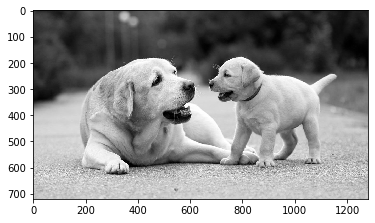

In [2]:
#read image
A=plt.imread("dog1.jpg")
A=np.mean(A,-1)#grey image

d=plt.imshow(A)
d.set_cmap('gray')

In [4]:
U, S, Vt =np.linalg.svd(A,full_matrices=False)#economy svd

In [5]:
S=np.diag(S)
print("X shape"+str(A.shape))
print("U shape"+str(U.shape))
print("S shape"+str(S.shape))
print("Vt shape"+str(Vt.shape))

X shape(720, 1280)
U shape(720, 720)
S shape(720, 720)
Vt shape(720, 1280)


# Approximation Using Some columns of  U 

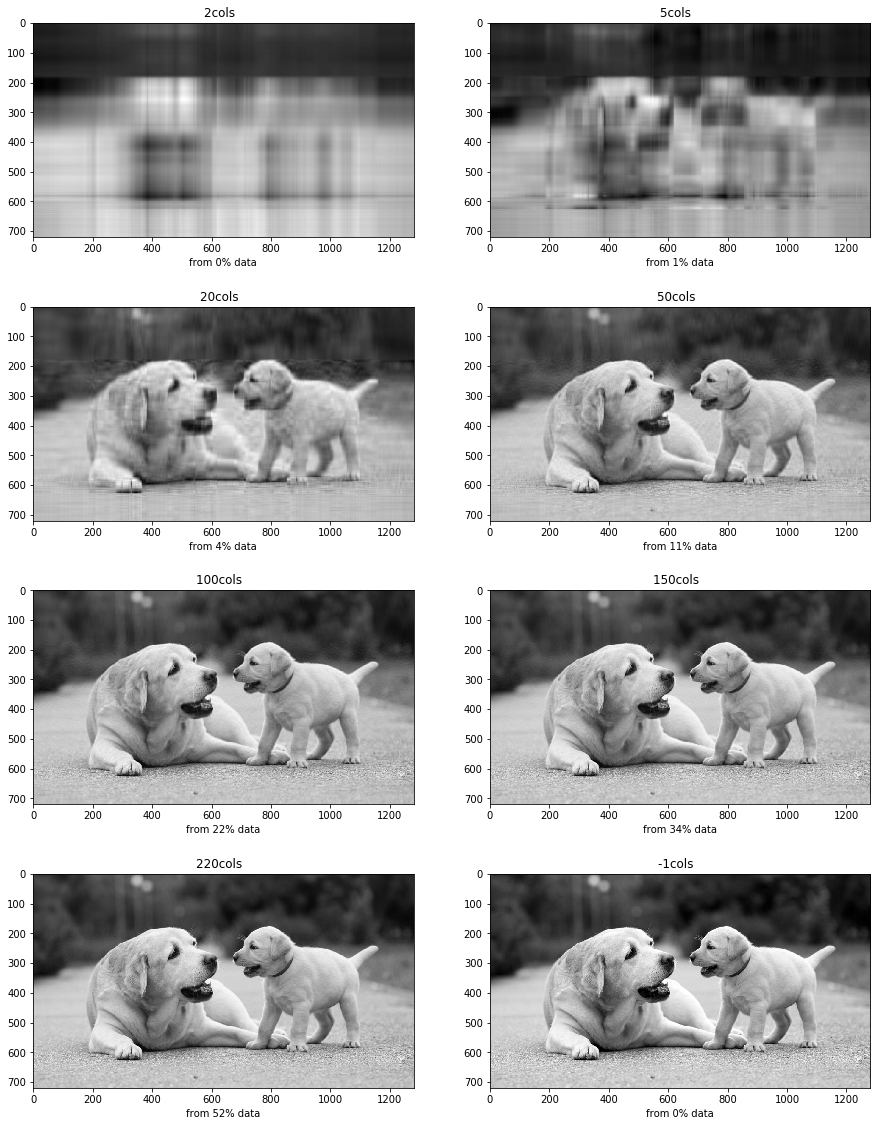

In [37]:
Xapprox=[]
r=[2,5,20 ,50,100,150,220,-1]
red=[]
for i in (r):
    apx=U[:,:i] @ S[:i,:i] @Vt[:i,:]
    value=int(((720*i+i*i+i*1280)/(720*1280))*100)
    red.append(value)
    Xapprox.append(apx)
    
    




fig=plt.figure(figsize=(15, 20))
columns = 2
rows = 4
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.title(str(r[i-1])+"cols  ")
    plt.xlabel("from "+str(red[i-1])+"% data")
    plt.imshow(Xapprox[i-1],cmap='gray')
plt.show()
plt.savefig('foo.png')data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA20AAARmCAYAAACskl2HAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAgAElEQVR4nOy9baxsW3YdNFed73vve68xSZzudmOTxJAggSBGCQIERhZgW0lsCYwwUeJYJs2PGAlhhC0QipGCsIIECj9iqYUt24lJYz7tWJaCMTKEjxiTYAGO09AxcbrtxsY07n7v3XvOqXNq8+Ocse+occZca+1dVfee996eUqmq9l4fc80115xzzLV2VRmGIRZaaKGFFlpooYUWWmihhRZ6nLR63QwstNBCCy200EILLbTQQgstlNMC2hZaaKGFFlpooYUWWmihhR4xLaBtoYUWWmihhRZaaKGFFlroEdMC2hZaaKGFFlpooYUWWmihhR4xLaBtoYUWWmihhRZaaKGFFlroEdMC2hZaaKGFFlpooYUWWmihhR4xLaBtoYUeAZVSvruU8mdfNx8LLbTQQgst9JiolPIDpZQ/8br5WGih100LaFtooQlUSjkrpXxfKeWXSilvl1L+l1LK171uvhZaaKGFFlrodVMp5adLKZellHfuX5963TwttND7hRbQttBC0+g4Ij4TEf9oRLwVEf9GRPxIKeUrXiNPCy200EILLfRY6NuHYXh2//o7XzczCy30fqEFtC200AQahuHdYRi+exiGvzEMw2YYhh+PiP8rIr4KZUop31BK+blSyhdLKX+9lPK199c/Ukr5sVLK50spny6l/FHXRynlvJTyZ0sp/28p5TdKKT9bSvnSVzPChRZaaKGFFjoMlVL+aCnlF+5PqvzVUsrvvr/+u+536X6jlPLzpZQ/kNT/TaWUH78v9/lSyl8spSyx7EIfCDp+3QwstNB7me7B1N8RET9///33RMQPRcQ/HRE/FREfjog37ov/uftyH4mI3xkRP1lK+cVhGH5Kmv2WuNvF+1hEXEXE3xsRLw47koUWWmihhRbaC/3bpZTviYhPRcS/PgzDT0dElFK+KSK+OyK+MSL+54j47RGxLqWcRMSfj4jvj4h/IiL+4Yj40VLK3z8Mgx6v/I6I+GxE/Ob77/9ARAwHHc1CCz0SWrITCy00k+4dzQ9HxA8Ow/DX7i9/W0R8/zAMP3m/E/fLwzD8tVLKx+LOEX3nMAyXwzD8XET8BxHxh0zT64j4WyPidwzDcDsMw18ehuGLr2BICy200EILLbQLfWdE/LaI+GhEfCIi/nwp5bff3/vnI+JPDsPws8MdfXoYhl+KO+D1LCK+ZxiG62EY/uuI+PGI+GbT/jrukqFfPgzDehiGvzgMwwLaFvpA0ALaFlpoBt0fx/gzEXEdEd9Otz4WEX/dVPlIRHx+GIa36dovxZ1jU/ozEfEXIuKTpZRfKaX8yXuAuNBCCy200EKPloZh+JlhGN4ehuFqGIYfjIj/PiK+/v52zT9+ZhiGDV3L/OO/ExGfjoj/spTyi6WU79oj+wst9KhpAW0LLTSRSiklIr4vIr40Iv6pYRjWdPszcXfkQ+lXIuJLSilv0LW/LSJ+WQveZw//zWEY/q6I+Acj4vdFxB/eF/8LLbTQQgst9IpoiIhy/7nmHz8mz6Zl/vHtYRi+YxiG3xYRvz8i/uVSytfsmeeFFnqUtIC2hRaaTt8bEb8rIn7/MAz6rNn3RcS3llK+ppSyKqV8tJTyO4dh+ExE/A9xd9b/vJTy98TdUcof1sZLKf9YKeXvLqUcRcQX4+44yO1BR7TQQgsttNBCO1Ap5UOllH/y3scdl1L+YET8I3F3ciTi7pGAf6WU8lXljn5HKeXLI+JnIuLdiPhXSyknpZSvjjtA9knTx++7r1fizj/exuIfF/qA0ALaFlpoAt07mH8h7n4c5P+m/6L5gxERwzD8TxHxrRHx70XEFyLiv4mIL7+v/s0R8RVxl1X8zyPijw/D8JOmm98aEf9J3DmkX7hvY/nj7YUWWmihhR4znUTEn4iI/ycifj0i/sWI+Eb8mMgwDP9xRPxbEfEfRsTbEfFfRMSXDMNwHRF/ICK+7r7en46IP0zPijN9ZUT8VxHxTkT8jxHxp/FDJwst9H6nsjy/udBCCy200EILLbTQQgst9Hhp2WlbaKGFFlpooYUWWmihhRZ6xHQQ0FZK+dpSyqfu/0B4+WWfhRZaaKGFFrqnxUcutNBCCy00lfZ+PPL+xxP+j4j4x+PuDxB/NiK+eRiGv7rXjhZaaKGFFlroPUaLj1xooYUWWmgOHWKn7fdExKeHYfjF+4dLPxkR33CAfhZaaKGFFlrovUaLj1xooYUWWmgyHQK0fTTu/osD9Nnwf5C40EILLbTQQh80WnzkQgsttNBCk+n4AG0Wc+3BGcxSyscj4uP3n7/q5OTkAKxs9Tfr3r77mlp+Lm899Xr71XL6HUdsh2EY7+0iU66rx3e5Ly1fShlfjnraGoahq1xGKMM8rFarB320eKu1re3rZy2nbWdzNGXOavxm9zL+d+lz32t3KkHn93nMfNe2Mv09NGV65u5fXV39+jAMv/mVMPb46JX4SNbLKTras6bY1uP7nHbUdmsfu/Doytb6w3UdW41npcw/9dj8mkz3ZZtrvlvrus+llNhsNl02pjafme+Z6xt76uq88Xuv/tb4dH6Y9SyTda2tzM9z3Zq+ZjrVo1vZutEyrfhJ+96nz55id/YRg00lJ5+WbRmGIW5ubmKz2diChwBtn42Ij9H3L4u7/6XaomEYPhERn4iIODs7Gz784Q9XG3UDXa1WsdlsmgytVqutxbNarbbarAlRy/aWR7laoI0JVP4yvkGZ8qN8ds+V036GYYjVajVew2f0u1qt4ujoaKwHA77ZbGK9XsfJycl43/UN4nlTvvn77e3taAjQ183NTdze3v2X5tHR0cjT8fFxHB8fP2gT8kKfaAvf1+t13N7extHRUVxfX8d6vR77Rr1hGOL29na8pu1z20xHR0dxdnY2toe2uA7qKZ9OZrh3dHT0QFaQBbeh30spYzmun+ka6igft7e3D5wBZIOxuDG69phPvu/mLePJtaNle52FM+49diZzCj11tR3W9xaxvJhfbUfnY9/UAm1c5lOf+tQvHYyRx0+zfORHPvKRB+sZ5Hwa+0f+nAVWmQ/abDYPfO1ms+kCbQ4EMa/Hx8ej7T45ORnLwcaoznLdlh3Rcuwj8FK7p0BX5TgMQ5ydnY334OtKKXFzczPawZubG8sT7Cb7ILabSiq7ms/XNt04kEBUHuADwTfb84iI6+vr2Gw2cXx8HOv1Oi4vL609YX7ho/ge3nWejo6OttrTd27XAUbU5XhBy0LfTk9PIyLGWAHvPGfgHe/oX/lkvjAmjplWq9XYPuuG6knm2548eTJe4/FjnLe3t3F5eflA1iwXjt9UN5VcPIExoB2MB2U4TtpsNnFzczP2ATsBmaEt1RuNGRErcSyKhAH6w3eOiVR+Th7sD9EXeHWAOrNzCspd36vVamstQh784roY06/+6q/aMUQcBrT9bER8ZSnlb4+IX46IfzYi/rmeilmAooYU1BuAYPJRH99bqJfrqtHI6jkHA6oZnjnUw79SFpSz08qUUIEvOzQNjF0QznyDtBy/nLN3QYj2o6CUryuv6tiYuHzG8z5olwB/F6qNo6ZXOkfcHoNDOAweU0+gdWhSvvW66sUhMnA9NKXfnrKvUrccuUDqA0qTfaQCBF1HznZpMoyDJ/VlGnzC78HG1/jadT7ZnrDNzWxQy+ep7eegD3JBok/HqAEmAx1cZ7CnvsYlbliu3BZTllCp2UueI3znOr0+3ZGuVQ1oM6A5JSbhutyeS/4xv9onxs1J1SzR14r7emNC5g9ta6IU5BKpU2wx664bG2TmQLImWlwilfVDfTUDI7cmmQflC/V4vLimdofXHJfleB3XOGHPY+iRY8sHufXrgFq2zlvtqk2YE8PvHbQNw3BTSvn2iPgLEXEUEd8/DMPP77uffVCPsGqZ+1Z5ncQeY1nrS0FEBsAyXnrKsFJlu4y13Ud2ZC4T4cai9TNno3xmu0NZPQYRLTCK8tputkubgUgnOzXeLHfXjl7LgqgW0Mo+68tR5mhcwOLAT4s/x5fKpKb3KKdzV9OlHnmhP5V5JgtnlHXOa21k7bX4dmVdIP+6gdtC830kB2UObEU8TFxpopCTkLjG5GwBvzPo0/s0vqq/0TVZyh0g5dMDNzc3o74im691uc2IsIGl7nrwqQz0qe0iGHc2cbPZjDuCCoyVNCGI8XD7vPOW2T8l3GN5sUwgK7afLGfeqWA94BeCaw22Ub92CqAWm/A97Z/BmgKjWtKcT8KwfB3gY7koadJR31mPWqcgUA9zVEp5sPa0T67H97N7LDfsACqIVFkysMW12lrGGLQft+YjXoIq1h/WKYwfOsqADPXxzjtoXJfXjvIwNX5xY8i+65rsBWAO9HGbLd6VDrHTFsMw/ERE/MQe25s1uN52a22yUmkg6uq44DrbrcvacDxy22zonGNGuxootmSnygUjzddqhqp3HK1y+t0Z4Dn9R2zPj1uA2XeQziUbJNenk6nW4TKuHTW+Oi/cPusKG0MHqPh6K+DPDJ4DZ9rnHKq1l+mSjjnjT8fO11q81Ax/pkOa7azV5/mrBUU9xPqX6ei+KJuvzLl/0Gmqj6wBKSYO4BVw4LvqgvNpHKRqWRz5mUqtHXUGNrXgemqb/FmBogNeKg8EqhEvdZrrohzWrGuP+0HQyiDCxQM1m8R23PXlEqJKatfYL/E77uPFgb8LQnviJO7f9eX8vvpc7k9f2kbEy8Dd+QnutxWnqD13vpgJ7em8zEmi8XgYILm2dKwKpNCeO+2Ezwxij4+PR+DGfTidUdCPvjI9U71h3nW8AHzgGzyhfC0uVz0DX8yjJhMysFaLmVSPtP6UdpUOAtrmUBaQOWDS05YLOtXAavCNe0oOuDHPU0BkxluWwehpr0XKvwaHLaMzp+8pQdwuIHxXMIc2QFOC8lq5qcHq3DE4Q5WBh6zurtTbX7Ze1Dj3Asa5NEU3HfBqtdmrTz31FVjW1ksvr/sm52wcMF5oN6oFewrWIuLBDhU/h6qAzF1nPdPdhRagaJVR3hnUaLKTbdyUJGeN0Bb3yX6YE54OFOk7yiII1t11DjIRkCqI7BmfGwf64DadPXUBrdo43rXi4JqfUdLgWwN9DvY5rqn5IQe6lD/mme1LrZ4mv7SvmryzU1a9YEvXD/c3F7DxZ5037dPttAH4OACM+graGEgp35zQ4OfstB/mT0Ej86a70doXj83hhGyDRPXPJe9ZFvpZr+l8OMrqO/zgrmf0KECbE5B+xvceAKf1GKCw4dKdKEdatla+FmxyX46/HqDpxqeLdC4AU2KnxNfUOLvyeKlBV361vN533/m6cxgt567OjcfCDrjlZDIdcHqclXHtujJuLOqQ2ehxe07Xdfw91Doe6cDFFJoKIFs2QNdba6wtPevlY+q4a4A3u5fZj4iHz1twhlHbyfRKx8zfs7FmvGr5Vw0o32+kQAGk9hPl+EglAxLMKQM6tvdcLzui5YBfpv8OVGrbvBPlgtCsTaXe9c6y5M9sS/ka5MVHKo+Pj7dsLAfGCuLgm3mX0q01fs/kyb4PPGiswHLguVQ90Hbx0mfLbm9vx90W/JgG2tYX74LU4iUN2lmOGhdmMmFwpgBuF9AGynYuNUZy64TXINpgn5TFPRkx/5gH/VEwEEAT6y/Ks1xrO23uM/sI92NtDNwUiEEO6gc0TmH9xIvbVJkwj3pffZrqVA206dpkPejx9QqcHY5wfdbafhSgLSIHbru0pUrGE8rKmGUtmRQcufJqBJzxdHXBg3PECtxYARQAZsFVi1rGS5WUZYdF7xxAyyg54MAGcMoCyQxmbXy94GIOAAFPWdYoC665PxcUc3DOuoP+3IKv8T8FLPVmB9VJTiU27nzN6brOqzPoPcAtA18twOZ4c3zU6utnZ+Ad8S6Elmedcs6qxVPm6DL+M141ibDQ/gl2tBb843MLVLlyU3zJHNLgd05/mW7VbD9/dj7NleOkoD4Pp8e1YBf4F47BK4CcBs01PvU6t83fMW7XRmbDFeywn8GYGJC6X6fkF/qqxTZZkOxsl+OX2+E23HhAHPS7mGUqufq8q4oyLq5xgLnGD/Otc5TttOmuFu+Acb8tXlmO+mwb6wwDNt2tRfvgS9eaa4/5c3VZLuCZP7u5Z3k5nWFZ6fxoGe6PcUYmG9VLF1u3/OSjAm21e1kA3hOA7LIwWfhZO2yUWguv1kervgsM93G8TR1WzVFkWRhXTg2rM1LaFtNq9fLZCRd8aP+OP5Ut2mWj0JqvXnC3D8qCZM0YzqV96Mxjkte+yOnwq57z1jWlXnCXtdsKiHpAXqt/zrQutBtlpwjY5jHY0KOF7qhkrS3Xv5tHvl7zIT2JO+ZZ2+2hzaZ92kQBWeZHnH9Qv6NBLgI5bYMDef0VUG2DZZOtPQ783emQmm9TX5q1r+BJg14H2jiRnPHgdEyDYfde04EaAKwF4jVikM471/wjGiBNOihwjXi50616rQnqHnupAFsBAIJ/BxQ0llB9wHetz31wXMaA3vHFyeQWWHcgXGMWLsvfwbNLYmYydPbK6aKro/c1znS+Nhur6yujRwPaMqoJdgo40oVfA2O8c+F46e1ral1WcBAWH2fTMl4ZpathZAXWe6o4HGg5BVXDzBkVXdxcTxXXyUbHoUZAr+EBVNRhY+IWkRquzNiwzPQ6z5Ur58qofJUfJydHLCuXsWNea04/G4sjng+Ud8YsGxdfy9pHuxH+CDHfR5laW1ova1PJrYXa/Yy/rI7yqbq2jySMmxu9Phe8axs9VJPhQv1US5S50w4cbGpwqM9uKWjI7BuXdf5DecuOlnFfbjwg1t1sbXNZBJF6JI2DRQ4o9Zfp8J4dYXR+hxO2Nd9Wk5kLOvWaJkB6bGomU24b8uDjZ+rXce/+T38f7LQxOOEYArJT+6bARAPlLPCtjcutj1abrg0AbAXUWg7kANuU2JQpkw8I88NzlSVg3H/WuV/+ZFlxAoCPtupa1R/n4d015ktjAaxJBZm83jQ+wzXIhOM93OM4mUERt6mxHvrGu9Zzulfz/ywfLl/TbYdHWv7x0YA2xzyuO6OXOS+0ofda7TBNCQh3pZ7MIKg1mZkSRDzManEZNahsdHUrPeLlH4TyosHCa/3BYcYv+ueFow4Wfbs/AGUHze2BP+6TjQJnDtGn/iSuZpK4Py7n5ocXbbZ4HdUASua8HFByARfPr8qOAxyQAmBn9FxWTsfZAiYK3moG0rWVgVSn40pczzlL5/B7QIvWcwEgkxv7FMqCQe17H+AQ7fSCN+ZjocNRJl8Gbvw94mFSjwNRV78HcIHcUUOtqzYCNtmR+i1c0zWGIFQBCgLK7CfmXVKP+1mv12PbDE7gl7Rt9M3+BS8NdBEsq79Ge+45MxyRVNvs5MZycAG2u8d1OEDnuVD/wJ+dHrnPfM3FLdkRWnfKCbqqgCHrE+1oDKH3W7quc6C600vqB3TuMj1VvVFeenUEnxkQtUAW600WJzBfLbmo/nD8pTrmYiwup34X7zXddNf34btcLM78tPTkUYE2XXR8T8uqsVewkpWfenZ+nwFGFmwzqUPU65kjY+dRawf3IrZ/pEGdYCYjXrx41/Pu2Twy8YLES/+zhoESGyY2xACWqI+2dTzcJxs7jImdE5d1C53JZUd0nplfzXI541wLVrJrKufadZaP0xc3Rl5fLqDSOeJrGTABTQFSKtsauFVyOtEi5zR7yuv3LDHSakNBVy+vU8c5h/YF/BbaD02ZDxcc9ASl2kbEdoY+4uHpDy7LfDrb5MBY9lmBAtswp//wn0j8YbfM/ZgIgk8GRAy6hmEY/+cNdtSBNrTB47q5uRl/EEKDXba1tQAOY9adN/Vt7J/U3zF4ZRCpoEDr1ILjLICeGkdlYE71ieMFBmrgRev08lEL5jVx0RPTOVDbQ2rLXSyk7bq50O81gKA6o36cd+BcTKVxmxuT6k4Ws/F4NMbPxuYStJlf3oUyfczK9sT/PfQoQBsH7q1y+tktrkw42TMB6ux60bfWz3jpbQekSscOJcJnzx2IzQI3fiBax6Bt8Fl8dc7M7zDcZSDRVs9YmW8eqx6rUCCAX65Sp6qO2/XH/LITRb31ej2OA3XYAavMnFHVdw4ElA9XR6knAFdDrCBMARDrB+Y4+xUq1xdnjnUsLZm4RIBS6/iMswU1ObEz78lm9cq89t210QJqPcBsF8NfS27xdb3v+MO1WjLJBfMLzaMp815LTrodBVdebbMm+zK+Wn27ccC2OrvP9iwLAl0yDzaObeHNzc1WgM8BuANm+JNvHQNe+ofg6EN9Bnwn/CT/AiP/sEfvHKv8wSMnUDFODazh78AnvuMaeOJfiFSQp8CQAZMDbdwO5kbtRm3s2odLAqB9bUuBHbel5fhaK47J/Ij6W34GTpO2LVJgpnOgeq/2WWMnBUvKt/YNPdLYRY9xKtDP5l/HpHw5MMZyVpDGn7VPjdUckKzF0irLWqyt5bOkQ4t6dONRgLaIPJjIArSetphqgK2Gjh09pgyzLoaeo52qGA7gcSCcBVtahn/muJV5UIXXRcvOG/fZaOEaH99Uw5L1qQAKRvD4+PiBPLmuOqoaMOEymfNyvPUGts7BOyClcnRHSZzBV9LsW5YR0zlzY+vRUdeGCxp7EyNzAUPLiKpTmQLKehx+i5cMXLWoZfNaCSglB9wek518P1ArqEcSi4N2p3c1He0FDS1b4cpkyVEN6KcEt87ewO7q8W/wwP4KMmMbyD4m4uF/jQHI6fFIPsLIoI3Hj/rueGSP3+Rxo7z+fxXLgstyYK2BP/OgPwnPwbgG5dqHvjg54OIvyKUnBnMxnMaNkLE7LsoJaMhKbWcthqrJWNvgeT85OXkAbJQ3bRttqU/VujUQ0lo/PclL5cPxmYHCueT0JdOd3v56/b8D+8qTK9tq09nhufToQJt+dt8j/APTIBccthxIq79WvZrRqTnDnsCmx5lqEM67VUouuHJO3RlJ94C2Ho9Uh8mkWRO3MHUsbAzUaHGwqEFAbdwcFHBWlQ2uM0bsvLk/N0ca0Ds+MkM4hZQXvad9a6adgxw1LgqOWDbO4XGdDMi4QKY2NiUH3phHR3MN/pQyGZCd2t4cnnra7XXStfruu2vT2bXajtxC733aVb8ympLEYGI/iO8KPCL8T5izTWefx+3wz+v3gDYFTLyrhTbdLmVtvevP7zMw0BMruhvC/lp/pl13cjRwb8l+n8G7fs6+Z8n+qYGyAk71fRHbyWy3Y8h+E+2wLPVHOrKgXv0qz+EuNAeE1OLQ2ny3YuCpbc2d1znkbJomCnr4yICbi7Na9GhAG6i1OBUMuCyNAwwuY5P14cgFIT3gsrf9qZQtggwQaHCb1Yl4+AuODJDdj6bA2ON4CP+yUG3sPAY9HsltO4ekRjIithxlLUh3mSrN8mp5dYZZu7UkQpaJOkSgUyMHJnm+W3VrTqN23+lEDwDL+nLgzwU6zvD2Bnyu79pzM1n7vXM8x1a0nJz7ntmPLNGgbTj5LjtrhyeXNIrwz3yqPdJ1WUs28TtTy8cdCrhlffYmVTJfqcDGHaPSfuBf9JeK2f/oj3VFbCcHGWwBvGmfrTFpu+hbQSfbZAaNDjzye21HzcnW+VQXZKttdb6cSZO6eo9fGki3gnwej4IjzCl4xY6sgn7+7OaPn2nkeed2oDsOaDu5O/m4z6r7KieVRUvWGWmbbg7URmR96Zy25lPLzKEaGO2N65kHVy8bh7tXo0cD2nocfk05W+W5n17hON5eJTCLeOiks2xXC4gpOYVyQbIG0/prkmx4FUxxG47YafJuWS2IYKeCa8x7K6PjDC3Apo7BBThOPq2dJO3bfW/NV2aweYfMAa8aeFJQ3iIO+jLwmSUNamOYAhi5DpNLMDBlQLpGOhYOOnp4dPPLR6pq9edkUqcEyz3Bt2s7C86zAJrbWYDdbtSybVPb4s+qkzVQuE9Qpr5Mg2EmDvZrO/Q9PsAllxio6K4K8wlAxvLiZ9o2m83WLxyz/95sNrFer7fKuOORaNONW+XCz93pro0CAAWN/BP+GaBQebXsurOB/J7FCa6tXQPxLDDO7DSvBdVJfTatttPG8QzXczuZqmtOHq1YoQZ2azLBNQVRjlSXHZ9a3wGsWh+9NLf+VNtVA2GaIHD1nM7VYu8e8PkoQFsLoWrZ2vfsWkQ/YOvZVeu9t0+qKRxPekuGLoBkR6VHSpg4awtiQwSDlYEVDe5c++xsnGPV4yq1YENJASC3yZk0raMOqyeA1364vDqxWv05+qV8ZgaDeYrwuu/Aa20nKgvsHEhUg5WNA5+d03XBZW0Mru2MNCmQ8cnt1fTbJQQi9vv81xzA16LMztaA+JTyC/WT0zO2R5q40LWqCajaowbczhTeHGV+QRNuaptd/zUfk5VTn8I23/XPQZn6Cn5mCv3o8Uj2hQro4GfYdzKpbc3mDuPS5+pcO/oMmx7PZNk4wOYoCzJZfjqfWo7b4nnQfmrf9Tr4csCN+XK7WQy6NDmgQEvjAufLcPLI7WSynNEft6NzXVtfGSDLgGsmSyfDFjkf6WJtXU8ZHw70ZL+XoHM9xc+05FGLTWqyzsbnxpXxkdGjAG0gNd5ZmV1AUk99F8TWgrbaxGpdbWOzyf+nLdsJyZyo49WRAo4ssHRHzpwThSGCo2JH2EPsVN0vGKoDZyMHA7vZ3P10czZWbseBQHVernzNedX6rLWTZdb0msrdPWSvYBfXMuDIelcDoS6A4rnQoKY1961EQGb4svXgDHlrnjL516gFrGpjb9mIKeA3o54sbS+p/vSWz74vtDvV7L7aQ1zHNT1CB9Kgs7Ye2F+oH91sNlVdcaAy4uV/fvJzZQoYwCePzfHqQKcmETlYXq1WD36+HGNg8OMAlNo9Bkz6TBv/AAZAmwvelc8WDcPLH0XR+UNcwYAN8gRoVB64DPeB8fHnLMDmOq6dDAjuM6Gj7TjwoKDSAV6U4zIgBm613U/WWY4x9OUoSyDr2CGDrg4AACAASURBVDJw6vhW4ID7PWWdHHn8GdjLAE8GYLhMNlblvyaj2nXWg1Z95mNKH/umRwHaXHDSAklzgJszirsCOOaxd8J6jVUtkM54dcevsgyq40sNk5L7gRM9rsiOkMeBzzr+2k6PBsLqUFFn6o8caEDATi8LbpiX3p0Rzcq5MfE9/dwaQ4R3lgzkHN86D9maqslCP7tyNcr0u/XMWKaXvf3W2u6p07sbMWVOnY3rAcAZZUB7bjs997J5zO4v1E+YRxdgqf10AEfb0nf1Edx+ZgOYWolEkLP32j4DN5ekc3aP22AZsCz0ZIkDOvxMm+MX9tzNg/trGH1noKS7bHPWO8CGmxv2k64ffXaNZeliMu2X+6olWl1ST3mbYptqseGU+m6svM4UlOnzZlxe1xTX579Ywgv11Db3JnGZHICuyaYF7hxYytp08auCKr03B6Bnp3Nq5PRE5ztL8tZ0snZ9DoB0Nq1GjwK0RbQd+pTjQ054WaYvC1bdtRqPU4836eKu1e9VBDYULguZ8apZhjmGcF+EDOGhKTOS2bWsjAOLtWcgHQjl91b/GpDxj75w0JH1B/nq9dozIq3gz5WrORs2lFPXWUYKqNz89AB7Z0xrQXKrDecMlJwTmgvYVJ84KJgD2mrU4m8BafslBhzqMzIAx/cz8KWBaEYuEZCVQZ8t28jJJV67HNzqrpfrT20cymoSkgGbs7kuwaGgo3YvIrZAlILtLIHi1mfLD7tx1I5H1sAYB9oO3ELuSJCy38H1nl2Z2rhbdpPb1fgJ7fA89gb2Kh8AYf1TdAX1me/WINwBPPe3CiCXUGVZuh0t3YVy5SO29YH9mtu14kdVtH1ne9z8a/9aRsF9RmzvHMDMYviWDqicMz4yQJbxPBfA9dCjAW0tyrLrLvtdy4i3HEmNWko1h9SYK19uMUU8zIQeEmi5nY+aIVBnmQFop6xalx0GDKLOe23hOr1AWbStBj7b6ekFeE7/1Knw+GsAkskZODXoPTxP1Zepu5gtmqu7LnOmVBt/zxgyANVLWeBRs0lTHHbLUfC707VDAqmeudw3cPygUabPuhugPkWDd33nukxoB4Es9612mu+53S7n5zjAy4JbXMv8JPPgQBr6yaiWtOV3HocGphk/nIR0wSb3p2u9RSy3Gph14CLi4Y8iMRDjI28OtOmRXH5psK9lFPAoaKklmJw95J0rbo+B/xRivUVfrH/qy51/zNaT9uN46wHvmmTtBW2uTA1gZYBN14U7IqmAsEUsd9ULlj2XddTbn/bL37PPNTCW+W7V911j9UcD2lpCdgNtBWS1rGNWDmXdwsl43GUSWoZaDQjXqQV3NerZbawtiCnU6ywz5zp1AXJb7roDbo6ffQS3mnVjmgPYnE5qgKTtZ+DO8ZrJbVdZZOOfAtwyILXvZEVmsPG95YS1Xg+Idkc7tVyNL1fudQA2x1stQbPQNKrpn5tvDTZxL9MHtgG6q6d8qL3I9Nwd11c7xQE388+AzemPa0ev8/2aLc4CMbTnAjDX1y6+eVdbxjtCPH963/WH5/v0mgOqDMpwn/23C/SzOXHfa6BNy7og39U/pP1x66Nm93bhxcVHU0F+K7arAb+5Olqb/2zNOJDE13rk6GK8VjymiQVHh9KnnnbfM6BNqRU8ZcCsdjRQy4Kyo2NuYdYchiNk4np4hjLVAr9DBbPch9IuhqSHNJsztS6I22CH06J9ZEp43lqALQt8uSzrDO9y9oCfLAtYA25zSMdRaz+Tayv42VXfp9bPwGYGWnqotiPSY3fUEWkAn9mMKVSTffY9SzYtNJ+ygAXzoj7DBbe13fdaIlT1UfXMBUgMJEDOn202mwc7edxnDQSyHdXkn7vG5fko/pRgsEUqx33aVZCbC95dcj/qpaTAjP2jJjh5l02Pqilo4zLOLylAUx/r7KkbC/hk4N8CcFlb+yaN7XbVq6wNB5Jxnd/ZX/UkTHsAd02Ozv5rv9mc8wv6qOUPlbDtTRhkY8rK7oseBWhrodo57Sk5I+6oF8Rl/fTyw/1l95XnWjsciPcYKXWiLgBzdWrPmx3CMe1Ccxd1z65X1naWGdIyrp9agKvBVstAZH2yTjmjXDvywVTLtLf0FO0rT9n32uesLq61kjstntm59PK1C0BSOWZH4Nw4WkH2Pmxsrb2WTXE8LtRHtblkm68+I9sx0+AH7bcSJwwOOJDK7JwLIhUMaGabgRyDtwwEMrldPbfDpD5VZQse+CggAwPuj+2CCz65v32TzkOWGNSx6zX2BQzc1PYxKGOwx23wTpy2z+SCdP6u/Ge2WAF+Vp/HO4Vepx3jdb2vGNnZC73v+GAd4xjY6V32uTa3GWhTPlrgap8+r1Z/ShzYupfFF44eBWgD1cBL5qR62tKFrkpXyx73gLiINpCrtVs74uYcXUatnQzX9xQ6FCjbZ7s9zzAcgpyhcEHGHEOjARfaq40104WWweD6+yLX1pQ1qO24LHtWvycQbZE6CQcU9wHYWvy1AlatX+Mp04OIeQFCdjxuof1RlrxTh68+I9uZUpDUC7Rd4DRFX3StYkdIr7tgnH15ZsdqxzHd2DTZqfbWBY/aL9djfrNTDfsmnZNs/enfvPC49FlxPsEB3ag9r8afXZmMb/3cCsz5viYNsmBfSflrlT1U8K+xqfaXXcf3lny1L/2c2Y4eypL4c32r+iwFiFyul8+pc8c2pnZ/3+TmJqNmtFxK+f5Syq+VUv53uvYlpZSfLKX8n/fvf8v99VJK+fdLKZ8upfyvpZTf3ct0yyjWEHwNjfN3vqZZvBqy7yFur4cywzLHCR6CsqwZrvE7jDq/M+mxCl6E7iy8Xuf3Hp5rDgQ8aptufLtSbQ4zXdnHvLtgvaafTrYtGej9Wnl3r9X+oYOcfba/77W6bwCINtXGZXZvV8D2QaNX5SOZeoCUK69l2C7w7pbudHEfc18ciDG44fbdWLgO/5emOw43l7K6WcKph2q75iD2R/g+lVS+KrOabqB/Pc6o/pp959xXBpJqsVCmQ9n3lj44HjQmmSp718dcckA4u5/VyV49ZaaA7tbjMspjDSQ7Hc38lNPhmuxa96fQFLCYXd819ujR1B+IiK+Va98VET81DMNXRsRP3X+PiPi6iPjK+9fHI+J7pzDTWnjOmLu6rjxfY8qy0I6vHnLOrmbkXYD2OgBbD9JXUOUAkIIudUh6v6euW3TOmXAfNYPXuqb89dIhgEbtCGXt2pT7GWVAuwWk54DAVv1DkPaT6cer4ucQdMgd06mJqvcx/UC8Ih+ZgSx8d8AcxNfmzl2PLWn5YL5XA5O1uq2TCz1gq2csuyTwXN2a7ZxqZ6aU16Rkdkoju1cL/Hv5qd2f4ksOQVPXQu+Jnpav1HtTdTKbi6yf2pw5UOM+q167a9rnvuhV+uM5sVar3D5i+6ZFGobhv42Iz8vlb4iIH7z//IMR8Y10/YeGO/pLEfGhUsqHexipDaYFvHrLTxFYBgKnkjrYqVTLQLXKzO1nX6AxexBZgR9f0zK7UJYpOtSin5vtdQGL0xdXju9N1a8562JKu0xTjs/tkmiZusZr36e21+qr1v4+bE2rL6baM0F4dzsuU45oflDoVfnIGrlj2FmmOls/mf5lQDBrv9ZezZ85n8tjyigDqY4Pd411XOXjdgdrMuF7CqZbctgXOf5r/dX85JTdGm2L2zkk9cryVcQASq9ivmuUAboaIM/KzOk3uzeXDinHfczV3BjQ8ZHR3GfavnQYhs/dd/C5Uspvub/+0Yj4DJX77P21z7Ua3OdkTF3ELafQk21zitiT7WNg4+6Vkv9Pm37nNvT5hNpC0XPDhyYGHdkYe4PO3ucFpgTEtXkDn8xvLfjnOXFBEy/yViDNbWvf/L0G5jabzZZBdbpV44X71MDHlam1U9NVF1hl/Lln41guKiPlvTZGfOY10jO2rJ8WMFQdcXLJ9F3npaZ3Nf5b4+o92tuyWe9zOpiPZJ0Gsax5XTE5O8L2zPWlZfG+LxDCuqn88a9JuvE6PXT+lK8x2OI/UAbputN+mF991uYxJTScH+B4p+bvsXMCX8G0Wq0e/IH3nMRoD+jVz1Pa4+vOT9d8i2t7F+LYrGX/s3uZf3f99LQ9dUw1/XE8ZXObfefx1eryNY3FMlsWsW0zpwCr3tib++Hr+7SVoH3/EIlbqZbDUsrH4+54yNafOu6DprbVMjBZcNnbbi3Q4gWgZRTUgNzkZ3W1TlZ+H9TbJsbT2mnbl05kAKeXMiPj5sSBiVo7oCnZZOYB88zf9b5rS+tG7F8npjz7obrqAqlWP9mPNET061OtzJRgrMVHjZ/s6FeP0c8A5SECyZrzdfezax8w2slHuoSGqRcRdXDdCiR6QRvzozqtCZOavrMNc7Yuq1vzey7IZIDo7IXrn3nXBFhm49364x/32DfVjotmY2VioJYFvfw527mZ40MyMNUDOLKEgwKBOXxtNvVfyz4k9djS2vUWtRI/Lb5cYsgB5x7QzHWnXKu110ps8ucMzGX91OLJGoDT+o63njhlLmj71VLKh4e7DOKHI+LX7q9/NiI+RuW+LCJ+JWHwExHxiYiIk5OT4XWCtoycQ3CU7WpNVSo3oeqE4HQcD9puDUDsSmqk+b22Q9ijlFnmjuvVHGDN+OwCBqfWc5lKda5uPjNdcfPJBlSdac3AKHCbSnPq1QxWT/ZuCk/qVLK+W4B17pHT1ne9nu2O9Oic6nS2k9vb3lSa0v4HCLTt1Ueenp4ONfDikgIONGWBCgcMrSShlnf3pyRJHFDKdol1PbtxqzzQHnyGAji35rKg1LX9XtFp8MvPjLOP0nf1sQ6sKake6TXVl33LbqrORWzPY+YnVc80OTqFr1oilctm+rkvqu1KZddUN5wca2u/FtNl5Xt1Tq+5cniv+WXma5e43ul7xhvq9ujvXND2YxHxLRHxPffvP0rXv72U8smI+L0R8YXh/ohIi3qdfTY5maPhe65udo/vczuOaiBKyTmVbGGqw6nJiLNCvYYkI16YbtEor0dHR1tHJlAn44EDCtc2X2PHAUCIvnSnjh+idvLkeULmWtvmNlpHBKfIuBYEuXKt4J93YafwhzFPzSCyTBSYT6FddNMZUKUsw51RK6kwJTs+VRatY7gKXDXo1H6zIyqcPT9UgFlrt2ab38e0dx/Z82fJbA97QRuoFrBondZ8ZsAm48kFqG4N6K66C6TcsUhcRz2X4HFUW2/quzO70TrCD3s6ZxeOfxBMeXHPlGtgDd/N9RnIacJY22vFVVy3ZSPmUo2Xmn9UHdb1kYFylrfKKeuzF9i5crUEgmuj1Z8DWo5PjePwuRZjub56PrdklsWMU/waz3EtHst01V1vxUCqU1P4zKgJ2kopfy4ivjoiflMp5bMR8cfjzhH9SCnl2yLib0bEN90X/4mI+PqI+HREPI+Ib21ySIx28NJUVv6cZUu0veyettUTNILccYgMeLHxz/joOV7RAnXgYRfK6jPg6TXACs74moIxt5uUgWptq7bQwPMux1ZaixbkninJnjNRyjJ76lw06FKHWXNwc2mXoINpXzq6K80FozWaM7bsiGOPnJ3hdwF6rb5zju5a9l3X3/sVrL0OH+kC41b52nsyrmY7ri+uX7M7Wd+1o35cprWWtIyu69qjCcp3zzFzJg5us4A0s5nclt53/Wh7GgSzX9TrAHcuOeR4nhIwZ/rT0rks5tJ2mbI4rof2ZZc0npnjD/fll3tjkqy/XvC7b8qSA46m6t9UsJYBN6fXmU3rsbeqty19bIK2YRi+Obn1NabsEBF/rNVmpS97vQWgWu0pQucFnoExveacj+ORaWrWv+f+roRdln0Yh17DVHsg3tEcvloZI+ec9k01YFUrz2W0bJbpRbCgc8lgsPcZzNd5dn8u1YJVJX1mBvVrWViu28NH9l3bmAu45pI7jsv9tPjoudYqO9UpvdfoVfnIFghXcgFwDXQ5P+n6mxsY19ZqlpTsXX8ZgHUnEoZh2OrP+dzMBnBd7qsHaGbtM9WSohnt4sd1zucCH0dTbHQNrPUCuZoOZwBg7lgZJGeJ6tr1OXHIrjq2y7zOjRezevsCp62+3bUe/9oLevVaTcem+M4avd6UthAbjmxCXQZpbj96rZVx6OGpRofa5ZrTRk92Jbs2p8yuVDs+2kOH5LGVlcr6dkcqtKwz/Jw51Tq1exm19IrvZ5lepUPrRCsLx1STU9a21u3lA9+zNvQIbk+b+6BWe4dYSzyOfdjthXanzM60rreu4brqf/beoqmBTE8QhpcGvzg+rGXcddTje9rHHAIIcDTV77s4asoJGG5nV0DYirVqNuLQL8djdh8vfmSklDL++qgrw21G+J1O14fed8RH3pWmJNumzK+uH/CgR/p3AURzqGcNTkkgtMr1YIWpbTLtvNP2qqiUh+dVexzJFFDRG0TMDcKV+Mx8T7DbY1h3OfveokzZM556Mz9zfswB+lBrQzNqrczzPnfZsvnTPjR452OeU4yXnqFv8daze9xLtec/apm0jLeMXvexyIx61pybT742Z2w9x6eYnO5pGy1n1Etsr12Gu1ZnoXnE/iuTeS0Y7e2jdQ19Zn7R8TSHl7mk/av9wq47B3LZ+nbHBnEqgW05+mUwlz3TxmCRr/Uc+WzR1PigtaPgAuJaYD4FfLTsQUvHXXtZuz3gTU9j6N9B6PODyod7htCNVfvs9euOajvntes97TLPOhd6VL+mF9rGXKq1o9eczqj8dffWrVGlqfjE9Z2Bvqy+0qMCbb33pk58DbT1tN3TX20nqLZbwnWzyXQPA7syrfqub21/LvEibillVl+NZsS8rEzL+U1tk40r8+fAUK0NZyQUyGV1ldx8txwbyrudM6cTPc9h1XieAhjcrqMCxZZO9fLZAx6mzK3rI3MQXNY9u1J7wL3W7zAMW/LKdOwQ5GR76MD8g0i1nXmVexY8Z4Gwm7Oa7rpr2eda0O1s0qugDCS5QBX8so9zCdnaMei5fm2KXJj3XvutfTl73evf8J69ajJw9nKKDcmCdKdr0DcGYRHbv/Z8fHwXGvNjAzrGbPdGQZl+B/DHDwvt+y+vWqTrt1fODgiireyVtZG150Cm2i03Hhfju3KHoFps7/jJsEcvPQrQBmXuzc7vAtrw3gpwlZzDbPHZ034LbDnes3b5e+8xtt77ES8dnQYKnDl08+jadgZP62cZSe4zCz6yIJXrTflhh9pYeuXORtvVqYGTDGypXrqgX/vTQCmb+30dx63Jt2dd1dqoybs3Q8v3a0kRR9mzOBrwtPSGn01sZV+ztjRgUx3bN3DLZO3skiYsFppOU5ISeo0pC5ZaoE3fe/1wzd/2HM12u11zbBMHfrpu0Z7zOconJ+840ag7bGhPgRBf0zr72G1DPy3bWvOv+lnrZH3iXQGL44HBsJN3r565mMDxy2CNAZv6Qb2uSXU3z8q7gkbVNQZu2Rg5EQc58ZhqwKg239xfbT75HifjnT4zPy37Ptf+z0m28+eWL87GVeOhhU0y0LYLgHwUoC2ibyC9AZibnBYSn+oQe8gFSi7I5IWd3dM2soWZBeJqRFx/UylzcHxPlV8XufLKP66hbbcMTK/Dy9rpDWpbAbiSgrJsd80ZaC6vgNhl8Tjo5+vuqI4L7vYVMHAg48av5WvfUaenPjujmk2pXc+cm9bhsblse62fjFCeM7FT66K+JllUv9xcZyCUqQZSe3jbxWF9UClz/rXEhAM4mnQD9QTIuq57eO655k6icH+qpwpGpgZzmr2P8Dtj3IfuotVsOrfhdpAOveu9Wq26bYcLQucExxpfqb66uIR9draD0suLiyv0s4JJHH90c8nAzq2pzLeo3+H2M+CmOqF9tGTgeMnkqfen2uIakOnhcwr1+G6nd7Uy++TP1ckAmoLGXXh5NKCNM10tx9EinqQsA1zLQk0FZrW6rV9q5EVd4yNzvMpLFsDW2ssoC+yyhescUq1+63hKVqdGPZkjx2drjtznjFTOumBxPaI+l9ye20HTxc/fVada37XPQ1EP4OLvLLdW5njfwMDNW9YfKAPevf3xew2oOqolApSX7NdCcd3d5zXijvS01v4hg9UPAjkdqOkgAlMmnbdW8ojLoFzLRzvKymcnTab0o36uh3RHQANaBRR8n+WBwN8lFzWRmO1o6bqo7eC4NTbH1qm/xmcnQ7fDo23VgmaXKMTnUkoVYPYCT56j1k4bvzMfzK/baeM2djkJ4fyU889z7SXLYQqPPTt0jlqgTWO6HiCqfOr6rAGfGnDj+kq9Ms/km817BuTm0qMAbRqQtcpObRuUGQ+ljJe5YLLVVzaJGZir8dcTXLaAZkaZk+Ftcc1COSfjspa8ELKspwsSUbeWsXNtufYcvzXe3bXaAnXGPgNvPUAuM/ju3a2DWqDmHGDLoOkOX7az62SU0S7OfC7tEkCCdIfAyc7thHD5qQGZ7lBjjsHLrqCpNm/DMDT/NgL35x6PWSinzAY44rXd81cfPQnDKTw6XlqkusbX9Ltrk/2D203OjqE5QMH+hutn60vBX+sUSSaTrH1ut2dtZQlW9F0LvjMeGbRlwCgirK9nuzBlJ5fHw+96XXnkHTbmGVTbaeN20Af4dY8l8NgV8PFpipo8a6TlHDjqAXFcp0U6R3P1Rb87/mpASNvX61n/Ti4YA+tBbfOA+3TEfejad3xN0fdHAdoipgdhHOxmmUGXmW8FwzVe9h0oTgmee/qeyl+Pcew5cgiD5YCT8uQcBfeh5bMjD+rw2HBmwUHvbl0vZXLJ9I6DZ17APUF1ZsxqR4teBc3JujPNqVurk+0szd31mbL+XD3nDGp8OT3pJZ4LFzS4wHSXnUHleyqPC02jmh2uBUioWzvSWttR5jLZ+prLa6vPnvs91PJhtaONyoeCPoA4JQYhU45RTlkj7O/Uv2W+PbvuEpCafMJ1fsdnFzSr7XHxjuszI3e/V2YOUOo1LadtOv+djaWHeteTa78GAiL6doJalLXXihunAMW5/GT6x/datuZQ8Ustbtg1Xns0oG3uTpv+ug9nD2sAbRdlnroT5xScJ3XqDkQPv2oMsqNlU8busv8OQNWAE5fja+6ZKy7XY9TUQTKpwVOn3Fq86iw0M6dlszaYF6fLmTF05dWxuABcz8xn2cUaz60MZi/16l3myHrqZIHGvkl3ydwxM+fkegKLXiDv6iqP4K1mN901XQ89x1uydcf3F8A2j3S9tsjZJLfT6fTW9d1qn8v22FLwMcVn1vjpucdUey4J/etOnAMLtePLWh/lnT3tOQadARa37vADF46cL9Q2FZzguvoO9j0KgjLwk/m/3rmbWw784AVeXPzF92vATWnKGnX9MenadD6kpsM9/YJq9n5quV356yFtNwNtoMwPsb1CTDjH9rSAWE8c0LPbHvGIQFsWCOBe7XvvvSlHSFy9Kbxl26FZ3RZPPRlxx2ePE1CFqlFmqNjAqKHLFFr7q+2Q9QSwU42oOiRX1x19VD3SLKkrrw7Q7YRkc8FOlHlzBtEBuBZA650fV16NnxsXqCXr2rXsWGrvbrpre87OUgbWHdBs6VePHZsSBGTHdF2Q4exSzWm0vvcA5bkyX2gaZUlAkNqhiPYxdq031we3/MK+aU7yJktI7JoIqsUCNbvJ13pkNjWpVlvbzodpgIxyvYBNQSGAU238GVjo1Um+r0CTx4fPfL/mr2qPA3A5Z49rPNfihGw8XK/WtvbjbHkm615S3ZgbW+p98KZjdzoZ4WO13kSro5YsWnUz+zdlx+9RgLYeg7Srgc+251vle3moLSgGcK58i6c5zsIBioy/fRKyhj3PSuxCvQHgrs62FyxqNpLra9mIeABwXDutPnuvzQ3GVXd3DbqnGn3d2WwdeXyVpE66BXDnHn/aB481vlrXQK2dtqwvdUyvc84+CPSY5dur83N38pV6ZJEl3FqkR/pbz5tluybcntZx7bh1VyPnT2o2XMEUAzVNkGnArJ+53xZ4adEUv5VdZyDpwCV4ygLrHh57dShLCGuZrJ8e4NdDuwCUVns9cqytP1e/dQ1UO1nmALGW7QGztXFpmdYmTiuOYHoUoK1FryLAYZoK2FqkAK7VV62dfTk00NQA0pXPjnxE5ECkN5uZHY/MniFwY6k51Ll1D0U9we8hA7PaXLUCi4VeLx1yJ0sdTo8tWvTjvUHZc8ZKPfayRr1HsFrt79sH9rbJQXJPlpyPW6FO5vf4c3YU09XNjlqiX3csvpcy8KU79wqCuL+sPR13i1rzM0cftfxUv9rzHCQS2LiexTPcRo2yRO/cZKBbkw6sZKT983V+z9pCPZaPA07ZLlUNGLp72mbmM+ckSLIyPWBvCkB+NGk5N6ipRkaJt7ldH1xOzzrXeNuFx6nlW+etW2Osofrs/hw6dIDWY1BrPLTmtaYbU/no7b+3PXWYep3byQyb6p3LKGb6zP27vnelbDdySnkd65x+e8v3OIwa9ZbN5kHnqTVmBFW7Umaj3bWW3VnoMHTIJNO+/cau/t2tA9Cr2nGcCyA3m834OiRlMc2U+ko1X9Hbhl5XG1WzK27OawF9q/w+add2e2XK8po6ph5ZOf/SMwe1+1rGjTmbsxrP+rn1SEzt3hwbNxUHZL6xt/6j2mmbA2Z6y2VC6QVphww4WoBBFUmPGbUW76F418xrT/keXlzmZsoPkThqZY6Z0EYrw1T7ztd1LLg+5ehajaYY76m6XeNzl7Jz2lOnXjsjrmPKjhftk+BIs8xdD9XO2/d8z561OCT16tuyO3s4mpr4YBtX86W159pq7U6hbK1m7U2xYdl6qSVys/G5Z0Nr48VOV+3ZXEfZiZPMj2R9c3/YvXsV68/t6rn5dHLOjv21Tp9k/ewy3jl1s93Qfci9FTNM6YfXP9edEqdov7U5cjFVrY7beWrpU0RfLKSyyo6q1nYde+xraxfT6XfP/D0q0JbRPo4r1pD4vkCa47N1fryVE5nIoAAAIABJREFUIegxPm4h9ACPXqoBHgVu6Dv71UoH9Hhsepwg63/fNAWAOhCt11v12dD1PjfnvteCj8xAzN0xa/E4R9dau+C41+u0a23sg3g9Zuts6jFFt+6nOBIl1SnVlRohYJyz5nod2UKHpZbP6AmcQLXnPg5FLuDRZESN3NG8fRL7OPRVk6E+/5a1yffd87stQNAzr1NiAz5eOYXc834sJ+fLNIkwR+daZfh5tla9Q+7UHvoI+5Rybi6m2mgHlHtipJovczZM9WdKXVfG+WzHqzv26fprXa8B6ylyfzSgbeqWZgsNZ4LsOWu9D14xAVpWwUwtoOrNFrlFw/f2nWGrATYlNuCZw8gyEs5p1BxR788IM6/uebxe6nESXFYDaQVu4Gdqv3OSDmpY90FTDf6Uo6EtgzeFx4hpADNz8tk66wXiPfzNsVUZD7rGHOlx6xZNHeOhA/73M03xka2AZU6/+wg2e3edsiRTa125tTp1l+pQyYXehIsro8kUHqdLcKrv1N07HZ/uzO1CtefbskQiX5sDGlp13OMA2kaNr9dJ2e4jKOO9tfOVgfzavRa1AMzUnTbHdxa7ZHrG92vPA2a8TsEXru2sXi+AVXo0oG0uTQni9pE96XWcWXDY2uWY6nx7Myu9NLVsKwsx51m0XrCq5efMLxZy7ViAy8JkZZWPqfNXC0q0rZ6M8lzw8Cqp13nv05n2gKsa6Km1mdV37WdtK8jvoZo96Fmru+yUPnYdW8jT1OTFLvOcPR885RcEOcHVU969t2jqOtg1KbpPgMi+6lU916c0Z6cN77ifJbsz2jXm41NCvfSqfGvtuP2UeKF2X8HLVEDh6tbi29bppF6Q/zqoV66H4vfRgLY52bNegvD4l5mmLs5au7VrtUAfdHR01DQ6PVnyuShenWfrOcDj4+MtHm5vb2MYhri5uYmjo6MHDz8rXy54VHlw20ybzebBNfRXSonj422VdnKDgcZ40ebR0VHc3t7Gzc3NVh0t63hmo6djAU9oR3cqW0dB0C6PW3VGZc5GkY/W4HstW6WkvxpZOzbDY2s5tOzIUJbwqIGOqQbS7Ra3SOfd7RzrnE4NnNQJZzvwWcZSd3L5z9VbdnOuDB3fjvcF2O1GPX7PJXZabbh5ybL7rSBrDpVSHtj0WlYa1IoZMvvqnk1Tgk/j/mE3b25uHgALtsdHR0ejD0PfWIc9sqzZRRfsunWmJ1/UHtXsN+bi5ubGnohh2fHOPPsVlgf7JlxnP6K7iHNALHjrSWKenp5uyZh5QhvHx8db48niL+fveGwZCNLP2S9R3tzcjPdqcQlfY3koZTJysYu2l/lMrsfy0r543qfGztx/NscsC44hNf7PErGI/9y9uX6zVs/JUdeto0cB2qCc2b3MEfWCN1YeF7C2zjhnTq13SzULjvH8FjsAree2fLPMC7dTG1Pt+AL3q7yhLBYEZADDe319Haenp9YIMrkFyOXY4EMvUAegip0QjOzx8XGcnJw8kKUufOZ5GIZYr9fjgl6v13F9fW3L3t7e2oBaj6FwpnG1WsXFxcXIO7fHPKnx1bnjoNvJCY4RcwPjo99Rhsuq3jjjqcDg9vbWGlUFuDWj2xPAaNtZedemUstuOPDDPDi+3PdecOKcNwewrCduHEp6FNkFwvx5SqA9xWE6fhbanRhI1BIuLlhmOjo6qiYG2Aa0gI/WmQPeNpvNlk3HWucEK2yVAyLOnrK9cMGaS74pcNAk2cnJSZyensb19XUcHx+PfMHvHB8fx9HRUZydncX5+fko59VqFcfHx3FzczPOYTY3tSNeai/xgs/TIJPnkP0X4i3wwjb69vZ29Ifr9XqrHGw+zxX7Yfgjlg18C+6fnJzEycnJ1jzc3t7G9fX1A9BWi9mUMJ9cBnqhdvTJkyexWq3i5uZmjBs4pjk6OhrjGIA3jXuYPwZoPIarq6sR4GcAQOMK1tmbm5t48eLFOAd4j4itOYGe8X3VMZYpksi6xpV0DelY+TqI55v7yHZeGVy5zQudQ+5X59XFv6o7HPOgHfh9Z0OcfDiurcX7vGZq7eiYNB5UehSgbbPZxPPnzx+gcBaIM7BchikDBKxQirBBmTN0RsPtJrl2FbzojggUWZWWjR7XZ4DLyskZPjUwmllyWTHsoMGIwWDxIudMFYwFXldXV6OzggPkYxEgVkxd3BgDHDY7DTiS6+vrLecHR3B+fh6np6dxcnKyJS8GfHjHaxiG0TCenJzE8+fP48WLF1vl2XlB9pCFBg5weOj75OQknjx5MrajfKAuG1tdtJq1Zd1gnYEcOAmC75w1Pzk5GR0o2oLjV6MG3eEdzJubm9EZKZBz4BTzzcBRjRzmkvvWAEoNdC1w1XK8jrisrls21JyxzhyzA17cN5fNHJIDpLjesjHaH/MO/dQkRcYPJwXcu/atY9dsPgNQLbPQNMKaVhkzqb9Q4nnh+mqH+T73pzrK+tgTWLOfZUJgozaQ+4Stc36Ev/M72uKyCuRAABq8blj/j4+P4/T0dAz4T09P4/T0NM7OzuL09DQuLi5GUPf06dN444034uzsLDabzQjobm5u4vnz56M8XRIJ13V9DsOwBbbZT56dnY0+G3K7vb0d24K9xgvAbL1eP7DVV1dXcX19PfIK3xcRI1i9ubmJy8vLrbmCf0DMgPgB84bvFxcXWztd8KlXV1dbfpBloUBA9YJ9Cwfg8PEMZiIizs7OtnjEXKJtzOfZ2dnoKwHMGfTwXKl+3d7exuXlZVxeXj5Ya6yzmBPEDZAp5qiUMs4Bdj55zjDPAL4oA33hGJRjTfaL2bpm4rWeATjWU64DfdX+OEbl5AP3ibFzX7gOGXF5tYEc07jdbpaJxolsA5haoI2xyXq9HnVE5aQ2TmPdjB4NaHvnnXcsoxrMqVNhZVRkrKCNj+6xk1FFcWAvon5ssAb8wJ/LrqlTZDCgPOsYmQ9kjNRQ6hg5aGegh7oRL4N/ACAE92gXwOz09HQMJoZhiOfPn8fTp09H48bGgRUWATg7Tn5nBwSAhtd6vY5333137JMB29OnT0enwMAPfbERx2uz2cTbb78d6/U6zs7O4otf/GJ84QtfGPmE8YWTg5HQwAZtvXjxYsuBKGjjTCaDXg2weTHrtj0T5gTzdnZ2tqUbmDsGm+fn52NZnVPoD4hBMa4DODNoZXky2GWgq6BNHa8aewa1bNBUX5weqXw4E8xlFbgxSFPnyHrrstTcJ97ZqemYoQccdICcM1C7ktkS/g7+MTfMcw38TQFtHAgzb06uC2ibR5y4wFrhuVEAwj6E54xtDbetCSHN/Lsj6Q5A1sCbWyPKAwfdDOSOj4/tUXnWcV6zrHO6hjQeYJnxKRH4mNVqFefn53F+fh5vvfXWCNTgc87OzuLZs2cjiHvjjTfirbfeivPz8xiGYQz+b29vR3CisYCCNrZpDNQ42OOdPZ1z2GfIEPaTH2WA/WHbBqCxXq/jnXfeicvLyzFBh5M0bj1zohfyQUwBuZ6cnMTFxUUcHx+P9QA2MHfss8E/gyS8ayDNtkb1k79jLo+Pj2O9Xo/ziFgGIO7Zs2fjnDOwgz9kXcf88WfEFS9evNh6nET9BnbjsNOIewCyw/Byxw6Pn/DxVdYlXjsKCHQ9K7HcNAbWetwHA6nWLhF8r/KGNvk74iOO16AnCtpcfM56wnPj9EPHA7k60KZxLeq7BAzmkXWa66Aex1Bs4zNqgrZSysci4oci4rdGxCYiPjEMw58qpXxJRPxHEfEVEfE3IuKfGYbh/yt3XP2piPj6iHgeEX9kGIa/UuuDHZJej3h4lIEnvAXaIJgse+CUkwEhgx6XSVZeOdBx/dVIMwToyy1KXWQow7tmvAvDu2XI/KEcHy2MiC0gpKAN2TKAtoht4/H06dPxOhtenhvMNY4nsExh3MH31dXVgyMbWAzIYiIz9uzZs7i4uNja7eP+2Hkhg4PrAG3r9Tqurq7GcaGMmzs+egjnqNkcyBVGAHJRvVM90jJHR0dbO6w85xyEcLaVAR0HBbqTysdWoBfMF4IOzBHv0KFdzigh2IFM2FCzzkIeNYeh5XidsW6p4WbiHWNN1vB3dTwIFNkxwgjDHmB8ars4YMrsActKHYMLfDnwyPSRj2MgA8v9sVN1AFcdKb87/tGXA4ysH9xvzSG91+hV+Mf7frbWMif58D3zBbru8KqBbU4iMXEdtVVZAAvSfvg6gAMDAu1P22B9ZgCndVWndX1xYtSBWhAnOBHEw/+cnZ2NLwT7DNqw64Z3TWrwmuS55TEzmMb8AoQw2ESbKMdH6BgMc3AKOwc/gOQkwM2TJ0/G5N7z58/j7Oxsizf4FD7xghgBtvf4+HjkFf1dX18/2A1iWwG+2TarvYzYTgiqnvA8l1K2/BlAG5KdvKP65MmTERADiLrTTNoPxxyYJ1xnPY2IUdYAsgwcVqvVeAINsRf7cchR7b7y5HwL2wLnU9WvssyZT41rVP9Ari760LljEIXkAt5h61h39USbjpNjIY6J0Q4+txKKqnNZrJ/F+U6utfIZ9ey03UTEdwzD8FdKKW9ExF8upfxkRPyRiPipYRi+p5TyXRHxXRHxnRHxdRHxlfev3xsR33v/XiVWZjX4DlyBaqCNSTOP+OyyNj2TowuBr9cmwQVcqmgchHMdDn41W8dOGsqpZ8rRh8uAwVgNwzDuwsC4AYShLrJPMNycsXvy5MkWaGO+ITPeOXNj1OfS4EwQIK/X69GYw3men5/HxcVFPHnyZOSPQRsDNGSxEDBfXV2NGcvLy8vRsYIvPvanzlXnn52MmxeWC2TBjoaNjeqMGhYNPjQo40yy6onuymagDY6Nj7RoIMC8aHaKAw9nUPF9GIatnWFdHy4h4wCac6QK2lCODTrGxYEBBwvMF393AEuva4aN24HD5bFkY1On6ojba9mifVANgNXA3vuIXol/BDln7/wHvmeBpepFT9ASMf1ZyIwYHGHNqS1k3+x4c4HjFB55PSmw5TJ8ne0GEnKwjwzm4D8B2tgnusQLB+Ps31EH9lFBGwMjnkOOi3gnjfvTkwMcU+CoXUSMfQB0AqxyW7CtGD+f0oFPR+wAufK8Ozuqc53FX6055neOd8A35hBxBgNwxED4DN/JSUi0zzaedxAZVPAz+uBH55kTXgwSAew4Uci+1K1/5a23rIs1mG+XCNG50Tq1uYO+uuP0nNTh/vlzzf9yDMzjZ3vjsMYUcnLM5KD3VJYt3W6CtmEYPhcRn7v//HYp5Rci4qMR8Q0R8dX3xX4wIn467pzSN0TEDw13Pf+lUsqHSikfvm+n1k+qECAevDPMLrBz7Wh72TU3gZohy+pxeTbSGhCjPBavOhA90smGVQN03j3hnTZ23jCgaJd32dQws/Hlugra4Exub2/HLFvEw502B9p0zDCq7KB4i7yUsrWrA76R2cROGx/zY8CGXTWAPxjqUsrWuMEbtuU5E8Zz5uZbARcAJx/3Y12BIedjI6yvPP/cN+TGc8vOiL8r39CViNhysA60Qcas9wwMmFc4YM3Sc3DlssIZaENfMOAsE4y/BuSKAW28dnjdMd+clXagDdlQ5/xqDoR55WO0vIuqu6XaFsbP16EznHl0tkJl476r3QTfKl+2ty7o1/Y40Hi/0KvyjxEPn+XRexqYqf7okUoGABzMcPuZjvB8az0O+tQ2unYitgNWku0DGahN0Xtqj1rBEa9xBUtYn+yLeCwaEPKpFfhUToJyn+onFLRpcgf2EW2wPeMf/9JdD9gZTkZhnAzamC+MGUlNJDSHYXgQE4DgT/ixCrxzUhAxAwN2BkJsw9jvsf10CS21l0dHR1tH55hP5p99PvwmdkvPzs7iyZMn4zUGbdCpLO7j440M2nic6n94niAfxCLgnWNCjuHUF7G9Zl3KZAr+Na7kmE3Xka43jTMyPziVWC9cv873cn/q71lHQJwk0road2g8z/LV+F19ttqhjOcaTXqmrZTyFRHx90XEz0TEl8LRDMPwuVLKb7kv9tGI+AxV++z9tdQpOdTuULRDrhky7WkzA367BBWZk3L33XdXXhXCTbIuSlU8ViR+8a4cGwMYJxhc9KeOKeLlPLjrqvi6KFo7ber4N5vNaPjwWR0lwAcHOdwv2gHfGB/vQEI/IAfNjrJMYWQduGInvFqtRlDDBkKNhepFFnBzP8yTypjra3JA3/kFnlk3QHz8dBhe/ooV8w9gp8GaGi91xmr0mA91MDzHKjen7+q0FCiqk1MnpDLQox3cL8vAzSkH0SojZ8DVYag+ZDJQcgArI6eP7r7aYOeg3u90KP8Iqs0ZJxYymWeAh4F+D2W64NaAy9ZrW7weM7vP10EMYtCW6qv6Sk1esa3h9Rjx8pECB8j4tIL6HXxm0IbPDBT3Bdr41yPZF7OtcKAN1zlBpbGAxhPqB3RuXaDsbFMWr2R21MVBLDu+x7LU5yAz/XD3XRylftfpKOZK4wEQA2p9OVDg/Jbr27WXxRO1a+4zr0fd8VV/qWCF29IxaV8McF1conJzlNmBms/MSG2pwyWujrvX4wt7ynSDtlLKs4j4TyPiXxqG4YuVAbsbDzgppXw8Ij7e23+Dt0nlsqCI77lrLviK8Ece9RovXg4+uSwchzNoHCSr8jIAUzDG7XKAyME7gzUGKuyYMG51UiA4fv7RCg7aFbSpEWLZwAnB+fC8oR8YNnWm4I1BG+ppUIB33p1ikKaOVI9GsJF2Y9G5Bb/cN3jkLCfa5DLOoWHu1BiqwQMfqMMOn8eFd20H99igsj6CT5Y167kL6HmMcLS6c6ngjfvLnJc7DqbrgdeFOkLOPDNxIkLniMeM78yXO/aVjUvnKptvd59l7pwcy5qDPOe8M8rKOv3kMlP6eC/Svv3jfZujj8R6zX6QiHUpC2jUH2U7ZdwWl+HArSfg0344sGvpA+tSTd+Z54j688K4puBMd9udnXVrln0n2xg+8RLxMhnIoE1lzoAKySDYMt5p4SSRO1XDP9zCax/XcQ18M2jD6QH4KN4tZLDKu01ok22pJoLZv+iYnA1W4OLsYRajaRmeb55/lR/G7Hh2YJ3bB7Ff41iJTz6gHPg5Pj7eSnhCf+EP2VehrsZ1qr8uvuX1qO2xT2LdZt8OGXJyyL0yUJWVZ/vAa6E1z27Oa3xxfYxPdbCW7HZ+VMeb8ZTpp9MhHb+jLtBWSjmJO4f0w8Mw/Gf3l3+13B/rKKV8OCJ+7f76ZyPiY1T9yyLiV7TNYRg+ERGfiIhYrVYjly2D6wafIdueycwmHuSyAXxPeVXjHrH93xAaIPJ17YONYMajtq2LV/nXgFW32jkg1x2WDOThGj8jxXPARoCDc/5cA5DujDecDPPOjkF3gtQIsVzZSTIYU8CVyZUdD9fHPZ4jnmv0yzxoAM9zzwaWeXIOj+cafDhwmbWl+qh6gHG5I1ZsFLktXVNsNNVxuDXksupu9w2k4+VxoKyCXrSjv2TGY+P2eUys8y0DzfzoQ+TZdXYsSs75aaCt31nWbh4cad/ab61d5un9RIfwjxHbPvL8/HxQ+wNyQMXpq5u7+34e1NXyOndqI9TmaT2R14PvsN9MvLbZZoLcjy9g7XJyTHnCZ/ZXnBzE2uOfgedkoB7/w7sG9wA8ClZqc6h2FsQnEXBPA3jwrztP6lMwj5qAUvvtgAD3wzJ3OtO6x9dYv1QfXfkp5JKiPe1N2RlxNlX9AM9DbadG+YOfBcDjGEvbd2tPQZD6V41l1HexL1qtVls67GwHt+GAkPbLsZ36Co1TuA9NxLsy3IdLzuh43dy5nVzn31XGXM591vnI4galnl+PLBHxfRHxC8Mw/Lt068ci4lsi4nvu33+Urn97KeWTcfeA9ReGjufZ+DMrg2694t2V48+uD31p+xlvcwyFIzchbsFMqcv3dGFocIo6GrjyywX2bCAUGEFGvNPGWT+05Y5HRrx0wvyuDhTEC5udOHjU7Bj3q89K8EOtmhVkI8D9qVFgIKELzjlNDXp4bnWus+8KbJwR5nIaqDsDz/PsQBvLoJSyBRyZLwaeXMYBBTW2qr86NtV/dTZZmcxAZ8EJ9CMithxkLcuolJWp8dY6Rubu1YIQZyteNVhyc/9+o1fhH/dJ7DfVJrv3Wjtsy/QongKSCK+vIF2fzu+qDmty0CVvHACCf+Lj8PA5vKOJ/vADGvy8Nv9CpP5wBQM37FIxuNIADvzxTpvaFt0dZ3vtynO9LLDGZ5WdxgVu50z9svJR4wcJV33Wjj9HPPybCR67+nP82iLrNP9qNNqDfnJf3L/yhs/866b8fBdIddvJXWNVHbPyhHZ1Hnj3DvrK8wLZcyyT+U4Xr7BPcvXx1wMONGkdHoeLVbRf7lv1VeNTyDLz6QzYMr1UHe0B6rWyrVhO5aLXs3XD1LPT9g9FxB+KiP+tlPJz99f+tbhzRj9SSvm2iPibEfFN9/d+Iu5+zvjTcfeTxt/a6iBTnqxcFggxueyCvjKk7T7rroUKVx0IykVsPzPASs5Ail9cXxcilNC1pe0wEIID4TZ1sfOxCM4s6tl+PrsPWcM58XWWk+6I6Fh4gfHxSM2mbjabrecD9BkCfqEN/tl+tAXQhjHxuCFv9KEGkeXN+oay7Gx0BxO6wEci+Eco3G4b5MI/H+90hj/DiXH/4IeBN9fD+Dm44Ouqz5wZYyPOjpWflwA5A67JAvTDDg9tqb4rmGLS4Ib1zK05Dhj1mgL0moHPACWvAbeTgM/KF5fJbB/aZ8DsnKsG0Zkd03Ydn87Jcj3ezZ7iEN9DdHD/CMpkrbstGkC2dHUOuUQrf4YOanDNPEU89H2cCOT6TvcZNHJAzP5W+yqljDYOPyzBoA2yxQ9WRdwFxvhlYvw68sXFRVxcXIz/DYrr+BEL+EjU5+P6Ki9+ZTEJ/IeW0ySmykLljjrsRxCERzxMYPKjA/rsHtsbTXo6/8Q6y8AsS7Jz+zw2vhbx8mi+/mUEAy+Q2iEGeT3ArRaE87zqTqbzTTr3Ct50vhD3RNz9eBj+voh9NPPvjmZGbD+rqfyxLvHcsczxVxb6dzeQl5tnjQWhW9AvzI3G6PyoCh/5VV8O3qGXeESHdZJjGJ4nHn/2Yjk5feZ2M/mpPmAdg3hdOj0b5y+981Lo/12EPYcfEfE1pvwQEX+s1a4jDpgyhXcBC9dxQRe3kU0Et6t9KJByE6ZCdiCPDRovcFUEnnTml4EX3nWxaV/ZQmReNHumRlufadPrMBJ8HY6PA2s3pw608eLif7xHXwxCHa/umTbNjvEvEmoGi+WAPtgooB3nRHlMGBePUUGdzid44zWAOpl+6NwyP6przqHq8wqsl2r0wDPLlwEaAh8+ggrgzHzqumHjq7xGvMzuOYDH8lbQAfnUAgrUY97Bg0usaF+ZvdLrGoTquuRyLgDnuVT7hXnhYJn1RW2N232tkSurc6U7LI7H3v7eK/Qq/SMHBipDZ+Odr8rmcVdQx7qHNnVnNwN3altVlxzYQznmn5NHCtpYFviJfIA2tg38q8F8fBK/TIyjkAzY8Do+Ph5/It75Uw7gWCYcqDs7gzrqb7hNbpeBBr6DD/UXLgGgSUwH2vQn/zNfwjuZbIcYTHFswGCLYznVIQVeTtfg4zlRpicaNHbjuVAQ5/phuaFNDdJ1DfI9Bmv4ru1i3vm5SE4o4Dr/HyzHRhHbu5Y10AG9YrueEdrnBLibB41VwTfHhjwf2ckc5oll60AbJ2r5s46ZY2rti/0n96flNJZ32MDpjfPvLmmqNOnXIw9JbKB5UfKEoxwPljMc6shqgaoCGid0VjRVOhcIcZ9clutzOW1fA20NTPk6Kxq3rcGvGiXXr45L+Vd5voqgi3XA8ZEtkql9uKCGjQeuqZyyec6+6zxHPDwmoXqdBfhqlNxcatCmTkXLK++a9XHGmw1WJhuWHzskBq8apDn+EIzpfGhd5tMFQW6sKodsLrkdni81yipjvu7GqHzrOsZYHO86FzxubV/Bv7aROehsLbL83TpyQbVz7Au1iXVNM7TQjczPcRucHcca1/lQnXe7qDXSQLt2j9dv5odq7aFN3l0G4GDiHV/8p1ptp22z2Yw/Gb9arcb//8T/jOGPl3E8Em3y3+mwLFWezHtNTlmAz/PGAAW7L/g7G22fx5i1y33yGFzsxHYws6McgzAocoCI7zkdcbYD41eZ8o+vgBcAGwXOnKxDe7y7hr8cAj8sO8iU/8KI/1cML965491BN36Oa2G7Ac5ub2+3fvGa/QXvtjFo0zXH77jPPseV4e+cZOC5zgC0+lqNbZkPnWeWAa8LZ/N0Vw3jYZCogF/bVyyi8st0XD8DOLMcuA1uK7vv6FGANg1QQJqp4ECHBaPlFdywwUYWSIGOBk38Gd91ATiAw8rOOxNQHB4ndh+gMJwVwKJjBcR4eCdDFwEfb+OAHgs+c+zcvgtwea7mEi+2VoDM8uegUMu44Fj7a/HNeuB0TY0M+OLMJ+/KKThxO3cRDx02H5NUUM7tsHHiAIGNNuuV8sc7am4Hyo0/c8TQGbc2cQRUgwzu282hGnjWW82wOX7d3LKsuA6vEb7Gx1Q1wx1x5yzx3ziqX7pm+D47AtYVdkhYxxpcZQ4UxIE4XtgxgG5xIOjWTEbMsxLkpPrM+suB/5R+F7ojtuH4HrHtI9WWK3Bh+xXx8AdMdB2z3cX6VT1FXbcO3Bj0s/oq8KnH1lxbmuDldp1tgQyxW3Z+fv7AHqJNAB/U4WfYVqtVnJ+fjzttfJ2f6Xay4DnQExUKmDLApt/5eBr/pykfPVTZ8prldjKgx/5Gj9HrPLqEogan3Gf2HaTgJ8I/o86ksoFOKNjSOgye+L9VSynj/9apfqofLeUOvOCxDF5n3DaDQ77GfEOOEdu/YMy7qEhSsGx4jUKfWQ46ducTtSzbc/DAxzLhNxW4qawVSGlcwMRzxuNifWKbh110jpnZ/4MfJvDOx4RBal94PMoDyrP91NM4XJdlyT4Imc6NAAAgAElEQVRe7bTSowFtfHbVOSQXWKGMGm/OyEdsHwnUxcVBJpfV4ErbYsqu8dY0B4wgDl5VwdgI8nXNSqpTYnllpMZaDSZngdRwrVarrexTxMs/r765uRn/uBqGS4015IEXjxWyAJhF0MkvzUyxo8I7jg7oOFCGjSS3oQ9GZw6U5ahUk73T4xpYQB8KSDTQyfRBdYL5gI7qeHjXisfNRp8dkQZX2Wtf5Hhv6XuN3JzW5rzGU1a2NgcuqOH1zmX1u46Zg2vWKXYeEdvZxVo7LjDmenzP7cZo4Ox+1W+hfuLjUSxrBuCajGHK5lnvsy3m53g4wOLymT3JSNeB03/0kx1Jy/rS+IC/w2biB0XOz88fZOQZtPHRPpTHjtrFxcX4wyO4xjYXfiUiRt+D6wyydJcF60vXls6Xrm+Uu7m5ievr67i6utp6tAB+GzKF/NDv9fX1CFThQ/WZLuXF2TNQBjC5D/bJDshoe/xeA20O3HEikdtHvxy0r9frWK/XW/Ei2mHgxLtNmvwchiGur6+31irGzrHG9fX12B/HHpANy5ePqgLM8DFJjeN0PYNvXWctwJYlVCAX3HM67hIALtble7yryvEMJzLVP4JHPMvmQBvrPN5hJzQhpWBLyflvkCZteC3XQJuLmR09CtAWEZNAG0+AA23q2BS0acCroE2dkSqtCrUF2tRpoK5uzXLGD/3qjopOMpflnTzdVeAsie7a6JicI82UqBbUurlU6gm2M16ya+hPDf2U9luBtBoBlivrLT+fh3su8OF+NVDhYxEo454V0PnHu2Zy3O4arxEnC5cU0HIcbKhxxvjBA69XlySBXHmtsExYrx2gYJnqWndj4Wsc1GjbvKaZRw1ueV41yAZpW3wdTsQFRtmadAE9dtr0l9PAp8oq41V5iHgZwCjQB7FTZRvdG9wv9JKwvh1BtrzW+EcIsvbYnqivBanNUuDWIg7C0H5WBrs32m+tP+d3ISu2UbB32DU7Ozsbn0Nj+wBC0Iw1jx8ZwYt32HANfDvbwPJTewFycYzufLlkHgfr19fXcXNzE1dXV2My1dlgJZegYvvKz03xf7FyHciXfRMHz0wMUBS4MsjT4N+BNrezo8kITSq5WFLbdzttIE7wOkARsQ1i2PYyaHNjZz54HfD6wK+Ynp2dxdXV1QNbq+uZgQqT+kP2/xoXoLwmavl0T7bbhvLsj7k9Bmngm3nkeQPBHvLOHf/mgo4BuqwAn9ergicllivzxjzyGoM8FExzzI02+dnAmg9+FKCtlJdnjZl6QZuWd4KFsnDAGvHw4Vx1WhqoayCf1WEnywqtwaHyxRk/NXqo5+TijCQ7Lh4vB+wavHNQ5QJzHSvLnl9TSdt0i1fHy0ayxpfyr23xNZ5vlivPIe45B8iBFXTg5ORkywGww+UxqLFzhpszfuBNjRYcA+5njhX6wUeGFeSr4XMBInhkJ4a+GMQyD/odTonnhndi2ZlzG5wdw3eee9ZxXvcK4FQPdA70iCE7Yg34eAwa2PB95yD4uhI7uEzXFezhHXPNTqsWSDtetSz41kQE88v1dQ4X6qdS7n5AIwMwTq95h4DbgQ5odp7b4jnj9VjTFecHuT2ty+tPk02cgIDd0UDc+WIGZ64PHIs8Pz+PJ0+ebO20MfFJEIC2k5OTFLCdnp4+yKhDXqvVyx82YdIkM+SN8fI9rqPgLuIlyFiv13F9fR2Xl5dbOz14BkpPZ7A88Y4xI/jlWALjPT8/36rP4AX+BP9hx74CMuXxK7EsHHhTfc2uafzngnhNjGd8qP/GNQYc+hgLdvAUtClQ1Tnm3UzwNAxDnJ+fj0DQJb/go1SXajZa5aR2BDy4NYz2IAckB7FryGX4M69NHS/6g6wVLHLyQ3fT9EdwOJZhOaIdPknAsQ3v+NbIyUTjIsyTzgnLmeUyDMPWYxeOHg1oY+Vig6TIkxceB1dch69FTNtpi/DPrvGid4BC62SBrwb7Djg5A8rGQBF7xPYfhSIQZ775mTYup+BNA10dRwZ2ai9WzN7ybr41Y6uLxhlmLBbU53oKLvQeL2TIDAtKAwaWnV5XubIxgA5zX0zD8PJvBHTszji5IIgNttu5zdpyuuu+O9lj/G4Xhtc6f+d64NWtQZYt2wxuA7Jzjlr1zOk0OxTMDa9bnSfuV404Ax5NuLC+sEHX8emYmfCdbac6Ks72wRa4MXAQou88Jy6Adtf0eyvwX8iT0++Ih77O3cvIBbuox3POQaX62Ij8qKLqkPKJ4Inr83OwvTt6bk2rTWEQooGdni7gMcOG1myHyijzddj5YtJEZwbS+Du/IxbgZ9kA3K6vr8fgFDIAWGfZ4R63h7nANQAGALaLi4sH8orY/nsDADcX82hMoD6e/YrKRhNq2VFKblfnn3l0dlX1Qeeq5+UAeJa4Yj3iWIXHz3PEf7cEYpDI91SGeIc9Zj/La8GtJ6fvPJfqf50N0fgAbfKuJngBf5zABT+6SbFavXymTYEm6xfmAM+sRrz8dWrIpbbTpv5ddUV9JD4rkNbYmGVU85GPBrRlzzrUQBu+R3jF0QBvF9DGiqbBKl/HNTZUzvhzHShga6cNBkADv4gYd3R094R5gSy1HL9Qhq/xolanF7H9k8K8Nc0gCWNW3jmTghfGDBkw8S8nsYz4P+V45wh9aXCDIBY86NY6Oy/eveIsEWSqPw/N/YA3NlAwHBzE8kPpbOghV87uYQ4xf5Abjq3o8xjqHFlmpZSt/93j3VmMg3flIHfMtRocdvQ812wEHRhhUOQCU+5HwQ6PTevyutOjOg64aXaXeWcnmv2IAM895pXtEn9GO+ogeAdLx6LjVTkpSGSnhDIsR22vB7Q5flwgovy5PhfaD7m1xsECSH/AAHUVcOuuApdzIC/CJy444+7WJtsMrqfjcsS+BetYTw2wj9WgnXeS0J76cI4bNGZgG6TBugbtAE/8vDbbSCUN9CFflTX8D8Daer2Oq6uruLy8jMvLy60dkNVqNR7jhN1nO8MywQ+qYHf3jTfeiNvb23jzzTfHZ9J4rmBfOFmM+qoXV1dXW/YU4A72gXXY7diwvDO9iHgZj2AsOBqrO4DsK+GHVA+U2E+oD9C5bb1Dp2rj4fXE/h66HPFyd9itZ22bQT/7xNqGhbbFcwMgyYBSyzhAAv3l6wosMScuzuSkAGSSgTa06XbaEGMpz0ouqQA56VyBNE5i/VQbre07ejSg7eLiYmsHKSI/5qiACJRl5nj3iYEb32PD4kCfBnh8H+3wtR7QhglyYBJtshNiBUYfCg44mFdAhM810BYR44PVeh1j4Bf4AdhgWXHf2dyoA2RZ8FhBeqzHOWFtA7yzEUAb3B4DF3YgHMAo35gnZDrPz8+3MkY4QoNrcBAAYPpjKM7gM3Bm0MZBx2q1Go/soMxqtRqdLto+Onr5IP7Z2dnorM7OzrbAGWQH584OnuWu84rAhIMLHiOvJ5d5Y53Gd4wHRz/cWtT1wPPEoI11M+sLcmdQ5R5gZ/CdgSE9Equ8cTt8nXdWeXxan4kDCf7hHqwhduhYrz3k5orHhvE5XeD6LLuFphMDsYiHWXnMK/RYAVdEP2jDuwYU3BaXxf1Mp3iNtEiBFPPC7bHv5CN5nDhkO3F8fDz+MTZ2jNgeM5Bg0MXtR8R4HFJ/3h918GMT6/V6y3ciQMTzSPpck8Y7ahfYhzEwfPHixbizdn19HS9evIjPf/7z8fz581iv1+ORTiQXAVo4JoHPQ58MBCNe/tjYhz70ofFHWXiusavHOgP/wwkqHh+XOzs7eyB/+FTWO/DG9QFMITP0AX3gPzt/+vRpPH36dAzu4d94PtA2P9cInthms31FHAE/fXNzE5eXl+Pno6OjEeyiLvsXBXIRsTUvDLjxozHQtevr6y19YZ1Rv8Ky53ibd2MhP04mKtBC29Br7lt/BZt5U5/BcwwdYj10NoN1mME3J1Z4XfK42J/zj+FgntfrtU1OaQzLMYsSx/A8doyZ43slyMTdG8ef3nmFhICzZtQ1SMMiZSVX56LAAYtAQZsDaa7fbKI4gGcld+1we3AKzJMDbZrV06OOKMt/eslGiTMJCto0+zgMw9Z/zugfabJTZEPPi59BJssexONn0Mz8wNADLGCczA/u604Ry5N3Cjgo56wNnCjaAtABXy5YUfANh8iLnUEb+IBx6AVt4JHHw6Ccf2Iaf/7KABrf+T9mLi4uRmcG/UMQ0tppA1+np6dbGSTVaZavA20MqDPQhnHBOTFIZL1hgM16xnJg0MZj05dmUNW58n3erc3Ov2fZdDhz3QFjnePsH+4x9YA26CYH8i3Q5gLkGmhTu8v8uSDByWOhOnEgg+/uupLKHN81eGJSPYt4GLS4+zVgpvYffXIAzsEeJxxhZ5gv9pf4Q2vYsSxBg+QUJ604mGP7ozaIwR3HDByoDsMw7nTd3t7G1dXVuPtwe3s7BqVPnz7dCv4ViDFoYb4gJ7afNzc38fbbb8eLFy/i8vIy1ut1vPvuu/Hrv/7r8c4778T19XWcn5/Hm2++GcMwxMXFRTx58mQcG+QGGSlg5GTjMAzx5ptvxhtvvBEf+tCHtsDqixcvxoD36upq1AP4bwTlAIGwReADScOTk5Otvym5vr4e54h/WEUDaA1y4dfPz8/j2bNno4689dZb8fTp0y2QB7/COoq5AL/suxk8ApBBXuADABonXwAIMIYsgaU+kvUPOsg7UwysXeygdpx9KicmOF5TGSigZP+HuWB/yDrL4+R4By/sDq/X67i8vHyQNNX4AjENYjX8bYfyz7tYkGdEjDqKpApAG/8KJ8uO14Re0xic76sc9T7zxMkYjPnRgzYEt2y0IqbttPEEMWhjYKC7MAwqXCAHQn19MemWOq6BR+2LQQu/FIi5nTae7BZoQznOoCDgVtCGMgyAcB/EjlF32lS+LGOe1xZoA+9YXCxzADXINQNsDEpZr8ADGxMYbQaqDNo02FUdZOPFAVQpZQwSeBseY1fAxvUVtKFPPR7JmSY4KZY1vrPzgQPDTht231huINzXM/TsrFjnMU5c16wir2OQBkisJwy8e3banF3QhIjqoeqkAhsFbRiXZkhZP0AcnDBhDA7oY54VPOk6UmJHh/Hyjp0+pF5zDFn7bIdYFixzHiP45rILaJtOCIYd2OI51iCQgyk3ZzyX6gfVz/A86hrWRKn6whrg07qaaYbvZh7xDvCFRCPsGPPMbeCHNGDnNbHKfohtBgMHHrvab/zc/s3NTbx48SLOz89HIIeAHb4SY2XZwu9w4kWPpsP+D8Pdz8q/++678c4774w/PvLuu+/Gb/zGb8QXv/jFuL6+HkEafmkQOsQxAye2NFFZysvdqDfeeCOePXsWb7311pbuvPPOO+PfDLz77rvjj1EgIYoAGTKD3ODD33jjjTg/Px/bOD4+Hn92H88eXV9fj/5YjwGCP8gJuvD06dOx7ePj43jzzTdHsA7ZK0/cDpPOO++0gRf4RIzj9PR05Bsy0AQF94XrHPMh5gJYgf5gnvjHSdQHKQjkzQ6MmfWc14v+DYEmfjjZgL7UlnBMo3/zAOB0eXkZNzc38fz58we7dAy6IAvELljPGntrQpIBEf/FBP/NBY4Q61HNFmhjmWkiwekQ22qNa9n3P3rQtlqtmqCNBwoFjHgI0ByxAWZQwfc0UOXPGiTqZDA/fJ8zURyw80RhIWU7bXrUA4aB22ewg0VZA218rAP9g4fNZjMuCBgJGN5hGEbjgXZ4ztAOH6VD35ph4CMFGKuCNswvFB0G6Pr6egvAgSe8AEa4DcgaTpd1hn8+F2MGT1jgCg4UtPHRCg6IcGSRgQfkzEfu+JiEZrhYN/R4JN4jIp48ebL1K2YAcjDy0B0cF8HD5Gz8MB+8Bvg62kYwweCWnQjkjDlmh5itN9ZR8AV5IvNaA2085wra+N0Fn2xzOLjl7KEGvez0dM5A6uCYIBcFbZhnDgbUuGfEGWLWLQa9c0CbZiwjXgawqvcYh/LJur3QdOLsMQdQnFRjoF8DSkoK2Lg9tnW8RlGPk2/cHrcRsZ1lVh3gNcD6ybaFgZj6Lrb9CtrYP3HwC5/HgaaCF7WHfPRceWfbh2Dw6Oho/DVH7Ci5NZDFFlpG5wqBKI7J4ef+Ly8vx9231Wo17sLBXsOmQ2Z6ckOTrJDDs2fP4uLiIl68eLEFYAAIr6+vR8DF/h2B8dXV1QiaMV4cWVWAzPELJ8xADLpwOoZ9O34h9NmzZ6PPe/PNN8edTgZ/7K82m+3nszThq6CA9UaTFi5Ax3fVaSaAad6BZP8O/VW5uCQq88jP18MnI87U9cLHMNmPMWBm+6+JcAfa+D8AobOr1WrUXZUf9wP+cXqJkzRKvK6ZGDAyUMPaQHJbQZviC3xn28vxgLN/KKNtq91lPXb0KEAbFiorTIQPFHRxcHDGWW9cQx0YHrfTpovGLTQuo4rlFh2C7Ijthwu1nO6msfNTQAf5aCCHdvDCdwVtDKK4TScLvefk4cbD49fsLcuM29O2eayuT15E6tC1LXU+qKfzyW2wrBgsObDPxMAA3xFUAKxFbDsbftdMK+sIGy/VZd01ZaMJsMZriUE664OuC5YBA2DIxK1L7oPHoAGdC/B4DlgG+KzzokFOL2hzxlKdBPrUF+uU8uGcBLfD352hxvzivu7SaR29zn2rDWRbhPuuPR6jjoFlpUmYzFarDLJjpAvVyTl3DZoy0mRCD2h2dt2tWV5X6jdVB9X2K0/4fnt7OwbLWj/zF86X96xzPaYGO6zJG17fCC7ZbvFRZH5xUIjjgXxUnX2kgnG2OywnvecSgI4PTiyif7z4xA0DFZTDbtfZ2dnYLwfGeK6qlDImdfE8Hc8r+y20w32CPz2WjgCbA1q2QxgH6utzT3y6BKdTMCb0C5/Jvr62Dlz8xLZQ9Y3ra7zBcQXHHWiT5RYRW6BNdYP75u8APYhnIN8MtJXy8hdPOanMuupiM8wpg0ONBdlPQz85ZlC5cXzDJ6v41BjH/xyvaKJT40vU0ccvWI5cjsfJ+gH5sw3iPsGPXnOxgPp4pkcB2iJiK2ugA9RAWIM+JQfasAhccJoFkVyfJ0Lvcxnmk4PMLMjDd16gHGgpuOLAzgXNLgAGP7WXG1MmV164HATinR0LgxB11NwW13UvRxmvve24djWwUNlF1MFFFjRwUoJ3zNBeJmvcz4C1Glydf9UVBS46Fh0rj0MdjyunslQd5OtaLzNi7JCzOeHxsK5l48v4UQPPPKg+a3mtG/HwZ4wzefI91hM18mxPHMFRQzdQD7YI5Hh1sndy0OvswHWMWgZ9LzSNVH4c3LsyLrBnamVzIzxQdPciHvobruP64bWsmXL1ebz+2RayP+dTKbobyDxyfaw13Z3g8WXjj3gob37hPl/D7oI+G4X2EUTzZ/d4AK8nAEXuw829fgbPTjd0/tTvcFyCttTOsoxYFmoDUB7xH8AaHwMEoOL/uuPdH9SPiC1AjACfX+z/avOpclMdYHlq/OLmQnerOLbVNpQXng9eU7rRMQW0cb8sF55T3OdHHrQvXj+8zhm0cfKR/TJ0nOdY/Rvr12q1erBTzuud+eZYguXL8VAWT+m6z+wkbBDri+4S67ypDFivaraG6VGANkyGQ8X4zgPk4FSVQa+hfVZyKBQbGQVAqK+GKHNODkjyLof2wxOnPwyCe7rLxoZelVszQ87pONDinDoWGv8nGc8Fb30PwzCe17+8vBz/dBNB4mq1erBo2aDpLgif8R+GYXx4m89AgzfOaiCTiaONLC91nv8/e28QYluX3fetc+tVvXrvdX+f6CYtmZYhAmUQjWIcnIAnisgkjokmdiQcjAOGngZMiO1RPHAgHtkBBxmBBpInnURgbAKBhDgiBJxBJEMGSQaOEaijgGlb7f6+771XVa/qeFD1v/U7//tf+5xb773P1V/Xgsu595x99l577bXXWv+19zlXDzjLQaSspOSQHI3L0PWAY+NbdVKwlFaAWK8MLI0aV2YpQ4I2B/p+3nWkCwZpeKkbukYjvgaUnUaGyvWOsnU99++sozOCDrwYDPF64snr9iCsu8fPJxCUVst1jWOZ6kvAturwubMOtHXkQVaSmffdbZ10/wm0HU9uQ0S0Kem87k3Xkx/z9qpqYWP8fpbnuTXdoh5wC5f0l/31pFUKtGgLZS9p/7zPyWYx+KSOshxXsqruA0S+hEMv4tCr7bVVUXP39evXC3CmmIQ8zPO8B3jcSige6Hu1/VJbIN++fbvn4+LiYv9clVb69Nwdt6cxUZRWw93OOmDgODit+QTVpxWUqloE8jpyKxq3ZiuGIvFZd//QF9K/O7+MGRxESG+5Mqj6FF9wlXWapr2O6N5k+6mDzht1l6uVnGv+CAJ/n5zc/wUDF0g88av+JgBI/fT5RTkRtBEgUkZ8SY/HN5RB1b0NctDGx0M4bpKtx1vsEx/5ULzt7acYiXOROIQgPuEJ6o/H7yz3I7PS1gUivOaBrTsiFyzvdwNPB5McEuujQ3LjRb68H1T27t60VTM5z+RcRwGpiJmR7rw7LQYBNC4EYeybv6mOYJUTmwEkDQD7IKeha/6yjvT8Fx9uFdAkgKVh9bponFOWsnM0o8DzmGD4GJDhQU0KnLr2R8BlDWQ5MKOe0Iivfbr2HSwlB5l+ex0d8foaAHfguhV8PoQ4L31Od45irb5Uj34zieHlRZ29SDYvUZdh5Nw/Zn480S25jfbkCv1gSqCk6yOf64FLup5AXCrrdph2TL/57FhaaWMSkP6SL57y7eLUedXtfjwBxe5D8qQWfRH9G32L3pInoCRi0Kkgm6AtyVtzlMlGPZfjzyE5H2kLpfjRMz0cN/rz5B9T3eKBcYH6z5VB2iIfd/4mGPet3tw2SB1znXQfQD6dd133GNN1gFtl1Qc+08g3BHtc42C5qvbxi/rFsesAHImrzG6LKVuRzynGFeTPfYbOuQ9TeSX2+SFIVNu+Sk5fx7pZhqtsnigiL+Qv+TSSy9PtRIrJ9X1UT9cWj45vUr2kRwPaXMlEPogq68uQHBROXB27QRhlHNcGsCvX9S8N8Bp1wWV3PQWlHrQyk+L9YvbAZaN6+JpmGmQdCYLdSOg+3yNNYEA58m0/vhpG3dD2Cb4lsTPSdFisV4CR+73d+TLgYcA0kvco8F8DA931pDupHT/nzpfjwXo92FE5Ojj1XbJNQUsXOCZDy/nr89ll3AX/o+BUjtJ5YR9TUOzBMp2Wy5n3Ol8p6EqO70PTGrj3+Z348IAh8TsCbGvA+onWyV+GU5VXx32Oc6cDy/DZ2qrD/9VLOlOV/dza2NK/6zvnJvVFwZnKEYR50tW3RTKAZxDJ3ylxm0Ait15JdgxoO6Cc/IVsplbGVI8CVwIF1SeQ40kb+h2+gCT5Ntpjf8ZOLwfxDD8DZf0WmHD/y6SpVpi04qdz8zzvX46i/vPNhJI/VykcuHH8KXfx7tsMR/5RMiWA1G4h9U38MDHpRNBGX6Nxvr6+3q9wSnaq6+rq6kDXqu5fsub/w0p9Sn7EQY5++5zrbH8657Eb9c/BketP2j2kPnCnlsDXzc3ypS++cCI94H8I++6yNE4e96T56Z8tgIv1e5zpIDfxxPs8gbZmSx8FaNNkXAtQHYRV5e2RPuBu4B3E0TCnIMTBSwKXaR99Bwy9DM+n7+rnaDA9QHUD5plBb8OzEgR2dPR0XHIIMsLaiiF5OACjkjKgoEHhkv88L7dHsi2+CU8yvri42BtNTnw6OWY9VYfqnKZpcd6zcLqfuqZ6EzjyNunYOxC3Rp0euS6w3/zNzBlBu4MS6ouDHW5PdUAsR8ZgkfJnP3R03SNPCfRKr9xZMUBTeQ8GuD+fRH1PMvQAjUe25+U7h9CBvKQT7wN2KE8GmqnONWfloM7toNss/1013lHxRD0pyHS9qsrPtXHuMMnGMtQNUtp2VXXox5LfHAE61w36V7bHINZfwOBbuXzrGwNCtzEESpwHslnqdwLGkrPKejJHfkPbDhNIEjh4+fLlItg/OTlZvIhDtjOthFXV4q3NAkHyYdy6KdmS5PsErtR/Pluk+/nIRpKXZMI3Vr5+/brevHmzB0G6V9c+//zz/Z+Bk/RCCcky6cVut9tvq6P/n6bb/yiln9JWurQqIzkRPOq18wRtkpXbZNpw7kTSSz0kD403/2S7A23SaYE26S91Xfyll3z5PPZ5mFbZPJ7myprGliAqARyWJ9jlS10YQ6YYWm1IflWH77EgaPO/rEpEHpkI4SovYzNPCvt4e5yc2uL1kc7wPl27udn+NudHAdpILpQOkaZyW+pM5fy6t+cTJKFoDzx5fhSI+YB3gSCD5q4P6ejfPWDtQJUmkQeynnmi0vv2Ap/Y7HOayCIaX076tIpDQ6G2aWTYf/I5mrwO8tiWA2P2h7JLY0NHn74ngOI677riZVkXgQ/5o145aKNeOPl4eN+8Xx48smwCW350+fpcIF/eh9SWKPVXvIzmoANMyjnNDR+nxG8y8j7OXp+Xd1vSfVw+CaSN7Fgqu8ZvIpfRE63TPM/7QNfnEsnnpgKVpF8ETvQB/kxT8r9JR1j/1kQDkyoKWtIz50w8+MqbJ2Ldp20JtBL/STZrdfg8I8nHaIWLIJE2REe+tMRl0O0G8b4w8BcP7vPkD2V73VaSR/fx3ArI5+UEiDS+euZO18Q/k7s6pm2SfHskt0KKL26vVb1OnA8CVqqTWzcVQ/g2U09MSP70LwKxBO4CuARtfGHKbnf/Z/ACbRo3AV/+PcyajXV9TaAulfdznEvu7z22U1/YJ/dTBKiSlW97VNueIOI2aK4Oc2zJF32ex3NpzrhsPe7ydlIZj72S7Gkbkj55G4keHWjbQsc4hWPqrFrParNtv8cDKh5HgZAHhn49/U7X1oInb0+TMa1QdME2+RwBjwRo2GaaJHRc3icCpy4g9d8+TmsAZq3OJEc6tW6cunq68Rs5fg8OunHu+AVfgJQAACAASURBVPW2UtsjUONyS/x0H9Xpq+qjecNjB4x9bvl9a2O0JjuX0+h7kvnoetemfx8Z9dGcr3o4SOraSZlEXR/Zz46/J1qneZ4XWf+UoNB5n6fdSpvvOKlavsCJvkFjy7JMvJB8bqpentM9CuSqagHa0jNuDNrUtq+y6Zo/C+b9JW8JGHqAKX4JGL2vIvWVby2UHAUO9H9blG3Vcgsst+07b0yMShfIi1YhxQdlyPv4HLhkxDEiqBY5aBMAuri4qDdv3tTr16/3WzblS3T+9evX++2TJPGnesW7xwJacaKc2FeBT24tdN+llUkBy3meFytt4ttX2ih/BuEO8AmC+VwiV8p1XeBM4I/POwq0CbCurQip/TRHR6Ctu5fAd80XMOZK/pljwP/x9ZiDK4vkh1ufqRudvxY/DsxGzzGqLIFq0n+PefTdk11Vh4sijGGSLerkTXo0oM2DIL/GScKgrwseSK4gnOxdHWyvczj8rcHwZd+OJ/aZisujf/ye1LfEhwd8Sb6J125SpGOqq+vXqN3UzzUZjGSTZJ7q9+ujPrHuxJeudzxvBTfefhq7tT757w5w+e9kROgw1sZ/y3xOOuHlu36vzSfnsUuGdPWuHdP3Tj6jcUt61fWjA0up/z5318at6/+WMmxztP0x6fYTbaPr6+v6/PPPV/V7lPAizfM9iNHn5ub+z2I9EJ2m+9UMD6xUpuowSOlAG9sgyFGApsCuqhaATABN154/f77/42Rtm0r2WHJg0CRSAMcgX3+CrT7wXm2lZ5DGwE8rJ7vdrl6+fFlVtQA1b9++3fdHPHKLHcGUQJsDBcqXfyxNEPHixYt69+5dvXr1qr7+9a/XJ598Ui9evNi/QVAy4QqWfmucuRLEoFxgRsDnBz/4QX322Wf1gx/8oL7//e8fPGZA0PbFF1/UPN8Dq5OTk3r16tVeB66vr+v58+d1dXVV5+fni7de8mUrtDkvX77cb8FUX16+fFnn5+f7bZKSH/98XKtfb9++3YM07jBivyUPja2vYCa943ZVyWye58WqG8E0VycFRqnrfGEJ504CaqzHgb0nrNOOsrTqqqP7pDS3KJPEm2TJMedOKbbvq696ftL/AJzvQODKmmTOHVbcDsuxZ9sjnzby/95nUbfS5v0d+d9HA9pEdECuGDzvQbEH0R6kpQFYG5BR0O+8rPXJ7yEPvpTfBXgjfj4GJdk4D+l3ctppwnuZrfX69S33J1oLgt+HjtGLLXWNwMUIhGzlaUsmjpnQrxJt0RWnj6k3/L4FRG2tz89t0dF030Pmzce0Uz8ONM+3zy91yYOURNLvBJS9XNID357mII9BBn1FAm7JF1TdZ90FChUc83XcfGOc/iRZ9QjECbApQGVAStDF1Uf1n+XFOwEH5chzDvwYhOuFCS9evKh5nuvNmzeLbYTM/nf23ee/g131X8+R+xZDBaGvXr2qly9f7kGMXnLBgNttu4N6Br8CInyxymeffVafffZZ/fCHP6wf/vCHBy/6EkhSeW5rffbsWZ2fn+/7pmebBLbOzs72cuN2Tsrl/Px88TyjQOvz588PttNxZZCAikCZAFj1MU7z32xD10b2kgG+QIa+E0zzxW5886i/tdLjUa6Yp3iZ+uW65Tz7HHdb4XF00mfqra5zxdwBcgJt5EHl+KgL9TI9VsMVUAI8f2kP+yR+k330BJnGdORTfT5zLjMJ8F6gbZqm86r6X6vq+V3535zn+T+fpulnquq7VfWNqvqdqvqz8zxfTtP0vKp+o6r+aFX906r6pXmef3dDO4tjd84V1TvXKRuFQkElMODteTkHM6pvxH/nuHzSJV74Yd9SWRqbUYC+hRxQJkfSKS7LubzcYOhcupbKbimXVlK31Mfy/n2NkuEb6VY3nsyM+bWkRx04Tue8zmOC9rQC+KFpxHMq2/WNRnGNjgEvnVPz78kOeT3pehrb1PaIt6RTI/va1dNd666PMrNfZfoyfKS2dXkQZnzEOenzVuORMuxV96/gZ9DOILt7+2KyKX7edZKrSKluBXMK7AlSqmqxNZJAhIBN9ShQq6r9C65YlgBSKzz0u3pWSePg26YUZGslS2CTKz183kv18kUfDNh9y1YC2mqn6n7buVYqBcLOz8/r/Py8vva1r+1BL+WkdiQn8cAVVfWfqxPv3r2rN2/e1NXVVX3xxRf1xRdf7IEbg2KttAm4CpSJ97Ozs3rx4sX+97t37+rs7GwvT2+X2wQJ2l6/fr3faijQdnp6ul+h4i6tm5ub/ctCpmlarMCkuIY2lau+HEMlEwS0tsQUCczpyNWgabrdOik9J2jjlleBbfaBc55tehxHW7A1DmXZka9JCwDinY+86D7pR7pfOksQTzDPt5ZyLhHs+xzzx240F9x3se/dyqLHAKwjrcatgUOnLSttF1X1C/M8fz5N02lV/W/TNP0PVfUXquqvz/P83Wma/lZV/fmq+pW74x/M8/yz0zT9clX9tar6pbVGPFD1a+ogwQkpBSx+rQt2u0AmtZvK8dwoePS207Ut1Dlnkl/3oLIDQFXLfdrcLqFJwHHSBPIJ4EaPvLNOLYdTFp7xYJ38zes874ZFR+dv9DD36OMyTPJM4/m+IGfLuG+lxLNvoaDO0JnpQ8O2JjfVp7IKypKRI0+JV7/uxjE5ylS+q7PjQdTx2ZV3h5R4c9pib0akzHlnK7v2uzY5P72O5KQ7/rudDT/i9KX4SAYWXeCU/B/vISU94LjxJQEO2NL/MFXlNy2n3/pO0MbX/DOjroCY2yNF/nZA7ztloPokS/o12j/NHcomrYyknTsq47JTYM23H3NljPYwBaPiT/6RNsVXfdymagup/4WB+u9xCVcjOXb8awEBWL1g5IsvvthvfRQ440tKVE7tCnhrvMUbVzgEvgTkfEWEIEXbWQlyCOYJSBjcE7RxXCkXyZ4reZ39TD7HwSBXbNkHxlICM+J1mu7fbK1zGvcuHpFOSY6db1Nf5S9IKU51H+D2P80f1jeqx20P7xMxoUCZUl4JlHF8Pe7zmJV8pTGmvWCcQ6CX7K7Hz6Odfh2tgrb59u7P736e3n3mqvqFqvozd+d/var+St06pF+8+15V9ZtV9TenaZrmARcpsCAl8JQCBf12QTGTR0fBOkmuLKld52200ubtuJFMDq2ry+89ljyoZODNMlRsKiGdXdUyY8GPOzPKyLNZPvackGli0Wg6YCNwU7+Ss3XD76CN15LsOtmPxqQbzwRefBtA+qQs9qjtkaNJoCd9d9mMziVg5O2kvnu7H5rcwfm1dHQayfN9aGTfOpvXXXddYZaZNoekoMkTaG5PGbDSliQHTFk9xGY9dvoyfORdO5v00n970MVrXE3zlbVpWv4vmoJWrmqJuIvFx57+V+f0IWjTb5apWm7TTBn4kd/0QLZq6bN4njzTz8mXMGCW//AVAH8lO498doav8e9Wuhhoqq+8rrF1/jVWCty1HdKfwXJZUeauMwRgNzf3b7b0LYvpOSH2pdM/AVwBFPXD9ccBiPp4dnZWl5eX+9Uv77fHZ0wKpzdNJj5ddwm0kw52PjBRKuNxiieoXQfcj+sawbCDCh2dV4/Nku1J9/PereSrTJzrIufZ5zgTG+Ih8edxnc+fNA6dL6Y8O/82ihXFp8+5Ndr0TNs0TSdV9dtV9bNV9V9X1f9bVT+Y51l/CPK9qvr23fdvV9Xv3THxbpqmf15V36yq71ud36mq71TV/mHdY4KRquXqHL8nx5UCIXcMXZtdUOyGIJU5Jrh7aEDDwR5NmBQkJx6p4DQKMnC+0ubAiaBOBq2qFmDK66cMaJhZL50ZDZQbsqr8f0HJ6HEiO5hMxoyyc5k58HB5rgVdW/TkfXTEyQPvDmRpDF1mnd50Rtz1NG0JSDqZ5Ow8+ph0/fB2Urnu/Na5nBxCqutfFjno+tCUAuhkd75K9LF9ZNXh1hore2DT0/zUtVEdsp0EbAr4+bIOgi1PXuo7r6dr/hyb+2P5HG5J0yrNPM/7lTc+z8ZEl/pFf+A6yb6rbYJBnVfSIwVxDOAIQvjR6oln9vWb4+wJRvHpyUYCBrej4kXPdVG+DHRdp/RsEcdpt9vtV8wEYC8vL/fPqaUXjRDc6QUs0qMXL14s9Jky4y4a6qbKeOJ2mqbFf7JxDNlf50lbZHWO8vb7uJqpOaAVMcadHg/pXNrl4/81p3KqmzqQEgaqf5R8oG53sSHv404l6bQnUui33V9KVlzFdmLMQZ1l4ieBNvVRMqK8pS8pMZ+2R3axpVPCFAkA8ne6n79drynzhCGcNoG2eZ6vq+rfmKbpJ6rq71TVv56KiY/BNdb5q1X1q1VV3/jGN2ZmTzhh1DEdaUCrlsCJmWQ30snRuJMSucF3QXZgrQNsXp+XodPrrqd6UxnPkqdJ5YaiKv9BKyeJyJWOQCoZqwSGOWFoHHSdQb5PqgQEkqHsJmD3ub6+/3PRJCsHBCkIPQZ0pYnpel/VvwzmmEm+RltAhhsonue9qYzXJX4J3Lx/HR8P7Z8HaF7fGoh7n/a7+raQ26WtOpbsmduwpDe+KiJKQZw7tNQu+ebxq0Yf20dO07S43unCyK7oe/JbPu7UD4I4Bs+dHUr3pt+qkyt5yd51z9LJfvDj/dKHIIZ2hwGo952/ZesoL/rFNAeSbNyOul9zX+Y+jaCFgayPd5Iv7Z7baLd/bFOBJVfQtKLGZ84cVPjqmwJmvqRjTS/VB/JG4tjp2MVS7BufYdM5xjFqm2WYdE6JXsYpvIcAZi3QJ2BdAwS8xv65XnQ+Q7LTfPBEXrLVnZ6z7Mi/uh/mPZ7kSXGtz0Ovn3JOsuL3LTJaI69HlMBa4vMhvvCot0fO8/yDaZp+q6r+7ar6iWmans23mcSfrqrfvyv2var6w1X1vWmanlXVp1X1z9bqTqDtrs2YoSNar1oqihtKTmY3YP5b5V0B3SHwml/nOSmY9zU5MX5Xv/0alVbteZ9T5i31L/E6os5odsbE76Mx8etp3EeBexe08L7OaI8maDJSXXCy5Vz68GHpDrhSn6m37qRS+1XLbbvUl9HLeJIhJj9rhq2rZ20edH1Iuu3jlOSexrO7lnSF/XS74mW9Pz6HujYT/5RXVe31xO+nPXRHSx3yjCbHMfXF5+CavEnOR7q/k9tXiT6mj+zIx5bnurJ+n/SF4IlvjfQXkdCOVPVzmXbIM/bTNC3qPz09XQSPtI3ihc+0zfO8WMWifXV/nYBZWsnhd/I7z/fbzNyWq4zf6x+V6QJy2pouqExgp0siU65c8WM7DIRTO6qbYI1bPPmn1PquV9t7OYG2xD+fAfTEq/tIyk91cMVVskz6Rvkm0EZZMOZKK5yUVec/eC7FPBx7Xfck9Vp8dSz5GLPt5A9pGwiK2XeNl9sf9+XJx7gt4G/3N/KH3Fbt/LqcEmAakc/lzo7y+7Hj8T7jt+Xtkf9KVV3dOaMXVfXv1u2D0/9LVf2pun071p+rqr97d8vfu/v9D+6u//15hUMNUBpUXV8LzkhehyucZwk92BitpHVtO1BisJ36xMDMnY6IWTLdo2xbUn62530gH1sCKCq8G3lfCdOHWTZOUm/bjZVPPH+mzQ2YfzxLxjEj0Sgn45+yWZTvSB/YN3f+HD8e+ewfZeZGQDrLIMMDKRo9An7qme7z5EUC+eI/BQ3HGD86fzrDTo46z+secKWxYN8ow1Sv89bxzTKJz+SEq/KWiqSXnR0R+bMW5CuVT/1IvOq3tz8a186Zkw8Pgr3M+ziqx0xfho9s2h2eW/Oj9Ie+FZJBPoN+L5vmhds/XUvbrATUCNpoa7QFjX+izT/X9TdHqnxKIDAAc58yTdNijtLP8bf8jG9vk/5zK2OyF3oRid4wWHWfnNH89rcksk4CF/bR7aHA98nJyf5tlg4cCY4IXnikr+qeYeNqG0Hbzc3NAaCrut9emMC4+2funur89jRN+2fa+Kfe3Copot0b+Xsn13f3oSrjSbZECYB7TMQYy+Mc3i8ZOXWxSupXKsd+jvw0Y0TOXY0b5xf7m9rhFmkHZapb8yTFzCO/mmTu8kpxWgKGnPP6Tf/nc551p6RuGoMRbVlp+0NV9evT7Z79XVX9t/M8//fTNP1fVfXdaZr+alX9w6r6tbvyv1ZVf3uapn9Ut9nDX15rgAO+BbRV3Qc0KZjwcz7JXBHd+Lnj64TJ+zqgx3q2tsHgjErrE6Or0ydV4mFEDD5ZhxtMGRc+1C3wlupj3zrQpjpVjmXdcKtu8rQVtHWZMzqD9H1NhslYJvlrLNNSf6f/zEJ3xjTpX/fdyfvXATaXNcsfE3tu4cll4Pem35w/W8kdqJ9b443lHcCwjPPmfCZnmerwuukcfDVAZdyxdP3o+tgBRp/fo/pGIPNHmD66j6waByXJNyTg4j6lS2jy6CtsnkxkW9133e98qC4FYVpp8RVjB5JV98+7McBTAEVdZ5Kz8+cenHn/GJgmP5tkzA/nittPAiiRB+nu51Qm+Zt5nhfySiujqf3kR8U3QZl8/MXFxWJ1TX+HwP+4c1A32hrpicZu7Di2ukbdXLP9XeI5+a8EmLwcY6F0jfWQh6o6AHkJVI4+Xjd5cb/E/jKuU3mPRXR+zWZT71xu3ieW13fNNb7d1JMMtG18ps1l5/0lORDu+rLW106/KIORDqbxOMYvbnl75P9ZVX8knP/HVfXHwvm3VfWnN3NwRyOmR9kABzAMrpNi8MNro+DIAdmaM+T5NSDaGVW1w+cIVB8dSNXyjwC50kIeukmzRsk4eEaIRo3PhiV5sg8MNB0IuuHqDKJ+s1zXz+T0OkPo5PrU/U4JAQYuGpvUTuc05Ii8rrQSyzbkzJidI+BzXr2/an/EXycjryedc/l5Pe5UUnl+Z/9T+6M++vc0Zz0T57LwzBupSyakOa/yKYPq/fDArZNT4jGNDfvv51Pb3jfnseP1q0Rfho/UXObvFLTz+pqfkt/hSppe9KH/z+KfV/tWSffFVYeJzLQ6wd/a0qb2FJDL1ihA61baxLMH+g4Qq5Z/gCybyu1WAoOStXb/uA5zFUH2VW8+ZL+7Z/E6O8/vowDYfRXHWvX7S1A8CUSf6s+jE9SoXgIzgTYHbnyuTeOTnnVj3+iLkv1WPR68e1KMoC2B9ZHP72gUTKcxcrmuxVwe4CfQMQr8GY/5ta4+j4EI1BJoo64nntZ8cupDio/UFlefPU7xGIb3qt61xGTiw7/Tz6fzKX4ReYzQ9Z/fR3FYoqOeaftYNE23y9trAEffq+pgIFMw4YPZDXbahpQGIjmmtfOOpGlQqupgTz4pbUNJSJ5KL6PmK5E0ht5fbzs5Y+8rac0BfYhALQUp6fiQetOnavmcJQGmT2be5+PCAMczPaqPz7clUEe90n1yxHTIzDSqnI9tl9VKBokBhupzg+tghNfIcydvtd8ZUM7lzkHoyDmd7EJy3l7G+WR555NEGY0CAsmsM+p0VH6/61fiWfW7E05z1OsZzVsfQ/aPvI6c1VcVtH0ZNE23/7fF3z43umCA51iOzxEJuOnPl8/OzvZvHTw7O6uzs7ODlbY0f9M8dZ/L9v217AQ/9Fe+2sc+Jl5cJ3312W1YsikdWBpRijHUzmilkjx7v9JKJ8vQlot3jalkzDY6e5D6yRUhbtn0F46krYbiWSBS4Fb6JF3jf/5xPCgf333jdoQri2yfPpeAXfIRT54c5ljqXs4H/9Nu1k9+CYLdZ6oNl73G1Lcju1/sQBvJ9d3HiTwx6ZB8j1/jePgqrf89E8fLV5Y91nD9lL8k72kepnlNHeQ2ZNbh7XEcPQlFIq/c3sxYz8vzqMQs57rb7ESPBrR1GY2qfqXN66h6+Eob6xk5OvKTypAPDaI7FR1lkEcrbR1oIzFAp5HhdVc+1tc523Sex8THVkp1pUns8uR1fd+SqUjy8/6nuiUvTXoG3ATGNCwcS9+6wy0i5Ie/fcKrPQdjbtATaHMjQCfvQUWSnTtMyodzyAN+ymkE2jo9c8PqACvNWR//5NyT0yM5r+w7DavXz3FLgND1NV1Tv6RHabV6DbQlcF1V+8DI9c1J5/m8ZVUdBBquox74ev8YkBxjJ57olqZp2j/zo9+8lmS/NkcYHPrza370ADKttCW74LbZgxP6OIIR347obbJPlMeaPXGd77ZMMRCVHeBuEj67rfKqj7bF6+1srMuP9phycjmOxkAyG8VP7uPoN9znpjp8/AQSKcOq+78R0IqtVkz5cpTOvjpg60AbV0vVJx/f6+vrxcoxAaWuO3CW71fiQveLf79Hb6aUvFJSXDrhf5Ek4gopxzHN9WSPXdfSONKnUf4kAjHJgn1z0KZ7Ol46v3gsuR76NlqPf33brANE8kWeOHY+V7p6Rn1yX+iJmcSD06MBbfxDSqdkdLoyHlzovs74+wCznWPb7wSdjHtyXqndBNpcOdzIpIDZJ3Ca0E7udPibmSROWt+mSIPCdj07xT4xYGSd7lT9upwqHQ4n3Nr2yDXqAhOOZ+ck9VvGgyCPRwdzlKH3y/XDx1/nqA+do3cdcEeQ5DOSGfuQHIYfXU6Jp47fNJc551KffD6O+jHi0+tXnd5Ousd1iTzKTrkM15xCt6UnzeVUj88b55VyGDnn9H3rPHuiQ3I/lXTP5Z3OUeeYwCEw45ZFJof459q639vv7Ernd9kGdw1o/ujPqsknV5WY8Kxaroi7/088pkBp7Xs3/72M22Xx53PQ52ZatRpt1XP5Vy1BjG+rJR/0mwQtbr98m6O/yp8rcVx14IoL+5FAO/0V/aTLyJM/1INkM9VuZ4Npz1K84mOawNPIJrMuB8MaO/HI3z5mPm4cP15nOfdzyQ/o6DrmbXjsuWbLPV7rfEqnBzx287Cbq538RnGJf09Joq7uZHudPPnN8mt9ID0K0FZVQ9DmwQ2FQgFwcnvnqRQ0oqncSKDpyHKcJGmAEmhL2xvIM5WXhszrdx5cfqRuQlcdBrx+npkkLavrc3l5uTColGeqU+fZP3faNBbMcnLy+Z8nqm3KxZ2Tvqs/Oq4ZuBElg8J+dYaGmU4H+XJK1G0uq7thk+PxuhN/nX54hpLOndfcYfhnizPbQq7XLlM/L6IT7nglrf1O7Y+uk/dkrHnUd42X2yIH4OoTbSHH2vlxh+y8u5P1fnS2LNXlSQ2VG23leaKeNOf13a/5+Po5zhOdk+/xlTaugnBlZG2ljbwlm8QjfR/BIhNPtHUEIOlFJLSXDiilw2uBoAfUbkucuuB3RFyt01zQti3WQf/ExB7vHdkeB8IOCuUr6fd0nm1Jjqenp3V5eVkXFxf7ey4uLvYfPvOmtzfKtxLk0a50vkv+3P0eZe7+heA/AV63Q2m81sZ7RIz3OhAlXvy+tGvByzhw0vh4zKl++JFlHAiz3+/evWtjYF9hU5mUDPfk/RolO+H6oXnhCYq1uZf8moixEs+NYjVfkEj2L/nW3W53sD3T6/Z4JtGjAG2cnIk8AKAz6oKPNAiuCLqWMphJ4bsBSQJ3I+PBj3hIz62xjDs5ZqG8LTrjpIypjz7RKUMPat14VB06IRoUlw/bpFzoVFxO/iFgYJm0r54ThMG71+X1jeSVjJmI8k9GSONB3R3JW+c98EoJCOoSna1kS0PTGaVEnT6PyI36SHbsk+pP840ALRlTlzvvcZDjdSbHnXQ2tZuypC5v76/LgPxxLig4dll0cqUz9usKoNZI/ewSN5QHz3lm3r+z7ocGRj/ONE3TftuZ63dVTjZ2iUD95nNkvm3Nt6/xuev0Youk5z6/U4DuK30M2qUnXEVJz7RxJUntsIxkRV/Pl47oPtbDl5aIB85Jn9++mpViBJXrbC53U6xR8hedXaQNd1/q/tvfqqz7mCxVOX9rdFoh7PQj2epRzJFoFNskeTm5T+YOFV0nkHed39IO65rn5XNVbv/dR+u7y2ytTdpZt7cuYyYEks6ybW3j5Lzwer2NLp5KPPvRE5Sd33Nbw/lJfjxpyf6nPnfxEXWWdbC/LiPGt5yP4nc0vk6PBrTJiCYQ1k38VIZ1uLOiwU4Oh/WkIMmPvId1pUyJHxlop2faWCZlBr1+lqMyJOVPfWCgySDQf/tqC7dMdKtdadx8klNm7Iecgjsa3k+jyywfx4tg00FeV687ROfPqXNIDqQ42flcXAKuaq/qPtCoqqg3noDQvXIWHY8jctmn3xzTTm6dkXXZpu9r89+TFdQLJzrINeeRnASDT5bxh5wdvKW++vzWOHVOz9tkP+d5Pvivy85x+708R1tC8vnpNs6ziEn+owDsicY0Tbcv6xKlQGN0Lvk7gSZ++MZIB25cZesSPz433T6Rp5RE9T539soDUX5PCQRe7+w9ny2ST9M1/qk035TIec5dHPKD0zTty3tSUzaI/y2XgE+yv8zwdwGy38cjXyTCD+0FZZnK+VhJNxRf6T7xIh12HSPgTTrAMe78FW1zAtDTdL9ComfS9H9yjD3dzml8d7vd/u2mfN5T4ybd8bhE23uTTrpt5n3+TJvHDq4HPu4cQ845nmP5VKfvchIY4htXKTO263Ei/XICMJoH+q72fOXP51oCtfqu64q9kp4RbKUYm227TlPvfP51GMB9MfV2hG9Ijwa00SE5sTM6rgWbvE/f6TRY5wjQpOBwzcFU5ZUJKrh4oEN0SltQUtCjc+pft9zLsun+5Lx4L50YJ6X+1PLi4mI/kRXAdc6d9bCcOw5uqVC93J7ZgR1OEgbFNEzqJ7duyJnRyHdyE1EvqWfTtMyiJN5cT5ID9qBG9fpWpfTAc8oAjQCb80ZZ8Q9lGbC4QfU+jOaqG0Ty6caRR17fYhfcoHpQ4mX02x0c23F99owpy7JfdKQ86rrq4JZxtpMCmeSoO9klG+H9TbJgfa7LSU4j4PdEx9E0TfXy5cvFb//uTj/5TS/DrYl85b8DNgaoBG2pXX73j/sDryvN8wTuOl/oMnO+qsY7HOiX6HvSs1sCZSovu6L/K9M8u7i4S+Kp5QAAIABJREFU2PtI1as/1xZvCk7ZtvytXl4lPna73Z43+jH6AAfLKqd7xKNsOQGnB7I67ytrKfj0bYp8Pl1xnm+5FX8ElT4+aexItKlud9S26ueKctU9+JDsRa7j/pcXXPUdJQqcDwKK1CeVGe3C6mIFXk8rQKMYxPtA/jQ+5KcDqq5T3kf3UfquZD/9mCe8ua2Y463yPh6cv+pT4oWrrMmGUS5sn/rqck7jkny3j/Eojql6RKBNEyjRFtDG4EjCYZkOtFUtJ60PkLeXhOnC7gaPk4ygrcs2JSeXgiMCwcSHK4uDOK83ZdLTpNfkpBFPQTt5SxmjVO/oeke8j0GpG6+RI+gmTgoeUtDub7CSYU8G0QGqGxrnib/TShsBoupSlo/6y+BL52i8yJ/LJPE0Ou8OgOc9M6axYp/8LYZ+f6pPMnQg4+eoF5SD91nt0GF7393m+Lwj79QN55srr0ySOG9pHnBVmsEBs/Kj+9OcYNnRPcnmet+TI3uibXRycrIAbSLqJs/5nHX7y8CQz4sxoPZn3VRHmgNprrvOpcDE/RW34aUAy3d5uE75CpKIwd7V1dX+OSzV0cUEtIsCPp9//vnBW//4xkTVq+v+/JrbluRXJLOq2q/w+FixLj4PuNvt9q+k16oXeUnk9pm+QPf5FkoG5Yplzs7O6vz8fG/H5PvOzs7q5uamXr16VZ988kl98skndX5+Xi9fvqznz58fACT3PYk8ZmGfRb6qeXJyUq9evVr07fT0tK6urg7q54qh6p+mad+G+ikQPs/z4vs8z4s/GxfP4ofJZ+8TnyHlXJP89X95aaeOdKDbdpdALXmT3EXJX7OM+0wH4WrTY2PGLZqHTPYrTlFZXfc/bPcVYPe7jHVSn3VMckkJJY+RUlzpq49sw8eKdtlln+jRgLbnz58fBM/87oKjoU/BiN8vofjWjqr8tp4UfKQgtbunKgMQn1hykr5KwgH1un0Z2SeBDNQItIk4mVyu3tfr6+v40pR5ng+ysC5vtqV7eJ1luF2hKmfofcWSz0Wwj3SMnEh06uRlnu+3S7AOBr4daFNftGpMRyaDw4wn+ehAK8eZDpdZP/HDB/Q15sx4qi7eS/7TNgcCAJb1vy6gjjj4Yx+oN3QqDp5Uno6TwIBz38eF+qGxc13SecrUAYUHxC5z9kV91hxhEoNBEzOH/mFbVbXI5LsMyC/1g3rF7wwiORak0UpYB7aot749knyrzBNoexidnJzUp59+WlWHNpzzSb9TsOZb8Gl7+WxZes2/b9XyYMaBWvKZHpiLXO98TtNWJd/L+2n7XM89uBoFW3qpFgNC1aFAkS9FoJ10nyabe3p6Wi9fvqyXL1/W+fl5nZ+f78EAYwCCV10naON/hMluKsiXzedr7avuH2NQPfQ99Gf8j7wEit0OeUD84sWLhS5yZ8Y8z/X1r3+9Pv300/r000/r+fPn9erVqzo/P9/XKUog0o8k6TAT4Boz9vPq6qq+9rWvLfzls2fLP0ZPoIHgSa/+1/hdX1/XxcXFHrBzBVPbaUm0yR1o42ol/TuTm2pb/sZtvu71pF1HLlOfEwSIGhfyTL51nrGVyOMTxkQpnqEOSGZKjJBoM3iP5KDY0H2S98ExRScntwtpLJl05rj4ii7LdO2KHgVo2+12Q9A2QsAUtiid42RcA23ebgfafHBZJw2GiINM0JZW2nzFgQrlyso9xvrtWYAE2vw8H5AdZVxcoToHyGs+GY4hGipOzDTObFc8rwWLDsT0nU6ZMuvANIMe8S2HTAPKbItP/CQ/3id+/T9cZAAdpNDwiycBITek5ItyYzbaA74UIHGcKSt3Hr5KSAPL9jsdVHvsG/vAvrFugildV90kycdBm6+kqs+SIR2o2lG7tDUM7hgciDwwdp12WadkgPqnIJDz3cn1Ll3rgidmfUnUXerlEx1HAm3Ugc5H0mY5gOIYMSj1F4LwGTbpvPtQ8uG+0n2qgzbqoQMj3iOeU5KJRxHnMm226y/BhttWleN2QN7fJTd4L/003/Z4fn6+AMUEzOwf+0vQRvBGkC7Z0qaS1+Rb0thQJkz+elnV5b7nxYsXCxvpSTyttL169Wq/Kqc/uU6J1GPiBfoi8Zls+8uXLxd99WfOCD5ol/Vd46EVQiUw+Wyixl9zymMtj+PcnkqeDPrdV/BeHRlf0v90sdsoUdetXo1iQ+l1N27sN2MC+gn13d9PQB1mTOLJqpQITytflF1HqR/i2QFYins9rup4oa6u0aMAbTJMVYdCrfrw2yPdeSUHk47ejp9zHtxQevAo49Y90+b1UoFFDAS9LANIZlzY37V+kLxPNLTpI8VW3eSBEyoBFR1HipwmFPlS+x7Ij0Ccy496RKOZdNC3M9D4V9UCFHuQX3W4D1vfHbRV1UFQRZ2mnJXJ8sDN9YBGiEaSGT3K3IPBZHxcVj6fPAhMAWnKErpDZr/dQLq8Of8k36TrlA/5dJnTEbs8Ojuk86yLfUhOhTz6/EmOzbOuHmgnx0uZ8XoKkF1ucqTJLjtvT3Q87Xa7/fZI6i+v+xxzXWLgyXuo1wRvtHe+Q8X9lQdOyTYnu+m2iTrCgNkTmGxLMmEbDMTpczQf+PZIAjnaFD+ndli32qTtcXuj1SbFOZ6sSTLj2HUgnORz1EEXV3boI91WirzvKa5KeqBdJr7rQ3xplZHPtqkdf1ZdbSTyuIXyTvfTp5+eni6AdEoYus5xPAi2dU7+Uckr6p7rs2xlijvJN/VD9/O8k/vXY6iz5558VJ+8HddN6oX8Ccepa5exy8g2sDz9dNJrld8Kily3nBy0dXFlajPNJ7bTJZBJjwa0PX/+PJ7vjm5gEiUHlYzfaAKM+HDDoHo9aHJDOs/LrXQy5ClY7wJBnfNAuwv4qu5XXUYBIIM2Vzi+FZL/v6KHrPWsgOpyWXsQUVWL4EAyIo/MRk3TtMh+kn9OhvSwqsuXxpRbR7gtRcFuChSS7sjYc3uljL+MOceR2TDpRJr4zNxRbgkgOiiRnvnD6rom6p51kKz0SZlnyVi/EwBK88mTDSKXaTePu6Am8eAAmfLl/Ew8eD/oTB38ed26zx131X1gyG0vzLZ3DqPLyjlQ4zlfTUjgKTlT9mMNtKX5TZv1BNoeTrvdrl69erX/nQJs1xsH6mkuOXAjePPrXdDo87EDFinRQd2kTda80JEZ/M5/URa+aqWsPRMYTPB4H6qWdk/8dolJzh1uRZbNlL9kvVwtoIwoG/LMo+4Vz16GsQf51lY9bdvzBJv7eN2vrX7aMiofS0DKerjrQ/2ZpvsXkei5MMY+KSinPnv849eTn/fYZp7vX0Qi3k5PT1vQRkCgerjiSbvNBCPnnXjirgzacO8f2+N1EsdN84YruynGpa6wbo+fxIM/L0aZJr2V3nG82RfOFfpcvy+BGbbtcuLYeFnWyfg31df5RacEBDsfSXCe/DPlozKp36RHA9qOfXukjm5wffKxDQ/uRMyMsD3em9r16wm0MXjiBGPAxpU2D4KcJ2YfdJ5AR/dycvKe5OwoN3eoul9HKSEdkb7rkzJU7vjVFp+NcnlWLZ/fEw/uCHQ9PfhNkOITyic1jYmPP2Xl463zdFi6zgy1tktQ3l1wnIwJ20qrep4ZrVrqto+JG7s1o+WOlWPQGdoU0Pl5n7+SnSglL7ws+5V4dCfZzeVRexxfd+Yuo06u7oy5Ylq1XA3hHFYdrj+8xudR5AiZGBjV687c7cwIcCW5so9b6niiMe12u/3zQu4bfA6JPAFAW6w6HIgRvCWb5kEp63Z+ErEeBTUMJulz6CN9O2DyXSI+5yN5eXCqLW4OOmg3ZTv9/w01R/nGR7dJaocv8Ej+VTylOcl5Sf7p6yg7vvmRY6BrfPGKfDYD2hRQ+2/y7T5busLHPTypRaBG38gYg+VF6bd/d5/qtoa6yxd0Mf7o/LjL3/Xb5cL62DYpxbU+dpzD3o9UX0o0d5RAjutlAm2jFauRjU/ARvW5/2GMxaPu1zjRVrmf7+I958njrDUivx5D8X6Oha5xPnlMOdIv0qMBbXxOROdECUR5YKhjCq5VhwetvObL/Kl+/50mJo0mja0rk/pMZ1nVv3aVE9VXRZipSPyK3KClCap702v1+RYkZequr6/3K22Xl5cHoIxG0GUvg0nl5yoanSwdEM9TruoDs5qc2Mlp6jszse6oOmehwMJ1oQuiUnaN311/WZ+fp0xd/8hzchqdUUiOh1lhX+Wk3JlZ9USFG0R+T2NCAy4efLvFVgPrffN+piRAAjSjIMD70TlZv59zm86JjoBlKB+vj8EH7U7izXXBx8XLuNzcybn98T4yYfVED6NpmvYrAvotoh3wcXYdS/aCNlof/wPtNdBGXvxc4rPqcL7pnM8FT5QkneX8TkHrmu1LRJAi3ugfBH7Iu87JTnJHiic52SfNEQagOu//vzjPy1WDlKAe2XGtuHGlLT0H78/I8h6CP+8/g9XOZnJs03is+S8vRxl6jNPV3/lot8dJZzzw7vyJB+keSyRf4eQydH1PbXocoPLJDpNP1xm+KbTru+RDgEfZpkUD912dPBMl3UhH8tvNefpSt0uj+KLrj/fLV9roK1Ost4UePWjbMlkZyFI5STQOnrHzlZ5RW/ztA5ScpqN+KXDKbKbg1mWgvohSNlHkDofnGFjT0Yj8IWw5IN2rV9lqe6T+i0Z8sp8pOFC/uL9ffXMD5AaAfeRzNHKE/I8bBiA+lqyHD72yTi9PmfqkdEp6ovNu8NJ1NyYegLlsO0PTGWp+p1Nn2ww49JpdBgsE3F6fg1R3Xp1udgY0yXNkWJPOs6+eRUxOSG278x05gmTAOyfUORyulLGsy6PTkwTcWU/iPWU6U1Cs/tAB+UqCtzXSzydaJ/eRydf4uPpzYAxGq3Iikyv4o0RnSqLoO4/eB9ow94We8OlW2lhf1WGyif5EdXFOuO1KCUDVn2yT6nRfoPMOavwj8KO+ad5wi53qpR3gXKf95zizH8n+yTfKZ3Penpyc7GMA8a57T05O6uLiYvE2yKr7JKt0U6DObajL13V1S5DeJQpEjP9YbzpuTSCl1RQCXPXRE5sqT52mDXRfl/qTZEIekr3tbHAHROjnPTbkW1I7UJL0zmO23W63kBn9bVpBcxqd63zwWv+TjDjHvIzPPb/e+TbaLOqMy5Fl1vr16EFbVb9dkeSZHZ8I7rw4gbqgu2svBY/JaXpgQ2eRnOFaEOjfUzn/aNI5yVjTCMuR6LxnWbj9Uc+wKZh/+/ZtvX37dt8e/9fHs7jsL59TqLp/AyP7Q9m60nMs1Jb4qqo9aCNQd5qm5eqlOxqVoSx5XSDPAaX4T9nIrQCAPI4MPHknEXC43tKBcbsrDRSfZeDri33++DMMdHYJFHkdXo7jTWJAxn6xzhRgSZdTBrwDbW7Adb902HXRQSEdoDtElxHHJNmDzik4ud4yIKWsqHeuGx5suVz9Hq9f1I3NEz2MPGj1eURbRd/C3wm0Vd1v+fOj3+f+k/yko/PP+5K/mud5b79lU/RHyHqEQnrEhKPPdwZhyb97H7gNzYPOkV/mvPW57nNeyU7Jt6oWbxzkefKp/wfjuAjUcgsfx1N+jy8EIQ9v376tN2/eLF7IIT+oPnG79bNnz/a7aWjj5Nv0Ijk98yaf689hP3v2rF69erUI4tUG+6wj+8SXx3jZtBKUniHkM/jqH1ewmUBICTOdp5w9ca04qqr2/9kmPthn3+Lq9jQBS7e/yUfqvAMGkT9bxznEZISf83nggIsff+kaAXUCjm57OBa+Iu3+ynf/+DzUdx5dh5Jv6n6neLw7x/PdiuVaG06PFrS5c0n3+HdfaePA+ipFutYFJB7QiJKhSYrMsm4cqJiaIImHEY2Uzs/5CpsUSYBM9WjrIw0zt3TQ8F1dXdWbN2/2oE33yHBQ5r5PXM8FSG4yguSfAUlHlJf/aSpBm2eMdY4GlHXRGXoWifIXDz4ua+TBV7qXvHhA5oFZqt/r64CdnBrJV9ouLy+r6j7IoUF2AKMjn5dgEsMNHecuefV+dXMqGUsPnthXHnm/B2wKrOjQvL/OW+JnZJA9UOF80Hlvl3rKc6wz6WYXEHgwkOqlfeJYMpvsdrTj+Ym20zQtn/v2MXJARD2izUigjdf04fbIqsO3Q+o7j+mcB0kERwq4RJyj5I+rf6rL9ddfWLWmY53toC2QzWIShlsc+f9b1GsmN7mdUPdeXV3t5avn73wMOIaSBcGEZEA/S7DqslB/aMffvn272Dkhf+xB+zzf/g+cgInkJHmIl2ma9v6BbXLMyCMD9C6Y73wdy7gtdgDhMZvbQuosP55wT7pCu8Zx9iSmyH2N8y5eUjmdZ4zERQDKxM+7T3X5OUCjb+ziGrcf/ny9yiS/leJSlk3nqFPHxACirh/Ocyrvvkxjm5KuIxrFaGvnRI8GtJ2dnR0wSuVIzp7BA8t54Kdr6TvvS3WTj+436+HAsgwDPpWVogsIpeDGjUYKFB1wpEBVxPOamHRCqkOAzFcnxLeySlxpe/Pmzf732dnZgbH1rIlndHWOe/gpV2ZOXb502hcXFwegjW909MBDGcF5nhfgTtfpMDvQ5mPlQa8T+Xfj4YG3j78bSfGr/nqWsCPqJled6Iy40qYPnTSD9+TY3GH6ShOdJHWV59hngUDW5cbevydHpACGjoljkcCwg7aRgfagYe0ejjP1fZSwcptA/Un2UgFeB9oIrJPT8DZoNxWA+niP7NYTbafd7vZFJG4r+N11tkvysE4dqW8egLGsf2f7bsuqDpMFrNN1SPZGeigeCNqobz6f0hxzvraQ+NB37kZxO+nzvKr2PvD6+nq/BVFA7ubm9tkw9o1Axp/doz33xGdVHbzUQ/e5zaMdl6+Wv6aN5c4DgrZnz57VxcXFHqhyFYtj3oESffx/ACUHPi+f/CDlQf0Sue9IOsFxkhwJHKsOn6N0gJN4YTse5zmgSmDKbT/75PVrflAObgvYD7abvkvO/ifojPvSTq2qw/9ZlQ+gD+E1zVn2SwlRnff/zNNRYyT50m8nYOnkY+eyc9lT7jp6jOfX/ei2SXqeeOK5tb48KtDm5zwgHRlgAib9Fsk5sCyv+TNtXRsOoFI/dB+VX9dYBw00QZsHkG5oOkOWAsKkSFR6d0TMmvFFI5q0l5eX+4l6cXGx3+POlTYBNn/Q2oMBOiAaGJVJBlbE/0dxY1ZV+wyi6uProh0gypHICXs5GaKqw6A9jYEbgqRPafIno+LjTD2mE0/3JEfhRMdCIONBlLZ/8FkMd9ZdOylQEyVARrkkMDYCE6lv+u5Zc/aXq4IegLJPa0CN7Y3AXZrDKSDgeDMQ6+wC20p1uoNKjiitqHTyT+PtAZPb7GMD6Ce6pWm6/VscDzj0nXaB5/ya+0HXiS5h4IGejq6Do7F1+5vmlQejKXnS+WHviyd13O77HHFyu0E/Q/CmoFdzh37y7du3VVX7xKauiXyLIx8X0Hykz9RH2wu5K0VAl/7x2bNn+7/iefv2bb1+/XoP2l6/fn0QZPszWfyoz7Q3BBCUM/XI9cuTQpKfj2HSNU+aOi9J5/x74ovj4TzQN9HuKkkluWhbr/TCE1ldcrFLko3IwSBlkWwwKfkj6jZ1ugNt7iPJF+edx2ld/KT+cB65HepiBE/8eNzb9dvtgO/2Y10aT080p7Z4D8v4mHkM6P67o0cD2viyCM/2JtBGZUxCHIE2dwAcdJ3rgkPdz8nr9fJ8l3kSWOErvz0g433Og39PQXRyrqlPNHqaQMzQyaDyeSdl7WSs9CHf6bkIji0DUzeQNMD+hkmVU79pcOb5/pkIjq1nK+nUZSxUbwqMtgTrKdBw0MKyHIMtRlt6Iz7d6HAM3ZAyUGA5D9yTU6GMuVedcqKeU4cTQHHDtNb35Gz9usthbdy8b85rdz612fHhepRADz9V90GcB0CjPnQ2I9kB132V1xjyu+6hHMSL5jdtxhN9PJqm5W4U1y8HO1V1YO9oc3Wdukod5LXkPxN/HohVLXVxNC9UVn6H/HNlxgNn8sKsvX+8bT5zzR0LXF2RzRNfAiwqo/sEoNgHX62S7WSCiFsR1V8Rg1HfXcCx1hZMbseb59vtjFoVo49O3ykffz5Ix93u/llx9tXjh62+LFEHJnRe4+u6prZZR+Ir+aLONrMujiXlozr4d0eSrXYLEbQ57w7o3I56rKvr7nN8LiRgvFX2LvNObp0ck09PfnItnhqNFfvoL/Hz7dZeJ8fZYzTW4333uLHTFW/H4x2P+1xWXbxB2gzapmk6qar/o6r+v3me/+Q0TT9TVd+tqm9U1e9U1Z+d5/lymqbnVfUbVfVHq+qfVtUvzfP8uyt1L7JDNKLe0USe6fH7GLyzfLqmc6NB6c4lpyjyYFoKp3OuDDqOgiFOWAchaWndf3N5Wc5S2SEZaII2OQd9p/HXyhsNpIM2jbNnDH2bHw2j+uKGiEZaK4NqW6tC4mGe5/jcgAexmvD+ZjQCHAePLlcfH17r9Lg779liN44OMN2ZUIYjnaY+MJM1z/NiiyxBm9p2YOGOJgEf1u9BW3IYyfiO+sIjr+vjq+C+uu3zqePjGNp6rzsnf4FOyvjx3lQXr3kwnvhMDjaNDYPHdK/rQirzVaGP6R/v6j/wizp6MNPZCc5TllU9CeSx3jV7ksbVdcltOPlUnbLZDMzcR3rAo3u5hd+Dbuoun6XyWMG/676Tk5MD4EaiDeWfWMuO6kPZyrbS5vh4aSeIrziID+5okW1zX81n2fjSDD2DpnqZmKXc1F+uwkm26jd9JIEOx86fk0q2hTrW2f9O37b4EvGXYgnXKY2NxtCfgZbO8fEBrrRxvPWdsqEuMXmn+t2vUj6JPE7yo8uqqyfJnXNUH1+Z9I/u63yVl0nXGbNxHGkbEv9d7Ox1dzy7/mhOcB6K0o4Tj4GYiFWdqSx5THTMStt/UlX/d1V9cvf7r1XVX5/n+bvTNP2tqvrzVfUrd8c/mOf5Z6dp+uW7cr+0VrlnBrrB7O7VkQJy4ztS4DUH1AU56Z7UVteHteukLtitOtxqkj4qx+Ccv7stIAJt3Erm2Tr+NxrlReej8SFYZba+aplhpCz9wXiNuQMKOUw5SzoJGpoE2rg0r7Z1vzskGnzd3zkXH+s0rlvGn3WsGdsOJPkx6QD7Kxly1ZWOQXPNgymel4y8n3LoMobkh4GcO1x3bF2/RF43+5yeaROPcqrkP+lAF4BsmYtbxvqh1DlNr7ezjx5Ms6zXmxyz1/Wh+vVI6aP6x6o8jvru4N4DEoIxUVrZYRvd6toWn3wM/27rR77Sk5NrPvkYGgX6bj/8RUa8h4G9+1JuR+RukKpagNWq+8SuvtPmsv/v3r2rZ8+eLR5JIBhk2/Tpl5eXC/+msiLaJz33zWdy3JbJVvJIe97ZQZbpQArbTPbroWPs9Xqg7WOfACnHmNtLXZ6MWXRk4ppyoEyTj9N3972e+E/38f4uDqRec+Wbc0/UrW47D0n+fq3zqR+Skg65r3O/x3L8nnhLczTV5+VGdZI2gbZpmn66qv79qvovquovTLct/EJV/Zm7Ir9eVX+lbp3SL959r6r6zar6m9M0TfMKJ26s+dtXwtK9fnT0vdURjMry+kMVqVPCZET8e3fOv3Oy8XdVtZOTWUA37nIu3BrBrBK3BbAtZkHoTGigmVmsWr4li7/neT4AVOqzgJr6wpU214OUtWQW0YFb1fIlJ+6EuNrgK1Xd2KY+8LcoZXLdqaTrCdjwXALuDnzZd+qBPwit+tJKm5wR22If1bbGgQBP898dJXXDnQrl6cEHdZ391XfKlmPLOcF+0NHpPm+D17w8eUtz2L9TH3RMeuM6MnI6x557okxfln/01a+q5bYdlfOPAzK/122vt6W50AXSa8R55Xaf/SNf6UM+PXjU/Otsb+cjfY75/PP57HbTA2XOcw/+ZR+q7kFQ4s0Tl6xX97Lvnd9J40g/J79N28q3SbLNqlo8EiHSOGr7qn4n4FhVB/7FA31PkKU+OejvwISPt3/oY1SWdXWxlfsir19gjv7J6+WYyr+oTsZq7uv9+TK2Q71xOThg9PsJ6tUP6YL7W5G/+VMxmnhwHea7I1ing3y2mebvyAd32yPJI22a5O99S+0mnXB5elsjf+48js6Rtq60/Y2q+s+q6ut3v79ZVT+Y51mz93tV9e2779+uqt+7a/zdNE3//K7897vK6VjEtDseCtvJHRbPVR3+ZxSDcm5N6Mozm0GeScc6tG5g0iD77xSkJcPB4JSTnhPSH6CV4vsr/atu38qoicdXBr97927/P216/kBydtDmD1b7m4U60MaVNo6h+qY3Rt7c3NTr168XWczr6/vXKnM7CR0aM47iX3L27KLGXzL3NxsRlKYxo4NPOp10KwEj1yMHFclAspw/b8GHqFU3Abl0ggEU+eX/6KhtDxq6oFHtu7z4DB3vo7x1ndtP3LCyjzc39yBfzortMtjRlijxwi2i5MHHnwGa+keH4+U5P/U8xBYa2YqtgI1trQG4rk7aavLmttvLfEXoo/rHu7ILm+QBp4hBG+0F7ZZoBO58Zcfnn4MuEe22/+a80rUEvpgY0kcv2HBfRztMft0O0gb4LhH395QpHxXgm5JlDxmki/hmRPpkvbCrqvZ2hy8ioW+if+SbJiUftfns2bP4nNXJyUmdnZ3t/z+NLxDRKptejELAwO2SbkOvrq7q9evXe19M+yv+Zb+Y7BI/V1dX9eLFi8ULXNhPPjqRnvnXc4iebFCfOHYEZQSKin30Qi3aP49DacPVBmUt3+82nztIXA4M9AngNZc92aoyktfV1dViDrn+u3zcFniCQfYigTb1lVs8qWOilGRV/WzfwRjlLT3ns6vTNO3fQu7vvOBbTH1M3BeSF/LvIHf0IpIEvDz5wOtd/MXYwWNJ6uLI/6+Ctmma/mRV/ZN5nn97mqaf1+lQdN5wjfV+p6q+U1X1Uz/1U4taJYBkAAAgAElEQVTJgjKbQBuNBoNFXufgsE5mBrxdXff6qg7fBOM8aELQKVG5PcjxY+qvt5cCsy3UZZIIUJltYXCpsmk1TuXJKxWW4IZj5XX7bzpnOQCReCFPBKV8DsEDStXHgJrBAB1TmrykpD9rlAKojlKm/Jj7R+SGJhkgyqbq8P+6WJ463BnQNX5Ut997bL+cj+489b+753352ELucKvGq17JftDO6Ry/j5JQbPMhAK5z5qP7fpTpY/nHu7r3PvKb3/xmO6bdcyUJgDHB6ePj5agrDKSSXwbP8Vh1uCq47/zAt3sd6Vw3n9P8ZmBNf8EAiwG27zLgs2Hc3cE+ESTwDXzcXqiAnv0fyYPjxvK0y+pjkmOSgT+jxXLyi+wTk1tqJyWZPGBN8RUBRhcXeRl+JBP6CeqF4gQBKALj1J7q8wSy+zmP5zxudV2lPDsfkvhIY5LAgq92uV1P8UqKXTzeGrXp/XR99Dggtem8PdS38v6tfsVtKO0dr6f7KAfXhy3tpUTX2v1OW1ba/nhV/QfTNP2Jqjqv2z37f6OqfmKapmfzbTbxp6vq9+/Kf6+q/nBVfW+apmdV9WlV/TOvdJ7nX62qX62q+rmf+7mZD1l7JxjgV9WB4Oi8PLOn8jQcHlS6UUnBkitW4im9QCX9HjlXV96k+CPH6NQFrCkTmVZiPKuhsr5Cx+2Vkj+PBLMMACT/FFTqPtWh1TLf+uaOldsjqSuadNIHZi7poDmxuFqW9IDOtTM8vL4WgCTqgu8t94x46oIaN+DUBR09K5WMGbOQaX75/OmAVeKdfdB3GtWuDNtJwQ6NMMsQzG2hLbogGulEmhceTHTBc3cvM5bJ8Xg9Poc8iFEZtsnyDkQ7x/UjSh/FP1YtfeTP/MzPzLSTXaDb+RUdmfAagTYFvVW1SGy6LeI5v65zoi446gJdEnUrXe+C0zTn6cNoA6ru/YnIE5MO4LilXvxdXV3tV4X4Iif5S/VH3xl4U44uWz/PFRvuAHCb5qsnBGviT/fJF7J+1sOVsxRLJOr0Mo29j3XS66rDJGaKnxzoqV8MntMc8PmQ+Op4dxkQRDm4V/usj3wRJDso8/nl+uE8rcUgqRx1JxFjOvHEpDf5dt/c6U4Xr/r8Ja3FQizDGLrTM/1mP3QuAXf1g+2kcUj+sSs7olXQNs/zX66qv3xX+c9X1X86z/N/NE3Tf1dVf6pu35D156rq797d8vfufv+Du+t/f17hqJsgOnpHO8X3txB6/VQgUcoEJeVPBrVzSLqW+Ewrfn5e9aUJln4nhdtCXeCespCawCwjo5+ydinI9e9aBfNx84mrPvlWg6pDh+LggoGq64TvPXcDou0rSW8oPycfjy3j1Omt+EpBGmWcDJDTKDPUgRwPdATG3KBRDg6cHkKje5Nh7HR+zbGqXzyf5veIp9F4pu+u135MY6xrXPlnQDDSN5XXkVn7qvugkfMq6bD33+vxOUJn7Xbvq0Jfhn+8q3v1TW3p46sZTJiNbArbSvaFfKXvXR+SnSL4oM1JftntTBfgjciDRg+sWY9vG+dqG7eUUff5qIG2Xwq0qSy3XbuMGNz7M0weF8iP8YVhqlv+kvz6tnBPSm0hTx7ow22c2s6mOEjXuXXUH43ofBDHbQtRt8mffJcn92lTPfHOmI72UdeT3/Y+JN5TG7TNbkvdb3hdnf1P/jHNa48/yXPqi891xlLHEuc8edU58ufkPqiLHxm3s8/SV9rIJL8E4Gi7WJ6PRXj77JvzxfMjW/o+/9P2F6vqu9M0/dWq+odV9Wt353+tqv72NE3/qG4ziL+8tULvEJXRhe6Gy+voOu2C88Hxsh7IvW/A8T6BrO53HrrgsgOdDtLcUfIeD2oZwPtzOpy4vmojcuPCLQxqIwFsnyTMDibg5hlDz9AwQCEgoWx075pDSXJTGy5LJ9erh6zqJEqGi2ORdMbvcT1xcMsy5Ft9WnO+HQ+qw8ejq3Nk6Dq997rSauBIJl0bqS/exsiZJ/4/JsgZ2b6P1dZXCbQN6IP7xxRUMPhQGV73sumciHX4taqlLiY/7PY16VU3R9K5zuYm+5Ps3Yg8Tki+fo1/b18k3yhARV/pPlXlq+5XV5gUS4Ewr3uSVW0KJAq08XleX2Vj+wRxnb9gEtFlmvRRgXEXtBK0J3/P57o6mfC5pi0+Q22k705dHSku4nePi1iX1+3zqqP3sZ0jv5N8k/vfVF8nl24hhPfxO5MnroMc78RL0oeEJcTDmi1MMnYc4u3wt6++sX3/vYZXEh0F2uZ5/q2q+q277/+4qv5YKPO2qv70MfWKmFXakrlQp4l2fRJULZXIryWlTN9HzsV/+yRO19c+ibeRk/PPSMnXfm+lkXKLPBOS7mc2a6shHfHUAXFvb0TJeHaGK4EUlk/ydgPGcylbleryc0lvurrWymyhTh5dW1vL+tg5f92c8npG7Xf3jnhMbTjPnR6MxmiN38Qn57cHmX7U9bRtJfXL5b9mw/zaSHadLnwVaP7I/vHYQANttvrn5arun8lKCTy3z36OOufteEBPIDHP90m3i4uL/f+M+TPlnqQT+OAz1b7rg8DGV5oIZFi/Ptpur7r9/0v1vep+xZov77q8vNzzmlbWfOy46tKNrc8rf15ut9vV27dv9zGP/kNVvPtumN1ut3gJiNuAeZ73LzS5ubmps7OzxTbbk5OTOj8/r7Ozs5rn21XE58+f72Ozabp9ycPp6WmdnZ0d/H2P6hXATNtF+dx6SipQtrR36otkqtU+ytu3RHI1mnL2xB6BqK+Wcey6ZIvqUJu+0la1fBFXB5SdfwcmlAHHnTLgy2N4nnJ30rOM5Ovdu3d1enoafYrL0W2D2uHbUZWEkM6IjxS3jMCb80L5H2NLt8SnnZydunhnjd5npe2DEQMKEYXvz4/xuk8IR7csmwSTrnXBjI4eJKmelEVaCx69nLfnNAJK/HD7lG+LYxaEzx3x2QUaN13nlod3797tnzGbpmnxtsZnz57tDTuNGbdFTNPyTY40Ls4Tt1vIAbjhlqG4vr6us7Oz/ZjwLVrcpsF2+SA1t2+IFxpTylv99S1IPlY+NmvjKeq2G6xNcDfQyZBRfj5OKuPy598l+LMx3HbCDFmqV/z7GHI7DfU2bQtj31yuboB9jKTfDEzp4FmWbzpNDrEbY84xnkvnR87Cg4c01lso2aFRFnMEuGjntoAAr+urCto+NiV90/c1GoFxEX0YAyS14YBsK3lgxvYIsAQ+9NZi6Qq3EvqKv4M2bvnz8kkfnc/OZ/s9Ptcls6TrnDcCPwIv+lTVwRsUaX/8BRrJLrFdyaWqFi9M0T3y0eKdr+xPgOX8/HzP2+np6QL4nJyc1KtXr/Y+WD6XfkDnBO7YH/LsgTn9rGTsq8ny++5HCLI4VnwToYOd7r0E1AHFJ4p/9P309HSx/VWyUl2np6cHYNe3idIf0V8wkUAd9NiDfeFCRZKf6vAx53OLXPBIydMt88P9s98nXfXYWrxKd7nCrHrUpxTvrMVWPuYpdkvkwI92beSvKXe3x24bR/QoQFtV/zbGabp/UYQPVtVySd2v+bnkdDrQloTIetZWQ9YcgCstJ0+6x9twRemCIVesFNx6UEmHocwWDbCMkgySjJauywHQODpY8qMH2TR8OueOSvWqbb7WP/HTtZva64wOZbgWvLjD8Ps5dqmuUTA9muQjfSC50XCD7uDLPyxHWfLI72qH7bNMmlOdjLsxIJDr+p90jX31MXcnl+hYIJJsVhdQ63u34pjsoo8/A13WRYfNe0ZJKOrsyHF3/Xroyu6PM3lQwfNbzlWNfSN/yxfxnCcbvLzPN9cnL89gzVfM+MKOqlo89+wv1VDA7m9pdP/q4I3zIem36icYZF0jmbv8WV5gR37JQRtBBf2UB6a+ypPG1bdoipiIE79MynG89VFZrbTRBygWULJ0t9sdgDbVz5U29om+TvVqXAgmPdFHGVMPE1hnX3Xd5ZhAm3jhS1vEl+aK+udALIE01S25sizlwcRFp2cJYJKSH+zq6M4lv+HkK9SMFT1+8ZU2XvOYhD46vbin87spnuh8fGdbEyZwGp0b+eeHAraqRw7a1BkOvigBEA8IKCwaBdY9AkYe9Di5oJm53hI4j66vDeIaQPMJzX4zc+KBuIM3rkLJsNDY6JqW12W8lFWiYSdwo5FkRokAkW0mAMd+i89pmvYZP9UnngTo3BGqHyrvbdG5UM7ir5v0lH2691hKQTnH1ttYMwZJX/gZATb1m05WY8jzLp8OtHUOqLue+uHBS6qPeubnWLYDoV7v1mOyVc6nE+3DSG8625ichMZV5byOkR2kzqW2toK2J3oYbZ07Xjbdz3OuZ64/Dm68ni6gcZ2S7tFXKzi9ubk5eBuxSMnDquWr58UT/z/LX57Fdvx5Z09cVN1vsyNgU/Dsq3ys37Po7L9IvqiqFoCNoM39kwM6yZE2N9llHzeOgXwcd8po9cz9ij6np6f7c/LtulfbIVXGQZv6dHp6ui/HOMB1hWPjtpP+hrroyWUSbTqTvJQH++IJSY8tGSuITk9PFyttqosvpXCgLD1IAI9zymNXJ8oxkdsNguLkF3le5cSHy4FjMk3LpEqKr/0a7YwnWzlmjgO2xlGcM5RV90k+02XYXfd7k73uxiXV0dGjAW2J3Hi4EqVzfn/V4f+CdeVH1BmDUX1J8f1aN3DJCY/aYODaBanio1tBkWGpuncgnHRcOfO94e6E1lbamElMToiG0cGeb2/w7A4zhuKDDsVBG4144otZRcqS200coPgYsI8pgE9GQePUgYBkGDi2a8bN+ZeTcZ2j/CkXXufWWZ53w+sBZhd8urF2WaqMzxV9/PnYTq84rirr93j7PJcAX3feeXZ98TH2I8fWk1xJrzobQ1uWnI3TyMYm2VMH0nGrw32iJXmw6nql837PyF74PQ44OhBPnfD7qVMpWarrfNuv/+G1gnBunaw6BG0EY2rHg2vvx5Z+OuDj+S2UQF5VLXwYfWVV7W3o2kob6+H4EaTJjvtqZtW9LxZoE8jyZKf7fq4E+uMF5+fni0cQzs7OFvwJ1Ai0ETB2YC2RA2SeV7zS2XRd4zNXPjfIl/sR8aZz5IPjyVU/JpM51pQdx5ttSTZ81oyrTIxnKC/6Jvp4xXd87EXlfSWNvs7nN+dOmhudbN3+uD1x27Hb7fZvYeW4eyzFeimXVIb6oXNc/Uw+NQEz6q3Lxu2j222WpT/3djt6FKBtizFMzsMDDmbMXAgO4NbaOJZ80oxAmgc6Psl4vwd/yflIQQnEvD8pMKMs5nneG1oZWRof9k336n5NLoEkGWgaQBop36fP8dBvKj/BXlUt6hAflB8nAh0SJzMzLuqryvKZOYIV9dvBiDvXLhjvJiIDLxovyjsZoKRTqe2OOPYEup5J01jK2TGwkA5w5VV94Hle41hTzmrTjamPgc9fB5KesfN+6Z4UWFFf2S77knRSlLKQbMvntjtG/+36Q6fPIKzbqeDnRuT2JTmwLXqVeH+iD0PJ/kvnqw4BNn2HB4a0N14ng3bd78FYSkqIdN3nA9vX82sCbHqWTf+xqfs0zwjQCFC4Kuf62/l0183OV3bnvM8EDQST5FlzVLaEoM19jfspT3z5FjG+oEMvQeGqoQAxAQT9tMCUiH2puvUB+vsCBxonJyf18uXLvY9V/SImcV+8eLFfhUuBbQIIBORVh8k6XvOgmb5a5G+jVLsOgDzYZ9KSc4T+QattlCNXATvQRh8p3jweZFxHneC4ke8Us2iLKvuvMeWLeuhb1Bb1WNf0oT6nFVXVwwQLx5UghvLni1ioH/T3jh9S0prj6LpGQOz2rkuOum3xWMPjecnZ9TTF+eQt0aMAbVV5/2ialP69q8fvZcDGwNIDqS2UkLHOj5zZKODuAvyE5lN/aWxoWJw8qKVSyuhSed2Y+JYGPW9A46797QxqGQTTEPA3y9H4ugMjGPQVNndqMmoEbbquOvwlJuRJIJRg1d8+RUfs/fNyrh+qszNMrkv6dMG9ZJcMEI8ONgjaaFgkH70ZTCSALyMoA817UzaZfUpOXvWRx7TKx7octHF+alypG2xPDpX6Rr2QXnF8/dkFkXih7DgW3dxyZ+5JGI6vjyPHMwXqI+PfBa5JFztbQj7WaGu5J8pEp1+Vx4nEwJI2g/cnYrCT/GnVoQ/0RIrG2t8650m/y8vLPXC7uLhYvI1R/dObJBXEcTVJPHow5oG12qYfcnvn/HN1TDzTDzFh6G2JPwdtuj+BNvk1fxkJP+7fGESLJwXYIge7Ctw1pmdnZwdgyv2D5HV9fb239eLz5OT27ZGMO9xHSuYsR13z9lLck/yifquMJ0/VPu8laPMxdz/l86Wbb+6XCWz8vQtelr7EbTCfz+RuFsZOAmEkxlFKKMin8V0EOvKtqnzDqPTz8vJy8dZVypWJ+ufPn9f5+Xm9ePFinxBg7MO6ue24agniOtvE+cPx5Vh2q7Eq57bK4wl+95jez/lKGecoF1FUPn1UlnWP/PajBW3d9c7pUyijclX9/2ql62n5MgG2NdoSSK0FWJ1z8e8pwKdh93M0cqqDBkXK6StQ3AOvDJMHtQy8HaTRYHm7kpkbNy/jshGfNFZ0jN5XOUmBTxp9BwI+qcify5xER5DGubuvG+e1MingTm1Tzh4Y+HmXDQ2RAw2143JJfLqe+pg778lxJtl7P8UnDan6xa1E7lDT2Ho7HdgZ8UdZdGP/kDF/CCUnmQL3dN/oelf+id6f3me8R9T5Xtfz5AM94El1efKU32WzR1uudI6gJJXZQm6TRsGiyiT7oDb9vNtUJYD8EQKutKkM/Sx9qIM2t8FMRpJv8SBgw8DV+ala+ga1rTo9QekrhAQ7lEF6AYmPm/usLinU6Rb72cVLKaD3a8mHUm7ky2Xgq3UcM49D/D6fV/JZ7p8eEjNQdyUvv+blPqSdGcX4nP8ee+u7ZLA2vxPPnoxI8chDqNMl1dvpoJ/vyiZ6NKCN9D7BqzuXqkMFGQnaKaF5B3EjPrc4A5bzurcoFyccJ7mfrzoM4BkYp9/6cJmfbXpQy8lBp8YJ42XcYLAPPMe+eH8T3x54jwJxBu+jID2BiDQ2LvdjDezoXNd+cnQqk3Rwaz98DF0mLvOqijpIefh9x/Dgc2KtjtGYur6lPnXnRrx0/Vibz6MyqV4fa69rC63pnurv+BEfXd0ezD/Rw2ikC2u2xe3EqOxDxqhbFfEyfj4FL51d4m9PEPFI/8Dg3QNl7prg6ovqlk3gNe4C4bZq1aXnjzo7Q/5SObdzqU9rdsQBy2husr5kY72dlNDk/eS360eiEfB2EOY66joxTdPiyDbTfaOkVJc0SL9dL5KsU90j4riojynO8Xtc5j5WLoet/s5XAz0Zn/Q06ZPzsWbHOn0kX5Ir5ynvYUI6+bdk+7b60BS3+zgl3fOyW7DJowFtjuo7A9Xd62XZeS6JMgukeziYozY7hfM+MGPg2yd0v69adIOV9tR6m2tAopuknWEcGSIaw7WP861+OyBjPxK/vr3AMzB0nNrCQcMp+XJSuSH310TrvFOSaWekklPuaFQv+U1167wbTJb3+jojxWv8rWNXXse1rQlbKDmLzqF0htDrel/qwCbb9bH3l7rw/pQYWeuvB6mjPjvf0zQtnq2g7DhmCfCn7dSuI26HWJcH0R9iPH7caJqWW4iT7jmlclxh4RziuDN5qPEe2U/9TnZL11hPVR38VuCX/lyXq0fJx3crBvotvgi4uH2P5cgrV8BURnwKpPnqPOUr+W0J0OlnOZd05Lxjnzl2nQ5wO6nP5ar7N2X6mw1JDlbTfE9jQNm4z3Ieeb/O87uPVSrvyULx6f5uZDc7H9MBNY97OrDH/pLnkW64jU1J+eRzRzbW2+tiPcZEzutWO57a8u8pfujk5/LiGLPf3bkuLk0+nG35XPS63HaQB9o5zl/qlsquxftVjwS0uTHmuao6MGIsw6OMPs/p/m5QvGz6nfgd9UNt+qAm5zdqvwMNWwzQiFzxR+CN21WoaMlYOXAaTY6u767MaQLRyCdjk/geTdZUVzLQlFUnv9SnrZQCsKTzWwK2VM+I1gy5Pgqq3HhzTChPkev8CMCNDP1DaIuTYrnkUJ3f9+XJaTRWo/Gm8+wCawYwyfY5IOU9ibdO70bzm3brofPjx506PRjJs/ODutbpHXVGv5OeUP/S2KcEjgda1Ev68G5XhLfD3RZVh0la13UdCbJSMOrb2n2FSUkQX6Vnu/RLnJv0UfRD9EfeR38+sKoW58iDP9NGXsS7VgU9SOdcZd0OStLHfbXLogMCHhw7dT6B5dd8t9fT+fLOpzEhTJ/Bv5Lgs4Osw5MgXq/HPc43qbOhyS4c46fWyiZbkeZm8iG8zxcz1uKUro3OHqz5IR1T2931NC8S37RFHQAb+cAf2ZU2OvekBAms0KCyLOsTjZxVKp+ou76mHJ1Cs6/uZDqQt8ZjAjl+ncaHWQ4HQTT4VUtjQ0Om3ycnJ4s/RU1ySn+MThnM8xyV2A22Z7loOKvqYGuny9xX69x4JnmSx+SoEs9r45Vk5LqT9Gh074hGTovfE7hxQOP983tFHriwD5Rn4kXHkWNPczn1rat/dK0rm9qjrNiftfvd+B/rgNM2DX5PNnXEh/Pe2c0tvB0bRDzRkkYO3a/5CpmvcritHQWBW8eM5Txg9XLcCaHyowDM9c7tgG/NS3ov35ZeQuL2hTLUChS3PgoY+ssTkn8kWFFZ96n6pGRn6je3bOqcXuwgGVDWDhzJl3TEE97UnTRW3RiN4jT2n3Ki7U/3Jt1y6pJPvL5mu32MyJviCr5MQ+f1gg7+ZyBXT9jXTk887nBek4yTPZauu71P82ski0Ssw9sgD2kstrSVxiDxwzk9shvUKc1bL5Pu1XHNNpLvkV7SFncyIX8jmT0a0NYFYVt+q7NubFluFOh5uVQ/FagL0nl+LeDrAkg/tyXDvyanNeqM67Egw+/ttuv5dT/30PZ9kj6kL11QegwlPUqBxlZjxvu8jjXH6EEa7/Hva5Rk2hm1YyjNpa5cmp9b23gob8eW3TJH03WOcVqtTEGfU7IXPu7J7nROKJXn+S9jDJ6otxVMUvp56YIHV1vmrAOLbhVX57j6zjpYxv2ZB8a8x+vg0QFf4qEL4uRjtMomHrhtXzJSH1WOLwUhcGP5NB7kyVfrUtCZgnN978bO5eQgzQHIqC0HOh6oe1mXrQNRyYXycVvmgNHH0f93M+kiQXniN9U7ogQgXP8cELNM18YoHmUZkY+Hy5e0FZiNErAdH8dQt5PG5eRte5IgrUR3fsfjP35Pcd1D+tb5wvchjwnX+HrUoG0L8PIyKZPvk8/rSZPTeVsLdL2O7j53OF7fKBBKfUhGxT/JUSbe1upyHtzZejkaLueZAYU74DQ+6ch2kyGQU0198wzwqL/dtbXrKcvcjeeIkvwp044XP5fq7La7jPq2Nu5+dL31/jsISHX7KvBINqmOrj/ef1EKJNd0IY1Ppyuj311dIxlyTrEP7gA5H1hXqn+Nd5YfyaLr0xMdR91WQx69/CiocDBwDKXgrtvNwSPbG+m+30s98/q8fCIHF1XLNxuyftpt31Kc7ud5zh0G9ORjtHskfU99TzJc203jKz68b57v/5B7mu6fPVc/u/mfaG2LV7LB3W4N/U4xjIirE2lL6zwv/45BAKDzJ6kdXxGkLH2nka9iUsa+kjLyJyMZuw13kOj6kfyEAzdfhU0frhjLn5DXNKcT2OK4u17q/wXnefl3PqonzatED7Fratfn20hHtoLADsgeS48GtCXiJBuV+RBo99j6Peh5SL2pPhInlbfzGIOfY2TxMcfsy6L3Hf8PIYMPqQf/snTqy2j3y2zjfdvqnMJDaGvi4Il+9GgE2I6lTs+2BhqjzLq3kYLJUUbc69oSrPGYVie4Zb4DJVxh85f4qF4FlHxZymi+ve9YJWDjcmEgvxVoHWsHtvbDy6UVnhFgSbx7P3leYMBf7OB2cC0x3PHogCatsjmYGsVvnQwIolye1G/XxXS9W5Vbo7SKN1rBT/d0546hFGuvfWeShdfWeEk69T78b3lGzWmtvUcB2ji5RCkLuAU563p6aLeqX/4dBUpehhk5kmfZOAm7zH23QtS1PQJ772N46XDmefnfW1I8vtmL/+mijIucl//fTFUdXFMd3gadqPjyh8bdcaouledWF//vFLbnTlbjnvaDq27qxpqxSnJWO6PfvM8dlOtg0tNRve4cfZ+1G7YkC/8voJEctlz7MgB84sGdEHkabe3d2tYxtGVe+7lu7lNHqpbAjS+SSbaQ9or3p/a7bS7OR+LtiT4sJd84AkBV40DVr69ltr19gjPW7Vn3FPw6L0nvRyt9vgXP++t8J7Coj+5x4Cf74G+llk2m76E8+B+m+n801ul+0v0Ujz5OKu+rOSL3xSLyQz/Z2XduOUxA1o/8uO/w8e/82dpYCiD5OI62zq4BDNcj8U97WHVvX9N47Xa7/bP9ft3jkbQrgi/lqTqMa5O95rXOT6Q5le7p5qna9Pp9NdL9awd6dc39Dp/d1Cqfnh2kH3O9WfMzo3ja5TCSWxqHdPQY0+/bynfVIwFtVYevdXcj4UEryySBpq1vbMvpIUuXLmA+1OtLvx7kcImXjswNwshYpUmZ+tEFpu5o6BRoZFU3nRBBm5wRP6enpxGg6ah2aMzEj//JZAJ7HHsHVfzT75OTkwUvyXC6A3MQSXl1wT/bp3PgFoI0ft3Ydr8d0JKnZGRT8OTkoCwBG+oDZSieUsBwLHjxIOFDA7pR/em4xsOWOTqiUVBKO+Hj6+XSb+83HSJfnkBi4JT0J+mWb1lxh5R09MsA6V9FctveBQI6R7A+sgVJ5zSXk44lcl9Mf8Z2uarlW8v8zXw8Lxvq29TYJrei0WaPkgtd37b0lX5Cvynz9CfWp6en+/vcR+o8/4TagZr65jERE+hwF9gAACAASURBVKe6ppjK+yH/qDpPT08Xf7DtoI3j6UCN4GP059per/PVjYuoS7aTN/oe6p3XT77Vp+TfuWKn8eSYe1zEZDXlq/GkPqRYi22pz+lZ0RGtxYfHnkt1e3yjc2nVMfkvxsYcN/chHEfiA92neJv+qOO9k0/CEGwjyYT2kbrgO+NcTp2c1Z6PRUePArT54FZt32/vQVUq6+d4jwtP30eB2oinTvhd4EMlSLykNo+ZxE5uqGh0/bd44jYRGR0ZefHjoE2gLhlvGi6CuKp7A8iJKGBFZ6nzKcMko3lzc7Pn5fT09KCv5EuyoQHVuQRk+L0L7Lfokb57vSyXflM+D9UHNyzeH+omx44ydAftwTllnraobAFHuv+hfRx9ktH1uZDmB2WW2lz7PqLOsHdOlY6S5VO94sMBmtfZrbR5gik5Im/PbesTfRhiIOvzwzO9KsOxou4z4ZgCMAd8bncSaNQx6ZUHOWyPgZrX4//B6W11frLTUZ/LbrfcPjI55QG8bCTl7YE4A/wuGZnsLG2sjhxjlnMZ+9gIWHAVSn6bdo4+kLJJu2o8ZiCf7JeDwc42uH9LyWgfGyaQxA9jLLfdyf+m6zxyzNkO+0qg5b6xizVS0pO/RaNYJP128v4l/5/aSWW6clXjcfVyI8Di8XHyOWvzfiSTpHOj3z4evpro/PDY8dPZyo4eBWirOlz98qA5UTK4KehwQdDBrRnzLrh2B0Ze6Xy6lTaWSd9JKahK/K8FbUlu/t0NENtR5meapsWfcc7zvABqaaWNhsm3Kjog84dbHUixfAIt5EsZTW1D4f3pdwrYOwPPYxqvTm99nBzMdIGRylLHki6Pvidi373OlBFkeTryZORH83eNn4fce2zdbCMB9TWDn+TaGf5uDNJY0UaIJy83shM6UocciCVnx3P6npwqr+nof6uRMpKuX0/04SgFtn59mqYDX5t8kMa004POHnY8eWAsfdEnrbTtdrt4jWDObSR9cPLT7ueqln8cLZ5p67jF0ROPlA/toXwPQdtut6uzs7N9HfKRtD8CVO6TxAvBx263W7y0gfbK4w+vS/xN03SQbKUfdDmy/77VU0eVk2zTLhe3cfzj76Q3DtRd12lfaGPctrvtod6OYkAvS2J/Xf88/vF4q/NF3ZH6xGspGdpRiitGZUd9dxrFIDyX4lbpgMp1c5WJG/d17H86t8Y39TwBNJV1O5nqIV9djO4+eAs9CtAmIXCSUOApmCSlwNXLuqPxCdlN2FTGhczzKSNAvnzp2L+7cUq8paCwCyDdaPmrdRmsJwfCsaHxffbs2f5/YbiiReOfsnAEcnIYBGQqo3q7LJ7rCseU27/Eq4Ccg7KqOnDKbmzdCKxNfn4fGXqS67dncJI++5gnYzlq0yn1jbKn4+EYUEZdfX6PzvH4scn5ScBs5FQ/RPtOHih2Dk1lU2bPg9NOB3lvqr9bUWO9o5U21uF18vwauHiiQ0rjS33ywEFH+qppWm6NTePNlS4PTjq7Ql7cR7oeyY7Nc/5TYgbvBGn0RclHuk/udL3z91vJgR9jEwclXrZqCWJ8pU3lfAu6HylrbhtN9tR1xZOxI9DmpPZURuXpY+W7O9BGX6o609j4Od/SnWIiAl3Jn49KpDFM4+sydPk5cHJ98PH0sqon+U+PeRNoSzFB8lfdx3khr+Q5yUmJlPehNL6eZBBpTH0FPpXtKPn3Lj6iHxZfXmbUL+8jdXHtvlEcT3oUoK1qfcmVxtDLb7k/BWPp3tE5r9+F6xPRtyZoQnBZnRPeA7ctA54mpNfVGQ7ykcCK7qNjoGGSgZZTpXF2h9QF/SrrRlHfxXPaHll1uLpaVftn4mjIXdbUB8rcHWMao3Td++eGPI3b6DefHezGO2XufMzdUItcL5x3yjb1zx2TOzPV73WmedqNgYN0H0fyxrFw48mAz/llEMk50ulqGm+fWy6H5CzJu/TbZaI+kdg+++POptOxZBt5vXPWXkeqX/z5CpsDzSc6no6Vu5dLfkm6RZvmY7+mK+l84nlEBIcEZCkI8sCGfCRfmeaEl3Obl3xLJwM/uo11cttDG+7+M/kS1iNZ8VX9LtdujNyGcXsk+ZI8CBQI1LjSps8aaFPgr3o73v37Guje2lc+utHZJK3oiG5ubur09HQBHigX9VPJbx8nykp87Xb3zzX61lS24bGg+23XD/dDPq+5fZM+N+2MYH2Jko6l+ZDmXRo3n8v0211bbrPc51JOiW/aEI4P70sgLtlUtpewisuVCSoeR/QoQFunFClA68rpyECTg+gGj227YU/8UeGSw0rOLk0w397gE84drrfdGWLvtwdyvN+D12QAOgfuZUZ97+ST6vByW2Q7um/E8xbeEyjxYMfb6Ywny6QxZHld12+f+J0MvY1kyLwNGkOCBz7fMmrL9bkbEwdua9dTf9Jc6ZzSaFx8nmzV1Q44Oo9uwDkXR3x5HamerY6c50lpHKhjlCdlREeVdN/rTw/b6/xaEuqJeuK276pDgMREjwe4nX3yeqiLDFSkEwkA6b5jwBHb6ngazdHEP4++mqT2GJAyIUnbQHuYeKL90X3d3HJ+08soupdTsC3ffk67QvuyJZYZ2bORf/d+8h5+xIf4TittTABTjxJQ9++8Lv68XGdjyK/4Soku50vn2Ee25WCXcvDtoV4X+WFb7CflL8Db6aj3d/R7C1H2aZWbZdYSHX7NV8LTShft0RbQRvmLRqDN61J5978ObnW+6t7meiKV7TMGoN3UUfWP5Fe1EbRN0/S7VfVZVV1X1bt5nv/NaZq+UVX/TVX9q1X1u1X1H87z/AfTbS/+q6r6E1X1uqr+43mef2dLO2vBsPG0+D4atGSAqAgjhzD67cL1geTA+4C6wSPPnv3p+FsLWJMiqC1uk0zGmuepbJ1Bpwy8TBeUezupPi+/pYwbs+5DWY2O3b2pz10AnsZPlFZk0/e1fqpNjnnqK/mmI6ZB8t8+rgnMdLwyuOl0hUGTG7K0Wup9Zn0emKked3aJ7y16Q549a+l9oR7Q6PM8++DzgbqTZEh+aWtSGfKXtt5wnpOfLiBPzrXTMd3D9r5KNH1kHzlN0x60VR0+w+E0Am0e2HLcuO3IxzytSiR9I08835Ub9WN03hMMqV7qnM93ysd1Odkst3myTSp/cnKyf8Ys9UFlaM/0rPUo+Pc2fW6P5OM64Pe5PUztcQxGPk4rRjpfdfhmRdb17t27xTh5rORbqqmPKUbynUocYxLHQXVRtu6TdM/l5eXiBS5u4ykftuVy4m9/KQ3nodtt6akSq6M591Ab63PfAZUnNvhKfsreAVw679uztT268286ui743GYMwXFwW+QJAh6T3xNpnKgv6XuKQ5kQZ788MTYav2NW2v6deZ6/j99/qar+53me/8tpmv7S3e+/WFX/XlX9a3eff6uqfuXuOCQX6hYFTAOarq8ZulS/G6wUtKR7E8ghDyNH4kGVo3VvLzmirbLxa9331P+Ol4fQlvucj7XxTvele/x7yrz4b69nDbR0dbk+8Zj0zvuydXy7vqudLXJJlOaQG8WH6kSq86FjyfPJWHb3jNru7Ec6n3QqOZRRu6PvDojY7pr+dmCqKzeibg54Gef/K0YfzUdO03JbE8/r6EHIVtBGYhCatk2yvqQ3I/75nXWkgHBUF8t4ULjmE9jHEd9d4OlE/5zk78GhJ54SH7reJVKTnxjxz7KpD6ntzp/xQ4CXQElVBm26TnDqPLpcXTfWxqLro/PLvjPYT7EXV8wSTwTwyZd48tPBufsFxoBb59aHoA6wcQsz+evmsNfH31s+LKttp2xDfV+LDfTbx4WxgCcd1+xP5/PZXjpyvCVDXu/mJ+l9tkf+YlX9/N33X6+q36pbh/SLVfUb823r//s0TT8xTdMfmuf5/x9VtmYkRobcBUMn5WVY7wgApHu6a2s8OT80eKmfVflZltGzCmwnZdI7AOp0jKFPEzNlabt7R+Oa6vYgpDMOXbbI2/PvH4I4OfV7TbdcBmvjm6515f2787A2BzraEsin9o4579e3ltP3zrB/SFqbT2v3jsbQv6/VMQKlXXtb9LAr09nrVOZ95PQjTB/NR6ax8mvM3qpM0pGRb+r40LGzMcnWirb6k2T3OxA10q/U5xHgGfG5VYc90K3Kf4D8UOrkqTb5qVrOTfebIo85dJ8f9Umgw0GpVoZ8V4L7xdF483vHf6cjqT/kVzKTbLodBt0uD//Oc50dTHLkb7afwISudfV2NLLbIq6eJUoxlz+PSlDnz+R39c3zvPjzbK+fCxldLJPsGfvl513WnW4mGrW1ZdzJV9UheBvR1ncvz1X1P07T9NvTNH3n7txPysncHb91d/7bVfV7uPd7d+ceRB/L0Y8AyYds8xgj/7Hq/xgyXAN+pLUM2JfJy4eq98us42Px0Dm+L5uPj13/sQHjjxN9qH6vBUs/BvTRfaTk6xltnvcAavS9+6TnVtIcGs2rLvDu6vQ+jsp01AU8adWG30cBf+Lfs/1dPakOBaYdGPF2vI5jgMxDiOChA/XpQxrpQpLPQ9v1e9PvEZ+JpzX5btX91OeuznTvKD5lP/14zKdbye3Od21wqyfv59s8j+GHq51r459+P4Q+Ns74kLR1pe2Pz/P8+9M0fauq/qdpmv6fQdkktQPO7xzbd6qqfvInf/LgP34mZCq61RsNUNqisKb4undk8HROvDhv4o/ELINn2ehQ1S//nbIcKuP94m/W5R/e4zzpnvRHpu7A5/k2C8IH3TsD5PJhGf8ne/aPsnW5+jMGqf9+3j9dpibxP6rH+XJ5k98EWtdkRVnou9rTed++lOTgfUjnXE+47zoFeeJDR21bcLl197oMfD+3ZCGdZIaa2cfUJttmO96XLnh1vtge7/WxTfONvFO21B3PiPvWaN/C4f2UrNJcTbZJTlFlqWNen7677UmyGs3/pNtfQfqoPvJb3/rW4j+57q6z7MF4bl1po54x2+0+rBv3qv5FJH6v269UZvTZCyvo95p+pvnP/4Gj3EbAmPaE9ejejl/KWTLz/qiMbLDqVQDMOMkBusvB5eT9SD6Y8zaNc7IRvN/HlDyxv+ojeWfwnXYLOVHnGfSvkZ6dSrKiDnjf0l9T8OPn2E+1K75vbm7fKOnPcek+/p0S5cD6ExBN82IruT3RkfJl/WugkXUlu59Am/SS5/2vo1L8x9+Uo9rheIg85uSYdz4y1dPZL45bukbq7FyiTaBtnuffvzv+k2ma/k5V/Qv23i7Wsi2r7xvrVNWpU1W34TadptWhUdqIFghFsk1QDIlkWSG2A7KMIoEFspQGExElYDnJQ9wkUh7yhJMoMnnBbjmxQMIGRGzRQtgoIvajWw4ksYidjjEm0KFNg+PuvrdO1anzsfJw9n/Xb//Pf8y1Tt2POvfUHtLWXh/zY8wxxhxfc661/vWq+p1ps6VjmqYPV9XnN8U/W1VfjeofqarfDm1+sqo+WVX19V//9fOaZ9pS8MQyqb630Z0nWFIYo2t0pNO9DtJe6rcbOmd6JHyqx48bJqXFtw8mheJjpJImrYhX2utN+iY8aYT9lchU9DSUnGh0okfOg8qOtgG4Il2alGshKe3U99K9NDY66v6BW1/SXytLjo/PDS+blL0r0a6/0bXk4HT9rhlHN1/f6jx23ibHPNVxeet0qfcxqpfKJPy8/0533zZ4p23kxz72sdmD9usEbS7T5FGaE9SPI0fQHeeRDPk9PiNUtfvCHjlodOCULOye7fNnpBLQVlC3MXgY2Uc65GdnZzuJpaqr3xPzPp89e7Yd99nZ2fYV+RwHHfTkpFIOUqDFdvxTIhwfcRYup6enO1vv1G4an/OS4HZTuNDmElfiOc/zlfpL32mbpmnnW3EHBwfxEwYCt12kL/GgTDBYoyx4MoCBGn0d/2zR2dnZlZeK+HcUJV+cq2vtStL7a8syQOI57b/41m2T9fkrvvp858pcVW3nxDRNde/eve0qnj6PoHPKXMe3dM+v+3GiC89TWfcHyC+2Q/ql+mts5GLQNk3To6o6mOf5jc3xH6uq/6qqPlVVH6+qH9n8/9ymyqeq6oemafqpuny4+ovzwl79qqsvItn0fcUYJOGjEFBJkHC+ipf6WqDD0hC2ODCoSIqUjPRfYtp1cXVIwjkSPFdADIaEJ42dK7Lz8/Odtywl3DvHzw0j63XOhteh0pSBYIZSyoXOTHLcOzo5vi8iS8nojI6TUmWZJadq7ZhSBonHorXmKx0HB7/WOX9LNF4KitdCcqR43Z2npQDp7YROT7jTm+qNeN9dW3Ksu/nZ3escz1F/twXeLRuZ5lknH5ynTEDpHm0ideeSI9PJVCcv7JNlhV9yEL0ddxjdKWNfbvd9LO5YX1xc7ARfoke3ajLPc52enlbVZdB2dnZWFxcXdXp6Wnfv3t2+EZF9MejQGwjp75BGviWMOki2jDQknqLTiC8pWOH40nNUhOR0uh1m21oxor2VLqdMMKAjrVUufcaCIAefTj2/Hcdn6xLODCo4VtIo+QmJBu7AM+DVGElrzlX3wXzMnU/lvOa8Et0ZJKVggi9SqboaVImGqW+W5TZJBmnkJf0u9a83qfJbf7p27969bUBOPqexsC9dv44tT/Mvlen8qhSUvZ2wZqXtQ1X1NzeI3a2qvzbP89+epunvV9XPTNP0/VX1m1X1XZvyv1CXrzL+tbp8nfH3LXUgpnDwKZjpjD2dcdanUfLvtrCsb+1Yci67AMIdWfXNf+JDpaIJ44aZ/XTOpWe/0sRPYxsp5zVKicaNBpDbOrrMwshxc/oyc0HcSHsqYN92oclN58WzITQ4nUOrfzeMrtT43R0qrS5o6pzzpBiSQmVZjYHXk9LiOWXXV0HXOtgjZ85/AjpZdMaEO787lTJ3GgdpIqBzQsOVcCF9up9nD2V46Agoc6px+PeX3GHhh2l9rMzGC8cu0ZB0A8dDmlBHuRxy66bLlfNG+HNl2vtzh5PXbhm84zZynuetAyxw3ZTqJJ3mdV0uZZ86JzGBv2SCbREf4iEn1rc/qc7h4eHOT3V8dUtAe+900HXZqNPT022wpuCLOJ+fn9ezZ89qnuc6OTnZ3js9Pd0J3nR+fn5e9+7dq9PT0zo8PIwO6+npaR0fH2+dTuFEXeLzV23wsQTaIOpK78+Tn2qbb+ET7tJdXlZAPaCkLOvN87zzwWr/iLR0nVZOqBNVz/0UyhL1uTvfKpNWYnQt2TL6KKSlt0s/Qvh6glgypHnqejAlob1955VozaBSSQLV5di6gMRtXdLToj9liG/+VELC6eE2kQEz6xMXjoGyqD7u3bu307+3eXR0VPfv34/ymuya+hUfnO7uW7F851Mn38z7U3nyJyU8eNzxkLAYtM3z/OtV9fvD9X9eVd8ars9V9YOLPQPEvGRY3OlMkFbaPJPVZaBooDCGK0RPxPRrdIjUjzs/nRPo2QgBhSzRwbOPHgD4hE5j6Rx5X/6nM+/7u7k3W0qMPPHAmXTx5+mcBi7oni1j5lSKjm3SQDguNJb+GylCQqcU0/XER3d4yV+f7Pz3rS+UFQ9UWM4N3siJdmWVMoJr6LSWll3d7qf7S3V53kFyGka4eDAu5yrxmYkC8sXHQuNHvjt/HZ8kuyO5XJJx397DOqIPdayupfPbHrS9GzbyrUCSGf1LNp1Xfs2dam8zZbwpv+leVW0dYH7ji89xpW9YuSzS6fagJtlDXaft6Jw+t8Us78828djtOcsL6AR384SBmo9HODlfODfpG3C1yFfnGHwlncCkss9xOdziAXHSGJhMZPLIgzyOgfLCgCbZsKraCRTo6Ksf2n/6M6Slj83fZOgy4XTgz/nj93ifyS+WHcnmCDq97/d8PCPfJdmkLnAb+bbiha8a6x5lSQG9b3sln0ey4TxaQ6/035XvyiQ8unJLZRzeyiv/31agA+DOJid6V1f/ZH5nPNiOOx5VV1cnEgOSEXKck0BR4DkZfKIQv5GwJWeQ14mjQxJM78u3CHiAmIxfUlIeGDnOxNWdT1eWpL0rx9SHKz7nZ1KmHbjj0N3rfsQhle/6TLzy6y7LIwU0ctg7GBmtF4FEm6Xy6Z/HnA+p7ovi2eFxnXsdHp2B9ITNaKWtwzPJWKKRy6bLaNXVB7dZLzn+6b+jwR6W4e2ad4KkSxLfR2X9Gs/pGOvcE27J8VO7tIs65oqg2wHaJuJCee90ckefdD855R4UJdA9rZp5gOe2UEkgHasPXndcPDmtMsTBgxbaZvdXHPfOvicauD/iO2DUR0qqk7edbDmedOS5mtc9S8expXY7ujmPO1lI9z0BRp4m2jr9HZw+nZ4nnd1ecN65nfF5SVxTcOY/x4/1u8US7lBR0O3BOFfnO7u3ZG9Ih+STedkkc36eyrBd6rY019bYxhsTtK01SByoZ/HWHl8Xl5GzOlLQXRvdpB+Vp9Cktv2eZ2xS3aR0pdhGdbyuK6ik3DjhU/8U6s44pC0SnREZjd+VT0cLH2/6H91bCooSH13ZuBJwWnn9JVnyf/+lLRpOD5fFEc/SWEc0ZB9pHB4EOF7k+4gG3fhG9PFxrRnHGh75HB/xMeHWtUu6dLRI8y6NJclFcuo6XPfw1mFJn3SQeMXra2Q/zTXvw/WW9An74PxMOzm4pc/1Em2TJ+IchxEkB8mTFuled57owLFwJwrLcSwpGcpdQE43bq/k3OQOl0THxHPipLqJBkyOc1XFX0ZBGnqw4LbLg0/X63T2iQvxT/xUW0tJ7zR+54/6J195nbt8eMzERQrKOlnv+ONBRQqKusRECiCcv107CdYmO7rASpBoyUSPaJfmiPclOo4COZ4nGfJz54P7H16uCwRTeQ/cEh4JbkzQlkCDTNmRqucT2R9s7dpJ50sTejSJUtmEX+e8dE5YZ0RZjgqhq98Zs84gM/vetcdj39bohpTtuQFKSkTluqwTcUsZK44jKUhXVqJdWqVzZe00EVCxOI+7SZ3kIN1jvyNl4X0keXOD2MmE1+/o2pUZyXM3budBJ4Mu+2kcHR1G+Ho7nVx5Gy5no0RB0gWJB86PTh7SuH2sHIvudQHcCDxgSwHAGrhO2T3sQnKi0qqKQDLnZXwbY7q2Rq4ckoy47hDOtF1LspxwSCtaSe79mCsEvt1Sz9mojFbDtHVQwC1Z2topR923F7qjzy2B/Bf9UoCh+vRxPCj2zwSxz6SfZLMYCPsq0SgoT0BZ6lZjSHPn4+np6XZsHJ/bao7f+Ut6eEI2+RkJ/LrLMIMy/fRspG+X9bE4LzQ3Rwlkjq8LuLycX+/sJmk6eiP4KImffB9PxLgNIp9YVufOC+5Oq6orb7FOY+8C0rS61cFIJ62xZaO4wfW4z7kRbjcmaFtSCFX9RFsSdhc4nyB0zHUtTQo3bI4zhZcBgf458SVALtgJl85xc/wp/OzLs3Sjidnt0dcYUsDjE48vKPC3OJKnHDMNK/tkeYEHdj75SQsapW6bjCsR8ti3nyZFRJx53xUs++N1L88xu8HldRon0Zrj5vgp05SDxMNOXlyuib/T3A2d48A2aLwSbfjmT4Lzw+cRx5CcKDem/qkKtk8e6yc5Jz4jWlKenG68pufiXG91xrfTHarnfBcOrEsZI96J3uSd6yHKI/vqtq7tYT2kOdA5cQwKdJ7KuBzxfpL/6+DmcyNd43z3bVrEOcmN30uOWrLTxI8BBcesl0k4HRjAib66zpWoDp/upRikB3Vrmt+cp/5pm0Rr9xn4zLfwPz8/3wmc3Ckmfnfu3NmhD+38kr8iGrh94Et2Et86faTyOufKn+wh32ZIXiS/0u0T9fKzZ8/q2bNnWzrRbzg5OamTk5NtGfXLecPnnZOj7vo+2cNEA9mttMXUfSLh6+3rugeebiOJCwPxpF9oV0nThBfpTX76myaJ1xJ48J9kk30Jh8QP4s9jr8/5m3Ss201vs+uXcGOCNhfgLruwxCx3uquuZrAJXZkuazG6xnqcHBReCqY7pHT4fDxdn/72Rv58Eqo+yyvDyBeJeF2NQ8qqqnbewKVjvgqZmTYBjSODKT6EzIeWq3YnnrfF8SjbdXFxsYOLK2QpcyqbO3fu7NDDH/5OBskno/hLOqasdgra2Jff13EyoN4+ZY6ykhQXDT7xljyoHt+MpR+dEuFBp4VjYhDkQKdHdHZc+XIbNx40Bq4k0xg4Pl7zttkWs8PO384ZUtuOK9vWNWaiKaNyDj3pMTJAdCidxuRJGmvVVYNEuuoax+z3fN7SGLsc7uH60AUxI73i9ZKNfavg801tU0YdFzpuTN5Qr6ctdd5mCkQ5NtWn3vfymm+UZdrkw8PDrc7QSxA496QPXCf4HPUxOu18DKSF6yW++VD1PTFCx9h9J9pylpcep94Q7Vifr4fX+Pn2SL1MggEg7bgnrE5OTnbG7rqt89sI6odv46StT9s7nU/sn7RVYKagjYHP2dnZlaCN+KhctzJEnzHpYuKse27n+LKeTi/Tjrnv4jZeQSrfsupJYeer8JH9UxnOF7fBtKf0PZhQUX/0CZhgZTBMeaGMsF2Xe+f5GhupsREv0oDJSpWnP+Ny7P8juDFBW0LWHbGuXBJ0Z5grfpZL19bg5334a5PdmFERuLD7/a6fpLzYn2dRUhDoDhaVO8t09WkQ/H66RgeOk4TCTYXiGRLV07/jqnGnLA5xUhtS5gwakhPh9OU5j9NPuFXVFSPtx66UEu89Q9MZsoSnO1RUrs4zV2qkpctaooHj4vRKCsvbScrQDZUH89QTpINkKuHP+eJ4jsbf8bvjv/fdyU4nX04jr+9yo2POOzciwoWZ4E7PrBlrwmVEqz1cDzwBQp2h+4n+rO//XcCzxKNOR3Uy43140MbxpW3mIxxSOfXhOpzOI5OKvp2O55zL+gD1vXv3dvqlI0a94vw5ODi48jbDJfp2OlNz2+14cti7PujI+q4NBWDsk0GacGA/yU9gfdflquOrfCzL9pZA/GSQJr6TdSfmYQAAIABJREFU5gxwXDexfwaqTFLzMw8qp0SxylTVTh8eZEk2GLSQ37RtgpR4qdpN7HlgJxqrP9ozyk4K2nxBwPU98fAA1fvlvPCAjXJIusqnFp00NseHc4Iw8qdGOsvPk13synIsThvSm/UoI2vgRgRtnTHXQJJT4eWq+m2LVbtZeZXVdfaR2hW4A9SVT06KC5k7ya74OmcoMb1zoNy59vLJIVUZD2S8DdLD2010ScLuwZmP04Pb1E93L42n26LlfHLHJwVxXZ+kqa8kdYZ6Sa7VFunmeKbskI8vGcQkBx4U+W/kmLNPNxCjcbO8BxZS3h3daaB8nnTj7AJPx6/jL/vsxjyiUZKXqqtvGEu8SDiP5p8nJnyLZpITtkOd5Pik8zS+JR2+h2VIQVvV8kob9UfaGusBXNJRKdnQ6URB0gm+FZrXBHLaRlsJu2sM/jxwc9zUF51HzZXT09OtzlGSTw770dFRXVxcxO+SMajxFZ1pmrbfoPIV9jXgtPRzgTvBoo1w8B0/GlvV82f2NG7h6u3rnE51cj49YUlZFJ/Pzs62WwopH91YeZ1yr10ywlvPHJIPCpw7ve26TNfJ/2fPnu3QkKtwz5492/lOmwc2CVKiQse+pdOT/VVXE90qT/z180QtaZeCNiY1BUyKkLYeoFH2dNwtKniAqfv8hh/l1Vd+Ca4PdS3Zys7X64IsjyPEoy5hwWu0vwmntUmzGxG0vQj4INdGqayfjqt2t0fwWjpmG+4QJcV6HYfO7ydcOQHSXmSeC3f+PPNBYeW9qt1tgprY2irAjJGEnplNGsCqqwKbnIJ0zyek7tPw+rZO9sfAQJOLr1/278UwGOhwoFy4093JUNXux2CZ5UyylfjvyqELwpMB9AwXZceddHdsRL+UEaQiFI278Qn/lAHsDADpRucoGdzEl+7n/dLQuCHhPKdD44bIeUCHxcv7WPznySuOkXPWZW6UxUtGy+XNy/P+SCd5EibNhz2sBzpIVTlocz3Ff3ciXY+5zDu4Y+LzLfWZjv1c+MiZ5tb6aZp2vs/kbfhYSSN+64kBKwM5Oop8EQlXTuZ5rnv37u08AvDw4cOa57mePXu2s2tDeGi1hbqkqnYCCgLnOPnpZZzHrqt5Xf9u/9Q2t0eqHIMed8QZwAlkL6kffVVLdXXORCZprw+Zp6CEuq7TK/P83MHnNkh+XFv3eY19kV60kaLNkydP6vT0tJ4+fXrFx3jy5Ek9ffp0G9D5fEkJCPZJ34O6UkE+eefAOeNt0x8h3zQ+AR918UclPHBj8oj89qSSb+HVNdLb/QPSRP3Tx+j0jesy0ZHldOz+AeVI22kdN84zte1+AdvTP31gl+MEa+zkjQnaXLBcgbnjkZijdhzcqfR7Hj2TuMk4+bkgBTydY6yMAR02TpA0noQ7gy8/l9B3QZs76sTVnVnnUSrvSoiBEYU18TnxTPc5aUS3RAMfm+OjtridwA0IecOgg9AFbewzKRAfO4PgzrHugNka/ZOnhHTutBnJrMtJcu58zIkvPkYPOtQPDZwSAe4sUIHzeTr2rbJLMu8ySweJY2N9T2R0fTnNu/I+P30cLvdVu6sF/HcDTzl3p4hyTB6xX5Z3Q9nh7fQjvnu4PtDh0fkoaFMZOlrUyYl/LnNsh3rB7SNxSnaR7Qhf6h0PSKl/PdDyHQcObIeBBvUK23THTPbBgy3pmMPDw7p///4OrfU8HHUlV9L8hUWklWjg/HD74Qk+1nP6kpedM+l9X1xcrhzKaeXKFPHy1UG1wdVE55ufn5+f171797Z13Tl3WaJNdbtLPaNAmfwXbuqXz7k5zZJPw9XAJ0+e1LNnz+rk5GTHv5rnuZ4+fboN6tS+BxNuG4Wz5MZXNqdpqvv378fgw/Ur5XjkD19cPH+ZDu2Ob4XkPc6FeZ53tvjeu3dvGxAzQHdwXcR2fdWZc9G/zaZ6/E/2ycff+Thplczrk3f0HelTuv7UseRNeEqevJ7b2xHcmKAtBSRugLqyvM5J3133e06okaJLbXZlEz6uiPy4o0U39jVG8zqGdak/gRvMFED7+XWCkrXgk6zrew2scSo7+eJxciqSnHVlUn+c1N4Py5IeXtfLJtlWG9fZtjOCEb00Xsp+qkscvQ7H6Nm6rq0lfDt9sOY/OR9LtFhyVqryi2goZx1OXZ1ON/m90Ri6cn6NRkz47uF6QIOv85TYTPX077aGfOALmNLcWXKQuusJH8dbK2P+YeSq2rnmY/Vx02GXE6n7dAS56iMHjs68nH85idoqWVXboI1b0qR3Tk9Pt1vv7ty5U3fv3t3i0T2ekWjDOcOtYQJPgnQJQg9wXbe5TMiZ15jUF3WPVkN9HM+ePduOtWr3DZoMlD3g4z/xdBj5Ed2YKLMMnDRWBtMpgUcHXy8bOT093QZtXInTSzu0zVM09NVV2i4m9uZ53nl5i/6VvPDxJ/kn75d0LMfqAT5lhvNA5e7du7fFyYM2rnb6myWJq3QNA7W0IqtnSPUTvl1wKHB54Fxn0CZaeDDN8pSjFJylNnickl2sl1YQRzr0xgRtnNAUSFfSbmyqdiN3CoGAirUT6OsEG92EYNvdv493aYJRAXWOGsvp2DMMLhCuOLjUryyS/qWk+XYfPnTLY8dXY+PbpijU5+fn2wkvfNzY+ARn21Sqwpmv5WVGjQ5Bwk24VO1mu3zi+vaHpcynG0vKwIinIzlbgtHEdweLyoUyoH9d59sjmYElb9hHUnwp6CTvSd+qqy8FSA5kojeBss4fx8a2qVDVnhv15KQmx6H7eTniel1I/bsD5z8CyzoNSOtR+ZHc+rzdw4sB+edzynniQL2bbFKyRX6/atd+0LFfg7t0Avvnc0bahkgdzcCHNqMD/9AzdRT70486x+v6ypzwkdN6cXG5OiU7ozY6/TzCnbzxVRpf3XIH0/lG3iTdou2f0n+qy4BXfXJLoeqqTbeDXKF0X4zX9J/8lZGOpC6iDHldjrvzi+7cubOzRZRBWFVd2Rr47Nmzevr06XZ7JP2meb5cadP2SNowjZPzjzsjdN8fL+E8J8/TGH13TdLJrOOracLJ3xJJW+c+NgMznnuASaC91z9lT3NIiQH1pcCXWw07u9b5WuS/z52OTum6l0l1vG+XP+Ka+lqCGxO0VeVVpO7cJ7GXIfOSoLsyX8Mgv56cQ3cwkzJKTqA7rqmO46P/tE/YBVTl/X7KPrhCShkxX07XpBdtddxlQ5hJ9dfFc+ypPrNPCtioYHmsvjybITwZ+Lni5DgpazRUnIjkQTJM6pNjXHJkSQcPkjgejYP3PSMrSFlFP+fYOhlJiifJ8siJIA84ni7D5caJ93zbrMu8j9ePhbsHbYm/HT5si/U72npZGnfnmdM3nSd+J5p0xiW10emhkW4UbbjCsYe3Blod6II2ygJl2I9pcwQ+n8WzzgHz4O46TocHjb4qJZAeS46+48DyySmsurr6ozYpn+qDmfyLi4srzilxS6tKXtZ1DfGnDnNappU2JrQYHHHcpEPS0bTdGqOvrjHRmmiuPqR3uaLEQJM4crtb4iHH4HaOMpB4n8Bpp7b0JlDaDq6ceSJbq2hKUvs2e76EhIEftzzqmAlRT4aQBgpeWM/9Q/GLP5c5n9e+RVDXky9AvnC+pqDNA/UOUrAlHeCBn/SCkiXCi2U6G0zaiN4u96IrZd99EupUp5nrVpc39y+4skrdQ59iSZfemKAtGf0lB1fHJPjIqUh1k0OSyoz+dczMnTuhDKz8R8XpuLhAOn5et5t83p87jH6sNjm5naYJ3yVnjm13k8Gd0qSAOto5Th44sJ2El/flwVFShGzX6edjTM4O5d3xSnQjeHmnB+usoV2aQ4muXkYORMKbfaXxCQcq5KraMS7OQ+JNJ8oVZ5KhNAc6WR3VJ++Fb2qbOKUMs/M3ybzj5LKQ+EIHhzKaZNoDPzdILofEPRkr8tVx3cP1QXOM5+5ApyBZdOcLM1LQ5u2rrgdKLM9jysVa8CDHV6lcL3ZBm8uxO4zU1e4sinYC6hLSgdn+FLR5UKey2rmhdtK843WuvHBsjk+ij8tDqsO6rltZhrtPfCuaB0zaIkd9I0fccRRNWMfbTIGc6zEP/F1/p2u0VfM87/AmBW18Zk1bI/VTedFLdbXbSPOMdlGghPbp6enOfPTnOOf5+Ufe1Y/zSfKT7AYT16zDcVIGPRBN80+ylZ579CSP05785LyXXEjfkCZM6OiZS/c13A7SlnnAxPc8kPekg8ZIX4hl1Te3SCd7SXq7H9T5Fu4LJ7gRQVuacLq+dEyF3BmP5JT5vcT4hEtycATuYIlhvM+IOk1CFygXHBof9sG6PPfsDDNIFxcXO98c0YoXl8r5IUkqEH5Um6+KJX7uPHhGgUaBBtSNmK4xO8d2pSx9eyTrqC0qCDcuwqVq921PI2fJHV0qambRRgaKypHXye80bpabpmnHyHh2zeWUspm2RqhvfxWwnu9IDoJ/3Fk4aWzJ0aRR8G2KcjSdlpTlbq66Uk5bP3hddGFGWDh4EOmKm84ty1BuOId4TfONtJBsujFw/ZZ0QdJxnHcM3pKBY9suR8nAuOFJTrc7/86vPSyDOznMDrvjnnSJ6x4P8NxZ0bHAncIkiyM72yUAPGihbEp/uyzq/miVIumEDreEp+p4/eRQuXMou+q6s6MR563bOdLLceT2ujSnfCzCQStCrvsE7jST1u68q64H/OSVvzEz0UH6hDLn5bhyST67U9zJMH0J9pH0GPHSuet2JunIb7Up+5JknzTzN3BS53o9yqDsEHnpc9qfz9Q1JgWmabryFnD3S+mnUSbSKhvlRff48hPhILqprLarCneubB4cHGy3nqq++vbgiUnJ7lrSXZRDt3OUF9bzY5ZJ7ad77C/5fQ43ImjroMu+uFB317tyhJEi9+sdox3HdD8phfSjAte5KyICDZwHbsz+CNLEdIdcykYTWZNJk0eKXw/k6uFcKS4GA1zaZwZSk5lbFKgIqHT5ClYBtwkJB+F7cnKyVQoM2hiw0VEWDsSXE8gNEs9pFNK2A47djY3+dZ3OVlICXtcNrTs8nZzS+FAm+I0W9cvr4i2VsvAQnzgmV+oOS0Gb2qYMJ0eSQRSdQI3BvzvjP59DTmcGbZ7pIw5u1N0YuEHmXNWzMTTcwp/Xk5NBg6U63k9ycLt/b8P1Ecu4c0NIMrykj/fQg17WIQfJgzTKF+VT5XVM3edb2qrqShuqT+dIkGRoyQZ3jlNqJ80hX4VyPZjG4uA0UXuug6m3OP/URhoX9Smf9aZjTpw5Jl/R8rmtMrRXxNv1QoeXtvPRMRfIHqqOJ1XdIZ+m5y+k8ISByylpRdxOT0+r6vkLKpymtCcdX2gn3Waq7ZQ4XeP/OQ2T7eDz/3w+S/cZ5Kpt8jDRxv8lO7R7fP+A5Fp2T9fYH+24aElfj36k8NUqF3UBeUve0D8gLmxL/RE/fvaBfiX7YJKUuislEUfgNrLjd7rOPj0hoeuCtXJ6HbgRQZsY1gVpKSNI8Fel6pjtjxQx67FMN5GSIlWfusdgR/3Q8eWbi7RvmUogOUOJwVLedEz9JSIpa6K+FODoAVs9Y3ZyclJPnz7d3quqOjk52SqY4+Pj7YO5Z2dn27JVux+15MoVl9P189cK81hyoCVyHdOQaHzMHuqBYCoIvvHInZ+q3f3i6dsuOqfx0KTlfdGQMkhlR+Pl8p4CG8oWDSZxF2iVcZ7nrbEQzzuZkfw9efJkG3h70PbkyZM6Pj7eGnqugIkeVGCcAwxKeI90EZ25tUQyc35++XpofsPJAybKGK9rDHxhjmRf8sq3fUnxU+Zc3lSO90l/znHip7H5arTGp76lF9Tu06dPt2VHCRzR22WGBk91aVxdPniNwYDu0Th6htiDhhREaCx7uB7QMaL+cIc46RTqCjo2Ha+qrj7jJPlSXSZ36EhSVtifO8/uyNIR5qq4ByHEw/HTNSUGOW7hxQ8rkxaUX9rIqtqZ026j3SarLQZt7I92X//UxbxPWtFH8eSQAibiQFkgz6T7GLQlB12ypmPaX+krXTs8PNzRibSZVbVjHzle4vX48eMtf5ye9Om6lTZPtnV+osZy586dun///k6QQJ5TFju/ir6V6Clf6eDgYOcZVI2L8iH7xyQgdbuCKW5tZmAlmfnSl760xY3bTpXIFt80d/SdOc4rfV9OPqvuixb0n+QDaPWLvg1tGW272ru4uKh79+5t+1PQpmvkx8nJSVVdvpn0/v37Ox8119ju3r279bl8VVjyLD2j8ZH2tIsqL3klDQT0e2hPKX+UPcmFaC1+cjHCbXvql3Ajgraq3mnl0qsrYc+ajByDLqodORAePLjxeRFYE1mnDEsXdCaj0f2qrj60yp872lIMNFKcfFxZUlkqK8dLClcCmwJhP05bIj3Dwv6pXKn82DdfmMIxceySR2Z2PMsyojdlZxR0X0eu2Lbz3w008XQZTj+XBbXlDpnuMYhRP5yHqe6azJaX1XlyktzxS8FHGmcab2qL5aSYPSDsxrD08/IcT3IGRzLhsvMiesqdhevW73Rvp3f3cD1I8unBW5pj4ilXynwbc9XusxoMYHSPzoScVDmivuKQ9BQTPHTYJXdMzLgeoFOk66IJx1/1/APW/qFltcnXh+sV4tL9Si75SyqUxDw4OKjHjx/XgwcPtjRR/3KORY+Tk5M6Pj7eJkU11vv37+/YqaraGbPGwgQVnW7qIpVRYsf1la6578AEFgNH55e/BEK0PTo62srUwcHlmyWPjo52ErC010w0KKlK/lF+eN39jeQgd/LMfn31kvZe/76Nla/vv7i42PLz9PS0jo+Pd2hYVdtvuD179qyqqo6Ojrbt3r9//0rST/xTwHJ4eBg/Dk4ZZ3A8z88fV5FMPnz4sA4PD7dtCB8P2ujXOF3v3bu3c096hcHggwcPtrw+OjramX+Hh4c7sqTxKRgUPcR3gdrzYJvyL/qcn5/X4eHh9vMbopUS1aQbt6u6D1dVO8lgyRwTPpxvnjDgHEg2U3PIdRqfj2WgpsDYHz9xuBFB2zxfrrS5ouHPiZ0Utgv52r6TM0lFx3+W8TqjlTYZBT5rpX4oGIyyaQSr8sP8VACqz6VnGgfioYmpFSptd9SqADNHyh6JR8wsSdGpLLNKmmTiDbN3XF6nkDq/mfXwrTxSPhqzMjEnJydb5SmZoHJi5oryoz7oMNy9e3fbroCfKOC4pCj1emT1rbp8O5pPcso6r0nOfFuU2pcMeHaKzhONHGVAyoQ0k6FS33JYeN+z9h5Mp7mTthFwnjGzTkXtK1Y0wjS6vE7HrupyhVjZOc0JybWvtNHQUzfwHmWFK5q+SiC+c6WNyQo+r6NrnDtVtZVjjSsFjNQ5pKs7UK6jXPeRZgzgXB+Rp+5geUIhJSWuGxDuYfzcWrqW6lf1CUHpQ/GYQQmTcZor3FrHuau6gqQrZEPmed7aCN1zHVK1u32QNtFXZdif04Xz6/DwsI6Ojurw8HBbVmPjzgzqVfX14MGD+rIv+7I6OzvbOto+R7Vq5EGHgh/RjHW4WuQOps9v0UQrHuStdJAHedRnHqAoSNF9OY+Hh4fbYO3w8HC7yqa+5GhTzzFw86CN8uGJ4qdPn27bpI6hjqfseMBMWtKnog68e/du3b9/f7vSdnh4uKUxXzIievD86dOn26Dt8ePHW39HY9fqJecK7YXkh+NXQHV4eLhNFBBn2Q3yl0Ef+5Zcuy+iZAMDvcePH18Jht1nZLKns1fJZ5ZtdV7wUwhVtX20Rv6KaKw5oJ1f+rg4/TbaXtFISRZP6HCMHpzrvla/OA+ZpKUNE19VlsGm5ExjZIJE9FKyi7yk7++6IcGNCNouLi7qzTffjIa9M0LuCFTt7oem8k6BmYCOOvHp+uSxt0cDISeR2QrfHimFr8nKoI2OlDtq7oCrngeGvs1E5Rm0afI8e/asjo+Pt0L39OnTnefUJNzC8+nTp/XkyZNtH8ooig/cYqhrUkS+RZJK3Y2slC23vDDg8qDNt0feuXNnS2NuVaBxofFQVolllQXxYEnHHghypa6qtopXbaYAlQre5dqDQ9alfCt4rqorioF9kWaSCWWFpVwFZ2dn9eabb+7cF00lC6SxcJNTJSOZtkcKV9GZWTEGbcz0pqDNr3tw4S8FkPxK7rugTXKisYm+ctYkk5yLvo1KMqJzBnlnZ2c7WX/NEzlIVbU1apJTyoTrI47ZgzYmiTyjmfQLgza2SyPmQZuv9OyDtrcPGKxU7e400X0GXgIm7LiyI57SSXL9oPal95kYfPLkyU4AIsdEjo4nOehsC8d5nrerB0dHRzuJJjmYwk+6go6f+mf7CsRS9ltz+v79+/Xo0aN68ODBtox0g7ZheRChOX98fFxf8RVfsdUFT5482TrNauuNN97Y6gLRS3PwwYMHW5rpPv2Cqt2dJMJb9CcvpYOZ3KJeJx9oz7jNTD85zFW1df7v37+/1U3S4UdHR1sHX23qmm+lJP+FoxxkrejM8+WbGZ88ebKTzBb+lCvqLso+gwRPQtC/ULDOlSKNWUHYycnJ1rnmR7T1iMDZ2Vl96Utf2t6XE6+EpuzVw4cPd/jPoEnXpdvv3bu3tZPOK/GF9lH+nVYsv/CFL+zIqsarR1jkayp4+sIXvrCVNw+2fP7Kbh8dHW2D+fv37295JdmmfyleUp40jouLi3r06FEdHx9v/UzN78ePH2/rKDgWb7S67SucFxcXdXx8vE0wyH/zhJLs+JMnT3YWIrQtU7RTWc4p+mV8r4N4zW2OHrTduXOnHj9+vKXPycnJ1pdhYki0EZ+7GKTqhgRtVVezYslBFpCQKpOyUyrjTishLUUyiOj6dOfE++R4uus0LKlcCkx1j7jS0SUdvM1Eaw8UusAhtePQ4XsdWKqf8BzVWYvPiM7uAHCFK9F4xPN0PR1fZ9yOp7fR9evOu19zGWJ9ZlE7ejLA9Hs+Z0b0Gl1L40vjT05cKpfuJf4lfTXicxr/SA46PnZAmno7zgfn82iuU5+ke6N6bvDWjGMPGcQH2jqXGc8Kd0lGT/7xnq+C8BpX5j0zrPLMYHPlVY6372aoutQhx8fHO46TghI513IoGbRRfqmP6PjqvsrL6fO34PrWODnsct7kACtZqYSPngXW/SdPnmwDucePH28de/Hjtdde2wnYPFBVOfKH84gBjcbPQICJKCaIuWKmPilTfL6LQZucYSXOjo6O6ujoaFtWW/u0BZCJLLYv3BUMS375KIXLJ+WMssI60/R8pc3ts+RAwdD9+/e3QZvGor5UlkGh8BOtxUet0NE553ZatUNcVE54K2FXVTt05vwW3ZlAVHBWVbG+2lCiUHwmfg8ePLgSUGo+cAGg6moCgePW3E+63ROG5BflmjLMYIzzlIli4lZVW7kUrRT4uG5Q/55QVxJV81x0JQ3pT3tw7EGbQOMXfpy3TIKoHQWATP50cCOCtjt37tTrr7/eGnZOpBSBpqCNk0V10+oY7wmYZewi3pTpZrDHzIXakSAqSyHF4Sttntn2bDbHRoPKFRT++0obl8BlELl64lsEOUY5B1wtGzl/dBi5IuLG1VeQ1CYNgcpz1YWrW8oKuXNDxc2Jpj6lhKdp2ma9dF/ZRSlIKl6ugCmL+tprr9WjR492Jh4fBk7OFmXH54DkzOsyY01ZUPaNK210uJlJ5z5zKRhlGjU+lZNDI55wa5EMPVfTqmpr0KWkiIPua8yjlTYqOdJAck2+C2+Oga8OluzT+KsdX2ljRuzu3bv14MGDHQPZrbTRAdSYuSoovB4+fLg1OKLnnTt3dp6B8BeRuGPHcxozOvaiJWkrHPTP9qvGLyLRMR0Bd9LZhidz9kHb9eH8/LzeeOONrVEnrcUnXSOPJBOSd8oieUOb5wG6rypL/6ctX0nn6N9X33R+//797UqD21u+NEJA2+ABLPWEBwz6f/bsWb355pvbAEI6ULqGzqPodnx8XI8fP64vfelL9fnPf75OT0+3qy9Pnz6tN954o46Pj+vNN9+sL3zhC9sXHVF/Pn36tL74xS9e4U16po1bPzVOn0fU5awvnSVnkatffGaJtkM0FK0PDg529NOjR4+2do7H+pf+os8iuspH0Lm28jFI+dCHPrTjw3nQxiCCek62X/ShzqGvIBqIvwq+FLxoHMlH4X2tuso+KEnB3RjCk6tb5Gfid7Lt6k90VTnxh/7ba6+9Vu973/t2fBc91uBBy+uvv77FQW3QN6VMad7S53r48OG2jwcPHuz4bqIv+aPVXfFUK4h69EL00u4X9XlyclLvf//76+HDh3V0dFSPHj3a4vfw4cOtfOp5yjt37uzIm2jNIF96Tvygb6j7kkuuOJJ3klGuNrsfJnro+U/6PNSnTAxRB7JPh1VB2zRNr1fVX6mqf7Wq5qr6M1X1mar66ar6aFX9RlX9qXme/8V0KXk/WlXfXlXHVfW98zz/yoo+rhhzCrKIzuVzrzcK+qgM0j0aC/brThJhFLS5Y0SDpWM9TCkhccOnejQ4DpxkCt6kmDkJGbTJuZzneat4pMim6TJzpawUJzMnxNOnT7dbALglkYGVP9NGB4AZGAooaUj+0PBIaYqWwkHGVg8FU3HTkLtyVsbt7Oxs+6yDcLp3795WSQk4Udmmsnh6OFdtcF/2yHn1+0m26Ij7xGZiw7M76k+Kmplz8VVbgyhvcvTu3bu33R45TdOOE0WeaBwybgrmRkGbjvnmLcmH5NkDbeFHHtBBo2HnfHDnjA+b0zBK3jRPFZQraBttj2RSRDKYnmmTrHF7pBwazz53QZtvr3B50j+NPOuTH6SZB/q6RieCY/GAkNdcH962oO3dsI/zPF9JAnrQRt7onysUrLswnp3El+pT52l+qr0UsHmbbiMZfJ2fn2+fPaVDyb5dbtI1BjKpL21vov1gn5qr1Jl6vkarZ7/3e7+3XY2TrVHwJv2oF1Fo25z0qtsBn4u6RiefSV3Rq+qawiXWAAAgAElEQVT5fOXqpq4z8UrdqHY9qcR+pH+o55SIrKodp51BovqmfHFckhE52uItEwDUEx64qfxIftkfdTTtvnT+o0ePtr6RkpXiPZ+RV+ClZ9q0Csvgi4+TKDB57bXXtkGN2yeNSfpeNKd8KJknPnAuMmmufujnqL5oSjvlfoCCNk/oc2Wdq9I+1zivq2onGKfPp/Kig/wOyjT5p23MTOpIfhK93E+mD6l/0ZGrlowPGMTR3go4Ttcxjr9ozUci6K8IDwa9nf4krF1p+9Gq+tvzPH/nNE2HVfWwqv7zqvqleZ5/ZJqmT1TVJ6rqz1fVt1XVxza/P1RVP7b5b0ED65QyDX8aEJnijKrKhBSklbbkWDhTEnElQBQGGlIaCmV9mLX3DJgbwTT2NMGkOBSQsU0vLyOlOprAJycn28xReqZNjrjuK3ui65pU5I0mGScOFZpPftGailcZLpaRktVYuS+YWUfxhwZHRkq04d5y4ao98OqPBpVtausI36hE2XUng2PgxHXwoE30pIxP0272nQ61B22iGWWm6vlWA8/Uy0HUfQY0pLEHkXwrlhQXx+crbcwMM2hjvxx3WmlzJ0331Q4zq5Rhypvopz41P7mthttWfDWdq95qS7QmjdSeB20McpeCNp6rP5c3l0M3SOqDhp1BAfWPdIT4ThnzpMOrErTVO2wfq55nsWlDUtDmDoQH3+Q9ZZF20J35dM/lw3VNgiR/LK85Q50jPDi33f6mMXoQmxww9cnEp+wwV6/kwOu5Gzn3evZNjrzmPYM24X737u53rlyXCZgE5DnL6TjRUOMmv2h39O/P0NFZ1b/0s54DFLhtl55Xn+Sd+mTAoe2Ujhvxo37jGJMP6O0wEPBVV/k3VbV9Not2jgEVn/viWyOVXOAODW2JlR+iFcvDw8MrPHfbRPoJf9V5+PDhjj/i9FAboj2DqOQzT9Pzt1D6ShJlhPNC8q7+GMTJHtDflez4nKV8+pzVuGVXuHOKPFE5ypkf+3hpl0gr3WfswSRH0hkpee86l2U0nyinHqS5b7hkHxeDtmmavqyq/nBVfe+m42dV9Wyapu+oqj+yKfbjVfV369IofUdV/cR8OYq/N03T69M0fXie5891fczz1e+0Cfk1Bn5N0OYOblIOLO9ORgqY/JobI884LY0p3fO+Ex5Vz510Op2+NaHqeVZUqw8HB8/fqqP6WiXha2uraru3uKqufMdNmUgpIW5TEW18ZY2BGBWur6a6IeNk0dj4hh5+b4xOMCcwM0EKVEQXz4Roy4H6YtDG9rgi5H24zJG/UjidXCT5dXmh8vDyLt+SA2ZjGdx40CaaayWOik59iW5UXpQFl8+qqytt3BpAZ4fGl0qP2TJ37Dj31A6f/RDf+SISKlDKK7doKfOp+8yi0SmjE0C8PPhnP5T/ZOySUne+ex3KG52pFLSxfjpmcJqcB3fWGCS4E3lb4N2wj5t2ryT00tz3Ovqno9PZPF+p4z2v43ykLuDqr9FqZw7zPp1nbs3SXFJ92tVkK9k/67hOUPsMEukc0knkiovaU9vSQZzPCkq0LYx6p+q5/aJ9JB+pD3SeynEOUm/6ijnpxDLCh3qW/dHeMukmva37StIymCT9/ViJapcx1qMsknednFM/0nb7rhoGo9yNwiDd6aqg5eHDh9vnrBiwXVxcbL9jqvvqR+NMQZtoSxupMer/6Ohop677kR50uJyTRs4P4SU8CJRz6h0BExzUCZI9D6KcruyHPCReblu060f9M+lMf5ByQn+INEh9Oo6u7zQutu912W7S2UmWR20lWLPS9jVV9btV9Venafr9VfXLVfXnqupDMjTzPH9umqav3JT/qqr6LdT/7ObajlGapukHquoHqqo++MEPbt9caGWqavdlG34vlaOjJCIkJSKggLjSVx13tNWut+PMSj9Bd53tuULqyvpYZUQ8eOSkmud5ZwullJmu8yHcqtr5MCBf+a+M45MnT65s+aSRpjIVzgzcNGYqEBpvd2RZhvzjM1h0vNWny44cA9KOMqVsmejkbaks35RIA0wDlZRqp2TpCOma89xxYF3hLx52zrzGxFVV9X1+fvlNlIcPH+5894X88EBDY2LAk+YwV9oYFDPYlXFgoK77Kr8UtGke0EHzLcSkhxtDOVfiL7dmMAhjltCDNgaYAr5G2x2mJOvJSe+cd9cTlAHXCYLO2XOjk/qg8XQ5XtJz73F4R+xj1a6N/MAHPrBDX3dAOgdAZekoeIa9at0KWZKDdL/quSx1OsudYtajDa/aTcbStrqTnmiR+mY5zlcBVy1IMyX3tLXPHx24uLjY2eKp7XQMRLtn7ogf9VnV1Yy+z3N/2xxfMqE5Lx2kAIE0Z2KMepQ+k2jPFRXqLCbVpLNFS2+n85NcD/O6O78ud8SXvPeAjfT3RwjYP+kruVQy2N+yeHFxudWSAbrGyxe8eNAmegon2UDKLR+1oB1zejoPaJtpU0kj0lTzQDtSVIdbbZO9YQBPOnuwTH5Shqk3OPeZxHEbSL/O53iSWdJfvNa/5rbLm9tXyonaZzLSxydwG5l0s9ddspFrgra7VfWNVfVn53n+9DRNP1qXWz06SGnUK1jM8/zJqvpkVdXXfu3XzvzWSdXVZ9JG4IKq+s7s9KNx8P7dMDpuJK4bBE0uMoKOIyeLO0HJ0BG6IEw4JUFxo8qJJ8FzXOgYS5B9MnJf8sXFxZU3IVFZcHKr7xS0cTnZJ3hyLlxxc6spA4dES9KA9E0OgRv81B5p5TLpPPLyOte/Ox9sl/Ry+iSHzLN7iQaUBRpV8YjG3ueP+OpZtESnxIPuHsdOY086JmPO/26sop/Ax+Y8Z7mkiNMqRlLi3o4bauHAVe7OiPCcjrLTgEHbqC3O+ySTLpe85waWspvGf0vgHbGPVbs28qMf/eisl9IkoPNgbex2brzvZIF8S84JyyQ+j/qnbuGKjzvn1EXUL53dpb3hvNX4/BkUzTHdo+zTOeanUZToqXoetOkecfLVKeFBh5YJGvLRV9Y8aOOqizue5JlwYZ++yjVN007Q4DRUGU+QedDmdp361f2rpOtcb2hslAMC6ZpsM2WGARPHuMY+EC/fDj7Pu9sGVYaBEneYEB+W9+e1nRZOE59vpHHy8TgmL+dtaU6Iv1VXgym2R93Q+Vbp3+8Tb/bBsWv+UndUPX82jvqrC6bozybaajWPwTUhreQJ2I4HqjpOiU1Bst8J1gRtn62qz87z/OnN+c/WpVH6nWmzrWOapg9X1edR/qtR/yNV9dtLnYwmdhLmdCxGacJ4+yyX2u9g5GR2fQjIAO7JdeXNbIbqpTH62CjEVbvL0jx2XCiQEjK+9Ud9sm3t1abyosPI53O6lTbSSAaD13zLmQdAa4K2aZq2ypRZqBFQUVM5KFiRMqPicwfBn0didjM596Q9oZuwLsOeWaNhZzlfafP+GNC6slO2La1GUVl7FlHj4hZAd/Z8RZK89awtx6nj0UqbO6YesCR6ED8aWa640cFRGa+nn+TI56uAD8pLZnxV0eWdzrXPQR876zDBQhq4cSLN2LbuuVPg+sRxSbit1afvEXhX7GPVOAnR0db1QXLkBJTN5BS6TI34SNnw65Q/zntdo7POLdYcJ5M4btd9jFzxdidRtoKJLOozjreqtqviBKeL/uf5+ZZzPh/lQRv9G++b5xwn563zxt8QSd2oZ4xd17reSbLRrUiQblVX377t46PepH8wcq7dyXa96H4F9TXp7D4a9R3nSppH9NFUVnRxG6l7HKfbJ6eJ0518o2x4PfbFehwj6Sy+0Hb5XKXdI19c//P9BNM07XwewulN2sqv8G26jhefK6cd9t0ppAl1U6enumvuZ5DXwjG14z5Xp//WwJJ9XAza5nn+Z9M0/dY0TV83z/Nnqupbq+ofbn4fr6of2fz/3KbKp6rqh6Zp+qm6fMD6i/PCfn0XECLuQpwG5gLsCtrLuFDTaVvD4KT41Y5w4H5fCqUHA3wTjk+MNF6fOFyiV9/MHroz7IGDjJq2wVEJOP7iU1IOCtqWtkd2QRsDIV9pI20906p2XDFye4YMEuXA22CmlKuHUkRVz7cQMKvo5Xwfu7bTcTxckREvCJ1z5CttKZhhxlg40BFyxU8jRMeCsuRtql21LVzIHxqSt2N7pI+T9BRvfaXYjYG/YIBjcKeXY1L/5G8K2rQyprruNAlXdwAZ6NPB4Iq884qyQz4k4+o6UXxiuyyX7neOEh2VlEWkEXW8bgO8G/bR+tseux1KZZMTSHkgjJxWD+49wOtsc9LV6ufi4mK7fZBvr1MdJu882eAOp88Jgu96oZNNveAOKl9CoX70lkHqS+KgreZ8zoj6m/pMP086+aoVy4gW0nlcEeHc5njJL/kc1OmyUUyi+XwV3YQDHxOQnaPNoD2nvWEgRZlIQZv69fPEY/chvC8PWjod5zaGc0zbHz2APD8/3745lG8kph8lfBz46ZiUQHNf0Of/NE3bt1P7dfdH3X9jX76lVvf4WSD6LsTJfQ3KrK8aa5up+ywCl2cmfcXjxFPXAaQFaUJgv6lvb8v5sWY3CvFg+6lt/XsyxGHt2yP/bFX95HT5Zqxfr6rvq6qDqvqZaZq+v6p+s6q+a1P2F+rydca/VpevNP6+NR2sMeh0qtwB1AThxGd7dPR8cngfVVedDYIziufCgcu3VDS+ysIJ0tGBAufOk86p1LTKROXtbXP1jM55ctZVluPh96hUlk4rJ67ozx/p5grXaUEFO5IROa58RoEyQVr6hBLN1A7Lazxsl+0wwGAATYeA41nKGo6cY4E7BXRo3GH3lbYUCJCHpDnH4C8pYRZU7fGa7zknDqKXxsdxk6bpmsuE2iOQBuJLctTcSAl8Oy3ntMuv7nv7NNyUL6cHdYW3Rxp1wb1no12HUO7cIeuCtq5flnUckrG57UHbBt4V+5iSC/7vdchf14V+38uqDOuyL9ehrEd95MBECT+gqwBOelzBBXF1GadtpENEHJnElJz6N6m0LcrtncoK9FIS2QzO6zt3nn+i5PDwcOcV8BojeaM6Gi+d7BQ8kcaqT71MJ/ji4mIHNyaoUsAiXGiHXVY0bnf+mWgVTpQDJot8K2XSU+k8+T0uF57Yk//hr6Cnvfb23A9x/c85Qzrq7aBJx+qa8zAFN+xP84N4SJY9+e3jqLq6myqtTKmO22q2x3kiuSIOsm9cCWNihXaBPqnbZX+Hgm8t9cQ//W3KittSgY+Pyc4uHkj1XQ/qONk20mnkowjW+LmrgrZ5nv/3qvqmcOtbQ9m5qn5wTbuEZOz1n4QzHfs1D/D4q9plmhPJ+02M8v59IlFJss2ET2Jo6stxcMOVyiaj3AmZw8jR8snSOYzusEkwu5UB1eN/GjeveduOk9dz3K4DI1onOXa6d7Iu8Ay4rklW2U4nQy5zo3nUjb8b54tC52C6g5LG0s0Tby8p4CX90dXz/v24K5POqQsSvTt+URbcyIz6E7iD38mJ4+JOVxcgj9r2+7cV3g37OM/zzofvk/wmGtO2ue5jYOZ8TNuZ2Y8Hcb5y4jrf57U74XLakp6iA84gLs0nJkb1o1OoAIpvPmbCgUk5OZF8s/XFxeXr3XlfOOpFJQ8fPtyuXLkjeXx8vBOE0fnXDg36JIlHzm/yLNkOt7H+AfGuLAOVqtoZr/tRfIkZX2YhWdH/0dHRdqubgAGg23H148k710caP/WmdjF4IlhBA58X9jbSM3oenIpH5+fndXx8XHfv3t2+rM1XjtUmA91pmq7ssiAwoNE5n7ni1kQGQ8I7yZP67Piekr66rj788zWkrwI21vNgWjT1AEw6x7dcsg8G4QpqfWuqj9f1SdJPKSHg9OEx9Rjp5LqIO7N4v0virgke1660veMwMvZLTld3f8mJokJZi8/aexRSV0DJCXXjs8a58no6Tk6dt5OC1CVYCt7StRRcjfpyQ7+EQ2ovBWw0rl5mrUO5JHO8lxQF+6XBXqJHkrfOQR7JyQjftbCGXteZO9dph9epeJf6vC4OyfHpcEt8XYvLqGySIcr+UnYwzQmn2xqZoNH0BJSXXxrPHl4c5GRy9VaQ5oOAwVVyOpkISDKjvnw1PK28OS5qYzQmBlH6DhYTE/zAMx1uD/qEk69y+2qa3oDLV7TLwdYqlcaheicnJzvbv994442qqp2VlYODg+23zLQipYDv/Px8+4234+PjnRUbrioIB/XN+3RuRTvd9+DL5SA5lPR97ty5/Maob7OjEz9N09ZBVh064HykQc8IUu5URx9KpkOuLZvJ9lOOGOzSSfdt7Fy94lZ2yltK7HF++E4WtXl6erqVbwVZunbnzp3tR9QPDg52thayHQZswk/XXb4p55JHD9gPDw93dlfpugeId+7c2X7KyWWJ2yM9yeErkr4DS+NS/6RXWt1zXeNtkRdJJjgXqW9Swp6QEpHETfdGPiXrO25pHFzh5Co354f3sWQrb0zQ1mXHq/qH/5JD4BmZVM+f80rGbsnJ6yJv9u+GJTF5ZNSuA+7s+cqMwI0uhceXyCVgxJEGVO2o3WfPnrXPtFGpElc+0yZlpwyRB31pYrqcSFlQUSqb5TLhjqvkgM+0qT2BG6u08kV8HEedq+8X5T8NmLft58lJdzpwnI6blK+2gGhszGYxy6lr3M6QnDwmThhMU0ZYn3XSj/JGQ0PZoiMqPUCc2S+fNfEfcUn0ZlvEr9MrIyOR+LyUkfP63bWuTS/retVlZKTL1pTZwxjkLDGLTXCnnvU476jbBHQ09E+nUaDrKfF1nXH4uVa89IFqzk/hzK2NDMZcT9HpVDk5pNqiqACR39WSreRKhoKUk5OTnRUbrbRx26TsndPTM/7UJ7KlfLaVARCdX/Uhh0/fRRN9pIP95RGUAZ1zpeLg4GDryB8dHe1sSeN2eZWVXfVVPa60CRfaAV3T26V9FUX2WUGJB6tpm6zORR/RZCloo52nTMv3oF9Cn1EraQy66C+ov2matoE+7Z4SECrrL9kRfUVv0UL1+VwZaU88k17g981oq1WWgYXA7anKabxuB4QnZcbnPNvhvFA9l1XxOa2yUj5VhsEty1FfkQ6jxQ0vT7r4cdJ/HJd/k9BjBYF0Gnme4MYEbWk/etVVxadriXju/BPcQaSDmbaCjByqxGR31FyQaGguLi62CptKTOX07wEB2xHQuPoEIA5U5DymIlAGpqp2MizqT9sepLy0p18f2n7w4EE9fPhw+z0rf1jUFYbOaQCk+DQ2TUDRgQbZ6S5FyAfEqcAJNGLcdiDjThxpUJRFpAEW6KOqyliq7sOHD6/wQ/1zLJ1zSydK54m+kn3KhwITz8D5HOL3hAjn5+f14MGDbYZa2UPRVgqYipHyyCyi88zfsumGWjTrAjXi4UERaeCKnRlwjsdp7ltllIzg2yNJQ2YnuZ1ESQTXS5r3lE86h/5sCJ0nd8Yln6Q/5ZtOLp2eFHil+yyTgjaNPSXYWHbN9o89XIW7d+/W66+/fkVGBaS720kPGgicw7zv+jLxVXqa9fw/OZEC2cFHjx5decZ0np9/00w20ttMvoLadfnnvJCs0ianOeDb6KpqZ7WJ9aR/zs/PtzZAwajshoLFo6OjbXKT+lFt+Na8lCziiilXHHgtOX6qSxsp/TPP804g6vZKdlH6k34Z7zEIoI3UfT33x/GRHwl/d9zdTjFpwX5pI51G4qM79V5PePI7ptTD5+f9i0hk/2VHOB692IT8dzl83/vetxOkcQsk5Z08dLr7WPTpkCUbWfV8i6VWQt2XcLmVXDMw9+D3tdde25ErvahN51yV07wnjWgj5a8R0mJF8gtoj7n1muBzyP15tp2O6VOLzhwPQUF81Xi3z40I2uZ5Lv9OW9VuMMZz/rtB4oRyo+bMZ//JGPq/jjm5HE/i0DlPukcll4ycZwHcgSLuriiJqzt+7Iu48W1+3CcsOD093b49T0EbP7h9fn6+Ddo02bhEn5QTM09VOWjj+PmGQ11Tm3KoiTszb05bnct5pzEgrTiBpFSSEXCHSOABi4MHDcmxdSXhhpqKivcTuFxU7X6ElE62+Mp6brTYFmVc7YoHxIl84/Fo7hKHNCfVTsrk+fiZJBkFbU6bhDd5Rly8rNM8geuGFND7dY2R+sYzl3KIk55h3y8StNGYJ1o7jp1c7mEMrvv9XlXW8V6G81dyQtlwe+v1BSPdl3jseikloSSrdER9ixX1pOsGgcsvE0lqw+/5OJm5F830fBvnCOudn59vbZqCNf0/ePBguw3RV1ioI3y7FvWQ+JOCNoGvNLL9tGtCODBxRr0uu6v67t9I5woX14WkO9/EKdC41B7p7bxIurrTL7I9vhXTdbDGRJtK3pCupC379K22xIv2gzTSWMlfJurEa/obaVudJ5JpH1PQwcCTQbDG4j4Xk+qdjaQP5qt2qsf+OGfpSziuvq2SbflcJs06G0M86FP52JMN9L5d5zp9vJza7xKbKuPtONyIoO3g4GDntehuDLosIq8lh5IKg1kqF6rrrLSxH4I7np7dq9r9hhqVp78Cl7i4IXUnWkqZTrvTcCRIaSyuMIm/BI8KjOd8fsAdZwaW7hwSOI60zc2dFx0zA+orbYkObnw6SAGDK0caPipQGYnkfNPgkQ4eJKaAR7KTFLrqVO1+mJV4psCIcjNSuktA/i7RjPhojMSNc5n4U3Y8uKK8dcaA/acxjfD07KJwpDH0djh/BXRKOQaONzmG1HNOb/KfPGNmLxkkXeOxG343WMkgudwk3PZwfTg4uHyJQwfu6PPfr5HPbgtob3iP8pQg8b3q6tYozQXqGp3LtjHRw/nhc9lXpIg/7/k8cJnsVnUY0Krc2dnZNiGZnq/jOXejeNKEtHFnluOg/0JbyMCA12VL/PlHrlJomyVX2jqeEi/yhM980adyO8+AUX0lm0h8NSbyzZ+rSj6NH3Mc1MEMNHTOPhLeBMoMnX3yWuUYdCRfx+eb84K7UZKvIBwYWBFvJq87H5XnKtMljjv8XXbdTiYdQ/xFQ/Kcst/5Wx7gqk0PMlWPNtoDNgbtHb+6xHlnI0lLyVjnY3n9Dm5E0HZxcVEnJyc715LBSULJ+50BUl1ODN5LSsvbT/15eU4In9gUDF5zY5QcPgpIUmBqlxkr3eNkZPtdPxTCNLm4hMuy2rurb76kZ9p4rvYZ5FTtLhFz8jnNnc/cI56CNgbmbqhlMLSNjUFB6tcVAa/TOPvkZ9DbyYj3oXpuVNgvDZK3pWu+WibaOD0dnG8eGKZs90jpkHZpvMkx9JUz1ffgSw4fFbLTd2R4loA8Y1aa/aR/x1U48Fqikb9SXPd8Lgv8eQjizDlBHNL42Db1WeKdytLoOZ/cMdjD9UHZfALlxnVDcjjdYeP8p6PtPOzmTtJDDqlON99dP6u8Z/85f9w+pLnB9kQD6QrOE5ZnHS/D56J0jQEAg0y+4EHfp9KzTf5dNNoygq/6MBGZaJ+eK2LbCgDptDMoIH15LDrohS50TBm0ya9x20G7k3Cjg0s57HRVOvbkJu/T/nrZdE6ai7fJSSedGEhQPj0Rx7F2ASJlkDqW/VG3++JG8ofdR038pb/B5LyD5Fu0UT+khfr0ftwXdrx5rnE6PURDfhaBMqlywoU0TO0lPUPb1V1L9tDtnttl4eSQaOJwI4I2KTK/JkiKOTGW2UAvw+xKF7S5s+Htd8rAlW5VfvUwrx0cHGwVt5aUBaN2VVe4sg/HzzMHHKM7jqm/kWPXjYvnBDr7HKPjngx6h0uHlxsbd0QcB4LLWDKWaXukyrkxViBLfvlEdnx9XK6Ipun5dqJupU3t6RW8nCO++ib+pD5Ji2QU0j3S3TNu3qeuMwhKq4CesGGf7IdZe42DrxIXD6gPXM669n1ljGWokOXUUfZUhs8dcGuw8HFHLgV77swkA+Gy4DQczW0de1+dYdK5P/DufS0Zoz30IF3S3ROsTWy6o+j6hXOQ82mp/8R33nMb2eljn3N8eYbKuR3v7Bbl1/WW5pjbQbbRJRro9LGs2qXDy22SziOnu9MxJQ957uNl0MakmvPGV2y8XV/FYPKzW2mTLXP9yKQfV4Wqnq++eXKOvKZz7WN2Gym8XE+7/dZ4qZPJB1/JcX3Ovp0/nR1PQPvoCXYGQz5/2K7j6nPB+eC6mAlPD+hph5JPwH/5P3yRC22keOyBm8sd7ZjbSN+NQnx47vhqnMmHpf3yujxO15IOSzbZ5dPLcF52slJ1Q4K2qj7Tv3TPy3WOAZ1mV4wjZyRNkFH7a/EdMWVNnWQck8NU1b99U/fcqfNVDQqkJg+DNG7x5H/VrhOaVtr4TY6qXUU7UnR08Kkw1M5opU31nbcatyt10sN/vEfjmHiRlC55IhzcgXCeJeja9XZYtsu6uZzTgKUtmFREbjjcILH8iJZszxVdku+Otm4MKYekt8sb2/Qgvesv8b6TB+dLmtvp2B3bFw2COv2WjEjSj1173fke3jq4I0j9zOy+wOei/j2AScGVty9w+dO1zknye3Tg/Ndd78p2+Hb2W+dpTibnnPpNuLnDmObPqB+161vb+fOVNnd+pYfVJ5N+xIW7DZik8gDcdTvH4jLHXTAcF9tnoOj6251t50vnW7lT7LqKZb1ep5N57rj4eafPXNbIY1/1S/KZgvTuP81ntpPG6DY32XzHS/W6uc5r/mgCtzanoI18EXDl0dsf2VnKGnHs6Oe2K+mmEZ85Bm/PbWaq77LIsaS+OrgxQVt6c4uA2Qb9p4G7IHYKm1vgBF3gk64lg6T+xXhuj1JZzyyoTgogqq7u0XVFysnFdpKCc2PdgWflfNzJged1ZtLS5E0BJDNvbpA6Y5Sylal9tefBEMt5QEbcliYQaexb4qgEkuORlulZ1hWB870zECxLeUyKtzP6hKQ8uzm2FhJfu2sjJVi1uw0lOXdLW/Kczj4m7z/RcuSApvvkKec25TStWLuh8X/KIGWLbdGYu76g0e7GmAxUwmhg+g8AACAASURBVLXq6tsC9/DWoJunycEa6TvKnYA87/ifYGQz3a5Sfn0niq5RH0kWaUeTY9f1yzpur3Xc2Ya0CkBb4w6a6Or2r+r5Syb49tm0Y8ODHF5LCVYf10gvsy938n33hdsM1qHtTfRxmzyyE/O8+2p78dpXRCgTLgMuU11/ycnv9PIIko+l637s8kb+pIDNZTS1zX5HNtLL+b/PKdI/+SusT9qxDd9lkuaH/1Qv8dh9qGmarmxhXFqZYtnOPyBuGl+yV8lGdvLg/keaU6nOkp28MUEbP86YlCTP9e+TgIKUFF/n3DPDNJowHbGTU5sEl/U8mGGgwjLJWXY6jQxSVX52xo/TpPdrLvCcdFS2yYHr+js4OLjyVjvWddx9Ingw65PP+/ZxpPMEyTnwa57Noqx5IJeUIMefZM4Vvht+OhspS+xyqraX5D/Rjrh39ErnXUaQjpPPo3TO8k4Dp6GvtCW8OwfEcSBfE3/YD2XBrwsvd2xIH3+43A3ZyIDyGmVrxF+W93Gl/lhv5Hjo3J3jPVwPPCFVtTuvuMLBezwWPyhzyY6l5JfryM6e8Nz1CoOdlF2nM+dbozockt1Lc8Nlu9M5bjuS3ndYcvR9fNQVGhd1iAfZS0604zdN+VtpbM9ta0oyegLJnW32q3oaF220A3Uyk6rduCmnI/vj43ddPeJn0tvJDnt/He+7+foidjPdW3P/rcBIxvTv/Se6JXonO86kBG0dFwRUzv0q78cTUol/7C8lsRL/PCmQ7JzbP/plSbe6TKR+CTcmaPMH7qt2Hc6qsbDoPwU1Ok9Ru9dbap//bJtC2CnZlMFQ/ZRRT5MlBRjunI3Ay1Bw04O2BBpRvdq4qrbH/FikPh/gwakLJD+urXMG8AnSpDg4uPo8GZW3b/1gdq9q92UXydEm/dYoSvI73XP+sU4aa3LK3cglmqV+ErgCpSHXv3jPDLTK8QUg3o5naNm+45Dm4Ugm10Cav0nRpzosP8L9RXGrurpSyOtpno90gI7pbHkdOlSuM3k/yZ0bJs4fPgzvOtudwD1cD6SzCG7fyKuk53U9PQyvIInzftS+99E5m0kO3I6xTBeQJJvZOYMdjaqeJ3joEHoAQydymqatbyIZl43pVn+oK3lNr9nvVtqoS9259MSOzzPHg/LCoFD2kP11q2FJL9Hmuz5lED7ylURHAV97r/uut/zFSi4b6sf1Gscq/eSryCrrAbzrt9EqoOOcAlbnUUoYdPPXecc2fSEiBRWexNVx8hsl2+wr2Tfhw3b5nHZKHAtf0pW4+NjT/HDfb2nus91k75yPbrOc3rxHSHOx60/4dPpsBDciaOuMuWdsqnoFQ4ZIMJLRGSkTb4vn6d/794CNk1jj8VWg0feTqGgp+P7Kfxcg0s2VqCvizglM4JPF8fMJ1v28zc55Jk/XCrQgZdc4WVx5j6CbdLxWdZW/6oOZVZcLd8Y658iVvNqWIXJZYMCZlv0PDg6uONkuS2tkwhUT6zneKaPG8txGQJyEN4EOk785izSUsWYdp7HjnsbIdrut3B2vqZfcEdDYuoz/KJnjuKa3kup/zdsj2VcySJ2xSbTp5tU+aHtxSInNquykuU513koWPfDoAoek95KN7M51jU6by1SC0XxdYxeSnCc77kEM7/PxDGb8k0PG1U6Wpa1ZsondODqadtfSSkQnH+yHx8n2+XWNlW8bpK5zOXQdkF6glXyozi7xun9jTKCgJt1XP+lTSu53uY1nXf54j/RWO27vaNOFr4Ii4eN2JPGs46fbnhFN3fcY+cOij78wJeHh7ZI3oz66eUL58OtpgYY8dL+EAXnyxX0c5Emyh46jjvVNPR9j8pc6uBFBW9XVwZJwPulHy4sujGzfCcs+kkPyomMYKTgycGSQltpe00bnhPOaKx9mXh2UfaGQd4EIV67S6ov377xwAe7G0K1seoDgzokHOF63C0SSwfBzV7De9ohna+TX+ZV4OWrPFY/LSpK1xOfERx8bAxDvM/FjRAvVT6s5TvMu2Ol4wfZYJ+HT3Uu8Hc29Tl4FnUFKx6mPxJOuLq97gmOpPsfu88YNUtfvHpbBHbXOydF/cj5GdToYzZEOH15XHy4H3XxyuadD7TioTXfskvz6eFwPqLzrJwXL8/z8mR2WY5tqiwk72knvX5ACHNIrOax+7P/Czz9RkGg8CpoTzVwnsx3/+eqOJ9TVDunU6VPi0o0/0YiQAoJuS97SVjX1MVrxYV8q68G0r5R5H/SHEi08OZ9klP25fegSjmnusQ9/rMd9cffr2Kb+VU7H5AX7cJpXPQ+4nO4+h1NdP3e8uzGN/r3+KLheI8MJbkzQ1u1B9TK6R+Hzc15TeWa/UlTvRPZMAMFxS0qAmTWW67Jfo4me8O0gKQcKH8slJ6uDUZnOGJEXPoFHbbDuUjkHz15JUbh8eRujdjvnJl1PfE3y4f0u8dT/XZY7Gen678ayhMN17vn8owHp5pTrgERbHbOsz+vRfKKhZbDn+mQJRnRMbS3JkbeZnBtvu9NZna7paNONq9MZDr7y3tFkDV33kCHZPEHaerxEd58PLndLNmdp3idcUhl3jhynNKfc7q+1k0m2fdeF10v3nXYJkj0clU34JpvldquznaShJ7VYPs3rzg6usTG+HT7ptxHtku3vnOOqnMh3vNMYOr2Yri3Z6TU+1BJe6T/hlWQljWtNu8l/XpLrteMZzfkEL9pnmvu0RwwE0yMgCWfJr9tXTwa7bkrX09xgHS/znlhpS0QnMNJOEy0JpDs8JJgTLzkcaydUal/CUZUVkMp2GR0qiG5fsO4z88IyznwaHndWqy4VH58HIx7ES1s+GBylB8b9+yhOc4E/LMzvcSThdeU5TdNOn/q4Nnnre6xd6Wk8/Keho8zwlxSF39M5t83QqDqt0yqfG9uEj+jg5VJw5Fsvqnazya642Y8/u8b78zzvbFV0HBPfOBb1zedO1L4rOI7LZS0pT+HMvtV2cgi8jMtZmpd3797d2cJGGRLd+JwLXx+uZ0VcLzn/RskP0pBl/flN6gbKb3JMdUy5IG+oa3wusC7x2MOLwZIDxuPOlnoAQifGtwEmJyjNLT9O58RL93zVQGVSQOYvInE55a8LgARqY2klhzrZz10nO41pJ11ndjaEeob0cB2qtp03Tmf1y/p67ttloGr3hVS+Erc2AeT6OT0/RxvPa+oj7VRxPe3BG2VKeKgf2gees5yPlX4JZUo63FepOHbikrYN+sor/aNOj6akjJ93foPzRteTvndfxfW9QwqiR7oozWvZBY6VvgD5oPu0L6O5PsJHx+RT8tW7/7Qw0/XpY3d8rhMs34igLcF1ModkpjsXLEPB7CZBZxBHBsrb7xiaBMYZ6QZpqf81fQhooHncjamDzrj5cSrv/STDx4CAiiC17XjQGLOtzsBeFxIvPJiinPHYHY5Ek6S4vV9vOxnR7p7jtma8b5VGS2264loq5/fWzJe3wvtRvyOl3fXpdVwXdePwttN/6oNJqaXxrBlbV97HkvBYyiLuoYfrOAgCOmG6746ZO0CuH5JN6vDxcu7I0Qn2YEP3uU2KOKbySbd54sqTZBy/2zDi7FusmPSUjWcfHB8DN26pVHtJNzDAc/rxONV1viSdkuY06cIARMfcPu9b25LeYR3x0uUr8bCzW6mfLmjrdJyD2+HOj6Ed5r201dUTAOyL/Ek+UheMOs4d/byvEaQ+2WYaA/HnsesO/SdZI3/8fkpKcK55wtjLsV/HOfmKa6Cjcye/Ixl8O/xOwo0N2l4koOgEjvfVNtt8uxx6n6ydMuh+3kZqOymFTlHwOunpe/G7dt3BcqW+pIA6moyURGcwE76JBn7fjba3k+ovtZHqprEs7c9Pij6N2x0RlUsrK45HCljVd2fAk0wkvGnQE0+9bXcel2Sga8sVYVfP+77u3KPz4Xh2NE/lfKw+tuQcjOjY/Xe/tKLR0Wl0j/Ohw6+jGZ3cPbx9MAqcqpZf/DKaM/4/ko+Eh7dHJ1y4Jf2n61wZcbvDflNA6Hh0+ivNQeq1qtp5scTZ2dkWN1+NqqrtiwZU9uzsbBvo+FsHfT45zXwMHV+dxwyshCsD5WRPhIc7zE7naZp2dgiwnnjgK4rkkd6cmfhD3i/p6SRbPE60TQkJnVNPcYykAft0Oy0Z9eRCF+wkfDwASpDGnsr4ccJnCXzOpHY4/qqrL/Fx28fgX3Ja9VxmJaMcg+8g0rWRXevAZeM6da8DS8mJt9L/jQjaKBQEDZCvrtX1NBkoZGklgQrE3yLkwsi6aRImg5UMkmdluuX/FCAlhZEmrTuHPE7tdrTzLEhSrv7hUN8y5lsSfAucZ+JdOXLrh/ojeJaUuPi2Ebbvr/z3NtPKFeVslLlzGrlScIWXeOiBdHI83Lmn7KTtI26c+d85e51yJz3IA2bsU3vXgS4YS+D08myXXx+NiWWvi3vik19P9F/THuXC9U76Tz9/k1nnsLENBlgpuE60lp5zx9dhtKVkD2NIby1NjqD+3cnXteTs0N6kFa0kM6P50ukD/Trbx5WaJMe6ntpOc24ka2vnfnL83T4k/yHZkKqr2+h1Tf/Jv/F2aCM7He++gepKb6fvXlEOOFdV9u7du1u7TBx1n48mJPole5WCTsc/rXqyTbXncs5gyGnF+k6rpL86n26kT/U/ssXpvsPIDxn5Ki5X9KHJX1+Rpxy4rme/bF//vnI2mj9p90Xysd8KUP5dR4z4OLKRqa3uWtd+qrtmzDciaCM4gd3w+FafNco5tX2dMuxjRPTOsfJyPO+USIeXK4KuHT/uxj0SmCXllq7JwOoZHVcEKYhM7amuG53Unyv3brJ4H0urhk53L+fykMa2RG+nSeKj893Ldg5LuuZ0XOJDkgGncVpp4z8dBMqD97NGsQmWxrykRLsxex/elsbvjlhqZw1PlmRvqX6C0Zwa6YIRjPRDuj7qo8N7D2PoaJoCg+T4Lx1X7T5Tmcq9Xbzj/E0rOpIhOndLgWDn0KbxzfO841SOdCWfU71z58722W8PbqmP6SSrL153vDyQIR5u//jv9Fxy7r1PHvPZO/XB1cazs7Oapml77L6Y2lFbbMfx8p1UvvJCOzPSZ142bcfk2zM9cKG8MVGVgjaV8cQCcfdX/ieboF/67mLyL/zfj9Puho7OXlfn/AwBg1OO1XmpNp1GTsvOxrNcamPJvnkywMfY0b3DI8lV17ffX7o2GlOHcwc3KmjrlNRS4DZqqyoLVmJ4d55w8fY7hjuTPWPkZbxuGldy8tmGnEpuxxB4EOVKREYlZXWTcuI1Tnj/BpgbL+EkHElLKlnHw7dQpHuu/BNd2YZwVxtOxy64c0PLJXvilBRDmsRL1/x6t8Kme64wSSPPcDl+bhT48+t6doE4kHa6r3bZfzI+ab6kuc4xqQy3urA/4qtj/16O2uwcpKSwE21HfOgMpxtel8WRjkly0umO1I63MSqb7juuLDfSs3t4OZCCsrcKnDd+XX119nOkA30eeXnvv3MiXacnnbmEg2yF9EySedq9pDd57oGm60W26wGW+0QJdx+D40N96zqc+OtYY6O9VN2RvRntculwTeVeBFzv6tpSEDzCtevHzz1BOWrHbQPLicYjWiVbmcqlBDrrJ/lx+WIfjr/PD6dz8t+S7HQ6QH3zWuqno3H3S3xIfEny4tc6Gyl800tPvMxI3heDtmmavq6qfhqXvqaq/suq+onN9Y9W1W9U1Z+a5/lfTJfU+9Gq+vaqOq6q753n+VdW9NNm0rq91TpP9T0z59kvldE/ieRtLfXl7VORdVtNOI5u7/QSrnSAfUIKP9+u4JlUThh/05PjzS2InHi+3YNjStdJy7Q9kpOeD2YnBeb9JBoQZ/JLtPH96MRVx2ovlRGdHAcvS0XjSrjqqvLyfl0u/M1KbJNymuqqvstlMnJOX+HpPJO8UZZ1zLdEkS9J/j2wd5n1+ejtpHF4sqIbf+rH23e+UpapfD2TT9l1uvqbKkkzymxyOHQvZVwTvzjvCbzmOtdlynWDv0CBvExJgtsE75aNHBnya+A6dD5ZzuUs2by1x/xPDqjLctXuVkF/+2/Cc2S7OugcNy/D/jq8WUbz2nXeaLwcg88xHycDQ/cdqHscH9e1Vf3bI1mOb7+VXXb75GMhTs4jnmv10p1w0iolJ1P7pPXdu3e3utVtptM+4ed+XheAJZ+H1xP/nGZdn4mebIc+UBoDbQJ9GtfV9LloM30+uUy63dIzi90blif4XaRDGvM8zzs8pJwmH4s06XRVR1v3obt65G2yod6ut+Hbirs+UrtbXNs7G5jn+TPzPP+BeZ7/QFX9a3VpZP5mVX2iqn5pnuePVdUvbc6rqr6tqj62+f1AVf3YUh8djIzEmusjWGKO30uTL91fasvrdO35fzexl8r4xOG1Ub3r/pJjy+vJcLjjqx+VbPr3PrsyVbuvHE4BVxekJTov3et45wat42EnAy5bS/12sjW6tlYWaPRTvRTMdPxbS2PHmfI8GvMIrzX9joxhx4Pr0DKNa8S7Ec/X8D79e99+rzv2/ro2q7Kzc5vgZdnItbLH8l0bHe9GbXu7HT6pnVEfS9evM47RXPfzF9VL17FlLE9dmtpYspNsn3XW4Ms+q3Y/PzJqJ/F7RPNkDzo+LEEnWy+i59bwe628iJZLdH8R2Vqqn9roxrqGnqPyo75GvEk4LR2nc4cu2Ot4P+JzGucSHqP+RjTyMqM+Elx3e+S3VtU/mef5/5mm6Tuq6o9srv94Vf3dqvrzVfUdVfUT82VI/vemaXp9mqYPz/P8ua7REfE8M+QE91UrZmbYpgcVa5k9miCefU5M6NoaTUIf00hofFWkA99eQUjZP9/LrGvaFulvxUq/xCvH13Gfpt2tmaPtkSovUGaT2zc0Pv9nu74NxFe+mCnqsqQvmgV3/JnpSjI2amMkB11dz1hyfDxPW31Ew/Pz853nIVIG2nlAXBMOHY7XBfLSx5TkguBZylF2fdT3qA/BWuPh9EtzLNVf0iVeZ2RM/J5nur0ss/G3dbUN8I7YyKrnL3vodJ9gZIOoYxyS4+n9jVaIOkhy4jC6l8qOYK2jpKx5J5O0w6P567pE7clO8p86lFvJdHxxcbF9Hpzg88ptJPHiWyu1KubBX7KhTotkC5yuas9X+3g/Jdiclt3WPNof1kn4cHXIV+ccOj/SIdkE31pKfvozbQL6ENwq6yuIqU/iOcI1+ZpOI/cV1s65jh7XgY6+vhPDbe2SzfUVS/K+Gy/7o050ufU2XHem9jv5d3+Sbaz146uuH7R9d1X99c3xh2Rk5nn+3DRNX7m5/lVV9Vuo89nNtaFBStnYzvg4cZNxcgdFxEpGKSn2UTudIViaFCOnaY1h68b5dji1KWjzcr4/3ffqJ4VEQe22/1Epu4FMDrxf5zUaRqdd55SvURAjGidHecTDhAuVDRVDJ+e+otjJ8AiXbiyUQfLUjWenbLwNyY1vUUx9p2vXNSyjsXXX3socqrpepmxtW53zmQyEO2AsT6dwDa6dXNGJTXilrTdr+7xF8I7YyGTsCX5vaScJn63Y4Be3a7G+64W3EzpHyMtcJ2BL55RR3+okSDaHTh0TyV1y0G0RgyS3M67v3TF03atxsD7bVpDIfvxD26zTBa9raJ10AlfyOn2RAraUGOT1zi9wW+PHiVfExY+9TZ07nrzuwXg3Xv/3YCHZO7flSZcmP3PkH3Qw8q+uA9fpL/Wjf77fwO8ln17X3c/SuT8i48fJfx/JScc3HXswmvh3XVu5Omibpumwqv5kVf3wUtFw7QrHp2n6gbrcGlIf/OAH22xXGjSJ6YR1oaNTI6eRKwNqdwdZM05dFsnreLmEiyY+BbGbKMlIjwKWpBjYXxob/18EXqYzlhRr1fVx6saf6JPoL/BVJsod63Z892yijt3Iqqxn6TpZ6Izc0riW6OKQ5rDzSHiP5utSv52TNZpL3k43X0b9LtVZc39Ne57cSOPo2kq/tPqZxupy2uHa9e9OpZdNLze6TfBO2sgPfOADLf1S0O78TTYu7WLw7cBs60XshOQmtUXZJA5Jh7oe7SAllXy++3U+R8X2uWLGsv7SLa/j/oj+6dTrGS7ik2iXaJjuLdHFwYPwql1fy/HyQKALHoRHwrXDdynIYHDdjTE57O7Uu91xnEY86PpLY3A6Jt2ZAuREl25ujAKJDjyQSIFeCnA7Xq7pLwVBCSceO++7cST9oespOTyykaM5lOxeksXOJq7xMzo7m+A6Dxt8W1X9yjzPv7M5/51pmj68GcCHq+rzm+ufraqvRr2PVNVvByQ/Oc/zN83z/E1f/uVfvhqJtUKzZvBryy+10zHvOnCdcb1oH2vaS3QYOXsjPEZOnqBz9Hk86n+p37WwhsfXlae3o501bS7191Zgbf2Rw9+181bn8tsxx1+EPmtkds216+LatfmiZV5Enrq6qfxo9eKWwjtmI1977bUt3dNKhN/rVipGZar6bWoBt0Xnp5P/0VwYOaDJqeuCic6JTwFHChY653/UptNHZUd0SLTzFZ0lfqzhQbeKxra6xLnT348d2Kfjn2SPbXqg1fU9Ou/Gp/P089WytHrmAbvvNErXnI9cidM1Twqk48SHtXLucty1k8qm9wqkX1X/vdu0gt8F1n4t9eX3R4FgB2t9yrV+1Vr7vsYOLuF/ne2R31PPt31UVX2qqj5eVT+y+f85XP+haZp+qqr+UFV9cV7Yq98Bme3/6ZiQrjPTkNodXVtSWJ0x8DLMGnWTaXTf99n6NRoJ1fHXEPOYb31zZZkEU28GYgZBK5d8a1B6s6GPs6rq3r17Vx6I5jfefH+/G6Fpmnb6vHv37lYxahx6o1GXPeIbsZhtdhlzxUF+qh2/J7ySMZViVhv+nRziyX6cV6701IbuMfvr4xBw/JIHjksyRBx5XfiprvMnGQhXzKrvith5QZxEG29nBOqD/5Qt0ji17y+3IU9dxsVftuXjIt4cu/NIPCEt/Fz1RH/i1+nP1H6nVwlJ1xFf17Oegb6F8I7ayJFzkmwk73V85rUUmKT6XZsjXFmH91IgknTFGjvvtmuN/Hb9jup4X7xH3epJC+lM2SN9741t0b5o+yrtCssk4LgVLLh9dPyIM+lBv8HtyIhm7sQTV/oJvMb2HTfXz5QZyjLtI3nhfEl6ycdE2rOPg4ODnWcIGYh5ICCbTjxIy0SnpMtdRtLcvQ64X8DrTkO//nZBmttr9JvfJ75dP8lGdm0n2+r9rKG/98O21o6vg1VB2zRND6vqj1bVf4DLP1JVPzNN0/dX1W9W1Xdtrv9CXb7K+Nfq8i1a37caG0CnlAY4Dhk3Ylo679r1ydOVcUWyBqdUfw3uKchjW64weJwyXanPFNilX5cRcSXqtGMZnjv9XNl4eQ9qafDcgWUAkjI3rmSXFE2nEHg9Kd9OGfuY17SdcOn4yvJOVy/nRkX3PMD1/mkgOxzI646ujiv/uzF7fQ98u/nU0XYN/yl/3oY7Gd1cSzj5nKm6Kj9Jjroy3ZjT2JcMluuGUWB5W2F6F21kN9e6ctShawLnTk8t4ZPk12XW53qS6aU+Ej5raUJYm0UflWV/Kamm8zU6pEtsUn+pHF9KwwBimqadgMB19zRNO8k2tedBmxJInkBMes8TNfzMQWdP0vicFl2SNV0b6fzOZ/F22Lf7AynpquOq2kn4egIz6XkPUtfglnSr0+9Fg6uk50dlOuhseOfDpD687IjPHY5Jt3RjWTPeThe+HXbtunxbFbTN83xcVR+wa/+8Lt+U5WXnqvrB1Rg04JniTdstkXxCsZxnZVJbHYPXGJWuzIgRaeKnsbgQsl4aj4/V++DqWqJbNzaWSde6MXlZKbZuO13X3qi/JVomvNeOLclDN9mTbHU4jmjo4Blbb9vlYEkGUt1uK8aIxqrXyZMcCH/hgWiX6N7JoY9ddEn6oaPvyFnteOf/S3zz7UCpff77cXet67fDb3TcGbRRudSPyx35MZq3txHml2Aj3Xno6Lvk8HYwkjm2kWSla6vT3aPrIx00WnG67ji7OdfNzzQPdG/tNlOC73wZ4Zn0jfevn2DkE6x1PpMj7gHJKDBNTrfTqNtWOdLDalP4zPPzXRTczbJ2bB10em1J13d+5YuA27m3Q7cu4b80R2TrWV54ds/vdXOf7XrwRlq67XorQWuCJRt9HXg7cbvu2yNvPYwUZpp4SXC6dkcTLE0GD9i6id8ZNCo8D5R4zLKOr6BTon5OY+HbANIkZv2qivcTHZOC0E/7ztWWZ6GIZxqbK4BOGS3xcbQ/vVNaqb0UjDMYSnz39qhchdvIeIp3nUHt+vFxunEZJRo6GXS6+BbfUQCYHKo1xoL9dDI4StKsuebzM5VPdPR+u+AqHY+cwQ7WtLGHdx46uieHeC2PRhnwJTlbA653OtzTtZSx72zhdcDb6FYfO1qmQKSqn0ed/uB112GpPM+TDV3Tn9tqjT+9pt5tJD9LQBuQPj+gRyZch07T1ZVE9xsSrp2+dpyTnaRPQXyc5qQHy9EPIE5+LeHf2QG3iSPep4S90yLJ3ohmTisfhx97vyk5msY2z7svBel8CtJ6yTbzn49zOB5O94Rj4s0ae5oSnyM57KDDbwTTdZXwOwHTNL1RVZ952Xi8i/AvVdXvvWwk3iV4lcZa9WqNdz/W2wvv9Hj/lXmeP/gOtn+r4BWzkfu5dnvhVRpr1as13v1Y3z5o7eNNWWn7zDzP3/SykXi3YJqm//VVGe+rNNaqV2u8+7HeXnjVxvsegFfGRr5qsvcqjfdVGmvVqzXe/VjfHbje2z72sIc97GEPe9jDHvawhz3sYQ/vKuyDtj3sYQ972MMe9rCHPexhD3u4wXBTgrZPvmwE3mV4lcb7Ko216tUa736stxdetfHedHiV+PEqjbXq1RrvqzTWqldrvPuxvgtwI15Esoc97GEPe9jDHvawhz3sYQ97yHBTVtr2sIc94TsV6gAAIABJREFU7GEPe9jDHvawhz3sYQ8BXnrQNk3TvzNN02emafq1aZo+8bLxeaswTdNXT9P0d6Zp+kfTNP2f0zT9uc31r5im6X+epukfb/7fv7k+TdP032/G/w+mafrGlzuC68M0TXemafrfpmn6+c3575um6dObsf70NE2Hm+v3N+e/trn/0ZeJ94vANE2vT9P0s9M0/V8bHn/LbeXtNE3/yUaGf3Wapr8+TdPRbeLtNE3/4zRNn5+m6Vdx7dq8nKbp45vy/3iapo+/jLEsQTPW/2Yjx/9gmqa/OU3T67j3w5uxfmaapj+O67dKX990uI303tvI22sjXyX7WLW3kXsb+RJsZPoY3rv1q6o7VfVPquprquqwqv6PqvqGl4nT2zCmD1fVN26O31dV/3dVfUNV/ddV9YnN9U9U1V/YHH97Vf2tqpqq6pur6tMvewwvMOb/tKr+WlX9/Ob8Z6rquzfHf6mq/sPN8X9UVX9pc/zdVfXTLxv3Fxjrj1fVv785Pqyq128jb6vqq6rqn1bVA/D0e28Tb6vqD1fVN1bVr+LatXhZVV9RVb+++X//5vj9L3tsK8f6x6rq7ub4L2Cs37DRxfer6vdtdPSd26ivb/LvttJ7byNvr418VezjBv+9jdzbyHfdRr5sIn1LVf0izn+4qn74ZTPvbR7jz1XVH63LD6N+eHPtw3X53Z2qqr9cVd+D8tty74VfVX2kqn6pqv6tqvr5zYT9PQj6lsdV9YtV9S2b47ubctPLHsM1xvplGyU92fVbx9uNQfqtjaK9u+HtH79tvK2qj5qSvhYvq+p7quov4/pOuZv087HavX+3qn5yc7yjh8XbV0Ff36Tfq0LvvY187+vRDb6vjH3c4Lu3kXsbqXvvmo182dsjJfSCz26u3QrYLH//war6dFV9aJ7nz1VVbf6/clPsvU6Dv1hV/1lVXWzOP1BVX5jn+WxzzvFsx7q5/8VN+fcKfE1V/W5V/dXNVpe/Mk3To7qFvJ3n+f+tqv+2qn6zqj5Xl7z65bq9vBVcl5fvWR4b/Jm6zJJW3f6xvlfg1tN7byOr6vbo0VfGPlbtbWTV3kbi3rs21pcdtE3h2q14neU0Ta9V1f9UVf/xPM9fGhUN194TNJim6U9U1efnef5lXg5F5xX33gtwty6Xz39snuc/WFWP63J7QAfv2fFu9ql/R10u/f/LVfWoqr4tFL0tvF2Cbnzv+XFP0/RfVNVZVf2kLoVit2Ks7zG41fTe28gduA169JWxj1V7Gxng1tqNm2QjX3bQ9tmq+mqcf6Sqfvsl4fK2wTRN9+rSGP3kPM9/Y3P5d6Zp+vDm/oer6vOb6+9lGvybVfUnp2n6jar6qbrc/vEXq+r1aZrubspwPNuxbu5/eVX9f+8mwm8RPltVn53n+dOb85+tSyN1G3n7b1fVP53n+XfneT6tqr9RVf9G3V7eCq7Ly/cyj2vzUPifqKo/PW/2c9QtHet7EG4tvfc28lbq0VfJPlbtbeTeRj6Hd22sLzto+/tV9bHN23YO6/LhzE+9ZJzeEkzTNFXV/1BV/2ie5/8Otz5VVR/fHH+8Lvfx6/q/t3nzzjdX1Re19HzTYZ7nH57n+SPzPH+0Lnn3v8zz/Ker6u9U1XduivlYRYPv3JR/z2Rc5nn+Z1X1W9M0fd3m0rdW1T+sW8jbutzy8c3TND3cyLTGeit5C7guL3/x/2fv3aNt27Kyvm/ss9fe+zzq3qIgYFGgVTwUFWLZMBoiQdSoUE3EJr4rhCK24CNoi2IaJL6IBiGJ0TwUFJsoIiIakeAjjbQgQtNExRBEMFVaClXUI5RV91bdW/ec/Z75Y61vnd/6dh9zrX3uuffuund8re221p5zzPHoo4/ev97HnHNJ+uWttY9aZV5/+erYjUdr7fMkfaWkXzVN032c+i5Jv3H1trM3SPpUSf9YL0N7fcPxspT38JEvTx/5CvOP0vCR0vCRL76PfCke9ouH+96k5duj/pWk3/dS9+cxjOeztdwO/WFJP7T6e5OW9y5/j6R/ufp8zap8k/SnVuP/Z5J+3ks9hkcc9+fq4ZuxPmmlwG+X9NckHa6OH63+f/vq/Ce91P1+hHG+UdI/Wc3vd2r5NqSX5dxK+q8kvVXSj0j6Fi3flPSymVtJ36blswhnWmbIfsujzKWW97q/ffX3pS/1uK4x1rdref+97dSfRvnftxrr2yR9Po6/rOz1Tf97Ocp7+MiXr498JfnH1RiGjxw+8kX1kW3VyMDAwMDAwMDAwMDAwMANxEt9e+TAwMDAwMDAwMDAwMDADEbQNjAwMDAwMDAwMDAwcIMxgraBgYGBgYGBgYGBgYEbjBG0DQwMDAwMDAwMDAwM3GCMoG1gYGBgYGBgYGBgYOAGYwRtA69ItNZ+V2vt/22tfev20s+rncPW2re31t7eWvtHrbXXr47/wtbaD7fWfqC19imrY69urX336jdfttX7ua21v7WlzBtba296HOMYGBgYGHjl4EX0kZ/TWvvB1tp5a+3X4vjPaK393621f9pa+6zVsf3W2v/RWruzQ72vb639yA5lfvPzH8XAwIuDEbQNvFLxOyS9aVr+0OkarbX9x9zOb5H09DRNnyLpT0j6b1bHv0LSF0n6LyX99tWxPyDpj06P73c43qjlb4YMDAwMDAxcBy+Wj3ynpLdI+stx/LdK+iotf4j6966O/XZJ3zJt/tDx88HrJY2gbeAjBo978Q0M3Hi01v60lj+A+V2ttW+S9KSkj9fSgL+/tfYfS/oGST9P0rmk3zNN0/e21t4i6VdLuiXp0yX995IOJH2xpBMtHdxT0dwXSvrq1ff/RdKfXO2knUm6LemOpLPW2idLet00Td830+/Pk/Q/SHq/pB/E8Z+/On5b0gNJXyrpxyT9YUm3W2ufLelrV8c2yk3T9LZd5TYwMDAw8PLHi+kjp2n68VWbl9GN9JGvlvQFkn7FTL8/U9I3Sbov6e/j+Ou1/PHru6tDXz5N0/8p6esk/czW2g9J+mZJf6NTbmDgRmAEbQOvOEzT9NtWAdAvnqbp/a21r5b0mZI+e5qmB621r1iV+4zW2qdJ+t9baz99dfmnS/q5ko4kvV3SV07T9HNba39C0n+kZVBEvE7ST6zqO2+tfUjSR2sZRH2jlsHTF0v6Y1rutJVorR1J+rOSfsmq3W/H6bdK+pxV/f+Blrt1X9Ra+4OSft40TV++quOJLKflbt/AwMDAwICkF91H9vCnJP1FSYda7rr9QUlfs+VOlD8v6XdO0/R9rbX/DsffJ+mXTdN03Fr7VEnfpmXA+VWSfu80Tb9Skla3XVblBgZuBEbQNjCwxHdN0/Rg9f2zJf3PkjRN01tba++QZIf0vdM0PSvp2VUA9jdXx/+ZpH+7qLd6Pm2apumHJP270vKefknvWX5t365lhvErpmn6SVzzaZJ+bJqmf7m65i9J+rLVuSclffPKyUySFp0x7lpuYGBgYGCAeKF8ZIlpmt4p6XMlafXc98dLemtr7Vu03L37A9M0/QuXb609KenVuFvlWyR9/ur7Qsu7XN4o6QJ9TexabmDgJcF4pm1gYInn8H3uRSAn+H6J/y9VJ0HeJekTpfWzAE9KWt8esrpV8vdL+iOS/tDq7y9J+l1FXb0M4x/R0lF+upa3jxw9z3IDAwMDAwPEC+Ujd8HXaHknyu+S9K166CuJpr6P/N2SflLSz9Fy5+zgeZYbGHhJMIK2gYGr+H5Jb5ak1S0fP1XSoz779V2SvmT1/ddK+rtxe8eXSPrb0zQ9reW9+5erv3w71lslvWH17Jsk/Sace1LSu1ff34Ljz0p61Q7lBgYGBgYGdsXj9JGzaK39IknvXt1lYh95ofCR0zR9UNKHVs9wy/1b4UlJ752m6VLLxxFurY5XPrIqNzBwIzCCtoGBq/h6Sbdaa/9My2fH3jJN08mWa3r4c5I+urX2dkm/R8t76CWt75//klV7kvTHJf11LZ93+wZWMk3TsZa3Q/7t1trfl/QOnP5vJX1ta+0faNPJfK+kn9Va+6HW2m+YKTcwMDAwMLArHpuPbK39O621d0n6dZL+TGvtR3GOd6JIy+fAv05LP/nHiuq+VNKfaq39X1o+L87+fklr7R9qecujdw1/WNL56mcFfvdMuYGBG4H2+N4uPjAwMDAwMDAwMDAwMPC4MXbaBgYGBgYGBgYGBgYGbjBG0DYwMDAwMDAwMDAwMHCDMYK2gYGBgYGBgYGBgYGBG4wRtA0MDAwMDAwMDAwMDNxgjKBtYGBgYGBgYGBgYGDgBmMEbQMDAwMDAwMDAwMDAzcYI2gbGBgYGBgYGBgYGBi4wRhB28DAwMDAwMDAwMDAwA3GCNoGBgYGBgYGBgYGBgZuMEbQNjAwMDAwMDAwMDAwcIMxgraBgYGBgYGBgYGBgYEbjBG0DQwMDAwMDAwMDAwM3GCMoG1gYGBgYGBgYGBgYOAGYwRtAwMDAwMDAwMDAwMDNxgjaBsYGBgYGBgYGBgYGLjBGEHbwMDAwMDAwMDAwMDADcYI2gYGBgYGBgYGBgYGBm4wRtA2MDAwMDAwMDAwMDBwgzGCtoGBgYGBgYGBgYGBgRuMEbQNDAwMDAwMDAwMDAzcYIygbWBgYGBgYGBgYGBg4AZjBG0DAwMDAwMDAwMDAwM3GCNoGxgYGBgYGBgYGBgYuMEYQdvAwMDAwMDAwMDAwMANxgjaBgZuIFprU2vtU17qfgwMDAwMDNwktNZev/KR+y91XwYGXkyMoG1gYAattcPW2p9rrb2jtfZsa+3/aa19fpT5pa21t7bW7rfWvre19tNeqv4ODAwMDAy8mGit/b3W2nFr7cOrv7fF+d+88qHPtda+s7X2mpeqrwMDH8kYQdvAwDz2Jf2EpF8k6UlJf0DSX22tvV6SWmsfI+k7VsdfI+mfSPr2l6KjAwMDAwMDLxG+fJqme6u/n+GDrbWfLenPSPpiSR8n6b6kr3+J+jgw8BGNEbQNDMxgmqbnpmn66mmafnyapstpmv6WpB+T9JmrIr9G0o9O0/TXpmk6lvTVkn5Oa+3TJKm19prW2p9vrb2ntfZ0a+07XXdr7T9prb29tfZUa+27WmsfX/Whtfam1to/X+30vbu19ntf0EEPDAwMDAw8HrxZ0t+cpun7p2n6sJYJzl/TWnuVJLXWPrG19h2ttX/TWvtAa+1Pro7vtdZ+/2qH7n2ttb/YWnuyaqC19pbW2r9e+cgfa629+UUb3cDAi4gRtA0MXAOttY+T9NMl/ejq0M+W9E99fpqm5yT9q9VxSfoWSXdW/3+spD+xqueXSPpaSb9e0mslvUPSX+k0++ck/dZpml4l6dMl/d3HN6KBgYGBgYHnja9trb2/tfYPWmufi+PpI/+VpFNJP721dkvS39LS/71e0uv00A++ZfX3iyV9kqR7kv5kNtpauyvpf5L0+Ssf+e9J+qHHOK6BgRuD8RDnwMCOaK0tJH2rpG+epumtq8P3JP2bKPohSa9qrb1W0udL+uhpmp5enfu+1eebJX3TNE0/uKr7v5D0dGvt9dM0/XjUdybpZ7XW/umqnqc1MDAwMDBwM/CVkv65lsHYb5T0N1trb1wFaPe09InEhyS9StLPl/Txkv7zaZrOV+f+/urzzZL++DRN/1pa+8gfaa19adH+paRPb629c5qm90p67+Mb2sDAzcHYaRsY2AGttT0td81OJX05Tn1Y0hNR/AlJz0r6RElPIWAjPl7L7KIkaXXbyAe0zDQmvkjSmyS9o7X2fa21z3rUcQwMDAwMDDxOTNP0j6ZpenaappNpmr5Z0j/Q0mdJ233kOxCwERs+cvV9X8vn4tj2c5J+g6TfJum9rbW/7ccTBgZebhhB28DAFrTWmpa3KH6cpC+apukMp39U0s9B2buSPnl1/Cckvaa19uqi2vdI+mlx3UdLencWnKbpB6Zp+kItb6/8Tkl/9fmOaWBgYGBg4AXCJKmtvqeP/CRJh5L+hZY+8qd2Xt2/4SMl/VRJ55J+8kpj0/Td0zT9Mi0fNXirpD/7GMYwMHDjMIK2gYHt+AZJP1PSF0zT9CDO/Q0tb8v4otbakaQ/KOmHp2l66+o2jf9N0te31j6qtbZorX3O6rq/LOlLW2tvbK0dSvqjkv5R3hrZWjtorb25tfbkKlh8RtLFCzbSgYGBgYGBHdFae3Vr7Ve01o5aa/url4B8jqTvXhX5Vklf0Fr791fJyT8s6TumaXpW0j/W8lbGr2ut3V3V8QtX132bpN/dWntDa+2elj7y23NXrrX2ca21X7Wq+0TLnb3hIwdelhhB28DADFa/ufZbJb1R0v+H36F5syRN0/RvtLx98Wu0fNbsF2h5T7/xxVo+k/ZWSe+T9J+trvseLd+i9de1dFqfHNcp6vjx1tozWt4C8h8+zjEODAwMDAw8IhaS/mstn+1+v6TfKelXT9P0NkmapulHtfRb36qlD3yVpN+xOnch6QskfYqkd0p6l5a3OkrSN2n5SML3a/nG5uNV3Yk9SV+h5c7cU1r+PM/veMxjHBi4EWjTNL3UfRgYGBgYGBgYGBgYGBjoYOy0DQwMDAwMDAwMDAwM3GC8IEFba+3zWmtvW/1w8Fe9EG0MDAwMDAx8JGL4yIGBgYGB6+Kx3x65+rHEfyHpl2l5f/IPSPpN0zT988fa0MDAwMDAwEcYho8cGBgYGHgUvBA7bT9f0tunafrX0zSdavnr9l/4ArQzMDAwMDDwkYbhIwcGBgYGro0XImh7nZa/vWG8S/UPBg8MDAwMDLzSMHzkwMDAwMC1Uf2g4fNFK45duQeztfZlkr5Mkvb29j7z6Ohoe8WtqrpGddvntut9fpqmblnX2zvP46212Tb39vbW51ku+16NZW58/OSYsv8ep4/t7e1d+Zumaf0nSRcXF7q4uNiow7i8vFy3mXX3+p3y6clsF5lsm7NKDnk854Hy2zb3Wa7qV9UXlpvTvTm43cvLy/L8Nl2s9KQqX43Fbc/Jvxr3rVu3rvTPMnAZ6lTVdqXzvX72+lTN2bZ5quRp2W/TX45z7ljWlfVW/Z/rd4Vd9G2X9bjrdb72+Pj4/dM0/VtbK3l54pF85N27d0s9rfRmF+yiK9Uc2i9UtnuurqzP3+0He76gN2bDNqLX9pxtyHq3ybG1tu6vfSTrnKZJ5+fna1vMvm3rX/Wd80tZpGzSlmR7HHv6NWkpw/QfFX9orW3YuezH5eXlWj+IbX4xZdjz06wvZVX5vix3HV5S9S/HcV0/Y30xUt499NYC6805NqijyfcqWW+zMbvMbfY9x1et1/zem5MeD+ut7+SweY7Xb1v/cxxwzr4k796G09NTnZ+flwrxQgRt75L0ifj/E7T8/YwNTNP0jZK+UZLu3bs3fcZnfMZaubzw8zuFsre3t6HwqVAOLHieC4b18/+9vT2dnZ3p1q1bG224bdfLoIbOx9dJ0v7+vhaLhfb29nRxcaHLy8v1+daajo6O1uepxG7z4uJirWwMlOwMErdu3dKtW7e0WCzW7bj+8/PzdR843v39fZ2cnGhvb09HR0f6mI/5GN2+fVtPPPGE7ty5o8vLS52fn+vBg+VvSj/11FP60Ic+tHZMFxcXOj09XZc7ODjYMNru9/n5+VqedmScE8puf3//inK7nsoZuuytW7dKI316erqu4/LyckM3GOy01nTr1i1dXFys5ey5YT3uXxKHy8tLnZ2dXTESBwcHG+NgH1J/OK8ej+t32dRd9//09HTdfq6f/f399dgqeJzWuYuLiw1S4rYPDg7W5c7OztZze3Fxof39/Y26qMsu67qnadKdO3fW7e/v7+vw8HBdn+s8Pj7W/v7++s/94Vz4uHXd64BrlmvfumtZHR8f6/z8fK0DFxcXOj8/X8vLc+tji8Vi3S716OTkZN2259Kfp6en6yDV11IHXO/Z2dlatzwu6sf+/v6GTbCszs/PN8bmumk/XYZ9ruyi9d/tcz2n/WFbrIO64+ssz4uLC/3Ij/zIO0pFfGXg2j7yiSeemD7rsz5rw/6tymzYKtqdKhHj66wz1k/rneumXTa8pg4ODnR5ebn+zLLWwQwQaN9dfn9/XwcHB2u74n5zHRNej14HtEPSQzuZJNb6Z9/INeV6vMY9BrY9TZMODg60v7+vj/3Yj9XR0ZGOjo50586d9Vqx/D7wgQ/o2Wef1TPPPKNnnnlmY51Zzu6rx5l99fqxXb24uFjbB8rO46Vvd19sZ92/aZq0WCw25sTyu3//vk5PT3V6erqeN8qKvOfs7Gw91y5je31xcaHbt2+v7allZ57gsXhu3Rf6NV9rP2n5UW70ze7Xiuhu+Lnz8/O1vrkf1lvrv/mRy1uGtO8eq69z/dRljpn66LInJydrfuT+WB/so6pgkT6c+uhy5l2e98VisWHrj46ONvig9WyxWGz4EOvS2dnZ+rt1hG1lcMX5Yn+57i0rl7Gvd/2cV8ssueNisdiQDWWf8ql8t2WdSQvaRZe3buYGBddB9oH+knW7XpezPMn3fI3Pve1tb1MPL0TQ9gOSPrW19gZJ79byB4N/89wFNirSVeJaOQ9muowk8lVAx/+rxWVQSbNcToIn2AY7AwY6WU46CXnKgoaoIvdVn5j1ohJ7sbqMF50Xko3nrVu31sT59u3bunv3rm7fvr1elK77+PhYJycnG0QxnfJccJBy7B3vnU/n5u+8Lr8zi5gZFwYRnpO8nnOaCYSqHs5bzlUvQOshgx7OpfWUYyPh9/UmLNlupVMMOLnLxf5XY6cjJZGzTN1+BuwkBNUccu1wjFx/dtRuI0lAzkPOMctkJtTHaTNMUihPn/f/GdATPcecbbBstR4qXc7/e8g5zn4ksZxbr3nOdaYdJxF4heORfCRtD4mBtJkoqUDZe04zsDEq2+R1euvWrSu6ysRmritf42OpL7RfXBf+n2OudD3by0CVYBnWl36TiQyWPTg40GKxWPvGO3fu6OjoaEOW0zStAx8Hw2dnZxs+lMEg54B9pL1j4FLNaY6jsmNJTl3O5JhBH+c07ab7wmMVl6ItzHNpm21venyoZ9OSs5mTkGexP9V15C7JAdJ+9XQqbR2RxJz2lv7a590Xn+daTblkYpBzm32s7H1vLhkwWS+Y3KjGnkFbD64rg5+e7DLI8vEM0jLAZvKZ4+R453wS1x+P5TgkdfWZsqCs5rhtzl2Fxx60TdN03lr7cknfLemWpG+apulH565x1G9kdk2qgzYaLDuHSsiVYYk+l8KigNmeAzVOSLbJOvhZlcn206Fch+jYKThgYwaQC8yK5uyHs5B37tzR3bt3de/ePd2+fVuS1g5Hkh48eKCTkxOdnp7q+Pj4SqDgjKkXuWVY7dpIV7fuk0S4LI0fy7J9LpTK6fXmKwk3M9DpUGjAOA4aujQG6bxyfl1mW0CX+piOaJqmdbaHWVjPjWVBojSHJEW5RqoMWW9OPf+cEyZkMrFBIpE7ZU4+uG2PjYSIusEkTPY7yR9lzHPuC9dS6lau8SpQdH99jJ8VmaicNedjjpy6zpRzD5zjOZtT6V1e17Opuzillzse1Udav6u1O6cP0sM16rXEXQZf73ViHa8Si3M2gTY3db/SK9ps9of+nSSTtsT1M9jotcP+eqeJY+Faq5Iulvvh4eGGb7x37946aKvsi+9Q4Thyp7GSodv0Z5WRz2CWidKKoFbrs9rRyuCfsqWd47wlFyPnqfSB/Xc5zkXV7+xTzh37yUCD5VlfJjHpN1xPBmpMLGSCl30gMkjwMZc1j+TOXs53kvmeT0iOl0lRSVc4SgZdDH4llbuHCe7qJZeiDLg76WvI9TPwtO5z7OS1nLNKtrkryL5UgXbOZeWXK+zi06iv/Eu9q+4WS7wQO22apunvSPo717kmJ0d6KNg8l4bMx7xgJW0YMddvbMsEFONZf1bEnwbC53YNtioDSwO5jTj3jqdy5A5IRai9GPzHQNrfXca7G/7MwCyNbc5ffs/+bkMvyLM8MgiQtmcPc553CWyI3vz0yPt1sI08OchJ457b+7sQdxJxOrTr9DF1zcfYtwQdRzqP1CPudPnaXHM+Z0JoMIvoficJmJujXqBHckb9Sb3LuaSsdgl2Uk/T6VKWlRPN8XEcSWKqsef3JEgmImlz53bsXml4vj6SZM7EOTPvFdm3jWBAVvkI3rJXtb8aw/r69Fc9n8Tv/qMeMQAgsXV7/vP6p+1mQiRkvbGumeBNO0UdpW+0TBaLhQ4PD9d/JI++zjtyBwcHG49DpKxJHCv7TtlU9ojcyLaevCd1JYNV2gwGY2lX2L+ezUgyXPEay5CPH3BOOeaq7YojVf2iHc5gNQPMPMfyVVBW+a2cu7S1eUu7y7jNTBBzLLTF1OPkNtLD25eTL2ZglnbB64llekEbdbla43P6yjW3CwfPBA4DGyenfdwyYlKa9fX4XOoh56HyVTnmjE/Sl89dX9lXrp0eXpCg7bqoImoOrLc1nOgJKYM7g1F9dR0NSLaXxj6d5VyglcSwykqQ6HEMc4uE6AVn6Tz8PY0IAzDeeubneeyM0qHZafK5Bo6bjoTj2Rao5Rwm8egFNUms/T3ngOXpvLirtk3mROUAeg4jx76N3KeO2fHSSFfB8i6g3lWJlES1DufKUvbZrp2FP0nQsp0MxHMnj7Lg9a1dvR2zciIkQlwTlf1wXa6v2vXfFZVsMuHitpN8pQ6nPveQ4+B32kBibmy87rr6NzCPKsmVt9LS1mfiIoM16hRv4TNZJCms7FR1dwttbZX4Sb2wnmZQn+S7IvSZ5U+/a2LLpILboY2jX+KOI4/zUQImOFlfa23tBxeLxfo5Wz4H7Wt6O2O0X3Pzn8dtoygT2q0ez8m6eS77yFtkM0BzHWmHLHf2k+NwXZ4n2q5EFbi6fyTOOY5e4MHz5DxJ3LlLlAGB66zAceZ6YpJhF1/rfhm8+yN1ptJrBm0Gn90yj+DtvHkLJeviuNM3pXzdX5/PxEJ+d52L/WASAAAgAElEQVQM8t1fcs65oK3SleSDlF2Pd1XHdg3oWDaTUDnWXlyTuBFBm3R1INUE8juNuEGjx/I5iSRw1eSyvjQ6dEY+noKuCHoGSST01fNfvjazYNueFUs59cbE2yHcRwYoLpNOwrdAcpw2vL5VZJqW9/W7DWZrek6ExrxySGnwmFXKaxjo0snT0VAe+fIOPtjOgLVyLjTyFxcX64A2HXDlyIheFs91VOV7gX1eU9VLA5GEP8k+s4M8z/o9H5VTdhkaV8o7ZcX70WnwOT4GqTkuP3xO3cw1l9fRAfA86+AcsS+UfwaYDFSr5AxlMzdfXBsZUBoZxJEo9YKsbYFVRZ4qJz53fbXOB66PtHNVYi5113Nl+0nblLtSGcz19LIiZEwoWQfTp7tvtMNVQpUElOucxJO35fGaJEhpG3s2uLfzVa2PyuewfQdufj7cgRRtgf0inw8n2SUZ5vymXeqR3kzyVnLJ5318nKSaRNd95jhtxz0234XT83Np9yv7nok39j/BpIR9kG0j/TRl6/ozkLfOVvPtT/qSDMA4X1Vgk7yUgUclq0xyUlYpj/T99MPsc77ch/JzPdbHHCPXf77Mx5jzNexfFbRVwYzbqmwT7Qw5bMWRqaMpp6pNy2IuGJ/zZVVi2P8nv/L5Xe9oujFBWyU8LqQsWzkwCoELJ5UrDVpFxDIYzCCM5emMMlvI85I2yC0DC/enR2A9jl3ueWX/qqxHRX7zGt+eVgVLvlWSzyFM07R+Bs7G0m+V9DEaEMs9jV0vaMsgoyrbC25IZDk/lLEdjv9nvXRgnDs6FtefOuJz2Saxy3xy8adzziA153iXunnLoP9P4sZ6qTfbyESuiR7J5LNsTFZUhpjn8q2IfEsVdSwDfY+vCqwy4KOcU2YZKPn/KtFUOTjKKwNZoiJl1drdRlJ7JCFB3eb/vb7tqte72K6B3ZCEvkfik/xwXfTWbGaze/NWJcekqwnOClXQx+QQyV0GHNJDX1PpeS9omDtGu55rK19ukL6bstjb29PBwYFu37699qFJNv02O78JN3fIiCoxzHZTBzLAps+iHNNvce44Zl6fc0I94VsIs++0d+l7Kbv019tsVeV/8hrW1QvOUsZpMznuyqdlX1Kf2S+uLwaXc0ifRj9TyU3SFd3j2uGY6ct6z4lWwVrKjO8/SFQcKAPzlE/K1p+7+K+UHdup+rgrrzZS79iW66t8IvWd8nNSbRtuRNDWC9i8ONL50DClYJKUt3b1RQSVkvhaC3Lb5G1b8Czj/uYrvCVdMXBpqDIQSMVKpeFi5rMlJPVJ6Em4HKz5Zw/YD4O3SnJx3b59e+2MfI0dHNuqMsT8vze2JBV5rFogiTkHwZ1BkmduuWd7vQCTfyQyvq5yupWjYf9yXEmUWD7lSsdBp8k+JFlh0N9bDz7HB7t7MjHydi4i2+cn+1rpMrOFGWCTYEzTtNEH9puBW2b2HQxm8JZIvWDd1Th3cRTbymQwmeR1LmOYYNkM1LYFk9tsZy/oG9gNPdlVNpL/5/r3sd51c2307F5Vvkdm58ZStZc+sgqu/H2ub1WglXUTaWPtG/mTCVk3iSd/Aoe3RfL5M6/ZtAlcK/QnSaTdzxx3Enr6GPrmasz+zBdXGNUuUwZ1ld2jLUqbYpvd4yo5V3NIH8L6zQm50+wAymCCj4TfdVt+1fNmUn8dsr1q9yfL8JnJXlLEsuJ8VgEVdyKzX7kr2bPzGbht25nMuq0TnGMjx+Xv6V+23W3GssmdWG+lb9UaopxYr4/nPOacZrxB/ec1uwaMNyJoS+Riz4WfypikojJWGdhR6NXCdF3VokrnUznCNKrctUhnQYWhAqXx2rbLlvWlwfKxfHOY9PD2sAcPHqy30G2UWmvrQOzs7GzjOR+O//DwcIM42xCmMUznmsauZzB6i7kilOnISeQzwHF20KScjsxjqDLTSSa4gIl8mHdXo1MFfFL90DXn3oYtd5Go49WayltikhBQp0gA8+H3OcM8h5RnNeaqrPWRt/xmooZO0tek0yao28wkp4715oby9tplmZ4j8bXUL1/PucsxXod8zznFtKOuk33j2sjzvfYqgjxwPVT6Z1RzQKLk8txty7s+CM9XpQM9+5U+tjrfI0UcH8eZPowkubItVcJqDrSJ6Rc4louLC52cnGixWOi5555bH799+/b6jZR8Hsi2yDamtbb+LS0GfP7u3y+j3fBfxU2I3PWh3GhDeJzjzMCR9sltO5nL3ULp6pt4PabqZRHWCR4zkjjzEYVqvG6zSt7S/1AG1v88RjC49Tnbf8os+SXbZf/mdk520U3KmuP1vFg3yVvyTayszzynqi8T1QaDPQYX/p5j5JshUwYMmqt2s6+uJ+Hr81lZt8HxZ2DNHW3yhpR3j2t7zKl7GSRmnXnHFvl12q053MigzZgj6dsGNxcIZCBXBXaVoZwjSEmG81we52JJ45Lfe5mYaqwuz7c6+i9vPbOy7O3trZ3N/fv31+3zR8atcP7dGb5mvTIQCcq4RzzyWGV0WYYOJgMKnuN5j5kLNcs64EnjnW3TSGwjwsw2pbH3Aq7kNzf3PXKSwUzl3HrkuTJYVbCbmeFq99ROfFs7HiOdTxLAOTkk2Uv5ug7qKPvFY3NrPoPUHF+l19mPlH86QB7L66u+bVt36YgeBdXtNK57Dm67N+aB3ZGBRI+Uzsk2fVD61Oo5lQyqbAty7WeQ43aqBCvrq2wr7W+Om+VzPJXvJWh72Zck6ul33Yfj42PdunVLzz777LrM+fn5+kd/Hdgld2Dyki+yyHFW/s3n2Nf0ddVn9t/j9Vrmj2FXdp02mX2q/AdJsLmHx532jbLNtisuNMe1MkiiDudth6kTlGPPhrst6wZlmgGcj7EsZZZ+MvsxZ58zcZH9p7/M202rxHzOl+tz+Z5d91xtCy6q27AZLOb4c4y+jmXYnuvLpCEDROtF3i2WY8w1UqGyq9TBivv17FbqTN42PceZjBsRtKXBobNPha7IaU/gPcXKelNhPOHMZric/68CsN4um7/3DNgusun9n+dseJ25o4zydggSa2fIjo+P1+X5o8XczWAwwHEy+KmMSs9Jsy8cRxIMz8FcOy7T+/MYWAczVEbqYGXI6AwqHeVCdHmWzWt6hisXMuXOXaDMQruMiQINLvW6etNhRewo210IeE/HK4NWycbj3kbyUzd6wQ+NZTozG/wMNAzKmQE25dDTkYoUsI6erLc585zLuQC5InM8zwC9GhuJbdXXqs2KKO1q9wZqWP70T2lbc66qYK8Kdnjeup6ZZ/sJtjtHrDnfSfbY58onz5EX7jT7L/vS07M8TrKX9ofHTk5OtL+/v95psy3wYwLn5+c6PT3VNE3r29oqblGtC9rUHPtc0JFrKgkqAzUmX6ugzX9sl7LKnQGWSV3YJRhJ8kw/kLu5tG/U34o8V7aYHCYTEpU9TJ2tkk8MALYlrFM+rpvyyTqqQJGcIueH7STHq5ABTO6AVuOyzvMNopQV5cQERc71XPKv4uVMorsM+59Jkpybqh8Vr+txPZ/r8fu8htw7ORPbSBsx175xI4I2aZNw5aKrDFYV4VbKWQmY1zBAy8lMB5PPwXC3yW+rk+rbJo1qcafDYZtV2SoL6v/d7/ztHmnzeTX2z/WdnZ3pwYMHOj4+1v3793V4eLiRHUyjyZ04L2bf7uE/3nqRc8Ix9pxlZaQYBNLYM7DkG7n4x4Vkp+XrM7jzd9/mwbnynw1YtaBzZ43zlPrA8zSalEPqSwZhro9jSCNQJRuqeqgX7B8fNK/Gndf0ApmKIMwRnCoDWAVlnLtqXTHA9TW8jYeBm9tNcpu3OrocbxOtjDLlzYCZY6Djo2Oq5FL9mdxUjmAbsejZn9TNioBk/7bVPfBoSEJDnbKdyLmuAjWXJamvbmPvkUTbPq4J3q5Lkp22hGNJH+51W633HBOTpNWbKhmMcXxutyLiPU5BW++3Pt6/f193795d+0gHbZJ0586djd9py7te0m9dXj58IybntxoXz7u8ZZ/P9dJfuu+Xl8vnztm2bWa+kIL/U39or/nMN/vIAI/21gHuHH/JuUgfxb7wZ4bIR3ydz/NWVfpWJu0yiOLzZFW/2D+ulZxHyjDHxaCnmucqePP5fGlIzkFen+3nzlxy1pxXjsGfye28dvNxHupmBvcpRz4vynmwvWK99Nle05xryq5a31WQn/NgpA1in1lnLx6hXeJ5xw/bAjbphgRtNGKpMNLmr7j7eM/g+zvLzZGLDOqq9vN79oXGv5elz7py8fQWSlXvHJH1+JnJT8eeQZGDnMvL5S0gfNh6b29vw+jR0dPBWv7M4DGLl7dYVQrP7AjLcm7dBm9RoyN03zIgS9LB/lXl2M/UraqunFv3O3W2R0i2gTIjydp2W+Uu99T3yDwNazX+Sk/zO5HGuXISWUf1LFmvjYp40Znm9Qzys17qHe/p55spWb5ncElUKEP2K8eS9qHnANxPktckNNkPf69saAaKOZ7cyd0lCKzW98D1YZmnza1IfPpF6mgSCn5Wa7hqJ/2Pfciu80z9St/I/jHhUZEn2tPeGqqOVTJKpIwYoPiV9iSPfFaNz3H7RSQ5NgZs/EufzfI9m5f+0Z/ss7+773xZWC/I4Ov9fZwBksvn23upB+l/qoTzHOea42/S5nOZfM4oA8C0d8mFLEuXo02tiHiPayZ3cBmX81phe4msi6jWQ8Vhe0FKypS6VfkCgn4/1zDXcm5auC4mgtIXWjYeY/rTTEbxmXR+7wX0TlIk50/+NGcXej7YfeZn+njbC59LPsx1ts1H3oigTXq4yDICpZL1iE7P8fh6owoOOIFUpt53/8/ySX7njEyiIr2VU80x9RQoDXBF/irSZoXJ32HhfFhuztgxu+ex504bg7gqmE3jlJknBkh0lHk/vLT5lqLe/fJpzLJtGns6ver2Gd6PnHPI/9NBZJu5SC37NN69ed8WfD0fpH7S8FRgXzk31TU59ixvMBDOdtg3tpM6nmvAdabTSVQ7bew7bQRvn+yNsZKD605ZZ7sVuamOX8f+9NALQPP/XlsvpE6+UlHpsVT7jjmCUQUunC/qG2106mXWSWLKT15rkOS4zUyw0B6kn6iSmD5OG5R93Ia5MU7Tw98p29/f19nZmU5OTtZE3IlO/5apbQLtgoM+3g2SLy+pApdMflBG6QNNRq0HJqwu77Y9JtrKikxTtqyjsq8+z/roP3v2gL4369gVLOuEZhUQWK65bio93aUPVTDk4xVBZ6DAnTwG6pZF5Tt65D6DpB6HrOa8t54IzgnLsC8M0h0wka/lbZVzPDYDPLfF/6uAM8dAjtYbV353vb2kePY110pVZzWW7OtHXNAmPSSFVI4M3PIao6ekSbSqa+eQAV0GetL2gG3OYVRGmp+9BVUFQdtIXGZCPC4uLCtrz/nZedGB2RH4x0L9whL+UVaeyzSUXMzppFw+n10zqEMM3FiW/88Z4ypwZBt0mtuMXRXcX0f/evOadVHPDY6ZxCgNxRwqGV9eXm7sOuUrktl2jpfBdxqpNLb5P4mhz/FYzkfliHtgf+gcKXuvmXwjlj/TVrDuHtntjT0D5Kwjdxt6csxr+Z0Ohc58ru85lyk7XkN5pv0euB5s06z7mYDooQrSmOBKe9urYxf0gsEKqTPZfvVW2iTh2U5F6Ob6yoTN3t7D2/YYsLq9imzSJzGR6d9gqwLgs7MznZ6e6uTkRMfHxxs+ki/+4lqqZFd9eiz5CEE+k5423eWql1RkOd426bZ5N1TamV18TcXZdvGrvP7y8nL9G7I+b3lYrpwjafOV9Xl7r/tr+XE3lMlh95F+z/6hChwpB+o028+Ar5Ih/Tr5Ss829HhxL/FM3aWciSpZwB3PbIdrjv4hyxG9+qp+kC+nzBgw8rpefZRzJqCS6/S4JO1rr+yuttW4MUHbi4VdjEZPMfk/J616bsXlcoHRQTBoyWCSGSwSbQYv2R/3hfX1xlCRxTRaueBpRE5OTnRycrKRSWyt6fj4WJeXl2vHxN+0ofNKh5l9otGhk7BzpPx8bQZ26bjokDLLY/ll1sQOMJ+HYLaykunc8Wq+HwXsP+vjrk8ep7x6QURl9Kq+UjdJAqtgm8bd1/oa6rrnLNvJgCz7TBlUBjzLcnxMVPTGnK/cr9YYg7lcnxkQ9YJT24ZcKz2nUDlE9ivHn21znPlq5Kp8z05WDo7gnAxcHxkoMKCwfszpyVyCKsH6etenb6sSMBnEcxyVrWd9Xo9Ve+kDKYtKP9OP5liqY1lX2or0WUkQT09PN55V4yMG9h2np6c6Pj7WycnJ2k/a1rFPTpCxr5V9SR9Gwph8Iq/3T/lUY89gP/0qgwPKmL6Ybw7kjmL2N+Wd9o3nbbOoTzln5EMMnDl/fNSCc8ikBm1rFdgln6gSywzs8lzOY94u2wPXfY6x4hZsIwO9OVR+M9ctZcJrOF7KkPpdlfPcOGhz23x20W1WfxxzL/Fd2bpenzi+tGOpO5Qt11Ui7eWcDTduRNBGhU9l8vk83lPIuf+zvl65XVFFziQ/acDYDxrV7EcaWJ5PEszP3gKvAhSPnw8nV4TZSINuZ9Na29hxOT09XTsq7rjRgfNh4cqJGw4G6CS4Q5Pys8w9FhrFNBBJmqtxunwSipQpF1tFFJLgz2VnqDOVoZwDDXaSDH6vEgxp7GzkMjBl/yuH5DmqZJlySf3u6R91lTKtxu42fKxnA/J62phqrUqbD7LPOdNqF6OSefaDjqWa794aJgHxX95mvouN6xHXOd17lKTDo9rbVzqS7Bq0OSTPRKWvaT+T6PizR/xZrodqnbOv2Qav20ZYmYTKfucx+4Qk7W6r+r0ntpN+Nn0X+39xcbH2jZnc462Svr3SPjJ3WhggZHKSfc3bsXsBcfpN9teJ55wHt9mrq+fD2e/qDXmsr0dqmQRMW8fvlX6mLyT3sGyTC1RBY5brJcOraylv+tXqeunqTpvrNQ/K8tl3Bzhe/z3/x7U75296yXR+zwCF+jfH6zLQy4Qp/Rh5SXU7KX363t7eRoLAsHwc8M3Zo14/qzqT31MnK47BvhBztjBxI4I26Sq5lOrbwozKeOX/PbKR5DoNWi6QXtRdvVloLrKuyKANZo49HV0qSBWIsc95TS4wojJa2e98K1Vry101Zqqkhw8oV8+00fiy/zQcnDManpwjHq+MZP6lTCvjz3PpZNwOAxLOM8kSgyMaxpyfSs45b0QvKGQfKt3zMc5TPuTvPtvwpUGcI4E9uaXDmgtiGPDlW1r53f1j3b0ApcrmJRHI7GnqX+4eziVGkhhkPRxLyjgDtjzmNrbpUc8JbwsCd8EuRJr1ZoCRQfXA9cD1n+uewUMmbjLIYvm0pa6P9tp+yuuTdjWJN9cM66Kv5PrMZ4/YN+nqs2s9m8/AKdd/FWz4XJVg4tgoY4+Lz+okb3Hfz87O1uf93Ttubts/sePfduPbI+m3PQdzay+Dxyqo7gVLnNdcm5zLyudUgUmey1t6+ebIXnu72NvUtZwDzptB25j8iH3xXPX66bqYSKn6xGO0wXym0MfTdzPAoJ714PXkcpYzk53VNdTtPGfQJ+dthhy/x8H6yGWqYCuRvpk+2u27T27bb3A1H3BbHCN9qtthQMyxZP968UTl6yzr6j0IWTf1cxffKt2woE3aVA5O8Fzkmsaoh3RUvCYDoSoIJDJoJBkmkthL2ri9zwaz1x9el8aycirplNLo9JxaLwhmXXyFvrMWNlxuh869epMkjQr7XpFNL6gMvHIs1A0G3rwu56IXoM6hpx/M4CaR2YWgVn1J41bpel5XyYWg8+ztgl0XSVoYeKa83IckI1X7NKw8Rp3s3fIw953X5Q7VNuwqn10Cq+vU0+vDo8zXdZF92HXd9JzcdeoY2ETlS3prmWVyLiqbn/aM64z/87P3zGU1v3zmif2rbj2Xru4sZb1MjKX94XhpCzPQTF/o8vRZUv0GXtZZEX/+NAoDX/68iH1k+um8jomtDAiqOe/5iGr8nhv62qzP85b+lKiSoGyTfWagsysqebD+TC7km245HsogExApb35Wfao+s/7UQZavOEnFc6sANfvJYx6/9cv19vxH8i7LlLt3PrdL8sDXU949ZOCYPpp+3mWSRyZ/zDmZazttQK9cb9w9HpbfGchl3SyzzT/emKDtutiFsKRjygUrbd57nIvYdfScIn+nrTeh+ZyIDQr70SNnDJi4ANxfwsrMB1dTYRg8pYJXfaBD8jV2Rr4332Pk/ddVXXMyqsqmLPyZgQCzOduUPXeaXIf7xYfQe7JJB+C6KoOx7fvcYudc5+0R1a0SLlu9pjmzfCRQmSxhXyojn/rX6zMNNceZTmRu3npBWe60WS+ZCEnQ6HsNttbWP4JLB8H2s65HDTjYZvYnHU4GrFmmcjKVM70OKdqW/WS5XcnMwONH5dN2sX05J6ynZ/szGOIfCX4Gcb1nI6WruwkM3OhDmPCqdpx9bQZorJ+klsTe5ZgE8vrhHSJJhpNUJ/mmTXRCkzJK+TA4S3Ja2YNqHnm85384j66v56Or27ZoKy2L1D9ey/q5U8IxZ997wQDnOIN36grXBOe7SgIwKOcdJxkY+Xq3S7+bck1fmrs3TMxXCWX6LrZr8LlIjp1BGv1L6oP1vPfcYsI7Vp5Xtjf3JtCcr7z11vLqrZ2sk+uC3ykz9pFriDJPfU/599ZYte5ZR4/T5h0CFap1vgtH/ogJ2iryVmUQkmgSVUbEn1XAlpmp7I+3uPMe2STINjTc+mcAUhnRPJ+B21x2IMk1nRPP5aKu2qcjykBjjlTy97UY9FXz2HMinKuUfZ7LIKIisPlAtI/nfdI00L3+cYH5O+8nd30pAx+v9Cplm86W11ZBu9ueI3A8VwV/DOiqIJmflaFl/R5z9RIX6eq6MTKAyoCCuu9jvfvUK+Lo6/b399eZ7yQXHEuP1FZrY85eVLpfffeY06akE5izAbQ1KZeek9jmZB4Xdk3eDFxFb47SFmWQM+cXXab6NNGjfufOGxOfSW7ndIlrN23k3C1dFViH6+4lF1ym2uWoeEDlm5Pop9x8Ha+1j6juHspgLRNt2X5l06py2SfyCMo/9YX1MrDl9STNaZ+YCOMz7NLD2/4o9znYh+T89p6dztsxKV+3T19UBXf+nv4sdTKvc50um3aY89RLjBC0lakvROpNBpVMWuxiG1zGc5fzybrzNkCOz/NBO0GfRJ7FdqtgJstQPtV6yXH11tMct9uGnv72fLI/d0m09XBjgjY6HU5IbxIplAx85hxFtegyoMljvZ02vtaVpDnL5GLlroBROYZcpGl8eS2j/so4uJ/MtqSRTuPMBV0ZJ4KGugrSqh2FHjjuigD3ZMbj1aLjs0Z0nJwjGqtt7THLlYHG3HVJECpwPqlXGUhnnVV9DEZ9Xc5nrqeK6PQCkuoBatbN9cOd3h7Ryf70CIplvo0c5loikfAfs4q8Jtcc5ZYyt4zyNqMMOnPHLXf3qusqUpXjpw5WWdw5VPZn2zrdte5d6xrYDalPuVZ6/pL2fNcggfrONZEJGNoMJr7oE9hHrknaj3xJFcecARnHVyWg0h87aZeJKPaHL9DqyT5lkslQn6OPybnh/9xlzDlNW9sLxDinu6x12jrucLLvGWzQr1fl5xJAHHfuhvb4VY63F9DQh/HZvEqfyQEqfsN2089Wzz5V16Wsqvp6yVUHtFm/OWPFQRwccg5Yjuux8s8J6gdtQ76ZPPkr5VTtNhre5exxJe6s5dsjOR7Xm0lXt11xCNbBsfbk0Pvf8uwF1cQ2rs/jHs8cbkzQVgk1nUm1e+LPDNwSlbGTNnc9mCFh5iPJWu7GJNFif1J5XDafT9hlUqtx7FqWhJLEObM9maXKIJZZVYIGg4FQZpiuQw4rY7rLHJOEs92KSHuRcAu/crYVLCfv1vghc19L/alIDzNgFelJGWeQwPO5y1cZrHQ+7AdlmATCbZGk9eSRqByq1wT7Rbn7t3YqB8Tx+poMSumIK/3KACedkvtER8Q5bG3zrZpc63lbVeprZSvoCGnzaMQrva/IN9vtye46SKI/RwgzEZA7CrQHA9dH7mz4WI+QVDsh1CuugZ6tqxIV3OGgLXJbvLuE/eDcm6zTbzhrX5HBXMtc87lGcy1ksEffl2Okf2R7Pn9wcLDRNvvs9vf29ta3s6Vdp7wt//ST6X8o/+Q66SPniCaPMSmZ8vK5xWKxwXMuL6++kMx/nEf7Qtdt/+h2khNlIFH5pAxyLPu0y5RTNXYH5uQ+ye2oa/R56S/TlvEcn4nM+ecc83x+Z+CTfjMfR+nZBCYpkiP3Ak6fZ2IzAza3k2PnumKfM0DOxADrTB+YMnN/uK6rcnmXWyXzngyqc1mOay91uEpg0G6kLFmH9bmHGxe0Sf0dNqLKsvTIdk8AVTaFRiCDOS7iSugVvGikq9v4aWg4LsplzpFWY6Wh5ZhsSPjsVvaBCy0DChowGlEaD2Y5thFGGkkazyxjA8W57s1pEmCiSgBcXj58G5h/AJxzlvJloJ7ZHQZOdg6sI7PS6Ygq0pvkgucJyqjK/uRxGtYMJNOoVmC9vYDB3+lgKtJUBdOPE9SVKltZBTg0nLzeY0kSmcS2V2/lYCg/fvZIx+NE6lqOubcOfKwivmnTOJ4RsD0/pA3LoC11Le3mnO5XJDRtFW1Fzn+ScddbEfEMVKhnGYxUwUmWT2Q9SRgtP/ZH0oaPpMy5PujfXAdtfZKuHhHM8fXGwXOZKCZZzvqJDOAZNLsP7AsJsq/lDlAGbfR/HFfat7TvlBX1i3LLZ89yTAwcGRRybbCunI+K72TA1TtGWVVjoi8lWnv4U0mp2xm45Zrz9ckfKF+PP9d/NdcVF6xeGJeouAsTObmjZvm733xUxdwxA9H0kwwse/3r8cjKfu3qT3u2Jzk9eU4viW3+UHE1ruUeblzQVgVseY7gve8VSZpDb3KrSaXBz/jyIS0AACAASURBVICxN5ae86nKZr96QWsqT+9/GiUGXBl8uawXFMl/bnOzfm61X0f5tyGDyHx+gu2QaKRxSmeRsqmygv5cLBbdhcmHrb0jxFfNZsCfRIHBM/vUM75uM+ugDPyZARfLUqYV2c45rozULsj1SqOdAUASNgZzGYBuIz498Lo5I0+HUDlcExOOs6qTusXzuxBsrvu5NioZUM+4bir55DxIV2/nyjmonFDOyVywOvD8kQEWiQ3JY/VCCOmq3bBtJxnPQKr3VwViqWv+n0QsdSZ1pPIpbJPjzes9Jsoq62XSqHoWqkqmsa/0jyT67GfKvAqOcowEA6Rcqzkuz4P7QtAWpV/gnLNe18OXTbAe6gs5hYOQ3vX+7k/PIcfBfqbsq0A6bZ7heWVQUNkqBu/Zl/Th9L2VnNM3cV6SyOdLdzKJyXpyrZH0s84eKu5Yrbtd0OMgPJ/61AtcWD7XRvpP2rreNb0gjsGa/7c+VZsoRGVDOE8ZYKV8MzmUAXWv3W2cZmvQ1lr7Jkm/UtL7pmn69NWx10j6dkmvl/Tjkn79NE1Pt+UI/kdJb5J0X9Jbpmn6wW1tFG1eibKlq5NpJNlKZCahyihmdiwXLsv7e/V7EL3ombjObkIVtOXioSNzGZbneNIB0gjwAd2qLvfFjsiwAerdp1w5YNfHzx5pNiGhU8xAviLAHnfKIheNjbtvmzg4OLhiFN2un3XwSyxMFBz8+XkIEgDXk9mevMecRi8dSqV/RO6UZHnqfBKYinxVJIBgPzPRQkedRDEdXDpPt9sLErL/rCdlWR1L7HrMfateNUykUzNBYdneM5BJyis7lZ+9tUoZ8FyPxM/9z8/ejlyPvCeZeTkGci+Vj2QioOcvcy5oYyrbacJd3amR6zUJbJKUtDvUm4oQ0ZdJD29v6gUw+b2X3Kj8eiKTMlX/q2Rt+rMM4LgG7SNpX7N/1bjyeNVGVU8GbQzUUlYMstKmJ19gX8gZaM8q3Uw72PNVhp/j4k4YuRd9TBJoIv0Jddzfea2Tr+Q5+eiMUXHTbeSfnIHJUsuec5n2O/XJ457zSW6Hup8+pOojkTu8VfCWwVSuJ59z8E07xGSCj/MlYVkPb7+tgqdMwCTXyfVCXa/QC84y8MvYoMej5nz1HO+SpF2ih78g6fPi2FdJ+p5pmj5V0ves/pekz5f0qau/L5P0DTvUv4Ek8tXxXR1/VW7XY1J932sVgOQEJJms2nsU8jJHWuec1xy5Yx1c2CxDA0zS1nN+bLcKCh5l3FWgV5EVOoj8SwfiWzocgPGh13xRha/LV+tS5gxoq6ChkhHHyM8EDVdlyCgbyizJVvXH/vr/3nxVBpSy50PDlldP35NwZFBbrbOqXBX89ghNFVz01lHlkCq98F819l7WMDPQVcBbYZueVOPqyTzLV3Vsq79nB15h+At6kXxkTzdyXfb8qFQn4jKhUiVdeH1FOojKd7LN1PMk7rkme2Qr6+0R2Mo2VmuhCoh4rkemEwyWcly0uTzXs1PsN1H5FxJn+iraI/o8vkHX5fPlD5W9c5nFYrFxfdrISu67cJ/KxswlhnoBYsJ1MAgjwfcOjHf2+MdHS6qEViJ1r7r9j3PhYIQ6XCUeUzY8R/9N359JmJ6PzTnorY8qGPEcmEul3hjWHV/Dut1WZc/SPqXPzGSA0QvSKmRiIfvS4/zZbq9cjqOybdv86dadtmmavr+19vo4/IWSPnf1/Zsl/T1JX7k6/henZav/sLX26tbaa6dpeu+2dtDetYKyLF+R+8xYXwc9kkQjktkpaX7bem5SMqtXjY9t83YNLuJU4DmF5cLmzk4vo3R5ebnxNiNfw7aqrI4NRzrrarHRmFKZc+FmNtl97JEFXkfSLD28ZYQP79KQsD0GJHzQOue8p88VabbOXGcNVHWmg+MYeZ59qDLr6XRSXhyfHVDKoMq2W6ac2x6pyuvZJutIXaHDqghU1lWBmUyOn+eYvebtxJQD9TGdTjq0inimXPy9ekA+7UPqWbX22beevfP5nI/KztGG5bw+il7fdLxYPjJ1yKCcK/lmsJFEiWtyrh72oSJ9/syA6zpznus1/ZDXYzWOXn1JhFLf0/9Ua8SfXuO9/mXb/nNb2TYDuPRx+ayVP/M2fPoNwm1QnplUSvnRZqVckoSnP06fWiWs5uaqIseWI49TFtn/HEsGWPRDlFul++kjq7mu1k2P31U23zqVL+XpcSL7nJRTyiT1Y5o2d0WJ9PdzyPWe13B8+ehSBnDVHScsw8CP9TNpnr7In71kdZVQ37b+K1lR9nnec2H0EhhVfRxHD4/6TNvH2clM0/Te1trHro6/TtJPoNy7VseuOKTW2pdpmWnU4eHhFcWriFxc33UgFfb29q4EDUnC5t6Ml/1gH0lkeoFa7pRUToT1kvikc0yFm2tX2nw2jHX4GjuH09NTLRaLK86iMoi8zcP1UPlyobguPqzOhc3rc9w5Lxm4UQ7VeY47SbGd1zQ9fOOlHxD2OFkvjRANlMdSjT//8jx1oHIKFUGZI9WsryJrFcnPtv3j6XTyVQBjJ8JX5ue6uk5frSNcT5kA8PHejibtQc+wWq84tizDY1UglRm+SlaUV7XLVsmlGgv/52fqVaVbRuUM0rZ4Dqo5S4dU/e8xuD1+57lXAB67j0ySyfneZv9X/Vj/XwU8qa/bAress9KZah3wM7/32qO/Td3nbn6PGDFoqrhFdTwTE7ZN9hVZLhNu1TPknC8f56flwbHQd9LmJImvOFImf5Mw087lDlkVOCQh79m6fBMvP9O+2JZTT/kMW9piX5N9yuQgUZHp9IFMxHJXzXNQ9YPjTbmnra+CFPbXiXCOg3Ji8MMEe7X2fZ3lWt1FlTqf82LdYpmUH8ecc5N6XK1P8pvedbn+k3vn+ubYKl/I456XXPu5dshjqvbSPnEsVUBMG9bztz087heRVNa37M00Td8o6Rsl6VWvetWUg6dxo1Hs1HVlQfWyv3ldrz5+rxZQ5Uj46TZ7fa4mqmfcUhmrvieR8vce6WP/3A7f0kT5k5TSiFWLkH8ZKHJM6Ryr+Zqbn6zDdRuVUWQf8mF9L1Ju23vx8XwS00QGZTQuFbnO+WE9dh65g1W9pY3jpux6WZskE5YrZVUFKWmA2DffZ957HW+181Shp7Nci5RzNY78qwhE2ho6hMoh5Q5iogrQdsUu6zqP9/Rml2O9NnsOfe76KtCsnHN17hWIR/KR9+7dm6TNnSZpM0CWah9Z+bC0/dt8Ddear69IbKWTeWxuB7byKxwfv1cJrmy30kW2kSSr1+dMIOVzVhXxpX2fe5nUnB9wG3x+PnciaW+zDzm+tMtSTbJz18tjtI3PACkJby/oy/75f7ZF/pDX05+yH/kmQpbPY3mOyfx8QQjfGFn5hdSblAv9XhUU5zrkXDmQS1QBSK+Mx5CPPKRcevq3Cyr/yD6kbnAtpC6n/821mn1NH16hsl29McyNj7yOOpL96ul3z6ZRx/L53QqPGrT9ZFvd0tFae62k962Ov0vSJ6LcJ0h6zy4VMotk5NZ1LyirlLEXpD0f5azqm5vs3u5Iz5ixXn5P0lo51rndOyINSSqclbJ6zS6vy7cCpmMnSeCC6cm/t+AqWfWCNRqPNBTbvjMzltv6+Wc5ZEbS2DYPKY8qi5hkKse7TYcpfzp39ivLzOkz9SVJgA1x6lWSmZ7xovOrnH2uadqDSp+uGyylnHtzkpm3dLgmD36hTcpsWz+q4Ke3+09iU5HtbYSa1/B4BuWVzcp135O3SRD/763zlyEeu490Jp5IQkMyS73MNbS39/C3xLYlGHqEN/1uErFtdpr9zLorHeQ12XYVBOZ1ld+k/2Sd2UcGa9zpYMCU7VZyp19hv6pXh9On826VSh49wkjYJrkcxzyXCHQblVzymOtOe98jsRlwWlYMOiqbkTtt2Y8Kaec4J5S/5eJgh4EBZZxjSk5KnuB680UbXDfkFz27Ws0ty6VP9DgyuZD1cU7YZ9exC+div6dpuvITEK6r+vkGopekyLHm2qp8JZ9R7GGOW1ZrOHkTv6cd7s1nchl/7nK336MGbd8l6Uskfd3q83/F8S9vrf0VSb9A0oemHe/Vt3Ayqs0XGfg7FxProRGeI9Ouq7e9T9hI7wIq8S7wYmKEnZF8lq3k5fGlYeE1VT9Z99nZ2cabk3hdGkn2kwSSil0RardNeVdjJTiXGTxln6rgn7fbVX3JN2f19Kq38Hwtb9cjek68Kpv1MjjpwQYzb0nJLOGc0XZbOTdsg3KpgjbPidendYnPedFJ58P4VZ8q5NxUZCudUG9clg+DMI+PBJdBejpZtpN1sl+UHR/0Jzh/lVPw9RUBpSOoZFYR1qodftKhZD+5JnoEI9f2Lr//8zLBC+Ij+X/uaPsz54y2OG1Wb+5Td0k+dgGvqXSnIutec2mnem+uyzpTTn7Tb67lvC7rq3yj67aP9C30lgntof3N2dnZxtqgP6Y9yqAvkbyI/9supe2i7LM8+Qafp8p1PLfu8zyPs6+Syt2iqo1qd69n03zOL+6ouEb6zfTdDM7IeYyzs7Nu0GD55hsSySWsJ76Gti/v9GEbvi0zeY/lQHtv3pGPmZCHcXy9l6hR/uxPbw1bdtzh5LHz8/MrsnHfnTBymXwTuWVW2Rsfc2LU1/Az5VnVUXHHBAOvSrb+n+3xf481uQLXScYVfDSnh11e+f9tWj5Q/TGttXdJ+kNaOqK/2lr7LZLeKenXrYr/HS1fZfx2LV9n/KXb6je4OPhQZpLwjFp7QdtckPIopCGJ/K7XbMsC9bIEdAjprKvsUxqoNGJUlMrQug4Ga/xL48U2SA4Y9GT7PXLXQxVIZx1VADhHpnvt5JgY6FTyqOQwh0ovK7LkvmfwmDqQ85aGtQps5gIXyyHlyO8kGUkIGLj5murFM/w/53FuzfZAp84MXtqCubqS7PA4nar/r4I8f6fz7JWpxs5P97fKmlJW24y70dO9lM9c8Jb1zZ3PcVV9eTnhxfSR0e4VEl2RFeoKdcjnKmJbzd3cGtp1Xqn/c9dUa5Y+Mc/1bPMcsg9zus9jfE7INodBG9eT23H/fX21C9GTQyUT2uCcsySlts0sk3eT9GRLmVb2qQq0KqJayT4/e7Ko/J3lx37T3/R0hJ9VQjvnmf6tx0X41syUdWsPf0SbAVBPLn4+nImLlNGcbKtkcJX07XHoOaQfy4CO8qgSxPSjrmfOR6ROsCz1LNcbx1fZBPad9nBbf/yd5Xq+M79XHDR12n143kHbNE2/qXPqlxZlJ0n/6bY6i+skbSoDFTONYnWtv/cIWrUwXwhk+zQqWY73bFfOt4rQc1GmE0wZcMH2go0kiTRmSTp5bWZwk2A+iiPdVa4ZSFRBHWXA8ecCJ6GpFhzlzUWYZLpHZjkH+Z1lM3Ob8qcsqoV9XRJUETQatDzGB94zw5vlPZ5em/5uvctzj0LAOJ6UH8c05zR79SV6hpXX9XYZdumHx17t8Kc+9pxy9f+24z3Hl9f0HGIidWDXQPMjCS+Wj+QcUf5JlKtrqzpIQKr5z/WU/qjnkzOJ1PPJu46b/ckxZvCZpMr94fe0u9lWZfd9rXcCqjXnazOpU/nH9NOVDNMeVuV6sjJSL9L2kLjmek5flTrXSyya29gvpN+lzeft3ckv2Ke0G/nsGc/3Xm7Wk00lx9TzlJuDsbzDhAEay7hfriPrNZLP8Dg/s78VD+793wtCGXhSfzPYSruQ8kzZpYxdVy9Zalkx8cu+ZyKd46zkwnI935vXZr8r28D10FvHle3t8Wj3aZtPfdwvInlkcDHP7Yw8qgPokfo0XJkdpxCz3Uq4WaaXWeQEVpn7HmHKdlNevSAx+1YpEB9YrYih60hjbkfG2yAqQtcjeXNzXsme8zZnzKp2XNbyrZyW58Rj4//sQ+Xgegsug+ecfx9nAMnbC+ZuMakMUbVdn0FudZ3b5G0P/B0Zj9u3MFS3o7JfNPiWtetOHWNf2Eca3HQK+daufKsbx977nAss81hFbCrdtdNJMuF2e79f1yPQ/L8iGtX6oMyq+rK9qq1diO118agE/pWOXvKgekaEfrLyYdSRXqBGG7EL6ZOu3mI1N9fsF8vmLlEmdZIDZNY9dZPXza0dEqgE+Un+8Vq/dTBvc5pLOmegWc1LRfq2yTbnsBpzzhHtKwkz/ZHL+JZ3coJperirwB1J9qmSQyKD5eo75VH5xyqg8Gf1ci/Kxb9BZ19X+QoGbflbr/ZF/GSfMwBKe5trgQFCxYFzjXtOcp32ZEK/xN+T46fnnz9tk3V4DBmcs838822S7D93HJMLec7dVhXspIxSBh6P9XVbMrFnW3r+MPuS/JH8Po9v86s3JmjbFblwegRrjhCRrKfDobCqYE66SjD9PZ1NBkn+34asciK5ALYRnMoxZsBXKVSVXUuHQ0XL/tCI+NqKOFDZe84oF3cV3FCu/twmm1wsrI8BiPvI+/sZsOVD4BW56BGC7I909RmTHC+NkOu0U6qyXQSNq19cUGUi02lnEFMFbWzfho96X5EU3uOfmVeuP8phbo3TSeT98L23qFU7bbsgHVc1Zz3HlOtYeujsqgwr26nQc9ZVHZZfPqvp/ma9c2321uyudVT1zY1zoAbJhlTviGd5fiZp3cV++jraJN5Wl/UZSTyr/uRxttc7x+N5jvZ5mx3uXZPEzGPJJI19AmVh31GRsPT3DNLYdtqoKklIMl4Fp3MBXbWG545lAJtB2DRNax+Tz7P7WvofEuVtAXJ1jNck96pssK/LBFrufNG3MrFoGTto8zVun4k3Bxnp79y/DHjo99xPrtFcV3M2fBsnTo5Kfkydy+ese36KdVXI+asSm+QDDNCkh8Fwz28nr8s3s2aAl7JJGfSQ/jbtQvrGuaAx/XeuYfdtF196I4K2JI2Z1cggpifwJL2+Vqpv1cqgjISeAk5h5mTtQkJyYhwkGGmgq++7trGN3GWwlefoZPLVxnm/Np1QNcbsF9uhXCuFrQI06kevrczMZeDD+ltrG05ozska1XyzDwwmdsniVHLaNu9pmNg3riOSjFxPuduTb7YiQWQQ5/N0Rj1jQ7KZfWafqnWbToNrNUlkLyBLWVa2ZE7eaXhJ7KoyHHOeo7zpoDm2qj4fq2TMupIwpN7lWJJIVwFvRcB3sS9zx3cl1QOb4Bri+uX8V/otXb2ThX9pS6mjSU7cLn/jkDZ0Dr0Aoad/1wH9aQYDJHV83mYb8WJQmm0x0eeghX5ybgxJeHtkMNucI4FZlmUYTHlOM5GZPi7lSH9dBRoMPCmjKqCaS9BSFlVCk9+ZXKW9TT2ynvttjRkIcf58bQZq1nv6MK6PvFVyW+DgthjEsq8ZJFacwz7ZbVNGLJ+Jl0yMZACV/qPio5Utz8A99ZXtuV/Vd8ueAV32IzHHP8gT8nhyy6reistmPT6XfjPrqLhectdttu9GBG1S/YxSRSwzE0BwwDnRdix0XFSkagJTwd2G0Qsk0hEmGBRkXVkf+1CRHZbptVkpEgMVOjvutDFoc9kqyHJZvq3Lx5mZ47lqvBVJrMhllWXuEQI6FC4q98kExMcoF8sjjZENWzqPNIzbArZqYVfnWlv+8DkNWRr5dCg5Lq6NNNRcMzScBN+C5TkgAaIj93lf52xsFSTwzU+Vw2F5fk/ymNlLOsa0CTkHOYZehpG6RDkk3DZvA3U7PbJMvdlG+nqo5rW1tvEmr55zy77PBV48X5VLPWadPQIyMA/qeKU//qQtpV+g/jH44rWcK2lzt4Jzzre+8VPavM0sCR6PEexj5cO4fnNcbjP1kAEXA5We7qUvoy3JIMM2x7fPVUQrfVDKkPayaiOJdsrY9so2OINN18Nx+FgGcpVu8FzKlu27vH2/9eHs7KwMyBwguS1yA7YtXb27qZKVwR+mlurgINcFfTRleHFxoYODg7UMGESkX6Sv4bqkva10Pu8S4RpxcOlyyVc9Jo4tuWIviemxsG23yXpYd2Xr+ZKW1D2uy0wo5rrOQFqSFovF+s/lOG+9jYaUJYNh/28bwlt9E2n3WBfHUPG3irdmH712qrLVXCduVNDmz8xwpIPi/z7mT05uD6mY1TZ0Kizbnqu3Cio9YYz2bbAyQ5QOuEIqKA0oj7EMkYsvDXgu0nQ8qcgM8LjNXRl89oEkuVfecquISQazlHMGX3SuJI68zYV/KYvcrbPxJhntke2eAe3NbzV/6eB6O22WFQ1qGgnKj8Y0s4tZL/ucGcFcJxy75Vu9CbYiPL0ghvOdzoA6wnqqJEvORy9IZD88Rq4zEqfsV49UM8BOh5FOs0KPBFRjdD/y+QOXY5Dc05Ost/p/WyDoMpWTH9gNuT6rJGE+p8M1lHpT+bKcm9QD6w9ftpCv7a7uMuj5TbeXpG6bz0iyk7aFPm2apu6z1vQH/r/yP7mbUCVAWAfHyoCAPsPyqV5GVpHCSi7ps3hNZSOqcjyewWUvQEp/R55U+d0cXyb40sdW89DrQ09WuU6oi/nbhBm0ubwDCicz+ZxbjiH9YiYxOK5ch6nX9g35zFiuEz6yUAWJKaO0E7T/riv96Da9ct97wV1vo4F+0H0weHuk5yB9qq/J+m0LUga9cdBG9vqbfc8+7MLZK7kkd8q+9nBjgjap3kXrEWCe65G+qv4kJVzQVrzMcklXMyNU+p6jzODQyImpSJ2vzUXE7FAqMY3pnPOrDB0NJl9Iwrq5y8Tj3NHJ+lmPSaFlmyQyDScDIhqfbQ6Jb6TKF6ukXOw46WT4P/uU/Ut5pozn+js3H1V5952LvdJz7gJmNpw63QvaeI59yfFaN0nQsj/MjFOXK4d2fn6+Lkv9rxycv6f+cK0SjxokVA5q29q1LNKRGsyM9jJq2/Ql+8S6044lcSex7c2tP5NEPkr/qv4+n+tfyUjyNZfw47pLW0T7WwUeWUZ6aH+YAJC0EcAxeHI9vcQMx9RLwvbK7kKU2Cef59pIPczEI6+pQP9QrY8qSGEf6O96ZI0Bb5XgqdquEqHsc+7ueAyZ0ORxlp+7W0F6yJN611NHOO4cX/rpXYK4CrSBnlfeTsh2yF8ODg42EpMZRPCa1DMm5bjGGHj5+LagxtdWcuftkYbL8UU4GSzO8eNcKynbDDByfn3tNnAt01d6DOSZyYty3jLZIOmKnleBtsdb8XheWwX0c36s4t7Udeo+r2Hf5nAjgrYkD1xoPWOe11SkUtrtdqAMFPg974fPwM39lTazFNl37rT1MljZf8qBfexdWylvhcw65MLrBWG5k8Sx+CUmKRtmjKSHW+bV/FW3Ue6ixJXjo9PgLXj50KqP94wQHWs62SyXmUc63Nz5cB+pU2mUqjFWwRSDnMVisSE7BkOcGxtGGktfm3qd2ePUz4pwZADF/ldBGx1UBpM5Z2kfTCYy0GDQPWdkMxDmGkpdZ5BagfPCefDYq8xv2h+2WxG2CgzK5nY4SK48B3QildPiuNIG5Lir/7fZo4HdwDW3LdCp/BDXa+U3KzABxLptW3z7czXH2S7rzPbTnlb96vl02vw5MkyfkD6Qfeu1RdLHZKCPZaCW5dJ/MHCrbpWj30h7wl2XJOUcPz8Z5FWJzZQV67F/zh0J9tHyoz/MfiQnYjKxmoPK3/U4H3dv+D13qBeLxYZPcfu8xXOxWFxJYrouzqE5D+fU7Xt+OS/pu8gdc0yujz6eMmLihDKd+6R8ae/ztk/2Jec69TV9rY9tC2zIQeh3+BZOytbfWT9l5c/U5cou8Q4dJjB5Tfpgyqvyi8n5KznSRvQCu23+/kYEbVJ/Z6038T1i5c+eYZ9Dzxi4fzRaeV1FdncZA41vttnrexJoHsvApaqz1xdmhXwtM0nsh+VheHeOxpF9p1FPZ5T9sBGY04nMXuZtGQzYsp/ZPxobtkF5pfx6QVVV9nEgCb7HYL2j8eOzVJaltDl2OiPWVyUeKkKYJIJrsFee/ZQeBmomhRmUuezc7Vb5P7OZKTtiV3uQhJN19m5JmTPc+T1x3eAm2yV58Xk62yRdmTTo2Qz/P0ea2A8f6znZgeuButiTb3VN9X+SkW3tSvVtRcyUk5T3Eho8PkfoWCb/T3JGnyVdfXmFj+X1vbHusjYzOEzd5y4Or8v2GTQZfMSAY2T90uYtidWn1zKfV+ezf5mozICT40rSmcikHsskZ5ojpenbqFM9W9KzUfye60bafMGH26HfdICWes65cTmPk3NTrdEKlS1lMO7jGbTxFsccS+oMZU4dcrn0p705ocyzLc5VNd7KR/aC87QfHHdlE67DsVKHeS05bW/+OPZen3p9Y7BfnaeOzunMjQnathlM6dFvczJ6xiInjjsieRtRr48kjb1yNJAk+b2+5ISnIe8FiRxrGnR/7y1G3trgsfO5Bd4O43ayb67TjoNZCH9Ph+vFwQXdIwKp+H7o2f3n7Y1zL3zpyaO3ILO/uaBJnOcIU5KmXgCbfcz66FBMFpxFZJ/TKTMgorH0scrxUd69wDzly3njPfNVdo8B5GKx2Ag+Uo+yD3ZcKVfrLv9PorVNztVxypLHkrwkUi+SzFX15jpOcGyumy+N8ef5+fkVIsY+Z8DMNdFzLJWOVISK57K+gd1B25IOfo68Sv0X5lSYC26YFPE6tM5Uz3u5H1UyaC6Iq/Sv0tdqfVTElf3LHQH6pZRJ6rTbPj8/18HBwZX20966PzzOPyYbjV7mv7Ivac+4riWtd4/cFhN4FQfIdUqbOmfb6Kt7wV0Gidm2Qd3g7bjJZdL/5Y4Yf1+UY/AxchTKzu1Sb12/j1XBJ/1/5dN7a5ZJNgaILuPdvFxDbiNf5pG6xPnhS2RyHedc+nuuxRx7+lZJV/pEzsq1lraMvJZrg7qT+pPrzdewTc4ry1Q7jExoMimca8N15ngS9Kcpu4pDbPOPNyZoqwy0/69ITO7CpNFJQ9BzQiSB1QT1bo9MoiNtbnFXi6BazJnp4PHrINuszvN7/p9KXzk+f1oW6ZahtQAAIABJREFUVb9dppqDxBzJzQAo5ZLGf1tbeT3nuFokKY/UiV2wSyZ7F1B/iDTg/EtD0SPM6aB7xqfSEZ5zMJbjpbPzOqt22vjGLDrL1A+uURMx9jd32HjbpVH1kztn1MvMpFOeviav7elHrqH8n3OW85f98jgoI9ojfieZyReSMOilQ6FMe7bD13Id9QI9YptTGng86K3XufIJXs8kpnXP65bPzlb6WJEy6kxF3OlrfCyDRupc1X8SsMpXZZuZkMrA0p8MTvw9g0neptfzM9tQ7TqkfejZ5Ozf3O5Azw+nj0m4/rQpGUhmfbR/OcepH7y254eok+m38/rsS9Wur53jVHP+nfKt+sNxsB1+z8Sqb0Oe66N9YrblwI/XUWdzLEyq5/HeeCufyv5mcNNL2lSxAAM2rjEmPti/iodUcmO/2LbLUj65a5xt0LblOHpJjEfxjTcmaMuAIYOFLJPn/H+PvPcyO9vIfvYxSVMenyMrvTr96b5U2TQaOH9m1oALrVLCXtv8XpHk3sPH2SYXkBdm5SiozElWK9KX/cmsW2aNdkH2JRdQz+GQKFd9rOaKSMLbO5bHicqR9/reC8JybFk+j1M+qfe9oLJy3plFrAx4/pB3Xk/jXyVMfC1/JJ4ksJLhNjDjyPZJoNI594y1Qd3LYI3Hq6xm5eDo+HO3lfJK3e7NG+epCvznCBCRtuBRyOsrHZXv2+YbaVd7uzTV/9TxzLQTmejc5rd7wVtvDJX9TMLGPvK4tPnMLHccqp2gtFWUCW1Hrqvsf8/vUobp63rtVX3x+Hv+i+usmnfKrGq3QqUXc4F5ouI4vTYMk2R/Z8KgCrZchs+wzfnoauzpNyvuk2XTZ2fZ9I9pR30sbTTHzbrMcXJH2/VlsoE+V3q4DhyAuH+usxegcX0lx8yyu6DycZyv5Ohph6rgiEEc7dAcF67eU8GEsNR/tj99b7UGfX3Vdi+e2cZhb0zQVilBz8lUQvE1eYz1peH0ZxIjgouzt3XZIz+9cvw/CSvHkZmOuYVBZdvFUBkVea0WP+vxwphTsp5hrMrmc3NpFCpnzq1zPsxcZVjSyPcM5xyqvlQBXzrkHjEymMFJ/cp5mJtfBkBJ2Cqj5zp5fWbCcry9MbCvc2uJ188FbTlOkkJp8zaRDOx6u1wcW74SuDcm9zEJn7T57Mk2vUsHxD75WOUgqxcEcKw5fl+XWW/qZ65rJjv8vZJTj2zneuqt++zrwKMh17aP8TxfuCQ9nOO5dcn6qOfUjYoIVX6iZ8fyGn8nacr+2B9IV2/16gUa+Rp9tlnteqUNYmBCu+Y6eV322Z+8Ldtl54hu+iCW7dVRJXAqXuPPTFjleBMZlPeSoi5XteH2037TH1XBKJEcjPPh5JyDNX/6XGW3+IbQtN2565TchD6L19J+ziGTeRmE0M+zPgZZlmHla13G83V2dla+RCjvSMmdOMqb5Spf53FwLBUPsk9J/cu5SbnYD/LRF7fBdxakDap8Vc5Ba23jFknqXyYKLLf04ckhk68kN+thjiMTNyZoq8goBV8RAxqvXuBDpEHb1p8eke6VNzKbneSYi6839qrv2e+e08rJ3zWCn+tLBivbylzn3Lb+MCOUC5FGn6Ribsxzfc+sSJLb6sHqbJOZ3J7Mq8Col72kDHivPQ00+0PHUzlvI5McuY4qIt7rd5UpZL2pj9UaZB3pqNlmFZxQfv6eRtRjzpdvcGy7BtvVuSRXDMaTcPRIMutLGaXezv2fjppriGUzwOP5KqFT6cw2+7it3wO7oye7XAvXBXWu0kWpf8tR6kHPllSByxyZyTXfG2NvHWVCovIPvT6kD6jsRc9+ZRuVzayQxM+fvcTqXD2VTC37ng/Yhgyw7Yd8LgN99oH+J31S6kTubGRwSl2rAjYGbcnFOG4GCgzCHChQltQf+t4e6Mfmdgl7XIplqLd5i3uuNXIC84WKG2eblS3voUq09PxjBvHVWky/yOtYhkmb9NXU64wVej7Jc8M5r2xYJrNZN/vN+cz289q0h1nHHG5M0DaHypimwm/LvvUyG0kAc1HxeG6lGszI+brKCCWplK4+XJqZmszkVCQulSKdXX5yvPm95yzSePiPY6as02lzYbGeysmx/nyeIcuTZPRk00POU3WebTNo3EZE0zFtQ6UvGbzQ0ORcs900YLlT5PP51kD/zTmjbTKaI31zyHVAObB+Zn4NBrPp2PNlQj6XAXL2NUkXYRlzt41zlgEbkUQy27K+uP6U3za9syyTXPmvGjfLcAwcazojXlMRtCRebPM6+jXw/JDzmN9Zrhc4+XjvxVzVXKevyWvyuNdwrlXqmNFLLlUJt6of7nM+55bt+hr+b9mlD2PdlmVyhWosPVTcxuNjP/nyF1/H9ehrK+6QdrQXlFeoiCn7kGWS6LNfvKaH9L85p3zTY74kx31xHd5ZSj5h8A4H2uoq4dBLQtAfZv897h4369Vjfc1AgPrBP1/bs7cZkFRrKpGcJnXU9XoHzAE0A6Bqp7XicrRd1Be+TMXz1Rtn5fPIxzMRn3pRcY0M4hg3MABNPpOcrac/23Djg7ZUhgy+DBrL3uKq/k+yzMWa2RFuq+f1VJp0BKwz2ydZ9blUvsqhVoHirthVSTLA4vFUyp5zzXFYHrwnOwnf3C5BOoe87joOsUoGpDFNZCCasqH+ue9VoE8nkmPjGHkP+97e3sZvmCQB4csw6LSnaVq/PTAJQL7xLQ1bOrVKXyrCk7JLQp+Zec4zjWZPZvw/jSHHV/Uhv/f6SQPs/zNhkUEybUDPSfP2tcpZVbdjUk6UB49TH9PRcH1mHdVuBMdQyZ7n0wlVNo2yuY6tGtgEbVOSGs5V2qbqul2QJCNfxkUblHrAchmgsW7u1uRYqx0u9o3fM2CjzeoR12o9zJG2TG6mPBmwZcCQZbYhy/USaknik0hnYirnqSePikttC+x5LOeM/azG4OuyHs9l/mC0pPXza7Y53mmzjeVtwZZd3nZOPTXnc9CRfK8KiHuoOFH6pSpQ8/E8l74u9Tb5GP0T9Ybj2tvbW7/ghFyCLxzKjYP0bZyP7H/FG/OWU8oxj1PWDthyx82/F0n5VjpGP+lx83Zacsi0df6/4m3ZRuUX3a/0gdUc9taIceODNoKC4OLpEWyCZanEeX0vcPP/JHUu7890RryOZV3Gx3JMiSo4yAVatZvjz88MKLaR2tyZS4Ln66z81yVnlRFMB8o2bABIpnvjznFVsszxV8STfUoSXAWWu+gmr81jrIdvk/L8Uf+yLcuFn+ms+NZG6nZlfCuHyr56fdAoExngcIw0iKnDKdd86UiuaTvdKuPFLJmN6Fy2t0o8ZDCWRMnt9By0+5dZcM5VzleStZz37EO1NitZZfCczjevzet6iYdsL48NXB9VIMZPf08drQiUj/dIMr+T+FX6mH7S7edtagZtOhN0/qHu7AvJdIVKb6nn1su0n3NEl8fm9LUisSlnBq1zvqAXoGUgVbXBOrIeEuH0WSyX5XNHJQPPuaCBqLhHns/X+ify2iTXycOyf5xz6gqTc7S33nHJ4JvBxBzX6tnDys/vwl13ka1lkUF8clqPt9JHl83nxqt3GFRy6z3TV+leBoGeDyY+eL37UAV7nJdt8qM9IG9JmfZkzOOZkGKwWwXdGcz17NYcbkzQtguxpZL1iGRVT+WsegFStlVlE6R+1jgXc4/cJfGs6ur1aY7g9q7pZXQqRXS/M2CqdrLy+m3ZJ4POoMpazc1jz3Flxoaf2/qya2BF9JwCj1U7E1y8dMy5+1gZZP75+spQVsS/N/a8pmf4toH97a25ql1fQ3JXBXi8tkeAqL+ZZJCu/pj0LvO+Cyp9rnah2M90OvxOEtXbJZg7vy0Bk5iTRdqHtIsGbR2/79LGwDyoEyS5tO/UmXzxiEmE//h/5SNch0E9rgKwJCRZpkpYZn1pO+ey5pYJian7X91qvS1wIHKMiUya0RezjPtStVfZqWp9mMTmHJHc9pJDDLp4vIfrBA+969gn+6YMIFp7+PuZGfBSBhmsVzY9/WHvmbbkZbTRld9LTkL58y/HlvpAP9bjD1WwPufb5tbDrrbef5UtrwLL7O+ubVX9TXtF/a4SqBV3yHWR53Ius32Da2Tbmud4qJuZwMp5qviez+8SpCVuRNDWWtPBwcHGAq4Ug4EPFzmFkxm5jMzpDHrko4r23TdnyL0QSdZyUmw8vA1LxXTWgL9zQ0fsOs/Ozq4822ICn5PtW+f29va0WCyuZA19zO1zq1mSjo+Pde/evY0He1mv5XV5eamnn35644crffvd6empJOnw8LB8YDdv98sMmaT1D0QfHBzoVa96lQ4PD3V5ubwP3fNyenq6lufZ2ZnOzs60WCx0dnamk5OT9TydnZ3pwYMHaxmzPcvQ2d0nnnhCh4eHOjk52bh//OjoaF2X+3dwcLCW7cXFhY6Pj9f9sw5dXFzo/Px8LRvqE3WGWWkaLuvCxcWFFouFDg8P158pV8v+9u3bGzp2dnam09NTnZ+fr/Uo5+Pg4ED7+/u6d++e7t69q8VisZ6DxWKxLre/v78uy4zd6empjo+P9cwzz+j4+Finp6cb7XpO6Myse601HR0dbdR5fHy8nj86EGZFLT/eGuE+U66Wg3XF7Z6dna2v57yw/sPDw43rfI3nMoMTz+P+/v5ahj7vZy64Hqkj1i3/nyD58LqjnaAMqv4dHBys1+ne3t4V0uR6Uqdsa6ibtDu0TdRxri1mY+dI+EAfTNp4vnkLWD7nYTnbJ9J+U7/8drmTkxMdHBzo7OxMR0dHazveWlvb8uPj440kkdeSy3terc/WU9sm+zv30TtrR0dH2tvb04c//GHt7e3p8PBw7ffsA21TJK1tku354eGhDg4O9ODBgw1/bZ2/uLjQ6enp+pjXtdfHxcWFTk5O9OSTT268nc4yOTk50b1799Z9kh7+hhZ5i9fuxcWFnnzySd2/f1+LxULHx8daLBZ68OCBDg4OdPfu3fVaOj8/17PPPrv2E/Q7x8fHa7/tH/P23F9eXq7HYZ9wfn6uD37wgzo/P9frXvc6PfXUU+u55Q80P3jwYG1rbZcODg7WY/OaffDggSTpySef1DPPPKM7d+6sx3xycrJu//79+7q8vFz7X+uB5e/5oJ04Pz/XvXv3dHh4uPafzzzzzHqM1tUkxh77YrFYr4nFYqHbt29v8DL31b7GPGBvb/mIgX3V5eXlWv9cn+3UvXv31v2lvln2r33ta3V0dKSf8lN+ij7qoz5KFxcXevWrX73mEfv7+3r66af1gQ98QO95z3v0zne+U0899dTGWrF+8PEGrwv7Ea/To6MjHR8fa39/X8fHxzo7O9Pt27ev2HPLy3U8ePBgLS/Xv1gsdP/+/fX8LBYLnZ6e6u7duxv2+uzsTPfv31/PE33o8fGxjo6O1uvFdsj8jM8Z2i9aj71u0xb57h/r39nZ2VrPTk5OtL+/v+YVth2eY+uI5USu4/bdL/M62wXL1XI6Pz9fr79bt27p9PR0zQO9bqwnR0dH67Hv7+/rwx/+sI6Ojjb4n29BdX9OT0/XbdHncjexhxsRtEn1LU7VLgGzONJDMiQ9JOIux+szK+K2MptIxWM9dnpnZ2cbpIjBH2+9yL5ngPLgwQM9ePBgvbirOiXp5OREZ2dnG4tysVisHaD7TbmZANtosm+8VdMGlovUdXNxJglcLBa6uLjQ7du3dfv27XX/zs/Pdf/+/bVzJPl34GFDevfu3TVhl5bOxN9tzJ988km94Q1v0BNPPKHj42M999xz63Y++MEPrgn+hz/8YT333HM6OjrSc889p/e+97165plnNgIH/naLpLXztnO8devWBkl3ny4uLnT37t21Yz8/P1+P4/j4WJLW47YBkLRhWKynDhCSfDM7aJ2jIbTBcABr2XluLAcaGc+pyZP7ycByf39fh4eHunfvnp588km97nWv0yd8wifoiSee0BNPPLEe5+np6XoN3L59e210HSjfv39fH/rQh/Tud79b73vf+/T+979fzz777Dp4TqLuvnpe7ty5s14DdsJeRzawHi9h8uDxkiRwnbv/Jm80+FxTGRQy0cJnJ6wHTJw4MKf8TXYXi4Ve85rX6M6dO+s2TFwkrdeP17rHSbk5aLYeMaD2cRNs2i3bLNpDt522MhNDHk++QIA29eTkZO3EqI+WjQkKkxdVFndgHl7jt2/f3nhY3vpiW27Sye/WCT6nwyCax6SHu/63bt1a64l1mmVtA+xrmPmmj7X+/f/svdmPpOl15vdEbrEvGZEZuVZWVlVXdbGrSTab3aQEEQNRcyMbEAeQYN8ZHsPA3NgXBnzhgf+CuTIwVwYE+MIDGLAN2JANwZJgWjAEARIFjiBSbLJFNkvdXVvuGUtGRK4Rvsj+nXy+t6LIpmARLaI/IJGZsXzfu5zlOc857/uin26LCeawE4D209PT0DPIO55Vq9V0cnIS3xuNRvFZD0SQW+yf6xA2oVgshv3BBgGoyuVyfBZ7xRjQlkKhoIWFBY3HYw2Hw7CvCwsLGg6HGUBerVY1Ho/V7XY1MzMTQQFkXL/fz5B3tVpN5+fnqtfrkqRyuaxyuazZ2VnV63UtLi6qXq/r3r17qlarGg6HOj4+VqfTUblc1uPHjyVJBwcHOj4+jnt2u131er2MffZS+YuLi/BL2GIneLCPKQE5OzurSqWS8dPYqFwup2q1qrOzMx0dHQXQXVhYCD/KWOOHnThG1t0euq92wgwcMx6Pw6Yiv/ichYUFLSwsBGHo7Z1MJjGPZ2dnmfvfunVLd+7c0fr6uu7evatqtaqNjQ2VSiWdnZ2pVCqpWCxGu5GLjz76SN/73vf0l3/5lzo4ONBwONTV1VWG3B4MBhFw0uZOpxNBO7JXLpcDazjhS2DsJEK1Ws34Kr6Hz+M9+gnpcHl5GTqCPKD3BD4QuPheAhb6g3/FB0AEQVI4IYz8+Nxj69xngGd4xvn5eegfYwRWH4/HGQzswRr35fmzs7Nxb947OzuL4Itxxe4gX3x/fn4+5mFubi6ewXh6bCBJxWIx9B7ygLH9ef7xMxG0oSQOIqSXSwOcXXHGkcsDsJQBxtj4wEnKgMKU3XGg4wGXC5GDHWdKEHYMGywh79NGBJlAyAWOe6bZPJwvgBWmjPagENwP5XEWEseGsF5dXalSqcR4LCwsxHuXl5caDAbhvMjm+P0A86VSSaVSSa1WS/V6XeVyORhcPlMoFFSr1cJxYXiKxWIYd4KJjY0Nzc/P6+zsLAKByWSiwWAQLN9gMAjneHh4qMePH+v58+c6Pz9Xv98PppMsEECmXC5rPB6rWq2qVCpFPz37dnZ2puFwmAmkx+OxRqORer1eKHiv18swuSnwd6CEDLgzdDn2zAeOs1QqqVKpRDDszpb7TyYTHR8fB0DA8J6dnWl+fl6FQiEAFHJRqVS0tramra0t3blzR7dv31a9Xlej0QinRf/n5uZUrVaDXWPMB4NBOBfpJmAdDAaZLPdkMolxOz8/V6PRiHEgWwrgZyydTfQM2vn5efSBcXDm0Nfq4YA9YHOdctAII8b8Mxc4d+TZbQKA2hc0n5ycqNvtajKZhCNy4002wjOO2AnPoLlN4zV+e8Cf2kInjjyYQv6dYHAQNi0L5jbS5wE2M81WpvfwAIGs6+fXL3ZBcHkAIl3bJ8Ceg2z0SFLGxxSLRUkK+U4BKrpIoFepVHRychI2FCBDm0qlUtgBsh1UK5BFwt54QIYPLxQKOjs7i0BjMBjEZ511h4BD1wBJTpIAlvCNMPMQKPhlDwZpT71ejyCmVCoFcz8YDOIe5XJZ3W43fEW1WtVgMAhmnSBMUlQLONiGBMQGMx/b29sBCPFL1WpVX/jCFyRJ7XZbw+FQtVpNS0tLOjs7U6vVUqlUCp1k7IfDYWSV3nnnnQhqj46Owk89fvxYP/zhD/Xs2bNMBgY5qFQqETytrq7q8PBQzWZTR0dHWlhYCBBeKpXU6/Uio3h2dhZ+Bxkhk+XBWbVajYwf/o+s5tzcXNh8fA5ZHYJXskJODgG4kVt8iROrZGV4rmdURqNR6BdYZDAYhG2sVqt6++239eu//uv60pe+FIQmRDE2jfmFhIPc3djY0GuvvaZf+7Vf0x/+4R/qr/7qr9TtdtXpdDJYAR8NfsRHQFCSYZubm9Py8nJ8lmC01+sFPhiPxzo6OlK5XFa/39d4PA4Z7Xa7UVWDP+A97IVn0iBaqchBJ/C7w+EwyHZs1MXFRcwpBEalUoksq/uJyWSiUqkUQRh+04l3xglb5cQN2Wb0GTt3enqqVqsVuohcenDGe3x3MBhIUmTE8WuQDQS82Nput6vRaKRSqRTEyHA4jDGq1WohF9yLtmILKpVKBtP/rExb7me9+YlhviXp30lalTSW9PuTyeTf5nK5pqT/RdK2pA8l/ceTyeQ4dz0T/1bSfyhpKOlfTiaTv/5Zz6hWq5OvfvWrmUmRsqxumiXyzBK/Pc3omTKcGEbaU9F8xjMXziZOC5g8YPO/+QyGhHsxYX4h8F4G5m1xFt/7DfCBiZRuMiY4AmeQMAQIJKAVw+KlLgRpBAmA5tPT08gknZycZO7fbDa1sLCg5eVlra6uqlqtql6vq1KpRMbGWQyCDowBztkVwYHo+fl5pMkBfLA4sHWAAg+mDg8Pw1m9ePEiMnA7OzthfBjf8/PzYFsBMSgxYIi5RMkwJC6DgHrGlDKUNE2eXikwT+/p8yHdAAKUnIsgDYc7Go0iaMvn82q32yqXy2q1WlpaWlKr1VKj0dCtW7e0trYW2SDPWnlGCPaZ9sIi4Uxgeg8ODtTr9fTkyRPt7Oxof39f+/v7Oj09Vb/fD1lrt9shSzwH4IQ+DAaDCILRL+bIM5TOAKYEj7N1TsTgtJEv76vPE/djfmmPl98Q8AAIkVVvo4MC5pGgFoYXPWMOnbFFHlLSKs0i0z9sjmfXnNXzaoVUHpE/z1zwPNqCHI5Go0z7JGVAEWOOLI5GIw2Hw38/mUzeeUnw/4ldvwz/KEmVSmXyla98Jf6HHWe8AV/O9hL0YLtSwvKT9mcITYIfB0n4Tw/WkX/PbNAefC6yxr1SncW3wuQvLCyErmJnkVlns7G/aZBKhsyzh2kmCX+Yz+cjwHOywe0EwWqxWAyClZKuXC4X9hDwhc7j37jOz8/V6XRULBbVarW0vr6u1157Te12W9vb21paWlKj0QiyNZ0jz5wQvDtphg3x6hiuQqEQ92Q8AcPPnj1Tp9PRe++9p+9+97tho/Gn5XI5SjqpZKnVapL0UlBSqVSC4INQq1Qq4QMB4pQQ9vv9mPt+v698Pq9+vx8Bg9smsiNp1YF0s/Zybm4uQyhDLpCNgUQkiwXgz+VyEbxI0uHhYcj61taW7t27p0ePHumb3/ymGo1GBJjMBfYfeURG0CmCCXSCPjx58kQff/yx/uiP/kiPHz9Wr9cLmUSnqMSinY4nqIBxApHlEZ4Jp6wR3fJgwktm8eWpPqCzjl+QIzJ16DTzhM4Vi8V4HnYAG+VJFebJ5xvZQLf4vmeiIANSstbLGMGX6KSTmwT06C79PTk5yegf9/FkB+33TDT9pI8QEwS1l5eXUW1Tq9U0Go0imwgGYZ739vZ0cXExdR3Bp8m0XUr6ryeTyV/ncrmqpH+fy+X+b0n/UtL/M5lM/k0ul/vXkv61pP9G0n8g6f4nP1+X9N9/8vuVVxpweYnFtNdelT70e3Ch1A7IpJfXujFh7uB4nrcvNZC0hde8fR7UeRAJy4ehcBDlWT8cg5eneIDJ/XCgBDP5fD5quvlBkNwputMngKP+GYaM8UAxCazIxC0uLqpQKGhra0t3795Vo9FQtVrVwsKCisViODUcIe3E+Hhm04M16VqZer1epNOdmWC+vQwTo7G4uKilpSWdnp7q+PhY1Wo1GK2rqysNBoMwtBjHi4uLyCL5fKfA00tBfX0X482YuZF2BzeNRUnlnL7RDs+uwToie+fn55n0PSwkJUNkYfP5vKrVqprNpra2trS+vq7l5WXV63Wtrq6qVqtFoAa4dueInLqBpG/MDeNHOWu5XI5xAQT5hS5grDDYtNuNtusXFwAk1UHmyUFYSgDxOdrvZVq87xd64yUoHtzwGfqITHiJqQcv02wVQSFj7brgbeK5/oO88BnsQxqo+rPSoM1B+jQHhD3ifv4cxo0fBy0+rsiNy9E/8esf3T9KikyP+x9n6AEmyLz7Mi/7dlISuz4tQEttNHLo8wiJhV0F+HmbIeYA45COKVEK6KZ99CuXy0UJPn30dZuQgdyPQIZ749ccENOX0WgUusP3yfQAvn09DcEbZCaEpqRop+sNzy+Xy9rY2ND29ra++tWv6u7du1pZWcmsUyZbxpwMh8Mg5NBxMheQOvgubw9+ib9PT0+Vz+cjEwdxXSgUtL29rdFopHq9rlKppKdPn+qDDz7Q3t6epBswTdaCgIe1QPijQqGg0WiUKc+/uLjQ3t6eqtVqyBSBHZlcfPDi4mIEHVw+H5DSbr88WCNQYc7po+MwSZHtg2QAD/Z6vZAhyOY7d+7ozTff1IMHD7S2tqb19fUIUOnfYDAIDADZmRLsBP60lwqi7e1tra2tqVwu6zvf+Y7+5m/+Rru7uxHMknEFe3iiAeKA8ScgdkJDUqyjRBa4DxjBCUrPzoM1yOpB9ntW06uDnBjluXyfbCc2w8lgsnbIKz7Sq1zcD9M2/Ee/34+ML+3HB4ODmWfIC69wIYPPM1ibyZi4/eMzEBL003UKW0dA62WlVKF5wEx7kEfmzgnYadfPDdomk8kLSS8++bufy+V+JGlD0r+Q9JuffOx/lPT/6top/QtJ/25y3cu/zOVyjVwut/bJfV71jJcyUTgmJo/LwQnGNwVzXCiuOywmNw3aABYItwMhz4RgQHku7fPnO4jk8yiWt8NBlwunK0jqpMfjmzUKrjQe7aegjr5xD3fCabbNMx4+5gQ8qnRcAAAgAElEQVRspMDJkJBd297e1vr6egB1smrOkDlby30ZU/8/ZQwZG3ewDkBcwF1ZcXLj8ThKWlDqk5OTKCWhvOhVWU/e8zliQTkBFRnFyWQSG594GaNf6fy7XDsI98DN2Sk3Is7C4gQxsoxHpVJRs9nU3bt3tbS0pM3NTbXbbTUajVjPhuFhjDwb5aDM5dtLeXGuXo7EWkNKa8kcucMHfHi5ha+DchCY6mWqay4TEAGMGf1xZtr7AYiASPEg0e3Nq0gjDDEOMJ2/NFD0Z3Cl8u7vpeSRyxL2y3Xd53Da5e1iTBhTBwhuUzwI495OaEgvZ+2c4PL5+lW5fhn+kcsDf2TLy4qddYfQcGLRQbB0o7/uU12fkT8HNh6kOxknZdeX+3M9uPQgz9c7QSySBfLPQ3wg0x6YEZjwee+nB6NeGonMe4kbwRp9pX18xzMprEdxggJbg98BqObzeb355pva3t7WF77wBW1tbWXKpd0W0GYHmp71wAdTHjozM5PJzENUcV9s6mQyCUAK1qKMrVAoaGNjQ8ViUfv7+yoWi/r+978fJfGUbdVqtViaQKCITLIez7FEtVpVv99XpVIJMMrabCePAbQnJychP6ktAjtxb882IUuTyeSlTcSYNy+7J4jxyhqfr6985Su6f/++3n777VjfPTNzXQLnxLNnU1M9cD3ldeaUqgQC/Ndffz1s7J/92Z9FthNdwJehz1Ry0F9kkL0EmCMCIcaJgJq24o+lm6oSZMeJFHTHq2tor+u9E4r+XQJr2jk/P69er/dScO3E/czMTGbzuLRCCWx5cnIS/XPSl/aTEWWeuAdkE3qHfEjZoy/cTvBcCGpPPrjvgxBxP+3r9LAjfB77yBwipz/r+oXWtOVyuW1JX5H0HUkrOJrJZPIil8u1P/nYhqQn9rWnn7z2M4M2Z1k8iEmDCwYzZQY9UOGeaTCUAjwHea5kMThz2Q0ieB73TQc3BSQOyFFeB768z6TSJ3d2zmrSdi5PzfpYutPze6ZraBBC7g2DgyOEtSM4qdVqqlarajQaKpfLKhaLWlpaijVs5XI5UtY4GPqRjt2rAm3axpwvLCyE40DBAYs4AldaZ39xhPV6PbPBSr/f17Nnz8KINxqNzBoE5pxx8Zpq3zilWCxGyQ4GFGfH/KLkqcLzGn+7/HpQ4uPiaXzed4NKbT6bQzBX9+/f19bWlh4+fKhGoxE7XBFwuvH0zAysFHrn4HsymYRxAvil49Jut6PMZnl5WScnJ+p0Ojo6OtLh4aH29vaihNMzuU4Y0D/a5JlK+u165URAGuB4+5EvDxgBadOIFL7nwanfl/fq9XomIKJNqb1yO+A//jknLjyQckc1LYD1sXGCyufXxyG9PGDjwlHzPDICjB/6iZN2MoX+8p2UxPhVuf6x/KN0Pee9Xu8lkueT50pSAE/0CDl1n+n6gX3yRfV+X8Cn+2eXHw8kpGzA7vYk1VtJUW7EZwFa6W8CU+wM7fDMr69vw4Y7sJKUeY3nA6QJAukfJI6vKfIKE7c1vnEFu+xh+zY2NiJjs7q6Gr4D0op2pNnqyWSS2RWQ8SZwlW5KSp1o8yAbH+ykNGCdwIt5KxQKWl9f1/r6uqrVqmq1mp4/f673338/lkSwq6AHHrSJ9WD4Py8/xd6RJXZikjFm7TMyQRu9UogrrfwgUHEyjqA29WvIbKlUint4lc0bb7yhb33rW9rc3NTGxkZkNckCSdlNm1iPCXZgPmmnbwBEn5h/6XozimazqXfffVf379/Xw4cP9eMf/1jvvfeePvroIx0cHES1BkS6JzcghcFA6VihQ+7X0CHGBR124oH3vOzRA2Uuxp1sN/JBMEOWn+wYeMLX1rJBDgQKWAK8xLPdP4L7wAYEXZDC6BQ2zQM+2u8VZm4jmU8qyfBn2ETmF9LDMSN4HJuAfmHjkH/PbCLHtI21iz+L3PzUQVsul6tI+t8k/VeTyaQ3DXDz0SmvveSlc7ncv5L0ryQFQ5gGalIWhE0D+g5c0iyE//ZBcBCDwU3Zd7+/O0cHVul76eUTkxmMSTZ7xmQjJF6KJWWBHWPg2TUPhLh/ymzzmguzj+/MzEwERzgqDE+lUlGpVNLi4qKazaba7bZarZYWFhZUr9dVKBRe2ijDHaY/hzbRDg+UHZhLWVbHAbqzLzg6jBPfw4jwOhmnRqOh2dlZHR8fhxHxcgPIgTTA5jnOvgAW6C+XB2KABQe13IvvYTgdkPlYObmQlh8h7w6SkYlisRjljxsbG1pfX1etVovgGvnlnoAUyimcWfRATlLGWUgKxwIBwWvI1Ozs9RoH3x736Ogow8JiEB3cMS4us27kXD/8b8aCezF+adDgQI7POYP+s/TXA1hnhnFSHvi5PLr94JnIoht/D7imBfLT+uht9L/dfjihxXfcljFWPkbTxtXttZNl6eUBgwPPX6Xr/2//+Mk9Mz7Sg3XXTZdr/KGDrZSklG5IASmbNfPPS1lf5XLPM529d/+UkoK0EyCNvfCMmdtcr3ihvf6D/KZb7gPAnCGflvWjH7QZoOZg1dd/Ul5VKpVi52LuTYBAGWKz2dTt27f14MED3bp1K0hOiEayPIyDBwTuKwCjHnCkn0kJLO5DoAGwBKQCmt2nYX/m5ubUarV09+5d5fN57ezsxGZKAHCei19jrhgLPnt2dhYbMLBTI7aW/tL/09PTKHGjf55hdYLKfdy0DBHtkG58B9/xNb6+odn8/Ly2t7f1zjvv6M6dOzFXbv8d5Hswz5zyfPwfuwfyOdbbMYZkgVhvPj8/r4cPH2bWSH744YeZNX7Ig/ts9IRlGVy0ybM56CD+xcl97yfz6zLuAZTPE/f3nZud3PPnMFZ83zfmcNJFuklIuC3yzV6QV89GIyvINPrhGXeXo2m4AdvlWXvsiVdueaUA9ja9eD4+j/nw8fYs4jTSetr1qYK2XC43r2uH9D9NJpP//ZOXd3OflHXkcrk1SXufvP5U0i37+qak5+k9J5PJ70v6fUkql8uT1OinLLkzA1zpRDgASb/rgAnhSJ2TG3ZXAGeH3HBwvxRUOZh5FYjk+ZIyimDjkwlQ3CA6q+LrGFImlQvj7MAR4aG0BEPuJSsoRa1WU71e1/LysjY2NmINVC6XU6VSCVYQ40r7U9bTlciddDovHojAnqT9gY3AWOJMfGcwFMnZnqur693But1uJviFCXtVEE7/PDtF0OZ9m0xuylxIhzuodmPG9xl/lzOXE1g2r8d3sJbqB+Nbq9XUbDa1urqqlZUVNZvNCJy8lMAX+now7Swzc4oBJgPnbBL9x3GRfczn87GjUqvVit2nDg4ONBqNNBgMoizJDap0s6EC4+AARlIG5KXz4DrsMpcGW+7cmSNfOJ+SQN5X13VKrRgT5ghw6cGnOxYfewfNviW32xHmzsfKwYzLmY8R7XQ7lgaDaR/T8XT9RKadOHN9SUktB/O/Stc/hn+UXvaR2G9JGT1w3+Ly9EnbMgQAtsnfdyCYypEHYVxutxxQUwWATfWAjvsh375OFX103+HEG4ROGvingNwzAWw2RfvQP0AXz3dQm5KH/h59oTSQ52NTWLOysbGht99+Ww8fPoy13dyTe7mfAFy7jmLjaaOXp3IPxoC24ZMkhW/0TbPIDFxeXkbJous/c1Aul7W1taVisagXL17oxYsXKhQKcUSAdHMOFraZ+QLUQoL6fFHSxtx4aaoHkm4f3a4AfpERZIygkF0TZ2ZusiX4hJmZ6/WgvM4YXV5eqlgsqtFo6J133tGXv/xlLS0tBb5g3rwNjlNZ8wVO8fJO7HdKtjIfbu+pTlpdXdXS0pLW1ta0srKi7373u3rvvfcya608AEB3KIX04JsM+vz8fOzI6q+5jUDH8VdkcZ20dn+BvSBjiT1xPwRh4P4ZmfBNQdhxEcxAuS1jRPDLPbAxbEQnZYPKFAuzaQ/tcflhLsmMcWFrPEj1K40P+H6KU/l7GrnLhW44WTEt/vHr53rP3PVT/gdJP5pMJv+dvfV/SvpPJf2bT37/H/b6f5nL5f5nXS+w7k5+Tr2+KwOG3YEZyulC45mX9F7TXk/6lPnN39MAEO95W3gdB5QGjR7le1rZy5v4nDsKB4mpMfTxoU0AfQTMMz7eB+7lQkU/+TxCXCgUohQin89rcXFRa2trsd3wrVu3tLy8HAuD2WwExcAYMB7uHD1oA/z71r3STRmLy4TXbmNAaa+DxxS4038PbHAQrVYr48xZC+brwRg3r3/mcgDrlwevBDW+0QaygbI6+JkGoHEaHhwwlnyfIMOzUhcXF1pZWdHq6qparVZsszxN1ggK3Zl4MOfyDMjw3ZAwOswl88l8MX8Ya2Rjd3c35vn4+Pgl8OKyQhuRZ5yQAxcPeKcZyGlEkP9GnlzHmCvk4VWEg9/bbUJqw5Dn2dnZYHuZQy9HgZXkXs4WusNIQXXaR+bBmVMuJ3H8chvqxJM7xDSg9XFkDN1+TtPHX4Xrl+EfP3lOBgRhF7ggqsh242PSckJAq9sUt9duZ/iBHffMTHq5vrk+OOGDzXOiDZuNPnB/387es/joHyDPwZekjNylhKGXyHP5eilK4Zy4og0e6HpwdHV1pXa7rS996Uva3NzU/fv347ibubm5OPAbkovdDcfjm02kXK8YP19HR5CT+jvwh5fF4mM8aJJufFnuE2KTz6ck2MLCghYXF5XP5/Xo0aPY1fEHP/hBlP476E/XH7s/I9hOCWZsHDtVAty5L7JJH5ljJwgdq/Fd5IwKIcc29Kvb7ero6EgzM9frplZWVvSNb3xD3/zmN9VutzMBAPJOCf9kkj1Imfn34Bq/xHl0vpO241f0YDQaqdPphDzNzV1vrPLuu++q0WhoPB7rJz/5ifb29iIAcZ+BLLB5F76D8RuNRiG7XsWFLHlmJ8WwUnbdlWdJCQ6Z17m5ubiP6xAXOk11DoEuZ+Aigx7A+D4Q3hb0Gd1Ksb6v2eQ+boMYJ8+UUeqKHcXm+RKAdIzYyIj/2bGU+yNLrp/uj5kr7pniz1ddn8Z7/oak/0TS3+Zyub/55LX/VtfO6H/N5XL/uaSPJf1Hn7z3f+l6O+MPdL2l8X/2KZ7xUlDC5UGIs80OrqRsuY7//SpAkjqfFPQ44EqFYhp7nALuad8DXCOkaZ/TPjnT6c9lXHiuGyd35P43DihtP4KEkFPmSMnj4uKi2u22isWiarWaGo1GOCSyMOx65eUkPBPg7wGOZ3QQUObDy/JoI330/qFEqXP1fvJ9voeTm5+f18rKivL5fJRHSNe7B+3s7Gg0Gkm6WdOBY5qbm8uUWKSsjSuly9mrZMdlJJ17Ll53I0ifnAkCEFUqlejP8vKy1tbW1Gq1YvcwD6K5Nwyk70TpQYnP59XVVWxhzdlBLKq+vLzM7KjlpX5uKKvVqpaXl3Xnzp3MDk/pYnaehdPBwKE/jAHy4MF5GriluvGqIIf7EWjDTnofaAvtcAbPQVAKYn3scVx83jPc7nRdlj1AdB2h3diE9LneNr/S8XI7lLKsPv4etBEc8Dxe57vMwTTn+ity/VL8oxMmqQ9DD3z+sIfYLOwXZYBp8MJ3HUQAWJzMwEY7iEllOgUm0g3JmMq020snu9h0gWdArnEvbARtA6Q7oeXkAaCaz3opvXRTjQLJ5gEy8jwcDkOWi8WiCoWClpeX9eabb+rdd9+NrfudqPJyMO7pWRz67GQez8TGeDbPiTzGgnu5fvqaQcA2YwGQ9VIyHz82EHvzzTfjnL4XL15Ets13SE7lBn9PhsTX7Hm2jXIz5NdL3NJSv5T04Tdtp8QQgo8ABluKHGPHq9Vq+KIHDx7oN3/zN7W+vq6Li+vdqnkWMuFBiNs2noHMYCNzuZyOj4+1v78f4zyZTGL7e+aYswRZU/ns2TPNzV0fo7S8vKyHDx9qZmZGzWZTf/3Xf63Dw8OMv3GCn/H1cSLA8mAHeUrJz9nZ2djRl+DQyTXW52FbGNPJZBJr25Av/JnLPFVbjnkZNy85pD/cv9vtZvwhck2Jqvs35MSPuaCNTha5TXQyJA3S+N91x30az6cvjg1cJx1LkR0kMPQqH8iGn3d9mt0j/1zT6/Al6Z9P+fxE0n/xc5+cXNMA6yf3i0nxzIID15QZTx0Y90DQX5Wlc2bdWTxXBAdF3CcVGncSGBnawLkbXjaXMv3OgHuGLnWAnq1x1sUDVgeaad9zuVwEZ2ws0m63tba2psXFRVWrVVWr1QD8sCru8H0NVK/Xy8wlCuyOhvb4+NIfF3CAb5pp5B5sjU4JAsYbx+vAwIE9pZwbGxuq1WpROlKpVNTpdNTpdKIftMfP/3JHznO8BIfAiM+kAWQ6DjgGfk8L/DH0OAB3yMgh89put9VsNlWv17W4uKh6vR7rD1nngIFwOSHgpp0OetIAZTKZxJk6l5eXqtfrmp2dzSzIZv7ZaRR55Xe5XNbDhw/jvDhq+LkH/ev1epkAhzFBrpB/L0t0W4IRdoDiTo55dhKB8UD+SqVSMPuuq04IcLlzd7KBe0rKHL7u44Qz8vUIzi6nuu7sOXNG3xyw4RQA0inYdxLJ7QPtZoxoA8AkLftgTFwGkDG+k8r3P/Xrl+UfsUNeBuSgKj0XzLfWdqCcZnmZc+YXWXGm2Mkq7uOECaCPKgZkCVbd1504U8+93F8AYrBzPIMSOPdB2H1Ye+Qb8tGzMQBkAho+PxqNIktApsTxxmAwCFtdLBa1sLCgjY2N2Nxpc3Mzdt91YpnNNZgn9GMwGGTOWOVIlLR82sGpAznGnbbPzs5mDir2MkkPWghmqJBgzHxTDjALwcXi4mKc1XZ5eam/+Iu/0LNnz/T06dOQH8dGZHiRS19KQDbDx4SKnvF4HLtgAoCRSw+4vGzPZYb7Qa6yft0D4OFwGBuqlMtlLS4u6vbt2/qN3/gNbW1taTAYxDEL2Fxfa83GGew06c/nGdL1uaKVSkXdblcvXryIjc7Y7AycgC2nL+fn59rf31etVosxKpfL+sY3vqF2u62lpSV9+9vf1u7ubowxssz30SnXf0gaxo1zwgggIAM8oEDeKFMkQHF8ho7hq/zMYL8gSXK5XBxU7ySlHwcAdiN76eWRPAecJ0mVSuUlUtntIjI6HA4zO5nTD7dfEBcLCwuxmQ6fJRuIfnC2WtpP7Gb6DOzt1dWVTk5OMkEeckUf3K6+6vpM1Kk4SHQGKQ2OAK8OQjB0KfPkwYIDGTf0Ptlcnp7191PmZxq4Tn97kMUk+6YjBCtpmRJC58EN/6fGygXeWTkHcw7MyKjheMvlsprNphqNhlqtlprNptbX1yNoKxaLyuVuUtEIOI6GgAqH4PPgwQiKTpsQcF+Yno6bB+ceIDPfzgT7PHm2w8cBI8e9SqVSZAgrlYqq1ao++OCDDDOSBiHch9pwQASL1KWbRcD8TgNlFJl7eobE2+z64HJPXz3jBMBvNBra3NzU6uqqFhcXY/EzztjLpbxvBL++dgSnwpy4MTk/P1e32431cex6RJ0/c0LtOZvU0PaZmRktLS2FY9/Z2VG/31e/388ECoAqdMgZduwGY+LMl+sqY58SKKmDQU5xQm500Rlni7kwtM6aMf8OcAGF2CaXXeSaEo2ULff2875nPDwodTvJ6z6f6VgxH85eM0b+P+3w7EUayPr4Si+f4/arFrT9Mi9sheutVyB4iST2Af/im13gDzzIRqa4vxMAUnb5AHrA69yXNkrZA2l94wMvSXKG20kM6UZeAHXOdvuzZmdng4jjPcbD183xufQcRHTCbQ02gPvl83ktLS1pa2tLhUJBb731lu7evatqtZohtQC5tOv09DTAn5NmADbsNzYW4tLHU7opRXOd9WABhh4fUCgUMmdi+oZZjIfbIu4D4Yj9AzQXi0V9/etf1/b2tn784x/rD/7gD/TixQudnJxEf7GJlUolZIl2ebDGpiPSzVESqe1x++27MToecPxGlg38kc/nM7uRE6wDvufn5/XGG2/o7bff1uuvv57ZRt+DYt/S30tZCSxGo9FL+MvJC4jIra2tkAmCEfATssgulqwVJNhlHfijR4/0+PFjdTqdyD5BeCAP6YZ+vhsnn0vLDyHTOI7BK3ioMmGcHaOBm/i++ylsA34OPeLsVtpGuwmqGEPHNmAs2k/Qk1YcuD9kXtDv1NfSF9rsARryhHw6DiMwhsRwXMnlG+ig28iMyyW2Gl30rDoy96rrMxG0STfBkoMCLjrgQMFZYSmb3XHgPi1o89IfdzppdmYaaPH3mNC0nVzuYLiHA0bfsIBJ9mDU3/PLA1J/5s8rLcQIw3wsLCyo0WhoeXlZS0tLWl1dVbFY1OLiYmwwgnI5CMN40U6MjSsSc0QbvWTMnbT3NQV9GGhXOhhTQMG0NXOe/XPlBWzQRgc7s7OzsROmp7g9KPKjDGBrc7lcsNcEcOlYOWjxefU+usy4ceHycgQvF/TSp2q1qkqlosXFxVhX4Q6t1+uFs3ZiwNlLxiklIXzu+EzaTvrmmavUgTCuOEUM2vb2tgaDQZRd4hQAM9N0y0uLkAM+523xjK4TH57FQv+8zCNl01w3/Tk4G4y1O7DUYbiRTkkj1tQwJ/Q7NeTuqNN2uby7PNGutHqAz/DbA7tpAZnr/TRCye02/6dB4efXL34Bypz8km4ITc9uOTADkE0m2WN1kEMnSLD1kuJevEcbUkKELDffd5+DnKTAjnvRbicc6RMZJtZLj8djLS4uhr574OMEHv7Iqx/SNeHu21nTMx5fH5HiWe7Ly+uNKlZWVvS1r31Nb7zxhpaWlsKPevALGXh5eV3mzS6AjNfR0VGmpMsDZmy6+w0PcOm/BytkU+gPfgD/6HNEu/BZlDjiP1Lwy/3IOEBILi0txWfph/8gl2AMAknX+6urK62srGhvby+DnzyIpi9O0Dq2cXxHW6SbQIBMJn3xqoV8Pq+1tTU9evRIm5ubAcLRIy8pJIjhGB3pBuy73iDvkmKTF2SUzObFxUVmJ2WexbqoyWQSRyuNx9eZx+PjY+VyOS0tLen+/ft688039fHHH4dvRDa8YoRAy32nk5Pu005OTiLbg/4wFy6PnjSZmbneZXw0GkU5JYQIcouMMk6+aRl4yYMe98noAxVpZKh4HVKAceUeV1dXQSC7vEg35Z5uNyDanTDxqhzfdh/9xK4id+gWNs7l09dUOtnkgbQHd/QdGfvMB23OnjgYQqHpjDsPDLuDAldwB47cFzDqA5KCPAdAzlIDdB2o+P1SkAvwSlnqNHvC7zTbwmccgHE5I+H397amWSA+UyqVQrjZaGR5eVmNRkOLi4uRRsY4peCOtuDccIgcVO2AblpQ64aY/iHorpxp8Ofvc6gijIg/D3lBiQiWGONpBqzf7yuXy6nRaERZTfrDds6k0BknSTHGPvYousuQj6e3Nw3K/WJs+LyXUxAsMy8seGZdG/cfjUY6PDzUzs6OJMWW/2npHQ7AS4SQd5h3xq9cLsc2xv4sJ0GYN3RxWt/JtG1ubmo4HOrw8DACN1g1HwtnwNMgxu+bjqGTB8gy4MCDKgdz3n/u7dk078vl5WVml1Jn+922+PNSIsjJBC+p8r7zN/1O5RR5dODu/XKSwr8/TRb97zRI8yCRtvC+22P65SDA+/359ekuwLATSugVl/sc6WbnVQAxgMQBt9tJ1wPkB1uGLcf2MZ+w8m7nCJakl4+PSP18Ss5yL+wGbDRBK32gzWxi4W32agFAsm9ckpZqlkollUolnZycaGFhISpM2Mjpzp07arfbajQa8QwqCgC8k8lEu7u7UfLn6+IYA9ZPQ/C4vkjXfsvXvHvWhzazGQjBFvPJdwhAANKeoZMU5VjIzmg0ypwn5uvt6GO5XNbu7m5U4LTbbf30pz/NzAkEL4E2AQjZRebEjwEgyPT3UzIee+/AF7l1Yo3/mVcvZ2PNG37vy1/+su7du6f5+fk4Jyyfz2s0Gun4+FjD4TDmn3VYZKt8naUH/+gF8lUsFrW+vq6zszO1Wq3Isni7Ly8v1el0gsCs1Wqanb2ufqpWq5qbm9PJyYlyuetduu98cubf7OysPvroo0xWznXXyTfPbKOPkkKHvQSUsfcNYVL86WQOwcdkMonsKc8ZDoch68iyV1Uhd/hW92+eRWXMsAce/LhvdFLWK7rYmZP+OObhO5DH7sN8zWtKNPOaE5hpwOtEvxMByAzjlQaMzM1nPmibdjlA8cmRbhg+Bxt+edDmgM2VzEGHOw4PoDzLNc0xueI66JJumCNn2zGyHgik/UrZ6jSIBHjSP9/ZkDZRq54GF7Ozs5FBQzAbjYaazWZkaWhLCrLcmLvxoV8oJm2fBtB9HnFWniHxbWulm7O/3ABL1wcyVqvVzEHePs4+lpIy5QEOYlmw/PHHHyuXy0UAwucwWowjTB0BHDucIYsEbhhTnyvvs1/peDnQZSzcIDD+zAF9Y10GIIty1vn5ee3v7+vJkyfa3d0NBssNMkbZ2UMvi2S8aCtg6fT0NMCQB0MEr4AVyhUwxuVyOQDJ3Nz1OsPNzU1J0u7urp4+faperxffdRlHVlwfU91DX9K2e9CRyqTbEsYEw+1MpstYajd8Hn3NaUrceKYtzVwwf+iWB7t838cah+Dg2i/PXjghxNgh6zjsaWRCGnR6UJ+2y99zuzeNKPv8+vRXShZOKwXmcymh4fOKriA3LoNeQeH23zM+2A3PcmMD+b6X+zvRweUAktLtFFBRus69vIRodvZmZ0KXNQ9M8W+sI+I+lMLlcrlYz1wul+O7jUZDS0tLWl5e1tbWlpaXl9VqtXR6eqput6vxeBy2j2CA9nDodKlUymSwsNVpxt+JIA+a6YNXP1xeXu9Cx3qzq6uryOg5OebbzNdqtditF5A4Ozsb7ZduKhH8mADmYzKZxHEsf/zHf6z79+9rY2ND7XY7vgu2oAye9V/4TOYbwFsqlXR0dBTBNlUVYBIyENNIaZdV2kiAhs/lc9hqfJMHGqurqxqPxyg62rgAACAASURBVLGOrVqt6uTkRIeHh3ry5IlGo1Hs9thut2P94+npafgj9xVXV1cxL7RrdnY2NtxiTwAyW1wE28gKgfzCwkL4zFKpFO3Z3t5WLpeLZQ+7u7s6OTmJOaR/ZIVc19AhzzL5mLpPcIyQ2nPaDRZiDlzXvRrASRLu4dje9db7kW6iwv3RX57B85yMdKJ5bm4uMoLMFWQCNgfS1duSBqrulwnOHVP6JkE+Zsh9WmVFG9zGMTdOak27PhNBmxt2B1opYPG0OZeDLc/IOeDhOylTngoloMk/y+R5MOeK4Cwl9+CZCACC4kLPZ/07Ph48cxpT7uDLMxrUs1MiVywW44eghBp1BBtWzM/ucnbUy1dQBIK41KD6TkmuqB6YeObFAxTu4b8BBTD1fK/f7wfwKJVKL4FrvgtgxeFjtFA0dgN79uyZLi8vtb29HSwrwIQADRCOcyqXy5GVo53IArXzbtC9JJc+Ozh3eedeBHxeqolTTUt+uQdbSrOmYX5+XoeHh9rd3dXe3p5qtVosdoYZ9cyOl10yph4E0Ud24AI0AGIcpPMdDCT6RCkFtewAp/X19QwgHQwGOjs702AweCl7yv1c/9OAwsfY/+dvDLUTNwANjrTgO4AmPuey5qw+7QDAMKauR67jLq8AHfroQMN/p991O+YlSchMeqWEk8tgOh7YsWmXM97Syzt0SnrJLnp50OfXp79ScM/lmQkHM04OArL4W8pu5gNhhh2FhecevO/kRblczpz/xfcAKT7v6FRaMo2NcHKOti0sLMSmHZA8vCfdHMbLznUeGE4rMUbOHXyxxg2b/u6772p1dTWzlrtYLOro6CjW4kjKrJnBNuVyOdVqNXW73ahm8e3NsSFkruiLt1W6Od+KcWaOPStAQMdc0kc2h2J9OfajVqvF+jqCkUqlosPDw8hEMS9eZkp7rq6u9O1vf1vf+9739Lu/+7va3NyMUlWCLSpQJpNJplKnXq9nbN94PFa9Xo/+AVKxR4ylE+4p8c3n3Y5hO8kO+uVndR0eHoZ8slvx2dmZDg4O9PTpUz1+/Dj8O89lsxhwRxoIed8gC66urlSv1zNEKMQ3a8G8j8gKxAKBAwF2p9NRqVTSvXv3VKvVVC6X9fjxY/3oRz/SkydPoj3gQHwh+oLMkNVB7wh6eDY4B7lCfvG/6BqfISCFCHG8PJlMYtMOgh3a6Ef/4BuwA57NduKI+/A+dgC55R6+Q6MHg+gMPhl7ymYrtNkxvBNDyBVtAFfSXw8I/XPYOu6JfGATiC3I0pNMeNX1mQnavMTKSyi8BteVVXp5HYUzVR54pNkMnpmCjJRB9gDRg6VpVxq4TXufNrrA+ev0l3a5M3KQ6syIg+mFhesDPhuNhtrtdpR9YOgJcLz0ywOUubm5qN92xhWF8TIKjA7P5/4YfV9HwLhNC0ocOPjY+Xh7EECAgNJVq9WokaYs0EFMGtT7s2FgOp1OKGC5XFalUskcgcC4MQYEcowdz5pWR+7jxBg4g5gG7B5UuIw7C5pmfBg3Z544kHNhYUHdblfHx8dxAClj7mWdXqsPmEiDICkLiBgXdtNyo+QOFT3EgHIPgATPbzQaMS+UwTJuGDbOsuHHgSgglX54WYPLXqqv/j2MNExamhlDplyupJe3sEa/U/ICGWa+UpYwZficAPLLs2AQNQAnPuvylepYmvVNP+vlGt5+XuMzjIWTIR4QTnvG59c//GJsnZV1GeE9bI4fcuu6iA1HJj1gk17eeh27iu47oeCgyNcZA868Hd5etw/uowmsIL94PgQT/kZSBtg5uYQdod0AOF8PvbW1pY2NjVjTjd32Me50OpGpmZ+fV61WCx9JqWG/3w/AVqvVJF2vYeOMM8gUjs2hPAx7QX/xbege5JYfG0C5lZeAMm5zc9c7Ms7Pz+vjjz+OdeYE5JzVyVhS6uWBiHRttyi/H41G6vV62tnZ0c7Ojn77t3871r+DDQCb2B2CJEmxtg85IUAhKOEwazJGfhYZ48PYe0mu23fuNRwOozwUbOH4A/kmy0gQ1u12dXBwoOfPn+vo6Ei3b9+OTbIo7wSHsaYqrUZxfMJGFRcXFzHGELxnZ2c6OTmJXUmZC8YI20y/Dg8Pw8e1222trKwE0b66uqqZmRmdnJxk1sYxjvi9+fn5DFkgKdrGe8y7lMVNjgF8Ay7PTDEmyC0+FBsBAeqZfPcbUjZRwWvFYjH0AdvC3+yCiWyjD/TBd2VkfNEP/Dx2x3eL9Gw4l9/bYwr3yazBzeVymR06aYOvgaW/LLdBf52I+ScRtKEUHoR5cOadIMhg0Jn8lOX1GlJXiDRj5hF2+twUfPgzAFUOZPx7HiD4ujIXXP+8O1wHex6cuYHwtroxdvDmbGka8KZ9gKVK2QPmhvHzMgxnOtLyKr88WP00VxqYMyYYUV7zrZ6ZB9rh6/qYQ+8vTqBSqeji4iKOPmALZ9gPjBv9ZZw9OPN0OXXevOYg38FtGqBxpf9PA+0u+/SXjCDGGiPJro6Ud/A3wZazq5zXhvHwsgufD+8DcpGWWbqh9v95jQDHiQqe5fKMgSUAZg5SJ5eWYaUAj3v7XEg3QNWJEQIU+pKen+KEC9/z8WDe3EGhG84U+nzTZ/Tc25UGz34/iBlfV+HMeUqMpPYVeXKyzD8zzeYwrp45c/Dt7QSYps7w8+sXuxy4ejYMcOrBspN7KYBwv+d+BuDicp3KDJf7ReQBuaaNXuqEjXadwB64bGMH/GDmtKoAWyBlqzHQn/R1z2qgJ41GQxsbG7H5FuDPx2M4HAZB2Gg0MoGfpABZ7LzH+BJ4kp1k/N2POlhLSSMuJ+c8kLm8vN48A33P5W62ZL+6uopMG+PgSxscJxHM+jySNRuPr8v5IHDv3bunUqmkN954Q8fHx+Ez5+fnY/dOfgOsvWSS/rCGjbZhn5BpgjrkyUvmptl2/In7BWRjMplkMrFzc9fHGLicgCX8PNDBYKBut5sJIMAZ6Njl5WV8B7DuuuAZVq+e4F4ux7yP/pD5Ye5LpZJqtVq07ezsTM+fP1e/34+D1/k8RKivY6TvnmWem7vZBdllbn5+PpPtpa1+eULEK8gcE1JB44kM5svlmpJY5NBJmlzu5sgnx+zMt+sN7+OXwfnMNWMAbgN30FfPKqK7yJTLqpRdc8draTLFyyWpCON9cCzy7OXT3vdXXZ+poE16udxLyi4y9SAk/Q734jUpW9PvRnOaY/LLGUBvU1qCx29XsjTQIEDgnim7QL8c3LqTdAaF97kHY0OAQfkbW6z7Fv8OdBkPHKOkKJXwuv/UCKFEXirGGLtzgQXxwMSzHf6/fyZVRAwMisT3ySRhmF3QfZ75LmyHjymsy/r6ui4vL9Vut3V+fq5WqxUKT32+lxR4kOpMNYyY91tSZCCZQxy5l/u9KqB1WefzLgvIDge9NhoNzc7ORgDO9zqdjg4ODnR5eX2uGgAGgwYjikGhPYAqJxRwbnweAEe/PMBjbNxYohu+4xmfqdVqajabIT+ww8PhUIPBIBhFQA8Az4PH1Cg6mYCsOunjwZHLkWcI+VwKLrEJfk/u5YGs2y9fzJ7OJ47O7Qf35h4wi2RKOU+R1+kn2V/WwjBGadbRnY33Dz3xDFoaHNC2lDRzefbMhQfQn1+/2JXaiFR+fF6wUVL2SBufv1dlvdBZPss8Twu63e9i45xNRje9XeiiP5f7YF+cgKOvLju03f0x+oxM8j3uf35+rlqtFmvWlpaWYlmAdLOswjdRgXDw4I+AyAMvz0SS/SNDxOWgz/2gr0/0ANzbxHh6GR42gEwAIJdxPjk5CZvmJZtpkOh2kecQjBGcvf322+r1eiqXy3GeGPfwcjTGIQXO2AfwCNkoQCxZINrPWDuw9zlJCSyvYHH77XhBkh49ehSyzdxw/+fPn+v58+caj8dqtVo6OzvT8vKyLi8vVa1Wo88EmowlPsCDLuwvbXMfSWCAf8jn87G8gDYxtpeX17uRUtVDqXC9Xtfl5aXu3r2rhYUFdTod9ft9HR4extls6C1n7TEvZBtTDOy675tzuA6kbZv2XZcr9NmxmZdUz83NxeHi/jme44QfssnYpnrlfaGNkuJcvnq9HqWu4KLz83MdHR0FUU37GSvulyYd3B4h205sOgFK1tPtnscpjJfbwX8SQZun6jH609jhFAw5EJGyB0o7+PcAAOVJAZU7Cm8DE4ag8roDKV7jt4NsHAbvYUg9O+MHGvoZURgjZ9ncABBQlMtlbWxsaGlpSfV6PdYcMQYAPC9bpMSPwGc0Gqnb7eri4iJ2uiKo4+BMdvVjPZI7GVcmjBBtZSx8AayzpbzG3JI6rlQq0YfT01MdHBxoMploZ2dHx8fHUd99cXERtfIYON+tCOcNwC4UCmEsjo+PNR6Ptb19ve38+vp6KDDyQulpPp+PMgzf8han6GsofPtlAmHfdZOslnSz7s4DXzcWzu4RXE8mk9hpqt1u691339X29nY8l/LCfr+v999/Xx9++KEKhYJ2d3e1uLioL33pSxG8rq+vB1PKnMLaupFlYfpwOFS9Xo/1Hb5VsesDcurrOAaDQUb2+/2+Zmau1z+wA+bq6qo2NjY0GAy0s7MTJSVsUMIGBq4vHgQytjBvXnbkZRbYB3Q/ZVI988w4uLyiY5AiBLQOxDzYn0yuty1G7p2Nc5YPXcHxzs3dHCBer9dVq9VUr9e1tLQUh6k740ober2ejo+P9cEHH8Rc0dfU3rqTYq6cVKHNadDmNtDn3u0hn3V9//z69JcHWWmGLB1P95X8dhISFtl9Cf4XGQYoIdcAWw9w/PnuG5lr/99JC/qDfJBZ8CwZenZ1dRXZBA9mUmY7l8sF2UQ7fS0dBNb6+roePnyojY0NFQoFHR8fR2kjpZCsZ2M3yZWVlSDj+v1+hiRsNBqSbrKgs7PXW8QzZn7Wl5O5Pg60jXPiCAK85N4zkNOqWvL5fBxZ0Ol0NDs7q8ePHyuXy+n58+dReg6BKCn8JhtbMbaQvYB77Pf777+vXC6nnZ2d8IWsafaDtVk3TzBCH3K566qWUqkUB6Uja4y3g1ZsOX4CWXGdcNmikgT5hJj0YPz3fu/3tLW1padPn8ZcFAoF9ft9/e3f/q1evHihH/7wh3ry5IlmZmb01ltvqVAo6O7du9re3o6MiWeKfG2h+87z83M1m83wbwTa3W439NfnEVk4Pz+PwJ8M2/HxceZoiuXlZS0uLur111/XaDTS3/3d3+mjjz7S/v6+Pvroo/AZs7OzWlxcjI1SGIeTkxMdHR3FuXk+16xVBaMw1tLNphxgaWTP+4MO0jdkF52nSsADMieI3McQKONX0WfGPiWDsAs8s1wu6+7du3rw4IFee+01LS0thX1h86APP/xQP/rRj/T48eOQnZS4Asd5VpJS5dQWYV+dFMCngxc80GQ8eM+rk6Zdn4mgDWF1MOEZKsCVpxcdaEnZ9Wwp28f7aUYDQJVmthzETGtrykxxL+6N8MC8IMQIF/fxEiuicUlxNoWz7R68IRyFQkGNRiN+t9ttLS4uBhuTZsso9/DgdGZmJjIY4/E4jJ4HerTr/PxcvV5Pg8EgcwChB5O0z3cUStde+JjxLFdWdpkieCP48qB7b29Pz58/DzZwMploeXk5Moxk2Oinl71xL0oe7t+/H4CGc1xgopAlGCJqpT3j5LJJJs0DLoI/xtbPkCEwYLMSZwe5H+Pqi6wBU61WSysrK9rc3NStW7fU6XRiAb+fnYeMnJ+fx/qBvb09TSaTCPIZX+YFB+IAEYPE2jIfJ9djXktB3+XlZQSTbGZAyQxHLlCz32w21el0tLy8rLOzM11cXOjk5CSzmNgXOsMmetkSO2HRTgdMZJ88u+wZKsAUgarrKjrs4BO9xInRfyeVpBsn52QHn8MxAX64B+tlOC+p1Wqp2WxqbW0tNh3CySCb7HiXz+f17NmzDHhyB+cOxMtS0swpRJfbUS//4mJ8nfiCSfTSks+vT38xXy6/nhH3wMlBAbaY77jN9W2zXe4IgMj6cmgxz+dz3MfXITn4cgaaQJPnebuxqdwXm5cSfXNzcy9tMuGkLW1HPjmGRpKq1apu3bqlL3/5y1pbW1O9Xo/SOcoJ8TkEMYPBQOVyOcCyV3eUSiUNh8MIYFjfC4HU7/cjG+L64QQGdiolL7Fp+Gpn78mCsJbMgzb08+joSJeXl9E+svFzc3OxCZXbJ8CtZ0zIkGL3CHTZuZmyPidHnRx3zMPOlV4yxs7L/X4/A34d23l1D8Gwk+gpXvQsEnadq9ls6q233tKtW7ciUIf8ZJxnZma0srKik5MTHRwcRMXK3t5eHAWwsrKiRqORkWnmoN/vS7rZaKTf76vRaGSwqWNKdMR3SmQDGfqD7g6HQw2HwwimKT2lOqVarerBgwdh8yHVyRrybDbOubq60tHRkXq9Xswf/pNdLk9PT+PvXq8XRy3hNxh/SBUPytj1EjKD5zPmyDL4EKzs6xg9w4cfv7q6UqVSySRtPHBCLorFopaWlnT79m09ePBAm5ubqlarGRlEX9bX13V1daWPP/5YBwcHUSLq63Edz2BrfJkO+uxkkT+H70EQuZ6h29zDscK06zMRtDFJGHKAoRv51Oi5wnp2YBozzOUMsd8jZZb5LILp5WF8HkPrgZsHJR4oMLHelhQ4eV/pu+8UyBgRTC0sXJ8nA9BtNBoB6kjBpw6DWngHU6PRKDJnZDAqlYqq1WrmvBWEFHCLk/B+EZTg9BmHNMDGIdM+L2fxkknPxhFQ9vt9jUYjHR0daWdnJxjGfD6vra2tYKI4KNvbB4BIA+CVlRVdXl6q2+1qbm5O7XY7AD3OzzO2bGuMrAKwWWzsY+AgKs1SOLvpBscdksucl54Q0N66dUtra2u6deuWGo2G9vb2wmgT4LAD29LSknq9XgROvnsYzhwj6SUp6KYHdR5Uuq540OYXTufi4iKYYPQKeV9bW4uF9IzxeHy9DTdjRiAKk1mtVoM5I3PqASTMKIYWeWMMrq6uYryQb7KUV1dX6nQ66nQ6EcRhzL0un/ZIyqzDYbG3pGAsJcUGD+iLA1P6R1kL8rawsKBms6lKpaKVlRW1Wq0gaur1egZsMzbYKQAl4+KlY9gh7CFAAqbQ2T90wOUVfXK5597IOvelfZ8Hbb/45XaAeUxL5yRlmGv/XrquKc1SSdkzQSG90iwsINKzQ+nyBc9wc3klDACN1wlCAJSekUWfyD4AerCDyPh4PI61PNyr3+8rn8/rzp072tzc1IMHD7S+vh7tZi2NjxU+kbVBlUpFuVxOh4eHke1YW1sLcOYbrKRtPzk5Cf3FXgAIsbsERejZ5eX1ZlheKubVDvhEvuPg1de1DQYDXV5ean9/P6pKdnd3dffu3QDMEHU+N9heX9d8fn6ug4ODwARvvPGGnj59Gv7Sl184uQCp5viMtkPYEfxx5me/39f8/HzsfuxZCkAy/XVdAGOwmyXje3l5vSv01772Nf2zf/bPIvjjuQRtCwsLWlpaigCOtu3v76vT6ajb7YYsMNeFQiEIWPy5Z/4YQ9Y0ScrMnWeHGXPWECKXBJhkyNbX10MXCLCurq53qmy32xqPx7p9+7YGg0HYcTKnkqLvyM1oNIo1nRAo2GoniY+OjnR8fKzBYKDd3V31+33t7+/r4uJCx8fHoQOOwb0yBVnnfYgestYEU55p4mw75BzdcZ9DaTB4slKpqFKpaHt7W/fu3dNrr72mVqsVASPZWOxPr9cLIrRWq+ng4ECSMht6YVfdL7q9Zc6RmXQPBY5G4hgT9ICA1m0hOGVawojrMxG0STfp7DTVKWW3xPfXPavmYJ+Lz/EaDid1dFLWqUjTt6/2jAqfnRbwcb+0rRh0WDQvo6A9TLYHXIBSyhkbjUasY+G8Mtg+zzL5AmCUwbdodUPhmQQUFSH3cSbdzjkrHmB74JUGxZ519MDEmV+vJ+Y17t3v9zUcDrW/v69+v69erxcB3NXVlXZ2diLzdnR0FKwnzsQBiXTDhuFIyUKylf/i4mImcKSvklSpVGJdmAfqnlnhuxhugngcHOCFrIvvupbKIqweyszC5Hq9rtu3b0d5nJeuYpxzuZw2NzeD8aO88PT0NHbuogSo0Whksij8Ho/HwSB7IM24Mp48F+AEYMGoYtTQxaOjo5CBhYWFYF3RFfrrJaewgs7qITO+wJ358lKMVN8JlGq12kvnFAFykbWTkxP1+311Op0M6eDEijO7bszpHyAY+XZGju/UarVwsl52i96zAx3bko/H43DQztwPh0OdnZ2p3+/r+Pg4U87GlZYrAj6k7KYuBKGeQfHAK7WDfk8P7riX28nPr1/sQp4AWNgMAKCDJy9f4nsuB76+iYAgJRpchx1sSdllANg9JypdLpywos08ezQaRTk++iTdbFOOLYBll26yGpJizRabNFxdXanZbOru3bu6f/++Hjx4EH7k+Pg4nkGVhpf5n52dxdb4gCw/k43S+/39/XiudINf0I1yuazj42MVCoXI0LkN47gZfjzTAMGTz+fV6/U0MzMTc0GmpVarhZ8nSJmZmdHBwYEeP36s5eVl/cmf/Il2d3dVq9U0Ho/1/PlzHRwcxCYm2BvPYpXL5SiTwz/R9qurqzjH7v79+zo6OtLFxYWOjo6iUgQgDimHHSFrNTt7fVYsPo7nYaexiWQbGV/8FDLs1Qtun7rdbgD7tbU1bW9v63d+53fiMG3WftFe/P7m5qa+9a1vaW9vL1MJ0mg0gkjkcHX6yfpq2kLgga/DlzOepVIpSiXBohC9l5fX686la5tJqS5BTbFYVLvdDiIPXJHL5aKCxjdAQx/ZgZHqmmmZUSdBwEuQ32TRlpaWwi+DCclQP3v2TB988IH29/fV7XZ1eHiowWAQayjBovxgG9iBlayeE+z00YlkiFxISfQO0nxlZUVf+MIXtL6+rtu3b6tarQY5CpmBLpJJv7i4iHb7WLIMBizjhDDz7TujQhhAFDipRDuxg+jZeDxWrVYLOwyJ5N+bdn1mgjauNGDjStlZZ7k9Uk3f9yDLU5wMogMR/52mKAHaHnQ4wPbAUsoGoTzDN/1w1ilte/o/jEKtVlOj0dDKykockk1ZlEf3HoA5mGI8PIt3enoarBylILSZzJwDU0lhxMj+cD8ML8bESzDcoXmgxm8MhgdttPvs7EydTkej0UidTicySJ7l8OwIxgTg4ovNmcc04MdRsvYKZwO4GI+vd9Pic+6EJcU6QN7z7KmXkPqzve/02+WZ314mSgaGErmNjY046oAxYRwJSkqlUrBNfvYZWSgMuLcJgw4gYD59TSSOCtCRyj5/I0sERryP48KYU7pJkMN7fnnWEoCIvOJsPKjzjLbrFsFTClox7gADstmUnQB60AvfVpsAivHDgUs3W6Yzry7njD/jwHqQubm5KH9m7SLvo3+sRYXRBTCgI2QccCQpEcCYuk4685+2lblMM3SeVZt2oSfpfH5+ffqLYMcJNCmbfQNkuC+CcPHqC+Z5WrCNrEg3B2ujq14e5EAV2YJB5rnOGuOX0sw9wR9+zqsrpGz1BaVvtJ8xAYRzn9u3b+utt97S2tpatMXXmVI5cnR0FLYk9XPoFUsH0Om5ubkgydxmcKg2mTqyBU4EOYiDwCMYpESTseJzkGNkrqSbrKiXyFIl0Ov1MnJBNqXb7arX62UOjCYLxFx4tgSbTbCOfSFwb7VakeVBtqiG6fV6kYXiGfl8PtbVnpycBMjF9iNvBM6+3tsJZuytl615hjSfz6vdbuutt97SF7/4RW1vb0uSDg4OwvazhpG5ZQv9zc3N2DlSUmRIpOv13PhzJ2DRGc8C+2Zu6AbLFpBr96XgA/zf3t5eBHXM1erqaibzTbs984a8oauUWjqxgn55JpUAmyAHbIcMQR5QjTUzM6NGo6FmsxnLM/b393V8fKz33ntPx8fH6vf7mT4iN8gVMsoP5Yi8PhgMMplaPucJlVzu+rDxdrsdmTWXNQIzx+cEnmRzj4+PtbOzE4Q2YzIzM5Mp3UbvvC/YJ8aV+XcCH0Kez/paW69SIRvquHLa9ZkL2qSXt6R2UDHtcibXmchpKUaAxbSB8fukr3tQx+UBIZ+j3Z55c4M/M3Oz25Kznp72l7KZOgIPMjzNZjMYeGdMYCB4Dn0EOPvaM55HH2D3yUB4KR5GxYGuA2IPxjBe/owUzKWAAafpWUJ/DmfFDIfDKGWjT2n/AbIwS7CovO+GyGWFsfQNYfiOs428Rh+5VxqQOZB3Fpb+evYMdsvn37O6rF3jvL1CoaBms6lWq6VarRbyRJs8aMB4lMvleJYzv8ivL7RF3hj/NGvMhcFBRnG4LgswbWwM4nKAQeNYBYKM8/PzzG5ZrnNpQI8xRBY8s0P70vK9acA1tR/ICQfwwjLXarVY10l2EbCCkfb+u5y6PeBZ0g0AY60CZcnz8/NqNpuRSa9UKiEznsnlh5Kvi4sLdbvdYJLJRqc2zwM4xiMNcqfNezperss8x+fMP+ulcZ9fv9iFTjNvBCgORAkqnDTBz2APnCRibnyNGnPIfQDyyIkTSwQn3NcDLte7NOuWEghOYjqJxHu+e2Aulz0LiUwYxGa73daDBw+0tLSkyWQSGX3shZdcSoqMJQA+l8tFNgq/QDBApo8xZ2wA9oDBQqEQIJsys3THPsbKx5fghDmAoGEu3SczZmTEdnZ2NBqNVKlU9OMf/1iNRiP8ICB2f39fW1tbsdaV9mDvvMrD7alnH7DxjAUZ/8nkepOlxcXFKJ/D9ozH41iXRKCM3JVKpczmHGTZHEf475Q8xGd1u121222tr6/r/v37euONN7S2thaBLOuzCEJdvnq9nqrValQQzc/PR4BJfwlCeS4YwYkK6WYLd+QBMhFshr6Q+QFTQMAxDlQeUb5XKBQicGSDEpZxeKYczMQ8OqFK+33ZBvjUkwjMOfbACW70Gv3N5/NaX1+P9YBLS0s6PDzU8+fPqT9d+QAAIABJREFUtbe3p4ODg7AHZNTdJ5JF870P+IwT3D7u7hMpe15ZWVGpVIpKNvfPuVwu/CTz3ev1dH5+rv39fR0cHATh6sQOZAljQp8ZL8eBjqmQUTCX71zuNs6/7372Mx+0+WC4g09/e2bLwe200h+/17TXpjGV6XdSp+PghMsBmAPSlOVnkjHEMEkOgDyDQVtIjVerVbVaLS0vL2t5eTljMBB8d2wOwOgHz/dsBUbPWU4P1HK567IbjAMOrt/vh9N3p0kbCGT4DPdKgxWAgY9VGgQ9e/ZMH330kUajkX7605/qww8/1NHRUThH7590U36azh1MK/33AIBMBwY2lUWCH1gSDw4AOAR/sGyUYLoceY23y5krLuOPjBaLxdjd0R1bWvbkhtgNAveh7Q72XHZ88S/gwIkAd5jSzYY5fBbDRIBPm3BOZKXQh/F4HEER7C/OETnB0TMfLi9OEnj5jJMv/E2f+c18+py4TmOTfCwWFxfVbDbV7XY1GAziGALKEAk+2ViFjBz39MyrdBMgE7STUa3X65Fh48xASiTpE0wzz4CoADBwYDxBMM/0fnpwmwZSrhv+/zSb6iVx6DvyApjxIPnzoO0fdrnP8iyzlD1r1Ak5vuMla75WDdAmZUkE/kZfyai7vks3dt5fT0sFaYt0kznicykg6vV6QRqh+xAaXqpP393vLixcH5j9xS9+URsbG6GXBCj4KmwIa+kom+N5VBcwDtgrZBewx+6L+NDhcKjDw0M1Gg2trq6qUChkMhTs4Mi62Lm5uQDq+Kerq+ulAJBgZE1Z/8J8AEKZ206nox/84AeamZnR8fGx/vRP/zSzro9y0N3dXY3H15uq8JyTk5Oo1ICsI7j1bJmD+8lkEhkpt3HMCRui8R5ZMIJMNnLxwIU5Zi0TPgR7h4wAgmkn8/Do0SO98847QXSRXeRevhTEK4WwjYw1m2gQxCP/6AryC6GK/uHXCbxmZ2cjSPFsF2sq6Rc/XubORi2TyXUp3ebmpprNZth8CHjWXuLDKDV1EoDMGxlX7outcHvAOEjKbN5F4AfegoRAZmhnrVbTo0ePwift7e0FXnv+/HnILSWTXvHmu22jU94m8LJvMtJut7Vtu3pCXPoGagRvV1dXsT59dnZWR0dH6vf7EVQ6PvC1plyMG+QYeBEi2O0GmBcbRwDo8oadc0zF+9MSTlyfmaDNA4o0AJJezrqlrDX34TP+nWmvTQvAPAvngMY/96oI2AEw7ZrGQks3SuHf8yCF72KcKNHysyb8os0e0DpoBSxiSBhnggwUEoPoDnkymWQO66T9ruSURAJwAeQerHgQ6aDAgTafcYat2+3qyZMn+uijj3R5eamdnR3t7+9nMkOUjhEMw8D4jnrcL2WTUEzGwBk8gIWXwsEsYxDpj6RI5TsbIykAg2f3mPOU8XY58/Ei84Tz4cgBzwgiby5zDvAZdz+DBXnFyDJOHmC4IfWjDijB80XEboxxkoAEXwCO84A1wwk7Q8V8ME7pvHmwmpZtulMi+MMJvGq8PZBzu+KlMLD0lDN5iQ8ljWThPECkrW5/aBMlOF4C3Wq14nXPPjtIRhb4wekxZyyy95Kvn8XgucxNC+74jGcU3ZakWVD/ntvD1LZ/fv38y7PKUjZI4//08gyAM9jTsmvSDVACfLgd5/3U79IOgDYXdk26KW+j/QBwmHzsGoAWncFuQVr4rqvdbjfDxtdqNa2vr+uLX/yi7ty5E/2HWHL/5eXeBLMeDDFuToSy9ot11Mi9l8Pt7e1pPB6rXq9rdnZW3W43s1OwpACVHGVDuaEHobOz1+u+aLvbLQeiFxfX51hK0tOnT/Xs2TMtLCzoBz/4gfb398M+sGYbIoisDeu3p9km7Dfj7eWcZCHcRwDssfX7+/sxfh54Ly0txUYrAPWjo6PM+kvGnzmiiiElAHg2fui3fuu31G63dXx8rL29vUz1juMeQDnBMkH8YDCIdd2MG4Exm5CgG16x5Fk0joQgoK3VamFPPVMqZc/fPT09Vb/fzxCQknT37l21Wq0gBSAG2eWQcYSEkG7wJc9xYgT8giyhY54EcP1Av9z+cy/aj45SzkiFDPLVbDZ1eHioer2u/f19/fSnP80s5fAsE5jKCWjaA75rt9u6c+eO7t69G0sG3B86RsrlcrEJ2vn5eWzEJl1vrtLpdAIb+bmLYLbUtqLzfAd86XYVWWXDMcYXm0rFF3PGODsB8LOuz0TQJt2wiAhImnGTskzOqxz/tIxYyvCm4DYFKP43ANFLz6TsobMOgJ1d5B6e8aKvKejk+w6+AZtsgw6w8+DOSym8PThT2uDv8T5jwj0Hg0EYOgfJgHaUAQAO+4bB940UPPBJs6PeJgcF9INsweXlpZ4/f64nT55oZ2dH4/E4tt6FravVapEBwaBxFgwBKWOEk8Hp+Dh5YI0xw3gAiDGskgK4+zhJipIFnIIbpRQcePbKA0sPnPguxtUDx7QPABsH1hhVMqUYBwfZ3J8fsl3Il+/YxAY6MzMzkcXB2HnwT/uZR7JPMHMs9q9UKuFsaCcEgKSMk8E+OCB04IBO0QfXa1/v4nrs4++XOxKcByCR4I5gDmDGusNer6fRaBRBGePJvLPDGfoMMcPGCNVqNTZIIJuKHqFvBGZkuT14Y5yxKz433jfXRxwocuOOgzF325qOTwpEUuLCCaPPM23/8Mt1gws7gB5jZ5B/1uG6n2D+UxDmvoUgi/+50EP0iDl2QOJlfP4M6WaLdu7tsuFEGHrsmWk+Q7k167yWl5f1+uuva2VlJfwSPttLnBgjJw89S0gABkGFrDebzWgLWSvaUiwWY+t0322SnWcBdpz75uuPGSNfj+pYgfkGGDIP7GgM0H///ff14sULzczM6L333gufB8isVCra2NjQ7du3Y82Pg37kiD56pQFyQdDB38jFyclJVJdwfBA71kLo+WYQPIufer0eWdRSqRS7bhIMOmZBZgj4pWt8srKyoocPH+rjjz/Whx9+qE6no7m5OVUqFTUajRj3VqsVc0yGjzV9g8Egjg9iZ018Ers4OpHP3BPAEmwRvEGCMMb4Q4hPgmNkmdLa8XgcmbXt7W3VarXAE2QC9/f3tbi4mHk2RKAHp2Cz8XicIT3ct3NPdAJc4r4glTvshVdpeYbLiVavFjk+PtbMzIxevHiRCRqRNfcp2AuSF61WS7du3VK73dbGxkb4UfwdfUrxMXIH0UGgz2619AGb4/qA7HlbkFvHbchlGnCR8XVdcpmgfNYrGRxPTrs+E0Gbg1dvsAMBf81BVpq+9L8dkKegY9rn/X4OPjwwmxbg8dk008Vr/E5T0G78HAgVCoUAbEtLS1peXo5DsymrRPgQ0lwulxE4jAeZMme6MdjOQEkKtgzw5pkPL/VixyffhSmXu87a3blzJwyfZxkwBrSP8fAxwRgCSofDoT744AN98MEHOjw8DCc1mUzUaDQ0Pz+v5eVlra+va2NjQ81mM8rt8vl8AF4Pij0NLSnTXwKc8XgcpXywMzijo6OjkEMcdCpDtP/09DSOH0izag5+ec0JBL/v3NxcMLyUX9AnD0boo2c8aQtOjnl3Vse/m2ZwfBdKgIyDGcozCP7TINlLJNEXjmlYWlqKM8bYzYktnz1oo6TL9cqNJb89250SNIxpGrCkhpcL++KEDHJDWQMlUjDnV1dXWlpairPyWEfBGjPkkXEiaIN8KJfLwSayBpG2Mo8evFOi6Vk1CAYvD/Hg3B16Op44Lj7L2PK5NHPu9o/fvM4P93OH/Hmm7R9+IYtkACDLpJsMdGrvfPkAdoDgJd0YBn313fzcPjlhwQXRhi11IgSfgt11mUEmnITyDB8ZDvc9XIC1+fl53bt3T1/+8pd1584dzczMxDouAprUxhOUsEMrWRPWPJFd47BrNhjxYA0fw/orP/z46dOnmp+/3ra+2+2GDb24uNDrr7+uW7duBdnjY47t9LWrZJ2Ybyl7GG+/39eHH36oP//zPw9ffHx8HITi3NycVldXde/ePT169CjWQlGCjWyQIcIOSNmsF2NHX6Qb2wmRx3EzAOWZmesyyWq1GrLJpmfdbjfW7ZKZ5H4uQ9gcbK4fAM2Y5fN5vfHGGzo/P9ezZ8+i5A29wJY6mQWGQI6xXRDX7MYNIQnA9765/+G+7qcuLi4im1MqlUL32OGZ8kmOO8AfzMzMaH19Xevr65k1jth2NtAAx6GfjB8Hl6dkzjSCmOc5Bseeu5325QV8H+zCPZFTxsD9T6lUUrFY1MrKira3t7W3t6f9/X39/d//vV68eBHBo2P7XO76MPZyuazFxUXdu3dP6+vrMU74Qj9vFT3zzDZjjC5SquvBKhiV/rh9802/eB27iSxxD9qNXKDPjqG4sH0Q7shVSpqm12ciaEuzXX559Joyd3zXwUCaZfP7uFCm0WwKXvxyEOiC6KxRGkj6xDFh3IOAwD+LU5mdnY2UL7v+scV/qVSKEg0UGKGRbnbq8yyiAyjP+jmAo/+eTWDMaT+MEM6X7Ak1wtL1LoWbm5vRNw/a/DfC7EDePwvbNxqNYvtYBwWVSkWtVkulUinW+DWbTVWr1QD8vh6BH8rbnFl1cEpw4GVFzj4OBgMdHR1lgh/GAlaQQIoytaurm921ADH8nhYwpIEIzu7g4CDWLPkCV9roRhv2z+/j7BMGinln/GGQcELeTu7vc4ZMwBDjQL38iYANvWUOfPvsyWSSyRi5I0F3XKZSvfXXp+m2y3Gqz57pTQNndATGzvWdvnhZhHQTnLCzKzuy8hqkCWPAmlWCNl6jhNVlijHC6RDkeiYYcInOpvaFsUF2nFziM+m4uRx6gJYSXWnA7OPiJZU/j0n8/Hr5cvlN55ULHWMOXOeY3xRw+nckZewTOuylQswh8+kA3tl9v/CPfN79i9/TM3rOTKNTBFPco1wua21tLQ5+zufzUarsZV7ePrdfPBdAjJ7xzGq1GhUVkEqTyST0Gjl22z8YDOJMM1h8SL/BYKD9/f3YQMrbBunlJJ5XfLjfJXvP+9///vf15MmTwEdkJiqVimq1mjY2NnT//n2tr69n7BX3dNvpWAti2eWHzICX6hLYFAqFyGD0er3MOV38ZjOxXq+n3d1djUajWJfk84B8p1U/Lrf4mbm5OfV6PX33u9/V8+fPNRqNdHBwEEejEBwTlHEfALt0k0FhHZfvfOqYgbFwfUlL9CHP2ZiLZQcEF9huJ3m5v2djZmdn1ev1AtSz3f/Ozk5s3EWbmAPa5GWs2G3a521nvh2jgn08IUCWzqtdPGNPQOrr1ukHvsPxG+vfCMY5KgDbgV8E2zUaDW1sbMS5wak+E7x5to2qJ8qUCdgIEH3cHBfRbg/C0iQQMuM21rEE/+OLPRjm2dhGns+zUgI5vT4TQZtfLgjOBHuUmoLcFLilVwqEeY4PYhoIpoNHe1Ljkf497dlE7q6kTBzCTcAE80RJw+LiYgA6hBVGLWVRXQk9u0WffHw84ndw6EKYOlmE0ANpWH9/jgs57fLSDgAmCuYsqAcNOEBfgE4JGscesPV9rVYLUOxBmweonlVMMwkYWn4AGhin8/PzYPBwityPcgeMhjMonvF0YOIBkMviq8iL3d1dHR8fh9w4wHcA7hkNB9D0EeOdyoKTCLCnXgLDPHoABmggK3p1dRXrLRk35o02zs/PRwkg5MRkMolM5nA4DEDjwQRtcNbf/3dngix59mgaieE66mQGn/UF586yAkZ87gBcfJ4+4ihw4MgOLD//UxLpDJ/LCSQGi6rJdENoEMzzWeyCB5cpieHz5Kys2wYHST5WLqupXfbKAbdJP0/GP79+/uV65WSDdBPMpKyvjz+bbeCT0qxn+n+qK2ng43bNM7EOXpzFT30M8pHKiusdlSeckXh6eqpms6m1tTU9ePBA29vbyufzUYXBDnI818lN1/UU8OXz+dgIAxuL7lDlAHMO4Iewws6l693y+by63a6k6+Dm6OhIg8EgwCJgzu0YYwVJg90mcPcStLOzM33nO99Rp9OJjYoI1tbW1qKUbGtrS81mM+yXpNjIi9I1t/OM07SsPIE57fTM3Pz8vHq9XmTSOI8Kn3hychJHEnQ6HT1//lzdblerq6sR2Hgg4usdXd4kRfYsl8vpJz/5iXZ2dqL65eDgIM7RItgnu+lr3ZjXSqWSqRC5urrKkOcEMxADjD2ZQ58zJyoJYtOdISHauDekp+srRB1karFY1GAw0OPHj/XgwYNYJoIee1CBvccWEAx6wI6vcNnz9dPo33g8fml9pfuQ2dmbNbBkZ13XkRn3xfl8PtZtLy8va29vT48fP9ZgMIjERb1e1+rqaix9Af+iB8ihkz74PnSH5SSeJHByw+Xby7BTooAxpESYK8WZHszyOuNM5txtJLqInZkW46TXZyZoo7NMiAM1BzKutM4apADC07YMXDqgzvo6mE9f4283+q/qgwd2PAMABWOJkaedrPFh7drKykowfe12O1LLMEAcvOhrVvzZblyd+UG4YesIcJxddHZPujnfhvuQVavVarq6utLh4aH6/X7m/BFnVdKsBgEQW9cirH7cgCvh+fl5jMvCwvU5VvV6XZubm6rX65kAAFAiKQy1B0r0kXH3OU4ZTIwwLNpoNFK3240dkPL5fJTT9Ho9HR0d6fDwUHNzc3EoJe3FEBLEcX8MRbpGw5mi2dnrw8x/8pOfqNPpRMbGAybknPnE6XkgguHl/rCPGBIHYS4naTbFA1pnFynV8wPjvQ3sDAkZQdAJCGNzGWRvmq66PfDgjM/DvDpxgO7zQx9SI+vtdedF3x1EOYPpY8KPl+VCalQqlQwLzqGikgI0kV3zrBlzRVYNEABbi9x4+ZlnYpgL9N2JIs+cOciX9JJzdNDmcuLykWZinRjwOfxZpR+fX6++GE/kz0E2oMIZXT7vLDp+Edl3Nj1l3pEdyrcI9JzkkrIb++DruA8lYL45ArbF/WIaACCnFxcXmYO0WUf09a9/XWtra2q1WqrX65kNQ3L/H3vvEmJptuX3/b9zIjIz3o98VFZlVt2s26W+fa8a1EYgdXMHEqJHtrAmEt1ICA0EPTUIY6ORNZAHGkkDGYmGHkiaNLbASBg8EMgtc0ECWRJ4YAtV31ZX31uPzIyM14n34xwPIn/7/L5VX2TV7fZtqovaEETEOd9jP9Ze6/9fa+29uy67u7sNPHo3WggT0Tg753B+8H6cfzhkWGe6vLzc9CepbtfX121usukHW9/znK7r8vz589Ym9ISdjNTr6uqqEYKu61qqHnof27i/v58f/ehHefjwYdMrm5ub2dzczPe+9708fvw4m5ubLfJ/dXXVHI7epMgbIkCwkC/0WJK2cQnyMJ1O27KByWSSTz/9NB9++GHbQOn8/DyvXr3K3t5e/uN//I85Pj7OyspKHj58mN3d3RweHubp06ftEGj0ZJLeempS7Ih82rnItf/qX/2r3L9/v2VwsC4NvUcbkWH0rJ3h2D7GM5mfz2Z7jrPWRI+5SZ1tN5I0e83cvbi4aHofW4bMsu7K2Gdvby8//OEP89FHH+Vnf/Znm8zyPNpFFI5222GKrbC+Zl6BJ+mj6rSsESaf6YvdMvGsjhzsyN7eXi+Sdv/+/bzzzjt5++23c3Bw0HbGZp235wXz2c4L6sJYEV3jjDZsqJ26cAoHDXBcQMzRQbQDJ4y5AO00FkcOIKdHR0c9W2usbryO7PH9beULSVvXdfeS/J9J7r6+/p/OZrP/oeu695P8ZpLtJP8+yV+dzWYXXdfdTfKPk/zJJK+S/MpsNvvdL3qPwXVy+5lpXGvyNnSdoxv8b7AMeBjySCb9owboSHc6A8rAGbx4EOxdqClJeOjZ7ZC1LZubm83bQP4uRvXi4qIpE3u0TRYhWBhoewf4m8nlaAGTnfeg2JgYPNvEYWVlpZ2hBui2x9dpMQi/J5FJFGPkdVfr6+stAon3c3NzM48ePcrq6mpbu0Y6AW1EGXm8AK985onnVD/kEKVOXjTbR5uEzGaz7O/vN9KG14kDQgEskEmeXz3J5LzXVMvR6GZdgMG2jbzl/erqqqVToHysgClOQ0nSDInz1g0AGReKU0R4L0rUMth1XY/MWEbxuiLPr169anOyOlBqfjn9wJjaMA0V+gMAxLy097FGnzw3kA12oMLryn28304Lv2M2m7Xd4jAOjsDSPwYMXrt2cnLSA4QYI2SJ5/BeHCbWPdZZdkpVgG/d5Lb4Wv/t/jVho9gBg1x83coflo10NBxgaCBl4FjnbI2YVkDlceM+5j96CltouTeRTz5/OHsyXwdagUkFdNbfdvZxHRv1bG9v5/333++dYYZOhnAQsUGfIvvYPupomWWHSe5BR45GN2l13iEW4oqtQbcQWQewQX6ur69bBIr+xtZ5bLC5rF0yjpC89fTF+++/n5/5mZ/JaDTK2tpaHj9+nPF4nGfPnmVjY6PpKvoVnebULD7HHjImvBsgC1BG3rB1ZMW8evWqnYsH4YXMPX/+PPv7+00Xnpyc5N69e9na2srDhw/b5h08l36CiIAXqP/sdVTVG4IcHR21KM7m5maLZGHLmTO8tx5xYDnx2NJXNXLsMbEeRG4hliYWyY3jkTV9yK2JEbKFI3l3dzc7Ozv5+OOPGyElkmgnDtiP+Wec5/60DCHvzAmIvZ2algtkw2nTNYDCs6gLdg47idzjuGEpEAQVp4kxLNFN5neNXkHoONzdTgkvHTLWt46hjrTVTlyvVTTG8W9zBWS04hf0C+X8/LznHAYzv6l8mUjbeZI/N5vNjrquW0zyg67r/vckfyPJ353NZr/Zdd0/TPLXk/yD17/3ZrPZB13X/WqSv5PkV970Ag+uvTt0MI2kM5I5yTPAqEzXv4fARPL57TU9sCZqQ9fw/DqIrieDjrcAkJ6kHdYJUeNvtvEF3KEo8NQ4R9vG0Od21TQy6nd5OT+LBQPmyBLRNPqW/xkPdmFaXFxsecl7e3ttkefh4WFTRDbQKDOiVuR3mzQ6KkOo/fHjx83LiOHG+8RnJl/Ii6NEGFqMSJUHe96cQghh8/pBgLKjTBzUSD48C9d9Pg4HkwK4fL+VUk0tGI1G2dzczLvvvtvqu76+3jal4ayhi4uL5q0kNdMHUyPPvJc+wJjgRaTv6SuDJ//tecS44ISAWOGV5LNqxIgUsaEN55KZZFAv3u+1eJ6j1cljouBIG9eghOvuaDwLncOc8Zq2aqyZh9xfU3kwUhgtflcPm1OeiKQdHx/n6OioefR9SDkEHnJY9VDSP5C5OrKGir2INmh8R/E1BoP12RWc+++vUfmp28gK+pK5DkP2vMYW51G1ifw/Ho+bZ9wgYoiAVTBiopTMN3Xys5kT/oxnYm+IEvA53nQXnoEtuH//fr797W/nnXfeaenBRLfRuwcHBzk6OmoRGZxQd+/ebbaP+c58pD6sQa1g3c9grQzpbkRl2HTIOpxyeXmZFy9eNPtiR1Pd8e7s7Cz7+/s5OjpqBOPq6qrZQdb9ojO+//3v5+nTp01fbm9vp+u6tmsd615ZesHujqQuWjY8vowxega7aNINHmHpABG36+vr3tls4ILZ7GbzlP39/YzH4zx58qStS0f+SAW342h5ebnJDfWAmCwtLeVnf/Zn84Mf/CAffvhhlpaW8uTJk2ZLsEPIO/qcszWpqzfm4fokbR0cMs3YGZTTHxAoZ7L43bSB3a2TeToe+A6Z8FlxL168yG//9m/n7OwsP/dzP9cc1RAXxhB7SBTMhAHCZIeKbTtkHF1jZ6YjlDVjhSgUjlvmrJ32DiyA0by+kE24wGr0A9kttqs8i3FkV02cmziD0U2OrNUNzfw87Hd1djGGTm3kN/WsjklzAbCp+xqM7sh+xRW3lS8kbbObNx29/nfx9c8syZ9L8pdff/6Pkvyt3Bikv/D67yT5p0n+ftd13ayivc+/p0ewDPjNQCvoMMiogKF2kp/L5wZ7DJAJV/VwDZU3gSDnB/t5eNxZy8L25+yKOJvNegSJtlvZA2yZGHVHQNfNJBdF41x2CxkTxSASTwzCz85avNNeDlIomJy+xgaP9lgJ0G7qzC5OKDZIhSecCbg9SPzU/hjyktVoEeQHrw7EAkONnDDZFxYWmnGlz7zblYENyhslb9Ls/+kftmtGSeFhBmhMp9OW2sHuXj4Y1ADEhBBCAhEgkmnwZFJk8F4jS4AASCRKifllRXtwcNDmpKOSeB+9vspOiTpnGTeTHusC/20SbKAGSBmKHFVCjYx5XtG/SXpGnD6y/Pm919fzfHb+d3qsga1z8/nbpMrGuhraoWLCZeLoPuY3n3nM7SSjX3wP11vlMx5v0pV/VMsflo1M+muxAVmMjcfVkTHmfnUmUgAkTp1EHpP5uZwGejh0LBdOw/KcR5+byEBGeKfX5mKj0LPolidPnuStt97Ke++9l6urqwbOOKdzYWGhETnmkefr5eVl1tfXe04Z+ooIDc5GnCDoTNK0krSNNrwxCpFPA18cpE6nwzbgmJ3NZu3dONTOz89b9gp14F6cY15T9+zZs2xtbbU5xvtMBu0IY6yMiQyKaQM6xcS6Rhknk0n29vZyeHiYzz77LC9evGjb7d+5c6dtuMFYQjo5ImE2u8lUwWHHRie8D7muzgV0GzjqyZMn+cVf/MVmvyFj3qBiZ2cnGxsbrf+StKgMcgRewQHJmHsNMdlRdm7ikLfdsGOEaC/nx7IJBzqdNtKv9BubaHz66ac5OjrKxsZGnj171tui37qBvqnz2JFC5lytrzEmsmn7auc6/WLd40wOYxrqwnNJ04X0cw9zDiJEX1TcTH/zHQ51SC42mz4x4bTDmv6rJI33Ue8hbmIbaCcM77C8QtprBBZybD2Do/8PRNpeD8w4yb9L8kGS/ynJD5Psz2YzZtGPkzx5/feTJD963cCrrusOktxPsnPb8xncIaPuyFEFIZWUDX1H8SRXuz4ngDWE6oiVB6sOWumvHngBjlaiAAAgAElEQVQxaaAO7BDHD1t912iZwRj9YSCLUNUwLHWg/lznfuXZnrSARBSJ0wWZMO5Dp19xv4UOg+F1cfZEMu4GDQbZTgPkmYBjTxSTe4+ti9tZvcvUG+XK305V9FhbKaA0GFuME4S7ns2Dl84KExmt8wBP4sbGRvOSIit4ETHAJsvU27JPfS2HBmOQE8tKnWOVxNDXRJJM2vwckzbq4f71XDFpGnKymGxU4lFLlQOT4xrdR565r8oi88jPMwgdcg4hm7X+npvIv2UTIOgILM+j2Os3JPfokTcRpkqCq34b6k/Lhf8eurc6vr6u5adtIym1L+1wMil7/ewmZyb5yJvnI3OwEiZkokaJ7YTEnlEfChEO5MsAkOei46mnU+FJM9zc3MzDhw/z7rvvtgyD58+f5/j4uK0D9U61RCDoLwB81bP0AXaLddrsmAmQcro+tpEjCNCJgEh2MMb5xE7HEBnWsz148KCXflcdLXfu3MnBwUEv7c1zzvaGI1d41mQyaV58A3tkAJthYI/dg4S4b4w1TPxs94jiXV5e5rPPPmuOTgPm8fhmfTYp5kQU/9N/+k8t5Zu6JPMMGWwJy0Ssk2nTJ598kmfPnuWTTz7pEcIkbb37bDZr719aWmrLHlhzBDGGgHEUATbN57RiP7wJ1Gw23/SG5R842IwHIPJES+2MZf4gJ9PpTaR0Mpnk6uoq29vbuX//fg9fMbbWCcg5jgCizB4PxgQ858gy+A99Aw5zxBVZnU6nrS3GmnzOZ+Af0lQh2N6N1Flp4/G47UbJD3PSTgH6ClLNWNAXtNHBCXQb19Z0STulTfyQReZWjUAbr9APtuNgP0dlvTzFaaq3lS9F2maz2XWSX+i6bjPJ/5rku0OXITNv+K6Vrut+LcmvJXNPHqWCC3eeO+T1cz5nqPx76HkuVkSOiECCGFxfz3v97gpYTAgB2Aiet/UmwraxsZGVlZW2qNrKtXq4+d8Ezl58g157PBAW6udJaI+IAS33myTRJz5fim1bSX1kDKrgO3JnxYsS4P2Mn3eFdHv9fMuFQTljZeViMG1wS4ohxgpF7HV6ydwrnaQHphkXT9DpdNrGErBj2fBY2RgZYGE0Hjx40NY14QH0WFIHjMXl5WUDPyhENp0xWGPdFDLAOgBHn6pnrgKuJG2zHJR0lR87B7y9P231Tl2OTFUiUfuNYg83oJRSyVRNVUAGLHfMlToW9KHlKUmPkNdnm+zRz4yPQRNr5ugbDoAljbTKYnXqWJ5Ho/kOb65LJcD0pwkgc8eeW9pAmxlbZMKknjp5PvPOqq+/LuUPw0YyhiZYjHGdq9Wp5z4fIteOxM1ms977KOhf20yeb+eanQD2sHs+8zfX830FiePxOG+//XaePHmSt99+u+kZMjVIk0/SdM7du3d7qX/oBTuoaE+VXXQ+2R3Yu+l02s5dI1vE/Ufkw7adzIEHDx7k1atXefjwYZ4/f57nz5+3g5Fns1mLDjC37TS1TQCA48jjXVtbWz1wO51O2+YoRDOJTnjDI1IQeb6zbjxPIaWMozeCYN0QOoG2U3cIETiI8yyTtB2Xec7m5mY7j9VE084v23rX9fT0NE+ePMm3v/3tvHjxolc/IqL7+/ttmcLV1VVL0z89PW3yQp2I2mJD6X8O4AZ828bRJrAMY7GystLkEPKUzG2v8YqDE2zYtru7m8vLy2xvb+e9997L5uZmazt9AibD9oO1mGtOJ2U9PnOcPrZ+tx1gzvI8xhod4mUUxjPM8TrHTCpxsBizWJfxHJ7Bpi7GIcwZdlKeTuepz+ACdIp1IFic/nd/ORhQbaYzsqqjDNtsXIAt9nxyYIa+IcpreRoqP9HukbPZbL/rut9K8otJNruuW3jtSXya5JPXl/04ybtJftx13UKSjSS7A8/69SS/niRLS0szK9PqFfQkrcUCxv9+jj29FdxgGCBnREWSeWgeITKw8XuoqyNXfj5KzJ4GDMLdu3cbWWNHveXl5dYeFOWQceN39YhbAJgkQx6AoSiija7JEKTGngYmHEaUNkJ2nJrhSWdFykRlAtnjw2dEIZ0mUSNlJqeV9LhfLENMTvojSfOwoQhQyKRoQq4xSgB78vb9Y0XgtWuuWwXZ7ifXEW/xxsZGj/w5H9qheQwS8odxsvJwzjiK0ITFW9Lba0ldeRYFY+S0Q4NLtwtgRGrA4uJi62O22a7y7LGrZCjpA1mP/VB/8yzGuQJbzyG/j+v4cfpEJai1WHfwHgwL3lrWT7K+gnQP1rIRmXS9rAtqGXICuE/qHGHOca+NS9V3FVC+6V3u16F6fp3KT8tGLi8vz15/1iPOfObflAoobqnvIInz9/bA+9kG114HlczXUmJj7Km219622QSv67qWBv7o0aM8evSo2RlnqbAZFXWlD0gzsryRAWDdRF1pT5Vlg08AtjcboQ0QFhxq0+m0Xc+GE6xJY9t71uAxnoBtUvKT/qYFbiPr6+zgwn45KuEdAE2sq7zYrtiRmqQHIkn5o22AdnDA8fFxO98Oxy7v9FEDtBkcwH1Oy/dviu0If1MPR/LYGA1bbHxHn0NsAcs4WSv2gayBa548edIO5q6Yz5iCujNGEEDe4yiPnSBOkyTaxjxgkzrab51tgoQM2MFqm0cd7WSzc4Pfjm4l803LeF+S3kZ5nldeyuKsFeMt2gyWQS4dATR+NRa4vLxs674h4pZr7KvrUEkSbatyZses+8v61G3xs9Flxlt2EHGNiaftK+NxW/kyu0c+THL52hgtJfnl3Cyc/j+S/MXc7I7115L8s9e3/PPX///r19//y9mbaGMpt3XKbcTNnVGBRWlHD6jzN6lsTBa8EDXylswN0dC7rfipB0qC6AEhVVIoFhYWsrGx0ds9ki1vmah+Xtd1LQUNg8TEo10oIaIYKC2TxmqoeYcNau3j0WjUCC0eGvLC2XKfMDfheJQG9UjSq4Pr4bFmDJO0KB6f0WbGaMibXFPJPC42yNzHxEYh0c9OZ1heXs7Z2VnW19d7HjovzKY47a4SzEo4qlfJ8k09uq7L9vZ2zs/P26GugHv6mDQMIjSsOWTMkH8igRhdSBuGGe8UQMMepyEnCPMDco2c0VaDf2TR0SQUO4CG+UefeDOFSrxNHCH6JhW3OXN4loGvPzdws7eP+hHNpA63OUccpXbhWuYRfcKZQd7uv0ZuXbdaX9qC3vCWyNWZVfXAUJ/UPqvGxZ9xn/+vP19X0vaHZSPdx+j8qvstF54PyVwPDukYfwZQQx9yH/qQHwA7skxBR7Mx0507d9oW2rPZrLdujPkF4Uhu5jKbcK2srOTRo0fNWUZb2YGQc7nq3FtZWWlnPtEX3pXOziv+Zp5xPRG7ZL5du3dPdEqq08IdsSOCtLm5madPnzYdeHh42AgQdsARFpyijB3jQTuxSfS3bSEEAFsBtiFdlWwR2k0aJ+vNHOXzbo3oQ6dy216srKzk6Ogojx49asSENVlsrERBLi4vL9sOj2tra5lMJq0/iGY4u8Vy7UyF5GatFNHYg4ODnJycZH9/P5PJpMkbehbbwfPBKLbJk8kkl5eXbb1eTYk1gTLwr/aSyCY616mRtGVhYaGn79HxfLa0tNTSg6mnHSGMlcfFhKLrurZTIW3GGW7b4Q1UPDepP2uzjBNrX+KI9zWOOJkoeu6575FB+o52cMA9dQHLOEsKzGVHA++30wZ5ZkzdHmMdY2U7cewUsC118MGEDWzkoMR4PG7OKRPFN5UvE2l7O8k/6m5y9kdJ/ufZbPa/dV33/yT5za7r/naS/5DkN15f/xtJ/knXdb+dG+/hr36Jd7TK2mPNRPJEZcDpYL73RBkC65AwKy4DcpQ5BIF7PJA8P5lPzNaRyvXnndXQoWjw0kyn0+Y9dP6/gRzkyxEsC04FTzVsb9DKxMMAmVQwcZgATLokbeJgHFAwNmybm5stxcBRJit9xsth9iESTsHwsAsY9xnIIzcon2RuYA0UTdpMhuibZO4tZgwM2GnrdDrNwcFBDg8P2/ktjBNkDi/w+vp6WyBukG/5oB+sHKxsUADb29vNyKOEiPAlaQCFdQIQN/K9kR9HBe3h4jmcmeTIZp039uw5VZbnOe2FMUvS3o2iYsc3HBbIihcnm7hVss94+loUenWg2IDZ68jcssfWnjDkgkgizgjG2o4CnCU+iBS5ZJ2I62qPpr9jIwIItdMhk7TjNkz0h7yAdT5ZtvmuzgHrCl9rMlAjxtxTnVom0ENG8GtUfuo20v1b9b+923YQVVm2vRhyfCRznTMajZq8c8YX6c+2VV5OUIEPz+i6edQsmXvYrbOxh8jGxsZGS73f2NjIbDZfL9R1XVszBjm03mEe8lzmJseqMG+NLegHdJ4jeEQ8jo6OcufOnXY4tMkq7by+vm7Al0gOYG17e7ud03Z6eprNzc1cXV31wDPkwjqizhufRbqwsNBS5u0goX88ptQVe8/zLi9vzgQj4yLpp3DxY/KE43h9fb1FtR4+fNhIyu7ubnsG9cA+OAp3cXGRBw8eNABPW61HHP23vgKLsFbr7Oysnftl5zVZJ2xQ88Mf/rCdC5rcpLay0yVk7/j4OHt7e5nNZm0t29XVVSOmJycnWV1dbbrNDl/rYa9pR1ZNQvgbHOE6TyaTtmnN48eP8/Dhw4xGoxweHmZtba1hIh/H4DQ86mN97U3esPM+O9bHExinGI+jR9idFLwFBkZPMWd5l52IfgdjjSOG+QLu4BrkFDLO8gGW5VxfX/ciy/S/eUMlUY4O2nlijGqclszxmTPP0Cdcj+MmSWunI368jz77IqLm8mV2j/y/k/wXA5//TpI/NfD5WZK/9KVr8LqYsCVzL7UNkgHAm4BKBQgoLEgZ26XiOeeMD4TEys8DZrBRvcrOwTcwM1lEIa+urvZSRRxRs5J0iqM3xhgy1Fb6rrsFjM/pCwv39fV1A9peX2bQa1JIWJrPMeh+JqS1LnxlItnTwXf+MSmAJNfICdfwnionThcxubd32ZERnkn/UV9khRQOvMiuB88l1Y/NQyiOWnF9fZ89Nn4+hgk5wuDYy2PQj5EZj8fZ2dlp6R1e6IoRt3H3boU8n/71HGDcajqI+94RXxMdwBHy4XnohcvcV9fH2YnDu00mLSO1r+108fibtLnQZnuXXTyeNsbU20bAqZjMI+a89Ql9BcjwGgk7i4Z0UyVTrucQ0XIb31SG+oU6uPh/ZKLWt97zR738YdlIdN3rZ/RArG1GtSXWm55H1lnoOmeeeB2U11Dh2MRmYvOqI5ONJPy/SQnfQQZoHxE2lg3gtHMKlecqNos56rQoUtltX2xL7HmHJFlXAB5xwuEIYxtyHL6MD7tYHh4eNkDLPck804RnzGaz3tlvjqQtLi7m9PS0kTQcaktLS61+1NWe/Ol02jtDy2NLGx3xoD8ZC9rt9DGnfQKOyT6g/1dXVxtI39m52VOHLA7qsbCw0Is+Qma7ruttF5/M01kt+wBi20rsDAQJYo5zARmAoBwdHWVnZyfPnz/PwcFB1tbWmtMTAsBxP/Tt9fXNDqJsasMh0IwF/WEQTnuNu3AusOmJUyaJPJ6enrZjlBYXF7O2tpaHDx+27BccAybRjCf97NRWxtwyQR8xhtSRnR2970DFgmyYgh6BlDDeyLnTCj1eJmwsqeD5PqCb4IDnPGnP19fX7VB35pfX4RK5QhfQR9URX6+pc4F+5H/PdfqfPqKtlt/bAgB+pu1/rctQ+YnWtP00S/WkV5DxRaAi6Z9JhCGphA3jA1HzWVdcOxQJGQI2/t5pJH63o3pMXATVnigTFQNhCu0CRBt88nyDZSZxJUYmX7yDuhINsKF1Gx1Fo7+ImqBw3ZYkzctUx8mGEgDu+9wWy4jr5b6jzpXUue/sXTbgQW4gGHi98F6xhsGLhoeAMeN+586dXrqryRm/Xb/bAHEtjBN1999uvx0fKFePnYlh0t8BlPuI9Fph21i6TvTxeDxua7C8Dot6MZZ2XqyurmZtba1H2Fw3QMBQnyPPBqmVmDhtyP3v51nH2AtHXaoDwOPEj0ksY+L5W9MoarSPMYToeRyGdGCVEQNQj0stBnLWcwZ/daw95h5vdIvnXJVxO16Q3y+jy78p/QKQ5m87MGrkE2egCRvjCigwyLCdxB6i1727MSAY3W9Qih1yfXk+JALbagcbzyDdH2cSzlUIi7fMNghM5unASRr4p2AXqaN1J585g4Vn0C4Dz4WFhUYmyXqAwEB0eRZtIL0S+ScyQh9jd52CRh9UUsZ41rNG0eu8HyLoNDn0E4DfOgVdD2i3fYRM8xzaR1u6rmsEx6TZjjA7E7ATYIW7d+9ma2urpck7M6eOGW2uepk+8bvrODJHrq6u8urVq+zs7DQnIpG2JI2w+Gza0Wi+gzMb30yn017UDFvnIx5qBMWOQe4z4QF3QJZYx/bgwYPcv3+/F9Vm/Ey+qD+23g57yJVlxfLj59rZZoxkRw7jgkwYL9g5wrtNcnhO1Vc80/WyjaLfR6NRW/dpsup5ake8o9U1cs1v3m29RL2tK5ijXENhrI09TNjcD8x9B1usx4awpctXgrTZ8Hiye8JWoFmLQRYCB1lDSXKgIRse4JmxQbHXcQiAuA4IsgfWAl/JmxU0g2NPH0JvcO2/GUynVrntTFjS9RDmStAwuo4s8dvppgio8/9NwJxSt7q62oyxo41ENZnEFm48JzbseB09ySpw7LqueYfoS9rE97yjErTqcaYdtBOvHdG0q6urnnKoHmj6DK9R13XZ2trK/fv3s7W11VJGrET92+NqRVHlznJm483cwAPnlKZq9KkDxnFlZSVd17Wz2fjMh9DWeeofKzDIFRFYUvtq3+PZW15ezltvvZX19fUsLy+3NZEGXxga95m/s7ECRNS+xQlRyYbnT43mVznhOch1VdombgYO/DhVF8JqEmsAjMHjPgN1v4vPDF5cqoPD42ACVY0zfWHdyzu4l9/Ul/f7na6r9anf9U358qU6sOyIceTa9pK5bj1gGa72CZIBUcOZwiYTdpB5PKmfiaJlEzKQ9KM+BogsEaBeHIwMKeAQbaI+eNxxrJkE4HwD3AHEKY4aGaBTT3ACetu72p2envZSzJjPtNVpgRCBhYWFbG1ttf7e2NjI6upqLxJkO4huR3+i47Cv9s5D0jz/rXuwkZ7f1j2+FxmzcxiZAWSSYj+d3uwMubi42A4VR1+PRqM8efKkRa+urq6ys7OTvb29pl/AZsvLy3nnnXd6Oxqi8yxb1TZWRx6YATsEPuBzPxP5YJ3ko0eP8vz58xweHjbC5E1usOlra2tNNrCVkBaWLThKYiI1Go3a5jLYCvoMIsyyC3b1XF1dzc///M83O2mHuZ0Pjs64X0xU6SM7bXFu2BnsnSdt4yvxt9yANcEhEBPjS7CvbQJRR+sm429jX/oWnHd+fp6Dg4PeEgzb5WoPSeWsQQnkqTrskUNnNjAnbIMdJa0BBuS22nvvM8A14/G4kblqR2v5SpC224x4/byCDkr1DLgjnDoHKQBwQ9rwjiAYJmN+tweK3wbT/pt6UVfqwbuYXBZEBKSmBdQIhw2KJxRC58XVJrOukxU012Pk/E57+FCIAG/qTricvsWwYNDsRamggjYO9Xny+d3SaKu9tm5/vddA0e+pZwhZMbi/Gau7d+/21jGdnZ01sgOwMCg3eUr6u165btXY+rvaFoMsK2SezcYegC6UOQCHupt0jsfj3vbWjJeVtOeanQzUh3pcX98sFPaGGp6f/M06SDaw8WYzLvaS1ZSu23TDkOyYaALCDHbs/azg1s+24nWx04Q5WUmf53MFtPbouf8Ntk1U63MxsnZWDPWL9af1XCXnPL/qniqXdiLU51fnQ3VufVN+f4WxRQ4BRtXQV2eXxyKZy6yzUCBtd+/ebUfREG1j3ZXtan0n+sLkzeSev5P+8SOuCzqXNVNnZ2dNX+GdN2G0V99O1yS9yILbmKSlqOFkAow7suc1bZSTk5PWfsD65eVly64AvFvf3blzJ2tra7m8vGxrtNfW1nrr5xkjfmj7bDbLyclJwwQQVzu4HBW0gwQAzffoBuoOQEV+APL0I04945HxeJzNzc1GXqfTabsOvHB0dNT06traWrsWJywRK2wwhA2nqXGCHUOeA+hs5AFibWxG3yKL9+7dy4sXL3J8fNxbpoIOtI5bWlpqWSDJzRpLSKY3x3DaO+8zlmJ8uJY+sp3grLj9/f225IRzCd96662WrWPMZIJ1enraw5UQE9ruaJ4juHbg2KYig5AXbAB/Mzbcx7jarkBGK9Ylg8n2DeJrOfbh8Xbez2az5rRBDjzu9A1zFNuInfJyDdpOHSH25gLoANpmZ7HtvHE1dbCjtOpHZzw4/djPuq18JUgbncjf1Vv+JlJXASGfQxwgSz6jhDVHNlievFb8VZD9Y+XsNT81skV9IDXJHJByHe8xkakkxO0e+jFANZDyBMXjwQR0G1Em/F0Fz0ba/YJgDwHAWsd671DxuNtzS2GMALk2GH6u76tRCcsbXp9kHsVkjGqf8G6THnulUPisx+BMl+poqOB3CFi5z2gPQNry4RQe6k3EEAPtXYuspC0TBleWIXvuLAd8RsoN+fhsXY8SNFh36gjz03XxPMAAWWnXsTUxczTTUSL3qY2l76d+dW5bGTsiV+dCNYI4BExShuYsbbEeoU8sV7cRK+risXLdqtOmyp37vZLCoVI/p69q2o/f5X78pvz+CiDI88Pjb7thfTIEHKzHsI2kP+JA4XiTmjJZbW7VryZf1Z7aKWaPtW1k13XNPjndjrZ5nhqYUwe/x04lSB/6CrLGxhiQ1UqGeD79DeCyjWANMYW+Wl1dbePj1C5AJuPj8eR/p/nRX3Ys8j/Xud7uq6pTK6YyznEUBtmgoN8nk0m2traaLPIb20Lf0D4iLiwVuLq6atFMnHZEIe2AvM0m0p8eW/dNLUN2lhR+nIsG7d4sw3OG+6vTm34lo8vRSd9josZSC9JUDw4OMplMcnp62kjw5uZmtra2eruSWvdCIGgfTkj636l2xgs8A+clfUkbjGkddWUNZ3Xo2v5WLIr9rt/xfuS2kkG3zX3O3/fu3cvm5mZ2dnYa2UMGLN++x3axZrO5LZ4TJvP8fVsUrPKWoeuGsBefm3NUua3lK0Pa7M2yIBiI2wC5wdWLl6QBa6dG4jU0aYNMGTwiBDzf7xwCdhYsD7gNB4bIYV8m0hCoMYjCm1MXiBrQ1UlRC/XBIHOWitMofUAnudJJmgcSMEob7cGCTKD46EN7NIbGt6amOZphr6E9aFaO9JMXeJvYcI09Piju5GYCr6+vt5S+5eXl5gkinYFtiDnQFcMLWfXOgCgRIpB4I610rVT8v2Wa95hc2GBYSdBXFxcXefnyZT799NPs7u7m+Pi47TToiOQQSfO6CoqNqBU17bdnz15nyzfy4rQJFOzl5WXbeQywyHsMXpwua5mwdw95tL6w0h5yRthL5tQvA6tK7gAJVTfQ1uXl5d6aUo+xAaeNBnVAHvmM1A/GzEDGssTvIWNho8yYVK8ycjVkaGxI7Fk1gOS66rH1vfTZbUbvm/LFxY6+pH/en8cUwk+KD/Kd9B2d6Gifs7W2ttZ2bdze3m7XsDsssluzQUwomevoGa6h8H5vXMWxAPzNsxcWFlpq4+bmZttx8OTkpEURIAvMF6L8rNO6urrqnZV6dXWzkRYbSy0uLrajd7w+h7rRbqIvL1++bETkd37nd9oZY++++24jfswN7BI60np+Npu19xB1Y/5jawxGsat2thIRRGfVzR+Qj9lsvqaJ/gA0e4MGnovseBdOnH+TySQnJye5d+9ePv300zYmV1dXbW3bxsZG7t69m9PT03ZcjjHFwcFB7t69m+9+97t59913m30yEQNvIOv0zRAOpN/Pzs6avmO+oNe7rsvBwUF+8IMftIyi0WiUvb29JvtEPYg0Ipf7+/u9XT7RdxCt7e3tJPM11Pfu3Wt1YakC44ptmEwm2d3dzcuXLxv22NjYyAcffJAPPvggDx8+bDLjyO90Om2RaOaxDzn3HDeOYK54sxbrcMbeeID3ejdoZAO8gEyC45nDCwsLrb0LCwst62hjY6PNUcaKe+0IZ/xdPxwwDx8+zKefftqiuiZ8bhf9YCLu9Omu61o0f3FxMefn51laWupl4lRHqpdAYAftFKf9OFuMh8iGYm0rmNzO/xpZruUrQdpcKhit372Jgd7mQbLyZQDwMDp9spKxyvB57hBpM3gZqiOKw4C0klKEC2Lnd6G8TUxru52GyASHPKDUMFR4AREWG13q47QTf0Zbkv42vDUCg5E0+XCY2wDV7/b4V6Ljz036Ksm3E6BGutzX0+m0bbHLxGNRvMGQyZK9ZvxNPQAq3iLesmPCNtQm/21Q73QnOyiciup1KKRH8hswwvV4OzEqrLHgnfyNIqIO/H99fd0MP0CJrZJ5F3V3XR31tsfZz6af3L+V4Fbyao+a5QJA6XFy2hT3YVh84Cf1GJLPKhP+20qdUnWJARLf2+B7nvs7FxNP+o6+RPlbhjBmvPdNuvRNxTqLUp1HfGYZ//2+75tyU6qTxnORYmeGr3f0w2k61TaSvQCIwSFneYSU+Wy1Gj3iOcyJmopV7eZ0Om1OrqWlpbatPkAcXcOP19E4an91ddX0i9eIe73c8vJyrq+vW+YLaXIQKB+rQ0ojURHvrAyxTW6A4PPnz/Po0aN2r48xWVpaasCXdXje5RDAdn193dLqiHRhi4YcfWAXjy/PAQ+QZulzpewAq05D7AlOuKurq2xvbzf8wVoi5MApdPTd8fFxzs/Ps7Ozk67r2rmho9Eo+/v7uXPnTtbX1/PkyZMWjbN+sv6tzt2qu+jDitlsQxi/9fX1PH36NB9//HHDPDh77WzFLiZpa7C3traa7IBrIJs4HYcyRxhTCO/e3l4mk0kODw8zmUxaVPb+/ft59OhRHj9+nPX19TwEr0UAACAASURBVPYMZNsbwLAWjH5njtOHrIubzWaNJHANfcF42dYn/Z0o7XSAsNFn9DOpqZB28Cty5egdYwJOct9bz0EwR6NRc+YQlaO/19fX8+rVqyYvPIM+caqtI9LUC9sIicP+8zf1Nm7nN3JvPGjnMPMWfcffOD+MrS3fbyJrlK8EaTPg8oTjOzNtGxp/NmSQnAvvHwbfG2egqJI0g2NAxftqeoaNntti8mmCgvB7i2LycxGwKuAGogbD7j+ur8SoAlsXA0wDbRPdZH6uTtd1vW2fbVSYfHg8GYehCKoJFgCQie78cHs6MM5MNj8vmZMaG1fawWLiqtAdJneEkJQJlIW3zwXAOD3T/y8sLDRSvLq62jtPaAjkI1+Mo2UmmQNk+tTvQgYx2BzCubq62hS8d7viOrw79vRwHf2HEnZfe8y6br7xDVE2Uk4YC+rKswFIePLpm7rhBmNUo2GVqLlOnrvIinUD+oXC2Jvo8Rx7+EyW67iZlNhxwrPtGba+qnPDQKUCKAMRy0mdx/Uz6yjq5/t53hAZ9Dve5FgYep/v9W9/7774pvzBC/PYY+VxtY0C3Brw49SrOynbQeR56c+r7NhOch//A3qQc4M568/k81FFQKsdQBTsxng8bkTDoNsgzvPZYK3r5mt4FhYW2sYokCl2EUbHoTPW1tbSdV3b4h+CiE6dTj+/y+DJyUlz7Lk/rC8otoej0ahFBegbvjNGuLy8zNLSUtPl3qgCQo6eAxwzro542Zk5Go1ycHCQ5EYHsM4OoIp9on6O6tgZd35+nvPz87z33nt59uxZtra22lhSV9tFt59rLEe0PUkjpXYIgFEYm/X19fyJP/EnsrCwkJ2dnVxf32zlz9m5PrfU48N4dl3Xojs4R5EX+gN5ol0nJyeZTCY5ODjI/v5+O3AcpwI28dmzZ3n06FHeeuutRrQYI+YuJMl2woCf8bXjk3vtbLbMEE3DXoMFfS3Px1bzLHQFzmnIPjbUONmplUTtHLECS9gmozdMLPnNdzgoeLadrfQPbaFOdgYbU1ZeYb1mJy/4J+mv7Ta+5FmWQfSN+9Xkrjo6h8pXhrSRxpX0U22YoDSikjazYu5N0tsMYnV1tRkkn9NWN12wl5Bn87tGxJL0OtqdXYkBisiCaeXEoBto4qFxXjlCZk+IDTPvxVh6MiPos9ms7frE2iMUCJMSwUcJeVcbHxxdQ84AAUie6+x6UDcmDsXhfe7FkFqpeIFs9dCgdO2FhfRRKtHjfR4bPFIYGq53qh6gHgcBKRZPnz7N48ePm+cM8GCZ4HkmCib6nrQmMO5zyy4G5vHjx83bhVE5Pj5uXl6iy6y767qupczSnnrIp40pKbQ8n7QXzrchYoXX0huyOFWZ3Vvpd7zpyfwcGObxEDn3XKV+VWmaYDniRJ96vRz9iDFAlmwg6XNSxawDhsbMcoWBYl6xOUzS306Zxe5sWGDDWAE5bTIowwhjoOg3r19AXxgoUk8bdBN0y+qQ06iSQr+L/vwyXsRvynAZIknILHbMANdrfX0/cw4HXD3gnh3z2DLeuwLWbA/LB/rYTkscR6RTeaMRdLMzPdBNOIAM7jjDiuesr683mSaV0Du4ESWzc4fv7PHmXhxbvOf6+rrZx9Fo1NK4T09Pc3Bw0NItHzx4kPX19V4KWZKWcrqzs5Pp9CZ9jnl5fn6e4+PjXF9ft5RMO8foT+aVt+M/OTlpY03/k2aGXaRPrRdN1gxSsQm8jz6+vr7u7f64srLS1oCBV9gAAxtJ/TgXLUnv4GdS4t555518//vfz/e+971sbGy0MXfaWrWFzhDwZ9b1HDJu/Iie57nr6+v5M3/mz2R7ezsfffRRXr58mf39/RweHrb+cbSZs9jYOObw8LDZRmdlgB1I+YfEXl9f59WrV9nd3W0RSsaJXabff//93L9/P5ubm1lZWcnV1VX29/eTpG0SRh9PpzcbvdSjhJiTdV0dehgdXHdb9RwxISKa5238jTFNmi8vL7O/v9/D62zug85CjtETdsI7EOKoGk4Kyvn5eW/zHog211fnoOUGXDvkgKROYBciikTJPdeS9I6HoG/QfXY2IZeMH32GPjNptK52dtNQ+UqQNqIh/t9/m8matBnE1LA6k86Lq/GeOefcg3wbSaNU0MdnJmT2bhj4kAoBEDSg8+nzt4Hz+p0jNq6H34kgMvGYrAgIAJxFsYB0RxAhchZET1ZC2xg15/zakNPX9gB5zAw6TWTYOv7i4qIZCMuKZQTjZLBqBZD0tzxGYfkwTTyhKMeu6zKZTLK4uNgOu/RaEcjL0tJSHjx4kO3t7Tx58iT379/PxsZG1tbWWsgd5WXlaNJq74vlDLBlskfduYbxun//fs7Pz7O4uNg8uicnJzk6Osp0Om0EinWNkAVAy+HhYW+dyMnJSSMXtJnfnms+aNSpVaQ8OS2SNaXIBLLJ+NvbhpJzNM0eOOaCd36iL+0N8xyx/mAckBUIHNdVxerIqo2dDaNlz2STZ6F/rG+sh8bjcSNuGH+TJes++ggwbj1g8GMvYdWf1ZtqPfcmomUHBHLI51WWqyH7pvxkBeeKbWMyzyjB9niMDTwAos5aYN7jwMGZiYPFskJx1MeOJpOwCrrRxwaZJg/2hgN60Qneqp+MCewLIAt5MmHy7otOE8QRgt4/PDzMbDbL6upqNjc3mw0DQBK5AzATeSJtEzlfX1/PwsJCjo6OWpuxm9ZnZ2dnzZHMnEBfoxe8w2V1Tg1lJfDs8/PzNn62sz682yTDzmT6hIgiGKIew5PcrHFnjOjj3d3dbG1t5eLiotmQly9f5vDwMHt7e82h8OjRo3z/+9/Pz//8z+fBgwdtHLCpLuhgyKQdDhWcQxYB0El/Z1U76La3t/PH//gfz8rKSj799NN8+umn2d/fz+XlZVs+srW1lXfeeSfr6+vZ2NjI/fv3kyTPnz/P7/7u72ZnZ6et15zNZm38jo+PM5lMGkHhbyJNBBA2Njby1ltvZW1tLZubm+1ZOAZms1lzbHot4sLCQnPQ2raBjfnbjj5nPiGvjD196wwVSIZTI515xvwHJzD3WGIB5kzSc1hb5pAndA5LLKgr+sfZT2Bnxhgdh57xXINMWTcxf/yZgxx2Zph3MOc8z+hX+tR6sTqH0G3oYEfo7GSr9vS28pUhbcvLy+3vSsDcOBMKPnOkzaFYfvBWeEt6SvXMDxHG+q7qwTRh8+ADlExIuNaeayZ1MlcwFh6MYd2ooT6PKBHfu74Ilr2tvM99Xr1NTAiUpkmT+wcjSa41AJ11VfYcuu9RLoxV7WtSTIbAZl1H4cnD85lodZzcfygEFMfh4WGur6/bRiR4N4+Ojlr6IykRjg4/efIkGxsbbcE8RMuAiv/9U+uFrPAb42mPYU0PgYCvrKzk0aNHrW72IjG+ECePdZLmXXbkhnVqEPqjo6Pe+gvqWQ9sRdacYgIAqAdps4aAZ1rpmfh7PvB86wMDC5Ml6uT+RFfwDq5xv3IN8mnnEcDOssU7TKi9MQvvoK9MrPwcPHFse1ydStYlQ2mYdkbxuTeE8BwbAt9ui/VurceQ3nQdTdzsqfym/OSl627ObbKnu6YI4hxifL3jI7oW3ZzM096J/Nr5mcztr/Uq42t59vOHgI9T1rgXcIPsAJ64xkAK28Z6IkBs9dZz33g8bul7nqfJfBMC6otNXVlZacSu67rWlwaT6Kqrq6uWDUD/EFHCXgHu0IE4jBcWFtpRAwBCZwBRHzuLOGOK+w06q101uKY/Ie7eCMTz344yoovGJrPZTXbOzs5OA6xEQNigA/tAauTx8XEODw9b33Iu58/93M/lj/2xP5bFxcWW8cP7GUfLMLJd7WjVM6w9NMmwXkW+kJ+NjY289957eeedd3J0dJSPP/44u7u72d7eztbWVh48eNDIFLa+627ONH3w4EEODw+zsLDQnL3IJNdNJpNGSh49epTRaNTOGsTJiUwwD4kuO9vCO1qS1QMph7ywcUaS5uTAhjrNn/lqssLSHOQGIs784hrmkgmSbQXHg3Dd4uJib5M7p8Am8yUBzBNsJvaX+cs1YBJnY+EIrlkkzHc7YE04kQPPg6EoHNF/5qP1Hvcw/511RT09RuAd+tB4m/63U+dNztKvDGljN0ODMoOo+n/97R9/xyTxT32HPTaVMNYfX0sZ6mCUBYOIYuF6iJnPiGPwXQ+ncOJZcBoIz0JwUbgGciYLhKztrbSHZWVlpZfyh+Dzm76hbtzLIlQ+gzTQrrozIQUBpa6VeNmbRT8wkRhL2l3BvUGAJzrvcwQMUmQyzoTHkPCMe/fuZXt7O+vr6716fetb32r3o4htQAyynctdU9QsV/a0MrEti/QbO6pBrre2tlpfYXhMcpAB1wt5tKfu5OQkh4eH7SwZ3jmbzXJ8fNyrZ9I/MoH3GpSRfkCKgY20ic4QeahEzc4aGyODQ+aF62GA5xTbeq8JCX3lyLFBpdvt+mJwnJ6BN9/RZ65Jbgwi3vhK6Jjv1jM1vYq22Bkw1Ebur84DP8sAqc5f6kM7h0iZnUpc/035yQvgF9lDHyRzwIGuxEHCnDNhRzejP5E/PNvcx721Di5cY0cislA/tycfmUHenQEDSCXFG7tEtM7py4Adr9dJ0pxVRKwMAnk2/Yg9TOZnsOF480YcRABZKwY4XV9fb/0CmE7S0gU5u21vb6+t92XOWj9Sb77HecZ4MXbVDiMDpI45pRrnD+PiNFoIJeOIY3I2m6eK4sSbTqdZX19v0cVkniKG3hiNRs0G7+3tZXd3N8vLy3n27FnW19ezvb2dDz74oGWCUCcidj5cHJ1hh6yjyeglp5ERkbLzD71X0/vQzZy59tZbb+Vb3/pWL+KEDWR8kNWu67K+vt7WuI3HN2miL1++bAers4mIl5pwL45L6gJew5FKVPPi4iL7+/stC8tOT5N6bL+DFIyL30dx+h4RJLAIjhuPK+Pg6Cs2z6mJOIi8l8AQNud51bEJYbEzBzlGVnCMOP2fZT48FztsG4ZDnvcYDxuvGf/RDrAada52lnZ6t1B0FnKYpIe3jN2oH04h67HbyleGtKE86QR7A24jbRiuIYLH91wDwPM7fG3y+R0T/cykvwmJAYw/M+jj3c5fNehy3RBoP9P9w7MNXhlkvAIGabeBIyKOeAJQgAayvNN94fQ2CzgTx4ub7WVAqdDepJ8OZg+QQSDXo6y5j2IPmonrEOnnWtfBY+CxQFm7bw2W79y5k62trbz99tt5+PBh69Ou6/Ls2bNcXl42j5qJAvX3GKEEh1L4LAdWSNXR4LqRrkP/8X48hU4T5bnuy6G5YGcHY00dUPgofRtFg8uh9nAPckxUCaNipwPyaBmgD+y195xG+dmI8MNzDCTdL0P1dXoj5L86cixT6Bq31WDTc8DEySDktqi+S5VR18dEashhwvuqPNL3dlxY1ix7/KZuQ+/hGsvbN+UnK6PRqEe20I1JfxMPz1vkGvLC+CBb3GsCB2njGch8BV3UyXqJ51MfzwFfj5yabBJt9658ALDqBa+OS5NEQBDvRDfz+/T0tNlK22RI8Wg0ytbWVlZXV3N0dJTz8/McHBz0bBLpX+7H6XSatbW1TKfTlm7q/jaBuHPnTtv6G0AJMaHO6C3mJLrX/UDUyDrWc9prc6i7dUIFsF6PbGcRa/9evHjRaydjyv0XFxc5Pj7OdDrNO++8k6dPn+aXfumXsra21s4tvXv3bltjTWGcGU90re2RnWToKwrySX2RF5M67ndEB0JD/5qwDIHnioVwNOA8qJiTd0LyIdXW45Yf4wE7LiHaJvrcZyd9LW4z9gqM45RfRzmddeJSncUVG/Ms2kSGCWNhAmMnH9+BJSpZY/kN1zGHjK/pH+pccYxlxGSL/6utQx6dikmpWIf2grP8bts5v9v1vc0h+qbylSFtbLtrZY+QVdI2NDmS/sYMNigG0CZeNj4eTH4bLPOZhaC2oYJpb3ZiJj1EqKpH3Z8bHFWF6+8B0PbaGyzyDBSkvS58V4FonaBuowUbr43XOzn1wUbP/WWg7XrQNhsZ6lpBJNc5V9geF7xCJio+14RoH15e+s7rEOlLAAY7PuEJTZL79+/3UmesNA0Q3Ca3mXfcBoJNUqtc2GmAnDOfTLz8XOe1o6ydOz/kKTNxY+0f9bZ8uC5WilaUVXFbrqoDo8pj7TNHwBh72mKHiMfFhshK3lEhxsOeOWTJhIq54z436HLKKe8xSeMZ1mtOhxqSE8Ao/9NGz/chOaI/LEf1x04Rv9tOFY/RkLPBvynfELbfXxmPx81GMgeZ49gZrrO942+DVz5P0rO5/ty6ptpLz2+TQ8YW/WB7QvH8c0pmBcxJ2sYVEAc7YXivMyz8DJNTQLkzHLwEAQAFyQF0OhqAjiACCICmWA+SAu41y2RyHBwc9LJZILnMH9o4Go0aofBxPbQBcgow5n+eBc6x4xMQjG5kWQZtZ6x8RACOQG9Ow/p16rK3t9fs6eHhYVZWVvLs2bP8wi/8Qr73ve81AL6/v9+LFtnpTvYBdazrmIfkp+Ify6uxggmRcQy4zOTWgN3OVDsC7UDhc4Pw2exmZ8ma3WH8ydh5V3PGkO+5nv5ibL0bqcfPWM44txID6uWNtmhzkh5uwilQHRzWA8ZajA3Ey/bEsmqnBGtX69IeRwTH43GLDo9G83X4m5ubPR1gG2Vbw/hXnOG5SzuMf+lj96FtMn1gHeNoONdY33hM7Hhy9HSII1C+MqQNIUe47RmowPE20mbDY5Dp55o0DHmw62cewCEy4zb4d5LPvbuCXwSe61BSvKeC8QrKkzlY9HMQHvrEhst940jIdDo/aNP1pE1DwI9w8RAJ4TPutceWMtS22mYDUD+LyT4azVPL6gJtJgJtc0HJDYHaWuwt8i6k9rI5XcATH8PmNrlUsFxJtAlKJSuWS8CbDR31pt+GxmhI+biuVnb13bTR86KCd19bSZ0dLE4TsmfdbfBcGiIUyNtQqUTXsuHn3NbmmtowVAePicECjhTPJ2S7khvmqeeo5wR1AJjxPLelgheu9XPcJ/6sjn/tm/rbc7r2hcfCdX6TQfqmDJfxeNyWEADkbCvtSCB9nPliWaveYNsir4ljHlQnnsGg57Blyp5x7uE76/RKFr1eBcLiLBn0bX2Gvd+8z/KGEwp9T+q6wSQOOchS13WNKDm1v87j6mTz/+6Dmr0BaeI8OZ9Dhy2xTQfn2Nlq+5qkRU+Suc7lOkdXkjSgbEKfzNOtaZsdbYyBjzcA2Fu3rq2t5dmzZ/nWt77VDqw+OTnJ7u5u79y/8Xh+LAN95P61U9HrqagndaQujB9tr2PjTBxkiOyZ2WyeAWXd6vnHNSYi9Clr/4w3iKSiU732yviE9nBdxbf0lzfiMdEAf1THnZ/pennOORpWSYz1v53elRA7C4V5a/zAsyiWXaLWPjvO/eF7/V6cS6wN9PWMMePPtdzrujMXiJw7A81YrJK5moJp/WPyZRxIWyyXyAPPqRhvqHwlSBuDjQGy0NrwVJDn75P+JiU2TpU4DYGNCoST/u5FfGegXK83uK9AyANsBTcEpqvCZ/DtZUMw6n0mXBVgJ/NISlX+noAmGRZGJhkCyLVEqGp7rFBtJGvbuM/3804Lsu+zgXSKHiCZ+iEbdcE2njT6Cq8iO1VCCp0q5r5jbYT7jzURVcYq8K2g3wbGHqJqTGuk0eDJyttj7rH3s6osWnbchttIEPJQ5xLjUr3ylez4uYwZMu7vbWBrvaqMU2r/VLlENmx8LV9D89PXmpC5DBE2K+hK2upnQ98N6Zz6Pns63Q6DNuTK8kbfVzLmd9XPPB/rWNpI1cK9X+Qg+aYMl67r2popAJxtmtdqo+uwfYDQaj+T/sHtREQMWE2O/P9t8gq4sYxxX/3bsoNOtV5mc6vR6GaDDJ6f5HM7afKuutQAeSOqYptV+8XEy6nO1MV6ASfh0dFRRqNR23SL9WKz2axFpq6v52u2KqGzDaN93oDBXn079rwmGuJh8Mw7seFsFEKEjL418U/mqYmQMSI/ro+jd7PZrEXZeObx8XFr22QyyenpaY6OjvLJJ59kc3OzZaJ4x187l6xH6XdjEjsckCNkyDJaQTGfWw+ROjhkC6ttsB0ykXfmku2fD7V2PSHsvBuZNakj8leJop0WQwCf9xnvgQscSXIarGXJNpA6+/l1DiA/zEtHj30Pz5pO5xuPMC4m5+gW2/daF354BkEJkzbk1WSr/vBecwjbW+9mah3n/nAwoNrR+rvKrdte++lN5StD2vB+OV0D4fUgWsk6cpSk953JWwV8vNNKtAIKBMwKtg66i0ErpQLYqhSSuWD5Pt5byYuVtiNpvJ/JaSWS9MPApFA4XFsB1RDAQtGwENREJ0nPGIxGo8FUDX6cDuJiQMw7mYy1v5h0nnyOapgUui18Tj95opyfn2d3dzdHR0fNyNUc5tnsZntoFj5Pp/PNXViozvP8/iorFUhzzxBBrUbERNHAuYI1G6shslFJdAVZyKCBjhdke3tsnC2VkPG/5ypjgeFDAdc5UglbJcR1vlZnAp5Q9+XQfKpEzX3s8XHkvBo3y/lsNuutF6jkkD6wE8m5+owV7fW42HhUg1VJpB0zjsSZHKNP6Dd/Tx2rUfFcvI2MutS5Xuv5TfniMhr1s1Esi9Ujj361szLpn3FqMsa4+TP00xBJM4kbqqfvqQ4H6yHbAdbkonMhkMxlDgBGdrzehPYncxlFL5mgEo2xjSQF2U5Fr8FmF1c2YZpOp+0Z1AOZt11yFsjp6WnW19cbmQPYYlOJgNjuW2fTj5436BaTVetR7q92my3l+ZyNLyB4tgnIGWO3urqa4+PjRv7YoOqzzz5rawUZ7x//+MdZX1/Py5cv2wZZL168yHe+853emFvmANgmkFxHsf6rDi8TJxMopynWHTTRrx5/kz6uq45O45K6CZrH2PONMWR3RsbJY2u9TtqznSEeb/rDxU4ZYxaTMmSHeUD9bbe5thKqioOxK2dnZ63Ojt66H6+urnqODDvV3adDDiUTLctnJe7VKVUJqZ9H3ZkDfjfX0i/GEV3XtbV2xmUVv1WSVwlwLR6nN5WvDGkbSmM0UDMJM5CrRGwINPDd0P+3sVoDOANwJrTvrYSN67xbDdfRVhQ6RKMCIwtxnTQ1FcoT1Okk5KZ78jk65Elq74+Btb/n/pWVlbZYGuNE2oWNMu/EgKKMaj9XUGuF60iXCaT7z2Fs+gylxLOZlG4XfcCuYnt7e/m93/u9dq6Z0x5IUTk4OMjJyUlevHjRDhFdWVnJxsZGVlZW8tZbb/W2ajcoRmYq6Hc/DwEi6mh5QbaYEyxyJhXIqSIABxt6GyyMghWG6+QUBrxkLE5P0s51whmA8bRRtecPZYbHFYJMrj7trc4a5rtJgImpyYkj0oy161LJsYEB99dUFzZLYJw8VwBzKHSviWGOGggncxKIbDEHPWdseE3W3B913tkxYS87fW+i7N9uS3V8VCNsg1RJuuc1n7kt35SfvIxGo3Zuk+eEM0pMXrgH+eJ/9E+Sz4GeIQBkAmcwwfVeR8w7mIcGT0MA2M4JgzjvGIceS+bnvV1eXrb1UTjRsLdJeuTOwHA8Hrft2kejUTujjXei416+fNnr63v37jX7RgTKuw1Ppze7/11eXraNNlZWVnqbqxCV8zo1iGrXdS1axfq10Wh+sDDb6DNXr6+v23fsKJrMd8qbTqfZ2NjIeHyT/nd8fNw2yHKEzeOJ3Tg+Pm5zn3pDHra3t/Pxxx/nk08+ydnZWfb399vB1K9evcrCwkIePHiQ4+Pj/It/8S/yb/7Nv8nJyUnOzs7y5MmTPH36NL/8y7+ce/futaNjuq5r/WKHAOu8jo6OWjSzZprwP/d58w8TFPrFS2mS+bmjyCKfcY835cAOcO3p6WnPAWD5Q+aRYaLiyBdHBNAm7rNTBizHOxzZM/EAe9E2r8ujPU6D9Db81S57rtiZy9lpyLudP8gJGARMxEZBHgs7WrBx/t6RYvrb2Jo5wVh5OQi6qtoa6sJ70Jm2bYzT1dVVS7UkXZtxIuJs0ljxe8WptqcU9yefe88EOwduK18J0oZivI20DXkPHE0wWTPJSz6/0NrvNPOt3mAExyCnepKHPMv2Xvr9TAh7TWzQXOchL8VQHX1tBUUmeJ5cRACoj4mQgaiBfTLP5cdouC9rZMATzXU2sKTOJmUWWCYRE4w6MUkqwMSY1g1RaspInUAoKYDA/v5+Tk5OMplMWn8hPyhOlKu9UIuLi40k80zaRN0tp3XMbUQ97hUUm7TbE1snu0GY5XTop8rNUKnKx7KHsfBco889Z+t8G3p2nV9Vxuu7TWiG5rC9prf9mOjQv47E4hFG9pFlt8nRLq5zuk7ty6HfyPLQPVVmDNLt9KjzjfoaXNuZYPlyX3I/xTJY2/EmB0R9puXym/LlC6TNXmyDtCSN/DMu2Ji6Ixy/vRthJW3oNOuH6vig1DnruTF0nZ0HyLLnP/+jc+tmZJ4HXGcgZgCHrei6rm1L7gOkIQ7JPOXx+Pg419fXbadkZ2R4LTTpbTjFAHYGdMj++fl5JpNJz0YaKHtDAttkb8qBLhoCt7f1LY4gHDc4WpEjA8+rq6u2BT/vpo2QmY8++igvXrzI2dlZJpNJi7zZNkNcOYaGc9EYY2M8HHQQcuoNacLpUPV80l+77s/ch3xfdSM2FJvlKE8F347eYU9sB6pj0LbQ2UbGrN4B1hinyjIY8U362sTDmMtOO+R7SE8bi5o4V+xRMSrvQJ4cOcYO0iawJQWdZedozW6B5NlW015srGXGbUJmwCDGSk4Dp2+MQ6+v+0dQVHxFm1xH5p3t9hAm8dhYFnmmHfy3la8EaRuPx80zVKNr7nxH1jzxPcF8r5X7EMHyYCSfB6z1ej7jXt9XDaLr6GLSYWE0oTDpsTDYq1CBMArd6XwmtVYaFn7fy++qBCFrntiQKkfo7aBD+wAAIABJREFUlpeXm0KyUnY/IZRWpkwsKypIkXc3ctoJ7UMZYJim02lOTk7a36TWTKfTls5nkDsej9shlru7uy31w+mlRJGY8EReSCnB4XB9fZM/zkHxSZohtDwZrHCN5e+2354HlTTQTmQazzCFtjhS7bFBYThtlm2KWSzvHa3oF9psL7+PaUDmqxLH84xCx9DRH4wrgMbee/rCRsrPt3Gxsq0K0dHFoblvwudUpFp4P7LB/LOcM49ms1kvdcrjayeAx9pjX/VYlech8lkJm4EPnyMD1PM2kO77agS5kjjrQuvRqlO/KV9ccGxWIuVobdJfA2qQMuQsMdCpttR6xo4lO95sY21TkvSIlueg50HSTyMHuDkzgBRG0tGxNT701tER60WiVrQPm4JdXFpaamld4/F8cxfAHPaBtkKgrCNp18HBQc7OztqhyOjji4uLLC0ttY04PH4+E5MURXakdEQBPcl8807UPuTbfXxycpKNjY1mQ4+Ojhoh8w6ZRN9wTNEOE9jR6Gan4M3NzfzoRz/KZDJpa79Ho5tI0jvvvNPGkEOWOSv0/Pw8T58+zcOHD3uHmzuiZLmzrsPGJslkMunhJJPn8XjcO5DZ8gsxZzy5xyTXcwB5NGnBHkHcyGxBFrlnNJqf/1ajqUtLS5nNZllfX2+gHcxkIkKbIRQ+q5a6M6+QRzv7INm0mXRjp9ITpUaWrAtMKCBa1OW2dPzl5eXMZrPmuDZO41pwlVNHTSz5DvLMmEAieb+xP9cwv02+eB6lkmTayhx0pNQYDT3LGDBeTh2uR28wDgQSaAey6OyWpL/B0ReVrwRpW1hYyPb2dusoE7Xq/aufVxBTyRBKfIgoGZQwoXmXyUXy+XRJJmgFw64r36MYp9NpS0/0eTgYJd7vXWzsyakG0p43p0EwcRBevAaExmuaFBN+fX09R0dHvRQ6RxkwRITrIWyc4YIh9TqBSiyZVBBI+hNAjhInNQDlYk8jdbPR9pbBH3/8cfb399v6CICtw9AmLaQzjsfjlmrjc+eePn2ahYWbhexra2vZ2trK8vJyS1G5vr45UPTDDz/MxsZGNjY2msxUBWdZtdfNkR1+G+xYPklFGALSKPi6nskA28SGPjeB8HglaYBmbW2t5/3EsPN8e8u4t3rAUHak+JB26HUebvPy8nIPzHke1HRMjBHRBeTXfWFwaKBnkmGDgIwyzgZddjpQZ8bOc5P6uF/pPxNa2m6gyRpJ5NXziDq5XZQ69tXw8HzPu2o0MCwu7q/qkLlNzk2wvyFsv79iG0mhX5F1E6Eh50bSj+ZW0oaOwYlCcSSszuc6zknficl96Gyebxm0jUvmAObOnTs5OTlpgNdOOmQZQuq12sw3du/zAcXMPRxSh4eHSdLOaLu+vm4p8KR986wkvYOKvRPj4eFhm8PoRaJra2tr+eyzz/Lhhx9meXm5kSfStkw0WNtvcuKIA+2GYJKGyZhCigDB5+fnOT4+zunpaU5PT3P37t2Wnrizs5NXr161aNnCwkKeP3/exorzXGezWY6OjvLRRx+1Np+dnWV1dTWbm5t5991380u/9Eu5uLjIixcv8vbbbzccYfK9s7OTf/tv/23+9J/+071IH3jHTjJknuN10FNE8Lz0xGfmOdKBbbWDy7Jr0A2WweFYd7J0tMakE0yFYxh75t1CGU+IFHjMmUHIHljwzp07LaWdOcDcI72OYhtpBzzyw3soxmm0A7myHbIT3frd+xVwPwSWyCx1N+Fksx6Wb5yenjYHO3bS59hBiMGL9KGzedAFJv+0wTupMqZDfALd4Ag9+IK6O3BhYg85Nf7nO/6vvAK5xwFQMXJ9Vi1fCdI2Gt2kfvA3DeH/5POpUUxwd8jQ79uAQv28EjoblTrZKxjx3wYzJnX2dNa6OSRuAUAo7flwHSkOzzvnlh+nyDikjODT5xsbGzk4OGhC5e/9TkC8gbHXytX+tkLhe3vX6AsbVvoGMgtp5HuDXS+uvrq6ysuXL7Ozs5PT09PeWiV7XjCQ1G80mp8VSBtp/9raWhYWFnJ+ft4OCV1aWuqBdg5hxVgZXJsQ2Rtj0mVHQnUmVFBTxwNFbS8y48v1RIBqBMYyO6S4KpGBMJq8sd4C4mxi7d2xTHhMpJL+JgmWU3vFPP+Qa4xRJV9uM9cjy7zb/e657KihU2dqdMH1qnPOdSJawHiY2LneeD3t6TOBs7cO2aiOgaob6C/fb9JVnQFcb33lgtEx8OY6k3xHRS3HX9ab+E3pF0CWowV8bgCc9Nd5Jn0nlWXddsx2z3PU1/McdBj6hu9sC0307Izx3KgyxOeAPetu68R79+5ldXW1d2919vIcEx07kxYXF7O2ttZIAPrfutvzZTweN+eedV49b4tMC4ieN0gxCbBX3w5agKZ1uVP0GQt0lG1q0scC2ET6hKyFw8PDfPjhh/nRj36UV69etR06FxcXc3x83PQ6Z5ICuI+Pj7OxsdHLQFlcXGyRQMjX2dlZ3nvvvdy9ezeHh4fZ39/PaDTKD3/4w5ycnOT999/P22+/3dPDjFe1/4wrhIixM7lgvG3P63fYVmSK9hkv2RFY5dRzhmc5m8VyBm5J0hwGSRrGtZMN8snYMm44rhkz5J80V4gXET877+gLkzaKCZqdxHaK27GC3vBZf7wbuSUTx/1MdNG2AiLmrB6nOeJwZT7zufVY/R4HsHGWI2HIvTmDyRL3gweNiTyXjEe9JMHvZJzBQF03z8LieA1vvuZ6Wu6+yEZ+adLWdd04yf+V5OPZbPbnu657P8lvJtlO8u+T/NXZbHbRdd3dJP84yZ9M8irJr8xms99907PtUXYn8z+/qzfcBKl+z/+OVlTCZCDDPUxMD5g92NWzbg+mhYtC6h7eD5M4P0f9XPv9c8DSz/d1FeAahPLjNWk2ArSblDeD6GqUEVbI0tHRUSaTSbumCnTSz82ubXb/oQy6rmspeY6oOG0x6W+3y/fsallJG5ES6mMDyjuoCxOZ8UbBnZ2d5eTkpBk/xhFv2NHRUfMuIn/VIWAwSzGINnmrfVr7zfXlGcihZZPfJm4824DIBB9jUSNTDvHboAw5FIaAfW0fzgmDe8/JIWA3RBzq3HEfuy9MmofmYC3WCx4L6wYTIZ7lMUExm9jwmcGhZcTROYMF943nDTLruhps1/cgK3biePwqMaVNbrflsgIbnuO0Ovf516n8NO0jhb4zcDHBd796LCvZqmvEKNY1r9vU87JTPFcBleqHnrNiqE4AIzIf0J8AYX78/upRR9eTAQCwh3QdHx+3DSx4Fw6n2WyelnZ5eZnJZNLWu2FH2PxjMpk0sOXMiIWFhba1vbMFkrQIFUD04OCgrZVeWVnpkTn3L/aKvnO6OOCOetCfkGuDaepft/gnVQ/S9tlnn2UymTSgjr5ZXV3tHTqdJNvb21ldXW27aU4mkyZfFxcXmUwmDdz/3u/9Xj755JO2kcjCwkIePnz4uSwWMBEHlhtoW9adqkobFxcX2zEQzAXkx1E461DkhjFC95J26V1BSRHl2ehKnLWQfc6dc0QomacT2k6QXeVIK4SD1FjsK+SGOXl1ddUigcg716Nb6TvmJ7LFWNJHnr8QkNPT0zaH6DPIPP1gso7OR5dAhJzij22veIK5jJ5hHLif8SIiyZibTBpXGUvjqDWh4/+rq6uG05wyzjghz0QL/R19Yt2JbDjyz1jTd9Sj7jhLdJR+ckaZMdxQ+Ukibf9Nkv83yfrr//9Okr87m81+s+u6f5jkryf5B69/781msw+6rvvV19f9yhc93OSregEp/gzjYoAwBOBuI32VDLlU4ELx+2rdKjt2nfxTveFvAotc71QJg6xkLiRDRG4IqJoIuA4ItUlVBcVug9NAyG+3J9HkBAXturtO1Ku2qfbdUF/yXn4gyd4+mv52xNJtZYLWc3y4jnahgHgv5CxJTk5OMhqNGqEz6atyWuXpi2SA8eHaIU8M8wHFWMfe7/VY1++rI6KmH1angMF/LRABPKCWB4+1x2iI1FuWhvqmvpN3US97/X1vfY7n9W1yepveMDnznB364fpK+pwe6ftNiGo9Kil1H7sNtc5D0ZFKuGrbax/7vZ6vfk7SPyy93v81Kj9V+5ikB+LoY4AMspf0yVeVU4BHfZ6jHDzD96L37Jnmx9kuJhGAWM8/Z244hYy5T9qU62pZdDspOA8rIYTAsbbk/Py87Xqc3MyB1dXV9nxStag30bzpdJr9/f3mNffOeCZMPJO0TPpif3+/gfSTk5NeOtvy8nIjWRRHAty3gEEcjCYmdXxYE2dCjV08Pj7Oy5cv2xIC+h3y4SwIiOq9e/fy+PHjRmaT5ODgIJeXlzk4OMhHH32U5eXlXFxc5Pj4OI8ePcr6+nr29/ezsLCQyWSSnZ2dLC0t5cMPP8za2lpLa7RTCRmqzl/bmSqTyXyHY++4aZAPqbGetP2rWTjOykCG6Qv6BtmybcHRTDbKnTt3cu/evZZ+CcA3OCcqC1HCaU2U1fOXfgKDVF1AGz3v/D50At/jYKAP6Qs7avwMp4IyN+kT5G02m7U20xba5v6FwF1fX7dNlvwextD6w+9GBqg/850+Iopt/Oa1ftZ51k811Ri77L6mDdTNkcjp9GZZB+TY71tYWGhrL22fGVM7zG4rX4q0dV33NMl/leR/TPI3upsn/rkkf/n1Jf8oyd/KjVH6C6//TpJ/muTvd13Xzd6ATIeIU/0+yWCDbiNR9TsGx+CyErNqiCrBo5PtZbQSqNczyPZ6mMgl/cOuPejOSfcBl9TV9bMSoVRSZmG24TchPDk56YHm6kF1v5i01XExyXDxsysx43N7bgGvVqbufyt1fnxAK+TLk8x9jMGinJyctEij00PZIpp+wsAdHx/3+m48HrdcbuSD8TEo9jhWOTRxQeaS4fPeuMfEjk1PDIRQhkNEg9/2HlVjhnzVFE3k34TDdcKIVJAIuGJM8DA7goCMopBN6ilD5L6midxW/KwaXTDh8zPpG+axD1/HK83mAu6TIXLJNfaAWm5Go1HvPB/LTiWg3G/9ZfLk6w3ka6S9Rl6qN9Lvqik2Jpa8v85X3v91Kz9t+/j6HZ/b4pq+tfPJut2gnmck88OMa+ov8s741U11kn5GgNN+fJ9BF1GRIRtlG4aneWVlpaUeci9pYswFvNbYyVevXrUo1tXVVVvvC1Cczebb1x8dHbW2YWeWl5dzeHjY5JW1N8vLy40AQXC6rsvKykrP2UT06/z8PMvLy1ldXW3zend3t539CYg0iHPqPH2Q9M8Qw04n/ZS20Wi+6QX9Mx6PW+TL44u+YpzBFPQtGMUA3P31/PnzHB8fZzweZzKZ5OjoKHt7ey0S9umnn7ZI2nh8s9ZubW0ta2trWVlZydHRUc7OznJ0dJTf+q3fyne+852ebQOIYzew+9TRsm/MgY6E6DMPGEOv4/dGL6z/98YUdli4XthAR0s4usGRIPrLzkLrVBzKfi7pjSYOFI81BAn7QgQYmSVy7Iwm+oU6zmbzIyHqBiOQN0fDhxyByA5ziGuZi2zGA+FlDMbjcYuoon+Yl3bIeK8AxtHOCy+9YA7RJ8wnk3sTyxr9NI61rTdWrM5y2z7Gy9E96sn7KzYG51jG6IuatXBb+bKRtr+X5L9Lsvb6//tJ9mezGW/4cZInr/9+kuRHrzvnquu6g9fX77zpBSZAQ8CSvw0I3Mk2Xr7ewJT7/A6DGp5hj0Qt9gZRKqmk1F0NrRB5vgEhYWI8aRVIOS3N64PsSfIEQxgQjOvr63b+GAuSmdh4ULzQl/ZARngfaRKHh4ctZ/34+Ljl9APUPSZVgVWw73618sSzyDMMJJnA7kMmIO8webRHhvHwbxQ7Bpi6vHjxok0oL3B//vx5r66rq6v54IMPsre3l2RO7paWlnpE4DalbuKBYqeuh4eHzctk+ff9CwsLvRQbA2aMfI3amjA6pcoKB+XqqBvy6dQdr79CgSETHnPmnA0ifbu4uNi8366D5xr9VAEsgMjznu/sBXTaVu0T+tF9XNO8eD6pR5az6jBgPiBXjAlj7/kOKLDRqEDC4+4xs1y4rzw/THBNuE24TN5r6qtl03OQPjA5M9i3bmfcv2blp24fu26eFkmpETIT5aS/G2gtJgKWhyH7aJnz8zzWyVy/VpLnlCk/mzo7WwJgPxqNsr5+E7TEgZakrbOqus7bjvMOALlT5EhN85oo+hX9cXR01EgEDi/sJETQG0/cvXu3HTYNoAV8/uf//J8b4bm8vGwpX0l6Oz8C1iBXAE6vR8Km3r17NysrKy2aMxqNGkkh5ZPNOzo5F02AHz16lCQNSFMn2mWn2fX1dT755JOm0yHWp6enbT3VixcvcnBw0OwaKYcvX75Mkuzv77cDuP38upGDbQ52wdFd5M+RL9qE43Q6nTbdzHuMAe7du5fJZNLazhiih00kqvzU7B2ikBBLADz4yTaBZ0JIFxcXs7S01EtzZF3hdDptTnRIz8LCQg4PD3vRZKcAem6bUGAHXHc7YqvDDZny/HafEC3EoUEdPb9tGyFLyOf5+XlLh06StbW1rK6uNoJGujFzxYEWZIL5SLSWtlKYt9Y36AM7S3wfxJw2c/YiOpYxtx2/zZFNW603qYvTRV0P9GHFG7V8IWnruu7PJ3kxm83+Xdd1f5aPBy6dfYnv/NxfS/JrSfLWW299LmpVrr15yC1GyUDT11XSxrP8/Bplq+/wd9WQ1e+rYapAysAGcDRENCuwoY42zjXyUAG8n+PJxrkpBluOGDDZLEz2zJyenub4+LhtY4wBq/3rfhgC3tTR42Oi4iiLyQ318iJTFDcEzAvVa58BUHim+80kEsVInzBuTsFkO2SMjhVFHRMD4vpTSb9lh8/tzaFPK+BGsdsRwfjRLj+3Rt+sgDx2vMsRYSt/POIoVwN/nsszMEAYRIojze43t7fK021AsHrd3H7q5zGyfLu/UMomSW4Tc4jn4Pjgc0gb93keeMyQRYNJdITvcR/4GcwD6z3rJPqdv5PPb99eZdQk6za9VuXVcmeyV42WjfAf9fLTso+vn92zkYx1BVm2Ka/vG5QfCuDbBMcgzXoJ+ag6nWcbbEM+7JCw/q3E0J5l/833PBvSx2Yfo9GopTlCMihDQIr7rcuqHsV2EC0hw8WOFIAkpM5k1I6js7OzLC0ttR0a2W6fa5k/RCAZk4p7bHMgKJ5jEDxvWOHUTa4hwuedFB8/fpzr6+veYdp2FgIueadT9QDtljeDcB/RgM04OTlp12xubvaie05brLjBRKdiCerF5i9Ec5x5AxCn/9D13piLZ7EezrbJDgpkwoTeQQPaA5HxgexJmpMcZ6bHGB1N/exQdaScTJp79+61fgDb8SzmDfdWnW+iZn1s+8v7/Jn7//p6ntUzGo3age1EXrmOoAXXgTdPT0/bHGBe2t67TnZOsvcFz7aeqoEfnunoo22dcU/Flg60MD/oP57vcWdcGQOnbVqu7aTlPfSLif4fiLQl+X6S/7rruv8yyb3c5Oz/vSSbXdctzG68iU+TfPL6+h8neTfJj7uuW0iykWS3PnQ2m/16kl9Pku985zuzIeLjxr6pESZiNcIwdJ8HzJ8NPa9+VolSrXclITzbhrb0Q+8MLITD4I1n2HNd61+Bv40T7J0UkSocXGdDZFBmj0qSHB4eZjwetwgbKQr26FuZDY1fJR0oZoPXJL21cgi5J6/JCoSAs3J4NgocpQDA8NiYkJF3zDW012TH9cLLRiqIFX4FO/yu41XlyUqh6+ZpEYyHvWTIBJ4pP9vjasWBsbMni2v9boyzFbiBOakbGF+/n/daLgAZgALe4flh+cMY1flTwWutkwm/I0Z1/lju3L8mLdzDdx6DOt8Aknzm52AE6EuTXINog1z/X4nSENDhdzVKNt4GrwZpBp+3kTYTWZNrE0D/rkTDoOBrUn4q9jH5vI3k86ojPN5VtyWfT6f1d76HZ3hOVWDqcSdi8LquTWYtQyaQrnuVZ1/reeR0LFLkDIpJpeIgbJx9jqR5R0brJtrA/KBu3H94eNjANfYG0mawDVhzavzS0lJevnyZg4ODnJ6eNgKDDaIv7UyjP22TDWStn2zP6Qv6iIgX/U1d0YVd1+X+/fu5uLho7fH6HY+BnZfgCDJ1IMTX19ct/REgjkOXcWSd1+rqar773e/25IQxQy4BwCZrdkJYL6I7V1ZWWlqeiSh9S/3tzEMnsnbKG+PYGca7TNKZLyYVyXBmh/U+7SZFjvGbTqcNc0DaPIaAfNtDvgOfVVuazElbtcnV9iBbjKfHB9tkW8mzLKvIMqmqtmn8n8wxnYmZl7LgzPA1kK+FhYUW3bVM+/nWI3Yc0Qe2/yZ1zuiyjnCfmPjxGfdUHVbX4zpix/h7HV8lkbeVLyRts9nsbyb5m68b+GeT/Lez2eyvdF33vyT5i7nZIeuvJflnr2/556///9evv/+Xsy9hpYcArSteyQ7f19CljYOVTSWCQ6B56JohYsbfBjvVMNq4eftiDI8nejJXLAy4w+n2NLg/Kgi0AfbA25NjwO82O4JSQXA1gpPJJEmaYrbwWvG7jUxs1732fwW4NlIoWRQaBMGeIAzS0tJS1tbWep4vG03Xy95qE12DVRPqCorIu97Y2MjDhw+zsbHRFGf1NPP8+tmQ/FUDhZduNBo1L5Dlhn7iOShiQEg1RKTKmDDYuFF/vK2Mq68z+U/mSo86IDfkteOtJBWFNCc8xLzTQM5exwr8kvnOqNWgeA5W4mVj7DbRn8k81auOj8lZTW0gvcvRhgocXGq0l740ALZeMXGqevI2/VZJtOtb55llxIDdpT7Phgo9UMmg62RC+HUof1j2kVJtY3W6GGjxvfu8jkclb54jVT8N1YXxtk6vToj63ttsOWCN9PNkTuYsl4AoOzsB3k5lS9KzS45AVFmtoJ6IGUSQc9F4P+1M5jby4uKil9JGSqT1hqM/NZsFu21CB2BP5rt2EvWyLaK/iPZTb8/BZL6m5sGDB5lO59usc14daXC8q0bhGFOvd0T/erkCqWt8t7S0lIcPH+bRo0f59re/3RtP7/bozy2DJv5D8oQMIC/GIJ4Dtm3Yntv0bcVwJtnGZJYp5Aebx/OdFluxkm0Un7ORDGfVEikE5Dv65hRTy2W1d3XXUmy7d4Nk/CyLlFpvR5JsB0xyeD8yzNIbk3TPH+rhSCgkh75Gt0B2aoTe9olxrzzBRGkI35uUgX25ps5/FzC58bxLtdvWSciqbexQ+YOc0/bfJ/nNruv+dpL/kOQ3Xn/+G0n+Sdd1v50bD+KvftGD3FFDxY2oRqRO5C9j/yp4GCKKFQQNXTd0LcUDxkAk/a3vUThWhvb6V6EycbNCHno/7/REs4KzJ8N9yOTnPgwYgk8+cpKmmFHwVdhMmK2UHf2rhNqEiDYazFrJmoDZs8a6M0d56FcMImF53sff9DOTyREknsdzlpeX2xbIm5ub2d7ebgdQU5eaRlL7p8pYlTfX0Qd+m/R6XYc9xsn8AEjIuGXRdfLYmSQjCwY0NsxW8qRsoKTZwdNrQPC4kstv0mVZMDmiD4dIF3W3jNBulKtJmecA39WxqXLm57leFRABJDG2rL8x8fQz7VWvcmf5vk1WDDat02ychu4b+ry+bwhcm0z7nUNEeWhMbtPhX9Py/5t9TPoe4SQ9OTFBcZ9Xwuax9W9k2mPH5/UdyKtJYdI/8qbKGYDYMsPzeQZA1zoAZ453VgTQ8k700Wg0j1DwTICpMwjspHOxsxKCxnPsKSddcjwetzUvtI9nsjbc+oLneu7f5ixzW2mHiR/RK4gofc/3pPMTfey6roFg6oQOJEvEdo7vvSOl+4w6kf1R7bfJKO9ZWVnJw4cP8zM/8zN5++2303Vdb5OpGlmyDNoO1Lngd6M/ITp2KDg7oAJpEwewDM+zHNMnxibIMyTNu1bbqUB7kRXIAFFYdi4li4cz6ZAxxtJHPtB31O/i4qItbzEhsH012bQd9Pw2DuI7iAvPcMSSa/ge+fOGHcgRqbIXFxftEHI7NLjeO2NShuwNGwpZb1luqnzaNlX5sXxbdqtNNimjL9CLfg8yxHfWd8a1Q5j3TeUnIm2z2ey3kvzW679/J8mfGrjmLMlf+gmf+zlPigfB37lBnpRJH3xUw2FDUQ1HBRFMLBeTJYOXoecgwD4s14aRFAMDQu5DcD3Jas73kFKsIe9K/hBslLwjC7Tp6OioLY7uuq5HJPm5vLzM/v5+9vb28vLly57S8CJm6lFT8Aw4TUjdHl9HXzonvZI2g9SuuzlnBqO1srLSlASHQAKq7W29urrK0dFRkyvq6/NcrMzZMOPevXtZW1vL06dP861vfStbW1u9KJfHdyja4jGwQq0/br8NuCNFlRxbcaFQK0lDCVne3a/Ve21PGukvTpOi/l77V0kb4+xF6R57F67Bc8zcHFKiHkvLLu+uSrgWxob5Wb3q1kFEbS3X5Op7PJzCBKjAiDqVxRv38HyMHO+0l9f6qMq/6+o+9Zyz8aqg3Lqn3u9rHEmxbFcj6ud9kUH6o1x+WvaxFvrR48fnJmm2q/UaywHf2ZlmGatzxYC1OpCwG/4sGXYwoA8A73agQEwAr+fn520nQ5yGXMd8StLWyngeuV5VVy4sLLQdg3d3d9t8Q78n8xRr9IJ18Wg0amCZ+k0mk3z00Ue5/v/Ye5cYSZcsz+u4x9Pf8czMW9V171V3IVUvSqglBAs2ICQk2MwKtoCQZgN7Zs1qtqwQs4MFAjYjZoEQCIklEhJrukXR0/StrqrJzMgIf8XL3b9ZxP2Z/74T5pF5p7paWUWaFIoI9+9hduy8/uccM1uv4927d633YKcBV3yX58wBWvsPjNuZGJ5pHW7fYbN5KtdEN7EhysnJSSlZPDk5ibu7u7i6uipH+ERE2Qis3+9HRJSNMABHrPvDyeYIA8BPr9eLXq8Xp6en8dOf/jT+7M/+rNDb/GD9Y97ZEWzlAAAgAElEQVR0hs++gv0dxo5PxW6Mtjnoa1d0mA+pnECnA3bxpRgf70KmsHtcD5gx3yAzi8XimQzZT8CWOiBoIMnSC/6nr7Z33MO8Pzw8lEO9M0izb+A1gDUdzVzZHiFfzDcyDk9YJ0APxkd/kQN8Bu5brVZlDSm6gftzf132zL2WJ4/bYD+DOc+L7Z6BV87O1/xX/HHPL7bf1V7euI3raz5xbr9Npu1vtSHEtGyMdjFS7W83O3c1Itfuy59lhyiDhgwS6avTy3a++Q7FY+UE89MPxp6VVkbn+cfRt4gtMLByQQj5n92gssHG4PjdXoRK9MeHXfJdBrMZqNYcQ0cmDFhcGgCQsvDnMZLpGAwGsV6vYzwelygtoAFasamIAd16/XSOjhdwY8R6vV4xepPJJL766qt48+ZNUZDQLiKeldGhUP1ZBoWmlx1iQJSVvfnCypt7HEntdDqlTCIHL3KzvBgkonQpOe12u2V3UQyaQYbnGfDCWDGIEe2sJA3+zMDCjiPPc9TNTkEtMOOWQS78ZGACb7mMGJ5kXiiP4n/4KGfteKejl8yPjRL6IBt4ZNs8kkFXHl/WUcyJ7888VQuG2QhnXsnvRY/sKl/50j69eX4cgKHxt/WqQT7PyMEOz5mDEtYLlgv3x0EFeCn3yQAkA7ccYEEPEn2nnD+vn7LOoL/oNpfP5waI4bcdKGeuoIPXqG02mwJmACw48QZ6DszivCLDtYoPyyLvdpCMecplyugI7wiJnRwOh8VmG2QA2phPApLHx8cFUHJ+Gj8ADYJKjIvPOp2n5Qgcs8AZdAC74XAYp6encXFxET/72c/im2++KQGuXa3maxmkuNk28hv7TH9r1TmZDyOitclFtgnof+bFSwOYT2yigwMuIcwlq/ZvoZ3tmYOmm83TmjcOh6fsNiKK32W7Sp/hQTaH6ff7rWBORLRoato4qG2aOJjAGHmmdx7PPmun02nthoovYV8gYusv5U11kFfrQN7hTDNjysEqX+8grvsIP9mPzvbXMrnLTtaSI/QL/si60sHk3wvQFtE2KvzP75qzYIJkZy87EbW/8++IdqR5l3Oyq2UwWDN+NeaIeH5WlP/OzjlM4//ze9ynbCQsJI4aZIBoB9LX4ojB8Ch0FEnub42p3T8bLvcXRvZ5PxHP104xbu51NAWjRb+9axMKw7XUnoumedq62ZFVQCMlkf1+P8bjcZyensbJyUkrU0m/ssFl/s1rjpTaQGQ6mT5W7rwLvrBDlseWeab2DtOSvmX+tkOXI+7wkQEIY/Nn5mdvZLJLnmsgJY8h98GKH9raQACenE3mM0fqM2gzmMdhJCiAU+jovOceZ5Zx2tDxw7V5DjMwMx2zDs1zYifFz7RDnQE3z7NzbQOZ58TPtLPOc2oBuC/t481BwIjnICzzBNcYyHmOsp3x5/kdvNvXe16zDc7v8efoKfeVZ7nf3snPNsqBAGSIgAc85/U99P2l4IGdOByrmr4hONM0TckCkBVEX9iesIYd+cGGeJkEfcn0sw3kM9+LvsxH7bi030DH9p3ApjdCIBAFWF6tVq2STmdCuHe1WrUClQCf9frp/KyTk5N48+ZNXF5exk9+8pO4vLxsOa3mnRoQst9ivWOetENO32xPrWMZN9cYdPBM+AHeMq8DZPLcZX+MZ/Bs+smumgZz8ChyYbCAf+UggfnffEv/zDtcQ4N3bG+4Bv60TWcuCWDQBwM721BXW3G97ZN3mbSPgPxAD9tPj8NVNvZHzSfMh+macUW2fdk3tZ30eLK/mnVE9nPMfzXa+h7L6kvtswFtZrL8OztwfObPmbjsMEN8Cz3f1RwNWgY/u/42MHNf/FwLhAWB/lmRIJC5bzkCwHtqgM3X535bAIiMIDhNsz180ZFBRxQQKP+fD0+14s00NbNCh0w/FAMRMw4PdckCDSfbQu/xQV8bdt6HcXXZpbN4TdO01l6RjTw4OIjBYBDn5+fR6/ViPB7HyclJDIfD1vl59GPX+A22ajxX4zHobQXPuLx5huvNoRvX2zBwrZ2KXcBoF0Cys+L1kMwhm6hEtAE35UQ4Bxx+6kXCBnLmbSvvDIqz4bSyzGNxaUcOUpinkQmXPVjfOAqNwfEzcwQTutE3A2M7CFmp7xrnLn3BNbyL+7IjlI1Yvj+DOvpnA1obH8/7GI9/aZ/e0B3ZDu0KjvlvO1E0y8Qu28Z9/jsDsByk5HcO6vi3AyaMweOzjqN/XmNs55730Z8su3xnMIO9RYbX63XZ8Or+/r5k4CwDd3d3sVwuSxWGty/Hyab1er24ubmJptmCUOyZwVCe32wfrL89J7zPwcV+v99aSwUtctk3/fDzOBtvvX7a0t3Zw7u7uxiNRi0+AMSwnplM0MnJSUwmkzg9PY03b97EZDKJk5OTYqtoLg213uC50MlAjP5m4O81jT5M2sDUgMhrDrE1Buw5AwTvoU/hWbJhBswun7XvBm9ZnvwMyw9AlnVyEVHO57Pv52fZPkIryiUN+DebTQFQtt/ORLlsOfsFtpWUB3Of7W3OKnGWHvYeeWS8OVjojOze3l70er1ndhV9kH3kzCvYdds184DpmEuNzfOmfQ0weomT59PvyP5DTVfvap8FaENgXmoZoOW/PfDadzZG/j8LSQ1x+/kZ5OXvucYTAnPnPna73daOPjmrZWeIdyD4+fBqGxU7Zyh1nGPew2/WHREBdJkbSi8zYbfbLeUHGJLHx8dShmgHgv7VorD5f57tiCHr0hg3DcCF0523VMYwcZ/pZiNlAzEajcruj5SDcnwA5Z+LxSKOjo5Kpo3yy5OTkwIOM4/WosiZ51Em/t5gwDwDbSKiteB5sVgU/mPsm82mlM/kkkj3Lytm98dz4qyRz4px9iwDN2eUrFxxdiLiWYkPdHBAI/O2nRKebcCPQnYduqOfORPI35ZBA5ssC1n5rlZPm6/U6GJ5wIiRmeZ/l7BaD9lhq4F9O6cZRO2inUGbn5Uda89ZjiLaGTbf2HCb/2lfQNsPb1n/RdTXemcblANZ1g185yyBbVfOZhkkWac5E+Rn0G/zOnxupzkiWs4swTrux07yjvV6Xdb24NjxPmwGZYnworffPjw8jLu7u1aZ+cHBQYxGo6KT7u7uyplf9CMiSskzu0Tu7e3FfD4vWSh+TyaT2Gye1utMJpOy4YSdeWhDnygxjGjvbonONThFV2T64BDnw455ZrfbLcfhMI+2L+gfdvaFT96/f1+OvgGYQefBYBA/+tGPIuLJKR8Oh/H111/HeDyO0WgUo9GozN2HDx9agU34wbwArxpI1fQYz2Rsq9UqhsNhsTkARPiJsUJ/l/4hW7VSVPjDtsO+nbO6zu45oG1+p9yXNeG8l+ceHx8XIHN9fV3sEfPIOYCASB8IbQCIH+NghQMhtjsHBwel/DfbD2Qc+hNoAaxxpAPP7Ha7rd1MvZRgsVgUGvmIBWwcc+ogB+N2GShzBz+ajy1bznTXfAUD8hzgMchC9znAk30a5gC9ZB/M8sg13oQFXjIv7GqfDWirddTC6b8j2mUPdkSzYxKxVfQQsCaYfq4Jyf1m4FqfMpBkomhEgfx8hIGFuTBjjvA7OuDIopnFTj40gaZZkKBBxFaoIp6ccNbkEJkig+V35RIBhAsB4fkep//P80y/oQ/lAPzOADFnlew8m494Vr/fLyAM5RGx3X52NpvF/v7TYuvXr1+XReh7e0/nv/D3bDaLDx8+FMU6mUzKYlmu8SLbGpD2XNHHDA5spBgjiq/b7RZwaIWwXC6LQgF4QBfmy/JiHs8RKDvhVpKuuabvAPZ8bp0PlbZz6TE5ig3QYXzc58M33R87LY6QGrR6kxRHRv13plX+n8YzoZl5liww0bzM447SZactX+MjFjJo8xzayOQAEv3NcpaDPI4QelyeW/gxry00Dfw+f2/DxzU5YPClfXpzkCJXKNje8X/Ecyc0Z2+51nxp/elAk3Vt/jzrq1qgypmivb291vmevI/fdpJXq1VZK+VNJXA4HYSIiGIv9vf3i/1yQMrvAtgdHR2V8c9ms+q1rNPiM3bJMxjAprhC4OjoKG5vb8sGIDhwyI/XnrnMk2Aqz8cJ5ZgZ7kP3RGzBR94Yg2zN0dFRjMfjIvOcDcaOi1S2MM7pdBp3d3exWCxiPp/HwcFB/PjHP45utxvn5+cxmUzizZs38e2338be3l78+te/bs0fYNIABj7kt4Nq5gHAhG2HKwZss8zXZNegLe9YrVZlvNgH5od77dcgY/TF1ReMh3n08/b29loVS4+Pj7FYLAo/AVIpw8eWeWdKeJNnszbNNo+GD2l6IgMEP8jOYet5Zw7m2fe0vrGugR/Z4I0z4pBXbx7kbNpoNCpn+w4Gg8LTDqbDy36v9Q6Z8P39/ZIZRLYdKLZfmgOtGSu4asfgHVCMvHo+4W94wYFN6xrrAutN3pODJublXe2zAG2f2mxE+D87AdmQ5WvtKOVmwxPRjj5bOdSuyX3JzEK0jMW/gA4ig5kxYWj+z0Y2g9UM0tx3p8prmQ+e4x1/bCxgPG/vT2SQPtJPO328P6JdYmABI1KEMULh+Nwd7+CYwSB9wulHEWFgqasfjUal/I4IIQ76bDaLxWIRh4eHcXZ2FoeHh6XUkd2vOp1OzGaz+M1vflPeMxqNioFDOa1Wq7i5uWnxFZEgg7OI9iGPKOgMygHC1OO7XMhlBQb3Nj4AowxGrKxfMkQ4SZk3qcv37ogR2129XGa62Wxa2SfLkyNsLjdhnm1Q+Q5e8c6k5vHsVPLbmTWinqYL3ztC77kgEs4cUB4FT61Wq3j//n05CiKvebOM5u+RAWdruc/yzXMsR8hdLhfK93+sZSfb8uqSbfQCvPexZ7plHfulfVqDjtlJ8PyjP3IgzwEtdEeNxzznPAf9QzNoofF3LikyoDNg47ftnAMiyDKRdR9szXde7zYYDFp61baXMiyyYy7Pc1aKZ+KgsdvifD4vwA/ZxUbhuDr6fnBwEA8PD/Hu3bs4PDyM0WgU6/XThlboFssq9O10OiVzkefBgA7nHp2Do8nn0HU0GpUAI1mRiCdAy3hsO4fDYYzH4+j1ejEcDkugM+JJl/z85z8vNtK7TsITk8mk9OuXv/xl4TPmgewmwPDDhw+l78yLeRHn2CV6+Bv2Axy0AyyR0UTHjsfj4sM0TVOOxmGu7V/xmXUrvw3O7+/v4/b2NgaDQcm+AnypeGFevXzh+vq6zC08h313Jt0bzFjXwpsGeeZ/6MM12F0HRuA/dtOezWZxc3NTQBDNY6b//M1OyZvN9jxP7iVBwXr/fr8fvV4vJpNJdLvd+PM///My19DPPuDh4eGztXE8G3/x+Pi4lGQCiAHgPJtERQ5sZl/FASCDQPus9pcd9CV4gz9pP4zfXk6Ug2kGeL9XmTYDjI85ARm4RdQdkl3gjf9rIGsXaHvpXS85RY7W2fHMUensIPl/G+P8XUQ8c7JyX6AXhh7lbyPA97ucqdxvBDhHOd1fC4KjGygrRwbzAZJ2yA0q7ZQgbCgvl4fwPowoz8+/MSrepYxoFn1AcdIvjKyBgmmKUwXdPG+1uct86mtRiJnf8zU5IozB42+XrPldjmA6osh9Bvj+2w6gf6B/BipZrqCJnbiPyb35L0f7fQ1R1Jd+cBZRsN79iuwc31mpGywDqOERGxx41/NZi8LZkJg2/FiuzDe1ZjBnHjFfmX/c7Fzn6/K7a/pql/71dy/1/Uv7tJbpnGXOMuVrHIjJlQjoIGTJfJcDnXk+a7rLPGQZ4L28C2CFg9fpdEpAkH41TVMABnbHBxb7+bzPWYzsoOEU5VI8aESQiOuOjo5au/Q1TROLxaLoGe9u57GgR1g35iUQPmNul97jcwdjHNCxLs5zGrHdcMPzkoNyLj2jUmQymbTsL7bP+tJro7I/4YAA1zpAzJyZdxwQzL5U5q9sT61fAXWeX9sIaEhG1aXz2AyAk+1V9tNM+6Zpyrz4c+aa6ymzrS0zIejrQKFtOn5NRLSWRdjHMW1zcM+0gIb8zfeUN9ZsFLziH2ymN1NZr9fPzgc8ODiI09PTGI/HcXR0FIPBIE5PT1tBI+Yw+zHup0EUvIgsEOxwqacrbhygtt/Ju13hZl+ZZjp73mo+mYPR/u1rc7WPf2o+Xa19FqAtol62EfF804/8t4np760YHL3JwCJfv8sw5vtr99m5ywonG1IrXTtcCJ+BFIYgv9MOlJ+VaUUfKF/DONmxb5qmOJv5XRih+/v7YnS8C2PE9pDDDLZ4du4LyocsFYbNmTcr9ohtJDcLuMsDDJycSs8C60gdhspAxDS0scgKBBp63VIt+JCd3ZztsqJ1P/JiYIMMnpfLi3i/nSOXFDE3Vp52EMzTfq8zbTa2mV9oGfzwPfPjUg+XwWRezvNl+crXQlMrw5f67zJK+oahc5kI/OMDTsm0EdEcDAatLDFzwXtcZuHSHgcfHFAxv1hHZHCFTHnOa7yXdVJutfvMy7V35n7VnEgM3y6A96V9Wsv2zDrQAMx607IC79UcpZqz4gBMRPtAbzuuPJv5tQ6hmTdrAQmDNjub1uGOfGfgQv/Q44zT90AbnDzGaz2Izl2v12UdFI0yQ4/BeiNiu0789va23HdyclIAHaChabYbqtBPwIPpyM/x8XEro+ZjXHgOdIloZ4yc4cO+Hh0dlUOge71eyYY4qOUt6CO2JZfoE0r2WI/IvKHv7LsYXHnZiG2Xx+C+M39kVmw73J8M+v1sdDd+B8EAl6MTEMhb82c+ZU4oM8y21kFS04/sFMCO/nQ6nVJqSOv3+9HtPmXR4BsAHuN3v111gv1xJY5l3kDFAQboWMsYwRMGbZ5j6xCWl4xGo3j9+nWMRqPio52fn7dKJh0Uh3b2rVy2bH5gnFmfQHf6ZJ/IINf6cLPZFKDNfNuHgq7ZPzcYzvjFPEzVF/3sdp/vWM64zLe72mcD2mool1b7PIOSiDpQsyPhzyAe99WelRnCDGrDWXsn9zkSB2MidI5ikFHJpVp2TmkGZp7snBWxgabUD4efkj8UL4JM3bmzEjCkBRumQyGYyaF1Bj9ci8LqdDrPMhQYFeic6UK/iEzZACNI1JBzHaAwYgtOvP4uIlo0s9GxwBEtoo57NpuVvnJ+m0EvQszZJNmR2RWgyEYuYhtlywEBG3hHETOvm5+Zmxqw5rcNAmtPDGocbbYC9Q+8gMGB/nbYnKkkWudSEfcferl02FF3vie4AI9wuDfrSgBQliH6xWc21Ht7T2sbB4NBjMfjYtTZfY3xr9fruLi4KDTCCcglZQafOF0u0bEcZrnPMuXnMudW+nY28vtzyzrT77HRd2DDkXTzTeYD89+X9sNbtmPwf0S9RN/f52BjdkLhd38Hb/L8rEf8vPw9z4EXctDG+ibrA+/o64OayQTkQKMzA7arjMsbItAvZ6EczWczBZxK/mYHyOVyWWyCx012DyCA3gEAsksf56fRF5dCE2REjzlbz7pu20oceAd38DEioqxNxx46YEsJP2ewcQAzOhweo+zO4N42AJp7K30qWMjeRERrThaLRdzf3xf9hm8SUT+6JGcvso2MaNsqB5MNEgEI7GSMb4P+BoxDR95hv5Rx8B2+Cu8wWKO8z7LGunrTmHcBwuBVB8OZF+xYRMRoNCrZYdvyHLC0znUQerlcxuPjY9zc3MR8Po/lcln6zn0ANNsyaGrQArg8OTmJ8Xgcb968KaW2k8mktTTi5OQkzs7OynvgBdaIMT4ANbKEj4AOADQ74O4gLXxkoGT7Z4CNrsp2Mwe5LO/wuuUOf8S8hw71piNN0xS+4TovlfiYnfxsQFutGbBkR5XPP+V+/n7pfxubT31m7Tk8y9H1DA5R8gg7UbFcwgXT2ZDucr4Aa7W+oiS88JR6eJ6H8kCBZtBmxURzOUGOPDjz5LHn/tIv/zjTZEWZnXcLqRUSC6cRCi9G97OtGKGDI578tvLLzoAFlvG4TCbzruezxoP+jvGaRrn/jiCZxigLwKkdN0eBzK8YItM909iAnkb/AHMuKfLuj/Ck++koFoAtR3i5z7Q0qLUhWa+f1q4YtN3e3pbd4AiS1AJBPNsRfLJow+GwbGOdI89EF9mUBpn2Bj2UXZmOtbHxt+vgTTf/pmVjY+em9g6PPTvw5nMbLtPKfF0rOTFPmbegbe7bl/bxBo/baTQ/cI1lzfMYUbdtNR3t/3c5y/m9brUssa8xiHc20HzC7o8444A29LNtDe9BL+WqBXRoxPYAbOu1iLYMAZjcZ5xwb55Ss0Uuf/Q6ZzuVBhtcm0s6m6Yp+p6gI9UoDnpio+x0oospu+Ndft98Po/3798XW31xcfGsUgbdnCP/XlKBLaRfEdEqncOmOEvL/O7t7RUwYCc88+CnBnsIfke0+dol7xFPgKfT6ZTDxr1mEd5xsMq2lj5tNpuydhmgwbXwl4OM8FXEE6Bmt2v4jOzUer0u5ZT4Iw5cw19sJmPfK9sF6G/by9+s15xOp7FYLMpzTXfAvkFbnhfo1u/34+LiIl6/fh3n5+eFj8gYGsQcHx/H7e1t2UBtOBwWvmD3co8tz6flh8Cx5T8HGRh7DvJYX/K55T7bNdvQnATiM3gFujjIyfvsq0CTHIz77EGbCcL/td++vvYMfpt5zQD53hrYym2XwcuGqGbwLLw14AkQcomdN36I2DKmy0Ei2lF7/3ZkIRukHJFhHDyfbBH3GNjQdxQIG6tgXMzwNp6mRe5vBg2ZdhHxTMDsqJvGfB4RJbpJnwAaROE8nl0g3ADZBswCZqfUDrkzktDSzzVNd82jjaJ5uPZjmpku5klHDO34QR9nbP1MOxr52Rl0umzC/OWIYAaNHofLMLJDQ3+y05r7hGHD8MGr3pqY+TFANWjCyYM+x8fH5WgHFt9zv+WHCDi0zI7dpzR4zBFG6Ogxm+aefxuDmlGp8XgGcXyXaWtjZl5yYMVGz/rnC2j77VoOYvBZzc5lG/gxkFVzXvyumkNY+99zX3MUzVO+xgE+2zpH+gE0WcdAF3gUZ4nPATDmO/N17mNEtPQB/cKeeGdb+hWxzY43zXZXXGcOyLBZTh1EdbkZNGHjo5wlgAbMF7Kebajn3Q6lg2u211lX2a5af/Ns05m5dXm3n8n98JWP7Ol2u635NfhhDDW7xNxBN2gP/7h6xv4MupqKDINd86DtkOcnB9QyWLC95Hr6yjvhH8urg3n0nd0uoX2eM69x83eMwbLseWLDlhxghMb4prarBlD0j0z0+fl5XF5elh1FcyAdOrDrNplp+JGdJhmHl8dAO/iKJQrZt2Y+zCu5WgUauLTTPlG2iTXbSYNHawDOvGoZhi8sg/Ce7fBnD9oidjvPNYCWHcYM0j7ldzZgdgCtmF56p5kjO2bOSFjh2sgALigVoAwkgzZ+iF54lyjXktsZdv+z0qS+mGtIQz8+PsZwOCxZJMoN8jgitkoMIXIkLdPSYIVxEGnDMHlNWwZMKAAbKY/L/JKjqPmazGN22rneSt6lFHZ0Uc4WxOwoZT6xgjZfmX9yRiMDrRo4M7Cyg1wDNVakuV+mSY4YZjpnpVIDevBolg3LQQZLVvam1S7QybWOylNGAtizYfJYGKeNtZ0cr5GARylxqSlrjFJtq26vKUFe+c7AORv8XTqQftaAvecpz6kdIM9jBvh+p+UtvzsiPgraHEDy91/aD2vZBtXsnz83reEpdFZ28v2O/HcN5OVsfe3+2v92THLwy/qb/uLQ44y7egI76aUGNLLeWZ9mvUX/fNYUDpr1A6WNyDRb6KMHXFKHw0sfOYx7Mpm0SjP9jizz6BKCRpT3YfuhXdZfdkgdQHTQ12CEPhPUwjfJzrrfYdm3nUTnA9j4nj6z7h1dTd9rpWm24Qatnm8HCqCVSy8NlrAt3OvsH7zozKT9QJ4BvW0/mqYp/Il9YdxZlx8fH5fqJK4DvDoYzLip2MllsNb15lf7SPyGfgaTj49PxxxdX1+Xs9mYk/wsaONqJOYbOmEb2Wmbvtp3YGwHBwcxmUzKERLYSq9tcybK9hf/0OvDeI9LcLOfXvPdoaPLdF9qGdR5Hsy/GaijHzx/8L39GfwBAj81m0/7vQBt2Tjscr5rjo6JvSvi/dKE1Rz+lwwbfc3X5+hQdqbz9TXH24bNSjkiWoxba2Yk6GEnlXVg/X6/MKEX5BpI5jJJnpcFPtfpGljtAlL+zMYpCyEGxYCKceC4owyd+fJ88UwEKGcoMkAisrRerwvotUExLXKfa873S2P3+zNIo2Ugxmf5xwDW1+Vokx0I5slRbc8ZkWvztn8A9PABvOSoriPP2SjVHNEMXp0hdLY6lz553k0Hg5GsHzI/ZeCe5SciypoJMtYugcEhdNmtM4jwEE6HgxOMeVfmzhntbMhNR4/TejU79jbYHl82gFmmavxufWW+/tJ+eMuZtgyQs+xm+bE+dfvYXPmZNAesHBQ0f/o5Nb2VgQt6ARnxRgMEGjebzbNF/NgjH9ZrnU1/KeOzDaIf6HYDFGTJzi8BIL7nOT47Ez2RK2fI6mRA4wCZg7PZB7LcWW/nclSArh135sXv87pw+mQwwDuYFw51xhHNwSIc77Ozs1gsFnF9fd3SY84i7Frni13J/pt1eS7Nh5Ys+XDA0HzNM3IJKO8AhDMvpp35gX5DG4APNiLba9PLDQBrUEIjWwuYdqAdX879dzklNHE2zuNvmqZVoglvY19s4/Lachr/Qy+vm3QGOfst3e5TyaR3+ux0OsU+wqPMOX0iCGJ+o+8ZNGW7zFxBtxyIyAEDBwgYK/20f+hmPuE5u2ysn+3qOb7Lej63zwK01RyR2jURL5c31sBaZjY/a5fzUAOI+TfXfQwkofDohx0vO1ggbD83O7E1hrEgZsCa+2NnzpFSlHens12kTboaAXT5AmDI0Thqop0RsQJAuBxJsdHcNScZADHmvN7OyhkFwrWmtQWJ90H729vb1ucoDWcaUUpWDAZAVhq7eB5o+40AACAASURBVM+Cmw2xFYgdAEAJhtTzat40kOU98CFzYtrZmGe+QRnnNQHQwcAw8xo8xiJ6attXq1VZS5CjkS5lMC/byGe5yPxNJA4Hwjxgo5Rl144nY/f8e4ctGzU7bvv7TztKPjw8xNHRUSs7bVpxj+WZda2cZWTamM94lt/v+c/lhwZWGeT7Xl+XaZ9lItMtZ29qgNv9+Ziu/9Jebhks56CRAZrnJqKtczIfOIsC/1uv1ewdz8s6GMBkIJOfwXcuY7OOhZf39/dL5szOUwYgi8WiZCcYc6/XawWYrBczHw8GgxI0MV0o49rbe9pMZDqdluwXjnXOfKF/DIzYHMR6AefVIMm7yPo7aGsnjx+u8UYtBhH0i/OtbFssk9hCAm4GZ/ADNEcn+/69vaf1TQRNzWP0ZW9vr5y9B7A1v+a5cQaK34yX+cQR99zRbwP1TGsAA4dRU87qLfhdBmoAz72+1oCS+WCODAShG3zV6/Xi8vIy9vb2ynrD29vbsgspm9BEbA/QjthWOQDokCVoyzsM6DII9ZowskIObEJnBzkNUjabbRkw8+XAhPl0b28vTk5OYjqdlhJH5tpziaw6Q7xeb9cf4qeiDzKosh1zsx22HNkOWiZs+/b29lp7VMBfZGjtF1sn06ec3fY1mS9eap8FaIuoZ7LsPGRHy4YoE7zmMNSez9/Zia5dR8sTmZ9jsJLT3d4Ziz6hTL2wGCbkfX43TmRWtk3TPCu9gFns7NEXmM271BHNiYiyc5eZlTLKpmlKRsGRlk6nU4wQz+dvp/md5va6IpeCcp+VPvOefyK2EQtvm2vl7Pdn/kBpeYMK85x5xDXV3hXSaxuI+EHzHNXzc2t86PnmOw4gtRHifdCwppCZPzvuHrvnx1lNHCEWDOeSXSsuKzjzPdvgj8fjcrAmThXlSBkYmh7uZ6abgXtElNICR/r8w3toBkVsMmD9ggNBfw8PD8vOZ163YQC2t7cX4/E4NptNTKfTVkDBsmva2YmEf70WxDyA3Jo21oM4U/zt6zy+zAM1fWYQZv1hHek+5d9u5m3m4kv74c1BBQcZPFfZYfFPxHY9op+X9QaN+XaFRgb6lksH6+ykRUQr4MEPcpTX6dje4Og2TVOCiNAAvYEOB7Q9Pj7GfD6P29vb6PV6xd40zXbXZPfVIMBjQzbJOHS73VIejb7a39+P2WwWi8WiBZIBgGxMtFqtYjqdtuwePw4qkq1nt0jmB7vJHObgEnYBfcU8AxY4g9Q7NAOcbHddQYLO9/rBiPY26vTBOo4gnUu98GmoUiHDBI0NDnmm9ZV1W860QUc+z4GmiO2aQvP9YDAovGIaOkDJ9Xa4DSzZRZryyGyXKZ00nxlEMd+vX7+Or776Kg4ODmI2mz0DMNhiALe39bdehs4OfnJ4vN8PLxDU8Bo32yTmyb6DbTWg++joKGazWTlwfJeP3O124+zsLFarVbx//z7ev3/fAkLIMs/PlQHwI7R2MMHBIgBUzmK50of7rf94Rvats/2mTwb1vo+/LRceB0uP6Kfb7w1o8yQbhdqxzOiYVgN1/o4G0zoqmB2KTLBszDID7XLubQCyAGKYmHwUsyMddq7MDFmh+Bocx0yjHD0gZW5GzZkUFDtjQaljRPv9/jOH14DGu0n5mT4PzSCh5mAwpl1APPctA0ODRf92hMPz5rmwM2SD7shPFnQifT4Qs9ZeAmj+3ooB5WAgBl2hgzNSjiZl4IuSwlCafn6nI7W8K0fEzV+mT0SUbfJHo1EMh8MC2jAai8WitSuc59U0ypkcRzUd/WNs5jualfWu+y3PXr9CiaSjqu4nDaeHn8PDwzK+rGs8L4yRPjjLYceyphdrPLQrIFADfbtAG99ZD9XmyfKZHS/G6Wd/zCB9abub9VbNDtXsmJ1fWtZb+TPLWY2XrJ/zvRHb6Levd/md9SlOJfcjj4CPTmdbfYCzj85CL6DL2KUVR9Jr4VjzZKfQNi6ivZkIjimOGn0AWDEu+ugNStB1V1dXLSeYZxAc9TocdHttS//sK3guMpjiWXn3Rp7BHB0dHcXJyUkBDvmAaPyk9Xq7azT6nzGYT1ar7cYSABHrA5xs+r9YLFrZRNM3N+tBxmSbi76m8R7rUi/1AGRQGUGg2UG9TGfzMnoe0EbwGllx2R68YrsEMCYAyM7Eg8Gg8KSPvaHKw5vaMEcGUsyZ5S8iCmiL2B4zwTIY9hK4vb2N6XRazpIzELducaDRG+8sl8u4ubmJ6XQao9Ho2Vl39kcODw9jNBrFaDSK+XxebDM8g8zz26Auy2zNZwQc2o4b3BnA+R6PzwFm+sF32c/OAVHud1bafTV/MC/osyzjtfbZgLYcZc/RYK6BiDmqaAapNb63oNtBzc6M+5INUA3YZeNm4tvpsgPOdRnxO0O1izbZUHJdZiCD3Xwv7zCjo5gxHNCOn7u7u2IciS7RDz/DkUHGx4YlLv+oZc5MbxjfkS4DY2icQZmNS3YS8nP8rCz8GdS72WBZITji5znznO4KOvjdzOn+/v6zRfLOrmXQyvNc0pDBvp0AZzzdbytoPjdoy33OdfZEc/nBoHuuWP/lbY4zH5huprt53bTI8mUHhL5apsioZb1gGnDNrvIq3o1sOJucgybWO34OPAQ/ubSkJtuZf/y/9ZYj2m6Zr7NzXrsuBznot/Urn9HPGoD80n548zy4DIhmxzaiLfN8l3kn4jnYz2DNz7St9LPtJNfKsHyt+QU9RcCSsbF9O9/j+ALwrOfRFWTRHh8fy5qd+XweTdNEv98vgRQ77zh2BCO73W4BKdarZPEMXnCsOZSaAI2BJNfaSTcYyz8coo3tdHAMWmbfxTLpax3kq8kiIJhAK36HdafnmSAUm5PlLAjPZmzr9fYIhE5nu7Y5V0jwvqZ5Xi1knjPvuYTOoM0gn+s5p41rDGoODw9jMBiUc8qcacM2usoEXqEyKtvVHLDi2AfmB7sAmD4+Po7RaBSTyaTYxsPDwzg7Oyv/k81bLBaFjpZbGvbXQU765KB7p9OJ8Xgcj4+PrU1uVqun8/sAStmOOJjhRMNmsymb7SAnrA81r1oPHBwclGwsNhuamZfpR+5L9vMNjuDZLDsR7XJP7iMLa93n9zibnfUYIMzy6GCPM7zcB4i2ba/1dVf7bEBbzUnOjgiOWkQ8E5RdYIrvYQYrsawMsyOdn1MDZn4/1xiEGWT6PiIONVDBhOY+ZAWdI6VOGVt4oZcdQitmnGiXkliRWgHgWFMeaUcWh/X4+Li1055BGwbJhovvs/Nn5WHQ5t0tHek34ET5Y/jtqFvRNk1TABEK2iUB0C4DhOwo29Ew4LKCsJHLTg/vyd9hkOxEWPmbp8jyMVYUB+eUYeiYU+6HB7kPowgot8NvvuCdBv4AfRwQZ50Manxw7v39fTkvZr1el/VvVsSO/GUQAw1tvE1bjIKdGuSBeXPJhwMBzD3XeROerG/gUyLN8GHOsCNDdnwsD47c0hc7EtZl1hXZyc76M/NsviZ/XvuuBhRq4LoGJF967pf28ZYzDBHtIx9yEKH2nfk/Ozo1RznbVvNWvidfZ3tNf3gv11B2iOODvuRAah8qbR1F/6wb0UcuYVosFsWR9BqsWsWFHWL0uDM10BsQgA2PeHL+Z7NZkWlsLBUpPAP6YPsBkYCAwWBQduLjWWReLPf2J9BjOIOsJ+t0OiUoxv8uQWWdIAFadDlzmrO02BZ2vGYsrCeM2G7GhG4CtDVNU/wLqhZyGXuu4sDWeJMKnuW1Yi673Nvba61LhJehg21dp/O0FuzVq1fxy1/+MpbLZbGZgCrmzsFQ2u3tbbFZlg36D7hjbshEEvAmy/bq1as4PT1tVQeRdRuNRiUIcXV19SxjbR+PsTIn9nf5HB6hhNVBAu+8yf2My4EO/BDozUYs7969KyAYetk+YHN5xnA4jH6/XzJ79re8zAWeYOz7+/uFfjzfdhQdYB8ZPYEcOlDEsx1scFDbvp/LcC1T1i3osgzwHExwaSS+DZ9lMJ7bZwfa7IjVgFiOCnJdvjYznA1CxNYhszNRM265j/ke9yX31elPR86tDI2weZ7v8btrZWJWGCzSNLM5mwVD8XmOxPT7/fJeFBUMaOGzQ+5dk1D+/vF9AI28dWumg3nB0VD66kWnzFV+Tg2Q2FHJWReXCuSMj8tGbMA4k4sIq+fQ/Mjf0N2RF8+zHR3P/WbT3v6X+TdgzY6/aZnfY4DLfe5jxLYkI/NqLdNtnoE/XKaas4BENOFHIuRkFAF+7qvHsCtwAi84w8tvQKz5ytkAy6/nI2ILyCmFyUcH2JjzfssH9MxzbGcFZwpgyLMMUrOOZFwOfLj/eRw1veX/dzUbIP6vjd0BgZfap0YUv7RtcyAmB3usB9yyMwm/mK9qfGxZgDd5n3VITV5qPLqr4aig06170NWdTqdkAywLEVtgZdmDJpRJWj8/PDzEhw8fyvpXHNZ+v19o0zRNWXvubFcuEeR7HDYHbJB1l2HmI3YI6ADeCHB6bXvO1kOzPBfmCfwal5R5XniOwbL7YRtgvcn/2DxXetAHHOnBYBD9fj9OT09jNpu1tsRHl0ZEy7GGfsy7dd6uIBkNMOBAloElPGw7Bg9Ac+wU19gHM19hwwGHjCnvQcC8kXHCP8Nf4vp+vx9nZ2flOAAHAwBlm82mACyCqYwN2nEt9PV+BJ3OtjzVfhoBEYADFTHIjpcCZBsETXjWw8NDLBaLuLq6iqurq5hMJjEYDFrBdvNip9OJ4XAY4/E45vN5LJfLMif2d9Az+KLWE5YH+37MY/ZfPNfWb36G+Tr7S9ZlfqbnHX5w1UCtrw64c3+2o7vaZwPaUEJOO/6Qe18CbdlZ4e9MmDw5NUPo55jIBl48G6eNSARjcxS9pjCyAnMdfxYeG1mfTYXiw5Bg9Ows2oGMaK8Z4HsUgcEBoK3X67UyFLUFz3Yo6YtpzBhqYN3vzpnSbMQy2HEEJjuJdir8N9mRpmmKMkPxElWipAEDjlMwm81KFM27VTF/uWXg4X54HJ5bOzj0BTq55j2Xrbg0wnyO4rCig+aOOJrODkTYwGejabo5u2rjYgOJgr+/v4/j4+NWkCMr5kw/G2OXedrBsWGN2J7d5j7DR/xtOrL7G+vwDOxzPyiZQj4wIA6e1IAbhipnQeiX3+Ex23Cbn17SXdaPuwJUWQ9m+YS2WX79LvfzJUP0pX281QIW2XnIc5VbnkPbET7f1ZDV/D4/21kJv8dym8sB0bU5yIDjOB6PC6ghuOZrGIPL38hQAWCwa4vFogSNVqtVWX/MmW7Iv89ZQ34d7Mw6Hd1PoJKKAR8zgA7CMcZppq8OPtoHwgaaD9ATBjS+12VsHpd9i6z7cJo9X7ZFbOxiu+4MFBmh09PTOD8/j6OjoxiNRnF/fx/v37+Pd+/elaoGgHIOWNq2Zx2WbZpBC9dDK7KN9JM54RqDQ9sqZ5Ic4M9ggsxqlkcaAYHs19l/2d/fj/F4HOPxuAQsHSTHljF34/E4VqtVGZsB9S661WTVQXcHVNk4DLvl9V/mlRyIh89vb2/j+vo6ZrNZzGaz4gvmOWNOer1eDIfDOD4+Ltk2vyvrMPchg0HrPN9nG4q/7Xvz/HCdfZtac+DCWTbT38/z+/ybe+Djl2w37bMAbXauHWHbZVCysdnldES0a/DNCLuUgQm9ywDmyc2f0ycvKiZ6buVqZeEshBWSU60GlUQRMAabzfYcGGgY0c7a1YTAJYiDwaClNJylM0263W6J+thZZ6wIK4bWACobfc9lBqIuKYAGjlBY4Bxti4hynctqDNKIPNmBxrHOY82gan9/v5WVxPnnvuzIZz50eY/5yMDT80W5kMeNk4NhdokftIcXmQen9TPfey42m03rsFCPnf4yJn5jEOEZ+uASYM8/74cmgGV4ifcRya4ZPssfdHfJEX1zxI6/Of8GXjFQ4jnOsEKT5XLZCsJ4PNAJB67X65UoPxsi1JwhaEGklWfYcWDsmS9qxgGZz7rM76rp1gyEM49kpz3r3mys3DLo+9J+eMsBCztBNDsD3vzBsmrHPQdJHWHOgYMM0Kwjzaf+nO9yUBPZdSmx1z+hj1l346yXAzPIKM40OoNrAWMEXa6vr2O5XJbPBoNB0V2M19k5r9lmXDjw6FTGxK7B7DLb7/fL/Xd3d9HtdqPX68VkMonhcFgCVbmUDF2Q9ZbtE/NLP7GNBjLQ3eWimX/Q1RHRKhnLdgB/hmfhtHq+kP/lchn9fj8ODw/j4uKiVZpKOSHzb/BbCyjUfAZ+WxcCqjebTQluRkSrVJP59ZxB+9FoFPv7+7FYLMozHdTjfQ7qkR2Cdth1AguMyWPBZ1qv1zEYDEpGKoMug1lAo9cSUo6a5wx+qmWkLJfYScv9YDCIs7OzMieuIDIPMf+MtdfrFZvoDUmGw+EzkMSYkJfJZBLj8fgZaHO/bWdyQNZBZfSaS0h5JsFTeNj6ELrlecr+BX2zzoSHciA6Y5JcZeT+24fmmpfaJ4G2TqfzTyNiFhHriFg1TfOvdDqds4j47yPi24j4pxHx7zdN86Hz1Jv/IiL+3YhYRsR/2DTN//Wxd0AgCA0Ra9dEPF9suAsIOD1pI5QNEp8Z6dq4GEzYaaFZ4VgQXAZhpxQGc0YqT7gVrcGUHToEyLsHRdQXjJteKKAM8jLA2gXa6APCj9HwPY5y2eGrOZHuMzxA/bNpnHmC+z1Ob408GAyKUwCA85z6uaadecx12J634XBYDDvjZ54y3e1gZ4Xq/tRAW8TWKKD0+WFuPI+OKFnp07LCyuDdffA9/GTnkTlw5KnX65US2bxjqAMQ8DGKz+scoD00snxZWfM9/GinDkVKqSZOHdk/aEg/smPj8eNEEoU0LbLjkstDGTO84CiudYuNYY4m79JxGXCZr0wzt5eAU35Wdpisq/131o21d+7q6+97+13byBpItg2zc8mc4CzB39lmRmz5OkfBcXBcesd7anPouUa/e32pecK8CxiojYvzs1j74gCM5dY+AEErnCRsJOVybJ0eEa1AWAaf9I2A1y59HdE+4LnX65UNUPjOVQxkMigh5BqXOUdEy/E0GMvA0nPHeNF3Bke2OfyNbiLb4ayZdZXH4cwjwcJMn9VqFcvlsszr4eFhnJycxOHhYczn8/juu+/KvbzDASp4hjnAd3IwCr60frT/BrC27fWaMTv0gCxn1Bgjz3fJOmWvPpzaetlrmZkP80mn02ntoMi5nFmn1+jPGK+vr0u1SM2/gx+9C2UGPH4XmbbJZFLs3Gw2a9kr6Mg4vG398fFxCWguFouYz+et8wtp1hvehOXm5qasCcWHMC/UfFR4KPuT1jfWffbvcukt9LZuw5+DRlxnvWLfwXyQfQP30Zk5g0IHbF+yzz8k0/ZvNk3zTv//g4j435qm+YedTucffP//fxYR/05E/Evf//xrEfFffv/7o81KPTsKDCwrywxyItoOjT+rAYWX2qc6F76u5shiRIyomWxHRmugxIxX+9xjqQljRLSEDqXkz5ytsZGugasMSnFMHU2lD5lxM83sABioIBRO0WejXnsmLaf8XZK5S4FE1DNHEdFS2CjcTmd7oCWglWixa8GtjHmnaczYDJL87gws6Z9/MNwuaUS52hFDfmyUPO48fwbo2Wk3qIQ/AYqUyfpcJfO355lnMwYrQObBEV3rAn+G0oMf8zzTJ5QzWcC8eUxuHju0drTUuodx5cyiZdyK3Y4D35k3cqbNv/nbdM06D/nLuiXfZxk0j2YHzteaF913Gz9fy+c5GPAH1n5nNjLrdJrnOiKezQ/X2BmxzHC/gxa5ZOgloG159ruyrFre7ZyjT62beB96F4fa/Gl9gdyjzyhfRz4Hg0GRfz6jioPNJ9Dfts/8OJCCE+z+uFzdf282m5Jt9wYn6Miav2J7AJiBJtbXLoe3fmKDD+bROoRxkElxNQEyb11IX0xj1lPRF59NBr0AxtCq2+2WIN5oNIq9vb24ubmJ+XzeWivotV62+x6XedlBR9bm7dLlXEd/HUjk/V4nZuCHDUWPHx0dxXK5fLY+zbYSm0UglPkncLC3t1cyrtAR+bOcOnBp0GnZs07NtpX5pm+MO9sT5JCs38PDQ1xfX5fggANABoXmd6+543xXz6EroXzkwmg0iuPj49ZGPjkIzXi91p75oTF26Gvbbd/DvGU9Z18NOmf76/FYh9WwBf13KWX2f2jm64/hjt+mPPLvRcS/8f3f/3VE/O/xZJD+XkT8N83Tm/+PTqdz0ul0vmqa5lef+uAaEex0ZmCUI4wZdUe0yzl8n52oWtsFyGpOde6zlR1CbwNnRrDDnZ2j2nj9G0XlMjJHn6BDdrBgYDtoNv427DCfa97pl4Gpo3WZ3syRx+bSFJfvkd0ibZ5LPXiWlSnvoCSCemvAhMeXHeimaVoGCeXudRJeJOwtkiPaUVZ2/yMS5yiM59LRHs+N+0gz0DZoyIrN6w3yGGv8w7MN4niHlVgGUuZb8wy0wUjbIXMmy4EIg0z4rCaTjMl9528cIX5Ma0fboM3t7W05ZsC7NdboZMDB+hiMh6/NytiZdI/TMmBZQV9k2eHZjMH0pOX3ehwZlHnu3O8c6WYeclAhGzPLsXnBz4KGfsf/D9rfqo10EIz/kRt0eQZoEdv1F7scEe8aaDubHSKa59yyyHc5UIrezrJLY/3nfD4vPG4A5q3P/Q7Gat0UsQ3mcp03Q7q4uIjDw8O4vb2Npmni9vY25vN5uRYH1yCWbfEjtueLQSMyWs7esKkEpYDMDbrAGRBvisAznRVdr9dl50NsIgAOB5fG95vNprWGPeslgo4OcLmPLo9jfsiyOSuGzJNRGQwGZd45v5X7GHun04lvvvkmptNp3N7exrt37+L6+jqapilrxGx/IrYb0xjoWq81TVPW0rmKwbsEQodut1tKIaG7g8N22g2QKE+MeMrQXl9flzPGoLflpOZnsREJgO3169dlp2RAotd20t8M4AFi0MWBW/rs3+zECt14B/Ps67HZnU4nptNpdDqdUoqZg7t5Xuj/crmM2WzWOjrDvgIAlcPdh8NhjEajuLm5KTxje+G1++Y7L/uo+SX2c5ArvmfubVftN0OPHMDyc1395mdZ3vBpeJ9pYb+Fa833u9qngrYmIv6XTqfTRMR/1TTNP4qI1xiZpml+1el0Xn1/7Y8j4q9173fff9YySJ1O5+9HxN+PiHj9+vUzY59BEJ9xzUtodBeCtRB+ClCz0+vPckYiA7eM1GuoPztvdtj9vDxOR5dqzn12lsyMGHX+htHNfDkFnkEcjqXT9QiVM282qjmim2nlsWaByueC2HHh3fTPINYOvIXKwJDnosRc2mjg4D46C+YgAWN3P/f398uug46iZeXiufL82oD4ewM298X85Ego1xoQ1PiR+1gr4aiWQaMVlb9j7F7PltcU1vibz7jfJRL8zY/7yj3cl4GPaWdQ2+12Y7lcFucqR+zgpwx+d/XfPEJ/4EFvNOTgiHnY9zCOWoApOxL8D/8g29lpxtjA3+57zvr6c78jO37cY4c509u0s/Pxku79PW6/cxtpXZd1vsF1rWX5sQOWbUb+uxZEsNOcm22m/+a3+TPiybnu9/tFX8JLR0dHcXZ2VjI89/f3hf+9WYLXKOGI4lQh7zlLwbtwatfrdVmj5I1ROp1OyRpRUXF7e9sCv3ZeacgyOydSSkYpInLmoCC6DxpHbAMkdlo9fzRo4Ewi9Mhgn3nEhnuuIrZrufK6HmdBoG/Ekw6ANtDMttfzvdlsSmkgJaKXl5cxm82i3++XNXQfPnwoc848ex269TNjIcPHXgEOcOZxslbem33YpsDH+CD4N4AY+sf4HTTwZwQCAOqr1arsrHl2dhZ7e3slY0eA0zrX8meHHp520Nb2Ajuy2WxKpprvCRQYyDgABJh69epVa9zwEvyx2WzKWk3mgKor1qpazjM/O0s5mUzi/fv3RY7s+9A/ZNhH76AbmCf8I+TPusA+jnnS/i/zSB/sv2ebaHBlO+qgF0DO/O8+4JfxHWN7Cd98Kmj715um+Zvvjc7/2ul0/u8Xrq1Z5Gc9+N6o/aOIiJ/97GdNdn7KwyqGwf/v+s6Mnx04mgkdEc++i9gaKE9QjhT6vppD5ciRt17NyjKDlgza7LS7Hpznm2Z2bK1UEBSYx5EL3mHwZkYkcpUbz8lgbtd8WRgcpczbomPwGJuzSDXHl88ADtmBrwEQl59kJZb7j2HwuW7Qy067hTAiikGz82tHw+DF1/DuDNpQQt4iOEf7vJAewwF4cPYX/oSH2O0URyNH9BzR4l7mDUPCzqIcaJuDE/zc3t6W53nhvX8cSc5O4C7Z9f3mPa7BcfD6N//QsnNpcJIBXH432Wc7gQZnOIXIiwMeGbjVdKPHCG/aaGeZs8PnueN6rvNYc6Yt0zKDffeNefK77NT9AbbfqY380z/908ZAgrlwZiHTfZduodWcWQNuZ2JrwE39LH+79K5WYbBer8smDdyLvLAWimcMBoM4PT2Nvb29WC6XRdcCCnCGb29vi1yRPaffDhoxtsFg0Apw7O/vx3w+LyVdbK/OmJEf1mlxYPfe3nbDCewO9sGO9mq1ivl8Hq9evYrJZFKOOKEqwQG4pmkKGIDGZGfI1qAXAYlsAAF98THYuh1esN20nc6BJsDrer0tjcOmDQaDAniYPwAt/OKsFdUrZAvhV3Qfuyeytok56Ha7sVgs4ubmptDQdsiBum63G/1+P9brp3VmzJfXO3nzGHYQ9eHi5q1sqwi8AkSvr6/LIdT4Su4XdDEIcCB0PB7Hj370ozg7O2tVE2X7CB/xHubXQM18YvvE/wQGLINk0gzUDDp7vV6MRqO4vLwsNhqeBMDmYP/x8XGLJ5lPnh2xtVEOzvB7OBy2jmCwHuIdBILxHZbLZTnHzqCYcTtL5owdvOcAh/WgP0eW8Lmy3mPeDC6tP/ExDcT8DoNrrv9bAW1Nm976AAAAIABJREFU0/zN97//WafT+ccR8a9GxG8635d0dDqdryLin31/+XcR8RPd/kcR8Tcfe4fBQY4MRbQdEaPwGmizE/ISaMvRET87K/paX2vvzaCRMXENzONMkB0umC2Pl3caoGUhz/1xRgcByc5TfoY/t9AgODAazGogiAJzbXh2fP0uRxAjttHCDE5R4qYDRodm42MnuBY1s4AAdBirdwvz5zyTEgCPw9FH5t58gKIx+DcdoZNpYl7j/dlxMpCyY+U5Z5x5FzQUlxW8DUsGbC5NoPFcnglg44ft/j3vuc+WwTw+PvP99NV8Y3rnrDa0zsrV5TqZnjzTgQuD8uz0ZJDpTKtlHJmysjavOiiRFXqW8Qzg+O2f7DDXmmniZrrs+vxT9PEfKEB71v4ubCQOD7zPXFj35KADcm4bGNEOWPKZ1xPZIcTpzc8wf+GI8WxHpnN/uM8O8vHxccm0RDzJ8eXlZZyfn5d3ZZDh3e94Np8RdFoul63ABjsco696vV4Jal1fX8fd3V30+/3Wrn6AMdtunu/1djkIYnAREQUI2pmzfQLseBdZZ4ts/1xa+atf/Spub29bpdiUjmGPXS7pEi7k1f6IHUeAIiAHPcr85jJxHG6yZA5a5TPAWGfIfBweHsZ4PC7r1xaLRTnHizJWZ2LdoBPy4UOvuZ7+8276GvFU8tjpdAqgbpqmBAagAzLDOkgDbtvxDKysz4fDYbx+/TrOzs4iIkp2kGNuAIfQEz61HSC7Zd7y+kHkIPu8fI49omzVgJBSSnY/drY0+3LdbvcZ4CQQcXl5WSpZ4BfrAejE2X4+0xc7mu2zgz2A3X6/31ougpwboFlu8DGZs+x3mY/I5hnkYccdtFytVmUN/+PjY5E9H3JP0Mf6FB4jmMGc2y+rtY+Ctk6nM4iIbtM0s+///rcj4j+PiH8SEf9BRPzD73//j9/f8k8i4j/tdDr/XTwtrr5pfsB6tl2AyAqm5iT4GjsxzmhFRMuQZEcuv49n5H7tuj47iv4ep9hZCW+cYCcexeuJswLy4l8YLTvBjjhwjTNZEc/P84KB7WBnMGehoj/sGMSRAVYSNhKmuaNHnps8LgCEs0IwO8q0tlGFQYvHQQbKNMPpYPyeb4w24zcIMrjFqDqqxQ9CzP3MPQqi1h/3w2CPPlmJ+jOD2UwL8zT3+z1WfpmnLGeZr/nMh3Z6TRtzmQEpCt19ytm22liyLshOq507Oxl8H7Etk7TSzlkL+mQF7bJHsrmeBzJs5l+cIcsQ9+SsmoMEKHQv4M5j57fpk/lvV6tdkwM2pkXt56Vn+34//w8NyP1d2UgHEaw/c4Nn+bsGsqyPI6LFx3bKcMiRS/SBbQXOjLOt6BP30f22w4lcuQwJJ5/+9Hq9lk4G2CCPVAnkSgnWGJPJxzkmI2NAytE8OFc83zrfpXK8h7F6PRK2wEBqPp/HdDotOzW6VDMH0Fx6aPpBL3Tt3d1dzGazuLu7a52dis6iHM8A3rbTwSTmkEwbjq/nMa91puzTR/0wP02zXdsGWMCWAfLhz81mu5sl/tDJyUk5oPvh4SHevn1bSlWzzrYv4EwF78HWct94PC60vb29LTrXm1VBJ9aqw0vz+bzQkjEw5wZAlivmg8O0ARvwmQGXl5tERMkiMiYyvTnA7ICh7Y2Bim2Xy+WdlQKE4MsgR2y+QhDd9tPVUGTZnA23DnFllcEZz9hsNiXAYQDGD7abviFfPAd54r25gguw7d0vnYhwgoCxQUuPJycq6EdEtIIX8CgA1etImXMnYvy71j4l0/Y6Iv7x9wTaj4j/tmma/7nT6fyfEfE/dDqd/zgi/r+I+Pe+v/5/iqetjP+feNrO+D/6hHe8iC4NHGqgzp9lY2Zi+H4bLq43yrVjnDM6BoFWpHa6uC9vjhCxTT/7YEXvVGRn1oDG2SAUUF6EiXJylgRFBQMR1XLZFmMwE2XjT801ZShEYxaLRQFX1JRTEmEwihPgSJQjxxhdKwJnM/ws05Zx5OwaY4KOBiM5U4gxQSEZCPjAbcpTiAhHRCtaRTTIc0D9Pv1gXsw/5svsmKOovAEG/csgzTzC99DLTg4KjvEvFou4urqK+Xwed3d3LaBghW5nHOPY6XRKOcXFxUWMRqPo9/ulDMngm8jiw8ND3NzcFCXLTpw4SV7LaONkEG4w1e12S6QL45/pap4wULJTa+PoSCTPH41GJWJc2wHOgASas2bH8+PNETL4ttNsUEkfzTMZ3Joe1k2miXUc12cgZfCcZQlnBfnkuwx0kQ0HHfJ4/0Da79xGbjbbbccdyLHjYvuF8+a5joiWzuAz73BnHkZ3OCuXI9oRW1vK/8wvjgtOOv3FtqxWq+KcHR8fx/n5edEpHNDM9vzID+9zMGRv72mTkru7uzg8PCyZGsY2n8/j5uYm7u7u4sOHD4VerLnZ29uu4wG0LZfLAjRwcImck13rdrul/A+9xj1N08RoNCq0OTs7K7vjXVxclFJA/AwH9iK257o5w2WfgnK06+vrmE6nrbW5gCUygTjHjJPnWo9iW5bLZRkHP9jpx8enQ7ENiDabTclOkRHDOWVnROzrdDot/DAajWKz2RRAgg2gn5PJpNACfmMbefOR/Z13796VeaIPZMSYW5fLklXi/U3TxPX19bMy9clkEkdHR/H27dv4xS9+EdPptNAYv6iWKVmv1zGfz2M+n8dyuYyzs7P4+c9/Hl9//XXZIv/g4OnooKw/kXXKhW1D1+t1OQswAxvsKUtL+B8AcXZ2VmSZ6wCtnU4nhsNhye5htwaDQbmWoLf9Z54N2PrJT35SsmzZBsF39Jdjk3i3z2uz3tvf32/JRMTTpkD4ZPiT2GXmFZDJZ/AYz8bGMof4IDkogB0zuPRn6D0HQY6OjsomZwQ2nF1mbslI827jjVr7KGhrmub/jYh/ufL5+4j4tyqfNxHxn3zsuZX7PnqNHYgc7aJlh8CO5ktOCNc4q5LTwna6DOwMbBxBp3+AG5QEYI01P1y7K9ti0IKxMUp3NtElKj54k7VKEVsDb2bDOXYk1+PkPugNaAEAYKgWi0VrgawNSc05NP2gO39TWuGDyTONalkgf+eIsjMpvBuFB9gCODqTxvNwNAAf0AZDTemH1y/e39+X7+ljBpUOAnCNHZSmacr5KRxi6R0PDWw9bzV6G5gAjFerVUyn0/jw4UMpK8kZSvfVdMFxOjs7i4uLizg9PS2lAnboPR/Qhr6j0OiX1zHmeTVNctSf72wsmO8MqOy8GkA5ABKxPcPn8PAwTk9P4+LiosiuQRsGkrFCVxwWR+HgY4NGA2iMdJ478yzfc03mIT7jt98FvZwBzwDWOsfgkO9yNDjrWOtB98cR0j+U9ndhIz0X1h/8bXoju+ZH7nfpFTxoZ8F27fu+lutplNAB7Akcug85KEAf8/w7kEAwZL1ex8nJSQl0IZs4ny5Zi2iv88FpY+0ZfScbR7mfZQh+xplCz7JZEfoVEICT6PI5Bx3ps7N/w+Gwta4rBy+9pT06iHeiq9xXZPf+/r5k1/AvOp1OCaoyV4A/wLXl20E4ygTRy84esr4JnvKzF4tFq7SuaZqyYYt9lYgoh45DA+4jI0igy4AERx+ezL7ger2ON2/exGq1itvb23j79m0JJlt3QVfbNlc/uZyTuYPnbm9v4+rqqrURjX0pZ6ORr+l0WvwX1rL1er1nGWfkjAAx42LsyC4ZZssFtHEQ0LrZ84yfxlo++7jMucEJtpHKmYitHfYZumR0T05O4sc//nH0er1SiWJ/knuRD+y4AzueUz53AAN6YFdzdhmZ9LvMN/hk2DBo501UkBOy7vkZ0Nd85b67osvA0ACboA/PQJ99zEb+Nlv+/602K/2cAYuob2ZRi6LnZmcmO518lkGbwRwTVnOwskObQRufHR0dRb/fLxN5enpazqawkCDsBiIeo5k0IkoEzfTD8XXGyM6ygWBEtIyvFUKt/MZCBrNh6Cg3wVBFRMtR9fyaTp5L/42BJTvk+cvG3/e7PLHGP36GMyGMIV/DcwyOMqixEkO5Mz/Mg3dScv+yU5N5l2spD+IsOBRcpqudCDvMpiP84AXe19fXcXV11TqTLoNL+Jpx7O3tlbUoFxcXcXZ2FsPhsFV6aCBuR87yxvXehptx2ei7LxmoY9T8rkxLOw6Z7tmRYaxk14bDYZydncXZ2VkMBoNWaSS0ME+wIxjG6ujoKBaLRUvXZJ1Bv3DqHKV0JJV3ZrrkQEXmDZqdfzv1me8sY9Z9Gdgxj36P5aIGHr+0f7Hm4AwtO4roeT7PfOAg567PkB9nRtGvduRr/IDzkzNy/G29ZZ4m2NPtduPi4iJ6vd6z0imux7lFXrJOGQwGxaY5COJyNnYmtPwajNBcdXB/fx/9fr/lzANAOEqAfrpyBB1XW/fnLLptHf/jRDrQA7Bkm3wOH1+tVmUtko+6AZBYN1ACR+AVfwIHkx9AYETEdDot/of7ErE9s80lq9gXAz2yZeZZsqUukaTfPgfVPABNvTbt6OiobCFPRQdZR1fHEDiEB3MWDlpCq81mU7ayXywWLV4HAJnH7TsAhk5OTuLy8rLYbgAUfpN9PvgKPmAe2USF5gw2Dbru7e2VzBzPQb5cVcRcAvoMRJhXyxj8iVzDZ5eXl/H111/Hq1evinzYnnmXTNsSaHlyclLWZtJfguGMxX3hPoKq9p9p8InBP41zWpFrg1KeX/NhCXwZUBtgGrRBV/vZ1inwDu+pBbZy+yxAWwZhtJpx4fp8HUrB93B9dkicwrSTFtFe55WdltyyQ7ML2PFcBIZtf3mXn/0SOOVdzmRxnUv8IqIISHbiXB7oSAkGxdEWR5E6nU65HoZzhHIwGLS2gvVYPD+mmftjANQ022wLQuBmoOpsRgbjGUR73QR8APAgwmvDaefWUU+irYwXI0QzaGMObDAyT9FvOzfmpc1mU0oYeA/9ob+Mh0ip676hBdc7usXPYrEoh53mGnsrawO+pmnKgZwEIVwHbycKunvxP59TfsRaAYwiytFtF7gAPHpBs41nxHY9JAaEsWMgKaUwfenveDyOk5OTssuVdYP/dumOI2d5cXmemywXrp3PusU05nqcMpoNt+mW5eOl4FcOqFhP2omuBc18L/xtsPql/fDmNTCOzvOd134YlFsvuryR+bAz72AL+sIZNa7hWY7210C9HRtAX0R7jZzHQoDz1atXrTVtrrZwVNwlYga01uPsYkcGiGvImlBK1+1uy9J4Puc5Ii/IJo0xQUPKFNEzbO+/2TyVSE6n02cy6WfhzOPoOUAIDZvmqaLl+vq6lMkx94A5ry/HOaR5V8I8X5Q0ujQUp7RpnkoKCdTiVNtWA9YiopQPkgXBYXe2i/JSMlsuWcXXgV7efMWBNoATJaa+lqMksHd5jSPjY3MRxsV4zPNUt3gsBqzITnbiu91ujMfjePXqVeFBghQABw6kvru7i9vb25jNZvH4+Binp6dlzDc3N3F1dVVoDi973AaLDux2Op3W5mBknBm/fdGmeTr3bj6fF5Cal3TAU8hev9+P4XAY4/G49MGAhD6jK8jqIs/7+/sxHo/j/fv30ev1Cu9Sosmcci+87nWKjMGBe/tW3W63+GH2/8n6Ma/OmPv5NN8Hr/qZDrrynbOF8A02Gx/amb/PHrSZALXvbOw9mBwxzpFjrnVUsBZVRkEa5NkZ8W87O/6xYeSdNo4oFzI7Hq+fsyuCyWf8dnTOAA4mA+nbmXSUP9PEzmtEG7y6lIRn2ai7PNKLlhlbrSQxzxHCwpyyRoEIIIKX+cROpWntn/y5QYTLClzuksEzdMa552wfvnMEmrIc7z5ko7krEJCBgPn55uam5WRn0J4jpB67o3geF7QwaOFay6T5Mis2DB/12ubVLKtcD62JoO3v7xfAlg2DwSLN3zkoAs/yuaODBmssKncU1ufSRUQBWfQVgwdNcrTPfTO/4TiilPnffOdsBrSrjbEGjqwXs57g/fSFZ/G3neUa+DId8xhx2LNu9P8GnR6Lx/ql/bDmjKYBcUS9BJjPcSDNn7Znljs7b9zrAI55M2fMeIa/5/9d0WRnkfKudfBYBqI4Rnb6IrbBBANCl75DK+TdOpC+QB8H2tCt2CP0I+9xIMt+CWu7HTC0nrP9c+AlZz0MunGq2RiCoCW0IegKDfE5yAZhr2w/sFMGTQ6qMt7RaFRsvcftUlv0qZ1fnGnGAAigMuXg4KDcY9/Aa3y8mQnjZe49X9gkQKXv2d/fj/Pz8xYfEeg04KFBd64jmIY8ucFvjA97Q2Dz9PQ09vf3C8jF3+h0OjEYDOLo6KiU4/E+QLyrSDx+5AA5sRxb9iK2u5cyHvrgwLjBLQEBeMzlyFwDqB6NRnF+fl7WnjqYzpwYADOvLgN2Bo459G/6581t0FOWW+bd+s2ybT1mn9B6D/4AKHIf8r5r7VnGBZZl7Cjv4zvjl6ZpWnNda58FaKPVQBWfR7R3N8wKPDtPWQitJG3weG7uAy0zBL+zM7nL6aFhPIiuOCIY0T7HKGdcMm3oN4icaFbEFih4YSWC6EisI652yizktWgufaFmGbBHXymxrC3SZHxWPjaW/JAFdIkZ4zX4dUQiLw6Fbh5jjmB4bAYt9MfgmCgsxt6LRxk3Z+WwzbQNEwZzF2DjHf4ehcKc2cl3RpQfn+/jrJefQ588FyhCwJtLdFA25n2idEQxySBDDytLO17MD8aG1ul0yiJz5oFyCJw9P9eKFT41aMxy7XcZeNdKPugzEX92whqPxyVDyDMzCII+duiYA9br5EwDBtmA3PJfA2Qeo52nHChylNp607yfn0PfbNj8TL/LcsT/NpAYd4/H8v+l/XbNYMmyZueA62wLcmYsoq3r/Uzrv4g2v2R7bFtGM3ivBR/NN4eHh2WDLuQZPqQvtT5nZxuHimsPDw/LpgBkpVy2ThaATRCcgcfPwPk+OTmJiGiBSmcekHcCPWR0vAMhdswVEh5jDtQYOAEGWHNnm2UbYzmzw+2sFWOP2K5n4zvej33Oa4ZyoJtgJ3OBLmce0APd7lNWy4AX/vG6PvN0ze4zFge94G0CbMwD2SXo7VJzApzui/UTwKNpnrKb0JzvnPXGNvKb8WNH9vb2Yj6fx2KxKGP18TjQbzQaxf7+fiyXywIUHRzAdsEvjD/LGc9jzlk37iAJ9PO1+DlkFs0v2XYyvrOzszg9PW1tdAOv5ECuK1jgL54PTyKf2EdsmX2cPHe2wxHt5QH4ke6TdVn27W3f3Pw5/gm+j8GdfXsyyO6fExfcUwvm1NpnA9ogcHZaIp6DOQOy7Hzk5s9txHLUwsYg4nnk2EKTy1ByQ5H7OxxBL4C0QTN4cV/sGPIcI3cb2FyOYUVHnwAbjIdoEM8xuHFZhhWCDTr9Rbm6j9AiK0L6Z2GzsXLmJzuyTdO0atj9TNOT9zrT5aifx4EhIF3v2nk7DVaazkqhvJg3lCx0piygFlhwy8EDrscIouyIRke0N4dBMaFA7FhgxCj5gM4RW8PEuxwRs0Pm76ET2/v7DBU3nutgAArYz2bnUZwR5oQAhI0z82p+xcBnOTZvMG8czEk212CcucagUvYxGAxKSXN+tufSfTCPebOTLM+WF+QBeeUaO9o2VPA284LBaJqmOALwCd9Zt/BO+KYGBvM98Jl5yXTmb4N9O5BfQNtv17KD4kyYdUyujqDlYIPnjWu9EYQDERFtXqc/5l8CBg5EWhdnEG8who4DJNiO5Ixv1pF2xpErxoP8kZXAxlFmtlgsYrFYPLMjjBsd9fbt27LzIdkBdKkDhOZ/0wLb4swCeo6GTDkzhV0hYIie9DuzTez1ei1a0yf0NfqBTUy8C5/tHHTgPmfQvH69aZoC/KCHs5WMhwCdK3QygLMzm0Gc7zEgIVvJ7sWs86N0EuefPjpogL7PTrRL8fAPrL+ZD/sdlrl+v192QmXdPEEBB8TQpXd3d4XO3ifA9qvT6RTgu1qtysYoPCfbSPh9NBoVkAcNXSGED7lYLEpZJNk2+k3QADnq9XpxenoaX3/9dbx+/br4nwSVM00itoF177rJfNJ/l1XCFzwzg3nm3esooRvXODsKHwKc7S87KGGfwnzpgJj9UvrioAn3eudf5sV6hrYLLLp9FqAtK9nsVLzUaoPMICGiDdSy41VzpmvO36c2AzqeAaP6/AsbMqeezRR+XjaWEe3NPihtsKDCmBhfSkEAFVb6GeCgSKCPM5p2FDCuLssw09vhN715jmnuMUc83wkyR/TdeEYuKyFzlzOY0JnxeuE4zZkJHFucfUevHe11FCw78znq5PnN/G++JFvnOnqcCZcauCSD+eYaKy8rJO6HX2qZHv9P38hGDQaD1qYBjjjRUPbMDUCE/nB9luf8f5YBG3LLFffagMEHzip6o4LsqOHYEAGEv92vGt/mYA1j3QUq+R55YAw5KOV7zaM56m2Q/VLf+C7/9t/ZoXcgw5/lew3e3PK9X9qnNwMB6+CILV2zXsWxgx8czDKfocPtDCOnOHqeZzsvOajGey1Pju7XKj4IMBGUYgzoLtswlyfy3hxAy/YTOaQ6AP01m82KQzoYDEpg07rI+olt2vmf3wZ29BXbyZhZNw0d8AkM6hif/SGvk+MdntMs07vsIPrQgJHnYdN4t6tdcM5Xq1XZIdlBmIgozyPDxHcuObeN8wHR0CxiG1xy9go+RX9aD9ve4l858EhfHfxjLVdElIyOs69+H7wEiCA4CX09Nn7b/hwdHcV4PC5ZKHg9+xPQgY1lvEmMN99wYNZBG+SEksfMl9DNPka2B/A+6+r4ye93Ozg4KGvZhsNh2XALgIQ82jeyzCPD2Va5/JBxmuc9T7ZJlklnQnN1Fn4ffhL6MAcVTb/sF3lsTqRwH3yVfQvrS1cF8H3Nt3X7bEAbgzajRTxfT2YUG9Gu7ff1uwBXzmbwOzOAIwBcY0HJUSEUYsQ2y+OoOYYiT1COZmcA4H47EmHjbIYn7UwJ28PDQ+vsFW/NS9SGLAPCifJyZJIx25DQD4yoQZvXBLnm3vNox7TmzGXgw3wg+DwfnkFQWEAdsd0lyluweu4ZA2NkZzDmm2tRWNDT29JDI4Ol3PeaMMK7NZ41qIrYHkVApBO6eRtZxuuyTfjFhtF8aOfANKZhRM1j/Obw05OTk5hMJq01E3ZC+B9+s6J0hBgj5cXR9NNBAPePMTiClo2R+0QkDsNh4G3aUFLFVsdEah35tN7hWS4bwVgQAfQGA9CcfnuNiWmcQRO0yHJvEAvdTS/LWOZLf+9n7QJo1m3emc9Olnkgz1uOLn5pn9Zq9iDrFQdEzDv8Ro9k3cu9DuLBZ7bF2As7T5YFHCtHwC2LWf/iWBF1z6XCNZtpcOY+wneuPsiABrkGKI1Go7i/v493796VoNh0Oi1r19Bb1hmUwRMAjYgStMLx5Xo2w1itVq1NL1zyhUwDHCw/zBk6HHDFWZp5zNCO95sXHh8fy7b6dkB5Lrv32r5Q2uWMDDstkgmyrl6vnza1MnjKQJOqFushb7NvnWXQhr1ljSBz7uNWDg8PY7lcxnA4bK3Z8rmh8/m87ADcNE87Mz88PMR0Oi3rs7EpNLJN8JPnDfCd7f7+/n68evUq/uRP/iT+6I/+KI6OjuLDhw9lsw7ojn/y61//Ot6/fx8XFxfxox/9KI6Pj8smOF4fD12QUZfk2mbaf6D8kO/yZnb0YblclgybA5yAIPxEfA/W6o1Go1IB5fXu3As4Yd4fHh7KfBiAeRdOB2QZG76ex4zNpW/Ozpse6DDsMf2Cji41Rq7JHEY8rUtnkzl0V/ZNmX/ou7+/X7LN5ifPC3qRcSBXu9pnAdpsPGwg8t85suToYv4s4vkZYJ48O6smvDNHKDuuR4nWnKtdz0OZwLQwnksgslPqmm0cTTvAOctAc2SCyV+v12WHLLYIJoLy8PBQSkLoMwIJ8xPlMy0i2uVWnj8Lhw0qc2FjFBFlm1/PsUEZQgtgwehuNs932KP8wPSFDqSn7Vx7PjebTWsNkDMj0AelQB8RRpwYDmS1cjSPE3nKzY6F58Lg/8OHD9HtPq3BmEwmZYyDwaC1UJnxU34C8ABYM9asLA8ODkqkmWfjQGAwccQioswDfYSnskw4UhkRZQ4xQpTlsA5wf3+/HLhJ/wByjqA74ud1opY7B1hYc8iuWBgmIonwEs4JWUSea8OV6ZcdRng/A2/rFM8zBtjzj9x61zz0koMf/J9lj0yC5ZS+W4dkIO6WwaJpyrvRF/nd1k3Iwq7gzJf28WaAHtHO9DLHOQrONbn82T85y2DnHx3a6XSKQ+/sQsRWTxqU0Bf0Td6giPfaAYvYlgxazzoo5WcY8FhHN01TnPqIKOtjADHIJ2XP7NRH+fN8Po+rq6u4urqK7777LubzedkxEef/+vq6gLTHx8eYTqcxmUzK+WMEyMjKYIextZvNptDTTir2y6DTNhQ59tok1hZjA/AzmBNoSMUATi66Hb1IH+k343JZ4Lt37+L8/LyVUYD32PF3NptFRBSwAa/ga9zc3MTl5WXpF7yyWCzKsyLa1SdZh5Ipwzmm3y5x73Q6xU+Af5kbNtlgXf5sNitn5jqYyHwdHBy07JMB/GazKZlhMma2tQCV6+vrcqDybDYrNrHTeTpUem/v6Sy/H//4xxERBUgaeDRNU9aPA3iwoc4gA6jtb1A1QokksoFfYl8R2/jhw4ey1hMwxwH2/X4/Li8v49tvv42Li4u4v7+Pm5ubUmq7Xq9Lea7BCjyPrmDu8Ysd8PEaR+Yb3uO5XGd9GLEtibZetN6zvYXHfBC9fXFo7woq+sG7eT8yj8/BweQR2zWnJFT4O8vSfD7//QBttYMYMyCz0+nPHcl1JCI7JPmzGvjy/9kg+N05O4Gznx1jPiMiQx9B8hhCN5SUnTMa43M20n11BBZmw3ChmHCUqZ9m9yQiOs7Q5GjqLqOO8qCPXIuhyQ6eo+7QyeAFhecojaNRnPA0AAAgAElEQVSuOUNgcOGoRUS0wB2K1il/OyIIotPozCVAw300yHEpKQrexpO5ckCCd/Id9DCIRT54H9k2Sk9s2HB4zJO1YAUgFYCOsSaC6+iVQbSjS9CKLYE9v/CQz1hhbL7Wm7rQvMbDvG3QxtxzDfxDv/nd7XZb0WkMEJFTgzDeDfAmIm9wlnVR/u0trc3jyICdb8sshtnz5gCHMx6WO2jhIETO+sHvXrtKn+F9Z2h9j+lofnAG2+P1/NBnvnfg7Uv7F2/m74ho2RWcCusO5tn6DF7C6Y1oH5Zrx4YSLQcLI9p6nvda1/mdrtqwvrYdxxHzttx2utDJgBbbHsbeNNtMEaAqAwCuJ8jU6/WKk0+51/n5eZyfn8dsNovvvvsuvvvuu5hOp7HZbIoe6XS2VQNke8ju4Dyj6wi4occto3zPcyK2m3QxTlcI5EAtuyoarI3H45auxlEmsj+bzYps5mw5NLPD6uzayclJAX3MOe9xdhV/IiKKI89aLY5nsb52VY6zp3aSeYf/jtjaeO9Aub+/H5PJpIAXMkUOtMH3BOt4Bs/H0QZkM3dZvzvQiR80Ho8LT0yn07i5uSl0QGa63afMH0Fp+3b23egn8mobYP8I3vN41uttaehoNCq8BdDEDhI8dTATkDubzVqbsJycnMS3334bb968KcdL5OoS3m95B8jhN9AXB4ahKTxpHrPfBG287hA9QebWwXXm9vDwMK6vrwvv0X+X82LHV6tVOQYi21D4AoDoABrvRf/Rh5xQoN/eVIV37GqfDWjLAzHwsoMW0d56M6K+RXYGOzQ7OrXPavcbnfs+AwY3lBYNZrYDz28j+1okm/fkSGumjY0Sxs8gmKgDipefw8PD1kLW5XJZGNgGkOZaY9MxZ9CyQ8k1eS5yFC2ifeC3nXUUpfnBgMXOhBWvSzPskJp/HLVjLBl8+VBQ/1hhoLRyOSxjMt/w/hwlyrzId+67t9vFUUBx+JkoY3671MDzA484Kp6DCVasOfNVM/4AXZwnO+38T6Rqf3+/7E7F83iGI+3mFQdp2GDEINPvWi6XMZ1OS7TQ8+9d1Dhz7vT0tOwayRl07je0oX/0jSyiZRnaes0phpRF585GERihNMXOtnnD8sff5hMMH39nfqP5Ousz6wHG63lEj8Hb1ps1AG1H+0v7YQ1ZqNm5DOKtl5DtHPiDh3kmmQq+Zz5dYZEDF5vNpnVeFDrAfUWvcr9BAbaJ/72TIb/NT/Amzia6NmILXvKa39omEY6S49wOBoOSKSFgc3FxEQ8PDzGZTIoje3NzE5vNpmTth8Nh3N/fl7Ve6MZcWkmJ4eHhYamGMB2gn6PueVkBujVie6CxQTPAEyfQ5WRknXgvoI1roTP60RVAEVECvGyqRaAXUIp/ASiD9gBj9N14PC6ZIcAFdvfw8LBkcgzW4TH0Kn5URBT/CVoRkIPfCNrBHxHbre+xK/C+QRE+G8Dy6uqqZN4AvzwXPmbe4d9utxuTySROT09jb28vFotFkUF4o9PptLKSm80mJpNJfPXVV2XDG8vReDxuZbVYDoMdgl6uyECPs+kWwAKasivmdDqNq6urAtAAMNCDdxwfH8erV6/ij//4j+P8/LwE/u33EEiyfoD/bbfz/1QF3d7etpYOOEBCqas3OjGIpo/OviJfjJ8zaXu9XgyHw/JOy5/pZ5/Cthc/mmyp6e0gtmVvtVqVJUw0MvfWAbvaZwHaIp6X+qHgHXVw1D1HqSPajq4dKZ6fgQ/3GAC+5ATV7jM44Vo7SAZQfOfSM6dgcyYPhez3ZEBh0JQddju4dqQpl4B5ut2nwx8Hg0G8ffs2ZrNZzGazVg0991Ni4shXjQYuI6RP9IvIF9d/DIyZhig3X4dhysAxR+YMup3F9Nze3t4WYTJotODliLPL8yhDMaDBYHqcOYviecx9w5HHKWDB8uPjYykrofTBNdj0f7ValWie13Rg6Chpgc7mbUdjqXnHIZhOpxER5Vwl+N7OoqPtjGM6nRYjBN+yG6aBFrLi+aeZn5g3rxHAWaMvlH0QJWeOvYau293uPOayBgCvjV12ZJEBZyV5t9eqcP39/X1rrYjBnteEEuG1DmJ+cumM9cR6vS2jgg4u0aZZzqCrAybmO2cEeR4/0Im5Mk2yjrae/9I+rTEfgBKcENsDOy385tper1f4h2wP847D7Cw8c+bMMbokor35gecUR4yG8+KNgtDfvDciSrYfe4NjbjuXg7QeK/02aMO20t/skDkokQOE/H90dBTffvttdLvd+Ou//uv4y7/8y/iLv/iLuL6+LnSChth1yzpjuL6+bslBxDa4yN/MH043NpadEQE4OVBq/4jxEcDD4faujgSxqKqxXXIFECV10JO18eivwWBQruVeQCrPdDCM5w2HwzIv+Go+k4vGnFO2hh2FLvYZmLvNZlN0PTTC2T84OIjT09NSzrhareLq6qrwPnzx+PhYgDubxzw+PsZkMinZqMyLtjs498vlMv7qr/6qvAO7ApAA0GRdSQn/8fFxXF5eltJbSgnX63UpxXU1iPnFNoqgoIEJO0Te3NwUHnQ2EIDH0pJu9+ng9V6vF19//XV88803JZPoYKlLcLFlDuAxJwBg+GG1WsWHDx8KXcfjcXkmumGz2RRwg333we6UF/MO+m471e12o9frlYAM58rZthG4QR8ZbGH78KMJwJjuyCOlksgYfbZvSF/hJdvTXe2zAG2OwnowjuBlw4Ai53f+IY1tQOH7nZVxeZwZDKPk/7nfSjIDPUcFHaFwViavITCYxLg4g8T3Ns78bwd2Fw3NbE5do1SJUt7e3pY6fpSfHb1Op9M6EwsHz2tv7DhaeUATRxhMz5ypo6+mo6O8zsxFtLMALtPhb9PVc4TyRBES+bIwZ0cBGhpcOS1vA+1odeYRxkKzAve1OD9cS/SI0hqce88BEUsMKs6XS1ybpimKyXPH9+4Xxp73k6ElQmn5c4bGjpwzziz47vV65RwbR8QwbCg9g1kDQUAVoJK6esA6RhXj4vIaHFqip5zHNhwOSwkPPIhOMc8yP+Yp87ev91ESNibwEs4aQBIHyo3nG7S5/Af6ca1r7s2TjMW8Bz0dtTQ/WAf5nlrQq3at+fNL++HNeiNnwR0ssa0iaOBgoh19y6rnhUBdRHv9KDxmsOOATeYNZ9KyLQBIeb0KzjX6zWPnmegV2/OI7YYdjNv9cKDPQAHnrmmaGI/HLXCHTdvf349vvvkmzs7O4quvvop3797F27dvi51gLF7T5lLEvb2n87lcxUA/7MPkOWUc9Me7AtqW2bbzHAeYyHrxTkriXGnjbIKzfPQBH6nb7ZYyUcaGzjEQxtFmgwqCYJvNJvr9fusoAPQYAAu/zfzgDSdqVRbMkwNYfGe9S9/IdGAXoRk0pQ++hvXj6/XTZjTZZ6F/jG25XMZvfvObsgnc69evSz9yOedmsz2iB3BGkOP169fFJszn89jf3y/gJSJathX/jNI8+38RUbJoNzc3JavGNR8+fCiVVmz1D19gD8/Pz+OnP/1pXFxclFJLMrMGWLmM17rJgRzsHb4ewBwaGczWgobYc8A9fEul1ePjYysD6mMbsLlUIPGebKcJlDvx4qqRXAbqUlF8NNPEttFZ3oitr/qSjfwsQFtEG23aeXSkzY3PTITa/c5eGeBBGL7LGSEbiVqkgObJc0TQE5fH6XVHzqZhiHLklMZ3NYcqor5rHtcZdBnU2tnEsUTxUN/sFDWRCaJV0D8rMNOY/2vN85fBDYrU/fdc+l7GgqC6VM/KgnsdoaYMB4Bg40+fPB5nZ7hmvV6XqBfziLNkQGPaGLSZNx0MoN9cx72M07Sysfb4USr5uVyDIsvRJjthzC9KEpoTkcPo0ugbz6EkBdo7+k4UlnlmzjBk3Jfn3bRYrVYlQgmgdIkC0UODU+jFmT5HR0dxcnISx8fHpU/U4DvbkAGb/zeIg0bwLsaA7+AjflMScnx8XMpE7JA5wgw/GEg6wo3BwSGwo2u6ZSBqXcf7fZ2da67lmhz44j70jt/zpf3wRhl0RBsc5wBlbs5yOgvFZ7aV8AnBIOs8Bzq4xzopB6EsE14DlQOu8DH60pF0yxL9MP9lu4u8c6+dcYJetpPIlbN/PNdVLjiVe3t78erVq/jFL35RSv+gFz/eHh6dY93HcyO24NK6O9PP8kuz4+nALzqTPnEfAAEn27JIxsKOI/11RQLvwEYYuHtdHteh35lXl8Sb57iWz+2rmNcyiHcwH17F8bcuithmVyllhT6UyPk4BtaWOVPiclNnYs1D9BugCI0AENPptGTQXP2DreKZ6E37PK7WcRIAHrc9c7k9fcAnffv2bUyn01gul/H+/fvCw03TxPv370tGFlDKOy8vL+Pi4iJevXoVP/nJT2I4HLY2xHFgnLl21pu+IP8Elc3T+JUOTrMhGHNkObSvlUGdM7324Z1JhtZsNMT15mfoQXmwA6HoUwLXvOP29jYGg0F5NufOOhCCzFt//3P23iXEtiw71/vX3vGO/Y73iRMn8zwyU5lZJRmXRLVkGaQLrkIgJGyDOvK9blwKbOGmL+6qc1sCISODZDB2yzbuWAjhjsEFQuVbsuqdVcqqfJzMEyfe+73jHXsvNyK/sf81M05WlkwV6SIXHOJE7LXXmo8xx/j/McYcE3vtZPeu6zND2mi8Lwxp2rFUeTMRnqrnHu80guVgy4EPg+6eqNQ4OQD2Z7qS5+8IMM8dj8dxPgf7bvycLyJc9AnFjVA6IeR3B0K0g3fTTwTE7/fUD8YJYefearUaqXOj0Si8iSwGwsae2uVG2I2OVCw0Qj98bjwNhL7QfiJXroA9l91JG4oiz/PwFrmhc7Dqi8wNOIrKc9LdS+tg22WTeWHh+/jjLUrnx2WG99DHFIjwDpSI79HzPhCZglzXarXwypGGQOomIJvvu1ywDnkf5Ofi4iIir8gyMuReZGTdx8zTlEajUZS9xhtbqVQKXi7mBzm4K0LoYJGc/MFgEA4HwIg0Ldnsa4k9Zuwtc7JGFNDHBWPo0QbSGpFBdIoTSa9KJSn2DqyurhaAGgadNUiUz42JkyyXF8bKiT9RBNeT/N2/62uTNZMC5DSCzN/wIjInvm+BuXNg8fn1z7uYX9YT8oQ+Zd5dzzlRBiC6zvd176DqrigVXm2p6PjDBvLPyZw01eeeYo9eRNeiA/gdYASIh6xiE524Im8eeWOt8H3uIYXN9a/bh9FoVIjO40jC4bS8vKzRaKQnT57o6dOnGgwGHytI4k6zUqkUTk/GFv0rFYt2uA7HZi4tLUmaFmDxtE5wEkDX93Fl2W3UhLR3ACPjAYnwiIU7XXgf2Rv03YkmNoCxQw5wZhKZISKEMxRbAiFaXFyMefe0ct7jcoasMsbuZIAI4QwcjUYhRxzhgN4/OzsL3Y9sUD20VCrFmWMLCwuRoeGp/J7q62ST6/r6tmqg21kw5ng8jsJdyJ87F92ZIUndblcnJydaWlrS1tZW7PmDnLpzzSOWngUkTbcPHB0d6eTkRFdXV+r3+wXdgPwjI9L0/L1ms6mtrS01Go04tJyIK9kijvMmk+lB8o6DINbYk/Pz83hOv98Pu3F2dqZut6u1tbUg4ThBSqVSHDG0sLAQOgTi7VlWyCdjzT3MNf3mcqLsDl7Xk07Y2W7iGQMLCwtaWlqKOUxJf7lcjm1J6Al0jjuqX3R9ZkibAzPPHeV37nEPGYvGPR5phMAJH4qFBSJND65ESB3UpOAwjZo5YWByUfppwQJJBYGC2NFm3xvgZX/dK8flguRElv75eKDUMOC+rwVD7QSMNIabm5tCbjjfQ2GQ9pB6Slz4XKGkABjF5PPnXkXmAGXMXPFMJ9nMJfLBGSN3efv8XfzECPFdr6bJgiNaxALzOXcyivcOrwuemjRlIFUGXK74XIH7mPEOFBzjjQJA0UJGMCAQEknhAYbYOOhy5e9jhCcZI0Nk0sk7sk37POrIs5zwMdeAMt+TR/v4LPUou5ywoZocfYg7448nmXliLt17hwMFXcT7+ekloZFH1ivzkGVZFBC5uLjQaDSK/QiAQMqKA+gY+06no4WFBVUqlfDUAeIYD+bAvYru8EJW3OvL39K0S9cNDozc8HsBI1/HkqKKKfIGuPZS26S6AbTpx+fXz36he5hD5jiVy7ucmv4M9CR6h70b0hTAITcANNcv2GV/Juse8iJNbSvy5KnOOC3RV4Bm9BFrjoiI20qqPaaOJuwPetPtE9kETvhok0fjaS8l1D3ahl7f2NjQo0eP9M4778TeHPQyKdYAstRJ57pbKu5VlPSx9ejE3HWMzwfPcbudZbf76JgfyB5rFT2PHudYIEkBOiVFGjtONrd9ZAagM+ir70sD89BOZJi/YQd8Dy9jjp5KsVA6RrTh7Oys4IxmPJ2IQ/rPzs60tLSkhw8f6s0331Sr1dJwOCw4mkajUeF8NuwWckA76LdHLJkrtyeUcgdjpSn7ZHUsLy/HnLD3rFKp6PHjxwUsIxUru5IZwjwzBuw9b7fb+uCDD3R4eKhyuRzbG3BWs2cRvc2ZtQsLC2o0GiHX6fEfjPnp6akWFhZ0enoaGIAiHawtdIk7BtrtdvQDMv38+XN9+OGHWl1dLcjWs2fPwoGwsrKiubm5sKPuJEYWIFT+f5w/6CrmlLF1jMfacQcqOtSziVIHDzoa/AmpdVyKnqrVarFPEu7zSddngrSlHv6UdKWXg3su/929jDzPU7o8rA9Q9QnwSJvnzTpQpx2QL+530obS9jxvj/I54E8VAEYrTUfyz1FO7llAoJwMpbnePrYsJL4jTQsvoDhYoO7ldK8C33Fh9zA5Y5ASt5RwpvPtxszn1UmBezNYuE7MmXuih4BXlwc8aRi9lKi6rEgqkAIWtJeIhRDhaUV5+xjweQo+MAbugcVw0jfe7+DKI5o+phBHZJDzhjydh3azjwwZZsz5HCLCIZN+HhLFSDzt19cGcnJxcaF+v6/BYBDRLSLRvqbwBrNx2ueXeUPu2FDd6/XU6/UirZf2SgpQwlqDzBJVOz8/D88qjgnk2xU5uoL++d4+HyP+nZ6exrlzAKbj42MdHx+r2+1KUrSBKOFwOIyKXPSf9T6ZTAqV8zzCgG5wR5PrBmSMOSKt1XUMa53P83xazhwZ5l7khXsBfegUPmO80AUeyfn8+nQXpMJtpEdMHZg6eIFsoAtSAJ2mwDL/KYGXivszPeIsTfdiuO31UtseRfL0xzQC63YNeUyrqF5dXUXxp/F4HAUx6JM0BfqAUWQRPUWf2c9CuwC92Bl0P99pNpuanZ3Vw4cPtbKyot3d3Tj3azQaxfMBzjj8WJu+p8ajnrSVOfN0RI+kQgLoV57nAVrpP04k0u5Sx6/jACe52D8nlu4cZE5olxeBwBHmkQqPnrn+Q+bc5g4Gg4L+wSHkeh8s4HqP9ngkC1nErkIMcfx5RUHacX5+ruPj47ALvgcKe9Lv98OuYJ/cqefy4vPJeOEw5TOPqrrsc3YgdtKznFz/YpPAgJAH3+PHmA6HQ+3t7emDDz7Q7u6u5uZuDyFfXl6O8fED1ufm5tRoNHRxcaGFhQXt7e2FLWVPIv0m+nZ1daVarabRaFSIHrE+wJXM4dzcnLrdrg4PD1Wv1wtZdgcHB9rd3S3gq3K5HOPBux2vM8d5nkf0DKKJvLDu3SmfOm9mZ2cjo8gvD/Cgl5BXyDcOWqL60vQweLACUTje6/rL18uLrs8MaWNB4f2RihvpUQ6uZDyq5Jv93EOeZVkIG9VeEHwAahoFIc85jSI54JGKe8xQ9A5IqBiEtxKwyOLGq+7vABwhpB4lSz2crnQkxX4eFK8ra0hY6qlhwZ+dnalcLuvBgweSpM3NTbXbbR0fH6vdbkdFyZOTE3W73TAWGAmPWjDuEAQnLMwrBoF+MH4+txcXF+p0OnE/qYGu+P1ZHuGDtE4mk/Cgea4084OxKpfL6vf7H/N4OiiBgAFK/QKgA9Zdhpl7lw1X7O5NRRHxuRsFJ4Usbidq5KrXajXV63VdX1+r3+8H6cN76Of0Mff+fEihEz+UUqPRUKvVCsKD4XUFRdqQl3umMtTNzU3M6Wuvvabl5WXVajU1Go0w0F5R7cMPP9T9+/dVrVYjbbBcLhcOKB2Px7HpmxQLJyyABwAT88Bcs5+N5xEJAMxBnHq9XhQLQUYWFxfjvBmq8jF3gGzWJt44/tEHvHOTyaTgdaxUKrHGAXceEXMg5tGzNIXM1xXrn/XIs1mD6AZSmByMoU/QRciUAw+e5YDBveHuEPj8+vRXqXSbEgRJQUacDAOMKRaEHiaVjcgZUQknJoAcqrgiA0SSALCkJEFymH/WwOzsbDgjSH0jutDtdoOw8XyibKwjl1ePJqNvAU3X19dRvIhiCuPxuFA6m/WCDUK30Fe839gqbD5ecnQhlXpLpZJWV1e1tbWl3/3d39Wbb76pv/3bv9XXv/51ffvb31a329XS0pLOz8/VbDbVaDRUrVYLUR+AOpiEizn1/0Mo6Rs2GrvFHKK30OnoKXQBaxXd6RcRHyKfHKiNDkReANXIDpEhgDpkmueTgsgcQMDYqwtApnIgsoNOxI673kB/Yk8hQTgR3fmNrfMIzPX1tXZ3d9Xr9bS0tKTf+Z3f0cbGhv7pn/4pMhuazaaur6/V6XR0fHwcmIpIo8tkv9+P9zLu3W43UtyJOoEPkddutxsF34j49Xo9bW1taW1tLbIunj17pq2tLS0uLuq1114LfYz9JjXw9PRUq6urgR2pO4AOIE01z3Pdv38/7Fm9Xi8QRQ6XPz8/L0T9WKs4P7rdrrIsKzgojo6O4kgMCpO544L95uCgjY0NnZycaDgcqt1uh63LsiyID/PG/5lT5m9+fl61Wk1LS0uxPWJxcTEctPQZEulRd4/mtlottVqtWJ/oJOwU20zQM8gbJHp2djbOeltcXFSr1QosyXfBx1TOPjw8DHIoKSpZons+86SNKwUiUtErhJHwiJp7Nvw77slKn++RKPcsc4/fC5CVFIqc9jC4KFWUBW1zEiEpwJR7pSETUrHEPAYXYOmTmHonPeedzx3oYcSk4t4GlCIGuVQqaXl5WTs7O2o0GhoOhzo6OtKzZ890cHCgg4MDHR4eBkFxTxLpFK4s0ggq4+pA0f/G94gg4c1jPgHfDiLpF2CWuWL+ieywR4I2Azh5N6AbxeQy50QZYDsYDApnzfAc92hjXDDQPl4YJgc/kAT3vnoaCWOWeiCd8OGU8GpdlAkmFYYzSpA7PpOmaYQQVEkRwTo9PQ1DjTy7N3k0GmkwGKjb7Wo0GhXOpUnHsFKp6MmTJ1paWgpjSMUq7smyTPv7+6rX67HHy0EAhp60XhQ2Y4LjgsgnufGer88a9dRJxhil7553gBPKGsAqTSNXrK1erxckkBQM9w5zfALrYG5uLjar0y+iEb72+Y4Tfvrs0Y80tYq+ePTY16w7TohmeMTa09V8DSFz/GMcPOvAo5Wfk7Z/3oUjAZvhEV8cYwApd8wx9ldXV+FZR7+5gy3P8zgbytN03EGKbSE7gQiHNK226O3hHxXtiFAgizMzMzo7O9NwOAwdwXmNvgeK57L+/dmkjE4mk/guIFkqpm+S+s4aIHNgZmamkLLtTs1ms6mLiwt1u10dHR1pZWVF8/Pz2tnZ0Ve+8hWtrKzo8vJS3/ve9wr2hvlgz5lH/yDYzA3OXOaXFFBPS2QuWbt+Phxjz16gVqsVGTQ+hkQDII68Awcbcua2CqcbNo1xrFarEdlZWVmRdOs4TLcTeFQYmUMfk83D3mDHS4593KkEKYCQ4rgA+BNhRJ6RGRyROCZISxsMBur1epEG2Ov1dHBwEE5QUr6xmewFY19YqVRSv98P+/fSSy8FDoD8ggWI6g0GA52cnGgwGARJJ531+vpae3t76vf7+qM/+qNwwrJ+cIpKtzqeojiVSkX1ej2OKoAg8N5GoxEyx5heXd2eQ0jWC45IfmKvvFiKk/+bm5twlDJvvr49g8OdSZC/g4MDLS0txbmBRDlbrVbsUZcUW3JWVlZ0cHCgXq+n4+PjWBvonFKpFGmTZMrgcPFMLIiq438IJbbPAwH83/WTO1SZX/4+HA4juyjPc3U6HV1cXOjo6ChII/aZYARVq0mjfdH1mSBtk8kkJhQlwgBCLPA6uUcZpe3eO8AFBo1F7mCKZ6ZpH/wf4wbwc+Hz1EmPKhFtSkmbVNyIiPJA+REy9UgdOeWQCp61uLgY/5h0P5wXzwSElHsA+yhRH3eUKCDzjTfeiFxfFMvKyoreffddlUq3Z9UMBgO12+3YQIqHAM8WBsRTIJxcOQhN02pYTOQkA6Z94fji8zQ5omGeIsO+Iq8miNeOccRw7u3tFTw8EClAJ4AFwghRpV/Ij/cXIE67kQnkm5A7Rjx1NJBr3e/3g7hgEJEp2jIcDnV8fBxleVG4KGw8mcfHx+GVRZkhH8PhMLyAEPNut6tut6urqyttbW1FqqanFFNG+Pj4OIzR6elpgWw54ZiZmdHDhw8DtJ2dnanT6ajf78f8zs7O6p133lGr1YpCKnhXIQqzs7OqVCrxHtYBhsU92BB3PI0odj+AFwVPtSgcLOiCk5OTkAlAB5HcUqmkVqsVaSDtdjs8dsfHxzFWzCe6joM5z87OtL+/H+WYATTp4d8uY/wfI04kEMPtkWtPc3RD5ikiaeTd9Ryy6/up0JcYYuTTnWIAfgCLZyt8fn26C3DUaDR0fX2twWAQ4AGdcXV1FUCBv+FUANwgd9gsj9QBkh1UoHdZuzxvNBqp1WqFDAOaWFeehYLzDHnC0YMTzfeV+j4tPvdCXfSXe0mZoh+j0Uj1el0zMzMR/fPo22g00vLycpwVhr44PT0tpOLPz89Hv9D/o9FI7XY72ry4uKh79+7pD/7gD/SlL31J//iP/6i/+Zu/0Te+8Y2CHUK3P3z4UIPBoODUINKE7QIsQoR9T7TbFXeK0j9uQGsAACAASURBVPfhcBj4ge95xgZglUgjoPXi4iJAM2Sb+SJNzLEPRAgn28XFhQ4PDwOHYfeJsHrKF7a3Wq1G1gekHlKLLqLwhGfpcA9RN9oPqSOy4RjSxw+SjlP6+fPnEalZX1/X+++/H/qXLQCLi4uq1+shj2AIxvXq6ioykqTb4iGMtWdxHBwcxFiTHn95ealGo6GNjQ0dHx9rf39fw+FQvV5Pq6urevLkSURAWRM+x2dnZ/rrv/5rfeUrX9Hjx4/D7mVZpvfffz8Owq5UKnrw4IGePn2q4XAYOmB5eVmNRqNw7JGfJUfkGEIB/snzXE+fPtXq6mpg7lqtFuSMNU7xnl6vF9G69fX1qDvQ6XQ0OzurTqejp0+fhgw+efJE9Xpd3/jGNyJi/eDBA2VZpoODAz179kyNRkNf/OIXJU2z6C4uLrSyshJklegec4wuwlFM/5B1bBxrYGlpSYPBILAUzmt0xurqajjJcYSgh3Fouf1stVoRHUSH4fQtl8tqNBoFh9ld12eCtElTb6D/88+cyXuEht893YzLPcmeYuGED8XvqTweKfHQrCtJ/sbzPLKHouA9pB4Abji42iNmACuiIXhneC+AyBcPQNUNrAMtbxfhV4TVQRVGrd/vx8ZPPJ3NZlPr6+sxTqPRSFmWqdPpFEA7UQS+x1igyAHY5XI5gIVHEfBKMWaMrXvg6AelaVPvIxENiCLvajQaajQa8WyALmO3sbFRiLrwXffUzM3NRYEIJznSNIKaZZn6/X4oMfp1cnISffG0RmSQMfCNslwA7e3t7YLhQc6RAzxlKF4MMv2BHEKu8K7iwCAnnZQPvN8AHQDMcDgMJdhut4OoMx/D4TDu59mMD/0ijeLtt98Okg/xwlmBE4MUENYFa5k25nkeHkj2AOA94zl8j/nFieHri/XHGkSRQiiRr4uLi0IOuusSgMPl5aUGg4GGw2Gki5IOwZrAq+pRTQAx5B5w4JEPdwTxE9kFKACwHeTyDIBf6v1OdSjj7HoCWfIUoZmZmULVVCI9vnEbow9ZTDMjPr9++kXEh4iMpIgAIFOkLxOF8wwOCBUAl7lAZ5C+M5ncVnFbXl4OgENxCEAGkQJSsHHSYRuJqrm+h0Ah256yiS4mg8OzW0ajUUT/uIf0MKIg0lRPnpyc6Pz8PFJJwRKsA753c3MTad6MJc4KHJZux+nPhx9+qEePHgX5OTs7U71e16/8yq/o1Vdf1ZMnTzQcDvW9731Pl5eX6nQ6yvM8HJ/Y15ubG/V6vbAz2AMAJOldDv4hMIxPrVaLIhUQBexsr9cr7DlmG0aj0YjKkkQDWdPsvaUIC2PDfDUajUIaHc6YRqMRNoD5RS9wSPLS0lJEEIgksp1gaWlJp6enWllZibHBvrHVgDPwPHOF96Ff0P+NRqMQ9UWW2EvEPuN33303KjPWajUtLy/r6OgoiCVjDynDuXp6ehqHk+MIZR/a7OysDg4OQmbAmHmea3d3N/Yut9vtSJWF0FSr1YjuzczM6NGjRxHhfe+999RqtSL7A1KwvLysXq8XaZysUfp9dHQUOn99fV3NZjO2P4AH3nvvvag0ylyWSqUg9xB6Uls5VHt+fl7NZlOTyUSdTidsZ71eDyzmwRMyk5aXl9Xv93VycqKzszM9f/5cu7u7+tGPflQgOp1ORz/60Y8ignhycqLNzU11Op2IOOKQ3tzcjPEcj8fh4D0+Po6U7slkEmmr6EDIHPfiaHA8CKaSFKmtOFeQRS+ORIqkB5VqtZqazWbMHdjy5OQk0pkh4aRhvuj6VKQty7KGpP9e0hck5ZL+c0lvS/pfJL0s6amk/zTP8252a5H/TNJXJZ1J+pd5nn/rp73DCZJUBPEOmKSP7yUD4JDW4yAEguIAG08Z3+OZDo68Ipd7Dh04ucIDiODRdKIHOPZ9TpQK9f7yPQ/ZeoSCNuIFAyBCIprNZuQvY8wkhSGk7+xv4/8ohu985zuxfwivuHSr7DjgUbo1Yt/85jfDU4sy84jmzc3t5mJP3fJ0TebaiStA0D1ZREWk4uZyvK++MRsyRlSJefGUMcaUhTs7e1vtCyNZr9eDzJFiQ7qaey1RYrQZ7yNeQQBvuVwOIofSow8YTWSd+aGfkGF+R94YO5eT5eVllUolHR8fhxIaDAaRzpGWu3alwDNLpVIoUoiQOyEkBSmr1+shP/SFecBIYMAhXcjp4uKiarWa9vb2IkqH0by8vCxUoNvY2AgvNG1FNolwMR5zc3OqVqshl6w/xgg59cponjrka4R0S+TQwaVXnuQfz4OYNxqNKBstSa1WK+QfjySR0sXFxajOBdgGOCA36Dqi6oB0ZAKgTDt8PtCfLpfIM/JLH92R4ynWrC9kgtQa9KWTPNdlkErWPwUkfpmuX4R9ZA7IQGCviTRNa52bm4t0I2laAAZHFkCBNYuHnSgScgY4X1tbU6VSCQcDcg7YIT2aNcm6A8DwO7oNoDuZTAqEiyg7oNNTqfGy93q9glOS/g6HwwD/RNXJFAC8P3v2LBxbq6urmp+fD/0FAGPPLX9nTCBK6Lrd3V2Nx7f7gbLstrQ+6Wyzs7N65ZVX9Md//Mf6kz/5Ex0fH8ee4svLS927d0+dTqdAdk9OTlSr1Qqpnmm0G2BJhABvPmAfO41uJXrRarXCCeRRBsgU80LxDc8gYL5xspCGSYoa40/0dzQaRfSy2+3Gs6vVqpaXlwv7dd57770COYBwSbf6fjQaxUHn4BPk19NIIXHsA15cXNRwOIyqyRC9Tqej0Wikra0trays6IMPPtDp6ak+/PDD0F8XFxf61re+FWlq7txizYELu92u2u122EiIHM4MSZHuS4QOeaJfyDjySobFYDBQtVrV2tpayNX5+bmOjo6ij1TuxnH3m7/5myE/FNGanZ3Vq6++qu9+97th79HXkA0i1FR4JGsFu7K+vh6FMvb39yP7Zjwex770Z8+eaWbmtoDP2dlZzMHq6mocu0D1amwA2y22tra0vb0dhOvLX/5yOE/o/1e/+tXIFFhaWtLa2prefPNNzc/PF2oQsK7Zf8rarlarajabBQeEry0KmK2trSnP80JAoF6vh/3Hcb+9vR1O8bOzM1WrVY3H49BtZN+Ap9BR6G6IJVH16+trPXjwIH4fj8eFPYl3XZ820vZnkv6PPM//4yzL5iQtSfpvJP2feZ7/2yzL/o2kfyPpv5b0FUmvfPTvy5L+u49+vvDKsqwQLgTsYaj4ScoBAAHlDRiEyLDAAG0AFwYGAWYS+b6DWZQVk+XRPUAJKRUoWScdHjUiZ5uJBWThAURZA9iIZvBcgKSTG8/p9vQjBAWCd3V1pcPDQ11fX4eh5zlpusUPfvAD/fZv/3a8m3zrer2uSqWizc1NPXr0SHNzc/r7v//7UNwXFxc6OTkJ4+SRUk8zdA89c4cHhPnmH4qt1WpJmkblmH/AMJEvxsU30XI/YACgDHgEMANAWZDIAwuo0WiEpxfZQVZSTyaOBTcGEGkAk0cmJBVS4DwqjCxNJhOtrKxECvF4PI5ywIBjDOT6+noUjfG0FlJuPDLj649nU8nQ0zABVxhY6ZaE4Dnl/Z5CylplvnyfIGTFnTD1ej1SaajQlWWZVldXI5XCHSySwuOGjLz00ksFJwDzSBsgVH5QKSQOgMCzIWOkMNFGIgSMGzqL77Zardj/4VFZwBWyB4EEpAHi8FAyrpBKUksgPRAt9iTgvUsPIEWefE1gGNMMBNdxrA9PTcs/SkUCqLNuADNc6HCcCjgf3Cn2S3b9XO2jNI3oevojzkfkiWgQTj1S1SBxyNpgMIjvSNO9qZ7dMR6PI10cmSFaJk3Tk0khrtfr6vf7hT1l2EcyEHCAelYNTiUcLqRvEsXIsttqq5AnHJ7Y2HK5rFqtprW1tbCVRC9IVwMHNJtN3bt3r7DXxPXis2fPlGVZodoba6Df72txcVF7e3tRUIKoQpZN97DU63X9+q//uv7wD/9Qf/qnfxr6NM9zHR0dKc/z2BfOlgIiNIy9p1ZNJhN1u11VKpUgXqQGEqkjSiYpHECVSiWcT+wJlool9SGL4AdJEX0EXLJVA/wwHA71+PHjSP9uNpu6vLxUrVYLnYNMUJADHTs3d1ue/Vd/9VcjNY3MCMYCO1atVkOuhsNh2Mxms1lIZZ+dndX29nb8n8guOAfSgKwsLCzo9ddfj8gZWRHIPoVqPEKGI7jT6cQYlEolbW1tFZwBrBswAZFDSDbkE6IBvsBpeX19HXIhKcYHe0w0czgcRnpno9HQ1tZWpFV2Oh0NBgM1m03V63XVajV95zvf0YMHD1Sv17W2thb4ydc2aZe9Xi+ysobDYTgLVldXVa1W1W63w8EKBnWnyfr6ujY3N9XtdtVsNnVzcxP77NgisL29HUELHCjn5+exxxBMDwZBxtiPTwAHYjcajWIfKZFqggPz8/M6OTlRv9+Pgi+krIIJ79+/H6mi2EbWj2/rQbfi9FpdXVWpdLuHDjxBG8AO4P6ZmWkxJIhlrVaLVEkPLoD9XnT9VNKWZVlN0n8g6V9+pOiuJF1lWfZ7kv7Dj277HyX9X7o1Sr8n6X/KbxHp/51lWSPLsq08z/c/6T3u+QdMOPAHOJAi5ik8gFPvMAbBgQlKGNIFmHOlBVGSigdv8j2P4DkhlIoH8nl6CiCGRcCi9px6noeg8X8WBvdzLSwsBFNHwfIMjyzifSCSRL+ISOKRIBKD0gLYs5ghG8vLy9rc3NTm5makmZyfn6vb7QbwR0AZM0nhvWJsmUfGDeXhaToLCwuRo+4b36Vp2V++Q/voE8aIxcmZI5A2ZKtcLodiQjG6U4C+kH6Dgac/tJW0Psg4YygpQPXi4mJEkjzNjfZ5mieyxvNJE82yTNVqVbVaLaJPkLK5uTltbGwEEGKsHz16VEi9AfRAPtgjQ79JJ0CWIIku541GowCwWKNuuPH6YWyclF5cXOjg4CC82His8Eh5RVL66Q4HPvMUKCLErAvuo8AAXkbeiVwzHnjYkA3kg34gb4A6dyDRfwAiRgf9wHpEhy0uLkab8HbSJ7zQDqgAiegL9AwAnYgKBNEVv5NtnB/oRlKqWDN8H/DN+1yHekQ5rdCGFxP5Bvh4dsAvE2n7RdpHj4h6FgFziPMFneapiKxddBbknvWAzoGEV6vVwn5LjsVgrwp6HZt7c3MT6Wd85gTOxqtgt1lzRDUkqd/vx9rG9lH0Ah1xcnISFfRI4fT2lMvlcLJI04JfDlRZs9hP7Bj2nkImjC0edaJx2E7sJGCt1Wrp0aNHWl5evvPsMGwtYw4JQNf4+kGnsv+YbI2VlZUoLIEuYVxxXPZ6PVWr1YjOUDAEAkmlSECjR2hxAjUajfh/p9OJKnvobFLb2X5A6iT7lmjv6elpFKmq1+u6d+9eEBQiIoBYqgCS/sffKpVKyJ479yG2b775ZuxFY75ITQND0M/19XW99NJLUWlwfn5eR0dHYaNbrVaQGYj93t5eEFJ35M/OzgbR9XTM2dnZiETSHqJZ8/Pzarfbgc/AMHNzc1pdXQ1H4Y9//GMdHR1pOByGg2A0Gung4EBnZ2d68OCB1tfXo6IjBAW8AFk8OTnRyclJ2C30hqfC4rBgK8jcR9UPKXLiqaDgLGyEO7opxuPYGDmWFBXViZxyz9LSUmH/O7hoYWEhosruCCXVu1qthjzgHAATEJhYWlqKKCL7VT1zDlnFDpNGzdqCPKMfHfMwHpLiWWAWr/BZqVQKGYToHHA1fcSB86Lr00TaHkk6lvQ/ZFn2a5L+UdJ/JWkDQ5Pn+X6WZesf3b8t6Zl9f/ejv32iUcJLAUhxEoeyQ+HzeUqauFJiBTCGKPB5ejGQgCKUqg+gExF/F9+nL9K0io6kYOiwdITJU0goPOAbEyECHlF0Q8nic8LIZxhzSBvGgH4BaD3Ch9fLowyQBjyAtVotlAILlt+lKWlDOCUFiPeUK5QFBsyLVKDgWDSADY+0edSGBUi6mLfD8/OZK8YMJergE4ANmIG4EuVwsE1faAeLDgDuKXVUY/L0P8bII3wYeUBZqXS7n4X2ed468oYH7+bmJkAMikwqklyIGJEuT3Fl3Ih6eVv4SUoVgAggR8QFpcjYu8FkfTNfnp7racROgBlrxssJAZ95pBpQBOn0scYR4p4tfneiwzN9Hx1zybj42kcOPAUZJwZyR6QNg+XeXHQF7XDSiUy40wqdiOFzkuVElvl0Ikp77vq7O36YT/QV8wagYq0wLqmTBtlgnfiY/xJdvxD76J5gImisf3daeaozUWU+h3SQ8gUAZh8XaxtnA2sqz/Mo5gSQJ2ul1+uFLPM9IguNRiOyPABs6HPADDqt3W6rXL4t38/Gf4A8Nsyj0dg5SB+HcyOvFLvARhANqFQqoWtZn6RTHh4ean19PeRUUtzHMwF7RLb8LDT25GVZpq2trXC6oRf8d99zhYO5Wq0G6KQYRJ7nqtfrQcIpQIWdXl5ejmII6Pzt7W1lWaaNjY0Yb1LP2VO1vr6ura0tlcvlsH/sm8PZyP4wyNHMzO3+9KdPn8b6JpqGLWk0Gmo2m0ESkMObmxttb29HdISKnBRwYF5xUqJb0CfISppB4I5ZabrFgr1bFxcXqtVqkhQZG+yP4rsLC7fnkDmxZixwfuZ5rq2trZDH8/PzSBvGrrIWwSaU1Gft8XcKVM3Pz+ull17SysqKOp2ODg8PC/s2SRs+Pz/X6uqq2u12rMnd3d1w3LIn//LyUs+fP1eW3RbrKJdvi/R0Op3AgOvr67FG0SfICI4OUiL7/X4QIvqysbERn0u3uOL58+fK8zz2StZqtXh+pVIJsgIZJ82QqN3h4WHMJ+QJh5HvC2TuZ2ZmgoASfQX7gCUbjUbsO2PsFxYWYtzRRRw3wBEVyBxRP+SQojtg53K5rLW1tUIRHA8u4cjHQbu+vh61IcA7OD1IWa7X64FDU7vs16chbTOS/n1Jf5zn+b/LsuzPdJvq8aLrLov8sV11WZb9a0n/WrrNY3avMEbdASeDB+j3Bebfxfg4qASEsNcLrzJEh8sjcKROIAR44/gJcOe9gFG8G2nEx8vQ+kQ78fJIAACN56MUGA8Hc/QRI0RYVlKElPM8j1QEwGi5XI5qfeVyOTxPpVIpKoSR1iSpEFr+4he/GDnRePtSgMz/MegATk9nBDj4vANcIW+0F+ORZVkBFKYpXmlk1omSR/cgQLwf0MN40Dfa6Gk57rGmPf5O3/eEHEEmkANklbRZJwFO/PGepueAeTidvrMXC/nFsCGLGD6+i5x6eV/AhROsNHUYkATBoj3+DNaIO1YYExQn40EKC/uykHmMIM4D+g8hxAtIhIexZm0i7/QVPeBGn7lyXYBs+N4brxbKc1NyBNHx1EJkHbCBcwIgh3wSIfdn8l1f0y7Dkgr73Py7Pg+AH4+6pA4v16fMOfOJMwDDiO6kX/zOP0gnMswcuN7+Jbl+LvZRKtrI9fV19fv9sH/u2JxMbquSecEQd3bhyWcvkkfRPYLqKY18H8JAcQ+KGKytrenq6krValXHx8dhmy8uLmIvSK/XU6fTKRTAYs8OuqFSqejg4CAOnd3d3VW32420K0iKFxmS9DHScH19WyYc56H3kbLsMzMzhXTIi4vbc0BPT0/VbrfV6XQKBXSoHEhq8u7urq6vr9Vut4NIfvDBB7p3717YpadPn+rXfu3XtLS0pH/xL/5FFPyAUEpTJwr2xiN2TsCXlpaiqAN6rVarRTEyohlED4fDoarVqm5ubjQajbSxsRFrFBsFqEZuAMMexaQdpPzh6MMJsLOzE/saydJZWlpSt9vV8+fPdXV1pUePHunBgwcRaaSA2fX1tdbX14Os4TgmtZWCGDc3t+d5gh2Ojo5CL1HQgYhMnuchj7SVTJeZmZkos47eIRWTjIxWq6V79+5Ff3BetNvtcLaig4mGUSSGflCV1HUzUT6ieeztazQasY6JdvJs1uPq6mpkR3H+3/b2duA4CtpkWab19fVIQYQIUAWSLCJJkf57dXVVKLaBQ6bVaoUzABs5mUxifbkjGDyQZbdbGCTFc/v9vtbW1iI9czweR3qxJJ2cnAQRlKb70UqlUqTZdjodlUolbWxshCOEFFZPxV1ZWVG73Y7MAPRTr9cL+woOcmf8zMxMtNMzqcBpYCLpFqOwV3RjYyPWKHab/YukYvJObChOo2fPnsXampm5LUY2HA4LZK5Sqej4+Pj/c6RtV9Junuf/7qPf/zfdGqXD7KO0jizLtiQd2f079v37kvbSh+Z5/peS/lKSXnnllZyJAfhJU+CPcCHU7v3HAwNYASw4gfAIFIuJv/Mc3udEyO/3zzCYHlHyyfiofwHsIGWANcAPixlSAjACUEIGEQiihZxH4sBxPC6eF0U+MAYHLxmCiZFg0zLvZ0N29lEYnvdgkOkbhhePKF5NjIunVZFO4GkpTlAAu04i8IJ5mqC3BSLlIJTFiPHhJ2DXPWJunJir1CPqUTfkyyMFzD9AFoUOcOLz/f39kCUnELwTbzbv8agp88vvTgiQE/qBgQagQ1x4PnLgQI3fIZp81z2X/pO5w4PE+6gI6esSA8oYQmgAcezx8/2lrHGXCWTGiQdjO5lMggRCIFivEC/ahE5AZlKSxZwwv/5M5p32euoi8yQpQIxHBtEbvIP3EjkAuPEPA04qhxcs8suJPT9TR5T3y/USnyHX9Js1xTP9HfxzQsz4pI40f55nJvwSkrafi32Uijby1VdfzVmDrFvGnBQ19AtrgJRBT8Npt9uq1+uF/TXINKltpDmi8wEUXtZ6bW0tikKwTjhUFnnyA3DX19cDvLVarXCA8oyDgwPNzMzEGUtkpOCUmZmZCScilfJ4R71e19LSkjY3NyMa+IUvfEHr6+sh36wB7CHPh5S8/fbbATAlxdgNh0P98Ic/VJ7nUTSEYz+urq6iEAoAfm9vT7u7u1HVUZpGtUmrZKylYpYD+5sAjFQLXVhYiP15kFGcW+yJYX6JvmRZFnuQWJ/MOVE99COp6YuLi7HHbjwex3yenp5qe3s79nazP4h2379/X7Ozs/E5ju08zzUcDnX//v1ChPYnP/mJ1tfXdXFxEfvCiAKxNxAnweXlZaS2lUql2MeMTKNjHjx4oH6/r36/H6QURwJkuVKpFAA55dWJ9JZKJQ2HQ7VarSBMrAP2HZJqR9omeO7g4CDINvtDcfJBzkulkt57771CtgROAseCRI/BEjs7O9re3g7HNWthYWFBBwcHcWQAOBIZmJm53Ze5s7MTtoo+k5IHqaaYy/z8fKwvUtqRnaurq9g7CsapVCo6Pz8P8tTr9YLIYY/6/X7oLJwKfEa1RCLcrCvsJe8m6n51dRXpsu12O44v2tzcDIfM6elpEM2rq6uIluIcgHCfn58XIr6sY3QF2yDoK/rIcQgVZBm7drsd8jo3N6d2ux1Fcejz0tJS6NzxeBxRURy3vhXlruunkrY8zw+yLHuWZdlreZ6/Lem3Jf3wo3//maR/+9HP//2jr/y1pP8yy7L/WbcbrPv5T8nXByQzEPzNPdjSFDg7UPVwOZPuz5GmitHJEACc5zpwdyLA/WmbeCbv5l7uZ6LxUAHu6SvnrQEAMbiAIvpDmpe3EdLF+wFI9BlPG4LKGV8oHYQHzyPji3eVBcp5Hh6dYNzJpydyQDlXL/KAwoPEARJ8/hwo3+VdoO+QQkiMpELhiI9kNZ7FHHtkx+cWBVgqlaK6EAUw2J9GRAE5YV8cc0UFIWSBuaFPGDUnjWl02IkofwdMSCooCOaNNFtIGqS+XC7r6OgoPkc58xy+C9AD+OCFpZ2SwvDwOeuHPtFO+ruwsBAFQZArDFi6v1FS7AEhHdijonwPeeQsQhQq76D9ni5Ke1kPHqFGXj0dhO9DnNzB42QcZVsulwvpjZBJjEGlUtHi4mI4OFwWPYrpShlSyLomLYr1ihw64advvg8AGfD0TfrIc1LHFOvG9QhrEXl1XUj7XR5JnUSXopeYU3d0sAZ/Wa5fhH2UpvsSPeWLKEmj0ZCk2A/FfV6FDHnZ3NwM4gBAI6rVbDbV6/W0vr6u/f39ALPI/d7eXpBBjg3xFHLKayPDkrS1tRXFG0gxurm5PXNuY2MjDoIm4ra2tlZIKTw9PdX6+rqq1aref//9SI06OjqKVK/9/X2dn5/r7bff1mAwiNLoNzc32tjYkDTdR7axsaGZmekZboPBQPv7+3r+/Ll+7/d+L2wn0cVSqaS33npLX/jCF7SxsaEvf/nLeuutt3R9fR1kcm9vL4AqNogxq1QqWltb09nZmba3t3VychLZK61WK/axrKysxH4xIhdE6SAJRJBInwNUsreJ6NDMzIyePHmiy8vLqKbI0QOkrK2srOj999/XgwcPCmmQtVotKkEuLS3p/v37UV35nXfeUZZlhZLr4/E4ft/Y2FCW3RZ8OT09Va/Xi7065XI59k1/8YtfDL06HA51dHSkVqulp0+fRiSWvb3Ly8sRoWq325GS1mw2tbGxEZUX/+7v/k7NZlObm5tB3JC1jY2NcBCSwttsNmOPZq/X09zcnL797W9H6iYROMYGeeKsvoWFBd27d08ffvihqtWqtra24hiD9fV1tdvtcOhDOjj/7eHDh3rw4EGkona7XXU6nbgfO+qpsz/84Q8L2STsKV9fX9fGxkakFDNnOGj39/f1/vvva2dnJ/bh1+t1PX/+PFIvV1ZW1Gw2gwiyBufm5nR8fBwRJ6olErVkC83NzU2QpwcPHuj58+eBET2CNxgMCuuPvZPVajXkBUclqYtk9eBYISpeqVS0s7Ojbrer+fl5HRwchK1/+eWXAw+srKxEGvDs7Gwcu0A1USKRrVZLjUZDx8fHMbbYrWq1qk6nozfeeEMffPCBGo2GLi4uQg7u378fh7O/+uqr6nQ62tnZ0fz8vO7fv6/3338/IsnSrUMIZ8qbb74ZEXAizTs7O59oI7NPYnRxU5b9e7otaTwnpG3FGgAAIABJREFU6T1J/0pSSdL/KumBpA8l/Sd5nneyWyvx30r6j3Rb0vhf5Xn+/3zS81955ZX8z//8zyUVPbFucABSHqVwEM8/T3tzDzMgw4EM9wJM3FPpqT4MoEfl8IinaUy0ifvZZ+PvvAs8eXToLmDlbXDvob8L0Ot7nSBgLDL35BOdIzq1v78f+9VoN4CWNBGifPv7+/FcSIM0Tf1AQH2PhaSYFwfgDhTTaBuRxzTy4kTe73fAyOd3RRsgyowzUUjSPD2Pn/GUptEr+u0pm/SF9/Fuxpo2pOQU4sP30zXJZ4wnRNmjZowH88Y7PYpDe4hc0Q/6xbikqWxppJpxBqzxHNaOE1Oewz9kA2PmXjeXf+7xqDrtKpVKIaMoQ/8ObXRixsVYEQ0jMs8Yu0x4ZI4+87v30fWVO12YE8YXDyUy7u1hbtkzh3z62sHhQjv4xzh7cYM08i8p1iv6zv/PumD8Xc6RV+boRQaFsXOSljplmJPf//3f/8c8z3/9zgf9/+z6edtHSXrttdfyv/zLvww7gaPC9Tl6jFRjdP7BwUHhYHrmCDkaj8cFQIaThHQnr2aKLHAvv19fX2t1dTXOTkLWOCeKPbJexIRod5ZlQR5xKJEZgoMFQMnZh/Pz8/GT/SAUDun1erF+qQ5IO588eRLVEC8vL3VycqIf//jHOj4+1pe+9KUox39xcaEf/vCHyrJMH374oX7rt35LeZ7rrbfeihS3k5MT7e3taW1tTdvb29re3tYPfvADra2t6f79+/rOd74TBJq1SOSIDBT0hUdRiGIxR+ylo4iIdEtCiVxRbt63WpByRuo5Djz21hOtY278/Cr0GFsn0CHHx8exB31xcVFbW1sB4LE12GtIEk439miNx+MgXvlHGTvsGeJdAHocwLOzszo6OorjXNwBxthVq1Xt7Oxod3c32o3ump+fj/RbyBdzAdnc3d3V5eWltra2gryyPkihJWImKSKbEC8iMysrK/E5Y3B0dKQsy6IAByTWi0/xeb/fjygtDjn2o+HgbLVaOjw81MbGRqQoI1OHh4eqVquFYiGQrjzPw9FASifRHSKGOP1wviwsLKjT6UhSZBKhW3q9niqVik5PT0MuvNIoqdLYFI7g4LmeFkpFVrbgOMm/ubmJImM4eD788EMdHByo1WoVgjHIH1iBZ7NvDXJF4TnpNlhBkTaKuDB2tVqt4ChnztmSQTSZqCpBCneuUv2SiByFVfI8D1ldWVmJyKckfe1rX9M777xz5+bvT1XyP8/z70i6y8D+9h335pL+i0/zXK5SqRSD4BEYLoApA+kRFUCNAzwHQtwrTUEVIIz3OUkjLI3n28kh7/f3OADySJc0TffC6LE42HtA3z1iIU2JjRM9/p++y9tHm9jDxsIk1RCFjgKVFGkIkJ29vb0I+5JOgTeX87koC4ySxwuMwgLYkSKHYk/JhVQ8YBtj4iDv+vo6IjVOmD3tip94JZ3ISSpEkCCTnkbmkQJvjxMkxt73H7rMuPea6Fee5xEhImUEA8e4OZHz9EZvP8oHwspz2Yfml0c++L+TGOTT15A7MPz/jJeTHv6PAsMAOrnj8jVMyhPr1KODOBcA+2wIhpyVStOCOayZpaWlUPooSBRvuu59HPk+c+ROBmSWe5yMIcNeQMD7jlz7IcKAUlJ0POLohBiZ9Hnh7+6gyS1CfJfsps4Jl3cn2oyJ61l+OqBxXesE0h1IGD5SUfwznutEz0HgL8v187aP0jTSxlk/rA3GE/BA+rHbUtYSsuIOM/Q7epb9UdgO0oGwX3iDSVVCv19dXeng4CBAOnbGi1qdnp5Gu0gRZF33+30dHR1FAQ7aODMzo4cPHwaYJDo4mUzPf5Kko6MjvfvuuyqXbytnUhCDvX7o7F6vp/39fR0dHWlhYUFnZ2dxbtfMzEx494+OjvSTn/xEl5eX+v73vx8Rs8lkovfff1+bm5s6PT3V22+/re9+97t64403ND8/H/Zza2srgChkmuwbSDHHJDC+gE6AIiCbM/NI68RGse+cQhWlUikID1F6t1PoyGazqUajoQ8++CAiTdhQiicAPiHx0i243d7eDmCMPiJCghOtVCppc3Mz9uOhe9hbubOzo3feeacgM81mU1l2W0ADfT4YDEJ+rq+v41zOcnm6Pwn573Q6hcqHRI6pfkpxLir5ra2thQ1ot9t65ZVXVC6Xo6Lx8fFx4DiyULrdrqTpmahEqiDWpVIp5GdmZkaDwSDS+IkWcjSSOweJ3r388suBtYiKHR0dBX57/Pix2u22sizT66+/XsBNjA/R1/H49jDts7MzdbvdKBxCJJoUWfQ0+IItOjg8cDhg1yBkpVJJDx8+VKvVijNXiay+8847UYETm3Z1dRUHmVNFHecHGFmabu1hva+trcWYHxwcxH4+SXFYOGSIKDVpkpKCnGVZFlW8cUiBo5hj5oqzeSeTSaTlMl/u5IXgebEtZJLUWsYUmaCPpGKSpebjjy540fWZsJ54KVBeUtFD61EavycFaBAdLvcSc79/l4nA6PEsPH7uMQZwO8njcq92CoZRfJwu7ylGnlaYAnmPPpEeBdtHQXob8jyPClm9Xi+8WuQsk2riypZ+SYrKOihkDPHNzU3sSSMdhvx0FCdpCGzu9X1MPkbeVp8H5oy+Y+gw0pQshkBBVgAgGAvSWfwf8+kyQL+ZW7wkw+GwsPhYQA6ynTi4xw+PFmPuskD0DgWI3HlELpVLj4RNJpMgJKwBJ3A8g7QjvHfIlZN9+pL+nXlJ0zZpl0dZ6AupWjgZ8FAxNj7WrCkAjJMPJwW+9kjFYn+my5LLv5NDiGB6sZ4gUsgxbeE7ADyezdz4vkxKSDvZ4/vIJ3PLT5Qyf0v7wzrCGYGhRi/Sh8vLy8K8s85cjpxEM6/89KiZjx/fdQeIE0A3JjwHcMj4eBqnE0d3rrBmP79+9gtbwTyQAp/nt/tVAVPj8e3+KiIjHBwLAHcg7Y5F7BGkaWVlJQqTEBm4vLyM4iTz8/ORPobsAvDyPNe9e/cCoOCBX19fj8pvrLPV1VWtrKyoXq9Hmh4RKWzL5eVlpHDt7OyELvY9sa+//rqWlpZ0eHioZ8+e6ebmRt/+9reDQLLnqtfrRUra8vJyjOP3v//9kOE8v00NBUyi971KKmd9EeH45je/GWlORHS2t7cjNfHs7Eynp6d68uSJsuz2/DnmjUgV+1/m5+f19ttvq9frqdlsqtvtRkQgz3Pt7e3F3i0KzKD3x+Nx7FNjLQLma7Wa5udvDyZ++eWXC6nZkBP2lqF7cMi8+eabOj09Vb/fj0hZo9GIqOPa2ppWVlZ0fX2tH/zgByqVplsPyuWydnZ2tLy8rK9//euxv2lxcVGtVkuTye3+JojGzc2NdnZ2IgpLdI5CM+gQ7CLvbrfbAeyRV4A16XBE/gaDgTY3N9VqtbS3t6eLi9vzyIiMUUDi8PAwnNWQQLAOpfjn52/PIcvz29RL7GSWZXr27Jk6nU6k9RGBlBT70ebm5vT48WOdnJzo/Pw85Pe1114Lp8c3v/lNzczM6I033tDTp0+1s7MTJf4fPnwYJHV9fT2Ik+91pKojBUvG43FgPPaazc/Pa3d3N/T5xsZGVAHF+dPtdsMOHRwcaH9/X5VKRfv7+6pWq3r55ZejcNLc3JxWVlZiTUu3hUhIISUCtbm5qWazqWazGZFXIk+dTicw1GQy0fHxcRT/wLkIwaYQCTgU58PMzO2h70TJ0JHvvPNOnD2MPLHWwdM4OyH/PAP5khTPJ8XZs5XK5XIcGu9ZBpDHZ8+eqVwu6/Hjx+p0OgUyfdf1mSBteN4YeE8fkhQA2EGnVAQjafRJUgEgpyAebyVA0oGRP8cBrZMpb6O/3ycl9fDzbAdGvMs9/P4uQBAsHHYOsOVdLMDhcKjj42MNBoPwvuDpZ28bBgSFvLm5qeXlZa2srOi9994Lw0a4fHZ2VltbW3GYI8p/bm4uQCNAHsNNP1PvP96GdH4RbmlKbFEUHmXzFBB+x7DjvcFj4p4PJzcsZEg8nkQKr+BR9jEn8uEV/CBG3lbKBDNHflaXzy9ePr7rpMhlGYBPZBPPdp7nhVSjLMvCeyMp+sc7qMKGAYaMe4TNnRQoPMAVz2Q9uTyzt4qx8ag48wNwwNtLHz3q5VEsqo2Wy+XC+U+sCz93DBLhhXJ8DfIO3ueV0hgT5AVvLn2FAF1dXcU78c4xX+5koJAA3+NzJzE4chgv+sScISd4kX2cIYqsfeQM+U7JoM/vXbqMdzkZ85RPnsPlTiXWAUTMsyRS4ubj9UlexM+vu6/JZBJpfuPxOLI1kBN0D/tDOp1OEAuqPmIziGqTvoT3mTkkUjUYDCJVCwLA+nEbCJEgSkSkjzPjNjc3dXh4GLaDYgisPc+woA84Dk9PT+OZnU4n2tlut8M+uVMAgkRa1ksvvaT19fXY+4W3/t1339XR0VGA0EajoV6vF+NF8QScpP/wD/+gV155RePxWCcnJ3r33XdjTA8ODsKBkWW3h14fHh6q2WzqvffeU57fpllBZHGwspYhInNzc3EeFJEMUlCJuKEj1tfXY12yp4kIEySOfVV5nuvx48eSVCDQ6Fv+Tkl2ioGsrKxERFW6Xb/cI6lAotbX12OP9+rqqn7jN35D5XI5COn5+blOTk7CRu/s7ATZR4eREgchf/78eURAANLoFMA0EUvkZHZ2Vm+88YYODw/jTD1saKfTCZ1OmubNzY2+9a1vaXV1Vaurq9EnooQQaA5bZp8hEe+VlZWILrZaLXU6nSDYFMXgsGvkH/B+7949NRqNcKxTQ4AoeqPR0LNnzyKDiEymTqejZrOpUqmkx48fazgcqtlsRnXZvb09NRoNra6uajQaRSoe0SX2OKKnKdZBWuL6+noUxEDm2C84Ozur/f39kF1JevDggXq9nh48eBB2am9vT3l+e1QIc0x0D1Lruqvb7UYBFOYLwtlsNiUpUkUZazADGQdE3EjVJtDgKZmkKpISjJOEyBqHt9dqtahISYo2OhCswB5G9oFSCwE+wRqjQBJry/Uoabt5frs3F1z+mY+0Ee1KiZMDbQx+StT8Ow4mAUwOVvAq+X63lKT5ok491J7Cxne9D/z0diMweCwdnBGJc0ALyHPS5htSiSohFJ7y1u121e12dXBwEEaHTbaVSkUnJydh5PxQUEgM5+rkea7j4+PwzrERmkNPy+XbSmFsGIawMG4IJFXNMG6eCuaRPhapp4xxkX6QRhQwRqRLeESQNBTmHXKDnPF3j7xIihx6oqCMuX/XSTQAFYXIvDAGKEg8lrTVSQ3PQM6kIunhd38mEbsUPNNvB/pOkj16xGcAdncA+FzwfXLfPUoCqeLdrCMnvcgppBEZ8bUM0MEQ8l1/FlExLuSI9SDdpn7QLh9TPHT+N/rhhMdJJLrFU3OROZQswBMnAXLNvgF0DvLp8ufyRF9wrjBmyBifMf9pxAy5Y22zhnyuUnl1vUifsyyLFF/0ko8T9/r3SD1xx8ZdhI3xQY4+v362K8/zwl4k7BCpQOgCHDrStNIguhGZJGKD9xqbCKhDHihkQiU8dBlRMKJD7KtBbxDZ8EgNBy77sTTo2dFopH6/H+ub/TToMuTMj82ZmZmJw3KJ+kM+0S38XVLs86H8O3YS8joajTQYDApni1HtkYu2HB8fq9frxXlbHk0iHQvH0+XlpVZXV1Wr1fT48WPNzs4WKkFeXl5qZ2cnwK07mol4oZuazaaq1aqGw6GWl5ejj6RYSrfl05nfx48fh0OTIjAQCKKPOC0pme/OJ8g3RIXqwBsbG9rY2IhoAfqIvVU4CQHMRG28UqI0jebPzs7GmWfoe2yx46Tr6+uIwKD38jyPswCJsFxfX0cqY7fbjawN9uPTLyplv/7665FqOjs7q42NjSii0ev1dHp6Gn0plUpxrA5zTsZJtVoNrME+Q4qKbGxsROSIfaI8r1arxXgdHx+rUqlEeikFfJCnyWRamItiRFmWRWQU8lGtVsNxv7S0FNHv3d3dqGrKWLNmHfdOJpNY4+AAbAi6ot/vazQaqVqtanV1NTBAr9fT5uamJBWCDOzpI+31wYMHyvM8MGJ6rBFYinWBDcQpwZ43sgZwTmFzORJjdXX1Y/skcfzwHPAbmUBgWGQFzAd552xDnicpqr9StI8tIehhyPrMzIxeeukljcfjglOBNF8yeV50fapCJD/v67XXXsv/6q/+Khahgysna4AW6e7iFXQeAOMRDL+fheXRDSdoDs55Vwq0PbXIIycOqCQV9sYhTB5h8z0nTgJpM2Cfe9wTnt6PIvO9A76fzgkfxoziIoDT0WgUxgdlhzcLr0C1Wg2CACB10Ee/6CfzKqkAKH1+aYsDSPqKkvJ59DQyyCsgmvdwOUiEOPv+IQCRy5wTB48WQuKYeyfwLEgAOQs37R+EyIE4V0pmAM4O+nmfp/XSX5Q48gooS1NqPVrtUVuPcmZZVlBKPmfeFzeyvn59HZOSyFhw8Wzf8+dkkTbh8aavGAKP7jgw9TXkckNbUMz0m/lK0y75586NlKR4ZNnPyvJjOmgX72S9I/84UFg3pHS4g4Dvugy4nLrccHEva4XPGDculzVPZXGSmI4jTgnGjfnhXp6bOrpmZmb01a9+9ZemEMkv4nrttdfyv/iLvwjZQZ9zUfadTApP20Umy+VynK0IOWfNAApZD6VSKfZxIqOsT3e08TuRIOabvSukHrvsAKxdZ0HiAJKkUFYqldjnc3p6GnqNs4wgbhTvYN+Xr2P6l+e3qWuAq3K5HOez9fv9OPIE4AjBLJVuzyzrdDpxL46ZBw8eqF6vazAYBCmiYubl5aVeeuklNRoNdTqdcNYeHBxoYWGhkBWCDXISTco/9opCFZCl+fn5cIZRdRF72Gw2g3wBGCH8RE7RM5Bw0mNZ315kQ1IQPvbAsd+MqoGS4nibmZmZICdEq25ubgKwA/ZJK2s2m3EPcgLY5f1uo7jG47F6vZ7m5+e1vb0d1QWd4Lsd29jYiCMvsIu1Wi0qYJZKpXCygwNZX6T6ss6IdpIqR3sWFxeD4PIZujvLsoi6np6eRvXD7e1tzc5Oz5cDI9Gno6OjiFZLiu85LmKMHHNguziXbTAYhEOGiqqQYMgnzkPWOL9j70mFJouGSCBZJkRqOVaiVqvFd6nMmmVZBAKoRC4ptpika5n2EHl1x5Wfw7ewsKBarVZwoOBI9CAFmTk4epAR3knxHvQba87xEaTN96ty7h6/o1cHg4G63W7oYwo5NRqNWN8UusnzXF/72tf04x//+J9fiOQXcTmIlIqRM1f6aXrWT3smQISJkqbkJ42m+T+/z9/nAMY/c1DkHm4nWryH53jqnUc6eJenfmCAPRLH873N5MXzOYvAgaMTy8vLy0grGAwGevToURhVUhAguniisiyL/GDGFQVLW/HIAB6kqZfeoz5pXxwU+rhghPGAsEGUefY9bcyFkyEHpXyHxQfI4e/Ii8thGgXz/iAPpG4C7rnf556fTt6QCe+Pj4ETdB873odxwqvKXAOqMaKeBsfc816PzjEv6fh5NM2jMfQF4sX/0+gM44qDw2UGkAjpp72kVjAuHi3ifcgoBsUdOR6pcjmkPxAujwx6RB2gSoQo1SG+d1FSAD+XNWTDybBHxBgDj1xCyNxZhZw5CSO1xteK607WH3Lga80j+owvnwHU/TOMmK/hdC0ATjwSDAj1Ofz8+tmuLMtiLw4pdXjekTOKeKRATvr4OYusb2wQqdXuFHBbJSnsAN9H1wFEkOs8zwPAuReZdCeiFh7FZl8xcsq5bnmeB+ChQAf7mEg1o7AWRHAwGGh5eTkOwqX633A4jHLwjOHs7GxU1mRPN1kjnU4ndOrDhw/12muvRdYI+wvRoRwtgMceXXRycqLRaKRSqRQFDjhTCnsMmQMcY9uonomTmYIWpJtLigiLO43Yd0gEVJrWAyCi4unnDoqJvtE2bAkHl+MsYA8iKenPnj0LvVQqlVSv10OHsX/MD1gGP3AOHYSB6CPpdMiuy4s72qTpOWjIyWQyiWIe2JhOpxMFU956660ouoO+gpAtLy/HcQOlUinWhdstnguxQAeDe+bn56MIB3rfgwgQDPZSXl/flvTHBvrcMD83NzdqNpuR0ostoZ3IKnOAMxGnCTKIjufoCeYc3eIyRJryZDIpFCKB5PhZdegC0oxxtI5Go5C3ubm5KK3PIeqQFgguc0wGAanC6BYv7EcGAPNRr9cL0b7RaBTFT9iL6PYOstrr9aKKKNFf9m3imIDQO8bnuCfIIPqRv0HY0M+kzHIeJOuaIoyMr+OMu67PBGnzqIEDAUkF0ML//XMHB/681GA5QAI0pF5gN1R8z4G9Xym5ZGH6u5lkj0R5P9ivJSkmLfXyIwBpfzwa5REr944AbHk/niMMNWTFjbR7F7gwcCwqDFKaUodB97/hgfcxoU8+v1IRlPMZhNOvi4uLjxUN4XmAQyc5aZsYFyc/eItQSG60/B2ebgjZcQAPQOYej3R4G1yOUgDvJMAdD6kxTaNSKGpkzsfTo1IYYuaLz5wMQATTttI+B+geCXaC4yQRRefkyeWgVLpNE/GorPeXecI4epTRUzfuilz6mnJ5Y23gjeSdLj+MBaCCPqZOgLvWoqdCpumYjG0alWIs/B4noMiYO47oT+r44Vne1tQpcpdDykmirx3a75dHDP1+lz3vj8v259envxhHjz4wxh55RsezbiDMyKLbgzyfpiZx4LVH6lI59ege73ain2YJsN9Jul2jfrYnoAvwDKHzMt8uO2SQIOukAJZKpSA5ED/0OO9ttVpRcc4dTZIiIk5aMvtSANaASPT87Oxs7EshCuU2C8DVaDQKe+OIelG1EDAKaGcvFyDbyVOqc/zoHtIO0T9sZ2i321Eog4ih68xyuRxRSogQhRVIASuXp2XXKd7C89kPSXooqYukPh4fHyvLsiA37Mm6vLxUo9GIKBsOM6o78l5Syegf0VQfb56/uLioer1eaB+yT3SWSGWe51pfX4/CcFQ1ZE8/Y8X5XZBMB9OQNeTXMc3MzO2RBawRIrCMK3MCMeT77KMjond5eal+vx8p/+x/ajQaEXFCfiQFEUJWWD8QGtcTOHgd7/EO5D3P88BYl5eXIY/ukCY6LU3T3tkzCVljHx54xJ1CfA8HP3tY3VnKeWlelZt14PUUiKaPRqMgmKVSKQIYXgndq3zf3NwEOcXJzVrhgG7Gm2c4CUO/0TccR2Be1jORZyfTyJlv+6A6ruP99PpMkDb3kAPwvNH83QFgCiakYuTNAaaDTwfuAGEnS6lnWypG3Pxzb18aTZGmKWsOVJwU8j0IH99xIOXA1kFdSoIkxZ6EVJDweDnQA2z55/V6PYgWngMnTSz0xcXF8IRyj4NtaUqUAdkO9Gmb94FxdvLrBsaBio+pgwrGE8PshIB30hdPFXOihcfWyYIDDYgY4AgFxiLFEPn9tMGJm18upy6LtNnXBd9PSQDfQ1kBWjw11AkC88bvyDSEwGU9bbfLfyqvvq6ccLhjhLHyyLGvS38/fUgjQ7SVdqFDkDvu8zXuesPbxpg58UJGfI64z0kn111EyVPNHCi6I4dnSyqkTfIdb7+vddcLrs9S4u860fuTOoJShxJz5H/3cfT559kYrJSEMlf+/M+vn+3Cs5tmXjCP6DxpelYjOgrPtUdw8Sj7PjnXIa7bs+zjKY2SCnqXNs7OzoZDD33rhXPYd+RRDklBmoh4u37IsiwOS/bIHZE3Twl3UkMRDyo5etVa0tiQUVK+KNpAn9gvxnMqlUrBbjP27nTzAlG1Wi2qepLWxf4y7CEOK9YVRNP1JeMOKQII0p5UL3q2COeb4WAjNRJ58Eq+pVIpoqQOekulUjg2Ly9vj3s5PDyM6JBHwTwy59swKNDBva6/pCnhxXa5fDG+6Hdpet4gYzoej6PwF9gHcE+6Gw648fi2wib70EjbK5Vu96yxTtguwr56CCRtlKa2HdlnfiTFvsiZmZmoHkq0M8uyiABNJrcFbRgHcARrBbIIOXFcJU0L2bEOfW+nb4vx/WFeSRZsN5lMCvODHHAodp7nkXrqDuzhcFhwAHhKLE4ASA/bAOgLDnR/tztGXCf0er0YN/Z1DgaDIMrME/3CZnk2krfz5uamULvBiRc6AX0CsUQWff8cOsgDNDzL7TDZRJ5tRKbCZDIJR1TqHPXrM0HaUlLhhEsqVoF8kZf2rr+nRMm/78DIyQTvkz7uVaYdLxpUFiKfoTzT9rBoPEqSplRyXwrW+en/d6CZtjf1ytJOPien2cPktAFCxwL1VEVSVFDm6R4kf+dd4DAloCkxATDQ5nQseZZHV7yPLyLPTjD8XR7B8HlxQs1Prru8zSh++pWSOH+3y50TiNQh4AQTZeQEx9cL68Tb6vf6HKSkxNcYv9M+nwdfHx5N8fc5YZGKh6w78GSsAVIoOtpB2pWDJN7n73BvtF/p+N613l1eUiLEPwyIe/swpHetv9RpkMquRyacJLp8AqR8PuinEyDviztLUrLqRM2jbk4InbT5c1y2fD3xf8AQfUrlNe3r59fPdpVKpYiK8bt7yT165vsc2QwP8PB9kkTOWHd4vZnztBrsXbrQ05NZXziKkCOIlIN+ABX72NBpnhIMsUT3U5ZcKoJUJyszMzPxvVarFZX+AKW+T4lKkwAxKmkCFNHlRDjG43FUryPiRoSQFD36ANCen5+P9wAS2T+W4ht0DISAqANgEl3pJNuPXJGmoJD2+hyQMcPYsk4B78gUBWp4f6l0m8pHpACsQPEZB61EsyDIXmyEQiUAcrclPu8UZWOMXJZ9iwf2mv5xfAMHvHNRSIT2cYbW4eGher1eOKCRSYrR4Mx1/cx6wVnr48qageiyRjhGZnZ2Vpubm5FWh4MYJwmVKJF3SCiRF/aVLS4uxnETkAvfO438YT/JqpGmR1a4k48oJvLK+qAtl5eX6na7BafyW2CgAAAgAElEQVQg/eNd6BeqhUJgs2y6H5x0bndGeNCCbAHp1olDlBSS5/bn+vo60m0ZE3fieuYaWWKMKWQS5wqVZtFDvqWI9elOJHQO62MymUSKL89yhxXzizMNwsiah2jiGEvxW3p9JkibXynQYCGnIF+aHpbtAJy/O1BBOfDsuwCEg7b0/ymQ5veUBKR9kBReLScIeEFRDPTDn89PPBBO3HxM0nah2FMQ7d4Tj97QPhanVNz/gCHEkJDugBcNRYUhc6PuoXra5wrDx93nzPviXkyfG5cNB5WeHpmSdQe/rnSzbJpLjMH256R7PJyo0Dae53sKHXinHmnvo0fNUlnwecJQ8ZMxd/LoHnKXE8beQZm/x0E7z/Bx9P/zPubHSaGTiLvIEWPEOBDV9XXg84phcicJfXGS4XPlspTKFPf4+LoTxd+DDE8mk4KHzS8fp7t+epud+Pr7kC88q2kbfBwBb07Y0/n0teL60kmhG1/a5nPoBlqaRnfdoDipd9DjZNXHLHWsfH59+msymcQ+EC4n23idAUtOhJaXl0M/AYh5Jnqu0WgUwCl2hFQjB0Su96kOCHgDRGIT0LcAu/F4HNXrPIUIMsO7OYcJgEu5bNYDESdAG886PT0NAMmxBxxsPJlMIi0uy7IocsKh5RRpYK1Txa1SqUSFQsqiX1/fHhPC0TdUH4QUl8vlqNLIevK2AaJdv6G7WEvYjuFwGGvHASw2i9Q1qt1RKRMihF7hb6VSKciyR964qECI3ptMbvfwEcViCwFtqdfrEfEjDRSCzlEppVIp9qmNRqNCBAo9hc4ibdPJKHvd3Ib7MRYzMzP64IMPgqAQuUDfs1cN/UPxD99qgTwzpi4n4B/SIh3r8HcwFPvHPC0RkM65bhALzkdk/MCGRMd6vV44ftvttur1evyNdQNu8Ug0ep0iIMgWssJeK6KGHq12/QLJISJI9DF1ikOGKYKTZVmkp7qjhXRX+uoR57OzszijrVwuxzESXhHcCerc3FzhTFyXD8r0l8vlQhuQMXdK4KiA2HtBMPrJWmLM0b3cC+lEhzC+PBOCiIOMMaAqLjJDVsAnXZ8Z0pYafAc9nsblnzkYd/CSAs4UaDlhuIu4vehKieEn3f8i8IsScTDtoInvpqDP2+teb/dcpCD1rjanBBYDQgqNe7OkaXEEJ8F4Lz0qgYfTSYGDtXSM0wiI/99BHUbGQXpK6HmukxcnGrTf3+vpDShQjKHnXd8F/nmOzwGXh8NTj4mPF23z5/A3f57Pr7fXn5V+7iA/JY0+dv7eFEi7PNIu/p6Og5MCl3vakco6z3PC6YTNCYlHE9ybL03TCX083EHg/fJ+ExXime48uYu00Tcnd+n8+pqlPS6vadqjky8uJ1XINvf5GLujgnv9p/f/RVeqY3zM7yJXd73vrudwpXLyou9/fn36i/1fgBG3B3jUWX9ue9xZlNqMPJ8W9EnnLHXq8DugEjmBxPj8AvYgZYA4d/Z51BDC5U4AgBqX7+ejeiNrlHf64dceVWPcUl0N+J2dnS1UjMNZyTh7BTwAPqlVpFdR5Zi56Ha7Bb2DnfV1BYnG5vBO11GAbuaNNpEVg2wQOXViBZh3z79nahDdYAuAY4Dr6+uoVkilyqurq9jn5uX+6SttQiYB4xBrL+wAuQWoutPJ90pDNrhczphPUjqRHdfROJoB4lR2hMiwBw7Q7xVPuV9SRHPot0dvOU7ASTHtARtBUojW0t+bm5vYA8h3XfbpAxUHIaSQBcgDRXCQaR8v+opcMzc4Td2hyDu90iKBhyzLYt1AniaTSVTc5BnIrDvBU3yQ53kQe+YbXYEcE5WnT5CeUqkUDgVkxnEefUW23YGIDoT00TaImac3M3/8dO7g/2cc0+038/PzIbvIBONOOxkz1txP4xafGdKWptX4lZIMnxg+53f38nvnXVH6Rkh/NwLgqR93vdfb5X9L0yP97ykA4r4UVKZEx8G2v9e/x/3eZ57lY5KSPh/X9HIClRIpHzcWwl1j5oDXCdaL5sXb5B4OiG5aaMGBJt/nfSlZTtvvBMLfSwjbI7hptIP7UpKIsfB5Sd9Jn/39TuzSNFDa5UqVzz2K4Rt0vd8Yco+IOXBLxyJV3neRSh9rxgeg4UTKI4o+b1xpVNRJSxpZ8u+7bKZyz32+bv1KyS0/fS37OuF9qRFNAaATSjdKfDeVi5TA+jj43HD5uKCv+Lv3I70/1Rv+ufcZEMF4Opl2fZG220FpqpfuuvdF+ubz65MvxhUPLqlLrAEiEaxDBzDoTuSX7/M3wISTOu5z3eNghsgegBvihpdZmjpQ+B663FPJAHw8y6N03l4886wngDyA1NPbaTckkAgBBSsgiJBbCARec/7v0XVI2fX1ter1eqSfoftI3+z1enGuKWeFScV9nU6+sBmTyaSwlwzi5LiEz+gPYBsyAQFx8oZMIENEJtLMBknh+ZdUAM/oBqKFvsedaCjj5kCWMQLselYPBE5SgVBxP+3hpzu+kHFIH0cSAZKJ1Lkz2XU2Dls/+oC9lpAmSD52wCMzTgaRNyfdkDOckpBvvusOC+a4Xq9LmlYShVRRSIR1xHgRrRuPxxGJhURxhANkFCeCj4E7CsrlchRg8f1qkA1ku1qtxlzxbt8DVqvVIqrKvIE9fD8pxLZUKhXSjdMUSPQK5JRxIcDAmKLHkDGvruqOT+4tlUqRxktUEHkhWgpxdjvmc5am6eKwIOKKHPj+R6+OLU3PBfY0TNbGXXib6zND2lKPeXo5iEkBt0+Qe+v5nv9zIOcRCL839UimHnG/NwVcbvT4ngM6vEgvIkP+Lu5JIwzpvbwX7waKTZqWhWexOGmTpgyfPqTglEXthS3yfFrSOfU4uFK7C0T6uDvgTueSv/l+unQuffzdoPkzHZSyQJx0SdM0PbxC3s8UuDoQZ5yROTfkvBNl4993Uka/aWcqv3wHg5Y6JXzsHBj7PHu7UZYuSy+ah1QOU1njXpS3k8m7iG5KhvCUMZ6QmzTalQL+lLikUVG//HspIWS8mSP/zEEVa9aJ+l3OAN6DoUkJkffD2+Z98T1yKclxneZjmsrAi75LWgf9TkkbsuKGzscj1c0uQ67X3Bnl8+n9+vz62S7mL41oMed41iEg6Vrj++6oS9cm8+1z584e12GAepcBPOJ4kQFjHpVLn8mawGPPmiMCBRDDTnnbPCUTne420/XQeDwOckifSZnDbnoqNOlpOPBYp5CDSqWiSqUSFRMBmBwFwPqCaLpzzz/39mOHIbPudU/XDmPmNscdXYwxupn5Ywx975xvFQAAo5MAww6wnThCgjh2APLlaa1ScdtAqVSK+33/IIDW08NSeXWnIroWOYFoMT6u8/ickvH0j0hPqVQKsE/JfY9C5fn0nC63yePxuIAbkFXk0W2/r0vvjzs8IAvIC3afNcfc8T4io445/Sgdd3S7nScqzeX75ZABzuxzu8JaRpbAi15dmWeBPZEzt7OsZ2TIgzalUilIa2qrsVGsXU9h9DXg2NsxF99nrzxrjEgz65H1L00DB6Rn0g7PPPB3Md58fn5+HrKfYmZwJvPvBWFedH0mSJt3OAXtfr2IuPy0e+6KXqXv9EFKwasLrrc5bYdHXqRiwQ++kyqfuxh1GuXxSAzfcQDoJMDTQPAOeL/5nkeFWHwoLCeDaciZ9/sZO7wD40BfnYinANc9KimwTkEx70mf74DUlZIr7rvuoQ+uwBgDlHz6nvR3BxEoHnL2U0VxVxTMr5Rs+O98j8VNe12GXU6RFx9Ll3+UTWrkGBO+606FVH4cHKQOCv4OEPBnp558PG4OIPy+lNz4dRchSQmBf8cdGt43lHHqiXQC6qTyRdG1VGk7OU6zCCA4GAr/O+91sp/ew89UptOUC49cpsY3zZtPI7wpqXOC4AbQ9YmDTJc/BzLevs+vn+3y9Jm75MFTJn1uPPLmkSHPXnBvdWrr0Ile+Meja277fO3j2Xbd7OCWvwGG+Y40LZgAIHWHAG3AXqGHvFy3y7enfLFuGAffP+TED9tNGwDKjC3paDgv2etGFOD09DSAvpML19c+Nu5EdSLrQLRcnu63c3CM3uAn4JJ3O04AqHIwsI+DyxGOAKJJkIFqtRoFWHiup7AxzgD+mZmZwBT024tvkFLG91OC6o5VxxzuPEMfse+K55yfnwf5R85ubm6i1D5peRxhAI5hPx1yxEHcpECCedDx9Nujc6wx9n/RBjCCR6kgBez5dJvCWPmZc+PxbZVTJ0uMsTQ9Q9XXDePqlSTdcUAbOUKB4hh+2DWyS+ouKZ93OZL8Xb5v0aOptNcdp/wttTtgE8YVmfNncPn6mUwmodeoHInu8vVEcSDPVuCZXiXSx5S9jT7Wjr8cKzDG3McYeTQTufLU2ruuzwRpu+v6aaDZJ9X/j/JiMt177IzcFaWDrfRy0OOAJH33i/rgBpR3eNqYt81JkT/Djah/h2elZDd9H3+/i6iyAPGKoIwQbt7li9u9mSgW/s5naXqdKy5v16cdw3Q87vL6p31M++5z7nPAosPzlIJdlImPHePF31HA3O/tSRWLk3Kfr7v6fBcZcIPlJColxlxu9L1PHuL35/u4+Vrzd/K8uwysOyV8DFCyvI9x9aiUj1s6Dil5TEnZXW1MSYSvQdcXgDyfYwfB7oBw3eJtdZm6S7/QDk/38rY70ETGHXyna9vHxt+bjsmL1pd/ns67jyV9Sdf0XbLCZ+kcfFqd+fn14sszGriYn9SxJxUzT5xwuw5z2XYnjK/Z1IniQNBJBu1xAuAyxHpy/eCpdsgGwIz2oB+8bQ78JRUiYjiAXK69TTgYHDRJ033ORFAAink+zXQA+LtzzufGbSFRHNaxF/ry/XJu091Rkq5Lt0ulUqlwtAIHBTMX6FY+99REwDmXOxlvbm4KWTSkzfFdQLjbOXeIMbbMxfn5eRRAkaaOOkAxzgDSGF3PuPMVuXNnEmCf+05PT6MoB3JICprbUScfrreRdyfsi4uLUW2S+eVe30Oa2l7m0iMsXF7ExG2zy2pKTN12E6HCmcJa9PHgGWnggPXEPch4ikl8j1lqb1l/Phcp+XfZ8jXga9gLeLjzwWXS540USwi1rxUnpo7PGLM0Cwg5pEAROiZ16DouYg6QZXcC8zt9417ahNykzmBf8+iXn2YfPzOkLQWnqZDcBdT47K7/c/nA8LsrBTcmPMNBsIPIu0gbF+9wcO8KxZ/pv3s70nem4CwFoC8axxcBIxek1FjgNXVSQ8iWz1ESLILUQNDGlLT5XLhB8r+lf/cFjnK4K/U1BYT+DJ+XlED5eLkHNyVCTgJ8MfMOvHGeSke7GDc3Fi+a47RN/EwBv1/p7/6Ou+5JlZwrSG+Xkw03Ft5mJxF3tZX16pE76eP79/we90LxfgeqPJP5So2At/0uOfNxQpbp410kwwkmc+mynSpnjPhdOsLnOHUk3SVf3qcXrfdU96Vpt2n//V+ar+/jSrvSdePj73IhvfiYEr7njrK7HAufX598TSaTqESWzqmvF3RzCoK4XyraICdfKQjjHo9eSEWnU/pct7epM8ozEpBXdwb6nhaAoet0lyP/O/thvGiVEzvsE/3knVlW3KfS7/cDDDv5o+gIkTzKmnvlOyIOpVKpkGrF9wGGPhduS7zfrtecqHiaJvaYZ/kZle6ASu2rr2ufI3466Hb94/u/POOF+/xA6/F4HMcIQfbAE0QAkS2PaPE3xo5+O6aSpk53dwJComgjMpqm43G4NfOU2n3OF0vTSrnPibaPM5FA7vX14wW3SAt1wsRzfWz9LDeXX/qGkwM55f98RqQaOYFksabSqL2XondHBXKRZqOkNt7H3skm6xI5gbw4uXIMnu5nZE3TzoWFhcKRGTiVXF5flGHie+lYyz7+3nffcuH3uSzi+HDb5o4Rb4OTZubdZdeP4Ej1Znp9Zkibg6QUpLwocuGkQyruy0gJigMFgHRK2lLAdRcAdKDNc1Nj5e9B2bpxvQsAugJNQfxdIM7T+O4Cdyh4iFgKlrjfKwSRR8yFIiyXy4VqVBgJ2kZf7vI4+Xil/fWfjDf3pKD2/2Xv3YMty+76vu+6t/v2a6ZnBFgghIwko4iSZfF+yCYUGAOSiiAnYCKFgISx5WBTmEBiRHg6OAaDYzCpRCBsmZcMMhiMeBhFpQiSkDIgBAj0MiNAaCQsEIyanunu+1z545zvuZ/zvb997u2enu7bt9e36tQ5Z++11+O3fu+19t5kcpavgmEGBocFbZIW2VOPwQqVSoB10bG2oWOAxrGZNgxqqFQ4FxUYBCaf8BofT4NKsDz5n/1gfQRlruKjam4qx4TOR2Z4qYQzOE7Hg2OgoktHknPB33RAM1DKNvxtWaBh8RaMnMMMtkmbKRnI5FKlwCkL1CdVcFj1KetNviLPU79lQJw6hwmVbIfHWc/A0WGHhQGOHXTzjZ0qw1uxqEPptEv7CQzaKupLyi15zOcYUFgWUod6C1jWY93ptq0vHPzce++9C93Lh2c40PIY7OxyhcyP8/dKy/b2tq5cuaJLly4taOWnCpoupi9XKdhvP679wQcfXGyXtk1cX19fbBm8fPnyYrvklStXFg74Pffcs3h3mefQ+s5z4C2PvmfQY5e0eLGz++8HH/B9drZjdkq95cuBgLfO8fH3DOD8BECuVrrty5cvL5645/eRmf8efvjhpXuAqMf92w+DMd9Iy3YmV4/cJwfNeZ+5ecy040NS6ON5pcw0YDJ9b29vKcD0ylLaWdPdD7cx7zhoylU/j9uBKmXCfgEfVOFAwn3pvS9eGt57X/Czt956bs6cObN4MTufHmm+2NjYWHowkAM52y7PkVdq/SoIz5HHZb41zWgLrUNc1u05GOFx1+97HnlLCp94aRr4YUP2O3ufrd7y3jrPs1dZfS23OFKnOTHsMdoumRdPnTq1eEKnj3P7OOlA/9ZtcTs6daPLkm/pG3gMlY9KHJugTVpeKeBg0tDT6FDx2MDQmfPErgoWGCnzHP9n++l4MHpmVoZGx22YiV3G/SazuU5mEthfKlr2gdG7y1rxMVtqutLYk6ZWNhZkKuEcN9ursgQ5l/5k+Qw8MztCAaPjTz6QlreZMVAkeIOvMyTnzp078FAL04fjpZB6vryVQNJCcbi8+5jz6LrID+RZo1rVzCCGv7m1lY+Fdv2eM8pIBtfkjwy+6Gwx+KsCRvZbWl7tZWDALVB5H0wGCaw728kgbyqQ4nYF3oth2LhlwJI8l1k+Bj9Jc8oXr/G4zQdpjDjnDAIzKMwAMQPYpA/ntEps+HiOmzsTst6KX3IeUz8MHA2kofnF88Ati6Y3twAzk2zdYL6nc+b6MrhyfVXwRx3JnRm0tS5HOWdbXH3wPVnZlnVzts9t/GfOnFnYOgc/dNLuu+++pW1N1EtJX+sAPjLf74/z0zqvXr2qK1euLJ6m2drs3Vh+SILvNXJAYkedD2jx2GiLNzY2Fq8SMLgln4lgvyPLgZG3GnLln9sW3bYdR+ow3x/FlUQHBNwa6EBzZ2dn8XJxPznQ7TvAcF/5FEDTyo4w7wejPap4JX0VSUuBMO/R98oPV5Xcb9+T5LJ+kIbHwCSyA4J835ZpZ76m7fZ9YeYh+wfUpaQjn65qn4f31LlOJjOc5DCoW70C59U9nl9f379flMEHeYzv7/V1vP+N93k6yGTQQdvv87u7u0v3GZrODoTN7w8//PBijL7G8nPu3LnFi95dhqvrltf0J01P9o16M2Wfest9daAlabG6TZvK+/f8369IIM+6PT7vgLRcZSOPTdBG5yEDi3QEq/MmVOVksQ0aIiqJbIPXksiuO8tnkMh+cP+2pKWbWN2XvJ+Fhjm3uNDRy+O5gkIHk4qRyk7aN5zccuDrrOC5hMtAIrNmVLiV85z0TeebDi4zrKYTb+R1PRY08gT74uMZdNqgMdjPIIrGg0GmFRLrZ0DDbCHbPmylYYoXk4Z0iv0/7zfIJ4aSHhxjFdj2vr9NgP1mkiMDafIXeYO8ldkv/6Yxd3tMZlBHmL7M6GcCx/VSNtkW68u5yZU/y4mdRpc1fXmNaUqlb1pKy1uPqU9oEKoAjAkSKnfKHelHPiJtWH/2kzwyVT550OepVzLhxXGOoO3GQBth/WseddbccKLOMkrecT2sj3Pvuuk0cc4YCFA2XQe3ZbE/uROBds9OvuticFPpTTvkrpNPOfQ5ZrwN6kw7jL75P4MT+hB8CIZfsGy6+ZwdXJ/nioRtqBOgDAjoELteBt4eF21KlYT1XDBIJ594Tq1r/Lu1tlgZvPfeexfz6DbtA/iR916lMz2vXLmySHhubW0tHjHvYNWBkVc7H//4xy89+twBAO0VnWvTI3dF2OH2biI+tdCrjwyKfY0DFq/4eCXS/WVCkr4EEwrSfiKe943xHrr04ZgQpl7f3d1dBP1OArickxC+nsGk6/B9h6SNt6tSfvmgE0lLq7bus1f+uKPEsu2H0nAVzD6lExCWH/o+DFiuXr26tPIqaSF7XJHy9+XLlxcy69Xl3BlGH8NzS38td17ZhltH+rh9FMsP9Rt9OO76Mu3cbu6A8/gZ5DMoJH9R/1Y+oHFsgrYMJugg8DudB36nU5HEIzgRDHLoXNMx4nc6TZxMBlNmjMroecw0NJVxYZCRTiYDNfaX/y1MzMyx79wOkvRzOx6bBZkGbGoO0tFmvzOA4LGcH0lLTgQ/1ZxWfSEN6XD7Gm+DYZbEsIM9BSsG3vjKPjObm+Nhv2lAOS4GigzISU8bWJb1nOYTxMx7vH/RjkvSj32u+JfHMpPkfphPuXWH20hcD7OtGRgzs5wOP2nD8flajomZf/KveZvjZTmPj05nOq003omUYbfDLL/rYNDJQJe6JWlAJ5o6KQO4NBCkofnHqOpK3UtZ4bylLjssSTFwNFDu6XhIy7xN3WNH2POWyZS0kZVz77Zzp4CkxdPXKOuZMGXASMeb8mNn2nKR93/t7e0tBTSsO3c1cLwOCKT9BKSDQr6rzata5Huvkuzt7S056tZ1tp18sIR1LwM5Bxaul6/U8TgYXDFYstNH2XP7ng+viLkeOqmeC9ZhfS/tr7hwpdN9cCC3t7e3eMjHww8/rHvvvXfRN/Idx8aEnufdY33ooYcW2zRJQ1/H+SRvGa6LtONqFcswYCN/OWi4cOHC4kmSpi3HRPvuVwBkYpeOPvmeepIrzyzjbajnzp1b1E1bQF/JY+K79yQtVgFpQxnckReoB2jbXXfKntvnEy6dcHQbDFo4RvK8eZtPubRO8XWeA2k/IPc2VPOA+YU0ZdDpMXIM6ecwaLKdlbT0wBT314lYHzedzFNM5qaO9P+UPbaZ/s6qYM04FkEbHY7sNIMpKrVqkHRqs56p4I7Cwf+sO4M2Xss+ZZY/s/l0fmiAq2CJv9mPdGbT4aIzz+upjDg2vszUBp7MbOG0YHA5N7eGcaXABjAzVhlYppHPoIXzknTgeNJ5JzIzRWF0X/yeNmdFOa8UetOFgW4G/+l4Z//pOFthcl7TeaYzRYPGthnIUlF6aZ7ZbfOm4Xo95hxvxbPuA5VZrnxmViqzXuR5BimkD1evGAhW80zZ5idllgYrg8dKadIp8BhSJ7julDs6FpkMSj5PHne73A5GWSK/0cFmnRwX+YxOF4+5XmYESTePjbTxtRwj2025z6Bz4GigfjWSB/yfPCotb62kPEgHt7fy9SIZgBnmRcp36jzKq6/xcYOrFeRF83/qkWp12nzN98HZ2bM9Y3nqS+v6M2fO6P777z+QUFpfX1+sHO3u7ur8+fO6dOnSwlbYaWTCiU+3c/10CD2P6WyaPl6VokPsPtEm+34hj5PBmPsk7dsQl11fn71Pjs63+ctzzRWL3mcvKn/3u9+9aH93d1cXL15c+AwevwNIr3a5jrW1/cfd29/gCtXu7v5j3J3gsx/jsZHnzSP0VWgPzSdcAfEOHdpFJuJSh1muuHOG9/Iz8WCYHg5ATAfzhcfKVVP6vnzFxc7O7HUE3CHlYNq8ZZ/M85z+MXe1OOAxDWlDPQYHgD7vVcgrV65od3d3seWSK+meDwZUabuoXzxXprVXWblt2eOnr2dZ95yYdrRlpmM+sZLzxZU+zxEDcEkLuaUPxHbcrvvILdos5367bvM/X8/DhA/12BSORdBGR0xaDoboeCUyOKuchKpMOinpeLkc/1e/eQ2dkQxIuCpkhjLz5h717Cv3TSctcjtMjmUKFFZmD1gfjXoaSTOry+fNw5WhruaSDkQ61z4/tcIy1T8qiRRkOo42eKaj90E7Y1XRM4NPBhp0APIeqRxbBp25hYeBustn1ipBRUkedlkG49W1DAI9Hl6fvJ9l/cnxul+co8xmuU47MeQN9qPiD9KScse+V2POc1lv0pTvIuSqIvmNBjIVMeW7Gn81l9nvKZ1WBXz5TQPkPuYKCZ1vj43X0gmnDFAW0oEnPTg/A9cHOqamPR0+JtAMyiTr8fHUzXl/h4/5Omn/IQTsQ+pzafkR3NSlBvvvFQw7b9Z3yZsGdQSf2sh2+M4tO9Kui/eXu7ydYGn/wSa+zts03SbvP3OdfAmz+3r16lU9/PDDOnfunB555BFtbGzo/PnzCzo5QcgVviphS1ozyE0d4bGZrr4vzvIrzWy1A1qvQHJO3A++z+vatWv6kz/5E73rXe9aXMfx86XT0v4DRXz/kXUht4YywWQ6MJFGXeG54txzB4Kdbupd7lLg/eumm22Xt5nu7c1Wcv2gjLW1tcXKrrcBug2/L83bK91P2jfeR+mXedtWeKUsbR7pZ566evXqYsvh+vr64h1q+TJoz1W1rZS+Gdty+7yX3/O2t7e3CHIN8hYTmV7hpJ2nj+h+uk++d43zTttJvcRVc97vyXcmcu753jj3y/6YZcjXcIdL+vPmodwxxoS9g2/zIMvxKZKZrDJPW4a8rddlSIMKhwZtrbWnS3oVDj1V0jdK+sH58SdL+n1JX9B7f2WD3ZYAACAASURBVKjNZuafS3qepCuSXtx7f+OqNkxgCmf0YckBz6AonQ3XWTn66dCloqQDm/WkE56ONY2MdHDFzPWxrlwBqerLvnNpN5djq4DKhjaDCWmZkazkeB+BGSiZiMGBv71Vhlm0HHMaYM4FnUoaVQYJ0v5N41wCtyKmEmRbFNZcIey9LwxRts/+c77dVwYseUOwtxokv/C7CkYSVFi5NYB94TzxpmbOPdtPOfIxKjf2k7TPzG/KcM4BM6KeD94b0fv+fSgMcOyQVTRkRst9SfnOrUXJS4mUafMZA0P2h4rf40r62qhWOsJ1pC5jn1k2x55ZYveb+qWSOcu6z/sY+5i6rOoTwSw8g1Ya1im638m4FTaSqygGV9erhAzvN+Hj8GlDYhxLcsMkluef85jylts1K75ngsr9tiPtoI3y48y+nWbzuNviqqC3XpkPmW13ks7Xc/eBnVM/HZGyztW73vtiS6UDE69y3X///dre3l7cy+aHWnjFy+1dvnx5YSc4L7Zl1GX8Nr3tpDugsO73U/Y8Nq+K+KmAdMhbm92HxjnlCp7pvLm5uXAqn/jEJy7Oe0uf+3zlypWl1RMGH1ylvHLlyuKdbQ58yMesw2Mz7T2e5DnaFW475Th2d3eXtj/6gSKe41OnTi1eRWAH2nWS3/iScPNWhUx48kXjuePJQfQ999xzIMHvB254BdJ8s7Ozo0uXLi1sD5MKtktMxptXaVtMx3xaIRMDli8mRciTa2triwfg8NkDGajxWj8gh/Tx9e6/pIXfwlcIkPfyHaceF/2Y1vaT3Q42eS8nec66zj6M9UgmpdKPtJ40jd0n98v85jFQ/xqZbD4MhwZtvfe3S/roeaXrkt4t6SclvVTS63rv39Zae+n8/9dIeq6kp80/nyTpZfPvSXgQU84rBdXlCTrmeYxZKl/L33Sci7GXx30ugwwbEhodrtoYdM6ooFyP+2ZmcjscN/udTt4qZ4tlSfsM0lJAOU73mwJioeWWEdIkAzYqvCrLwKCoCvbyJmwLZa5auSzpQqc96ccggDTzfzrHpk+uzJFeButiP5JnOWbSJlElOKgs2A/ymUG+YnnOPc9xPEm7SmaTP6fGQH7KTGHOGfs0RY+qz9nHzJ7lPPgafps2LOu5zKCNWzaoY1hPBn7p+JJPKM8M0D3OTKpw7NmWz2e7SasM2jjXFU+6v1WSyf2Y4oM7HbfCRlag8U9HyLqYOqfiGdrHlDOft5Ni3qOuqxyNlBlfz2N0Lh1MMCPO7ciUUV7DZIC0vz1L2g8EmODgfcdOxDDpYt1OB5T99W87X9aDvieLziCdPuvz9fX1RbDk1QI+NEHSUuDK5BWD4LQ5fKgRV5hsl6tEEo+nL0CaOFFw/vx5fciHfMiCTnRGTVc6xg5w8j4h+gZM0LlN8naVQDNd6eT7w9VjzgEDYj4oxDxDfZtb2Xwd3zfWWltKxrq86eg6KJuuxz4K9alpblpyZdC8Qf2ft2+Yz/L2BCZW3L7rdl84Z0wEOtCtdH3lO1b+NhPoOb8OBD2mpJllxHRlMoZ0p7319QzETEP6p6lTkpbUc5QdBnFJ+7zPlPdRkn9djgsOpoGvOyyxeb3bIz9D0jt67+9srT1f0qfNj/+ApF/QzCA9X9IP9tlI/0Nr7f7W2hN673+4siOI7qXlIIEOOh2lFNTKAabRoaFxG5XBYVucuHSEKUysj8zCLJLr5h5agw4ex5BBXPaRDjQzRBQiM21FYwtc0svbI1yHhdgC4eyP+8CXL/rDsUw594l0omm4SfMMVPMcx8hx+DyPeXxczrbwppKoDIl/m1eqJX06Bi6fYMBY0Y3K2PPNuWe9bieVIZ2fahwZbFXzyHYYDKbRSMOTATiNJ/kmM1XkzaqM66+CpBxnjoNlSXsqTo+D4yGyXo6dRp3jyDmj7FJXMVCi40Pdw/kkPVf1tdJbU5+pcknb6lPpzhOOx8RGtrb/hD3/p4PqrW7JMywn1UmZrI98xW2KPkcHlf1JPUt9RttHefUxBgiSFisjDkjoTFFfG1x1TKfYckWe9GqZ311G/eT6+eoWbo8zDU2fq1ev6pFHHll6NDv1rwOps2fPLoI0PnzDtE49QpvBIJErn6Yb3zdHWtM/8Iqi22LSlatSDHLpwJJOpkFuC1tfX18KdvjeLI6Fc+HAig5vBmVJJ+pRzxdXLukPuR+uk49g770vAmnaVQYVDC5MyyqYceCUiV/Xvbe3t3Sfn4/5fjFvg6S8eaWS8uannTIwZd8dHDAJwp027LvlccpumVbpm/S+v3XRcBnKmwM/6w3eR5ZzSb42GMSZ9xlA06cif1BGUw95XtgOnwJtfuXKPOck/XKuijP5Qp5w2wyUW9sP3ix32a8K1xu0vUDSj8x/f7CNTO/9D1trj58ff6Kkd+GaB+fHVhqkDCgIRukpMElMRuYWjHRUK0fEdVeOCsF+TDmE2S/3zdfReWVmMB2tdGyz/mpc6dCS6Tk212vFa0VlY8jyzlBR+KkEXD8ND5U0DTUFNOlt4fJ8O3jMbKHrIq2sAHM+KieRCt/X2rgyE0LFnwEXMz80dhw7M2vcksn5d71JN/bNirr3/cfN06i5DtM0A7rkb5evZI3nctsC6UF+o8JPZ5F8xHNsL40N28t+ZYDC66cczwxeqFyJ5B/T2nNr+aCscvsl2yEvpZFKPk5+pMNJh43j5Sev5xg4T3mctE0nfOo4+TLrIO/Q0an6e4LxmNpI/vd3BiWG7QeThnaqU1dTXlivr3c5g9nqtM8pk9RH5mUmWXLLt/uSgViuWKTtX19fXwS2fBId7UwGK67r1KlTiy17Hi/vt+FDK1KWGWwwyUe9SDrmSgCDGdPAL3rmXLqvDNgcrGQQY6exojfbTDjpSDne29tbekiIV0C8XZF8wxWq1trS/TpcUaX9dxv5GhTPacqBeY1JY8+Rt8GSNxmgOTgyXzio4Mor63V/ctu+++8tspSJTF6TB/M+QvqIvEUjgx8nB7hySPlkUjb1q+c5E6DcOuhrzWceI21g+s++Nv3I1tpiHvb29pbkgry4t7e3lBgx//u3fVKCD/lhMOTvDJjTl+Lc2i77HjuPMelBPk0/z9dM+Xjp73jO7W/ar2MwV8klceSgrbW2IelzJX3tYUWLYweijtbaSyS9RJIe//jHL2Xeli4MZyGd51xp86AZtNHZqxRq5TDxdxWQpbOdgZaRzjEZnwLG/xUNqrLsC/tA0AE3vUhnbiNxee7/t+LI7Cwd7Kn2M4ih0Uwnn/PKgKNy8ikcPse5mAINBJ3/HFvS2ddQWbEf5CPOB485W8VMo7R8w7Tb5OoV+ZYKiU5aOtqkBx2bpBmPkU8pA1XZypnPQJ8y6HroLEk6YLizHBVotl/JazV/RwVpTNnIQD3rJb3Zb9Ijg7UMbHzNFP1T/o3DxlfxI+vPuWS2Nsuk8WN9qQ9JM/9PA3oS8VjbSKnekUEngbLH7YG+1s4aEyqcNzup5k2+hD5X2JgQrYJzZtgxpiVZY/8ZjFGGfN7Oqh27tCEMbLJ+t02ZoR7igz3cF26dk/aDMjuLvD+G/G3b6ICANtZBBPuaPg2DHMqi7Xj17k3ygvULd/SkLu69Lz2VkbLtlSDOFeeM+oIgP3jLncfseeNKJOsjP3Js3HXAXQi0L/T/TC8fY6CS/C7tP6CLCQE+vY/zQ/7PsU8lLlw2A5Tsr3mLssQnKFK+aGfpS6R+ZuIskxyG6yBfUC4yWU6b4aA6ffdMZJOXuKOJZRw4u26uAHIHlGlRJf1zfOy7z5PvktZMsFCO2CfqKvIxf7OOKX+TOpF8U8VAietZaXuupDf23t87///eNt/S0Vp7gqQ/mh9/UNKTcN2HSXpPVtZ7f7mkl0vS05/+9J6ORRW8FHWsLDfleEwR1khFlm2RedMgpEPJc66X+24pMNk+sy1Zptq3OzV2ZhXSIbbCcgbHgphMxbqkg9u9bCSsaF2GdGaAZtpUjjCRjm3SNzPDrGfK0aWCpfLhEjnbTEGi0UhlRUE3rbhdkrxWKdBUPOkYpTPCdkhH8leWs+JJg1QlIbg9IPmMdKDx4Dlex603aVhNOwapVNRT80k6JH1TodO45Viy3nSOmeknz3OHwJT8s59p+Ng38pLlkk9Zq/rJ41NzVCH77DH7mzyTeiTHV42Zuo7zWumqE4TH1EbmVm2C+i/naEqGUi9QbzFwyPmn0yPt64hcBWIfqhUi6ptcUTH/UxfkQxNWycLU6omDiZQ1af+BJOwP7aR1WPoOrre1tvS+LK/oOAD0GCzTlu8Mej0XuerAOfLYGXCwz6QNVyvpe6SdIX1cH+eAc56+CXlybW1NV69eXfx3PX6QRPKwg+bqPjXOc9owlvVcMKhLXvZvB6Ve2fO8JF/mygn5izSmvWE5/6b80WHvfT9YYDBuX438w4dwkM4cWyWfHk/2hcn7al6nfKf8T/kwn3oez549u1iRtQw4ee1xMkGQPEsaWXc4kHUwvre3t1gRpyymTFn+zB+5+urx5Eo5AzT3p7Lh3HrM+aHe9Dxlm5yPis6J6wnaXqj9bR+S9GpJL5L0bfPvn8LxL2+t/ahmN1df6ofcz5YOgo/5O41QGh7+TtD5c9nM1FEpUhFTMaSTRQXrYwykpOVJozPJgKeiRQaQOWYGHZnxSTrQmc1xuq9cFTBD8YZYZoA4Xtd55syZpX3XpDG3dtFQ0OhVwm/6UZkwuKjokoaICohzm/Q5jPdcN5U7+Srni+emlCDPuX4fT+QcZUCdwTN5KINk8if5iXThuKsVPY7FdXHrFmnAuU1ZZQbU/MN+W25yznyMWdXMWFeoHFfOVZbl3K4KxCq9k7TMLByztpS77IcNVspt1fd0aDlf1biTNzlXTBakgWIiII1OyhwdxLsgaHvMbKRR8R8dfB/jfKb9yntUMkloHWy94Oy4dbn1IFdB0v5RPhkoJA/SFjNpZieWiUa+RJr2j7bAySj2nzqHLzCWlhOovJ+Idoh2h3bMzqC0/14nOnHG+vq6Lly4sDRH1JHV/Ubr67PHu/felx5vnlvj6Iz6vrDK+WPfK5/Ax/30S3/sbPN1DEmD9fX1xStz7Eybrr53j0H0ww8/vBirH7HvVcEpvZX8Sf/B335iJ7fZ+Xr6F60tv0pJ0iLIJC0dDFDG6B+yX5WccUWJ/EReMl0SPG8fy22yfgYmaePdb27JZIKGQR3ldCqpnEk7w0EQ5d7vImPw5T77m3aNPp9p5Gt4P6kDNq6K20by/jDTgHZMWn6adII2O+035zhtXNLGbVA+vKqduxw4X+kjTeFIQVtr7bykz5T0d3D42yT9m9bal0r6A0l/Y3785zR7lPEDmj3O+EuO0saKtg/8TmfnsGvTaamOT7V5WLtTDhGvrepLh4uBHZ2wKQVmZNBAZFCZwu0yVPJmPipuGj0rLyrnXHpPh9rXVoFqOprM1JAWdEIykM/rUzFl/5M2U/SlM0InIcuwTQYUUv0gjay/4hGen+pfOl0+l330ueSHKceO30n/bDvpx/MZYCQyCKRMmO7VKk0lzzSgU/Rb1Rfy2lRgtkrmp3iS11eYOpdjyzZJ3ykeqZIQ1ZhYXxqs/Ezpkcwg83jWcRLxWNtI666UYZ5P/TiV/Fs1FxVvW89Tn1o3ZMa4slnp5KRNqIL9TBpwPGkzfS6TfQwUXZ6BQbaZ97uQTnZ+e+8HnvjIazLBJi3veuCKo8dnm8djBpM7XDGkfXHd3L5peUx5Zn8r0PZTnqvgNu2sx7G7u/8QFwZQ5kEHgQ7o0tl2m7RPU3aI85OJI9LHNCJt+ZtPFc3g0LSfSoxUgQBtGJ+IzGDE1/opnLu7u4tAMZ+cmmPmfBn0UziGpFX+Jip+ycAn5YLHqgWJqv+krQNtg4mY3N6adVYfBsjV+SphxfFw3OkDkx6VP0D6k4aVP1bN6VHs45GCtt77FUkfGMf+RLMnZWXZLunvHaVeo2JM1Fc6W1PO2JRQkyippNPZ4qTxfE4O66Tx4USRsZNBOBZmIAhmvcmUVGjsM8fl3xamNOrsq7S/Tc2/nTmzwrJAWjmzD9xjnDSiQKSzT+RcJf25yjbVHjONrmNKUZP+DDSzTy7D+bHwTylTjiG3kKSDP9Um6TplZPO4ecltMovHsVQGvRoPHSUaquRpl6lokU4UeYF8nYbA9UzJL/uYNEwZqXRLjptZx6lP6hvSPR2NKV7O+4PIuzT2PlfpPfY/26OTuoo/eZ7j9v8M5CrjxTKs13NQ0fAk4rG2kdLyvSl0bn2Ox8gX5D2XsUxWCR62x7mnDUmHiwEP62R58zVXAch/3Aqc29GYmWe/LTeuI+2Tj/ulu9X9fOTJdOiSd50xr57+mFsduSpmGuWKXfaBQXEGj6YL26B9oX30Kkfqats6BwemK+vIQGBtbfY+Lq90+tt1e1WROssv1SbP8EmT5tO9vYP30HOcnEPOffKp2/U1fNJq733RR79XrLW25O+Yj7xNk9veXQ8fVkEbZppn4OF6k78977lNlbbe/XPQQnplotzBWj65lLLI/qQ/lPaRK4Tur9tmQGU5IA+7Hw5+s37Sj7xNeXc/0//x/9ba4oEknCsmMthXJhxYv+fBbawKcD1W8h5l0fROWnPcqffc5pRPMYXrfXrkbUVOdhVspWOQv6ccrSx7PX06ap+nglJ+U0lwfGlwq7oYWDAASeFye3SkWd6G1Vtg6HSn483gJftLZ9jt5Xgr52JqL7kdh3y0dDI8eSAFtXJy+ALydFAq5yjnzuXT0KQDX8179Tu3P6YjTOQqX2Y1nQ1nvVVAkMY6z0/13eVIGytLniO/MHO2trb/MncqfvMPlTbH6XFVRsB9yKCNzoO3FXG/PMeQqHhhSvdU56fqI5/SmUzaVnOQfJWOAumS1079roxV1sfymYiiQ5rGLJ3MgesDV7akej6I1LHSwYSjMRWAp26tnLxss7Kp5HXKczpK6ejntUzaScvbqqj/HLjlqhOTkNk/rlZxlc76YmdnR1evXtW5c+eWXjDtOujkSlo4r3yHU0W/tPnum3UT6eP7sFyWNtP8Qfvo65kMWl9fXzxsI9/xlk/GdF83NzcXj9R3oEad69XHypbl+Mgb1sMMXujMkp6sN3WKtPzuVtqftOd+ibJ1kbeVuq++l4xBGXm78i3Yr1WreXTW07fhewTNM2fOnFkK9hw4eJtvPpSGY3WbSWP/Tp3s+eD807Z7JdDBbT4Jk3PP5Dllk76dy+driSo6Z/9J33xACP0I9528alk0b5imqXP8XdGD8+Z+mI4MlinLpkuC2z0ru55oq07eKrTWLkt6++3uxy3EB0l63+3uxC3C3TRW6e4a7xjrycVjPd4P773/ucew/hOFu8xGDlk7ubibxirdXeMdY715mLSPx2Wl7e2994+/3Z24VWitveFuGe/dNFbp7hrvGOvJxd023jsAd42NvNt4724a7900VunuGu8Y663B9A1GAwMDAwMDAwMDAwMDA7cdI2gbGBgYGBgYGBgYGBg4xjguQdvLb3cHbjHupvHeTWOV7q7xjrGeXNxt4z3uuJvm424aq3R3jfduGqt0d413jPUW4Fg8iGRgYGBgYGBgYGBgYGCgxnFZaRsYGBgYGBgYGBgYGBgocNuDttbac1prb2+tPdBae+nt7s+jRWvtSa2117fW3tpae3Nr7e/Pj39Aa+21rbXfmX8/bn68tda+ez7+N7XWPvb2juD60Vpbb639emvtZ+b/n9Ja++X5WF/VWtuYHz8z///A/PyTb2e/bwSttftbaz/eWnvbfI6ffVLntrX23895+Ldbaz/SWjt7kua2tfaK1toftdZ+G8euey5bay+al/+d1tqLbsdYDsPEWL9jzsdvaq39ZGvtfpz72vlY395a+2wcP1H6+rjjJNJ72MiTayPvJvsoDRs5bORtsJH5Uthb+ZG0Lukdkp4qaUPSb0p6xu3s000Y0xMkfez8972S/qOkZ0j6dkkvnR9/qaR/Mv/9PEn/XlKT9MmSfvl2j+EGxvxVkv61pJ+Z//83kl4w//09kr5s/vvvSvqe+e8XSHrV7e77DYz1ByT9rfnvDUn3n8S5lfRESb8n6Rzm9MUnaW4lfaqkj5X02zh2XXMp6QMk/e78+3Hz34+73WM74lg/S9Kp+e9/grE+Y66Lz0h6ylxHr59EfX2cPyeV3sNGnlwbebfYx3n/h40cNvKW28jbTaRnS3oN/n+tpK+93ZN3k8f4U5I+U7MXoz5hfuwJmr13R5K+V9ILUX5R7k74SPowSa+T9Fcl/cxcYN8HRl/MsaTXSHr2/Pepebl2u8dwHWO9OFfSLY6fuLmdG6R3zRXtqfncfvZJm1tJTw4lfV1zKemFkr4Xx5fKHadPjjXO/ZeSXjn/vaSHPbd3g74+Tp+7hd7DRt75enTe37vGPs77O2zksJE+d8ts5O3eHmmmNx6cHzsRmC9/f4ykX5b0wb33P5Sk+ffj58XudBp8l6R/IGlv/v8DJb2/974z/8/xLMY6P39pXv5OwVMl/bGkfzXf6vIvWmsXdALntvf+bkn/VNIfSPpDzebq13Ry59a43rm8Y+c48Dc1y5JKJ3+sdwpOPL2HjZR0cvToXWMfpWEjpWEjce6WjfV2B22tOHYiHmfZWrtH0r+V9JW99z9bVbQ4dkfQoLX2OZL+qPf+azxcFO1HOHcn4JRmy+cv671/jKRHNNseMIU7drzzferP12zp/0MlXZD03KLoSZnbwzA1vjt+3K21r5O0I+mVPlQUOxFjvcNwouk9bOQSToIevWvsozRsZIETazeOk4283UHbg5KehP8fJuk9t6kvNw2ttdOaGaNX9t5/Yn74va21J8zPP0HSH82P38k0+CuSPre19vuSflSz7R/fJen+1tqpeRmOZzHW+fn7JP3prezwo8SDkh7svf/y/P+Pa2akTuLc/jVJv9d7/+Pe+7akn5D0l3Vy59a43rm8k+dY85vCP0fSF/b5fg6d0LHegTix9B428kTq0bvJPkrDRg4buY9bNtbbHbT9qqSnzZ+2s6HZzZmvvs19elRorTVJ/1LSW3vv/wynXi3pRfPfL9JsH7+Pf/H8yTufLOmSl56PO3rvX9t7/7De+5M1m7v/q/f+hZJeL+nz58VyrKbB58/L3zEZl977f5L0rtba0+eHPkPSW3QC51azLR+f3Fo7P+dpj/VEzi1wvXP5Gkmf1Vp73Dzz+lnzY8cerbXnSPoaSZ/be7+CU6+W9IL5086eIulpkn5FJ1BfH3OcSHoPG3kybeRdZh+lYSOlYSNvvY28HTf7xc19z9Ps6VHvkPR1t7s/N2E8n6LZcuibJP3G/PM8zfYuv07S78y/P2Bevkn63+fj/y1JH3+7x3CD4/407T8Z66lzBn5A0o9JOjM/fnb+/4H5+afe7n7fwDg/WtIb5vP77zR7GtKJnFtJ/1DS2yT9tqQf0uxJSSdmbiX9iGb3ImxrliH70huZS832uj8w/3zJ7R7XdYz1Ac3231tPfQ/Kf918rG+X9FwcP1H6+rh/TiK9h408uTbybrKP8zEMGzls5C21kW3eyMDAwMDAwMDAwMDAwMAxxO3eHjkwMDAwMDAwMDAwMDCwAiNoGxgYGBgYGBgYGBgYOMYYQdvAwMDAwMDAwMDAwMAxxgjaBgYGBgYGBgYGBgYGjjFG0DYwMDAwMDAwMDAwMHCMMYK2gbsSrbWvaK29tbX2ysNL35T2Pr+11ltrHz///1daa29qrf1qa+0j5sfub629Zv7Ol8Pq+7TW2s8cUuajW2vPuzkjGBgYGBg4ybhVdrG19qmttTe21nZaa58f536+tfb+tG+ttVfObeY/xrFvaK09/4ht/oLt74oyX9laO389YxkYuJUYQdvA3Yq/K+l5ffai0wVaa6dudkOttXslfYWkX8bhr5b0eZL+J0lfNj/2DZL+cb957+H4aM3eGTIwMDAwMHAYbpVd/ANJL5b0r4tz3yHpi6L9Z0lS7/1Zkv7z1tp9rbUnSPrE3vtPFXXcKL5S0gjaBo4tbrqDOjBw3NFa+x7NXoD56tbaKyTdJ+lDJT1Z0vtaa39T0sskfbykHUlf1Xt/fWvtxZL+uqR1Sc+U9L9K2tDMwGxqZuz+tGjyWyR9u6T/Ace2JZ3TzEBst9b+gqQn9t5/cUW/nyPpuyS9T9IbcfwT58fPSboq6Usk/Z6k/1nSudbap0j61vmxpXK997cfTrGBgYGBgZOMW2kXe++/P29zL/vRe39da+3T4vC2ZrZsbV73rmb27RtXjOecpH8l6RmS3qqZ3fO5l0n6hPmxH++9f1Nr7Svm4319a+19vfdPr8pNtTcwcCswgraBuw699/9uHgB9eu/9fa21b5b0cZI+pfd+tbX21fNyf6m19pGS/s/W2n82v/yZkj5G0llJD0j6mt77x7TWvlPSF2sWFC3QWvsYSU/qvf9Ma41B27dKerlmwdMXSfqnmq20lWitnZX0fZL+6rzdV+H02yR9au99p7X21zRbrfu81to3Svr43vuXz+u4mOU0W+0bGBgYGLiLcSvt4g307a2ttT/QLFn5Q5I+QlLrvf/6isu+TNKV3vuz5it1b8S5r+u9/2lrbV3S61prz+q9f3dr7as8/hXl3vRoxjIw8GgwgraBgRle3Xu/Ov/9KZL+N0nqvb+ttfZOSTZOr++9X5Z0ubV2SdJPz4//lqRnscJ5VvA7NdsGsoTe+29I+uR5uU+V9J7Zz/YqzbKKX917fy8u+UhJv9d7/535NT8s6SXzc/dJ+oHW2tMkdUmnJ8Z41HIDAwMDAwM33S7eKHrvX+nfrbWflvR3WmtfJ+mjJL229/59ccmnSvru+bVvaq0x2PqC1tpLNPOBn6DZalwVjB213MDALcG4p21gYIZH8HvVg0A28XsP//d0MAlyr2YZyF9orf2+ZkHaq3kz9PyhI1+v2RbKb5p/flize+ASU/e6fYtmRvOZkv4LzbKd0Hv1ogAAIABJREFUj6bcwMDAwMDAY2EXHxXmDx55g6QLkp7Ze/8CSV808QCRAzaztfYUzW5V+Iz5PXI/q8IWHrXcwMCtxAjaBgYO4v+W9IWSNN/+8eclXfe9X733S733D+q9P7n3/mRJ/0HS5/be34BiL5L0s733hzS7v21v/kkD9DZJT5nf+yZJL8S5+yS9e/77xTh+WbPA8bByAwMDAwMDq3BT7OKjQWvttKS/r9nDSs5rPyjzvW4E+/tM7a/4XdQsGL3UWvtgSc/FNbSZq8oNDNwWjKBtYOAg/g9J662139Ls3rEX9943D7nmujHPDL5o3p4k/TNJ/1az+91exrK992uabYf82dba/yvpnTj97ZK+tbX2S5rdDG68XtIzWmu/0Vr7r1eUGxgYGBgYWIWbZhdba5/QWntQ0t+Q9L2ttTfj3P8j6cckfUZr7cHW2mfj0r8n6Qd671c026bY5v35pd77+6OZl0m6Z74t8h9I+hVJ6r3/pqRfl/RmSa+Q9Eu45uWS/n1r7fWHlBsYuC1oN+/p4gMDAwMDAwMDAwMDAwM3G2OlbWBgYGBgYGBgYGBg4BhjBG0DAwMDAwMDAwMDAwPHGCNoGxgYGBgYGBgYGBgYOMYYQdvAwMDAwMDAwMDAwMAxxgjaBgYGBgYGBgYGBgYGjjFG0DYwMDAwMDAwMDAwMHCMMYK2gYGBgYGBgYGBgYGBY4wRtA0MDAwMDAwMDAwMDBxjjKBtYGBgYGBgYGBgYGDgGGMEbQMDAwMDAwMDAwMDA8cYI2gbGBgYGBgYGBgYGBg4xhhB28DAwMDAwMDAwMDAwDHGCNoGBgYGBgYGBgYGBgaOMUbQNjAwMDAwMDAwMDAwcIwxgraBgYGBgYGBgYGBgYFjjBG0DQwMDAwMDAwMDAwMHGOMoG1gYGBgYGBgYGBgYOAYYwRtAwMDAwMDAwMDAwMDxxgjaBsYGBgYGBgYGBgYGDjGGEHbwMDAwMDAwMDAwMDAMcYI2gYGBgYGBgYGBgYGBo4xRtA2MDAwMDAwMDAwMDBwjDGCtoGBgYGBgYGBgYGBgWOMEbQNDBxztNa+ubX2w7e7HwMDAwMDA8cNw0YO3C0YQdvAQKC19uWttTe01jZba99fnP+M1trbWmtXWmuvb619OM6daa29orX2Z621/9Ra+6pb2vmBgYGBgYHHEKtsZGvtya213lp7GJ9vwPlhIwcGbhCnbncHBgaOId4j6R9J+mxJ53iitfZBkn5C0t+S9NOSvkXSqyR98rzIN0t6mqQPl/Qhkl7fWntL7/3nb0nPBwYGBgYGHltM2kjg/t77TnH8mzVs5MDADWGstA0MBHrvP9F7/3eS/qQ4/V9JenPv/cd679c0M0Af1Vr7yPn5L5b0Lb33h3rvb5X0fZJe7Itba89vrf3GPMv4jtbac+bHP7S19urW2p+21h5orf3tqm+ttbOttR9urf1Ja+39rbVfba198E0b/MDAwMDAwAocYiMPw7CRAwM3iLHSNjBwffiLkn7Tf3rvj7TW3iHpL7bW3ivpQ3l+/vuvS1Jr7RMl/aCkz5f0OklPkHTvvNyPSHrz/PqPlPTa1trv9t5fF+2/SNJ9kp4kaVPSR0u6ejMHODAwMDAw8CjxztZal/RaSf9j7/19rbXHadjIgYEbxlhpGxi4Ptwj6VIcu6SZYbkH//OcJH2ppFf03l/be9/rvb+79/621tqTJH2KpK/pvV/rvf+GpH8h6YuK9rclfaCkj+i97/bef633/mc3Z2gDAwMDAwOPCu+T9AmabX/8OM3s3yvn54aNHBh4FBhB28DA9eFhSRfj2EVJl+fnFOd9Tppl/t5R1Pmhkv60934Zx94p6YlF2R+S9BpJP9pae09r7dtba6evbwgDAwMDAwM3H733h3vvb+i97/Te3yvpyyV9VmvtooaNHBh4VBhB28DA9eHNkj7Kf1prFyT9Bc3uc3tI0h/y/Pz3m+e/3zUvm3iPpA9ord2LY39e0ruzYO99u/f+D3vvz5D0lyV9jmb3CAwMDAwMDBw39Pl3GzZyYODRYQRtAwOB1tqp1tpZSeuS1uc3Nvv+z5+U9MzW2ufNy3yjpDf13t82P/+Dkr6+tfa4+cNJ/rak75+f+5eSvmT+yoC11toTW2sf2Xt/l6T/T9K3ztt6lmbbRLylhH379NbaX2qtrUv6M822guw+FnQYGBgYGBhIrLKRrbVPaq09fW7jPlDSd0v6hd67t0QOGzkwcIMYQdvAwEF8vWY3Lr9U0n87//31ktR7/2NJnyfpf5H0kKRPkvQCXPtNmm3veKekX5T0HX6Uce/9VyR9iaTv1Gwf/y9qtu9fkl4o6cmaZRR/UtI39d5fW/TtQyT9uGbG6K3zOsZLRQcGBgYGbhUmbaSkp0r6ec22PP62Zg8DeSGuHTZyYOAG0Xrvh5caGBgYGBgYGBgYGBgYuC0YK20DAwMDAwMDAwMDAwPHGCNoGxgYGBgYGBgYGBgYOMZ4TIK21tpzWmtvn7+1/qWPRRsDAwMDAwN3IoaNHBgYGBi4Xtz0e9rmT+z5j5I+U9KDkn5V0gt772+5qQ0NDAwMDAzcYRg2cmBgYGDgRvBYrLR9oqQHeu+/23vfkvSjkp7/GLQzMDAwMDBwp2HYyIGBgYGB68apw4tcN56o2QsSjQc1eyz6ElprL5H0EklaX1//uPPnz8urfvldobU2Waaqh+Vba0vHiLW1taX68zfb82+fr7794X+3nWNgfTeyAuq+V/2WpL29vbLeHOva2prW1ta0vr6+OOZr9/b2tLe3p93dXfXeD9Ax2+SYV4Flsg5eW82df6+trS36RJrmh/ORdVU8wzZyjnJc/u++VOObuuYwTF1XyULyPMsRpEHWv6reauxTfa7aXYVV85O/p2SK7fv7sP7mOI86xmyXfUl6rdJNU2OmXGc7lT6qxpXzu0pvZjup124Grl279r7e+5+7aRXeWbgpNnJqvlfpT/4/jF+yzpSxo9jIqm9TMjxlR1eN43ps5VTfs07StqKDpEkbKUm7u7sLO+ljef1R/uf4VvktvCbrqvyPHGul71bRKHFUnuO4DuOZox7Lc1M8cSM+VdXHVb5n1d7N3M12mE30/0rGpspX/ax4rrI3N2ojq75Uum1KFqfGV43tRmzk9c7ZzbaR29vb2tnZKSt7LIK2qqEDFOi9v1zSyyXpvvvu689+9rO1tbWl3rt2dnYOVgCHm0y7s7OzRGAryZ2dnUVwsbOzs7hud3dX6+vri+/eu06dmpFhbW1NZ86cWRyzYm6taX19XXt7e4v2XJfP+fv06dNLvzc2Npbqzw+VveteW1tbUvh7e3tLDMXA0n1YW1vT2bNnF0Zkb29Pp06dWrpua2tL29vbi2t8bmNjQ601nTp1Svfff7/uueceXbhwQffee++iDl93+fJlXb58WQ899JAuXbqkzc3NxTgkLWhhrK+vL+hNxt7b21uMw311INha0+nTpxf99rW990VdppFpvbGxoY2NDW1vb2tvb2/xvbOzo2vXrmlnZ0dbW1uLdv0xPVNJ7O7uLvpP4+w5aa1pZ2dnyUDToJtfXCcVPQNg1ulx7ezsLMZX8b/LWk7Mxyy/s7Oz4OHkI/OL6e5608ng/HAufNwy5rpIN1/P86zTNHS/k2/cd8oY58N93tjYWMic6e657b1re3t70YZ5mPqC+sD0NB08Po+Nc8i5tuy4n7u7uzp16pROnTq1qNO0oV4y75AmqStcj8dOvec+Wg+QTzhH5oXt7e0l/vCcmx7UM6Zl0p19SJ4gv3COCPfvLW95yzt19+KGbaR1TmUjp0C5Jo+bZ1wf7Y55yrol+dE8b37gPNNGmhdc5tSpUzp9+vSCl06fPr2QddZnnqeuSp2Z9sHH04nzMdt32l7rGPZ9a2trwdPU42trazp37pzuu+8+Xbx4UefPn9c999yzoIf9l0uXLi1s5Pvf/35tbm5K2reFlA32xf2lLaJtSt/H13ouWZYyab3ksVsP7OzsaHt7e+EXWFcY7Gf2j3aMbVj/sYykRZvmq9OnTy/aMM9xnj1v1Gs8xzkzfKzqI3mRdpnza7iNtEnup3kz7R3H43mwvJouHCv7arufbVc6lH6Lwb6mf0kZsz73Ne6jx0K7RJ/G82G7Y5rap0oacoxMcJj/eZw8yzbMj+k7sD77AOnTuQ+mv+fLY+G8mc/s0+W8rgoi6W+k7qJuOWowZ/554IEHJss8FkHbg5KehP8fptnLEA+FDUQV8SbBaQioyHOCyXipBE1QXpMBgZmPzl4yAY1bRujpTFMhJdIZqpx9Kh2eY7vVihuVKwWRDHf27Fndd999unDhgi5cuLAwSNK+k+jrbdyyv9k2x5EKiM4iFXLOP4/xmgzWqVDS8a4MCelDw086Zj9cB5Vf8hfnt1K6HB8VoP9X47NCY6CzyoClA5084+vtrKXjRbryOjoY/F3xPsc71UZlNCvZTeXHcVD+2Gf3K4MkOqsMMBhgkY+oxE3LDOLdp5wj9sPX0zCbBhx7GgCeJ62p70h70th15dysMiKpI6bKJx8bGYi6H5XOu0txwzbSdLTTK61eSfVx2q9MQhjUOWnrmNTh/OZc83rKkOW/0hG8hvbXcpa2LZ0o6uVV/kOl9/2dDi99gwx8Ll68qIsXL+rChQs6d+7cUmKT/dzd3V0cY+DoNqk/SYvK7rOfU3Tk8QxiPZdpN9JRTz3H4NJ1cU4qvnOfafM5R+xbldhjPUal55KPM3GV11b04lhzzNlfzt8qZLLxMIfd55nwY7/yt6/JsWdC1PLDoGSKXrSRGbgRmYQknelLkO/o0zCZ4EDS9dFGTsm+ecl20UGTaUbQr+Q4SCfyNUH9NkXz1BlV+/T300+8UTwWQduvSnpaa+0pkt4t6QWS/pvDLqoUv3+ngqYjYiVOhSPtZ5Kn6uTqRDrhLsMMCY1WFZhlIJZtp9Mm7TOE26axoqOYSEFmfZmVZCBMhZtO3tmzZ3Xx4sVF0Hbu3DldvHhxyUiSTjs7O7p69epSdo5BC5V6BqPuu8+TNpWCy8wSac26rUQySGNfqCQy2M/+sw0KmgUwjcQq5UweTvpXQVs6TcyApiLl/Er7qyKknzN53M7jOiuFVSnspDfHPeVIcLUvs2CujwYp5ZC08LynI8HVA/ef9CQNya+kaTp8nt+kA5M4hHnCDlwV0LiuKmCjfHIlIwPjTDBkpj3nKelW0TV5N4Nr17tqbjhO1lNlqweu30bSyU9nptIHvI6JCf6fChgom0xwbGxsLJW3g5ntV7qDfZiSddtbOpnuF2Wa/eXujFxp4W/axizruihT2bf19XWdP39eFy9e1P333697771XFy5c0Pnz55fsAm3Z7u6urly5oq2trYWuId1T5tiP/LBelq9s1KpEnctZD5p+TFhnoE9bwflNvW77Qn+JK4Bun3SukHyYdjaT7VUSPetLm56rPLmym8EE++qdC5U/k3Q2T5AfOV/kAev9tN0pp1P2dir4TVR+kK9xMr73vtitlLQkci7ch8pGeizeGUO/kbaS4/AqoXUDgzS3M6XL3Kbrrfx0JlMysTU1ZvMD+YT2u0LSkT5tysFhQf5ND9p67zuttS+X9BpJ65Je0Xt/82HXkdFpYNK5pSKTllfekkkogDRUVNj+JPGoRFMY0lFdFTXTuaWAsO10uCjoyWSuk+WSjlVWO8dGB98O4sbGhs6ePbv4MMvvvnu7p7elWXlxmyb7yLnNeZyaz6Qxz7GuDAiTHpnhSbpWc1X1r3K+WT4D25yP3NKZvJBL8dJBQ1S177bpBKVxchl+Vwoug4AppEOU/zMLm/1OOaqMCsdeBZSpIM0XdiCpyJlBNl2mtkBUtEmaVPPL4713nT59euHAZMDJcWUm1c4ig7ZsP/ubSR7SnBnfNFTuUzr4q5yqnI+poC8NF2W20tN3G27ERlZOn0EdWF2Tq8KZyfa3eYU6hM5pZecqnZl6eEqOq3rSNrO/LOt2UoYrfT1FJ9os08Pl0hmzs2kbeebMmYUN5Fh2d3d19uxZXbt2bclGSiqTZJW/w+8MdCpnf8rpy2CPgTPp43aoS4wpnVXp7SpIYaCcgTfrpl+U/lKWyXM+X9VTBTdsm3JAOrPepG3aXK5iVUhZZZKeNKIvWQWZ/K4SIwZtJHmd48zkurdIc4uiV9xIi1V+k3GYrTLW19eXVqcr2aWOMu0yaCMN2R79sirRQN/MNEifvgreKhqk38ryU3wxdd1heCxW2tR7/zlJP3e911XOe+XsV84ihZWCKGnp3pJqtYbtT632mIEZxGQ/KqTQ+VpeT+eKDDalHLMe950OWhrNVP7SvpPvPvgeA394TxwNF+/V871np0+fPqDg3S8KTiqUVGgM+nwu7w1iHQzKSecp5TIVXE0FOjmH7je3K1ZBJJGZLB5nMDcF9jeDfs41t1ZQGU05TWtraytX8Cqk011ldCunogo0VylB05jj8LUu74wn7xfI7BsDNRsm3+eW2Xz/ztUhGuqUeQZH7GPWmY5VZuoYtHnrG+XT8p00IL34uzJQWUfqiawz5XWqvdTFVUBRHbubcaM2UjrISyl/Cc6j5zzvM0a/FnxCuWUdeV+jf1c7D1b1yatqlYxMBV4+5yRMlQCYcpys72jXKEtVYMzfzvTbNvJ+U15HG2pbKe2v5qxKAJl2mWRNeUunkjaSfU+bOpXwI+0q/4HzQeffx1KfZJKooml1jXmvSjIlPK4MLKoxkQ+5qpZgUOO22f9VfkIlN/YXU+8Sh8lvdS7niPWnX2x+sr/Be0fpO/i8V9t4jx3rrOwjecHjpoy6X7bF7hvplzsInMD02Cx/eX9e2sipOIK8Xe3EqsbK46vmI4+zjvQViMP0ZIXHJGi7EXCyMtsgLS9jZqTMyJqDdzkrajp1Ps82K2eIkywtK4hqvzIZgNG9GY19JTN7vBaaDOBWZTkZGFXO0xRDkEmrgK5S3A7QTp8+rQsXLmh9fV1bW1tLK257e3va3NzU5ubmEu0qB5CBF53mamXKgk4hzbnKvqZRSKWbhnNra+uAQqDCcR+s4Kp911N8wL6kIVyVQUuHOwNUX8/7w3KPN9tgps9jy6wzxzDlcHvO3HZmydO4c46T7w0qevKTkffgkR9ojNiW68otQeQxjsV1VfNUOYQEt3hxjoh0WliOMpDXMDj1NWyLetH/DetK/k/5p7Po9khHBqxJE4/d+jaTKURFk4GjgbxfySUDdoIOJfV96niXZd08XtlYIvVX6qHKifGqNHmRNjvtHGUg9XkGY1OBBHmdTm2Oi8mVtF+8RSN1poM720jqGieNNjc3Fw89mQpMcq6ZgPH/1Mn2H6hjq/HnOSemM8GdfaMdchu2//RdXIa6x3ol+2S9PKW/OD7SmnYgQV60w0+9R5mhHch7jD3mSm+5/qnznCfzePJW+m053qo99ztpZd7gGKmP19bWFg+eSxnf3d1deiBNJkXSfld9O4q+p9+UQR5BX9ll0k6TZuQt3h5V8eNUwG9UwZt/+8O+VOMkXVyXdZ2/6b9kG1M4VkEbHfPcWpTOBCe0cuR739/24SenMchKomTmYSpgSSenIi7Lp/NOwyPpgMKeChDTMLlslZ1Mg5TfzLBaqBmIMFBie/w+c+bM4ibs7e3tpSzi7u6url27pvX1dW1ubi5lkpLpcy6mhDGFpKI9lQYzRwyYKLQ+z7YzsGIg4/aZUeYKqctyTrlCyICPfFIZnQzI2L/kiVTe6ayQ9+i8kXdodBjw5hxx/jgHqXRoJDmv1Zyl8WAQwK1dpB37n4mY7BPnn/yQNJ96+Aedicxms98+5rbseLoPfFJn8nyVMKpokrQ7Cg4rl3PrPpmfk+9cJrfwkg8pS+nkrjJIA9MwfauAPnUibUSWox1K/WJM3ZuxikdXreyznL/TrqadoNzSNvOJ0ZUck2erADaDwMoRzkCPOoO2hQ+ESfqcOnVK586d08bGxpLecNLo2rVrunLliq5du7b0VGePYRWSvpz31IcZCHmMnK+0+Ul33g9NvZxOb/JbrgDRBqX9JG1yXhJTvslUEJ2ryuQb0qhy5slLrLOSN8pSBiGVn8O+VnOaMkqQTzkm0jOTDdUDOwzaR/9OWXbwySDUqJ56nQFTyjp9qinfz9+VL5I+tr+r4+7DFMgH3FGXyCCxst/sW8oF5YrzRL9qFY5N0FYhJ6cKyswAVFTpbJMQ+dtgXVOOB6+rHFAyMZ189imdO4PMnFkbT24GD2msD1NybD8dLGdYtra2FkvjFHL3gVk43t/mLSfO0pCWFn7OazqICa6YVOPy/KcypdOc7SY981w69uyLtxWkM0RHlEFKKjsaolUBw5STVY0zx8SAlXW4fvafNEzDm8mC3INf9S/P81wVqJhePu42fPNzjoW8lIYg5yFBWjNoI//lVicrY9KQss3McdXOVFLB16xySqYC+GpsHA+vPSw4WuV4JFLfVP1OR5dlaNRG0HbjoA6v9GfSl3o25zudJGn5oTiVvcq+MJmR9jbBTL/bTTlM3Wckv1W6O+0qt0llXRmQVrraZSmrtpF+TD7v+SFdfZ+ObSPrkpZfleKVrbRJ6Sin4855pS5JulTyStvoRFQ6lTn/DGby+kyYmRcYsPnb/krSPe1bZbuTrw2vXJAOVXIt28tAjjYg/Z61tf0dBKYDx5a2jTtXkv+YvCPtKtAHcz0MbHNLchXIkfaUuVzZ5DxkwGb/gQEbAxbW4bng/bDpv5LXXQ95aUo/UB6rACfngUmWRNprXp/2+bC2KJsZiLPP6bcQtJGrcCyCthR+M5S0vOJQ7R83A3EieT73zRMUTBOXy/upyNNQUuiyXI7LjJMZUTJwZajScBipwPk7FS77kkGh/29vb+vatWt6+OGHF/WfO3du8aQfGy2/88xC6Tp8Q7YNkm8y9Sfpusooub10ElNQPR6Xqfa285P3QXAJPTNraQB4/1SuwjD44PjIB2wzn1qYTkQVLEzNN5V1lfVl5oh8wX6m4cjzWR+VMY2r23EQVhlnzmOVlfNxXuvxcetwygQdqAwkqywrVxvpMHAu/d/9z3cYsd/p3EjLWznTIaWDQ1CPcYxpFNwvnk8HivSr5qIyDlNZ2YrnXFcmFXx/DfXDqsBz4HCQLyqDX9ksHye/cUvfFO8YPF45dlk+7ZPby/tMMsByX1J+3c8perjNtP3ZRuqwKRvp+qxL2N+trS1tbm7q6tWrunz58tKqAt8peu3atcW2x97334FK3VjZSAZO9A0MJvWoUyjbLF8lkNJGshxXD3Mlk7AOtIxTz1L+ed8gx07+TV5lMFI9Ebjyv1wPk48ZSNBWVSvIPFbxBYMv8+mUL+byGbBUQQBlMOWJ9peBY/aL945ZFqp37ZFm1YqYz7svHif76T4xoU4/mLcgMSC0zsndPCxrvkjfOP0rzmfFo7mbjv1MXqKeqWxh2s0MtF3vql0JqafyFhK2xetW4VgEbQadOemgUicqwcoVganBrzI2Gd1nm76ejDEVGVcTnuNZJYjsK5k9hdv9rhQDy1FBUBns7e3p2rVri8yg69ra2lq8uNBBm41R3jvkbIn75/veuMycRob9z7mgYs8xWchtXDPIsnDwHqY0ihnw+TeFO51u1+s2+Z6Ras45J1SGOR466VXA5k9uR7CRzaCO4BwlH3A1qep7BhzZ91SeVIYMcpxwSSORTmPuc5eWt+Bx6waDkwxEKCtVEDSlINNpYhkGSeZ/1pMvsp8KStlOJk/820Y4V/NoQNknrppUwVk6L2mMSDfOe6Ka/2zDv9M5m6LtwPUhdVbq17w3TNKS/uBKNZ1pl+M8pTPi+eQT3yrHiQ42dRMdUYIyms5V2mLqmIpnUxe4b5X8p+1J+5R20jbyoYceWrrnx8myvb29xQoctxPSubVDL+0/OIr0SVpz3L7G56tx0H5ynhlw+Lz7yUCVjjR1K6/19fQleI62lk/XTLq6LJ1n9o88Q14nLamXM6Bgv1L/pF+Vv3lN+qPUg/TpMvCin+F6klcr35H0qXjRx9fW1g68conz5mPsKwMh0sNtVPLMcpW/NnXvs9tz//L+ayZESSeWY795H5j7kjomdUYGbbSZ1Xg4rpR/2jrOJYO5nO/qtQZp/z0fq2wvcWyCtmRKaTlLSIWajmYeo9DmOengA0SqDPoU07Jfq4JDCku12lcJOBnNfSGDUPEkAyRDHeaYMhPiAO3q1atLGaLt7e1F0GZl4JWOjY2NMgDhWDIwTOanIqiUB4WMc0Ja5gqmr2PARoNA2mRglcEcx0dBz4xmbotN/uKYprJ0HCMD4d77IuAxz+ULz3OOWR/r5JizDBVO8r7rJ12qLbyVIeR/OlUVb1T76XM8SadKLvKc/+fcV8o454ZOMfm6orm0LFcJ8lnShStTHD8NDgOhdAhdJo1RGqUpx3VKX1RjoGOVuqbSBxngThnKgdWg7k6aGpXjOcWvtI8Vn+RqActXOiSvp2NIuWGb1PGpQ6jzMnBjQEE7mStJ2fdVssv+pX7Y25s9XMsJSZbjfz9kRNJiZ0bl01R9SOc67RBpk0EU60h6kF/8yaSmdV8mkqSDTwVdZSsYXJKvKt+HPpSvqWx9JqT29vaWtgySnr6OWxBp03OeGQwmLxrJ4/5Ph72aB9Km4oEMqLINB53p21DPV21wnlmm917aM6PSA+krZUA45YtyXnO1Pe3u1DjIA9yaygAs28ox2DZ6XukzcVzZdmKVrs24Jfku22HQXAWAh+FYBG1VICEtTz4dMJ9L4coMO8tU988YldOWhKTTlwbJ5T1ReX8NM+FULNlXjjkzoDRipEO1NGtapdLk9oMMhr2C5vvarl69qjNnziwyZTQSfAiJt08m83O+LHTp+K4KejMwk/azctxqSWVgA2WD5Ju7U1gZKLCOFDafs9KhQcggJvvudqr/6eRSCRF0WDJQpOHIQMq0W+WYTP1PGpFfTXsGCZXh5rgZgFYro1NXP8tNAAAgAElEQVTbKDzv3DqRgb/nmWNxn/N+R/JTJUPVONw/8oKx6uWq5Fuu1roe3hdKnZLfuTrp8uaHlIuUP85HyruPp+FNZBnOOfkw27XOpZN3FIM0MI3UG5RLn0/nMPUyeYpzNeXosG1uoXMZrqbTxqXT5v5UY6kcTF5bOf6ZhHIbXMXy/0wuMYgh79OZrwIiOsq+leCee+5ZWmV38uX06dOL97nZRvraKjh08OR+WH7o71T6K2lq25j99zzlu7hsFx1s0jamg57zk7qVuu3MmTNLfFIl+VjPVDvuB22E6+FWfNsJb1W1fGSQQF/Kdbgd8gRpTDmYCjSSbwmOIcdf9YvjlZa3/lf0Is0yKUyeqAIL8hXb5nnaZpfh1nf6r+SJvEecOos8moErtyYzUKN+IU39cTv+zdcFuF7SLH2b9Bf8XflSqSsoq/RpqBdJe4+RCzrJI1M4FkGbkQaGgZMZsjL86VwmI2dQxPoz+KNDWV1jQidTkeCpgDjB6XCls+ZjDGgoRJzsVEZsJ+tmAECakfYMbHZ3d7W1tXUgq8ggVtKB8xz77u7uInBKI5JZw8qgpwKnMfF8pzLjNo9UYLyOHxpx9pVCnBlIKnu2UQl4CiLnJee7cv4z85n1pQOSSYOkcSYAViGVWyYdUhFXgSllzDyY/JCOYxVATRlGBiSsb6ofVTDLNisnhPcyMkiiQ0pDm7qLuibp6T4yQWCHuHIY/O0++WEHDGBzXOwng7f8mGacMxqldGgzEZTyT3B8A9cHGnrp4JOFyVuZ6KxAeeLcTyV6aHsyKKuuy3KVnWNfpOmb+af65XKUaY+F/E4bODW2Cllva22xNbT3/VW1dMZPnTqls2fPLhIv+cQ+6oC0V7SvlVz5es4tndiKR1gPX3liHuBDPLxlk3Yv58h+AsdBOtm/Sd3lflbzTD/HZXL+M4GZvlwG8pIOrKxUtGRd6cMxKZs2ysgESgZN/pCmueJVjbdqb2r7KOcz7UvSytdnQoR1spz7ViV8jEzYrK+vl0lHJu8ZbLvdpHf6eJKWfDXWTf+W/GKaOInq3/neRGIqhiAdaddzNTv9yCnfJPkt56XCsQnakjAV460aCAmQAYnroGBXkfuUUuf1qzIq7kc1yVXEzcmk4c1yVV+yTY4/A7ipoCKdLDplDLioEHyfmj+51Ou2eIO1f5P2GTSk0qCgTWU/3E8aD7fHgIw04nhYp1G1l4qfxi23L6TzkP32OdNtymFYBQZl5OGp8VSKwcggjMc5Dy6XThhpYmO9ysmYChTTEWFgQWPAucvzHCON5WE0dp256pX0MJzNm8qKZYCZzgTrYtuSDhgoOg/+n4E9V0amngRX0WKVPs3zpOuqsVTjz+uOkk0cOIgquEo9QvnIYIK2znVUTmuu6EoHb1+grco6+LuyNeSN3OKU9q/iO9dXtUFkwEVnccoBI92m7Cx3DGxtbS3NRe99kURxQsW7VTgf3A3ipzXnOyjdB9qX7I/77k/attSrDtoYLPJal2F7qecz6ZO6znZY2l/ZTV1dBSPsb6U/UkcTmQSrkqAEk0d2lKnPuDuKtKx4grYx+Sh9B1/DpD37T5lKuqYO59y5rpSFKtjgvGbQzblJ/cExsk/02XPFKvneNDGNCbedtM+2KccEdUjKj7T/8Jx8yE36wamrkn4Ez6dvkvSufrs872k7zGc5NkFbRs0kFJcbpxyxzG742wxE40JYSConKzPXKQhuN5Ux703xdZl1ouNXOYhVINl7P5AdSQZ1uXSOeIzjZR3p/DMo8rcd82vXri3G4e0hVrzb29u6cuWKrl69uvS0SWc5mGWqnlBHg8C5pbLz7wzMqPxTQMhjXsVgG1QoqdDMR/mwm3TI7Ti7zhyLx+lx04GYMggVrcwL7sOUw5KrIqyPc7sqGUElmnVUiippxXIM8InKUHMcaXw8L1XihfIwJUuVgudYs31uC60UamXoKPPpSNM5nnp3Tuovj7dyOi1flk/yHelP458GKmWBMsHtMeYZ80PSoNLPU8H6wNFRZZzzeJWwlJadvsq5N1bNEfXYlL5hWfOHeTf5w8d8vLKRlPFsKx3Nqn9VQMdAl226HdtmyoGv5/ar3vti5W1tbW2x8mYHbHNzc2Eb19fXdfbs2YU8b25u6pFHHlnYSCca6ZCmPkxn3eOl/eNxvnrHSVOuqlGWfX0+GMT0yrlNnst597bUDL4ZIPl/xXO0HVUAljbVdjdXWOnvMCigDZ4al8fOazy+pFEmdd1f2jX6TxxT+ikpK/Qr0j5l/2nzMnCa8n85nim5ycApyzN57frSjpq2OY/kP8q9pCU/qaIV55U2OG0kfdOpBGn6LW6DdGCf3UbuRPF5xi1ZH/VVPhPhsKTmsQjaUgB9TKr3wZOxcxITUxnfqfKrynCVJp11tpX32STj5+oHGY+CUPUjjSCdLzJSpWgoEKQvlYsfUew+UEjN+Jubmwsjs7u7u1h9o7Fw0OZVNgosmZmCk3TKOaQzmiuAvo7L0vxNXiEtfT6X/imIRAa1pp/rp5Ayo0mFwvuhquQDs9tWVuapdF5oeCphz+AkaZBKOzPrVb/Ib1P9NrJsrnRm+SnQyauyjmzP30mPymn0h2XNU9wTnxmw/M1yGaCkwfMDCjx/ec8Pac+g1PLLm/C3t7d1+vTpRf3poPCTc5i0qPiHsmW6TCXC+Jt6h2WPYpQGaqTO9jHqfuohzkfKZKUHqoQEeWmqP6ucQdZBGTDIy9QfvoZyz75XiZVVfkT2gTJbPRSAfSeclLWsVdujM0ByMHHlypVFnX59ztWrV7W1tbWwp+kXpExN9YuBeBWUux97e3tLK2lcbSOtqDPSmWcgY3tOGpjOWU81Nq84uq+kI+e2CgA5Bs4heTjtWsWHVXukMW1n5RexPG0UdSX7zbozgGHf8lrOT8UDlJX8XYEylvOfdmfKRmaSMuWYqOjHc6QPk5r5oexy3P7klmS3w4USr7qlL5J9Jd+nrax0JX2/nLuMZSjLq+YpcSyCNml6+dXnCDJKbk8z0tAc5hynIUuhqfrrbwZcmX2gIc12aYTTMKVzzvJkQiobChvpOZU9qcZD+jCQYdtbW1sHnDeW2d3d1ebm5iKDaAZOgzM116R5XksnlH1P55TXus00SpWCSaNHxVY5qDQcOSerApOjCuiU4aDicF/T4LmdzChlGR/juHKc1RgqJ2nqHB++UdXN/+mc9r68wrxKNo+q/EjDyiFIh9MBehW0EXZiWD+34Ri5isCAK40bacF76yyjdhJsrPI9gPxm/WynCn7TgakcyXSSkr4cwwjYbhzUrdxK43Pm0algJle9+Zs6pUocWL9Rt07JvVE5+j4+5bzm8by3wzaOY2bfq74xeZEOe9pmlz9Mf9A2sC9sb3NzU9L+NkjKOrdGcicK+1lta+c3E58ZpLlMyjxpz4CJvFXNTWV7GbglXapAhPND/ZUrf+aD1BPVvLA8aVfZyFz1SFtZ2ef0t6YCt4o3eN1hNjSD35xP0id5gf0gP5MWicp2pV9FfuZcMPnG/9LyLhUGtUmnah6qrZK2dQzGKhoSTmqyLHeC+VxFy6Sd+8G+TgVe7BfnapVcVvQ9bHzSMQraOGAyBm/MpxBVTnQqDTooueJCg2DBOcwRTMb2ObdZbV/haoxBR43KKoM+GpqsO/tX9d9MSuc3lXcyJ2lfMZv74uzY1tbWAaH0cd7XxrFXzvqUQ0fBSIGiYKRiS3pUbTIYy/Y5J9J+RthluE3QdXAOXUfyk+tNw1wp0QxuKyORgTuvz20HaYTcv9yiSlpV2zFSpjKgYrtZZwZc1ZhI51T2KYvMjDPATgegohHl0OOYcgwYILEt06gyhG6Pss6MoY2S29/Y2Diw/dR9ZJaQc84x5r121FWHOdmUhQxg0/kjqnpzDiqaDlw/OB/pTJgHUi/xOl7j4ymHOf/Uj2mHKoc3dUeiSipJ+9vVq2CqcvxXjS35Lm20ZSS30lMGVskLdUa1NZVbh53ApJ53u35SM3etcGyVTajsJ0EbaJpUH4499fVRkbo1aZNBHXU6E6qrfJuKFuQB+kzcWcQ+Mgi07+c2ufWbdRDU21VfyT8MuCpdub6+rq2trQP1kw5uh4FmlegnTSs/yb+TZ/ifgUgVsNj2+P+Uj8axkA5TyRTaKcpdtmu75v9MSlb21HXm051NB+5yqcbA48l72U+CiwvUKaw79XfS5Kg4NkEbGcbC7u1JDBaqffxSvapRHfPvnAAKWSVwbpNC5H5yP6vHYsHLc1lP9muVA0ta+TsNNwMYaVkpMZgxXZm5r66vDCcf9sGbSrnyk1k80oz1k15sc5UDnIEbt95RYNIoVaiMwdT/SmllMFI9+cf/UwHTiE0pA9axytmdUhA8T6NApTqlXGmAeF2CGULW4f80djnPKRuVMWHiw7Syos7sl+uYCljo4Dp7RyWewWLOt/VS1ktZr/iN9acRYDs5Ho+1Mq5ZPz8VksdYNvUhjX3llGd/Kv6lwR949KA8VqsZ/u3v5AMmWnit6zafVXp4yhGR6q1Obo+2lvXwfP6mLclkZsolkypJq+xb2ga3m321w8zETOoFnuNx1m87SftKf8BlUp5zjtlXzqHpk/ouZXEqYMtxZoLO859+ksGgiY5z6m0mcSqnNlHpr7RVrt/99b2FfJ9X0iCvYd3+nkpE2oZlnb4mV5wYGCYPEpyXqu8ZBHIuaBeSX+gPptxzvMk3nAMGSrYHpE3eOpBz5HZ9/VH8q/yfD1nyccYG2Wf65vRJ0talz1zZwLyu6meOhzSd8tnog3j+pu5tTxyroC0dPApoNXH8X53z70q55ruNciudhYjbusio+Rb6arWJK235fqtKQVKZ0bmkknZ7NIJ5PY8xi+R2+U4Y1jvlANPQTq1gOTjMflmRS/t7ilMYec2UQKQzWTnGlWKkskmhpJLjim4KGu878nXZ96kgvOqfQUM5ZRSr1bKcq3xiIK+hEcp+JA+y/zm/NLakrcfe+/4jsMmHlmnKUdKBck5Fxr5Rdkgf9tWGuwoo/Nv8wKxbzi8Dw3R+08Cns8mAzuNPB8V1M4PI4IxBNWWGNEpjW8lt0qnSj3l9JYtJd/6fqjsNJOWjytYOXB9uhI5HcZI5z5Wjx10TdDgpF1MOaiX7uZ2czl7KN/tEx7TayZG+RAZ3ufOGfFzZOO9Y8f/Um6RR6l/2pXLs0p5wxSDHNZWAzGAiA7eqDJF6iGWYLONx6ocq6WS9mg+FSJ06BdOZbVPfckxMmhlMIrvf6feRh2kDqm2fad+TngzsGFCwLe9QmnLmq0CDPqZhenCrdNpI/6fvkLLq7+Rt8wGTm7RRlk/6uKRV5VekL1Gdc19o87jS577kfKa80H4nvUgX0pg0yaCuqj+DVPJFyl/ybfo7nrejJDmPTdBGoaQC8DedrcPqmEIS04KVAVMloM5KGRlwScvK0gKcKy8sWwWgU8coQD4+lbWpnCr3h1sbWXcybWWQOYY0NJllI5OmA5fzVGXGOE8ZhKfyybpScWU7SRfToxKcdELZhh1/ZqKqeTkMOSZu87BTYgeefEnjmsZkamsky/haY8rQuJ0qc2iwT3SEphwan3PdlVy7HfJWlSVl8Jrn0uDnPOYWxQwuVjnHqS9aa0uJntx2xDYqXcVgvNJ5U4YodUkGYTQsq3ih0j2uP5E6mnXl+EagdvMxFWilvlolVxVSj1SBiL8zKZEBCfvIjLv7Zz3FzL3lfG9vfzdIOtnJw1UQkPansmsMhCwbdgQZYLn/1O/UD2m3sz/pBCetqROnbOWU3DLQpfOXc0LQRqb+Zf+qhznQRpKmVYKNCTGOpfKvcoxJw/R7KoebgQ3rJk8lH00FYeyDbXD6HNnH5C3SJeei8r2mAnLOV+WbuEzewuExTiUo8ljym2nHB+8wmHL95oX0S1x3xYucB9Ky8req/24jg8kquJpqp/IxqwCO1/H/KqQfxA/5gnw45Rckjk3QJtVONf8n4TLKdx2VgstAJpkpf2fAYgOSgk5USogGwQqMjqTrnMpmM9PEPlf/sx82SB4PHwqSq3dUwLxRmHUm42f/KXRpGKqAuwpmDxOGykAnfD6dhKMEczluKoK8ZyhXQXL+qnHmGNLIeK5ofKvAym3m9ppUFhxT8k6ON7OL1fwkfbLv/s5tuGmw0pEiPSoFzXmg0zBlxFNm0hlKQ5QJB443nU/rnSqoIY+RnpYpGr7qJmvyLAOgjY2NpeAy5+coyj6RNCEqOVzFExz/jfRl4GhIx2TKuZVWyxIdLZZLB6xybP2fu02qQCFtWuUg00ZmRj3tsMtmIpR2hn2g/LttroRbT7EOH2cir9LRlFH+rnS29VXeS5MJmJyv1Os8XvkhVTCb502X9LU4/z5WwWOpdFvlPDOYrHycDCiqPlU0qeaterAM23D/p3y4DMpIQ5+b2ubPOhIZTDJZQN7mb/IFA3PeIuR+pC9BmmXgmPRO20j75IS0+ZZBfD4Tgv5V3qZS+eOZBGK/Ux8lX3HnFnXNxsbG0vnkBdIl/Vf6IMlvDLiI9OMTU4HnVMLzqDhWQVslqBlsGdyuUBGhYmSp3nsu1VsamA0gw/sYmcvl+V9aft8IrzUDTingzETQCLH/hlfRph6mIO2/WJOP2E2htSHOVZ0MYNPoU6hSudD5TAc4g1KWoeLyXFYOQQaHNiykaxU0UjEwu5rBCwPuVGx0xiua5zHTJo0w+aviN/Yx25sKwLg1ttovz3O+1nTMrX+sOwOu6r2EvKZS0HSwqq0fGfxz/irnLLdo8JyPcc74SWep4lOON7cYU4bW1tYOrPix3mqcNELmNfef2VPKFx3ElJkp5ycdulXHq0CbSKeici6J1GMDN4ZKh00dSwc854xylY6jy1cBmWU2nUDqL3+b/yp7476Q39J+rhq7McVbrNO6jU+OS3su7W9Ps410edLLj/RPPZe/SWfOC512zxP1V7VVu6IHUTmcPJb+kG2Dx8fj7Id5wX2sgnnaW9rITHJm8DtlI4kqyKZ/lv4hryf9M/B3fVXAXwUZbi/bzRVHzxf5h7o0/cZMTKQ/Rpi23IbPsU4losnPWW9lB2wX7WOTb10feSrnrNIJDqpZpvIj0t6Tpzwu8xblm7bxMFlwUmaK1uQBf6fPRB1S+XKZkKnsJ8dYzccUjk3QlpPC34x0K6eHH4IKMpmTwiItKxJ+XD63UqYBofAnGMBRYaeh8vimFHQGbqmQqByqief2SG73IL35Qk4KaRpytpVBw5RxddkcA+dlKjCdao80s1LwE4ZSieV+4YqX6NyzP1YopsXe3p5Onz4tadnQpSEh/cgHuUJMg5jzT+XHp6x5zFXW03V6bOmEk47pkFHBk05TQTLBQCTni7yT/WAZBvzpbGTGkr8rnq+CmOzrKvha09Jyk/O16p5IOjRJq+pcGsqpYMv/afTTqSFfH4Z0ctMppQHLPq1C6rij9GVgGmkLk6cpC5UuYx28PmUhgzRJB3gtbamdSvaHv8k7LmsHLBOGtE1V4JIBkfvMbyY+3Ha+85I6m+9W8/i4guOxWm5X6TMmEdnnw2Sgsnm0cyn/1bWVL5T1VSs29LlYPnmKNoL0kHSgXvY7k60ZOFdBV/ph5EH2gSu/pAETyTk26jr6dmyT/fAn/QvO11RC1X2ijaxWvjIoSv/I7fNpxqRzFbzk7yn9PeVLT9nJtN3S8vMiKl+ROiKDtPQ13HYG5xlIZp/SbnLeciVwanxTNMqgjmOrPklvzmfa6GonQeLYBG1GGiMSMwO6jK5JSDrgkkoG8nF+0wClMFfK1/2cyqQQroM3zaZinHKWSZdkSPabD3yonDuuELit7e1ttdYWwY6DywyoKAx5nMqvWoGoaMHrsy7/nrovMANd0iYNHX9XypC0tpGmArThr4K+DAy51Sd5JhUWwYeJsFxm9EwTKsX8z7lwPTlnngNmrNjffHBOKhrDc8Ugi3Riv9NYMqHCMmwn+ScdNzpeVUBDeq7iRbabwXxVd7bPfrDNzEBXgRvpmIkqg3ycTp1letXWlzSsbD/nIB31dJhTR6VjPkXn6vqBG8OU3cv7MyuHJ20k54y2JZMuGbBJB+/18jFjarsdHa8E7aLrZD3uzyreq8ZRBQHsOxOpKWMM/uhgHaafOBaX5cr9lF5Ju8EPx+vz/M7fTM5W8lkFWT5OGh7m2Pp8vkKGbaRvV/EYkbtemCjgdVy5Ic9U/kX2nfzsPmQ58gETqF6NygCBIE+mL2cbnDzH+co+5LGqTcpI0pD9omwkkgbJk6w7z69CldRh0Ma+cCdMtbvOtEvepr/PHVT8Jp0rGrp/yWv0sSo6kRapo9339GGvB4cGba21V0j6HEl/1Ht/5vzYB0h6laQnS/p9SV/Qe3+ozVr/55KeJ+mKpBf33t941M6kIcpAJb9pjLgVL511g8SkAaqMUjopdNyoKKgQ0wDm5DKoSsY9zLH09a531THWm4EDr2MAQWZPo2Z6V4qBSiwNaGVosp8VLStjlEqNQZYVn9sl71igUxnQWaDg2yhQwXo7Alfw1tb274PqvS8MVWb7UhFPKVnTseLXdKarPdvpTDFo4/hMIz7Famtra4nnaaC4xTINRjp+pquPm1aZqWYbOV62VSVAcmVxythM8Yr5gvwpHXzfkvvu81Swa2trB+6X9Jwwi5/3ApBn0jniXHlVt5IDGiEGbNUKQRp66i/3oTI4vI7JAI+LvJXynPPpb2ZWr9dIHXfcShs5r7u0keQr8nnOleWcmXppWf4M8lnKCm3llNNWbefOLfy0Pfl0P66S8L+R72OqkoFVYJBBYNr+ylbTprA/uUrua9KmZgKMfebuggwa0pamLFO+q4SK5S91ddrD6j/b4bbv1MO2S6YteZN6znXnGHPO8lzatwpVstj94Xylneu96/Tp0wdow0De9rIKGlPGpvQb6eHbHciTbjMd/8oWkC5M1LidKTqlr5t0Zzm2mbbf11eyzwCMbVU+ZG6hNR2r7Z+mH29tSBtEHeX52t3dXbwv2B/65Gwj57U6TppZrirfLVHpvKrOw3CUR3p9v6TnxLGXSnpd7/1pkl43/y9Jz5X0tPnnJZJedoT6JdUZYH9zwmikVl0/Vddhmb10ijJ7ne2Rmemosd1sZ6qveS4D0hxPHqsELw0WBS7rmTIUSbeqfWYpKzqmkFcOAuuu6FQ5IinE/p+Pc7ci4LHM7mSdds6rOnJ7jMdVZX/TeUiFmYE1HWTWVwWfafzYn7xHj0rLn9wyS8PEvqThMK04Z9wDL2mJ1jlH7HtFxzRcHFOer66r+JjXVE5ArpqmQUq+qO7j8Lg5f4nUZel4J13Jm+Qj8sDUXGW75KXKoU8aVjJbzU/WbVQ67SiG6Q7D9+sW2shKP6ziJ19TBVUZAFY8y3ZTz1PHS9NJxOQ7/65AHkl9RKTMVDy/ym5V+qIKDOhUZj20Yxn0sHw646bTlI103RWqfrudtGkMEmjLUi9bj1W2k/qNc+f6st5qZYS847Y4nkrvVysk1fxWY81kusF2aPdo/xywT9nKDFamfLrKF2B/0xfJ/7Rd5AfSh//TplFG06ZXvmLqCgeVU0nSlPkpv4nHaRvT70n9VPlllW2r/MIpXzqDS9K1qmeVjSTtqiA25y3px+srP3AKh6609d7/f/beLcay6z7v/E7dq05VdXd1dTe72eqmSZFUiyIpURJlKYolYezEsBHPWIDk20OiGPDLeBA9xYMBknnJQ54cJAiCTIIJ4iB2ZCfODb5EimXJIwWmbMm2LvSIJiXS7G42u4us+/WcOnXmofq36jtfr32qpZEFWugFFKrqnL3XXuu//pfvf1lr/z+tVuuB+Ph/lvTB23//kqTPSvqF25//m/7hKJ9ptVonW63W+X6/f+OYZ0iq13vXiHdcP3mfNHgqFotfA7sZRXSFWxsf9w4bVz7DxzoyMjIQnU/AxnjzuQnya1GmdBa8Xx8P32ftv/9du89pQpbKo4ku/Dw7QbD3yVh9824T2Mj5JI3oB/pxjRtYd7Ro8Aklox4dZG5u5JwGPh5o4t+5kqiBHI+21njKHQR/FnPObJHTIVvSPve/8Tk08zWtgROirE6zBHvQPHnZ+cmf4aWxPgYvzeJ3zWnzv5lHyq7zRMqJG34+y7ln9DDLIH3tm4x4DWTntbV51YDOcUBiWMv7a2vlPJxj9n64puYU341h+svUvts2shbEG2Yfa/rG+cvvoW+yEwkUndf8AKOank5blLIzjNdzrNgWn69/n7ojx3OcPAyzSwksm/RX2p/Unegp148OqlOf51jcluX9nqWjOT0SoEpHugpZ9uuTn1gDf0eWzyfXh99pl2sYx3VtronTP7FI3u+f8bevV/JVjT+S3x2HJah2+5hjSp72LRfS0b57t3NNFUs+vvw+ZYCxuGz6tTXbkHYleYbGOH2Ovv6sbS3I4TR3zODr5rbTMZt/V1tzb77G7mTn/JwOSc9hWL7WF2uYY+Z7vku61cbuuLSpfbt72s5hZPr9/o1Wq3X29uf3S7pq1127/dlQg+QDbvrcJ1EDCfl9TYFIzZG39IxhcAhciwg0GUl/TjIW1zeVAybQzZf11qKgaSgYl4PZHGsqRATdHY0EXM6o/t6SmlFr2vCZ6+xMyhi9NC3HnOuYhsYZP8s0auvjfJOAJvtwI+Rr6WNDkUM7L4PwSFi+pDabA9yaA+DKwwGCf8Za1MCIdKfT4/TM9fb1qq1DRnh9fyT3+X7LdBI9g+bONNdm9FA6KkX0SGJtvC5f0DONSMphRhf5jkhyrdWc95S944xNjjP1gQPBnHP24TLhcu06gmtrhtv5pwYkanPN/pw2TXz4Pdq+4zaSVgOYDhJYM3ilqWysFkRI/qjZuAwWYCtq/FezPTzLn1njL9cRqWtptRLsmk2u8Tr/18AyzcvqkCMHaTUb6f3WgH6uA/cMO3XWnTq3DTUc4felbPp37tA40Ga8mQ3zPX0JuCwmY6EAACAASURBVGs4ZxhW8WcSuHYs4e+7ZEypb7zsP51Zp4Vnh30cNXDsds9tRM1pywA1fXuZKOP0yh7+Z55epowjl/Yj1yXLNJ1e7gCmjfQ5M/aajWRuKcdON+8ry/6d/rXAg68n84A2rodcjyXmS9udtiv1VJONpDXZNW/ITeLalHG/Pv0Xp1vis8TTtfadPoik5sFUXcZWq/VzOiwP0cTExICj4IyUSi4nX3MccrErzx74v0k4a4J93H4aaXADbxODDRCoP+iY1sZcG6+PI717f/6w5rRD2TDHsbGxgWyH3+P3phA62HNF50ozgUWOuaYw8vk1g58OtX8/rMwUZZFjrPU1jKY+3qaIysHB4N6NmvKogapac6Xhmc5aICMVizttbiycFx0oOG3TScuoLfcknb017eHL/1P23al3cJRA0hV4Or60NPaMK3m6yek/7rOaYclgUK1UyK9lTDV91DT/WqsZED6v6Z6mz/i/KQCW16a8HmeUvsfbt20j0cUZkEm9RvMgX+pTt5FN9rAGeGpbB/xa76NpXLfndsffw2y2y4XPy78/7jvnf3d2uH7YfimXWf73DEnKUM1G8j/3M948zRmapB5OZ8LHJt1p31JnZ2tyln0fcwZ7fB7DsFDN/kHrtOlNusNp7de74+yOW+3Z6fAkqOf6xCg+BtbIv6vhEp8LY/TfeUALToqPyx24mq733z7GdFJ9frWMU82u8vdxmIM+c3092FPDT07f/J387rbOZchl3GUIfsj76CvLWhMb5e/0O5w+2XeNpu6IJQ28L39eU7Y927frtN1s3S7paLVa5yXduv35NUlvsusuSnql1kG/3/8Xkv6FJLXb7b4rntoJiD7pVL41RVZTRk3fe6s5gbVIZUYPPArlY0yHIefRNJYaw9Iy08I1vugpTAm2atFF79N/Z1mEf+60SiOTTps/L6N6TcaWe3zONWcgjSL3OPM3lXD4fRgsHFY+S7r6/Vl66wJcmxM09GhZDdD6yVQ8x5VPzSnMoEPS2p+TICAVhTtkbmx5ds1xcxDk93jEOvk31y3HUTPg7qg0KWP6S12Q++pyzrlmtZIQ10185u90qhn/pgyTg8j8rBZtRtbzObX5Om1rz236cWOYfOMy4wauCeS7ozDMGH2Pte+4jYSenim+fd0dZdP8nVno1He5ptJg9rwGZp3vnAfyunwe43I+d0fDI+05Fm+u6xMopX7H1jmAdVuWYN9tTOrX1LvpCLvOdXr0+0eHeDj/Z8DSaer6ya9rcrLS4UxbIh0d2pK23/tsekY+jzHmM2pz9HmkA+uf+fy9uqLJRjLvmpPpY04MwHjgHf/e7bbjG7cv7ow5TWrbMfhxG+rfuf50vOHzTRrU6JyY1W1hDdN6q2HStIPIjdvxxJj+kzrF19XXLseLHXUa+zVphw4ODsp7E2uymo6vz/c4vyBp73+nvkve8O0gjgnzGcmDd2Mjv12n7b9K+puS/uHt3//FPv/5Vqv1CUnvkbTWP6ZWXzpaTLxlWkagU1hq4K02aRcO6U4mTcPggu3P93GkcDqz1xwhH28qLb82BSsFz+nkxiLH6ADfDVkaNZhtZORob12enOf18jxr2LtufOy5Nv4d48x1c+PuTjz0PTg4GDAcbujz9LGa0HpzAN4EqmvAI+dHXz4up63T2OnoBjSDFGng0jAnv7ihcePm797ze30dfK5Oe5dBlCnj8pKPlLHMzvp6QCf6ceOcSox515SmG3dXkv58l0svvagZnLw+r2m1Bss+Xc7dicofB3Y4jZ4xSR3gMp208T2WLi++fj5mbz4Gb87HTcaJz/y3O3NNRsznlPr9e7z9hdhI1wc4H+nEJdBJ+Un75wHFJp6C73NMNb3kz3C9lnaoBpyanBPXo03gM2WnZk/THtSCNqlLfE5egpY6zvvkWgev/m4vZMF1hOu+GrBjHNzf1NyZgdYOwl3WDw4OBtbVMUU+w52ilOUMDCa9/PqmADa8mKWSjqH8J2mfvJFOcOIk/k49leNNwJ3Y0YOA/oLo2vwSoPPc8fHxO/g1sa3jCcbluNL/d7mkH+dr+vEx+ridfv6d08GDH6wrnyemkA75f3JyspwXwFiS/522NZvkfOF9JNbO5vNzHOl9p/ylbYOOfk8TvvTvPRiQ8px9ZKl5trs58v/f6XBD9WKr1bom6f/UoSH6tVar9bOSXpb0kduX/5YOjzJ+QYfHGX/suP594BglZ0RfPAeMzsjuZDFZL7PkGTRfuHRimsbnv2vKzBk/n8M1vvjpwDQ9K8eRBnlYdKU21lRqqZD43AFlMlnS33+n4NTomuvioCO/SwckaZ0HP/gzGGvNkXGHm99NJWhOLwfLOT6UAAq/SXHkeqWhdNqhJPr9viYmJiQN7n1wGteUn8/XFUSWJqai85OsoK8fXZ/0y7+zz7ynCby7UeL/XIOaoU1QCh0SICQYyuigzyXnAw3QU34P19ZKwpyfDw4GD4ZJhy3lLelUyxbz3FpEl+vSEDEepxs87IY/r6/dn2PO+91wNQHuv8ztu2EjpcGghtPS7SNgnZb7WJB7wLGDzQRaWUGQATQfV83OotuRu2G2tiYHzldNwNnpchztmmx8OjN5n4+L69HLXiKZdix1ivfhLXWv06I2z7R3LmeZcXX9nfLptGUuTYFLH38GZmpzclzmOjn7GgZO3cFoGks62ePj45IG92k3jS+dnJGRkeJQ4MwO49UMWvreNa5zXvZ7Uxe7fLhTxnf+t+OQxItOd59n0/985vbR8ZWPv+bsOM9znb8ayZt/7nPw61J/Je/U/uf5NbsMzTzYmQHX7Nvvq9FuGPbw31zDc1O/1vpl/YbJxd2cHvlTDV/9T5Vr+5L+1+P6rDV3ZFyg/P8EqP7b+3DD5gxCS0FxpZsZpGFKvKkNM04Jnrw/d1IRDMbuysWdD2/u9KbANAluOm7uvHg2z69nfKn4mhjRn5EZjaa5OP1SeTkI8N80Bxs5pnRMU8A8kuL3JA38HhdIN1SZsU2wlUqgtm4OkrLEJsFLTdnXaJn3u6PoBokflJ47pO7A+dj5Pp87DPj7tU1KMoFbzbnwOaVBSMOaIKkGVmrOT22NvOX3NaDi83dH3dfP+YjfNbDaNAZfU/+s1pIPa4bdx1AzoPydwQGXGfi/aRx/Wdt3w0amHPBZBu2aZCh1jnQnAPTmwM2BEDbS+Suf5327/crmn6Vd4Vk1O+ZZpNrcEzy5rkmg5fanBsbckcmApDR4oFgGj2u0cfvXpBscJGeQms+Tdk7D7MMzbqlvANG16qLMKGSwNvnP5+nXJc86viCrVls3xkM/iW382bX339YaWC+xZm0ONGjIXDzDDY/66xGaApmp4/0z5/+cW46F34mF/fqaPq/ZSeeFDPzlZzwvtwvU5uuYNcfIPY7HmmxZ7bvkPZffDFg3ra+PJW1y/u30c8yY+MQ/q/kuPpfsw2XluADUd/ogkm+73U2EBwZLL3pYc+FA8D1S0O8fvayYsqdaRPhumCsPO8ix1YwUnyfY8799XMPmV2t3A/ISFKNQ/Vhamu+P8NK+JmZLxk6Q4AyekdQ0qP5/DRzX6O5KsikbAA+4QamNvxb1bYpk+/zcKDbRhrHWeDuDDtKde0F8bsmHaSC4J426P3d8fHwg0zYyMqLx8fFitFxp16Ja/HaauGJKxV1TzN4n19T4rCY7PJuXproBoj8vZUn6+nU5R1rO26OMydOZsayV0TpP1UCRr3mT81PTJdDNaVgzPDUDU7sW+tRAlo+51WoNrH1+f6/dfftOObq14KiDcn8eWWXXb9jOYeDYdUOO3fWOX+PfNwUs6MvHn0EDv8+dIJfD2nxpNYDsfXFN7pPz692G+h6gJlyQoI3PfP4ZrEpb6de57nLdXrP/HsCqybPTzuedgcvUdwlwW63WQJl+DQMM4/G03zR/PZC31OnwLPyDbmJszhOuQ912OE15Ns9Bp5Ppc9pl4iD/T1oy3nTknFZOu2F7tJkfz3X97fPgmcwpbSXz9sQA/TgNc82SFp7xcoznfOv09L6dNl4VlfMcpptyTs53iYGcdzOQ4zzjc039UcOOvk5Nsj3Mz3hDOG0sVK3WOa+T7jzEIr17WjpnMIYzRzpyRJ6cmWqOURo4nuHAqGn83J8RzpqTV2OKu1FuzlDQ4jgmc8cD5hwZOSwZSOXozJfz5+/8cSWUIDxB5jA6ZAlazalJmtTAqAsLStJLKfmOe3IfYb/fL0f2+pyaAG1tXDk+VyBewljrxw+/SaXoY2GMNWPvsuDPnpycHDBQDgCSz10RO81cXpFv7uEz1i7n2qRI0/nI732skgbG5pHQ7D91yXEtI4c5X18LH4dnMB28OE86KEr5zGf43N0BTVoOA4wpH35fDST4NdDC6ejrn9fnc+61u28Z8Xa5TVr7NciDg1IawbkMaLlj5LbZ9QU8XOMtv+5uW83++d8ZnKrJ7nHBlbu1gc7H2Sd2wu2FjzMdFn+u6zDvn+vTofYxpW1tolXNHjb15f2lznF9xOf5/q90pnxcTpsayB0G8l1npX10PZhZMxrAP21cfp8ZRnfq/doMckoqQcxaNUraMA9++ljcDrtNdHzqf2er2cDa89MOuC7JbQ8ZzGzCIGlXnBcy2O7NA+SJA6AVY6g56gRDarKeAWhfW1+LplLv1KPMIT+ryYpf7581YcGkWe2aWnvDOG3OOG5osibbv8/mgpcMR9/+zFSQBwdHL3Z2BeUGo9ZqDlItE+L/p+HxCGMCyHTEXHmlskmhqdHan8HfTdFXrut2u3eUlfm9qYQYrxuvmnH0v1MpNwHMGs0d9PtBKm4QXcF7NKbX66nT6ZTrvfwmSyUzCuzr4yBmGPiu0SDnlEbL+d9bOm40jyzyvzToYLjSrhm0WhmEO1610iHvI41JrSwRoOKAxY3UMNCXTpz3y30uh24gc4xNgaCmlobAHVjWi+/8WWng/X5vw8CO05U+MsLuBi8NK/00yaXzXW1sOU5+XOaOM1j32rfWXE7dPub6SsOj3zUbWQNW3qcfODA2NjZwKElWYhzHL/TjsufBi5xbtqb9LgkUaw29XgPxNZyA3UgQnPYRXdikrxJApzzejWzUgOBxWMjtleML6c6Domr6wH97cC2vr9mBdDKa7L1jjBz7sPt8zh4kyuwUdMognq9BzsvnAH3dRrpz4/+7I+TjziAzz3Wb4Y6aB8iTnjUZd3uXAQq/xrFjBmL4XcMJ/j/PgDb+jFzHxKs+d2jquMxtowdZfRzZarqr3+8P0JCgFGN3mag5hemA5U+uX01empy4tJd+/d3ayDeE0ybdWSfri8cE0xFzoyPdyaQ1BQpxvNwwX2ANIzGG3GvGs++2OXB2w+T91QAlyqSm1NIRdCH353gb5oBQW44BckFywXNF69kmTj9yQ+yOm9OiRkc3gPydfXKddFQy6ozuguSR0FrUNA0Sz8gso4/dy12SjmnE0mnLBh8njWpRtjwZKkF7rrM7Y7kp2EEbNOM6p6crcP/MaeJ9pNPna5k879c53VyWPfpWox1gseYcOn0l3RE59O/hX2iWQQ8vl261WndE51KROy950MnHMjU1NSCjnDLn8p4R5Jps15zedO6d35sMnAeEck7MC8DL5+4Q+mf8TgeuRtt77e6bO08ZlEiez+CNA/0sbU7QkbxaO4zBDy1JfZ5jrrWU6QxiZoA2x+X3JX/XgFDO0Z0Cv9dtj+tk1+s+N+Q0x5Ygz/V3ygvPqe0D5u8EcxkArs0Vma05oD4Xxpc2smb70vY7PWu2P21lDbOkrnG+qtHV54Hu9CyypAEeh5/cIfBrPevD54nJpMP3JLp+ZT45Rj5j7p4xylZzFtzG+n5J5u/z8nuSXo4t/DmujxNrQg+3X84vbs99TVK/Jx7Cbjl/0MbGxsoWBnfWJiYmBrCn/3C/4xofU+IS52d3rvOkcW/Y4tQJaSOT3j7mDF66/NfsZt7T1N4QTlur1bqjFhiCZx2tRwAS1KWCvxvHqil6wqImEWvA00HNsOfkYjQJcmaB0vFxBkrHk+YMVWO2NFQ8KyNk3OP3OiP78/2ACuZci774+GpA0YFo9uOgr2Z48xlOw6RxGjA+9+hMOrpOJ+eDmvGS7txgn60moE2GrAZeXNHTnNe83j2NCd+zf81bOm2+Figmf5/i3cwvnWwPiGBQ6Yc5sA6eSXZ6+Pz8eW6EMotfG6c3/x65Tl3jspCRWf7GGLlhTefRx+rNnbOUdecBB30ujx6UajJMtdbEjwnO/fl+r48hAUYCiHvtW2sTExMDAMidK2/JH873KStuK3OdfB1d/jjFFvnMkrmmNU6QksG75Bdp8HCtbB5g9Tmlzq7JewKsbF71UnM2vI8EYvnj1yaQo2WgK50VfvvaYqekO3Urc3D96A5R0scDR05bnxcHh/h9iU2GtQS+fJY09eY8cTfYAVpmHw7WvV93Yvg8HZuRkZGyXcCdqvy/Nm5fyxoW8mcn3vX3fvK9jzPH6A68O1D5DLe3fOYVO8Pkt+a48Z0H62iM3TGT4xHH/fydawUN4EHGkcmJrIJyvk955Pn873Svfe/98p231KG+PjWcWsNyTuNh7Q3htEmDglaLGCZQTSDkStivyb69uSFzkOML6delMGfEK/v2udTmUaMBzNikEJqUZE1QauCOzwF6HpXi3hoApI+M/AxTugmwfW0A3O4wpdGoOTzDHLVU5Pv7+3dspOc5qWTS6U5lm8a7CaDkmGu0oqWxcGEe1uARV4LJO2nEXNEBtuhrcnJywGBwj6+1f848PWpZC244LT04wrVeqkQ0FDoRzff5HWf0/HOeNUwH1IBAAsoExDm3prXx5/tnzDOz+7Tay7T9/7yGPtKx9ntTXzXJUq5ZDUAmb/n1zvN+Xw3Q3mvfWoOPUl+7bq7xpdtJ13EpOzXZdRvsUWoHVPz2knSX2ya77S2DGN5vzZn0MWV/ydspX44VavokZaimt5PXXa4SKGYgrzY+5oId4vnYyCZny2nA9yl/tYBlRvbzvWhJD7+nRoeknc/V6eH2tKaPm4LY7oTcrYPo9zqvpvzAtx6Y8yorfhOocL3tz0islYfTZMAwdbuP2cficuTXu8yk495qtcq8avgxHYtaS9llrV1/uK282/X0/hkzf7vT5r+db5psUeJPx+w03wuXtPTf3k/NVqZdrPkcwxw2l9MMqNxNe0M4bbXJ0poAghsAZ7A8rcmJdFwUJ+9ho2kqXvr3PppaDXjdrRNXm7crYWeczKB8K33yOw1dpoe9uTOEMAwzcDUBTmObBkgadPxckDBINI9S+vi73e4dguxK1e93BZcpfq7xMeac0sjznBTejOpkBqMmDx6g8A3W+TJPvnNFglF2Y+DZJ0oRMsrq9HIZyfXB0GStuP/2e6CN09CdRM/YenahBmpqADAjk7VoeK5bji/Xson3aqXIrE2WR7q+8ihiAhuAQ46vaaw5H+eXzMo4/yatsr9c/xrwTKDoP8NA8b32rTfXFwlYkq7OS+7w+fWpJ1Im/XPkzftwG+n9OuBMR4v+awDJP/Py9BporTWX1QRd/J2f1/RBrTmNsS1uS5Bn1/dZap82J/v2fpqCgrVy+LRnjDOfmfySWwhqALg2ppp8+7rXthY0BT1rh0HQXFceB57RdR7MhOf5jG0ANXq63eEZHuDEaWtyWjLLkw5m0iptvs/X7S+fu8Pk85futJFpL2u21teEOaas+hgcF3nzcdX0fY7Vm2/LcNr679RtaWtr9OW6mg5wLNJET+8zsYzTuHZv2sj8m36Zh+NWrj1OH70hnDbpzknz97DJc43fkyDqbp0iB54e5fNsW5ZqJLim1Zg+n5VKqPY7BZ3mguOG7jgD1ESLWj19RhLdqNTWpInZch4IQF7fVNPf1DAoOVb/n5KPTHvXQG6+DDIjTTl+Nxj0OSxIkEDIo1PwUROvu8PmhqwWiaspI2jTFCl3Y+fPTYBfkyv/nU5oTbG50Uu6eXTZnTLuc7DH/7WIeZODmbQ9TkG6UvV7kyb+TP5OujStTW1ctTGnQ+l9ZjSda+6m1XjPHUwHc01jqzkB99p3p6UtSb3kesHvaYr000/tGd5PAizsQ+1Zw8bdFHxIOWkKltUcTf73z5qCErUx5WeSqo6Il3z5GjRlHZpsiushxxh+j9vNWqvRMp0st+WSSiWKf98EdmsAs+aE5bO9rwx85VzS5rlN8Gc14UB+O4+6nXXb4X06L7rN8MCb2810qtxBS1lJ5y1xIt8lrnKM4U5W2hUPkGQgxOfm/OP2K2no19ZayoA/z5vbBP6vjcHXzHFOza4OW/fauHwdwILD5nZcq+nBmq5rwsHDPqvxb1N7QzltNWXg3+d1/O8TbXIovNUUoDMLn2cU0ZtHVzJykWOuKdTavd53gjR+DwNnNWa8G6au9eeOWgqOO0uuSD1DklHPdGik+n6FXM9adIiWB364s+w/Pt/sI/vP56TzxXfpEHjfuQ65RvksP3o4AQVA3xUzUUMvs5MGS+98Xm44MrLmAYp0uhywJNDDgNXAjDtbPMONjD/bo3Rew++G1cedjrnzYq5bTVdwjUfPmoAKfWRwIPmgJufDjJLLkj8/+08d5bxRM5w8wzOxKb/pUCdQcZlJA5rzScPKj8thrsU9p+4711J3ZxDIQVDt+hof1fRdBrNc52AjfY0z4579p4zUbKbLAnLmwbeaLvDxN9k1z6bAq67vavKbfaR9qWXQMpDYxPvcX6sacWfN6ZMAr2bnXL95Jm0Yrqg5UvRXw1nDwHvasab+Wdea3nP9k1mX1K/YPbdvaSOT3zwgWMMiuRfar8/5p2PFdXzmtsZ1JLbRD9ZKG8l3HjT3tfcAh4/Dn+dr7TbN18ppVMNdqdfdBjcFahPruB3y5+eaJG8Pk7XkKR+TVE9yeEmpj9nLvN0pHuZMuiPvNHR6Hzfe4/SEtzeM00ZLADUsulJrqRhqQH2Y8LuwuaJwkONC6OUKCdbTiObzhjUftwtZgnvv038Pi5S4Ajru+bWx8BnA3RVsjsmZ0VvTGDLSkEY6lVJNMSXj+xp5H/5Mr0EfxmtNAMiflYomI201RVYTbqeHGwxAuV+fZXBNDrz3xd8erKgZ5gRPyWeMy2XEn+lZMuiLYapFER1I1Q5Z4BoPBmSUkblktDGdLkkDxrAGNmr/e/9Ncu88QONvl2fnk/xdawm+fC2YVw0wJA35O3nJP3fZTlo7sKyNrybz99p3pqUj7GtFqwWX+Lu2FjU+beILD/Z4SRlOEXKXuib1fuqTprk66EwAyL0uOzmXnH/NBuSYvOS71nJMPoZ8bpOMDRtn0qTJpvszvI+as8Dnfm3+7WOpOThe0ljjvZxDgl3uayoBdx5L/ZPj9evdPuYra2rjSl5Me+pzZszZVwYL8zrm7/Os0TnLE3293NGo8XwGVZLu7sAMcyxqNqc2v6Rj3pc8yD01vnB5Tlua2M6dwvQLmgIIGZThuWBXp6PbzZq+rOGkxAzJm4kFsjXp2WHtDeO01SZ0txNvagm0pDv3qiQzJVBxQ5PRB1fUyRAZSfBnpALNa/M5OWdnXleINdDm83JD2xSpTwbk+T6nJkeYz1qtweOGfdweRXPaJNBzMFgzZk1OWtI57+c+p0FNKacDmidMNilQaN8EuL2l0Ukn1g1RbRN1ztXHUIv8uRFuuj4NuBv9mqz4PU0Rc+bQZHCho9e3c2/uR/Pmht/X2sebeyZSJyRoqtEieTLXlnml3A1z2py/05l03sx5ZfO9NDkfH4vPJXVOjrnGMzXnzefeJIM57+STe+3bby6TvgY1gFwDrCkDqU9r93Fv2mbXVX4yr4/VrzuOBxJsJsh0wJfzyL1kTX0nQMt51XQE19UCVB7ZT9Dqz05bl997n7mnLB2grHRowhL5fKdl01r5+DNr0e8PHpLi1SK1VsNitefV7nP9k2WEzk/YD1/XYWC4CfAnzhkmB4mlfG2axknLQKf3V7OzNfyUujwdoXxOzmcY7Wv875ipya4lpvM5+JywlykT2AjXQ2kjnVa1wL3Twa/Llg5jnojtCRwfX03f+tigCXNJetf0b9Kyqb3hnLZUWDXDkozhICMZKRkuDRLMkwsiNZebpHJyh8iFySN1Pj53HDOaR3ahxmQ1BnHGb4pqpiBIzULX1DJCxBwwKsMMJNc39cu4XCHVwGU6ECnQHvH0tUiDky3XLxXEcTQaGRksla3tE8j7ExDX9ohgiDhumAgiPx48oHkpoz+Ttcq+GR/KCuV0cDC42Z77HHSnUWsKBjidfG2d3jXQwd8ecXW55TvniZrcUF5S41Nfg4zipTPDb55BFjBLnRmfl1VmtpfP/bh06J06kL5Tb/nzvGSHY9j9mS4jCeaH0dfpxLgdWKQD5/zhtOPzJuN5rx3fnMez5RpKd1aF1KLtyZOpU12m00YSrXZwk0FRWvJU6urUrXmwVQZTEqw5jZpaOmUecc85SoeOSKfTqQL2mq1L++J0dJyR1yTgpH+/NvFPDdz7vbWAZg1PNGGb1EOSBnSM07HGjxk49PFii5LXarjKf7utdB2NjfTsGgFOf09aykeNHm77cQD9Xt+36WP2+9I58/k0ya+vRZ5Q6XRM2tYCvRnowLb4s3xeZE9reLTGBzlen09tfq3WnWcGuD2Gjp5tTP7w8wl8jOgB5/emMSTmzeZ86PzqWblcB8fxfFbD+mkjazT174e1N4TTVgMJtOMmUOsr70kAneliJ2IaPRYsT7NqUpjSIHg7Dsget0guoOnEJvjKOafSqz2nllFK45zG3Q1M1lOn8vLfqUxSuaWRyjk57b25INTWPsdRa8PWtmkeriDcENSMcK2v2qEU3o+DinTahpXl+vhRcknb3HeSL91tclx9HkkH/ywBCPfUeMsNT+2wm+RBb+4IpgwPCxQ4yOWe7Dfn4fczb7+3CSC7rLj8YohSuSeATh7zz2ol3M4zTtsmvZU04L4m+gz7rul66gAAIABJREFULvvNdRx2/b02vB1Ht5qMJC+mjLg8cs0wZ4nfDk4y6+Wy06RH0W2p5+8GtDBOn2Ptc/++tu/H553y3uSUNAF+n0MGf4bNz3VbLZhU69/H0uQE+D1J45reStmsBWEZuwd/Gbtn/P37pEk62GknMksL9sqqAa7BsXKHpxbU9Lm4nhxGi3QInF+zP5cfz+5wn8+5yaGr2TLvp5ZBdDua17u+920GPicfuwefky5NLe1Oyofb2XRo3AH2770v9nu645l7IFM+nYa1YJV/5vf4OtT4tYa3Uoe6PBAsTjombVMP/aVw2rzVmMQVXS5KlqolEWsgXjrKaDUZlVTmTcKNoPm9yXgezXNAVBPebAm6asLk37tBdGWVTqcLStPzmtYAetScsyag5s3XyIFugnWPzDnda2s8jC41IJCK18flwuR0uRtDzX2pGP27BM+uuLKOPyPCfmxxOgjuANTm5WPjfhSgvzSVTK/LlNMsI64+Xl/T2tx9vozBx85egpoDXTNgtYM26M95zMdSA6GpVJuAoM/BHd80WA4UnY70m4YIA+W87JHFmhy5HkkdhH7zco+kYdK15tSlrnAZSfnxZ7gRc9rfa99eSz3Y9H1NDx4HApr4HR6iv5QXvud61yG18Ul12cvxNs3RHUPXmQ52azaJ5vzqQQ238Ql678aeNc3VaZGg0OeU80u9VXO6+T8/S/l1W5njG0ZzxxLDnEKX9WEtHQLmV9ONTc/ycfnz3S76K3B8bdMeoaNrjnE6GV4BkX17sI0+nCcTd9Gch2uBAL/WK2Lc8Um68L87d75+rvczYHxcAMX51mnXZFuZY5Y4e6aM1yj43ByvgkvoJx1Nx1lNuM3/T16oXZ+lpFxT27Of+LLGA87jTkeXmyYnsam9YZw2n3D+nQosHbT8Lieei5DlhHzuz671nYydgiwdRX64h+e7EDsAGqYUfVz8ze/sz583rA+/P++pAW43GAiPNHjyYy1jlM9vEiSe45/l72ypwGrPqBnXmoGDBmlA0tgnD7kRGtbSycyWkcTk/4mJiQKcalk2By+tVkt7e3t3KKVUrL7PK4E60aEmRyXpkQ5TRiaTFrUs2nEOt5dD1BSv86U7GW4gcAib+DDH4ADRjSrr7voggRd9pGzihHFfGqKM7PqaJeioyTrPypNBfX3QObTUgfx24OjgLA2SX+96JQ1i6qB77VtvaRfzt/+dfOg2r9ZnNuQug3g158P73N/f1/j4uHq93h16huscWPs4XJZrdjHHXnM+8nluKwH4TXay9izna9f3iQFq+OVbaTmHmk3PIAg4ohaQqdnQ2thqvDPMdtawiuuF2nySNulYpjOX40OH+7451znj4+NlXUdGRgZspPO9462ao8T/STPHN/78dNhyLdwuueyNjBztnco1SbtTc5xqzl2Np1MXN2HNVqs1sIXAx+3Pz3s9YOr8yHzRO00YuibflFFiv337gNObKpUMstBqDmjavZqdzev8/rwv18nXzseTDl06sSl7xwU43zBOGy0F1xcrlclxyrFJQSUA4bvagjjh+Z2Kzg2DGwUH4g7Oa0DGhSMdQx9/7dAMnpVRoGFGzfuqOS3+d9N+tRx/E82zpbDV7nOhb1p3V/41XvDr3CFNI+fRHQCvC18T/WqOHevrxqLT6Rx7OInziCsIpzvXOK/WDGZNGbpDhSL0VwPUHFgH7/58lwmPcjEudzCS7s5XteCGzw0l7rxac/J8nMmrXOuZ7qzblwZfTp/fOY8Mczzc4fK9gYyjyUnz/z1bwf1NitzHktFVaNK0rzZpTgOcuhHhJ4MkCSybDI/3cRwN77V6awo2+P/OewkU8r5hzkVtbb1fB2o1vZY8xT1pn2p8Uyuvc1vhc6zRwoFn8pmX0dXGkK3mJPqzmuxlDTDSn9Pf9Z03+kga+OfeV9rTHA8tMwW1OTQ5bR784nqnZxPNMiiYjlQ6ma5rs/m9NK+WarVaVYct7U8eTuUgO7FmBgxdtzmOTFDueMBpn/zWFOT0dfb551rns1Nv5725B1Ua3ELhrx5wm8qYHG/V+D8d12yup2o2Le0PP2kbHVuwf5v7HD/4WFKX1VrN0c2S3cSuTnNvOZZco9r/d9PeEE5bgq2ak5BAPQEFrSkS1KTIho2pBlCkwWg+//t1rqhSaXFd7W8fW84vS9KaxlMTVr8uo4VphOirieExrJ5RdJDQZKySOVM5p4OWDp337ULvfeT/CTQZi4+B5kLvisnXwtcylbP3nWuaIMT79IbRcUeD0g//7c/udrsDY6sZAJeZpjHUlKQ/iz6dP7jGjSDfJV8xtnT4jsvScm0aRx+zr1WOAdnx8bvhawIpbuyHtWGOiPfhit/p4fTO+UqDxr5m1Gt08PVqygY7DRI81+bmfMB17vjxvBpNHeikfrrX7r5l0M/XrhYA80AcjTXyww4y2svnzm8eBPTma51OCVHzdBYcFObnNYfLx5WAKXWuA0/XA25bEjDluHy+CeJquCA/82fU9hPX5M11a033pIylnvc5ERxykO/XJM3dcYI3mJMHfPzevC/n73McGRksqffPXT/W7HK21EVjY2OamJhQq3WUccOOZkkbOtN1cWbv+N7lw/nV9bXzTgYFfa1qOq+GMQ4OjsrhvblM1Ox4LUjitKo9L2U2181lOZ0159Ha+uT/Nd0BDztGy3m4Y1bDLr5OXvmVdtb5rIYjahggdegwO+/rkuud2LUmR/xdC6rU2hvCaZMOyyra7fbApLvdrqanp7Wzs1NKLjzy0e/3NTk5KekIoExNTZX+9vf3NTY2pq2tLY2Ojqrb7RZhHhkZ0dTUVNU4dbvd8rzp6Wnt7u4O9NntdjU5OTmgAHyjZ6fT0eTkpDqdjsbHxyVJKysrmp6e1sjIiPb29jQ6Oqrx8XHt7e1pd3dXk5OT2tvbk6QyB/53Bwlm9/nQnHkwVNQOT05Oan9/X71eT91ut3y+vb2tTqejdrutbrdbjMf+/r5Onjyp3d3dIgy9Xk+Tk5NlDq1Wq2SRut2uRkdHiwKFAcfHx7Wzs1PGNz4+Xp4P2J+ZmdH09LSko1pmP/1pcXFRy8vL2t3d1c7Ojt70pjfp1Vdf1ejoqKamprS/v6+9vT1NTExoc3NTc3NzRQFOTEwU+sIz8Fa/39fJkye1s7OjVqtV+hgfHy9COzk5qZ2dnaKUWVdJmpiYKGvQ6XQKH9VKHzqdzsBpZOPj4yVCdHBwMFAGiYKhHBI5QPlAq52dnTIG5rW9va12u12+d6M0MTExoGg9uzQxMaH19XX1+31tb2/rwoULWlhY0OXLl3Xu3DlJ0pvf/GZdvHhR8/Pz2t/f13PPPaeXX35ZL7zwgr7xjW9od3dXMzMzA2sLj3v0c39/X7u7u5qbmyv8ODc3p+3t7YFjm+FH+Boawx/+PfNgDbrdrg4ODspaAkSQ152dHfV6Pe3s7Gh6erqMER0A3XZ2djQ1NaWRkaOM6f7+vqampop8oXsYOzJ/cHBQ+OPg4EC7u7tqt9tlvLu7uwNjY2263W7RXcyZMTFP+vd5w5+UyPZ6Pe3t7WlnZ0dzc3OF7u7wTU1NDeg35Ik2NjZWvkcvwc/IKvri4OBAs7Oz2traKjoAXQu/sy732rfW3JDXwKAHZtjLCK8T8GHNkQmumZiYGLBtXC8dlWRLh3w5NTVVAkWuV9BB8Hmn0yn84o4DOs/HgZ2D56VBB8O3FHiVgJcBo18dH8zMzGh7e3tg/i6bbicTBG5tbWlnZ6eMG33EPhzsP/PH3nDSb6/X0/j4uEZGRrS1tVXGOz09XeiOjdvf3y82hfVC7qempooeo6XO6Pf7OnfunFZWVjQ2Nqb19XXdf//9unr1atGlDkKxq6w5a4FzxWfgrYWFBa2trZU1Gh8fL9gJftnf39f09LS63a62t7cLTzFn1yFpH9NBdJwGH7kthW7oReYH7f05vn6dTqfoLfpBH05OTmpra6usZafT0czMTNHhrVZL7Xa72FTG1W639X3f9326cOGCWq2WnnzySV25ckUnTpzQzs6O/uRP/kRf//rX9cILL+jFF18sug+auLPHOFz/uoPu64gOgE88oONyhOy5HnDdDR9NT0/fgWU3NzfvyCh5oBXaYvcllfFgk7ALbn+npqaK/WYt9vf3ix6Znp4u8oYN8yBAt9st90ArbNfY2Jj29vYG9BSfww+ORXq9XsEgYIzd3d0BumMj6QO9xtqBh/v9vmZmZgpv7u7uFlzBGvV6Pc3MzJQ5ZGB5d3e37ONraq1hX3632uzsbP/tb3+7JBVQ70KHQnangqgKTIDSkwaNWjKddHRMLErYIzJEqVAyDuIhOn/DlB45n56eLoLOfHjm7u5uYabNzc3SFyAcRbW3t1fGMzExoU6nU5hzYmJiwODCgBx563OcmJgo49/b2yvCOjIyovX1dUlHhnJlZUXj4+OanJwsNKXv8fHxYhw8SoVDMzMzM6BERkdHdfr0aa2trWlnZ6cIF2uHoRwbGyv0GRsb06lTpzQ5OakzZ87o7NmzOnv2rC5fvlwc95WVFV29elULCwt67rnn1Gq19Nprr2lpaUm9Xk/z8/NaX1/X0tKSJicnNTU1pe3t7Tv4zQXk9OnTZe7+HUpiZ2dHe3t7Ral5JAwF1uv11G63iwFA8W1sbGhkZEQbGxtF2QBepSPjC9+54vHoTLvdHnDcncfhQUnFYd3e3i6godPpFGM6NjZW6IHiYb03NjZ0/vx5Pfzww3rb296md73rXTp58qROnDhR+I1xoIRRdDdu3NDnP/95/e7v/q5u3LhRDB9z94BENg/GMNbNzc1CFwdLzIO1Gx8fL4p0YmJCe3t7RS/gTOCQI3OuT3CWMcTIFHwDjScmJgZ4Fx3l0TQHABmBZZwAPgef/I+M0z/jllT4hr78ujxRlNZqtQoo6PV6RZ8dHBxoe3u79AloQoc6WOl0OmXM6AFoB79ubGwU+vu83cHrdrsFzDHGlZWVL/X7/XdVmeJeu6PNzs72n3zyyWq228u3PFjmMgQo9PUBYAE4PHueGQPpKIuDjfQsBAEDLwEGcPX7/cI3jE3SgI1Ep3jgwnkWIOhlXNhc+BV+TwcPoMZzxsfHi5MyPT1d7BF2Ct4neCKpBI6RCexm6lE+90Cmy6+vFfZKOgKgKcMA1pGREU1OTurs2bPFkbp06ZLuv/9+PfDAA2q321pdXdXS0pK++c1v6tKlS/rKV76iyclJrays6Nq1a+r3+2q321pbW9Pa2lrBUdAYPQ/IbLVaWl1d1dmzZ7WysqLR0VHNzMwURxtssbm5WXTs/v5+cZ5w8AhUYgc8KMoab2xsDDhl4DnPDPkBXP4Zv1ljeNdxHYFjMAw8Njk5WZzM5EH+52d3d1fT09N6+OGH9eSTT+qHfuiHtLCwoHa7Xfgl8STrfuPGDX3uc5/Tf/7P/1lra2tF3gi0esbRg5vMh4bMZSYWe+/y6PoberG+jmnhs16vV3QCwXr6dkcbfd/pdAacbjAo90NLnuUOlycHnMYeFM9nw5/p1IA5mbuvpc/fAz3IPEFEMDsOHHjZcQL2n+CMjwMdgyyjb+kry0496ECf4I+RkRG99tpr2t/fr6bc3hBO29zcXP/JJ58cALww8Pb2dnF0cG48S+F/wzgoILxWlKakEjU/ODjQiRMnSqYLAvMshA+BmpiYKN/Rr39H/3t7e4U5pqamtLe3V4AyC0lmaHZ2VtKhQvFxE1nC2ULJABZxXiUNGDGiWv58z5RlNBRgirMAYCNygtCjgGZmZkqGrd/va2dnRydOnNDGxoZmZ2cHMkfdblftdrtEYLa2tjQzM6PTp09rampK73znO9Xv9/WWt7xFe3t7On36tBYXF7W/v6+FhYUCAjH60qHQbm5uanx8vEQvb926pZWVFXU6Hb3++ut68cUX9Y1vfEMvv/xyoSlABGXQ7XY1Ozurixcv6utf/3qhN8B/ZGSkREMwKhgmlIGXZ4yPj2t9fb3QYGxsTJubm4X+mfnAMUcxT05OFjoxTxwBMqAof+nIaLGe8BQGUpKWl5eL8dzc3Cy8hoOd2ZTv//7v10c/+lE99thjRYFgYDG6WUpB1Pi2DOuVV17Rr//6r+szn/nMQJQJpwg+9OwfMkcWClp5ZBQakxXDYMGbyC7gDT5EFnEC2+22tra21Ov1ymfIMMqciCuGuNPpaHZ2tsgHxhsQiey54ZKOMsbOJ27MPJCCEkev4BBDg3a7XRzbbrer+fn5Eul2Q8zz6JugCmu0u7tbooiMgwiyZ/ScvvAxehbgBV/Nz8+r0+lodXW1OOATExMFDJBRYL339va0ubmpnZ2de07bt9BmZ2f773znOyUNlsQB1uB7AAWgKrMS0pH9lAZPMWXtx8fHi/3z6gCu9aoN+Caz+AD43KMJCIJffeyMZ3x8XNvb2yUg6FUzkgaCHx7Bd6fVg4QOcJkXAUqv9sDWcu/W1taA7NAHzyUwSAAH/UGAClp5eRe2h3ERLJKk1dVVTU9P6/7779f4+Lj+yl/5Kzp79qwefvhhdbtdLS4ulmokqilwMukbGSRjMD4+rqtXr2pzc7PovhdffFF/8Ad/oFdffbVkj+AbADDr9eijj+q5554rwSwwCM9BT21sbJS19wC2Yy/W3umInQCneRbMg5rYXngH+mOLwEvYEtaW7/f390vmlPWgUgX6e2klOpU1vnXrlt773vfqF37hF3T27Fl1u92SfQTQQ5N+v194FL7EidzZ2dGv/Mqv6JOf/KR6vZ62trbuCGq6kwbu9TJ3MJY7tKyDB2eYC/rXMSNVLcg3OoC/vUoEmfBsNNdjf2ZnZwcqOKAF6+d6ALp4Ft8D1citZ9RcLgkc5bo5fXDicdy4F8fWsTiZbvAAdthLLrHr7jDj+LEWYG8PDFDJhnNIcMcr9eBJdxZv6543rtPWbrf7TzzxxEB0AVCFMUDBeRQFoklHqWOYi8yAlxA40yLUHhFx5nUPnSwZ0blMiZIZI3IHg3h6nufA5DCKLyRM7BFIjxZ6SYdn6TzVTfkVwNDLCmAMnB9PLUMzwCARSC+3wkHFmUORr6ysFGdzYWFB733ve/XII4/o4Ycf1rlz50rkDoPgAMIjYB4585JE7oVWXgqDAPZ6vZJWHx0d1UsvvaRXX31VX/ziF/X7v//7Wl5eLgCAiGOn0ynRThQ1hgDBRbjIEuzs7BSnnmtxGFDOCOj+/n4Bx2trawXgOKAgUuuZK4wAvI2SdMDjDm2/39f6+npZE5wVmmejJBXn/MKFC3rPe96jn/mZn9Hs7GzJhqBI3EGDz9vt9oAMoNTg7Xa7raWlJX3lK1/RP//n/1xra2sDQRXmAfBHZuhjfX29GHmuZ40BDMgGjoxnFHZ3d0u/8DzOj5c9sA6Tk5Pa3NwsfbJekgaMlmezHAjwTBxC5I0Ak6SByJ+kMg7GAKDAMLjecEPlQAVZQe7JrDM2ZB1HsdPpaG9vr+gq16uUYMHLnlnE2YT30AljY2NaXl5Wp9MpGWXGgU4is4DsIhd7e3taXl6+57R9C212drb/jne8Q9JRdYRne912snaetWHNsT/oVAeXOGzS0Z4uB11e2g7feeVB2jpspGfncPAA1HyGHDkQ8qi663rsH3ac/mke5AOUeuYXfeNlTgR5Wq1WCXxRZUGD7sjU7Oxs0bkAdbZEeLk8jh1jnJyc1Ac/+EG9/e1v18MPP6yFhYUB/ZiYhfVC91FKD3B1J9izjczNMx3gJzLuL7zwgv7kT/5En/70p/Xaa6+V7Q/ct7m5qUuXLunmzZulmgSdgdPmegybhL7mbw8yOZ8QhO71egP09owletGzYMzXg4E1niVoR9APnSdpIBsEhiC4Cd+cOXNGH/rQh/TzP//zOjg4KH15MNYza8wRnCNpwFGgPK7T6ehzn/ucfvEXf7EEHV1eXW7hf7APfMT1Dvx5Ls6yfw5dvNzQ+4efCFCAeZEJt1k+PujlCQQPQnOvrx/jd3uJvQX/uayTOUwZd2ce2cAWecWP43kP5hCYZt78cB0tMRjr7vyWTigYf39/X8vLy4UvxsbGChZlrahGYN63bt1Sr9f79py2Vqv1Jkn/RtJ9kg4k/Yt+v/+PW63WgqRflfSApJckfbTf76+0DrXFP5b0I5K2Jf2tfr//R8OeQabNPXOaR7F9kVkwTynjqACmYG6YEgHnfi9zc0GmEZVDoDxjBbHdmaKPBGiZBsWAutPEePDCPeKEYqY00g1Jv9/X7OxsEWiUJRkJj05BXwTfo1sIDeMlauBCxv84tgjS/Py8Ll68qB/4gR/Qu9/9bp0/f75EKj3TwBz9+awpDiDr7JlS6ai+3hUOEWHo4pHb2dlZ7ezsaHt7W7/3e7+nP/3TP9XXvva1Uqr4pje9SVevXtWpU6dKeQR85JFLaEzGwvclehCAyC1KbXR0tMyfbKvPGQfUhZ45uVKG5wAGRBLhfZSNZxJdGRF15O9+v6+LFy/qx37sx/SDP/iDxane3Nwc2CNJny5LOAnwsjuZHtmnrvull17Sr/3ar+mzn/3sgAzwHGje7XYHMmoe2YMfkHfW1xUqc5aO9qTydzr8ngHw7AHRMCLZ8J3zLTzoDhOOH5FLdA1Oskd8AQcoaK5Dpp3WDkyhlUc6pUMwCIBDLj2TyfXI297eXonmMTfu9b06jAPdgxGkSgH+QC9haNzZRNdyDQYJnbO+vv494bR9N+yjdLSFAOdJUuFtD8q4DcoAJ0DegVxmqBx8OV9lMMqdJufLvM+dFenOA3Swpzwb20J/8E/aIc9QZaBTUnmu8zbVMjTsHNdPTU1pc3Oz0AUHBP71/U4EJpBNzyj5/jTXS/fdd5/++l//6/rABz6gU6dOqdVqaWtrq+hU9CM09WChB8iwc+gRL0FlW8Pm5mbRDQBZdBVVG+CXzc1N/e7v/q6ee+45ffWrX9Xm5qb6/b4ef/xxPf/88yUL6evjJWmATs+GpI4eHR0tjht08mwtesSzs6wtoNsD9Z5Zgq89oIwOAxOxX41kAPbNs7lsySFz9LGPfUw/9mM/VjACfJi232nDmJkDvDA9PV2cd3eKl5aW9M/+2T/TM888M+BweaCO+cHjnt3xzBr877Kf16E/3LZig9124bBhuxyLuaObTjL8CwZmHjzHdYHzBePC0cbhITg9NjamnZ2dgbk63eFxbDqOvm89cj3nuo/tAtABPOIZO2QYWwg90S2Mm3FIR9sgyHCzhl6m7WtEUHV3d1fLy8vffqat1Wqdl3S+3+//UavVmpP0JUn/i6S/JWm53+//w1ar9b9LOtXv93+h1Wr9iKT/TYdG6T2S/nG/33/PsGe02+3+W9/61rJ4ADuP9NIAXyyEOzcOHFAaHgFBKChbvD2/kiZHgbjix5Hw/gFngFaEyTMCeNgIqBtHz+i5IXWQCfCFMb18yb1z5um1zzMzM0URwXQeRfSMD4oTRvaMBsqadUDhkhnodru6cuWKnnrqKb3//e/Xm970JklHkRXmxTq5YXLwjpDOzMwMlI0BhL0m2B23ycnJcogEdPasBv/v7u7qxo0b+qVf+iV99atfLSVvJ0+eLCWi6+vrmpubK2UeHvUiQsd4XTF6RsWdL9ZnY2OjGAd4G2F3h4DPyPLCOygheN8/wyFEhinhxHAxN9bu1KlTevzxx/VTP/VTeuyxx8o1bDjGMXDgRJSUKD17MSm/872AlBCijEZGRvT888/rP/yH/6Bnnnmm7AthPG5wiIj64QUYF5QfMuyyBs8yF2TdeQ7QSVbXo4WedeAZadRarcN9B+zn8Ci9rzdzcKPFmJEpZGB/f3+gPNmdLsCPZzEwTr4fx38oXYJ2ZNR8TyelGh55dJl0+QcA0Td05NnIP2ARemaJKry7u7tb9OTGxsb3TKbtu2EfpUOn7fHHHy8gCN7wYA1rKQ1GnN3GewkX4AbQ4PLFc+iDcnScbuQbnQSPeFCTwBV9AgSlo72qHkBFb2Vppc/NA5wEyaQjJ40Gr7rdcFs7PT1dtgJMTExoZmam6GqyPqOjo0VG6dOj7eiyTqdTHC3+xu7s7u7qzJkz+oEf+AH9+I//eLHrnjlot9vF8YQuOBboLt+rBS7w8kTApjS4x9YrOcAwrB3zJ9N+/fp1/aN/9I90/fp1bW1taXp6WqdOnSo6zQ+2YlyA206nUxxe9KdXTMzOzg5kHwGv3W53IBOGTXNMgj1xR8TL7zxDiQPsz2D829vbBU8RFJaOAsJgvaeeekp/5+/8HX3f933fQMCV/tx2OV4EF0Af9sIzT4KbHlicmprSyy+/rH/5L/+l/uAP/qDI7vb2tmZnZwdsArTxoAr8jQ1jreED6M9n0AoaEfThf9/KQyYSnJvBE5c15BO7krbakxpeIeBbItA1yDJzGhkZGdjf6tgbPkH3wDPQOoM2bovJDKNTsJfYY+ZDH043z5aRKSQogj11Gb+9JaAE9yWVJIAfBMbzb968+e07bXfc0Gr9F0n/9PbPB/v9/o3bhuuz/X7/0Var9X/d/vvf3b7+Oa5r6rPdbvevXLky4EXb8wYcJYyMK2xpEKh5Ri4jiZ69gCFYfJQlDAEj+cmDAGwMH+Pz6KBHFnJOLCT9eMSTRgaGez2K54aM7xkngAqGImvmESkiWjCtgzEUDQzf6/WKwvSU+dTUlC5duqTHH39c73vf+3Tu3LlCT89CcKhGZmhYV3fAmKcDEMZIpsBLQt0Z9v02NdDNGG7duqVPf/rTun79uv70T/9UMzMzZYM1RpZ1QWkCSJ020DyjrawPDqifQMb4iVazHpShOrgCGDBf5uSZY2iCIsGg4pj4xv/d3V1dvnxZf//v/3098sgjZWwYWZ6NwcnyKz6HTh6Y8AwU90mH4J3rR0ZG9MUvflF//Md/rM985jNaWloaKDdggzdZIJdfV5Iuz9AJXiFTmzLHfQRpMASMG3n04ALGkPUggu3G0A29dAQaGbPLN/d5pN4z1vC9GzUVjtt5AAAgAElEQVSvAqDBY/Az2S+nFwAKMEkfGAN4yA25g33kFnDEOnm0m3vgIYwaQIS14DrfR7e7u6ter6elpaXvCact21+EfZQObeTb3va2EkgBqEtHIM2zDsie87LrGNbRs0J8Dv96xtl5M/uEl7DNyKPrDs9sM07Gko6bdBRF59kenHQb746c6wP4Dtvi8osDhN5GvyMz9LO9vX2HDKPnPEtBVQu2CH4/d+6c3vGOd+ijH/2opqenS0WHZwU51dXlygOGDsbJlLizvbW1VWQLG8r9bBeQjoJTHgRiDB5cWl1d1X/8j/9RS0tL+rM/+zOdOnVKS0tLd8xdUtljjM1xnADdvVTa9SfP8woUAgJuu1lzgpqsjQe0WHswA4FexgOfwys4uGNjY+W05V7v8CCzf/JP/okeeeSRkn2B97Bj0NkxoPMx8uBBBh8r+nd2drYElgl6fPnLX9YXvvAFfepTn9L6+noJ4BJAQE5xWpzXnUfhJ8cTrLnba/pzZ8wTDhkwTWzugT4/Ed3xTWb/+ZugIP1gL3xsXioLFoR+Pkd0CnSk6kA6xNLowryev7HdJDT8fudlbDu21wNk29vbBcv5HkSSD/AQuM0xHfqUn52dHb366quNTtu3dOR/q9V6QNI7JH1B0jkMzW3DdPb2ZfdLumq3Xbv92VCj5MQsgzPgASB0zxlBRVjcuWPxPdJO3w6sAG4oDkklUsgiANbdwSXyJB0xIMzmQBuAzbOdUWFgshYeSfMoJpEBGPD2WhQaOK3Yc0TJEoLiwur0S2dH0kC6nAg+BmZvb09PPPGEvv/7v18PPfSQTp8+rfX19ZLxYU8dQoIBZ87uLPN8L/HxjANCxr461p5089zc3B3OJ1FD6ORp+bNnz+qJJ55Qu93WjRs39Prrr2t0dLQYN6IuCC005G/6ocyDceLIwHsAAcpomC9C6lEpB0geTYT28ObGxkYZJ9FfFDfjINMGHVFGi4uL+tEf/VG95S1v0djYmFZXVwei6MgdkXAyncyDuWO0vQYcvmefCPyEA7a9va35+Xk99thjkqRXXnlF3W63nDro9IWGRCUzw4hhYo0ODg5KNNLl1nWKgxjPhAKA0B3wfWYKmA9K2vdTApyJrjN+eBzlDh92Op2BKK3vo5WOjqnGWCHvmQlnLJ518H2mOMCM17MCRLFZe2SHwBC6BoeUaKsDDLITExMT5TAnoohe3pJBJVqWyHyvtL9I+ygdnZKGbsH5QI4SVMDj0lFVigdo0DHYQOkoYu26hd9+wAagjOfSP8/wiDng3ffF3KZX6c+j5/TntstBMM/yfdcAW2xxv98vrx9xG4BN5gdedlpNTEwUm4wsIDMc0uUAlKqUubk5TUxM6Nq1a/rQhz6kD33oQ3rkkUdKoJRnk5Vk/5Tvi3M7ODp6VKHhGR3PdmL3p6amBl5R0Ov1tLq6qtnZ2aLXAdUeAMcxQU8tLi7qgx/8oJ5//nmtra3phRde0NzcnKTDQNzq6uqAI+JHoZPJR4/BWwQPcusKjhNOqOscWmaIoAFOKzzEPejf3F+IXvMsDkHara0tTU1N6Sd+4if00EMPaXNzs9yD3cExpuGcgmFYo8nJyYKB+v1+ObEYMO+VCuhb8Oqjjz6qTqejl19+WX/8x3+sqakpLS8vDwTAvFwWXoB/GZNn06XBvWPQP09zpiweHQNf8FyXW9YeusDT7vBwvR/axZpgH319PfgNf7kdyQQMY6Rv6cime+bPA4gePHD85FlLL290vIDt9GATzyB4QTDb8SvVemy/QDcyf2Tf7XH6Qdnu2mlrtVqzkn5d0sf7/f76kE5rX9yRzmu1Wj8n6eekI+/e04osuC+2R1YgtBscDAMK30sKHdCNjo6WwwcgrIMN7qds0lPyPJvnudOAIHAdLbMIMCDX8lyaMxDKitMM3fHkb4wT71WTVIRXOgKjDlQx8B59Q7F4CUGnc3QK1cLCgn76p39ab37zm0spwfLyskZHR0tmhb4BE8wLIMB6sr8GMABYwPDipCGg7EdAGbE+nq3EUPM8d975//Lly5qcnNRLL71UjOLOzo42NjaKYGJger1eKetinyCfnThxYiDbIR2V7sJDHnFBOHGQPRuTDpyDWtZzbm6uRLTob3x8vGRQUFAocHc0P/zhD+tv/I2/UU5kg86AfXfoORDDU/VeqsmJgZIGnDP4FaW4vLxcxri0tKQTJ07oHe94hx588EF9/vOf1+/8zu/oxRdf1Pb29oD8s5YOFtNR9YDM1tZWkRkOSskIPvv7vISKNXJnAgPsmTyid4AnBwtkDvydTR78QL+gyBkzcgxoYN4YPZ7hQQx0HQ15YB7QHnDqcsO82ZcALdjvyDgZP6DSyzYA4cg6AasEff4eJo/E7u8f7hPxtf1eat9p+3i7zwEb6XuHsBEOZuFngKt0ZCdwWDxTgcxIRyXaHsH3dUK3oH8JrABU+dyPvgeU4mR4MDIDKOnAOeDEmcG2A8R8f4i/N9Gf49kaZJWxI8NekSKpAEv0QLfbLeVP7HllDAC5vb09ra6u6ty5c/p7f+/v6dKlSxofH9fGxkYZJ9VBAHcvFwRMb21tDQB7gsboA+SJcXs5Ghkj15EcmMG6rK+vl1frsCZuow8ODnTp0iUdHBzo2Wef1cjIiF599VVNTEzo5s2bA5lO9LI74+gOAo7gAq8OwKlmTG6zCE6D19CtzBN+YK0ImoFbqJjxtcb24/A4/uG04I997GP6yEc+wl6icliI2z4PiMK/BDjh0W63q+XlZbXbbU1NTZXyUgJb2CKcE7AVh1m97W1v0yOPPKJPfepT+m//7b8N7KUDD+Nk0nw/NbjIA2VZ2QUfEgTBieN6d0ilwVM/3S67nUQG/ah8dAPXuNNLmbBXxvCbdQOvohvcgfaKG8dYjJcgJkFoAi3uY8BP6A0CBnxHH27neZ5jaw/qYCPR18gU+Az9hmOLnvS+cutFtrsqj2y1WuOSfkPSJ/v9/i/e/qyUdbT+f5Z/zMzM9B9++OE70rS37y/KMlOKXnaE4DgIc0LxfwJCB0JZZgGz+ouNHYRh9GAEGkbNGY7n0zxq6lkalBiKAhDGIqOwcBKhB8zuewYYM9/jkIyMHL4/CzoyLuiLYoIRn376aT355JN6/PHH1W63S+SN0/JGR0dLpMyjIKyfdFRWg+IBQAIIPVLMfa1Wqxzmkfu9WCsHE5LK0bP5QkXoh6H5yle+oi9/+ctaWlrSs88+WwwLBpKonDvZOI2t1mGNPpEz3/Ozvb1d6uehAevB3jh4gTXGWXb+8FO4kAscXfjDI0JTU1O6fv26VlZWiiEbGxvTj/7oj+rv/t2/q263Wxwcz2h56S38RgYNRwIew+Gfnp4uUdy5ubmBiCHzI2JEBBzQsri4qF6vp6997Wv6xCc+oWvXrmllZaUYWy+J4rc7t9kALq5IPcMDj2OYMPbunLncsh7Iszv9GFdk1WmHow8YYz0xoCh2B86sp++Z9Aiml3TigNEH+g9j5Fle5uLZLpw0N9yZ8UrelAZfyI5DwJy3traKM52OLjKIfG9sbGh7e7vw4PdSeeRftH2UDm3kI488UnRRVqS4XfA9HLefMZAlR56ywiEjzOhCGgDPfzv/e4Td//ZSK+QRHge4MFbnSQ+CehWN87lH45F3D+4S2GLejC2zd25PkFUOrWC/FYFTD46APZ566im95z3v0bvf/W5JKu+3dBnOvaIe3HTHGp0JRsB5ox8cVw9KpY2bmJgoh255Jr7f75fXdBDgxOEAwMIPf/RHf6RnnnlG3W5X/+N//A/NzMwUPe3VDtLRSZAA25GRkRJonJiY0NzcXOFRcAiHLoDRfC2wp2Tp0Fnws3RU8uinKONEs5YLCwtFz549e1Z//ud/rldffbXozN3dXf21v/bX9A/+wT/Q6upqmQd0xtmgBHZsbKxsLwGbQAPWo9PpaG5uTisrK2q325qeni7VGthzsk2+X589/SdPnpQkPffcc/rlX/5lvfjii+X1E6wV65/Y0PUCMuMnirqc8Rn/I0tUNvGs7NPXHBlEjtmWg33ib+gELvPMMbjTq1zQFfADmIT1Z/7MDX3nCY+Dg4NShurrmQkN39qALXY87uOXjgIHYNTJycnCI+gcxkHQhnVCNtChyCY2ksqmW7duqdvtfnvlka3DFfu/Jf2/GKTb7b9K+puS/uHt3//FPv/5Vqv1CR1utF47ziBJRwLoG1shFsoYxezlHxAVAnKvZ8YwLg64AGF4x25A/JlEihAA94LdCLoQARizBtsjZBhGd7IQKjc+9OMRfGce6aiMyssWAH9EDRknQunjlo720WxsbBRlOzMzo6efflof/vCHyxH5DgSIPjIvnocwQWvmz71EsDzrx1oAJrgPJ41oJ+VdDpxZP9adzCNz8xILMgVvf/vbdeLECV29elXXr1/XzZs3B94JBH0BLkROxsfHNTMzUxQna4yB4SWn0Jd7AO9EE4nyQTvWmGghipN1pHRBUjF2IyOHJby8H+7kyZOanZ3V1atXtba2Vo7zl1ScdPjFwcT6+vpA9BLwQBQQg8B63bp1S6+88krJuPZ6vXJQAeuAw0oU0EuYTp8+rSeeeEL9fl9/+Id/WF7JwDM8481v5Jp1cT53mYO3cMIxBIyP+eHsQAP/G97xCHTKLTLlDr0bEAAM5Ukod57jNfpjY2Nlb4cbXnd6PKMCDbzMwu9DprgvDTSyAwBBLjLriNMJD1AxgB5xfqQPr4BgfsgnPO9VBX/Z23fLPkqDr2bxtaIUDRqzFvyPLLLGztseoPP+bs+tABQva+N+56Pcb5kZPY9CY+PpGyfKS+3g9QweuK5ELzF3giWeRadcz+2Qg1+i4cgJv8fGxjQ3Nzfwvjj2c6O/5+bm1Ol09P73v19/+2//7fL6EGwleCFpAIjDbkADd4T4m4xDZug8GIOtYf5kldC5/L2+vl4CQNg2pyVzZy2ffvppnTx5Ui+88IKef/55vf7668VBxC4yBge66GJ/fQBbN9yRgD89S4TOwtGGLl5+Dv/jzDMHDr3Bbu7t7enll1/WzMyM7rvvvhJkvnLlip599lltbW3p4sWL+vjHP65Op1MOREFWvMQdhw47D/8wFq+26vV6unHjhq5evaq3vOUtAw60239eb7O2tlayS2SMz5w5oytXruinf/qn9bnPfU6f//znS+DLbSOvYYC//LAY6cghRzY9OONBF3DXyMjRqd/eDzKG4wwPE+SdnZ0tOIex+OEhBwcHmp+fL6eaIhOOkyQVDAjews6g1zwjKGngUELkBXn3V3pkYAq58+wethz94P36bw/swnfwNOuLA+h6lACnZyVx5sFaro+a2t2cHvl+SZ+T9FUdHmksSf+HDuv2f03SJUkvS/pIv99fvm3E/qmkH9bhkcYf6/f7Xxz2jOnp6f6lS5cGHAAmx8sN3UFy8GF9FCK6s+LGw1/G6IvDPW78HJT5CYFkDQC2HtEHmANmEGYvQUBI3BFFodI3KV0UEwbY951ggNksDUgkowFT+nuo2DDJdwA25jk+Pq52u63HHntMTz/9tK5cuVLmvbOzo1OnTpVSNj92HlDNQQMwN5+jwCUNCADj9oiDp9bd6NEHAIG5U39O9hDajI6OlnJRgOKpU6fKOszOzpYo13//7/9dn/70p7W7u6ulpSW9/vrrZawI0fz8fEm3T09Pl0wK7zfz4/7hPYA+BojPXEFh1Mia4iwh/PASyrPXO9zLQYbr5s2b2tzc1O7uru6//36NjIxobW1NFy5c0M/+7M+Wd+zgTGBYWBcMNTwPSAdYwXedzuGR7bOzs7p+/bquX7+uubk5nTlzRmfOnNHq6qpGR4/e0YVsdjodra+vF5ovLi5qYWFBkvTAAw/om9/8pj7zmc/ok5/8JCcmFePNj2f9mAMRZc8ieFTQs++umKEj1wFEHSwShfZ3EhF1d/mWjl5WTtvf3y+ZaAINGdTBGEEfMrT7+0cvNGfc8IcHWQA5OFPwJP25s5d6h8g2PEjkE13gwRenFwCQbINXEXA9a86zAThEDzHwY2Njunbt2vdEpu27YR+lw0zb5cuXB0A8To/bBLIsHskGvFAyDRjzKhT4BJ3gFRLoJ8CK6zru4QRED4h6VoCxYYuko7Jl50cAsQdpJA3IA3zl5faMw0vBCN5lUAHHBJskHcqNB4a73W45SQ8g6QGi97znPfrABz6gt771rUU/druHL8CG7swV7DI9Pa2NjY3iXGDT0Le598YdOM9Q4GRzOiHjpiRvf3+/ZNM6nU6J4EuH78EEoM7NzRU5pVzN8RH2rtvt6rd/+7f127/92zp58qSeffbZYjvRXTMzMyV4PD09rRMnThT8gt70KiXsjJ9Cm5lY+IE18MCCB7/gDQ8Enz17Vr1eT2fOnNGLL76oW7duaW9vT+9617u0urpa9lv/23/7b7W9va21tbWi58GJ8CXjB4fggElHr5vo9XrldMr5+XnduHFDL730kk6ePKmTJ0/q8uXLunnzplqtw3eZUp3EQU6MZ3Z2VmfOnNHi4qImJiZ0+vRp3bhxQ88884x+5Vd+Revr62UPlTsXLo/YT2yk70+bn58vgdQMVmZVEp+7s8fnXjEFtiAI4NUt/q436CWp6BBkWRo8ZRLcAUYEc/oWB/QCMgY/uw1EPtyBg6/A0+geD0xBR7ClZxM92OPNg8kEFKBTU4CYObRarfLu5L29PQIkb9yXa09PT/cffPDBArIAi0weI0R0nElOTU2VrAGKz/ePAVp807Y0eBKddHQ8MM6VlxmwODhDfqw5TiWnQmFkPGKYWUEAs5fOufeNIcUxSSDk2Zput1tAFP212+0Bx4p5LS0tlfEjEJRLTUxM6IEHHtCZM2f0kY98RKdPn5Z0dGjK+vq6FhYWSmQRZwZniGfwfheEDePp0VcMp++J4dUCOGV+wMv+/n6J4gAO1tfXS2aDfQOdTqc4R9IRGMVY0FB0gJzZ2VlNTU3pG9/4hn7v935Pv/mbv6m1tbVS247yabfbJXPCqZKUMUiHypB37kxOThbjDFggSOD7P/xEMxSuKy0axpf7KKNYW1vT1tZWybDdvHlTCwsLeuqpp/SDP/iDuu+++/Taa6+VgAYgAnqvrq5qZGREJ06cKHwHLwFeACwA9fHxcS0vL+trX/uaVldX9cADD+jixYulBGV8/PDAGgIRHoHkUJuFhQUtLi7q/PnzarVa+vrXv65/9a/+lb785S8XkDg1NTVwXD0KVTp6P6M7Pg4IiNxLR+UP8Kpn6j1qSlbISzsODg4GXrw9OTlZZMKjv+gMMmYEN3C+AZMAWGiMkdrZ2SmgDznyZ3qUEJAKUPfAEA6iO2oECeBBaMR83QlFrxGQocHTzIG+oB80A1BCPw+KMW8CGdevX/+ecNq+W216erp/+fLlstboMPQHNgRHBRmZnp4uehTbiWNGdB0HzuUdXnX+IvBJHzgTyCaA1AOv6DPpyO569Bz+4PterzcQuGOcABwPfnmQgfnjBGKrfM+egzf6IjPCfQBPAJePfWJiQg8++KA+/vGPa25uTgcHB+VVMTdu3NCFCxdKVkU6cnzc2QSruIwTDMFmjowc7glbX18v8/PqGaerVxjxapaTJ0/q1q1b5ZU2vV6vAEIOtEJOp6amCqZBb0ID7PfU1JSmp6f12muv6d//+3+vT33qU1peXtba2tpABnNxcbHo/l6vp1OnTpUgAqVqksrhHAScPXjgeNQBtlcLQEfo4lk/dNfMzIza7bZu3ryp1157Tffff78efPBB/c7v/I7e+c536syZM/q5n/u5ov9Yc/booVs3NzfLXtz+7Qoi19WOb7x879atW/rKV76i1157TQ899JAuXrxY5gUtJicntbq6OsAfzHtxcVGLi4t68MEHtbW1pW984xv61//6X+sP//APBwIhyBHzcGcXPQ8deU46ZQQ1PNgHxkaPc4ZBr9cr+As7A/7lOukoCEJwGz71fpEh9BJzQgcwZtbFnXv23iMP6CgCt8iC4xe2s5DVZK24xqtZCDR6RpVnwWMEpuA/9kGCOxk7GMFl17PLrDkJj1arpZdffrnRafuWTo/8i2qU+rhDhnJ2RQdBPLoOo8AkKEMWlualJVzvBg8hpH8YzU8CwnD4aYs4W3ze7XbLhmA3Qh6tk45e+ufRcxaQ9C7ACYDIgQj+/i0cRweAvV5P7XZb7XZbW1tb2tvb08mTJwfKkkjRt9ttve9979MHP/hBnT9/fkAJs39qcXGxZB62t7fLuBD2/f19raysDDAhGUoE3dP0bAj2UjLWgJQ6JSaZmVpaWir7FIjWUK7oZUNEl6ALCt/T7GNjh68BmJ+f14ULF/TUU0/pE5/4hFZXV8scHJDPzs6Wjehzc3PFwBL9QQkRifOsqvOZl5J48ICghWeHvYwGx4/6dtYPoM9Lzt/73vfq4sWL2tjYKIqC6C59eJRpZWVFrVZrwLHwuUPn+fl57e/v68yZMwMlnzdv3iy8g5PB/ZQreKkTJRKjo6M6d+6cHnroIT3xxBO6fv26lpeXJemOCJWXD2GkpKP9efASfOAH8hAl9dp/N070zxzhc8/Wwu/oAfQEMsXv+fl5bWxslMizgysUN3oCvmFeNDc2vkeDSDbzcaANqMAoOzB3feIZSP8b2fB9enwOuOczGjrZr833QzI/jyoet9H6XruzkcHw/RfQFRlHRnI/GQExdA36Bpvn+if5CR7zKDOyRpAtMxMEiQBqvo/GM9yAI8CaH4CQ5XSAS/jPQaAfZEEQF74kOEcWBf5GT83Pz5d9pe6M4qRtbm5qenpaH/jAB/SRj3xkoJwJvbC1taXz588Xh823JBDMmp2dLXs6XTYJfOzt7ZVtCb1erxzwJWlgXGQAx8bGND8/X2iH3m61Wrpx44Z6vZ7W1tYKjuLkZ68iwq6Q7fLgNlUr/f7hu0YXFhY0MTGhH/7hH9Yv//Iva3V1tZS37ezs6MSJE4VXx8bGCr7xShQcrHa7rY2NDbXb7QG6w9c4Y9jtBL7u5IMNvGy32+2WksO9vT2dP39ep06d0rPPPqvHHntMMzMz+vCHP6z5+Xmtra2V4CDBPx8rTgr2yB181ob19sqiCxcu6OWXX9bNmzdLoPnMmTMDh6VIR/s2yYKfPHmyYJ6dnR1dvXpVFy5c0KVLl/TUU0/p2rVrevXVV4sD73LNuAise9AfGntQzzNWBMFxxsiS8h1rMTY2psXFxSKrvV6vBLFxWpA71xsEIryqBRrgfPn6UxWGbWTcrL2XWaPrXFd6BQGY30v7Dw4Oin6BTr6mzgdganQuegs6QheCtB50B2PBF56cgb7oYkomj2tvCKdNOmRaP50vU4iejvTMCd9JR3t1nGi+EChiL9/CyGEEuJ6Fd6CP4uR6xobBce+bcTm4hFH8f/4GpBHRQGkBhA4ODoqgeDSVa+bm5grt3BmSNPASUcou3/rWt+rRRx/V008/rcXFxZL986g8NJqamtLrr79ejJl0FDX1jIo71Q78EGCiQR4xYQ3GxsbKyVmtVktra2uSVI71l1QMKMcuczIW60HNNNk3nklWwl9mTNkkUdJz587pwQcf1MMPP6wvfelLhZ+IFjEfQAgZYJw5nw/OPhtUvTwHunqmiLXEkMKDzl+cXkhfKD7eoTM/P6/Tp0/r6aef1rlz57S8vFzew9bpdLS1taWlpaWSjb506VKh4dbWVuHVnIMbSI9mXbhwQZJ05syZgewoSgdncGJiQmtra1pYWNDY2JhOnjxZHF5e1H3y5Ek9/fTTWltb05e+9CW9+OKLRRF7GQj/Y0yREcbrNINugEqULGvK51lW4pF1ACXKFGCIok9lzDjgWRx0ZAvZwIFmXvDG6OhoyRbDT+ge+MRLVZgfc8XJcz1HNsb1oO+B4X4ihRhZaOXRWvgXIM9nnoWRVMbvgSrnWzdW99rdN9YVp4a1wWlCT8Jz0uDBFV425aXXNNc38IYHb/wgJv+Oe3HE6INnOy8DyBwwwrvwm5cuetTfM0Q8E7nyMkvmge6WVPbdwLvoDXQaFTO87Hd7e1sXL17UX/2rf1VPPfWUTp8+Xe7lGHb6wM7cuHG4NdHlhkzW1taW1tbWilMrDb4rkRNZsX9uA1qtltbX1wcqjvr9vtbX10sAEd1w7dq1ktHC1iKbExMTmp2dLaXey8vLmp6eLvZoZOSwtB4nGPsxPT2t69evl1L4J598Ul/4whfK/E+dOlVeVi4dyj/VII5poA38xPq67gQXAZLhN/BYOmrwu2f2oQUO8rVr1/T888/rzJkzarVa+pEf+RGdO3dOr7/+upaXl0uJ6srKim7dulV04cWLF4ttI9ArHZVkeobTnSL4/cSJE3rwwQd16tSpEnQAn/Z6h9tpyFa2Wq3yvtvZ2VktLCyUip0bN27o1KlTevvb366rV6/qS1/6km7cuFHsim+rILPpMpfBYcboWULkzrP17oRKg0fq87k7ZL4dgQaPU4VCwM63IZEIYO3Hxo7es8f6e6bK97g5VvaMNH2QdXPd50EA6JW0QVcRcOBe50sPHsPTfIbecrvpthtMTHbf9bfTvNbeEE6bA1rPyHgpmwMkZwqPlhNp8SihR4shHAqE8gAXwna7XRS/ZyRYOBbF087S0Z46T1H7O6RQlJ6xcwXNAnt2yJnCDZXTgXu9XMBBKn1Jhw7Q5cuX9dBDD+nxxx/X6dOntbCwoOXl5fLuM45zRwA5EpdjbPmMftlTllGSjARltD0jxRiYbrdbnDP2AXS73RLt4qWTfA9NMQxcz1pxEATpdcBLr9cr2cH/9J/+k86fP69HHnlEDz30kH7/93+/nJQ1OjpaMnkoIGrSfU8Rwk29OcAHZwx6+KmW8L4rAhxvlwk/xY1nOJ+Njo6WU/keeOCBknHmGOG1tTWtrq7q6tWrpZRhampK9913n06cOFF4jkynZxBdWfEzPn54Yubc3FzhR3iG6BU093v39poFgjEAACAASURBVPa0vr5elLiXzXB6LKc93bx5s8glvM8+CsZExMuzDYBN5NijbsgjytXBImuBvBNlJ9jhwAO5zGg5Ogga+ZoyB8pM0Tcu+xgCj9xyjTt/8JDLHAaP/904eAYE3YXxYuzoCs/USUevseB50J818Ewo/zMX1wUYxdSb99rdNwe4rC1Os3QU3XY+9ewWvOWOln/PXpAM4PBcbAIZdzKtgCdAHrrXA60eaOKZ8BagyU+ChV/gSXgcOaP5/m1K1PjMAZi/lmVkZGSgRMplttVqaXFxUU8//bTe+c53ampqSidPntTGxobW19fV6XRKoIp96Dg7ZKSoUMHZItPi+gi5cIAHraC/6wT0B3aSACeOHI4mlRi7u7taWFgoPMGYsGfQ3rMvbDfwY+Z5/q/+6q/qwoULunLlii5fvqwvfOELRZ9ghwlgAoTBIugUB+BeksmcoQ1rjf5DLzNOglvSUQYJehDEIGhLoBtn9YUXXtDp06e1vb1dSh3n5+f1+uuv69atW7p27VopSx0fH9fFixc1OzurGzdulDHB855QQP/Bx/CY62p0P7Ti/bYe+GLv+NbWVsm84XC85S1v0fj4uM6dO6dPfepTunXrVpF7bC+HfaXTDz5xe0RWzZ0d3+uVB3k4H6LfcWxwXl1uPQANFvHvwYHoGeST8fI8t1PYd69M8QCQ60hssNtE1x9eru/vFESfkOTwJAP8CK50J9EdVscp7rh65pBx4lTi62QwLdsbxmnzcki8ZJgMI+8Gy5U0AJdouEczpKNSPZjVI4SeEXJHg3F4RsnvT6AjHZV8eEpfGnzLu6Q7xo1CY8zs/3Fvn1OFYB7m4+Dfa5WhKSD4ypUrevOb36wzZ86UUo1+v69vfvObhWnm5+eLcfYo+s7OTilXHB093Afmx5S78mKfIY4c38OMngX08gc/0RJAgFEg00TWCicJY8F708huETVFmcI7CKg7w6urq/qN3/gNnT59Wj/5kz+pJ554QqdPn9bk5GRRmIyfKNTo6Gg5CMQjMQAaP8CC6C3ZWEAzgB56uCPrkXNoPDMzUzJiyAD84Sdc4iz6JvgbN27oz//8z8sJmf7S+Ha7rYWFBW1vb2tjY2MgK8ShBR7Nkw4VMKWg8AflhKurqwVEYDRZSxx436uyt7enpaUlnTp1So8++mjZD/b1r39df/Znf6alpaWBgxS8Eb3EUQQQUJaL/LmeAUwhr/Aa/5MxHB0dLe/igy6c0ulHiGPwoI+fvOVZQPoGQLKpGtCBvEBvDAjzdn2ErCD/PC8NGhFX9By8Cg+SxXSHEH3GNUT1nebwKmU+8CEZD/jWD7whCu+vXbjX7r45MCBzgmw5gPFMFLyBLKbDnkEDMgbYYhwJ7IM0+E5VdBVAD3sBj/C5HzTg/AWgRF965JyKCuy8Z20B274twbPijNX1nFeIMG+2DzCHt771rXr3u99dqgHIZL3yyivFNp84caIED9Hr2CACPcgYgbXXX3+9lEoyXvR7ZqDRP64PwDHQ0h2d6enpgfdjERibmZkp1SpkLinvRweS6eFYemhNYI0xrK2t6bd+67d04sQJffSjH9X73vc+ffazny0ZSuwfP9CFLCNzBbRzIIu/F4t1cefMy89wRLCdgGyvuoCW9AlIp5wUZ5H1Alivr69rZWVF3/zmN0tZKlhoe3tbCwsLOn/+vDY2Noq+Q744hMXxCFmv06dPF/5w2827YXGUoZHzuvMK9Dl16pQeeOCBgku++tWvlpegg09drtCze3t7ZYxcR3AmbSo2EnlBn3NwG/aQgA/OC3gD+QOnuaOHTGL3/DAS6WhLDutGAJ/xgjkdOzFHfxa/wdXgUuSK7z3o7WNHz/rpqjzLs5Z+Yq87l8wTHct96Ag/4IsSUXSnZ+Oa2hvGaUMIiUa4YQdMoGyJigGQMCQQlMgSYAPF5+lcShQQJM+iSSrRIYgJkHXHA8eNiBEns3nqE8VDaQcLzEJKRyUanAroTiXGD8ZhDpT3AR5RQgjZ3Nycrly5ore97W06f/78/8feuwVHfp7nnU83GmeguwE0Do0BMMAcOcMhORQpHiR7KMYsWgrLkuPadRTba19sJVW5SSq+S/nCe2Ff7E18s1u7lVQqld1UkrJdTnnllOIqe71i1iUqkTTkiBJJDeeAGZwbfUQDGACN7r1o/t5+uknJVLbiZWn5r5qaGaAP///3vcfnfd73izUkGIdqR+MthhYuNa89OjoKfju8dZSnXq/H3iWTyZic5e/3fXNKju93ItHm0JPseWDNOjAw5Pj4WG+99ZYmJyfVbLapIX6oOkZzfHxclUolqnbsOc9fr9eD8glNolAoaGVlRSsrK2GEmEiEs8TBYxgx1AQAjx49CppmIpHQwsJCjNRHsdl71sU50vzOp4TheJAL1obgiwCu1Wp1HRI+NjamnZ0dra+va2NjQ5VKRdPT0zp//nw4t1KppHQ6rVQqFevjQ174G1l0BBY5xyEg7963kU6nQz8xiDgt0Dx+Pjk5qdnZWb366qu6ePGivvGNb+iNN96IQMar7AR/mUwm5J41brVaXdVW5BCd9CE1/I5AgR4XDHN/f79mZmbie3HCvawAjLwf7u7BBjaGdScR43u9UpVOp0MGcGoeGLEOTlfu6+uLqZzIGfIFfdcDQNaCn/XSTNhTgk+vZnqFhvvyPZE6Z9V4xQ6UH0f16fXxL4BH/I8fB8Le4NuQCw+IHPDkb6/4+v56os/r8IPIIp/Be71H26tGbjsAJrkflzt/nwNkgIhS58xWgCee01Frr1DhO7zXxlHvw8NDXb9+XS+99JImJydVqVTCNlQqlUgOOYOJcylLpZJOTk5UqVSiV4zqFDRwKpokUxMTE5I6U6w9UcWf8Hr+TeCKTtJzBquCfuZksn38QKPRCKbHO++8o9HR0bCRxCrsaavV6qLBOZDIGPnT01NVKhXt7e0FU+PVV1/V+Pi4Zmdng7XB8DMSDP5PYuAJYbPZjCogE4e5D2wEryHucnkinsCfYOtZW+wyPhN596Qd3aGidnR0pM3NTa2tralYLOpzn/uczp07FwyfRqN9nA6tLXwX3wNg6q0f3AuySP8ccgloxx55ldFnIPhZe6lUe3jH2NiYvvzlL+vZZ5/V66+/rq9//euxZui995a5jlEQAJzp1WNPfDzOwZ8SV5BYocPT09NdLBK3Mw44Iv/uK0hSiW/dNnkl3an+7sucaunxNfaImMATSNbEk1xyCRIsjxd4fmcp8D4H2726z3dhm5iw637UWwWweySzP+r6RCRtCCpVBRc8FpbX+QJL3YEcikSwgbKTlDhlSeqUUkHq+A53HJ5d87kkhdwLSZULHJ/tiAX3j/HFGPvGUS3k3nm/B0t8tgfQGDXGsj/77LN6/PHH1dfXFyPsU6lUKFy9Xo9ph5lMRjMzM120OxAoD86ltrBzLgWOAoONokMR4PUoCIYFB4Iyss84I6qPJEs4Mmh/xWIxlIr+st6AgGQilUpFwgMqyJ6Wy2XVajXl83ktLy/rF37hF/Stb30rEr+xsTGNjIzEJCKSNpJi+gu8MoJhJKhoNBpR2fSKMEEWCTdy6UE48uwVW5JiPhsnMDY2ppmZGSWTyejdKBQKsY5U3zi3ZmpqSrOzs4HMMiyk1Wp1NaZDQ/VKMIZQUuwPSStoKntLoOXv293dVTKZ1OTkZMh6qVQKnS0WiyoUCqpUKh+a4IQecXnFy5M2H9rBz5E7dMGrvh9VcUCv+H1vhQr5djvE9/NZjhzz/eiv95ryfY4k83qvsuPgoWgQqPMH5NSrYzg8B4JYD6++IGM8s38WsunUX3dirnesC7oCM8D36NPrJ788OPUqMoEDcuGy4j7IA0L2QmrLLn3CfB6fiQ/0z+Kz8U98jts0T9rcb3P/UqcS7LqG/8DfOm2Re+XeHWRwyj73yb040IrvPj5un6/2Mz/zM5KkjY0NSW3kO5fLKZVKBcqPnc9ms+ET/TsAHzOZTBfLA3uH/qM/AKteQSOJcgod9lbq6Kwj8742e3t7sZ6FQkFbW1sxxh8fjy11O8A9cr8wBtjD3d1d7e/va2xsTC+++KJ+4zd+Q//m3/yb8CswTvDDJGGsD0wfj7t6qzc+LZS19ZjPEzPuGzlAVlkzwHuvBhMDDAwMaH5+Pmy4s4TwwY8ePdJbb72lw8NDLS8vRwLr4C/+kO91mWUt3cZ7POLAPsmAx5s8P35BUtw/wP7R0ZFKpZLu3r2rO3fudPVusT74jN6L+8E+u66SiHlFHN33BAl5xu/iL4mv8GHsEwmk2ye3X7yX13gChk1hbTxGcvvnVTdPPvHBzlqB8eNrz3udOcPeco/oi8fsbkO9EON+mvfiY6F5uu3jPR/n+sR4Tx6IagsPyeaihFKnKuacXKkzwcwTmd5gDQMjdao4Hnh4hiypq0QqdfpeWGiafj1RdEfpBtKf042So/WevWOwEELWg2TNA3o+a2xsTBcuXNDly5djpCxJBEgQhp5KyPj4eIyop1kWytnh4aHy+Xz0tnmFEuWVFCiUo02+FygJ3w2tgefAmUCl8+SZdef5ms1mTPSp1+tBJajVaspkMvF5yImfQcNnjo2NaWBgQDMzM3rppZdUq9WUy+VUr9c1Pj6uiYmJkB0onyQ1nIHDZ6DgoD84dtaA7/TgxIEK/ngFhWfmZzgt0Fiv4jSbzZBTetR4P86gWq3qnXfeUblc1tLSUqCEjP/3yii6RVDPHpFs4gzRVZwuMtLX1+llOD09jcqaI3OJRCKmVs7Ozkai2N/fr4mJCeXzeT311FMaGRlRsVhUtVpVoVD4EIoHjQpDnM1mVSwWY8+9GuWAB8+Kw8CwgwRCBcEQ44xxTAQ32AIPlHGegA08L3vigaTvIX+wU8iP98vxOSCXiUS7D3d6elqzs7PhVNHljY2NLjAEJ8uFjAAWeRDkgTb76WvmFBF+TqUc24Css35ejfz0+skvEnOSYfRS6vSZOLruyQt/E6zgY7za4mCGJ0pSh7HSW0H1xM7lnO/jtU7fkj48vTKZTEZw3UsX4v48oCMBkzpBFfLG5ckdNlmSzp49qy984Qs6ODiI3iB69SqVSlRB0OGpqSltbW3Feh8eHmp6elp7e3s6OjrS/Px8AFckXr0AD1UVmCrOsJAU0y0ldVVT6atB1xqNRpyDxlpDOUwmk5qeng7GA4A1QGo2m41+bWw2e4B9AKBkZP/S0pJeeukl5fP5sOW5XC4CU4L/wcHBSDyRI2cq4Tcd/JYUfsMri/gdj3U8yXLwgf1mLT3gR77xWaurq5qbm1O1WtXw8LCq1WpM4axWq7p165ZGRkZ07do1bWxsdA2OY42cCYR88v1+TA17xpqRKAHw4u+YuIt8+xTBer0eNp2K1MBA+1iH2dlZPfXUU5qentb6+jpHqXT5NqqwrO/p6WnEe94D21t08KIF9+2+35Mar9SSMLptGRsb+1C86yAQvsdjKI+FSdZYY78vj4EBJ9kX3g8TbG5uTnNzcxoaGtLIyIhKpZIqlYq2t7fD/nDfzgQDxKdy25s/8PwelziYyoXf5z3ohb8GO/WJr7QROGCEyURRKtBmRzC4+L+Pn3dKEogFAusZORk1AQUXpXmMEpQDKoEebJVKpa4SuQd9bJ7UcbZw8QnA/LlwKCiFrwmf72Vvd3YnJye6ePGifvZnf1b5fF7lcll37twJWiEBFY3a9Xpdo6OjymQy2t/fj6ELVG2SyfY4eT93haCLtfN98UopCo9ADg8Pa2dnJ8blo4goQS+1zVEm1juTycQejY2N6d69exocHNTNmzeVyWT02GOPaXx8PJwNF0G1UzXY21wup4WFBc3Ozuq73/2u7t+/HxUrKgoYB2QUBUb2SHCltsLt7e3FwZ4MacF4Hx8fxzMjBzQOs++9wTvGfGhoSKVSKRJOkEEM/uHhoX71V39VuVxOm5ubYQBPTtpTHG/duqX19XUVCoU4T+/SpUuam5vTlStX4jswNPRtYXx4ZpIBH/FLwsTv0UepjeyNjIxEIziyjcGV1HWW0Pj4uNLptDKZjJ588knV63W9/fbbeuedd6I3D5Syv79f09PTQbVEhubm5sKJpdNpDQ4OqlwuhwxQoSJA8H49/iZAciSRg7R5D+grtsCr3aDqvROskBMqtb7XOKBeZBk7gr1yOvClS5f0wgsv6OrVqxFkSZ3+gO9///v6zne+o7t378baE8Cxvw4c4VimpqYiAOp1TlzIi8tuNpsNG0Wih1Nmzz7OWONPrw9fBG7IRm+C4oBjL1jplQECf6dR8n5PvKROT40DlwRj2HofwoAsfRRNi4AIm+7fix5At/VArDdAHhkZieCYINrtLPdL7yy6I0nz8/P6tV/7NWWzWb377rtxHM7p6WkMOiIoXF1dVT6f17lz57S7u6ujo6Owu8PDwxFQY2MYbuFVMPc9Pn0QUIj1cPtO/7gklcvlaJkgaIZu6PvebDYjqeLYlFKppJGREb399tuamJjQZz/7WdVqtS4gE3onNoo4AUr1zMyMBgcH9Y/+0T/SW2+9pVqtpsXFxaioeQWRNSfmYPiEywD6D6MB2RkaGoqDv4lTiKGwk73VXvYKm4wfaDQa8Z28h3//3u/9noaHh1WpVCLhODg40OHhoW7evKlSqaRms6l/8k/+iRYWFpTL5XTp0iVdvXpVuVwuEnuGnQDaIrtDQ0OR9DOXgcQZqu3e3l7ojsepk5OTwYhJJBLxPPQoNhoNlUolzczMaGBgQE8//bSeeuopNZtNffvb39bNmze1srKiW7duBZ0zmUxqYmIizpsDCKnValpfXw+Zz+fzQVd14NHjNd8rfg4g4r6O/eD96CmJGLajt8qLf2FfPPlBJkhgvQqNbHnS6+yCfD6vl19+WdeuXVM6nf4QOL6+vq6vfe1revjwoU5PTyPWJyYiVsDf4aM/itUCkIstZR2xt7TXYCecOeSV9x93fSKSNkdE+D8biPJjvEm8QOlQSg8wSZyg8WG4vSkWtAS+OgYCxIhAnYAUgfOKmiMifC9GmMDIUW3QdQwNlwscCSa0CwJAEDpH/1utlqrVqoaGhrS0tKRXXnklDnkeGRmJXpx6va5msxno3MHBQdcBiTQFYxyhVGYyGSUSiaBzDg21R/+Pj4/HMyOkTqvkO/k5SuR9hqwnzw4a5AcgSm1lJxk7OmqfFA9f/f3331cymVQ2m43Ejn2Dx08gj7P3krvUDgRmZmb08ssva2trS5OTkyE3jC2W1JUg46QODw8jEJXaigkFApQVBJQAyxN3HLFXlj1x80omwz9IrjEcOOHPfOYz+uxnP6vt7e3gy/Nde3t7Ojg4UD6fj3XLZrNKp9Mx7OOZZ57R2bNnuxJ0EC50iavRaMShsgT26CVDapBP5J7AHZlOJpNRFdzd3Y29QV8BLLLZrD772c/qySefjN4RKm4kaKwXVeVUKhV9iplMJs7iyefzQRXe3t4OVBxH6lVfZLO3euF0GKegeAWApNDph45OYqTROXcwyBoDQNgDnA3Vzrm5OV28eFE/8zM/E+ihD+pJJNqjlM+ePRsBYbFYDIdAddGrKOglTtnRVRJVZyE0m80Y4+yUKp5fUpynCGXMqSifXh//cllA9v0sQ3f4PuaewAI5dAYI8tdbvQas8iqwyy0BCWwMpy3xHmTLQQQHNhyMdEaFA3+83u+jr68zOdCr1twPlV7AMH53cHCg6elp/dqv/ZoajYa2trZ0/vx5ra2thQ2mCiFJe3t7YedgoRAnuP+Ahu6JaKVSiaSHe3SQCLZGoVAI23BychJDrrzn1Sfu9QZ+2JdWq9UFVPb19Wl5eVlf//rXY5DT7OysGo2Gbty4Eb4cGr2vPZUZZ09gq2/cuKG33npLc3Nz0ZNHTzmxF4nByclJADiAtV4J9ViKYJ8pnSTZTmNLJpPxnQCfvUGu7w+BPrTfer2uxcVFLS8va3t7W319fdrZ2Qm7Vi6Xo4IIW+TOnTv63Oc+p1u3bmljY0NPPPGELl26pEwmE9RZAFNACeJIqW37OCoCYJLYwePSarUafX0E87SuMKG5UqmE/R0YGIiBZ8RWzz//vJ577rlg+dy7dy9en8/nw27s7OxE/FGr1bS5ual8Pq8HDx7o5ORECwsL2tzc1PDwsNbW1lSpVEL3CoVCyIv3MMKaYrq4+0gvtLBf2BbWiTiCfeb92AWAYe+zxmbxO/TC/fDg4KCuXr2qr3zlKwFoUg2lgk1x6Itf/KL+6I/+SOVyuasaxv2jj86467WbxEEAWcTO2GsKBgDeyLmDtPhfB856r09E0kag7SVUBkFI3b1nzmn1UioKJKkrM5Y6/G9Hhbwa59MR3Vk0m80oKztNj43EMWCw2EQCWX8fwSQbhKC5kOHgKKVLHeRf6kyRIziTpAsXLmh5eVlPPfVUPAObPjAwEGggSRBCCaJ3cHCgo6OjUNrl5eWYltdoNIIiwnoySp1nLZVKsbYolf9hT3nuiYmJCJSlzkHbVGhYSwIAhByn2t/fr9XVVSWT7XNxSH5KpVIkRzgjmsE9CAHlIGEliRgZGdHi4mI8G4kH34kTZm2pVHLPcORPTk6iV6tUKimVSkXiwOucH46B4EgI9tyTBWQHucJJ0r/4N//m39Sv/MqvxBEGXKVSKQz/8vKyDg8PVavVlE6ndXR0pPv372t7e1vFYlHZbFZHR0eanZ0NXcOQMOra0V6CFEfPoRAgq64rILhSZwpasVjsouIRWGDgDw8Pg04HjWR2dlZzc3MROHKPAwMDMYjj9PRU165d6+qF9EoXtgN54QylYrGoBw8eaGtrSzs7O+rv7w8aCftBEIWRxpBns1mdnLSHEzB8hefEbhFQsv/cF2sCCkpADo1DUsjy2NiYrly5oqtXr+ratWvKZrNh70CNcf4kTNBpdnd3lUgkAukmoGevnZaB84Xewv377/v7+zU5ORkJO04aOXVKLzRc7N2n10929VJsPZDncp1AjgDSWHenVgMiocfYSt6DfPjl38H+Ot0JfSDYJ9jmNQTuADmSus6D9M/xHhGvEoNO87kkQug3/hUb3t/frxs3buhnf/ZnQyeZ7Ds2NqZisahksk2BRIdJWvL5vI6OjlSv13X37t1A7gl6pfZZlT6UC9ACxk2j0YgqHT6DoRT8GRoaCh/IAcsMYCKQz2azMRwlmUwqnU6HXPiExGQyqf/8n/+z5ubmdPv27WCEMAyDKhlVe2SIKgW2gaQXlsTg4KA+97nP6ebNm+EPsR0EpMgDcYPvLXvPOiQSnUO8actAbnge5JK1IVbCNvGdXn1GjiRpcnJSW1tb+lt/62/pt3/7t/XgwQM1m80YfIbdn5iY0MLCQozb57PffPPNGMRCmwhg48jISFBSSfwB1wEXACuJVb1KjT4AsvjEZT6jUChE5ef4+DgGsLm/JUkgvkomOxRZ9IA1yeVysdfuD59//vnwZ/iuoaGhOKtvb29P9XpdOzs7unPnjlZXV1Uul2OoDntARc7psVzEXlCW3V4QKyNLft6wU/OxAcgmg8h6AcarV6/queee0xNPPBFxP3oI+EFVk/2bnJwMUBeZ9QnLyBf35TTe/v7+aNPAXrEWbru9MAWojk3D/sIQ+FFXwoO8/6+udDrdevrpp8NQI5AEI07n8GZLV1DoEfyOjZU6TgVkiouf9zoHp430TsrqRYkIoh2FJGjh9c7NpwyMY+R+PQhGwZ27zxrgsNPptJ599lm9+OKLUdEi8MNpYzilzhl2BGYg98fHx3r48GGsJZRJDBvDOLhXKG58l1M4eZ03AbNGfX3taU3ZbDYqLSBhiUQiJuswap995r3NZlPlcllvvfWWjo6O9Du/8ztRBaKP75VXXlEi0Z5ktLS0pGw2G4mu859xSDyT9/t5/8PJyYl2dnaiUuXUGSiu/P/w8DAcGM/FPjJZjOEvVMI4xoAJnjQpY1hQYD6fteQzVlZW9Lu/+7txmHaz2YyzX2q1mqrVqmq1WpzFxwCXvb09ZTIZ5XI5LS4uhvEhsUKWeTb+9sAcmky5XI5R0js7O/H5oKSsE0kHSCmVMYKUCxcu6Pr16100E6gKTs1AzpA5twPoN/uCbvMz/o9e8TP0ir1Hb+v1um7fvq0333xT6+vrcRCqD3dBt+g1YI8wvIBKyJ33fHoVYmxsLGTHAQufFPfyyy9reXlZFy5ciICDZzg5OQkHRJX75KR9nlOtVtOtW7e0s7MTts2Rbz4DQAxbiQywfwRg2FmnDhNcOd2O97Nv7FNfX5/+1b/6V99ptVrP/hc5jP8fXuPj463Pfvaz4decft9odCb/SR2QEvCLvXaA0xMjSR+ifTs1XOokawBI7Lknf05pkjo9bK6fblPwdVI3xch7X5ElZx14EOR+l4vkdHBwUC+++KJ+8Rd/UWtra133DrgyPj4eeodf47uZqru/v69CoRBVbEAZgvaBgYFgVbRaLVUqFSWTyRidD5iKPcMvA1jx/FDrcrlc+EUmD5+ctHvs6KNmAAgBI76iWCzq/fff1/7+vn7rt34rqnpjY2M6e/asvvjFL0ZVa2FhQTMzM+HD+YPPAfDBJpFQ0A6ADyuXy9rd3e0CfjyWIwn0fudqtdrFviCghjpIxQ3KqdPy8UHIgdMnqYClUu0JoJOTk/rX//pfq6+vrwu02t/f197enorFYiS0tVot/D37cObMmQAJ0R9PxJA/ByZhYJVKJZ0/f14bGxvK5XIaGBhQuVwOkJDjGlibZrMZCRbnzlHpnZyc1JUrV/TUU09F3MOQFFgZ+FzAYa8Isyfoh/d8oXv4P/QemULPkA+AEIDV9957T9/+9rf14MGDAArZd7dP3AfgpcfS3JeDL24DeK37KC7krr+/X6+88oouX76sc+fOdTHVqAZyP14pRb/feuutOLSc78Tfe26BL/ciE/fvibDbNJ6D9ztzz5M/dOZP//RPVSwWPzJz+0RU2noDGITNS90gh1y8HmMrdapgyoQtOgAAIABJREFUKBRJBUEZaJ3T7yjvOkpFz1B/f3/0s1Gy9SEZrqiOxoOKUJXBUDiHGeoeRhfjA80JQfdKm9QW+sXFRb388su6fPmyisWiKpVKCDKGMZFoD3qgvAyPmQSJcfdQMUiUQS7oL0JxQcKoQg0ODiqdTgeyjyJKHVSUxJTnpiTMPbEmbkAQXBQWI9nX16dyuay1tTWtrKwok8no/v37kShubW3p/v37euaZZ2I4DErJevCcOGmcLIExtAX2KJVKaWFhIeiYx8fHWl1djaTDqWRjY2Ph7KCuYEw4fgAQACACJBY5JBHwYMV7gEjKhoaG9KUvfUl/5+/8HaXTaa2vr6tSqXRVN6BXgMKdO3cuEmbobD4QAhlx0MD52Z50gUTyWuiIGHXoSSCBvI/KH0cN+BjlmZmZQFcJaqCgYqxB43AoJBweyIK6UYFlramEoqPoP7LgiBnrzhTWq1evamtrSw8fPtSbb76pjY2NqGBjm+jvo8rlY3tBIgnU0AfQaap+BDReiRsdHdXy8nLcB89E0ELV3avSrVabNg01dnV1VVtbW13INPrJd/j0QGTNkXP6cpLJZNd7/fNwduyXU+Sw1568fXr95BdrK3WDKg4C4vu8qos/wbc6aMXliDR7RhULIJDvQ+c8WcSPE5jwh8/CPvq9EGSidx4oIk9OK+Qz0XsqFQww4R7m5ub0C7/wC7p27ZreeeedoCQdHR2pXC4rm81GLxN+B2ZKMpmMfuODg4Ouqs/IyEiAmltbWwEwAsZAref8rmw2q3q93sWYAHRjeiLJIVWGYrHYtTetVivOIIUiODU19SEfQpxx7949Xbt2TVNTU7p//34Ej0wcfPrppzU9PR1VP/befTYJLFVL9JZ7QJ8BW5eWlmLK4urqalcFEb9G7EXVjkoOfgZQHjvM8xFPeXWKuMsDZ69Q1Go1vfzyy/rH//gfq16vxxlrkiKYJzFiXxYWFrr8uYMW6BI652wTB8thIsEgAuwiNsOu0kbg576RlDrYRj94f39/HAre19cXLClsN/cDi4x4FcAMf+4ArTNFuAf8Jc/Za6s9HiChuX79uq5evart7W09ePBA//E//scAFL1HlTgd/fDqGXYE2eO7OIoKX+dVLu47mUxqZWVFN27c0LVr1yKu5fM5b9HBAYoAxCKA2rQm4beQrd5hhL4uXkVFNrCh3KuDTPhQlysHL7w6+VHXJyZpczTfFYlgjAd35M6pklIn8HS6HkGcv9cpJZIiWEEBez+HJIWqCI7TezwILll0gnY2AMFEUajE9PV1zljDcCeTyS66nSduQ0ND+vmf/3lduHBB5XJZhUIhSvEg9olEQtVqNRImHAUJIaPgR0dHNTExETSxmZkZ1et1VavVmJ5IPxzPQHAH/76vry/66ryyRqDO/ZPU1Wq1Ln4wBrvVamlycjIMEugZhv69997T3t6ezp07p5s3b+rZZ58NJwFCiZOdnJzsqqCg3MiW7ydoIq/3YBUFJIEdHBzU9evX1Wg0dPv27TgiQVJQYrwah4KSGKPYGICjo6NYN5+eSALhge/o6KjW19e1sLCg1157Ta+88ook6b333os9weBiwDEG9Xpdk5OTmp6eDnrM6elpUB+4B6c7OorLvUH9cGAAB4HeICsefIEess+lUikQxkwmo2w229UH5pSi8fHxriQWKlBvIoCugX6CctMrwHf7ofRQpVgPB1VwSKDSo6OjWllZ0fLysu7du6fbt29rdXU1ghEfxsJeQHEkOOP3yAAJNkEhwaK/5saNG1peXo6giHVhvaHRgEQTnNRqNZ2cnGhzczPWgj1FJ0iEQWmROU/a0VUudII143f+7A5e+FCnXuf36fWTXa5bDuawX+g7vsRRcg80PLHyShb/Zo+8wkKgh20huPWAj+SO73H2CrYCgA/d7U0UqVh7FdhpcvgX11fOS/OK7i//8i9rcXFRq6urQdNDLyYnJ7vAmrm5Oe3v76tYLAb9mWo1TA5s7MTEREydO3v2rBqNdk9SJpNRuVyOGIJqGPsCBd/PNiPwrVQqmpiY6NIbYpT9/f3oDTs9PQ36utR9vtXp6akePnyoSqWixcVFff3rX9fLL7+sf//v/7329vY0Ojqq7e3tsNHoOraZ5M/3lX6h3r3EpxF8Mo1wYGBAuVwuKHw//OEPA+wE7MYmnpx0hrEQgGP7safEEcifV5TxP27Hsd2S9Pf//t/Xl7/8ZW1tbUVfFgPYJHVR+bHV8/PzGhkZUaFQCAAMSrrLFnpG3EAMBzOCSh7+iOfzyaL8DP3d29vT6Wl7sB2JBiAvg9EYgoJdZQ17wXDWl6SZe0aGvGoOwIxP8MSdZ+b/7JfbI/zGyMiIzp07p7Nnz+rKlSt655139N3vfjcGh6VSKaXT6aAeEz+SpAL6eRLLkJxeVhd+hH+/+uqrunDhgqanp6O4wP4+evQoPpOqGskyZzHu7OyoUCh0xYg8H7KG3fPigid2+FfkFXn0yqBX5GC9cbHXfLdXEnuvT0TSBkqB4DBWG1QQoZI6SC0GwJ0Pi+j8VpTGFwNhZIP8nCwP6giWCSIRHD6Hz0L4cUyebOEwqeYQRHqCKHUcMf+HKsdzHx4e6oknntCXvvQl5fN5vf/++xHsoxTOCacf5vT0NKozOFsGdyDEPHe9XtfBwUGgg6w1PS3r6+s6OTnRM888o0wmE06Ace5QylgjXwPWFMRkZGRE6XRazWb7MGHOHmu1WlpfX4+BJIlEm9u/vb0dFa6vfe1r2tzcDIfLBK9arab+/n5tbGyo0WiPRYZSwhALAgKMF0NbMHZSNxoCclYul2PfOMsnl8sFb317e7urbA4iCm0II+69VRgUp8hgpEiepqeno7r1D//hP9TFixfVaDT0zjvv6OSk3T83OTmper2uer0eVS4qPuyD96hAO0G/2D+cFPKMPCJHoNIEQDs7O3H+D0nU0NCQCoVCF2Wl1Wppd3c3gpKpqamQkUwmo+Xl5QAppM7oa2irJEQMzHGqCrpIwOfBaW8/AX0jBIn0joEGYmRJTj0gIphaXl6OceH379/X22+/rfv374fMYZsYI80+uJ3h2b0Sz76cnp4qk8noypUrunjxos6fP6/T09OuPguQRGQF57O3txdJ5MHBgba2tlQqlboqJ3wPa9aLuFKFdbQdh0ofLp/Riz7zjM5o4Fl53adVtv/yy6lnTlHiZ15d9sTaK8kAFw6KSR0auiPCvJ/fe0UPgMpBD2SlFzkHmXcgAHDLwTXk0kECr57gf9FLKiUE3ScnJ7pw4YJ++Zd/WZlMRj/84Q91etoe5e5TpLETqVQqDssGmCPAy+fzYT+pvvGdBwcHWlpa0s7OTtAVK5WKBgcHtbu7q3K5rJdeeknJZDIYECQLqVQqAF6nWjUa7aMG6C0mdjlz5oyOj9vTXIvFYjAl+L7+/vZQEQ6HZqDSX/zFXwTVK5/PK5FI6OzZs2FbV1dXJalr8AbxCHoNGIzfpLKDPSZu41mcmnh8fKy5ubmoaDYa7eEv+JBEIhE0QuSQRIj/I9vEdyQryCQyTAUqk8noi1/8ol588UVtbGzom9/8pqR2XxvVWHwVNnl/fz+SGvz1zMyM9vf343dQNVlrqnoOanlfGv601WqfmZfJZIJJQaJDIol/oBUDHZicnAxgb3h4WBcuXIhEKplMRj8l6zMxMRGJtusuz8nF/WILYOSw/3we9+p2wecwUHRwP8DnMDzsxo0b2tnZ0RtvvKHvf//7KpfLUcV0e+F9Y87MoLLtts+/89q1a7p27ZpWVla6wEz0jaSWHkH+zbm99Ojt7Ox0AdUOHvl60bJBjkJuwXvQb7ef7IMzvqTOJFUAc+SZNf5xwOYnImnjwQksXXikzmAGlJrXg4A1Go0wNo40cjntjEXxQQl8FzQHd1zQ+jD0vJ73gPJInWob34cDcO4z6B2BPYcdNhqNUERPvECqzp8/r5deeklzc3Mx8crvkyQUgSQJIwEmKMVJojSNRnvYSDabjVHBlUpFUpv6wCjf27dva29vT9evX1cikdDa2lrcG0cEFItF9fX1dVVHcO58P1QP1oHLA0iCiv7+flUqFd2/f1/vvvuucrmc/sN/+A9BLaGyRuDNOW0DA+2x/0w3I0FBjjAWVBo4PJTgQeo0+G9ubnYFtRhaSVpbW1NfX3tiIgeUb29vd1FtqAp5RZFEwquvyAnyBI2wVqtpf39fX/7yl3XlyhW9++672traUn9/v+bm5rSzsxPPhPNH9jg/5+DgQNVqVVNTU4GKEsQkEoloaAdswHAiVxhAmuBBVb266hVUKr7lcjn6AQFkarVaOM6LFy8ql8sF4kYDMqgoSRdJpweo6DUBDn+7sXO6IGvrBpJkhP0laWw0GkHNbLXak9moqiI3fX19unTpkmZmZlQoFPS9731Pt2/f1tbWlpLJTiM93+EopqNxXHDv5+fndf36dT3++OOBxvuhuKenp11ILv9GFxqNhsrlsh48eBABkQ8aQdYIPtBRAB2nZ/ZS0rG/ksIBktyz78lkMhJWEEocPM6ZYPjT6ye7vPolKZDnVqsVgRDBAnYXXcI/OJjj/WS9CLqkLn/hPW/oELLg6L0njYAryBl66sEZgR46IXWDffhqR8rxrwSaAD65XE6vvfZa0AK5L4ZrNBoN7e7uanZ2Nu4HlgiAHb4XNoBXEmdnZ2Py4IMHD8KmDw0NaXJyUj/4wQ9UrVb16quvRsBYLpe7EmiANfZOUsQeU1NTAbj1VpJobSAJ7utrD4eYmJjQ6uqqNjc39e6772pyclJ/+Id/GIOy2G/2ZW1tTQsLC8EwgZHEa0ikABA5ew7f6BUoKi8M42APSXIfPWqfGya1/fvk5KQWFxeDsklPM+AgcgFTgYobFTESf9YFm05ydfXqVd24cUOvv/56HPHCnsGQIimGPUJFr9VqqVwuh2yQRANWASIfHx9HrIn8n5ycxNl7JHj7+/td39ff3x5qhb8/PDyMCaIkEsgziXKz2dTzzz+vfD4fYAMANwAI68LxDp6QEXewrsQuxGHEsPhj5J04B9nkcl/rLT3eA+sAZ6PR0MzMjF577TU999xzev3113X79u04boEYw8Eg2nO86owNw0dPT0/rhRde0PXr1yNGJjHib/ogiWtOT08jDgKcWF1d7RpmxJpiU4g1PB4iR8FGksi5jUZP8Im9/W/4UewotskZgT+OIvmJSNo8UPaEi5vHwOJ4MA4fxT3l4ndu4Al4vH+N9+JwnH/qAY1vGglTL8LMPZApe1UPlBDkA+Fi40hWEDjQ8uPjY01PT+vzn/+8zp07F6X7dDqt7e3tLnQS50swTtWO9fDhHiR3JG08E5WjhYWF+DwMEU3Lu7u72t3dVbVajb2hAkLSjZGkxO37i/PxaTu+J9wL3/vuu+/qe9/7nqanp/Xtb39bw8PDYdhJqufm5jQ9Pa2BgfYUQRz10NBQOE6pU9H0v53S6KXr4+NjlcvlD011YvoissARCoyiHxsbiyZjUDScE8mV99GBXOGQ3IDs7+9rdHRUX/rSl/T666/r+9//vh49eqQzZ87o/v374dj4TgIVjBQTP6EhsF6MdcZ54sQwvjTWk+SxXtAbMDIEYVRZJUVl6PDwMKaD0XxdKpVi9PLS0lJUXp3jXSwWAwhwYIG14h7RU54DQMYDVeTJHS0/9yTGqSo4Xe6H5mrulb/h3HO23MrKit544w1tbGxEgEH12yldJOUkiZI0MTGhS5cu6cqVK1pZWZHUqbYTLBBsIJtUj3HCyCdN/m74/egRbBt/k5xB5/F1SSQSgTqin6enp13Tdvkeqpke9ENRdTv446gfn14ffTktTOoAFlTyuZAzqRNQEFD65cAj70HfHO12QMl9o9RdBevde+7Jk0x8nftF94nIVi99E/uMnOJHPCkcGhrSq6++qsXFRW1vb+v09FS5XC6GI3HNzs6GncMPYc9YSyiD2I2DgwPNzMxElQgK1vT0dFQiAF2Wl5dVLBZ1fHwcw6CIK7LZbFcACBjDGaSg8bBEYMnQX4XPPDg40OzsrPr6+mIC7927d/XGG29EUkQcUC6XdXBwoOHhYU1OTmp2dlbHx+0phCD92HVJEZBTPWq12oNMSHC895ln4DvYS3yWA++5XE4bGxva3t6OxJhhaLRgEKQziRP7CQsEhoczkPr6+sLv/IN/8A/0L/7Fv9Du7m6sEbEHPfjQDvEDnF+GPSZBhJFE8k2FldcxCARQnP3zf1PhprJHzMfvy+VyJOTEPLB6stmsrl69qunp6bDr2WxW1WpV4+Pj2tnZiUmRyCn3DUiP3UBPuT90CT/GetBqwt66rOK3AFDRA2fJ8X3oq9uupaUl/eIv/qIePnyor33ta1HdQtf9e73tCNCR9Xnqqaf0/PPP69y5c6GH/nz4Zdaa/lHWHxCUOMbZBCSi+GcHokjAHCjj8rV2RiCvddokusX72Atkmfjvx12fiKQNo0aSgAGVOpP9SAwwwAgGmyN1I35ehUL4EDBPqCSFUUAYuSd3FvzdK6AYeT4L5SEI4t9UVVBqqmEoMYLARsN/vnbtml555RUtLi6qUCjEmOLNzc1ozOxF7h89ehTIEM9PLxJ0DbJ9EhymDp6ensbZTijpxsZGKP/Nmzc1MDCgnZ2dCCIbjfZZb0888YTm5+ej0kTiiAC3Wi1NTU3FsxL8QfUABQK529vbU6FQ0De+8Q21Wi1973vfi8PAHz1qn1uWy+V0+fJlPfXUU8rn812BBvvNOqCkVJ8IAthDXodcgcg8evRI5XJZlUql616pXLHGOB+qLaOjo3FoJXRJ7oNgyRN8qdNXSRI+OjqqX/qlX9Lq6qrW1tbimba2tjQ0NKT5+fnoPWT/QSt5DoKpUqkU1bdcLhdVPKrVGGKvDuG0eoOp/f197e7uanNzUyMjI6Gb3ieADEuK+7t06ZIWFxc1Pz/flTjwmUdHR6pUKhodHQ0KAcEZa8X6E3RhO3r31yv1BAHYEq+wOzXGqTrsD7rtYI4n7IODg8rlcpqZmdG5c+e0s7Ojra0tfe9739PGxkbYDJwPe0xvy/T0tJ566imdO3fuQ0g3a8l9kPCDkDJtrVqtRgUV9NwdpwNUTn3BZoLMtlqtOMyXNWBvAQXQL2cJ4JCwf/wfcMNtbG8C+en18S8SYfYD2wF9iwQe0M8TJQfMpE5C5Qg5/hfb4fRGfCDJhesIlQCpQwH0IQRSx8+jDwCfDtKi69hdKMQAW+ie1IkBZmZm9Ou//usxlOnk5ETz8/O6e/du2B9kFwrS8XF7XDjgB6PRqY6RgDB4BEQfnVpaWtLw8HBQ7+/cuRNMBAaDUe0G3FhbW9PTTz+tM2fORILiekz1YX5+PvYTPfP2gdHRURUKhaD1b25u6g/+4A80MTGhN998U6lUSuVyWel0WrOzs8pmszp//ryee+45zc3NBdiGL2BfpM7B3/TfkZTiRxnM5qwRqIT1el1HR0fa2tqKuG1qakqjo6Mql8uS2v27gISAghMTE13DIpxqB6Ud2feAltcODg7qq1/9qr71rW+FnHDIeLPZ1MrKivr725MYp6enA8BDjkjwEolEVIF8gjWJIX6ZmAu/SJyAXWUdT07aUzAfPHgQcQ9AMO0qtVpNBwcHGh8fj/P+ZmdndfnyZc3Pz4fssi+SYrDK6OhoTFLGDqBf2HcAWFgRXvDo7SnEJwIyQvMk7pU6sxlIYLAdXr0jdnabU6lUNDIyorNnz+o3f/M3tbm5qQcPHuib3/ymtre3u3wq9833JJPtA8JffvllXbp0Sc1me4iI+y/ATL6PWKzR6MwL2NvbU61WCzl1uqqDQsghdouCC38DEiGLTuN1XXK7A2DP5yNDyBd2lpj+xwGbn5ikDafhKC3/doECGcPAe9WLn/UmbVIHtcYR4awchXd6nC+q1KnEseBSpxePe2dTXOBwLAQ6vIZ78++UOn0tyWRSCwsLevHFFzU7OxvJDBMdvaQNAgjSQHDH54FqonhMbuL99EMxsIJKEo4/nU5rd3c3OMAo68DAgEqlkqrVqvb397W9va2xsTFNTEx0JSQoNqVuEhyoi6wVCBbP1mw29Z3vfEcPHz7U5OSkarVafO/Y2Jimpqa0uLioa9euaXl5uatU7XLkSApJnQfOvm8ezKLQBKMktru7uxobG/tQlZBnAsUplUq6evVq7B+f7QkbgRaJFTLh1L/d3V3dvXs3JgLCfV9ZWYl+AwISjA1GBaPhJXxQS/afQHpvby/kA8OL8fW+zlQqFYe47+3tKZVKqVqtRqUWGcTwcB/oHcjT6elpTLsCqX748GEYPf8M13XfT5IRjDBVNwdP/CIZZs29T8B7zryyhv1wuoQ3ytPrASo9PDysXC6nwcFBvf3226pUKuFkcHpUhznuYGVlJZJRt2XoLgElQSB0SAI+kjeeDwdKINh7sW5U1vhOqpHoriOpvv+sNfcpdfqN3bHzTATL0Gw/vf7LLvbWEy10lEAaAKTXlrndwY4SoEiKQE7q6A3Buv+M9/FZkiIwIXAhSOH/2Do+h/v3ijfJjdSZburP7Cg28jU2NqavfOUrymQyXZS+g4ODqMDQl/7o0aM4lBhdT6VSMZQKVgDJDGP16fGu1+sqlUoxvp17OD4+jgEl2GdsW39/vzY3N1UoFAI0JVFxW5ZOpyUpbBk2DDsGc8UpqdzTG2+8EUmQt0fkcjmlUiktLi7q+vXryufz0Z9MHAFTAjCMNXfWiyfu9GdJnZ5skgeCaUm6fft2VDVrtVoA1AcHBzo5OYlR+4VCQc8//3zQ4vDF2HG39Uzb5R77+to9hoODg9rb29Pbb78dADLTfs+ePau9vb2uQV3OQpE6Ay8GBjpnajIZFPYGvsJbWKjYSp1R9twb1SKO+XFqZavVCoDN1z2ZTGpmZib6uLCVrD/xwMOHDyPZIsDHTqNPyDD/J+F29gr77DHs6Wk3fRoZcLARvfFkj+/yvXHQxxkuR0dHmpmZ0dTUlIaHh/Wtb30r5MHblgYG2oPKpqen9cwzz2hpaSnu1eMa1o6eNvQe1gkVTXpbsTvcmz8Pz0lsgV3y4g2xM3rIc3uc5Qkgv3dQnbXh/r1YhYz8qOsTkbQRRHulTOqUdp2Cg+IR9Dl/HqHicgHqrUZ5JYzEjUXze+G7+ByvxniS6JvKxhEU+YbyvQhDX1+nwZ8kr9FoaHZ2Vp/5zGe0srKiVqsV5eTh4eEYwkFJG64zyA+VOgLJSqUSPTqc2YLjZf1IlECEUHoM++npaaBpY2NjQRfBUQ0PD6tSqYRSgXiBBvsUP34nKaoGKL8Pz5CkP//zP1ehUAjEJJFIaGFhQWNjY5qbm9Ply5e1srIS3HEqXwQmIP7wlNlnxuiCInki7IExFAmSDc5wkdRFq4BGQ49EsVjUnTt3tL+/r9deey2MOjJBENvbJ4LcQKmQpNdff13b29vK5/OS2g5xfn4+ApBSqRTP5tUUSVG15Dlw6s1mM9YAoyWpa+9w5gR7JA7w9ZlI2mg0VCgUIvCgYsbULYbigHih17yXYBHE+uLFi11T3lzP0C3W06murCHP5NVLnD1ri1FG77xy4Drvn5VMJgN99mCWZ+b9UJ4ef/xxLSwsaG1tTW+99Vb0SBBQXblyJQbJtFqtQAuxFz4l0n9GdcArwn710hWdeoWt9YoJNo2EzGWRf4O8OzKPXuHcnN7FGnLOI9VlD8Y/vX6yi73w6hp0HkkfCizQYal7GpmDIp7Mud/ifdhHrz47wOq6BUqMDPh73MdJHTaIywU6jYyi7wS2XkU4OTlRNpvV5z//ea2srAQt79GjR5qamtKDBw+iV21nZ0etVkvz8/PBevCeThK8kZGROHeSnmhnIrAmMzMz4T9ZH4LFVqulYrGobDarqakpHR0daWNjQwcHB5qamtLOzk7YcXzG+Ph49KA5PZVJvwT3gKRUTUjk/uzP/ky7u7thg5rNph577LEAfi9fvqzz58/HhEoO6cY+A/LBGiD+wR54pQXqog/Q4vOg0O3u7qpWq8UQMKlTYTs9PQ3GR6VS0b1793R6eho+0qsVyKVPsMQOE3BzvuUf/dEf6eDgIPbt7t27OnPmjBYWFnRwcBCMkGq1Gok591ssFqPFgICZdUdvnJXDfrdardhz6JDoAYBWoVCIdd7e3tbExERQI9ER9GhiYiKS3Lm5uUiIj4+PI+lsNBq6d++elpaWgh5PK4FTmAE4qJZJCn+LfgF0eoKCz2d9PQlxG88+ISf8zHXbwZVkMtlVuaTK/9hjj2llZUX37t3TX/7lX0bLDfHdk08+qfn5+agWooNQM5vN9iDAer0erC6GdOEj+/r6otVGUlTaiYkBzt3uYN9IEJF/4m6PtbBb9KoiqwCfXkFEv/GdFDOcusp+/qjrE5G0eSUNoWJRe8uuJDaOvHtJkg1gcz2AZ+Ghl6CEfjYH6BFZMAE2ZWKnA3kZH+H2UqnTQAgwEWScG07Ds+0bN27oypUrMd4X6sTCwkLQ0vr7+1UqlXRy0u6r2dvb0+bmprLZbDRRViqVCK4wKASGnG+WyWRigAccc4Lxra2triEH0EBHR0c1MDAQ1RH62e7cuaPr168HWsN6YSQxOnt7e4F8Dg4ORo8VCkESXalUtLq6Gjz8xcVF9ff3a3FxUc8884zm5uZiFL8PiICD77xijDAGDJlib32c7ejoaARDR0dH2tnZ0e7urtbW1nT79u2YMgZyUyqV9O677wbqNzExEU6Kw1s9cMGRkWjgPHDgHoz39fVpY2ND3/nOd4ISibHDqLsMu0Pj9wT+rjtUycbGxiIRwViwNwANNP9jyBgxLEmFQiGQvN3d3dBFggd0bWRkpOuQWa/c8Np79+7p7t27euyxx6ICzDk12Aj0EYPpTkHqIIdQPdEx9ID1IbCkAs4+oKPYChwDBtWnSVERZb2dXnN01B6fPT09rampKeXzeW1tbSmTyQTliqAWvewNlLlvuPkRjxZZAAAgAElEQVT1ej2oP1CSqtVqyAv34cgeQQiBA78jEMZxeODMWrmOENhxOaraWwnBLju67EOevOr76fWTXwSE+CT0GjoqPsZ9lQON+BkP9Lz6if4QTPjEVt6L3vK365XUqWh/lI8mAUE/0W1JAfKRADpVCx1LJBL6/Oc/r2effVb5fD70otFo6Nq1a1GBajabWltb08jIiAYH2wc637lzR7OzswFq4qclRX8ogTMVmrGxsZhMfPXqVfX19UUPF1VuAEtofvhhJjdjB3d2dvSZz3wmmAs+dMMnydFXx1lSHB9AQnl4eBitBevr6xofH9fh4WFMU87lcrpx44aWlpbC3+ALvLqDXyLeooIoqas6hbyg17zn9LQ9nXNnZ0e1Wk3lclk/+MEPND09HWPsh4aGVCqV9Oabb2pvby9Aq1qtpkajobW1tejvQ4Z4NmwzVbDDw8PwqTwL+/iNb3wjJmaOjIzoypUrwYqh+uRJUiKRiJ5BgEPsPwn1wMBAF+AMMwQf6u0AyD3+EGCWM0xpK2HdAZkBzamwYXO9Fxjw7e7du3r48KEef/xxpVKpAFB5BhJcL0Cgi5KiMoxfcVtNnOStLei+V+O4d+4VHcYfwP7yvcPf8je+B7l//PHHNTU1pe3t7TgGKJ1Oh39HX0g2iR+IZ9FjYkuOvOEoD+JQp2Kjf8Q5rDfPi/0hwfRqGetM3MneedHGfZ4zU6TOUBfe71VunulHXZ+YpA1h8iDPR8lL3Sems1EECo4GSR0UkcspII5UYpgQAndKBEEILp/Lv1FwjADv53uk7vNvCBAJjPg8qXNOw8TEhJ5//vkuLn8q1Tm8l6CNdXOEnrItisT7m81mTPfj/QSoNG5KnTNhvDcFahZJQKPRUDqd7uLZg2YWi8WYWElFwamOIB8+hpXkgLVqtVoRHJKoPf744zo9PdWZM2eCvnnu3LlIMr2K2Ww2u9A0UFUCF74DlBKkiQv5Y29otKbZmqEjJBDValUbGxtaW1sLtJHG7lQqpStXrmhiYiICK6okfCdOE+MldQ7ZxNBcvHhRr7/+etwv/RRMcKzX66pUKhG05fN5LS0tBVCBLDm1hklWjUYjPsvlGzABY+k0XpJEzvRD9jHkVFek7jOfeC+JYCaTUSqVCqR7c3NTUntEM0kG9+s0TdBVdNhlHloo9+JDDpA99BaHwp6x5l59choDtgcn6Mkptgg9dtAAcKQ3wWZNeqv6OCNH+3gmEjV0CBoJIJCDRtgZ9hl7hg7w3L3DmdAj7t8BL+yug15UAkjIoMkReEONwUH51MxPr493oQNeHcI3OJWRC9mSOhU4/i2pSwf4TJfxXnDCGTCAT71+zZN2Ph+Z9AqrV/LcJzrdEpoa+stnIk8/93M/F3Q17nVubk6NRiMGgGSz2QAuTk5OtLu7q1wup0ajoWw2G8kiNhBao9T2hdDaWWt8bTLZPkfV6coODJMUAc7cvXs3JgUChDqIAsADOIO9ZGIt0xtnZmYkSdvb2xoZGYlKTyaT0QsvvKDT01MtLS0pn89raGhIy8vLQQ1NJpMql8vRAwW9kn4ymDoAeVSMSKQAd7ETPDO2iiNG9vb2Imm+cOGC+vv7VS6Xdf/+fa2trcWB0YODg/G65557TplMRlI7bqJSRTyDD+O4A2wniYQkvfLKK/rmN78Za7q4uBjgNVOkb9++rWw2q0qlojNnzsS5bKwHvopeTKj+JMjcI3YXm0+/G3KNnWUqJ7GAgyPDw8Oam5uLBA3f76wypnACylNR4mgIhsjgo4mjPalMJBLxjOirJw74KY+f8Z3Eh05xdMYKz++FCHSY70M+JEX/p1eJsQetVkvT09NxdAGAEfaDfSV2Pzw8jL5ZdAZ9ODw8DCAH2ef58OVSh/6Jb8IPsn7cn9Ma8fXOZmGtPL6FjtrLAMI2ez6B/SL2dZbQR11/ZdKWSCSGJL0uafCD1/9hq9X67UQisSLp30qalPRdSf9dq9U6TiQSg5L+N0nPSCpK+tutVuv+j/sOggocvaRAMHgYHILdV1fi4/QFkHGpwx+VFAItdeiR/rkIGWgfTstLnr2ce0e2HXFgzGcvgs3zoOAo6fj4uM6cOaPHH388xohXKhVlMhlNTEwonU6HQUTZ+vv7o2LGM/G8jow4MnF0dKTJycmY4ISxAZ2iUgGCiNHG+BDMEVTyGWtra4EcOHoFSoJhazTaPV/eP0VAgpHGSW5ubuq1117T/Px8CPPi4mI0invS19/fH2eaEcSClBHYeL+To7iSusYju7w8etQ+wHtra0sPHjzQ5uamcrmc1tfXgz4BZZTBHhsbGxoeHtbFixd16dIlnT9/Xu+9914XFYHvw6iRiDgvnqrhCy+8oN///d/X+vq6pqamtLKyolQqFU4mn8/H0I/p6WnV63W9//77MSGM6ZlM9HKjTWUIRwUNgsoKBh95gvoIWkbFlT1Ip9ORmLCGTr0EmfUAZ3d3V3fu3NHOzo4ee+yxLgqz90fxHTgBaAug3r0V717ABMPuY77RFU8qvFLs7+M1jKHGXgFSYBOYMEngha3h4PteijcXyZ4fwkqA9OhR+/iHWq0WR3OkUqlgI2DLQGTdJnkyyF44PYYkjbOGJMVn4PRwoI7asm7IK/fswT0/Rx74/p+m66/DRzpgCbhJ4IxO49vcp7FfblckRXBKAEEyLnXaCVyPkRFJXYg+n+9JG/vvvTkkOsi8I/t+/+4jPYCCBbC0tKQnnniiq8+a41ZGR0dVq9XiWQHvAFK4J0+UABY4rgbaHv1gABCAXqenneFZ+DXs08nJSQz6cn85MTGh7e1t3b9/P3SsWCxGHx4JAmvlLA7WoFQqRfKAPZak+/fv66tf/aoWFhYiNoEG2tfXFz1Y2C72oL+/X5lMRtVqNXwPMQE26fj4WOl0OhKkiYmJmCTsgeXRUfuc0nK5rPfffz/OvHvzzTe1srKiZrMZCSMMgdXVVQ0NDemZZ57R888/r8uXL+uHP/xhJOUeXGO7MplMF8iMXR4fH9cXvvAF/bN/9s9ULBY1MzOjs2fPxn4nEomofB4cHOjy5cuqVqtaX1+PM2tTqVQMy6Bygq0+ODhQsViMNXM96+trt5S436G/GBYUVV50Y3p6OnSLgTBuK09O2j1/+Xw+/Em5XNatW7dUq9X02GOPdbE7qCRiCwAXWq1W0NrRa/wCfk5SyITrHzEjtkDqJJQO4HoCh5+QFKAuvmJgYCDOWeW7kDESXUDEVKrTz9/LQCFXIOZAxw4ODrS/vx+zB6Dico/E2sTj2DuqoTwHe8g6Eauzdzyn5xpSpzIudWJaEkXPb3z4Sy87j+movblO7/VxPOiRpL/RarXqiUSiX9L/nUgkvi7pNyX9XqvV+reJROJ/lfTfS/pfPvi73Gq1LiQSia9K+h8l/e2/6kt4CKdQgH57tc1RQ5yRoxNSZ3N70UUPGKCOgVBI6hImBBYh6uX2gpDgEBByqeP0/CwGgls+k99TyVteXtbKyoouX74cSCHf5/1nIAiMP/dm5Xw+H1UkhBIHJSkahicnJ8N5Oi2ORIdyMshQpVIJJ+68YtaTZAUahk80IkEiadzf349JjN5YjKFgaiXrc/ny5a6DK3kNRgmHSsKBAoCusJde4sZ5ETyAwDiaU6/XVSwWValUdHBwEMccbGxsaHZ2VkNDQxEUgJA0m51eEgL2t99+W1/4whc0Pz8fSR5TN3GUyAG/94oFTvrnf/7n9ed//udh2EBQGQKzu7sbtFBooBMTEyoWi3HwKAkGY+rHxsYCuYNqiwNhIiTyDLpOkE4yDqUAFG58fDzoKiQb7CfJg1e/Tk9PIxnu6+vTlStXon/FwRI3mNgJmu/5LGQSgw9CB41nbGwsbMNHVY/QXwwucovsYC94XihYUH6azWZQQJF9PpNkE9lETj1p475xnm6TWEtABX7mBp79IXlF55B5D4a5cGL0Ono1FZ0noeMIEmQC1LE3cOe5aPZHJwhMfgqv/+o+Et2ROntDgIXP6q1+IWPIEqAA7/FKr7cDuO/ygQ3sOUkDgZYnbPzt9F4APOQQe+fVWdB1bAv2hoC6v79fZ86c0dWrV/WZz3xGhUJBe3t7AXjRk5VIJILSz/ckk8k4x4rKAz1FALw8Tzqd1sDAQJw1ODw83OXbsPv4xGazGTQ5EkBo7uzV3t5e2OFmsxkUeJIO7xU9OTmJZLBYLGp4eDiYLfglqoT7+/saGRmJvnd8Ona8Xq9Hcg/bxKvxDKRyZsXg4GA8MwCQ1OmNgl2SSqWCaUECu7u7q52dHb333nt6+eWXo4VDUlTXHj58GN/N5968eVMvvvhi9GmlUint7Ox0AVfYGR8Nj9+fmppSo9HQL/3SL+nP/uzPwifMzMyoVCppe3tb6XRaGxsb8ayVSiV6pumHgj7KXkBFrdVq2t7eVrFYDD/FMQzZbDYSedYa4O309FSFQkFTU1Ohf7BeSF7YFxIU9Jjp1hzy/u6770Ysdv369QBsvbUCv4s+wc4gSZE6U339/1SqJMXnOVCJTXEqPZcXLbxHDh8JO+vo6Cj60qC3OgOEf2PDqJDzHe7LeAZ8ExVFgE2AZWfLYZuINbFl7LX7Pgo3bj89pvfP8vfxvNw33+X/Jv7DZvN+j1v+XydtrfZu1j/4b/8Hf1qS/oakX/ng5/9S0v+gtkP6ygf/lqQ/lPQ/JRKJRAup+Ojv6EIBPRPFyXgC5vx7XvtRn+UVOD6DYA3B9J4UUB7+7YkgSYAHPAghQbsj/QgzwTwOAKFGGYaGhpTP53X16lXNzc0plUqpUCgEZQHn5VNvnN+L4SG4JJHE0BFoYfRpXvVkA9QV5WK9eBb6D6CWkEgODQ3F1CwQuUKhoIsXL8bngGSgRI5w8PweBBCY4jhBvri3arWqkZGRQPw4Y45kBaqhVxuY3kTztQcMOEx3ZFKHIuC9f7Ozs1pcXNR7770Xzo1AqtFoRO8dcler1fSf/tN/igEqlNCR214ZdgPoCeS9e/f05JNP6sGDB5HsUg2ampqKyuLMzIyq1Wr0C4A6g7iC6Dab7THZ0G79LBiQRRyEV89IRAkOAFRI0kn4eAaXf0bVk0iBSNdqNRWLRdVqNT355JNBSSL4IrHHaHuFnTXguzHObmihn7K/BLusB+gj9sArgOyjVySwMVQOADZ6aVIYeA9iJcWz8BoPvNE3KncEcEzBYu1JavnjiSyfBSWRJMq/G5nF8YC894JWzgggSKLagH3EyWKT3fny3CTfTuH5abr+OnwktpOLPWX98XmO3vI6r4T66zxYwi5hF6ny4A+lzlAe/GBv1RS57OvrUyaTie8CWHVgxO+FZKpXr1x/Jycn9cILL4R9KJfLMYDJ+3IBWAAhqtVqHE5MsFyr1cIm9PX1dQGA9G7jW0haqeg0m82YEswFte7Ro0eanp4O8CSXy0lqn1HmlbX19fU4ZwofOTw8HK0F3nPEGWtUcDKZTCRjzWYzzn5zema1Wo1qIJOWSUYAadF39N/ZKNhtfDJrygARgnIGlEHT6+/v18rKigqFgv7yL/9SCwsL4btHRkZULBa1srISCXOj0Yhe8b/7d/9uBLz7+/uxX9gOp/66rcNP3L59Wy+88EJMWU6n01HpWVhYkNSO1yYmJrS7u6vl5WXt7OxEsk9iD+MomUyG75+amoo+dWIsDmlmmja6Az3PE41UKhVJfyKR6DpnVlLEc+l0OoactVqtmMxcLpd1eHioQqGg8+fPR5JKwgV4iR6zd3w/oKv7Ta+KoQvOzEqlUsES4WJP+BxAGGIMBxPxI4DSntQhR161Ip5wMBef7GwP9MLjCZhn6C7xLjFzr61CJh2k9RzBEyuPxzwGcQCL+JmYk7XmPXyfJ8JcXsn07/4xruDj9bQlEok+Sd+RdEHS/yzpjqRKq9XCcq1JOvPBv89IeviB4DUSiURV0pSk3Z7P/HuS/h4366VZgkKMDBsldU/ZYyMJdrk86CWA8Sqe91R41QjlY/FQPIIVdyxsAMrnyePAwEBXFQnjg5CCKqZSKS0tLen8+fO6dOlSVPGYyJjL5QKZoWzOoY98riP3vfQS/36qU/CAh4eHu6o8VPdA0AhGqbqgiPDEk8n2wdkzMzNBJ1lfX9fW1pbm5+fj/d4f1lsZ5J5JxEl4pqenoyJEmR0j2mi0B5lgMFhvUCccvif8VECoyLKPHvDj8Dn/hP30e8XxTU5OKplMxrl5Jyfts1Wg7EADoXT/6NEjTUxMRGM1JXCcH/vkqLhXnlutls6cOaNz585pe3s7qjvNZrtX8fT0NKo+VNVw+NVqVRMTE+GcqFDt7u5qYGCgCzna29sLpFnqTJtC9jCKTnuFQsna+hqzbjh9dADnsr29rUKhEOtz+fLlQC4xoN7X6oaboNSTc/TRK1WOIBKMoQ+sO1UGjCvBD4kJyJ73MTgyzrOhXyBnyDe0V/QGwIOAh/VAXgEgSNjK5XLXGWzYPE+s+E4cgiPGnqihJw6ESZ0RzTglT7rYR7dv/n+CT3+d2zqn3jhF86fp+uvwkR5AuKN3qpPTl6ia+eW6QjDk1X2pu88Cv+pABH2g/jv03X2mf1avbQNk8eARe+5yw9EY165d08rKSsgVdmNhYSGAIY45SCbbFDTsAXaHJKO31w6kPpPJREJxfHwcyY2kqM4R4DMcrFQqaXx8PPxmKpWKxK1eryufz8cAsXK5HOdT5XK5LlD5g/0OoK13b2q1WsQGR0dHOnPmjEZHR5XNZsNOnpycxNEqfmAz9tfBHanT94iPomcL++oBNcPCGJ9O1YuzS0dGRjQwMBAMoeXlZR0dtc+8Oz4+1r1795TP56Nin06no0pHAJ7P5yNBoReduMN7LKnCYP+4v4GBAV28eDGOV0CmkWvOsuzv79f6+nr4z729vWjBoIJaq9VUKBQihqSyUyqVNDExEbGIV3g85gBox0eQ1HphgBiDP544sD+7u7taXV2NBPJzn/tc0I7RFa+GkcwTu7A+3jMPUO5MMPQGn8Xfrpv4JmJhfDH3S8yLP/Dpq8S8UCRJqCgm8H3QXwHjsTNUAwGXAEixE6VSKXQHffDWAKlD6/akFdvQW/nyGB975okYa0Zs7uvoFTr0jX1ivdBv9ttnCvxV18fynq1W61TS9UQikZX07yRd+aiXffD3R9X2PpQ2tlqtfyrpn0rS8PBwy5MN/7cnQ85xdo49G0UAA1LvAZkHXQQQLC4ODgPt5U6pM+rf0UsMQi+CSDCGYiKM3tfGZw8PD2thYUH5fD4SB2hcg4ODSqfTgVDgaJxe0lvy9gALBfDkFUUj+BsaGoq+IAwGBzcS2KKsjCUnoNzf39fk5KRyuZzW1taimlatVmPSFuOBEXxoakxZ9JGsrCnJGRMqMW6gRSSBUGg8EEZuaE7ls10hfcAKlTWMU7PZpq5AccDwMDY/k8locnJSa2trGhoa0pkzZ+JeMDJuKJFVGr4JuFkPD6qRMw9wuUiaQNhKpVIgoD5wgHtvNBpxphuOiT4u1gCqA4ke93b27NkIQlhTD+KRbw/GkGc37Bgo9odKLv1/x8fH2t7eDr79Y489prm5uTB6bsh7HZv34aC3GHjkHSOJTkvdk52oErpx9uTHv88nYWFo3fGRRLtt4L3IAHYJu4U+s++O9qOvvneuo54QItf8zfuwY9yLryef01vR7d1rs9Vdjoxn9OoMP/fXY4N76cc/jUnbX4eP5OceYHkVS+oE4m6DfP+9AsDllEgHw5B572ujKoZcEcyC7jvF0n2yByPOLMA+Yz+4X94zOjqq5eVlLSwshPzB3piamgqqP3YXvYPqJnUGHWCDvJLH9D1JEYRjH/EN6XS6qwpNz0wqlYokqb+/fZ4b+4DPTiQSQUVnmuTu7m58Nn3jUBg5SJozSXkup2vzt1MbiScA06B64lvxn7wXgIY1Zc8IpFkHr4xiB0luqDhOTU1pY2MjqHi5XE5bW1tqNBo6c+ZMfAZgJvYAG4iN40gCAnwHyD2OaDabwVpCjol3mCaK/JGoY4fm5+e1urqq0dFRFYvFiEnW1taCNUKSAe0zkegc1txsNnXu3DmNj493BfsA+66b9D+THLCHkiKOcXCNKiYJayqV0t27dwNUf/rpp2PYjlOJsa2ecOET8FfIG2wfbIbLFUknPhnGkx/u7fvAXhCHEMPiK5CXkZGRoPyS5JDA4tcSiUQkcKwL9w/AzVmwnjwxKbJWq0W8S/zN97D3PCOy5YCJg5Xul70g4/6rN350f96bY/Ad5BBeaWMtoTQTs6IzH3X9RN6z1WpVEonE/yXpBUnZRCKR+gBJXJC08cHL1iQtSlpLJBIpSRlJpb/qs7065D0pBKe9ga6/z0uV7owQKs+O3bATPCDAzWYzSuOeSIDk4aQcdZQ6fW4g5/46DCKBlhvd8fFxLSwsaHJyMp4xmWxPPoLyxnPRd0KpnUSCYI8RqQwrQSgJnkHAQEoZbtL6oOLk9EOMAIkVxgQnwgRFeNRzc3MxQerRo0daX18PLrYnl61WZ/oWgy/YQ+gaGGycCMmS7yPKgeHimeB00wjs6Bb37jQuDP/x8bHq9XoksZwxIynO7YGGuvzBRK5Wq02xI5Hd2dkJJ+40g7m5OR0dtQ98LZVKYSg/yri4AYZ2kEh0Go0ff/xx5fN5bWxsxKHmVDOZmFQsFmNEviPaJBokZyR09CEwfvng4EBLS0tBhUX+MOBORyVY4FnRRUkhOwT2/BunwrkpPPvFixdj2qgngN6oDF0Dx4ZjxmhiOLkvZAvj6msqdSjMrBXOzANbbANGX+pUFryqwb8bjUbXUBsHaRyYIRjmHggwWC/OxGN/ofEiN06lRDd4fqdimO0OveIZeE5HanHsDgARgLBmjih70OeBgvelSh2QBH37ab3+a/tIX1t0if1wuXb/hk6ibwRV7jMJLFxu8GPINEg6vYleNcBHUdHxAMSD7r6+vi6/y3fxPr6fEfcjIyM6f/5817CFVqulxx57LJ4L+SQBoAca2mGtVtPR0ZGy2awmJycj6ZIUSQR0QgcrZ2ZmYvIvhyTTP0xPMUE5YKtXIEqlUhwgPDMzowsXLqhQKKivr32MC4wI9oF78coYjAAPklutliYmJrqShHQ6rUQiERUm75t3H8lxNQSUnvCzZt6Xg84yEMKrDPTtVSoVpdNp5fN5PXz4UBcvXgwGRqFQCFtRKBTCTrDm+/v7cZba2NiYyuVy2Aj8qANe2CupA0q5/Fy+fFlnzpzR3bt3tbu723VoMxMumf7M2nDeKXIJvY1ErVAoxGA42A9nzpyJ8/pYp3q9Hr6L/kYHOtA9b99g/9k79OL09DRkNJlsU+aeeOKJ+Def3ctkoV9cUvhIgAVYMp4ksJdUpFx3sSG9MbbHz9ghZzghpzCfeo/rQO7wucT4iUQi4ieAWQdSkQvkiedjqjfr4uAs+4x/I97w5Az/hZ5w8XPiB392t4+9gJEzXtgLn0DLnuJLWV/+Tb7xo66PMz1yWtLJB85oWNIrajdO/4Wk/0bt6Vi/IemPP3jL//HB/7/5we//z5ZHDz/+u7qqI/CbHXlztNiDAl9MFhjnRgkbhWq1Wl28ZaiCoFEogCN/jUYjjBTf5ZU5p4U5kuyfQSCayWQ0NDSksbExZTKZrhHvUDIwptAxMKY4DxSIJBdUHromvH0EVFIkUel0On7uQaH3npHMUdljX/r7+6OnjGeij2pmZiam+BAYOK2BtUERpA4FD4fMwd8E5NyDB6nejNxLt3IaqaOFGHdHsjCsBOecreYT+EhKaCbmWQuFgnZ3dwMFkzpDcug7IFBwA+NVEk+mXK5BgpwbDbo4OzsbA2dwvlTf6vW6pqamVK1WI0F0NPXmzZva29vrek4mU0GFnZ+fD6SO4EPqUOKgqhKkkHBAv/WKmlM2oB0NDw+rXC4H2jw4OKjl5WVNTU2FLDPUwysEXmVDlnD+rJtTidFlrwjgIJBDUDSnhXnVzQ2pB7kOBvU6N6eqsqc4Db4PmgYODOcAAFMsFvXo0aOYyObJKE6b+yFRdPvJuntyBBIM9Qr0lP1jbZ2Wgu74oAbW07+DIJkeA9bQAxo/xsPPe/tpuP46fSQy6givB9O9AKYDigASJG+8FnnHRyKPkoJW5dQubDgyjGzyeq9Ie7Lv/tJ7Wvg9fwN+0QrA4AIADewr98nPCeAcUOB8w7Gxsa4+L0b2A8Zhi3g/fXCg+9VqNfyUB91OjwaYYTouW5pOp3Xr1i3lcjldu3ZNOzs7Wl9f1/T0dNfAD09yneZN1ZBqF2uCfnu/O4OQpE4FlaSF/3PItNPfSUIJsh1U5L729vbCvmM/h4aGIshPp9M6c+aMqtWqnnjiCW1tbWljY0P9/f1B6yfmInk7OjrSzMxMxC98Bz7F4zwPZH1t2H9JkZhev349ZBFgY39/X+vr61pdXQ36qKQ4jw/65NramnZ3dyMeOTk50dbWVtg0jgzAF0mdAJ+f4cO4V/yRg6l+vAMAPOAiQ0/6+9tnAT799NMBZBDDYp8duOHn7iNJULARiUQixtE7sMPP8XHMbHCQksolMZkDzSSg+DvibmJwBtw0m21GF99Loih1Ds1GttAh9IvCAAAHff7cE/fh6+5DAp2aSI7hPs0TLgdJsL1OffQCkxeZPNZ3m9HX15mMTsKI70QuPPb8UdfHqbTlJf3LRJuzn5T0+61W608SicQPJP3bRCLxO5JuSvrnH7z+n0v63xOJxPtqo4df/RjfIUldjgYj5pdvDH96J654IOcZuqOAOAvGsZLAgar5MBLOlgBB6K2IeAACpYzXeaLjFad0Oq10Ot11ACeVHpTv9PQ0+sekThO/Jz801nqpFgVwVHJvby+MvFefSNhOTk4CDRoeHla1Wg3HJrWnTvJ6r0IQ6ONAccw06oJagkARtLMm0CTZW9A7N0wgowi51KGtso8YU/5PAoaSUXniHprNZqCDUAN9yh2JAmgW08DY062trWh8R25phjkHF0AAACAASURBVKcfLpfLRaAsdcaee18UwY9TJPy5nArg9ER0BAfKoJDFxUWdP39ef/Inf6Jbt25Fckpwsr6+Hg7Kj2Eg2QKtZTwzCWsqlQoqDsaWviycTV9fX/yfxJ09Q098qAYTu65cuaLLly/HFEqSP/QJ+Xf0zZOtZrMZZwthSEn2SbpcJ6F/sHc+5p7X4fzYDze6PpXK5Y/X+shekhX2j31HVz3JYk9Z36OjozicFltAT6LUqXKA8kkKG+dghaRozOa5vYrJngEmSeqiapIY8DnYOwJynBq2A7CJwIHPxq6RFP6UXf/VfaTvO/IvqcvmIrtuU3qpyrzHK7boKUGLg1UkTwxS4FB4ZEPqjAzncrTaPwuf6oAddtnBEHz2+Pi48vm8JIVN8QED7hPcPjgFaWJiQnNzc5I6SV0y2R52srm5qWw2K0kxBIRjYtzXFgqF8A8kng8fPgx5Hxxsn6/KfZKU0nfMAAt8DZ8Nu2FqaqqrB01S9HNvbm7GvhIwDgy0J9c6NZPhBdVqVZlMJuwktgtf09fXFwNcqOyTQPQO/fIqW6vVmQLqYJ7HJxMTE5qentYPf/hDbW9vd9HAfFgMTBUopd5iks1mu/qVms3OdE9ABpIfEhb2Cz1Bhp2im0y2GTvpdFrPPvus/uAP/kB//Md/3GUb5+bmgsUyMzMTtDtPAljvra2tYOPgN4jXiD2IZ/ARXgkDTHD/xt4mk8muSjDJPj4SPWH9nelAnEFSzpqQpEmdwT8MQOmtaGEzoEl6rOHVMpJPt/X9/Z0jeaiOS/qQ7yOeJHGieMLlrRxSp38M33JycqJSqRQJG4CsAx+eqCFLAFR8jqSwjwMDAwFweOzFnrtNYy08OXObwf8d7GWP/TgsZyRgr12eP+r6ONMjb0l6+iN+flfScx/x80eS/tu/6nN73hOIgKSukjF/fAEcVXTuK4ac4NuRXq8IOJJHcAr9Q1LXBhEEeYmee2ahHTmEhuDJFUrB5nk1D8SA9yHkbLoj1CgkvwexqtfrcR9eZQDJovSPUjkt0ZF0BErqcPJ5ZpT54OAgxvd6tYqgMplMBt+byiZUSShj/w977xYj2Xnd+/13VXX1tbrr0vfu6enhTSRFSZYp0bpYAhVbthAdyA92IMOGERgxDgy9BIgDC8dPgZE85MU5sGPYOMZ5iPNiWIGNHD/ZgG1BvlAGE5GiqKE0JKdnpqenr3Xvnr5UV1Uean6r/rU5lMgkOqAFbmAwM91Ve3/7+9blv/5rfetj3TAygAcU1+vayegxVgclOADWCWeNHPEzxuXMc5IkYTT5g1NHob3JDM67/6BsAsPA2AmIyViWSiWNjY2pXC6rUCiMyAoGXRpt9OBstDS6txIGi3nA+EM4AJxeffVV3blzR2Njgz2F8/PzIwdgd7uDc9Ic9MzOzkbTG55BBzIPMFzfcrmcTk5OQjZ4B46k8BIfry1vNBpRorq0tKTNzU0tLCyMEC2ekUTPPWOILjoRAkspKXSRsXr5qaSQMdbBDS9ACP3AOFM6CSOPDYDM4Y+XfGGQcczOdPp7SorjFzKZjJrNZpT18H1vp4x8s4Y4UWwGMsbPvZzNx8JY0SWAPO/uJAIX60rAjJ773irAIUCcDL7vJfpxuv5z+EjWAHDuTj1dTeCAxW2mry0/B2hCOEKcYFM4woMjQAAUkG9uO9NVBOlAkQYKPMsDUeye+3AnC8le4Ed5bzI94Ad8LYf00nTr9u3bYS/7/X4QcWCNs7Oz6NbH3ibuCZnLeDudjhYXF+Nst5OTExWLxSDD8NsEINjQQqGgo6MjTU5Oan5+Xt1uV3Nzczo9PY2xeEk2fgsdoqsie7/QPcYJvmk2myNnb83NzY0ENxDR2BRv0AIOATvh/wnccrnBPqtSqRRkHuPr9/u6deuWut2uqtXqSAAgDff20vCqUChobm5O+Xw+Dpp2+fFMEv4WWXM58Hu7f8DGQpwRIPzDP/yDbt68GQTo0tJSnPd348YN5XK5OGgdnNbtdrW4uKhCoRBzS1YQrIlNZR3z+XyQl2Q68/n8SGdnsIXjgbt374a8ZTIZPf/885G5I2ilqygkM++aJMlIsw98G5iBcZPJ9YYqbjsci5JMAJ849iXA9kohAlS2mWCvCKz4Lt1YWW8wADKJ/8TujY0NOlnT0p8qlHRwhDwyLscJ/B9b0e124/2QGT7LfDiexMb53wShrI8Tx7w7dgnimHfzEmCPF9znpq/3zI5wBz4YPhbMo1Z3BEyiZyIQmjRgyuVyEWzMzMxEO/np6enIjqCgnkr28SEY/N8BNo4uHWgipNwPZo6sBkwODLRnG7wtOUpMQAOQPTk5CeUoFArRRQpnB+uBcCKgnOWGIzw9PdX+/v5Ia/6xseE5Yex3wwh7qcTq6upI6We5XI65zOWGG6J9bgCKgEqehZC7AmAAvcOeNKy3x8A4kwKgRqnIPqJgzhD5OyJvh4eHWllZiXIZSdEhanl5eSTwy+Vy0bzl9PQ0jkKg0UylUgmj46U76f1VGDAnJjDqOEWyZ2S62ARMaQ6HfpdKJU1PT+ujH/2o/u7v/k7f//73g7DgnTHY5XJZCwsLKhaLAdwonyPYPj8/j830jIs1xeB6CZOkAIu9Xk+1Wk3VajW6n5VKJX32s5/VxsbGCHPF85yYcbDEXKFrvtY+j/wBfJFRZK6cNKA02oMRabTBBs4MthNHDRjiQubJKvb7/SAxsDE4aRyHfy+bzerg4CD2/DEW/26a6XOAgvwCHnhHL6n0uQVYOROJLuNk03YNx+fgHNn2PZrYLdYBWXj/evcXssh6OFiShqXv2DGfa3yF+8603LKWU1NTUUqIDSPT5sDTg39kCqIL+cQWU5YHWYmN4z5p357NDtrtz8/PBwHkNpyznu7fv6/Dw8O4L3+wQcgwnXzn5+fV7w8aTBAQ0vGVzDPBKQQUZVmQpfv7+/EugOalpSXlcsMScPYO1et1XblyRScnJ1pdXQ2fs7Kyovn5+SBKCeLYVsDB2GS/8Plzc3NRbu+YwgN49uU5gGWtnXCBLOIejmuojGHd7t+/Hx0we71BGeTExIRu3Lihxx9/PIhnCKd+v6/Nzc2wcb1eT9evX4+zzSCnSqWSyuWyyuWyJicno3MzVTzYV8/wOBnkGTVIY7KOlJQ6ZsM337t3T+12W2trazo9PdUnPvEJ/e3f/q1eeOGFyDYit4VCQefn55H1xUdCKrP3Dt88OTkZco3soCtgMbAXvgvMRT8AgpJMJqNf+7Vfi+00Z2dnmpqaiiY46XM/CbwJBjxwd9KXADBJBvvoOK6JTGCv1wtCh14F4FuwNcEMvge8ICmqahgje2HJaLIm6aoVjs1i3R2fMcfo4htvvBFYgcsDS4hhJ8rBglyMgyDbyWfPjCFnjiuQRYhV/LIHfpAvnpQCh7tNZywkdH5QwCa9h4I2wAWT6ODGo1/PugGkUAoUCKX2zBLlfjSVmJiYCOODY2JCnWWg+Uc6CsYQIgxec833UXwMKBF1pVKJjA3fo4QSg8x4JIXRAJj7PjRK02jJ2+sNz5Gp1Wpqt9vBinlgCbgiSKYZB/NVq9V0cHAQwBAHhcIzZ9xLUoB6XxMYKGlYUkVansyFl9ERxAEix8bGYk8D84dBYv35LIYHBfGsA++KYQCYAi4BuXQjY5M4WTIPzHq9nl599dUwipVKRfV6Xefn51pYWFClUokylI9+9KNhqFBolw+AGDKFvPjGV5htgmK+C9hmfHfu3NHR0ZHK5bLy+byOjo4iqOTgbXQC4iKfz6tSqYxkf9FHghnOuXPj1+/3g0Vkzv04AD5PE4Dd3d3YMLywsKBnnnlG6+vrYSjTpTzMFyWBHvBSboWj8wCOABNDz1xS2gQQwZl51o79HdLoXksv0SB77FkpnImkeD7GPJfLBSvqMs38eJkJxMXMzIyOjgbd31kTL3/j/QGnzAUOoNfrRZkX+oueIW+Mw7P5BH1p+4ZtxT55tswJKhyPy7fLh4Ou9693fyGn3hUY+wAww3cie+lMsPTWQ1+RxfHxcc3NzUW3w2KxGGV6foh9mizlvl7Oj/5AntJ634lM3sEDCL5fLpclKUq3kWey5AAcdBxmHhnr9Yblh7SkhyyF/Oz1Bo2Yms2mVldXI8PGvMzMzMQ8UqqMvYEsnZiY0He+8x0999xzymaz2t/fjy6/+K58Pq96vR7lgIzPQaqTGdiM8/PzCNogn7xE2X2aZ1bRR/52X4fN9syIfw8f7zinUqlElu/i4iKONFheXo7PF4vFIJ8XFxfV7Xb14osvqlAo6NatW3r66ad1/fp1HR0daWlpKapQ9vb29Mwzz0RWgmAFfCINKyewn/hL3p/1glAj8HI7Q2BRrVZ1584dra2tKZMZlCFykDcN1SDyILnn5+e1sLAwAqzRITohQyo4qPfyU9aYrR78XhpgpMPDQ+3s7ETWU5J+6qd+KrbQIPNUwHDhh3y/NLYCH+cVRWAW9ERSBLvSsKSRcl5wK3rrPgL/QpCN/waf4XPAZZKCMKeE1GWe8RLwgTO8ZBEMVCgUAtswHq/sIYhkvN4ngTXy/zv56e/HxftzL+YX3QKLcQ/PCHO5HwTnc/EssMa/ikwbddQ4EA8oPLPExEnD2lImAOFyUJHLDbotUq7AJt7Z2dlwRGSbWHQXIO7tCwagZDywi2kW2vdrOTtD61tnq/nDe/m78YfAy1O7MHCUZgAa6/V61EXze2dfCa7IYOEMePeJiYnoslSv12NOCRq9Lh0h7PV6AfRhzDKZTGQNYPpYK9aHy9PFAGYMm6evMeqACIJ1Z489U+tgwQNysq5nZ2dqNpva2trS008/HcEazCf785BFNtSura1FNoqMbT6f18LCgsbGBhv4l5eX31JO4IQC4MGDJeTNgbiX/mGgMWoEJicnJ7Exm70QW1tbcWiol+rAoHo5H4FgJpOJ7DM6SVCB82HtJcW5OmkGLZMZPcsO9mtzc1OPPfZYyHg6gEaW0CWML/JE8wsHonwOPaQeHznju25b0DcMuGe0CVQ9M8FcIKOslwMll1UCLmfjcIh0mkNmAShTU1Oan5/X7u5uOJx+vx+O2veJ4Ih4dxwo6wjRgex45hDAjENkDpFHd9IuH3zGnaXrvgMpZ4DRO2ze+9e7v3wtyGzBZkvDcnDWGPvuuulEI+uZzWaDcJudnY1zHQFHSZJE06F0htWJNsbopT6MKx0IeNYYsIdu8QzAHj8j+8MFe08GCNkrFotRuo29LZVKmpmZieYPHFaPnYDEch+MbwQDUOVAIy72KHc6ndj3hm1iXzhBBGDZfawfek2jE/Z9Yp+ZG3T1+PhY3W43SiQZl5N4BHFeWeNkNmvkOIJ55b2xGZSfttttZbNZvfzyy3r22WfVbre1vLwcwSxHnhC4Li0tqVqt6plnnolsZr8/OOi60xl0YWY8/Bt8AjnHezvx4EQEMuwlbF4e6cQY733v3j1tbGyo1WppZ2dHY2NjunXrVpy7h37RIIZ1ZC6kYVaSbC0kNGOicgddpNIBWUF3uW7fvq16vR7vfv/+fX3mM5/RBz/4wbdgUZ8TsJgHru6jKAtlnqVhow/8EAQgeuwVGu5LnBj0snoCFcd00vB4Lg9k8AH8n7VyH8L2kjRew+9hw1ZXV0OHkTu+58kPxuBVK15N4/0EGIe/g5fWoh+OFXi274sj0OQ7jml8PdOVD2ls/HbXeyJocwHx2niEnYnwzBusU9r5SMOgh7p4grRKpaK5ubkI5FAu7+CC4SCzsbi4GAYHMM3E4rh8nwlK4GPyNCiGHOCMMGUymQj+KMPjHbPZrOr1ehhsgjNXSM7AmJ6e1u7urjqdjtbX1+MoABwQTBIGG+anVCppbm5OzWZTh4eHkhSNKl566SU98cQTARxnZmY0NTUVm1sByQikg2/POGCscJSAZU/Hpw0w1/j4uE5PT6MWG/DNfWGKcS7c7+TkJJqwUJ6Sy+WivtsBBwAIB/TNb35Tm5ubsVaVSkU3b97U1NSUrl27Ft2dxsbGtLq6qoODg3hWq9XSxz72MT3yyCMhjxgcDC2BF3LkpWpuzJAl1g1Gj/cG9F9cXOiv//qvY+8j71MsFiOLWiqVAoj1eoMDaWu1WrCTsJWcYdPr9TQ/Px/jgRlm3Rg/gIrgf3d3V9/73vfifVqtlorFoj75yU/qwx/+cJSzIJezs7MRoKN7rLkbQJwWmT3mEVYaY0qJnpdzsMaAGdroHx8fjwRFvCPlJwQx7M2CIXcmkbWURvd9IbuU+LLONB7ygA/Atb6+rt3dXe3v74/YDmccfW8BdgK7gAPw7BbOCPCHYwd4OFDDQfq+P/7PPVhn5pp3Y48LP3fbKg0PcX//encXcoDeOwHB5SARPXAddRISm5LP58M/8gcCanp6eqQ8EIDhYBl5hjiDHJRGG5J4xge/BcHnJUKSIitGcw58CNmPTCajWq0WY0EPvMmRtzvHz9MIhODt/v37euyxxzQ3Nxf2DbuGfcSnoHOUzBMU3rlzR7lcTt/85jf1wQ9+UPPz81FBUy6X1Ww2tbi4GOWSkmJcEE+0eifL1263dXFxEa3ou91ukLxUgjh4pkuxZ+Sd0IRohtRifzzrhv3FZmKr0gHU6elpdLzsdru6d++e/uqv/kqf+tSnwlasrKxob29Pp6enunbtmra2tuKYgY985CP67ne/G0c4vP766/q5n/s5ra2thWwjT8iyNOzKzOWVGMgNOISf8878DJuXy+X0F3/xF1HuLykOFqdUENICPLa/vx+l/WRKs9lsVDJJ0uLi4sh3wLLgEuaRzOn4+Liq1aq+853vxHuQEfv85z8feIughP2YyI93n5QUvgw5xm9hF3xfs++7I/nAXPn2G28a5dUp4D4/XoDfQ054eTz6j00AB6VtFNlQD2R4FrYDHLC5uand3d0gVz0J4CQm9wYLOd72wM3JC8/QevDoMpf2hdgx/C+21m0g4/HOol55AO51WX/Y9Z4J2nyScQYon7NDHrHCHgEgAMdee++BFmwOzBf/53fScA8NYIcxOBsBUARsMQ7u5awW0TclDjQcwDDS+Q4mBKaF++CYAZrS8AwnL/NwB1osFrW5uRlNVnq9XpQxYBxxYnSyIdA5OTnR5eVldNVqt9uq1Wra3d3V0tJSZI9wHPfv31e5XI6AEKPGO6KIKC3MHKWeGA6ff5zm6elpHDAuDc/TQ0GZGxSJ9cHgoyA8m7Ii1oXgLZMZdEBcXFzU7u6uWq2WZmdn4/gF2EwyJIDnnZ2d2HchSaurq6pWq2o2m3r00Uf13HPPBQngbKErMgEIeoBh8MwrcoGTxliiF7Bnjz76qK5evarXX389nBTlG5KiPAiDPDExoXq9rvv370dnLYwy32HzL4aTefM5xVi3Wi3V63Xdu3dPR0dHOjk5CSO+sbGhp59+Wo899ljIpBtn1gtCg1Ikz5w764qhlYYHYxIoYJC9Tp/jOgBujBuDSzc2abiPkPfFkXU6ndAXZ9XIzKGfHoSnHSKMIHYG3cSZEhzOz89HZyzm2/XXGUz25KSztABe7FKaBOCzgBrGjs1lTiHSnK2EqIEcYw8K+oiTAzQCMrFl71/v/vLMCCAJuWRuPTjzbBZlWq67ZFHIpOMb6aqMPcCXciHz2GLkw5l0L/nzMUFOEhC4/cOu02mQn5Hp49lOdkJGIWdLS0taXFyMzo34JWwLOGF+fl5LS0sBqplTKizYP7S3t6dyuRzHqRwfH8e9S6WSrly5EsB9d3c3ApvV1dUgNpvNpiqVSugDGb1qtapOpxNVP4yFI1jo1Ok2kf1F2AFK+TnDEsDHvEnDRjVk8vAz2GfII34OpoBQOz8/V6VSUbVajVI+9gU++eST8bzz8/PIDl5cXGhubk6vvPKKrl69qiRJdHR0pMcff1z1el3f//739dRTT+mnf/qnRwgoSDAnBvm3ZyfcBuP/+Qy64DiMeXz66ae1vLysnZ0ddTodFQqF6HBNL4Fr166F7rif9K0P7XY7cMDU1JRKpVLMMfYTHYD0h/Q7ODjQnTt3VK1WI/sKFoPUlBR9AyCfqabiPqw/6wyeQqfwW+i/zxdygt2GaMRWE8y7roGrsUFsOfBAiIYuZMwcwxPMOHZH7jzAxJ54dpCSVbddCwsLajabI1uYHI+jT2TwPIbg8qoTsKGkwI74Nye8WGPfz+iZSN6DJAFy7UEvP+PnfM+7dL7d9Z4I2qRhsIRQtNvtiOK5PJNDkASYyWazsdFVGpZOcAYbAQz3cabRo2sUnIlMp0G9wQkBiR/M6OyOBwhsUB0bG4sOhSgdwkjghFPzzAtKCphG+AkqUBiA6uXlZRhZlIASED6PUPb7fR0dHanT6QTbAxvJnLrBp/Si2x10IiyVSsH8AH4d9FFL7wEjQaOfn+cgHvafGncEmc5TyALGyLM8XkbrqWsnBsiewTgeHR1pfn4+ZK9QKOjKlSsB8DOZjLa3t7W2tqbr168rk8loY2NDkkYCgN3dXa2vr+u5557TysrKCMHgDAwGgHE6IEa2GW/aOTnIcGJhbGxMH/3oR3V6ehqbw1dWVkbkibIbbzCQzuZls9lgdJ0dZ+1OT0/DKHlmbnt7W9///vdH1r3T6ahUKun555/XwsLCW8phvQQPRpIxSEOGPi07HhAxZ95sg4yYzx02BtnCwaOH1NmTCYOhdydDcJQkSWQAGROAhwAWO8DFnHhXSGTbnagHav59QJlvwAZAIws4Ce7LPOPMnNzimThkb0jiwRl2zNlM9AZgQiDmJWmAdZy8kw3vX+/u8koT/xlz7+QicsOfbDYbwAMwiX1mHyW+zT+PvCKLHgRKQ7lyMg2SCj3z9eaZ6K3ve+OiHTlVJZLChnAPSQF0fe8MAZo0zMjzvhBP7HOjyQKECdk9mlVQEeHdERuNhvb392MOqOTh3dE/nkmW4PDwUJVKRWNjY7G/jq0Ljleq1WoQUlQiMM9kO7H7yAN+N5vNxpEd2BPWifJ+xyI8gywVxB+YwatWarWaCoWCdnZ2tLGxoX5/0MylUCjoiSee0P7+fvjx/f19XblyRf/8z/+shYUFPf3002FXscc3btzQ8vKyPv/5z6tQKARgxde6T/OAnndwP+kBw+TkZMxPepsNcn12dqbPfOYz+vrXvx7B9/r6epS20kTj5ORElUolggOa8kgKkhYs5ZUv2GOAOTKdyQy2Cuzv7+ull14aSQ7UajWtrKzo53/+56PTNiQjNtoJQUh93smbazlB53ODLvveZH4G+ceF3nI5IYpP8eSE7zeTFMSCE0bYFPwUfswzTVTWebYQHXZCF5yCjiNXYFmeyRiomHGb5SQA92eeGKuTTciUJwiYQ6oC0rYXP868Y1+ZB8dJBIGevXy76z0RtHmgg/BQmiENyyzcEThbwO8BEJRpkJ1iHxt/vEwJptuzfN6MBAdDCRCCCoMtaaSWlihcGnbRgdGhxCCdjqU2GSeUz+dHNoHyhzPVeK7vY4H1IUijVT4/Izjlc5TTXV5eBsBEaSjLmJqaUrlcDgax0+nEGTCFQkGHh4ex2RonxP0mJycD0DebzZgv7yBGgIrTa7VasbfCsyx0ICoUCgEYMSAw9ygha4khymaz4ZwuLy+DKW2323FWDe+5v7+vmZmZ2L/B++CgONQRR0OQBlDY39/X2tqafv3Xf12PPfZYZJlYZwdcninjWU5KIOsEVGx2pryPbC+giUzqF7/4RW1sbOjFF19Uu91Wo9EIpzk+Ph6bonEq4+PjWl5e1vj4uGq1mra3t5XJZCIgoywD+Tg8PAzHenZ2plarpcPDwwBZvG+lUtHa2pqeeOIJLS4ujjSX4Xw/nMfExEQAD0iJbrcbwb9nDpgrzzoxtxhX/n9xcRHZWr9wsJAc3sDAdU4anruGbfLPQBhgp5DZXq8X2QKCJYJDypxwDr5fBdvCfiLkWFLMN3YQeQGwIjteEYBD9awINg7dxG7xHWSZ+ePelPdAILmT9o5XvV5PlUolwG8mkwl5wanxTu9f7/wCoPsaewDO/Duxg43wAA79gbiYmZnR+Ph4+EayPoB5aShvTjY4K+9AiCAP/cEOs/+LnztZgT+knfrZ2VmAN7fj/JxjCPy+x8fHAY7b7Xaw7wAw9vwCoiYmJlSr1cLWIfvexRm9r1arQToUCgW9/vrrsW0in89rcXFRN27c0OXl4Bgemp0Ui0U1Gg2Nj49reno6jvFgvNhifCOAlHXB9zlR6qDOmf7p6WnV6/WYF4gr1gx5yefzUY5JNhzSGVxF+STlglNTU6rX63r00Ud19+5d5fP5yDgdHR0FES0pthewj75er+vOnTuSFB0nr169qq9+9ataWVkJu4iP9NJIB8hp8gqZQ5Ycv7BPHZ3BTqNHv/iLv6ilpSVdv35dd+7cCZvMXNP0BQzUarV07do1TU1NaXd3N/Yvei8EGnhcXl5qe3s7SvelQRBz69YtnZ8Pj1+iMuPJJ5/Uk08+qYWFhcjCEGhQSom/J5EB3nPi3oltJzb4OVgEfEh2keelyxXBWOzr9/vgl8AoEP3YGsha7AwXh9yzrqwjvsVxrWeE8R3eYCybzUZfBX8O43QCBfknUMQuun3iOYzt7OwssvuMFbzpzWKQU0pZCRzRZWSOIz2cfAYncF+qmciQvt31ngjapGHLawcz0jAQYwIIiDC0KBiGne/BLBIEkOaGLeRvZwxQftgEFtJTykwmmQ0EFcPjgZ2zASxirVaLwIvMgDfbYOMr4AiBZnwc1lir1QJ4wzD55zky4PDwMOqtYUsoY0SAYQIpAYSxLBQKajabKpfLOjk5iUCHzBvMJEAPpmB6enok6GK9fL5wDLyXZ5K8g447VL7PXPd6ww54OKkkSSLolIZlGxhE1sXlbmpqSgcHB7GvqVKpqNlsRmvdO3fu6Nq1a6FQJycn2t7e1vT0dLBcN27c0MLCgn7zN39TTzzxhMbHx6P9sZdoAuCl0XInjALyxCkPxAAAIABJREFUB4ODgXR2HHlotVojGZIkSTQ/P69nn31WmUxGt27dijJFSoSSJNFjjz2ma9euqVQqaX5+XsvLy+p2u9re3o4OX97whmwuzwcIQSKw7lNTU7p69apmZ2e1vLysubk5LSwsSBrdj8W9er1BNy0ybJSnoKeUrPgYHEimM3XMlWeOcDzpTm2cXefthHFC5+fnUZLCzyCR0GMOUpcU8zAzMxM2LO10vIW178tzEoZxOHjz9uW8Y5IkAdicCECe+Q72yjOCBO/oGhlgz0xTFuOBq4N1L2dGfh0sYMORcfQWe/d+pu3dX/gszyChA+x1YQ0Av+7TAOi+f5d14YxSyp3IWqBH2FYP+tzeenDomVm+DzDHtuE/uJdXWRCoIO/4Mx8LhGQ2m41yfu6Xy+VUKpWUyWTiTMhWqxUdiAHM7AE/PDyMvUo0JoM1n5+fV71e1/j4uF577TVtbm6qWq1KUnTCXV5e1t7entbX13V6ehr7gx0n8I7YLgI5yrbQUewcoLff748Enx6wedUIQalnLVkrSD/sNcAdYrjf78fc8HyAKHM9PT2tSqWi7e3tyPj1+33V6/Ug21588UV95CMfiXnv9/t6+eWXo7lNr9fTt7/9bRWLRX31q1/V6urqW4JQ5INg3jNuniFyoO42kAwhJC8kGVlVAhNJeu655zQ5OalyuRwdRAHvVKhAOG5ubkYwXKvV9I1vfCOwAaRdJpMJ3JMkSTS/29vbU61WC8K4WCyqUqlocXFR6+vr0fU7nfHCRpPVdDKONcUPkIDwkkLXRe6Fb4DwxscToHpVC74HLIp8uF+gHNYzokmSBAnhftf3fzM+9B37BC7j/5CwYCH0HRzAvLP+Higyd473vDLJ/Rm/8wAOe8l9eR4YgPfDFnLxDI9bIDWcHE5nFt2u+jo+7HpPBG1JkkS3OmkYLDlT4vtNpGHKGWfhTgPlRIk9fSopsk4EDjiEJBnuY/G6WsbB4hAoIfCkg2FBpOFCogAevNAFKpPJBEPIRljAOArkAAsWCLaGboVkjxBsyqAAWJ6KzmQycVhotzs4i4YmEBhQyieYQ0pFMO50KJQG+w9KpVJsvibLRrML3on0PuPDGXndLyDEswu8N9lIztqhxhmAeX4+OPvr8vJSzWYzwD7logAFT5fDxLRarThMs9VqSRooaqvVUrlcjiAwk8lEEHt+fq5bt24pk8moXq/rueee0xe/+EU9/vjjkoZnwvAOHij6Xg6cULrsyWv6MbYeoBDEkrlEjvnco48+qscee0xHR0fa2tqK9tSrq6sRWAGmkKtHH3002jsT3DNXSZLo3r17EQRlMpk4P+bxxx8P0MR+mHSpCHs0aBbCO3uGptfrRYYJQ4Yuuuywlh5YErBhJHH6gBSCdsAeANb3ziBXSTI8vBwjjm77/gpY6l6vF+Us6Ay/g+WFwcb54nB5R9YR5yEpnulMpzPjkkJvmRd0H0fsDiEdIAL2pGHTEeScy++FY01nbQBKTjY56IBU4tnOYL5/vbPL5Zo/0lvP7/OyIspu+Dm2iJ9hf6mWSJIkygSlYYdKD7rwYwBH7icNM3Lp53Afxuk6iG4AxMjwSkPGHbvmwZCkIBjJIKE/EC5kp+jSSBv9XG6w73tvby+IFwiV4+Nj9Xo9lcvl0LNms6mNjY3YYzoxMaGVlRVtbW2N2GX8E6APvSSrLWmk+gLdwJ6AVbDJ9Xo99I91YJ6xV050k3WEPIJIw99KCtAJ2MaHgivABemS7Xq9rp2dHc3MzOi1116L7RP1el1ra2vR/h9/yv6/u3fvKpfLaWtrS5/+9Kf1y7/8y1peXpak2IeHzKazINgar0zCfiKD4DMH5wQHrBVYBvsJKfGBD3xAm5ubarVaunnzpra3t1Uul7WysqInn3wyMqbY8Gx2cFzTl770pTggu9FoREl8kgz27Z2dnalWq6nX60WDN/wcBCB4k3WFgKeShsouyn/dz4Gl8EfoEDruOkJgg60m+Hdd9Xn0KgjPhOGjkHN8PNsrfN0Itpx09iCNqhveG9/mDcewL07+MSZpeBSX76ljfE6Q82/8Gu+HvnsHTb4DtvTKAGSAY7YYC3NLEOZ4Bn1lbASoniHmmU5kOwH6sOs9EbRls9m3bHr2tChOgQnCUfF7XljSyPf9s57KBuQSDTvTx6ShDA4wPaMHMyYpUp+S3hL98/nZ2dnoOsUiksonw0DQ6IEigIlyMgQU4y4NBHB+fl7SUDgx5gRagLJSqaSrV6/GafI4nUajoUwmE8EARqJcLuv09DTSuNLAWfLOl5fD8+AAiRgszpwigIKx4HwNbyLiigaYdfa/3+9HExfeDSVnM7AH+7ApOF3WjvuSHZIU7aDb7bZWV1e1vb0dBittLN944w1Vq9UobVheXtbVq1f14Q9/OIwrY3Aj5Glxd1Qe5LvRxQGx/m50Cep8f6R/D9DBnF27dm3EsDoDy4XDLhQKI2caHR8fa3t7O/Y1INOe+SWwoIkBYKzdbqter6tYLMaGapwg4ICgzMt6PPhA7wnqkBFkALAmDYMS3x/oJSIAQwItryvn8z43BCoEcdgY9AN5xj5BUrhDdrbQg2qAHe+D3HvgCdvJHHlw7/PhVQoe9CHDzvo5W+37TJk3HFs60HSHx+UAHucNkHRGFr2ANKKU+v3rnV/YYvwVQT46zRp5wOS/B0DgH5EL/g9xii3hd6w7siQNfRr+yn2o+10ACrqM/jhwcdmEREE/pSGgIftExoC/y+VyBGTu97rdbpR5InM0l2q1Wmo2m8Gc44vJQMzMzOjxxx/X3t5edKLMZAbVLbOzs9FZlw6QkB8AN+zC3Nxc2FU6MddqtSiVpAQSUhGbw3li2FEIYa8yodEX9pbx4BPSJXWQuIB0cAgBcrVaHalowr6QTS0Wi5qfn482/m+88Yamp6fjOBfGNzs7q7t37+r1119XoVDQ+vq6rl27pq985Sva2NiI7ASVFZC/0jDYZ82RPQ/M3L+yznyXz3B/bLAHTJ41KhaLsR3k0UcfHQlW8UWSRvwWAL9UKmlpaSnm4M6dO2HXaOLGuoBVCBbZ5sG7kw3EfoIJIDtJJJDYAH96QyvHSqwfQQf+nDV1DOyyx/fJCqZ1lbnOZIb7xzkGwzNI2A0vZ0S2qALzbLLjlnS5v+Nh/DFzhM3y4MwrbiQF1iCLy3vjj7wyDswNdsN2+vOZI/w6Ngzbk8YRzC+2F9IEOYZ0SuOhdAWNX++JoC1Jhq0+YZtgSzBECII0WmoAsPN9QCysfw6GgwtnwfNdaAGNdHX0yNhbpzr744rj7Dj7gtxAsrgOxjEGzEWn03kL84RzIehgzGQvqtWq2u12CBpCkc1m45DoYrEY7+71uWQLDg8Po0YXtiGTyWh2djbaq1JLzBygXL4httvtRrDpAsl+MA+8HIC4orLHgADbO9GhOBwoDmuDTBDcufEiQ+oBDHv1dnZ2Yr1wvvyfDBNMW7Va1eTkpH7jN35DpVIp2MzLy8uR0h66innAhkJiKDxd78YRoISRwYj5pn2U3zNJOGh0xzuHOUvpwaBnIT1gZswerGQymQDoXKyZA5herzdS/57L5QJYQUA4kwpzNjs7G2vjgZuXHGKY+RzvypjZy4bx9dJMxoZeTE1NRamUOwvmnOf5HgJfH2QFsEVFAKAIx8b8sm7IO7JOQONsm5c0wb5SKoK8OejBOXn5rTOpntn0hicQQA7S3O44EeUdyviO/xswgv3zKob3yyP/31/IgwdaDgYgADx482oUPudEqAfyAA/Wins580vGFH/mFS2stftSngs4wrZ4JheCBJ/ie8WxMeihNPR1jI3gZWJi0G798vIyOhs2Go0Ah+xBunv3rhqNRmR7AXcQD5lMJg5eZmwcaNzpdLS4uKiDg4PoAIn/Yl9go9HQxMREkKXMM8AUe083wFarpcXFxbBb/On3+3FUS7Va1fj4eHSTvH//fhzNgP3HbkkDEtIrZwhMIay8WRL7lfHPELtk4jKZTNgyDqEGx3DO3fr6ura3t8MWXb16Vd1uV3t7e/rjP/5jLS0thc+ThkDaM3tgG8dVyIqvUTooY4y8OyQBvsD9K/dBTvCn2C7wFzae+7HGzAUYwisj/H4EWJJG7KZjHXwvvtkxDbKCP2Gvv2f8wD2euTo5ORnpEIvMM3dgMyqHsMmSAleAtcFTngVCBwm2wV34Y96DOfXKDHQtXbJINQoEhQdcrDc6zLrxmXSSg/G7fDAXrBdrDfHDOBmbV2bh25FJKvOYC69UYoyesCEABAulYwCIbuSDcmXe4e2u90TQlssN6tCdHaQdMQrNAiBQKKwrOWwShozI2Vk/B5t8BmDMvSRFG13vsEjg6AyzM43SsPOfC7Iz67D06TJKyvEIUhEu2ATAvpdcMQ+0KOZ8t/Pz8wBaAD3Gg9FvtVojLARZFTbxkq2ZnJxUrVaLsWFoCKqZRzZXz83NRUAwMTERnRhR/vv374dT6vV60fGK1vTML+vO+AGglHw0m00Vi8WYVww1IJ1AxIFqNpuNMkECVtrbY1R3dnbUaDTCGH/ve9/T7OxszMHe3p5+9md/Vr/0S7+k1dXVEYVlfTE6c3Nz8RwYRhTfGTFnaPidB02U2hAQwUrR9Y3gjWdjsGu1WnRP5Vk4SdcVAjucjYOv8/PzYAspF0LfxsbGosMoetxqtcLpjY2NBWmBsePfvFv60NlutxtlM046oJs4T0kRmPmG5HQGC4eAzGFEySpzqKobZQekTqr4/BKQ4nww1rBxU1NT6nQ6I1kl3yOIbgIoyVIzvvn5+dBF2Ddn5MgyQvA4aEHuvXQGII+ceWYTZ8EznLUEdFLG7EGhO2P0loDUgZB3UmMvyPvXu7vI3KAnHrh5FgZZ9mZF6KyTG27H8SNOPuK73PdiN/gMn0+z7ABLQIwTTthiB7geyGEPkU1IE96NDBn7h2iVDhDm+ZS5Q0i0220dHx+rVqtFGb808Ak0KOH4gMnJSbXb7dgvB4h+9NFH9b3vfU8TExNqNBrK5/NaWFjQ9PR0VJqQ+ZMUgR77X2mywhycnJyoVCpFEOiEZa/XU6PR0OnpqVZXVyNg5H7Y7dnZ2ZGmUoC/dGDt+8fYg4sNpPweUvPg4CB8BuWi+KVOp6Pr16+HXxsbG9NLL72kq1evant7W+12W9/97nf1Mz/zM/rDP/xDSYrxOdlWKBQ0Pj6uYrEYNp/jAsAkXB60Iw8ObMl6eGZZUvh13+rBZ7HFEHrohJfk+nohp6wPOkmVFIQXsj03Nxc2ma0rvV4vOodyHyoq0pklAnpJUTUDgQlJyJryfXwOc0FGlQ7g3e6wVBe56Ha7kd1mbXy/JNsh3P9BcqLb/jcZKey9zxVr6Bl3iHN8lleCgJXBEqenp7FNhkZp6BgEJmvviQkwJBjAMTv+ERxFTIC88lnmBDvH3HmDNU8QIX/gUp9T5I44xyta0OsfdL0nvCfMAcLnjCAvhUCRhQPAOaOLI/NSSASU5wBcXDi4FwvB35R+pWv2ASie9XDw7UwPnaNwANLwIELuQR16OquGo+U7KBSMoIMmAkwYGQQZsIYQk5nwtqPn5+cBpnyeAbUYEk/xe/o87fhREkA1XZAoB0EhKF1jI/3Y2FgEh+lSGOYim83q8PAwQCfgotlsxhrBjqGEzqZcXg6OQpiamgqD5kClWq2OAIAkSSLA3d7e1jPPPKMvf/nL2tjYiPsBBjY3N6NGm3V1IOWdET1Dyzr4PDImgDBG3zNwbhTIIvmmdNhgz645e+nBLPcgKGG+kEl0B4OMDBDAwJoS/HpmESML+0jnNDrX+ToBDJkfdNHlxkumpKFxJEDF0TjDSqDOXDDfzLXvM2SOPMPmun95eRl6wVpwf/QNcgL5TDt/5ltSlEhg3H3NmQu3ZYAlZw096wVo7PV6I42NWGtIBcYL6ULwi53hs76niQu5ZW58/xz2jbH7OH2f5/vXO78ymUE5F/KWy+XC/0EC4Ntg18mw4CcIbjzockKSteTzXtLoAXy6KsUrXDx75wEIsiANwRr3yufzQfABgJychKh1wgN/NzU1FSXiyOT5+XkQeoC8i4sL1et1LS4uxh75fr8/cr4Ze9/Igk1OTmp3d3dkD3O5XI5Dv9GXer0ec0GJPT7k8vIy7iWNljUnSRJj9/XCd4+Pj0fWDHBKsATobrfbAd49IMZW9HqDahT2JwN82fPHnnBwBxkgggHfCsF6ctYq19jYmLa2tnR6eqpXXnlFn/70p/U7v/M70XwB8r1Wq2lxcTFkkIzG+fl5dA49OTmJPdXpgN7JHrAbc5muWMHeuP/iYv8t2MRL3fEvnjlxHeR7yCIgm+9gB1k/Xyt8HZU5VHO4/8JOHx0dxTmx+BZ8rZcXgl+w1wQR6BcVUPgQ1p9AnfV3+wGu4T19H6YTOF45hN2hXBf8xz5UD6i8dB7ZY78568nzPZhGN8ApyDaEuK8feMh1irlBfsCY2BlkgfE7hseHEwtgE7F9/j5pG+ef9VgFv8mVzgi/3fWeCNoQDMCjN60A4LjR5nN8140AwueRP47NMxcOzNKZMxyAp1cZD4aR5yK8nhnx9DRBDGUFAEdnAAjgPEvCz6Vh9xoUg/t7Ohchh4UjwPJsAUCVeczlcgEuCZDb7Xa8I120YB6dsSAQOz09jWMAfE0crFH6xu8IkFkffs4cMZcYRG9WgsL7/OPIcHYoniswSshFLX6z2YyAwzMXjJ0spsvI0dGRyuVyGOV6va7vfve7mpubi6AZR4DMOCMO00KpHrKIEU87X/6PsSYQwDEDjFhjB/8EX56R5nM8l++jKwRTyCVGDSODM/GSCgJRl2uybMgfzXe8ztv3r7A+rnfoAMbO15Znu/NDT73cABY0XdePfuAIuHgHB73MN/qHjUDOkTHWiXlFF3kn5trLb5BrngNoclDtesx8pDP2bgdZC2f9mGfPmgGckQWXx/Tv06QVcwBIcN33jDNjZTzuqN6/3tmF3yLI8QyYZ6J9P3jaV6aDLbdNfBd5cuYfWXCmnHt5Vo57s+5u4x1IIqvuo7E10rBpkxNatVotGlhwby81xw8DfhkDe5fz+bxWV1d1586d8K0EPJQueddVMguVSiUyXtiDVqulubk59Xq9aBo2Pz+vo6OjsL2uQzTx4nfsDYZkw39ha1k/wDgdsLE1TgxBnjljD0klDRufANBPT0+jpBQCiPlGZryMEjxRr9d1enqqtbU11et15fP5IIOoQslmswF8b9++rStXrkhSZKL+5V/+RV/60pdGwDkZIy62b9Bx0TMwXPgpaQjUqXTBFzgp6UEN8wkW4/PcB/yF3Lnd5me+P9DHxN+UyiPnHONEuSF46OTkRIuLi7H3kcCIM0I5tsrJWrJenlxg7RijV1R4FgmZxMekfb8HGNh93tEJTfSUM3khkPAx2CfWwRMaBOmuw+Al8C/ZR+yGZ9z9LD7klnXy5AoVLJ6Y8QAL+wbpjg76mjp2lIb74/1y350mY8FgHkNwOa7hs7yvb9162PWeCNqSZLgJGmPJ5eVd7nwQUg+QmACfSE/Tpuv1HWzwmbRge2qTe6TZRhSF4BBB5fdE85QjOitE7TiOh6Cl3x/siSILxTPn5uaiXh2niLHM5/M6ODgYCR4ljQSsZ2dnAZQp8eLdMTZpgTo+Po56aQI1ghMHxsfHxzFGB9k4ZEoTCQqYM89GeCAGKPZyN9bA64upuW+325Hl4cgCCAFnPagTp5SF98SAnJ2dxSbger2u7e3tYOVarZa+9rWv6ROf+IQ+9alPhcO6e/duMIsE0xgLz+rw3p7VJYhH7jAujJf3hQRwkJLL5YLF8n1/GCn+z+fTgCBJkpE1p4QKprvZbI6waYA7GEBkB0MI6CDoobSTNc3n8yMH5WLM0oafezysU5YTKzg0D8iwH7lcLtpPe6aSNcGRY9iRL3csblQhKhirB/JkDwE8jIn3Tht7HCXODbDFPQGf6KdnRpAB1pXxOyGDYysWi2q1WkGIYOMYA3qKHWNOfW2ciUemPYuIjfFAzoMzggEc+vuZtnd/ZbPZaHAAuHaQQCbHgzb3h+4HPUj3krJMZlj1cHl5GSw+30uPx2WJ4AMfKI2SMMgoz8IuAJjpBAl4y+fzcfjx2dlZbBGQhrpIhYh3wk2SJLohA8hogkRJ/a1bt6LbsaTws4wbX4L9pWNxoVDQ0dGR1tbW1Gw2Y5z9fj/sDN8jq3RycjISMGF3fJ75mQcXa2trEaCzfpTtA8C9IzSVMewJBuRCtlJ+yDh6vZ729/cDYM/MzMQ2hk5nsJ+qXq9rdXU1Ws7n84PDs3O5XBwEfnx8rL29Pd29e1fdblfr6+u6uLjQ7/3e7+kXfuEX9IUvfEH1el0HBwexN1xSdKx0vIWsTU5OamlpSc1mM7J6DnrdbiFblAZ6BQDz6xl/CG6e44RsOgPs5L1nfvCpudxgOwCBLcER+ggxQTkh+jA3N6dmsxk4D1klA5zL5aKMkcwnekbXTvwWY+HMWX4OOQ7x4t18XTcJZL3qiu9Kin3oTpjy/YdtX3HcgR/CdtATwRvKIcdgGi9JZd6xF91uN7JqZCXxhcw1mN6DS/dn2E30g4w5eA+MwFyw/vhw5kHSSM8HJ19JMPjcMgbmzwNm/g/ZyTPf7npPBG2ZTCbqbgF/KJinjD1D5uCAP85CudJ5GaUrpgcs/n2/h2cgyDRgZDyzJymAoTORGBEAizTci+PBDk6PLA+MF/vIJEVAQ0Dgnd0ymYwWFhbCkNbrdfX7/SirIAW9t7cXDA7zQLr+/Pw8yr7ITDj7mM1mY9+bn9PV7XbjYE9pADhRAIwkJRAIJ0cd8E4ECSg2F8YFY4igk4andLHZbEZTET5zeXk5UpZCoxLWD2Pa7Xa1srKiN954Q7u7u+Homs2mqtWq9vb2lMvltLKyouPjY7366qu6fv26vva1r8VZPVeuXIl9kA6QMIKsIWl4jChlAcgC4IPvJ0kyEgDyWS8N9CwJcsS7E4xwOYPIOL1sEDDF2gNMYJq9PMQzKgRsyBFzTovcSqUSzyRT6xlT5odnEOAxdnQHEoXSLeYCOfS59KwBc4/zxgFBmniNOYEP7wAQdQYWssKzHjggXzPGIA0y1+g05TP9fj8cIzJOU4X79++HPfT1T8uB2xwygx7MAXgZD4E3IAdHxdoABtIOBTDjxJPbP0AnrKWXynL9sNKP96+HXy6bBDqSojLFfaHbG0AAcuTrxec84HfAh51wctTLhtw38iwHJg7yPLsmDe2WX55l8lKky8tL3b9/P0raISDQBQInJzSkYRY7SZIopxwbG4tzSwm05ufnI0vf6XS0t7cXe5IgwvBVl5eXevPNN0eChIuLC83NzUV1QaPR0MbGRmAP9ibRdh+Ain8AXN+/fz+ajVDiTsdAn7d6vR5ld5JG9Iyyx7GxsfDzx8fHEeB2Op2wK3yO9QM3YJ8gvfCnEEAHBwfa3d2Nkkf8JOAd3/ZHf/RH+su//EsdHBzokUce0fr6euwfxAYTBLlPAgizJ5zKBbcdTpxnMpnYruEyiI1M+2BKwQnWsVnYd9aIe3jAxT1ZSz6L/2NsyIx3BwQHSgq/z5jq9bqWlpYiwPIjg5zsYk8/dgCyA32CkHWsC9HI+N3eewky60IQyVxy3hqBmVcj8b6Qjx60QUDgx70LJ7gX/MdVq9VivkgUMMf4M/4mAw1GBrcgG05euj3wEkcnbNONUyBSmT9kAplEbpEpJzC50AXmGszklQkE3rynExgPu94TQVs2m43GIx5hwlx7dkwano/gjouFciVzsOPOxQM4D/78GZ4W9bSrR++eQkYRPKL2+/PHM3i+J4Zx8jMCVGfYGZODKTr24WypCwcw44DpSsV7wECh7ARWKDeCeX5+HhthveQRpwJQo6yS8TLWdGkOzwfYAXBh5VGKNCPhQTMsJc4bNtPr+qVh8OjlMDgFggtv8nHz5k298cYbEYzS7tnnG4dK22gyU1evXh3JsuLoAE0YB1/PmZmZcODOrhAYOFPO77x8NB0MemmEyzNzyncYG8bEmUZnxsgq8z1paJDI7uKo3EF4SRWEgZcqsDYASQIx1p2yLsYNEPNAE930AAzQiSyhYz6X6XJS7uFOnrV2VhunwDvgIHDEHgw5IePynmb5/DMYcn4GIGQsnj13IsiJJewG9+MZrrduc3Csnn10BptnMCaXHZc3bJc7VmepmT9/1vvXu7symUwc8M4aQXAw/14q6QSoNCwjdgIQuwrY80y0f461RvfdHyNfjIuxObmQLj/zki4PRlw2sLM8L03gkI0gYPXyQXwdQRPVDegalSMASCfz8CXSwMawby2Xy8UxOaVSKb7bbrdHfBUkChUpTnoeHR3Fu6GnHrx4p1wnl8iYAdB9rbgH68n8up+DJMVPezCCj6ZZBkQme59ozoLfvXHjRmQqLy4ugizl4OjZ2dnoQn14eBjdrH2rhTT0V2ThsdPYeeayUCiM7Lti7I63IKuYK/wOwJ15wcdAiGED+Vy6AQS40J/nZZGM1xu6ebM2SYGxWJN8Ph8kPZ9rNBoxd+lyVeQFklxS7HEkmANHIUe+t4vsD5nlbrcbvpigHflF/5yQwF94EIHc+b59KqoImsAoBKBeeULHUvTEn+14CZkGv/n+VebB8YqTWV46iV4xX9gcjxm63WHZajo7iW/z4D+TyUTwiY5hAxz3+DOwjYxNGu7v8yDc5edh13siaMtkMlHnLQ0nnwVwIMIFgPPSMQdC3jWISUYAvASR3zPpAGaU2IOu9OQ7mJQUBsADRAA5f7NgLtwICmCQsydYeO7Dz5IkGSktQKFwEPl8XnNzc9FFyhkkFJgAzZWKd+/3+9GkI5PJRIkcSs/m6H6/r7m5OdXrdW1tbY0EnO78+/3h/r5sNjtSUulG1g2yG24MthsImA0cI/OH82s0Gmq1WiMKeHh4GHPCv7nfzZs39frrr6vVauns7Cy6ZnEVsWPSAAAgAElEQVSGi6Rgeu/fv69HHnlEs7OzarVaeuSRR7S0tBSdMr22m+f7+yG/+Xw+sm7tdjsMn2czeCd3XF4qiEzDPBGoJ0kSrYIljbBp6QxNekweePra4HS9HImsLPNPVycY5HK5HJlYMlOeAeQd0a9erxcO3oMH3hFDjrHHKSMvzI2XirpcA9wANH5/D+SYV96ZtaPTFZk+jDnts90go6++x88ZT97d93Q4SCBQcsCLTWAufV3RNy8PYo08cHMZyGazkd32UiJnjmnWgK1Gjz3r706d/YSAIeQWm/j+nrZ3f2Wz2SDPnLxwEgXbm85sEtBQdcHnvZyJ9cFvIld8Hp/HPfkZ48GWI7vOZiPTbgMdwHgg6vqJLXLwlsvl4hyyTCajer2uSqUSQRJ6cHk5aMTkDYKwifgpfCSNS87Pz2O/E+dS8j7cu9lsjtg7Dk6m4oPGC4BjMjitVisOp3YSiYA3vRatVmsE+DMGD0R824aX51EZQZdlyqMJwJJk0L2xVquFL+50OiqXyzo+Ptabb76pyclJ7e3t6eTkJILZarWqF154ITriEtj1ej194AMfUD6f1+Liom7cuKHLy0t98pOfjPLAzc3NKDMF7xDQpGXWMx1TU1NaWlqKjtdOMDkG80Zj+HsaNvmWAdbHfRv3cCLU8RsZGPQNOX0Yac/7LS8vR/CLbpJxzefzKhaLUeXBdpGdnZ04aommOB7IO7BvNpshL/jgbDYbBAR6j/6x5cMJDA+seHfsNjqYDryckPG9aezh80BsbGxspHNmrVYbeRY4HPIDIgZfIw0JIu806zJPeasHqzzbcT5EvycA0pVkPtf8je3xs4qxb/g2spOsBboI9vDMGUF0kiSB9bl/mtx6u+s9EbRls9kod5OGwEBSABIclQMSZ/L4nQMXvicNF8Dv5wywM8OwVAA/vo+w+d+u6BhNzwTCjjkI9oBFUhy4SBDB+wCgSMUTEObz+Thrg7QtjoL6XGrSMWK53KA7Vr1eH0n78m5kfnwzOpksSg/Yw7a2tqZOp6NqtarV1VXdvHlTN27ceEsLZ08dO1gkI8YmaoAloJcz5bzcUhqyEp1OJwwJTpdNsRxi3mw2tb29HY1WOKOHNaOumrk4PDzU0dFRZB/GxweHSz/77LP6zGc+o2azqXv37ulDH/pQ3JeSloODA0nS1taWisWiSqVSGEdXcicA+Jln2Ei5A+iRUbJXyLo0zPq6oSD4wFhjIHkngJSX4OJ4MPpp1t2BG0E+e638sEnYTuQeJ9psNgOczczMBBEAkEJfMGQ4b8+W4+Bht51Rply51+uNHOTpRAn3I+jCbgCAPNAl4E4fvcH4cPA4ewDp7OzsCACDGJGG3TJ9PrkvjLPbBOTCSSfAKmuO3rstwnn6uWvYSXcwPt+ZzOAMRggngkjPwDN2bAD6zftiS3gPJxiQD0Asevz+9e4u5hIb60EXtsEDK3yQ2xFICO6FjrjvQ46kYcDvpUHIDzpA0MjvkBu3J14KlAZekiKj7ax6uuw3SRKVy+UgTXK5XJRteWdmGlfNzc0FM8+9HBewHYMzN5kz7HS73Y6GI9gM5j+Xy0U1Bl1qaWyFv19ZWdHe3p4uLi60traml156Sd/+9rdHStuw3ZnMsKyafYvMLaQPZBSli6w5GRcvbctkMiPHg/BzyG2Cd8hWgrDZ2Vm9+eabEWhVKhV1u93YS3d4eBifdR/1uc99Ts8//7z29/d19+5d/cqv/IpeeOGFGMPdu3e1u7urXq+nW7duaWJiQqVSaYTExD55uRylcZDokiJw42cOjD17CbkFeYh9w2YhW3zHbST+Dxzge4Ep2cPOEZChP14uT2BASShAnneB+EuSJLpfU13mNh6f4Xu9nKSDbEGXWBfvyEhJIzoO3mL+8StTU1Mj8o4s8h1peJQOQQZVTE6g4g98PUke+FqxZxEf6/6MSijHTNyTcedyuWhiiP7zjp7parVaymQy0SODd2EPnVeeMH/IANk6J1GxXf4sl2XHdfh4J06ROW+ehuyyrm93vSeCNibTwVg6u+bMdyYzrGN3J+MlHx7cpbM6Dr6k4SGizgLwO1cS/s+kA7z9szCVPNcjbi8jcUPA83CMzoYwF3wPIWNDJt/lb4w9Bh6WjfrwcrmsRqMRn6ehCAqII8IpklZ3kOtMDcDZf86ePRwMASjr4kDax4sRREkvLi7iIGcH3DCR7oh7vV50YHr99dd18+ZN7e3tBYCcmZmJcaFg7BfA6CwuLkbXqomJCS0sLAQ7lslk1Gg0tLOzo0ceeSTYq1arpdPTU7366qvqdrv61V/91WBdkAPkFvnG0JId63Q60Z4fB+6yCxmAM0CWmEPmFCaNtU2SJGrqPYB8mF45WYFOUUqA8XFH4dkxl1XWHOOEbIyPjwejyhidnZQU5QmeXUY2eDZyCghhjtxQcj9KUdBxHLkHXG5YAbkOcMkKOsiE1edsJT6LkSdYA3ABMNxZO0GEk6PEx4MxvuPlaegD+sj7YU+cyafcxgN85Jn559/+O/QEII6jgsjieQR/fJ4suO99dBmRhmDs/eudXwTX0pCAwOYiC1yeoZeG9kcabUolDY+x8X97RlsaniXKfbyUCX+IPWLvTZqt9ud4Zs59ru9hw14hk7Ozs6Ff6CoHWGOvJiYmYk4IdJzcYsx0fCwUCioUClEuubi4OEJEJMmwayWgulwuBwkIWcjh11RZIN8zMzMjjcEciEHk0nACpt/nk59DKrE/DRAJFoDkxI97Cb0T0v3+oMxSkl555RXduHFD+/v7sb4TExNBEGM7p6enoyz34OBAKysrccj2+Pi4lpeXI8uYz+d1eHioV155RR//+MejYmJzc1Pb29t644039Od//uf6yle+MrKPjAAKeXGSgTXLZrMqlUpRqUNGyQ+pdqIgTWiCYVy+kHUCAfyCBxbMH3qF7/E9n+iIV2XwOzp8Xl5ext5i5JPAplqtRikoY6exDFgR3fNMObolDfdtgz+pdqGEEP1CvsEnvHe32w3/Iylsvme7HWtjz9GjdDCCXqY7OHIPsoysx+Xl4Gw7L0/0wAhfk07UoEfYPOwbz/MO1540Qc48a+ql5vwuTWh5GTiyAmnJmjgp6Z/FroAPkBtsLc/Gdr7d9Y6DtiRJspL+L0k7/X7/3yRJck3Sn0kqS/qWpF/r9/sXSZKMS/pTSc9Kqkr6cr/fv/VD7h3AxiNOHL9nAmD+PJPGJDNpODFn1D3l6rWjTCxCKQ3LHCnDSDPDKBITzOIyDhccZx8xVDCECAABgLPsGKOFhYWRTj4eZEhD5S0UCioWi2o2m8pmB/uNKLmjscHJyUl8j31vnl1BeXGGvBOGjZITukxms1ltb2/HxmhPQQPqmHuUCyXG4aAwbnDdYTFGvotg04ofJUmSQYnK4eGhXn75Ze3s7IRyuLNi3J1OR8ViMdjNe/fuaWVlRZubm6pWq8EE7u/va39/X9PT0yoWi/rOd76jb33rW9ElK5fL6fHHH9f6+rp2dnaChSNwYX0cXAF+PeMxNjamUqkUgTYtl3FsyBbyjQHh3y7//HGQ77ohDZ0dRhsDiZxSKsS8I1eSAhwwnjQZgZFH9pB15oZ5wJmcnp5qenpas7Ozsb4APYwz+1QI7pm/ZrMZ7y4NM+KMJ5/PBxNPiYyDUDJ+nlmEvHBw7IEtDo1yo7GxsSAEWq1WyA5zNT4+PtL4x0EFOuwEBwFq+r3QgzQZ5f929pcAyp29NDxKAl0lC8YcwS5jD/z9kQcva+LffMdtK2PyDDGy9uN0/Sj944P7jwToXATE/rk02EkDLuQdQIwN9kBNGgZx2Bfu4/dDf9w+EVhhz13WkH3XAbeX0qDioNFoROUHpCWBk3eSpLzMDxbmHpSQAa68db40CASXl5e1tbWlfH5wUPb+/r7q9XrYtWw2q3q9rkwmE1UskE60cqcckbktFosxB51ORzdv3oxMExd65KAfXXLCyKsc8GeTk5ORdQeMphuGERDwc4jAarWq7e1tvfDCC9rb2wsbC4BnvgCi8/PzgcWmpqZ09epVXblyRbVaLbDJ1taWjo6ONDU1pdXVVX3729/Wq6++GucCJkmiZ599Vr1eT7dv3w7Zwyf6maj83IkF5iOXy2l+fj66OlOl41jR7Y77Et8+4SS+A3I+j+33qgLkCozG7wjSqNhwwgo/D4lL5pHzTfEvyDBrCd4FK1H9kc1mI0BirSWNdJXmvgTV+Xxe9Xo95hiddf1kfsAEkAPgG09U4AcIuPidY230jbX1rFouN+g8WqlUJCkCS89+OdHH/3nftH1j7t2W+NxIw4ZIjsEhh8HdPqesv2NgZIy4w6ukmA9kCNvBfLn/7HQGnVkhnJ1Ywhb/sOvdZNr+W0mvSZp98P//WdL/0u/3/yxJkj+W9N9I+qMHf9f7/f5jSZL88oPPffkH3ZiXZnF8cshI+bk0rhgOavg7k8lER0RfDO6FErjA+SZUBBnj7Nkfd340sYAt5PcsoIMlgCRAz52ms1seMCGMZAv88FHm6OLiIuq95+bmYkwXFxcjZXr1ej3qlQuFQpwNQo0+ZROS4lBtWFNXdGryyUDs7++HUfJsJQINEPVge2JiIurNEWTWDQXDSbAeGAI2ovZ6w05Zvv6np6dRvghzBGOG0YQFun37tiYmJrSxsaGnnnpK6+vrwSzt7e2p0Wjo3r17euqpp7S4uKiZmRm1Wi19+tOf1tramr72ta9pfn5e+/v7unfvnvb391Wr1XTlypU4ywZD6iVCng3i/VB+AjQAipcAevks+kIAgwzzWfQDxtQBFmDBg5V0WSy/Yz08u+VHKPT7/egESTMa1pI5n52djQ3+rCNrykVZKMGdl7Fg8Ah8pGF2jdI+SAUYa2wJ7DG2wI8V8Gf6+2IvuCcAywkC1hKHBJEhDcshnajAQbLOnkEnSOTZvLNnaN1RoVuelfXsrZMsngnkudwLGfS9Ceivl3PCfHrmmPOYAELuWDmMFx1EFjzo/zG8fmT+URqWC7vsSaOHtvJzD4ycHOFv7iXpLfLOvx2QeGDhDLQDEn7PmJy080wfMop/dJnlu5lMJs5BwxaxHyaXG+xFI9uNT4KgBBB7ObM0sC+UsXPkCFmqK1euaGJiQnfu3NHJyUkEhdjZw8NDJcmwAyXEK9kCArVarRbfgcRYX1/XP/7jPwZoxzZDblABAjYgm0pDMeyrlylTln5xcaHFxcXYGsDe6H6/HyQXzL5nIo6OjnR4ePiWDIoTeYD8ra0tzc7OamZmRh/60IdUqVRULBZ1+/bt+HN0dKSf/MmfVKVS0erqqq5fv65PfOIT+tjHPqY/+IM/0MzMjHZ2drS7u6vXXntNe3t72tzcjDbrEEZeQeCVGW63IHyxf5TXMV4nACgDZb+QBzZOmLlvdKDOBciXhkQf4NzPFEZXKOEny0c2SlLsVfQyvrm5uWg0wn3cB4+NjQXBXavVIvPpwabvI2MvJTixUqlExZBXc5EkwV5QKSMNM61pO8K4+IwTxcwjZZzIW3q++/3+SBdYzvrFFzpRD8ni+x498HIyi997aT54ie95JpU1YK58jyj39cYw4ClvbAJ28OytB/UeFzCXXuLpJDxr49jwYdc7CtqSJFmX9EVJ/5Ok/y4ZWPH/QtKvPPjI/ybpf9DAKf3Cg39L0v8h6X9NkiTp/4CRMBle8oUxYRG9XtkjUpyRK547Fml0PxrKTxaB+6QXnkAGo+IZPB+Ds5autB74Ad68cYBnuQDYGBjmIJPJaG9vT7VaLcaLIwKkE9x0u13t7+9LUgRf/X4/Mje0E+adEPjT01O1Wi01Go2oYUfZ/NDpsbExra6uqlQqhQO9e/euarVanBH3MBDHnHuJJaIwOTkZbfp9/aampsIwo5zcN0mSKLnj0G9YQRyuAxnYvl6vN9JBSRq02YUQyGQyunXrlvb397WzsxMHQZ+fn2trays6Pn384x+PvRWrq6taXV3V9va2Dg4OtLGxoT/5kz/Rb//2b8caYsCRB9aFMad/TtCRzQ72RbmhJNAFQLOOBAzpucYQYah4d5yDl8XitF0mJQXrhhHH6EAAOBvIPWG1kFk2xbMPBKeKzvE+bPz3zfRkfshWAZQ8o8d6omf9/mC/AdlcD/r5DCxies8CjCPGOZcb7O9oNBoxFsbmOuLAAafAZ1hftzETExPh9LAfXnJD2bCX/6D7zsphEzzwcmeBHADInb1Gl1gv37wPI+jkmZezYKOxF75XUBoAf7IfbC7nMwCDH5frR+0fpSGRiE9z+8q8e2BPYJAuf8W/AWY8CwGAdX+GjDkpAIiWhnLkBKVn17gv/+Y+jMHvC9hirPh19tECtGiOwe8ODg7UarUi0KH5kqQgrJx0Oj4+jsDv7OwsQG2tVtPq6upIUIX9rlarOj8/18LCQugUwQak5dTUlEqlkmZnZ3V8fKzFxUXV63W1221tbm6GPWZvGXqOHaC0LUmS2Du2srISZN3R0VGASUr7JUUlDWtDSVw+n4+91551w87iV9Hr6enp2PuDX9nf39fBwYEuLy9VKBSic+Rrr70WIH9sbEwvv/yyrly5omKxqM997nMaHx/XnTt3dO3aNV29elXf+ta3dHBwoC984Qv60z/9U/3Wb/3WSGYLe4cMYlfBAdhvt42VSkUTExPa3t6O7KI3UoJE9O96QIB99Y6c+AACLkhOzrYDsHsJqm81ALwj49zDSQYnCp3EICj3I6CkIRalYQ7rycV7k42Uhq3m0UP2dzKeVqsVWzLQZ3wdxDxy4QStlzq7bej1ht3K0wQwvsvfH+zh/o21d18HyY+NYwxut7Bx2BiIR+YW/IRNQb/BSxAbni1zW+YZMnweGJe1ZJ5cPp1MA+/50Qi+PswTJKuTBunrnWba/r2k35ZEi8eKpEa/30dy7kpae/DvNUnbDybwMkmS5oPPH/2gBwAeEeB06aNvEPTAxTNfTJ40BMwOLHkODiZdxogjwGghIEyos4csiNfkexSNgcD4ABRbrVZ0CPIAD6M9NzcXzTQ6nUGzD29zigHAWDJ2gPH5+XlkoDAECHe73da9e/c0NTWlcrms6enpqMs/OzvT9vZ2BIDcj3NmWBMYv0wmo62trTjHzMs4UDRpWGPt+94o83TWX1IwlIVCIeaHboSABByYZ+q4AMIrKyva3d0dAQkAAAcGyEm1WtXh4aFOT0+1tLQ0wrZNT0/HnoexsTG9+eab0XXs4OBAL774YjBLL7/8slZWVsJopQ8rlwbK63sWWU8vDUbWC4WCkmRwTgqBsrNMzIuXzhQKhTi4E3lkXny/FI4JQ+hGzMGA1+BjLD0TRAke3aOog2eOvTkImSGME+UTZG1hiXkfb6jBofCwpw74ICaYZ9pTE2wS7DHHND3CkQAc0F3sCPtGPZDBwOdyg70mBHjMhTtbb0rEWjFebAx2BlmlXIMxeFCJ3WH+JEUw7OcRenbNSRLki/0VBJlcABR0w0vAKW11kO76VSwWR36PjuNwCaJ/GIv4r/T6kftHaQie8DX4QoCKlypiQ7Av2DPsDrLhWRjuxT2c4fZ78jx8D/7ZW2TzHGxvmiyQRpuX8NkkSXR4eKipqanITpDZYJ82v0Mfa7VadHsk+4Lvo6SeOYBwqdVq4f/pFkwpGVUr8/PzkRWBJDw4OIjxHx8fq1wuS1KUYEOqSVKxWNTf/M3fqNFo6J/+6Z/0YM1HwCh4xIkkabiHlYAJYlca7q3ifb00sFKpxCHWkLa53LBzYa/X0/LyshYXF7W3tzdSRk4VEDYdG0UDs2984xtBuqDH2H5p0Iir0+noxRdf1MbGRrT9//u///uwwb//+7+vjY0N/e7v/m4cUO5yzLsTMGBrvcTN/ff09LQ2Nzd1dHQUJX0uZ44RkVd8Cz49vRWE5+I/kQ1IZnQxm81Gqdv4+HjYbsYA2UUliBPv+AM/6qrX60V2lWASPWGrDuQhz3TCFd9DdsrnjM+ROcKng+fAnHQz9OAMgpT1Zi49g+/knhPE/h1kHDsBRpqdnQ1fiK7hNwlykHtJI4kNAlXPNPI3c43dRLbS8YXLtONJJ5d5V68Owy7ir1lD9+msXy6XC+zC77rdbqwr8+UVCW/rB972Nw+uJEn+jaSDfr//fydJ8jw/fshH++/gd37ffyvp30qKQwVZ2PiSORIv2ZBG2Tz+zwSSsvXyNH7uE+spS37uEbs0XHwb94iC++fd4UlDlgVH4cqAUPI+MPjsXyOFjHH3PVIYNGcnUR4UXhoKOZkKDtfudDqan5/X7OxsGB4+D2voZRgoWbVajXk4ODjQ/v5+BJYYVk9bUz7D2HCyPp+sHfPiysXnvQ0tBgpF5t1zuVxkVh5//HFJitJPfp92jsjDxMREOHra5FMSMzk5GQeM+rEFjUYjAnqyfZ1ORxsbGyNz70SArxMKmi4tcvnCuCNrBBHMLQGVs0iwgdxXGoIe5BvZZ27cwMFIkoXxOfagwjN40rA8Ffn0DC2OgqYwlL0CKniG72vxsjzGBnB0dg8Hki5JoLzX9ZxAwvccsIa8N3PIz5AZ3hOWDpYQeXIQTYBJJs/JHmfteCcv3+BZHkSi717exkUG3zNrHgw6o+f2jTn2uXeZ5W/G7XIAaPDsDBe/Y13TIN5Jth+H60flHx/ce8RHekbegy/Pxjv5yO8IsOJhKaIGmRkZUH90U7/7YCdxWMs0CYc8pUG5B4EP3jHGjy2jcsNtu6QoAaQhxeXlZZyVSdDqvh8A7WAcnT8/P4+tDXS+o4pkd3dXt2/f1vLysorFYpScNRqNkSNdLi8vR0hYSdrd3Q0dOTg40M7OjsbGxrSzszNic8AyDvKwv9giL/MClHsmG/tMFog5mp6e1tHRUcylN85g7n/iJ35C3/zmN0c6DGKrsJV+aPHS0pIODw/Dxk5NTalWq4Vf3NvbC5JGkhqNhprNZvz/6OgozohbW1sLMjudrUoTTe5rWEdkEts0MTGhxcVF5XK5OFoGOXQ84XIEEUeGhUwI62M6KGlYvu+AO0mSyOQyFoJAWuSDqTwb50AfXSUL7AQvtp378jkvS/ax4i95D9YbcpbAnIugFfuf9r/YE77PHDrR47LK5aWMvBN6iT3yngpOOtCYh+c6HnLbxWfABl7Fgt/y7zhWYezYMN+b7cEq90vbPp+TNJblOe6DnZDiWfhFGixJo0cM/CAf+U4ybZ+W9KUkSf5LSRMa1Oz/e0nFJElyD9jEdUn3Hnz+rqQrku4mSZKTNCeplr5pv9//D5L+gyR94AMf6LtBwZCjMM6Y+GT635JGXhgngQK743DF8cX1AI2F9VR3Om3pzBcBk48JZ4RQ8XmyWA7gaYVO23cOrETIMeDOIHlZC89zgIYiwsih8GdnZzo6Ogr2xzM2/Qepa94Ho3BxcRHt23FCdKYkQ+LMAmUlDjBdGFGg9Jpg9BB+NlzjCKvV6khWyA0K8766uqrz83PdvXt3pEWxzw3/Zzwo0sXFRbRdJrCh2ybrwYZ0bzc9PT2tfD6vT37ykyMlARhQlxefD3cqfMfLOTDWZHR9bxjvjQOg9MbvQcDN/wEJrJMDdA8IHKg72CBQ8QACcITD9SwMHT0BFgR3ABCCcNYIo8iYMa7u2J1k8T+eUUCfXV8BW/wOm4EsMJc4ITfKvC/OG/1yskZSvK+Xsjq5wr15p/Tcp51Pep0eZhMBzOngzIN/5jf9LNfz9GZqty8OMrmv20Z3dMiAv7ODeV+TH4PrR+IfpVEf+eSTT8YEu4z7XDr55QFc2qcBknxNnUDiXg6qWT9khiDF2WwHKPyO8fI38unP8D0jAFUys5AcDnIJso6Pj6MZhWeafQ6cXPCSTogZ5LZUKo3IaK/XCx9ZLBajKiUN3AimKLU8OTnRxcWFrl27FueVcZYogJSsgNsAB3qM8WEkMFUu+E/IPErqut3B8TVUEnkw7/hjZWVFH/rQh3T9+vU4toCMBTaA98UeuGzMzMxEp+WTk5NoJgWph98l0GD/4MzMjD772c+OnBnn4+NZvDt+iJ+Df7Cr7k/K5XLsN3TymHshn55p8qAF/OdbMhw3kk2GPHQfyffcpqbx7MnJSdhMgmjGBTnN2lN15TYXGcH3QGzyPOSJsfsceVDFM6iK4R2oguJ90jrOPDhBz9qkcRsBEPLU6QzPnOMYJrbseFds5os1wDZhu9yfgjnc/zruT5NYabzIz1lnrxZCHqQhbvDPO752giFNqrLeXvZIdpAxeJWa69jbXT80aOv3+/9O0r97MCHPS/rv+/3+ryZJ8jVJv6RBh6z/WtL/+eAr/+nB/1948Pu/67tHf8jlgunRN8LoC4MQ8lKeiuQeTFQ60sYAurPySfbshzMVfMcBiLPw/AyhSAs5Y+p2u9HV0QEP3fVgftrtts7PzyMNLClSxi40nnng5xhaABjlaNlsNhhwAreDgwOdnZ1FiQcMlCssBq1Wq8UZOewBYA8U7+hsppeFwjCgLB64sTYoOGVnOA4+xzzBADoQwYgznmKxqPX1deVyOd27d0+1Wi3KMz0b6Gwp+6e8FMCZZNhH5tgVE2dUKpX0qU99Kp4FIAEkecDkGRocCPLp5Rq+36BUKimfz6tWq43IqrNjzjKmMybc39P+/MyJB2fqyZYxXoKSfn/Y4ZRSzUwmExldLjd+ZKmYP29xzVhh2MmyAtC8KQ5y5HXjlFFwL5hCAk3KEwgICXTQe0pLnHn2fWMe3DB/PItAFrKCLllOCHi2GDbUG+W4kXad8eDYyzxYb7dFjM+z2257mC9/L/TSSQycncsWa5K2gS5vTrYxT76/we3oj8v1n8M/+sX6SAr5YD0d3LstRtY9Q8Ef/w739+yH22tpyAbzHSeaXFak4VljTvLwDMYHQehM/NjYWDSPIBM+NTUV46W80TMTzEu3241mIdhb/CP2HhBLKTBAn/vR3IjtBCcnJ1paWoqgi+0EZKZ4V8bUbre1uroarfGTJInxE9AFVcwAACAASURBVLBB/IEJer1eHOzthJXjFrf3ZEmc0KNcm2YVvDtlfQ4Qx8fH9cgjj0galDU2m82RoID5Y00bjUbsdyLYRVacAOJ9AdT4L0paFxcX9bnPfS5sDsDV7a0TVx58+XMddGNrJicntbS0pEajoaOjo4fatDTZhM1KB4gE/Pgct3uOG8Flvl8cIhfMwHwj/y6f2H7ssAd9VKUQmEvD1vXoH/rj3ReRHbf17g9ZZ945n88HJqXpjdt/x0NOdLBWXvWD/nt3RHQW/8QZpl7dArnhpDN4kGDQKzwYg/tE5hc9d8zDHPE+ZJGxB57wSVcMoJ/Ik/tRr1bg92BhAkuXOX7HmvhaMGZviviw6//LOW1flfRnSZL8j5JekvQfH/z8P0r635MkeUMDBvGXf9iNnG1BSdJBV5otZrERfGlYx4yQ8Vk3RiixB2MuBM4opQM0H6srBgrnY2RhAZ8OiDudTnR8ogU94z4+Po7SKMaLojpQ9UDtYQyUO3E/3LdYLKpQKISTarVaUVuPI8lkMlF/CygF2JLGdwfqQRnz58Gl10Ez9w/rrEiwB0CXhi3T/eBpSbHHwNlU5p/gbWZmRgsLCzFmz7SgnMgbSgTLWyqVYg0IYB2EOEDN5weHnT/xxBNaXFwcAczeYtoDPsbqtd8u/26AUG6v76YsyEsRuA/G2bMiyA9OldI95p/3caYXIwaBAKAgowfLDEDg58heo9GIABNdoaNgkiQxV+hTJjOsLUdXut1uEBE+B7wL7J2zpV5S6GCAMfJ+yCaG0jcDI1POYjpryz0wsAQnsP/FYjH0F/vhAMVZXsCBlzDxLjgvHJ6Xb/heAWfkvZTDSzdxTIyZ7+AcnfllTRibXwTrAAonOmh+gLyjy17uyRr8mF//v/lHSWFLkKE0UYau+L/9Zx68pcmbNKHJOrlfdj1Kfw8Z8P8DRPkcBIXbKu4PYeeBXafTifI6uuWhh7QJT4/FA1J/Zw8+CALYXwR4bjQaEQBUKpUIirrdrlqtVvjQYrGow8NDZbPZEdBGh1oafUmDc9omJia0v78fOoS9xzYDgjudTmSpsMseCFPNwTsz1wDg6enpKD9k/vHjPJc1Ghsbi/1kxWJR165diy6QkEse6D8se3BycqJKpRL7rihP9cyXk7KZzKAj6NWrV1WpVN5yf98ThH3gHZBVX9N0WZ4H7PybChm32zzDAxpsMTZaGu0M6Prm+MYDQkriwWJkF9mzxRwhu/jW/f39WEPuR3CcyQyOfHISEpsKjuRd8Idkf7x8EuxHUEmCgHvgMz0r7fdl7R378XtvhubJEO8+iYwg+5AeEL0QwumtSOgq/orADR1grMgB38VXemCH7PA81jhNiLgfRa7wgx6TMB4nA5hvJxvQ+253uD/Y59VtlMvUD7reVdDW7/e/LunrD/59U9JzD/nMmaT/6l3eV9KQRfBI152SM3YObKUhO41gp404k+Xgnu/BKPI8/z3Pc6PvwR7Cw88YK4qLsni9NAJLowk6KKJU/mwvb3CnjOD6Z33cjIXsGXuwEMqpqanIYPiRA+7AydQ5Q3d2dqabN2/q7OxMt2/fVr/fD0Pp84LQpgNpgiCcFQaVAI+x8zlKSXlvFHJqairq9XFIzvAVCgXlcrkIjGkccnx8HKWNrN3s7KwqlcpIBhQFxBgSUHimjHmcmZnRU089pc9+9rMBgtlPBej3dUkHmJ6Bk0bbefM5D8o51Jn7IocweCi/NOxoxXpQRsS7OWHhxt2DbmTC2U0nGbLZbLDGrVbrLeymG1TkOEkSHRwcRGMB2nBjB5wZx2nhAFxW3BD7Xk83fjgzfg6Iw2Z4KSRgkLXDyQJMCax8LWHf0WUCQJoC8T0y6mQOMNwAKSc5eFfslj8P0OYsMXYOthWyx+XIsxIuG24zfV6dQXaHhuy743QA5ntkmWeXxx/mlP61Xj8q/8jlMu1z6iDes2lehcL3nZl2YscDGz7rttllw+22P49x8Tff9QYb0iip5AQlfzsgxSe12+2owCDb7zLNM7FFDgZ5Pw9kAYn9fj/ISs4ao7rAM9THx8fRNAB9w4cQ0BG8XV5e6vr167q8vNTW1lZk73gXsgySooHFw+bX14T5Qc8IMLjf7OysOp2Opqf/H/beJEbSLMv3Ojb4YPPgU3gMHhmZlZUZ1Z0qdYumpGo9qVFLSLB5q8cWENLbwJ63ZvW2rBC9gwUCNk+8BUIgJJa0kGi11F3dVaqcY/bBZvPJ3IyF5+/a77vpWZXZk0JFfFLIPcw/+747nOF//ufcexvJntTr9Wg0GikQQ88p87Mv5aDs169fp0ofgH/EbTXJ4eFhCkBdgmf7TjBAkE7QUK/X4+OPP44//uM/TjJrQtFYzTIbUfSRzKsDMdsl5Lrf78dqtUp22RkWZ5CYXweLPjPTts/ENHLKPECoEZC5rZwlylix2QjtZyw8/2C/Fy9eRLfbjc3Nzeh0Oql/Lv3nXubEGJIAjraazMxJWnSecbAOM8dgLJMJBKflcjmR7PhAzyullxcXFwnXsZsrxB5+ErLR8wButE90WxgPxtLYICeT6KdjjohIfXc1gG2NSXLexTvQ4Tzm8Pu58M25/eI5v+n6+2Ta/sEvG1WcABORs8MMhMGXwZRBgoMJKzcDmn/fQIi/8Swz2xHFk+EN4lBmM1VOUXviUTRAYh5g2iESpNA22uGFrhghl23hhPLxMVP04sWLdB+7U6J8lJKgXJxZQ6aNn7SF0hEbPLfT40man7Yw/xh8sinsLFmtVtMCThwHmR/KEQGcvPvm5iY6nU7aYQrjyeYvlJYQzACqmTNv9+rAt9vtxt7eXvzRH/1RfPDBBwngM1950GJH4+wLc+HAO2JtRLg/ItJuT5QUAKrMEhrQlUrFDU0IJG0gcp2hnzZYPswURg+igYXFlJnyDuTJmaWINWCEjeJ3sly0i8DA60mQIz5HH9jqG+PP3FKuaRBkosiBi2vN+Y6dWJ6ps80iaKWNlCb7HYANkzEGtiYFcKo4YxMAOBUz0bSD3/MMNHJk++mqBgMpZB95sK6yHpHsIvbBwTTvYv7I3Pjv764fdtkvIMsOzO03DRo87pZb5j6XEQfzvJfvIsMuI0J3c/AUUSxbdB8i1uW9tvc5Acq77CMhOE3OWL68UzHPM6CKiJT9wJatVuvzJmm3szgbGxsxm83i888/T7YlYk10sckRSxzwRczPfD4vbAiCXnP/5uZmylwzLw5gqHbItyXngG82ycI34CtpI/rMNvjYT/zk3t5edLvd2N/fj+FwmNo/m83Ss1mXRsVDxJrEZudn4ytwRL/fj36/Hz/72c/ik08+SXOHb2VOHcQhX7ZBOfiOWB8XY7sJOcn2+KynZqyxS67QosKF/9N+2yvbMj73EgGyw7QV+8sO3bSd79Av79LMP2yqbe9yuSa8fZg7+o9eID/gFXBUuVxOFSDIHESi5w3SxO0Bn9Fm6yo4wJgDW4FeOJPHofc3NzdpAzgHPiQ70DvkbDabFaqh+NxloWAHCB/3KScvGR/65PHELhmDU15prAKxwZh77kwE+x5kDHlH9h0j5DjQ11sVtHHZYBuomH1yUBSxzj7dtabMoMeBHRcKjCABbO7KcjDJdhh5AOYo3Y6WyXHgkjs47jPgpQ0OJElpI/CMhTMSPJ9n0TazIE7holj0G6NGYLBYrM/nIhCgbTh5dvgyQ5gbY5fS5P1gHiqVSuEQaJyCs4F2cBFRYJgi1hkb5tUZC8An/YfNZQdKvufMire03traiv39/djd3Y2HDx/Ghx9+GL1er8DsGuTnmQlnw2xcmBOz6hgZb4G/vb0dnU7nW4E+80+/cL4YWBMR/GNsAOJ2jLTVwQH3M94AgtVqldY9miVDtnkXjF++iycG665smgNRr1fxpgrIK3Ln99POnDksl8uFNjMHGHdvR075J/13EAbjCIihrV5sT+kz4+61bC4r5XsmfJzZcNaCvhqQmnG2nXNGzKAbHc6zYQ4seW6eOTapRKAI4+xsKXLu7767vv+FjEWsdcl+xpsAWC4j1my7wbRlBXlA5vk91z/sgVn5XJacCYxYB4kG3CZP7bewrRFRCCocfFYqlUS85fbZ4I+25gRE7gd4FwGQ/azPeIwoBm/X19cpY47/g8ByUNlut1O2ne81Go20Tsbzi74BCB1IEIA5y0VWkDEFgDuIs1+gosckch443dzcpPZdXV1FvV5PG5yUy+V0Dh4kbalUip2dnYK84K8rlUrcu3cv2u12vPfee/Hxxx8nDIVdNMkJYGec8QXYSnSAoJE54gJbuTKGwM3HDDHGNzfrs+wsX+ATl2RaRm03XdqGPQd7lUqlVMXkINHZIZMYrPkmUN7e3o7RaJQ2JDHhaT9OQgNdc3YHAhUdzZdT2G/Qd2QXX0WbnRG0bedv4B3jdfrO3xkPLnwqwSgb6tAeMCZj5b7cVfaIvjAXuZ1j7mxrkEePqwMz9DO3e3klGT8Ze8+zL2c0wfLO8OU+Nr/emqDNjKDBipk37smdUsS6NCLPTpmhzsFGRDEC5x47Fi7u8yTYqeEsadvV1VUC0wh3LlgGq/7M5Vw2DgagKJvf65I3g1mMMUyHd6ak5h1jyiJaDrj2gYlkq3g3wocx5TyTnCn04lkbTfef8TbTgGPicF4cEQKPvDAvo9EoItZnrFCmRaDUbrfTjmTj8TixhhiCg4ODiIhCXTzyxvevrq7STlUPHz6MR48exeHhYRoXZMZOl3lyII+s2jgiHw5QnMVx4L1arQoL1yln4dkYAcYfOc1ZHJfo5frCTwJxl5QCDghWrq6uotFopFIjgIIDDJhC5v76+jrG43GMRqMEFHKwZZDoQMxjR2bVdf8cwg0DSjbXi9zpC8bTABSGzIGKAaiD6krltiSLzC1jgiNiHmmbd8vC8FOy681VHDDljhC5N7BzMO57kGNkHTnAvtjZm531fQYq6LHHIGek3QYTNNiyd9cPv6z72H37BPuruwIZ9NzkJM/z3/192yzLlqsQTMxZP3jPXQGh5TFiDQqdObQvNzgGEGH/AYT4PR8pwntMvGF7VqtVWrtNuyjXIhCDfCBYAmQCLskm2N7he3k3c8NGWugWGTD6ROaN9npnPwA9v9seUBWztbWVzqCkrfYfq9UqBoNBgTACINPu/f39BDYpdce/dDqdRLY5Kwm2oPJkPp9Hr9eLVqsVR0dHcXBwED/60Y+i2+0mv875a3n2AVkzOe4NcSxn3IvNxJZHrHew7Xa7ac7IyNnu5raKubGPsR008RmxroTxHDgjB26iJLbRaKTdwbGJnttqtZp2+0bmTk9PY7G43cUUH3EXccd4gSdoC/+MzSaTSSodNYFist/+w5uvWabQYYI3/x0ZZczm83kMh8NoNptpzRv9d+KAfQ0gVL2zOuOMHCHn2DD7I8cR+ZUnWyAbLVeWs5ykcjzB55ZZjjnCZvMO20hIBp6d29Pvut4K7+kGGjjcxegiEGZ1GGAzvXngxr3+v7NqeUCGs3FGxxk3Js0OyyAdoXbqnufmZUcGayiIHQ6GAWONMbcjQmnYeYv7bYB4Hgd3L5fLtCsRYDIi0j2ubbcTaLfbSVEjorBjHu8ja4fAkvXyvOTjwTjDsuEE/c8ZKys2jBsHNdoJo6AwkMgCh1C/ePGikJVgHBqNRvT7/djf30+ysLu7G/v7+4mBPDg4SOOIA6Fc032KiEI/CTYi1mV3ufIzPjgTyn6YSwx8qVRKu2WZZcNBOcg2y2xWJw9GDABZtzefz5Oht7G3nAOC8mwZc7e9vZ0YbcYBhwqpAKuM3DhAoT2bm5tpMwHk07X7rC1hfPONaBhb+mvmcLVaFc5gswzZ0TPelG0Nh8Not9tJJpEpAKbXh5nFt71A/gn6bK+wPbQdAGUAgVw420U7be8coFqecoLBP810I1esjeHdPI8+ILveaMKy9e76fpcDNMbU8+4scx6kGQQYMNuP5kEe96Lr6IhJHvtd7gcQe82GSQBsS6m0Xv/p7/IdCBwu1l05mMK+4COdhaIqAf+6ubmZyuQAydgwiCQy4cvlMo6Pjwsbe6DnPqpnNpsV1vOgj61WK4Exnn1+fh6DwaAQnDHm9onYSPqOzTFoxJa4Ygcwi+6TCeSw5OVyvZN0p9NJ9znTQ98JegHaNze3Z7RyxA14Bfk5OjqKXq+XytPv378f/X4/tre3o9lsxs7OTtzcrNc/EzgDYg1WndWMWNt/3uWNXLjPhLirNdAJsm2np6eFLLIDMi5kNQ8C7JNzncRmdzqdtI7ZVVWA96urq2g2m4kstu/jOYwPG3JR/nd5eRmDwSAR0RxLhF9kjFgSgHww/+AS+gQBbRuCr0NXbe89JnnAxneZA+smuoaPRAaYW+SIYBE/ZSKa57GRi4kbb97FOFhmjO15dsR6XTcVVxC74BjHFXyXsS6Xy+m+PLhiXLyez6Szyd9KpRLj8biQuECGHfvk11sRtEV8GxzkETIK4smJKK7hwinYAJoVQXHy0iMLotPr7HTnlLmdmxkYlylg1AGheckKE+ddpgi2DCpRvJxps0NkLOxsCVoM0jEGzkygcLTNhyljTFA4jCuGn4CJLYAXi0Xa9IT3MWc4KFLz1PjyrvPz88I6ODsgDJD7xtzgiMjyEWQBJFz3vb29He12O22bf3l5mTYmOT4+jqur2+MQKDvc2dmJfr8f77//fnz44YexXC7j+fPn0Ww2C/PIjkre1RAZ8c5aBs0OZCz/fJdsXs5gM64AceSCUgov6idw4R2Mn7NF1F3nJAfgDNBBQMp8YpgsE8PhMDY3N9MaC85iIcByNpUgmzbZGAMmGOOIKGxEU61WU2DOuLJwvFRaLy7udDrJUdi+oP8uZ3CW0SwZ6xw9biY/DDTv378f4/E4Li8v07pLzzmMuA3/arVKG7h0u90Ck4ytYkxop+eBYB85QUYMFAigXHJtcgQnZ5bb/bONdDk67bC857JjG2yH/5tYxHfX3Rc6i+w46HZ2ClDr0h6TccgR37M/xQYw79iOnKTgXcgEOgubb7DizCD2xhl0bGTEmpQ0KYActlqtpE/2sbD0+EqDJdYl+3n2kxGRyA1sKUQNNos2oMcsD4Aodakm4JKdobHhzr7gxz3mVHZsbGwUzrJinJgDfCF9gwilAsVkJzJAVU25XI7xeJx8IOMfsbZtGxsb0Wq1Ym9vL5VHfvnllzEcDtOGJq1WK1WsdDqd2N/fj/fffz+ePn2afCQ+gLm9ubld8+fdApHNiEi232uenaFEVi2D+C10w9kzE33YH3YExUcgM6PRKFqt1rcILmTcGTBsH76PcWu1WulMP2diaBsHuA8GgzSHm5ubKeDf2FjvhM08z2azmM/nyV5Toso4AO4jbjFws9kskOKsawQLkq3E1oOH8O22D4yls0x58Ew1zXw+T6Wy6K5xpzHakydPYjKZFLLLJpSMEXOSiTYYBzpYvCsrRpvJanI52WLchQ4whp5Lr9Pnp/27n2tswWWiAP+dVxbYp/6m660I2gwm3FmXOzEQZvkj1utUDAAdWOWOzoDHWTSCDm+6kTNABkoYA5ck5o7NgBCBarVacX19HcfHx3F2dhZHR0fpPWzswTlkDnpsgMyA4pBvbm6i3W6nrVe5CLxqtVo63BGDzC5GjKOZU4SUv+FsLi8vYzQaRbfbTWuqOIMG4O7glb4DhClNMaOG46HOH6Dq4Jt+8n/khr4vFrcHhQOyYfbZTYsdChuNRnQ6ndje3o4f//jHcXV1FT//+c/j7Ows2u12Ouyx3++ndngx+Wg0SgaXA1dxRrCQlBLADhlA54G9mWcTFWYWYYkpvYtYrzeMWB8s+urVqwILjwHA4PE57yJwgjnKWSkCIA5vtRHDWJFdK5fLcXJykkAUu6KNRqOoVCrR6XSSnjAvjCNbVsMwOhvqbCSlFJTLYpjNaJrFo0yRTQCc/Y6IFCDzXYz35eVlCjpx0HyHrNlisYh+vx+1Wi0ODw/j8PAwKpVK/OIXv0hgyuVSMJ6MMXYO0DgejyPiNlNsVpTgzdkOy7x1gbm0LjOvBuHYRQdqDlhNHDEP3A+DzDzyTBNF2B1sh3fkdID47vphF/qf+7KcDXbWAXsbsSZ8kCEuZ1kj1hUoyCmBgteemEBFlnNgDXHhDR8cZCJPBqwRkSo5jo+P4/Xr13F0dBQRa5LLfgTfYLtmMoyMC32hCgJ/QtYRggSAjG9j18hGo1HILjBmJjkY98lkEpPJJPr9fjQajTQWnG9qvbTOUGaeZ5kYYzKG4CWTmTzLdoJnVSqVZGfZgIXNMcAX7PC4v7+fCLF79+7Fj370o7QW7vnz59HpdOLw8DCq1Wr0er00lxBnFxcXcXJykgK27e3tVPpNwBSxznCAvyCwuLBBXl+GPIGXkCHaz71gqIjiEVEPHjyITz/9NI0TcuBjeEzwG9h7HbV1zZuN+DxYssKVSiX5N2TagUG1Wk0BupMFy+Uy+bnpdJrkoVKpJN+JnPO8m5ub5D8hOplfxszrlLHH5+fn6QB47LvvQw+QUQgKKinQLa/5Znyr1Wrs7+/Hw4cP4+joKBaLRfz6179OOIF2sfwCX+WsOf6KvQaMiezzsDXOHmI3TDCaoM5LbxkX9NmYBXnDBrjyyRghJ0Nc5gyx4HiG5Uu20b/peiuCtogoKI0ZDxSHKNvOhEkyeIkognpH/CiJ2fectXT0z+Q58HLpEG1g4g16AU4YJad6USTS0yisWQ73JyIKShexXqjt76P8d2VzcEbOOBBMAGgdVAC8aRP38ftsNotarRbNZjONkZkWZ4asJDBPXuuDItIvl3ViJDGAzog5qNza2iocsIzy4Vx6vV7K4DHvzlj2er2UscKJO2Db2tqKTqeTdt9yQJ2X25hxMemAHDkL4yAVmeI7bh+18GYVmUtn3Mz0MIbMN3OBzjBOOELmxt/HOXhramSRuvSrq6u0HTY7cMKCE5yaUcfBUMqB46WtyJJBp+fCrJR11nJihpxxY8zz7BtkBCCS7DLvIOjAOUKw7O3txYMHD6LVaqWDXX/1q18lEOC1NZeXl4Ut/8lC8neCG+usgxtkH9m1zcMuch/g1/eiU86s5faOd9Nf2z07MN5pW8Q45k7O7CcXJXHvru9/GeQBBGxT82wANpzA2kEe9gNZRt+Zc1eicKGPZuFzxth2L6K4/IC2ej0WsoKtnc1mBYKB6gFAMzrqigAHYg6CTAqaiPGmGrY39BGSb7VapcoRbB9tRncA0NfX6938AK1k4arVanQ6neRvAJteI+SAkzZjwyLWoBywmpM/kFzMyXw+T/bH69rI8kAkYUPox/7+fjSbzYLtJSBeLBZxeHiYZBFM46CcNc2np6cFH8l4OpPL3DoD4SDJOI13mlQ26YnMuUKDwN52kYyWS95pJ2Q8ONPZIrfJWS/mhgohxpuMHiX8yDj2nUwuPg8/gO8kyMJOsgOyy18hHcBO5+fnhaown+mKf3GwSaYM3Ik82j+aHHKABqGZb9KFzXEgd3BwED/+8Y/TMo5Hjx7Fp59+mmwGtoaAv9lspgDcVVu0NU+QOCNL37GTxrMmGJlfgjjbScbLRBPvs9yZnHJywfiXe/D9vMeY2gEcsYEDz7uutyJoy7NHBhL+PGLt/FEi7olYbxZiBeZ7ABhnCfjcWaGI9Q5NPPsuY+qMA4LNQOMoAEsRkQIeOzWMprMEOEUciTMwKKzrpZ1JBODmmUCCCgul66YRNNrgzEPO3qNgDiDM1tmYWol5ZkSxLBDwTzsdEOCs+Ix2OJNlBoY+Oaip1Wqxs7OTsmIodaPRSPcBOBg7xshsJopmB8F3cChe+BtRXBxsgIA88SzmgDkj+MqZVH+POfM6RzPRyJDH2uuocE4OLj0nlnX32yActgwAT9+bzWbKnF1fX6cskgFHpVJJjDrz4SCBuWeOvNDbOumySxwvcrpcLr+1IRBy7r5ErDdCwDmxGJo5wymx2L/f78eTJ09ib28vtRXHZOBpIIk9QD+ceTCgMaBEluwkcIoRkQAr8+E5zINddNL2yoCV56IPfMacYIvtRHPAybv5DmNpG/Iu0/Z3u/LgDBlwtsv+DD0yIGbOHZQ5qLKftQ+yDTN5aoDHu00oOTAxMWVCi/Y562V9NfkUsT7SwwEhhCTyi742m80EmiBbIGUMbgGmDgIiItml8XhcAL5kSADSjBn9WC6X8ebNm/QZvhYwj7+wDTJJnAeUbN5QLpcTsQjodcYlYr3hgeeIgBW/ulqt0lKCzc3bM8Da7XbqE3LC2lwwhIkwgpFOp5OCICoXmH9kkr/ZrjGeLtnGttxlA02AU42E/6PiJeLWz8xms1QB4kwwZZ7GDyaWWT5iO+g5sq0zseq1VsZJ+FoCpel0GovF7bl9yAIb2zCH+O3t7e0k55XK7dmzxhT4U2fY8OuMpYMSvkcwyPhCaNgnmiDErzL/lDs6oQHZx7zXarU4OjqKP/iDP0gbiZTL5bQTZm5L6AuZd+acdjsIw3YZ39tO0ScHW8bm9I/x8Lo4Z/dsy3K84Co8YzfweY7XjNN5D31EzyCvTBjcdb0VQZsHl8ulPE5dOgsHEPBBkUyWnQLPcQaLnwAbBp9giN/zd9mwEGRh6HmO3+PADKdE+QVre2C9YHoITBx1O6ABjAJocWw4JYChgzH6ZeUnO7OxsRGj0SiWy/U5Wzg+FIRySgBsqVRKG3nwHJdqOmsFwKNvfIZBsgPi33ctrIeFIdDBgPD+xWIRZ2dnMZlMIuLWCFL/T3/INDj4YbxhczEcMFgbG7eHWj9//jylxWHMuMc7oDHWGDv3yewifcNQYMTNvNiJeatjZBS56Pf7sbm5GWdnZ8koEYhbjikZcoaL8TBYY70i8408uwTCcsf7Vqv1Rh6wmzDVzLWNHLpA9na5XKadxuivx5L/E9Shg/SBeaCc9epqfYafbQ4OjB1SCTCcJUI2NjY2otfrxdOnT+Pg4CCVoDhrgRH1+wAAIABJREFUtbOzk5wx84cM8n8cGLaDdhCUspOm15ECBLFnBOR8H5tke4SDNQGVl+ma9SZTYPtmUgE9xA5GrI+gQFcoLcemAuBYW8R7311/tysnDyOKR9fgCwxUARpktM3ge56RWXwsfgdfivwYAAJYI6IAVPAXZoyxvyYoHexgQ/A3Gxu361LRX+wyMoXdxiZGFM/9pN1kyihRw+bU6/UElBz80h4y6WwssVwu087K+HGv0S6VSmljEvpYrVbj7Owsbm5u0i7IzmyVy+W0Fgk9g9x1f9hwiYANX+L3o2P4HnyEg3lI30qlEq9evYrpdBrn5+fJrmEf8M9kCsESJycn0e12k62g1NJgs9/vx5s3b5JPjIiCfaDN9jN830SkwXi5vN7YiT6Cq8hAWd6Xy2X0er1UFs+YLRaL2N3djYiIs7OzhB1NaDjgR9/8fHwOOubAFn0EmyDn6BY7V7N3wc3NTWHDKWSb9/Id/AB4h+dWKutjkTyWlUolrb30WveNjY20kRg+i/Xo6AK4Bn2mT/P5PG3XzzzyzOVyGWdnZ7FcLmNnZyd+9rOfxQcffFDAO9Xq7dp31tqBPThkGz0lo44dwuezyzn+xxidtoBdTVo4ieDLR3EYUziQj4gkX6zTR54d2GFvIEppq9ekO3OH/UXe8dNgs5ykyq+3ImhzI1GgiDWTYaYP5aLDDBpGw+V0zhgALg0e7mIrzdJbeWgbysrE4rh8L0LH5ABoUV7aySTh2GCeHDzilABZGBoCVCsWY2QGk/6h9AQ2GAqMPsbKi8HpIwdG0l7Gi0AUJ23mgDbwd0Aoz4YZdXBHcOQyAAQapciVkvucZh8Oh/Hq1auoVCqxu7v7LZDJ+CF37BqGIWTuNjY2UiCB8aSEh+2bfZArh4+aJSUgwBEwjsi2ZZixNwHgTA2y5SwOW9sTrLPLY0TxTKKcLcRQudzIAS3kAsc4YLgAQwAiFiGjf5eXl0lGWH/m+XQ27OLiomAA+ZydrWgL8sX82CYQiDEPfH5xcRHT6TQGg0EKgr1uD2dAm+k/87JYLNLucb1eL46OjuKjjz5Ki/ABN+gWgVetVktgJ1+7eXNzkxyL7QXzb/DDdwwcsF0u6zCr6nIzZMdZPTPXXiuIEzTJxfgbPGFfaKNLvMl2mNmFYcYxRax3uHx3/bDLPtK2Pc+UOoPgy/NvW+ksLBdyhL46O8470Vc/M6K41bbb4Gw+csYzFotF0ilAC4QeMgYQAphDAhHoOXAzYONy1sSAE3BNsMDuj+gZvpLSb9sH1i+zoQXvY62YSY48Q2WgzpjQfuaDACcnNbEfy+V6MylsJbYA/eUMSp5XKt3uCDkej+PVq1fJ1tAOV7eg6wRHXl5hUt0BGgDfxBFLGrCvDlS9Tht5QQaYf2THRDzj7uDf9nM0GhU24LHtYu0/7eRZbJ6CfzVxhX00yV+p3B4pwHpvk4n43vPz8/Qe+kJmi43Cer3et3wJGOT8/Dza7XYaZ8aVMUJeudBT9InAjLYgu4zXcDhMh6mDL5ljAkTLL2PBu46Pj1Mi4Cc/+Uk8ffo0+v1+YXMxk3/NZjNlu9lwzetaIWiclUdGGLtyuZyWw5iQoP0OvozjwZNg5zyDy9+cJADzeA0qz3HWzMtjkBOOxTBh7g3rkDcnEbyXxHddb03QRjBkBtgOiICHfwb0EUVHhvLnjsvA2RkKDCWf2zExCRhGZ0h4lp0UQoTiA0Q9qRHFtV4GNDzDIN5ZodVqvdU9JQtMOgYyFzKXmtFfHyw9Ho8LW8hGFNPLMGUYfrI8GLzt7e3kJBBqFIbMhUsjKHOLiBSooXQYBoJGp5YJWlya5/GIKJZSsPjaWVPkwuCU5/FusprIgANpZy74x9yRFWKukY28nAk5dSmm0/B+hg0QwQfGhDZzL8EVu2EhZ2Y2DZh4tteb8X6cH2VEMFLIEA7UTpXdsLgIAg2UkFuAAIaS+2HenB3mfQSTlm3mxyAQR+lDcJknggyAGvOAraAtOL5OpxNHR0fx6NGj6Pf7ifWmDTnxs7OzU8josU6BoJp5RH5NFNzcrLcIz0tzCLKQQ/9zIGebSaDMZ8ghemqbx1gDSmwT6Sc6BvHDdwDAll9nQ3imweW764df9hcO7iOKNoR7chlBjyxXJtqcmbOP5HKW1fbNwZhtQ/5c/oYdwB7xPNbZ+Hl56aF9HFkvNnkw8YrdyLMylDUadEF6oYPYX6+3nc1m0el0IiJSkIIuV6vVVJUA4KQUn7XIBAoGo+g99pcgGBBLH+gH+kwbAb+0yWDSxCyVL+Ao+1aPI/ciI4Bz7sffYKNyX8H3aW/uzwDmJpawndznYBvfZAKeexkvfrc9M1FlbMk7t7a2otfrJXwAjuI5yKD1LCc5ac9yuUwBmEvxPb/4QGSf8aQygaDOeA4sQXYXfWG3RgesYEXewdh4HF09gg5R6YWdNpaJiFShQntNFDEnjUYjer1evPfee/HBBx/Ezs5OwovoDuOGPB0cHMTLly+TjeI9EZFkHvkEo6PbtAX7wFzZHjH/DpYYByclHMgbj/s7PIeLcTYxz+fGJdY3dAjdh3zJYxzbpN9EbL4VQVvEmol29OpMUUQxC2cQzu+AOgdTRND8P2KdCeL/dzGXPJf3MZFMoqN63m/H6RImDCF9dMBJfT2GDOdCsLO1tRWtVivt+OgSQ2fUUMo8AI1YM002yA5KOVsKQJ0bSrJkLjFcrVZpwS3149Qrs+iSLKHL6RgbmFTuZbycvYxYM7gGkpQk0k/SzwY0BJRXV1cxHo/TzpF+JjIBg+h1DhGRDCiOlWADlstlsCYKbHBw/BFRcCYOnDA6uaGlz96JinbnmUHLLAdcTyaTBD5ceuT2oA82IGRcMezT6bSQETaDzfsxSBgrjOtsNot2u536zXoEgMLGxkY63we5BKDkek7bMHguGYyItMvZdDqN4XBYOECUuXaAxXxxbpzlBsfM2LGzqcGmdSriNph59OhRyu4xXrR5Y2MjlUPngDV3TnZcAAjbJhMQfo5ZYjL0djK2F3Y8ZBzQ8TxQc/CXf+6sHTYN2eSdDhJyMu3d9f0uA1LAILJnfwlgJNBx4IWcR0TBZ9n2RNxdOunqCxOrJi/sdyK+vbsz4J93oGP+PsSZiQRvnICtns1mcXx8HPV6PTqdTjpqI7eX9NvgzlUijCe+mraQ1Voul9FsNlOGiMzKeDz+1jlRJrEWi0XMZrOoVqvx1VdfRa1WKxztQVudPWGe+Rs/2USEPtVqtW9hHY8767qwB8gL+ooPJCAZDodpDHkWc0ZGhDElaDBewieROSFI8y6dJjVtA8hi2pYjewbl2C0DW5OCziI5c+IMEXLNJmqj0agQoHo8TcK7n/aR19e3G4+4wsR20AQ/7SP4hRifTCbp7LyISBU7kLRXV1fJRzoT6CUzJmUgB6zX/EOH7SPZRdwY2YS/xx/ZJcja3LzdTIyyx7wslvFzAP/hhx/GcDgsYADvZM0zXH5Jn/GjXMbxDhLvIpQsP+gYWML4HhuALUKesBPMLc9BTtEJ22tsscvNneCp1WoFTEgcYNuVX29N0BZR3CwkIgog3Pdwn9O0Vm6MFPc78kaY7WCYIL/XIMOsit9l426mAoPB/c6QAFojotAOMl9+JiD05OQkGo1GKr+idM0OxuyQFdiBmBl2Z6ba7XYCwQaalEyQ+cAI8M+Lb1nge3Nzu+jZ65gibktGcBp2HigDxifPAuSZLW/oclfgze8Y78ViXQfu0gbkhLJOB9ywpxgK5KpWq8UHH3wQL168iNlsVpA/jLFLjmz06YvZ4Ih14IT8obA4jYi1w/NGHoBs5BF2jPkmwEQOeA+foRd2SDZGdiyMucfUARA/XY7D2CFH/X4/Bfq0g+wdxgvSAvlAtqxbDny53/2KiJhMJunMtDzY4ZlmbQEuNrj0h4B9NpslcMnzHHwzp71eL7rdbnz11VfpPfkOdGYq6RfZA4AInxtIG5TnDoh+QZSYiHLGxCRU3l+TXn6niQHLDPLg8g7e53fZLpbL610n310//HLFgYkHiEBf2EwThl4rjOzah2BfkFEH3hFreTTQsH46eMDm2F/yDH+PrINlMycU8NvYJfRkNBrF9fV1vH79Osbjcezu7qbx4LsEfNh7nutyONpE9gpQDqiLWNs9MibYrOVyWTiuxqSHM4u1Wi3m83kaa4IcSOXhcJgCHTCAgzV8Efad59imoV+01YEM7eXy+ENY5plUfjcpaX/H3xnTra2tePLkSYxGo3QGpbMkAGvbX56J3DnbZbKXNmD3GUMym41GI+ELSgkrleIh3l4CUq/XYzqdpnfhi1wpBJHFvBpb8l7+WQ/wbdyX726KrJgwqNfrheoPxox2QcYiI8iBK7r4LsE1dgJ5x1+MRqM4PT1N2cFcnpA3gifaBVayz69W12e19vv9b1WVufy1VCrF7u5u7O7uxhdffJHsFiQjmwEhM8YuJDcIJk1S2NbZB5moth90Js7Ec26rfA99wd/aJxq783+TN+zwSjtMnuWke963/HorgjaEwaye09BWagYlorg9Oj/pNMbSDIGjZwwqbImZbz+ff3kwidI5QLCBckCG0ADKUV6ujY2NtEsVG2hgLDgnZjgcpuDt4OAgIqIQgKKcKJgzfoyJS/BcdhKxPs9mOp0mcAobCXgl7VupVNJGEzgkNirBKDvlnZdV5Cx8fuEQcqV0WzHGNzc3SSHcbpxbDiZwfBjkHGRinKfTadrchPrkiIjDw8MYDodpN7E8qJjP5+kAbtrHPDBeKHROHKC87jfzZYdCwE4WjfuQxY2NjbT4GjbPAZbLSmgHoMMkx+XlZQq6+JsdKn/zd9BV96FSqcTh4WFsbGzEmzdvUg09baAfDp6RWTsQkzcuC7YRZJy9QY31zAGXs3bIgw22sw0uLWadIu31+LdarTg8PIznz58neYpYl2XCuCF72At0lzG33OD8CUBtZxzAYQfsVHhnHvwRhMNsAu6sL8gqttIZP+SBv9le+GJuKAmNKAai767vf5kgMMlogo77HKg5S5r7SOupmXlnRLGJlmfrgzPQAE0DnbvsD8/NQVbEbcaczAKfY9Mob6SPW1tbaSOFs7OzGI1GUa/X4/79+7Fa3bLflIs7g47cuk/4OUCTN0ygz87WkGGgIsGVA4BpdgsEnLJLID4Au0sGgfeis8Y29Jm5cfWJMyk3NzcpaDFxi//mfQ6MfeE384AJW8ASCT5HPiJus2bvvfde/PVf/3VhHRz+mrVOrH9dLBZpbZftLHPk4MbBI33z7z7LlOeZWMYGOYjGzxk4Yx9NKOSE1mq1Smu+85JH5oX5yIMW5sv9iYi4f/9+VKvVePHiRZyenqbv0Ebkn6wUfTex7Cyz14wxntwPFnUVCPiIv+OjKOHkfic5GHv8LcSKy23z4KZer8fR0VG8fPmy4L8gG8BveaBsX+LgFt/JTxNVtpX2e9ZB7ATj6biBNkOmY9tMzPtzZJr+Gp8wXoyNyyFz4uw3XW9F0BaxjogRRgdFEcUdJg3ScEwRxe2KLVAMsGuLc0Hi+zZEeZDnd/j/Bt92AA4wAWTL5W3JGEaUCSOYQYEwAltbW9FsNmMymcRoNIrhcJgyQZwPBTDFwHtMCRLpC4oAiEQgS6VSKm+kBn86naZNOnAWCDdtwNBSBoIhskOxYWAreNdte2MQf4+5gh2jDcy7g22MBVsWe2c7tntGSTE8dgDe+AKwjIHnWdPpNNrtdhwdHcXl5WU6sw0HyFh7DU8OmiLWjFGe9UD2/Ltl0cy1wZIdLL9zWCqBtMfP5AN983igM6enp2mHJYwW7zDjyOXSBWdd+v1+vP/++2m93d/8zd+kvuBMYWVhrcm4fZcO5vprY09ZU7vdTiDBa9scBDOeXHZKrHnY3t6OWq2WWHwHTw4skZXHjx/Hr3/965hMJolUcFmXmWYbas8BAPqu0mY731xe6JPXEthR3ZXlw07wfNthB60O2mHs/TcHgsxTuVxO8m4W/931d7tyctFgNicnkSUTEf4sYr3BDT7QPtKAh/fajllvnFHy/FpXeC/PsI1Ejih7J7NtecM/ERChE4DK8Xgc4/E4zs7OUrVHt9uNVquVfIDbDrjEd+G7XSFA3wG+bPpwfn4enU4nZrNZYbt0+hWxPo8LPQZs+z5sOD/Z9KTRaCQf6ayHfSvzzCHDtvF8h3YDxiFcK5XbXSmvrm7Pi+R9LuPyzoyeN5eG2Z6AcQjcFotF2sSMOTO49vybdLf8gu+4B/kFS5k0Ndh25ignqJGBjY3bHYGfP3+e5t2gnc8YP+wz7alWqylY99p52u/vmcz3eiaCyl6vF0+ePIlK5fYonL/8y7+MyWRSIExYjhIRhU0umK+Itf/yWNJncAmygj9mTwL8E3MCLgSnORhhvlhjRxAMWYItwC+bjC2Xy/Ho0aP4q7/6q5ShpA0OkPKdPe3nFotFClAdwJkUR59pR04WmnjM1yKa0OK9DraYU9tS5omxQl5ygs3BmjPGECK2q3ddb0XQdhcQdADlYMzGwp2NWJfpuBzRYAgQg4G1wUEJ/T4Gz5/lQZtZsDyipq7cwu6ad7OmvBtDZkXEYLMmaz6fJ1Znc/P2jBUUg0ieLYVpI8KC0jAGKCtG3ZkJ2k5QNRqNEmuJU3OJHm3lJ+AUtob6ZzZlIAA0UDSziHAzT2Yu6L8BIn1hTBaLRSorxUjlYBRFywNvz8Nyud7pEGDO+5zpwkB5h0CMtd/DRT8xVsiRlZ+LfuGYkRUCMhvliFtwV6/XY3t7O9WsO+i143AmGAfrTJoBCU4LgJGXHlDHjgGt1+uxu7ubnMzBwUHM5/M4OzuL09PTxH7j9Cw31nuel7NoOegD6Ny7dy+63W7UarU4OTmJwWCQgjD6xFg5q2DigP6zDf9gMIhWq5XmgPnD0cBgs4EJG6EYEKKHgDHGk927bBPpO/83u+rAO7dB6DXjw7lEjB1tcbDOd004MLcuR8ptInPC77TXffbf8yqDd9f3v+xjnOm1L/J8RBTPGMS2Yc8MMG1vmcOINZmKnmHPaI/tAs9yCWNONJmggmAxOUGbTUDyPu61HOI3yuXb7fMZG7bfn8/n0el0otfrRblcTodh21ZYN7G9ZP4JyiBQcz9JObiPYuHIDq8/woZ5DTd2Fn3b3FwfncOuu2S9IIZc1mU/7p0d7WN8nIkJKchgdnak5A6/gC3GJlQqlZjNZtFqtb7ld5EpysAB4c72YG/903Lr/69W60xGRBTkkd+RReyTSzUd3OVZFZOyNzc36UBwSENjQeSKttlPIjdkCiGsmGfmx2sWeZ7XGnPf/v5+kqm9vb34+OOP48WLF+nICBPwq9UqLbGxfoMBPD7WEZMx1Wo17t+/H71eL9rtdrx69SoGg0HMZrOYTCbJn5oIYOyd+by8vIyLi4uYTCYxmUzi7Ows+Uh8kAMTdJksNWcZesydzcZGOXilr/htxpA5Yr7BwyafrBuMZ04mGgt6zu3zfF9OqPMsf+7LBCh9veu+77reiqAtYr2hQd7RuzJhDsTsVBA0B0N2OC71yZ2PB92KamBnxon2cNGOnI1YLNbnkziIzANLbwCA4jGxBD1M8mAwiMvLy5Sav76+jlarlRxARBRYwmp1fTwA/XPZGRtWADptCG2cqL/H6JGJMggGdAPaUHocHWV7EWuGgjbljB7jalmgHXZcPMNlZThRMpo8m34zfzYW3tUPo0BQxv3U/RO45m2DDYaZYc5sROkXcgq7jRzauNmxG1zhpABfNsyMHZvY+GwXO0b/hAF1MGYd4l4z9gQoBgM4Q9i8brcb9+/fLywY39/fT5vrjMfjVG4KOYHuuXQxIgrj6Pm3E4mINAftdjvJLEcAMH/Iip2sHRpAg41Y2CGMINl2xo4A/Wu1WoX1MLTTwBS5MSDmvYy3wS52yYyhHVK+lgY9ZfxyZtCZPZNatlPWwbsyMHm5N3YSR4QN4nfP57vrh18eQ+tyTnhFFDfoygMtzy+XATFAyQAY2+P5h4jkfSbCIooyl4Od7wI9fGZZAsjnfsFZK4Aa253PZrOYzWYxGo1iPp9Ht9stBCUcV4LNc/mkbSwZFcYFX86mQvgjB83833aaag6CI+yWN/XAR+aER8T6GA7u9xgyfpTDY0c8bia4uAeby7uMb0wq4oO8YQT/3A7aeH19nUrg5/N5OhfP36tU1puaWE7oD5jK4Jk5dwDjQBGZox20iWDAxHjErU/pdDqFcn3aYvtrEs3tMa5gDGkjbQcPMe7cSzkt5YK0q1QqxeHhYeEIGfzkzc26pJbxMuGYZ2p4nmVxtVqlDXE6nU7U6/XCEQjgPXyccQV2gXFnx2j+UZnj5RZgj1yuer1enJ6eFmwNsgRucnCGr7avsdw6FnDA5jkFd9vvkgF2dpD22NY6eYN9si/1T8sy+NiyjV0BOzGmuX+/63orgjYGhvQjnTOz7gGLWNeDUnoXUayfzdP2udJ78P38XCFzcMtkY3i8tiZ3PC51RBAi1muyGo1GMqowe3k/MAgEQ97ZcDKZxHA4jNevX8fp6WkcHR2lMz8cYNB/OyMDVS9Qvrm5Seu4cH5epEwwyIYqZBjIuuVMISCWEjOyP3cx/k73c6GozqyxZo5tjplrGxreR+BJ2YkBbr5gmzaYWWKdTrlcTts5Yxwpc4VdtTzRD2/zzDxy0U8zSMw9Bg+5qdfrifV0JoSxNzPIfFer1eh2uzGbzWIwGBS+43cAQnAs9I1DZT1PPBvQwXxT847TwLk/fPgwDg4OCg6r0+nE5uZm9Pv9FBRRimndtr5bHtBrAzZnNCkbJqgEOJycnCQ5Zo74P7pPkEywt1zelsW+efMmtre3o9/vx+HhYaE9EWvHQdvv3bsXx8fHhTMO/R0H/eg4WQBkxoGe2Xa+Y2bRRBJ/c5mUn2E59fPyDIsBPo6Qw2Bpy10BvQPVu8Addu7d9cOuu0hJ20rmm88N7Lm8w11OOuZlQciyAXkOTl1ejzy6eoPvI8c+SmZzczMajUZa52WSAZtYr9ejWq0WysGQOZMCXG4PGZTj4+P48ssv48WLF/HRRx/F3t5eKr1iLXdOoOXE7dbWVtoYzPaBNWzlcjn5SYA1Y+mlBFRn4AsJ2iIi7cCH38KGO3iIKB4NZIIR/0ylwmAwSGuzXY3hkkl8IxtbYDMJpsbjcZp32kqwBe4C9IPV+v1+8i9sQIZfyZdXRETyo4w/WRUH7q7ayfEifgeZYgyYO+wtgT3fQQba7XYMBoNCUIDvz20igWClUklBCn9DhpFDAg/kFfKUslx09ejoKPb391OmslKppPV27XY7rbE/PT2N4XAY19fXqQzVWRva4aUA4BbsBX1uNpupQmt7ezt2d3djNBoVbAmyZlLRpBCVR5Cur1+/TiWnEL/oqXUTDHN0dBTPnj1Lcu2sE3jUvoO28gxjlnyNOJcDxbyCyVjIAZN9uRM3BHeOCcCKJtWNg2hjHvjaXjF3Tuz8puutCdpgvhncvIQGQ2omOeLb9foIFcrOIDPA3BdR3NWG58AycLktVuCchbFRRVhxBt6xyQEQRpB0uctE6IcZRPrACfJXV1fJ6c3n83j+/HkqSaOGn/Yh1AQ6tVot/c0Lcc1q4pxY+F2v19PYEGRy9gpgulK5rZVvt9tJ2AH5BJxm3h2smumz0TAw5ggBnISZEAw2SuJ3u57ac+h1BRGRjLuNIJ9jALvdbjx69CiOj4/j+vo6ba3MwdbOmuJc8pKInDFGtpEzgzIypdS4sykKfTN4M4hGjmq1WoxGo2/pUO5oMHqsDfQOWMgeY4aTdyCIDDAv9Xo9Dg8Pk4NjXCEFAGWNRiPa7XbKHvNM5t1rDBzUWk/NklJKTF9xUOhExNqB5OVknhOeA4s4GAzi5OQkOp1O4QwkZI/vViqV6Pf7sbu7G/P5vFBrT9u9u1keSFv2/Pe8nYAk/x1bgbwjG16bQv/4zOPowNN2ze9wJtRrGBlTlwZbvnjXu6Dth18G5hHr8qecsLTuGNTnc+lgLgemlpG72oD9BlzDVtuum1FGZnOfCRCLiIKfRt8ArvijvJ+Qdw62sD9e08Q6tPl8Hl988UUsl8u08RdrrXg2x+1AouQkHhkd/AHvmU6nUS7fll+y9ghQ3Ww209pwbGyr1Uolm8wFPtLgE1KN8c4zB/TL/rtaXZ9FZ7tEoGYikOd77ZxtfkSknaAJ2Ng4hACdMeT3y8vL6HQ68fjx4xgOh6mELvd1rO8F6HoeaDNz6OwtNsoyXSqVCht0NJvN1FdXfyBrDszATGRe7RdNgGL/ICtZz+bSdlci4SeNT9Fh3tNoNOLx48fp/+hSxLpqg2wcxwA4uGKsXHFDG6wrzB1BIxiR97bb7djZ2YnXr1+nzfBc1puTc4zf9vZ2km/Wk56enka/308BVm57eHav14uDg4P46quvCgE6QRjyjF+z73O2DV/jajjLD2OaB2XYKGTMG7LQZvswbIBJTJ6D/7PPxUdalx2gmmy23XVgeNf1VgRtEcUDj1EqOmlW0Pc5SGNSECYzA77M1NmZYfR9oXAIqUE3k8VEodQOAihzcJRvRo9+1Ov1xHJhHO2AItYBi7Mp1DUjQJx9wbbjODoCK4TbpR4YNgTZQJZ++ywaFJ3vIfTsHlSr1aLVaqX6f8YKwMz85GWnGGYcqRUKo4HhYb2AlcqZh7syCxGRGB4MNTJEYA1jyHh7bZedQalUigcPHkStVovJZBJff/11qj03qxURhXGm75Zjxj0HNHzHyut1dYwhWdN8S1kUn8CIgJaxclBL8OANY3CyZr0xMPV6PclEfn6bzxra3d2Nfr9fGGfajb7y3EajEc1mM7a3t2M8Hhf000GH2TKzci5RMqOLHWi324Usr7PrlhHL3NbWVnS73Xjz5k3awXUwGKStxSE2PMeMBevaKCninegkYNcbwUSs1wsYpOXZBOu8/8+zaQdMMb/7O2QJmHdkkHaHmvy6AAAgAElEQVR4vi0n6C3yi4zmgCzPrjnof3f9/S7sf8RaRyLW5Yk56IwolnyhP86cMVf4OVeqYIudkeI75XI5kTAmhCLWumQw4/UqEWviwEQq7SDLViqV0gZWPhCZZ9iW3ZWNIaMVETEajeKzzz6L+/fvx97eXip53t7eThsglcvlFAjxbINI/KftNwFaRBRINQNosnCNRiNarVYhE2O/5SUFnmuTV1TBkNXEtlORgc0xgLWtsj9wRhT/xfEEvJfxI0NlG8xcu83lcjlV/gyHw/j000/j7Owslaozf/m8M6d5VtWg1zLuuWeMvXuh/0Zg6e9gx/r9fozH4zSvyCV4x4QYwfmrV6/SO9AZxoNKD+aLgN2Ylffu7e2l7+dBBu8j+0Y5I1jPpIcDaXAnWMF/x45XKsUzXnu9XrRarRgOh8lX54EJF3+nYobKHHzkYDCIw8PDgr9wRhQ/vb+/H8+ePSuQAowngTx4jbY4GcA40ifPrYkjB9+eM+TK+mc/BQbOiSfLOeNo2+fxok1gNS/BMSGaE/rfdb01QVvEGmx416iIYl28O2Tml/ss5L7X7DWg1oOes1j830CbZ7uEwp/TRisvgUDOOpKh2dnZKRwu2Ww2k7M1CHTgB3AmGCNtfHp6GtPpNC2eRsEJQHiOnR/jQeaNi/KEcrmc3kNKHgHnGQQPtVotlZ7gnBkP7/SDk3R/HHh7C2XLBhknshewFVYyl6oyTnbCsIswXgR/1HgzbygTgR4KdX19HfP5PBqNRvR6vRQQbW5uJmNHvwAysECMp0EPMmlZx8g6exURhUAYdtSZFjPs3Ee26P79+zEejwvBE0bE48cYnJ+fFxhC/g57yDhVKuvDqLkH4/zw4cMkV9YVAmMb9IhIbcLpmunM2XXkxQbTZQqMuYkQ1g28fPkyRqNRgdAxM8m4UupxeXkZw+EwptNpnJycRK/Xi1qtFr1eL83jXWU0e3t7cXx8nDLVJgAIygj26L+DeQfydrDIh+2cCascEJtkManF9yzvDgAYX5cSI29mYK27Xo9jeTRgeZdp+7tfzLd95F3kg2XGgNDEoQ+wNdFk5jmXjzxA4nOva8OGOHgE/Pi7ERGNRiPq9Xqyz66WwP4fHh6mzEZEpA00sIMmRPFbvGdjYyPtoAuxM51O42//9m9jOp1+y/8CEiuVSlpDZOKEtqLP+D92W8ZuE5RRPYCPLpVKcXBwkOw3ARpADvvsYMabbHBdXV2lLA92kjNcOTPL6+Yi1kE0/t+kLhm0xeL23Fb8o6t/Go1GAZyaQOa5BH48v16vpyzRL3/5y3j58mUhQ2q7kMuLSQDLtwMK5Ap5YJlCRBQIMsgx+zHGE/xy7969hDvuKr+jbRG3vng6nabdDz1v3uCGYBRbaR2rVCrx5MmTqNVqhS3yy+Vyyvoxf9h7yGXebVlHVvAnyGheOUZ/rYf4vcePH8disYhXr17FcDj8lk1xoM8SmlarFTs7O3F2dhbj8TiOj4+j1+tFs9mMXq+X5MOlovTz8PAwDg8P4/PPP0/tB78Yf7hKxfphm8OcWmaN063LORnMZ87MMn4OtE1cmYii8s2kKO900BmxPiOS/9MuAvvfdn2voK1UKn0REZOIuImIxWq1+ndKpVI/Iv6niHgvIr6IiP9otVoNSrdS+V9HxH8YEfOI+E9Wq9X/+1uenxSMgTKoYYDzyJQO56VvVm7X+aMoKI+NoL9vkGNgaTaS+yK+vY2na1Nzg4tg3NzcpBIJ1kXBvFE6hXHL+4SAYiwWi/W29GSixuNxGkvAGffQVzKJKLAFjecSjGEovTtRRCRQjMFkoxEMA2NB21A4g06/E3b0rvIO2BoHbFw2qgCS5XKZ6vk9vzb6vB+Q4LlxSQYyAQilpr9arcbe3l7UarV4+fJlPHv2LIEe2mRZs4xhkHNWCFnHIXCgJvIFi4ey25DAJlp/KpVKqjOn78gbzt/zSfmp2WTazHjmbJQdQESkcguMO39DxighNUGCgTPbxTv4O7LkWv48qCuVSgngoSvL5e3B14wr84fceX0Z76J9lH+cn5+ng7vn83m02+2CLchZuVarFXt7e3F6elpwJBht7BzyYTbRmZCcOPI9tnm814ydAyoz24BdQAXtsJMy+PbaBsAtskRwx3c8H7abBjy/a9c/to+MWJOWtkW2LfZnvjcnMg06ICgMQpAH5jKiuNlJ7of9LnQY+2Ym3OtsTJA2Go2UheGi4gP7yi64LlPD5iCXBCn404i1X6GPvV4vkVLHx8exWq2SnZrNZlGv15N/YRlCRKRSLwNAAh3Wb/NuskmM/cbGRtqRr9lsJlKTTUWsTxA7+BmXoOfZFK+xMyagSsK2Cdtiv+u5MPli30V/Xd7vygs+s58AxPJeKhY++eSTaDab8fz582SP2NmWd1t2abtLY2kv7wQo4weZdwB2uVxOP026Y0/JfEREdLvdlDEtl9dHlbCkBJIXWcjP1ETGfIQRfcs341itVtFsNuP+/fvfwqH03X1FV/gce8wY008TpwTeyBfP53fLDvfs7u6mfl5dXaV17fkSFj5DZrvdbtqsazwex2AwiH6/n46SsBwip8jVgwcP4vXr10lP6S94NWK9G2S+8zOBlyvG+Nwy4yAdmwTWNEHJPSYnLZuMP38nEAU3ubLFfo9Ejz+nnQSlzn5bJvLrh2Ta/r3VanWi//+riPg/V6vVvy6VSv/qm///lxHxH0TEh9/8+1lE/Dff/PyNVw4OnSa1k3BHc5DkiDuiuKGHI+6IYhBkNgfHY4WxEfGE8Q6+xzMMvh10+Pm0FcF0eYAdnbeMxSCUSqUEutvtdiyXy4IBHw6HcXp6mhS22+2mYIQ+2NmhfAaVpdJ6O1fW8BAAkyVrNBpxc3OTjgaAZbezd5mehdjKy5igtGa6uGAiCGY9z1wAbQy4WUbLBw7Ruztubm6m4IixpL9klxy0w3LBoDabzTg6Oop+vx9ffvllKrVAtiyvBl7IorMuGFt/H+fC/PAZxmi1Kp4BZideKpXSbk7MN3MEgEAG2NGROSB4o92U8TrDRnkUsrWxsRH9fj8FvrDfGEYHe3zHc41zZc5ygsWlNTwDoEWAbofGu1nnxqJuHBvr7UwQkfFldzhk/urqKubzeWENgR03zhMQ2e1203EBfj76Z4ON3qNLBsyMmW1D7tyRa8ucdeOu71g3TaAYLPl7/g7tcbuQU48jsgjQwCb+Dl7/qD7SumAW2LJu5pjLxCEAxODL91ou8qCPZ0QUy4RMtEas/fNdMuYAiv8j67aT9qNUn5jIMWkJKMcm2n9F3JInq9UqZdq2t7djOBzGZ599lvzuzs7Ot5hyB53YTeycs5QXFxdp46uISMD+/Pw8+Uh2rzXIYxwhI8mo8D4AHKScyRivpSqXy4WDl2mb59rz5MwHvo15wy8wtpRI5hvBAOwj1oRRqbQm9RhDgrbV6nZXz5/85Cext7cXn332WUwmk7QJDXOOP/YcmPwEgBvPYPO8uQhjGREFQhvgn5MYq9WqELAbIwGm2Xyt2WymA90ZSwP7HIPSdzLIyNn+/n5aL8hzHMQjHzzTfp85NRHisUA/jHORDdsD22nkmqocHwzvajHmKmLtdykvRi5ns1lh0yPm09iavrXb7Wi32zEcDgvEoqsJrPPcQyBk/Oi9BBys8Rx8pG0YsuKsmN+b6wa21oSw5Yl3uI85IUYbebarhDy+d11/n/LIfx4Rf/LN7/9dRPxfceuQ/nlE/Per29b+36VSqVsqlQ5Xq9XL3/ZAgxaE1gbL2QMHF2asDWYj1hF6xDpQ4767Bo3PKHtwsGdFxni5PYC1iHXAyPofr5WCuSGL5Zpyl37ZUNM++samIAgZk0y6ulKpxGQyidPT07i5uYl2u10QNvpyfn6eAD1MQUQkAAzbxAYgzjZFrGvRcwVDAXJjwngT9HjcmWNnYDDQZkWYR0Agc4FMMPcOSJADHJ3HzPPDWDO3vNvrGwlEPCbM4c7OTtqQ5OXLlzEYDOLq6iodtMwOUhgdB2Jcdi5sCgLz5wyIj40wkwN7jtFk5zMzrowru2p6V9CTk5M4Pz9PJZIYGIwKc8TYMN/MB+WYjANtyEkDB93oHeOPk7Dh4yfEBbtocTlYtxOl3ZeXl9FsNuPBgwdxenqaAjiebfvCswE3HG2wWNyeywMTSX8wtN44B33c3d1NTDtBb84uI/PYDQCmgayBMWOBEyNzhn5avglKkWtkzLJn58I8QgKYZGJ8zOwiEzzLNgxwARN5fn6eNob4/8H1D+oj0XXAqDOc2EGDahNlDoK8NCAvUebKS3rQD2QdWeW5LrE0OZG3D/l0YMBuw/iaiPX5YiY2kSF8GNgAmxGxPrfKNgLQTX8nk0k0m82IiHjz5k18/fXXcXNzE51OJ87PzwsBDWDdPpXxWC6XadtyyhNpJwGeQSbkHv12YMzcgGnQIy70F9+Bbprw8bECJkmMa3iWfSW2g6UUjAH2BN82n8+Tz8M3EbQiR8gMu0rjW8vlcipdfPjwYfR6vbi4uIjPPvss3rx5k4Jalh8gw/hIg3NXBmFHwTGTyaRQ6VQqrc9vxaZChmNzCbrZMCyvMuEsN9vFly9fJmLTpIarN8BJ1hN8JgeQQ37iv5EJjzPj72CU51GVhe/iby6HN9ZFttEz7ADtZyfsx48fp52PqVph8x0HSfhICGB04OLiIgW1tluWS/R2a2srHj16FNPpNNkslrXwf9+LLWq32wU/6CSN7VhOZtrPIh9gB5Ih2NZcD9FPsKvnDjtqLJcnhKgeA8si2w4IHSzedX3foG0VEf97qVRaRcR/u1qt/iwiDnAyq9XqZalU2v/m3gcR8bW+++ybz77TIZnVtbI484CSIvQeRDPXEevDcs04MKD8dADEvXlA5oibiwnImSvazjMQts3NzWi32ykbhbMpl8uxu7ubGBizEBhAjAJtg1Vx9or+U86BgnNWFWWGKBClC7TDG2d4jZsZnPPz85RpWiwWSYiduYHBQfjYCh5DZPAXEan2mu9bsZw95T04De9WiXNgcwnGyYDFQJcxNCNjQO9SIbNDGHsb3nq9HldXVwnMUxKB82+1WmltwOnpabx+/TpGo1FcXl7G69evC9lNAysMG+WDy+Xt+ghYWowIB53SF5wRi+TN2MHasr4AZ+C1Bxjy+XyediNlfpFp5AAQYoBPieX29nYcHh7GvXv3EoNokoU5wVA5QHdQzTzijBjriPXaV9phIGjWlz5xb7VaTaz+3t5euo+LsiLmAYYX2YGhrFbXu68y1nwO2GHMyuVy9Hq9ePbsWZJ5ZMnMLH2+vr4uHNg7GAwK+nhzc5Nkzax8xHodqscIPfH6Ua/18Fw66DdARH7QYcABz/E6B8gCs9V8xnNcBvc7dP2j+0iz7/YxEeu1T4yxM2PW4TzgwvZwr8uuABA56+vAP1/zy/OQaZN49uk5EdNoNGI8HhcINsAcPotnYI+dKcc2uowLUGRsAHFyfX0d+/v7USqV4uTkJJEwZLwc/OAvCeLM8ufHweDH7iK0CNpoEyA3L6MH9PmYF5Oq6B73VSq36+9oq4m1crkck8kk+W9kwEDd73R7vQyB8eAz7AmBIkEydomNUrD7DigiIlUv/PSnP43lchnHx8fx9ddfx8nJScxmszg9PU1zzLu5JpNJIZNF8EhmE7kEb0HsGTMhp+iMSQZ25GasHThhy/Bt4BIuslmWefwJMrGxsREPHz6M+/fvF5YpAOCR04goEA7OCGHX+d222VVG6IgJurxcEVttov3evXvx7NmzWC6XcXZ2lubd69F99q/by9gSeFnGwN30hwxpt9tNuAc85yUwNzfFjXnOz8+j2+3G1tZWnJycpHuYR2++hvzm2TNnu8CA/M0JA/6OL4xYL+8gCwkGcgCHXniZE7bCwSz2G3vpIPGu6/sGbX+8Wq1efON0/o9SqfS3v+Heu/J63wobS6XSv4yIfxkRce/evdubVsU1WHYydiIe7G+elRQVEIgSOBvhSfX2sBhyBNiZJNplJs/lWf4Zsd6JyWwCLA7brsPe7OzsJGYJ4OxAFfAEU+StWL1Oy1nIarWaykkQetbgcKCxwWy5fHueC9kEMgmlUiltm4tTNLDkcwLDg4ODtEMfBwsz/gihGUZnE1BcA++ISOfssKia8jSCU7N6jAt9toGgv7QZw4cBNSNk44mRo9/IpIkDSggB9ayLwPhdXV3F48eP4+DgIMbjcQp8Tk5OUhCHjJlhZdE6899sNmM2m6VdIr0AH7lutVrpcMtWq5VknTabucShUcZQqdzuTnV8fJy23XdgxViYcQfA4CAjbneg+uijj6Lb7cbr168TYwjYQofG43Eh48QaM/TIbB7/5/fZbFaQX3QHJ8DlUglnwDc3N+Pg4CBtKOAd5GB7zdLT362trZjNZrGxsRG7u7tpHgziHOgybpwbB3DCBuDcKFECTF9eXqYdKk1YObsJA448e60pY8G8YxscTMES4twdjDlgpn/0hza7DNLlOs6iALxhhPkuzO3v2PWP7iPxJ/maHGfAzfpzj8mBiOJ6DxNpeQDn4Bo9s1+yj+bKSQP02/4U4Ig8O2PDP2wxGwFhawwCsfcEGdPpNFUybGxsRKvVKpBytMd2iI2z3rx5Ey9evIhut5vAJlmHzc3NODk5SWuJIyIGg0HKKtgf8j7ew2YmFxcXsbOzkwjNRqORdJg+WI99Jqj1L6J4/Eqz2Sz4yOVyGZPJJHZ2dlKpP+SggzDuRb/BLcwX76TMHz0GAEesM7beTZJ+kAFirrDNELnYCsrOj46O4tGjR2k91J//+Z/H2dlZTCaTJPMOLiEk8ZvX19eJJCWYyMn+iHWp7Pn5eSphJcPi7F6j0Yirq6sYj8cxHo+Tndzc3Ixnz57FaDRKmVTwHd91Vot3Qzrc3NzE7u5u/PSnP41arRaDwaAQbDtD7F0gkWH8sXUAn4DuGvQzJ8gt5asms5lLy3K5fLtJCD6SIy3YtMfkG5Vaxkm1Wi0ODg4SSUggTwCKLHqPgmazmcaZHVhNZHgpETLPmYDYK/rAcyB8wFEmjli/SOUMcs/zfAREXqJMP8FkyChjAq4Ezzrrje21vDlry8/vur5X0LZarV588/NNqVT6NxHx70bE69I3JR2lUukwIt58c/uziHikrz+MiBd3PPPPIuLPIiKePn26clYLZSNzkC/ei1iva+Gfo3cEhQn2ImIHbgigjU5EJOE0g8Z7zDyjhAQJZtgwyKz98sG5jUYjnjx5Evfu3UvsInXlvBul4HBFL+wdjUaJWXMZoWvBCeza7XZKVb969So6nU7s7OwUxhZBJICoVqspyON3bwWMATLbaWM/HA6j2WymdhicYnwIOugzigwjiSK8efMmRqNRcnSA1HzNGlkajChOqt1uJxDLHPHPNfCNRqNwjADGBEON8RuNRlGr1QoBFN/luaT5yazA3nW73bi4uIh+vx/D4TCePXsWr1+/jsFgkDKxBCqsr6PN9Jd+0XYMQKlUiuFwWPgO9yOPLulj+/vVahUnJyep35TxIVPerh7nhI5RYoLubWxsxKNHj+Lg4CDJNPpBMOJnEMAA3pgTHCh67DnlWQYb6C0yD8gwy++s5ubmZuzs7MTx8XFqC/cZ3NAeHCOA59GjRwX74ODS902n08K6OLK5zlSYeSZrzjzZCTkjVqlUErGCXKJT9NPZMzOLOC9kG9vqANd2Fidu9t/AnWATgIMcIP8bGxtJV5Aj2Nrfpeuf0keiKxFr5hZ9cWDjtV4RxXOLTDIwVzzHwbcZfGyEgzSX5ebg0RkGbCiXd2tcrVZp7SdkQKfTiUePHsXh4WFa62JADECisuHi4iLt7Hh5eRmDwSDOzs4i4nZNHGuy3A/GrNVqxcXFRbx69SqeP3+eCMhyuZxIGsbPmwONRqO0gyx+C9tEkLi5uZkCN2e+x+Nx2smYvkBY52Ac/azX64mw2tzcTPb/66+/TnNAAHJ6eloITvmJr8bG00ZkBVzgrB7tAZtB6HLwdq1Wi0ajkWwRZdAe80qlksYZXxSxtpdggV6vF+12Ow4ODuLs7Cw+/fTT+Oqrr2IwGBSOYYAoq9VqSVan02lam25SrNPppPGHVHVZMHOKnyHwh1hfLBap4oGjARzoERhzvATzRgWGl4KUSqX46KOPotfrpfPuTMRgx00+fmMLEjkBwEd/IWGRHZ7F+/F5JnQYH2TOfp3ndjqdRAqw9g6chU7jT8DWyNjR0VEKyMHQfN/2w0E2BK/9ELJLkEUf2bmcfoINeNZyuUzykmcveSaVNdhV/JiP9FitVinjTcY3D3j5HNviYyLAKJBSDrhps2XRfvu7rt8atJVKpUZElFer1eSb3//9iPivIuLfRsR/HBH/+puf/8s3X/m3EfFflEql/zFuF1ePVt9jPVvEmvlz0MbFZHAZjEasgb9LJCLWW6jjMACRPvgvYl2LCrBiwmA9PJgYHJyOU998xw4UAEy9tHcjAtAhoCiQ+4pAb21tpeBpNpvFxcVFTCaTAlOB4wCE1Wq1BHjPz88TY7K7u5ucEkwA7UWQptNpCmrYNv38/DwZbIwCTDqZQIwEY818OcNjJoLglvnCGE+n0xiNRoXNMLxDT0SkzSXMKiMLzloCbqjXdxYN5o22M3bOXuIAmAPetVyu6/Zvbm6i2+0W1k/g6Li3Wq2m8slerxdPnjyJ8Xgcn3/+eUyn05hMJilwQCYA7VtbWwms+50EEBgPxggmmDG1EYmI9EwCabbsJbPrINqHhqMvOVAsl2/LKjBIrDFg/JyJajQaaV4oN0Q3rMM4OjKEZOPM3ttJ4pAJdpAT3uOgAtZ4sVgkhh9AS1ZqOp1Gt9tNTq/X68X+/n7qz2g0SjoMmEKGXIpCSc3l5WX0er0kd7SVM/hwCugPY4+sO8Ak+4De0GZsFvOEHLhCwNliADV2x8QWoIrnkkHY3t5OLDEOkjYCgmCizd46iPhduf6pfKSzaQYNzI3Zb2ybSQQIKNtPZ3mwC8gB+g6wi1iTYwQ9ziqbWKWdBITYNGfgfFWr1WQvrq+vYzgcxvvvv5/sD3YsYl2Wjy7YztdqtZTVns1mMRqN4uzsLEajUSpHRMewR5VKJa2rGwwGcXJyEovFIvb29qJcvi0vBHQ1m80YjUZpva4rFlgfu1gsUrkn41ipVGI6nUa9Xo/RaJQyB5eXl4WSRi6D7ogoHDXAXLLtPD7D/ti7V1ISjz8h2OOdyAk6axvsNcLMHzIAQeiMAe/HHxHcbG9vx9nZWQoQkT1XmlQqlRQIQSru7u7GJ598Em/evIlf/vKXMRgMYjQaFeYfW8uz6FO1Wk3zwK7WAHl0iOMjaJOrdvDBrVYrZdam02kqnXTGEX/GuOXVYTyzWr3doZG/1Wq1GI1GqSzduDNf9oGPcX/RUbKu4E1XU5iYR87BhBAfDh6RjVqtVgg8CTogRcGO3u0cbLK/v5989Ww2K5ACbh99NWlPZRF2AqLz8vIyut1uIfvG5awfZIQznRGR9C0i0l4ByBFtY+MgdAiMwpg44UAfmCP00pgfEskVBJA1PBc/i+yiD991fZ9M20FE/JtvjGw1Iv6H1Wr1v5VKpf8nIv7nUqn0n0XEVxHxL765/3+N262Mfx232xn/p7/tBU4J4ljMTDBxdMxRqkuq+D732NDnm0b4fV7vERGFkkr+4ZAcBDrDwCQgaDBQOLbd3d20wLZer6dyFwd2NtpkfzwOgLR6vR6dTqewvepkMomzs7O0tszZv3a7HRG3i7vPzs5iNpulgI5s2Ww2i4ODg5RtciDFom3GDwBIeedkMonRaJScfrPZjOPj4+h0OgVl5gwUDFPEemcnlIfShK2trfj6668Ty0o7MSwERpeXl4nlY3tZnDelIoButpW+ublJ68EMVjAoLvciaCV7OJvNotFopKASh00ZDaWmZsacqeC5lLG2Wq04OjqK3//9309lBzC119fXaRcngAfAbDKZJGYPPUBvIAUA/85oRqwXtWNA3nvvvRiPx/GLX/wirq6uEqgwIGNcAGAAdf5tbm7Gn/zJn8TDhw/j+vo6yRYOg7UbyBYOhYATXSJ4xiHgbNFDSh0IkMhKrVartI7TrKDLEACrBN7seNVoNBIbzpzBwPrQ3Jubm/hn/+yfpXr52WyWGHnGFyBCPyjHoS8QDy7/wNCfn5/HfD5Pu5MhW66Nxxkwf8jg5uZmIUhne3RAKmMGCG42mwkg55ezdlzeCptdwhwEIy8GX7ZtlDkBcH7Hrn90HxmxDoQYc8gZ9IzyI+aNzw3KI9Zbqru8DGLEWXDm0gCC+82YY2f4P3/H9yEHzrYBqsgGAY4Hg0HKxuzv7xdIXN7ln965Fvkm67a1tRXtdjtOT09jOBzGaDSKr7/+Ovr9fsoCEMRubNzueEuWjuCB56OfjUYj2u12zOfzJOeNRqOwwQgZse3t7aT/lPpBMtbr9Tg5OSmUhKGnAEvsEMGZ55A141988UXMZrO4vr5OWW900ceakJGidB8bjT1yoIuPbrfbydYA1Jljr5skqKB/l5eXhVJFg12yJATBm5ubMZ1OC7LozN/Gxu0OvL1eLz7++OME7JF/Vx69fv06hsNhqtyYTCZxcXERvV6vUIoasS7tJJNK4IHOUIEVcbuZ1AcffBCTyST+4i/+Im5ubuL09LSwnAV7SH/BK2zohV79/Oc/jwcPHiQZXSwWsbu7mwg6xpN+gmPBoBB8YJfValUIngmW7evIhiEH6DrvYq8AsmL4muVyfWRSrVZLB3q7msgZO2zRn/7pn0aj0Uj+t9PpJHsAjiYoAovZNmGH8BPGLVSmtVqtQsbTyQAqfNAfSmG9ZMdZLTBIjrGRD/BFnljB/4ExjBVICtF+CPcck5BMQQ/5e05q+fqtQdtqtfosIn56x+enEfGnd3y+ioj//Lc91xdChHMASBvg4kAQxruYDAdqKBMDZGfjdHTE+kBsZ0R4jgCM4NgAACAASURBVEtJLKQ8n8Hlp8Eugri5uZnOMGs0GnF4eBg7OzvpHRgzFJ12M3m0jUArIhIwr1QqaQfK58+fx4sXL5Jj+WY+khGEDeKg4IjbAAtDQxbKQSJGlM8xaIzRxsZGHBwcxKtXrxLQ9cJcs5iuZ+a5DsARbgwPhhMnFhFpjRzgHAYXhuSuHSNvbm7SBhvIlBkcnktpBCwnRhjjuFgsUimOGZvF4nazkU6nk8YHx2hCwMGVs0cYFWfBYIUxfgRK0+k0vvzyyzg5OUmy4Y0rYINxjoAjAAq6QTDJWF5eXqbD2fPSBDNCzvRQ/lcu3+4M9vDhw4I+m31F9ilpcGkdcuK5xYG5vIF5c1CLI7BOk91jjRqAERlz2RGBFOs/cpBI0Lu1tRV7e3tpm+blchndbrdQLkIW3tlZykLQVWQBoOk1ZgAk+k25EzYLO+fxYP0q82Sg5/cZ7OEUCb5cpuEMNEQX5YzIDlkF5MRZAbJy9NuZl4hIRNbv0vVP4SMjojBurmIwEMJX4SedVTep6ft4Fn7L7H5etWIihvnn2XkGFSBlQhNZQR5c3dFsNlNwsb+/nzJdgKg8S5z79Yj1JkEQINiiZrOZsi6/+MUvotfrxf3795POo7OU0p2dnRU2acLeA6ywXxBp/X4/SqVSCuZMdkVE7O3txevXr5Mvov0EIC6rY77Qf+wFOsr2/ownc8aYerMIxmy5XCZbQWB3eXmZljs0Go2Yz+cpa4dd4l6CBWQHfEBf6fd4PI5Wq1XYbAE/QxaFnUIB0A7sudfVEG6LyQCPx97eXnz44YdRKpXi9PQ0vvjiizg9PU2liRzjYzxTrVYLa21NbIEnICv5eXZ2FsPhsNAGZzmxdxCUyM3l5WX0+/14/Phx+l6Ob72sg+fRZmSdAN3ZRMA/WJIMHVkedBn8SMaRtuKjvZZ/Y2MjTk9P0+dkoUajUQEPENghn/1+Pw4ODpKNYO0m/hp5pe0ER7ZnvMvJGBO71i2wAiSpsSQ60u/309y6Wsj7QjSbzRRI22+iT/ahrrRDbrxZDVhmOBwm24WMYI+4j2o2+/Df5iP/Plv+/4NddihOeyOo3j0IQ4WhZkCZPAsdQRyXWTlnVXIGEgPi77pNtBPWAYcZsV5H4ECLYIRa/Q8//LBQd4xyO5CBNQCEOQMEs7Ja3S4QBQwfHBykwOPVq1exWCxS7TTfQ0Fgt6zks9ksjZHLMSeTSVps6nUSsDywRM4geN5Qgog1W8z80C/GmO/O5/ME4BkfdsFyBibPBuWBP4rkOnfK7PKNIajDR2Eo6yD4YZ0eTipinZWFaWQsxuNxoawS8I/jwmgxHygycg7wZVzoy9bWVirBXC6X8ebNmzg9PS2AGFhUMpF2hpQI2HjBDLOQnzlwuYtLN/gbsr2xsRG9Xi92d3cTywXYd2YUwwXQyUsXKTXkQE+X2AIkDE4AbDClLlvISRrmnRITL9DPs+SMNfMGQ/nkyZPo9/tJHpE32odT6nQ6KbBEx3u9XspGM1cRxXOvkA3GFOcNUWPbQ1mV7Y2JDgJ3HPpdoDwiku6jz4AH5t7ZPsaGNS8mqAAZlHo7uwuQXq1WBbb+3fXDLleOGMg5YELm7SP5hz0x0YgNtg8leDBRGfHtY1t4L7LqgBBQj345W+eSpIi1b4XYWS6X8cknnyQQCbFooJ6PCXYZm1OtVlO25+LiIq2nevLkSbRarZhMJvHLX/4y6Sb9xL5eX1/HyclJyvTg44fDYSopXywW0Ww24/T0NM7Pz9OZqc5aohtk/kajUezt7RXmlfGxP+R9zsBwL/dxXiTYieySd5EmIHAA7vU3i8XtunmyhoBPSGbmic9zf40/p4oI+2+yjbVbXG/evCkQDsZIyK3LFJljB7HIHfKAv4iI2N/fj/39/RQofv7556nklTX+9JcAn/EgYDCuw24xz65kcUYEn+gMGW3f2tqKfr8fOzs7KfvlDBz2Gdll7SLBGDp6enqano1fYiywyciJ/SX4xmv37WMZa44Aws7zLAeZ4BXbEgK7hw8fpsos2yL8jHUCH4k+9fv9GAwGSeY87/iUfG8Kfroih+CVklb6A8GNX4XgR37RkzyY5v0mhvBp6DsVP7QNAhobzRgZdxL8I9Neg/ibrrcmaMO4RxTPNnB5IAMH84MhcjmaAR0CzMSaxeJ3s4bO0pnN5neEiXYYTDry9wTTn0qlkrJfGG3aR/9QbkrDvD6BAAmHilNot9uJLaIUYD6fp50JOUQYlq1Uuj1I9PT0NO2M1Gw2k8BjOHgPafFS6baUzmu/XO5F3bfLuJwZYHcrDAlj6vp6/rHlL6wS96KAZLecOaJvGGoYCzOVpMFZ94BxnkwmBWXF+BLA4Pwc/JF+J4uCEXVpCvLDuiTGxFkUvoMBRcbM2jDf/I3yPBjkJ0+eJGbz8vIyZrNZkj3GF4BvRovr8vIyXr58mUouAW68DyMEY8l8wDg1Go14+vRpMr4E1pwNeH19HW/evEnjdXZ2lsAYAcp4PI7T09Oo1+upFKjVaqVAzEEsckKNPY6Gc1uQX8YDI0nwM5lMYjabxWw2S1lKjCfMLPKEbpFRZr7ov4MSgAAEDACnWq3G/fv3YzKZJAdMCW+eCeH/Jmbyunwcjtfaoh95ZpugEZAJ+OV+2ytKPrw7a0SkQ9LpD0EgoJrxguhBXnGm9Av7OBwO4931wy7GOGLtz5BRMuf4QctRxNp/YHuw8dg7ZAOf4qCOOYOEM0jFx/IswJDJTWwl8uqgk59m3ynTgx23HeJeZwQM6iPWJAT/lstl2lUXzLCzs5OOUWGDC4hAxmtvby9OTk7ixYsXMRgMol6vJ5Dmap9y+XZ9+GeffZZsswkpP3M6ncZwOCyQR+AWSEr8D5moiDWIM5gcjUZxfHwcs9msALrpN2tLaQPtRV4IpCBZ+B44gbXw+ExsNpiAwBTfwDyQVcFOgmWYb0Csz72k1JPAj/uwyc72YvuMBfmcwB8AjM1/+vRpwoqlUikGg0EKDpxBQc/wB9g7Mkn4SLCRbR22k8AA2+tyu6dPnxYAOt8H73711VdJHvBLyEqpVEr+ebVa7yTunavtT/I1UiYt7d8gNbwhW6PRiOPj47i+vk5yyVyRTHBmCduwu7sb7733XtJV2wuv8c5xOvr/+PHjmM1myZYwtmAjZJclJOAgkidgMu5FH1zu78Cr3W6nZAVyQEAPzoMMts009mUufY8zzBGRnoGckuBAv/CVtAs5/K7rrQjaItZMM4w+woBhdMkSk+wSDwMIBwxEyzkbiVAgeExouVxObISZJDMxRNYRxXpbALaNFP0ikCATBWhbrVYF4+w1Vg5MAZTcx3scdJLh2draio8++igGg0G8fPkyZrNZ2m0S4Lq9vZ12ChwOh9FutwtZNLNd19fXaTGpy7dc94yCWMEQYJQXA8j3AeSwKYCPq6urmE6nieH3fHLBynm7WZ5L21AINrjY3d1N7UWu+Edd/9XVVSobISClP8gCP5lbB1mr1SotQF8ul2kRasS6lJJxIcBFTra2ttI4OEiJiFTaSubPJQ12XI1GI/b29tK4U8LoYBpngvObz+cxHA7TOCHP6Blg3yzrYrFIYOfBgwfxox/9KK29QMf8c29vL1arVbx8+TIBRTtogkGAPjrDuyhfsGFEhxkX5ASG3+v8eN/19e1icsqnWIyMXKPjLtHZ3t6Ox48fR71eT+1iHk0gwUAamDKG6L0ZYfTRWU/ADsRBtbpefwu4wxYSXNsxMx44d/pkvcY+1ev11Hd0gDnB8Wxurg93dxDpoA6ZBeDRNtbblUqlVAYC0fDu+mGXAycHRvY3tkvOGmMTzeZHrAG07SDgxxk1PwvSxyQVwb/n3wwztp/PnWlGrpElZ5YXi0Vhh0V0B/Dosjpk2CDQFQrcu1gs0nEjf/iHfxivXr2KX/3qVzEajWI+n6ed4larVSJZsYudTidl0+bzefT7/RiNRmkM8bEELowZbcGeGNAZ1xDsODDGFposhqwajUapasFEZkSk7IazFQ7aaQdAn+qbnZ2dlGnDrhCogRcA7ZZNyw7fA6+AHbBl1ertAecEDYwxhJZLJn1EkceT9zKO+D42eyEoZf2+d+fd2dlJ54JdXFzEcDhM1Scm6Rl3AgWWWOSEMXaUcaUKgjViGxsbsbOzE7/3e78X1Wo1+U3rNUHL9fV1vH79OmEI5obMKtgEEgS9p+IK/QZL0YdKpVIouzNJ5+CxVqulMtnxeJwqcOzzHGgaGz98+PD/Y+/NYiTNq7PPJzIico2IjC1jy32ppWvpvehuGtPdYFs02MiSLWzZQhqNLyxhy3NhCX+y5CvLYvDd55vRWCPMBRK2xJVlhGWEZRloaAMNXdW1duW+xb7lvsZcJL+TJ9KAYGY86s9fv1Kptow33ve/nPOc5zzn/E1u632fJzg8oQPZSrYYglk6zwbjwwnyWYueFOJeXgVFTMA4gV+we5KMkPWk4sUMMPudgJB1yfexH3zShvXik0b8GcIWrM3xSjw3xKcnEi5e75mgTToPsDACHgzxb/w/g0MhIo4Fh4bhYFMwMAy+D4x8fRuDxSRSm8O9vGSPz/vuQz6D540tMotkMinpPAPinSnOC8Pki8K9cSdj5RsPYICk81PtI5GI1Vk1Go2ubkc4456eHlWrVVugGE7P0CNP4ed5HwwUzRwwZP6sEc8Oe4DLO/kxPz09082TBTk5OTEJA2wcGTDmz2cNuDcNJtj4bDaAMeCUDCIpc7TRSCb4PlgXmEnfupUMF0wt64OgElDtGWOMH0aFMWWzsia8o2duye7gkGm+wph7gBUOnzV1gaHzpAe/AEO+hS4Oh0CW4BMn4ln1vr4+OxOo3W6rWq0aYAAQwPKFw2HrnOUNIMEYYAhjjzH3e9p3zQQg9fT0GNnjQQ9rxNde4Hx8owxJXevUS7DC4bODUCcnJ60wGlCBw8CoS7LgzDt81iHkBveFvSf44r0I8jzQ8pk173ABOew1/o/nI7jyNsWDR5+xYV4AFYwp7+uzZoAC7LK3UR5csW4ugoT3r1/88jbUZzYuBmoXM2AABQJxr0zxDDY/L8nWCffCjnrQJakrm8p9PCvNc/maDg+6eXZIimg0qnw+L+lcauuDB0lme1jb2E5fewKoAogj9adBD+8Xi8U0NjZmXSO3t7eNIGIfdTody8ywv0Oh83rgQOCsrTzHtmC3uSCYaWRFltoTe9hi6TxLwtx6/APhBvEEJmE82Ns0NPKkD3PW6XSs2Rf7lGf3/sp3rET+FQqFLDBivAnisOUAf3/OFTaFd/IqDr7bZ2NYN5A9F20pPgVbjd2C2MJXdzodmxswE/iPoBW/75+XNUddL+/mfRJ1vawRghUCROy5dHbOYjB41pCpVqvZfCcSCdufvFMulzO84skY1hvP09NzVpIB7vLkLHjNJwZ8XajfJ9hy9gr+xGdxwdr+TFvWdiAQ0MTEhGZmZqzxjq+nx0/h4yHTvboOXwNOwIcQoLI3+H6PMyEsPI6CLOffsEF8H3XoPJ9XrYCTeQZPzvM7fu2ivNI31vMqAN79J6kcuCcZVt9r4Sdd74mgjQVEYSoLlUH07LB0LvfAwLCI2cwEJD5FDHCAlfeABafhjZZnCT2gw9GxUDxY8vIP/s8zKciWYEskdQV7nu2XzjNvPoiFeWAheialt7fXumVtb29rd3fXCkFJc/vaAAxgb+/ZWTJbW1saGRnp0tBj4E5PzzoxUifAWEuyzEYkEjGwDzilRozMBWPEXLPQ+Vyr1bJuiYw/8+EXMnPmHZE3WtTaAYY7nY5JZBqNhhl51kIoFFI0GrVgy28uD5R9xsm3iD85OVGlUjGZhwc8Xp/PGsSoS+cSGoITHDWbGqkLgRD1kTCLjJ9nHn3LXJhTxgnDzJrge3lPD+YwbrwnDpp5jEajSqVSlgFiLV9kp/m+wcFBpVIpVavVrkCSteazZJKsmxkZZAwsY48E1kuHAUU4Cxi9nZ0dO7+p2Wwac0lQ6/cygDAajerq1asaGxuz2jnekbnDsV/cW9Q4Mo8eJOFMWeNIPXwdEPYIebMPsAAIBOw+0wCRBBnEHuV3WFfe1xNg/DzP6cGDrxfExvpAwq8THyRgD32A9/71i13e90nqAgHeH/k1wuXBo5ene9LMfxbFi8+s+89yz4vg46LP9r7YZ+7wV6wtvgeyAiLJky/sI+8jvV+AdIOt9uQj79Xf36+bN2+qVqtpbW1N1WpVh4dnB3gT9JF16e3tNQka54NubGxoZ2dHyWTSGnfAlkPYkV322W/8uFdKUOMWDAYt8+xlgOxJcA24gWzPzs5OV9MQ7BY2gc8yfthNr1pBHnZ4eGjNm1qtVhdw5feenp4ugpAgCLuA/SET5UEyAYEvN/BZDuaPZ4dE9WoYLzNlrXlciGqnt7fXzuXb3d1VLBZTu922dYr984E1WIwz91jn+BnGkWdmriAx+Rn2jd8HBE7pdNrGxgfjjUbDGscR0NNdvFgs2nry5C14ju+ii+LW1pbV3bPX6CA6NDT0Hw6sJnDHjlDiUiwWrcs4Ry75zt+Mucdvzz33nKampiSpqxslWI/58UQ+P+ul3WSavJwRW8K98LOMMfNEEEfwSw05MkTWpc+0eTIKO8Y685iC56BLLGsOvEWA6O0Sc+AJE088eFWT73btVTI/6XrPBG3SuSNiUWCs/UDiYDy7KJ3XhHgjHQgEDEhwj4u1MUTYflD55dkAJhRD4WUAfgER2XN/L2sAtHGRbeBnyC74Z2XSvbyEwIFNK51rlrPZrKLRqDY3N7uAXyqVMqPv2VicPp1uSOX7rAwbhsJnHIDPUrA5vISTAJPnxoljEDHW3A/Qzj1YuH6eWfAYdN4Fdsm3q5VkLWI9o8fGINBAEsM8AlSYa+7H+8PkALBxOHQFw4nxGQ9UGKuLhgsHgHH2xp2aO+olqMnzYMY7bZ9t6XQ6Zsh9thaQB8MNoeBlf56Z4r4YWbI/+Xxe+XzejC7zzFx6RrxarSqRSCgejxvryth6Z8h4sh9xQhhZ9iHvQKdNb08880ZgzvEYBKK+WQoX68jLIzKZjK0RL3WVZGwuzw/D6ev7vKzYs3PMF06DNevlEZ5l9Qwp64ngin3hHTZyGeaRteIDM57dz7NXFvAZHxhiH8mYEezhyH1Qyf5n3N6//p9fXr7llSSsGy72mw98uDy5xT4jk+oBMGsUQsf7NHyfzwCzX34SqJPO97EnA3zGjT9jE7yk3vtmfz8vIQoGgxZssf4gbfAL2OV0Oq3BwUFFIhEtLS3ZOI2Pj+vg4KAraPDytFAopFKpZPaXrov4cQI/2v379ybT7hUfPiDBZvf0nHdixC56cgWbxdhyf8YGIE4QznN4OSaqGMYS34BNwkfi7wYGBqzW7aLMFV/og0GCCB/4AVCZIwhTyGAynx6c+8CHOfZ1s9I50cnRQL7bMgohv44JsL3SimDrYrYQspNn6O/vt+7R3mddxIVkXbimp6eN9IM8BHvs7u4qm81a8ICPZK34Z+XfGHvmmM+C0Xygw1hBGOBPLgbxvGetVrN553P4A9Y548YezGQyyufzXeUujL9X64TDYTseiP3pg0dfksSfPfnDfU9OTrpITJp+eAzO+DN+2DOvVvH72me7WGvYS+7Lz7O+vD3ER3rS28+ZTyhxD+pW8ZEes/ys6z0RtDGYTDgDhozBbwoG1jsqPuMZIoy1Z5JZOCx8Bt4vIjYCzpHN6cEMDIYHTzDMPCvPx+dpIMDi4Dn9pmKyAHksLr9gfdEiwJO/U1PAIs3lctrd3TWG8Pj4WJubm2Zsg8GgdcOiBqVardoi8kFhOBzW8PCwBVX+WWGH+vv7TYY5MDBg6XiMz0XtMouX2qKtra2u4mmYJ37ep7q98cA4IxMAeEjnQRsyRj7HeqMLJN3FcFzM6fHxWZt/5qDValn3KOYaJq/T6ahcLquvr6+rYYsPfLmPlw4QpHoWxhMO0vkZefF4XLFYrOuIAwJf1rE/1JqMHusEgE9W8fj42AqnPUDxBow96rMpgUBAly5d0ksvvaR0Om3MazabNaOGRKHdbqter+vx48caHR3VtWvXLHsIicB38Vkf6LKm2WOMPXticHBQ0WhUJycnFlwxrwRPZNaQV2BzfItussGAtomJCU1PT9tB9Nvb2wYAyaj6bC3rFgDG3vBBDMaagA6nwX5AxsJceYmMZ/z43EXCiXpH5gqHybwBGHlugIevU2F+IRO8Y/GyD5zyxWCdo0M8KePJBBjf96+f/8IuecCPvfDScN/YyYMLiC3WFeuYfX2RSPJEGDZcOg8IuZcnCjwp5yVBXlXhs3BeIg0g90EQz8TPY1O5vyQDY/yZ/wNL8G7+njD709PTmpiYUKPR0MLCgnZ2dlQoFLSysmJEZ6fTUa1WUzB43khsfX1d0pnPICChKRiNwajRwocgJZdkfg5ACVZgP+EDsAsEm81ms0u6xfxcbGjE3g6FQl1dk7H9BHLYrGq1KkkmL8Rf7ezsGMGF/YjH4/a8/BtZGuYeVYRft9vb2wqHw5Yh7OvrU7lctvXGWPng9SIxDxFIcxPwmcd3rVbLzuHD7/X2nnXt3tvbUyaTscO2CaY9eQZJ68/U43t5V0gPZKAXbRzzdXx8rBdffFEf/ehHbS6Oj4+VyWRUKBRMEcH5ufV6XQ8ePNDY2Jhu3bqlTCajVqtlGVWwI/PEGgoEzg9sJihnTKUz7BCLxUx9g/0FG6XTaUlSqVTS1taW+U7sOI06JBlpTdBJN3Tmm+CJPXlyclZvR+aNYBx/Eo1GzYaB0bx83uNf9gYNzsDTzGNfX58R3CQMwEDsebLE+FQUS5LM1rFGwbCSzIZB1rP+qZmkDMkHbARlPiDs7++3shzWFIGsx34/S43yngjaAGfS+VlAvCibyRteHIV3GCwSHIfU7WA82PBsIdk0Aj+yI76xAaARoH90dGTyO+m8fg3w59kqnBQA3WcOSNf72jSYAybQ65d5H373YIkmCTDaXjZGE4ijo7Mi18ePH+vOnTt2uG4kElEsFlN/f782NjbUbre7zp0JBAIWuLBpMew4UgwbmwxNNO8aj8e7Dqxkvrk/n6Ulr2fm+VkCGbJpMDcADBwX40xq32fEMLRIhkhrIyWlHq7T6VjmcGNjwwKi3t5eCya9w/DnVjWbTdNtU4TtAThgmKAbg4+xw3nD3LK2fRo/Go3aGUNbW1uKRqPW3ROnSV1Uq9UyaSXfUy6XLUjg7BWfycYpsFcIanxBbyqV0snJiVZXV+1narWaGWLqtqLRqEZHRzU7O2uO2QelrBEKjL098A6J35G48J0EFQRByDJxNPV63aSQBBXVarUr4+bPdTo6OlIymdSzzz6rq1evqt1ud2UN2u22NRBhD/igijpb7II33Myjt3EQE36P+/WB/cBe8b3cmwDZy9eQJftMBXuJzxDo8zw8E/NHF1LWLPIz5tADLe5DYIi0BHlPIpGwZjPvB22/+MW+9EQGY+8z7Pgn5l7qrvslK3pxH3lVBz7Tt8/HN+LPvM+EGCGAgoQCoHnCyv/CXvMcvjaH72e9QERCcnlJJnvFk4P8HolEzEcBvPD5/J5MJpVOpw1n1Ot1fe9739Nbb71lNmVgYEA7OzuKRCJqtVrWzARAyB7x5Q5INtkHfg8fHx93tZ4HYBJQgH2CwbM6KIA7vp75ZEwYa4IOX8sEoeYza8PDwzo+PjuYmrIBMhZIP8EYvrEERxsQ+OHvPeDlkHTWGjahXq/bOqvX62bP+cXFOLCmPTHF+ozFYpYhY2yZ28PDQ+XzeQ0ODlrWb3t7W4lEQhsbGwqHw9a4w9etg8M8yAZv0vnXqw6azaaBdHAEWSLWwfDwsMrlchcB2mw2bU17OefMzIxu3rypg4MDqxv0RAUkHKQLDVDALKenpxYcSedKMghacAOqo1QqZaUVlCuwdsFOHAOEjyMoJxB87rnn9NRTT1knVvbDxXEAxxJEe2Jla2vL1gW/s/e9Os37UYgK1qfH+qi+vC3sdDpqtVoWkA8ODmp4eNhwPc/Gnkwmk9YIj73EnuT+YCICdH9kFusI6ePBwUFXTevu7q7i8bhJUHt7z44egdzw++Hi9Z4I2gAA0rmuGymSl5X5gAvw6bMJnpHGkfjPEiF7xg92yLMDPvvls3P84h7eUBI4sGH4TkAlLCiA2mu4+Q7S1F4XT1aPTN1FMI3zwmn5CN0DK8De7OysRkZGND4+ro2NDc3Pz2txcdH+H2O4tbWlTCZj88EhxdK5xItOgbCunlX1AVqnc96iFqPKRvXSD0ld2QCycgB53jOVSnWxYowjG5baBG/M+VnuLcmCMgw2ASwSN28wMWhkRHlHwAU67mAwaAXgbG4Pmv36QyrE3EEY+Lo5MkwEf14KEo/HLdMEmGZ8udfJyYmSyWQXwMfxsW4xyFJ37ROSEIJa5BxkVvf39y348aw2mUjpvMUtAYnP2DAf4XBY9Xq9i0Hn3VnfPsMMG8XPM7epVMpsAc9MbefW1pa2t7cNAPmAjaMlGIuhoSE9++yzmpubUyAQMLAByIjH411jzT5DYoJz4D1Y04A29goZOBybl6zADPNZn6H1mn/uz69IJKJyuaz9/X0lk8mu4nGkzWT7vLzGHz7r1yK2ya9dvz8JhLk/mUYIEd6LvbC9va12u/3TncH710+82IuMLXPnQYmXJ7GPWWesF/Y1WWn8k5dBeTKSn8VGsfd4Dn5BYnmpEj4LaZbPfuHfAUU+UKH21WfbIGL5N7+PAJKAbs/mewKUoEeS2XuPA3jfZDKp119/Xc8884x+9KMfWXfJYDBoNblHR2fdGyEjvDqC8enr61Oj0bDmY96fSOoCrthWxkc6P98MfwBp4uXpnqwGC/F3Lk+ykoHDBqKE4Of5Dp4lkUiYPSUIZUzZ+96WU2rBGsT/Evjt7OzYcTtgO98hk/eBYOQCxGOnmEvfrp41DHEaCARMNh+NRi0QU+aGGgAAIABJREFUDAQCXd/p1wc1SxDqnsj39XDSOVZlPAD5BO+sYTqT8n78LEEgMsxOp2PSW5RiXq5PcH96empNQjwhjH+CYPYJD74jlUqZXWDNQQigRKGeDWUJe9Lv73A4rOeff15PPfWUTk9PLTgm8wdZwficnp4fJxAOh7vKcfg5/J0nsHnOSCRiBJG/wBv4V56Bde9tHmuGcxrL5bIdLYLtAdOR9ZPOz16mWQ3vRgaZ4A2MFAqFrONmNpu1MQSLIAsGf7Anse/Mx0+73jNBG46FwWDheWPIgLBYMRYYSCYHIAggAYSwoS+2YPeOgUwOWSuMJgadQIyUryTTsAPk0dWzEGCSvEzNG16kKt4owXAC6DBwjAUXBp5n4//IrOCYAFoYk5s3b+rSpUuanJzU3//933fVa+3v75t0YWtryxpNBAIBO3iUQAbWCWOCE/fnkmHQSZX7IEQ6b3oA6CdIw6BK5xJYWGLuiZHwwKDT6ahUKtn7kKU5PDw0BwVDRXBPsIdjxTABlgEsFCPD4ngJxuDgoLHgrC1YJf9+SAFwosw5e4G1wdrk5+gY5kkOxogGJRgALxXl3l7G5DNqtVrNAla+m7llH0rncprDw0NlMhlrMpLNZlWv1+09cNa8v3TeTTGRSCiXy2lgYECpVMoMvneYOPqTk5Ouhh0Eh+xjMk5IFii65mdZF/v7+9ra2rLucD4Dy/ewf4LBoKampvTMM88on8/r6OhI6XTa7usZesaEoNHbCBy/J3yoLWy32waYI5GIotGo3UeSZZKxGdzDM+2ANArSj46OjKQgW072lYw34MvXRfE7thP7dnR0fkYP4Jt1EwqF1Gw2jfkFRGHHIX5YtwAS7CEBxfvXz3+xnwYGBtRqtSTJutyy17Gt7Dl8JCADgOMZYj7L+mKNsaewqawL1gjr86fVXwEssa90MyTQ5zPsGb4PG4NtkmR7z6tivE+GpcaOe3IXJQPPRLDJ8w4PD1vwIanLZk5MTGhiYkKPHj3Sl770JbMvPA+HRG9vbyuXyxmJiaySAIESBPbx0NCQHcODFJq54X3wRewZn3nr7e01kAw5xr72GVevAGLfetu1ublpcjpklig1fGACMUjJQm9vr5VB0C3QS6u9yoD1iY9MJpNmZwGpp6endoA5fp+5Y93zTvF43AJOv+4A9Ds7O6rX6+YjwVT1el39/f32PX6t4HtOT0+trMCrujirlkwWPgPM6sshWEPb29tKJpOKRqNKp9Pq7+9XrVZTq9UyfMQYEWyTrUyn05qYmLBzTBlHf/94PG5jDkbAd4KRSQJADtKJ86LsVjojCMrlspHdSAQZP8aSebh8+bI+/OEPK5VKaX9/X/F4vKuMhf3EmoeUATMzlpAE7BeI6JOTEyPswSFgHXwWRAN7CH8OLiRYpb4/GDw7NzAWi+nRo0eq1+u6deuWstmsHb7uCTGv+PFJHUh+mpj57DMECb5ZOmtkBGHAPobswU6DT/2e/mnXeyJo85ILHI6PdBksL9PgYiFGIhEL3ABW/B2Ah3HyRbgwzgQfTILfkDStgIXnvrAlXhIJe8bzIhnIZDJmkEmlEnH7VtqSugCSHyOCPy+P8hlJZGIEpZ6RAljidPf29ix4y+VyeuONN/T9739fS0tLZszW19ftWSKRiOr1uunx0QHD/Pkia/TEOF2MEeCfrAVA8WKTg0QiYTIRH2wyfmxyjABO+vT01NL0OA7WCwEPkopoNGpj69Pu1WrV5gSwzZh6NjkQOG/rPzw8bICcOSAIJKgE5HiQz0V2VTovXIWd9Hpynxnk0PRkMql2u62DgwP7rF8fg4ODJtdkjeEoE4lEl0MlNY9Dwwl6BhVnsLW1pbffflvh8FlL/Hw+b+CMmg5AAKxpIBBQtVrV+vq6stms8vm8tWPm3dj/yJI8ScH6xZn5eQAAITfgsG7WCVIPsmnsQUkGGsPhsJ5++ml98IMfVC6Xs4wt+3p4eFjBYNCyqj4zwb/DlnIOEVlQ1gf38dlQAAfOjXcGUCBzBjTCsuKksCM8y8TEhAKBgO1RiBZsRDgcVj6ft2CODp2sdWwnoJx9DTg5PDy0ABsbSfaM54FtxhGyB7An71+/2MX4HR4emhTKqwYA+AAd6byelv2Pn8SPeYkPtoFaU3xkIBDoquHFlgL+fV0W/oZMPPbL15XgfyR13XN/f998JOqF7e1tO9gdWZcP9qRzwEaACMCH+PVZOsYFe8674VM9MAVY9/b26qmnntLExIT+9V//Vf/0T/9kdq7T6Whtbc1KJeLxuMrlsmq1miRZnQv1tLFYTD09PRb4eKUB6o6TkxOTb/HvEFfMB+oJJJpgA0CqD7AJynwwt7Ozo0ql0rW2AJn4SO9DPEGEDUfuxWc8MYDdZL9LsnNgQ6GQjRff4csamGOPpbBvZNt8t2mCfXwUfnZvb0/lctl8IGNTKpWUyWRM6sr4tdttW+de2QPxxJhgl1HQeBKW8eY7j46O9J3vfEeRSESFQkGFQkFDQ0OmhPAERKfTseYa8/PzWl1d1cTEhMbGxhSLxcw/SbKAwWMibCzPw1pDOkigT4azVqtZtol5Ozw8NBzSbrctE0vgDkZ78cUX9cu//Mt2QD2ZoZ2dnf/QZAwsyvrF5/T19alWq1nTFd9x0ivQ+AWew/dAkHO/np4exeNxy06TGaTsgQ6tJydnEt/Z2VldvXrVMFMymTSbgx0cGhqy7B8KKMgC1jH4g3gFPHV8fGwEA5k/7CY+c39/3wgc7BO2zWeZL17viaBNUlemgY3jDQ1sEcEWg8+C9LUfGN+tra0uQ8dAsJAw+EwuC8vLhqRzbTAGEfAEw+3ZA59h4l3YFBgagI+X7PF9fIbxwIgBljHIGD2fPaSIG8Pl296zsGC5kOUdHBwoHo/r5ZdfVj6f19/8zd+YAQsGzxpvRCKRrrbESB8whLCCBFCAZMbcy968FBKDyJ+5P6ABho+FjGEGMF5kJpvNptrttjEcGC1+zo8NjCC/EwyyhmCnmAsctU/Pk1HF+CPP5F1xlowz9yKw85Jf1rDXlZMdAYhgGBiLg4MDm1OcO+Da10twX+/U4/F411k7BCS0vMZIM4es/1arZXMUCoWUTCa1vLxsndTIzCHL8xkwgmCyXZKUz+c1Ojqq4+NjVSqVLsbYZy29TBbH6ZsukEXlUNBqtapGo2Gf29nZsbWBJARSgcYihUJBH/rQh5TNZi04Bzz5TJR0Tiph4Mm6Mvb+ZyF5PMPJHkCb74ELv9dqNes0lkwm7XlxJD47eXBwYGwwexApNmx4NBrtIpmQMUGQeLWAzxqzD7GrQ0NDFlDXajVrX45tZC0nEomuwHh7e7uLzHn/+vkv78RRAQAqva/A3xAAYC+YL+yNdL4OL9a2EThA1gGm8UF8zoMMgDO2DDskqYuMxfZKMok8/sxn/1k3EBm+4Q82CV+NLcC2Ug9MAOblooBBalKRLuHXuC8BwOnpqWq1moaGhvTRj35U09PT+ou/+AuFw2EDhn7/eMkiWZvh4WGTZ0NaEFhg5z34xlfh+/g/5okxBXCSzeReZMYZby5AOEoDiDHAKmMPgPd2qVarddVuSTL/Aw7BdqAGwI+TKfGqIQIRT9hfXIeQTl49hK0Lh8O2HgjcCH7YG8fHxxZQ8u6xWMxa4yN3I8Dgz+CYUCikubk5O34omUxaacLOzk5X1pa1wv7c3d1Vu902PLe2tmbNagYGBrpUPf5Z+XsoFNLt27d1cnKi0dFRTUxM6ODgQOVy2eYXDME7g6V4X+w2pBtrstFomPKk1WqZHHNra0utVsswE7WOvkxhdHRUH/nIRyw4Qw1DcxLwJcET5K0PtKkPxZawdyDG2eNgaX75LCHrnHIH/s8HmKw1Oqfv7e2p2WwqkUiY7aKUAd+IXeD7SqWSAoGAZWoJ1MCC7GUIWvYFfw4Gg6rVaorH40a4ovba3t62jrWeOPPqop90vSeCNha/d+gYcx+8Sepy+LDJZAQAtwANgiDvSACtpPRZJF53u7+/31VHIqnL+WFsYQSI9AGcPIev5RkcHLQNAajD+aKXZeIwdNIZQCOzgLP1jA4yA0Cal2R5mR1jQQBH8MLz9vf3a3p6WuPj47p9+7YZUemsu5TfLF7XzZ8xWLAQXi7lpRBsJiQGfrPC6gE6ych5xigUCikWi6ler5uzp3sXki5fW+NlXp4Zg+Hy8lkMinRetI8MEmfMfXhOGl74TCFjTODCnAEuuC9ASDqXxPnMF0aXdcE5cDzbxVo6xg92m71FnR5rdWhoSMlk0sgRmDv/bDwrY09QQrCF0SZDViwWrTU0QSV1ajhhQFk4HDZHSO3V8PCwZW15BsaUsWH+LgJI1l2pVFK73bbz2AAVwWBQGxsbtg782J+eniqfzyudTuvatWuamprqYphhwvze89Ir2HrpXI5G1pO9SBbT10uQiWOMAYneZrA2PQONQcdm+b3uwS/Aigzz4eFZ4TjkQr1eV7vdtuAfwgEHAohgjAAIgD2Yak+cSDJGkn3LnkdSSU3D+9cvftFQQjrv7sifIVYAwR5ARiIRy6BdlOh7IETwxV5jbUjnkid8LhlYMvJkagkg8E/SecCJTB1Q5bMLNF7w0jEIFvYDAQHviK0EG2BjfXbe22J+lqDP1ywxVuw1bGVv79nZp2SULl26pEKhoMXFRcMJ7Gfsk7cVkqy2DVsLaPfBGCAcHAQBjG0APHvSTjqXVvFOjFEkEjFwiK/FhvtGWIw3z4Mqh7Hw0jjel8wXuIzsBPud+RgaGrIxYL3h17AFfr58QOv9KO/NZ708FntH1s83jcI2e5k2+wjCi3lnL4GjAoGArl+/bgGUJwMulhDwbpAkyP1p9MFar1QqKhaLyufzikQi2t7etiCQcfBlD7u7u3rnnXe0tbWl0dFRU6V4/8N684GGD/gJMMGn7XZb5XLZgjfwUzAYVLlc1u7urik5vJIkFotpampKt27d0uTk5H/IfLJuvUSRNekDet8MDfk+BBD+7/j4rNEMzdK8TWMu2GPUp4Gb2YOsURrEgSl4H3wk2JtmIdFo1GzN6empZclPTs46pMZiMZVKJbsP9jQYDNpZe+yHo6MjI2x47oGBActiemmodIZhIJp/1vWeCdp8ip9AhQ2DfMwziQAj6dw4egaOjeUdBdkK74CQWzFwPltEgEc2BfaP72Ri0Jd7SVe73ba6t6GhIWPTAMgwRBdlAr5VLc6GqJ7FijG7aEQw+vw/hk8671gEs0btAcElzuoTn/iEHj9+bAzE/v6+HUY9PDxsaehQKKTNzU1j8QGZGHzAKgYJ5hctMpuGrGdPT49JYfg8hoiggeBke3vbHFGj0eiqCeN3L3nl85yxgjH3UiKKyj2LgjHwjjAQCFhLYZ8RBdz7+hIK6gkcCFpgmby8E8fts5PsCwzzyMiISXVZw5VKxVrT8j1+3Ht7e5VKpZTL5WyNjoyM6OTkvAsUzChn2GCMWFfSuYT56Oi82+jp6am9M0ac7CAOGOON5AeZZU9Pjx49eqRms6lcLqd0Om0OGcDkOyBe3HfMGwzrwcGBHW2BMyQ4IavEuiLAYU898cQTevrppxUOh00eTQbMd21jbskmkW0LBAJKp9NdtTGADewWUh3GBvaNDJhnxr3UNpfL2TppNBqqVCq2t1hTBFxIMdlXgCPWKs/q1xB7GruLvWPtDA4OqlqtGjhj3AkevbQzEAhocnLSMvzUxSJXYf/SOv396+e/mBeAHRJ19hk2BLsmyYAG665erxuo8dkZOul5IA9BBehnnQDSfMYMuwEgwUex7sgCsy55h+PjYy0vL1uHY19jg/9BSSDJsi/4LCRT2GEyL5K66ozx+ZK6/BFjB0DzdobAEbKQbsylUkl/9Ed/pD/7sz8zsvHk5EQrKyumbkgmk+b3sUkARJ7Bj6HPUuNz8X+AWO9TsZM+c4XfJ4CDpD08PFSr1TI7yecB/DwT9oKAHDvHeBMQEuBj+wnEarWa2bxYLGbrzDf28rJU/IAk86tkxZg/AgqfOWM8fKDKemU/UMMMXiRAJJhB9kbNVjgc1rVr14xwpNvx7u7ZcUmeSIcQZR0BuiGCQ6GQNZ+hQyc4FH9TLpdVLBYtaMTuQrAQXPX29mp9fV17e3va2NiwYwKCwaAFK34+2K+sSem8cRr/f+fOHRsT9mSj0bA9B/YBW2JHnn/+eT399NPq6ekxH8l804AD+TXPSJMbMFwikTAs0G63NTExYc/V6XS0urrahYmRE9L9PJFImFrKq1uy2awF5vV63eoGsXHUm/X29lqghF2j1CQej9v/8zwbGxsaGBhQIpGwmGB9fd3sCTYhlUppZWWlq3SA/d/b26t4PC5Jtg7z+bzi8bh6enq0sLBggbonoNmXP+l6TwRtOCMvR/LAj81FEIUDoxDWZ9/YUAQTgD6MvGcIvAHD6O3vn7c5JuXp0+gAFQyK1N3xEGPnGaNsNmtpZFLIBI0Ek7BZPt16cnJigYSXhXlgiEEARBLRM04EZzwnwRWBIqw6jjwej+v69et6/PixZZcIrMgs8Q5kgQioYGy4vIxHOndWOGEu73x4LhwgjhzAx/NWq9UuJw/zzJgwXtK55LJUKtmGRwLC2IdCoa4ugjA0ntlBcsqzwTCHw2EDGT57Sv0ADpoOZGQvvBP3slHWJWPnZU5kLggk+TcYLrJ7AwMDSqfT+tCHPqR4PG4Z3k6n0yUNBPAcHR3ZOzMuGHBYRSQdHL5O5oa1S1COg8ex7+3tKZ1O2zoGZBwcHGhzc1ONRkMvv/yydblkPQMqfDZZks1zIHDWqREWc2VlRaurq+rv71er1bIAHLKmVqsZMRKNRk23Pjo6anZBkh3/ADjCMfH+Ozs7VpeGbp1n881tdnZ2jC1k/0vSgwcPND8/r4997GOWedrf39eDBw+USqU0PT2tVCqlSCSijY0NY119Jp/g2dssxunk5MScAlkML82FFYWhBlTyOWRGfo0A6HwGNhQKKZ1O25oDHPq9wjh5Z+nJr/evn/+6GAxhbwGh2FdPWJ6cnCidTmt/f9/OoiSQwk8A0rBzkDZeiuhl5tL5wdCSLONKNgnf6bNFZGil89b7kCfSWfMOMs+QIp5YlWSAr7+/3+q5qN/xagdJ5it8Novnwpbge7Hn3IMgjf3DHgsGzxpAlEol3bp1S1/5ylcUiUTMbvhmAxBJZBa8ZJW9xzsxzjwn/kI6r4PBb5L9x14RpHABeKvVqkqlku1l3ov39IoWLzXl+Jf+/n6TzxNI8R6+BtYH4gTjAGYyqpCIzJlXzuB3vI/0LdbxRTw/78f48E74P0ldwe3JyYl1VUQiyc9SG/Xxj39c6XTajkAKBAIGzpFx1ut1ux9rV1KXSqHZbFqfA9+OHx/CHpNkeIRGZAcHBxoeHjYcMDw8rFarZQR1vV7X6OiodTv0WEM6xz/eB7C/qfNvt9taXV1VsVhULBYzySs+FJksY4giJxKJaGpqyvYBTdE4KxZ7VCqVDJ9tb28rk8lYNh8Jo6/3ozkKLe/xzTs7O1pYWNCdO3f0iU98wrLT7XZb9+7dUz6f1+zsrBKJhOLxuDY2Nowg9etmf3/fjiUql8tGFrDWgsGz7qiUAdFhlOdLpVKW9WOMJGlsbKxLtQMZHQgEuo7aYD9SX+gzazxrNBq1brTU0Hqb95Ou90TQhgHyQQSgzzNPSHaQyR0fH5schywAQQ8MBAyOZ5phajwQ5DPozhk4APHW1pYFUBhZnpu6LxafdxDeSOP0YCHQQVNEDUDG0bAJSeHicNiogGOYNYw7gBj2A42xdxaMxcDAgG1UdL0vvfSSvvnNb+rRo0dmJDiGgLopQCgMEoEqgS3GFSdL1gT2EodLehyAzL0YBwwxAfvOzo52dnZUKpUM0GPEGRdYRjaZz7hxbwqpmSdS4hgi77y8nBRnd3p6dtYMjgdjzpphrPzBmKwLno1MDsYVMMuhrcw3RbsXGxAAnAgOkfF0Omf1EtPT0yYzqFarGhoaUi6XUzh8VhzfarWsDpA955tcsHbIdnsQwp7AQREkMDY0gyEjh4SAtYQDJavuj7oAfCLVw9ETSMF0EeQ2m03Nz89rfn5e9+7dsyYh2BMugptOp6NMJqOtrS3F43G99dZb1lUMoqJarRrTTNH/0NCQtra2LFPFuqrVakqlUiZHYh62t7e1srJiXTZPTs46x9VqNSMQkO3AGm5tbdlc0lgFSRpOp1wud3XM8tkCiBnUA+xJQDr2irn1hdw4cJhFakOpd8C5AF4AZTCWAAkAEHaJbDBAyR+q+/718134IYArUmLWDsw3PhJbixIE8AuIB7xDjECuEPChTCDoxodgG6nZYO0cH5818YrFYrZ/Iana7baazaYFjQQDPsDCZ2Cb8Z34CyS3PhPsJVF8niABjOAlxtgmsEAoFLJMgP8lqStg4zvJlKRSKb3yyiv6h3/4B1WrVQ0PD1tDBhh2fLj3D7wffhs75ssHkFQzNn5v+gAIoA+WAMvgcyuVihqNRheGIFDCLlxUxrCO+O5KpWLnbDJerA/uJ8kkpF7hA/nWbDa75kE6r6UkW9FsNi07D6nI+IOnIJXw3xBgKCYA0KwLr/4BU2Iffe3xa6+9poGBAc3Pz5vvzOVyVvtWKpXUaDRsLdNch2fyGVNAuZdMQoQODQ0ZIcY70dWSw61Zb+Ba9i5qCQhC1hIqLN6TteOVa2C8arWqe/fuqVwu66233uoiCLiQCbJGcrmcjdc3vvENpVIp8xvB4Fn9O2fEYt/j8bg1OSFz2m63rZyF8gr2zMHBgR4/fqx0Om2lJvF4XOvr62o0GtaoBJy2t7enSqWiRCKhgYEBa4ZCAMQeoMmJVyhI6mr4Mzo6aviVM9NYU41Gw4KtlZUVk0EPDg6qVCopl8t1NZ+h3rFQKFiwDfGN4oqMbCQSMUzBXtjc3LR9ijLwp13viaCNdK+XD8II85KASek8mwbbiGFLp9OmC6WbGYdCF4tFpdNpmyRAJ+wHAwvgw0gDUHCOyAAAQ8PDw8rlclpdXbXoGiAzPDzclQGTZMCPxU8wRjACSwQQ29jYsMJ/imVhLFlIBGqwKshi2HBkxQhiAMA0ZCAj0d/fr+HhYX384x/Xyy+/rL/6q7/SF7/4RctUStKjR48MpCMT3N3dtXOlGK+L2VIvc4Gd9I6aIlhYToA9KWja0heLRQvmWeSsG1hLLgo/KagFRNZqNdMrI1Hg/Uqlkm1OnBObOR6Pa3NzU8lkUhsbGxoZGTGwQ8DJZ05OzhpuBALnRawER9wbpw4IB0hR+A57x9wgJ/H1gD6zVavVzHi+/PLLunbtmm7fvm0gJZvNant7W/Pz81aMjPH0Mkj+jGOhngM5LBlAnos5hwn3NWX1el2Hh4eanp42I0YGqt1uq1Ao6IUXXrC9BJPL/LKPcOjIsABXyF2azaay2aw++MEPqtPpaHp62hxrtVq1ujIynzBgjHG73dbp6alJFTmrpqenR/Pz87b3dnZ2NDg4qGKxKEmanJw0aQf7sq+vz5ju5eVlXblyxWwR48aaIwCMRCKqVCpqNpuWZfPNEnj3RqNh0lvej+CP+Uqn02o0GpZF6evrM/YwHA4rnU6bfWFdw3Bj43Z3d5VOp81OUGyeyWRMuoM8mSBxdXXVAALruVwumwSYeopsNvv/0mP8z3cBcAm4hoeHJcnAAUQBc4wdBGgCuvP5vHp6elQul00yl0gkDIyOjIx0STBphY3qAXsJuCPwPzw81MjIiILBoGW7JZk8KJvNqlQqmU8lgAKUESig5vCkHD6Ceg/8niSTZmEv8DvI+jyRK8kyCowP2WpP8vog0AcOnDU6MjKiTCajN998U5/97Gf1hS98oes4A4Lp3d1dW+t7e3tKJBImWZZke5KxltRVRkFwhUoIeTKqGDAR7yxJ9XpdlUqlC+dAZrJnCQoh0yDQvAqpWq2aTaHeEIxEYEEwIp37JKR92PJ4PG5+z8sxWdOejO3r6zNwT72a7yPAd6Gw4H6sJdYPdhFbiiLK1w8FAgHduHFDs7OzJhk8OjprZX90dKQf/OAHdkQMhx6D4yBnfbONra0t7e7uan19XfF43DJsvr4OLET3zXq9bgqQ4+NjzczM2HNUKhVVKhW1222l02l9/OMfNxxGpjAcDtuzsS/BleBjCJVcLqexsTGNjY3ppZdeUk9Pj6ampkwWW61WFY1G1Wq1jJRhHbLWwGgEM8Vi0YJ8avM4MiCTyahUKuno6Eizs7M6Pj7W48ePLSvJPiwWiyaR7unpsUDLk0cQAARTu7u7ymQyikajikQihrEJ3CqVik5Pz7qfJxIJdTodIzkhPPL5vEqlkiVogsGgCoWCkf9IN9nznpTNZrMqFosWpCaTST1+/FjSWVA4NTXVleHu6+sz37q6uqq9vT2trq5aEghC/fT0VBsbG1327Sdd74mgjcFBx93X12dRKAwfToFFhjQNY4nRoy05wRHBQSwWMyPmAzOyHEwedTBeSgLoR7IB2CbtSopbUpesjGwajodNPzQ0ZI0YAKMEUjBoSLKSyaQFQ319fWYMkCQxfpJMEhaJRLqAvdfpshgI7jD4BDcAyJ6eHn32s5/VjRs39Jd/+ZdaWFgwkFur1RQOh1UoFCwwAWgjo+MiCMBxeBkDIINx8+wZjhzmjWCLcffS0ItSBLIWyFMxsnTF5FkImGKxmAF7nrHdbtu5ZQQqGxsbxuIkk0mtrq6aM+I7vKQEFjSZTKper3exjxhCgk0YVDJ0SFAYHwA4hoD5BiAwxzBZs7Ozevfddy1wPj4+ViKR0NramtrttgEhJBpksJCIdDodO/KhUqlYE53BwUHrFghDfHp61oXJkwa7u7vGiO3v72t+fl7pdFqhUEgLCwva3NzU5z73OTNc0pnBIyhhf66vr2tiYkJ9fX2WffK1MwCQK1euqFQqGSvZarVUq9U0NjZmBeEwrmjxyVpDnDC+ZPhg4vv6+tRqtYzFI/bEAAAgAElEQVQUgkXs7e01Zw2AYuxqtZru379v4JHxS6fTyufz2trasnXE/h8bG9Pq6qrW1tYUCoWsPoxgDKb96tWrVi/rpdkAeepxcEBIfHGAqBYODw+Vy+WsI2iz2dTIyIgBEdYXYIPGJGjzx8fHFYlEND8/r+PjY5VKpa7aPoLOvb09ZTIZY68XFxf/P/Eb/zNdBBFkl46Pj63xFJmo/f195XI5NRoNY96l88OVyfhTl4PfYF1Rx8keYY2zx8nGR6NRq5EGvGKj+S7sOTIwMir4YEA6mWQAGvaKrK1vcOIzTvhIzsNCHQD7jg/2mTOINPYDGRl+zsuCfWaIIA/b0mw2DSh+/vOf12uvvaY//MM/NJkfGQswC+Psa9vIJnnlBZkzbDpzSpAErvF+gsASX1cul7tq2qgxIvMonTcF8aoNwCnBKTZAkkkMGT9UIF75sLOzo2QyqUqlYrVFdI/FT4PnKDEgqMCOk8klM8ozkM1qNBr2s76BzkW1gJeTr62tGRlKFohnfumll/TWW291qREajYaWlpYMSx0dHWljY8MyiWAk6Yw0h8SmCRYlPrxnb+95l0f8Ll0l2+22KpWK2eCVlRWr7V5fX1er1dJf//VfWzDN2tjd3bUzAjudjorFoiYmJtTTc9Ypkbo8guVwOKxYLKYnnnhCGxsbXfXeGxsbmpiYUCqVUjQa1d7enh3P0Omcn/PWarW0t7dnJTGsR0hPiI1MJiNJWl1dNWyG72s2m4rH4/bzxWJRDx48MPsCkZzP5zUyMmKNZVDoRKNR5fN5bWxsGBabnJy0TDD4JxaL2b/58hJkjCcnZ2fTQnSRFAE3MEfsu9HRUVNMgfE4EqjdbqtYLFo3buamWCwqm81qdnZWrVZLjx490snJiY23z2pCFCcSCV25ckXNZtOw/U+63hNBGwx9JpOxxhK0EG00Gv9B8ocBBpBjXNH7Y5B8TQxgF2YO4wdTgJEuFovmRKLRqBlSQBCH/yF5YOMQrUvS1NRUVwbGS+CQFEhn4IrizL29PXPCLDQYUUnGatEliefDUBHs+VajGHV01jhTL8FAptJsNrW/f3ZWjpcW/O7v/q5ef/11ffWrX9XnPvc5bW5uqr+/X8vLy+Zg+/v7rSUtDSx8ts/LJNk8/JwvEiedTnYHdhljSLaO+0jqChgJhAkeWBMElsw/92a+GB/AJjVqpVJJyWRSi4uLVswKi1csFtXT02Ppeb6LLBDvArvng1dfcA0wIuhEukEgwxjDJsZiMXPkFNcCbFjniURCq6urqtfrxtgWCgW99dZbBtwxpJ6l4v/4hbMg04a2HhIEgM54k81aWFjQ6uqqenrOmtaQ+WGc1tfXrSEKZAGZyKOjI+VyOWPvv/SlL+lTn/qUrl27Znvj8PBQDx8+VCwWUyaTUV9fn7LZbJc8tdFoKJ1OW0AunTHbqVTKgASOraenR5lMxgrie3t79fbbb2t0dNTYvXw+b06WIvNsNmuZs1arZd+5uLhoQePIyIjq9bp+9KMfWWOEq1evamxsTF//+teVz+eVSqU0OjpqxMT6+rru37+vp59+WicnJ1Ygv729rbGxMS0tLamvr88CZDKR2C5JtsdxuDic4+NjZTIZy+aura0ZIdVsNm1PHh4e2lluvtkRNQq7u7taW1sz4uXk5ES5XM4OlEWayjEEoVBIqVTKgoL3r1/sOj4+1tramiYmJrSxsWHyskqlYsCQuYPw8rJkwLCvfZFkNhOZDnYWH8lawAcChLHDkDh8L5+TZPsRkozP9/b2KpPJ2PqAHCP4wOd6AM+z4z9RTvT3nx1ajJoDVU4sFlO73TYGH1sMXoCgw7Z6SZlvvoHKApu5ublpdoHvfu2117S2tqYvf/nL+uxnP2v74eDgQPfv31dv79kxNalUyoJcyGhsPsCVQARQB/ELgVmv103mzOcgGcmSQfBJ5/7D12HxbGAhgDdEMbWpkFjefzMPp6enpliB1KTLNL69UqmY/wcAk62FLOb9CZZRPuHfIHnBWdyLoM6vcYIz1iF7xD8DayeRSOidd95RtVo1Cf/o6Kh++MMfGumIWoT7gRchFVk/+C0yqK1Wy8aK+mnmiLlYWFjQwsKCzWkqldLS0pKNKZ2XCVoIoDk3dGJiwgKML3zhC/rt3/5t3bx50ySP1H+hBOvt7dXo6KiNpSRtbGwol8splUqpWCyaYgriEekjEk5qwCGA/+3f/k0zMzO2npLJpMrlstXfefXb0dGRqXDy+bwePnyoVqulcrmsa9euaWdnR2+++aYlbp5//nnt7+/r61//uhKJhHK5nPL5vPr7+1WpVLS+vq533nlHzz33nJEZkKvxeFxra2tmN6kR3N/ft3N48WnMLao7iKBMJmPZ3JWVFUkyVQGS7/39fY2Pj1sQzBwFg0Hl83mVy2X7eeTHo6Oj6u/vVyaTMRvNXkY1RMnJT7veE0EbkxsOh62tKTIeGDuK/zHcBwcHBh5oq4kRGBwc1OrqqjFuvkEFBhvZG86CbIkkY4t2d3et4xZgGWcSDoetkLVWqykajZoBInNFMOI7WB0eHhoIhoEHKFJzhbFCNoCxRSJB/Q0ZQQJYDB/BBAEukhQcjXR+tpV3rN/61rf0O7/zO6YD3t7e1v3791UoFPTpT39azz33nD71qU9ZASu/s+kBAixq3zUTfTwBDRLIvr6+Lvkb7AqyViRpSEoJEDDc3B+2jK5QvlYRB+y/K5lMSpKtLTKrhUJBa2tr1hAH50cGqre318ZzampK29vbyufzKhaLNu9e1xyPx9VoNDQ2NmbrFWdI9i2RSJhTJMPGWuPnWQNersJB0jwjmbuDgwMtLi6akyATV6/XzckRuOAQAPQ4KiRR7KvNzU1JsuwUjF8odNYtDMBfLpfVaDQMFJXLZashW1tbM4brpZdesuBtbW3NgmLf6dU3XACI4bzJEkpSoVCwAJGgvFAoqFqtan5+3gqkr1y5olarpaGhIZN2EDQPDAyoUqnYoevDw8NW9wYI5rBcnBQZhL29PY2NjRnrj9x0f39ft2/f1tHRkZaWlkyu3N/fr/X1dd2+fdtY0Vu3bplOnrl59OiRstmsOfpAIKCNjQ17juXlZeXzeQ0ODqrdbluXLexQMHjWxTSVSqlarVoWAiDr5ZQQRDD3BHXUtITDYTUaDR0fH2t8fFx9fX3a2NhQJBKx8fF1QKlUSpubm9rc3NTQ0JDefvttZbNZlctljYyM/Ge5kv+yVzAY1NTUlEKhkAqFgubn5zU4OKh8Pm+Bfb1e75Kv8e80DUAGxR5eWVmxTDdybNaMz5JCOGE7IAzI2tHRFBBCZ7uTk7O651gsZmsFlQvSS44OgaglwwbBub+/b34fUAYhgQ2C9EWGi1wNoI4sEWkcJQiJRML+jq3EL7KOCcywlT/84Q81Pj5uUmeyJ0dHR/rN3/xNfeITn9DNmzeNDC0Wi5ZdhFCGAK7VapqampJ0RrKsr68bcQSIw0YRCOM7isWiYRRsPiSdJGucAGnjL8aMLAxE5NHRkeLxuBG3YIX+/n4jpU9PT5XL5VQsFm0ewFm7u7tGGqXTaVWrVQPaqVTKFATIcFdXVy1zUa/XdfXqVQ0ODlo3Q0AyDSWQ7dHNmswPASf1nENDQ1peXrZ1yjxJ6pL4bm5uqtlsqlgsKpVKKRgMWiBEVplAliwh6wtVCokB6sMZN4jweDyuer2uWCxmz72+vq5ms2n7bn19XYFAQLlcTsvLy4ZDf+VXfsV8BjgUnAkeAI+AiePxuO07iDiICXB2u91Wu93WzMyMSqWSFhYW7KzVy5cvd9VUItc7Ojpr+LO5uWk1y2NjY5YRw+ePjo6aogIlCiT45cuXDdsHAgGT8N++fdsIUf9d8/PzevjwofmsGzduqFAoGEaUzpp6EQixbtbW1kxuuLq6qnw+b/NI4yzwP6UVkUjEArqpqSnDGuylkZER9fb26sGDB1paWura+8PDwybzpntlLpfT9PS0lpaWjNgeGxvrkrgmk0ltbm7q4cOHGhoa0urqqp544gltbm6+92vaMFLSmQElW4Ee9+TkxOqJaCDiC99J5fpDCxOJhKX06/W61aQhpRwZGdHIyIgWFxeNAccRxeNxxeNxc3CJRMLkX8gxKTJFi7y0tGRdbACGgDvuQ4E1NQm8F50HYb6o5SKDglEly+HbxTYaDeuEh6QFhwK4hcFjvGBRcErICwDcuVzOHCQNVvb395XP5/W3f/u3ev311y2gQFaArHJ4eNjqmCgkpS6Js50qlYqGhoZMzkUzFYJYSVpeXrZ7s4AxqmRHcYCwlDR7yOVy9s5IXwYHB63GEOkWWQDavVKH8Oyzz9pZcLBwOAcyhQSd2WxW8XhcExMTlskDUOzs7Jimn26OkAQExtTojY+PW8BA0xbqDUjjw8ixVmCFGo2GxsfHFY/HVSwWdXBwoHv37qnVaimbzSoYDOrOnTu2rrhgBz3bi8wDQ0V9A0FAvV632jnPBq2vr9t8IkOgmHd5edkcZD6fVzgc1uPHj/Vrv/ZrdhC2L8anJqWnp0fPP/+8Me5eknH16lX94z/+oxE2HOApnWUPYHM3NjY0NjZmgGx/f1/r6+saHR01GdKdO3dsXEKhkO7fv6/p6WktLCzo4OBA+XxeCwsLdj7NtWvX9OjRI2PhyS40m02TzI6Pj2t8fFypVMoyqTgOSXrppZf0+7//+1b/hT5/YWFBhULBGs8cHByoUCgYKEPPDziHNGEvbG9vq1KpaH9/XyMjI1pbW9Pc3JyOjo507949pdNpNZtNzc3NSZIFZtvb27p27Zqx1XSyBIiwZ7PZrGURx8fHLaBmrWYyGZPGdjodvfrqq7p3756mpqbsYNOfJf14//rpFw2ctre3LXCXZBnQyclJlctlA/40jdna2lIymTQlhs+MkuXyaoTj42OTA6fTad29e9fs1+bmpj1HLpdTqVRSJBJROp22TnBkOCTZurh+/bp1TSUYGRwctCY1ksyuQ0DS9Ag1A3LLer2ucDjc1SQL306NH2Aa4ApuAFBzb/wrgRRkE74aG+bPsmKP8H4QGih+vv71r+vll1+27BgZPtREQ0NDFhzU63XzmWRt8HvRaNRUF5DVgHjkmtIZsOYim+XLH1DD4IcJyKm1QYWUSqWsXml3d9ewCTJxPnd4eKgPfOADCoXOjv0Bb9CMgee4fPmy9vb2lEwmNTQ0pCtXrli9bF9fny5dumT13JCvuVxOly9fliSz+RybQFYIn0+mWZI1+SiVSkokEgqFQqpWq0qlUlbvnc1mbQ0fHh7qrbfeMizIcSr4bAJ3MpRI36hXbjQaJidHJkegQvMQan3JECLVHBgYsKYekBkLCwsmM0+lUoZ3me/5+XlNTU3Zc0Eidjod3bp1y+qL4/G4ESMzMzP66le/quHhYVs7rFFs9tDQkO7fv68rV65YRhufPzY2ZuTD97//fTuqJRwO6+HDh7p586aVUAwPD+vx48eam5vTzs6OPvKRj+jb3/62lV8gXa7X67ZGnnzySZtX1FcQlMFgUK+//rpCoZCWlpbU39+vubk5HRwc2Fisra3ZMQBjY2O2F/b29uxMNemsbrVQKGh5edkIW+TA0lmQ98wzz6her+v73/++SThfeOEFC8rAe1euXLEypTfeeMOI+52dHf37v/+7ksmkLl26pIODA92+fVtjY2OmHPPdSQ8ODizo+/CHP6z5+XldvXrVEkYQTD/p+rmCtkAgEJf0f0m6Iakj6X+V9FDS30uakrQk6VOdTqcROLNm/13SxyXtSvpfOp3OWz/r/gBUQCBSt0wmYywPETqZBqRg6Os9exiPx60ujiwDMizkhaurq2o0GrbwvVGEaaaRxdbWltWJUZyJPv/o6Ejf+9731N/fb/pfalR6es7OdaAjDCwCWTWydHR2DIfDxmZieOnKR7BABgRmhUYisVhMc3NzisViikQilhHEEW5sbGhyctIaKPT19VmgBys0Pz9vdQ3b29uW/VhfX1cweHb+zNjYmD73uc/pz//8zy3DgiSiVCpZm9SDgwNVKhUNDw/bmPMOkUhEtVpNKysrXVpqgm0knYADZKqnp6dm7GjFyzMiyaDxgu8GhBOkvozxJnCXztjEarWqF154wQKhubk5VSoVy3ZwYCnabcZ5aGjIMnXSWfYum83aQc8EgBABhULBxq3T6ViHtomJCcuUUjfEmovFYlpbWzMDfOXKFfX399s5Msz37OysGo2GnY/TbDat7rJYLKpUKtlz8v0HBwdmmH6833XlyhXLjH7gAx8wSSbSqvHxcWs6QAYRY4csZHZ2VvV6XdVqVdls1tYs7Hu1WjXHy79tb28rnU5rbW1NyWRSIyMjevz4sSKRiAWl+XxeyWRSr7/+ur797W8bcw/7FY1GDchcu3ZNxWKxKwuJhKper6tcLuvWrVsKBoOan59Xb2+vbty4oWKxqGvXrlm3yEuXLpns4dGjRxacwDrOz8+bw2Stx2IxDQ8Pm8SlWq0a0yed1ZUiEV1eXlY0GjWmlMJpAr2tra0u1hgJDg4omUxacTQNhU5PT23cJyYmbE+QCSBrWCwWrQidTmapVEoHBwcaHR3V0NCQ5ubmLMDu6+uz5hW8S7vdtq5f+/v7mpqaMvKiUChYjSg24r/S9Z/tH6Xzw3Z997ZisaiZmRmr+ahWq1Z3BDiDdCTzBXhkDml1jR3Y29tTPB7X/v6+VlZWtLm5aecJ0kiEAKZUKlmmHj/kFR6bm5tKJBK2z05OTgx0Q7AODAxoYWFBkow0Q3oJYcV5mXTwgwBFlkbmmLGBqETyz+eHh4f1zDPPmNRXkvmuYDCotbU1jY+Pq91um/TcNx0LBAJaWVmxeipqdng21ns8HtfnP/95/emf/qkRK+CCxcVFIxN3d3etyx1BIAEC9dY0O/CSSHwkJKKXCtJEq1AoKJFIqFqtWsdg1D5gGLIRviEXzwZh2+l0jPShbvWVV15RsVhUrVbTlStXVK1WNT4+bmPG+oM4T6fTlv3hjE9JGh8f1+joqAX7h4eHymazqlarmpqa0ubmpimubt68aWd6plIpDQwMaGVlRePj4yavJNAhW4wKgWeXZGfoVatVvfbaa3YG5bvvvmt+eWFhwaT81FPi0yADBwcHNTY2Zusuk8l0qalOT0/17LPPKhQK6fvf/771WMjlcian6+3t1dzcnGq1mhGX9CvguyqVikKhkGVWseHDw8NaWVmxkpl79+5Zpmt+fl7RaFSZTEYf+9jH9I1vfEMzMzMWGPux2tjY0IsvvmhKEAK+XC6ner1uQdarr75qwVt/f79u3ryparWq5557zlQczzzzjHZ3d3Xjxg19+9vfVjabte7Lu7u7un//vkZGRkymSUd2X9e9trambDar8fFxtVota1bWarWsqRrnsrE+GRPwLvaBIPCdd94xTLS5uWkKL+rSKMGZnJxUJpMxZYKvmd/Y2FA+n+8it5BGZrNZDQ8P64knntDS0lJX11XfXbNYLNrvjUZDly9fNnXD5OSktra2lE6nrfTmp10/b6btv0v6p06n81uBQKBX0qCkP5P0jU6n878HAoH/Jum/SfpTSa9LuvTjXy9I+j9+/PtPvU5PT60TIYf15nI5AyMYK99ZCPaHAA1DDfABbPk6FSSJw8PDlhLv6+tTNBo1OVAymdT6+rqB7EQi0VX74tt0Hh8fG9PCQkAayIJC89/pdKwAfHd319KvyDwJVFhAGFJ0x7CGAHyYLdr0F4tF08QiLenv7zcDBTt+dHSkkZERc0ZI35A2UrhMLRf1X5JUrVaVyWR06dIlkyn6uiRANwGrJAObZAsPDw9NThMOh1Uul1Wr1awtKxJFDiSc+nGHIwIKAt5gMGiMGswpMq6lpSU9fPjQ5A2pVEojIyMqFArWBIbGL8xtq9WyTRkKhSyYn5ubU7VaVSKR0OTkpBnkd999V9evX9fQ0JAePnzYVS9IkDo4OGiNOJA1jI+PWz0dDDXySQJAWsjDBAcCARtn1hNkAmTH7u6uOTTOi4lGo3r33Xf1gQ98QBsbG/qN3/gNy2TR2AKj8fDhQ5PXAago0gUQcCgmRqjRaGh6etrme39/XzMzMxocHDRZgCSNjo6aoxofHzfW6jvf+Y4RIwTEdHJcXl7WzZs3NT093VXUvr6+bkw9WTNkiYVCQZFIxI5IINhHZgmoSqVS9p5IK4PBoLLZrBn/UCik1dVVjYyMqFQqqdPpmORne3vbssleBpNMJnXt2jV97Wtfs7q3kZERKzx/4oknTFLDcyYSCT18+FATExMGZpGqciQFtikQCJhTQYufzWYVjUbNMaLdRxZJ8X2pVFKtVrOxWF5etvVKMfTh4aHm5+dNPnP16lV7XmTa1WpVo6OjFoC+8847lrmjOUytVtPk5KQ9/+XLl3X//n37LIHef6HrP9U/SrIAnNqJYDCoS5cuqVgs2pwjvQcAxeNxPXr0yOol2csc/UFjJ3+gsnReB9VsNm2/Dg4O2gHxV65cUb1e17vvvquxsTHzkzR5kGSgnZ9fWVlRu9020qZUKpnyYWRkxGwYCoJ2u23KCerVwuGw+TlJZl/onkdWB/syODioWCxmjUpQNSDZwzZQJ0MdOpJDGrL09fWZLAy5GdlOJIonJydGpBweHuratWsaHh62ui6UIagsIM4ODw9NQkmWA5xAAIrEHGKO4BjScHJy0urjOEeTQGV2dtb+PRqNGka4d++elpeXJZ0rOzgHDEnswcGBMpmMQqGQHR8wOjqqzc1N8xX4Sup5Z2ZmrIGRz24tLi4aNpBkOIjGaZCMw8PDRlwByFEyXb161dQRpVLJngF8R1Yyk8komUxaJ0SIbhrQ5PN5qzl67bXX9K1vfUsvvPCClpaWdOvWLeuEDXkeCATsWIDR0VEtLCwY2bu/v29EXLVaVb1et4Ojd3fPzvZ88sknbU8Gg0HduHHDEgf4ePw2+4HEwHe/+12bH6SW3kfOzc3pySeftOBhZ2dHa2trmp2dtQPfS6WS6vW6NcYgS16tVjU9PW3ZHWwL2fdMJqOJiQlJsiTF3NycZb17e3tNor+2tqZwOGxkNc268FXlclkTExOKRCK6deuWvvzlLxthXygUdO/ePQUCAd28eVONRsOae6TTaWWzWd29e9eaCRIT+D1QLBatFpUsHHh8ZmZG6XRaqVRKjx49sk6OYOsXX3xRb7/9tqrVqmXlR0ZGbOxJFpAwKhaLpky7ceOGKXvoRknZEj0r7ty5o6WlJc3MzNgepGYdhczExIRu375tJM7P8pGBn5WGk6RAIBCT9LakmY774UAg8FDSq51OZzMQCOQl/Wun07kSCAT+zx//+csXf+6nfcfc3Fzn7/7u7zQ4OGjsO8xWIBAwXaxvcUunRa8pBnRLsroQ6aw+Bf00p5TD4nE+FPUYtEDHaRFQwLAEAgFVKhVNTEyoVqsZeAwEAkokEtZmdnt72+p3JOny5cva39+3FDnSTQqjKSKXZIatt7fXJh7GiS6H0WjUgCgn28/NzSmXy3W1pyV7+Pbbb2tiYsJAG2zV5uamtra2lM1m9Qd/8Af64he/qOPjs7OnYFv29vbs74lEQsViUb/+678u6bx9P7IMJCE4A4xsKBQyeSDOnMCzWCwqHD4/+X5vb0+jo6OmKSbDAjtIFpBgcHx8XJVKxVqhZzIZXb161VL8CwsL5oyQZS4tLSmdTltjmVarpdXVVYXDYTuQkbPOTk9PzVHR8pw2/n6TxWIxVSoVzc7Oqre315w8zWSGh4dVLpeVy+UMaHFeGgw053cNDAzYvM/Pz2t8fNw08TMzMyaXJRPtu2sdHh4aS8fvdDNdWlrStWvXbA7ITMMSAtwePnxoNWZjY2MG3rk/QK9YLFqmGsZ/bGxMQ0NDKhQKKhQKevDggR4/fqzR0VFJZ3KEg4MD3b17V++++65u3rypubk5W3c//OEP9fTTT6unp0f5fF6tVktTU1MqFos6OTmxJjiAMDq6feYzn7HxnpqasveCGKFTXS6X0+bmpiYmJqwlPd28kAwhE2Puenp67BgKbASSVpwO407x8vj4uB4+fGjjcffuXcs+zs7OdhE2+/v7euKJJ7S3t2cyxsXFRU1PT1v2DmCNZBemEjlPrVZToVAwjXytVtOTTz5pSoF8Pq/79+9bfefBwYEFlWRiOE8LqR0glI5iAFOkbRsbG3ryySct6KaAHimrJCtg9+D11Vdf/UGn03n+Zzqf/wGu/z/8o3TmI7/yla8oHo9rdXXVJHq+tot1AhCIxWJWW032AcAjnbfLD4VCSiQSWlhYMIDKHI6MjFi3Q+S6dLijLtdnpsi8bW9va3JyUpVKpSsYQ3KXz+dVrVatrk2SkRqLi4vWwAESVJLV3nqZVyqVsmMkyDCXy2WTuxN0cTQFrc/9uaLgijt37iibzRoQTCaT1qSD5gS/93u/p69+9avWNZaOc2Tu0+m0CoWC6vW6Xnnlla6GQNQSQ8BCHBFQ4XuQRNORk6xINBq1w4DpyErWp7+/X5ubmzo9PbUmChA92Cr2J2T3s88+a9mf+/fvKxaLmYwtk8no7t27mp6etizg7u6uNjY2NDg4aH6QWh1JqtVqdhBzuVzW2tqa0um0Sb0hyZaXlzUxMaHe3l4VCgVTf7TbbWUyGZtP/CeBCnLexcVFUwrl83mdnp7q7t27Jtc+OTmxAA/fRxayXq93+TAa7YDhOJNtbm7OiIB6vW6ZUbKmkkwBEggENDExYbX0AG7MAWoYiIS9vT3Nzs5qZGREqVRK4+Pj+sEPfmD1yvjBQCCg+fl5ffe739WLL76o0dFRBQIBlctlfe9739Pzzz+vTufseJtGo6HR0VGTKzKmBG4E3n/yJ3+iZrOp9fV1TU5OWq0rnV9RR42MjGhhYUHj4+MWEA0MDJicNRKJGEbieA7sD2UlzFkmk1Eul9Pjx4+tYZp01jtienpad+/etf37xhtv6PnnnzfSkKYhKwEJxG0AACAASURBVCsrCgaDevrpp3V4eKg33nhD169f1507dzQxMWFYsVarWSfH7e1tw5LgpHa7rbGxMZNBFotFvfjii0byJhIJvfXWW1arDzG6t7dnNXhra2vKZDKamZnR2tqa4QXkzCSeBgcHtb6+rlKppOeff972/Pz8vDWLAXNQkkXt7Kc//Wndv3///Pwqd/08mbYZSRVJfxsIBJ6S9ANJ/5ukLI7mx44p8+OfH5W06j6/9uN/+6lOCYnU4eGhLl26ZJuEgOHy5ctmEJDYLS0t6cknn9S7776r4eFhyzph7Gu1moLBoOmOV1dXlU6nTYqHjIHACzB/fHxsxZqZTEZ7e3u6ceOG5ufnVa1W9eKLL9qZRBysefPmTW1sbJjjol4snU5reXlZ6+vrmp6e1ptvvmlt0AHLi4uLyuVyVsBKJkmScrmcSdIGBwe1uLhogSWOGJkozoyGIMg+Hj58qJ6eHn3zm9/UZz7zGdukBKTIl/75n//ZMinoeN98802TWcH8BAJnrXNfeOEFY5Q496Knp8fGHe227/hFLd3k5KRqtZqefvpptdtty8T09fVpenraFjRBPCzH6empbTqKjJ988kkrsG02mwoGg9btp7+/X3fv3rUGDwCWra0tkz5yrgdOkHb2ZGs5a2dnZ0edTkf379/XJz/5SfX39+vBgwd2ptBTTz2lk5OzAxsPDg7UarWsVqHVanU1qpCk+/fvW/MOxpwAqV6va2JiwqSGEAYUtOOIMHwUalNsTEEvh0eSgW42m5qdndXp6akePHigyclJJRIJyzriwHZ3dzU5OWmt6ZEGUFOH8YIFe/z4sXZ3d3Xr1i01m02r01pYWNDdu3e7aqU4pLndbuvGjRt64oknNDIyYqTMxMSE7ePp6WmrN6ARAewxQQp24fHjxyqXy3bWCvt+bW1NR0dH1tGQ812QBRGwe4k00mq6UsJsTk1NWdODy5cvG0il9sAfKYFT++QnP6menh4tLi7ql37pl6xG4Pj42GQdsVjMslHj4+OamZlRs9nUhz70IW1vb2t0dNSy5zs7O+ZMISKWlpaM8Njd3dXMzIzJx+jQ59uUI3NeWFgwWyvJMhC+jTPkD1LvSqVijuz4+NgaPhUKBYXDYS0sLOj69es6PDzU7du3df36dasDCYVCmp+f16/+6q/+HG7nf5jrP90/SrJ6qo2NDc3MzFjtE3vx0qVLVl+GAuLOnTt68cUXde/ePSWTSUUiEcsQUO9Jwxhk+IlEwupE2VulUsmyQ5lMxmTmNOB5/Pixbt26pTt37mh9fV2vvPKKNTeAMLh586bVlFDvSnb78ePHqlQqmpub0/37961hEmcZLS0taXZ2Vu1222Rl1OASLFH3C+mLDaFFOVkrbAik4dbWlu7evauhoSH9y7/8i/74j//YpIQQFDTA+NrXvqZgMKjl5WVrZnDnzh3LTJBRQK75zDPPSJLGxsYsi0S7dEkmuacujwz7wcGBxsfHtbW1pVdffVWLi4uWVR0aGtLk5KQFrWTiURXg38bGxqwh28zMjGUoaDKyuLhotew//OEPlc/nFQwGLUu3t7enZ599VktLS3riiSesRCKVSmliYkKNRkOzs7NWT4icOxwO63vf+55+67d+Sy+88IIWFhaUSqW0srKi5557zmqFqCenC9/8/LwuXbqkVqtlwQlZfGqvyaSOjo4aqIcUKBQKVku9sLCge/fu2ZmDfB7FCGqc69eva39/X6Ojo4YFsMkDAwNWo0VZSjKZNIJkd3fXbDDNRa5fv67FxUVlMhk7IimRSGhoaMjUTB/4wAe0s7OjpaUlI2zffvvt/5u9N/1t/L7PRR+KpCiJIiVR3KmFkqh9NNJIY8947HFiO7GdGmmKpidF+6Y9we0BijYNECD3TYHCF/0D2rpFW6QtUiSt0yXOhiKx3fESz+LZpdG+UJRESaQoiqIoiSIpkeJ9IT9POD09PSf33hz4FhGQF7Flkfzx9/t8P5/n8yzo7e1V/FA8HtfwHgwGEQqFxLJKp9PaJNbV1aG7u1vyi5OTEw3JgUBAZwFlQCsrK9jc3NR/v7e3h+7ubiwtLckxs6amBg6HA0ajUX0Zt7805aK1PoHe1tZWxGIxbGxsoLu7W5mMV65ckZ57bW0NpVIJ4XAYra2tOD09y2Pc29vDZz7zGWnifvVXf1X+CKSBMrqnra1N0UGjo6PY3d3F008/jdPTU3R1dSGRSKCrqwtHR0e4f/8+hoaGYLVaFeNAANhkMun5oNsleybODzU1Z47o8/PzMlkpFotob2+X7pP6YRrH2O12LC0tIRaLwWg0iiFHuqrf75desKenB6VSCdFoFCMjI+pb6+vrsbCwoMH23/v5XxnaTABGAXypXC7fMRgMf4Izqsf/6Offmw7/u3WewWD4bwD+GwAZX5DORSSJ7jpscmhK0dLSgmw2K0e7eDyOgYEBhMNhNdt0X6qursbGxgZ8Pp8a3oGBARweHsJsNiMYDOLGjRviklJ/wlU7dXLnzp1DOp1GNBpFsVhUI9XS0iKhYyWCXhmKDUADEDdLHo8H+XweL7/8MjY3N3XYLC0tabXr9/vlihQKhdDY2KgcDdIk+H5JZdvf34fX60UsFhN15tatW0K2qBngNb1z544swIlEkU6xvLyMJ554Qo5hU1NTeOqpp1SAZ2ZmtNXgFrCmpkaoSSwWg9/vV+guV8/pdBoDAwNCpTweD05PT3Hu3Dk1/dygXL16FWtra6ivr0dfXx/W1taQSCTg8/ngdrtFI6Oz3eHhITo7O+XAw4fb7XZrBU9bWKvViuXlZfh8Pq3bOYjTkvry5cuYmprSoeb3+7G6ugqr1YpYLIaxsTG4XC44nU4kEgldayKdNTU1GBwclMMf+ec2mw3BYFBug0T0eB+8/fbbaG9v19CeSCSwubmpolxTUyPb/UwmIyciav0YpN3U1CQ9Cd0+aTc7NzeHQCCAxcVFiY4bGhpgsVhEryBqSHtb0oq52SP902Aw4Pr16+jq6kJ9fT3W1tZgNpvxyU9+EnNzc9oC0mGJ9Na6ujoVWgBYXl5GKBTC1taW3CZdLpe0K9SdUQtB8MDlcuk+KJfLOHfuHJLJJPr6+jA1NYX+/n4kk0kVUF5X/o/iYrpIkZJaLpdx/vx5LCwsaLPf3NysEFVSgQYGBtSQ0ZyjtrYW7777rjJ06JBF1zoiawcHB9jY2EAul8PFixcRDofVyHBYOzo6wuHhoRrtnZ0dIet2u11aWWrOjo+P1WzR2GR9/WxWKBQKCIfDGmatVismJyfVmDc3N0tTsrS0BK/Xi5OTE0xPT8NutyMYDMJoNCIWi+HKlSuy/y8Wi7h69SrW19eFeM7Pz8t8IRgMyoHrP9HPz+R8BP77M5K02rm5OemDaI5FtgYAgW6sVcxE6unpwfT0NDwej1xzed9Ho1E5wa2uruLJJ59USHBnZydu3bqlJp565Uo2zOLiIrq6upRfyRp0cnIiimVHR4eYBk6n8zEqp8ViwfXr1+H1erUdohbqxRdffOz9LS8vCyRtamoSCDo0NAS73f6Y+QFNWgwGgyjr1AYWCgWsr6/DZDJhfHxcGiXGHtBUYmpq6jETrEoq6traGvr6+pDP5+HxeDA1NYWWlhZsb2/jmWeeURPX1tamRrkS/Weju7KyIiMrMm3YiFITT5fZjY0NuQY3NjZibGxM26Lh4WGsrKxIs0pAjKZrdGTs6OgQU+LKlSs4PDyE3+/H3bt3H9OqV1VViWKbTCZVe9iETk9P46WXXsLNmzclP2hra1NgciqVwlNPPSVZxt7eHq5fv47W1lbs7Oygvb0dNTU1GBgY0GBit9sxPz8Pp9OJUCgEo9Go2ppKpfS9fv/73xeQZrFYZClPoHJra0u1h7pqggg0p6qvr5cZB0FlUig3Nzc10HL7R8fB5uZm9PT0IBKJoKGhQbT5/v5+zM3NPWYUR0CB5/q5c+e04c1kMnj++ecxOzsrJg1ZLOl0Gu3t7QCAUCgkkGR6ehq9vb1YX1/Ho0ePtN2lCQ+3dGR3Pffcc0in06JX0yyIuW3nz5/HD3/4Q7z00kvY3d3F3NycQsnJBHG5XEgmk2hsbNRSpFAoiILf3d2NSCQiqnBLS4t0eGR+DQ4OiqpNaYfRaMT7778vlkmxeJZR53K5ROkmsDoxMYF4PI7e3l65XXIpQRoo2UsEHmZmZsQsIbjABcHOzg5GR0extLSErq4uZLNZnZEc/rmFrK+vx4MHD0Tr9fl86O7uRiwWQyQSgcfjwebmJiYmJuBwOGRatrq6ipdeegl7e3s6Iz/5yU8iEonIOGZ8fBwejwflchnd3d3S8/4PD5D/BXqkF8Dtcrkc/Oj/X8XZoRTC/0f0j4GBgfJf//Vf60am2QLwEwE2TRy49eHkS8tj0psoGqypqRElrKamBi0tLZidnUVvby9mZmbEaW1tbZUWhJkK/1abxeGIJht03zKZTOjs7MTKyoqKAcWbpAyQYjE3N4fu7m5RCEulEuLxOBwOB0ZGRvDOO+/A7XZjZ2dHmw0GLg4MDOD9999HJBKBxWLBs88+i2AwKBoHbcv7+vo0BNAlc3p6Gjdu3MAXv/hFCajT6bScKB89eoSBgQGUy2UsLCzA5/Oho6MDxWIRi4uLGBgYwPLyMi5evIjbt2/D4/FgaGgIX/va1+BwOEQJ7O/vRzgcFn3C5XJhc3MTJycn8Hg88Pl8AKCG7/j4WA511Adxq2KxWDA/P4/e3l7x6nlochPV3NyM8fFxBINBRKNRHBwciFLJAegTn/iEDhwWk5WVFVFNu7q60NHRgVgshsnJSTgcDg0bXq9XA+729jYuXrwoWgTwExtYHjxVVVWYnp5GW1ubinhlDAEANdAGgwEtLS2PUXEXFhZEbW1sbJSr1HvvvYeTkxMEg0EJW0mLWFxclP26w+HA9PS0EE/SMcxmMxobG/HBBx8oz4TAAZFTUh9mZ2dRU1MDv9+PgYEB3Lx5UxRNblEqxbu1tbVYXFxUYPTt27dRW1uLz372s7hz5w6qq6tFFaCTJSkftI3mgOtwOARAGAwGjI+PY2xsDKFQCEtLS/pcfr9fTdPKygqSySS6u7slYrdarZifn5duj7bobBp4EHi9XnznO99BMBiEz+cTfXN5eRmdnZ2POVnxELlw4QLefvttHB4eoru7W5TG7e1tHBwcYGRkBKlUSoikwWCAz+fDzMyMDASoBbt58yYCgYC2yXwur169qqYyHo/rYPB4PMql4VDndrvh8XhwdHSkWAPS4C5fvozFxUXR2kjvYQ1raGiQUcTk5CR+4Rd+Ad/5znfQ19cnfe3R0RFCoZBqqMPhwI0bN9DT06OIlrfeegsGgwF9fX2ie9TUnGUUPffcczIQ2t/fx/3799HV1UWw6j8LPfJnfj4CQH9/f/lrX/uatD+k4eTzedVEOphSjM+tFjXVdJ7kM0itGulyfA46OzsxNzcH4IwCRtlBT0+PQAGaYVUaW9CMg0MXh7Hz589jbm4O8XgcXq8XyWRSwB21OLW1tZiamkJvb6+GJppx2O12nDt3DteuXUN7eztisRhmZmbQ39+P/f19hMNhDA8P44MPPpBm5ZVXXpGLMD9jXV0dRkZGFMNCmmU4HMaPf/xj/OZv/qYs9Xd2dmTz/t577+HChQsye7Farejq6gIATE9Pa0Pk8Xhw69YtDA8Pw+fz4Zvf/CaampoECLe3t2NjY0OUqs7OTiwsLIgV4fP5BBZRYzQxMQGv14vj42OEw2EMDAyoN2L9pybKZDIhmUyit7cX8XgcFosFCwsLkg/w/DSbzYjH49jf38dnPvMZTE5OorOzU3RZZlw5HA4MDg5KI/jw4UP4/X7pCvm5LBYLVlZWcOnSJen4LRYL5ubmMDo6iqmpKVy8ePaoLy0tiYbGmkUa7PHxMTY2NrSRoHkS9Xk871mbKZv58MMPReVtaWlRP2K323VP0YOAsQi8P1OpFDo7O1XL8vk82tvbBfZbLBY4nU4tEMbHx+H1etHY2IjW1lbMzs6Kjmez2fDgwQMB+lxEzMzMIBAIwOl04sGDBzg8PMRv/dZvYXx8XHRHhlD7fD6Uy2Wsra1pEGhpaVEMUiwWE+j64x//GC+88AI8Hg/W19d1z5AhVlVVhbt37+Lk5ATnzp0DAGni5+bmtNyor68Xu4Pnu9vthsvlwuuvv47e3l60tbVhcXERnZ2dWFxcRF9fH2KxmNhUq6uraGlpwYULF/DGG2+gurpaPXBvby82NzdxenqK4eFhPHr0SNeGev54PI5UKiUwJxAI4Nvf/rb6XMYwZTIZvPDCC9je3obFYpGemmfZvXv38PLLL2NyclJ6w8HBQcRiMW0jKUcgWEKpEiNC2Nd1dXVheXkZTU1NmJubw/PPP4/vfe976O/vlzHT0dERuru7NY+4XC58+OGHCAaD0m//4Ac/gNFoxNDQEDKZDHZ3d+FyufRZOMQeHBzg/fffRzAYxFe+8hUsLi7+u/TI/+nQ9tHBch3A/1EulxcMBsOrAKwf/atUhdDaUS6X/0+DwfAKgN/FmTvWJQCvlcvlJ/+jvz84OFj+8z//c3HmA4EAbt++Db/fj+3tbQ03zKk4OjpSAxYOhyW2rampwerqqih4FCwnEglYrVa5M9Kdh241AwMDePToERYWFtDR0QG3241gMIi7d+9KE0TrapPJhIODA/j9fkxNTWlTREEpXaUonjYYDNq60VI3lUohk8ng4OAAL774Ivb395FIJIRkpNNpxGIxFItFjI2NSV8CQMWYn4PUFupZgh9ZkHLTtLm5iffeew+/93u/p79dU1OD69evo7GxEa+//jq++tWvolgs4saNG6iurpYLHrOVBgcHEQwG8eGHH8JkMqG7uxsPHjyQWPfZZ5/Fw4cPlXVD0SeFy++//74oqT6fD6FQSBsGbpmee+45PHr0CACwtbWFvr4+7O3tKZSZn5G2+ESBT05OpHlqbm5GJBKRWcP6+jq6u7tl9mGxWLC5uSkdHOk2zc3N0lyQp37x4kVMTU3BYDCIJuByuUSF6+zsxNramjZZ2WxWxZ10BQqQ19fXsbW1hXPnzilfjNs9v9+PN998UwV3a2sLwWAQhUIB8XgcPp9P3O7x8XFFFpRKJQUz0xHp8PAQTz75JNbW1uS6ODAwgPn5eVitVgwPD8tIx2azIRqNCnmjkYXf78fk5KTcuoAzes+9e/fg8XgA/ERE3tzcjIcPH6K+vh7d3d0wmUx4+PAh0uk0RkZG4HA4sLi4iHw+j46ODkxNTSEYDMr9k/SChYUFaSQaGxtx//59hEIhOJ1O2d86HA58+OGHOiz53js7O4WO0nrb6XTiww8/RFtbmzbaq6ur6OjogMlkEuIVDAZx7949PPXUU9qCLi4uoqOjA6+//jo+9alPYW1tDe3t7TAajaJJsCkKfmTBHIvFFI+wsrKCtra2x6I2qHN7//33ceHCBbndVlVVaWM6MTEhbdjGxgamp6cVL8AtHXn71NPSCIW6WSLhNFOguyA1UAcHB7BarXC5XNr0Uv+wsLAAp9OJ3d1d+Hw+DY4TExN44YUXkMlkEIlENJC5XC4sLi7i85//vGhwKysroj739vbirbfeEk1seHgY169fx8HBAfb29vClL33pP8XQBvzsz0fg7Ix87bXXtFUNBALabG9tbQkQIlLPbc7p6Smmp6cxMjKCYvEsWP3Ro0eqYTabTQAmXQsByGCiqqoK4XAYo6OjuH37tgyYbDYbQqEQ3n33Xdn98xxoaGhQTZmcnITRaFSzTeCQ2haCaWy6aJKVSCRQKBRweHiI559/Xvq3RCIBj8eDjY0NGVoNDw8jEAhIrxSJROTIaDAYlH+WyWTQ19enezidTuPo6AjxeBzvvPMO/uAP/kDbHLvdjnfffReNjY34x3/8R3z1q19FLpfDxMQEDAYDmpubUVVVhYWFBfj9fpw/fx5NTU348Y9/DK/XC6/Xi/v372vAGB4extTUlGIvaFRECvYHH3yg2hwIBBAKhQT4sTn81Kc+hbt378oBdHh4WOcjM/q4UaHGiK6GGxsbYnasr6/D6/Vie3sbOzs76O7uVqwCHWlJ/yP4RXZToVBAOp1GVVWVqLe81xjVQsouGTzcekYiEZmYUac3PDysGKNEIoELFy7g4OAA8XhcDIy2tjY1vmRxcAOVTCbhdrsxODiIVCqFhYWFxzSEDocDPp8PsVgM6XQa6XQazz//vGzjp6am8OSTTyozc2hoCCcnJ9InbmxsaBNNSUV7ezsePHiAgYEBbYdCoRAmJibkNshtCc8il8uFoaEhFItF3Lt3T2ekz+fDgwcPcHx8jMHBQTx48AChUAjl8lnIO83HpqenZc7n8/nw4YcfoqOjQ3IHZrTdvXsXNpsNPT09iEajyOVyCIVCklmQYl9bW4s7d+4gFArB7/fj+PhYOmyj0ShWRUtLC27duiVaJ7fJAwMD+Iu/+At86lOfQjgcVr4bFyfnzp2Tp4DRaBRd1GQyYX5+/jEdGtljNTU1+Nd//Vc888wzYk7RTI8MjdHRUTQ2NmJ6elpbsZ6eHkVg0LzG4XBI3sLvo7a2Fuvr6+oJCoUCIpGIGClmsxnJZBJ2ux02mw0ej0fA6u7uroZv9hIc/B89eoRPf/rTODg4kIsncLYpX1xcxPPPP494PI5cLoeVlRX09PQgnU4jGAzin//5n+F0OjE2NoaBgQFcu3YNBwcH+P3f/31Eo9H/V0PbCM4sjasBRAD8VwBVAP4JQBuAKID/Ui6Xdw1n64g/A/AyziyN/2u5XL7/H/39gYGB8j/90z+pmbp48aLoCtXV1djc3JQFOIsz6Tf84p1Op9aR9fX10nyxyWVBo3kECxQtjiu3VhcuXMDq6qpcqXZ2dgCcmZvQ/Y+rbOBsgFhdXRVn3WQySUdHsXE4HMbx8TFWV1cRCAT04Fy6dEkWoQ0NDdKNsHEPhUIKas5ms5ifn1dz19LSggcPHgCAHkoKt5mhc/PmTbjdbvT394vfvbW1hUgkgnK5jMnJSTQ1NWF0dFSUN24jHzx4oNX3iy++iBs3bqCvrw8tLS24du2aEKyjoyM5OtIU4fLly9pesVgCQF9fn2iMvb29WqEvLy/DYrFIE7azsyOUd3BwEOVyGfPz89INDA0NiW/c0NCgh6mtrQ1erxdTU1NClYi+ccPAwrG/vy9O9LVr19Df34+GhgY0NDSgvb0dDx8+RCKReAyFpqiWuVnc2sRiMaRSKbS1tQlkoNEMLc5nZ2flgLS9vS3XP0YfcMvE7Cxm3e3v72N0dBTj4+Po7u7GvXv3MDAwgLW1NX1viUQCra2tosBw00mBeyAQwNTUFGw2mzZx1K+srq5iaWkJ2WxWB/vi4qK2dA0NDdo6rq+vo62tTZREANpMTk5OaitORzaPx4O3334bV65cwcDAgOIxfD6f7gtuYtfW1rCysoKmpiY5bJFGQR1Gd3c35ubm1CSRwklNICljpAYPDQ3hnXfekfseabCRSEROWolEQvdaV1eX6B/t7e3I5XIYHx+Xe+iPfvQjdHV16cDv6OgQVbu3txexWEyHFw8y0qpyuZyu3enpKUZGRqSbmZ+fl+NesViUoQ0/Ox00Scuy2+1CN7mtIGDAWIloNKoNN0PT2dAtLS1pYFxfX8fIyIg0RETbiaoyj5K60dHRUYmvE4mEwBHaWs/MzOjZoyAcgAbG5eVlfP7zn//PNLT9TM9HABgaGip/61vfEl3u3LlzuHfvHrq7u2EwGKTprKurQ19fn6IXCPBZrVbRkUkR5haWGWV8ZkmPo+aJznW8vzKZDPr7+7G4uKi8qHA4LCp/Z2cnTCaTgnkZZL26uqp8tOPjY/T09GB1dVX0dW6Q7927hyeeeELGP6RHWq1WtLa2Ynp6WjEW+/v7iuagOyXp0BaLBYODg3jrrbfQ2NiIw8NDeL1egRrcGt25cwc2m00UPQJrc3Nz0v/a7XaMjo6q6e3p6cHU1BQePHiApqYmBAIB/Pqv/zref/99dHZ2IhgM4p133kFXV5eoqwQdXS4XSqWSaNc0AKHuqb29XSZhFy5ckFFDOBwGcAbakFGwurqqoRE42/yx5+ns7MSjR49kLtHS0iKqZldXF27duiUKaigUktkDdV20Jn/55ZdRKBTwxhtvYGxsTBEowWAQN2/elFOtzWbD8vIyWlpaNCzu7OzAbrfLMGZ7e/sxEJQ6YBqKLCwsaGvFKJK6ujqxj6h393g8uk9TqRSy2SwuX76Ma9eu4erVq3jzzTcxNjYm7wMAMvxaWVl5LLuLVH23242HDx/KwIa6pFKpJJprqVSC3+9He3s77ty5I7dubr+As8BnymloGFcoFNDR0YHJyUnRkpuamsSiuHv3LsbGxtDb24vr169Lf8jNud1uR1tbG9bX18U86ejoEJOhcvtKGUl/f7/AWbvdjv39feWkVlVVyaBtdHQU3/3ud2E0GtHW1iaggf4B3FAuLS3B5XKho6ND3yf1h3fv3oXf74fX68X3v/999Pf3o6enB/fu3UNHR4fAB2596U7KberGxoacmDs6OpBIJFBXV4dz585hf39fPQmpuXV1ddja2lIuXPmj7GTe+4z74vNRVVUlvSZjSHw+n/pPp9OJ1dVVAFC9Gh8fVy+zs7MjsJZxP4wJ4FaPub2FQgFPPvmk3GD39/exuLiI9vZ2OS/fuXMH7e3toirTrIZOur/0S7+ESCTy/3xo+1n/9Pb2lr/3ve/pptre3pYQnmtLZnIxLf3evXsYGhrSDc01K7NZOBRRNHp0dCRkeW1tDb29vTg8PFSWFl0WOfEz9JL286ST0bQAgBzTAoEA5ufnhXrStp+bA/KgAUiLwM3c+vo6stmsrHKZu0MaH4WR3EgRfaypqcH6+joODg7E16YglPxeq9Uq+trp6SkCgQBSqRT29/dl0FAulzE2NqbiQ6vlaDSKaDSqjQ5pJh6PBz09PdIXMneEIYi9ZZeGWQAAIABJREFUvb04ODiQWP7g4ECoSX19vQwu3njjDXR1daGhoQGzs7Nob28XVZCCa2rCaL9PLvuFCxdQV1cnjjO1Ztxs8nAOBoN488030dvbK6oQ0Y+pqSlRvrgh5LaJVAS6im1vb+P8+fNaf7/11lsoFou4fPky/H4/ZmZm0NjYiI6ODty8eVOaqaOjIwwNDUnQTzpJMpkU5chsNqOpqUnfKSlB3ArShIVaBebHMf+P4txKB6JCoYC3335bLky0oQUgoMLn86FQKMiQh0Yf8Xhc3Pf19XX9PertqN1iPky5XMb29jaWl5dx7tw5oV+1tbVoaGiAz+fDzZs3EQqFNFzk83lMTU2p0ff7/bh+/Tr29/fR39+P2dlZvPLKK5icnMT29jYGBgbQ1dWFTCaD9vZ20SaokyOnf21tDa2trdjd3ZVWkYHfDOCm7o806KOjI0xMTGBoaEjPUjgcRnNzM86fP4+pqSmYTCa8+eab6O7uxksvvaRhjjohamupuevr68PS0pI2kqTEcrsXDodFFaNJEbn2JycnEjZz2CeNlIHts7OzegapDWH47fHxseg93/jGN/DCCy+o4Wb8R2trK+7fvy/7c+qGd3Z25L7K60Ob452dHQERbrdbxjeky/FzHh0dYWpqCg6HA0tLS4hGo3A6nRpgmRP0yiuv/KcZ2v53/PT09JTfeustuZ6ur68rb8xgMMi5lSYYVqsVd+/excWLF0Vv3dvbkzsfACHFpNTu7u7i3LlzKBaLiEajuHTpEmKxmPSUrGnULLM+OJ1ODQR0Qz4+PhZrI5FIIBgMYnZ2Vhbjdrsd4XAYuVwOvb29AmvKHwVcc6tQXV2NxcVFxa9sbm7iiSeeQC6XE/DAcOdisah6x3N4eXlZ5kw+n0/UJ1I06+vrsbS0JHohsyZPT08RDoflOvncc8/JqIi094WFBezt7Ym5wX9eX1+vzebh4SG6urpUd6j9y2QyMjDLZrNIJBICFQcGBtDS0oK//du/RXt7O3p7e3Hz5k1cvHgRy8vLsNvtWF5ehsfjEWjNZ48hxV1dXQgEArh//76uBc+SmpoarK2tobu7WwHM1CJXVVWhr68PkUgEExMTsFgsAu0YsUOH40r/gGg0imeeeUa5dHfu3MHx8TGeeOIJtLe3Y2pqCi6XC3a7HePj449lWLFpdblc8Hq9WFlZQSaTQWtrq7IBqWfM5/PKyiTIwEFgbGxMW2fqtWhcxXuFGaqlUgmvv/46Xn75ZQGDlZm3lFtsb29LE0ijCjIKyuWybOP39/fVe/X29mrTzHiqTCaDmZkZaZbpl8BB59q1a2hpaUGpVFJcwK1bt9Df34/m5mY0NTXh9u3byGQyuHjxIm7duoUvfOELuHHjBk5OTtDR0aGIFp/Ph29/+9uiMNLIrqurC7Ozs/q9+fl5ZdlxSAOA9fV1acbJaLt79y5GR0fVm09PT8PlcuHixYu4d+8eGhsb8cMf/hChUAif/vSn5StAKQGHMubLdXV14cMPP4Tb7UY2m9WZyiiT+fl5vQ/2JA6HQ1mU7NfJ/llbW0NnZycAPHZGshfd2tpSNA+dbY1GI77xjW/gc5/7nPocurn6/X7cvHlTtYjmRtFoFHt7e2hra5NGnxm6BHoZYURmz+rqqoByRoTNzMzIsXdpaQmBQEDmJKVS6T+kRxpfffXVn/V58z/9+dM//dNXR0ZGNBmzEWABZ5NFoT0fGvKTiY6xWJMnTIv7UqkkXjhRoVgshmg0ira2Njk3OZ1O0bTI4XW73aIXkXvNw7FYLGp7QN3A0dERjo+P4fV6ZX7CRpJuWbQIZgCk3W7H3NwcvF6vrgm5xgsLC6I7UjvDDJfGxkb09vZieHhYDVE6ncbt27cRDofVrJMm+YMf/ECZTQzAZAYMrU5JTZienkYul0Mmk8HGxgZaWlq0xWHxL38UKkqEldbRBoMBu7u7cDgcQpU+97nPYXp6WsjthQsXtPmkYQuvWyKRkI3+0NCQDktuAY6Pj3H9+nVsb2/D6XTq4SCKWy6XpZ3hsMHcO9ryWq1WjI6OqulndhDt/hcXF+VI6vP5EI/HMTo6ioWFBXg8HrzyyivY29uTsBYA7t+/j5dffhmZTEZW7My8o9Uri0IikYDdbteGhLoyAKLOMrCR/Pi6ujoNPwzPpG6E636Hw4H5+Xlp4OLxOHZ3d1V4zGYzRkdHdZ8CZ66epErRjYuunfwu6GZVKBRE/610iiQlgGJy0u7oxMTnkEM16cp7e3sIh8MIBoOK6fD5fNjf34fT6UQ+n8fY2Bjm5+dhMBiEuDPXkY0Rc3nIr/d6vWpgCfpwgxkMBlEsFjE1NSX6ltfrhd1uVxPJesEG6pOf/KQQ5vv372tTur+/Lx0bc2pYM0gFIwWMFsJ0pDOZTGhvbxfAQ7dGmk7QVp0HTTqdxsHBAQYHB/U7zLKkvpaaTDqxXrx4URQl2gnb7Xa5bNIFku+fTqMejwfvvfceAoGABnvmF1mtVjx69AipVApPP/20ALNEIqHoDLfbjQcPHog+vrOzI0v5vr4+/OVf/mX81Vdf/dr/5qPm/7c/f/Znf/bqhQsX0NjYiGg0qmby5OREtaGmpgbA2VZ1YWFBwfLMeWItostkNBpFd3e3ztpK2pDD4UAqldKzSSq73++XO157eztWV1cRCoWwsLCge5UaEdb/8+fPS8RPw4xsNit6dzabVcgwn1lGQ9BpzWq14vbt2zIqoT17c3OzzAjW1tYQi8Wwt7cHh8Oh7XogEMDw8LBMBZLJJCYmJrCxsYF8Pi/9WjQaxY9+9COdeXRfJUuD8SWJRAKrq6vSJB0cHGBxcRE+nw/T09NwOp1q/Ovr62V8EI/HFTlCKjyBEbvdjs9//vM6d6lRpx6aMQxkJvB3zGYznnrqKZkw8feqq6vxwx/+EKlUCq2trWhsbFQMBKUb3NKura0hl8upppF+bzabceHCBQ1oHNhcLpfo+y6XCw0NDWhra8P09DQGBwel9758+bI2ubxXp6en8eKLLz4GUFPHd3R0pPBxasl59pyeniozl1EsvMe6uro0tNfU1MhtnMydSroiFwOkxReLRayuruLo6AhOp1OavKGhocdcr+m0SFMT4AxMo5EXe0dGp5hMJpycnOg16bHA/hM4OyuXl5fhcrk0fJMRxvdBEIHOwtR70lyKA+iVK1dw69YtnJycIJFIwOFwCATJ5/MKB9/f30exWEQsFhPQy7M7l8vB5XLB5XIJzLt//74GZKvVisbGRhwdHWFwcBCdnZ2SgbhcLrz44os4OjpCX18fJiYmNFjl83kFZRuNRjQ0NMi4jhmhNDaiC2qxWNR1oOEcGRuVdYb6xEoAmdTDtrY2yTDottnT04OVlRVt0Hp6enD+/HkBSby+FosFvb292NvbQ3t7O05OTrC2tqZsRpPJhEAggHfeeQcdHR2i4lKSxSE7Ho/j8uXLMio6OjrC3t4eEokEAoEAfvSjH8nUZ2dnB+vr6zg+Psbdu3fxO7/zO//Xv3cWfCyGttdee+3Vl19+GRaLBZlMBoODg/pgqVQKW1tbOD4+Ri6XUy4YLx7tW+moSB4+0Tc2P7TDJRLGzQKDk4ncczBrbm6WgQIn57W1NTgcDmXA8CLH43GMjIzg6OgIvb29iiWgVWo0GlVzyxuZN14mk4HT6ZRNfk1NjagtLCSTk5M4f/68UPLOzk7s7Oxge3tbGTfFYhH3799HoVDA3NwcFhcXMT09ja2tLTXuvCHJca/kqK9+lOSeyWQQj8cVaM4DxWw2a1DgYR+NRuUQduXKFYRCIYyPj+vh3t3dxbPPPiuDD1o9+/1+HapGoxH9/f0K52UAMx3RiBIyjHJoaEh2rGw4s9ksksmk9GZ02ST3nc6CdMFcWVlRlp7ZbEapVEIikRBdiA97KBRCIBAQhZZuU3QRpYkNkZ/q6mpEo1HFKHBgZ+hjZeAyrbS5PaWrV+V2hvx30kSImpF/ns1mNXTThYt00eBHhi9Go/Ex7ZTD4VDzQpSYjpPUZ9AhjbQo6qZOTk5kUU07Y1LjUqmUihbvcRbG5uZm5dPQFa6xsVHDLu2DadvMUE+GVqZSKaTTacUblMtlNDQ0KGuOA38ymUQ4HBbYQ9oVET+6wq6urmJ5eVmRB+3t7TpIuaWl6x4Bg0qNkM1mw/DwsILN+XddLhc++OAD5HI5DA8PK3SVVFDmqsXjcbS2tqJcLsvZlgL0gYEBofjcSjHAmBSVUCiESCSC4+NjtLW1YWdnB+VyWSZJbLxIdyali5/j+PgYZrNZNugMUuVW3ePxYHFxET09PTK8qampQTgcVmAxaXKk2NLtkyAbB8OxsTEZFtGdz2Qy4etf//rPh7af4ue111579aWXXoLJZMLOzg6ee+45ZQAdHh4q7qRQKKC+vh5HR0ca3mtra+WQRg1QuVyWwx03Y6QtslbxHmJY7OXLlwWaWCwWBcLzjKGwnxRwugdubm7i4cOHeOaZZ9TU0bWSDoXcrrA5TKfTGuxI+zSZTGhtbVV0BKnHdCkNBoM4OjrCxYsXdeZwY0JjnXfffVdRMOPj44hEIkgmkxqEjUYjUqmU9NRsvKm5Wlpawu7urjIiOczyHPZ4PGhra8PGxgZ6enrkhntwcIDz58/j6tWruH37NmpqasR8efbZZ0VTZ9PudrvR29ur1x8dHZXpFGNLOIhFo1HVipWVFdEBGSrMDfzGxoY2e+whlpaW0Nvb+xjYdnp6ikgkIlMYAm2pVEr5fSMjI8jlcujv70cgEEA6nUZnZ6cAgnw+j5WVFRmjMaj89PQUc3Nzys+j3rFyuGttbRUIzrgJ3qOZTEbO18wuHR8fx9raGtxuN3Z3d1VjWCP39/dl6OF0OhGNRhXZwj6DQDgdu7l5YvwJz5qlpSXRMul+zd7AZrPpPCVdv6GhQb4JsVhMETs8l3nPdnZ2ymyPjJ5KWQIHL4bH8z6j5o2GGszhy+Vyou3SFZO038XFRQDQ5oogYz6fl1He9vY2ZmdnxTTzer1oa2vTNps5bvQ/yOVyojYWCoXHwFECLQxwv3btmhhTNEMiSy6TyWhz2dPTo2ifQCCg7WZHRwfsdjvu37+vAHR6WOTzeczNzeHy5cu4ffs28vk8enp6kMlkpDGnhIN6t62tLRQKBT3L3K4DUBRSuVxGf3+/4gd8Ph8ePXqEkZER+T/Q3p+AMs1GeA2TySSWlpYkmaKu/MKFCwL53W436uvr8dZbb+F3f/d3/92h7WNBjxwYGCj/wz/8g1Aq0gFp6tHT04NwOIxCoSCRO4Wy09PTAKDJm18igwB5sfgw0o2QDQitTGlfbLVaJXCmfTc52ExS52qf+RZOp1Ovy1DGRCKBcrmM1tZWzMzM6CA0m83Y3NxENpvVgNfW1iY6SVVVFR48eIDT01P09vbi4cOHQu8jkYiClWkscHJyor8/MjKChoYGOUbNzs5qAGBR29raEmJGl7srV67g2rVr2mycnJwoi4oi4p2dHQSDQYl8uVVgM9fZ2YmTkxNlM3GTsrW1paBy8rP7+/vVYHJzyCGO/HWLxSKaGSmEDHOkKQlRWQpDqfVZWVmR/obaOV5fuvSRgsntAodwOj8C0EFD3WFVVRVyuZx+n7RPcrL9fj9aW1sxPz8vYxMWJQYXBwIB8fObmpqwtrYmhM9sNiOVSuHcuXPSyy0sLAA4C+a22WyYmJgQ+kaAgSHyDEBmyCODnalpIAWHGk/SpBjOSfrg4eEhnn76aYWXUwtF+sja2prQto2Njcey3hhQTkprOp1GX1+fdKDr6+u4cOECCoWCst+4Gejo6MD8/Dx2dnbg8/mkYSVvn/bB3JgyoqOnp0dZY0R5TSYTNjc3US6XBdSwQSH6Sf0itWJ8L9y6T09PK9CTJggEgDo6OnByciKQyGKxYGlpCRcvXsT9+/dRKpVgs9n0TBOIuHv3LorFoqyzjUYjOjs7NTyRplMqldDe3q5rTec3brRI42EcQKW1OdH9pqYmHRjM3eL2k7ENkUhEGWvUp3Iw5zaVTqr5fF45jDSW8fl8yGazGB8fh9/vRyQSwdWrVxGJRIRAUvvrdp9FldlsNgwNDf2cHvlT/Jw7d678xhtv4M6dO3Kv43fO6JmdnR3k83nRihgbQ6quy+VCsVgUIMOhqr6+HltbW4r94LnFeA1SH7nRb2howPr6+mP0R7/fr3ueVMSDgwM8fPgQAEQvIyhC/Tfv41gsJqOc2tpamWEw/5Ih3wQcqI09f/48JiYmAJwJ/8PhsBwSybxpaGjAu+++i7q6OoyNjcFiseDRo0cYGhrCzMyMtKTLy8tobW3FxsYGrFYr1tbWBOT+4i/+In7wgx/A7/cjFosBgGoP+xVSRxnDUFdXJxYJIwkKhQLu3r2LgYEBDaI0ZMpms4jFYojH43j++ecfk3bY7XaxSKqrqxUiffHiRUxMTKCqqkoug2azWcwRbi9oS24wGOBwOGQMwTo6OjqqbFGLxYLFxUWdx5QWMB6BjSxB3erqaly5cgW7u7vaThG4JuPA6/VqU0FNEes6wUEagNAunrouUkGNRqOA3CeffBLb29v6nggC0K3R6/Vifn5e7589i9Fo1GB4cnKCSCSiUOrGxkZsb29r09jc3IxUKoV8Pi/9ZFNTE6ampgAAly5dQjabVRwBTV74DDAKhgAgTWdI93W5XKLwDg8Pw2g0YmdnB9FoVOdvc3MzkskkSqUSHj16BJ/Ph2g0Kv1+U1OTdJoAJFchY4ma0aGhIbm8sscolUpYWFgQiOtyuTA5OSmNKJlP3BLy7KOTo8PhkHxgbGwM2WxWzxNw5hROORNwNgAtLS2hv78f4+Pj+rscsn0+H5xOJ27cuIF8Po9gMCggcGRkBLu7u8hmswCAk5MTpNNpDA4OYmFhQfEJbrdbLDxG61TGV3AAc7vdMmyjRpSg8NLSkuiYALQ0qRygKXeirGBwcFDDcLFYVMD7o0ePxLR799130dvbi9XVVTz99NOKJqEMiP3h6ekpfuM3fgMzMzMfb3rkpUuXtBq1Wq0KIya1i5Ow2+3WSpQWoBRWUqBIVI0PFG2OuWnb2NiQZg2AqFyk/XGQIBc4lUqpwaQtP40/GMptMpng9XqRyWQwOzuLbDYri+9isYi+vj6hSdS2MOKArlHMciBlL5VKidZy//59BAIBLC0tiRJFWge/+K2tLYX/chjJZrOiNtGt8Pz58/r8uVwOg4ODGBsbQ11dHT7xiU+gr68PzzzzDE5OTvDkk0/CarUqJJcbu5qaGiH4DCM2GAxyuqQuMJvNajtEep/NZtMgxQeb9As2hwyXpi6Qh+Lq6qqGNjbngUBArqLr6+vS3phMJnR1dako0U3o6OgINptNodXBYBB7e3vatthsNjz11FNyLpyenhYAQHG+1WoV8mg0GuFwOORAtLq6qgJvt9uRz+eRTqfh8/kUUE6NJsNhDQaDQm2JmjM2gNseUjtIdeBBwIJEQ5SjoyOMj4+LepLNZpHNZtHX14dCoaBi6XK5dM8TZa+trRU1kLEBRNLo7ErhNgN79/b2EIlEAEBhogzL5vW+d+8eNjc3EQqFZEXv8XiEXPf19WFjY0PDGZ8Rl8uFbDaLhw8fYnt7W++LOUs0pqk8OEnDpZHRwcEBpqamFE7KGIrT09PHBNKknFHfSeoyefzDw8Nobm4WMs1IDhZwj8cjp06KkNngkHLh9Xrhcrmwvb0tq3Zqd4n2MiCZ95jVapV7FwegbDYrQKOvr096FOZLAtAWenZ2Vm53rA9ra2uKbmAcAptIbt8ZJEw0kiHC9fX1WF9fx5UrV+SOymeyq6tLIMzOzo6aO2pH4/E4tra28N3vfvfnm7af4udP/uRPXr148aJqKQdyo9GImZkZDA4OCnAJfmQ3TQo2a5bRaFTTvb+/Lxo0h3UaKRQKBUSjUemnCD5xc0IKJV15/X4/Njc31aQHAgFEo1ExG2j6QBqcwWDAysoKNjY2HguvHxwchNPpRENDA0qlktgC8XhcemZu3GkWsLy8DOAsfPzOnTui6VHbQzaB0+nU4MDB7/T0FMfHx8hms2JB0OF4dHRUAy0AtLa2IhQKoaOjA93d3bhy5QrGxsZwcnKCoaEheL1e+P1+xRUdHR2htrZWDpXsS46Pj9HZ2SlgmM0xmQgWiwVjY2MolUoYGBgQdZsuiicnJ8rJI/uGGWIbGxsy2bLb7aLvFYtFmUcwr7G5uVnOkE8++aRYL7u7uwLMGbYOQMMcqf40GyuXy7DZbLh79656iu3tbcXZUMdMd16Cjdxw8rpT/07GE+9ZAlMEtGg0ReCK+kOec/v7+3KYttlscDqdyOVy2uIFAgGsrKygUCjgzp07qnc0oevs7JT8hYMbh47q6mpR8ZmrRfYI454aGhoQCoX03rkRpY8ANcEEww8ODsSSuHHjBjY2NkQn5rWLRqP6vkmfs9lsYmZ4PB6k02nMzc3Je4EadkoXtra2ZNbR0tKC9957DwaDQZud4+Nj3Lp1S+wvbiEByBiL8VYEhfP5vJwpSX8/f/48WltbBZyk02npVY+OjhQ3xFpDUIEunDRo6e7uRjgc1j3OjTPBGKPRKJDy8PAQNpsNly5d0vdpsViwvr6O1dVVaaqBn8iOqN9jnhvz+HjNMpkMVlZWRD0nk4AgAIHf+vp6hMNhnffU4HHT+9RTT6G6ulqDIN1vjUajwHxSs7loiMfjePvtt/HlL3/547tp6+vrK3/961/HycmJuM+kd7DBJWpdeRBsb2+rsHBDQ3ErESC6YtG+nLorcsIB4Pj4WGtY2qISJaaDHXn+R0dH0oUwRZ70sXK5rAeZHOi9vT0VBWaRsdAxa2pzc1P0KKa7r34U4EyDAlLJqAvi5yMP9+TkBCcnJ0JUSSMgtaBQKAitrKqq0kaEtr6lUgm7u7uIRCIYGRkRlYpFkoMxC6DX68X6+rq2Mevr63j22Wexvr4uDSI1DZOTkypypJ6RkkXtltlsxtzcnKhgPOD4gPB1fD6f6B5MoCftgk0ph37GAdTX1yOXywkh4saNGzVuiRjIbjKZ5GBF97tisSjbVj7IzMXipol6JDoF0oDGYrEgnU4LfCDifPPmTXg8HgmwY7GY6HRsuEjZ4KaSzTB1WnQgjEajQrH53XNwomC2VCrpeclkMgCg8EpSKqirojkJ85cIQPDgI4pHa3ta7yeTSVnwLi0tYXh4WFsvNmF0hSuVSvp+aANO6gWRWoZ4OhwOGAwGJBIJDav8HW5cKfjmazGvkYcuLdGPjo5wcnKiDKjFxUXYbDYd1KRpd3R0oLa2VqGt3GLxOhkMBjQ2NmJpaUkWwwB036RSKZTLZblXUfxPDUVtbS1OT0+11WJYMJ87ZlQSYU6n09LqEs1lbWGu0dbWlhB1NrvMKXQ4HNKtkIpTU1Mjx1lq2yjgps6OzR61qozJoL4tl8vBYDAgl8spa4e6E6fTqTpNTZ/RaMQv//Iv/3zT9lP89PX1lb/2ta8JKbbZbAIO6SjJ7ERScngmUv9cW1uLSCQiijLzmAqFAsxms7I72Tzt7e3B5/PBaDSqBicSCW2Xu7q61DSTKkgtWn19PdxuN5LJpOzLSd9kXdrb21O+J53d4vE4+vv7BUwycoAZhTTrOX/+PBYXF+HxeFBdXS0mBM86bm7ISuGgxvwqMh4olSAwwQ0lAYtCoYDR0VGdRwaDATdv3sTTTz+t2A2+d1Ky2VeQJhmPxwViPvPMM5iZmZEpBhF/2qYz3D4ajeoar6ysIPhRlM+9e/dE66Z2jZ+LG5m+vj6db9TZsffgcNLU1KRoj729PQ33pLyZTCYNDGQtBYNBmSIdHR2hpqYG9fX12hLW1tZibm4O+Xxe9EVqo9mTsNknu4FRPHV1dUgkEujs7JS2OZvNKpvP4/E85kDq8XgUu8LhYWtrSwD79va22FPMy4rH41hdXYXb7RbwTM0/7+lcLicNFdkuPF9Y09h/sc7xvGCv5nA40Nrais3NTaysrKhPHBoakrSB/RB7BtKQyb4qlUo4PDzUUE+gNZvNCvBkdFUymVSOMACBhKT4kb5vs9m0nd/Y2EB/fz+Wl5cVWUAvB9IjWfOrq6sxOTkp0xLWCLLF6Da5u7srailjM7hQoPPk4eGhdLgEcBndQz10KBRCLBYT8A1AGkXKlmhAeHp6isPDQxnH0b/A5XJpgKIPQnV1NVpbW3VGFgoFsY0oG2FGbk1NjdgM/Eybm5sAILYYmTd8tlKplBg0mUxGtcThcCAWi+nspQyFrDtSlbPZrAyRvvzlL2NhYeHju2n7oz/6o1c/97nPie5nsVgUNMnBDYAaie3tbTXFlSghmyjmY5CSmEqlxNcGoEacrmjUAAAQ5YNhgJzwnU4nAIj2RhMHNp51dXX60ummxgw13uCkA5AyxWJANKy5uVnNNdEnDgxsKpubm3U4W63Wx3jePp8P9fX1WFlZEb+7WCxKLE2KHgs1iyMzTOgURU1gsVjE8vIy2trahASy4BDpCgQC0n/x4KJhSiqVUtwA9Qukp7rdbvj9fuXLEOkjosbvnAMHixSHKj78HPDK5TIMBoMog9zYVWoPyCPmwZ7P56XzYr4XQ1gZxMigbgqfuUkiTZP6ISJcxWJR6/j6+npx4y0Wi5p93nvculRqLR0Oh4bQSrSSzUZdXR0ODg7UAFPHUFNTg2AwqId/YGBA9zp1Bg0NDXA4HJibm1PTze0vowFsNhuy2axc2TKZjOjGRqNRdEPexwysbWpqUqYNQ3/pyEhDGwCi+xEBrYzkIKWBzxiBBn6vwBnVgUM+3VUTiYRMZyo3pnxO5ufnldvHoYFxCOVyWcGj3PQ3NDTImCSZTOLmzZsa9kgVZT4f7X8zmYzyjo6Pj7VRpa0z71Fm+LW3t8tIhFk6VVVVytZhjWGGFZsgk8mEfD6PeDyOzc1NdHd3y5k1k8kgmUxKd3lwcKBw2NraWl170h75Hjkckua2vb0tCsjh4SFWV1e360Y7AAAgAElEQVSRzWZFjSRlNp1OY3l5WRv3cDgsu+VsNgu/368NCvWXp6encLlc+OY3v/nzTdtP8fPHf/zHr37hC18Qo4HMDtZAUr92d3dlvsSaRdoZncnYsLDxZ3QG6xWBKVLlt7a21HQT0Gpra0MkEnnsbOP9QjdSbu53d3cVa0O5AZkES0tL0pxQU8z3zEbz+PgYvb29KJfLcDqd2mxbLBaF5rJG0KGYNDiaBRHoqaurg9/vx+LiouKD9vf3BZjSAIGOmbyfw+Gwzkyz2Sw3YDaKrJ/UDzY1Nen54vaZFDvalReLReVyjo2NKRKAdFeCeaurq/rbPCsJWnJjajabpdki4ErKOFkJ/IzcegNnFM9kMinWAX0CbDYb1tfXpc0iaOz1erG1taUtyvHxWcTR1tYW5ufnxdxobm6WNotsEeqvmcPHe5dgEsEB1v5sNqvMO7KfmpubH7Otp/U845U4XJE9wGb90aNHCAQCcgnM5XLo6enRfcL3S1OnSCSiSAK73a6zhHIYxgfU1taqp+J/y5pKqrHFYsHVq1cFEJL1dHR0hHPnzun9UHe2urqKdDotbRQAbY+4faM+mr9Hcw8A2NjYQH19ve7J5uZmxWGkUilsb28LjCRbZn19HXt7e1hYWFCfysy109NTjI2NCSyi6ZzX65XJ1LvvvivKbrlcRnNzM+rr65W3R1d3p9OpjfHa2hpqa2vR1NSEcDisHrWlpUWRPAaDQecJzQrHx8fVM9BxkjnHw8PDemY3NjbkJHp6eqqzl3luNLthDfR6vVhcXBRgyigJABqe0+m0eh3SofP5PCKRiHqEbDYrED8ej+PevXsKrp+YmJBhXiaTwfnz53WNcrmcIp5u3ryJL33pSx/fTRv5+rlcTk47LAbk4HOjRDoaGw9yxwGIQsFm1mw2yyWPLpMcwui+w8JGmiE3c0T3T09PkUwm5bDFppWDAbcmRqMRoVBI9IJKXjs3MkTW+QUyM4qOUORSk4fPlStvNrr1VDrRMbOOSH9LSwsKhbOsmra2NgBn20WiLtS30JGQr83th8FggMViwdramlzkuDEql8uYmZmRmxf1DMlkUv+eNyvRHW4k6P7EDUs+n9f74T/jppV2uZUbCKKw3JyQ0kYjEFIkampqZBVNwwrSwHZ2dlR80+m0DEvq6upE46PDEi3SufnNZDIanPlabFC42ne73dpE8vru7e3B6XQqm4TW7LW1tdqKcmvGe5ODOxsk0mT5d3lIE4niPU+q2+HhoQ6V9vZ20TLIZydXmxQUagaZ60SEmfrN9vZ2bVI4JPN3Oeiwmcnn89pqU29jt9sVTM4DjboqOr/xfiKFhjQ+Xk/gLGKDLmBsFh0OhxD8nZ0dUYGTySRqa2uRz+clOv63n5VOWxaLRVQlbmHZhPL+4L1VeY/QfICbMAI0W1tbyOfzcrAkGsohqrq6GtlsVrQQ0kibmpr0THJ45zaY9zLF1jzIrFarspYYiE3Umw0HzY54eOdyOdUxfkc0QTKZTHqeeQiTysJ7LZ1Ow263y0yGyK3RaITVahXgRXt0r9erYZxgzNWrV3++afspfoaGhsr/8i//gv39fezs7MDr9Qp0M5lMSKVS2uSzlnFDQuMfNtoEBLj9Yl4it2rlchk7Ozvo6+tDPB6HxWIRw4M6c9ZF3hNEt0nFphFJPp9HMpmUAQo1Haz5DQ0NOttJ+zQajdje3lZNMxgMSCaTcDqdqKqqUoZYZ2enAJ7T01Ps7u7KLICADzcTpNOn02lF80xMTGB4eFjnFbdW3BzxzF5fX4fP5xM4mkqldB0AqFknyMugc7pB7+/va0PJGgNAVOaamhptBAnksIchTY1xHwSyudEhXbK5uRlmsxlLS0vaHtKIiqDb3t7eY457dMDmgElDCp59dOHjd8dzhXWem1r+cDNFAJ36ccYc8byktTrPUA7cZCYA0H3IWB5S9Ak8k94JQAAgh3Nu/lnj6bCYTCbR3NwMi8WC4+NjzM3NoaurS+7Q7MdWV1cxNDQk+jA3xzzr6urqdA+T+h0MBqWvp16OwBc1woxtIhhKOQVpwxxySF92Op16LfaDdNAkmEqQGIAigFjfyfjhsE9TPaPRKJ8IGrLRl4EZhi6XS1p50hu50aVmjecCexYaEJFtQV0if49W+qVSSYZt7e3tOmuTyaTeL6OJeB8YDAb1xQSu+Xs0MMpkMvJZoAENe0YuFRKJhD6r1WpFLBZTvmgwGERLS4tMWdgvsMdkL+t2u7UY2dnZkbyBW9NKyjVZQ9RPknK7uroKk8kkML61tVXPJQD89m//Nubm5j6+OW09PT3lv/qrv9KGymw2K3+D+h2uIbmWzufzKkq8wERZmPFGChUpiVVVVVrRE/lmUSASxW1f5caBjkmnp6dq3lmQbDabUBVS6lgMSZfK5XLa4tTW1uoAIreXTWDlMEiKH40BiBDwoOODSZSFUzqd+7hhq3TFox6B8QNNTU1wuVxYWFhALpeTjXgymRRvuXLLyYeZlLaqqiodcERxOSBzc8TvhNx0DmdsOolekXJAPRE1gfl8HgcHB3L05MHU19cHo9GogYSoHQDpCpj7xsOQBYnFiEMQC1I6nX7MVY9UWW5FKcRlA8p7j7qDQqGAlZUVCUt5TSqbHm5HueXhP6fBCYccotosiJlMRqJpDvhc41c6sRG1pGkLmwCn06nNITe8m5ub6Orq0vMEQA0fD3KayTgcDtFwSQEKBoOizPFZNJvNohEzR40FncMNNR7Ly8uor6+XWRAHTCJ51A5y8OZwQbCF3x+bFH4XHIqoS62km9CRq7q6Wn+flGE6uFXqf4j8V3LlSQ+hcQ03FgRDqqqq1IwUi0WZMlDXwogNXt9/2wzzs5L+xufh8PBQYA1R4e3tbdHGCW6wuaMNPJ3leMjztVk3WIPM5rNsPt7v3LZST8q6yGtDQIwHKw9zGjMwcoLGFKzFdXV1uHTp0s+Htp/ip7+/v/x3f/d3sg3P5XKIRCK4dOmSKOakOQOQM2Hls5HJZGQ+wQa7ubkZR0dHMvwBIISd9zAdC3d3d9HY2Ii1tTXprgkiVoJzBHQo0ictL5lMipbHoYBgYTabxeDgIHZ3d2G322WitLa2JiMMOjCbTCY16KFQSM12PB7XOU6whtphh8Mh2QKt9hsaGhCLxQQQ0q2SGmTS3zweD+7duyfnaNI7eb7RFZnUQ9YcOliT2UPAhXWZhk0EKunqSeMvbsDZA/GMaGxsFLjr9XoFLAOQNvjw8BAdHR3KxTo8PBRNlbqhXC6Hzc1NgYh0juQ5Sfoem3Fq8KnHYQ2ioZLRaFQoNm36eS0AyFmYvQ5rDmUd3D7wPfLfszfg5pJGEoyu2N/f18BMIw2bzQaDwaB7hj0fgV6+DgFI5p8SQKPOi5RB6urZixLkiEajMJnOguQDgYBouDTu8Xg88gIAoP6iublZ+nUO8TR3o1SlsbER4XAYLpcLuVwOJycn6OrqUlQF3z9fh3Ienu3M1ePzQX135bBFjRaponRH5BnLQYQAr9vtxubmpqjHXAYQWOUmn1IKasrYY7O2kNZtMpkkdyKQube3h4ODA+X0mc1m6Wq5XeYCht8jAA1LvOeoi6cZHsFLspfYD9MUhiAxN/KsY7x/GxoaYLVaMTExIaYPe36yT2jyRNYcN2cEzVKpFIAzY6ZEIoG+vj5MTk6qF+P1++IXv4jZ2dmP99D2+uuvq+niNo3NOg8EUnNYMLjGBSARPi+0wWCQzqvSAvn4+FhIP5sYinZJAajccLCYsQnhTVdXV6cbjV8+ACFpRAlIi+OXabVa1QAVi0WFYhIR4wPFtTQ/MxsvDqPk8pK7XCwW9brM+OBhxELMoZSuYhwYKg0JiEwQjeLGk9QNWr+zSPK/I5rErSj1BSyWbBLZLPOhoYEED4xK/R+NNCq1jURdnE6nKBMAdLjwAKBhxb91S2Ozz9ekVb/BYBDVle+Rzkek8VFHSXSXoeWkGvDApSkKD3TSQwAIXeRrsBgB0GHO4YeFIJPJ6LlgI88mjWAFABUFNhZEcElZqNQeAdDr8P7hgcSDlBxronp04SJiTUtxRieQ4sLvhPRJ0nRPT0/R3Nys75LxHby/SI3lJp0FsXKzyYGGB0AgEIDZbNbAQD0KAFFj6HrpcrlQKpVkk22327UJ5/vh5oKNXzab1ZaQOhTSjQGIesgNJ/VfbOo4iHHwojbI7/dr28CNBKkXNKVJpVLi1fN75EDNZ5kgAps6Njh8rkirIhuAAyLdPK1WK2w2m8wlKp8j3lO8HyrD4Ol6x2aF3wGd4SrF4hwMOeiVSiX8yq/8ys+Htp/ip7u7u/zGG2+oSePZsLe3J4YImziaT1U2/cw2AyDKG88bAhwAdC+yLlGDxlw3AnKkEZOxwOeRWjKeQdycd3d3S+9MXWSlARPBOZPJpGGKzWwwGNQmhawR0rO5QefWmEMmgTdSN+12uzY9rF0EmLLZrGJtSLc0m80YHBwUmMfG9/j4WPlkJyc/iRvZ398XwMZhz2q1IpFIqF9hj8KawjrM529zc1PmWqT0e71e7O7uPqYv52BQ2ZxSy8/zr1AoiI5ZVVWlGtjU1KTmeGdnRzWdvRaBUm7aCVyWSiVRp3d3d3W2cDAjuOn3+zE9Pa0ejFQ+9mDc/vL84n3C+kC5BAdUbu8JzBLYZV0lkMi+jmcwtVTcgPAspmsywW/gJ2cGjZ5Ib6OGGYD6OW5l+J7JdmGUCs9pn88n0MNut2uoJ9BFDTfBDfazzEojY4nXiUM6exvq6CgbIaB2enqKnZ0dnQHpdFqaPr4OPxOHWrKv6NJKUDcajSqags6KvKZkKXGZwozlmpoaafQINIZCIZjNZiQSCfkSkGrMOkRwl/WLUR0cVqklpzcAn3MuTkiXpKEf9euk9TNSgZs1nsPU6/N85f3OYTIej6Ourk5ykt3dXVFTGVvBWsRtLp8zl8uFxcVFrKysoLOzU4Cr3++X6Rr7PQJfXGh85StfwfLy8sd3aOvv7y//zd/8jYoim1qiBJVoC4WfbHrZJPJCU6jMh4VNEZtoNvJs8jgtl8tlbZDYnLEx48FF5IEPeGVzSO7x6empeL88ELkS39/fh9fr1WvH43HU19cLqaYOi02/2WyG2+2WiJaHYalU0kFDSgmpfJWIP9FMaqD4GiyGPCB4g9INkUMEm3qu+omaWiyWxwYmovgs4ESpeA343QF4jN7K74ONJDd2NTU1Qij5fklL5JqfwzCAx/K0KgchNtMcMPlZuHUlqsLCyc/JAs/vlqgLG3k6p7FgVdJQiDaSzuF0OpU1w+GQAzupLTwg6QjJAs6/yyDKYrGojR5NQorFoq4RA9NpAkM9HQcuNt7cIAPQ4UNkldsVfrccsPlMcbjlf0dqDrWMLIpEofkZqD2lHoADHAC9NjdkvE60raYuoHLjXWmuwnuYIA2BiMbGRg3vHPYq9ZL8/YaGBtF8eJCwoeRmis8d6xKprtw8ZTIZNbtsZnh/ut1u0QoJ9BCZpF6EB3bls8RrzPubdJ9KTUqpVJLej5+H15s1gVo8mpfwfmdN44aX+thAIIB8Pq9rVV9fL3c2unexsWXtIDjCes2DyGq1ykiJaG19fT0++9nP/nxo+yl++vv7y9/61re0OaVREbXY9fX1YkjwOaFsgHWWACTdGmkyQEMr0oxIz2MtASA79UgkAofDoQxCanNobsFngbEcpENTV16p363UdyeTSWURUsBPPSXNCBobG0U9JtWXJkilUgmpVEp1lMYhwFkNoz06nYN5ntKAg4YtpPHx+aBumc8rmzZSzPm8VjJyWK+ohyENmtv+SvoiAF0PNtvsIXiesckmWFV5xnKzybgX6spJYaYRGimE/C4ZCUKgm8A0BzyeScBZH+B2u0XDIxhGqjrrHZkMNHgYGBhQgDJ7gcrtDJkHDodD75N0Mm7VAIj2TcCarsYcQrixJG2cGZ9kabCRp96QgCapdjQ542tResB7kyA+wVoA+rsEomOxmECtyvcFQDroqqozMyqCKgC0ReaQz/6FQ5TP59OZxs/AjRp7VeZ0VvY5/B7ZiwA/6b0ItJCGz7rMBQi3cbzHCHa0tbU9ZiTGpQk3v5XDNXtlAOo/KtlMhUJBcqfT01MNWQQS+ZocqAmw02uAAzvrHYfkyugNAvBkknApRIo43R7pHs/lRTqdFsOGFHKCA7yHSallz8QZg73R6ekp4vH4Y3WSkgW6u/NcLZVKWF9fl79AJpPBH/7hH368jUhee+21V59//nk9XADUJPGicAtQyVfmsMSVdqVgloWOgxubVFKjAIh3X6mnYuHlg0zEjps+FlIehERL2KQQ4eBNyRVuZd7Z2tqa0HfgjBNPDQtvdDa9/Kx8XR4kHEzYVLFY05KfVMLq6mrRHm02mxwpWUTS6bRCjDmI0Ha5UjfDB4/UJ+rfiFjxYaZhRTqdRiwW04DELSNRHB5qlcJdNu2kXXC4ZBPKQsSBh4UWgAYdNqLU3DQ1NWnA5IBbSclgcaRZCK8ph0lquLj5oRMQHcpITaMwnPopNkJEMTlYUYdSVfUTx9HKLRHvPx6KRKsPDg5kL09RN98n7fhpEV9bW6umgPcP9QLcynEI5gHIe4P3NbdCHNTo3MTtGAETDo2kEFitVn2nbCK4seN3zIOHrwNA9J3Kg71y28mDloAIBxpu7XjYcePAhpVDEh2gjMafOL8yS47PIgdBfvc8LABoKKQWDICQRhZj0oY4mHNrwS2yxWLRwcZ/d3p6qmGdTQoHWNYMAjR8tjiE8flj48RDlE0Dn4/KrTOHOdI0uVGrr68XyEEkmP/jFoHmOPx8BsOZdTt/uM0jXYrDJhusra0tAGfauJ8bkfx0P6+99tqrTz31FPL5vNw4K+v/6elZRAW1ndzeEDCkEx0AUW9pUsRBjSgzabt8DSLR3Gawwed9QbSYtFzWnMp7jhQsNksEZmlow80KX//+/ftoaGjQM8BYF4JhpDPzuSTgULlBo3yA12l3dxcWi0UZWjTdMhjOomqoD+V22uVyiZbJRo8GZ263W89yJfBNR1X2AHTS43l2fHwsrfv+/r6CsQkgssYSyCRAx7rKoZvnDzdK3JKXSqXHqJqsbzwftre3BdoxE7eSjp/L5dDd3Q2z2aw6SFMWAsrsxXi+sPFno8vhmHEl/LtkgHBIoeEc+y7qbTk4UWfL+lwJWpOqXl1drc+Qy+WwsLAg90cyEWgow40NjeN4dvPMJQuJw03lFojPC98r7/ODgwNtKYGzXo5sKjJjSP83mUwyMuNrsXfb3t6Gy+XS5pxZwOx5mAnLms73z++9ublZsQxkSXHzBkDXjuca9egEIsnyofSHfYzb7Vbvx2fabDbrDOVGlX4PrBHsuQmqWq1WxVkB0KaWfTkHI8YkcJtJF1B+FoKilSY7jAajdo/AEZcF2WxW33llnBdBbFLBeb5yYUBDOQ6hBEZoqsIaRJ0lh3rWJQ7CjATgfWg2m+WvwM/D1w6HwzAajR9/I5Le3t7y17/+dR0mpC+SY1q59eCHZIPGNTPXo8Dj9A9ur4gG89Dg7wF4TPfCgst/z2LBw40UJTZl3HpxoOEXxSLGzDBu5niIEYVh01lJkeONTioX3y8PCSLaHNQ4tVdS1vgAp9NpHbQUonKVy0GEDyLvBTZ9pERyE0PEgGg6ee5E3vjDoZcbMmqyuB5m0aXTJq8LDxlSvvhgsLDwoeDWlIcrNyKVNAleM94v/Hw8ENn482ElPY45JCwQ3FYR8aSbZ1XVmXU+Ny/c0vH75f3Gw6lSR8fiywGpkiICQFtjDgdEzCptfKuqzvSZ/G+tVqtolKRJsRBWRl7wnuIWm9tg8rgBCL3n36aNOP8Zmy9+VgIp/Pv8fBzQeC/zeeWAx89AW1zel6wDHIoIYHAo5/PBa1jZQLA4ms1mHZ58Jtk4srBXXie+L74m6w7vV/4NaiW4SSaQw+aPBxd1FDzYeK14f1P/wwaKTRbvCSKxbE7YPHCTQICIW2sOz7zOfE2+L6J/5XJZKDaHSdIh+fe4neM/4wHLoZaNHL8vfj/cyLLOVn7vHAgIjvzar/3azzdtP8VPb29v+e///u91/3DrwO+JbAA+02xsKmvz8fHxY1R+NlxsCKkP4jYD+MnzzLq5u7urZ4BDGen/zFDlM8zziPRn0roJIvCc5gaQAwefbzZmZMEwFqdSC0pTCtYgmkFx+8AtFpu6/5u9N4+2NS/rO7/PPuO999yhBqsooAooFWklBEQcotGYqBGiYFbbik0iGNNq1I6GaAsLY2KydDnEIUYbJK1GCOBswIGmHUjbsdsREUEorUKBsgrr1nDne+Zf/7Hfz7u/+7nvPneg7r3nnvN81zrr7P3ud/gNz/w8v99Lv9ipl80XKC+GrzHmpfE72gjcwacYzGQTybiT4SF4hmymLM6rOtginaqgRx55pNcDGMhs5ECwhooOL+P2qgPmj6zGoUOHpjaeQo5K6g1YAnjIEuQRASyqPvhPRhfZiMOEPYKhTPCMABVZSEm9viCohf7CwacqCBolYI1ux/7ieRj52DKUxRMwp/STIDprOTGimXNKR5Fb6G1sjttuu01nz56dCvKy7ILdNJF3XtWF/oA30VG+fALa8KofMkqsdcJhRudQXYOd9thjj/WO0PLycr/1PrTMHCCjyXayjwKVZ8wJy4QInhCEWF5e1oc//OF+IyJfwkOgXVIvqwgoUCFFKSb6Av3EuFNayjIpgqHIFpZOIDPoo28qRAKAa5kLgoqul7kn40NwHRvWNyKS1FfjSOoDLujFm2++ua8Iw2YkKMrOtL4+nsQQGfmTJ0/q27/922eWR85/pMrk8YBHT4gqEQHGC2UXN0m9wyFNot0Y5UwahOklUwglIiXShIiJimCwQqA4itvbk/cpkb5lRyaiGk4w/gyIgMnBiXHFSm0/DOvGMWvXTpw40TtaLNRlnFDclEfSf8bQHV6yVlmAw4AoAjZFoCSHdU8Y4ziOKBmIEAZAUODEcG8Hz6d8B4OWeaX0hOgImQLS0exyiJDwheIICAS0P8uzuowrSp9d7sgukPWAgaETSs1gfugWOt7e3u6FvWdrKSXDIYf+5ubmeieHeWPdE8YETiAChoyYr+XzZ6CMKGmF3o4cOdJnozGoyYxhOBD9RjFj4MB/8CDlS+xcBx04Pfh6KugPpYdwpHyB+3p2DIVHCS4OOwEbxpfxYa0GETNpsj6L9SJnzpzpxwVjjPthxDEP0CfjgqBHVpClcicdJYXCgkZR4L5wmvHhencEMVZ4FsYX47qxsdHzGpkVxpX5hRbhWwxasqleyorcQ4Gj2HAIkD0excWwIEKNLCRIgAJjo6HC5QGZhU7xYAGO9ebmZp89doceZx7nn41LMCLgc+Q7pUQeQSf4Nzc318sbeFLSVJk/cpYsA5t7edASJ9ON4uPHj/dBA2niZCD/2fmNsi3W28ALJ06c0L333tuXbBHgwXBlycPW1lYf8EKW4Qh6FohM14MPPti3aWFhvIU6bUVWUz6MjcKaws3Nzb7UDr2KnMRmIMvOBlMEjZH/ZMqwHZBRjKeXsCILNjY2dOedd+rEiRO9/SCppyHeJYnjz9IU9AiZMl+LT6YdR0NSX4rJDpHs/o1zTaCG/rBpBLqMShGyGdCHr/3ynfyYFxx6eAGbAbpjU5m5ubl+F13WSdI25w8Mb8/cPulJT+rpnFcCsLbNl0fQZmwjNgoi2EWQMCL65QmUAjNvBDfQkZubm/0rLCj1dduVdcrMYQ7iI8ef8pSn9Bl2+AEawZkhGE9VC3R1//339845WSecM+xfNtZAT7AfAm1jcw4CMR7U9E39XNdiDy8sLPTZUkqUeTUVNjVVKxyjjeyUynnQK+PPK32gb169hO2MPkXOch5rB+fn53sbwZcTYR/gjKETkaHYyazbhLdZ63no0KF+Xfss7AqnbXt7u4/kLyws9AyFYUTUAUbF2fDoL5O1sTFe+H7mzJne2aIciLQlqW3OZ2dDFB0v40UQQ+QIUBgMIcraESI6MI2kfsGjl2nCRBjBpKfJqEAoknoBRb0zW4LiwFDi5wYcAo5MEusOeBkh0X2EK+UkHtXHaTx37ly//sEXDLszwDGYjMgs2/l7OSnODYSMkpDUR1R4QSF9wWlnTsg4Ysy7QYMDgCJ0xxu68V2pcCI9crqxsdGXPp4/f74X3pS8zM/P98cw9D27yFwjJPnzchenTSJARBcB88ouTyg4DB3PHGN4sz4MAUI0EnrEgSYoQaQToYZiwtn0KDJjzmcyuJL6+6NMeLEmzgs7n2LceYkzQQ4Uqpclo7QZm7m5uV6RtNb68iwMQK9/J9MILeD8UoYFrVL2glGFLEFwEo1m3Rl8QPswlN3BgiYIqmAU45gxVowHcmNhYaHP9FJ+Bp1h8DEPBCUwNjGSMd7gFTLNOKZkp9nVk/GCBnxtKTLCxxaHjvlEAUPPnvVxQwiHGVopXB7YiIAMk68hIQItqZeJRP0xlDEQqKIgE4aDz3ccNg+UsHmANNa/T3jCE3o5gFHz2GOP9RltaFka889dd93VZ3bJwkKnGFaUi7kRd/LkSZ06dap3GtjtkWCsV92wLpWNMgjwUJ62srIyVdmBsYt8cT2NU+Rb2BMkYr0NAU3W4pw5c0Z33313L8+xXeA7gic4AouLi/17ntAtyKaVlZWpYB19ZOMLglHIVmQOsp8SPOaBKhXsDXQKlSPoRWmiVwhGoy8Apai33357nwlhnOB3KlGgN0n9nLKWiioVbBpKSz1Y6se8vI9gLXIOPXjo0KE+28mLkwkasUEaNhHPp62euUYmOg/Q/oMHD/ZrKz04D61De9kR9V11z50717+LGP103333SRo7/Oh7qhcYJ5wUSX0QAh3LWjdsLMaMNtJe5hBnlsDBwsJCr98oG6SUGBsCGpHUy3RpspmL7z7N+EEb2DboS2wNt9uQb+h77FjKB9FXJDg8cDwfCegAACAASURBVM+9WNqEXoR2sQF4STj2PFlEzpcmFUXwPnYoMvXkyZP9kiyCCbwOyLOC2PTHjh3rEzws92DZiweiGc+dsCucNgwxT/t7ZoIoN53Co2eCJPUM6JuUuOODUeb1/AhujEicAyYTZxHjhs0GPM0dEf1CTK6j/ISSRElTE0t9LATgETQ+u+HJi/1QBqTJPQNGrTrRMNY5IRToD595xxKGJSVTzogIG0o86WMu5WRNG0xDtAWH10vLGCsyUvSByAMGMbsWumNA9g0ip+yE32E+tnWn7ARFdvr06b5tCAzWdTDWGJ2S+igvyo+1hZJ6hQ99MSa+7gmaIgqIYsXRZa5RqCg3BB3PYZtuQGTw0KFDveHm6+4ojzl16lQfqKBMmEwepcNknXyRMGNLhNCjRigYDC13ujzLCv1SIkgprAcucmnio48+2peneHYVo4jAAesPaCfjLqkXxkS5qTlfXV3txwInnuAMNArt43jiFBGcYME848d/HG9/xYXPLbSHI00mDseTwAu8g8KHlnwTJRZnu6Imao5Shy5Ho1H/IlWULVljZAqGAWsaMUxwuHytDHSG8c0Y8DsBLGlSyo0hQObVjZ/CpWM0Gr+DiXVjOCxbW1u9k4QewylGHsA7nMMW/OhI+PrWW2/t+ZySKwwRabLLIQEPeJPtyZ/85Cf3O80i55AN6GuCTpyDoYeeQW7Buxh/Tj+rq6u9A4RhuL6+3q8bIhp+5MiR3iaICN1///39DpTIfQ8aEsjFVvCsw/z8fF/VgK7w8nbKECnxQ8fgVPA+LHS48yH2Du9MPXbsWF+KSsCF8jGv9llcXOzXQknqx9R1FMsKaA+71mK7sIYPw/n48eO9DPRgImuZWQuIrGNDDHQ6WUt0MxsRMQbsGu3BMfQt40uwcW1trZ8ngpKMPwEp7Apk0sMPP9w73qzTcpmKXr7lllv6YAPlo64joUsvkSRoyjvCqBTxKh/W9R48ON6VGOeQ65xnCSKjS5/2tKf1dgaBSCoYCJKxE7PTN04ZwXXnazaHGY1GfTkuQVhsIOw3bN2FhYV+C3wSEWtr43exUoqIw8iurMwbm2Rho0Hj6Db4GHqlKoolGCQcvLyeuXcbiLHFQYOescXgIe7Bdv2sz0QnbW9v95tqsQM6a2mRFSw9gBaRT6urqz0Nks1mfwPn142N8fvhkHfYtL4kCRuQAFOuSHPsCqdNmrznAcHupRlExylLg8AwdiAqogG+O56k3sniPjhqGPkeJYeJEIAQAeWLbGowPz/fC04vFYNpMAw9VY3QQUjTZ5wDDDVftOtROxb1QkgnTpzoDX1eKkxbUGSHDx/u3wlG1MVLKjEM5+YmG4n4AnGyHygKnJpz5871u/N5yQyRTwQi7SUKT60594Q4fWtiabIZA84452FgU/6G84QDycJesiyMD5kwXoNA9pHaZ9oOo3M9hhDjgAEQEX12gXfteNkXwQeMeAQRggLlgeNEkAIhI2kq1e+ZsUOHDvVRQ0pPoAmcMZwhDKyTJ09OpfzJlJFpRZjTLiJ6KEiPZvIdw5z2I6RwzjBYmCcUqKS+FBO6lCZGBoCnaCOBDwwZLxlBIXutPgoeuiezTgmDK1sUKFkKSnBdLuCUQBv0zY0VafIScHhhNBr1BiBOC7xHdBRji8yVl43i/CITUcgoPc8e4gQyx8gZz8Z6CWfEeCMLaIB+M8ZEGH1+4V1/jyHzCs9I6gNtm5vjHThpZ5VHXj6ITHtZOyVmBAXQV/yHBnLJv/Mb9AnN41DDb74ejoADxh60tLKy0ssjosfQPEEy52UqQqAdgkySeqcTI9UzaZ6poy8EBcjgUjWyvLw8ZUxubW3ptttu6zcX8cg82W6cN3jT+ZV74KRgH1DeDF+yMQiyE5lAABhZhgyhjIsAI2t1cP4k9Rk+dCNzjP5ivSEygKATjhf6HPnH0gVKpqVJCTgyhfM9Y0ggFtmArPDnstYSG+Phhx/WmTNndPvtt/f6l10QmV/64XqGTAfVTu4oEyzA+KWtfGf3P88SsgkNsocNLqg8ImOJrYizStCBygbGCnohSIAN5Nlu9JBXe+FQ+zNw7Aiq4wzSR2xWNpOBTuEX7AL0K/qMefPKLvTk8vJyHxBBl8FTrB13h9HnGTrGMUJ2YJsg89mcC94koPjoo4/2LwlvrfXBYWSINA7QUzHH2LJZ2U033dQnFNxOZszhLQ9OUFVDFQFyENufOcOHgCaRTx70YlMhL2flntjG0iRAis4jEJ3X2pHMIZHj8zuEXeG0UZqAAmHQmAwMR5jZP0PQDBoKTNKUg4Pxz2dSphh03A8hwuT72iyIjygFL0bEOMXAIQuGMMDIQrCSevaSAmdmGIYoBRECmBDDiWggynNjY6PfSAUDDcXopZJk1ojqEKkianLq1Kk+SoICgrDI8pAV9XJKhCrzSD9wPB977LH+vMXFxT5rQUkZggphDR0gvFg/RuYBQc65vn7II/rseMdujtyPxbuS+hdnUpqGMYCyYm6Yz6WlpX6HJQxoDBiUD0YG2Sfojcgn2yMjBKFjSVPlH0Q36ZuvP0B4oJyI8J0/f77PiuDIEGHzrDNKhrlzJwFeQ6F7+QyGObQG73npHAoRYXbq1Kmpstatra3+xdS+BsSzvQQwbrnlln7NG3xN36Bvd/jYHdFr/FFstJ+xRjizeQ+K1HdJjYi+JIb+wluMBbutstseDiCKiYg2Y4jMQ35gPBJMQu5wDUEJBDv9hdZRZDiW8/PzfSR9eXm5X7+EHPINTbx0lKgo44ZSQiZRZkNJGmtXoG8Ul2fbUdoLCwt9dUTh8gAv4ZxTGossX19f73UKUXJkExn2Y8eOqbWmRx999IISIElTdI1cZ66Ry8hQeA86dLqQ1L8Hid0NCSL5rpUELchsIw9xDAnceTkT8t4NJ/Qwz8DRIri0urraOxy+cy6VBouLi/07EXlXFIaaR8hvvvnmfsflW2+9tdd1R48e7QOlJ0+e7MfQy8DY+IjACoFHdPLc3Hj9la/BZQ0Ohjb9p8/016s4vMQKHYgDIU0cSDIx9B2+Ryf6OjxJU5U7nIPzjZzFPkBueEno0tL43WLIJ6dP9DE2CRt1YNjTPzL52IzQIlUyrg/QF25bssyEoC16FIcF282dYObJ+QtaJCtN/yh94xlUyaBTaTtzxysRsEEJxEO76H4CamwaBT/iaEMb0AJ2FbYuMoDSRGlcRozdhN0I3Xs5LLYc92RsNjY2+nexocOOHz/eBz+xAbCDGHPG/cSJE/3cEkgkswe9ka0lKH/rrbf2tIAux2HDBmKNvVdknT59un+PrAejRqNRf0+yffAozjY2kjvCCwsL/cZ6Huj34DF217Fjx3Tq1KneFsZ+hffYCAaacDtmCLvCaZPUG4dE+Um5Y+CzsJMBhAEQIDh3GH0IZdKVngXwrI002S2PQcaBY7MCBpPIu6/FkSbv8uKze9ZE/DBuMVwQCBhhRKghQP576Z+Xp8EYjBsv/ibFDVGwEJkoKls7U1PODp04FoyPRyEYi4iYio7wGwYxQpuoF4zOnCHYIG4ECPegvxilvn5LUi/IXWB41tTbjUPHXLvT5ClqIjKSppxrf+WCl7WR1WWLZCJpCC3K+zY2NvpI08LCQp9d5B4YXTA7Y4mwgx6JrKN8cfoRnJQeLS4u9i9L9XYhlBG4KH8iWTgd3M/XM3kJFkYaBoPXYPu6AhTN4uJi7+xjnNEf+o+D7HSP8eYGIfOE4Oc6ZAClfC5UPUqKgSFNypThP5xiHBtkiNM/z1tbG79vh5JBymopx2IHWYIQRFCZS8bOS5yIMnqpJHxN/zDMKJk5ePBgr+hxipgTZAwOFvemdMaNcAIORP/gNWiHyDMONfKS+WPOoB9KTpB1GEvQHtkBjMDC5QP9gZxh/DFsMJahc3gJuiLijLNEuS2ODnTnZZIEFny5AfqEYCJZF28LG3Cw1hedAI1gSC4vL+v48eO97sbY9ff6+fpQDGIyAtgA7NgHH3uwlQ00qDqgradOneqd4JMnT+qhhx7qN+bgdQHoTYxJSqUx9pEDyB/atLGx0WcF4BlkHMEfeBR5jAzAeWbNETqez/Sd8eK5PAud4RkdbBF0CvoYmeSZTIKDVC5tb2/3GSzPQuD8wd/YPOfPn+8zal5iR1sJ9iLXkO3IefSEVxNgI6CLPGC7vr7e2wfz8/N94J22095HHnmkl2lkhjw7yByze7mkKf02Go16o542wI/QGg4PfINjgr2H3CUbzfNbm2z4I6kvZeYz9AGfe/YbeiNgyztQXe7yGih0lutrt3146Tj3Ilu3srLSl0i7nbe0tDS1FwM0C+BVNnPhvafY0tj1rnOpTuJl39AqdhDJE18KhF5l3SDP8XJa7GUy5V7eyi668Mf29nYvH9hlk/vhn+CAsakbdjlywmnAl0eRFKD8nI2TqIy6IcojmTSyMp4NwHmDGXwwvGwLRSOpF0IYR5RswPieYoeBcBDx2Hm+l5QwwbQJQwlB6zsY5ZQ/gOAQLDgcXONOBBEAPHcXLGyNi5DDcHJihAkovWDbc9+6nAzKwsJCv0UugpJoO4qeFC+EjwPJ3LEQlhf+Mq6MLQKde9FmnoOxDaP7u9CI0FMeA+PhcOC8ISAxmBkjDwwQmRuNRnrggQd033339TuqoeAQatAVJUjMr0eFoEHoBiGMIsVYQoh6Vg065L44/JzLcWgJXqGeGqcaOsZBgv5wGBBILHp3hxHFQ5QOo8KjrvAlRhNzTkQTvsPJoG8cIzOG8sGZwxBA+OH80z6P2uG0IzyRB/QRwYfBCo3Cq8gOeIwSIXfy+INXPdMPfeNwe8Se+yMbPAvufErJLo4msoV28htlrihG5zGfZ+hP0pT8wVhDAXlQDCXPnOLQIROQw8gp5CTAmD9+/PgUHZNdow/wPrzhu20VLg/QEXOOzkAmOK2RyUIuembE5QHX4ZxQLYLj5+spvUzx8OHDeuyxx/p2uXzB8YP2kEO53A056DTiJU6sx2INEfKQagJkAFkeMkcE4ubmxtu8eyAEJ5LshGcWl5fH7y6jYsVfwwIPEszgmfC/G8DMDXoDXkJnOn/5fPIMMnJekk2gyDOiOLVsaETQzQN6buB7VQZyANrAYKa/6GMCue9973t177339hvQRITuvPNOSZP33eIoYswuLy/3egh548Fq5pklDrzuAZmEEw7dIscYcwIUeWkDtIFj4rvnMgY4f2wuQX+5JxuSIVeR78wZDqU0qVJxWmF+veqHCg7WSDMeeY0v+hJ7l6SB6313RjzoC095eS/ljb5xyvb2ZIMQZAJzia5ET1BCefz48X5NOfOAjcAYYs8x3mQ2eQ7ryBk3KlDYEMjnmblgTKkIYa5Ho1HvBDFO2JYkYuAHz6yhv5FbPMvXfmJLwBPMNzrS91fw/kPn8DlBGg9Oz82N32WKPYhNAm9DX7OwK5w2L7FwI9EdA0m9IIAhPaviaWomnowEqV+PRBHZ8nIDmB5Gy0LM0+BECznmhj4TjOKA0REY3BdB56Vm3iaY3BXZ/Pz81Iu/6Q9Omju7nnEg8ySpjx7QJ4iHMgkMWkqhWEiMc0fElt0ez5w5o1tvvXVqUw2I17MFKA+MPxjA5x7ipcTDU9OUBeJgsKaKLCCKGKcJ5xKjgX4xbtDMqVOndN9992k0Gi/2X14ebyUNDXp2lVpkzwCR2SL6hLBFKeBEuFBHWGBkOcgaszYBZ5Y1hLQdgcwCdwSkl1/4cc8gIRg5hhBkLogsIXBR8Dgu8CXziTAl0oTi4XlcTyT+7Nmz/c5YCGt/oToOFMYgfEB7XLCyPsI3hkGG0OaI6B1bggK0DZ6RJk6zzwvGG4KY4yg6Sb2yINjhawAwilAqtMnpAZr0tWseICJ4RIAEBYNhA88j21ymcQ/agcPF/ZwmGTOAE0z2EAMLesHY9VJlnHOMYjI5GAquuAuXBudN5hR5CD+QOfIyOjcskUvwE3LNnXh0JM/ACPeyYgITPv84MBg0ThPSZIMmMiHQK8E5DwrAQ9AoNIVhx30JZrIhEjQJv3vmxteK0H7P6pBBgScpp0QPEZxcXl7uNzdC/rL+e25ubuodX5SOYQ/wHjtkOzwP72EPEJz1/rgBznx6VlVSH6z1ki3k6COPPNK3g/HJWTZ+xybwKoRTp07p3nvv1f33368777xTc3Nzuuuuu3q95nqBChjogbZAW+gbZBk6nuoOdBWylv65bYP95XYetMm9PZjhZZg4rEePHu11qZcu+rnYmpxHiSLyDVuMLCUy0NePQU+ML/ODnsgOCcs4WKrCfI9Goz7DSyLBK7PQo9m+opTPqyCgs2PHjvUZWZxVfw8iugmehGekyfpl+u1Ba+aLtqMLvc/QLEE+7DbmzvUyzjV04q+ugaZwhnkOtjQBHz+XMSIw5A4o+hTdRWZUUp8lhu+RzR6EwgbFFqYSwbOZo9G4hJcKABJFJHF2vdO2tTXZ8UiaRL/dI8ZR8sX2CBcMVC8LQyhyDoa2ZyCIuHukgnp6FzTOBAg8iMgjHTzXsxueZfK1OkTz+OxEBEEzkaPRZOEvBrxnGhkzUs2Mm0cyIXgIhjp5oqpbW1v94mcvOT148GBfnuL3dSeOMgkEKsyLInfjFkHGM9yBgKi5jjawiyTOK04mzyfyyjXMKVFYlChtdkektaa77757yvFg0whoEhrEEUERuQGNQQENcG/GCwMLJ5Nx4BhMCq04rTMPrsARThsbG71wIhDgBjwZZUoZoUsvSWB+oHXWfiGYmCPO5VlE9N1Jg1aJIhI0wUDhWSwUZ7EwtDEajfoXl2KgsbjZaQUhjZGCkwP9Mb8uJL2cE2MTActYYlQyBq7okR8eUED5opzJBKBM4U8ywKyRRTb5Dpo8jzZAe56JgGagP8YceemRbcYEeYWcYbzdoUVW0A6Os6kTY4qscAPGyzO3t7en1rRBP8hcoqqFy4NXWaCbeNcYO4G6DEEes8YIWcl7znipvfMqu7bipEGDHtGnbB3+GI1GfVDUq1E8i+FZeIJvGxsbU8Y2hqikqRJ95JBnK8gWoVPZxIpjZE3YDvz8+fP9b5RsEuyCp3zTLPgwByfQkRhiyCIqWNDVOMLSxBGZm5uben0Q8hJedx5CNzg/kjFgrb9njMhwMY++9hD5+IQnPKHnfTf0pUmQi8AzRi2B362tLT396U/XkSNH9MEPflCHDx/uS+jcYIZG3eAn4/fQQw/1QQR0sqTeEYiIXkdubo73C8i6welbmtgdjAVtx8GnhI0yN0n9uyKhS/+jQsRpDhkOTeFgEQzxTBB6ydc9O10yV2TKpMnmF/AddIYd4Zt98QzsS+iW3Q9pD9ki5CxOpjSp5uD58DY2A847vIou4Xp4ifFy+4GgAnYG7YUGPWGBHnBdRACAY8w7tA09Z7sdR4o+oH+gX+QL8gBdh35i6Qxzjj+Czej6lzYsLi72ep4lVNgoHlBYWVnp37UHT2LjujPM7pToSRzjIVzUaYuIj5P003bobknfJul13fGnSvpLSV/SWnssxlbKf5D0AknnJL2stfaOnZ7hAprPHhF2AoEZMDCZZE9z+sRDwJ5W57yuf72AkaYj0igRhCNtZdAhSqI03I/nYwzCPLm8iInknkQKYCja5hEnjx7RbwQF0WwM/yyciZq4oPFIGNFJGIKdIg8cOKBTp05NbbnqDi2RSyKgbF7CuDF3RBAQ3ghABwztG4r4HDC/TgMILK+x9qiX0xEMjJMbMd5G/q677uqjo5QdegSYyCTGkDSOniGQEHjMpSslDGzmgt+8zMkVEe13GvPsjSt8osEs7uf+0MyxY8f60pqsLHi2byYDjTktY0TQL88ScQ/GN9Mtte48j/YRtcbJwFjB2Mfp537SZNdL2g/te2YA3uCZOM/MBRFcV2Lefs9aIFjhh9xnb5+XTvhuaPTb6RHe3d7e7jeuQd54wAj+4DvOIc+hf54h8w1P4Bl31Jg/7uuGMfTLWGIAuAFDf5yPkavSZAdQD3B5GQmG1l7CtdCRABmWszGMO1mzvNYXuvEgAMc8Co3cwFhBR8BT0kSmEcBwOoc/KUvDqCdijdG2tLTUb51NloYsiVe54OC4AyGpp2t0BNkRdJsH2LgfjhgVImxWQbvhE+iXEj53wLa2tqbWFC8vL/cl3SdPnuzXJKH3WO+G0+kBZPQ04+UZG5fHrtdx4lhmQObGM5WMA+cRzEE/O/149h0dh46BVtAvvGro7Nmz/dpe1w20DzrKlU2sc0bWI3+QTWQ0XEdyDvJFGsteX4tEgJX+ILege0qyCZrlzAwVB5T15XI1l8foHbfT4INcAYNd5A6sB7eo3PDAOfNHia+v1ea1SFQUZV0MjaDzkP8+xq4PPeOE449exmnxNdfIE2jGeSJvvIPsQB5RlcS9oIeciXe7ljngu8s/9AmOF3YgY4JOpI84WV5KCW+4DGPsvWoGeYhMRQbCt/AH8Gw24+qZVLJx6E5kK7TuNtgQLuq0tdbukfTsjnjnJP2VpF+U9ApJv9Fa+66IeEX3/VskPV/Sx3Z/nyLp1d3/mYDR3AnAeGfCXABkheIRPo+EQ0AIRCdeabIuzf886gBB4/jx50LZ0/AY+kycpN7I90gkzkU3plNZJzIdTlyeBciREu+Tl50wptIkgsD9EXrcn+ch/FxRnzt3TmfPnu0Jj6ggissjEcwBhmOOzns2Qpo4DswbitXnwCNsGAowkZfIMv5eesD4oBhhRpS/Zymgw2PHjk21ESEMffIOEjYqwRF1RsUhQFDB0Dmo4M4MY0nfcTYZE4QcAnJzc7PP6HmEmUCAG+cYDBjgrgAZMwSsl8268Q49ZOXppSQoINrMOWQCmGsfd4wUxsCdCQSrNNmxEnrnHlkpukOEQebj6YYK9OyC0wMmXMeYEUWE3zybTsZMmqwry1l6p2OnAcYOueClEbSbuUCRMk45aJEdrKy8XZkyJ4ynK2fkH0ras+WUgJHN4P48A2OPcaJv8MlOCulGxLXSkegnSVPljzj+zL3zmM8rtI1s8ICH6ziudWMe4931C5FylxnOYxivZEOgI19ov709WVPKdZR5eYACgxEHhg01XPega9GpBOUARjOVJxjLLjNwOjD03BHxKgcfm7W1tT6oyXn+AmfX75L6gKjzpetqL1NlfiitJsDGPCK76bcHi+F3X5PvstqDWi5fOA4tMd7r6+u9k4rtQ1tc16O30Tfz85NdS3GImHMcZ4JcyGVoPWf5jeem+AOHi3XElHZyDeONjqFf2GVU9PDaG+wKz454QBY7yKsVPLjvtgBBB66lb4z51tZ4iQZGvDvn8JbLWA9oz8/PT73zDdnOvEPv2GDQeV7vThYb+c2csnbb9a4H6ZA7nkxAV7q88gAh/O2/4Ww6v0LPtHV9ffICeniRa4dKbV3vM54eQPQMofMT/ObVW8wnMtZ5iYAnttTi4mKf5SWh4skTX+/L8zlviLYzLrc88u9Juq+19oGIeJGkv9Md/0lJ/01jhfQiSa9r4yf/TkQci4g7WmsPzropk4PBQMNJ8+NEeNmeNIm8ZyPTDSsGDoWD8kEocx0TjNBwYeqOBIMMA/pzaY87FigENzLd+ISp6SvtckUCs9EWjDt3AlAW9B+BhFLDEaYvEB5GPgzv7UWgYUBzfxd2jC3v0CBSRzYDgchxslUebWduMCLJbLghi3PC7nmMiWdNPBNAPzyrxRwsLCz0UT3aSjuOHj2qM2fO9C8T5b7cix0RJU0pEYSEOwQYNf5uP8+4ZGfCo3nQLfc8cOBA32b/c8MYwcs9EboeqGAsPNPm65HceIJW3eAHRDA9kgUPeOAEevNXZ+BkEgHFwYLnXfj77mJuuDKelCa40oeGcMqQB9zHAx8+ji6M4RtkARFtsmFci/LAkfJ1nK6YyCIg4DEqUBLIN373DJtHnpFp0IoHjPjM/XDikHMYXd52l78ch/7cIKbPmb9cRkNX0CA7t3lpDPJiD+Oq6Ehp+l1tHtiAvj34yLpGfnM5iDMFjaDnmJfl5eWpjEsOImDYwffoJa737BgZHmlS+u/BAqcF2gTtwYfQJMYQn+FhL++Gd+BFN7h4rq8nQ/ZR4ogc8DVJOH+UVsJf6CPOwxnjmb6Gen5+vt+NFVlJ5o95OXz4cF/qTuWMVxzg0EZEv0EM9sD8/HwfiOU7/XN5hUxyp8GdB/qFjYRsIdBJxuL8+fN9Fgb5wnxTNn3y5MletxPMY37pMwEe/kMjjDPPRQ/62PmSD5y/7e1JKSSOA+/VI9uBA8NYsoyCviOnoB+eB+3iILl956WmONbwHfzFMzif33FCsLkYB+wUxhkd6Rk8nDj43P+4D7seYgdij8EnjBW06k7MxsZGn31z/eD8TmaV68gOe3CcPxxTeNL1ELzDPGBDefsInBKIoK+SpvQ3NMn94AvGH/kCLTI3jKUnMJAzHkDFtoMn4DX3I7iOJVOMJ7oYGvPAMzS0Ey7XaXuxpDd1n29HybTWHoyI27rjT5L0Ibvm/u7YlEKKiK+S9FWSdNttt01F8Dz644YJE+JePsSP8UPkxwW6Z2s8E+MlTT4pHhHxCDLGDOfTVojDo2luZAE3riAGJtA9eY7zfJSZt8EjQTzLHVWehaHKejecPBgZI5NSAc9SINh5LoToLxh2p8lfpusOgPebe3kmhn54e4fGj3MhfvrqhgzMiOFMH2gDwsfnEkfenW7uz7gyLmQkGT/aBS04/RIFd0PWDSja55E3pyGMdl+H5xlE5gta93nyiCwGGdGcHDSgz0ORMXgpZ0cZT+iUcYFemQ8cBYQtjlh2PuFF5oLnuiPuBp3PaW4vY8FnfqPP7rAy7tAtwpRNhTY3N3sHkPZ7sMYNSsaI8cVBz04sSh+5hPODInIZ5hFFp2/P2Hp/cuCLMfI/pxM/z3kR2cqzs5HgBqrf051/Ly3xCPLFIok3OK6ajvSsis8x4LPLJnQiPOyBAjecyHpD7x6Y9Hu51QAAIABJREFUA87z7pi5zpAmryXguxtLvmOqV0pAN+5U4JgR5PPMAc5ZzuzQTncaKXNaWFjo5b80bUu484czicHqmRl0LOWJbDLFfRhbZB5ZC5xoMjnoRR8fD8Ih65E9jB3yFRnjDnXWpbSbueK+0uQF3RinZHX4zTOzyDee5/LaA+XYMu7EMD7IPeShO1G8LzWXv7qsyPYgchdHbmFhoXdac4bWDXycC3dcuB49i/7mXmwwlo1p37zEn5l1G8d5VQs8tLCw0Fct8HyvEqOqh8CmBwVzxUzWz74HBE6pb5bCuZ4tItjA2HplBH1k7nDOOZ+5xxag3NSDA57x9cBB5nvPnOMcMkbZrsNBdFohcMUx6Mxlk+s86MF50APdbjcgg3386Z+vgaU/OJg+T4w79pHrTQ9Az8IlO20RsSjphZJeebFTB45doKVba6+V9FpJ+riP+7iGkJQm65e84SgZjCYX9h79ZbKkCVG6UuC4NFlfkyeI57lhz2ShcFx4EPFkQpwgnNEx2N1JHNpi3pUsBOzOHcIJRiMiIE02NXEhvbS01L9s2aOvrU3qZ7e2tnri94gPzyb6QfuItCJMnIGInngZqG8x744GDoU7Nowfc04kFMbyMlWfM8+wuhHNObRX0gXPB1tbk/Jcj9J4xgBFTsQFYYhQ8ggQygeaotTBjX83wHIbEaQuSBCc1LbTbtrJnEPbrHGhJIX5JjrkvOaCjzZn3uBad1g8IuvZQi+fcafEyz2hU8aN+XMli3JFqLtCzIEMHx/PytMn2sczEeyu0KDz7e3tfiMU6MHnhLl1XmEcfBE37XYFwXwzt/CuO3tuZLuicFnjmVPa6Bk6DDAvk/HSTb47XzAGbuh7YAI+9Ha57HKFTDuJSg4FZPYCrqaOfMYzntEOHTrUK3uXKR5oyQ67V40ga0ajUR/9hR49k5q/u2PmhhXXo2M94yRpik/9We6keJBHml6DLmlqHZRvLkYADpqSJk4Y+hijUppkpz174CWPOC9e8sZYeWDIjUuv3vDXj8CT9BVeRl74u9LcoWV9Ms8jO+MZGsYQfkZmci7XMuYE+egX+gKbY2Njo7dBkE9eQr69vd2X9zOWnsFkntGLyDFkF2PDvGG/eKDag7X+HKc3L8HjN/rhbXBHklemuJzyscGhw7EkK+XBVeYQmsThdtuOe+GsMte5EgW6RVcxVgQ8yFoTGMPZgs4IQPA85p975F2qs3PtOnJtba3fmIN7op/pp+sJrnFH2XWZV1zg1DDnnkFjrlynu8512wiaosLFg6E8F+fQEwfQifOuByUZD9Zneubfl2RA666/s9PpgXTaDK24U+Y2ktM14+y0jG0wC5eTaXu+pHe01v66+/7X0ZV0RMQdkh7qjt8v6U677smSHrjYzd0J8hpaF25ZUTlRoUQgFiZRmggZCN2j1G40unJxpwGBlgU4kWh31BB2CHP/3YWeR8gk9ULfHUkm3A0kaUKYCALPYPhufyguN6JgZNaqSOpLG7mXKyUEEX0j+oIygsBpG0qX/tJniBBHjj74NscIfZwL5pVd/lCarB/ybIE0cdJ9HQ6CyGuUXRHk6CGlqm6IeokJ80YZhEfx2AKYKJRHonguChiF4A68R6ChH8aJNYXQIf3l3j7WOOCMkUfeMUY8IEG7iDzSHlcObnzBLyiwHNnEEJmbm+t3igM5yyipn2MP1hw6dKinS5Srt8WdE+6bHR93ON2YwlB0pQy94uwiA8goUQ5KJNEVMPAyRKcv2opBhpJ1A413ELoxAq+5k+lROsbEHX3GkP7A+9mY575Of/AuffIoKvPlytgdWi/3wBhz2UEmFiNpj+Kq6Ujogflx/efl8EPZGoxVNy7Rdx4E8CAW88xOiNAr93XnATnN7y6XuSf8xLmtTVcKuPPphq1nuVg/SXvdQfBAUcT4BcH0BeNwNBrpxIkT/Tb8c3Nz/cvFMbA8gMOGIa21qcoT5B7t9fU09AdD32UrfOQZas9mI5+kiUxcWVmZMkTZiMJL5eEv3+SDbdtdRiGLPDjqGTwcV373ygJe/wNNkTXy/rrx6wFKaAP6Q/bQL7dvmLMcoHeHzWkcZ5Wspus55jU72cwVTtFoNJp6MTeykOCsG/mU9cNvfo0H1Vqb7BtAwBq4U8zYuD7A8fNEg6R+g7fV1dWeRzPPu3z2sfAAt2dRuQ/6HN2A7QSdeDDebVcqtLDloHuvLOGZzC90Bp1g27sDB20TWGitTdl9vos8uh7+Qy540IO2MJ7uiGErk8SAp86dOzdlo3jZpTvSrvc8m4hcog3Or17lgCyg//DKLFyO0/ZlmpR9SNJbJL1U0nd1/99sx78+In5K48XVJ9sl1OrnyDkD7d47TMs10qRkww1N7uORBncC3bN3AoRwXfhACLm9CDk3yiAAdwTdyJYmZQT0j3NhUo+GOqMhHGhjLh0guuHKw6/PhqgvsswRx2yssx0y93YD3SOA0mRNE3BlTHs9Y+G/Mx4IQCd6+oxwg2npO7SA0ewpaZjaDX43gt2Q8PmiXdATvyGkfLxQ9pL6tnoZiwcNaBO/OQ25MYUgwgljfD2i42PqAgeDjvnCmWUOEaCeockZEtrrQRTolciRR0sR9NwPRwyF7sIsz3tWeO7YMB/03XkT2nb6Qpi7guIP+mIc/PludDqvEDV2JYgzwvjQJnfiPMBDuzzAw328P84fHs1jfrxEjjHxHeJmXeuKLZfIeQTT2+/OIMj3h3dyf6EXd0J9rvYorqqO9Ig/zoA0iVC7we9z7kEizuc/QQue4Uazz6cb+xhO7mTBp+7kS5rSVZxPW10/wkMYfJ5VoA2exfX/0DL3QUYjD53fMaxyADiPhTTZbjwHQaj6wEDz91ZyTtYZwNcAus2C0et9dIdgfn6yeQdyx2U+uobyMTZtcf5H13MPr7JB3mFcejAU+Qd4/Qz6gbI9abJ21w13dySgFwI40JU7vG6f8efyxINJHONVTS5nfFdktwek6a3ueT4BWw+oejYRWoQ+pUm5KQ6Uy1P0L31A9nrfWD7hTqk0vUken313VeSA983tCc8C537CS/Cl998DbtgZtIf5Yg75TzvgHdebnOd2AWOQP7sOos2eoYSuvK+0lWdk5557QFtZ7/v8wi+bm5N33sFjPoac7z6L00IOdjI+eZyhA28Tv3/ETltEHJT0uZK+2g5/l6SfiYivlPRBSf9Td/xXNd7K+F6NtzP+ikt5hkfVXNG4IeMdY4BmOQgeiUfg+u+eOfBID5FMjy4jfPMk0RbPpgAvJ/I+QGhMHMYqn7MQkyaRGhwYhDmGrW/6gZBm/HyxrhM5gskFpS8WZkOIra1xzTl98EiKOy3cL2dD3CGiDYy/Z8tccdAH74c7tzAAvxGt4TsLZ/lO/5kvvrtwdUPH59YNfuiUiAiCxCOC3A+4AeOZS3fMpOnyOu7NNe4ocy5KCb5xenEnwoMD8IBn+Nyo8LHKDi406UYNxoKDdnr9OUqOecRB8ghg5h3a4RHK0WjUl1W6I5WdJYxCrvdnZOWLMvJ5dgUEP9ImV8KMH46plzU7v7nBhGFIm7g/2Wsi0CjoHDDKjjz06OWOeT6clpx33AFzw9qVuwc36AP06UaIB8i8FMwz7TkCvJdwLXSkO17dM6cyu5mPXX66XHVjGF6Vpg1Tv48/C/nhwS4/H5qAdlzecg/nR2jL1z7TFn53Qxh55saN8//8/HxfmeEykd0cpYkTIU12eUbGud0AT0ZEv+uhG67Ly8taX1/vM1yMD9kwl7+MPbwBaLs7JBx3uYvs8KoXxhX55camZwOc/zne2mSjN7cbXA951h6bgHNd//q8Yct42b7rYXQAzxkKAEjT6/zcsXcnyW05xshpnHFE7pAZw0bh2Z494ndkcTba/RnQJGNL24doyvmPNh88eLAPuLXW+gABup1nOG/wPM+g++YpyGFvk9uhPi7Ot+7c+ThznPFxnYaOdJnkvO3VSc7nPs/QgMsLbzf/0ckkEMh6eiACfvB++Q6yHjjwZ7tcZT2v/0773BaBNhl32gF8vngG5deMXQ5IO2/tpCMvyWlrrZ2TdEs69ojGO2Xlc5ukr7uU+zpgDhrL5Hp02yO12Wt2IxxwLBsgDG42Ujw6yWS5sc7ku+Plig6m5hp3MumDNDFiPbLhRIDA4jl5YaILIo9OMIaeZZA0ZUSxMJLr3BjnpcaHDh2aEk7S9EswGUsMVsbMFQn/aRvtRgh4CaXPeXbG3YCmT5yHIHKmmp+fnyo1pR2UjXgpjQu6HDWEgbxkjnHI9dwwYlbGzP1Q9tFpzZ0F5jEzLWVlWYlRZ+5t8/UCvBaA3chom9Oz04ELaM5FiHpNe3Z2fXxQNJRuMFb0HT7wDJE7ES7sXch7FhG6oB1Oqx6cccXuESzagHD1RftuGHAtyGtEvESROfVIn/OBG0+MsZeO8d1lTjaKOe48k+cMQwmDBHpg3PwZHvFjvl0ZccznhvOdZt2wzAafNL2pjPPCXsHV1pFOt8gwN87cAHAZ4UEE6NVlX9ar0qTMnPOgHfRVDmjmrLYH6SgpcnkHHSAbXeYhq50OpQldQjsuC90xcdmIg4A8d6OdAKVvTIFjMjc3KVFCVzKGp0+f7l/M6zp3eXm5f7WJ2xV+nhv4rs8ZFw+sMXY814O5/EY/+d5a68uskU9eEeA2TeZfbAzaj+zIxjBy5vz58335GOuAWEbgzqfrFvSrz5XLag+IedWD07XbavwOX0CDOSDhcwJoHxUoHoTy4BZyyx0bnyf6gV7gWdAr9JSd2+3t7d4BgUa95M/nycfSnSt4C16F3p3ePJjv1SROez6+7ti57HG9yzGXL34/HJTt7e2eN9wRxi5w3Yx8or9kleFXH2vGljlGP8HPTlcR0TtuBFY80809SYwgU+fm5i5Yp5d51vWby+UckHc6hd/YoM0DJTm4OguxG6KeEXFa0j3Xux3XELdKevh6N+IaYT/1Vdpf/a2+7l1c7f4+pbX2UVfx/nsK+0xHFq/tXeynvkr7q7/V18cPM/Xj5W75f7VwT2vtk653I64VIuIP9kt/91Nfpf3V3+rr3sV+6+8NgH2jI/cb7e2n/u6nvkr7q7/V12uD0cVPKRQKhUKhUCgUCoXC9UI5bYVCoVAoFAqFQqGwi7FbnLbXXu8GXGPsp/7up75K+6u/1de9i/3W392O/TQf+6mv0v7q737qq7S/+lt9vQbYFRuRFAqFQqFQKBQKhUJhGLsl01YoFAqFQqFQKBQKhQFcd6ctIj4/Iu6JiHsj4hXXuz0fKSLizoh4e0S8NyLeExHf0B2/OSJ+LSL+vPt/U3c8IuKHuv6/KyI+8fr24PIREXMR8UcR8cvd96dFxO92ff3piFjsji913+/tfn/q9Wz3lSAijkXEz0XE+7o5/rS9OrcR8S86Gn53RLwpIpb30txGxI9HxEMR8W47dtlzGREv7c7/84h46fXoy8Uwo6/f29HxuyLiFyPimP32yq6v90TE37fje0pe73bsxfEuHbl3deR+0o9S6cjSkddBR/qLfa/1n6Q5SfdJulvSoqQ/lvTx17NNj0Of7pD0id3nw5L+TNLHS/oeSa/ojr9C0nd3n18g6a2SQtKnSvrd692HK+jzyyW9UdIvd99/RtKLu8+vkfTPus9fK+k13ecXS/rp6932K+jrT0r6p93nRUnH9uLcSnqSpL+QdMDm9GV7aW4lfaakT5T0bjt2WXMp6WZJ7+/+39R9vul69+0S+/p5kua7z99tff34ThYvSXpaJ6Pn9qK83s1/e3W8S0fuXR25X/Rj1/7SkaUjr7mOvN6D9GmS3mbfXynpldd78h7nPr5Z0udq/GLUO7pjd2j83h1J+lFJX2bn9+fdCH+SnizpNyT9XUm/3DHsw0bo/RxLepukT+s+z3fnxfXuw2X09UgnpCMd33Nz2ymkD3WCdr6b27+/1+ZW0lOTkL6suZT0ZZJ+1I5Pnbeb/nJf02//UNIbus9Tcpi53Q/yejf97ZfxLh1548vRrr37Rj927S0dWTqS366Zjrze5ZEQPbi/O7Yn0KW/nyPpdyXd3lp7UJK6/7d1p93oY/CDkv43Sdvd91sknWitbXbfvT99X7vfT3bn3yi4W9JxST/Rlbr8HxFxSHtwbltrfyXp30v6oKQHNZ6rP9TenVtwuXN5w85xwj/ROEoq7f2+3ijY8+NdOlLS3pGj+0Y/SqUjpdKR9ts16+v1dtpi4Nie2M4yIlYk/bykb2ytndrp1IFjN8QYRMQXSHqotfaHfnjg1HYJv90ImNc4ff7q1tpzJJ3VuDxgFm7Y/nZ16i/SOPX/REmHJD1/4NS9MrcXw6z+3fD9johXSdqU9AYODZy2J/p6g2FPj3fpyCnsBTm6b/SjVDpyAHtWb+wmHXm9nbb7Jd1p358s6YHr1JbHDRGxoLEyekNr7Re6w38dEXd0v98h6aHu+I08Bp8u6YUR8ZeSfkrj8o8flHQsIua7c7w/fV+7349KevRaNvgjxP2S7m+t/W73/ec0VlJ7cW4/R9JftNaOt9Y2JP2CpL+lvTu34HLn8kaeY3WLwr9A0ktaV8+hPdrXGxB7drxLR+5JObqf9KNUOrJ05ATXrK/X22n7fUkf2+22s6jx4sy3XOc2fUSIiJD0Y5Le21r7fvvpLZJe2n1+qcZ1/Bz/8m7nnU+VdJLU825Ha+2VrbUnt9aeqvHc/WZr7SWS3i7pi7vTcl8Zgy/uzr9hIi6ttQ9L+lBEfFx36O9J+lPtwbnVuOTjUyPiYEfT9HVPzq3hcufybZI+LyJu6iKvn9cd2/WIiM+X9C2SXthaO2c/vUXSi7vdzp4m6WMl/Z72oLze5diT4106cm/qyH2mH6XSkVLpyGuvI6/HYr+0uO8FGu8edZ+kV13v9jwO/fkMjdOh75L0zu7vBRrXLv+GpD/v/t/cnR+SfqTr/59I+qTr3Ycr7Pff0WRnrLs7Ar5X0s9KWuqOL3ff7+1+v/t6t/sK+vlsSX/Qze9/1Xg3pD05t5K+XdL7JL1b0us13ilpz8ytpDdpvBZhQ+MI2VdeyVxqXOt+b/f3Fde7X5fR13s1rr9HTr3Gzn9V19d7JD3fju8peb3b//bieJeO3Ls6cj/px64PpSNLR15THRndQwqFQqFQKBQKhUKhsAtxvcsjC4VCoVAoFAqFQqGwA8ppKxQKhUKhUCgUCoVdjHLaCoVCoVAoFAqFQmEXo5y2QqFQKBQKhUKhUNjFKKetUCgUCoVCoVAoFHYxymkr7BtExD+PiPdGxBsufvZH9JyXR8SfRsS7IuI3IuIp3fFnR8T/FxHv6X77UrvmDd2x77Rj/yoiXnSJz/xvEfFJFznnGyPi4JX2q1AoFAp7F9dQR35NRPxJRLwzIv57RHx8+v2uiDgTEd/Uff+o7rx3R8QX2XlvjognXuIzz1zk92MR8bVX0p9C4VqhnLbCfsLXSnpBG7/ctEdEzD/Oz/kjjd9R8ixJPyfpe7rj5yR9eWvtEyR9vqQf7BTFsySpO/9vR8TRiLhD0ie31t48cP8rxTdKKqetUCgUCkO4Vjryja21v9Fae7bG+vH70+8/IOmt9v3LJP2kpE+T9M1dm75Q0jtaaw88Tm06pnH/C4Vdi8ebEQuFXYmIeI3GL718S0T8uKSjkp4o6amSHo6IfyLp1ZI+SdKmpJe31t4eES+T9EWS5iQ9U9L3SVqU9I8lrWms4B71Z7XW3m5ff0fSP+qO/5md80BEPCTpozR+meOBiBh1996S9G8lfdsO/Tkg6Sckfbyk90o6YL+9WtLzumM/11r71xHxz7v+vj0iHm6tffbQeZcwlIVCoVDYY7jGOvKUfT2k8cvWaccXSXq/pLN2zobGempJ0nbnRH6jpC/coT9Pk/RGje3c/9OOr0h6s8Yv/l6Q9K1dcPS7JH10RLxT0q9p/OLsofMKheuGctoK+wKtta+JiM+X9NmttYcj4t9Ieq6kz2itnY+If9md9zci4hmS/q+IeHp3+TMlPUfSsqR7JX1La+05EfEDkr5c0g/u8Oiv1HTEUJIUEZ+ssWK7r7W2HREflPQOSa+X9DGSorX2Rzvc959JOtdae1aXqXuH/faq1tqjETEn6Tci4lmttR+KiJfT/x3Oe9cOzywUCoXCHsS11pER8XWSXq6xHvy73bFDkr5F0udK+iY7/Y3d35d3v3+tpNe11s7t0KX/IOnVrbXXdc8Cq5L+YWvtVETcKul3IuItkl4h6Zld9o/s4gXntdZaflChcK1Q5ZGF/Yy3tNbOd58/Q2OHSa2190n6gCQU0ttba6dba8clnZT0S93xP9E4CjmIiPhHGkclvzcdv6N71le01ra7Z35ja+3ZrbXvk/TvJH1bRLwqIn4mIv6Xgdt/pqT/0l37LknubH1JRLxD4zLNT9A4GzeESz2vUCgUCvsPV01HttZ+pLX20Ro7Yd/aHf52ST/QWjuTzj3ZWvsHrbVP0jhA+QWSfj4i/lNE/FxEfNrAIz5d0pu6z6+34yHpOyPiXZJ+XdKTJN0+cP2lnlcoXDNUpq2wn+HlF7HDeWv2edu+b2sGD0XE50h6laTPaq2t2fEjkn5F41KL3xm47kWS/kDjkpFntta+JCJ+KyLeMBBVvCDi15WEfJOk57XWHouI/6xx9POKzisUCoXCvsVV05GGn9K47FKSPkXSF0fE92i8xmw7IlZbaz9s53+bpO/QeJ3bH2qcgXuzpM8euPdQVuwlGi9LeG5rbSMi/lLDuu9SzysUrhkq01YojPFbGgtpdSUfd0m650puFBHPkfSjkl7YWnvIji9K+kWNyzp+duC6BUnfoHFm7qAmCoe1brPa+0xJz+qOH9FY0Z6MiNslPd+uOS3p8CWcVygUCoWC4/HUkR9rX/+BpD+XpNba326tPbW19lSNSyq/0x227ronttb+b4115LbGenLImfptSS/uPvvGKkclPdQ5Yp8t6SndcdePO51XKFw3VKatUBjjf5f0moj4E40XWb+stbYWsVNwcSa+V9KKpJ/trv9ga+2Fkr5E47LGW7rF2+qe887u89dJ+snW2rmuJCO69vxqa+1EesarJf1Ed947Jf2eJLXW/jgi/kjSezRezP3bds1rJb01Ih7sNiKZdV6hUCgUCo7HU0d+fVeNsiHpMUkvvcTrvkPjChZpXPr4XzUOdA5t2vUNkt4YEd8g6eft+Bsk/VJE/IHGuvN9ktRaeyQifjsi3q3xOvTvHjqvULieiFpTWSgUCoVCoVAoFAq7F1UeWSgUCoVCoVAoFAq7GOW0FQqFQqFQKBQKhcIuRjlthUKhUCgUCoVCobCLUU5boVAoFAqFQqFQKOxilNNWKBQKhUKhUCgUCrsY5bQVCoVCoVAoFAqFwi5GOW2FQqFQKBQKhUKhsItRTluhUCgUCoVCoVAo7GKU01YoFAqFQqFQKBQKuxjltBUKhUKhUCgUCoXCLkY5bYVCoVAoFAqFQqGwi1FOW6FQKBQKhUKhUCjsYpTTVigUCoVCoVAoFAq7GOW0FQqFQqFQKBQKhcIuRjlthUKhUCgUCoVCobCLUU5boVAoFAqFQqFQKOxilNNWKBQKhUKhUCgUCrsY5bQVCoVCoVAoFAqFwi5GOW2FQqFQKBQKhUKhsItRTluhUCgUCoVCoVAo7GKU01YoFAqFQqFQKBQKuxjltBUKhUKhUCgUCoXCLkY5bYVCoVAoFAqFQqGwi1FOW6FQKBQKhUKhUCjsYpTTVijsckTEyyLiv1/vdhQKhUKhcL0QEU+NiBYR89e7LYXC9UA5bYWCISKWIuLHIuIDEXE6Iv4oIp5vv39qRPxaRDwaEccj4mcj4g77PSLiuyPike7veyIirk9vCoVCoVC49oiIZ0bE2yLi4Yho17s9hcJeQDlthcI05iV9SNJnSToq6V9J+pmIeGr3+02SXivpqZKeIum0pJ+w679K0hdJ+puSniXpCyR99dVvdqFQKBQKuwYbkn5G0lde74YUCnsF5bQVCobW2tnW2r9prf1la227tfbLkv5C0nO739/aWvvZ1tqp1to5ST8s6dPtFi+V9H2ttftba38l6fskvYwfI+IzIuL/jYgTEfGhiHhZd/xoRLyuy959ICK+NSIu4M8uk/cDEfFQRJyMiHdFxDOv1ngUCoVCoXC5aK3d01r7MUnvGfo9Iu6MiF/odN4jEfHD3fFRp/8+0Om510XE0Rn3eFlEvL+rivmLiHjJVexSoXDdUU5bobADIuJ2SU/XDMUj6TPTb58g6Y/t+x93xxQRd0l6q6T/KOmjJD1b0ju78/6jxpm9uzXO8n25pK8YeN7ndc98uqRjkr5U0iOX2a1CoVAoFK4LImJO0i9L+oDGVStPkvRT3c8v6/4+W2N9uKJxcDTf45CkH5L0/NbaYUl/SxN9WijsSdRizkJhBiJiQdIbJP1ka+19A78/S9K3SXqRHV6RdNK+n5S00q1re4mkX2+tvan77RFJj3QK7EslPae1dlrS6Yj4Pkn/WNKPpcduSDos6RmSfq+19t6PsJuFQqFQKFxLfLKkJ0r65tbaZneMzbZeIun7W2vvl6SIeKWkd0fEUBBzW9IzI+KDrbUHJT14ldtdKFxXVKatUBhAV5r4eknrkr5+4PeP0Thr9g2ttf/Hfjoj6Yh9PyLpTGutSbpT0n0Dj7tV0qLGUUfwAY2jj1Norf2mxlHHH5H01xHx2og4ks8rFAqFQuFaICJeEhFnur+3XsIld0r6gDlsjifqQl04L+l2P6m1dlbjYOfXSHowIn4lIp5xZT0oFG4MlNNWKCR0WbEf01hJ/I+ttY30+1Mk/bqkf9dae326/D0ab0IC/qYm5ZMfkvTRA498WOMM2lPs2F2S/mqofa21H2qtPVfjssunS/rmS+hWoVAoFAqPO1prb2itrXR/z7/4FfqQpLtmbN3/gC7UhZuS/nrguW9rrX2upDskvU/Sf7r81hcKNw7KaSsULsSrJf0MR8xKAAAgAElEQVQPkr6wtXbef4iIJ0n6TUk/0lp7zcC1r5P08oh4UkQ8UdK/lPSfu9/eIOlzIuJLImI+Im6JiGe31rY03mXrOyLicOcUvlzSf8k3j4jnRcSndKWbZyWtStp6PDpdKBQKhcLjgW7TrGWNq0gUEcsRsdT9/HsalzJ+V0Qc6n5jQ683SfoXEfG0iFiR9J2Sfjpn5SLi9oh4Ybe2bU3jKpfShYU9jXLaCgVD5zB9tcabhHzYSj7Yleqfarw4+l/bb2fsFj8q6Zck/Ymkd0v6le6YWmsflPQCjR25RzVeNE1W7n/V2Al7v8a1/W+U9OMDTTyicTTxMY3LRh6R9O8fh64XCoVCofB44SmSzmtSaXJe0j2S1AUqv1DSx0j6oKT7NS51lMZ67/WSfkvjnZtXNdaPGSONdekDGuvTz5L0tVehH4XCrkGMl9oUCoVCoVAoFAqFQmE3ojJthUKhUCgUCoVCobCLcVWctoj4/Ii4JyLujYhXXI1nFAqFQqFwI6J0ZKFQKBQuF497eWT3zqk/k/S5Gtcp/76kL2ut/enj+qBCoVAoFG4wlI4sFAqFwpXgamTaPlnSva2197fW1jV+y/2LLnJNoVAoFAr7AaUjC4VCoXDZuBpO25M0fgcHuF8DLwkuFAqFQmEfonRkoVAoFC4bQy82/EgRA8cuqMGMiK+S9FWSNDc399wDBw6MT2yt/7Nz1VrT+J3H6capvPNSvg/dj8/+/1KeN3T9pXzOfdvp3lf67Fljsb29Pdg3js3NzWk0Gmk0GvXHmJPt7W1tbW1pe3tb29vbM9sxdPxSMdT2Wefx35+RaWh7e/uCMd6pTfnZs87dad4uds3QdZcy/7PG5lKvHWrjpfLWxX670lLri9FH5pchXp11n1lzlPucZY5/v1i/hmRF/u73Gvo86/pZcmOntu0k8y6VhnaSjXz+SErr19bWHm6tfdQV3+DGxmXryNFo9NwDBw5MybQrwSyZsxNdXCr/zbq/61v/G7rfxeh91vehfubr0WcXk/1D9ocjIjQajTQ3N6e5ubkLrt3a2ur/huyNId66VFxMr/gc5ueNRqNBGYde30kezXre0HOGdNyl6tSdrpl1bKffL0dGzdKDV4qL9eNiY7DT7zvR0E664/HQkbP05Kz7zuLp3N6sF4fuPdTXof7OsrMuRlMXO3cIlzLGl4vNzU1tbW0N3uhqOG33S7rTvj9Z4/doTKG19lpJr5Wko0ePtuc973na3NyksZxzSYYl529ubvYTvbm5qYi44H753i7I5+fnNT8/r9FoNPWZ8xFum5ubGo1GveLEwZmfn9fi4mL/eW5u7oJ7RkTvFEmTCUbAuwCNiCnl7M/z79LY0VpaWuqfMcRsW1tb2tjY6NvvwjwitLCwoJtvvllHjx7VoUOHtLKyooWFhd5R29ra0okTJ3Ty5EmdPHlSjz76aN9u+kef/I/20ua5ubl+HgBtyMrd2w+2trY0Nzen1lqvOJeXl6fGkX5ubm7q/PnzU3SQ6SgrXnfyJPVj6kovO6/MBfOb58nnk7nIQop7DBlkQzSR7zXEK0OC19vImDM2zGF2yv0+/Obz4jzodLW9va3RaDRFJ057Dj/m7eM7c+B/8NhoNNLCwsIF9+K5W1tb2tzcnJovpzGncfq9vr4+eL7PNXLD+Zt7zs/PT40PsoPnbGxsTPF07qvLE44xF/Qn0w685c/NbchGWqYr5gk55UEcnxcP/jjfXgytNd1zzz0fuOiJexeXrSOPHDnSnvOc52h9fb2Xa8Dla5ahLvuhvdFopPX1dZ7R867ztdM8tAkdoNPm5+e1tLTU69l8P7C5uanFxcX+HouLi73c5rvzkNM7dOe0zj1tnPrPzqcuq7nf0tLSlJygb1tbW4oIbWxs9H/w89bWlhYWFtRa0/z8vG677TYdOXJEx44d08rKSn/vra0tra2t9Try1KlT+vCHPzzVLuSr2x3+2Z28bDQyzy5Xvd8+HvwxZz7myIS1tTVJ0sbGhs6cOdPTBHTEM2bp4o2NjV4euIzw9kCrrlOzHHcZRt+Qx64jXd/xjPn5+Qv0tdNf1lVutzFneYxpB3Pl/YEGhp6R58N1s8tov9blZbYnZyH/7rzCPbNeyjrKgb3sNOHjjK3l+pE5HdJBDngPPe2BDrdDXM9CM5ubm70Odj6R1N8LnnbZ5Pfb2Njo+0dbhmxspxHOzXMJvUBrrhOd/t1vyPe52Lxy3gMPXKAOelwNp+33JX1sRDxN0l9JerGk//lSLmQSh4jKz3Hml8ZE5YYsTsmlRE4Q1kMM6sydidIFBZPBOVlh+Ge/Pk/grH5nZnAB4sJ0VvR1yNjMTuvc3JwOHjyoo0eP6siRI1pZWdHy8rKWlpamHBRpQlzr6+s6e/ZsLwxzxGPW2LvwdMbJxnwWsFkw+5jznfHn2Nra2gVMmdvpTs8QU2WjAKcx93UoSuNzNWsssqOYrxkSLLMcqoxZNJUFsgcnvA1D92GcMq3DSz5WrtTdeBoah53avpMR43PvQtn5lv+ubDKyAspGbH52FvrePw9g+D2cL/JYuBLISncWXLkOyUbnIR9XlwlD4+rX57nI88fzcc5xVnfi/32OK9KRyEjnKenC8RzKqEBPGxsbvfyC3rl3duihV+bUnXiu2djYuMCIxIlzR84N8uxMITecVjl/KMiT++b0nYM1rmt8XLJ+8gCL80YOxqysrOjYsWNTetIdvzweZ8+e1dmzZ6cCg7NkoOtD1+s+h67H85xzDx8HN7Y57mO2tramtbW1Qeciy/gsNxjnIRnjsi7rFp//rDezPJqlE915z7TlTp33Od/PnWDmz+lvaJyH9LzrHZ8Pb5frCb+X/5/lrPncenCba+Fnv3duj49vPhd4gNN1mj8H+2fI9sy0k8fIde/CwsIUTwwhIrS4uNjLEacnxsED6llPMu4E8LOTDh8iI1zmZdmaHW3/y7KPZ/v1bitk2eOBikvB4+60tdY2I+LrJb1N0pykH2+tvedi1+VIsnRh9Ai4EHEDi2tQGpzL9SgfSRf8njFrAF2w5uM5apSfnQWyT3p+nveLfjpxOaHkqI87Y44cNQNkqo4dO6abbrpJKysrOnz4sJaXl/tIlveRY2fPnu0jIT43+f7u1Hh0jfu4YMjX+xgyThgfPsYusFtrvXHCPbKR7WPl98kKE0M0j7UrQgQZY+ntdkOeOcwRxDzn7qBkJZYzxdmZQeBkYcR3d9KykZKdWqebPMf+XM+iuaJynkZR5Hu5k+XffUwYByLu3Gt7e1uLi4tTbfW+ZrrwyN36+voFigcDZGiu87g4DXlfclv8P5+HIoI5WpcjeHme+ewCfyeDbojmhhxhaVouOT1lYzMrpvx9pyj9fsaV6kjk5Wg00vLy8qCe7O4/ZZgNyYHNzU2trq5eEKDIhuZO8snlB7SBkZTpE751Ws4yd3Nzc8pBcsN6ltPmstfhcoT+UjVChsiNZM51J5L7c97y8rJuueUW3XzzzTpy5IgOHz6sAwcOTGXk6APPOnXqVO8UZX7IRt+QLcKc54BY1u9DvM984ZAyD4wHAU3aQZuRjTvZX7TBHR3Oyzo2O4RDQah8jyHadlvBaVFSnyV0vcbc+djzm2c8h8bTf/N2uG5jLIeCVFn/OD+4XeJjOYvGs1OQ24nuguahRbd3GfehRAFzSNvOnz8/5aCh1/w8twGy7MjjRVuycwWv+Bh7+zw4hQxDJ2a9NMvZ9QqibLvzPGQl9gHjwjmzfAHX1Yzt0Ny4P+CylXaNRuMqIdfRO+FqZNrUWvtVSb96GedfIMSlCbEOKfusXIAb9jCrM1oG12cm9t+HvrtSy9629ysbkH6uZ4ucCZjkoUl042zIwHZDekghuAPjxL6wsKClpSUdOHBAS0tLWlxc7EuzaNvW1paWlpa0urqq5eVlLS4uamFhYcqBygaaC9GhfrpxOOSs5TnO//nswmUWvXjkl2s8O+Bj6LTn/R+6N/STFc+QMe33cMXogo/veT59/n1M3bDwaxk/75/Pj8MNMM+cuPD1e2dH3I0eaCuPP//9vm5webTL2zUrQLJTECI7Y5SGYZRkWhgSzEMyaegczuOeKIFs6GQF4LzHdVkBuKD3Z3I9GY08bvzuTivtyGM6FLDw41mOZWM+Y0gm5cDAfsdHoiOzMQONbGxsSJoYpM6D0J/TASV/OFlZ5rmhA106jTifubxyg9qdDTca3YniOo5jCLsjN8SnuUx0Fr/mQBf3cR3gbeB7XrN28OBBLS8v6+DBg1paWur1pBuPGPNra2s6dOiQDhw4oOXlZa2trQ3KMsZnSL54f925yDKYtnvGyK8ZQp4n5nB9fb2Xk0MBNUe2vVyv+nwN2R58dqcv61nXDd7WrFt9DLzEkzby35/rS0QyXeXM1hDI3AzRG21zeen98HH0oJvPrdsyHtjL8+f87Mt23B6QJk4LzkGuBME+4vm+nGSWTeL6xdvFuR5c9bGh7fPz8xdUvPj93PbMTprLIvpK//1enJODtIyxy6lsj2f72+WH38PHZpYv4PpvyC53OTRUBeS4Kk7blWCWMe5MPyv64NdBLG7EuzBzp86JY8gAnGXIzTI6IAAXeBBEZpLcdiYUxer/He5ouUDNhp2kKWU35Gh4BGNhYaGvffbPTqgoel+DwFoFHxsXaLPamufNxz7Pbc40+H39/jn17chKyumFNud7cx3H/R7ZAB2K2rqx4ALQx2JoXvyeQ3X9PtfZmMmG/pBzlh2a7JAN3dP74+OUnVJ34nw+3Zjg2E60m8cwX5fpxRXfUB+9Tp4sbDYWpMn6RW/HUPv5zWnADWBkgBu4mf49c0J/4Ds3yPnLEVrngaFSNKc7b6PPkfc/O3QXc648+DREZ3kMvO2Fy8fQ2PkxnLBMv4Co8pBRD33luXcd7IGtIRrZSa6BbID6/V1mu953A9uz3znQ5f10uCHpvMG5zhvOW+5kOF/Oz89reXm5L/HyICjjtLCwoIWFhakoOv3zNV45WJh1iutplx+zAlbZoPbxyPLdszA+PkNj6sdw4H3cchtcz7rMyffM8sYDUFnv5edkIzfPY7YJ/PlDWRFvl2dPvV/IOqdh+oa+dpvG5855z9s7ay4zhnjNnS7azjH0HUtcaB9BQucvSX0ZIWs6mYvscHi/XE64A+M2m7fbnTYCN4yBjyn05Ta8pKm1cTlQnjOe7hgxJt6m/JftAbcRM4ZsUpcXQ3OZ58/tjp3s34xd47RJF5bHEbVyxs8DwvnZy85ebc48MRHuTO3EyNKFjkE+P3v5EMlQqQoCIRuuWTDkCJEbblm4Li0t9Z9nLTj1/9yLaKGP507Eh9A+fPhwHy2l/dT1UyvPsYzsXOSoireTz36cMXXG8s9ZkLkTjFAeUk7SdASZNhLJdgN5CDkaJmmqXGiWAvJxcRqh/Vm4eBuchrPQYqychoArkiFBwTWzfucZHqRwwZdLjdxJyYLc//s4cTzziUfXCCBAl0OGEHTpG4FkB8aF/NB6IZdDOzlwQzTloP30x5+JETikxBnj7DzPGjNvv/93WZMdNleO3rYcGXRDOBuULotnyZDC5SPrKNdlPh8O5+/Mi0NGI2WMYCho4oETnJFcou88OkQLzi+Znt0BcqcOYPA57Q0FBHPggmuH7uftcsOXsaM9Pv6znGg/Bx25sbHRO9UYxufPn9eZM2emeNLb7nIo2xrOk0OOnmddfBxnyY7t7e0+mIVuyfKYa9A/PiauK2bpfILX+blu93j2I9O0G7nZjnN5N0SL3Nf/+1hzfa7SGAoo8t2XRAzZhnnsc2BiyJEdCji4nZSRbcZ8T9eX6EYPIHg/fNMY5tFtbubZK7DcDsv0km2cfB66wnWQj6nzGed7YCTLllxCnPVszrhz/ix7LPcp9yXbXX6df/axyPZZdv6zjTaEXeO0ueEuXZgpceLne/bkh4xSFyi+1icPVCb2IefBI8qZoByujIYMMH8W7XNBMJSVGTLIgTs8Q+3OXr1nHHkOjJpLrRjzbGjPz8/r0KFDvdPGM7nH2tqazp49q9XVVUmTcoJZBums8fT+ZOMxGwB53IYcJf670+NGho9bdja4Lhu7eR6gk7zLaB7vSzFoXWDneczRtSFFSftxbnYSQj5eeQy8jy50/bxsOOQsi99vSBHl+crj5orEy4rcQMwOLWDecoTeDU8UmyuHbDzAJ7kE0nnGn5ONKMbHx8yfx1+ec39GVohDTm+Gnz80zzzH//JagTyXOTgy5LAyP0O0ULg8ZD3nhiHIwSiXe76+w+Wl06UvE8AwcWMQesYIGipFHkJ2MPJ36I3P6IuhJQ3usOXnZfrL+sN50g1aH18fK3gUvew7XA/RujtH8/PzWllZ0dLS0hT/c58DBw4oIrS6ujq1667Pcb6/f3b7Z8guyDoyYrze0PvE9dBM3qUzy2d/Tv4O7WX56/LOjVQPnvl8un4c0i+5Xe7AYdB7xYPDgwzQwRDNcJ4/M1ctuM2T6TQ7lR7AdD05ZLhnuU9bc+DF5y870z4e8Cg2gJcpZ7tNmt4B2m1eKqw8uJjHjH75vPI731230YZcjQZcH/Ln61GH7Kgs/7Lt6m32tg05mUP+hfsoLhNdvvgz8l+2dXNZZh6DjF3jtEnDUW0XXllBDf2WvWuE1JATmA0iPrsRPxRFyAPrz8sTlj+jCHn+kBHmz/HfXYi44eztHqo7z0TLfV3BrK+v92nxtbW1fr2ajzfZCp7DRiVu8KHUEFLZYfI2+Pjl+fDMjTNXnr88Hy70h5RrFvxDTpWDbG+mRc8+8d/nB8NkyJjnWXkOucb7MzTnfo9seDgtOC3OykBxngtnb1e+TwZKMjtyQ07ZEHLkEXr08fHxGnJ0oWVXgN4XPnsU2Gl2NBr1pUw5mufPyI5+/pyDJ569HhpXV3LukGcjxuch0+tQxi8bONnwGeJFP8f/vF9DDjw063PjSghZ4O26WCSxcCGy7BuSndLEoQHukLjx5rLMadV1GM9xYzrTR3YgL8bzGHzuKPBcl2vwo8tOkPvn5XFDOnsou+G/Z/np+hJZMTc3p42NjV5P+rpYv/f29na/2dHc3JwOHDgwuEyDzVB4tcDp06cv4OXMb64jfW7cfhiyJfw+6DPkGTLE59K3R3d9l+mMPnHf9fX1KefNkfVTNtg5lnc0HZL3OWANeOZQiWUOMHA+bXVHhj74uDiN+Vi7rs4y1418d+x2qtbyOcv2RWtNCwsL/fy4beifWdtK213PDI1p3jWZfrscz8tmuJ7lMe4Mu8ObHZMhe8JlmNur7gj5GLteof0ebMrzAD9mOzLzzCzHz8/NutH7wO/ZdvV+ZJ/DnzeLFjJ2hdOGUvBUqwuFbOw46GQu0/PJ8/JEkAlnJ8Pdj7tT4Qorl1O54vD/OJIeWee6zPjZ2XEB4dfOIqRMvC6s/dz19XWdP39eq6urOn369NTzPOPAOUSxsqBzYxSht7W1pdXV1YsKcW9nLrUbOs/HhvF1xvT70SaP7GVDmuvzs3O2zN8PkgXQEGP6c1xR5vEYWvvjczDk1Oc+0j5v11AQYUjgeH+HHFI+8+cCLzvGbvgMOda+S9wQcumGG3hupGRHH4MD2huC38/bieJmHrJx6fTt17lRk8dZujALitGUS0VdDmR+nyXzHLltWUllReVtHZojp8chJ8tlFXOTHVlX2NmBLVwesvPkjoDPaXbinJY9++tyis0bcom80yVGEW3IMjLrKp6ZHTvpQgPFHfwhh5TP7jQ67eWSP/jNg6Out+lHlrcYvFkGSuOt8c+fP69z587pxIkTU/ROcHNra7zz3tmzZ3sd6Vubu/HNGPiW9UObW2S97kastxu4fHQHi/HLOpJjnkn0AJ4b8xlul+EoSGN7gl19XU9m3eFBNsad+7rz5g7XkCzy8Z21K/iQDBzS4UPynHPdKfF7uN7xftG2XJaXg2D+LBxl16lu+Ht/XS86/w058s5jONdDToPfI9vdzIPrSHfqssx3PU3205/l52YHLb8DkLF23vFseNbr0FR2kBkLl6dDdJLlA8/xzy7X8twwhj52Tt/eJ6eRITs+Y1c4bYBBn1UnO8uhykYkk5gFvv+eM1IMmgvR7Mj5tc582RBy4QJh5Ch8PicrKzfAshIecjowMIfawjP8WVzLmOOwsWgaQYBjtrW11W9d7EyWU9owcjaCea6PLd/dqc7MMmRUetTPmS4b+F7KMpS6d2ShlWkJQB/ed2+rf/bxdWGfjYzcjqygYH4fy6Hn5pKFbPQMjWm+jxtDzI/zU75PFuz+e3Zk8jNzqYqPO21w4ygrpyGhmulzqH/ejlmOidOsl4j5/OVgUJZP2WHjWo9E+9hyP1dq3r5sbHuwKBtmud95DtzpdaXuRlqWT36/LIfys5xenDbKabsyuB7JBkt22jjOdf6b006mtYysfzLv+XeXA1w7xINZRkjTtOLt5s/5jPMyLc+SZ/5cL3Pnd3eQXO74fRn3c+fO9RkHd1TJCrIswF+DMxpNdt10Qy4i+h0oue/58+f733Lw2duX+55ldZYBPkcYj/TL/7Ks9f9Dc3gpttn8/HzvwOW59wBm/stZzKx7tre3pyqBGOe8B0Ju25AT7P9nwe2GfL+h8fcAhTup2dYbslu9v94fPx8wj5kXs70DD0HLuRyf+2Ra4x7Om26zzQoO0xbfIdI/+3O9/1nPun3g919dXZ3aJdedKOgnIqZeCeR6OM//UDAjtyljlj5lPIZ4wu1gf/5QMGIWdo3Tlg02adrozMyWByUzXxZ6+ZyhLd4zceSJzM/PUXLu5YzrCs/P20nJDQnrfI9Zz81Kb5bh6tfABBGTbaBpH+Pkwp7jHsnMfeF/Nto47n3MjtmQ0+zGrRv5/JYNTo8aItR8F7JZ6838c26HX8uuR04P+T7eVldQuSzOx8Hpzx1hZ3SP0nA/d/Sy4e3OMfN+KchGTR4bPy8r5CGBNaR8XLG6sHYBm42VWdc6TWQH1tua7+HXMZa+wYmPBc4VtDhkhDotD/U3jw3PczBvQwv3s9GRFVrmh1ljMPQ9H89lLplP8nPccPHg21DbC5eHLJfcyZcuDJy4XHZjPhuzOTMAoHXoHpkKvY5Go34r7dxG5FA2qLKRko0X15/uaGVbwPl2lgGYM7xDdgAY0pV5fFZXVzUajXdMdrrHeWB5gY+dZ0683z7GHEPuIXd8bGh/1vGuAyVNPZ8+uOPpc+876roTCh14tsTbiw70MXAdgFPr8tNpy3Vdlk9Oo4zZrHJLnzMvc+Rapx3+5wDFkC4Z0htuxGfa8PHO5zsy/fk4ZH3qz3B6Bnm+huy67AgDfmN+huzMbI/4vXMV3FBpIrrL9UCe/6ExdufYHTZkjTvntJs25kSM0yT39b5lx9nbludoiKacnob0Yx5LH3ufg8vVi7vGaZOmo7R8HzI6nSCzUMgDxP1yzX522jx1OVQKwrXc1w1qf1aGOxX+/FlCAmGfHRZvlxPGkKLOROTRkCEDyw3JRx99VKurqzp16pTOnj3bKx1nksXFxf79M16W6mPjzpNH8VD4QwrTBYPTAG3jOnd8vD/uGHmWLZdecL9c5pAdkuxAgKWlpalszsWijkOGOvd2Rz2nzPnPub6ltwcY8iYj3i6nARfC9B+68LbPUk6znJShe9BHkOnMBeGQkvJxc1pymt1JKGY+4H5Z2ft9hvgqzxdwI4G25wywG1SZvhmvWWWS/Ob9YNcu+pmzbL6eaSeF5HSeFb1fm0s2nEfcEHR4f7MsYFwLVwanUddRWdZ7EMdpkTUpboAMGY3I/FmOktMesjbTjhs1fM99cV71vmCw5TXC3D/rfO/nkDM4FHjKctuNwzzWwAMr58+f16lTp3TmzJmpTBtzsLy83P+5vvcx5LlZhjGmHhxiTNxG8jHhPjmb4E6LBzKz0+ZBWZcPQ3oL5EoKxhBdxTPpL3SZ9cDQvf3zLAcJx8Dn0beKz7o768N8jOs57rQ55GD6vbKMy471UN+yXeAOi8vNzOPZkXAn19feMUd5DrP9nO1Dr1Ljmd4ed46gI//uTohXXmW966W4HrhwGycvJSBgMKTHI0LLy8v9PBI8cL2Y58JtCZ8TP85v2db38fcgcbZLnC6cp+hj7n+u4MrYNU6bZ09y5x3ZIOC8/D8LnGwQZSMFIe7Ryyzs+ZwZ3qNg3o4hJvbzhzDkdOZIut8vj08+Lx/L1/A8lI7v9uht97Q6TO31+vl+29vbvbPkwtvXM/mc52jakGBzw9mvZewRArQ/l3ygCF3I+XEXZozTUDs9CODz5Eb80NwM0UAWIC4YfP6ykeb9YJ6k6Rp6nj8UWMhKcZaDxfMQTEOOV+5njhJ7pNnbOsST3h437HxeeG7mX+9PDoQMyQi/lz93qE/eL58n7+P/z96bx0p2nuW+T+3du2pP3e3ujsFu24nj2LEzOBMkQSQ4BxKmEMEliKNEysDRlRIlcMn9i2NdhIyEQJZAkZCQ0EUBchDD4Sg3TAIBweAkItwoN0ZOlMEJTgwO8ZB2t7t7T1V771r3j+5n7d969rtqd0yO1cnpTypV1aq1vuH93uF53u9bqzKwkXAxELOP9BFJgqyX3GbM8TK5k7qdQSd9Dn+rfs+SQKGSWQa/BMAH+awrpb8Y5Eh7K7MEXJLKxE2S56yToI7nVf5AuqCno9Go80CqBEQZd/pWI9L2SARtP0xyJnDN+MikJO0l9Tt9GsecvjPHsb29ra2trXY+3Jbr9Ty4Hq7KVWRtPB53HrVPWdluLAvGAPeRvpS+q89ec0uiiQ3vN3J9GQvTryTh9nvGcsbFlAPH0ecf6CuNHUzqUw7D4bBDSDgX7j/9LmO/8Q2TU5yHjAv5ndfmvWyVb018SBvLa9J/Zsw2tspESNocS9VGxuQ8d1Z8pBySuHv+rWdN03SePJ4ypx1bf4k3jUHtCx0nLQvLw/owHA47yYlZssnY6fG6XvaZPpjnsg3LYFYMps4eVEtWE08AACAASURBVC4L0pYOgAqRWYvK8Uv7A06el0ZJUEyDyGs9+XmTdgJFFxqiz89+ENylss4ysqyPzieNlIGOQcrjpsEykDBD5X3DBAx+WtD8/N7TI9MJ7+zsdJ5EyT8zrkgv+28Z9gFpOkIbM4mcXyRts67JuaMz53F+ZnClo0sC68L+ZZDz5z798/wx+0X9y4y5+5FZUDoMEvCmadotTpl0SP1h1tS/U/+oy7RDz7v7WJHzKlBzPmgb2a++Puf3JHK81r+nnAnsfIzbdjgOb9uwjlT2nPPO8fqdgcDzWfkR9oH3c1RBPWVe2T8/px72Bem+umx3GdSuELb/WGE23LIlIKYeV9uhGfuY1WbigQmgisSx+Hwm+ZIwZTyvYjTjVV/ii/GD11Y+lfbKd4+L/o/9tEzTT7Gt6XTaPihhMpm0dVsGo9GorcMxktuc/W4CuLW1pclk0sYuyj0TwwR4Gfvyt4q0OSZW/1mZsbayV7aZ51IXDLIJVtOH5W4a6lnGlcrXp39KfGFfnclGaf/WvuwTC1dIMoa4bSbdrMu0sVl+j6S0IsVJZv077010Hf4vWc5X5d8Zm3KO8nr2h0SZ8T4T+pa5kxauy3HKr7Qz4h3XxzY5Hv8+Go06T8d23/hXR27H+p4Jh4xj6fOIuTjHeS59W8bFyocmTuO895XLgrRJ+4kaj9uJWeAWWgIvvxOo+xgBWBWEKNw0/Mrx5zU5QWyLY8qJTwVwmQWYWFdmaVKp3Zd0Klw9qgitnQLBs8/1n4Wur6+raZo2SHl+/JQt/08b/zMliSazbHRaNv68sTgzoe6n1P2Pu+o9M24kBSRzBDtsL2++5TzlHFY66MJsEbN8eS7nhtk7bnHi9sm+rDvHYllW5Mr9TX2uso68lm0kyUqZUj4JyDIBwXqroF8Fc4JQ9iM/Z/3Ub+ql58nFgM+BycXn5Iobf6fPapqmAx4zWOe80eZ5P6XrsB3kFifW2yerPE6b9HkELrQLzx0DOPWG97VcaibxSqkLdZQrXJPJpANQpP0rnVL3T4BTR3ge9cKlD0Tkah+JH4m728k4zwRetapGe+vrB2Mf66vAKscp7T350ddWT7DM8+fn59tVAq5QMdY7Ybm2tqbd3V0tLS1paWlJ0gWytra21t6CwP8zrfroFQOuinIe++Ka5c/Y6T4ywcnzmDxKYMvf6OOqWJGJpsp/+/xMrkr7E2JJkHJOqTc8lwlM6gSxUMra57KPHp/1I++rskw4Ryzpa5MQVL6TvriamyxcXGCp8ArtiXGJmNW/U3+s99xJ4v5wJwD7YV9VJTsrgsJEFFfQEhf5XOMLxhu37xU2Y1k/uyHjbMq/D3Ow/YzZlCltsy9pkfOT9fSVy4a0kfBIXcFweTXP7wN41ffcspTgc9YkUvBUkoPGRJJGAsVSGWEGvzw/z7XR5DUEhFkoY/eXxI39tgym073/ofG2Cv+nm6T2kbJbW1v7/iIg5WwjIyisVg8z6FQByPWSZGXQYrDJgMMMsMdFHcnsNa9NJ8K2uRxfgag+4s2+JmBxX3J1xUSNfSbo70s6UI9y+wF1JQNjRUozGKSdMhix/b45Z71VfVn6wF06/CRydJweV25V9ZipK7TFDIhJkDh/fs+tjwx+Wa+DIf/DyplVZxqtA0xS9Nm/S/pFBiSXJGzUD+qqx0sfmz7vCnF7aoV+w3PBez5Iyqr4lCv91VbqKhma/j+TPxk3bScJtJmkcn/cbz7cqcr0p6+pErc51soeqceMOaw7fXnTNPv+RsTyY5x2P73TxOd5RW1tbU3z8/Pt942NDW1sbLQrbZQTSW/unPA46E88BwaolK/nnSszbifjJNtJP+TxsC0fc78IuOk/SN55fznjo+tgHKuS5+67SQZJkwtjLVfacs4tx0woJBYh4SA5of0wjieAZyEmq+JVnk+d7cO21EGOqY8AVHND+3B91O9M8hsjZeLFfeDWReq0ZcDP9E3EKo55JJTWmYxP1h3HVNfL34bDYbu1u0o4EAewsE+UCeePvi8xXM6Z5yft/CDCJl1mpM0TXRGmKotAA6zYM8+r2uM1s0BNOn/2jcaRx0g2E7TmZCY5owLl/mj2JUlQBXpdVxWcaIgMBgly2a/xeNwGh+3t7Q6I9O8OTN4ayWwXZe76OQb2rxobiVgSMP/OLGLWy+9J4hKUV/NBGdLgOBdun6CDzo11Vs6VtpC6wvPdLm2DYKMi/iQ/KYfKaeRcOGjyevatssGch6w/z0s5VWQ7SxW86SDTdpjdT4DJftGhcrU1A7vrTGKYffVvJGz2E9W9Sqzb1yTRN2k3qEh/keA75zmPJailvaafof7PqvMKWXvqJQM/EwjpMzNzS+BLgEaf7GLdkvZvTaxsriIOfRl1Al6252IgnnGpL8byfPYn+0kfUBFZy6avGOj5QVAJvNLOp9NpS8Qmk4nG43H7QBInZRwj/RcBFXZIYkGb53gyMZmA1ISNfeSqPAlbYhK3T3mlDFLWWVx3da/beDxuP+dWtj4/mGSn+uw5zZ0oFZZjf/wbEw/0hSkXf84VtrTLxKm+hgmzas4Tt3COq74k/sux9sXNai4pwyRklE2uJpG85DywXqmLbTN56HjHz5RVEkxp7390GScpBz+gxP9NmeOubNrf81XJkP2qeAzntK+unLMslwVpq4Qm7c/uE4j0AUdOQqUkLgwIZMYZnLLuqr9V/VJ3BUzqX/VKQJuOmUE4nZS0F+zcFh0N5UElSgfnc6qbe3mNz3MmcTwedwJv0zTt/7lNJpM2q5H1VMG2cr4JGOlA8+W5JGFLw6EcUoZsz6QpM5zsI7cjkewlgWSgyKBY6aXPZdvpJPuICOuosrSVY+b4WCp9d7100NQTgrIqE0VwwXaqgOs6sk9MMNAp+7rsV9oTz2PWrNpakoDYn2lz7FuCwiR1JGwkbc4M5nhzCyUDGYGNj/MxzhmQKvmmTKpzc94q/0f97wtESaivlKdW6J8YK6W9DHYmHyh3Pk3NhUSO8cJ61me7Vf0kBukbqjpsn77/hWDvUnwX7ZyySf/lDL3tjUSwirP0o8Qb9BP8E2D2z22ZtK2vr3dAm0nT5uZmS9rsK+gH8v5A9pX2RPzCcXHe3H/OQ26n7ouT/u7VEyYFqzjh3x0P+ACvwWDQjt/1+ZyqXc9x+nsmuCg7l9Tjao78G0lt6kIWxpNMYLmdXC1jfcZOc3N723H9G+cjE8h80ceSnBDXVn6A8khCkmSCNkI59xXbK+eatyNxXrkrLHF9ts+VM8uMJJkx1HL1A0jYf/+W/7XIMSfGy37leC1Pl74YmTZS+Z70o33lsiBtUjezQNKRBlxt+0ilqwISHVcVYNJxuf2qDzwnQat/YwDh8TSk3LKS79wKM6tNae/R7wT4lK/b4yv3jqcT4lhdj+U4ne7dkJ1jdmCqAknVL2ZyEljPUmTOK/tlp1eBDM5RJgPYH/aToD5Bu+vwvFTZMY+H39mXLMwMVjfspiPM+UnQznPdzwy4Vb8pj0qO7ivHx2upFy4Vac5CH8C66WT76sixV3V7PjOLSEDkcbPfDCpV9jjH5/YqHSZhdF8dVNJ3sC8JxvwbA5ODG+WTepjErc/O2B7tuc+Wc3x936+Ur79wDnP1QOo+Vbe6X5b+kQCXROcgO/f51hsD78oO+3wAz+EWT5ZMiM0C85aJC5NHOU4CdY+Z8ZhPPHYf6Rdoe/ShVZwmOE1S7Llg/KqIJ0mKVxtcCEr78A/7wxd3wFCvUgeSjPT51Uw6MUZaFjlnnJec11m/k+hZrozlKQ/GD85h2oHrToLCMbuNlEWViKhkRV1LQs72iFuz7iwkcLzXjknvnGN+z/pdn+Ok5ZwkLxOzfqe+ZKzOlV3+nrGJiU3PI3eU0Af5urm5uXaHl8fA1X8mQft0uZoPjp26wcUZYsMKP1fjzdcsYixdRqQtS3a8yhZk9oWKV2W4+0iIj2VWLx00z/c5dBg87jalPUOyAlbge1ZQoyInYDM4q7a1+NwMZs5U+FoSEhphGjcDGZ0wFZVjIojknKXTyWxSAnQad26TrUhmH3jsC+r5qGySJGaY/LLjoPFXhfJLEuhgkcCLY+Y4sw0SSMogg7DnunpKFh1vHwlkf1083yRUVbD0dZVeUt9TPv7MrZ+0JY+3sv+0w+o7CZvnsdJVFuoEZc/AwTG7P7lF19fmCprbJmnzn4lmcKmSGiSAbouBrpoP+qmsk3NUnc9C/cnj7NMVwvYfK45H+Whrl4yNPsZYaX2o/BbPdT0+nrGR8dEkJ4ExC4FXHyFwhpy7PdLeeD2ThVkybtHf+mEK2b6LyYzvF03/OSvBkTs8/J1b3dlHSZ17UTNWZf+q1aWqpE9PTEBf636RWPbZdMrY8iCGcL2ZFKOfdlsE132FYD3BftM07W6exIzckZAyYKzz9dyK53Yr+SYGSTLkc7J4HvN++cQvKfMKQ1BP0l/73lDLKsk6cav1LnXacYiEjfecWqcTk1bx1u0moXf8ZHLd1/Px/oz9tsPl5eV2Jdt27b7s7Ox0Ho7nvtKvZN0unhPGXRK2jIU5v4l9qnPol/K/WGf5FpfLirSx832lD6S4VCzVk5SgPt/ppCoCl2yZwYwBhEZckUofp/GkHPrG7VJlvAwSfS4VkL8TVBoUM7CzPr9XTjzBXt6fUBFpn2uZVeOuwAeNmTd5VyWBq49V2TuSbjpEFmY86cw8ZgL+JPlJZNkfypFjTsfvdjk/mbVkNinJF3WMMmFAz7mtQE0GogRf2f+qDR+rCGkGIB+rwKnnLLf3sFQON+vNe8oYAGhDBMpp51wJcJu0s/RrmZ10X/hZunAvjfvUl+xgG9YTn58gkbLO+am2k6Ucsw72N0kifR9B2pXy1AuBhO+vkrrzU22xpb1U8bEvLuaWMYLdBL4uaesuBqoJ6gwc3QZvJUjSmP7GdXIbl9S9J4m+hLaZyRASTm6/Yr/sJ0z8UgYpC9pH5cc8p34ISYLmWSAuyZjrT8JV2X8mu9iW/YfHzrhB0sC/MEhAzm3ajpdsg3Jjf6r+WhYcM+NZ3zZEaW8LXvpqypDJxrQDn8PjHqvviWLdGXezEI95HOwX60k9Sd1mzHA8TTxCnEQZWn5zc3tJe+oBPxPv5Jbiag4pNyYrTKYymcHvOb60B/fdc8AnE7uPlBcTVca+0oW/5OADUhLXVyVxbOKonKuM+RlDMx7y9z5c63JZkbYEL9Xvqbz+zPf8nd8TfBDo0ugSAKfxstD4s79UmMphEghncCShkLr3m7lQ6Rz8bHTVmLj9IwNXKjf7muCQ/XXbORfcr53z4/5Uysv58FgqMpD1JfEkGKD8eD7rS0OsboylM622H+UY+J79JuCwDlW6VIEqj4VBNYNGJdc+AN3XZt98U1cT/BAkMjgR2FPWGYj42b+7eH69PYLgLrdv8dpsI1e6mHnjFhPLy+0SCHo1NLdvMVC4VP6KGWgGHyYd3JYzjwlgKNc+n1kRWv7OpAPnvrK5nA/WkwAwdYcg9kr5+kvamO0siVrqQ66qJSjI5Jh1ijZmkOqSK8gVcakAtftLUOex+AmSCW4zK562Zb2blTj1eNIXVTHdMdL99wqD7dxxNPEEiZTHST9XzVOSsyRCfTbThzcIVKvf873P79J/JgFMn1Il0PN7X9Itd+hkXxODcN4q/cp+VaUiR1UCkjZDX8gnNvfVXX1Pv+pYUuGqWbEj5Z2+lZjM/eQ5Po8rfhXRmJ+f13A43LcbxTHPJVceiWlNHKlHiSU9btfL3Sis177BsZA+Z25ub5Xe98Z6BZW6woch9SVZqvhG+0iZe3x8T7vlnOY8cQwHETbpMiJtlQBcOMAEGH2rRFlP9TsBr9+pcAm+0hk6oDBbmGPyexKoPMf9TSBso6omlPVvb293/mAwyY4V12OswLgzSASpdC4kdL4uFdFzxSwLz+kjWnSglWx4jDcvS3tggH8fQNJKQOzijGnTdP8UmQSAoIEEK1faPLYcF+e1mnvqDIFLX0Dm6loCuAx8lgdBUsrR/cmxU66p7xnQXVcCGJ9fbQ/M/hJwSdon08ykc/yziHGVDXNb/MPbBLWppyTCHE8+9MeF2e6sM3WJ4/RY+Qh3j4HkLgE47SFlzvZTPgnICPapHwy0WcesUvX1IBJ5pdSFBM3fXRLgEmTRt6fd8vxMzrGNTGwyY175Dd7fVpF2bq12/QTwXClm+xn70zf5t9Rdj9e+lQmvTFSYsPmpho6Jtlf/fU2ST+o2+802CLZtY3yQiUuVVCOx7rOfyk4TaDOmOfZx+2fql3XDsWo6ne4D4m4ngb1XQ7hLgT6Gc5TjIo7wbyTFCbxJJNLPVNiP5+Uxfk4iTtxEX8k++nPGlKpwxSnJF/tB3UncRpshdvM53D3CMSbWdD9M1LzTI+fWhbpCzMJVUCY5bUMecyYoOI7EWL7Ox/lfpd7GTPlkMsT6vr293f6RfR8BS/n26QfnPkkoYyvrqjABfXXqTVUuG9LWR9i4EpFb0ThokhT/PqvQSPjZv0n7H9ue51mReE06VxMKKhADFPvKul1/BR5nfSaQzH7Z8VT3OblPVuy+PqWC83qOPceQgKEy2mwrFbhqOzNxJlV2JDR6Oh46M/aL9/i5XsqJ/eQWEdbhtnLlJ3WEx9zfNHz/RiDEVawq+5VzlySQ/eAx6jh1OANsBi2O3/KZn5/vbM+o+sLxZVC1k+WcEczkvOXcsBBYVA5xlmNOeREsZJ8pKwbfDMJuI8kbyWk+Sa2yN9djm/YrgXd1bY4xx14Fj8oPZAKB9WfwSl26Ur7+QtJhPSHo5zamTAwkGXep/Lbbos3mZ1+btsCkAX0CwZn9LJNttq9Kp7Lfafcci0vlR02SKgBMH8h7VbmLxOMnUGSpiFP+zjZzLBxn+leeX8mCcrD/zIdYESB6fq0/uY0xt85Vicjsg2Xruab/ZvKAx+ifuXOI48g4Sf/vcfaBXcqlkmcF2KX9t824bcoy5yLnvQ/Xcm5Zv31kRQ4qnWKCJnf+0N6IlZN8ZjznHHp1K7GT66ce+Tcm+dPv0we5PySc7pefAcFVNSYt3U8nInKnl+cnsbz/riqJY5YkWX327MKxzbJvfk9b5zWz2rtsSBtLZWQJgOio7FQc0BigsnjyCb6oaFXGIBWR/fTkHuRE2T6vdf2+LkEwHUoCaQInjoPKSqWlc6AsvEon7T2hKh/XXAV79p918vcqqFWOrQLt7rdLEh0aLdtywMkg5N+qdy63cx+26/V5fpRsNS85pix9wMa/cQ6rwi05+QekdPo5b33gO89lH/oCazU+yiEBAkmM267qrhw7+1UlZCoilPqVQCcfyFLJqHKcCUwrUNmn21Vf04/Rb/G3lG2OlZlaf6atJ5GtwADro6yqoJUgK3WrGucsWV8pX18h0akAIbfX5lxUZIhASNpvawlYCdByFT0Bd4K8BPMurpugniA8gX7Vb5eMGyRaLnyiY+X/qq3i/J82y8HbOTnGWQkJ+7m+c2wbTL7ZhhMQJui3j3VMdMKMu0hyZwdtmVtHXS937fgR6fTf9Mf+7CRC1c8qZnDeuRLK+ymJPejnKHcmBlxypw/P49grosP6KXu2b7JR1cc5rXw5dZBz6M/WLeLLjJUcO0vuyGEC2ePLVclqrDmOPkyYsZ3zlvUkdnI/KaPE/4PB3oPfPHa/bH8kgK7TNsDFCM/feDzeFyMpn4o4c1w+VsXHxD/0a5wvXm996uMtLAeStsFg8DuS3iDp8aZpXnjx2HFJfyzpRkkPSfrPTdOcGVwY2a9Ler2kDUk/1TTNfQe14UFXACCzhVxtywnOa7P+FAaJWgIbvvoceTqIyilxsnkPTnXTpPvE8bEQpFeOP51GlVHNF9uys+U2SoIDksOUKZfEee8d5ZSKn8YxC8wlKLbM+PQjblnpAyVJ9tNR+nOV8UvAwTnk/R/cEsD+J5Gu5sbnuq806r7tUUkmOBcu6Qi9KsNrGJQpJzrJvpKy4Nw74FOmzLSlnKi/6dxzvHTklEcFTqh/fk/9rFYXGGjc376kAlfV6b/ynjkGXIJsX8MglfrA4OPPk8mks9LG8XHsfe8sJO9V8Mr56gMtFcD7VixPV4yU1AHfBDMX2+yQf/q+tLumaTrbyf1bbjPz+bTf/L3qo393Xyp96rP/fCIrkz9ZcmshgX/Vv7SF9KNM1jEBSqA9ne791Y3xCPuaOyxc2G7aSI4pj6fdpS9zceymv6eMGK+ZZMtdI7zO4+E2OwNittv3VFNfS3mTmGYCM3c3UY59viljJ+WUc1wBbfp398tPtrQu+OU6OIbc0p+yTELCJ1Zz1xVxGVdJ++Kvz09boRw9H4klMkYmnqb981rbqHXIcZOkhDiFNsU6/eLuAF/PZCNlypVFPs3Sxdc5HjI2cmskS4X9pf0PQ8qSvIHzXF1Txd6K9M7CWZJ0KXeEv1/SD8WxOyXd0zTNLZLuufhdkn5Y0i0XX++Q9JuXUH/bYb57Ygga6SBngcjqOJWyAh1pjJnR4fkUtPvqOnOJOvvC9rjMzzpTqXMclTJUWcds03Vnv+icK1A2qy9VME1wTmfHgJ/Kzu+pD2yP4IRAdzgctkRuOBxqYWGho0d82VFkPQTNCwsL7Z58PhGL90PR2Up7DivHYr2pHBiP5/zQmbHNDMxshySMBNzv29vb7W/cWse5qgB/zkelR5QjZeZ96Omg0ynS7igTvqrzUmey3wmSqqdOph0xMCcRo04wYPtVgalZYJVyqYBtZmurueA4MnD0+b/KF6a8qhW81A+C//QXGfC/BQnc+/U0xEjLLWNM6gd/S5uw32CG2nX06Zd9Rs57nz6kn2M8s48g4SHIZ3yljVbvSdg4HsqrSkxyfPxc7bhxHRnzsw62nzimkkn6tr57iyuiUR2zTFIf6KfsjxcWFjQajVq/TD+T5zuO9vm/wWCg0WjUXsN6qgQudS4LZZN+J2MAAX8V4+2TUjdZV5IxE3JuNzd5Yz8yqZt6V/lRzgvlbPkm5vB5lb903zg2t53kMuVWxY0k1Ly3voqTTCwkeU3d4UO0qvjjuhITUl99LpMLbJfvs7gB+5nt+Tj1h/E4X2zLMrefrOTMfqWfPmh+WA5caWua5iODweDGOPxjkv7Txc//TdK9kv7rxeO/11xo9f8dDAZXDQaDa5umeeSANjrfk232EaC+66Xu1jkLPbMhzGTTqCXNXHXp60MfGEqQSmc1GOz99xiDjNutsmTMxkj7V7kIpPI6FtfhsdNBZLBPOachk/CZVHAlwBk1XscMHx0sMxDTafd/eiodyOxQyt/nuC4aI2VgB5EZLp9PUJ3t0vgqZ0tHUW21pdHSsVdjrQgus8J9852ZU+pZPjyANkh55bg5tnRKaV+sk3KdpV++hoGa+p5gi/qb9eWxbKtKSnAeeZ8d5UCdyzEl+U7bZ6BImVaEiiScCR/aCwFnRZ7YV/Y39aYCWszQZ+DieDmnnj/PXaXX38zl6YiR0p6+eFUjiVtFWOjvMiHEuGq9rh5k5XNyBYTvXOFlH7jCQj3Lfmd8dDxJfaHN8TH8mIv2esqBup1JBbbhrXkkWqwnCRj7nPVbXrx/z224HibPfE3iCMuNsYpxu/Kh6Tvoy7hSS/CaQJLF15LAWQ6Uf8YBf/e4uCMlfTF1gbgh/VE1rkyuVf6NusDPxAE5j+7/eDzuJPGZOEgfWe2iyqQKx8z7kP3ykx2pD7Q9t2GSwIQubT2TANQ1t+nPxqDc5cG2WHg+7Tt1iHGBO5DSTnKnGufdSYa0C9oszyeBso0l7ux7aju/Zxyn7pEIM3ZyztLH2W5znJRT1leVp3pP27c7yDRN88hgMPi2i8evk/QwzvvKxWMHBqQsVQCS9oPWCvBJ9eOGbZgJxtIQq20g6SyqNt3vzOyxELhn0KSxuf50inRUKZtKbkl0GKikvXvYUk4cf9bH95Sx33leypKGzH3SDOZ5rr/7ndtMDWL6FJ3BiccchHK8Ke/M6Pj6JHaVLNzP3F7EpECCqawniXsVhKTuo4g59/lO0uP3tIUM5H0gILfEMGiQcCVoopOjnvA7dTFlQ3JSbV3JvicxcR2pb3ToaWuchwr8MZClrAgAKpJmGXr8tEv3vco483tmRvtAMkEf9YfXVnW4Lwy6lCPry8DHOUy/8i1a/qfEyMoOmJAiWWNSxiXn0qWPhKcf9/fURfYngZptyMd5r47PI2DO8fl9NBp1klPuswFun01VoIxgO8doO+WjzD0u2iV9HPtrmafcLINqhw3lSPnnqkCC2yQb9LPcguc6CHATSFakZXd3t/1v1IWFhQ75ok5ljEy/Szny9wTb9G27u7vtUzzdDuVS1c9CPEW5UIezrylHxuxMWlSkpSpManpl0HWbsBjD8MmcHDPtlnHSczyZTDqrUIljPd7EBrRB6hTtLvFV7pqijSUpSZ1gcp+E1FiM5zKBlPPO5CH9mx8QlHiGiWn3M+NQ4mTqJ2Mk5VpxA+LTau5Y+L1KCFXlG/0gkkpry9YHg8E7dGF7SOe/WS7+1mHZCRiTLKTgqEQ8hyWDTQKOJGwp9ErZ2f+KKEndrB7r43izvxX4TiKbsqCSV+NnvVzp82dmW6pCudDw2BaNm2CvygpnP3P8lGWOhSCYfaDMOF8J6P19fn6+zc64T3RMCTIqkMoscWaLXJhZSwdK3c8+5zG3lUSL+kEHl/pjJ2aHxvnJPlH+eSz1JcFTEgC3U61gU5YERRw3wRCDEXUl5zZ1ta9UdpKZficarDM8Lu1/4Az1gPeFVD6J7VG/EjB4jAn4+FuVDKAsOMdZN/tUAVMCHPY3x0Vf0Aes/xcrTylGGpAZQFGfpG6ijIlBgjjPD/1xFs8PH22f+sXjrPtinzt6YGBFopA7SFz69NU+JZ8QeJCvIiijDdIn+nv6UsqUMnM/DK4Nwj1Wt0vwlaCX9mE/zP5UMZW+JseUcutL6OY8JIbhu/EACZ2PM25wPLlNQ7s6SQAAIABJREFUPAvHZWDLFQ/30WQmt4uyf31tuNjPsu1MVvK39F1+5/3DJNrU89Qj9pH+ztseK9I1HA73/ZVCjpu+2PqWBNLHk/xazypCkP66bzWIsmJMMCGtcFzOE/E1k0qV7DxXTBCwDeox46PnjEksrrolmaI+0Tcl7nR/OPbkBumfciW7j4wZhzMe95WnStoeG1zc0jEYDK6V9PjF41+RdAPOu17SV6sKmqb5LUm/JUlLS0tNOkt/zz/uoyOlY6TTzO99GbgkJQSBnIyKMVuxqZxcbeA5bPMg0Oj2qMB5TOpudaNx88EcSViShCS4ZKaGzjIBP8kGFbgaW9aTdfq6BCE+nsElyRhlT0fG86X9pJzXsD6CIPbBnxmoqlWaDHgZOOn4qbs5T5RB9qMqdH4JvpkVp8OjU6+APAN19snHmfn1McrWzpnblZMsEBBW22aqxEGS3rTjKsATgKTcquRG2jHHSv9BIuff2B8mAVJunDfOcdN0/+Yh/VECZ5f0MbNsk/XylQSQeuHjDHAEz6lHlEH60G/x8g2PkV7lobwN+P1UW4NCximvREl7ccQJqsFg0PnPI86fr3exn+B9G5ksqYhJxkz6CL56ZNBe63GmXtHXcHXabVRJKfa9r1Txo9J1+vQsBMzZt6yDPoKAlAA0/TflmoCP73Nzc50VQgJuzmFiGsrCbVW3YPT5F5JEn8tVTrZv4Jpkg7JIDCDtJTQsmyRsLATtSWBS5xkb09cm3nOMTFxheTGG5kNf2B/3I+2qIlvsCxM0uXMmX9X1GSdpk30YhnLzdVwdS1zDPrFuYpPBYKDFxcVOIthxJpOnktr/FaZ8rBu8LzH1s8JTxs85tozBlQ/g+VL3CZ7kCtlu+rdL4QdPlbT9uaS3S7r74vuf4fjPDAaD/y7plZLONpewV1/aUy7uq60ez83iifHndCzcCkAh+xy/cune9VUBKcEIFZ2lCkRJvAhSK0ftetyXNJ404nSgCdQpHy4VU9E4B5Sb+1uBZI6NbScIZD19SpxyrQha0+xthzAAsK7kth3OHQNlZlr9zmwpr8v+2lG6fp+f2+NS7h5/bp+pCD1BRuodCUsGRsrb/eLjb90Hzin7SVnwxlzKO49Rlsy8+bvPY/1chcp5IjFgoU5xLklYqVNJ1ioZc276AKSPp1/K+zksZwO1nC+3SbvjuJnRZb88XtpX9pv9JEFO+SXwSVvNQMX3yr6ty1xFdJ9dEpj8L1C+oTHSc2Oi5Rgp7T251n6dyQWC4CQF1mfPndSNwxWI8fYjz3sfebMeUv9ol7RJt5lb7lwI3DKG0s49XhfbIH16Jl7oB92fBHm0Xa8O+SELPKeyJ/+W4/S53I2S9uM+Vtvj/VvK1eNMf5z3BBk70Xf2xYHEEClzkqT0NyRdrN86RllbNpQJfRLjDvXB8rVMKpBNefF3xk3aUPY/x5VkzfOUZG5WUiLvHyUOqMiax8OVIMZ4+mYmYj3HSWw4x+wn9TgxkvudODZlQDn5HH9nMrJKAOW2ZGJ4/05SREyT25fpw/y726df6ItzlEVi5T787et4LRMlLPSbVfytyqU88v+PdOGG6mcMBoOvSLpLFwLR/xgMBv+7pH+T9JMXT/8rXXiU8b/owuOM/8tB9bPzCU7T2Dw4XkPQ6d/o5HIPN8FoJcw+YfUJksbp7xU4zHGyXvatOr+vpEKlc8l+VGPIY0kokjy6XRIEGmaC0WwrA26C9dw6w3MS7Dobk0HM7Tgg0NllXT7f7zSa/D3lle+u145kluGxPcouMzgMXvxPIF7H9+wnCRD1I2XDQOpgxKeB2fFxCwzHTNuiw3NgJnHzeLL9StZ+T7KQcqDM2H4mE6o5YBDi+SQ3DErVvBI4M8iwf32JF44t7bUPDKWMPQ76s/SlFdhlW32vPMclfUMGuqruCgB9s5enM0ZK3ftkq2Sh1AVuzLwb7Bw6dEij0Whf7GRbw+FQk8mkBT4Gtv698n/+Truhf7gor857AlX+lnHI/eKWQ+p85UckdYgJdXGWnPMcy5IEjOSBfc/kH/tfJZp9bpKtPvtLYMxxu3/51OM+nJNbFJmATJnmrgweq3w055H663bpQ+gv2c8kez7f7RBAGw/kvGUsSdxofNB3uwELySpffEgLy0Gkhr+nn67mqzpOPJbjrMZe6QLtNvERdZq/Udf8vcKyrIvYw+fahqx7fAJl9o0lt8Ba3q6TO33m5uY6/zdY6Wjli9h+6kSlIxXpdt+rLc4ex6XGyEt5euSbe356bXFuI+mnD6qzKgSWswBWXkPjZMahYuiV8RGQVs4/jT/rr+rl9dUYqmDBia+cZQWEKkDmIFI5G7bvVzpKkln2lWOlQqZsqkBe9dt1s69VgKdRkBikAyRpZoaFQTKdcdZv+aXzy8IAnMDcDoGP268CbTqA1KWKABMA9K0GJYlmwKvmJoOMiWE+rp9kLsfCrGOSOc4bx07ClqC/krU/p173OU0X9p0klMczCFl+vP+gqruyA+phVSqwW+lAH7DktkrWUfUxEy0+v8pGZ7Cg/vGdJWVPH85zst5ZAembsTxdMdJzwHtAUs9SF3PVwPPFFbkKwPjaXP3K+6+q5FTqbt7ewHb6/JI/W1dZB1fV8/zKJjOR0ZckTXuzvLKPjJ8GoLkalnpO+dInpn1nLKcMCCpzpSMLgWofkHbsHQ6H2tra2tefaoth03S3g1JGfbKkXxsMBp3YaBn2+YUEvazffeF8kpz7GPXbK3k8n7JNjOf+sy4/SIeP6+fOrr7Y7Hr5nb/34clZ/jJ1LHc6VD66apsxkjo2i2yyz0m+eczjJr7lSlnKyGMhRs1726T9yYY+2VgO1bj7MHKV/Emyl7pPH0GMywRDjjPHW8X8LN/oB5H8h0oSJqkeYJWpoGGnstLZSfVqgbS3LEvH5PNozHSAmWVgvQT07CfbNXFxG1lHBr4qKLEeKg7bT4JbgWh/pjP299yqwExjzhMdXl+7VVCtAGOunlHx+xwk+5PZs0pu/NyXocvrPe7q/74yoFZkJElpgmQmBnL10W3QoWQWLB9bbfkloE+H7Ewl/8TSZCf3lfeNqa9UwDBttw9A9oG7Sk8ccAymGHg4Xv/Oh6j4HAaYBIiemwyAXPGyD6lutM//L6r8hMFMZmIrGbDuCtRRln1BKvWcOp1zUyVUXBIg8/cKzF4pl1Yoy8oGmahKgs7PXN3ILXkJKEej0b7/SvMTBBnL0sdVRCETKdTRjIfsg9uoVrhNHivyk3JzOwlyM+5lP3gucQTPZ7KYduRtadw+XNlG4oLEKwnGSbh9jL9n4jLxC2VS3ZOahIdzRLKU40gw6zFNJpP23JzvxEMVBvL8er5JzKxr4/FYc3NznS2ruasj5y+35/t7FVsZR+zDJXX+Y42xZRZuzV0nntNKhxknUkf8G3Uliah/d0lslXGRydnqWMZk19X3sBAWzj93hSTJ9jwS8w4GF/52wbEzcamv5UOaUieJ3RcWFtpERVUS71e6zXMrO0nMkn6D13reZvkyl8uGtCXDl+qbBVkyM5IBIh0KlcLC40qPtzhV9bAfVYDLLEEfcWPf2Qbrrcbcl/VKh9fnPPtIRyqQwSL3licZ9HlJzKqAlvKvlDsLjT6No3IIlZITHNLh95G2lFne05Z94fhzDAlME2jn/HLO0gHbuaaj8Ll9mS4GunQ8nJ/MxjrIZ5AiaauADwMSx0nSQv2mLea8UBaZDKBcWKc/Z2aQCRWOKbcMpV6Q+FXONvXE5zjQcJsH58srmH2JI4I99quP/FPX6HOoM+mvUhf6XlVhnfxe9aUKblfKUyuVLudtAFL3vi3aRV+8sr+n7dAuuD3JscDAqLLZWfGM9VaFupk2ncdcMiFI3Xa/qKtVsiVjpOvtswPGyO3t7Zb45Gqg2yJJ6FuRY/KTpCvHQz9fxRGSE8oq68uYxrFW8Zp9IBGtSh/myPMZ410//Wk1vkwwON6YzHGclGfqju3JibUKV/j+UcZESe39gbx1IFeqKtlUmM99YKzLuJi4mHPCWG87IbHNuauSmYyF3I2SiZcKB7O/s+Ijr3GbtiPLgXNaPdPC4+PTS6nPSWyzWDb+CwvbbXU+66teBxGrjIOUX4XZfW6F87NcFqSNym6FSmDXF4DSWbJOqbsCRWE58El7GQ/uofW1OaFV4PC5DISe9Py9crY0SKleSaicrH+34tvYKLcsFeGhDCvFrMhDRSD4noqdisrCYJZOgQGM19toLVc6c8p+FqjMG1ANmFMOBO1VZpcAtS/L5PY5/grQ5lj9vcqqTad7q7xpN5YPM3gcEwMRM2h+OhsDh7SXVOF8EMjleDgXfOKdEyOUa19Qpe1TF2gPaWPZdwa8WRl+102dr+au0isWjpnFMsonnWVJIEz7t7wJ3gmgqZ+Vv8w+VkHJvydoyz7lsZRNgsU890r5+op1xv9Vlv+P2LcKfujQIW1tbXUAIK+Z1Z7rZ3y0/pm0VE9m83WVDbku+gQCTusmVxgynlUJliQdeQ51lL40gTKTWZYbgRTjDeOQ43AC3Lyec+S6Dtrm5fqapv//yHgeQTzbzn5Uts2Yl8DfPoZjZ+mTedU/n5/nWB4Zt7N+zx0fpMJEBrEKZZb3wI/H496xDofD9l61JG3uM3Er/X7ldysyx3szuR3ZmJXYLldT3U4SrMqfU/6+1vIibkyC6mvoX6gLvLWI2CcfwsV+mKhalnkfG1f5eB1xteWYSWHLk6txvJ7xPbEm4ydXKxkreW0Vy3yMWIkcxP2oruvjAFkuK9ImqQMgk4Skwlpp0oEQwEqzV8qoSHbAdFycnOq6gwqzhxlUk+hUJVm61L1hmb9byWaBWv/O/2Zzne4LM2lWWCou6+RjqKv2uGpAuc0CfjSgBIIMdHae1dN//J4ZT9abzi23FVCWlK+NOucyr6NzY0l9rkgygTPP4UMzSET8ne/OVvWBGWYHScqqJAeDgx1lko9ZtsHAQkfPZEAfuUiSlSu/dvR0uiSwSd4yeUKHTNt3W7SFJFCUdzpyZmAp2+FwuC+A87ok2nxPMpYBjQCegNd1ZLCiz0g5sK1KF6u283qem2O5Ur6+wqdFSnugy37QvpgJg+3t7c6fUvOhQDlnWTKZ6XP9R76uIwt1swKvkvbZWAVw/V7ZP+tJMpKJFV+f20Hpu5is47WV/2YsIpnNpCZjq/2Nny7LUq1acV4yQei2U9bZP/8hdvqrrHN7e3ufj8v4RoJKHPH1Ejf2M+tJDOc5qs7jKgsTqSQSCf65gmQZp2yqeXByzO8Zc32NY61JCf1e9pWykfbIm6/jVnveN5n+3yVtokoOSOo8LCtX1PgglYzrtAOPx/6E2Lma/9QB4rWFhYW2XcqXf7SdsdDHaLMk7vQtSYTYDpMDxCWWv3WOnIDf+3wf++TC/2BL+XBMffWyXFakjQStUh6pu5c2HVUqWp5bCaTa+ufrcz+/j/eBmKoQSPb9loUkguPmsSQG7hv72tdOBih/JqnpK9VKQ8qCjoUZhwTn6cAz25pj5x51ZpsTHOa80ElQdknAmqbpZG4yA5pANR1j6k9fkHRJ/eXnnEP2l9fTmdNhuf0MGrmqmU8YYzKAQZPzQOfGvrHvlQ5llp22lMTHQYVAlY7QbTKQJWlzn6s9+Vn6nGUSK847bcZtcRy5xZR9IzkmKHH9SYB4TgKGCvRQR/pIsX+vSgUO+uw3QQj17lJkfKUcXObmLqyy2WatJ0wKEICS4BC40i4vJWlIQCxdAFmj0ai9xqQgM97VZxb6IW4Po024fdoc+8JsO22Pv9lu6OtzN43fqceMo32Eiv6G+p5gsvLdLgaIFeDtww4pn+wb2+5bTaVfz0eoV8kbAlzK1OdI+1c87Z85ngrUV7JOjMf+sL78LYmR3/sWBUgkWAdjq++voj/PuXd/rBs8L/vLBLnL/Px8h5wxEZDySHvMWxrG43GnncQFxNa8znJKXa1wD4/Z/vp8PsfBZKLJU84NZe3jTv5T99NXSNJ4PO5ssXWbeX8p8Q1lw/5zzIntqrHymr5ETpZs75uGtEldA+ojbC5p0AlMeY4/99Xjtuk8LXBm5Sjc7FfWX/W7IiFJTigLZ4yq7Fc6Rh9zqY7xmoMyGHbiznpUzj8JI509A0cCUrbPFbqUFXWBfaNT5VwlmHZ71UofnSeJbh+JYmBPkl8BVve7j8hzjH1AujJeOr7K8fqpVjzfcqGjSyLDJ2BVhfqaJclXgp8cV46BT2i07jDoEZQyi8o57rPNWT6A3+lcXTf1yzpSgcKskwGAN6dz3Jw3aS/TnnKjTF1yiwx1meelbvUFGRJPzuOsIFbpJu2yT+8r4HWlXHpJcCV1gYW0P5lB4JNAMn0QdZCAhj59Op22K3vpD/N66lTGP4LPTBaxbz6fvyUATBKW5IDfufOAcmDh9+reZj4gaDKZaDgcdkBgEh/Gzz5Q2EeCEvizeK4XFhZ6k4iDwaATF6o2CWQ9Z4x5GesrXMHfKvllv4lp6IPm5ro7OSpfZH0kNmLcaJqmJTPS/p0nPkbdqfQit+v1JTZ9DfWwejqiz0tdSBvzddyOmTFh1jZC2ye3GJMoUaZ8pW9gn90n9pF9yjjM3zle6rL7njtSMulEOSahTJ309b4fke1mfMy2iJGTvB9EpBJn0H4SW1DO7DftYFa5bEibAaQ/U2ipSAxKFCi3+/UBjPxOI7DhZRCa9YTAgwgY68kJ7QPDGXByqZZ10lDyEc194JkKQ4Ca8nF7DgqUYWYQ/aerJFBsh4HLx/N/hiowmLLIoM4AkODWBLQiUv6N7VO2DHoMiJSTCW0WEkbKmfNCUkIgnnLoI2okA1wtq4JzBjhJHULhTCKBlPuRc5BOrcp2ub+UG/s2HA7b8zLDm1lBrsC7HYKiXDVO/cmVCM5jlXFnSR1wO26TpI5z6/GSDBOo0td5lcHjTpBWOfm++aDsE8SwfwQInKckcJU9pm9O2WXgq8jdQQHwSqkLkxjSnqzTTjn3UpfsUR+4bS+PSV0fW/mhQ4cOaXFxUZPJpPV3nPsqCXSpIIhANglJn+7Rb/f55Z2dHY1GozKOpC312ZljR9PsbYXzFlSSnOq+t6pPSZrm5rr3aFvunN/EE1Wf6TPofwlsPZZqV09FgCmDJGwufAp3xhSXxBv8Y2uOmUk99s+6kT61SmhWu0kS0FeFpI1b+GgvBOdZKrl5bl0//0KDSXoTr+Xl5fbpmyRdlAW3ElqfGCOrOeT4PS7GocSSWQd1lOObZdfVvJhce7z0WSRC1AtijgrbENvRb9CXcWWTv7n4d3/2ORU55fUV5k4dIUep7PYg33jZkLYkbPm5T1AEYi4J4OiUL0WxuPKWzrTKRGT/+ghjVXKs1aRXpKsCyTRo1pdBkkE5AxwDAfdZJwik8+GWtxxzBjEbbMrTbV9KRiOzgJYRAzCfMNQXhCmz3N6TfaucXhXU/TnnrCJuJGAJwCri5vNzeyOdEzNTDGw5NgckPhiDWfNqTFmoA6ybdps66f6RNEpqkwNui2TPhauqlR1mf6lPSez7bCVLJYPqWHUt5UE/RX9FGRJkMRhVADQDGuWd5/R99zHaDb/TF8zyS5UMUl9m/XalXFqpVmukrt5QL6T9txMQcOfDcpIkkThRv2i3tsXJZNKexyRlAqrKL7Lvbjt1kgmdvnoyGUnwyvuaGA9ylSKBW3W/NBM/JigeP8+z7Wbd6Zt8jIQ555q7QtiO28h7edy+yRmTY/Y5Jgx9tw9QRpnQ5DESBH/nWGcRo+oczj37XCWq02eRgLguHuPL9VGebNMx0vcgJ8bi2NmX9IfEIfSlnG8fr3R8aWmpkwxnW5QPSQ3bqxLmlLPrsC4l2anGWo2zwr30BVU8MinmPFbkmHPZRyCrvrh4Djjfie+qGFXZKX0KdabCPbSjvvib5aD4eFmQtpwcaT/IpRH6PUGRzyOo7xNK5WCY7c69vRVBqOrtU5qqJIBkwGIhOUoHyKDm7IKBOJWc71WAcuEfUVfkkBnVvL+Ihs6MJ7c7ZEAnkKVB+XzPVQb+NIg+2ZJIcn6qIEGZ9mXQ2B+WdGLZVx8n4KmISd/5fHmOfW8JnWwV9CuHyT64DethRXBcFwMN+5vBy9c5EHCMCwsLLdHwjfnUBTpEjsv9I8iotkuybzlHLun08xraFUsGqul0um/+Usdyta/SwbTtJHA8Rlkl4XMg9Jaavox4BRaS4PJz5SvSDvoAudvp08Ur5eBSxUja53Q67WyL4lym3nEFjH6cdSZw97m+voqtTB70tc3SR0LZL8b9fAAAdZh9zCQHj9Gmc0uWwV9ffKRsjA+Y7Es/kNflOe533xwYfCcgTyyUCaj0WUnK2MdZZKq6952EI/s7Kx4nNsh+ZF+4MuhrqvoHg+42dG638yoO46bP83UZL5IoUu59t4hYvykTJiPdzzyv8rnERk6Y82nLHH+SHPc7dYo6OisRndg58VmFB/0b/VOeQ5317/xufEAsY9nkKnRfHyjDbMuYlbfTcCcM6ya2pHxdf+6I8dh9/SxsfRAZu9RyWZA2af/eT6kfdDEA0Bgq0Jx1JSjm+a7Hy9bSXsaF/+WR4GcWEDno96qkDOiIDxpHkr5UOr/n1j46K37PMdMguLUvwRvnxcaX58363CezbIdyIHmkY6jq4jjSgVRB6qA+8xgDUBUY6WibZm9Fl4GpkkVuh+yTEXWgCuIMYAT/SegrJzyLCOVKnX+vHjzCa+gs3V6SUH4+yNZTrys99+cEan2ElEEzEwDMAFcytQ4QALAf1Uqbv1cBqtKpioRVAZrg19+TSFbzxGOVH+a1HEMSuyvlqRXrcZIMSft8XqXLff6A8YXHE2zy82Aw0HA4bO99tk9KG6a+EIgxMcR+ZnY/bTF1NLf0ZWKVdsd4x63g1fW2YYPmKiYQ1NKHU0ZMVnLe2KbHYT+U94+7XW/B5PFqHLRT2nxFZi0L6hb9lP22E08+J1cgpb0tkVz1Y/KNfbIc+na3pEzYJuOFjyeusa7l4/fTb7l/licxSu5CYd+tl37qpufHY0zMlvaYMYjxoJpLPm15Z2dHw+GwY5+J7zxvlJnJD+tyqeJvjiGJ1qwkAW0pdTF3BnGXFucpyWO++FviQPcvY1XuQhoOh/v6zuQN7ZWraklo6Td8Ds+/FF6S8z6L4F02pC2Lla4C6TyWTm5WoRAz21aBcStTri4wYFjAdBaVg6760TduFypBpcTZ36qOPpKRq2Uciz9nvX1Ej58PUtCcT/aL48yVmzQQHsu+UFbZfpZKJ3K81bgTYOQ4cjx5jgsDFQ2dgT6zg1lf9oWBl+34fAbnWc6YACt1qiK2nN/U/8ww5/13dHrsS6WHDH6V7jOwJ4hg3QQkvD7lyXsfKzJSkUnWR3DHc5hBzADTl/VM/8B2qpIBvdLdDMAEH3kO5ZA+OsfOseb7lfLUioF+AgqptkOCprQl+j7WWdkKr63a3t7e1qFDh9oHAGSiw+d7q5nrYcn4xLYrIuPzc+ue7Z7b9/ie2wldT/pf1tE3F7O+sxD08xhX2OlrfZ59GVfdkkRVyTYmnWfZXDW+BPCz/IXU3e3Ql2Rj8VhJJngNk2gE8oyV/I0kW1Jnmz3v96r6z3FSvz3/lD/7z/Exlrr+7DOJWZWMSBnxXj62ly/OD2M2nzDr+nKuXW/eM+ffcl4qXaA8XUfKgXVQV9mPPqJTETL6F5+TCRuem/Es/Z7UfWgL/WFf3OcYkvRSp6nnl1oOipGXBWlLJ+HCzJjUBQzpXJO4pWJkGwRQFdjk6oczLl5tS6BcZVCq4+wv26+ybwSV1RjY1xwzHVgqtx2/Vw/p/LNkgGcQ5LK1DbWPZJMUJRFgpo8ZLV9veTDLRSNNgmYjSfLnPvtcytj9ptNI5+J6KkfG8br43HzYCWWbID3b9YqagY7feT8a9YV9yL5koHWSwf3sI9mZJKicLuutzmGwopzZLslxJkj62rGMklCz37ZbyzszxBWooa5lUiOd79xc/ee4HBd1Mn3YdHrhnpPKB6aOZ1/smzLrZ9smWGVGmHWkLyPIroKp+0Lf2QfqUwdmJbKulEsrzOhbvlzRIYDmHFj+1PVqXnmt68ykQ+X3vOWZq1Mu1g2uRlWJ1rQt67BJiP0Dx8hEA+0m9dr1Gww7EZa+qiIElc5W/a8efsDYVmESvlvOtC3/HykJBP1QEtLcvsW4mHPvQh9WYZK+cfclJNm3voSO2yCmYj19pM31UheHw2G73c39W1xc7GA3X0N/ldsjKS8+OXsw2HvQWo6XfjVJdJICrmamzOxnMxGXeu1xEN9RR4lffY7nNh8o5z575S77Zz3y5ySQFQ7IfnM81eq9dc8JH8vK4/A1ftgRr6FcEpu5WB9m7TxxWVhYaP8yoG+ljTImpqKdc5487iSws8o3BWmrMg35uwuzHhQEFYzfk4ET8KeyZ5uZzUgDqZyLSwVcKsZ/qaUP1GXdFYGssle8jm309YtyrhSW4yfxsQz62uwrmd3Kvlzq6moG8iRqzFIlsZG6q4sExnxnIWGwc+1zKCRn/E7nkFsic3sB3/kkqtT7rJtbcRjwc64qXWAA5PhyXjITmX3w+QRiXDVIR1fNlQOzix097Tm381C+ORcslZOvzuE4/ZnbeugHMlHh4FMlZ5goIbGt5jP71wdsk4j6HCYNKA/6HfqYvmx45RsqPbxSnlpJ3SegJWhmjPR1Ur39N+MjM8XMQLvQX5hMkUDySYCuN2NlxlaX9K2Mzwa2lAXHwvdMNLm/tD/2zcVjqmK9z2cyxf6HPrnP32c9KU/OIecr/Rn7nHGVvqbytzzXx/kXBrPsM7fx8b6tCuAmQSEZYIwkZsmkUK4iZ7I4nwhpAmcy5/5QPtmfqmRfqUOJFTNB4lJhSh4n6ePccW54PuMu6/NvFbml7jBWOpGZmIZzkDrnNpOMVxihikser/2FYzVjI68fDPYWShizqG/5ZHfaRvqV7Kf7YccLAAAgAElEQVQJfa5g83y/89pMApCgUWeZIOC1/Jx4msf7ymVB2lwqI+pzVnmsMpoUeGaQmAXhd08ksxl+OlSVYUhnm9m2qrjffQ6V7yQcBLqZBeR4aFz+TKfAlcS+dquSgbKakwRrfWOXNDMgMavs37Ltqn8VkGYwqOYmDSXlTCBTyacCC9nHdLgkV5wnf7cemaz5j2y5wibt37pQAZY+p8CseAYnlwRsqQOWVc5H9qEvQcK2MkOf5DT7T+dp/c7Vt5QNCYbry8I5zPcM/lmf1N0O6ut8rQkkCRvHYODcp/cVWO1rz2OxvRNIu9BPcHyZnU75c0wOXmlfla5cKV9/OUhu1MFMYtAHVP6IupcxmPOZ8YGgg3pV2SxjooFvFUvtR7i9L7fQ2f+l/VYkMGMs2813978iwqwjcQPlyXYIxtiv9Bd9oLfyVZWdu/6UeRb6wD67TV9vnZi1k6ny/bMK+1xhM85rkpi5ubn2IUvUQ+9I8QoZx5vYKvFFVWgL9tmJLZLYs41KP6tEM8/LZChlRJnRT2ebiaWYvPOYOeeUN5/l4DpT71O/Dtr2VyV7ckWPO2+8Eu7Y6P5kPOfLdeeKlueK8rcue07ZL8u/0sPKp3Buqljt77PmrCKsB5XLhrTNCugJGHKZNTM1VSYk60hS4+M0ImYsSeCSIGZAyrrTMfWRtUoWqTC+vo8oVoGEQS1lkDLm+RWxrObCQdRt0MCqIFLNUdXnbMu/cfWB7fQpfmZwqlIFrKr9/OxzCbJZV9+766mADeXD/4ep7pucRSDZXgWwXejE/FuVFGC/GchSx7hNhLbC9tM2/JkOvLLPnIMkY9L+RECONe9HrWyxjzC5rao9zp3r5RbvzHQ6S5hkjZnFytmnf8gxEmxRN22r+f80lS0m0PerL8B5nqosO3WuSq5dKQcX6hLtgrL0iontj4C/L8HHujmf3DLu832NdYhzSrK1uLi4b8swV9Iz/lL/k4BVsTb9vqSOz2Hx2OkzM9ZVfqXyOXk+7YGypa/v6ztjRSaqeH7lO5PMMf73xZlsM+vkb9V27/n5C09P3Nzc3Peb6yFRrWKk+5VgnfOfMrEOWha+dnt7u72eMdIJTtef/jETAIkHqgQl79PkObm90tekDtKHM75W2K76XOl7RYaqdjkOt+l4lf/FxocKEQO7D5R/ysy6nbrGa6gnLPRr29vb7XZg+xgmhKwn+d+Cvr6K9T7OsdH35G4qJwV4jHpNEug+0SYT81PmKZ8kxclVqnJZkTZpPyBOgF8NloDUZRbQS2WuiJs/W3G4bJoGxWv6tt3Rgec2g6r/KQP3l/+H5mN+93j4znN8DQMx+0lCeVD2wCVBHOuijFPxaehcCeDSeUXCbUzVfWuXQvxT7oPBhT+ynEwm+xxU6mRF7FxybjnHVQY7ZUqgTx1KMF7df0c553aBXJWljCzvzDhVY+Vxgm8GIo6X4+S8JnFLR0jd4Fykzab+s7gOklAHqdQn7l/P+akCMsmJ23JJcJyAgYAoSR37S9Lm66jzVXBmG5ZPPimsklWfjc8C/Kyrz+YygKXdXSn/8UK5U3fSN1S2UgF2nkO79vEELExqGtiasNlXsa/Wo+qpfkk4+vy4+17pJfvretKneRx9q330uf6cW5zpX3ycNkb/mP6Z80ab4JwRM1B+nDfG62q7c275yvpIYtiX7Ku/r6ys6IknnujIlslaH8vCfifZYf+5asHrWEjcvCLjlbX0tSaZ7ldu5+5bIUq7sW5y5xXjJ/2g+5S3GXDsObckIhxz5Vf5nXHbc5yySrlV9TZN0z5EyHUxmWjdr3w2Y1hiy+yvz3cb9h3j8bglSpYnn8pJvDidTls/kxiVsmQf8q8EKlLt4jmeTCb7bJQY1WNLm6nwmOutVllJ4BM/z4qRlwVpoxMmkJP270uVuqTA55AE8HwaSAIhBgwetxImC+ZNvmyX5yQJdGGGO503J7UyQH7nRLNffRmelBvf83Nem6804nzgga/jfFhOJL4sCSzsRFy4YuAMDB0FCV4FoJOAcc52d3fbrIrHxWxUH3kjEeK4eU2lA9apPqeRRM03E8/Pz7c3WZO0VZk5rqIkkSIoyK0hCYASoJkQEugwqHl8BC20RQdm6sasoJSEknpVZf+reiwn951jrUhTOtpqrvr8UwWAeZ79UEVkEsD4fNdbgSHOI5/E6e9styJdtLcqwUT5WvbUn1lJkgQ7eV9Un/5fKbNLH7CjXZDw+3fKn3PqhEXTNJ37mqQ98lERGwImgjX6ylytof1Lau83yjg+C7S7sB7GVT8MJf2060v/yuMs1feK/OR9o0n4mKyj3WchkSRxzeQS55HbR+k3Ei95jtL+K5/SJ4O5uTltbGy0f/Pg6/uI1izCVSUJGD/4MIos9D+j0aitzyttBuhJ5Cifyr9SJikX96PyYbYn/t2FdS4Jnsfoa3xeAvWKTNI/u+R/t1k/jMsYpygH2q3HsrS01M4rMeqhQ4c0Ho87BDPjGeewj2hkwid9h/XZbUr7t2oyRvpztdKWPsj1cEWROsc557t9I3WMyYLKnqjHeSwfZEOfkTF+FmGTLhPS5uJBMovnwZiY2Hnmk2YyO0YhEExbSMwEsj1mSrj3lk9wmkwmWl5e3ge27DCkrhHOze0tRW9tbbVtcmw0CBKjwWDQLhkzO8asO2VAcLizs9M6N+nCE3gsOwYTOho6ODojBhUSWzpHB01u43MmhQZA41pYWGj74+PLy8udP12+5pprdPr06XYOrrvuOj366KP7SIav8SN/udROvfK9YZJ0/PhxnT59uu2nwYR1iOB9MplocXGxnUOSOjpvzj8dQTrQKlGxuLjY6s3i4mIrXz8NazAYdG6wdpZsc3OzI+N0LJ6DLHQY0+lUS0tLrex2d3d1ww036JZbbtH58+f1hje8QS996Uu1vLyss2fP6p//+Z/18Y9/XF/+8pf16KOPdrJGdLCuO0E7ba4CndRJOz0DTAYwz2n+PhqNNJ1ONR6P2/84mp+/8KAB61xux5S6xJdz63HQ12QQ49PKxuNxh3BzzA4KJI0k3u5DJqPYtm00f+c8e5uJ69/Z2WlXlUm4WZ/7sb29rdFo1PoNAikGQs4xt5GbCNjG/WjpgwDjlVKXTAiRqPs9QajU//AEF1+T9snrEojzOPWv6kPqMP9HKkmGr80n37FN3reUNpw7CzKm5/j7suA5Vj51kn6cYLCPaPJ8PmVzPB53YgYTUowj9j+TyURNc+H/pZaWltpxbm9v6+TJkzp16pQWFxc1mUx01VVX6ezZs+1T93Z2dnT48GH9+7//u4bDoVZXV3vJFnXj0KFDesYznqFTp051dh0tLi6259rHJEHhZ19nmSdGcz8T+LIv3IFiufg+NsuWhM2yzfZIOHPO0i4YGwaDgSaTiU6cOKHz58+3c3nkyBHddtttOn/+vH7mZ35Gt912m4bDodbW1nTffffpnnvu0cMPP6yHHnpIw+GwXS2izDNWsy9MdqZe+XwmSWmDeV0mLIxnLV9jXeNHboUm3qF8HKcoy5wnjiexEf0NYyDJE/tgmVQPOrJP8RiYlCQ2Jv5tmkbj8bjTLrE9ZUmMzpjP5BUTqtvb2+1WXu4mc9tuxziV2LyvXBakjYbhAVrZmNlhVpnZ5BQuhc4MYjoAqQuCCHY8eV7tcDH4Z92TyWTfxGU2zg9H8PYRAv9cTicxkqTRaNQqruvnddPptAXyrseAi8CYAdZAyn1YXl7WxsZGuye8CmSWod89XwalNvLBYNCSodFo1LaTN1H7+qWlJTVNo2uuuUbz8/NaXl7Wrbfeqmc/+9l61rOepSNHjujRRx/V448/rk9/+tN6wQteoPvvv1/Ly8s6ffq0Hn74Ya2tren666/X6dOntbGx0Znj6XSq0WjUOnD3eXNzU+fPn9fm5qYOHTrUgvzMBHouPXeWtQOp9dX1kpwfOnRIa2tr+/Tdc8GAwHlaXFzs/KeRz1tcXGxthDL0tX5gDnUoMzmSWl3c3t7WyspKe+yaa67RK17xCv3Yj/2Yrr76ag2Hw062bW5uTltbW1pdXdUdd9yh1772tTp79qzuuece/cEf/IE2NjZa3cgMHTPffDy47YWB1NfzAUB9eiSpszrrYDqdTjtkz/Zh/2Eb9nfX46waHarnwHPPMTiwkXhZVgSFffdAOGi6ffs5j8k6R59Cgui5ZsKKmUrbJrPz+ZcArpeB2oFmcXGxU7ftyaTUc8p7SwaDQRuI3Ea1Mn+lXHrJuMAkHQGo54A+PPWSyTmCQtoJk6EuVaY+ASgTZAbzCdIqMMfkoXW/IgC5isIkYpJI27ZjHvtJu89rKMeKGLIeyqYit5Q9geZ1112nU6dOdfqRyR0XJ6FOnjzZJoxf+MIX6kUvepGuu+46nThxQl/5yld06tQpfeITn9Ctt96qz3zmMzp8+LBOnz6thx56SNPpVM95znO0ubnZ3ptWEU0C462trfb2Adt0AlPOdx8Bpm4kmaJfyVUGtlWRZV9PzOLdM5yDvH84fTXby/6ynW//9m/XdDrV2972Nr31rW/VkSNHWtDvhK4xz+rqql7zmtfojjvuUNM0+ou/+Av95m/+Zod8VKSNesKVnWoFJu2YY2Zs4NzSbol5LV/6D+NMrlCSCPlY+ou0T/ePc+D2/DkTzcb8/DsKJiGZoE78nAsbnluOkTKzjlS6USVppe697ExAuT+uj37FMZKJN59Pwta3fVeSBpUiPN1lZWWluf322ztAlBk6D3x3d1ej0ajj3AkSfK2LQZsLwUmVOedKhQszRD7O7FVm6Tlx+XhVT8hkMmmBtttMB+3CZXQrWyqDiYJl4e8cK7Pc29vb2traah3x1tZWC6B5nVd9mF2wPCeTiVZWVjoOZTwe6/Dhwy35WVhYaAnU1772NV111VW69tprdejQId1xxx26/vrrddttt2lzc1M33HBDB4xavjlPXr07d+6cDh06pK9+9at68skndfbsWS0sLOiBBx7QP/3TP+mxxx7T0aNHde7cOUnaR3bG47Fe+MIX6oEHHmhXavx/JQsLC61M8pGzBtUmgXYkS0tLLeC3IY7HY+3s7GhjY6MzZwwqnHs7Qwcgrlj6t8xON03Trp7QTvi/RgQsnkcTdV97++236+6779bKyop2dna0vr6uubm9/4bLrUZ06NaXyWSi3/md39E999yj8XjcgvrNzc2WOHA11mNKB5oBzXpAOyPIIWh1O77W27JMWmiDLv6fNOqezzNR85w6w2y7JTkiIbG8d3d39/2hsH2as3tcVfZ8Wg7MZnq83AbEz+wPExTu6+bmZjsvDFxORpBUEqjSrzgza/LuFTQHMIPLnL/JZNL+B07TNNrY2Phk0zTfqSvlksry8nJz66239q4YeZ4SQNG+PD/0H/YVmdiwbhF8EVQliGSixTpMPXT7SXpch/XHdae9+nq+E4AxRrpNAh+Px/YyHA47AMo+2QkqJ1adfMstp5LaxJr77LnhmHzMqys7OztaXl5u/ayTH9vb2zp16pRWV1f1rGc9S5PJRK9//et188036/bbb9f6+rpuuOGGzkMSkiwzkTqdTrWxsaH5+Xn927/9m5544gmdOnVKCwsL+vSnP62///u/15kzZ1rbb5pGKysrHXlvbGzoO7/zO3X//fd35Oex5go+Y08Sc8cz9tVJuel02vomJoR9Hefac0ndPui+JbeToJxkgDpMvVpeXtbm5qYWFhZ09dVX6wMf+EAbc+xb7eu9fdR24/l2/4wV3ve+9+mDH/ygNjY22vhUEUjqfSYVfD5JfsbInAPWx1huWXBMtmF/9rvJEuVmfaBdJp7NBRHHsSThmZAl1va1lhd9Btul/yKOYhuO546RHqtxcfKGKuHDwrhsjC6pjZGMwzl2+qutrS2uLJZL95cNaXvhC1/YWXWgopFVZxByMVGxQjjDbqOwozaZohG4DWkPzNHQJpOJhsNhxxDtiHd3d1sQ4wkh+MyleX82kEkDM3lihp/OJQOj++oA5H76nds1HTiomAZfVDaP3Rk9ZkTcdxuHgw+dzw/+4A/qVa96lV70ohd1iMjc3FwL3JaWllrDIzD1ClDTNC2YpmOZm5vrrG4dPXq0rZOEaXd3V//yL/+iD3/4w/roRz+qs2fPtvPsVbb5+Xk985nP1KlTpySpJW3MUJngetXAq5ErKyvt8Z2dnbbPJJkOFDZEf7e+ckU5QfdgMGhXOOyQPUavdHhVi8TNbXOl2DpJJ+ZtJa95zWv0C7/wC2321Xa3vr7e6p+Jsts1MJ9MJp1tu9bF+fl5/eM//qN+6Zd+qdU3BheSq8XFxXb7okkMV2QygUPQYLvhajKzbgSPtkfrKuvPrHNuyaIdVRl7b1ElcGTQ4k3W9jH+7P557ni8GrsdPjPLc3NzLfiinOnTnDzwZ24f4X59rh4ShFpnmAgYj8fa2trS+vp6Z+uHSRv773NtB1dI29dXlpaWmltvvVVSF1xKs+/VzviSW5CSqNtPE+wQJDLznbE645P9kAEJ+8PVhgSsVVsJPLlVLgkkV1N8rf2t/exoNGr1mfXbHu3rDd6qzPdoNGrry8QT5TkajVof43H/wA/8gF7/+tfrJS95iba2trS8vNyJwePxWMvLy22fOLbt7e3O7Rn0b4x/ls3Ro0fVNI22tra0uLjYSeI89NBD+pu/+Rt98IMf1Pz8vNbX17W6uipJOnXqlI4dO6ZnPetZbYzk7h6umjC+eS4I5Om37M98Tb64dZtAmEld+9kE4pwPyoeJAH7n3Nvnub2lpSUtLCzo+7//+3XnnXdqMBi0MUpSm9i17H2Lxfz8fHubwXg8bj+7z078feQjH9Hdd9+tM2fOdPSViQEW4shMbLpUq8DsIxMbPo/YLYm4ryOBy8KEcpKw7DdXyTx/tGX3ydg0546+inLwde4HnwHABGdff0wONzY2WjxpPbD/oFwzeU48R1+wubmp7e3tzu0rCwsLnSQ6Exg+/+JW6JK0Hbg9cjAY3CDp9yRdI2kq6beapvn1wWBwXNIfS7pR0kOS/nPTNGcGF0b165JeL2lD0k81TXPfQe1QkB5wZtkoDAeTBCl0WFJ3K0W1l5pKTIW1A3BbBF0X5dLWw61LvtZt8poMMPzNxcpKJs5tku4zM/0+RkOhA2N/uL/WYDe3ZnBJ3oZjpTRwd0B1puLIkSP6iZ/4Cb3hDW9oSTOzFR7HcDjUcDjU5uZmS75cn+ViZ+E67BAdcExiFhYWdOrUqc7+fmZSn//85+uZz3ymrr/+et1///164IEHdObMmTZofuITn2i3kZpE5BYuEyWPhYTSsh2NRh2Ck3q1urqq9fX1ju4Q7CwuLnYcCucxHVragAPfaDRqybfvfWDGzFsg7fze/va3621ve5vm5uZ07ty5tr7NzU1Np9P25mRv/SVZMuG3ro5Go5bEWUe/4zu+Q3/0R3+kX/mVX9H999/fyiRXxkx4uB3K8ifx8JiZ1bUs/ZvlxVVGlszWui7bsu2BwCQTNdxy7DZIyhjsSKychSVRtxx4jNk/2yETTMyQ0m65esmA7fnmVmjXQ4Djl+fPfaevymyo5WL7c7KoIrbcsloBkm/W8nTFx4tttZ8TvEj1A7kMckmEEvzSp1B/crVK6v55tttibE4ClwkMjoUxNH+jjWfJ5IyP2T+5bfoIrlIwscb+kUhK3acc5gqA6+XYKAPX450m29vbesYznqGf/Mmf1Fve8pYOGfSOFCcdFxYWtLKy0sYMtmM/xNVurnDZl2xubrZk4fz58+3OECagjxw5ohe/+MV6znOeo1tuuUX/8A//oM9+9rPt6uLb3/523XvvvW0Cz747CRtJGmWYOmA9yVjpzwTSPkZg7+uI4ZiUJNajffS9eF61OvbOd75Tb3vb29qkpfs1nU517tw5ra6udhLPlvHCwoLG43EbJ41NvLNlbW1Ny8vLevWrX60//MM/1F133aVPfvKTLSG0P7cMOSbaS+o19ZCJlrQDvxvrOM5mO45v9AH0F1kcF/lwN+oBk60sjGVuf5YPsMwZn5lAcgymX3LfmXDwMbfjd74yQcb2SLxIQjMR1jRNyxGMgSkf94O+eVY5cKVtMBhcK+napmnuGwwGhyV9UtL/JumnJJ1umubuwWBwp6RjTdP818Fg8HpJ/4cuBKVXSvr1pmleOauNlZWV5nnPe15HAMwuJamgcAiQrIzMsDF4MdtGp2PwyXtImGG3MdKxSBcyLczQZYaHxY6f2R6XXOXKjIBfBIUeD7eM+jo/wMIKYMBopdze3m4dRIJiy5IBjc6YcvBKyete9zq9853vbLdb2rBNiJaWljpEwsXneRw2dq86mEB4+drnmpgsLCx0tj0m6LQTkaRHHnlEd911l3Z2dnTu3Ll2eyedovskqUPKnKU0kHadfLgFjdlO3JkTSW32JgE956nKktFpOODakTrzZ4fjAGEZO4ibVEwmE73yla/Ur/7qr2p1dbUNRNzaQkDj7yamnhsTxcXFxZbQOlPsfo5GI83NzWl9fV133nmnHnzwwQ4o9Nag1IcEmzs7O63+5ly5cIXd36XuliY7eW7zsB4xo0i5s18mJP6NRNr99Ty48CFALG7f51rfPXckViR1HF+uujHTSTvnthevsDtgczcByZt9Hre18eE91lfr3traWjt+2yfnz2M0kLm4vflbYqXt6YiP0oWVtptvvnmfzkndbYPWVWaZpW4SL4kzwbd3rCQZsv0x4+52DFj9nWCR5CR9DBNLSUirh9ZQ/7jKnCtRbo/yyez7wsJC22fKlBl9bpty+wTA7Af7SIJse3jd616nO++8U2fPnm0ftOW+O+lncM8dB7lCaduz3BwjbYuDi5l8y3B5ebm1ZfeZoJpY6KGHHtK73/1uXXXVVTp37pzOnTvX9s23PHhOSNy4GkKfweQzV1RYtra22hjpRCBXcnNXAVd/Uy+ykMzmizGBspCkl7zkJfrd3/3dNqH8xBNPtHpt0L25udlZGHCMdCLSSekjR450/Lb1jffyS9Kb3vQmPfLII50koseWSbhZJZMnlXzo80leEjtQjzm3fe2SuFgubp94m6S8Wp1yIdblir1/ox4yRtnemcDvw9Uk1l7h5u0DnrMkoIcOHerc355JTY9na2ur3WXCBFAmZJ2odfsXY+o3ZnvkYDD4M0m/cfH1n5qmeeRi4Lq3aZpbB4PB/33x8x9dPP8Bn9dXp/frS3vZeDsZH0tQ4WyRJzGdJ7MNriczBAb13gOeWUu/c4KsfDY8KrZ/t7OVuls7rWB+alS2SaBkpbOyckXRfSZQI3DzPTS+gZirG67Dzt7g1f0xCLdS8WECVrjxeKxjx47p1a9+td761rdqbm5O58+fbwnUxXnX4cOH9xkls2QOPJ5zj9UOwFlK9tVObXl5ubMlbW5urpPxd4B2ADPh+O3f/m09/vjj+sIXvqCTJ0/qzJkznSfbZSLAYNdkZHFxsa2fIIfAw+R7c3OzrctGScJNkJs3T9OpOjBWq0++b4Fj4D1aF+1L0+lUH/jAB3Tttde29/lxrOy3x+vx0BZJMv1bzqnn3a/RaKTPfvaz+tjHPqa/+qu/0vnz5/dtB0ywRSfujJblYF23s0uHyn5zNYCOnqu56Wdcr28op6M1OczsYCaZuBrh/pqYe26cJTd5JpH0+QwYlgkfDOItWtZBy8x98pbXnZ29bbruu/vmQhJIgGX78ly6ficyaLcEuNQLB0TfJ3T+/PlvCdKW5X9GfJQukLYbb7xxH2nLVQcCZGaCpe4jsbOerIMJQs8r/bWLdZvxh8W+iODe7UjdbYe2P4MpJvlypYs6mklNj5Xgn7Lxi091JdE0ODfQss1w9b7yAcQpW1tbOnHihL73e79X73jHOySpc2+v/cDKykoLNm3D7JNt0H7IhMPnuI/r6+sdsuvEC4GqfZqxy+rqageE7u7uan19Xb/xG7+hRx99VA888ICuv/56ffWrX22ThYwrnlcf5+0M9P+WtfWPWIkgOQlWpVtJNjK54OK5J9h3YjNXl2wPy8vL+tjHPiZJ7S0UbMtzuLKyotOnT7e3hiTBMkbw+dRfJ7ZN5rxVbjqd6l//9V/14Q9/WL//+7/f3s7heqznlB1LElley3MY1xnvGPdsO5RblSwi4WNSgXHP7RqDES8wxpCUu37eC2b99/j59GfGeHIE+z8n57mLxvPv3UTUDdedDw2xTB130796vE7mS2rjXeobx285ui/r6+s6d+6cmqe6PZJlMBjcKOmlkj4u6dsdaC4Gpm+7eNp1kh7GZV+5eKwTlAaDwTskvUNSSxQ8ASYkLJwQkrrMvFCB6GhJ3JjxrzJ6Nvh82IS0B2zYR0+A9zSblLHQsG0USUZNSMjUCUSp5F5u9XGO2xk2ky9mb1yHl/C5siLtbZ+hMl911VVaWVnRiRMn9OlPf1qvfe1r9cY3vlHXXHNNu+piYuCgsLq62iEFlDdBNbfZuU/sm+8bM8C1g1tfX9doNNLOzk7noQ/8/xYHERvrysqKfuRHfkQPPfSQDh06pE984hM6cuSIxuOxTp48qUceeaSzT91PlbReGvxaD5zBcSbSN5QvLy+3xMdzwwyQdZWZTmZI7cBs3Jars7Lu4/b2drsKxRUjZssMIH76p39ax48f17lz59r6eW+VAy/BEm9K3tjY0PLycucvCfwwmN3dC/co+j4RP0GLZPm5z32uNjY29OCDD+r+++/XwsJCuy3TMvC+cn/33NquSL48Nmbvmcnj+ZYFSRNJkeeC2yMsX4IpZ0cJCJhFpa67fttprmBaL637JK/c7uPx0Ce4OAto/5Rjk9Q+IMcrlswiOlHAer06YN/jgEiAzHY8//yrDIJvkkPuRvhWLN/I+HixvjZGMmFg4CN1n5ycIMx6g/razzyXSRKXzHhzpZp6QRti2y5JpFivtP9BW5nIpL90HZmc4ef0p0wiVCV/z7ZjPjpAVJKefPJJDdI/K8IAACAASURBVIdDHTt2TEeOHNGNN96oD3/4w/rRH/1RveUtb9Hq6mobhwnq5ufn23vHshg0Wp5OjhB7GEzPz8+3MdLtWB7nzp1r4zL9hxOc1hFuaT569Kje/OY368EHH9S9996rT37yk+0fa588eVKnT5/etzpDuVkvuFXOLxJ1JltTzp5Hv9s/5pMr7auZnGdSvWmadlVMupDgtK/0eU7EDodDvec972nHsba21sYe4wdjxbW1tfae8sFg0MZ992F5eVmrq6va2dnRmTNnWmywvLzc7kgxDvKcDYdD3XjjjTp79qzuv/9+3XvvvTpy5IjW1tY6yTDaColr2hWvIVlmQiaJHhOntAmSi0ws89110DekzZPcMdYmznVM5+6kxOKZgKJe+j23avL3TIpSn73wYd/KsRKHc5zU2zzf/XT/6W+JLxlr+8olk7bBYLAq6f+R9H82TXNuRqXVD/uW85qm+S1JvyVdyCJy+dWBnsCnj/ESCFg4dnAMLlKXmJBEcQnWikxQzKBzse+dOt1PMuxcSnZ9rieDpJ0n25HUAq2+1YWcYDsYKj2V2/LJQM2tNAwyJqNnzpzRmTNn9Gu/9mu66aabOsu+vqHbmT3X5S0EdJKeJzotZ6+8HcMZLs9r01y4L8yrhs5cGNgTyHMeTGg8h9vb23rmM5+p8+fPa3t7Wy996Uv14IMP6tprr9VDDz3UZh65DM8nWlFG1gkGkpWVlXa5fXl5uZ2ragVlbm6uvUfPq8bV1g8TFgZDr+KRwFlv8rzRaKQ3velNevOb36zNzU1tbW21xMP2MRjsf1iI9ZwPrvDy/Wg00tGjR3X8+HGtr69re3tbGxsb7X0Ursd26HHedttt+vmf/3n96Z/+qe65556W8BuEmKQbbLpfJqzUZc+Bnb+z2NZbzzedMv0FnbOBou2F5zPR4dWqzBjTfkxkLD/7EiaZ6CNIRAlA7BMyCFjP/b99DIjpH0n4rUtcdbc9Um/oEzII5mfKIPtBHzkcDlvdPyggfbOWb3R8lLoxcnFxsbG/y4y6pH3AB3W4f/uuS2JGwp2APFdXGD+os5I6GegEJJnMlGoyl6CPhCOJYa6AEdTRlvmdYCztiPZRkVD24/jx4228ePjhh7WxsaH3ve99es5zntPufvBThZ3k8z3M9k9u3/HNyTvPtbcUm4AsLy+38dOJSj/wwn3hPXJ8UNra2pqOHTsmqZvU82rfcDjUTTfdpK997Wv63Oc+pxe/+MX60pe+pOuuu05f/vKX24eaMEHo/ifh5YovH/rihCABO29xIOHgAx74znmyb02fvLW1pcOHD2s8Huvo0aM6c+ZMxzdPp9N2pfOHf/iH9cY3vlHnz59vE7GOKZ6L3Ibr/2LzUyAtw/Pnz6tpGh09elRXX311+5c/m5ubWl9fbxOcvA/dCc/nPve5eu9736v3vve9+tSnPqUvfOELrR5whdByYgxn3zwfTKyQaPg8F/+WMYjxgHbMtmgjjM1+r7C754FYlYXJGsfzxNQHjWFWsS9y3+nzcoHF/fXxCgfOKjk/bpe7ypg0PqhcEmkbDAYLuhCQ/qBpmg9ePPzYYDC4ttnb/vH4xeNfkXQDLr9e0lcPasOdzsk2yeA2NA+WA5xOp50McV/mjhlpaT/r9juz97zWxmlj9mSm4jIQWTGZQSdBNSGg8lIpuJJEkLWystKCaIN3KxjJJ1cGrKz8o22fwych+vfxeKxbbrlFP/RDP6Tv/u7v1traWks+5+fnddVVV7VPv3K93JvuPs3Pz7db+dbW1jpbKqbTCytnfgKe5ey9/V7Js+NcWlrScDjs3KjtIHDixIk2sG1vb7dbNhmwX/CCF2h9fV0f+chH9KpXvUp//dd/3SH8JCieLz95i0GI988xmPNGU8+56/H8eW64hYSGbfk4uFunuOp08uRJPfjggzp+/LiOHz+uU6dO6cyZM51AcPPNN+td73pXS1S9TW0wGLSBncRge3tbTz75ZEdfrN/S3nbML37xi1peXm7/qNVycfbRD3zx+YcPH9bKykq72vnc5z5Xd999tw4fPqxTp061BM4An6tlJGu57dCB1TbLQGXbZLC1rVjXXbdBRQZn2h0Bn+eDK0jcitt307xtnKCF24oIPhJEcx64+lYFZ4/J/tK7Bqqg4HPpJzkmbgnlb0ycWN8tc5JTJlS+FcvTER+lbjKFoIzJPCa6GHdcKrDBWMnfSNwk7ZtDbpvKxIcBLHduMHalLjDWJriskpwJuDhGAvMkXEyOVTrqdnyd5cd6LPf19XUdPXpUw+FQJ06c0Hve8x59z/d8TwvSm6ZpV9U2Nja0tLTUysdxksDUCVqv6Pj2AJOcnZ0dra6utk+ic/H5TMQcOXJk39Mc/d1/1cNH1RNUS9LLX/5yvfvd79ZHP/pRveY1r9Gf//mft/pgPaBdM7Fp+dkfWKa52mHdIHl2H9w361EVI63nxGxN07RYaGHhwmP6H330UV177bUaDAbt/+KZ9I7HYz372c/WXXfdpXPnznV8mgmYd43Yn0oX/sJIUpvYd0ydn5/XmTNnND8/324rXVpa0rFjx9oEsufhySef1Gg00unTp7W0tKTV1dV2ZfRd73qXPvWpT+nnfu7ndPLkSX35y19u45t9bCZOLHfuLKOtuX8kWjwvY4mLzyPWzUQNz/PcsF0fZ3KJSU5iZ+sCd7L4N5JJ+ivaKAkYd7gYi7kfTuIm5mbd/I2+IX0YY7G/0/a4Qporb2kTB5VLeXrkQNJvS/pc0zTvxU9/Luntku6++P5nOP4zg8Hgv+vCjdZnmwP260vdR+36Ow3VhlQ9Bt1b8rjK0DR7/3Kewq0EKe3PGE6n0852MEmdx15b+J4gLuMmAct7prgka2DELQEkWDbEDEzevkenNTc31670cPujASmBv6/nVgbv6T1y5Ig2Nzf1Xd/1XfrZn/3ZVi7PeMYztLu7264q7e5euIfJ8vbTBv04eq4KuM9+tK/3Gps49N3zYEdmAuZ+m1zZILe3t/XEE09oOBxqY2OjdaZzc3OdLbi7u7t62ctepuuuu04f//jHddVVV+n8+fPtFkw/sIF6mds77MAHF1dgvEonXdg+4adkmoAS0JqcMIuTmXnXmxlE6uiDDz6oyWSiG264QV/84hd16tQpvfzlL9fHP/7x9sEn73vf+3T27Nk2kDljxW2k6+vrbYYxb65lFnhubk4bGxva2trSl770Jd166606fPhwS/K4fefJJ5/U3NxcOx+TyaR9KtnS0pKe97zn6a677tKHPvQhfehDH9Lu7m67/5uOnWDAZJQOk6SC8uHWT8+jdX46nbarwk6KGIzYHnyNt0Qm8c+nO0pqdd+gNYEmfRNXFr0aaf0jAWOihjI26GTgoq1bhxjILK8kbgTsKV8nFZjJt49hYsa2y9U81+f++ZX3Anwzl6crPkpdspaEhPGIBM7XsQ6XTGi45EpyxkWSf7dDAEkwkiSI95C6rirZSQBUrQATpGZy1b6Dfasy/byGCZiUE4tjTdM0uuaaa7S2tqYXv/jF+sVf/MXWlo8ePard3V0dO3asBejHjh1T0zTtVj0fZ3KGK/qUnZ+cbPLAeZH2bLS5uPrjHQFMIPG+fft6/+Z3+tvd3V193/d9n2655Rb9yZ/8SUs+vYWd90/nfb+WMVcwOIfpv3Olg5iGvs7ySfxmWTi2+zaCyWSiL37xi5pOp7rpppv0+c9/Xo899pjuuOMO3XfffS1e+du//Vs99thj7a4hx3sC+7m5OT388MPtjiJvq6QeOb75/sLPf/7zev7zn6/jx4/r8ccf1+7ubrsT5dChQ3ryySd16NAhnT59WvPz81peXtaJEyc0nU519dVX6/bbb9cv//Iv6wtf+ILe//73tyQ/SRlLX2LOhQlQ2mHGkiRCtGkeSyJZ9cX6zSSkYynjPOvO714Q4PzTtu0zkhC6rryOyRL6Ll7vMbIfHBuLCZr12bgxn3tBGWRhYrb63eVSnh75akkflfRpXXiksST9X7qwb/9/SHqmpH+T9JNN05y+GMR+Q9IP6cIjjf9L0zT/36w2lpaWGt8fZccj7bFc3qjLZdRqpcNOjVkhF05ElS0gcfJnA1kbmrS3pYoZfQJCAnXXbwBuQGoykYCT/TRRsJIxqPlPH11ISvgH5NyK6PvADOhzBcD3Yr3sZS/Tj//4j+umm27qPOBieXm5de7OAq6trenIkSNaWlrSuXPnWkc4N3dh3zxXA0lEvcXRjsyF+/X5X24rKyvtd8t7PB7r1KlT7cqft5AMBgMdO3ask/Hlk//87ozrH//xH+sv//Ivdf311+u+++5rM6EOrN6Hvri4qJWVlTaTaSP1qpvnb2NjoyXqHg9XVz1P3BZp/eA8+1pJ7X9hbWxs6Prrr9d0OtUNN9ygz3zmM3r00Uc1mUz0ile8og0AX/rSl/SRj3xEjz32mM6ePavV1dV2n74dsrO/0p5D8Z+ceqXOffADW44dO6YnnnhCn/vc53T8+HEdOXJEN998sx599FE1zYXtQr7J/fTp020APH36dHv+iRMndOLEiZbc/93f/Z1+7/d+T+fOnWt1xPNk++Aqk2WWqwD+/xs6PR/nijLJFokO7xV03+zATbR9Tt/KuH2GARbBogOmCar7ur6+3jp4+y3X7wDgJAATV8PhsF0ZdtLFfbHuuw0nUGzzqZcErL7ecuEqCQGvk0ImankvMpMcfOjK7u6uvva1r31LPIjk6YiPkjQajZpv+7Zva+85JZC1T2bm2p99jo8TMOfOFvvWJHuOp8zuM/b5xYQCV1D+f/beNDbO8zobvmblcIazcIZDcrhopSTLkmUptuVY3pO4sZvYgZ24jp2kQRKnaZOiLhK0QFAYQX80QJcXHxo06NsiQJGgado6Sd20wOclcZDGsdPIdiTZliXLoiiRHHI4nH0jOdv3Y3odXvOYSpsCX+H3hW9AoDiceeZ57vvcZ7nOdc6te04dfsqb09mj/Kl8bgWAAG8+tFn/rj6B+jm059xPGqhoUKx1wkB/Del1112Hz3zmM4hGo33lBmQfdLtdo/uXy2WEQiEMDw8jm8320azJUOl0OgiHw8Z+8Pv9KJfL8Pl8RmlkkN3tdm2vEYCjXqA8cF4qlYrR9Uiz5DqxGQZ9LrXRlB3+/6tf/SqeeeYZ7Nq1Cz/60Y9MX/Gn19ujffJ5WL9FQJ3PRLvGeVfwx5k9cepntY+6pvw8r9loNLB9+3Y0Gg0cOHAA//Zv/4ZisQiXy4Vjx45hfn4eoVAIL7zwAl5//XUsLy+jVqsZ2Av0gEWemTU0NGTMHwJY9Xrd5psync/nUSwWMTExYTYyFothbGwM+/btw/z8PDY2NpBIJNBsNhGNRrG0tGQ2uVAoYHh4GIlEAuPj48ZOKZfLePrpp/Hnf/7nqFarVjIAvLmeTCl3nB9n0mKrfcT36X5TP9e5/7g/KZMa3Op3Ug71+ygH9H/4HE59w46obNSlGWaCP7T1DNqdsYJTJyoThDKlSaHLxQ7OzKPGDrwH1cGcB8qlgkHOwJDfx9rIdrtNX+i/14ik2+0+i615+ADw7i3e3wXwuf/suo7P9FEa2IxCkWsqF6cDwQBMjRmw2aaUn1GUfCsUWJ0RdYL4fbwHXsPpnNCx4sLrZzudjmVdaMD4d3aMVGoVhZkL7FRY2oCDQRkAqx1SZIObTptD0DEFYD+JHP7RH/2RZUYYbK2srGDbtm0YGBhApVKxOQsEAojH46YonUGj2+1GOp02Xjnvjxk3zh0DEjq0fEY2v6DCZ9aDvHDSUujsK/JG40dZYOCqlE223P34xz+OD3zgA/jOd76DCxcuIJvNmlPN7EE0GrX5C4fDAGAGmoqECBznj+vnRHX5vcwyUj5cLpd9jutC2eSxCVRKwWAQL730EpaWlpBKpfDOd74T3/rWt3D77bcDAP71X//V0EMivoo+09CS2urxeKzomYEA6+a8Xi9GRkbMaFEOT506hSuuuMKCJZfLhaWlpb56Pq3HqFar9joATE1NIRaL4ciRIzh+/Dh+8pOf2N6mkuNaka6rjhznWo039YVmjLj/9Xr8vzoKmvHmT83YkSJL6iyz8IraEfXjPVBfUKcRBOE8cu+qLlTUULMGvIY6NnQaaIyoRymrGpRRL/DeNJNLHcz7o8Emsk45Z3DGvatZSd6/6ivNMjcajb798n/D+J+wjxzqdGhgpWAjX6MMKSBIh8DpLGyVUaN8Am8OeoCtaUPcC4qg83envVRb7cwYOlF+BoQ6nH/T+XBmBPT6Cq6oHKojxufQjEK326N6HzhwAF/5ylcQDAZRLpextraGSCSCM2fO4ODBgwA266C5XgT92BHQ7XZbIAAAi4uLCIfDdg+0H7VazWwHSwrUjyC1PBgMmi1RAJuBAcE42j/uee5zrjEDSdW93Luf/exn8elPfxrf+c53cOrUKczPz1uQpEAbWQN6VICCBroWCvJowEhdpCC3rhHnjbqWa6bO+MbGBlKpFJ588kkDlj/84Q/jz/7sz3DnnXeiWq3ihRdewOrqqtV5a8BDHQcAhUIByWTS2v9TBzOoIKA8Pj4Oj6dXMsLrvvLKK30AvsvlwsrKCoLBoLGR6vW6+XONRsNomslkEkNDQ0gkEjh8+DCuueYa/OAHP3iTTHP9OJyZWh26VpwztTOcc+4l6hD9PtU/ui7O++A1VKfoPSmwSDusgZveAz/vzDTz/WrXNFbQTJpexzl/un90nvhMjCX4j76m2k8nqKXz4QSZtxqagfxF45fqHvn/12AWg0aFKXsqVl1Ibb3PjaW1bKQoMBKnAGvUrN9FoVBFpdekM63CxeCCCooLxUVkbZZ2rtFCW83y8DuowJwpac2MOAWZ9x0KhdBoNCzY0eszM8AMG38qHeKuu+7C/fffb853sVi0+2fzDqJQNPKBQADr6+uo1WpGxSRKxa5LnIuNjQ3L6DDrwqCYgVm73ba6K24eBjeamSqVSibUDESj0ahtMr6Xa0IKJ1+jYw4A5XLZ1srv9+O9730vvva1r1mrfs4x54rBI4MorhMP2eRaswFLIBBAqVSyz1ORMFhX+XYqAQ7KsKKTs7OzpihSqRSuuOIK/OxnP8Ott96KjY0N/O7v/q7NEYNZ1nEpyt5s9o4zKBaLBjyQ8sG9RJopsBkI7Ny5E0tLS5ifnzckOZlMWiDD6xPhDYVChkw2Gg2j3hYKBYRCIUxMTODaa6/F3NwcMplM3z6kvDOIUINESiEdFTUeqluU9qj7m/JPQ09nSTs60kBxPqlzVLlrJhd48xkyRP20w5iilJQbXotBGtefz0QZZnCme5H1m3wevp/OEjOW1DnO+kHVkQxWqTc0K6+GkMPJTuB3q/7lftYA+u3xXx+KUCuFho4r36PBC0EBp5OimS6VVaddciLJwCa10Ono8Ts0O6Pv5/V0H2lAqfpT7d/l5gLYlG9ex5l14GvqWAGb4IoCUNQNGgjw+QDgzjvvxCc/+UmzTel02oBL1n37fD4UCgWzrwQYSaVj0wqCtmSZMIum2UUClEDPHjttM4MpNiWhD8FrcM5pe517nTqGQBczTfQtCO5xfglU3nbbbfhf/+t/9ckOdbHP57OATbOvmvnTtVHZ2Uqedf41w6Zyqf8HNs/Fmp+fx+zsLHw+H8LhMG688UZ897vfxT333IOlpSV8+ctfNtugNc5qpzmXGxsbmJubMzZGLBYzcL9Wq6FYLJosjI6OolarYc+ePcjn85ibmzO5GB8f78uQNptN60Q5ODiISqUCt9ttQWaz2UShUEA8Hsfo6CiOHTuGixcv4vXXX3/T3lGgXgMZ59D9AKBPVpzghu7lrYJETWBoNl2DE96bfrfaQF5X/VsN3rgv1J7qXtafmthQnaXXoS/vDAadvoPOkYKkqhu2unddD7WHCqhyzlS2NUmj87LVeEsEbdy43LxMm3e7XXNEFB0G+imEeuYTnR86RDrBdM6Jnqvy0GCHguVMddLR4/uUZgVsCpBSunjPSp8jWqaGihuAjjU3BY21bkhFQSmAoVDInkVRgcHBQWs/z2YeTPk/+OCDuO666+DxeAxpYiAD9B+2nclkLOgBYAHgyMgISqUSKpVKn6Ln59QZ1iwGsOkAl0olDA4O9tWNVSoVNBoNJJNJm5PFxUU7SoCoPRXuwMAAIpEIarUa2u22UdvUiWFdldvttqByYGAAmUzGmnlcccUVOHXqVJ/jEAgErIjc5/MhEomYM6zBDtAzkuFwGBsbG9YVkxuatBw10OooAG8+t8iJ1PC+uT/y+TyeeuopDA8PI5lM4iMf+QgSiQQKhQJyuZxx6NfW1rCwsAAAiMVi2LFjB6rVKrxer52bxkCAxos0PMqz1jwGg0EcOHAAw8PDFqhqw5RKpYJSqQS3241MJoMdO3bY+W2xWAwejwerq6tYX19HMpnEwYMH8cYbb+CFF15AJpPpU6SaGWaQzXlhdpt6xEkppLLkenLvKfKrmVGuOQMX7cDG9VEkUtePr1Mv8H6U+srr0jHjd6ox5/VUN2hmQc+oVNDISXNktzq+l04/ZYiOhz6r3os6zc7mSzpoqPW+uPcoO5xfDW7fHv/1QTlVx4jr7LRZGvBrRokBH7BJ23E6WbSV+hnn35xZNn4/9aHqXc26Kc3SKV/qjAP9rbP1M+osbeU3bJW9c36G+4r3p84gA6lqtYpWq4UvfvGLuOGGG2xfDgwMIJvN9jVaAXrsidnZWXg8HiszaLVaiEQicLlcKBaLVitN/c+aa7/fb3oNgFHUeW9sVhEKhSyDtba2hsXFRXttaGjIsnmBQMBazlN3kaY4OjqKer2OjY0NVKtVA1LcbrcxXrhODFxIrY/FYhgfH8fExARqtVqfXzQwMGCAH+0lgzftAKlOtupczXAqwO50YPXzzkyL6m9em3bp8ccfRzgcRjabxe///u8jFouhVCphZWXFANhisWh1a8PDw9i5c6c1umKdGten2+3R2rd6Np37o0ePIhKJIBgMolKp2Hry3giYFgoFHDhwwIBhlgsVCgWUy2VMTk7i0KFDOHHiBFwuF86dO2dgpfqDnC8n0Ef5dgYK1CcagOn+pl+sc6+/q46n3Oh3aWDEz24FLmlQzudwBs8KKPCzzsBLdZAT+FVZc36O96Q6idRdYDMTTNumDJmtgloF2ba6B76H9wPAEiVO3egcb5mgTTsHMtCis67KmcOZxqRzqcZIBx1rXXxdYKJVFHIGShRqbhClE6jQq6FUJ4u/q1MMbAqx0j+dCBcNMQNEYHPjaPaJm0azVIqOc34YrH7iE5/AwYMHzQloNBrmQI+NjZlDwM9nMhk0Gg1bD/L42XCDaX4612rYlRetjqq+h/P5H6fA97Wx58Zhdq5er6NYLGJsbMwaoJCuRiqG0i8Z4HAunXx6APi7v/s7zMzMYHJyElNTUzhz5ozNJWvYaHwYXBJV5HMD6DtbjnLC63Q6mwfG8v2KLKnjzwY6mo3h55n9pIJjINxoNPDaa69hZGTEmqqQHlMsFrG8vIylpSUUi0WT/+3bt5tc0HF3Gk/uTQBmAIEeNZR0R8q7Gv1Wq2X0Hs4FHYr/ODgSw8PD5lAdPHgQQ0NDmJiYwHe/+13rDKp7nOupMu38ncEa55WOKpFfAg+691UXcP9TH3DuiWirkuf3aobMeY9KkXayBvR3dQCpH1Qm+FyKfnM/0bDy+5V2QpRfARH+zr3FYJzPzMydPqOi6pQPZzZFM4v8HHUC14Qy9vb45QaDNsqjOlr8O4cit7QNmkGi7nPqHzp/GnRT/igDGqQBm3LqdH6cvyuyT9uuQ8Eip/ME9NeTqV3jZz0ej+ljvqafdQ4FhRRgbbfbKBaLeOSRR7Br1y5Eo1FjkRCYHB0dNbDL5eqxLjKZjNWe1et1a27Fsyypj5UOTxBDgRaPx9PXiRDo6T82umLwx0xcPp/Hjh07UK/XkcvlMDAwgFqthnPnziGVStk5pAygBgcHLVBUQJm6jcCmglR+vx/f+MY3MDU1hVQqhT179mBhYcHmmgEaa9qoX2gvNUBW2VTbQ11IHbQVlYw2T5181aP8u2ZG1C9bW1vDa6+9hmAwiFqthlqthmq1img0asDzwsKCNdZyuVzYuXMnYrEYFhYWrBMy7QPljTal3W5bwB0KhRAOh1GpVBAIBOy9BEpJQ6eNjEQi6HQ6ZvcWFxfh9/sRiURMRg4ePIjf/u3fxlNPPYWvf/3r5vfo/ud+dWaaOBRQp8xpMkIBTtp9vqa2Su0eh67rVmCPM3DTAFLXlkPXlZ9zvkevpz9pz3VuVIb0Neo0yij1AINWJhxUR+oZzgxc9TtUP2qw6HxdbaG+9xeNt0zQphRHGn6l4qiDSsdBlTszKBzc0FxoDR60gxo/wwLarXjVHo+n77BgFToneqFRvKJEGsTQMSdap4JC55nfx+wYFTydZmZwlB4FwA5xVIdrY2MD73jHO/DBD37QjFWhUIDb7UahULCs1tjYGNbX1w3lGxwc7EPTiBJpzRMpk91urxZxaGgIfr/fOjxWq9U+hJ4UMW4KDn1mzgkNAL+jVqshk8kglUoZdY/3OTQ0ZIXBfr8fPp8PlUrFDArpY5VKxQJNt7vXUOXJJ5/E008/jS984Qu466678NJLL9n7mcHsdrvWkpeHcXLzttu9Dpo00JQxInIcVHRUtBqIcz449xrcM7tF+dSAjQqKNQ6sHaOTXCwWUSwW8dprr6FSqfTVB5LLPz4+bm2Kgc1OSKwd1L1H2R0bGwMAK54vl8tmGLWZCSmTjUbDzgfSgIhdCQOBALZt24b77rsPzWYTJ06cwKVLl6yYn/LF/UYjqcE/AxvuI+55ReGooPl37epKx5RZRe51pfrSYFM3KCVUgxjeIwMr1WMA+sADBjeaIQfeHMx3Oh37LgV9eM90vPg3dbhV3ngfmnnjnlG6J4EuzQjy+fSnop/qcBFY4r5nZm8rZ+Lt8YsH10TBNwb6corqDgAAIABJREFUmkFzfkYDLKd8AZuyoOAGbZs6QNR1lwvWFATRvaMBG+0q7YEO7gH9DH2BrVBsDgVe+MzAZpMy4M3t0KkfFKBdX1/HwYMH8bnPfc5sVy6XQ6vVOyC51eo1QkilUmi328hms1bTzDkcHh62s8FIGc9kMhYIEVyLxWK219i4i/qMlG+uM3URG2O5XC7Lmvn9ftOptJ0rKyu4cOECdu3ahUajgVKpBL+/13aezbNYTkBboeBKp9Mx8DGTyVjDs+9973toNpt49NFH8dBDD+HVV19FuVy2ZibMsjHrRzvjbATG9efzataCa6hyqkCCZtX0c+rwa9ZCQQrqyWAwiMHBQbP/gUAA2WwWtVoNJ06csNpBBrmVSgWRSASjo6NGTaVvwHXl3LMjNtDzR1njRvnKZrMYGBiw63A9qb9rtRpisZjpU9abUz4SiQSmp6fx0Y9+FMViES+99BLm5+dtDdXWKSNNMzpOlgiwafs0uGLQTV/EGYTRNnEvcc/wPpQWrz4z18EZ2HGtnRRJ9ePVLlIG+NOZJOH+1s/xs3rfmjChb6CAGPeJ3ju/3wluKbDl1FUM7HU4kz18BgVEtxpvmaDNqcgVdQM2Fb5zolQ4FZHnpnWmSnVR1AABmxOrqWI6IVxcp9ECYMqVqKZeSzOB+hm2sXcGgXTMeN+8D84Nr897UroXhYv0iSuuuAL3338/PB6PGSAA1g64Wq2iWCwiFothamrKONp60LLX22tJ2+12MTY2Zo5YqVSye4jH41a7xW6RwGZjCNJN9NBsXofIO9ePG4lOY6vV694IwFAqctW9Xq81Iul2u4bw0fjR2eZGbbVadq5ct9tFoVAwioLX68X8/Dymp6cxMTFhZ6i43W47QNXlciEajVpWmM/GtY7FYqbwtTuY0ygBmzWZTsPETcwsG4ud3W53X3MU/cfAlW32AWBlZcX2wcWLF5HP53Hp0iXcc889SCaTaDabWF1dRSgUQjQaRTgcxsDAgAXZWqTOe6B8KyLabPaOh2A9IwM3IsEMWvg6Dabu29XVVYyMjJjsfuhDH8LRo0fx/PPP43vf+559v9JQFLkDNpuIMDDgXuMzUJFzfngtBoTcXwoctFqbZwJyrZhx5fpo22fKLg0e9yX/z73K72PAz4CURwsoYkyKKp9LDa067ZQBlTPVCQxSlcnA61Cf0hlRkMhpxCjrakC5f/U4FjqXfI86FW+P/96gjeC6qDOjyK3aTaUSqbyQ1cLX1aHTIF8DLQ4nPdIZ6CmIebnn0EBMbboTEOV1nL87n1NRdv7uHAwuCZy2221MTk7i85//vNXYEmxi58ZcLodyuYzh4WHs2LEDHo8H5XLZOtmRlriysgKv14vp6WmjOWWzWauPHhsbQ6lUso6AmnUhpZ4sCNphdnQsFosWHFWrVaMrsjkV12ZkZMRs0qlTpyxLk0wmrbMzdROZImTJcB09Hg/i8TjK5TL8fj9WVlZQqVSwvLyMUCiETCaDmZkZjI6OwuPxGFDIw6GZXaOepP5VncEOsvRDqMuVwu1kw1B2nUEZM7QMOOlP0B+jvNBJX1paMn+ETUXa7TbOnTuHbDaL2dlZfOxjH8Pw8DDy+bwFs9Fo1IDyUqnU56uq7SZgShYD9wYP06YOpvwEAgG4XC4784/PWygUjCWjYCPf8/DDD+PMmTN48cUX8a1vfcvq6IF+sE73PHWwBmfqz6rPqWwUp87WTDd98KGhIWNnaC2XDs2+O++Pa0o9psGlc64JcGqCRwEm2nrnPTh1FeeJz6jPqr6EAmO8F41FgP4GZ3xW1VP6DLpO/C79SXm/3HhLBG3AZlZKs13A5uRxQTkBTsXNDa2pcS4IN/ZWaWMVXL0XLiyDNf4E3nwOmwqjos7MIJKKokKkCJA6khR8OsYu12YtGjccld/Q0JAVNnMu2u1e3dO1116L973vfdZowuv1olAomGIvFotW/0WkjGlgdd54jAFry2jIlNbBYIhBGekgHKurq4jFYtjY2OijUqqBJV2Ac8aARzNazWbv/K+lpSWEQiFzqqlgY7GYZRoZxAGwAELRlUAggIWFBayuriIQCGBqagof+chHLEiIRqOGGOrZKsw4sqslNzZpakqdAGCBI+dDqXtUPJxDoD/4oBzSABB50kCfMtFoNLB//34Ui0VrjMK1ZfDn8XjwxBNP4NChQ5iZmbEgjc4+AwnSHjc2NqwzGQDLstGQsRaAmcb19XXrsEgajtfr7bsfGmztBkkZ2bZtG5rN3ll7i4uLePHFFy0LRF1Ao6CZIWeWx+v1GhWa8qUImNav8rmVusO1pgOgih7YPI9NdRWfhUE69wHvR/e40k3oOCvAo9k3De70HnhNzRiwCQDlR9eNIAFllhkGBoy8NwaZqpMBvMnQKTKoxkabKnGteT3uHe3M9vb4rw2njdLfVYds5Sxx0G44nQN1KhRYUodaHT1Fn3kNZ7aDe3ar+97KBlPWFB1XAMCJ9PM9aksu5+hshWB3Oh3s3r0bn/70p7G2tob5+Xkkk0ksLCxgYmICXq8Xy8vLaDabqNfrGBkZMcaAUlSZsQF6QROBipWVFQMxmWVj8OTz+QxgI3WYwViz2USlUsH6+jrK5TJSqRQCgQCKxWLf3qL9URoedc/a2hry+bztP7/fb/bZufdI9280GlaLxeDA5XLhlVdeMXsYCARw33334YknnoDb7UYsFrOsIcEtggq04Uoj4xoQFHQG6Qy8VFYpA/TvtpLhreScf6fdoU919dVXY2lpybp1smSh1WpZZusb3/gGbrrpJuzcudOySKwl5B5j5lNZHnpEEQMAHnLODCdr8Olz0dcaHh7uy+BRDlinT3vCpm2lUgmZTAZPPPFE33m8ziAN2Gyqp8mKrWyJ6nYNfpzgi9pVDVxoW2iv+J3cdwomcq+rbDgDHb6Xa8d7oUxzaKaMtlhf0ziBIAvtE4FdZe7wWdR+qk+mssz/q2+uoBN1sw7VtxoX/B8VtKkjSmeb1AF1pFRANJjiNYD+B9eaDb5HFQXQT/Gh80bB5mJTYBSl0PQtv5uLS2eNDiY3KJW3Ign8TkXMeZ/qPOlzUyAYJKnB9Hg8SCaTeP/7349sNotsNovBwUE7d2Rtbc2ajXg8HlPI1WrVulttbGwYygMAqVQKbrfbmmvwvpV2wMBtfX3daImdTsfoA+vr6ygUCqbcSQshTWxoaAgej8cUFRWp2+22zI3H48Hk5CQajQZqtZo5u7lcDtPT06hUKojH45YloMPIIIFO7sjICJLJJEKhEPx+Py5evIjrrrsO3W4Xq6urmJycNKPDDU2lTYXGNdLzUhhAUCHw/pXyqK3fmRF1Zpg1y6wdUmnUmLkiksdAaW5uDiMjI1ZTR2XebvfqNI4fP47h4WHceuutyGQyhpAyqKb8DA8Po1QqmfLVujn+vrGxYQZFD83mPXINwuEwSqUSotFoH9I6ODiIhYUFq0MkZdXn8yGVSiGTyeDWW2/Ftm3bMDc3Z8Ec9w6dF23V3G73DrQtFAo2Z5QDBYS437lumllX9IvrT93BIJsINxuycDAYjEQib8qYqi4hpZJOA7OzvDfqJL7P7Xb3HedBmVR9lEqlMDk5iUAggGg0isXFRRSLReTzeTMMdCjUSCtgw72iqLczo+kEvujA8zPMxDHYpK7kOiia+/b4rw/aGa6FBi3aYv5y2S2ugzofmtHVYEbBAKfzs5XtUqeItpXyz+uqjdd70u/U3yln+rreozNI4/eqPda506Cz3W4jEongk5/8JAqFAubn5+Hz9c5DI7CoDrPP12s+lcvlrF640+kgEokgk8nA5/Nh586daDabKJVKfQEAbVCxWEQoFEIsFjMdHg6HrS6Jr6XTaUSjUQuy1tbW7JgdXjOdTmN4eNj0OwEZlgskEgnU63Xb+x6PB0NDQ0ilUti1axdCoZDZH7JAPB6PMSEYhEWjUbz73e/G0NAQlpeXcf311yMYDGJpaQnDw8Omm2jTmZ2hH6NgF9eq3W6bLaefRX2uNlNZOM5MC4eCBPyd36FBnjrus7OzGB8ft+C5Xq/b8QulUgnPPvssxsfHkUgkUKlUbD34fgJjoVDIghSuN+eUHZfb7bZlVev1ugUN+Xy+zz/h+X3xeLyvBKjZbOLixYtWEzcwMIBGo4FgMIjJyUmcPn0a99xzD1ZWVnD8+HH4/X7Mz8/b3tVaYo9ns5HYyMgIlpeXbf71nFzNYmnJku433WdcW913yuTQ19XmOsEhXUfaOU0KqH6jbtHvcgJLBFXVr56cnMTExATC4TAikQjm5uZQLBbt6A4N1JzsAupPzQDymdRPU/3Mn1vpbNXnfHYFVN/yQRvwZtofJ0GzBc40qG5IAG/aoLrZnUMjf3Xa1DnTRVOUh4ZM0/X8vGbE9D4UceZ11SA6jZCiIjS2FCp+J1FPGuDx8XF86lOfgsfjweLiIkqlUt8ZLsViEYVCAQMDA5ibm8P09DRmZmawsrJiNU4U8lwuh6GhIVPIROm00cja2hqi0WhfNzyie0APdc9ms31UAxoHl8uFXC6HZDKJer1uwRspBI1GwwxIp9MBD5Zl4S4DjZMnT2J6eho7d+40bje7E7LGgMaFvGsGW6OjoxgcHMRnP/tZlMtlpNNpzMzM4NKlS5ZF8nq95lCT9kGDQkXItWDBOjt6MaCg8eXcMZBXGiqDIWCzex9lgEZBZZH7gYa71Wrhb/7mb/oO0aYsVqtVnDhxAisrKxgYGMAf/uEfYv/+/fB6vTh06BCuuuoqK54GegXI+Xwe0WjUnH2g13VyeXkZAMwwMRsHoK/9MQMArU+o1+vWdYzzxHo4KulkMgmv14t3vvOduO666wAAP/jBD3D8+HFcffXVeP755xGPx+F292irrCkhSODx9KjA6XTaDqtMJBIm23xGBsyUL863oo+KmjHYptMXCoXelJ3gNSgb3NfqxDpRZ82M6foC6AsInddjED86Ooo777wTBw8etDMTeY12u43l5WX8/d//PVZWVvpQPe5B3jszw5RnZo2BfuoZ55j6kQCbBrgKWPEzlFel3b49frnhBBip9yl3ahs4NNjS9QT6HWB1otS5oqOhQ79DnRO1w05bpvvLeT39PnUE9bnUKdsK6Sbq73Qgeb+ch9HRUTzyyCNwuVzIZDJYWVmxhla0kWSmXLp0CePj49i9e7fVppE10+l0kMvlMDw8jGAwaNRByjjtR6VSsSABgHWVXF9fRzweh8/nw8rKCqLRKPL5vFHyWcedTqcxPT1tP/P5PMLhsDXT4DVcLhfGx8extrZm58HRPp84cQI7duzAvn378O///u+44oor7HPxeBy1Ws1AXHXYfT4fRkZGEI1G8cgjj6BcLuPixYuYmZmxum6Xy2UUcepw2lhnwEYZJHhNRgZ9D/oBGrxRxhmY8ndlWCj4oDKoe4Q+5GOPPYZgMGhrzICxWq3iueeew9LSEjweD774xS9i//798Pl8OHLkCA4dOoTR0dG+ztGZTMYysLxfgpRut9uOJ6rX63Z8EZvTqA/HoL3b7fbVp5ERRCCc/sjY2BjW1tZw5513Wt38j3/8Y/zLv/wLbrvtNjz++OOWAU2lUhZU8BgBn89ngTjZVTyHtd1uIxaL2T5SeiqHBhdqO522Tfe/7nOnXWEgpiVNzkCc8+HUQc5Mmvr09EFSqRTe97734R3veIeB+rxeu91GLpfDX/7lX2J5edmuo5RIXle/U5NM/D6dJ6c/ofpKddRWMqxMw63GWyZoo8LVzQ5sdh/U9yi6p0MzTsCmstagz4nm8T06efyMXpP3RkSa7+FndSH4f0WNeC3gzRE3lZhSNVUY9Xn0b9xQFLRPfepT2NjoHWY8NTVl2ZZWq4VMJoPh4WF0u10Ui0UzWswaAJtUVFI6XC4XLl68iHg8bkqaypJoHOeF99JsNpFKpTA/P2/pZ1I/eM9EgEZHR1GpVIynTfqhx9NrC09DMD4+bop3aWkJu3fvxtzcHE6cOIHh4WEkEgk888wzuP766/soHsDmmVMMouhMslau1WohlUpheHgYr776qilE0ixpwJwBNuVSaQnq4DO7SGSaQaNmO/S8QOc8Uh61+JwGnyicOm2k8DAT2mw2jederVaxtraGZDJpxdCnT5/GAw88gNdeew3pdBqHDh3C3r17EYlEjJfPzBqdAnYVI4XW5+s1e+Hv4XAYQ0NDRmlstVpGW+VotVpG6eX+4/l8zLiRSsv1e+9734s77rgDKysr+NjHPobXX38dbrcbkUgE8Xjc9iSb6rARwMLCAqanp3Hq1Cm43W5MTk4in88jGAziwoULKBaL1t2LWTxnJkizhrwfKnVF45SOQ7nhOm/lpGqmioggdYQaA77PiSR2Oh1ce+21uP/++zEyMmJ6ipkBrtPAwADuuecePPbYY1hdXTVAgHOvMsz75/dTPlUvUZ55n7x/XkOz2wRy+Duf/RdRm94elx9bZdG2QsH/s886AxrKtAY3zus40XFnYMY1VaYIbaM6ZsoUUSfbCVwqOMDv0+/U6/L9WwWXfA///rnPfc4ChOnpaXi9Xmvnnk6nMT4+jo2NDeTzebRaLSwvL9uxOXRiO52OtYz3eDx4/fXX+5gJzFx3Op0+e0S7sLa2hsnJSSwsLBh1jnaQgSFr66anp1EsFpFKpQyg43pFo1Gbc3bipQ7Yvn07lpeX8dJLLyEajSKZTOLxxx/HnXfeaYAMwT7ucwZg1F2k93U6HYyNjSEWi1lXSnY5JAOFtk8zaE6Z4ZrwnsmAUbtPaj7X2tkxVeXICVSo7ND/6nQ6FhR5vb2aQ2ZDCRS3Wr1Ox+vr6xgfH7djAF5++WV87GMfw4kTJ5BOp3H11VdjZmYGyWTSgudSqYRut2vUVlJquR+oF+v1OtbX1zE8PIxisWi2gTaS3UHd7h6jiQ3TKL/FYtFs+8DAAIaHh41p5ff7cdttt+GWW25BNpvFgw8+iJMnT2JtbQ179+41Wq3P1zsjd2VlxZ6Bjd2OHz8Oj8dj3cM9Hg/Onz+PSqVih4Gvrq5aMKSJCQ2otMOxM2tEQMCpV7iOtIPO7KnaJO5x516nLSZYzZ9Hjx7Fxz/+cSSTSVtzrdGn/frwhz+Mb3zjG8jn81vqPAUuVQ9dLjnk9CEA9AHEqp/4fJSZ/wzUfMsEbTqcm5DKQFE1Dt3IGtwBm1xdZkY46GjpZNMZVgdDUT5+ToMxFSzl1VOxay2LOmFae6ABIT/T7XYN2eez8fvoiNG573a7uPnmm/Erv/IrfcEJERtmLaenp61dPrM227dvR6fTQalUwtLSEur1OrZt22bCVSqVMDU1hUqlYoGXNksgQkZHPBQKmRFT/vHg4CAKhQLa7V675KGhISwuLlo7VQYlpBHyfDYOopRc0+effx6xWAzFYhHNZu8AyquvvhrVahWZTAatVguTk5O2PlobRCPQ7Xat+JfG9OjRozh16pTRPKLRqFEama3TwTVkEMpsDpvM8G96bgsDLjolVC5a16aKiQZU5Z2f5evXX389/uqv/gqnT5/uM0QM3ILBIKampsxZofJ8+eWXUS6XsbS0hImJCUNWm82m1QwCm8qGhm1gYACVSgXJZNKotKxJpJJlrQdrBxiw8tnq9bo1awkEAshkMpbZU4Sv09ns/JpIJDAwMIBkMmlBMPdNt9vFyMiIBQrNZhNHjx5FpVLBsWPHjLJLZ4gIKwBrRpPJZHD69GnMz8+jUqkgFAoZaq26xu1298mrBlK6bion2syEQTqNgNbGUX8pusdnoo7Zt28fbrnlFlx55ZV2PYI//D8pxHSmUqkUCoVCnx5S48vrUGdpwKkOvVMGFVXna8CmE67UTP3b2+OXG86smNPg66A8Om0P9wllBOgvoN8qKOT11JHS+1CHC9i0vbSVfJ9TdjRY0+/R59V9pN/ttN8avPH6fI1696abbsIHPvABy3oMDAwgl8vZPDWbTUxMTJiOJAVyZmbG6OW5XA75fB7T09MIBoNYX19HqVTC5OSkHQdAcJM2m07i+vq6ndvp8/lw+vRpuwZp6rlcDtVqFVNTUxgZGcH8/LyBZVpiQVszNjZmc8HuvaTyP/nkkxgbG8PFixeNIXH11Vcjl8thfn4eqVSqL5PPfU/bR39J68FDoRAOHz6MV199FRcvXoTf7zf638bGhgUeTn2ogwGBgqrMPKpcMBDg/VBfO4NzZ0aGcqSBQyAQwNGjR/GP//iPOHPmjNkiAtyNRgPhcBi7d+82tght04kTJ5DNZpHJZDA+Pg6Xy2WfGR4etmYyrOcmnTUajaJSqVjJSDgcNtYNbReDSh5czvuinWDPAWYnK5UKEolEX20w55m+YjweRzgcxi233GL7geB5u91GIpHA3r17AfRscCKRQDqdxu23327nuvJz3Hv08crlslExL126ZDaSnci1rMO5PtQRW4ErlAPVTVvZUrU7+ne9HmVl//79eNe73oUjR470+eScUwD2TNQB09PTKJfLb8p0qe3TGET9dg7NOuprzjlwglT8nX6dU6f3zdVl//I/OBgla8ZK61YU0ebGVmeCk6QGjJNGlEvRZOdQ1EMzHU70UjNyekA3P+tMkWowSSNGgVMKJq+v1Eregwo938+C1UOHDuH+++9HOp22jlaDg4OGgiWTScsiNBoNUxjhcNiMSz6ft1qieDxu58yMjo4in89b5yrSuHhtdo8kH5x0v0gkYpx5pvapLLLZrGWFiFQCva6QLpcLyWQS3W4XkUjEuOGsS6rValhdXcXy8jJuu+02/OZv/qZxvIeHh7GysoJarYb5+Xmj6I2Ojhrdi4aIG5IZReUiN5tN7N+/H4cPHzYjwrbzPINMHVg68AxkfT4ftm3bhmKx2Hegabfb7esWqueekaanSkIzEbr5nRTZer1uBvTMmTN99VPqKOzatQsjIyNIp9PodDrIZDIYGxuzc3co95RRrhH3DOcCgBVMM7Cq1WoIBoOIRqPIZrO2nqFQyLKJhUIBPp/PaCO8Np0mn8+HK6+80tBkZrbohHCP8ZmVuqeoqjqiRG4jkYjVTKpzSXqhy9Xj9MfjcezcuRM33nij7fWNjQ2cPXsWP/7xj3Hx4sW+4nnuSUX8KWvcwzSuTl1D4ED3v+onpXgQXR8YGMAdd9yBAwcO2Pl63ItKS261WkZl7nQ6KJfLKBQKKBQKfaAQ9SyzcgS36Lxph1RncOB8nXPhDM40S6e1n28Hbf+9oWizBm3AZuaC66iBP7BpN5VuxsHft7KRzmwGr+N0yvk+rcNWQNLJInGi5gpmaBaYz7OVo87XdA/yeZvNXse/K664Ar/+67+OxcVF5HI5AzZKpRKazSb27t2LwcFBpNNps8+kCvLonEqlYtm48fFxjI+Po1KpIJVKoVwuo16vG8ug0+lYlo7OLsEtl8uFer2OeDxuFDTasG63152ZtrBarWJkZATZbNacTY/Hgx07dhhQFgwGkc1mrfPu2toa0uk0VldX8Wu/9mv4xCc+YXLDGq1KpYKTJ0+aT8DAj/uZtHeuE20bfZxOp4N9+/bhwIEDBkCfP38ehULB7lHtiAbxQI9CPzk5abZCASKnfGupDHWUyhbfp3WaWndMUDmdTmN+fh4XLlzoK/NgVrNarWJmZsbOY3vXu95lGaixsTHs3LnTHH+lj7JGv9Pp2HE6brcbyWQSLpcLS0tLADbPJ41EIlheXkan07Hz4dhVslQqweVyGUBdrVYRCASwuLgIoEeVP3DgAFKplGUjmdHVYwFcLpexLYD+Luq6d2gb2+22ZddYVsI5ph5h9pU28tixY7aXK5UKLl26hCeeeAKXLl2yIFZLd7hX1X9ygk2aDNGgTd+j4Iyy7VjLCQD33nsvDh06hMnJSSvhIajA+yGYzdeq1SpWV1eRzWbNJ+A/1Yu8Z4JQCp6pnlXdpLpR/Qa9fyfIwPm73HhLBG1A/8NyYbn5FQ2mMwdsbl6liSlNgwaAAuOMlp0RMj/vpGUwk+I8GJZOkDPzpvfGa+vflDKlKWN9TQ0z/0YHLpFI4MEHH8To6KhtFNIJz507Z+eDrK6uWleoarVqWQY6wgxIgsEgCoUCdu/ebWe6nDt3DrFYzBCiYrGIarWKYDBorYtZK8ROSizcrtVqSCQSKBaLGB0dNeVO3r4WuzKDAsA6ZE1MTGB9fR0jIyMWKHIeVlZWsGvXLsTjcayurhoaVygUsLi4iEOHDmFiYsI2KlFJKhGtOdCaJqW3MZDzer3Yvn27rX25XMb58+f7sgvaXGZoaAjFYtFoflqDyQxpp9OxpjDcnLxHrjOdFipOooK8TqfTwa5du/DNb34T586dM+Pk9/uNaqg1cAMDA9ixY4cVvl9zzTVmKD0ej9F6mOXUjmc0jpxLPZePGTm3220BGeeB9WRU4jxygtSParWKcDhsgd309LTNCeeJ98N9HAqF+hrKKGjDdeQ/7QaljpzuJ81AUD64XtxrV111Ffbv349sNovXXnsNzz33nBlW/Yw6NU6nlPuf8kDDoB32FLCiPuC5cOPj43j/+9+Pffv29WVkGZRR6ZMK7XK5UCqVUKvVUCqVkM1msbq6aveoQIbWuamjrAZUnW060QqccS1YP0onWjt4qm7/RQDa2+PyQ9eHa0Ldo+vkzHzRmVUb6XQk1BHh0KwYZdwZKFFmnXLBobbaaQf5vfwu3o/aYJVFHRrwqbNPPRiLxfCZz3wGIyMjWFhYQKFQsPqzkydPYvfu3fB4PLh06ZI1+GC2jD+p11ZXVw2cHB8fh9frxejoKM6ePWsNrVyu3sHXrCMn7Zp1ZgDsHFM2P5iensbq6iqSyaTRJsfGxpDNZg00oe3hGarpdBoDAwN2Xtz27dvRaDSMWRMKhYzmGQwGkc/nTV8FAgFcuHABN954I6ampsynYOdfBqt0oGmn9PBtOvLq/G/btg379u2z+qA33njD2E3UNZRfHjrOrpLqsxH41Jb5BN+0DIE/1YHXUgSg50MDucv7AAAgAElEQVRt374dTz/9NGZnZ+3IIZaM0D5RvgOBAK688kqrgz969KgBWrSR9CHpP2gjGAUp9N7r9ToikQi8Xq81IFlfX0ckErESlFKpZDRd6nCC6cFg0I57mJqa6gNTuU9oI9vttoFj1PNMfjj3kDNzznnlM2mwpFRUrhXnn8Hk/v37sbS0hBMnTuC5555DtVrts8MKzKj+or6gX6p2hT+d/jgHfQfayPvuuw9XXXVVX6lOq9WyRj4A+so7CDSQMsrD6fUcTN63M7jiHCgdnPfE+3TqZPVN9LnU/1SddrnxlrGeKlSMMnnzNCZcdEXeNCLXQI9GRAM3/S5+hxZV6nfr92tmDECfI6IBpSLLNJTORge8rpPfqoEf70fRByq3YDCIhx9+2FLz7PhUKpVQLBYtYOM5K2zgUSqVEI/HUSgUDE0jIkUuMzNvhUIB27Zts88NDg5aKpzdlrhZlNtOChoPXHa5XGZAeP5XJBKxzEulUjGOdywWM+SJ957NZhGJRIw+d/HiRXQ6vWLiu+++G9/85jdt487NzeHQoUOGpDJAYTaLyoibhpxxAOZccr1JAex0NjvgeTy9Nsg33HADut0uTp06ZYdpkgLKrohcOwaUpNF5vd6+9vpKcaUssv065VEP6Pb7/SgWi3j00Ufxnve8By+++GJfgEb553XZmbBcLmNyctJ46USnKE/tdtuymgwQlS5DPj4RPXYf5TzS+Ot5dAw62ZWt3W5bPV2tVrMsZCKRsMwv9zqRS7/fb44EZW1wcNCCPxp+7j2itkof1uBNFaye56MBsgYrXEOvt9cgJZlM4h3veAdeeeUVPPfcc5bRBWA1BpR7ABacqbHknPI56Qjos/M1t9uND37wg7jqqqvsLDwG/2tra2bkGQjyMN1mc7PT5sLCAnK5nMky2/w7dQ71Je/FGfDq+6jvuJeo99jkhe93Otr8jrfHf29otgvYpCAy+NagSG2JM0vllEddF3WmuNZ0RJyHtzuvy7+rLPOaCrBoNkUdF96P0mh1P3KoHVUnj6+53W78zu/8DsbGxrCysmI2rFQqIZ/PY2JiwgIyj8eD8fFxNBoNrK6uYmBgwBzjWq2GVqtlzI/x8XG43W4UCgU7ogToHVdCquPQ0BDK5bJ1bG42mxY0EVQbHBzEyMiI2cSlpSVMTU1ZA6mRkRE7EoD1bOl0GvF4HIlEwoDTwcFBLC4umv7MZrM4fvw4YrEYHnvsMTzwwAP467/+a3i9XkQiEZw9exbXXHMNGo2GBQ7dbq9BlFIvuZ95MDdlDdjM3BAI73T6j3cYGRnB6OgoAODnP/+56Sdeo1KpmD9Gn0oBA5YL0E4ScNVMqoIJtD1Af3boL/7iL7Bz5048//zz9l1ackIQlNm2bDaL6elp+Hw+s5HFYtHq3glK8fqk4XFeSLVkKQi7hSrQyVp5PjODRspFt9s19gntWzAYNMqj1r11Oh07eikSiQCAMWD0fFUNGvgcCobw/dxTek4p708HbayCNbTzU1NTGB0dxa233ooXXngBP/rRj4zh4fH0OphS9vgdStVWPaH3rQGTvpf+ykMPPYTDhw8jFouhVquh2WyajeSc04evVqvWAbZQKKDVamF+fh4rKyt2n1reokP1DPWWMyvHOdLAU/WqXov7R30T5/dsNd4yQRuwmXXihuDE0RFTR4KBkxoynUA1HgDe5Cxw42v6lpter6f3po4IAy+NkPW+eC113BTZVCPLTaNOop4fwuh/27Zt+I3f+A0EAgG89tprFuBoo4xut2uNJNhhKpvNIpFIWODC4KjZ3DwThs4XHXy29WUw5vX2zq1ZWlrCvffea3x+r9drNIBt27ZZCppnlTEQyWazRivh/bJGieffUFFx4/EYgHw+jzfeeANLS0vwer146qmn7CDU8fFxtFotHDhwwJAftvVljQLPHqPzQSeHji7T6+T4U2ERaWNQpGfibdu2zZzUQqGAfD5vQRIVIf/PuWVhMesYiISRIqj0Rq49O2/u27cP73rXu3Ds2DGcPHkSL774olEsIpGI0U3I2SZNjl2rCCDwkFciuMwMUgEDmxkpzhcDe2fGsFgsIhwOW/aU60qjxwxsp9PBwsKCyTuDfqB31uAVV1xhRmRwcBDLy8sYGhoy2qh2JWQGkPUBSq2hESAFhvvBaaid/7Q2kXufRpV6h+8JhUK4/vrrcezYMZTLZTzzzDN48cUXLeOsuksdZ97zVpk0NUCsfzt48CCuueYaTE9PmwxSqTNrzvobHsXBPcl6u7m5OTt4Xo8+4FpezlGnPOrrfD9lROeIQSj1oho0DZTVcX97/PJDgyCnnXLSFfk3Z6CkdtDpMDuRZF6bIKc6zBwKqHL/OTNutGscuv66J/g5fq/+dAajel3S99rtNnbt2oXPf/7z8Pv9OHXqFAKBgAU43Jt0kln/TRvJ2txoNIpwOGx7n1kaZr8qlQqmpqaseyCdUQBYXFxEOp3GAw88gFqtZvYunU5jbW0Nu3fvBrAJqBFIqdfrZiMLhYLpm+npaQA920pnc3BwEPV63XSp3+9HqVTC8ePHUS6X0Ww28eSTT5pNSCaTaDabuP766+F2u41Jk0qlLFDROnjaJNpjBrPsOqggNNeMNVoM0trtNrZt22Z14bVaDel02ro/M+ul/hv9KfWFFEgiqKYOLul7rVYLV111Fe677z7MzMzg1VdftfkfGRlBOBy2jCQzLazFZ0M1MgUIMhOsJIDYbreteyR9VTKZwuFw3x7i39mFmTaSc8ajmFjW0mz2jnsAekAjO1AzO3nllVf22chMJoNgMGjlAgMDA8akIAWfQYPSprlvSKenjuff6euo76v+AbOIqksUuGO298Ybb8RNN92Eer2OJ598Ej/5yU/Mp3WWAqhOcSY4VB8pOOX3+3H48GHccMMNmJqaQrPZtD3hdrvt+A4eScTyoEajYXuyVqthdnbWmqlpOQNBa9Vh6iMp0Kr6VrOI/JwGoM7XnEkitZ+XG2+JoE2REy4MsNm2kyl2KhQGW0rlATaLqjkpSl2k47VVMEYhUgFyZvb4Xgq30xBpAMjfqYgUpSblQV/TQI/Kg/NCRRaNRvHQQw/ZodB8XZFKZktY2Foul+H1ehGPx62rHhE1zhGLW8PhMAqFgp1bRr40kciTJ09ifX0d9913n9ESc7mcZbpCoRAWFhYwPDxsCqvdblsmanx83Ay0KhHS8biZGRQwQ7a8vIz5+XmcOXMGIyMj+O53v2sKgqjmyMgISqUSXnnlFdx9992YmpoyWaDBUGeaQS0DC2YSKWdULqSMcG2osABYxpIKPxwOY3JyEhcvXjTEzOv1GgrIa2sQpyAA5UXRl263a7Qej8eDmZkZPPXUU8jn8/D5fJiYmEC5XMb8/Dy63a6d3dPtds2YEDQgYksOPFFmv9+PRCJhWTJmYRmAcf4YBJJaQqCB9BmiiXxm1iySIhkIBCzY4H46duwYJiYmDNHT5h46b8ywKSpHXcD9Q6RflS6wSZFgEKLZc+5pdQYUReSa8+9OJT00NIQPfOADuPPOO/HP//zPOHHiRF+Qok4IP8vrKs1bg6NgMIh3v/vdOHLkiD27cvE7nY5l2SjfzLay2U+5XMYbb7zR5xwTxaYMahBJvaRd4DTYVSedc8Tn1MBPsyca6CrqyL+9PX654VwHJ+LLwUyIBk1Oh0jBQ2c2VN+vQdjl1ozfpUG7XlfvWe/L6RTy3p1ou/O9+kwEo2jTxsbG8PDDD8Pv92N2drbP/lOnsO4qHA7D5/MZaJVIJFAoFOycQzZS6na7xlKJRqMoFArweDy4ePGi0Qe73V4DiBMnTqDT6eDBBx+0xl78+8DAAMLhMBYWFpBKpQyQqtVq1i13dHS0j3oeDAYNbCKox5+sF/f7/VheXsa5c+eQTqeRSCTwD//wDwYGMwPHZimnT5/G3XffjcOHD9teJaOG5y2yHo8AI20Ja7N4tA0PBWf3SWCTjgsA+XweFy5cMPA2Go1i+/bt9lo+n39TtoGBjR6bwuzu5RxZBtS1Wg1TU1N4+umnjc0zMTGBXC6HCxcuGM1UzxsdGhoyu1EsFjE5OYlut2uMGaBXT5ZKpczGkcI4MDCAeDzeFwwQ+G40GojFYnC7N2u42dyGvgVZIzymgYeo8+gHj8eDm266yZqqcU01S+jxeOy+aCMBWOBNP1jtI31PzjUziPSRnKAabSMDcs0s0V7qXtN9HYlEcM899+Duu+/Gt7/9bTz//PN9dHzuaWf2Xm2mXs/r7R0wftddd+Haa681H5L+Ap+xVqsZUM+Sgnq9jpWVFdMbZ86c6etpoN+1VbZLwSX9qfft/IyT2eAcam9Vt73lgzYqaaVF8HVGvxRGPqDWkADoMyxO1JeBkjrKahS2qknj/VAw9SwOIg6KBPHzWjdDgaJzzMFAUQM3Bnh8Vt4XGzp86EMfQiwWQ7lcRqVSsbNbyGdmYMesEueDgQ0PN6bR4lwNDQ1ZrRCRFmbjgsGgZdp8Ph8SiQTOnz8Pl6tXMKv0MACG+LFbIhU4FSOdUPLxSbMj6sl7Gxsbs8YjXq8X2WwWzzzzDHbs2IHjx48jHA4jmUziwoULSKVSaDQa2Llzpx0N4PV6zSgPDAzY+Rs0gnrGDFHLaDRqmSnNkOVyObtPKmYGNfz7xMQE5ubmkM1mEYvF0GptHjTO89moHFS+KKtUsMyw8m9E9+bn5/G3f/u3+PrXv45z585ZhvHSpUvWAYpGlTRNGqF4PG57gYbZ6/Uad39jYwNLS0sm55w/HrZNhcxgitfP5/M234qwsviezViIMPK52KTkyiuvtBbXXBfWZi4uLiKRSNj1iKDxyAYNcjQDxf3D7C73P4MntuJnIKWGwpkJo1FT3cRndWaTAoEAHnzwQdxxxx342te+Zl0a+d0MjGjg+JpmorrdLvbs2YN3v/vd2LFjh9Fl6Dwxy0hqKOe8VCr1HVLP7mcKPjkNDJ9ZG6dotl4DT+oyp9NOR4AOlSKVmlnj36jvtKbu7fHLDZ1HoP98UbWDW6HUClqq7HGoc8H3qv3cyqnhd1DWFEFXu8Z71M9qcEdgSQFIyonTgdQMCxkipDB+6EMfMmohW/ovLCwYo6RWq2F4eNgo27y3ZDKJ1dVVBAIBxGIxy8YwGzQwMIBIJGLOPp3B4eFhhMNhs5utVguJRAInT5607sbpdBpDQ0PIZrOYmJhALBbDhQsXMD4+boEhG0PlcjnE43GUSiXs2rUL6+vrFhTlcjmzKRsbG5icnLQuh91uF6urq/je976HXbt24dlnn8Xg4CCSySQuXrxoLfqvvPJKJJNJW/eRkRED3+bm5izrFwwGjV3BUgOgxzLgmW7MZHg8HntO2gbaS1ILa7Uadu3ahXPnzlmdVrPZNH+GukudeP6kb0X7yHt30uoWFxfxwx/+EF/5yldw9uxZNBoNTE5Oot3uNZ3ZvXu3+S2UZQbxbArTbvfqGakzk8mkrcHFixcBoC9wGR0dtb1B20hZbLfbmJ2dtc7FPLSdjcc6nQ6y2az5OfRPKV8ulwsHDhxAJBLpY111Oh1Eo1HMzs5iamrKAhKCA7Rxmgml3LpcLmNY+Xw+yw5rIoQ6pNPp9J1NqjZQkw26VvypNYoEC91uNz760Y/irrvuwp/+6Z+aDQP6KZnUDU5wlomMmZkZvP/978euXbtQqVRMVwDoy/by+rVazWiQ9XodAOw11VFqq/X7FUTi71xvlU8Fyfh+ZSDocAJc+j1bAVXO8ZYI2tSpoYBo6lyDNKJxXChFzDnUgFGA9X0UUv5fDSGdU77fSXMkBUqDNeX+khqoBkz/T0XozBRuhYwyyPrSl74En89nB3zynDIGOVSwPJxyY2MD4XAYg4ODlvEhxaNSqcDj8ViNGg8qpnEmnW56etq+f25uzhA3UjcuXLgAAMhmsxgbG8P3v/99HDlyBLt27TJDQueMxqlWqxndi1m4aDRq3GM+C/n7rVavM9Wf/MmfYOfOnXj55ZcRjUZRLBaxurqKAwcOoNlsYseOHbjtttuwfft2C7q4tlREDAo7nQ6Gh4fN0Q2Hw1hdXbVOkgzu6vW6IaU8EqHZbGJ1dRUul8taRDPDyXUjBYSBIWsKmUXaiuZDg0QklcE/7/0P/uAP8P3vfx9LS0smXwxoWcO4traGUCiESqXS10qamUgGTACQSqX6+O/lcrnPiWHnT+4RLSinMuchoRcuXEAymbQOn8wCKg2Fwfra2hpisRiuueYaOzOQho7gBtteh0IhDA8P257i9xINptIkGML15PyogaFB0hb9bKxCRUmjpoEUdZJmzOicqnxRwcZiMTz66KPI5XI4d+4cnn32WSwtLdlcso6Pxo7KORwO484778SVV15pc+v1evuMPNFdIqZ0RGmQ2TCBqCP1k967dt3k81HXKvWcz6WZTL5fUW+l4yhbgXKiWQ7qPWYK3h6//HAyQYD+Y3GATbAR6LeJwCb9VylclBO1P3S8CNYoVZbgDocG+LR76nApwEKZcCLJ6hjpc1Af05Hh4H6m7W00Gvjyl7+M9fV1LC0toVarYWZmBm+88YbpucHBQUSjUVSrVQMi4/G4dWAkve3SpUtm65gNSaVSxo7gPh4cHMTExITplbNnz6LT6WB1dRWlUgmZTAZzc3Omq/fs2YNvfetbuPbaa7F7924Ui0UDFUlNDAQCKJfL2LdvnzVlYiBJm+Tx9GpH5+fnjQXy+uuv49FHH8XMzAxOnjyJcDiMXC6HXC6Ha665BtVqFXv27MGtt96K3bt3W0mB+kI8BoFlClrKEAwGsbCwYE1P6vU6ksmkdWxmdol1QSyX6HQ62L17t2WeWq1ei/VMJmNz6/P57AwtgnuUM80uUzdpEEc732q18NWvfhXf/va3DYDc2Niw+2PwpSweBqJutxvlchnJZBKdTsfOXdu2bVtfFqlarVqQrJ0pc7mc1cSzhqzT6RgVk1nQsbExA9R5DhyDM9Lw2TwqmUziyJEjGBsbM/3M0ha3243V1VVr+MYGdNTxtJGcT+pelnowI1UsFq1uUPek2gANVjhXCuopm4k6hP65AqL0d30+HyKRCL785S+j0Wjg1VdfxQ9+8AOsrKz0+eAadPIaY2NjuP/++7F37147/sDj8ZhPR9tPe8igjZRiAFZrSMCB96+DdsxJZXSC7DonlHUN9i6XhXMGhLSrqsf/j8i0AZvICRebk8qNo8aIQQE3NY0P0N+hzBkI8TNKp+QGB/opRAym9P50UDidw+Xa7ArHBVXEodPpGJ3AiUTyeTgXg4ODeOSRR8ywdrtdawaysrKCgYEBhEIhy74xiGAjDW7qVquFhYUFS7n7/X6kUikMDg5agwNmXMbHxzE2NmaHcTebTSSTSSwtLaHT6eDChQvGgWf3QJ594nK57GwSdmfkZgVgWS1uegadNFikerndbuTzeayvr+Oll16yM9uIynU6HVx//fXI5/M4dOiQBYukdI6OjpqzyblgkTizSxwbGxtIJBJoNptGd+FmJ+1idHQU1WoVr732GtbX1/uQ0WAwaPx3oNcCt1AoWDOId77znQiFQn1ZNzonSi3TLpZ0dulkzc3NYW5uDh5Pr15saWkJbrcbe/fuRbVaRTwet0DH5XIZ/ZNZTmdAsri4iGg0arQiFtqTHhsMBi3DQyoGOzAxK8N212tra30Hf/I5KffAJvVgYmLCMqvxeNzO9lMFmslkzNEiYKIZAa4dDTANPY0U60MYlJG7z2chmqZUagZ5XAvudRpBBrH6Nzq9Sm9goBUKhXDkyBEMDQ3hmWeesQYs1CM0psFgEGNjY7j55psxOTlphpn7QNFVgjG1Wg3dbo+Wura2Zu3F1TixQQv1F+eQBofyx/tWmjUDWYJmNCB6vqHqTgB9Rxhw3qjTCIDRMFF+3h6//FC6IuWCc6yOEt9HW6LrqLQmysJWQBJ/8j06dD8qMKJgp17D+TvvQ+9V5VFlxJmx07mg4//Hf/zHpt+ZBatWq9Z0YPv27chms/Z/OnYEOWOxGADg0qVLFggFAgFrzpVIJMyhXl5exvbt2xGJRFAsFu2InFQqhWw2i1arhbm5OaNZMuN/+vRpc/iXl5ftkOaVlRWsr69bF95QKGT0uHa7bUwF1o/ToXW5escHlMtl/PSnP8XY2Ji9j5mrm2++GcvLyzh27BgOHDiAffv2IRwOm1/gdruNxUAdEYlELDPEOV9fX0cymbSSBdbRt9ttY3NMT0+jUCjg7NmzVp8XjUZx/vx56yrNhlTlctmOSqjVajh69ChCoZCdU6YUS2UKEIBSG0oZ/dnPfobXX3/dztY8e/Ys/H4/9u/fj0AggHg83udbaUOUUCjUtz88Hg8WFhasayPQo0h6vV5kMhkEAgGEw2EDmgkEcK+xKySzoQR2i8WiZYcymYyBItwDXq8Xk5OT5i8AsDo7ggUAsLCw0Jfh5hzQBrIbKu/F7/ebfeacArBmKU5mhDZm4z/WjVJONGPP9dCmX2pj+A+A2eRQKITrrrsOkUgE//RP/2SAMteEwQwbnNxxxx2YnJxErVazbtucO8o7fQMC0ExUFAoFC6JpP9U26fPr/tL50vc5QSwdCuISWLhc8Ka6TANW1a9bjbdU0AagL6AiSq9Da1CA/oO3nUgd/66b1YlMcmwV7fI+KET8Hq2Dc94bf3LzOCkjmiXUxXMap0AggPe85z3WHINnSezbtw+zs7N2kDAPqd61axeWlpasyx8PqOap9zt27LAGD6REsj6JjjYd6263i0QiYRuCh40qmjo+Pm5GzO12Y2pqCq+88gquv/56xOPxvo51nU7vAEkqmW63a8qPRaAeT69bFdv/s5bn8ccft8yb19trdnHbbbdhaWnJgrU9e/YgFovZGTikO9KBJvqkGS9mFFmITvmh4WPGjXN56dIlDAwMYGFhAfPz82i1Wti7d6+hiFTIDETr9TpeeeUVlEol3HvvvaaUOacAjJrilEXKGZUS6/g4B8vLy5iYmDDefTqdNmpqIBAwagrb2tIRp2Jl10s2RyFtkkcsKOef8sx1Z6BGg8BAaWFhwRwBZoFoZAAYONBut61T2tDQkGUlidaeOXMGu3fvNgQ9Go2a8mP2lo4kswBEpHmf/D8pkVvpD9U5BBGIeGq2jYaKjoQGLqr4NWvHfb1z50585jOfwRtvvIEnn3zSMsx+vx/btm3Dtddei4mJCbhcLgM4mLliMMX9x2YjzWbTukbSaSiVSmaU1WBsRc/QLCX/bVUzTENLR0T1nwJkaqj5ms6D6uT/zBi9PS4/KJ/8P4FJpdNQnhVgVEdEX1PZcNolDmWjaKDFwFGRYmdQ5cySqO4HNuvDnfLJv2vmV6+tYEQ4HMZ73vMeO0O0Uqlgbm4OR44cwenTpxGLxTA0NIRLly7B7/dj7969WFxctKCl2+0iGo1iZWXFAql0Oo1IJILh4WEDAfUYlY2NDcTjcbhcLtMtBHZYH0e9ODo6inq9jtnZWaytrWFqagovvPACbrnlFrjdbpw/f950B7M/1Dntdhurq6vw+XrnW3ItWItMQHJtbQ2PPfYYFhcXDaxsNpv41V/9VczPz+Po0aPYs2cPjhw5gkgkYv4BW/0DMICG+50BFFkrsVgMhULB1olsGJ49RvbD+fPnrU5wYWEBa2trVme9uLhoVG4exlwsFvHyyy9jdXUVDzzwgK0x9ZB2cVa6n9aH0S595zvfsQyhx9PryLlz504r1aCNZMkJmTAA+oJkzgftCIMV+qITExMGEhKE9fl8yOfzphuLxaLR2Vn75/V6LYClfOdyOetyHYlErIyk3e4d5VCr1frq0knxe/nll3Ho0CGrLdR6bWBTxyuwwz1COxYOhw3YdSYZeM4b9zgDFQKcpDvyO51+jfrwvC7XT20MAOzevRu/93u/h7m5OVtDMmimp6dx88039x3hxPujHeYzVatVs43M6DKwY4KAPqwCwUonp67S53b6/nyerRI29B+ppzRbqNkzp85TuXdmN7cab4mgTR0ILrg+GCdYqU7csMCbD2xVgwFsovNUSkB/MMYsB//OiXcWZXJBFb3k/ekzUMFy6LWpVHnPquT5nVdffTVuv/12y5IQETx8+DAajYYV8Obz+b56oLm5OWzbts0aZJDLG4/Hkc1mrZMiBZq0SgYv5NHzHqkUSAPgxuFhkzTC6+vryOVyKBQKlvkDYChOMBhEKBQypI1zTCpdIpGws3XYuISc69XVVWtuMjAwYGft/NZv/RaSyaRxuJlRdLk2D9akMmP2hcqTr9NZ1hojdhmjw8xzrpiVeumll+zsufn5eevs9/Of/9xQMc73wMCAZSgpFy5X76BToqREEFk7wXviGjAL+Oyzz2JhYcEyYRMTE6bE2dWLNF7WFlDp07hwL5COyuJ40gxIl2BHSGZFeSg7FSKVCwun0+m0rSediVqthng8bkgk6wDJMye3nnLfbreRTqdx6dIlXHPNNfB6vXY+H+s6ubd5jgpllwqcho1dK2lsGcAwy8y1UHRLu1JyzwLokxW+lzKsCp/ZMA63221Gcffu3XjooYcwPz+PZDKJeDzel1lVOdQAkYEcHcZGo2Ed0ehM0qFTWocaGqVhayC3leFR51wDAwXUeN2tjJHqbQbHpJ9rzYqzvvPt8V8byhbhnKsMcU0Z/NNGbRVYbRVkOVFjBhS6553v12DROTT7ulUWVl+jnDrpSfp96kAePnwY9957r2Xa2SX1uuuuMxq7dldms6TFxUVMT0/3UaZarRZGR0eRzWZN57VaLdO1bCUeiURw8OBBO5KGerRUKlmHZKDHCJmamjI6GulyBPd4LiqwaSPptLP7L21gLpezrE0wGLRGYxsbGxgaGkKlUkE2mzUbCfTqflwuF77whS9Yu/hAIIBEIoF0Om0ZNWbzA4FAH7OB90XfRPW1x+Oxbon0C8guYeaOZQzBYBCLi4sG4r3wwgtml8fHx7GwsACv12vv0TKU0dFRlKIfpw0AACAASURBVEolOwaBQRQzg2RQNJtN7Nq1CxsbG/jhD39otFGfz4fJyUljZTHABDabirGLKI9Posy2Wi07TokNVFwul2VWGWSRZULZ4v3TVwFgtfCZTMYCOgKj9Xrd6sIJXtJGKluG/lm9Xkc6ncbCwgJuv/1285EoP5ppJ73W7XabP0GKL2u+yCTiHqGNIKuEPh51BYEU7lUnIKSUStpD/p22GNgEFGkju90uZmZm8PDDD2Nubg5jY2PWuRyAZfLUJtH/JxDMIJo1lQQyuUb0vRU4VFaBApWqs5xAI/9OO6o6U0FO9S34nq10rMYBzvdebvynQZvL5QoA+DcAA//x/m93u90vuVyunQD+HkAcwEsAPtbtdjdcLtcAgG8AuAZADsAD3W537hd9Bx1/7aqo/Hj9GwMwKngKBgVKkTyPx9NHhXMaKipGTrAumNbEKBpNChOwSR3h++jgaITN91HgKAR0yqkoNSN39913A4Cd6cL6KTrO5XIZiUTCqBz1eh3Ly8sYGRlBuVxGPB5Ht9s1ZAHooRONRsMyRwwGuOk3NjaM7kcjzcN5WRc1OztrHGK2OXa73RgbG0M6ncby8jKq1apdG4Cl5xl4ksdNqiM33ejoaB/9oNvtdWAcGhrCkSNHEAgEsG/fPut0OTQ0hNHRUavZW1xcxMjISF9APTAwgFwuh0QiYWvF76aC5LpSfhhI8vspf7Ozs5YNInWEXb/m5+eRzWZt/nw+n9Eh7rjjDrjdbszMzBinmkEHET8qUs49s2R05u+//3789Kc/NXRx3759diArjenc3JztD54pxkCO+0EbqLBmj1SKoaEhCySUMsN1IpLGbpmcL9ZsAeg7CHtmZsYAh3A4bM/FuSOKSrrEysoK8vm8NQTg/ZDWoEZQz8LTjBjr4lg7RkOqg53Q1Elptfo7J9LwMOhR2pdm/GjUdTgz81TGPJrBmX0i/14Dduo/J1WbdYSkFRGV1KCS+pT3rkGXZkaUNcDB/2uXSepCIrJKm9LP0dlQpoNTlytS+X/T+J+ykc5MGNdEkWxgM7h2Uh0vd92tnAn9Duea/scz23o6azyoZxVslbkymXXKrjp/Tuep3W4bqOT3+/HhD38YAKyGt9PpYHJy0mjepEnyfnK5nJ1plsvlMDo6ahQq7u+VlRW7h2q1ilQq1Ue7IjWeddi0Ja1Wy0oL2KWQHZWp1ycnJ3Hu3Dlks1mUSiUL6phBpa4i8wWAdWkGYF0nya6h/cpkMohEItizZw+Gh4dx0003IZlMmiOfSqWQyWQAAOfPn0cikTDgmwEwG2jxmSKRiNlIAl3Ug263276/2+1acLC8vGzNTJhVa7U2G3Ktrq4im81iaWnJ6rAIlB04cAArKyu44447cPbsWeRyOQs0QqGQ6RZ2cyYwSNkslUr41Kc+haeffhoulwu1Wg3XXXedZd3Y7n92dtb0dzwex9jYmPkqZAzQT2DJAQGywcFBmzvWaHOd8/m8gSf0A5ktarfbBrZ2Oh2jZfr9fszMzMDtdhvtlEAogxTaBQbIhUIB6XTa1iYWi5m/w3WgXVWKIzOhDBCYvWTtOZug0I7Td9YAgrZMgT/+0/IL1SPqP3NeNLtOu8ZrDg8PW8M8/Q5nxp2BNe0vn6VeryOfzxstslQqmT0F3sz00EQK36OApgakTh2mP/WZnZk7Pjt1ojOhpEGgfucvspH/lUzbOoB3dbvdqsvl8gF41uVy/b8APg/g/+l2u3/vcrn+N4BPAfjL//hZ6Ha7My6X68MA/hjAA5e7uN48086cRFKTaLCU1qSGhsZEjZpSqjg09UgnVieRG1YL8DWVq0LLoQvg5OarUVPhU0oRnVG/348dO3ZYDRQbX3g8HkxMTBhXm009eIYIkS8exEgBiUajqFQqaLd7TQp8vt4ZXfPz89bWltQyfg8NLQOzTCZjzjOLcDmvVD6RSASrq6vWXYlt3UmvJJrFzUt0jrQbpeApla3T6eCVV17Bgw8+iMnJSfvemZkZlEolhEIhq+sjnY+fZzBQq9VM0ZJXT2oAa+e0wyKRZe0QWa/XrTPkuXPnLHv1+uuvY/fu3RZwUJGUSiVcvHgRfr8fN9xwA/bu3YsbbrgBJ06c6LtHpSpQ8bLLJGVqfX0dY2NjuOOOO/ClL30JzWYTIyMj2LFjhylZFnPTkJGml81mra5L6XtqoJiBW15eRjgcRjAYNGMM9BSONgPRLB0zhDwsnXt4fHzc5Err5dhwhBRLBqbFYhGlUgmnT59GoVDA3r17rSYL2ER8/z/23iw20vO6+/y/VcW1FhZZxZ3NrVtNta3VkrVY9uctiaHE8tiIZY+z3iTOnYEkyFUuMgEGDpIAyU3mwh+QwF8mMIzBwGOPEjuODcuOYSuO5JbSraZ7E9ncyWLtxZ21zAX1Ozz1mpLlYGLoM/QCBMla3uV5znOW//mf8wBwMD48B7LLuuQzyDfP6il8AAmeZo3jSUDNGmY9+cAFg4qxxNB6CglARbgrI4aV+2TcWB9QOyRZMI/xgQ6Vy+V+zHCgJ1nDjJ+nsvnPY2y9Ex42ahga5NNny7zOQ88yJj4LxPO9EQTxf+LjZ2IjmTP+lto7SvoAyNvCsBPxWq+F/waA4fBINfLC/XhHI0yn9E6gd2B8Zsfb1TAiHovFzL6Nj4/r/e9/v1KplFZWVgxEnZiYUG9vr2q1mjUpODo60vb2tgYGBiw7BC281Wq11ZQBkKbTad25c8eajBAoogPQGVDqc7mcZcm2trZUrVYNLKP+pq+vT6urq1pbW7Pv3rhxwyju9XrdOs4GQWDBQqVSMZuO3gNwkk4AqMuXL+s3f/M3deHCBWOGDA4O6ujoSNlsVtvb2+ro6LBgENsWi8WM9shm2GQUJamvr8+2ysHewuCAsgk4BtMmn89bh8hEIqHr16/rrrvusvICqGrlctnKDR5++GE99NBDevrpp7W4uKhms6lMJtNGR0fvePo48n18fKz+/n499dRT6u/vV6PRUDab1czMjNUaUubA99DD1WpVh4eH1qExEjkpifBgHQyHpaUlDQ0Nmb312RZAchrc0MSGJi6JRMK2Y0FWyTJRiwn4wnOVSiWzkcViUeVyWS+//LIKhYLm5uZMbrC1PglAQIMdgrHFfaPPJRlNFN+DddpoNAxIxG/27BDWahh4QS9gs5lzbDp+iNdjPnDz5QjMuQ+oeD6aibAOqFsjM7y+vv5jti0MbHKEM/wevA1n6HyQ5VmB/PY62tt1H3d4ZgLAiXTK6nk9EE16A0Fb6+TbO6/+2/HqT0vSByT92quv/w9J/5tODNL/8urfkvR/S/qbIAiC1uvchX8oH2yBNvtsQbjg3f/P4KPkGGAfsZ+FShP0eccO9A0h8t9h0hqNhhWJesoWk+JTnryHwfJd8CRpZGREd999t+6++25rBVupVDQ2NmYIN5Q9DMPAwIAJKTUtmUzGkLVms6l4PK58Pm+FtBMTE0bPA+XBMMB5Z+PqSCSi1dVVNZtNo5OQmcEpLhQK2t7eNrRodHTUxu3o6MiQHFLUoJvsIUcdFKjjwMCAUb/6+/sN7WTBU6e2t7enVCplSCMBzP7+vlE/CBzYTyYIgra2xbHYydYGbIkgybJJ1WpVxWJRhULBmkDUajXdunXL6pC2t7ftWSnE9oHR1taW8vm8yuWy5ubmTIFtbm6a446s1+v1H2t2kUqllEqltLOzo9/5nd/RM888Y/UUY2Nj2t3d1a1btzQ0NKTFxUXV63U9+OCDunHjhi5duqQgCFSpVOycUE9xYgYHB3VwcKDl5WUDCSRZ10vq/kB1m82moYrQ9NhDDgUfiUSspgzqD1Qi1uXe3p6ti+7ubl2/ft2a6Tz++ONtQQeUGMAODzJgCEAXpVO0HpmhsQzPhbFDoeKMoQd4Tg4+h3OIHiH4wmlBx+DIsF5Q2lyf8WBNoRvQRbHYyXYVZKbr9bqSyaTK5bLK5bLRpTwlLhykcaALfeBGAO+zJjyzD7K8kfHjyue8ocKQoz/5G73lOwF7PfrzcvysbKSn7no9IZ0Cih6oDGfbPNjo0Wx/ePvIXIeRYpwr78D4c3v6E2uK83mglbXibXNYnslKBMEJBf7hhx/W2972NuXzeWt44TP2kiw42dvb04ULF4zqViqVND09rVQqpbW1NRufTCajQqGg0dHRNhtJCQHbqlALB9BEbenGxoYFRmTfWG/Uf0G97O7u1vT0tGWZaNCRSCRULpclndRYHRwc2AbM3JcPqNCj6XTaGlJ1d3drfHxc0knjjHK5rFQqZRtp9/X1Wa338PCwNYSi8zBgHDoXO0/zEk8VZ4sZfBXoqbVazbY06OrqMhsZiUQ0NTWlUqlktXLNZlMrKyu6ePGicrmcpqenrYZ5eXnZ6ru8846t9HNHVuwzn/mMvvzlLxvlf3p6WtVq1Z6foPmBBx7Qv//7v+v+++83O40M8pywYKanp22e79y5YwFGEASampoyuScw9IwCtp7IZDJG0UWmkWvsmqQ2YBLGD9m3a9euGV303e9+dxv7o6uryzKTnA+/BGrpwcGBEomEBTDYUewQvjU18b6fBPPnfWnWOLbQ19t6qiXy4huu4CtgP312nmvgF3sQ2z8fYApzwz7D1WpV+XzedKHP/p2VNQvrPv++12vhzFcY0OT76EdvT7199AEocxSOO16Lbs7xhmragiCISvqhpAuS/g9Jr0gqt1ot4LxVSeOv/j0uaeXVG6sHQVCRlJGUf71r8JAsCiJcBDk8aGelIH3gFZ4Af4BOeoOE8fBURZ/58eiLr4HyiIWnRmE8QVS4tzCaTQOID33oQxbAlMtlCyyg4OFokiHp6OjQ7du3jRM9PDysvr4+FYtF+w6oHUEIdDccQy/UOIpkaNhEEwc0EjlpUsL4ZbNZdXR0aHJy0q4Ri8W0tLSkyclJQ8eOj4+tXTHGANpbEATGz6cdPFsKdHZ2WkaQMaNDIsHgzs6O7bvDXNNMA6QLmWJOCC793MM7904RdIOxsTFtbm6qWq1aYP3d735X9957r5aWlgz93NjY0OjoqNEpyuWySqWSvvKVr+gzn/mMFhYWJMkopdAXcHJRAhgoFj6B4nvf+14tLCyoWCxqYGDAulLNzMzo6OhIFy9eVCaTUS6X0xNPPKFbt25ZZhPEEEe6Wq0aHTWVSllASWclKLHVatUCI4I0xo9n8LQKgiIMDUCGbw4SBCfNbNhTbnFx0RyX0dFRpVIpW48gxxg70GKeA2cHJ8BTk0EhCZKgePpNc71zKamtGB35kU4L47kGDnIymbSAjTo6gkCvozCwgFDoCbKA3jABECAX7BsEtdgzALi3sw5vSJkDCs590Mp98tw4Cswd9+oNif8u94z8ElBLapsP7tnXMf48HT8LGxnOVPlsG3oufIQDbP4OI7r+N7bTO1MeXee9SCRigZe/n3CmjfsOX5vzhJ1APsMPtcy/+qu/qkQioVgsZrVUiURC2WzWAA4P1vT09OjmzZu2n9aFCxcMaKQGGnvb29urjY0NDQ4OWht36OqMMXo3n8+b7iET5RtVwEqYmJhQLBazPaX4/MLCgkZGRtqYFqzRSCRi+1fChIjH4xZU0TaeLODFixct2y/J7r2rq8uAHjpLVqtVJZNJpdNpawDG+O/t7ZljCVjHOmYsqYXCnrBpNJ0v8/m8stms7rrrLn3/+9/Xfffdp8XFRQNj79y5o6mpKW1sbFg9Ujab1d///d/rj/7oj3Tjxg1JMrsTzlSEfSv0PFmoD37wg7p9+7bK5bKGhoaUy+XU0dGhS5cuqdFoaHp6WqOjo8rn8/qlX/olzc/PW30ZZSPpdNr0ZjKZVCwW08DAgGXjisWiIpGIAboAdZLMf6rX67anKMAVWTNqEr2Pi97E1lJ/T7ZtcXHRgG4onaxT36+BNcU89fT0WDdv9mVFp7NWYCr5YAEb6UE9v+7RK9hYdL5fe8yfz3CyLrgu/g8+NTaShIa/V+wsa5Frcb+MM7WJ3OvrgYRhG8jz+NghbMvRTV6vhfWnt41ebvkJX5O5C9vZ1zrekPVstVoNSQ8EQZCW9P9IunTWx3im13nPjiAIPi3p05J+zIiH04d+EHgwH8WfZcS8gfHItEcYGTSyaaD3LEKu4WmT/HAfvokJk+ydbibdBwogWEEQaGBgQI899pimpqZMuDc2NnRwcKC5uTlzFjHM0ejJ5tOgklDASqVSW4cgFDQKfmpqSmtra5JkARICBCrnG5gEQaBSqWTX29zcVL1+snko2Yuuri6NjIyoWCyqWCxqY2NDy8vLGh4eto5akqzoF2PHpqUoAxxT9pk6d+6cpJNME9macrmsbDYrSYbAsSE2KA7dumiAgWGgoJz5ltoptdRawVVHRhqNhq5du6bR0VFT0kEQ6NKlS8rlchZ85HI5o+7Qzhaj2NXVpZs3b2p2dtbaN0PT9KlxH6z530EQ2P0NDQ1paGjIAm/qASVZxjOdTuvq1auKx+Mql8s6Pj5WIpHQxMSElpeXLbu1ublpAQT71qG84/G4NSCgsBdFTgaVjoasM7qIEQQj38gKjVwI9iKRiLa3t7W4uGi0pk9/+tNt65o1C0JFlog1joyxZj29gqwWReIg8QRKBJfoG4Iusp2t1mk3SfQO50Bn4Oh4BxgjinwTpHNdjI3P3qMzoDvjFDWbJ/snra6uanNz08YB9JRrExDjLLOu0Y0e/fMoIMG3RwQ9kuqppsy7N4TemfJ0F1/3S5DmEfKfx+O/2kZ6ZP3V67UFQWEE1wdNPpMbtpEe3eazYUcHRom3N6wzZA475+WKa/Lbnzec5UMXnnUfg4ODeu9736upqSljm2xubqpWq+nuu++WJHPqWAfsHUmr/J6eHgM0qY2CEgmgNTk5ac0x2EoF0CuRSKharapcLqu7u9tAVUDG8fFxvfLKKzo6OtLY2JhlL7q6ujQ+Pm41z+vr65qfn1c2m7WtYrAJnBfdGo1Gzekly7a5uan9/X3NzMxof3/fGo10dHSYXcD2RaNRq7+DGUDtL/vS0ewpEokYC2V/f9/YLDTJAnChvowsTqPR0NWrV3Xu3DnV63Wtra0pEjnZjmZ7e1uHh4cqFovWlXNgYMCAv2KxaKDf5cuX9Y53vEP5fN7ARoBNf4T1Gj4R45RIJDQ5OWmdPAmoj4+Ptb29rXK5rGQyaRugF4tFsxXnz5/XzZs3DSigppDmYjxLIpGwzBqMCpqxxONxK5OALYGNpyEMwRwBO8E5e7URSAVBoPX1dS0sLFjG97d+67faMjv4hR4ERn/TwAq6ve9EiY3kdRhRlFgwrqxBxpD1jj+LTPnMu1+HUCTDuosaTno28PyeCusDKGwe44JeIpv9yiuvKJfLtckLsuJ1IH4zf/sjHHCF9Zp/PazbztJvPjPskwSeHegBMR8ov56d/Kkgz1arVQ6C4NuSHpOUDoIg9iqSOCFp/dWPrUo6J2k1CIKYpD5JxTPO9d8l/XdJ6u7utjv0GTAffDGRGBnvJPjI2EesGBUiaJwWH1BhgDBGUDNwAD1qyOsIp4/CvXB4qhjX8WlwvhOPx3XPPfdYdkiSKZ6hoSGNjo5KUlv6GmqCX3ggbbRIZ1+Vcrls1DT49fl83lLJfX19Gh8ftw5aQRBoc3NTS0tL1mZ1YGBAjcZJoxAWDJmXsbExo1qsrKzo1q1b1mY4FjvtDimdGFWUNdlUOnLV63UlEglLqUObpKPi0dGRdcdigY+Ojuro6Eh9fX2q1+ttxbQHBwfG3aflL3IFIomRx6lmUfb09Ghra0uRSERbW1u699579corr1hxdLPZtMYYGIiDgwP19fVZ7RHKBlqOz5qBSqFkvSMtndZaIuPInCQ9+OCDev75503O4N+jlOfm5nTr1i3bC2hgYMAyf7lcTsPDw9rd3bX5Zq288MILdu0HHnjAxhk5Rg6gwBAo+PXjkTu/KTSBFogsxliSXnzxRaXTaVWrVT3++OOWreZ5yc5A4UBxk33HaUAufcbNZ5rg9GPEotGTTby7urrs/r3+8GubZwBJ9ECRr3sk28Tcs97OyvoTRBI4Un9AwFOvn3bAzOVyqlarZoAikYiBFMiQzwaga7gW9w1A4bOH6EnukcDAZ+J85tLXzbGGPA2GefH62Tc14f5/XgM36b/ORnZ2drZYi+EgzdtC70D4z3u59YhvuN4xjDJ7oBJ59k6a/5t7AHh4rftBZjiwqR68ZR319PTokUceMSo3yH4sFtPU1JSmpqYUBIHVewJ4UYOFPQWABPyi7pq6LdZdOp3W+vq6bbqdyWQ0Pj6uQqFgIFmhUNDKyooBa9jBTCZjNcD1+klt6vj4uLa2tjQ+Pq6FhQXt7OxYB0fPYiEARK8Ui0WzZXQsxJbx3eHhYUWjUavXpuFTGOTs6+tTs9nU4OCgMV+azaZKpZLpYuwqQRo+GA4298gcsdXPnTt39NBDD+n69eu6ffu2fY/vZLNZ3XvvvcrlckapRAfHYjEDFqF8bmxsWKCE73LGurC//TpotVr68Ic/rH/8x3/U7u6uent7rfMjjWkuXLigGzduKJVK6c6dOxoZGVG1WtXu7q62trbsf2oMm82mbWSNjD366KNtzcPQd3S8RC/TjMYnEDyLhOCU17q6uqwrJV2ff/jDH9o9PfHEE6b3fVBAlpaxYNw8uMj6IjDic9gd9qoj8wioCvWYecev9nYAu0r2zGfN0RkAER7UgVXi9QVjxJ59XJ9N39F3+AHQiAGHfVDv9YuXHQ8Ko/fCDDgOnyDi+x4wCDMf0H9ex/Ks3JcPul+LKfN6xxvpHjko6fhVY9Qj6Rd0Ujj9rKSP66Q71m9L+sqrX/l/X/3/uVff/1brDVhpjxJ4FNCnwjlAfiW1CZOPfDnCTjGv+YmIxWKGsIOsgybgmHIN6bToHwMS3ufC18HxOR/UIbTxeFyzs7MWkHCPFy5cMGEHFTw4ONDOzk5bi38oYjs7OxoeHra90yjIZAPHTCaj7e1tQ94kaWxsTCMjI+ZAUvy8tbVlm5GOjo4azx6qJkJPm+F0Oq1kMqmpqSmtrq4qHo9rfn7euhtSa8fG3rVazRYMFDoCL7IH6XTaFMDR0ZFtGg2S5Wltx8fHSiaTtlE4zjljTQaN8ctmsyYflUpFiUTCFiFKhIV3/vx5bW9vWxeutbU1Pfnkk7p27ZoymYxR+yKRk45aOPFkTCTZnmRw2qEUepodWVxkI4w0NRonDUzOnTunbDar27dva2VlRXt7e9rZ2VEqldLGxobW19dVqVQsk1Sr1czZQSkT6O3t7VmBNW2jCQAmJiasbg/jQi0CMo7Rxeh7VIt9gFgnzK3fDHN3d9fkfmdnxwJ971wyb2S5oF1Ip8FUb2+vOT8EhM1m02QGGWA82aePtRzOQoSVsNcTvB6NRm1dQoUhy0bQDTjBGgYwQO49CNXV1aXd3V2TCzKIjUbD6hi4L89/xyifhdx5557AzTd44XnIqPK/fw/ZOwtBRCdIsiwAzjjX9uuQbFs4Y/TzcPysbGT48I611I78+iwaR7imIuzM8BlfR85B0AZQ6J0y7F1oTH7sftHZPkPn0WX0uiRbU/F4XOPj4xoYGDDAIhKJ6MEHH7R7gHqPE0dtUT6ftwCoXC5renpa2WzWuszFYjFrxZ7NZrW6uqpIJGJdXqempjQ8PGxZAcDKO3fuaGZmxrpQUhPFHqg4aMViUaurq5qcnLSs4NramuLxuF5++WXbdxMHm5b/6Ba6rtKBFwpos9m0jb+hKbLvVrF4EvtnMhnbgxRQsaenxzbJ5pnwbZgLqImsXbKT6DGcbIDuu+66SxsbG+rs7NS73vUuXb58WR/96Ef10ksvaXR0VFevXtXGxoai0ajV2kcikTYAmKB4amrKMoB0tQ4D3WFf0MtdNHrStO2Tn/ykXnrpJeVyOWv9Tv07GdogOGGwFAoFjYyMtDnXyHetVtPh4aFWV1eVy+XMt4pGoxoZGdHU1JQk2bysr68bkOhZWvh7+LWeLo9ulmTNNbCZe3t7Vge4s7Oj97znPWbveF7kn21xaCKH79RqtayjNbKFHcAXIBCCiUKNnAd2ACh4Np9h85kvztdsnvaVAGAGoPRlRoC9nqECYOxBa7bvYKyRRTqTAnj44MnrP59FC+u9s1Rv+Lsc4XjiLJnkGh709L/9wdj7koefdLyRT41K+h/BCWc/Iun/arVa/xgEwbykLwZB8L9LelHS3776+b+V9H8GQXBbJ+jh//qGbsRRaHhgH8iwOP1A4hjg4PHwfC6MmjMoBFk4nSxSMjugTeFImOJHHwxQy+U7wHhKpEewccrJlGUyGdtQEXQDVAyBRnmSRofuSCAHGphMJq2jI/Vos7Oz1jKdbpJHR0em8GkOAjUyFosZt5v2+dDleD6QSeYAVG9iYkIPPfSQ1tfXlcvlNDMzo9XVVWtXW6vVzGnr6uqy1q7QN0D0BgcHrf0wiqJWq0mSGY9EIiHpNAPp29CjnGi3TMADsspYt1qn3Z6SyaTW1tbU19dnssDWCTjgAwMD6u7uVi6X0/j4uNWUdXR0aHNzU9LpBtIgYbu7u5ahRE5RRD7Y8WPJwg5nnJDbWCyme++9V+985zsNeWaMFhYWjNZCJpE9WKBv3LlzxzqsUUO5uLhohmV7e9u6YvrtNXDuPT3YgxfQMTy9z1Mq2BsQKuTa2pplqR5++GGjlSALHq0iGALBBVDhdYwPATNgCusPeYUmJMkK8ik855ooTz8XGANvdLmGR95wKnEsvZMLlUQ63crD0yKgpoAoHh0daWFhwdYoQJWnY3q0kPcxstwXgZt34kHrJZlhR2fyXJzTB1lhnYrBZZwxqKxbkHl0dlgP/xwd/+U20gflXuawmeEsJnMu/Th9h2APBxW58EE3c9XZ2Wl2kYZEniqJnkK+pPa6Fxw+9IJfP3zH/81POp0+GdjRUWtOBRBEVob10Gq1TKfTMbler1vr+u3tbQ0ODlqjKijh9Xpdc3NzV8OP1wAAIABJREFU1kiDmurDw0Pr8EdwV61WrVtxKpUy/Yn+o+4MZ5msHs7nzs6OJiYm9M53vlPr6+taW1szoJOujWzQjB2jpqq/v1+lUslArKGhIaXTaVUqFQsGtra2lM1m1dXVZV0wOQ82jEAhlUopl8vZ80qyDbWxx9iQ4eFh6/bLd46Ojqzl/cjIiIGf3/3udzU5OalCoaBsNmvUUbJakoxyClh6fHxs5RS+VonMHtsQINve+fay5vV1Op3We9/7XvPT8Peq1ap+9KMfWdMXdGahUDAdtra2pqWlJZVKJZVKJaurX1hYsM+srq7qwoULZiPRsbTSJ8MryUoFACAAwSKRiNHrWW+1Ws1sej6f18bGhjFX3vnOd1og73UBvgIgPvZSkslLvV43Hw7dTBCOfCBHAA6RSEQ9PT1t/pIHVH2w7EEbvs9YnZWRYtyYY0BZXwZEIxyCQzKMgLPog4WFBevM6XWlv7+w/uO+OLz99rrWH2cBjd4/OOv8nM/Xefv7QX59pjGcUDrreCPdI69IevCM1xckPXLG6weSnv5J5w19py3YCtOUCMZ4LRzFIggYEM7nHRbfAIDP9fb2qquryzoF9fT0mAB7jm7YIPmMBYbIc309zx+HkAlkkvr7+zU+Pm7og6c44uDB02Y/LdLZOItDQ0OGoBHYoLTX19dtbFGGLFICMK4bBIEp7YGBAV2/fl1dXV1mBFjwIOoenUkkEtrb27OAEOGuVCo6OjrZM8wrIwqrE4mEVlZWzAgw941Gw/Zy8UhsJBKxFsicB0TSyxG1fRSkotBAD9nklHmp1+vK5XJWqEvmjEYtkoxnPzc3Z1k1il77+/s1NDSk3d1dlctla8nc1dVlm4WDGvtrQuPxqBZyFg7kfCBE0CTJlCqG8eGHH9Z73vMefeELX9DXv/512/KALo+1Wk3r6+saHBy0rQr82ENnWVxc1IULF8ywQlHgXnHMeZ21ydopFosWUCFnZJo6Ozu1sbEhSVZD+dhjj9n5PE2C9SKdBq6xWKwt4+pRv2bztCU2sujpmdx/EATWYQqE3itVghpQTGSejB61bx5x8xQIzkHjHBxePk+20DvbPsNKJ81SqdTWilk6RSJ90BWuZcD4sZ7I7vGaZyd4JJvrc58YEK5HIOZpkNTcMgZQr7zcehTx5zBg+5nZSHSDp+cw9qxBL7vSKQ3WOxX+nN558HaP9djT06Pe3l6zkTS58Ci7D9r8NbCB/Hgb6QFNvotscP+Dg4NW30xgBhgHSOD3uYQiSHfeIAiUzWatqVU+n7dnlKTFxUWrD/f1ptwLIEwul5MkAxr7+/t1/fp1y+wkEglb5zjVPOvBwYHGxsZUKpVsrbK+aDg2MzPTVsfUarWsI/LNmzcteMNuHB4eamlpSalUyjIvvmbWZ9BYnzi9jUZDS0tLVrPFQbYGx52xZB86wE0Cumg0akBmLHbSXCWdTmtubk7z8/OW0bl9+7bS6bRGRkZs+5KBgQHzy8bGxoz9Q/aHIAEQa2xszBg/Z8lYWM6RJxgn2KFkMqlHH31UH/jAB/S5z31OX/ziF3V8fGzNZ9jnlqZirVZLy8vLBmIBWo6OjuqVV17RxYsXjd3jwQzfWIqAORaLWe0+XTWxvYw5ADPBIz5PIpGwIJRroFMJcph/7OzGxob6+vrauhmTwaJLuKdoAqZHo1EbfzLVBL0+KIEd5NeN95NJahBI8j6JAHzcarVqNfSwgfCf8DPw2TlXvV5XsVhUqVRSLpdrG2+/dj245UtRfODvfQ3/9+u95mMQ/ve6lO+F4xhe94kndKePJcLZuPDxprCgPvLFsUCgPJLC4ggbMH8OFiuve8NCsMWeLxgjDBJpY9+kAAPiEXePhiEknvfL6/wgRF6hJhIJKzxGSD2tzt8rSAbZneHhYUMMBwcH9corr7Rx0cke4GAXi0VDfzgnwoGzyA80BZQVTjQBL4oQRK5QKOjo6EgDAwO6du2aFV7XajUNDw9boDEyMmIBU6PRsNbxOLHQMuh0BdJCM4eOjpM9T4rFomVJKOwl6EQhohzJyjQaDdsvh+CCwI4mLL29vUqn0/rBD36g8fFxqw/AMejr69Pt27d1cHBgNQnUPeBIUPhOBhWK6ODgoMlRZ2enIWbIOO8htyhDn+kgaMfoeweNxd5sNvXss8/q1q1bFtSgpJPJpM0Pm8iS+To+PlYmk7HaylarZTx+soysS/YnIqtF7QBZRjJqZErJxCA/V65cUWdnp9X3/dqv/ZrRKNjGAZojz0iQQ0BD18ZGo2GIMhSLWq1mgTLX5LusLV/bJcnAETJeXn8QiIHYMs7UrHnnk2wk80H3WQ8ioWNQ6hj5SCRi2zs0m01tb29bgOkph6ClrB2y/NCCYSgQxOKk4rgwFj7rgjFFfzBm/hzIom8+w3Mwzuht5Jf79sCK9PO3ufbP6vBostTeGZL/wzRF/xk/1z7Ql9Tm6ANg9vT0WHdWfuOconc4sLPeZnM/nk7H3x7YlNobj+Cc9vT0mJ5m/cH0oOMfGQFYMNVqVZFIxGxQNBrVxYsXtbS0ZPeA3NJBsl6vK5/PG23Z21zAtkajof7+ftuv9O6779bi4qKOj49Vq9WsmzKUuu7ubus4uLKyonq9rsHBQb388svq6enR8PCwdnZ2dP78eVWrVbOph4eH2t7etm6BPT09povQfZOTk6YD0E8EdAMDA1amcHx8socZdpHxYrsYgKWOjpOmIIeHhwYE+qZmXBvK5ZUrVzQ5OakgCKw+OpPJaHh4WD/60Y9Uq9UsQxmJnDQYg1HU2dlp2ytIJ+UDyWRSY2NjisVOmx3BNMIXQFZ8Blk6darDgZyXQUnmX3V2duqrX/2qlpeXNTIyokKhoFgspulXqbNf/epXFQSB1dYhDzSYodwAGcQeZrPZti6b2BPuXZLVvLGlA7VmHIz59evXjfp6fHysT37yk+Z70kSG7SjQC3weUJMAFKYUMlKv19v23SM76FlA2ArfUMxTon3gTGY57E9iC8K6nswhPi9+mwcMaT7H+PuAaGBgwMacxnU+CEJ/+OSNZ8q8VsDG/z6OQH58sHoW6Og/K/34Jt7IIzY0DHT65JDXg691vCmCNg4MiUegParbarVMEBhwH6h5hAXBwmmBygjvPJlMGlLV29vbtmeGDwy5Lx8FhzMgoBseWeR+cbKkU8MUj8ctOwPiAK2RoOjg4MA6G/lifmiSGJJbt25pc3NTMzMzhuyRJSsWi7YZNN2pyObxrPD/2acLpc2YUMyMk42zv7e3p5mZGa2vr2tmZsYQLeoPoIIFQWCcdT9GlUrFWjUfHx8rlUqZ4sZ44AA3Gg1Dp0CJyAKBAlFojPw0m03rFAaVg8wivHnaPM/OzlqWjWzac889pwceeMDmngLdZrNpncnq9bpGR0f18ssvK5VKtQUJyWRSAwMDtt/Z1taWZe98jYTUXmPpF7CXbxSBly3vXPPM7NeWTqe1v7+vj3zkI/qHf/gHzc/P2+ajQXDC5x8bGzME9fz58+rp6VEymWyT/YODA62urrY5bQT+rVbLAmiM997enikvT8M4Pj7WzZs3FYlEzNj94R/+oVGuCGh2d3fbUDbknXmVTpu1SKf0Pr92Majs3wIqCUDiEXrqP3FsGHevO3gGEDF0DOvBZzaYV8AJAi2MBUh8GLWklqC3t1c3b95sM/ZnGSO+y/pAD/HbZwB9zRtjd5Zh8teRZAgzzxs+0HX+cz5A4zw+m8L13jp++sMH+379+wJ8DmTDyxD2AxlifgiiotGo2cd4PG77OcbjcfX29hrK70E/f+6w04GNZH1jC32g5tcY9x0EJxT48fFx7ezsWNYFGiI6HD1CJhsQo9lsGnizt7enxcVFLS8v68KFC5ZZ6OzstFpv6PToHBomFQoFxeNxC3yWl5ct8KRBRjwetwYfgHxQnXd2dnTXXXdpcXFRd911l5VFDA4Oanx83IC7jo4OTU9Pa2trS729verv7zdKJjTRRqNhTVHQoQCLqVRK+XxefX19Wlpa0uDgoPL5vEZGRsy2dnR0WECLX3V4eGgdmKGbo3txnKPRqAWX6KR7771Xx8fHevHFF/X2t7+9DVwiY0fQOjMzo0gkoitXrljdFTI7MTGhdDptdfHLy8saGhrS8fGxBRyeIeABei/n/m//v9c/BF8HBwdaW1vTwcGB1S4+9dRT+sIXvqD5+XmlUilJJ02WUqmU+vv7VSwWNTo6qkuXLpm/6DPah4eHWl9fN/CA5we0o/MjZSj4Ix58bbVOykP+4z/+w5rSHB8f60//9E8lyXxDygsAfsOMEFg7R0dH1rjGA8AkGCRZ8w7mGnBYkm0ZAF0fUBL/1QMsrGv8WMA/yh3I4KETWKPIHUEh9pJSHeacoI4As7e3V1euXGnLTHv76wM276N7H8LbIO9PeRArnD30ASj+AWPrdTS2Muy7oZ8I/rwO9hTxsFyHjzdF0OazBjywp4GEU4oYHibZo+g4Ut4QxGIx43mTnSEbAqJHQOELc8MROefkmiBJPqDz1+V/zsfvdDptwRrKkkwdAYp0WpjK57LZrKXj2eATIyCdtnSFxlgoFIzCR8aFQJI0fKvVsoYVL7/8sqEYkrS+vq7V1VU9/vjjVvCJooNyeP78ef3oRz/S8fGxstmsBV10g4TmCDpLEEVWoKury/YtoSkKAREKwdfQ7e3tWWtc0umcnywFCqBWq7WhvShiFBTbCzAmGFFJuu+++yw4JtDt6upSJpPR7Oysvv/97yubzepHP/qR7r//fr300ku2jwpdJVdWVmwPNIwmSg9KAsoUGffy4p0rL/eMBfUSPCPdBtPptCYmJlQoFHTjxg11dXVpaGjIAu9EImFKYnp6WiMjI2aw/XpjLUCLY43RCQpkFINCYAPtg3He2dnRjRs3jGK7u7urX/7lX24DSJg7Cu59kIpyZ+5xjlDmfl1iRHk+36aYDF00GrVsLE6YpwzzP8/E+t/d3VVPT4/dG8EyOgD6CW2boQiRCWR8Uc4YENBJ6STYZ89Eng/DHEaa0Y/+Pjwt0o8hepXXPDDgM7XeWHBf3LOvN+a+fEaNc/nveOeeMXvr+M8d3nkN0yQ9CyQcqPk17UFNPz/RaNSyPWy10t/fr2QyaY4qwZoHIr2N9ufi+t4+hu2lB1a90xUEgdVU+9pmGiHBIGBM6OoHW4YtUti6hiwJ9dxbW1uWaWK/N/bnotMsdGrqwxuNhmZmZvT8889bfXaz2dTCwoJu376tD37wg9bSf3h4WJKs5OGee+4x2wr74ujoyACy0dFRq81lTKBSYuvJ5NHIwTd7IsgFkGK7AmjkBLR0bzw8PLQsY6FQaMuGksHxjnUmk2ljPKCr77vvPqvbrlQqZqtnZ2c1Ojqq559/XufOndPly5d177336urVq9re3raavMnJSS0uLuoDH/iAsSxoKEENfjhT48El/g/Lu3/P/01wtLS0ZNvg7O3tWUv9kZER7ezsqFKpGCVVOmkMNz4+bsE+co4OhK1CJpMMG7R0bwdgaOGjsR4PDg704osvGvPn+PjYbCRj4Gv4yUL6ZiYwZAD9fbDAGuI3QRi+t8+EAyxSR8nrrFWCKmwmLBd0E/KDXfBlA/hqtVrNsqk+YAtTMRkzD+Siowgw/bk9cO7tHraMeQtn2RgnDq+jfNKFZ/LAaSzWvrm4DwLPAhG8reU6Pjv3k7JtbxqeCoIbbtjAYITR2bAA8h2EhcEmBdvb26tEIqF0Oq3h4WEL4Kivgr+PoobL7zn9OPCcExpFV1dXW90P2TGMHE4g77O/B44QnweJQjhTqVRbtlGSZSbq9bqGhoasqJeMhyRrnSudLPTh4WElk0lz1ily9kEJAdldd91l7d2hJnrecDabtUwN34U77Q2rLxitVqs6PDy0NusoKmqcyGLt7Oy0LWJoaBRFe1pOMplso7GAHOLcg2CyKHw62ju73oH/t3/7N9tAfGhoyOZrc3NTQRBYsXi5XLa6u8nJSXV3dxvFA+WP0X3ggQfalBNIEhRcjGM4mxbOTnhEBpkjsCIg/eEPf6jJyUmlUindvn1brVZLq6urFojz7LSuBsUOOwySTKY9PQUZTaVSppjh6heLRWu44msD8/m8rly5Yp3MDg8P9eEPf1izs7MWsEknyo8x8UoMY8Rv3zbY1whKp3UvAB1kcQnyGEePGvqiZm/oyKQFwSlV21M/WLueT+/rC6ip8dmRnZ0de41gE7nlc/F4XCMjIz+GunkHFxlh/MMZW87v6U3hLIgf53B20QcG4QwNh0c4/X3xnl97GHhvyN86frojPKee0uSDbW87wxm5s4Ir1gLMEzbiHRoa0sDAgNlJH7wBcmIbsY/YTyjg2FL/P7YOefC2ks+SrQAEQldjtwBEguBkn1Mcct/coLe3V7u7u5qdnbVgDEoi63R9fd2y7dlsVr29vRocHLT7GhwcNEpiPB7X0tKSksmkLl26ZNk17mV5eVmRSMRo+ADF2BDOgSOPXj08PFStVlOlUrHuzWRyeH6Cu1qtZoAnRyQSsaxMsVhUMpk0neWDL+wRm4ITvKFzPYDoKX7Yc4Czr371q5qYmFB3d7fVC25vb2t7e9vs7srKijWJ6Ojo0OTkpLLZrNlG6r3Rq48//ngbOEd2D0YMOsaD4/7vcPAffp/XOzo69Pzzz2t6elrnzp3TrVu3tLOzo6WlJe3s7Jivha5utVoqFAqSZOwM9FwsFrPSmkjkdL872Ex9fX2WCCBryj5x2BzscK1W03PPPWf7pR0fH+vpp5/W+fPnzZfFXoQdfuba9xMgmMF+YwelE7tGhu3g4MCagnAO6ZQqjU+HTaVbtb8nfFP0DfeHvpFkOgtZ5H3YWF5n0W3cZ6uIA/heT0+Ppqam2gBB9JhnujH2no7o4wju2QOa2Ch//8y3D7r4bvhzHlT3r3FfyCX6zwNZ/v3XO94UsGfYsEinCB6/PZoACh6meviJCoLAgqt0Om0BW19fn72GQqVjpEe1X+v+/MB6qtpZzo+PnslGkOKlrgYlPDg4qHq9bsW/nt4Ewkb7bzr6jIyMmGLGAMTjca2tralcLuttb3ubLl68aI0wvLLf3d1VOp1WrVaz4HJ4eFilUslaBC8sLKi7u1vPPvusHn30UfX396tSqRgiu7GxYQgUVE7qpNjomoAMpBZnGqVNZoa6N1L0BDoHBweWSWRMQIh8hgmkp1qttlFKKaiWTmkKPqtJsFCtVnXXXXepWCyq0Tgp1v67v/s7feITn7AasEuXLlkwPDc3p83NTXvmt7/97bp8+bImJyc1ODioF198UU899ZRSqZQpXA6yQSgxX18Vdqr9AconnRZFo8Dj8bgmJib0F3/xF220EkmGPONYJRIJ209oY2PDlF9/f78ViZdKJaM6Dg0NtfHPWRM4A55W2Gg0DGz4p3/6J8tsU3j90Y9+VNPT09bZjWCRLBSZUgIogho+42WY9cHYAgSwrhhXAngfcLF2GUN0CYaEc0tqa2Lj9/3DkECJogaA+faAEg4dThuIOcobpkG9XtfMzIy2t7etBbk3JIy9R475Hs/q5ciPFwbCAwGsFR8Y++wZ1/FBmg8S0Lk41uhjT/3gO2G6yFvHT3f4QFo6beHP/Hi75TP0r+XMoicoF+jr67OgLZFIWKMJZNvrKS9H4QyHd0DCQAPf9e8hP+gAQDvsAmUE1Gklk0nrqiqd6sWjoyNtbGy01Wt1dXUZLbFSqajVOmkkMj8/r0qlovvvv98+g67h3qAnQsFk3y/27EwkErp586Z6enr0rW99S4888ojZ1N7eXmUyGa2ururcuXNGj4O1kUwmNTQ0ZPRuug4DIpJtApQBeOvr62vzhVqtliqVitEtGV/vzzDntKvf3d1tc2yhCnqmAGPmGRjb29t6+OGHVSgUtL+/r42NDf3N3/yN/uAP/kDz8/Pq7u7Wvffeq42NDav729rastr9hx56SN/73vc0MzOjqakpfec739GnPvUppdPpH8v2B0FgdfthWqTXP2Eb6XXOWeDQxMSE/uRP/sR8PoA5au4ALwDCo9GoVlZWzC719fVpeHjYspTlcllBEBhgCyWSeSMgYm79eHd2duqLX/yiMpmM4vG48vm8baA9NjamVCqlQqFgNjKZTJoO6O7utjILfCzAdGyYB9oIEABoe3p62thKnrZPAEUQJJ0y2KD+Msa+7hmgwdd2E9SRHcfW+OSDz4LhH/Nd7t1nCiVpdnZWm5ubWllZaQu2vI7xOtPbSA9m+eDLXwvd5JMv2EZvx3z5jNeF4aDNy6O3rd6Ocrxelk16kwRt0qlz4Q0S/3vE2Ddj8APnO89hjDxXn5oxED0ECFTNB1n+PCxqP8A+aMMoskhBBH0dHk5lNHrSrhg0hWfDGNESFl4yzr10EvSNjY1Z9iIIAttDBQPHc6XTad1///1tgVkQBFZITfvhlZUV6+44MjJihaxk1ED3ms2mbt++be2XBwcHlclkDN0jqEKAu7u7tba2pmg0asaf99irhUwRCBfthkGrUCSpVMoKfMPp7o6ODhUKBZMJXkN5kJHzNYEU72Kga7WaUSYlWU1YX1+fnnjiCe3s7GhyclILCwtWgyedBEK3bt3Sgw8+qP39fS0vL+uuu+7S0dGRnn32Wc3NzelDH/qQzS2dP70CktqNjqcthdPyKBbOgQKG1inJNptdXV1VtVo1+gdBfjQa1dve9jZT0KDna2trmpiYUH9/v7q7u637Y3f3yeagbFBKtpMOhtwTgbB00jV0fn5em5ubBlTgrDz99NOanJw0Gg5BINQmCqWlU3QOZ4zNRulOiMHiYG36/eDK5bLS6bTx5jGgBFp+TxzkDhoQChskE5lhHAncCMoIvqGrSKfOBc8oyTKO6AuydeGamnQ6rXw+b8+D/GNUgyAw4+g7gfn6W+6bdYMceaTP6zpJNnYemTwrGOA9rwe9M+mNpx8H1sJbx093hDPKHt2W9GMAgZdJj8r73579AWsChw5mif+ct4PMp3d8vN4KA6jSabDm3+devCzB9PDlA4Al0KKwi9gOKINstr25uampqSktLS1ZoyGcw0ajoWw2q3e84x0GZtG0ZGhoSLlcTnt7exofH9fS0pJmZmaM+g7rYH9/X6Ojo+ro6NDW1paCIDAbMTo6qt7eXqvtLpVKOn/+vFZWVgz4iUajWl9fN5vNtgZBENieqgMDA2anms2m1aBRS03mI5lMamdnp20fTQLtg4MD6wLodRbONXQ6ZCYWi1lTKboILi0tKZPJ2D2sr69bxvMXf/EXtb6+rrm5OS0vL1szJYKSF198UR/5yEe0uLioO3fu6NKlSzo6OtI///M/68KFC3ryySets3G4lARZDzuxPjDzn/OveafZA03nz5/X5OSklpaWdHR0pHPnzlkXTwKfBx54wALbvr4+9fb2anV1VYODg9Yoja2XoJ/S5IyABHvDgY0ki3f16lWzkZ6m+ulPf9rAEmS6o6PD5tkDGdIpZfro6GS/20qlYltR0LuA9Yl/h02ORqNt/ptntWHrOD8BNPobtg/zgfxQ1+7rptH3lCpg5/w84Wt724V+gKaLzxgEgbECNjc324J6H1DxP4GjjzHC8sJz8H3vy/tnZKy9fcXm+SMssz528AkHzu2Bzf8pMm1Sew0Z/0uygfOD4A2RpLY0NAs/Fou10TYQfjJrBHK+hk1qp88hcN6Z5rPe+ITT8N6A+e+RXieV3mq1bC8UDBfONLxxnpWuUiAWkUjE2uOC1FSrVQt0yMrR9r3VOtlPDVQRowPyT+ARiUQMYcI4gsTSJau3t9fS5KCKHR0dKpfLFjjB5YajHXYieY0xZ9NwSYbm4OxSZ8DC9nt6ELhg2DgPsoCD39HRoVKpZAgSC+34+FhTU1N65plndP/996unp0e3bt2SJDNEbCSey+U0PT2tb33rW5qdndXjjz+ufD5vXb729/d1+fJlDQ0N6cMf/rB6e3tNgdECFwXoAw6P2PiUu69h8YYWh8yPH9/5wAc+oK9//euq10+6RM3OzhoY0Nl5sjcftR2RyAn1hnqJZrNpVFGK13HopFMHnqCD2ozu7m5Vq1Wtr68bzYPAjM6iTz/9tAXHHknHaeFA6bOGaaRD3SfriYY5yBXyytoAmWctM76JRMIcPpBQ5AfDRGbYGxcfqOD4MD9kBj04wLx6PQaFBVQfygjoKwqb2ktPfZTUFnh5o+T1FrKEPvTBL+inf54w0uf1MM/qawc4B4wHH5SxdgkucMJxFJDBsxDwt443dnjb5GlSPrPi7ZEP0rzNC4LA9DT20bcnj0ajVl/sszJn/Uj6sc+E7V/YXnp7K8nWNuuBmhccQXQKwRf2iLVMdr1cLisWi5nNGB4etqZXqVTK6GnJZNIyG7FYTNlsVt3dJ/twQvc/PDy0Rho4uLT/pzZtd3fX7GVfX585+6lUytgnBDE8F0EinY7ZsgeAikCadvvHx8fq6+uzLAVOsA9yWJu+3ECSrcVoNNrWeIJggSCY7WpKpZIKhYKdC2pdIpHQ1772Nb3//e/XwcGB5ufnNTk5qYsXL2p7e1s3b97U4OCgtre3NTMzo2eeeUYPPvignnzySa2urlqJwdHRkZ577jlls1n9+q//uvr6+lQul9v2MJPObrX+esdPyk5wNBoNPfXUU/rSl76k4+NjlctlnTt3zrYd8EByOp22gGxiYsJ0KRlcsm/4n2EQrbOz0zJfZLY2Nzf17LPPGngM9bC7u1u/+7u/a2AJdp4x8R2OycpyvwCg1AXi//ikA9RTfnswBCota5Qkhi8PwIcBcG42m0aHxg5hFzx9m7n0zCZ8l/B8e5YV3c7DWS3PzmIfXR8cSz/exdGDQ6wHLzPcu5chH1/4z3GfPlbx+uy1ZNPrSvQc3/Wsg7NAivDxpgnafPYKISCDhVPG5PPQYfQQQSebxuTT8pw6NAwTAuaRZW/spPbCQt7zjhITyUB7pNM7RqCX1P1Ip+hJgJMCAAAgAElEQVRoo9EwxIsuXaA4BBoY20qlYk4zNUbHx8fK5/NGY+jt7bW9xTo6OoyG5vdhATVjM1KybT/4wQ80PT1tQdWFCxd07dq1Nt5/o9GwzlsdHR0aHh7WK6+8Yl2koEXS8piNOXEC6HrlFxsGEJoGQYt3GOnsxKKhmyP1gdAfvSxQPIyiwgkguxMEgW7evKlHHnlEi4uLGhgYsCAYA00jl3q9rsXFRfX391t7eTKXAwMDWlxc1Llz5/Tnf/7nVkhP8wsCHGTdO+TIHjLF8/Lbp9J5dhY9SoRzffSjH1U6ndaVK1e0ublpxpvnpbbz4ODANpgly7a0tGQ1HDhJvvOTJN25c8eofQRKNKIhCKlUKurs7NTb3/52vfOd77TsazQatcDFO+/UxRFk8GwYC9YeQRLrHVn0XVeRt93dXe3s7JgeICCmpoWGPT4oQ2Z4Xp/1xnn1mX8Kwn1nSX6jV/xaJwNfLBbNifaZEuQT/YSs+Pn3suKNI0bWZ2UJsMKOEEbKyxB1PswjgEj4eTwdBhnAmfTG8qxs8Vno5lvHGz+8ffRgodTe7p/PEZz5IA67QVBG0AYdzHeK9HQjj2Z7XRQGJsP36+9RaqcPeYAAnU3be2TP2366RbI3KWuQWvho9KQeK5/Pq1wuq6enR8fHxwZa0g2SdcHm1OifdDqtgYEBy7gALqIHDg4ONDIyou985zuam5trs5EvvPCC9vb21N/fb35Gf3+/UehHRkaUz+dtz8pyuazOzk673tDQkNbX1y2QhtJ/cHBg2+FIsr0fyRCura1pb29P6XS6DbzjM8Vi0WwrtYhs6E3WH2DMN/aq10827B4cHFSz2dT169f1vve9T6+88or6+vo0NDSk3t5elUolVatVTU5OWnZmfn7e9mWj0Uuz2VQmk9H8/LzGxsb0+c9/3pqh0MjD0/1f7zgroDsr2DvrPJ2dnfrYxz6mvr4+vfjii1paWrL5oDwFYNufq6+vT+Pj47p+/bo2Njas3hO74YFHMqoEU/l8Xrdv3zZmB75LLBbT448/rkuXLlmgBvgLVZV1BMUU8A9bwDpG55KdZp1Tl4ZtBagGOMXeA3bii2IDAFD9esZGsT7x13yTFl6jS7MP5nyihEDSB0iMHdfwto3znQUIMV8+WOR5w5TInyQnYZ3mbae3j/jYryeH3hbiu/n79bHGGwEr3hRBWxCctor2Eagke90/IMbIZ8pwDD3i29nZaY1GyLyR2mXwPO3EG0AmJ5zpw2FhgAki+T+MIHBOJsZTO/gcQd3x8bEqlYoh0hgV9iyr1+vq7+9XEJzsUVGpVNRsNq3bHBk5ugQSVNEen8VTLBY1MDBghuPKlSu67777tLi4aMZsb29Po6OjKhQKmpubU7VaVT6f1z333GPngn4RiURMyZXLZQ0MDEiStaYlW4bTDuULhUCw5WlsjKnf1wOlxtz4zIbnZJPlOzw8VCaTMWXJfEFZoY4jk8locXHRDF06nVapVLJtBL797W/roYce0uHhobLZrDY2NmzzcgLYK1euKJVK6S//8i/bDCgZBh+go3DDWd2zFAmv+SwJ3/coN+c4OjrS+9//fnV0dGhzc1Pb29vW6hnaaSqV0gMPPKCBgQHNzs4a2np0dKRvfOMb2traauvi1NHRYVndWCxmqC/nh2YTj8eVzWY1PT2tTCZj643rEuyEgxkohQRmrCPmmfUsyQwZz+zvk46LdG/EQBKkhymBrDnpdOsAnpd6Pp8F9mv76OjIqJSsc19w3dnZafQiFLbfxFSSGRNPB0avgeRybj8W0imN0RdzgzryfNwv4+ANLmPvs3aMlZc30FUvu96YcQ3GNmxkuS6G660s23/uQA6ZL+YMWfNjSyBCYM7a4rOeoYJOxXFjWw8fAOD4cG6pvbW2z6r5oNIfZ/0fBjuRSyjdyDfgBqAHjBIyVQRVbAMwNDRkdrBarRoYWC6X1Wq1jPoXBCebGEMDB4QCWGFbHvYme8c73qGXX35ZHR0d1pBqdnZWa2treuSRR7S6umpsFJ8xgMpGlj+fz1tdFPVjy8vLZiNpikRDJ8AmwEeArFKpZLXijANz2Gq1rDadIAzGSCKRMH1OzTh18bR6J5Dt7u7W9PS0Go2G7f+5v79v9G1JVpv1C7/wC2q1WhoYGNDa2prV5B4cHCidTuvy5ctKJBL627/927ZOiz5Q877UG9EX3pkOy9lrgUSdnZ364Ac/qK6uLo2NjSmXy1lJAHIdj8f16KOPamhoyGzk/v6+3v3ud+srX/mK+VYETR0dHUqlUkaz7enpUTab1dramiqVioGZXV1dmp6e1szMjDVloe4bIJ11y7iwxZIfD/SArx1DNvBJfQaMA71MthD7AFOJ9Y/9wkY2Gg2zNaxH/DJJRrHFv+ro6DCZRD8AiuJHYF84yAb7ngTYZey877pNbODlyLNEPHjpASb0FHIWZq142cPX8iATwDP2GDDZy51P8mAzuW7YnnoZDevFs443VdDGpHvjz+Ti9CKQZE48Ou1590w83XzoXOWDMBwhBpTJ4Xo+7Ykh431PgfQT750Uj3ySqSHI8QuSWiGEhsYjKF1fA4JzyPNwLlrVEqQS6EWjUStgpbOf30etWq3q3Llzun37toIgME7+/Py8Zc7oHDQ6OmoZGpxGlBnIJguSzBdjTDqbjFO9XreUfKVS0dDQkD0jlCzmmnkFjfPUAMbUK6p8Pm/ZIrploZChI9Cpk66VKysrGhoa0o0bN5ROp63IeGJiQplMxsZiaWnJ9g9iU+7Lly/rkUce0W//9m9b9y7mioXqazSRmTAX22dnkT/+Rpao2eN84UwclJbHHntM5XJZ5XJZCwsLWltbM7Tw7W9/e9t+WoAE3d3d+pVf+RUdHBxYJzOcoEajoc3NTUNvMc59fX0WqMRiMUOZpXZ6HWPhqZooO9YV9FYCN9BA6TTrRtaSwIAmIVCSoDtJMjTeB8C+Vss7o/5+fGab+yLzQI0JNbNej/iGRjw7Rgp58Nkx5ssDRJJMnn1m2DvIfBd95WkrXvYw0B5k8nOOYSS76bPw/p48tYXx8LVKYeDK60jGnd8/ySC9dZx9YCMJ1LCL2ESf0WQ+kFEftIX/992SsZXYVQ8W+DXknR/Wb/jHy6HPEJ7lPPEbyh6BinTqyOEkIZuAgXt7e7YfmV+H0AwzmYy6urqsvgegsqury7JW0WjU2Ac4tJlMxkDF7e1tTUxM6Nq1a0alnJiY0EsvvWQMATZMnpiY0O7uroaHh40qyYbA1JizrtBZZOppn0/5Qq1Wa2uiQsMOZABam3RaIoL99WuMDCX2OBKJaGVlRf39/UZPzGQykmTBG5TSaDRqGcrl5WWdO3dOV65cUX9/v5UGzMzMaGxszAKOxcVFXbx4UdeuXbNGYM8995ze9a536fd+7/dMLqXT4CNMpzsrYDsrgHsjIBA6y58zGo3qiSee0MWLF21LmtXVVfX392t8fFzveMc72pgXBLPNZlMf//jHdXR0pO3tbW1uburw8NAawayururw8NAytJlMxjpJAojxP7IMSAigR+YR+8X1sf2Ay4Da2AKAOwI4xtEzUChXwbZ4mcC+IQewSLBH/p7xVUiicJ/MJeuQeZZO/Rj8Wc8YIgNN0McceXAIm4X/Q9BM5iucGWNceN9TGv3hdZW3k5Te+HvHRvrADHvng2POx/17vej1preJYQDjtY43RdCG8sIA+bQoDuBZgRzv8zqTSFCHkSLr5vn5nhoktU+cpLbP+qCJ+0AxhhFkL2TekUaAfNBGdglHlXOTxRocHDR+tW+pn8vlTJi6uk42naZ2j9brnZ2dVrxNkATH+p577tHa2ppqtZoZs2bzpNbm9u3byuVy5pCTschms2Zc9vf31d/fb8W4ONiFQkHJZNI2kpZkaCPIXU9Pj0qlki3u3t5e25uLwIxMIRuLothAXjs6Oiwtj5LDEFOPBH+fWjYoIIx/Z2enSqWSjcn4+LjW1tb0xBNP6IUXXrCOiXTCPDg40NDQkPL5vL75zW/q/PnzSqVSunDhgn7/93/fAlmCahRgWFH4zAb/hw2UR3VwaPgeCoM583UMBCTIUSaT0cDAgC5cuGDf99kSFBHBiwc5hoeHdc8992hvb0937tyxhi9QVJl3aALIDwgqaNTe3p6NO0aQ73Ev3vnk2QEx+A7KOlynyFoBRMCwhrsoMl7Hx8em4IMgMAfPG2dqB5lP7oHzMA/MNWuce/Bzxn347QTYv8nz9r1sUGwOcuuNgzdEGCO+y2+v/L2h8HLD+kFnkQH384Occm3G02dXfMCAI8D1kBPmjOxJ2Li9dfzkA/DN2zMffCGX/Hj7x4902gDKv+4bkvhsnA++/JyHryW1bw4b/pyXB/8dH/Bhz6A6AhRACYMG6VFqOjQC8vj9qXD8aIhBV2E68kFd43l9U4F4PK7777/fujDTLr/ZbGpyclIvvfSStra2lMlkrO7JB2w44WzDg+z39vbaVjEbGxvq7+9vy+z09vZafTTNxlqtlu15KsmyNuhPwLdoNGr7f6KPY7GYbTOSSqVsj1dJVkcHGFYqlVQqlZTJZIxSGYlEVKvVtL6+rrvvvtuadnzwgx/U9773Pc3NzWllZUW9vb22+fbExISWl5f1jW98Q6Ojo0qlUhodHdUf//EfG/jpgyjsGfrSy9sbCdrCx+sFdt5BxkekY/Xc3JwBpei/cMCBXsZGptNpPfzww7ZtQKFQsAwbc+dZHoDt1IsDovO+BxKbzaYqlYqtLd7z/u5ZwCK2i/MAbBM0Ik8+UxT2cQHpsY/Yc2wN98eaZ1wYP3zjRqNh8+vplBz4INgarhmNRq2mlfIfP5fIDTLvQVCCO//jv+8zWh4093KHT0TQim+Cb8B3PIDJM2PDkTkPWoWznh6s5rvM8+vJ+psiaMPZ8rVHKDP+l9QWrNFa9SwU0VMsvRHyXFKCAO9k+OyYD878+TBeYaTZZ0Y4F9+hLgjhRvhZdCgyAh1fHExgA5WF/dSggvlsHF0DMb77+/uGylBHdu7cORv3jo4OK7xeWVnRf/tv/826ClFbgFIgGItEIlZ3lkgkDE0kQIJe0tPTo3K5bJuagqDgqGezWRWLRS0vL6u/v99onHQIhIcP752arP7+flN0ZBrJOoI+gULSYIX2+tQ3gNziFEciES0vL0uS1d7lcjmVy2UL1Do6OrS2tqbR0VG1Wi1dvXpVX/va19oMPmPO3ifU9vnDL2hvJHCmpfaOfV42CRC84yyprf4DkMOjZzjyBBqeVuFrlcggeQqWl3dPScDp9x2hmAff9pdnBD3kOTES1WrVsm+sdfSAzzASdBPkQCtBMSPnrGnuzdONyCK0Wi1D0b1CxaBRUwMdjWwWzjDz6HUCGUAfjNOtkoAYhU+giB7ieXwmodlsWjMEr1f4DvoEWUHOwsYnHOx5+eE5GEMf8DHP3rDxzB4JJ2PuQQEO5Maj6N5AvnW88QO969eIt5GsJ2QDRNvbTGwgr7Hu+Q6BngcbpfbCfh9keecxDGLyHvcutdtFr9ek0/1HJZnM8F1f9+KbcO3s7KharSoIAtvWhyzH4OCgNb+AyRGJRLS5uand3V1rmX58fNzWXbLRaGh2dtbWQmdnp9bX1zUyMqJcLmcbLVerVQ0ODpqNJOjFoU0mkxZoQ7PHEaUeOh6Pq1AoaHJy0ta537ORay4sLFjJQV9fn9m2eDyuYrGobDZr5w+C01pfmp34dvMEwjSu8NvwBEFg7JJisahIJGLAMTVux8fHtmn56uqqbZZ9584dJZNJzc/PW4Ozq1ev6vnnnzcKHPIE24VMKWPm2QY+0Pr/8wjrHy9r/vWwLkP3AVJKsuw0W0ygu6lVpMavs/O0UVUikTCfgTVJszd0OfYTXQyFlgAEeWM8GTfq07xtIbOLzfVsk93dXWtch69C5o378H4x58HWen+DsfGgpQdoms3T7pV8BtolPiNrkr+hZIZBQX90d3fbvXAdbyc94CK1B+4eKMBvOAuc5NkAyaX2jbL9M/usGdfjfGeBlR7A9/f5esebImiLxWLKZDKmXDz1A0cQZ9zTJ3mfgfFGxxslFEE4MPNRMsgBn8GZ4n78+wiwd4q9k4tzxDm848JCA4Hg+aPRqDUoSKfTxjHGmfMLGb4+dEUKV0HIoFxCAQmCwHj9iURCtVrNNuqUpFKppEcffVTXr183/vny8rLGxsaUTCZVqVS0v7+vsbExe26fKQF9IuAKgsCKsre2tmzzchzNg4MDa6tMQffk5KSq1aqNH41PCoWCtd0NgpPOTsxlq9WyTB0oDQ5so9FQLpczaiiLmLoG0FcCyYGBAdVqNd26dctqkZLJpJ5//nndfffdunz5siqVigqFgt72trfpW9/6ltWBQTlABpmzbDYrSbYpt0e3kAm/YLl/AiTkA4PKdwi4vMJBqeBsgGIhzyh7j4ah7HnNv+8Vz97enu1VRLaUzph0ssIoMT8gVATOOBmsIxBjnBGMEFRCv18Sxo5xYJ1hzAhCvYzRJARDx7rBUNCdjTFkznZ3d9uCEg/Y+PUdjUaN808mDiOGPmDujo6OrCbFo4Se8k2HMTKIdHiDlsu9eASTomxQYO7B6yauQXDNs/gMms/KIROMu79H/+xelv01vLPD32H6RxjIeOv4yQc20oMaPtjCNrEGvB319tJnyTivz4h5p4rPe/lAdjiHz/R5++qDM/877Lh4BBqHGOcMEEaSrSufBaIujbUO3XFvb8/2EpuenjYaX0dHhzY2NmzzaJzUarWqWOykU+3g4KA6OztVq9VUKpWsxrxQKOjxxx/XjRs3zDZdu3bNGBc7OztWQsD9EhxKskYfvrHK3t6eNbDCxvX19alarRodvVqt2t5n58+fN0fbt/vP5XJtbed95oYxpvyAbQNw8tfW1pTNZk0/EkjS3GRjY8NsCoHwtWvXVC6XLeC9evWqZmZm9Nxzz+n4+Fhra2uam5vTv/7rv9r1o9Go1VH19PTYXq/okYODA9skHP9Cat8S5yzqWNjJDjNWvOyd9T3e9/owDCj4z6MHCegB4o6OjozWix8EdZXukOhgKLrYLPZRjUQiVsoRi8VUKBTMRuILUoJCiQH3xPxjN9HlhUJBmUzGdDb12VwPoIHAGvsLQMs8AxJFo1F7TsbCAzh+DoIgsI7OrHtsg6c2UnIAuOFlmNpVZIIAOBKJGFDDs3Df2EjGl7o8v8WPr9ENB3p+3r1/xX3zec8yQf9x+CAXGfeAblhew3L7ps+0kdnxqB0ooadOhJFCb6x4j8GUTmstvBHxzpcfRAada/nIODyRPlPng0AEAAMYBKd1BWTTQAU8ss09+6CMFDz7U5CePjg4UE9Pjy5evGjp7mazqc3NTY2NjZlTDe0RJc397+zsmBOcz+ctk3Tjxg2NjIxof39fuVzOtiG4c+eOoUOVSkUzMzOmQCRZvWCr1TInlqwGVLT+/n7LJvBbkjKZjAqFgvH6Y7GYIT5kzrq6uuw+UXjSyeIfHBw02gHopUe+CA5w+OmGdHx8bPvQQY9gbDk3SqW3t1cvvPCCcrmcarWa7r//fv3Zn/2ZBXsUmoOohYP4RqNhe8Xt7e1ZPZivEfKIjpdH3kOeCNbCyDXPyuuc2xca+8/yvN4Asb6Qd5wN3zyjUqm0GR+PrlN/xvOTqfJBBvcEnRdKNPcQiUQsa+OBD5A4nB7u1xtFxpIsM/eFIZBOOeoob58NYC15440h8+CM1wEYbf89An7WPOdiXr1RwXBj1Am2MDjUZIbnlfHmXN6AQuPwhu/4+NjQUS9bBNA+w0ttjKd++CDWzxcG2I/LWX97mo4PGN463vgRjUZtGwifafMUR2zWWdRIZD0cbPG3Bzq9Pgg7sv79cCAYzrRJ7UHbWQ43mSEARpwr9Cs6hWuQCdjb2zPafT6f1+DgoFELy+Wy+vv7de7cOVtbZIrOnTunUqlkjAKyeHSZ5j7o9ryxsaGpqSnl83n94Ac/sE2PFxYWNDo6qkgkojt37phzWCwWdeHChbY1ByMAoIfsAOAk9UvYBdY29ecbGxtGfZRk9U/o3M7Ok20FaBBVKpXaKJrUNBFYYgdo+V4sFm2Pzq6uLnPUmY9z586p2Wxqd3dXtVrNwEoa2ESjUX3nO9/R+vq66vW67rnnHv3VX/2VAVTcC9/x+gR5wUbu7+9bgxNk5I0cZ33urGDtjbz3ep9HJ+J7ArhJsrIMMmmxWMxAdNYgwL0HWJFnssfJZFLr6+vq7++38SXYl9QG/BMQkYmmJIZxJSD0fimJELKsdFHm/nheQBH8NQIXdAw+E3rdz633AfB3/Rggh9g0zzABwEFHYd9950iCL7a38vV22FeSJth9/uf5AGnxkWAMMccc3k/g+cPgJPLhP+cDwrMyecgTz/1GsmzSmyRowwlByHFAPWLI/z7iZ2D9Z6R29NAbK46wgZHaN2DkPc6DM+X5qj5QCz+LDwqZJM8J5pz8bG9vG+2O93yHSRBBFnZn58l+WwQ70WhUs7OzunHjhqEbNMmAFkkXRhZhvV7X8PCw1SqxEOfn521vmu3tbfX29iqVSlk7YmoBWq2WdQeC1omzjQOKIEKvYL4IZNlDLp1OW7DWaDRsvxsWdDweNxpms3m6PwjKJJfLWedN7qOnp0eFQsGyYCgC2vWDvhaLRaNO3nfffbp69aoZzaOjI5VKJR0eHmpubk7f+MY3VK/Xtby8rKmpKVN6XV1d+sY3vqFPfepTbTVGIFQohHQ6bUFLmOoYDtA4UC4+e+ZRJZwBvhOmrvG+b7TBGvCy6DPZGG8QLOaVIIg6EbjynvpKBhnl19vba9miw8NDo3DQ1UySZZl8sbDPMsbjcfsbxRqJRCxIJ6PH8xF4QO9AKfq6M5+RhIKBIQLl982RyDTi6HrkjCy4V86cx1N/PDqK40RQhDHyARTZRxwfZMvTKJPJpI0v68uDPH6vJx/MEqQic8iD10EefApnWnAiWJNe7hgX5sPLKfrsreOnOyKRE0pgOBg7K2gD/PPUx3DQFs6ShcFH74R4PfVaQZvUnrEIB2tnBW2cAx3j9RN6Dz2wurqqqampNpoXdZjSqZ4oFouWtYL6zxYks7Ozun79umVDSqWS4vG4bX0SjZ6wXUZHR81ejoyMWHaPuvHnn39ec3Nz6u3tNRs5MDCg1dVVs5HUobFvHAEk4+gbUwRBYIESzAd08M7OjqamppRMJrW7u2v6tbe3V5VKxew298sRjUZt/81oNKqtrS3t7OxYkAhwyabO1WrVGpYMDAxoZ2fHGDHs91qv1/XUU0/pX/7lX5RMJhWJRGzvsYODA73vfe/T5z//eT322GPa2tpSPB438LW3t1df+tKX9Bu/8RtnUtW8vuvq6jKb/kYd2Tca3HF4exl+7Sd9j6ZdBES+PIEAim6sgI2ebcW8Hxwc2HZU0AKj0WhbwOZBPPwNvzY9JRMfR5LR+Wu1Wlu9qm9O5bNB6H3YFR7s5XwemPV9EvB3K5WKUUY5Nz6Et8Fcz9MjAfU4v++ojG7z94AfwLN5H11SW40/4K+PLZivdDqtnZ2dtg3sPdDKuHhwi9c9IyoctHmQE93HmHpAnnHxDCxs82sdb5qgjbb8YVqHz0D593yWy1PNeJ/z+u8w0P66Popm8Pk+AoCRIAvnM2R+wqTTDJ13eqhxOjo6ss0NQdpAKFjMh4eHGhoa0tHRkTY3NzU4OGhoRavVUl9fn1Gt8vm8KYRCoaDh4WHNz8+bAMMRJiVOHSAKOBI5pTxMTEwol8tpampK6+vrmpqaUiaT0eHhoba2tiTJNjOt1WrKZDKqVqttAh8OYMk0+Loe9gM6OjrS+Pi40Tt9q3LOS4AK3cBnhShQZ9ygVrKBeD6ftwWeTqct28jeOgcHBxodHbVOSo1GQz/84Q8Vi8WMxrG8vKxisah8Pq+XX35Z73rXu1Sr1fTZz35Wn/jEJ/Tkk0+qVCppZWXFgkpQrTB/HEe5q6tLo6OjKhaLtn8NzhOOPgrMI97+fx9oecSGz/qMjD8f8h+mRaLMUeBkGKHQtlot2zPQrymCZsaZIA3abWdnp9EnkWVQVWpBfLbcr2GyonD9MVZkGficV+g0L4H60NnZqWKx2FbMTIAoyZ4Z5BtqIuf17fQZS8YZmQGVA+n0zhiOFIbLn5PsJYYH1F06zSD6wE6SPR/zyzOlUik7T9hxh8ZK9s07Dj4I9PrPb3/gs7uvR0/ysuN1IY4ohskjlG8db/yIRCK28a63aYCdnpWC3cFB4Tf6k896Jgq/+duDGj8pCHu9/8MBX1h+0GnIJPR5gCAyVawr6oQmJiZUrVaVy+U0OjqqeDxutLNUKmXdEnEk+/r6VCgUNDg4qMuXL7eBwNVqtW1P0SAIrD6so6NDY2NjWl1d1czMjFZWVjQ3N6fV1VXNzc0pm82qXj9ppy/J6q2r1aqGhobU3d1tFH/vtwDCYDvr9bq18E8kEhoZGVGpVNL58+fbKGQEQezXSg0TNgJ91Gg0DKSt10822/at56PRqBYWFkyPDw8PG/OhUqnYXMzOziqXy6m/v1+dnZ368pe/bCyCnp4e3blzR5ubm8rn83rmmWf0sY99TDs7O/rsZz+rj3/84/rYxz6mYrGomzdvGsuF+Ub+wg5qT0+PRkdHtb29bYGo9y9eK6v2Wo6ul7mz/LXXOs9ZQZwH4+r1umUeAYph0mBH/H6CBKFQU1nD1HWvrq5qZGTEsr6wrJgj1g+BOv4kGS7o/7HYyebyPC828vDw0HxA7BgBMvsX8nx+2wj8lmazab4a9wRzDD2ELMN64ZzYMAAL32Xc23dKJLhvbJ4HGvFfsDXe3/EsO/+c2DrPEGJ+k8mkNeXxQaz/33+ec3FfPuj14KUP6PDXfEmB1N7jALD7Jx1viqCNtC7KzA88AsqEEr36gWey/Ouc1yOIHgmHqucng8/jIPPd8KLnfnwE7RFGjzDzHZxUMmbw6umWBULXaiYAtkkAACAASURBVLW0tbVl6V0c2FgsZt2f/GclGbLTbDY1MzOjUqmkvb092zMGwTs+Ptb6+roVUPP8fX19qtfrpjji8bjV+1A/EQSBbRTJnmw0IuEeyFr4xejRHfjTGJPV1VUlEgmr3Wm1WoaOerSj0TipT4Obvbe3Z6hnpVKxwI86BbI+UMN2dnasVT1oNQEFyo92uOvr61pdXTWFuL29rZs3byoej+vZZ5/V/fffr0gkos997nP69re/rZdfflkjIyO67777LIjGgfZGBCoDqfrBwUErxOZ1HxiQweBArnFcvBPWaDQMbfKZOE91QNn77BmGHgXMtTH4KBHoNz5oJjuOLOJMQG0iqI7H47p586bOnz+vVquldDptMoNsoPBZB5FIxOoePK3GB6ugjjTbCYLAalpYu8yrD0Ak2bwjHzSj4TXmy6NsPqsknW5Wjm5BT2BYMH7+XqrVqmXvfJ2iNwI4NTQfAh3EGHtj4BFGX9/EnPMZrk92grEDCeX6nuvv9aIHHjxa6BFD5M0bsTCg4M/11vHTHdFo1JB3n2HzAZz/29sun1lD5nwGzQdwfm79d8IBmZ/f1wrazvo7fPh16elYgD0AbDS+ApVHR5OdoSyALVeQwXq9btk2AM5Lly6pUqkYFZMuxQBui4uLVr8tydgfQRAokUhoc3NTQ0ND2t7eVhAE1jEX0KZUKll9WTKZNGCwVqupXq9bXbX3QaDVEawWi0VJ0uLiorLZrAGw+/v72trasvb/ONgEs9SJAaySkcMpLhaLFsR5fb6xsaGOjg6tr69bnTFgFO39M5mMUqmUNjY2dOPGDaOX7e7u2h5uzz77rC5cuKBkMqm//uu/1tWrV/XNb35TY2Njevjhh9u6G4adYem0sVNn58mG5EtLSwZ0/2ezaa93eN0UBp3P+j52jnnyvh020wNU+LYEYAC12IP/j703i5H8PM/9nlp6r+raepmZnmnOkBwOF1EWLCuCLFk+kGUJ9jEcGYh8DhIHgSHjXFgXAYLYgX1h5CIBFMBGzkXgBAc+F04Mw4ANWLYuZIvyLlGUKNPUiCNyNBzO1tN7dXdVdfUy3V3/XBR/bz/1sZuLfRTwKPwDg57uqv/2fe/3vu/zvMs3Pz+v4eFhfe9739MTTzyhg4ODAOxOsDoZg6yVy+WB/faoj5OON1iHZGd/XwgKbMru7u7ARuI8O1s4jY6ORlotugM/DsIhy7LYvol5IgXSu5tiK4hmQc4wpmTi0EgHvxpSExLQ/UkaGGEb3cdn7CBfeH70Gu8M2UkZhvut2ET0DjrByQdP43b96NiDOZGOO2+/Hfk86XhXgDZYREfKvscDityZP0/pAeFzLQd9joD5m0cwnB3mO+6YpoMLqPN7e4qQO8pcJ3WkKVLm+4SC/bmoI+v1egHIAF4wACh5lDaCDHtYLBYHmBDACw4cm4BiPBDWcrmstbW1cPZgXTAU5McDlFD20qCzKSnq83AQedaDgwPV63UVi8WI4BAlc8cOZp6CU9gXdzjZuoBGLgAnjGyr1VKj0dDm5qbGxsZiY0xy6CVpfn5e3/72t3Xjxo1I56QQvFgsRofO4eF+e+S7d+/q3r17ajQaA8A6lzve3Bs5QOl6OowkTU1NaXl5eQCwuaPr4X5PxyPKg4LkPUhV9fbyyABpdq5EUGqehoCj42wRhcd02yQtEiaOejeUeZZlmp6e1sHBQex/B5ggxYc6xzR1k1Rg3k9S1GRQ54kiLRQKAfbRB6RFYEiIgKILmAdPvUrTHQHWrDPu5+PN+HlUCgeOg/NR6N40CaPAGFer1YH0Xu+06rrBnXaakfg1MZwYGUmxXogqEoFj/mGKWVsYXN4dMEkqDCnZ6EwHhS7jrk8dAL7dlKf3juMDJ81THXFW0DEpYHN7ifwA4tyOuvy6DUoBlzu1yG0K6vx4K8DGM+AASwpdBpHHWmg0GiGPRBHoOkwHPNYxXZeRWTYMdqdzYmJCN27ciPNo2EU928LCwgChOTo6GrZA6jcWWVlZ0eFhvwFKrVaLOQDMEN3DyV9YWNDw8HBE3Yju9Xo9nTlzJpoxUL/darU0Pz8f2R9sBYB9wwcgJY8aOkmanp6OaOPW1pa63a729/fVarWUy/WzHagnn52d1dWrV/Xwww9reXk5mptUq1X1esfdCxuNhp555hm99tpr2tzcjOjg4uKiJiYmVKlUYm4XFxd1//59/eEf/qGq1apyuVyk6pEizrOm5Dn/LxaLmp2d1eLiYthGJ4mQIWmQoHQZPUn2/O9OhKXXcD3l+kxSzDkZDdhIMkNIoZQUc8O2E+12W5Jii4jNzU3Nz8+HzaJuHzJAGmzgQ+QLuaRLKH4p4MY7LyLfrDVsD3XTgMIsO85Gg+TDfnmjKY96YneRSQcrgBpI3CzLBvZiBRBhcyE0KbvgnQ4ODjQ5ORkZVfjc+C3uq3vAwOcc25hm0hH949l9XeGHOGGLbmFbKSdpPbiE3Dj5k5KWnu3E998q2vauAW3lcjkQrzOCzizwE6DlDhQGi0H2xezo38Fd6gwxYdIbmXM+x3mTjuvgeF4XJl/4TDLf5xwYJTeohLDZR6VWq8VGmwAhmD/C0xjvlZWVAEyEoA8Pj1uXE+WAbcFRpsAYUEeeO+wiTB2Ri7m5uSianZqaUrvd1vXr14MJBpTiBOJwT0xMRFgcFoZ2t+zxhnEBAOBo0lSh2+1GXR0RSYwReeQs9tXVVS0sLETe9P7+vp577jlVKhXdunUrnIJOp6ObN2/qG9/4RihM2iIfHBxobm5OFy5c0OTkpK5fv658Pq9Pf/rTmp6e1q1btzQzM6PHHnss5NWL3wEkgDrPX56YmND8/LyazWYoI2e806iKdzzyhhwoPBQE8ri/v69yuRzX8IiJM9EQGQA7nCNIA1JUMQIXL16MOUBh83xDQ0O6dOlSMHU0fKFrGx2fqPtA8bJuIQSI2jL3OFbcx9MdOp1OKGTkhTHEcOIgMAYAZY8QQkjA7HGw3iUN1BQg4zCuTgiRGkzaJeAU4wARRYTbNyCnOQjPBNBE5/HMjBFRUtcl3qQF0iCtp3P96cbCUzmYe3QijoXrN880cPDN/HhkJmUf3zve3pHP56MRidvH00Ca29E0YuYAzHWOE0cnRc/8OM0RTo80Iud/d2IKMO/NoHhmiAkITvYTo7tdvV7X3t5e1Lii72h2xJqh1rtarWpzc1MzMzMD9pD0bt+zjPXVbrfV6XTUarWUz+eDpHRAQo0Seh2dPD09rY2NDb3yyitB6lBeICmiGez9RWSu2+1GkwUidTT6wq8hQkedOf4FGTFLS0sBDCk5YK/NnZ0d3blzRy+99NKAL/TVr35VMzMz+upXv6rh4eEop7h27Zq+/vWva3l5eSBFUpJmZmbCRn73u99VlmX6hV/4BZ0/f17f+c53VKvV9PTTTwfRlRIEbuukY9KyVCoFmAR4nCR3p8lYepx0Pv/8GqfJM2QJpBqyir+Ir0gNI76oA63x8XGdP39ey8vLmpiYiM6ed+/eValUCgIA2+Cp7Kz1TqcjSQGEsRXUXkPioq/ZQ87JPrc/zIv7pthV5sdrDH07Gm8a6IEFbDP2wDtC5/P5yM7CRrLW6TKNv9nr9SJq6NkFPkf4VqcRguhBbCGHZ8R46iRzhqziWyEr3jSQ6CGy7HKWEgL+f5e1k4iL0453BWgrFAoRXgUhszh8EDAwzqwjKG6YcDj4HUciZRulwQ4vnhbpxssBXfqZM/YMPPd3Q+jfQUC4BtGh0dHR2FSz2WxqYmJC29vbEZ0jLZAW+jDlHgVgAU1NTenWrVuxvxXjDGtBHjULD0cMA5XL5SIHnfA7C3dra2tgz6mXX35Z3//+9wfGiVRQ2BrAAWAP4AYoxGEnn5tuWCgvIoVsMFur1SLCBqCARd3d3VWz2dSNGzeCAavX6/re974XG5iePXs2No4eGuq3ql9fXw+mFOD5S7/0S/roRz+qhYUFXb9+Xb/927+tP/uzP4suTXQie+655/T444/H8zO/gHUAu6fDMfdnzpzR6Oio1tbWBlLqAEQecUPJ8Z4eccbZ53dAPgqANSJpIIUTGSZaAvnhURQUJ44/YIpnAfDhEDCOXq9IXj5r21MMUHwosKGhoYG9GAFjrCsM+OHhYRAQsIh8l/UIqPW6PuYGB8ibGwCSWcuASIwe6aCuhzBWPg+kdWEYmA+MK+cBjnZ2dgLkU1uDgQGsIkeuF93QMnboJmet/bk9V9+jsNyTeedzDCLnYNRgbJlDZ2HR1ZyD7L+ZQXrvOPkgOpqCMGylA7X0/+5Qpg4pc4QDmkY70v9zvJ059Pu5E5N+5rLldtYj9xCA7Ck1NDQUjih7iqHb6UToNaMQLNg/gE6z2RyIRBLpKBQKWltb0/nz54OwzOWOI29kdezs7ESkAJKUlDT0QbFY1LVr1/TSSy/FOwHS0G2ePUNHPGxeq9XS9va25ubm4n3IIoC8ZU7IfCC9nBRHIoLoAerwrl27pkKhoPv37+vChQu6efOmRkdHdfXqVU1NTanVasU+cX/xF38Regtdcnh4qM9//vP6xCc+oe9///t66aWX9Lu/+7v64he/GLXLNE179tln9aEPfSgIYXwVJ3Q4PIWsUChobm5O6+vrajabA7KXRtre6kjl38kLj7SdBtqc+IQ44/9SPwILUYAOhmzY3t4O4EBaq6SBPdK8iRBkMz6er0NkJSXB8AMhOfP5frMYGm7QT8CJZMYa8Od75QLAsAOSBmwm69XlGX3PeR5EgRDGbtEYB3KE8ZeOs7TwC903xW66reZdUlnAf3IfyscSQtTH2WVROiYWHJ84Mea17I4JPHqXAji/Nu+NPniz410B2vL5fHSIk467vfAZL8XAScfsNw4ME8mL+8Jzp5cDdoRzuI6zf34NB2GOjh1o4rikjg0OG04LrDcOOc4wm29icJzZgLHDCZX6YXdC6Cx6jAmMBXVTU1NTsdDa7bYODg7U7XY1MzMThcmcA5PU7Xa1urqqsbGxSE8cHx+PVJ21tTXNz88HYCONk+fzjUc9J5swMXvASYrr7+zsaHJyUjMzM8Fc0jaXItXJyUk1m82B+WRsj46OdPXqVb300kva2NgYSAvrdrvRoOTevXuqVqu6ePFiGLAzZ85oeXk5APETTzyh69ev64knnpDUV65/8zd/o0996lMBsC5fvqyXXnpJi4uL+uM//mN9/vOf1+Fhv4kGIW+XX5RC+txEKbe3t8O4Ih+S4v0lhZPt7JZ0zJoj2yh9xpznQOF7lNjz5319ONFBXZkbJJyoYrHfHTPL+imT5XI5yIEsy6LjJEqM9eMKFeWJ4eEz2DHWG8YFpo61iUPDs5EayjUYf9hpOlbiXEnH4MidH57Lu1F2u92BBkF+cH0AK+mgjDHyzvgWi8WBxjqAPtaRRzE537MHmEOcUWTBjUyqz5AFdAzjDeBzRtkbzXhkjTH1Rgg+Zw7gnBR773jnB8Sm2yBso6cyusPh3+NIQRR/Y927E+tz5z/53P+fXu+0I2Wg8/l8rCGv6WLtkbVQLpdVLpcjm8R1H7qOJl7YQ0mRgeGp62xsDRGzu7sb9UV7e3uq1WphH9lLjag96w2bRDOUUqkUnZrxCarVqlZWVvToo4/qxo0bGhoaiojY0dFRgE9sp9e2AwKmpqaCePQ6W4hI2vYTmWB8qfMGwAJm0ZFXr17Vs88+G8B3Z2dH6+vr4ZCTwjY2NqZLly5FPfzFixej7v3Bgwe6dOmSnnvuOV25ckW5XE5ra2v667/+a33mM5/R0tKSWq2WPve5z+lb3/qW7ty5oz/4gz/Qr/7qr0ZNHfbwtHRel5mpqaloMuaZJqlcpbLu0bhUV6clC9IxMDtJ7rFd0nEWl5Pzvg8amUR0mcS/gvCmlgySADKeOXJ/iftB1NK8zsl6/GOiZ9hfCExkiwwZz7bhc6JNRHXJ4vASAdYl8oUvgY7n/aXj/RV5B4/YUaeJjcb281yQ/oA5ahsdMEL08nfXiX6kINo/x04xl2nU1/EA4A5dgv+BnLBO8cmIYKKjUqKTa3Kvt0qNlN4BaMvlcgVJ35Z0P8uyn8vlcpck/ZGkuqQXJP23WZY9yOVyI5L+b0kflNSU9G+yLLv9Ftd+g1PvufosGh9sHDg+w0Cl32PwUPK+gPmXRsFS4MaiBC3DSmNw3JlCaJy9ZCIofGbfFdgwWhUjyM6A1+v1YBtY7Pv7+1GfRf4+jVzK5XKkkc3NzenmzZvK5XK6ePGibty4ER0BYfthLth0m4LvcrmsUqkUDVN4F6IaUt8gvvjii1pbWxvI+ZUUrAtOMs4dETGiaQCNTqejYrEY70o6qDvwsHIwSKRMUsC+tLSkmzdv6mtf+5qWl5fj2qTXEYnLsv6+KL5nT7lc1uXLl/XII4/o3r17mp+fV7lc1ssvvxyKb2ZmRlevXtW1a9eiI9nOzo5+4id+QpOTk3rppZcGWCSvSUJenf1ODQqpg2xHgPzm8/mByBFFzRACKG+UgpMPXNtTHLguStbXAYwvMiEdAwRSW71GC8DGvMFoezrH9PR0OOx8xvsQzaVrWgpGkSOPlmHUhoeH1Ww2B9Zgykjm8/kAT6OjowHCPI+etc+7ufHi7xgP6ks8cgU4Rhbr9Xow70RtMTw4is7CA6KZO09pJjLmjijfOYmZg0VlDIj0ue5DjyGX7rB7BoMDfeTMz0Pu3LBDkiD/Hu3zNfHDdvwg7ePr1x9w5JwtdtDGd6VBm+g/T4ps+H38/37dk77n+ovjpL+lB/LojiP29MGDB7p165ZqtZomJyfDHi0sLEQ0gnSzfD6vqampcCRJX6RbItG0o6OjqD/m38jIiB5++GHduHEjMh4WFhai4QfrinGHZCQSMTk5GfugURtNtgFrbHNzU88++6xarVY4s6y38fHxIEY2NzcDLLLOG42Gtra2olkVnTC92yxywXmkhuMIo49p/rS2tqarV6/q7//+77WyshKy4OQPZQrb29t6+umng3xtNBq6dOmSHnnkEb3yyit6+OGHdfbsWb344otBhj7++OP69re/rVdeeUVSv+7wxRdf1Kc+9SlVKhV961vfChIVfYc+Q2awkZBCfiAPq6urUcqAPPHTo7bpkYK29Pc0ypHKtfs4gCVkhMwbiGrPiGE+9/b2Yi7c14VU9wCE73VLXRzNdKTjjA4IQMiI4eHh8LMajUaAcfzsnZ2dAYIdn4J0TmrKvcmXNNg7AgICvwKfAzDFHABgIFWY28nJyYHO4SMjI+HD8k742f6+2Hr0BcEG5iPN9kjn+ujoKPalQ7bIrnF/zP/vEbp8Ph/6wAkjxhKC2bNi8Dnwr/CxGB+XNccNpx3vJNL230t6WdLk67//b5L+9yzL/iiXy/1fkj4n6f98/edmlmWP5nK5f/v69/7Nm10Yw+NpXo54UfBeM3LapAD0fHE5A+FFlhzOLvr3nY1w5ebspt/XnSl+Z/I8ZFqtVsPB7PX6hdYTExMaGRmJPcuocUHIYAM5EFSiM9wHBpGaITYD/e53vxvObq1WC8dsdXVVhUIhcvilfkSJ6FuW9ZskrK6uanR0NDo7Hh72N9F85plnIs3RgQALHuWLcw8YwIjBGOH48T3yrimSnZiYCFDJAtjZ2QkmC7C5sLCgpaWlAbbf6wAwYkND/T3parWapqamNDMzo9nZ2WCObt26pZs3b6rT6eiDH/ygZmdnNTs7q1deeUUf/OAH9ZGPfES/8zu/E1sD3L59W1evXtWtW7f08MMPx8L0yBVMaLFYHKgLwlhixBqNhvL5fKT9pKF9j2a4fPE5wMfJBxxwgAqKjc99PaAUnc3f39+P7pwochgkBxaSgv0iddEjPTDC5Oo7+YHRkAaJF2fpvHVyoVDQ7OxstFnGqKLIiVbyE0UP286aZBwhRdL8eN7Lv0MECn3hRBN7o2H42MfQCRnXIR4xYD49XdGjnswVY546FZ4egm5J0zVcBzrbzVp1ppu1DgvKOHAtB7tENnHIeA6YRWc6fwiPH5h9lAZBG7aJv6c2MQVkKYhKI3Bu3/x7fv5pAOydAnCXYQef2CyuSfdGOiyz/cfRUX8Ll3a7HelpkIKLi4sDdTmAGSIMNNci+sR2OPPz8xoZGdH169cjFQvn9fDwUOvr68rn89rc3FS1Wo3tUNjjEz20uLgY5Bs69Omnn9ZXvvIVbWxsDOhdbN3k5GQ8KymRBwcHmp6e1urqalwP0gi7x32np6e1tLSkarWqarWqjY2NsCVkfKBLPLpBpgiHp6sDfIvFol5++WWNjY3p0Ucf1fT0tGZmZqJ5y/379/WVr3xFBwcHYSOnpqZULBb1vve9Tx/5yEf0hS98QaOjo/rHf/xHbW5u6urVq/rud7+rp59+OvS1P4dHS5wwT+V3ZmZGhUJ//znPmHJnO5Vfd8jT7/o5qX5ivtL/80z4LrwPPoak8Fewd57xkc/30ypJFfVIakq0kf1DzTWpp95W3+WL+w8NDcV+vJLiHLJkuMfu7m4Aj+Hh4eiXAMHvpKGkAd/DI0XUp0NQQKzggxBZZqso1nitVntDlMxJbmTBy0t8vHjv08gon2snFnu9XhC4/l2XN94nJd1dHg8ODgbSO92ncwzDZw4w+R7P49c+6XhboC2Xy52X9K8l/a+S/odc/4qfkPRfv/6V35f0P6tvlP7L1/8vSX8i6f/I5XK5LF1Jg9cfqCFxFOtM75tNCMLDi7tj4ovfB85BRprmKL2xwJS/46QhRG40WZAIcuqQcw7/Z386HMJWqxXM++joqO7fvx/5wjBUzmLzPYzYxsZG5LJ3Oh1NT09HjdelS5eCkcQQFotFra6uSlKwM51OJ1gPNrkeHx+PzaG73a4mJye1ubmpbrerxx9/XM8++6ykY8aJ52NsSLcYGhrSysqKhoaGYj86nrvX6wUgIKUyn88P1ELh9PM5WxsAiGhtyxyx0Ei/9LxjCr0l6cqVK3r11VfV6/X0T//0T6FwJiYm9M1vflOXL19WtVrVJz/5SWVZptdee00XL17UI488oueff17Ly8v6lV/5FX3xi1/Ur//6rw+k3TGuMF0oNO9KhNwjH7DHt27dijHFEXBD5zKLwUOxuROPjHlElGt6NBpHn3t5nRyGwKOJOOKMJ8+PASFK5c01iEhx8Oyu4FHEyBDgHmICB4+oFEYHowlARe3AfHpzFQcSqXrCoPL8OIisXYAJKU7S8bYXnI9RwoimIKxYLA50ZESRe2p0mmKIjnFl72yfK3u+gxwwhw5ukVPfvoDrQJ45++1ZBh4t5v7pvEvHqeyM4Q8baPtB28fX7zHQlcwjEKmRPw20+ef8S/920u8nPdqbORUO/vx76TOljrQf6Cmi1NR3071XUhBfS0tLkQ3hUWN3cikLALxBzrVaLdXrde3u7uru3bt68sknI1IBSSVJ6+vrKhQKYYtpaJJlWTQhGRsbU61WC1BXrVa1vr6ubrer973vffr6178e0XqcPHRtPp9XvV6PBlh3797VxMSE5ubmYt+0g4ODuC5rL5fLDUQa6DCJb4Aeko63OvEW76xjbCRtz1nPDx480ObmpkZGRnTlyhXdvn1bvV5Pf/u3fxup6JL0jW98Q08//bQmJib08z//81pfX9ft27d15coVzczM6Pnnn9fOzo6+8IUv6Ktf/ao++MEPDuzB5lF95MJLCfib6yNsJPvNpXrFyT6XS2TjtCOVST/fCU4HX3zua5FMIiJmvV5Pm5uboa/dx5GOm3vQsCMFlaTZU0ZCtgpg0HU4xB/jQPSUbBwibzwb9tmjRk4sMrYekSJ7Cl3vfQ7QV9wPW0UJEDbGN4THb+AAPCKjDgghGVIghL/t8+W+ks87z+bj7NdyefDMFscOKcnJ97m3AzRsro8h12XN4d/9i0GbpH8v6dcllV//vSFpK8sy4OmCpLnX/z8n6d7rD3+Yy+Var39//bSLuwPAosRhwBHgcAFi0fh3SX1gcTGYDIRPCo40BsJT8fxzVyg8p6dVMcFMgEcLYP5wFpeWljQyMhJ7obRaLU1OTgYoK5fL4ZTmcv1oBoW8MCK5XC7YQH9POkbS9Qdnc3NzUxMTE1pbW4v9W0gz6PV6wbgApgqFgu7duxf39D3diGqdO3dOv//7v692u60vf/nL8awoE+oIHCRwIMDLy8va29uLDlw4fEQDd3d3NTMzE8xQrVbT9va2JEU741qtFlsGHB4eanp6WtPT05GmwPV2dnYGFhHvVK/Xtbm5qb/7u78biMgiTw8e9Dd3vXfvnl5++WVdvXpVFy5ciI23v/SlL2l+fl43b97Ub/zGb+jKlSv6rd/6Le3s7LyBAXImxrsQ+oJ3YDU2NqbLly9rbW0tDDdyilJFzriOK6WT2CPk0UEUYMQVDdFNxo+mGkQ0UYCA/0qlEnsS0aQFo8S6pDtpr9eL/HRSeUnDdUPoe7x4WiU1Hjw36907cHJ935qA/2OoYDdR7MglBoa1z3dcWTPOAB7alPu9d3Z2opaNNCicUE/vyufzsSk5axa9RBQrNSqMi0dU0V+AKGTC64NdzpBNnC/0qOs1j745scCc8n/WqDsLRGL5G7Lwwwba9AO2j5IG9KPPP85s6jicdLgt9O+eBNj8ZxqFc7B10nf8Pn64nkLX4iAiQ/v7+1pZWZEknT17Vvn88VYwkJFjY2Oq1+vRQr3ZbMZWJBykP7ozShfGVqsVtd/UhN29e1fT09NaX1/X5uampqamIiOFDbSHh4e1uLgY73fv3r1IhWu32wF8iP7Nzc3p937v97S6uqpvf/vbIfuUAtBZ18crbTB28+ZNHRz0t8dBZ6F/aBTCs7JPJamNkEi1Wi3I3G63q0ajoTNnzsRecBBfZKOk88xY/8M//EPUKhUKhUjbHB4eVqlU0p07d9RsNvXCCy/o7Nmzun//vra2tnT37l196EMf0vPPP6+vfe1r+pEf+RH95m/+ZkRenHAaGRkZILfQIeiaVG5LpZIuHBr/HQAAIABJREFUX76sxcXFIA3dOfbDneeUMEjnwX+ii9P1MT4+HkSKN+1wP5D6xPX1dZ09e3YA0AN4mFPIO+a52WxGM5pqtRrRXpqAAfixk5KCYGde3X8eHx8fyErBz6CenkZYklSpVCKzy+ueeTfPjPH9Zh2A85PSAezf0NBQdL1stVqanZ0Nv5NMDeQC28/cQ7wDYl0XpjopzdRx/4/34T6uvxzIYf/c9mFn/Twn1JxQRd+5zvXre+aJBztc3tLjLUFbLpf7OUmrWZb9Yy6X+1f8+YSvZm/jM7/uv5P07yRpdnY2GDIOZ6w9pYCXYfDdUeE7TIg7oW7UfAA5jwlxFtsZZpxBn2g3mA44X3+/AcePJh7kJePI40CSGkmK4t7entbX10ORe+4rjhq1WggL4JC2+CyKkZERNRoNNZtNLS8v6969e5qenla1Wo1F2mw2NTMzo93dXe3u7kaKJnVWOzs70ZSExglbW1t68OCB7t+/H6kktJh3R410SZh9HD6Es9PpqFwu68GDB9F4ZGNjI+rsmKdcrp8qcufOnSjyxVn2WoGPfexj+tKXvhQOujv3sBk8Z7fbjf3qaCDh+9SVy2XduXMnQDKF7WwCWSqVdP/+/YimVSqVMMr+3PzfoxSeXobsegMH5HF2dlaSYsNNDJmnQboSYtyRlTSfnLmBKXImjHUAK+a1pSjW7e3tASBBdNSVPoXQOE0YL0+ryLJ+6i1KDBApHUdsvUMVSjtlodJUBUAx5xweHsZ1PWWW8YPt87QOBz7O2AKqAY9cG2NFQwHWJuORy+UCBAPImXvGiPQnBz7OiPOTd+Td0AHoJNd5XNP1IePKvDOGqeFCphgzdAwywXXRwWn6l5MIGLWUhPvP/fhB2cfXrz1gI92GYWs8AsHfTzvcqUm/l57v33HCM/3+Sb+nTtNph78LOoL9SanxybJMlUol0uAnJyc1PT2to6N+rejS0lLYEV8D0nEKlxNUUj9CR8Mnombnzp2T1I+OLCws6Pbt25qZmYmatSzLYlPtg4MDra+va319PQAk2wi8+uqrsdVKr9fT6uqqer2etra2wtYDPMl0qVQqoR9pgOR7vx0dHanVauncuXNxz7GxMS0tLUUNNOTlzMyMRkdHtbi4GCQV0TtvsvLTP/3T+oM/+IOBuiRJkcYHGZXL5bS5uanZ2dmI1EA8QbIVCgXdunVL+XxelUpFGxsbUe89Pj6uJ554QteuXRvQSzRewrYgDyeRA57VdJJMj42N6eLFi7p//76azeYbom4nrQmPZvAzjcz5c6Tfz+VyIT88G/9yuVzYBg5sJD6GpKjrAjBDaubz+UiVzbJMjUYjZFfSAAHNM7uv6iQj80SGFrqiUChEGifrBNt6eHgY6f8AI2+ewfixZhmvTqcz4EtDEuBz0ZSL8cSH8gZLZGRJGiA1PSPIbdFph8uS+zQ+9x78Yd4BZdhJxxSpPvPxcAKAazqp6TKF74fe4hppxtRpx9uJtH1U0s/ncrmflTSqfs7+v5dUzeVyxdfZxPOSFl///oKkC5IWcrlcUVJF0kZ60SzL/oOk/yBJjz/+eMYLowTcwPB7mqrooUcmiYECLDF4PsAO9Byc8TecaEfSTJ4DNlcsHvZEWGAXsiyLBUA9DamGMN44p2trawFIvLjYHSRnJqknY6xgYHAkpX4xMAfvRTpivV4PwET9gL9/r9eLDj87Ozu6fv26HnvsMT333HMDedCeZ+zgl8gYiop5QwmQtkbEhfsRYqegnA5e9+7di+dhrxFfzNQDfPzjH9c3v/nNUJKwU7nccZE2INfTVSm4psEFTVHYNLzX68U7IaPtdjuK3H/qp35K3W433tfb1HMO7+7phqQS4PRyDgDh7NmzyrIsNgZ30sAjZ17Qj8z5GnJmyJ0xj1K7gkEJQwK48iaNyNMWvOkGKYTkxkv9VFEAsANH324ABUvq4MHBQbS3dt2AQfd3LhaL0b2SceS9XF5pn44y5hrMhxcLe+MQDAab1ELIlMtlHR0dRa0c3dp4B2eMaejCunBHzteQdKzInZhhXojWAYYdeAMu0QvoPH5HPzEeruOk4ywGZ6C5Dno1TQ1yUoL5A8wid2+WlvSf6fEDsY/SoI184oknMp/P08DZm4E2/yx1Ct4MkDlhkN7fZSq1f6c9g9vdNNJGLfTy8rKmpqY0MTER4AZWf3l5WWNjY5HuiP1kfeGEYl/29/cH1k232w0bADk1PT2tiYmJqOc6POzv88k1qtVqtM5ns2mcbK6fZf1MmNu3b+vRRx/Vn//5n0dDE7eRIyMj6nQ6Onv2bGTCcEBijYyMhB9A5G5xcTEagQEYpL6O+M53vqOnnnpK3W5Xy8vL4bhTm8czMl6jo6P62Z/9Wf3lX/5l2FD8CfQhZBbppd4YYnZ2VltbW5HmzrxhM4naYSuwyyMjI/rEJz4ROiuNirlP5brHoxbue3FuPp+P8SQt0eWVw21b6oinIM7l1P9xQHzR+ZwsI0g7vsPfm81mdPtmjMmwYLwhHGlSg9xCirvv6VEpZLFerw9knwAC8UO5Xrvd1tTUVKxBfBF6KRBBdvvsJA720WXaiZN8Pq9OpxP6f39/PzZrpzN5t9tVuVwOnx/5GhoaiufDbqb+kmeScHhQxufSgZHPITbP/89nKRnqussJdidXU/CVkqouVzwTa8Ttu8vuScdbgrYsy35D0m+8/tD/StL/mGXZf5PL5f5Y0n+lfoes/07Sn71+yp+//vs3Xv/8rzNfKSccDCyDkRoCBMcFIk1pdNQNAMNp4J8zxCflDPuCdIeWezEJPGfKBqVKgoUC2w37nhYtVqvVAAQItLf9xclmMl2RATg8mnVwcKByuRxKd39/X81mM96VLliLi4vqdDqan58PpVCpVLSyshIpblJfIW9sbAToYc8UHG2iCxhfNiiVFJ2IiIYxv+7coSAYJ4xjoVCIyB57qAGgfI5xgrn2wcGBHn30UeVyOb3yyitaX18fKNT1tNKDg4Po0OU1XTgJXjhMR0sYJeakXq9reHhYly5d0mc/+9mQO8AOSgkZ4dmZPxQ184shcYA+PDys2dlZjYyMaGVlJRSGX49zpON8bU+hdGXlpAeAkWfs9XoBiAuFQvzc3t6O4nvkmfNKpVI0eKFOcXJyciD9BQeKmjZvVe1rCmOYRj/dwMPC4ZwgPw5W6dBKMxvpGBCRZsyckJYEWQJDD+BCr5DCAjjEKFFvA8g/PDxUo9EYYDC5ZpZlEZWkKQsOqTsKjDMEgNfeegSM+eP5kE30GvKLjkFuPX0mdbi5vhMD/gwpKPTzWWN8BnHh6ZI/LMf/F/bx9Wu/gelPnczXn2fgnORZ3+CcnHSkQDy9Xgq8TnpGv1/6DH5gY5BXsiKQS3Qcm1YTbV9ZWQmbc3BwEGy9ZwvgrLK+AVjoEFLVIFCuX78eNUbYyDt37mh7e1vnz5+Pjse1Wk337t0LsjPLskiBa7fbKhT6nSi3trbCeadejFbp4+Pj0RyCKNi5c+e0s7MTtmhlZWUAeKGHAU7o2ez1aMzVq1dVLpe1sbERpBTnAMocBDz00EP6zGc+o2eeeSbsD0SbZ2Ds7e1pc3Mz9A4bmWP7nXQEMFEe4OM5MjKiRx55RL/2a78WOtgJHnSH+38OrDzbyOcYkrlYLOrSpUtaXV2N/W6xKcjiSdHflMxK1wnXSY9cLhfjzM/9/X3dvn07SktarVbYKJ+To6MjbW1t6ezZs1FGQOojNpfmO/hEjAXABhtJe/5KpTKQDsx1PXOE1Hxq3CAW2Zgef6rX60WZDcQn79ztdgdIAS8hIPgA+AfgZVl/awOib6yFRqMR5Am2l7mlWyr9BVw/eTZS6s+k+ol59/nFpqU61G2vgyoHy/wN/1A6Blt87kSl3yd9PidTGYe3Ov4l+7T9T5L+KJfL/S+S/knSf3z97/9R0v+Ty+VeVZ9B/Ldv52IYChwVnDgm3tlgnyRHt+mAOJDydDVHvs7o+IQ42kXRO1jkJxPsLAhMmXQ8EUwiz0yaQ6lUGoik0cnGO9qcVoDundpIMcvn82o0GqEIt7e3I2UAhmx3dzcWT6vVis2ta7Wabt68GfdjzGiSQrSqWCzqoYce0uLiotbX1wfG1COURAl5H57XWc8sO97zCvaNc1AOExMT4WTzD0PANTDgpAM8ePBA1WpVjz/+uK5fv65msxlsoy9wFA4MGU73zMxMGB5AhCswZAMDevbs2Wi9Kx0bHK8HYix5dxSJGwQWt0d+Pd0A0NButwPkeiTPn9EVE8qVZ2COU9KD7/OcpPEgjzhCbGrO/kmwwVxzaGhIi4uLUTeB80QEikgqIM3Xphsl5ox0EcAZa4PUJSJ6MI8nKWgHfRAd/M4mn36O19jhyCA7yLMTP6T6bm9vByOO0eIdMUCQCDh1MI68txsdxs5lI9Wbvv54Rv//+Pj4gFzwf+aa813/uWyiC3CknSl0A5oCS3fEkPkfwmjbScd/UvsonRzpSo8URKWfvdm53OO0z09it9/sWino84M16HqHlGbkstlsRr03USUIyHw+H2nanI+uTgGtd9jDFgPAJiYm1G63A4QdHR2FjRwfH9fOzo7a7bZarZaKxaKmp6f16quvhr1Cj7Xb7WiGQv3s3Nyc7t+/r/v374eecz8EkogURa99oi25O8EQqUdH/fruhYWFAHTYQLbwQY96cwp8mCzLosPy0NCQPvzhD+v69etaXFyMZ3OwI2lgv8+jo34t84ULF9RsNgfuwfpHRlj3IyMjOn/+vCYmJrS6uhr6zkEZeiSVGSfW3R7iB/j853I5zc7Oant7O7JD3OafJJfpu6aExEn6FlmElOJ+7COL3BweHsYepblcLjpgj4+Pq16v6/bt21pf75ezknHRarVUqVRULBZ17ty5AHxuawDEyPTBwYE2Nze1tbWliYkJlUqlqPErl8sBxPDjJEXpCHoZO4dPgEwyrvv7++ETOWHK3D148CDWAOSKp0/iR7HFhXdR73a7qtVqId9814kXZAYZcTB00pHqO4/opvOcAj0HbPhx/N+DJv48yJJjE/c9XL78/qwRJ9nf7L3eEWjLsuxvJf3t6/9/TdJ/ccJ39iR99h1ed8ChQqFJesNiw0nwuggfTGdNHED4Ik8BIMrIFb071CjA9LkkBRPoE++1U3wXsIMThxM+MjKiZrMZLAVpiCwYd3pStoAGEdyD56NANJfrR/G2t7e1vr4eXbgIP7MX28bGhsrlcqRn9Xr95iQwIqOjo8FKZlmmq1evan9/XwsLC5EaBkvj0TRvmOEbI8ISEqXxhYljz/tTV0drXFgt0hXZs415p2UziqhQKOjJJ59Up9PR0tKStra2wjFgHthuYWVlJQqrYYdw3n2fNO+4VCwWNT4+rkcffVQf//jHB2TRF20aopeO0zmlwS5efM9BjKc5Tk1NRTRIUoynR8z4DHCCzFP4zH14Vtg/T38jSsp1HMjTshe5hUWE4XSFz7PwXcDNwcFBpB1RX+mpiA6YGUecBlhDlydX9K4fOI+fgAvmgHmVFCkqyBNpJ5JiLaBXWJ/IvYNZmuuQigWBAWjBAXNghJ5zRvk0ByZNY00dVZcf3pO/ofuYf9YCBATfdxYQYOwRcg5kjHn31F3G33XvD1NNmx8/KPt4wjXeMPfp5/53d0x8Xlwncbi9ld7Y4vykZ+GnOzzcN30WfvemNDidZCVA1mEfx8bGtLq6qqOjo+giCSHiz4YsOwlEymVKHuAYs3n25uZm6H8aTFC/XKlUtLS0pNnZ2QAv+Xxes7Oz6nQ6kf5GlkqlUtHzzz+vvb093bp1K+wpdqnT6QzocjIWNjc3I0MGfdvtdsPJpn47yzItLi5Gs6OFhQVNTU2FXsmyLPbzAkCQrQLYrVQqob9oZvHQQw/ptddeU7vdDv0qHe89NzQ0pLW1tQDCZDBk2fH+c1nWrzFjn0nmu9Fo6KmnntInPvGJSCdk7tBRnoGSRlGQr9RJPs33m5+f17179wZ0Kff07JNUjn29nHSOE1GQCTwf9grwRdpir9cLwjWfz6vZbGp1dTXGzs8hIgpQX1paipq3SqWikZGR2IuX+i/OhXjs9XqRlguJwD28LAE7yPuwFj2bjO97AAQClfXH2uU8yls8y4R3J6sJmwoBgD9D/d7BwUGszyzLIlsD2+6RRycY3b65vkM+XLe57U8/cxDn9s6vexLpzjM4QeS2NiUg+Bs4wknT045/SaTtP9nBwPCgHoqUBgGJgyxnHZyxk97Y8crZYz73mg2uDXDwAcXxTAVBOs5fTZ+NZ2GyUbbeHckVQZZlsXcZC4hr4ESzGD1644Ayl8vF4oY1QYCIAsGYuLIdHR3V5uZmdPQpFArhABNlI0WN9A5AFo1PUBy8FymP1HdRxwToIZqWZVkwVLCXvH8+n49OlDzD+Pi4isVitE4mJ5xojKSBsPXo6KhmZ2dVrVY1PT0defi7u7sR4cMYNRqNSH0jqrO3txcGkBpFFNbk5GRsAPuRj3xE73vf+yRpwAFmvAFMzgjyOwvf59RZREAK54yPj2tubk4LCwshExhJZA5mj85NKfPJT2cZXXn1esf7zdAdbWtrK8YAY0/qLIoNZ4p1R7coDAbpv7VaLd7J0xm93oQxB9S7UeZakqIwHxDM+wOwqH+RFGASY5vP56NrI/LGmDOX/j4pu8g7YNiazWaQFZubm9HEZ29vLxw3SANkGDDI78jdSYQRsuLywWceWXNj4tF5dI0bIRwHX3dppA5nImUXvZtcSoagY8lEYG2+nRSQ9463f7wVqEoZZ7erfOek67mccKROih8e9eD3077L+kJfIPdDQ0OanJyM/caQdaJaq6urEfV2m46ey7IsQA/nuy3o9frp2JcuXYq907CxDthoc8+6poMw6WSMhWejFItFnTlzJiIHAK5er9+IhHfBfmD/vD4b20tk5eDgIDYgJvLPOmMPtlqtpnq9Ho48aXKlUim2uqEkY2VlJUgm9F0+328gUiqVND8/r/X19djHbX19PdL/l5aWIu0vl8tpcrK/JSFZH+zJ6aRxqVSKFMCPfvSjeuyxx2L+0W1kLLi+AwB45MHl1qN5/M19KiJ79+/fj7o7ZNEjGn44mEN+3sx55rmHhoY0MjKira0tbW5uho7Hlu/s7GhlZUXnz58PgELUi1pmTwWm70Gj0Yg0emRmeHhYW1tbOjg40Pb2dswDfhoym2VZRIqRueHh4QDrpOXj00FuMAZ0VYUE39raUj7fT0HFH/L3cD9ZUqxBZDaXy0W65draWkSoqXvDl9zf348mRKwfShwoi0n9Jj9cJ6TycRrZxbXSDJAUCPI3ruNZCf4TwhO7jY5zTOHP7qTy27GP7wrQljoSHsb0STjp/9LxgkYR8DcGxRVres8UgbsQoBydpfZzJA2wQpzj18JocA2cUH8PnFBX7pKiMxGRE/KTEVyuy/1xONkzhkjIxMREKG7OoxMhXfB4fr7X6/VinxkUAl2LMDbVajVyqr0TEADCx57rDw0NBZBj8U1OTg4Y+nw+H2kx3BvwQI2bLwo+Y4zowAVT62lsRBrZLsALrFdXV1Wr1YI1yuVyOn/+fNQLSopUB0nRgfPhhx/Wk08+GUwqCuPg4CCUbq/XG2BpPSLhTVp802aeGQCGMWNxz83N6datW/GOHF6z55EWj0i5DLqz7fVOONuFQiEMAA1FsiwL+fJGGN4lknfCELEPIXO4s7MTew6RvofTwj0YdyI07GOTz/fba/u4+B5I/HNZdKbLDTlMIesKBcr9iZShP1i3OImwfqSHMn4eUYeBdOfEu2Pxvu5ouhHhPQFPDuLS6KwDLzdIGE/WiUcrPDWJ7/r9U2aQ81zvIV+Mq5NNPOf/T1IjfyAH454eHhVIHU23o+7EnPS5/41rpqk/7hAxr+78pI7SaQe2HnnJssEaTScMcEalvv5dWFiI+wBuisVikDhcm+g/Ubv9/f3YjHp1dTXOZd9RyCjSJxcWFkLHeKo/ZA33IAWMzBT0x8TERJQoHB72G5s0Gg3lcjnV6/V4L697RnejZ8vl/i4SONDonUKhEKRhu90OApIoFtkj1I15GqV0nDUwNjam4eF+y/7d3V2tr69Hjd3Q0JDK5XJsZj47O6uNjY2wyzTkeuqpp7S7u6utrS0dHh6qXq9HDd/MzEzYyKefflr1en1Ab/BOyBFzmPpJzLdH4/xAZrBv2Mhz587p5s2bb3C8Tzpch7oOdP/upAPQzbjhTwG6h4aGog6emngce/wC5j7LMi0sLEQJAYTo8PBwdKD02vx8Pj9AmtL4hCDAzMzMwHsBMCHfkTHmm8hYLpeLpjzYdN+HDdtPRplH+dz35llZFzRdIbMHGzQ+Ph6kIH5mLpeLOlb8Tvev3gq0vZ2/v93PTrNbJ+lb1v870dXYybeSNeldAtqkY/DjDoQDIDcO/M4LO2uDYaGBBILhzhHXOimCh/AzeJ7C56yzG9A0dJo6Jwg4TpM/k3QcrRsfHx9IhcOh5BlgZfz5fXG4gwiIc+fpwYMHUduVZf1NQWlFPDY2Fnu8SYrF6+3MuR5gyRl1mCIcShgfFBXMio8nCmhsbCwMX5q6h1FJo2yMuYN3WERA3Pb2doxbuVzW5ORkAE3GgOJX0jtpwUs0E/apWq0GS4UhO3/+vC5evKiLFy+Gg8Dc8r4OoDxf3B1ZT43w+ZeOu/gBpjgHUESnS2eUUyaRtBrkhHHzxhg8sxMngHNPR0X5sr4kBeghwstzErX1VNjJyclgqPP5/t6AWZZF1ytvMpNGezDwkgYcEs7jeTqdThgcWGVkmgMmlBQOdIezYt5xDRDL+3I95J0tMHgONvh2wI5RB4QzrwDYLMtiE/GU/UOnoVsYY08tOkmf8pxptoBH7VyvIXduTDy9FTIjHUs+d2DsTpfrOcbxvePtHw6YU7LSnV7/zM+VBvcp8r/7HCEDTiqmbLPrr/R+DtxcFjgcDPJdr5fimsiUp+xLCrIK4oZzc7lc6NxyuTzQXMcjS3t7e5qeno4IVqFQUKVS0dbWVmQUkEmSy+W0urqqQqEQTnm73db29raKxf6+k/Pz87FpdZZl4QDT2Is6PdYaUTt0r6efU9sG+UPzLkkDTm2pVApyj0gIWyUUi8XIqiHihV3p9Xq6d+/ewL14Nwjcubk59Xo9NRqNyKzodDqx/QA6gK0XxsbG1Gw2lcvlVKvVNDU1FTXzc3NzOn/+vK5cuaIrV66ET+CElBORzBf+BXLggI3vub5Ddvg74y31ie96va5mszmgw9PrnbRuXK+l2Qou48wBJSX4TIwvc95ut6NWnnIZfDZkaH9/X7Ozs2FH2dai1+tpdnY2fCdkCD+P61Fawj2bzWZsAk/2iQMtiDbsBbYaO4F9RJb43d+dkp5erxckuHTchZmx29vbi62cHjzo7z9MEAFbzDZP+A5ewkJGjOuEk3SYH+nfUyL0JHCX6jWXKz/4Pc2I8rIH5NLlmL+lJJzbyTcDbu8K6+kK33+6I8vfnVX2AXVj4Ys+NVhuiPieKwCUhrOJfi13tplIlBALCuOAgysdp1nB+vm7VSqVAQMjKRaSR1mk480TPT0UwMX9YUR4XyJth4eHAZDW19cDqOBg8hmMIaF8IkPk7pPqyYIrFvv7tu3s7ISyYH4cJLBIHJjhADJuHoHgHowXRplGIxMTE8FKUtANu8n7s5Bw+AGosIKStLq6qomJiag1YK8a0mhqtVoAl7Nnz8bePZVKJZx0lKDvWQZ7xvw5m8J4uOJBjty5RUbcOUHJwdgeHR3F+/DuHnXGcPs68XXBT6/1lI63KxgfH1e1WtXOzk5sSuvbJ8C85vP5YK93dnYGQLNHz6rVajBu5OJTC7K5ual6vT6wvlg7AGPScJh/UnyIQo2Pjwcox3Gi3szTb05SksgJxoKaUeYCZxGgTyTOnTmYbZwnnDh33gB8pPYSIYZ08JpEZ329eQgH4NqjZS5ryIM70MhS6oy4sfEUNGQEFpF7euqmA30ID9evDhrfO9754fOZgiGOt/pcevMi95Pm580idKc9Z3ov/z5Ei2+IjW1M63qQw0ajEfaXWlb2dYPYdFLDdR77hXmNuKQBXVCtVqNmm5RmWrRLGkhFwz4eHh7q5s2boftHRkZiOwCyQUjVR//RGblSqUjqp5FBtOKo8x6Mi0cR0Ys81/7+fmzbk2VZgDFqqeju6E29SPH0Egn0JPacPSXxhV599dVIw8POZFl/C5rLly9rZmYmCNiHH3449psF2AFQSXlDxyILvJcTPsiNk0HYkzTKy9ziQzhpT7SJjtbuQ/pxEtHB4eQZB889MTGhLMtUq9UGGpCgT7EZEN/M3dbWVgAT9DVA/JFHHok6TmRjaWlJtVotbCdEbK/Xi0Y5NOKampoKX4oSBZ4fH4msKrKZut3uQIokxAXEO7JJtBmwDaDDz8K28v4Q8isrK9HIBOKB6+7v7wfZzLjSII8545m9Iypz5lE312Hus2O3XA+5n+/P7DLB75666HKay+Vivrmfjw/nY4MdUwDw30wu0+NdAdrSAfAImafXOWvkjRUcVDHwKeBzcCcdO7LSIBhkcv2nO9MpS4nweDRO6jsonU4nhA5HjAnrdrvR7pTrE4nBUUSgpTfu1+TpZzioLH5qjRzMScdth1ncONfU1TDOtFnFwMAkcR8UO2NIiiWsjW/KjNFi4edyuWhKgiLsdrsDnRd9jxIiLzCXpH9wL/Z3u3PnjoaHh6NgmrHxVJZ6va65ubkYh+9973sBEvhZrVaVz+dVq9U0OzurK1eu6P3vf792d3e1sLAQ90ceKHL3Tpbu6Drb6bKNvDPnTiiQXohxdObG00oxdDSbIfcbBwEliOJxpwgZdjl2wwRYqtVqoWxh/mDCkCVq3zDODrYePOjvHcP7kpPPudLxHjSwazwX70dKK7I3OTkZBslTinhuSA2ixqxHZIH7ej2WM2uw4zQVwbB6dA6nAmdwaWxAAAAgAElEQVToAx/4gL7xjW/EXKXRLHQZ84xsSoo24siVgzYHbO7AODvpQNxTEn1+Hci5wePvvJODLpc7B/Mu4x5td8eJdBuXp/eOf/7h458yxOnvyIKDPP7uTs5J4O2t/pZGJNw58mdMjzQCR/3rxsZGgDB0Heuy1WppampqoCMk8u1rEHIJmwIpyL3Qh153jYPZaDS0trYWNmZqakrtdlv5fD5sJI4zNpHnOTo6ig6WZJkQdSAC4n4LgOLBgwfRll9SZIZ4ajgRD/bsYl+2SqWio6N+90hSRiGz3FZAPPKeuVwuavJI8WeMSOHnWo8++mhE3/7qr/5K+Xxe586d08rKis6cORNlBfl8Xo899piefvppfeADH4g96oiESMc1xJBc6BV0uzRYUoLsOlmcyq+D7pRwT2UVucFGprrI5dkzrk6SdQcAzBH2qd1uB5nsNgygAYFZrVZDL2JD9/b2NDs7G4CkVCrp/v37Ia/IiNT3e6rVapQBMKbz8/MDpFulUgmfC7K+UCjEM46MjKharUa0y4GY+w2sRS/FybIsCDmen7XmWWSsRZp5/eRP/qSeeeaZWAtkoXB/JznchyeTZ3Z2dqAG1jOSfJ587nzeUhuUzjm2lXdPAzqOFxxrcA8HbSc9k0duU5ySkqpvRoq9K0CbpAEnnt+lQcaFwWUxuJOROrKp8UDY3HAxOZIGHNo0fcfBH89wkoC4YkYYHECQirC3t6d2u6319XVduHBB0vHu76SppWCNa3idERsVO+sNcMNJJ42M5/RICHnKGD2iJxyEt31etre31W63VSqVND09HSmTk5OTkU6Bg+pGnG5GjKMzUaVSKdIgATbOpjB3GJIsy6KoFcB5dHSker0eHbUAoxjjUqmkubm5GIf5+Xk99NBDkvrK98aNG6rX67p06VIYc6KPkkIxt9vtkLcsG6yn88gsSs6ZJt4H5ZfKBnLlBsydX8YU5cLfR0ZGND8/r1u3boWy5Fqe6usOCHV/yBbgMlU+vV5vYJ++oaGhmHPAOw7N+vp6gCLGpNfraWVlJdIiUZTIOwAJNnF2dnaAbXbWmfQOatcgDlxWuT7zTj6+s15EQd3AYBwAH9Sp+T/WgstYo9HQY489pkuXLmlra0t37twJIAl4pLmBrw2YasDrzs6OKpVKyAJjxH2ZZxwFZ/w8GufklDsxEF3oWeQBBwk5dKLDo3vcj3XLeLrcelMHngEn3B3vNzNI7x2nH04u+OFgjiONovK9FNyl5512+H2dPORcrn0aGHQdhLPNWnJwXygUgoXf2NjQ2tqaLly4EHYVXUOUnfWEzKWRGGq3sFGeckWk3FPG0K/1ej3WOKnNZJswBkNDQwEE3Cnc2tqKiBKbdnN/TxfDtnFPT0NjfAFT5XI5CEMAnqe24w/RoZbIEpkfUj89bWpqKoi2dD/Sw8NDnTt3LoDi1NSUfvEXfzH0wPe+9z3Nzs7q0qVL4UuQjkn92/LycpC9gAYAg8sBNp3vOenuNo73clIduaO2zzOcnKR3gq5UKun8+fO6ffv2G4j3VMad1HT5ToMD2CyIzPv370d5BbbPiWe2q2g2myqXy/FsR0dHWltbC58CW0Z2huti5gjghY3s9Y47VNKYi/GBhPfURyK31DKmddueFYHM4zcwtnSAdp/D+wd4ZPWTn/ykzp07pzt37mhpaSnGD+KCZ6YZCbXurAvAH90lscGprvHASQqoUv3n+sx9L/RU6uOj97wW3HWeA19kwzPwXHYd3HEe9zmN+OJ4V4C2FGj5gPF/ChdTltjBmqNvd17SSWBymAQUMALNAPq1/Rp8L31GFp0LMeFgmmlgqDBMTP7Ozs4bHCEfH39XUu54X9g9jBOArdfrRWteTxnLsizaExcKhUjRkhSRueHh4Qir82w42NTi7O3tRSob6YvkNrsj7mPjLAwgjOfEeHgklXo25AMF4vVXMDoYIDpcMW6VSkUXLlwIJUYkg3O2t7c1NzenXC4XQJiuRw8ePAhDV6/XtbGxEQ43RtIXuxdCMxe+IBkLj7ah4Hg+d6hxhD2izLPjwHM/nsOjPdzXG5ww9q50eCeeSToGScPDw9GUhsOd8E6nM9DIA1niXQHWvjcbqRHIEezw0dFRpJsA3onkSYp1xLs5qJc0IG+dTic6hZLWlzbKYM4YMwyYEx18n7HZ39/X9va2Hn/8cX34wx+ODlxXrlzRwsJCONc8oxMUk5OTASRZy6xhmFMOH1Pm0OeIZ3LnhPl31tCjvE5AsT5xWjE43AOZZBxct3KkRIzrXhhY1q03P3nveGcH8+djn4Jgdzx8jP1zPsMJ9LXDdzgc1KWR2xSsnfbMJ/2N62FP0OnoBJxRuvliz3CCPK0O0sxtgaTohkpdGI0y2OsJu7i7u6t6va579+6p0WgEqGo2m5qdndXi4mIQOfgKOKKk7rN2C4VCRPfb7bYODg5iU3CiI2TBoIt8j1bGFpBI1Ib1BSBznYD+5x9je3R0FCCRe9IFkhIBatG63a7Gxsb04Q9/+A0RBuRuf38/SE8nevFxSM986KGH9MILL0QDCUg33gNb5yRmCpLc/0ntHmPowNfJCbe1qS0CZBJ5TB3kdP24v4isu17v9XoqlUpBwJ45c0arq6uR9pjP52PLBcirdrsd9h875r4MdWaQCxB32DS3kTz7+Pi4Wq1W+FZOWAN2AETScXdrfLutra2IwElvBBHIFOsU0pzfUz3COWtra3rooYf02c9+Nsb9x37sx/Snf/qnESXGBnnqIZ1QCUhAKFDmgB/B3JxENEsasH3IEp85eeLzn/pAJ2GG9PupnODz8ZnrTGTOU0t5ntTPO+14V4A2fzl/SRaepHC6nKVhEJ2twslAoaSDD2DwwXeBc4CGYkmZMWmwbs7Tszx1Awce59/ZJxxKJs+Bq4f9/T7cC8fKo5EACNI1uE8ul9P09HQUccLcF4tFTU1Nxb4ZqQCx4AEGMDOMHfudwSTxrEQSUdi8s7NBzC1zSGokyor0TT7zom0WuSsg0vUc9Jw9ezbkZ2pqKpx/gIIbEGfySCcBCNIxrFAoRFTEwbxHvZATIjYsQp9Tl0OXU/4vKRx32BuXeb7nIIt0ylqtptXV1Xi+VGFx35PWkcs+84MiQS5GR0ej9S9ywbwXCoWQPeZudHRU7XY7AIrXlJVKpYH9ethnCPn0JjoYRuTMHR0fN8aecWf8SOHgvX1PQN6NaC3Gy2WONYdBHB4e1hNPPKGf+ZmfCWM0NDQUdTd8n8gWTiLXAMAiL8iI6xAH3X6gv3hnny/Ow/i5HgPs+vw7qHMA7/onTVPC4eFe/GSNexqns+n8Q17eO975kQLmVJe4PkrP8+/5nPG5E6bp4VHbVC5TwOj38yOdc4g62u5jEwFHpVIpQBU1aegH198OYtw+sw6xdaTcE11jE2qiROfPn48GJJKiOUStVlOr1YqoAgQJETrfSJgNsdFBnU5Hy8vLkdYP+IRA5VzAK+8F0CTSks/nB/b58sZe1HFTYzc0NBQZL0TiAKyci12cmZmJhhZEb4hMst8bNtntObr/6OgonqvX64V9KJVKAyAfW8K78zukDu/t8ugkk8tkWusvHZNL6HT+DuhFL5GeuLKy8gb5TY+THHFfKzjm2GfsB3OHnmet8fetrS1JChIYQrPb7UZNNPagWq1qYmJC4+Pj2tra0pkzZ8I/AcBDOpJ26RFXSRE1pRbR7brbf+o0Ocd9DKJv9DjAb3XfiXnADxgeHtYjjzyiz33uc9HsbWRkRPV6PcYCu+TbUQGAAVVEDFnrPJtHmU8KoLjfwnumARH8VNeXAGkna1NwzzrwgJDLjYN/dF9KLGBTnRAjwOOlWycd7wrQxgti1EGbLAwiASwQWEJ3VCQNOGFE5hzcMcCcgxFw5pnv811n5H0S+L8bSRwmd7qcFYQlyuVysfcYLF6v1xt4f+4D6+isPfdlfy5JEYJnj4u9vb1YPBRKwwpSnEykiT3acAZROF6D501VWCgUkpfL5eguiPLmn6dWefQCxxwlQzE2howxIIKI8vfwPuANQ05u/+rqqtbX17Wzs6OpqamBjpoOtlwxEYmiRm5iYiKeEQVSrVa1sbGhVqs10A3T09swNDjznsrqqSgufw7aPcrIM/s6IG2OVEUHF8z94uJivLM7cs7+SBoAwh4V5DlQ9swFytpTGgHinIszQnSrXC5H+2qPyuRyx+ktXIeUVzooMsaMG/KIcfMNN3GykJHd3d1wttjPaGhoKAA5Y8L1/O84hIDxjY2NWDc/93M/p8ceeyzSjnl/2E8cBFhCj3r6HovoMJrXMAYAcDdIjJ2vG2cWmR+e3ccidbw8W4H/8yysI7+3PwtOIroKXeygE1DnepqoB2vhvUjbP+9IAdNJjoo0SL4wx5zLvEsaWItpBC29r0f53ElxAuikczn8+jwDz+vEF7Wx+Xx/7zAyHgBMgCqcdreVTnxwD0/VZxzYW7PX6+n+/fuqVqvq9Xra2NhQo9FQp9OJjYsh6vL5/qbUNCvx1GvWJilovM/h4WEQWePj4yqXyyqXy2FnK5VKjB1rhawDz8YgJRw9C0D1piOM3c7OjiYnJ2Os+D72nrG9e/euFhcXtbu7q7m5OVUqldi8Gb+FNY6e2t3dValU0sbGhqrVavgwrj8gDr25WBqlADiSQs+c8jfeBTDEwbU8KsO8A1jdvnFNbPTh4aFmZmYkScvLywOAg7XCOf539Kb7gNybjpi+ITZ2H5nn88nJySAEaexFBMz9G9fngNFarabDw0O12+3I1HLdTkQOecRHQSbwjWhiwv0o09ne3g7bjc5Hrg4PDwPUsQ692RvXoe7yl3/5l3X58uUB+8eefswbpCUBDd5zbW0t1hMR4oODg3hfxpPvM2bMu9e8uQygA/ieE5G8B/oJO+X6zf0FgBXfdwKb53HsgaygQ/EFPfACuE6j6ycd7wrQxmS4M8sCdQF25jY1WCgFr3FJ0bE0GLHzyB7OhDu5DgbT753meLhyIpWDvwNafKNtwJR03BiBc1xJ864eAUwNIQLnjA+GCyOFIw7zh0DTTITn5p1ZVBglT+FyYIrzi1LFAAFWvV4A4CIpIl8sIphGd9qZB1eMKBOMHN24dnd31Ww2tby8LEnhEPMuXreFrACsAYE+39vb2+G85nI5bW5uhhPa6XQiXWFoqL//HONKbSIGCUPrEdcUVDGHXjDvsubOA8bCU96yLIuUIlgbn0uPbqJsfB3xHtwTwIUhYWxwilDi7sQdHBxofX092HJ3GrxVb6fTiRqT0dHR6EqJYYFgwNCxhkZHR1WtVsPYE5lDEToBQothd/gYUwwKDLXXxvKMzWZTUj/v/8d//Mf1oz/6o8H8ebSOtYsBRvEyxrDRsMvMLe/E933DeSej0vXuBiEF4Miey1gaReN3Txdh7fF918U4Uzg1fO7rCvl0cO2y7ez4e6Dtn3+4TeNInUnpje2o3VbgZHN4FO2kg/V+0uHncY+TntGZa0nhbOKYcw3IQ5xCHHt0IvqG9U7ti8u2dGz/WSfYfdaJR15Idz537pw6nY4qlUqkSbOGidK1Wi1JGiBgGG+i+TjprC/P3kBnQrzRfZjndLIol8uFE+31SzjgrD/IzwcPHoRzi23wbB7AKVv7NJtNFQqFILUcCHlDCOaYte3+ytDQcddb5oEUQEkDqXm8o9tdwKn7djjl7ju438eY+3i5rnLn2tcCcl+v16NTIrLphITbSidMkV+XK/aw4xkAxkRm8amw2VI/wrOwsCCpnwrInnruP2RZFjayWCxGvSCy3G63o5NpvV4PogHCk8g02UXNZjPkFWKQPXY3NzcHmv8wTtRsAvQAMwCmdrsdMj82NqZPfvKT+vSnPx0+DmPOuNFhlfUzNjYW70xWGrYVGWF/V6KL+Glu+9y/8SABdsrtnQPz9BkdczD3/pmTYi5nlMgga441sN2pvfQMO3wj/PaUeEiPdwVoQym4k+kPnhqV1Di4M+oGBtbNjRSTm7Is/hn3Sh2j1OFwZs+fI3WIJA3UciBcKD8mzhsm4BSzIBAEFBrn8YxeQIpRY+GxkNn0kdxolCzgkO9ICueX5yTtEada6gMi0kS86NJTBX1DbhYUbW8BTh5x8blkcTK+XJNIBoaVjVFx2l1maPrCd5AFFiZj7QYFgO2pHyw0ntdBMgsSY+mHL/SU/eFZ3QDzbM5oIWder4XB5PoYwJGREU1NTenu3buxlpw5SiOWjCfPwXWR+Z2dHe3u7g6kT/C8Dl5g9JC7QqEQ8uapGjC9xeJxzZl0vOk6rX8BaDyP10L6+7hyY+2wDx8OEkCJ+QHA8axpOiFjUyqV1Gg0dPHiRT322GPBjANKnA0D1Jw/f15LS0uSjtMoYOLcUWW+UOj+N/SD60Key3VR6qxDSCBDGAWXO2SRw6NkPu+sDQePrBVPv3WH0wkZnzfXWT7e7x3v/PAosHR6M5GTgFP6mZMtHH4dl7WTvstnpwE+P+e0e6F7WJfILCQi6fHUoJE1wj07nY4ajUakWDnJgL5E/lzn7uzsRAomUSacXUgUOg6SKdHr9dO4ISdxzKn/npmZiRo46n1GR0cjCwOSCEccUJVlWdhUr+PBkSPdkLnb39+PbXXcpvFenEfjolarpYceeig6dXpjrCzLIitnZmYmOj87qckaxqaiJ9K6IDJOfL9Zf0ayYtxZhhDmfNdBkN6pA+2RFbfl0rG9xZ9AR6bp6jMzM7p169YAQDvpcJ8uPfAhAVF7e3sRGXKCuN1uD3TU5J2yLNPW1laQ6PQEwDfykg6iWJ1OJ+wWfhx21csyIAQYLxqOMPZsS8DcAuSQ9Xw+H1sO8B18RPwTANiZM2d08eJFvf/974/582wMl6ejoyM98sgjsfecZw1BbCA/PBO1iL4lhdtG5ok5Qk78p5ObyLTrLs+eS/GG+2f+Pqnv6HrZdRFywucQMG5L+S7z9Wb6+10B2qRjh4BFhEJxx8QXLy/qToP/zuHAhkFz1OyLESfEP0vP80ibRzE4cMAQrjQEi+LgWp5CwTvSsYr9nUjxIy/fa8bcIcRBhmFhAcH0OXDkGXO5fugalgbGjnQvZ9dZ+DCfvDt1Po1GIxzEcrmsUqkUCx5WzyNMnvbhOemE+xl3jLAz9ltbWwPzSiF2Gm3tdrva2NiIvdak47zlXO64IYZ0bCRQuMwV70TKpEdVnEllMeM4S4r0VJchwB7PzvVRqCgUQBHADaed1F/WCkAYp8T3KvO0ESdDuD9rzpXM7u5uNHPZ29sLJhZDjVJ2ZqvX64XzQnQRJ6VQKIQskb7jxg12mPMqlUrsN+PrnvsQxeR8jAjju7e3p9XV1dgrDvkFtPkaZWxQoHyHcaYJSz6f18bGRnQoxXny9V8oFPSBD3wgInSwh0T4pL5TxVi4vDDHHoVLWWR0SEpeSceF1U4apeygk1kehUvZY66bMs6pcfPUNOQxdeK9kJ719l6k7Z93uF5Jo6HumPj3Xeec5pSk53CkBMFp8+YOUyqbLkvpdT1VGLsK2AI48Q40WkA3kqq4t7en5eVlzc3NaXx8PJoYOcvtzibXrFQqUbMGs4/j7fp1aKi/uTT1RWwHwPWpJ4MEmpycjGfDP8jn87p165ZGR0dVq9XUbrfDSa/X61FisLKyEmQpzUioXSqXyxGJhwTDTgJ8IGjRX0RISqXSQMfCNAWP/TenpqYGsmicjHGSjOt7LT/zzBjxbJ7+ldo7wAZ+kOs4SEq+67qK39FHTiq4jnKyyUn6LMuibo+yD5xnv47L+0l/5/1brVYANtfVyBDRIuwJvQcg+gAt+GDdbldTU1NqtVoRoapUKgMNsmq1WgBBrgNQxgcieooP4OO5s7MTJSRE19yGpGnFHgFyEExX0+npaeXzed2/f19nz54d8Jt9XvP5vD7+8Y/rT/7kTwZ8x1wuF+m3lP04ceBgh3EH2Hk0j3Vxkr7y9Hx0g/ucHB6MOUmfnZTFwOcOtvy6XNP9VQd9Li9plmB6vGtAmzMpniPqICudDGcZXbHgRPh5fp30++64MlF8n4Hkuygs7s/30/OYDJxMd2ocaLLIxsbGIkwsHTtEu7u7unPnjkZHR3Xx4sWIujG5MGMe0uZ6GCBPtyQ1xJU/4IBFhALDUGJUx8bGtLKyMpCa6KCGDRoBam58t7a2IlJBpI3UD1g45o60SOaZsLiDI77rETKvu2OOeE4igswb7wR48MXpjouTCePj47p06ZI6nY46nU48H0CJezMmjDUGxEkHlCRKHtlAVvL5fKQE8N6koLAnHnLi7BggpFwuR+0X75QCNWd0AFccsKY4JIw7ypXzh4eHQ2b8mjhgAFbY4s3NTW1vb2tiYmIgsuZAxrtWMu9HR0eRkiQpDJrLj5MgnhbJgbIE6PE3GH4MkYOMfD4f16vX6zHnOB+czzs3Go2BvZ88rcTlFEbdmwX4u7wZ0eRKPo04puxjyjhzDZ97l0/IGB8bTzFxhhGD7ACRezsYdh3r+ui9450dDrw4Unb2tMjbSaDptOhCeu2TrpF+dtrvp10DWYJhx17wNwgMIuUQfNVqNRoa5fP5KDG4fv26RkZG9OSTT0bdJY6qp7g7mBseHlar1Yp0uUKhoEajEZF56lgLhX43SY8wSX3bsrW1FTqbWmiet9PpDNTfSn3/odVqqdls6qmnntLq6mrs03jv3j1duHAhMkny+XxE5dBXRB3SFEW+s7+/H1kinU4n6ot5D4hBByHoTKI5+AbYJU+jd9vh0XN0Ra1W06OPPhpdCVPH14lr5pfoF9fI5XJBABKJdAceMtHP8WYV6d98zThZAXDH13CfzZ/b5ZZn4XMyibrdbtjIkZERra+vD0T23CHHljN3+GOTk5PhO7VaLZXL5UjH3dvbU7VajblhPZCGi0yShnl0dBS12vQ7AAhBbK6vrwcIRO8DmIaGhgaanXmKKrWb0vH+bTTdOXv27MBYMraeJTI2NhZppZy/vr6u6enpgagsmTb4hIBKau3c9/b7+RxxOCDln4M2B/4+zyeBJ8cG/l2XE/7u+sbH0jPLfG2cpr/9eNeANo9webpZumBT5thf3B12B1AMCIYNAUodEa77ZsbKgd1JwpGym+5owTSTKsHfRkdHI93BU6UmJye1sbGhra0ttVotXbt2TRMTE5qfn490kGq1GqAEpexKS+orehoTAOpoU04kB+FiEfleXDiaWZZpcnIyjOXm5mbcj4YNOOvNZnPAWOKUj4+PBwOHE5JlxxEiDDd7WzEnKLxisRjpKShIFCOFqzjmvDvj7wvFoyQ+jxg+wBXPRDHsxYsX9Z3vfGcgbYP0UMYO+QOUuazCIKbspcuIp7O5IUE+mOfUkfe0WdJfUVbME0rBay2ZI18vIyMjarVaA91IvXZB6isflGz6vg5Sj46OdOHCBRUKBd2+fTsAFePtpAaA0CN5vBfv5CmSvg0F0Tk+9xx8HAGPMKEvqAF0w8p9eUeYPtg9HyvkCUfksccei4Jq1pCnCQIecWBcqTvQdPLKj5Rtdt1HJOIk/ZXKC4YXvcbfHczx7K7fnIxwco21w+GA2Z/tvUjbP+9gvlPgk/49PVIZOS0qlx5u5yQNzNtp4DE9N/3Mn93TwJ1opa7M11ixeFy/xkEq4/LyckSMnn/+eTUaDc3Pz2tiYkLDw8PR0AQHHZn2KD8gSTrOjqhWq9GZmM2qAXREBXK53MBebYeHh2o0Gmq1WhodHdXa2lqsY7orol+uXbs2oAcuXLignZ0dVatVScckK+uK5/PUS2w39pXn8swWbK7raYAxtp45QZaIgmHPSY1nLngnwLFHly5fvqxvfvObof94RvSr6wW3hU5keyYP8uM2izl0son7OynnviDXYVxKpZIkxXw4GAOgcHjEj+uMj49rc3NTrVYr5oaGHoBOMj0gagF2ZAw52X7x4kXl83ndvHlT6+vrA90NvUTAa+h4Zubw0qVLsRacoKPMgQwhSgckhSxI/Qwp9125j6QBEt/XM8QupGQKpFLdMDo6qo997GP68pe/HPNfLBaDOBkeHo6mZGSqHB0dhc9KlMp1jWMAJ139OT27ifP46e/JgT4CqHpGgOtQ13MehUvxCHLkPnoKbt0vOe1414A2DiY8dQoY8BRk+TnunHCgCNwZ8UF0hOzsunRyO3Y+B+S4E+JOlNd9oFR2d3dDeXs6n9+nWCxGVAKFV6lU1O12tbq6qmazqXa7rXq9rnK5HPukkVYCKMPphsn0ehecXBYLYXTSG2H9u92udnZ2tLS0FGlvKBucZNgSd96kwRRElB8pCeVyOYwnCpZreCt/nz/GHubNnX0c82KxGEaVSGO1WlWpVAr2yFMAPfLmCw4DgqIEjO3s7GhkZEQPP/ywXn311ajZAswwNjwf44ridTDmRoz7uAx7FIVnArw46+lgDoWKEZiZmdHt27eDCMBgAhJYY85geqoj8+2dRHEiMD58l/f21FTmbnJyUpcuXVI+3y/cfvHFF7WxsRFjTxorz+UdU1k/6AJvbkNakCs8DtbR2NhYzC3gi/ch8oPyRO4YL1pgk7riKaQ4NihvHBxJunjxol544QVlWRbRbtJjYDJ9/Fz/OCB1efUIrKQBw5U6126E0nNxTlJCiXsyBy4f6C9nsZlj1jrf4d6sX5xEn0OX6/eOt3c4+ZM6HQ5uPHuE390ucg0nzPiM87h2yhqn9tG/f9L30r/7gT7k7zQEooas3W4PgBJ0C/qHDsgQTGyEvbKyouXlZa2trenMmTOanJwMG4lNQAbz+Xx02fPIXj5/3Bwo1bX1ej3Iol6v38GxVCppeXk5ShCwt6TRE/Fot9uRzigpthvw69EFmZRs9j+DnMQ+OvHY6/ViC4Msy6K9P2vYZQR7Q2bPwcGBLl68GFsHkM48PDwcBKiDKmwAgMOjWTTeGBsb01NPPaVr167FNgpseeIgzv0f5NVrxmmmxdz4PCBjDtggVl3HuBPsviTjcOrEUDkAACAASURBVO7cOd2+fTuucZL8+/Ww21mWxbyTYQR4IhKFP+DdET3Tw/Xn+Pi4Ll++rFwup0ajoRdeeEErKysx9t1uN56xWDxuRoMfha6mcRhj6008INSIvA4NDYUM8tx0NCcC9+DBg5AT/BXsHuPV6XS0tLSk0dFRzc/PD4y5+/Gs9WKxv90E8tPtdiP9c3x8PNKRWYukZqIziMx7AIV7pcCe/yOjkLmuh5zMZM2jO90PxY4CEgFw+G/YUOQr9bV4fvdVnEDmWU4iav1414A2N0ApymdScKClNzIo/j0GmgnwgXYl7IYER/s0I+YHLFPKzKQLnQkiSsWEeMiaheC56Y7CWeBjY2OqVCoqFotqt9taXFyMlru0mifNkbA8aSJ+zaOj4003t7e3QzFiHHB2vS4JQ8E40eoYJeQKCmOIY83iHhkZUblcjrC3AzZJA0rZFwFRQe/WB3u4uLg4oEw9OoNSQsEhC+RPuzPPebynOzQe1eIZSDWhPslBPmPmIJ/PUDS+xwzP4D85HJAxhy5nAAwWPs/qKZKlUmlg6wEHwbyjs0yAON4XlosxQuH5XDA+ExMTwWaz7oaG+puO4gxMTU3pySef1M2bN9VqtQY21sU40o2J9CYALHLHvPiaYoyRqfPnz6ter2tqakoLCwuxVYNvbI1h83WHEcQAZlm/g2ir1dL6+np093Id4ZFMzp+cnIz0oP39/TjPI5WMJyw5StsNnsujyyXrxBlNX+voRq/1S9+Rc5Az5tZ1r0eUAZSQNlyPcfAooUc43dk/LRr03vHmB2PthzuY/N+dc0kD8+4y4o5JqnNOiqj5dVM7yjOcdLhzwuGEQUpceCMbb/NNREoa3AczlzvedmJ4eDhai3c6Hb322mvhDFar1YhIoXNKpZJqtVo02HKyja6SNLLy/aJ87dDi3be7kRSRKSL1NFGgcQmRfNYJWQI40diYg4ODSIl0YhBSDXs/MzOj5eXlgbr0iYkJ3b59O9ahP3ehUIj0u1arpfPnzwdZg67FJ0ibhXiamXTcUMQjYBMTExoaGgqd6RtySwoSjfO5Bv5ICtg96uH6zglbB5b4ih4VceecsaBuEB8tJRxS8sLllOwJiE10PTaQ+/q2QZCSDhYAMTzT9PS0nnzyychmoj8BhMPIyEjImW9T5FknLouARr5TKPQ3gT937pxmZ2d17tw53bhxQxsbG9rc3AzwfXBwEB2kvZOqdNzQA5DY7XbVarW0trYWZTBp9Cr1Maanp7W5uRm+BvIGqY8uYi837JmDVD+wRZ4u6n6l2yvPtsMvRhbRmU5m+zX4G/4G2xshn/4d1g/PgQ1lPXIgC2/HRr6rQJs7ozy8M8ieQsnBYPmAMilugLg2A5YuTpwSB4ipU8sk+wBzbRdQF1h3ZPw7ONE8EwqKZ3bBQshp0JDL9VMy2u22Njc3dfbs2Yi6ISSkQ6LsSflDYWAgxsfHI2/66OgoCpnpDgTYwvigHAEfCD15/G5AYTeZT5QNxsqFlvnx/HZnO2DyeHZPvfA5ZqwxsjjgjCHjy/WJuLgj4Qfv51FDom4wnF6PRXofY877pKmZHDgC7mjD8vI8R0dHA8XxjIGzXVyfdcJPNhN1mUXZcB1/V5QJY864eb0g1+G9nEjBQWBuhoeHdeXKlTBikjQzM6Ph4WEtLi6G00BqLYYmlQvGl/HwOhLeHV1RrVY1MjKiWq2mcrkce8j4egW48ZO1ynhgGJDrBw8eRLc4N/Ku0F2eZ2Zm1Gq1BlIy+Z6zydLxJp+sz9MO5u4kJo71wU/XVZ4ywvOmBIGvHWcL3TniHAdsDupYH75unVTgPiets/eOtz48bcaBjjS49Q2/S8e1KikQSwH7/8vem8VIep/nfk9t3T3V1bX23j0LZxGHG0hRJC2JtA4lWwEsGRIgILZh2HCCGAcy4vvYt4EvDuyrXBixfWMkF0EcwDiIbQRyosCBDMuRLGglJYockrP2Ul17dfVeVbko/t5+vuJQpuBjg9HhBwxmpruW7/v/3+V5n3f5+2dM26Pp73+YH/aL7/ZA3Qky7oG/h8NhgEFAGpkZJ27oF8P2AvSl8+zDaDQKQpQyqx/84Ae6evVqtBRwqPfs7Kx6vV68HtKC40Y4W4tyQ9YaH3x0dBQEJ4Feo9GIsn0PQLBX9GdDXGaz2fg9P/eePIhE7s0HFjkJuL+/H2Qs1QhgDO7HyVvs+sbGxrsIAQeUD9NXJwD989hTMk0ENPRn4dcY/c5eg33wHxDD3As/8348/u1BIDbc5XC6OoX75P+5XE61Wk07Ozvvsom8z/GBZ0MIDGll2d3djfd7Fg2ZccLTS0zn5uZi8iJ2emVlRYVCQW+99ZY6nY7a7XZME6cShD2mggN8hVwwYIbssGeOl5eXNT8/H0PufFJqv98Pn9vv90MH0Xv2jtYRKlJOT0/V6XRCf/ENvpboOIFqo9FIYBCyzpAX+BTkAbkFw0z7N2zdw7A4a+4/Bws6xuNzvKrG5Q3/xvsdp7mNdFn9ST4SbPd+Sc0PTNAGIHeH4QvI5SBJOmfX3VFMG5npz/PAjd97YOif5SDHDZUDZATcv5cyh36/H9/hhhCnQEbMS/EoAeTyQIhSDkbe7+zs6NatW5KkZ599VpVKJRgtWBfPQFAf7wDcDwpmvQGtsHxeRuJrhiOCYSoWi5qbm0sETRcuXEik4Qk43FhLSaAMyIeRy+UmI+UzmclAlJ2dnVBkB/M8q3+XfyfTicbjcbCk7BcOkbWA+To9PQ2Gyqco0bfA9yELBAOSohHdJ2l5ip6SWe/Z5JlxQgB5jLUPqvBhJbzGzzkpl8th8Kedkhsjl08ACeAIptWzPTB3fB4TJhlxzVo88sgj0WDM0RKpVEqLi4txBtvR0ZF2d3fV6XSCbMCgOWHC/wlKKIfl2ZHPpaWlAGiZzGS4AM7BWTSCPwdErAUA8Pbt2+p2uxH4VqtVbW5uvssesJbs0ZUrV/Tmm2+Gg+de2HOeEZYRe0FA7w7DAbrvke+JB1noEXo1HYRNkx7cC+vhdtDvwQkM7ADP60EAv5smFvi5l6d8eL3/iwzCdJZp2pe5P8JGTGfUuNhj95HOFE8HgdwH94A+Td8n73Mfjvzwc6o6Op1O4nMJbACpuVwuzhgjQwW7zcXnV6vVIEEIyLa3t/Xqq6/q5OREn/nMZ5TNZlWtViOo4rxNJ7TQGdYRf+uldego7+31elHZQBDF+7GLTAbEL+L7+Q5KFIvFYiLolZLHPbBm2ANK9weDgdLpSRn67du3g5SCGCY7lE6ng4xlqiSgHzwAOUx2y8mm0WgU5ZP4bOSEctSTkxN1Op0YmkL2jDHv2KlWqxXrQEDggTxy6JkP78cle8k9Isu81g8Zn75SqZSq1arq9XrC30wTbYBqPoNBWgTpjUYjIfPIqeMF+sPJePE9V69eTfjI8XhSepnNZvXUU09FxndnZ0etVkt7e3sJnQVL4svANqlUKqqUJMUArHQ6rdXV1ejpy+VyWltbU6PRCFKD7B0TK/FBVFlks9kom3zzzTeVy+X04MEDSdLKyoouXboUftrtAnuUSqX0kY98RG+88UYQMC7vnDuH/6DNoFwuJ46TcRvG/UHwOq4ExziW8JjA5cUTQR7sY1c9qcS6OPZ3zIKtkM6JBSfN/div6djiva4PRNCGIfLyHM+M8Boe1ns03BGwObxOSk5Jm/58KTlKlgX1DeJzYTWcOeQ1PiXPI3wU0IEhBg4BpIyPgMMFF4PvwId7BgBT+z4YDPTmm2/q8uXLiWlBviaj0UitViuUmc9y50TggmIQ9OGcAMkYcAZ9+CjvCxcuBLvjP5s2mqwdQJO98CCMDAlGOpPJxIRKDyJZc9YOY8l9ekDl+wcjhMOmTM8DQIIYZ0KZIslBpZTHsPbOcOP0MK7+/NyPZ68ABvwMRtJ1ggwmYJu1dkOG7BKoogM4JDeivAdZB6D491IyAYvt5XnICbJBQ/y1a9cSeucgkzKhhYWFcC7IJ5/r+4AN8DpzAg4CFyaTemlupVLR4uKi2u22er1eIiiE7Zwme3CcxWIxgvP5+Xk1m80Yje0ZUWwAa1upVLS2tqatra2E/sNS870ARA/SuBxATNsGZ8BhEKdJJWf1POPM5eVS3oMIeAYIoHfILLZpOlPu5WPOnvK57J8Drg+v9385k+tHgThIwH/hd9jLadBKFssDHz7DQar7Xycn/PuQDZddXo/cSe/ODmIDnJDJZCaThp1wYSjJzMxMnGfG59KDgz1yG4gtrlarymYn03C/9a1v6ZlnnonyS44J8HKqra0tSYrjA7LZbJRKn56eRv8q3+PlcPgdKi14LeAam1oqlbS+vh77g7/2My0hBFlfwC4XZYz0VHc6HaVSkynHzWYz/Cvvw8awr1TSzMzMBMnF3ns2x+XL95HvJ2jFDzB18+bNmzF0yo8fwA5hs+j/I2MJeQYp5ySF34PLPvvh/deerXUc6DaSn5VKJTWbzXh+B++sA58FoUBg1e12A3wzJARyGZ2D+PTjXyDFH3vssdApiD/uj/1htP7ly5djcrLrN0Qgn810TYJ5xw5UWXHcwnA4OcdtZWVFjUZDvV4vYQ/cB0z3NpfLZdVqtZhtUKlUtLW1paWlpfAHrLlX5aTTk1735eVltVqtuF8fvkN/KNU0kOeemfKKIGTcg24niZyYJpvO3iDvTpI4vgCr4b+REfYKe+TkhccZ6O/DCM3p+/YSy4ddH4igTUoyee7kXTFxRCwmwjTd18NmcvFzX2CPovkMKZlGB/ghqNwTggzo4n283iNsfy0KRikHTgF2a3oCD8LrRgYmge+k9p368aOjI125ckW1Wk2tVkuZTCYmMbLGXo7F+rAGnU4nIVwY/VKpFAIpKbIqGEw3yrVaLdHfxr0STPnPUD6YPRTXMzw4u0KhoNnZ2ZgsNJ01QqkoRYBd5HNxul6K6j1g3J/3Tvr6cH5ZKpXSlStXYrrYq6++GpOVvPQDWZ7+N/vr6+OkAf930OTGk3tF8Z1B8wCH91YqlejncubHD3lk/Sip3NnZCUfCWiEXDHXh+9wx+p6WSiUtLy9HIO465zpO8ExTP4d6IpOwsgTPsKoYbACO2w/2FCCysrKiBw8eRMbaG6ung1hKNObn57W8vKzBYKBOpxNBW6PR0MbGRtidaSALg8xB28gi++JlMtMZRe6Xf3N5EIQtRE48AORnrC82CSfojt1LTFg3zwA6W+gBIevkwSHP7OcruoN2ffvw+ukv12eIESefeI10zmh7yY/bEvyF2yV/3TT7jG2YJiXRGycVkAW/X96DfCJvZJvc7vmIb3rOpEkAxecCmgA4099D/6gfJ4J+NJtNfe1rX9MLL7ygVCqlvb29CFqwaanU5IwzggdszWg0yZj5tMDxeBwAkN4tDwY8yMPuFAoFra+vR7UJa0nA53bZswhU7YAXHOswFItsWavVCp30ShsyDN5W4EBy2gZOl/ThP6ZtB+vjxNcjjzyicrmsTqejH/zgB2o2m4EhvErDcRx22fvwuLzcmvc5geXBv2de3DfxDMg0gH1paSmGY/lzuo9yX81B6gSHTAUFZzG5FN/gZXU8byo1OSN3cXEx4e89e8OeEOBlMhkVi0Xt7OzEwDhkgMne7XZb8/PzgUWcJPRqL3wyxPXS0lJMaCYbil7yXj9vjyqglZUVtVqtGJa3tLSk7e1tXbt2LbJbnnxAF2dnZ/Xoo4/q7/7u72JtBoNBkCi+ntMDhKZJzOmAC7lwcsBlx2ML75d18hQ7g25gc5zMdzKT1/X7/Qg+fX4Br+O9bk/R1Wmdf9j1gQvaPGhxMCSdG31+N51KRAglRSaCz+R9LIg7LWev+R43vO4s2CgPFPk8fsdnzc/Pa2FhIYSfz0OJer2eVlZWVCwWQxlcsLwRF8fBSfcEcAcHB1GOeHp6GkHE2tqaarWaCoVCnItFUDI3NxesEiw9WUEmVTroY2QyBo6JlmQNcTjpdFpra2vhAH3dYEcA2s4mYZwwJDyHZ5Jg77vdbpS9TAc0yA6sTTqdjufyMcmwRDB7w+EwMeqWbJOfT4Pxx5ERvOTzeRUKBb3yyisxGIU1wei7EXYW2wOZ6Yyog1sYIWdiuS8/KsEDQWdV5+fntbGxoV6vl8h0sLbO9AAa9vf3Q96cRaW8BUPs2UL0mMDjxo0bsZ8ELc6O4Zz5DG/Sp68SPXSWk+/wch/21Fkv7pG9euSRR3R8fKxmsxmEhhtx5Nuz3gSeu7u7ajQawSwWi0UVi8UEA4x9Qj4uXryou3fv6u7du7Fn3kgN80r2FfnwIBdH5Sycvw775YDdbaTbE78HHIbb0IeVRGInvTfXsxIONPg8HJWDcc/oOLD78PrpLtbXiYlpRw8oR8eQIfexgKjprMM0y+wEwnRw5z6S75WSE9j4ucuZA0dK58nsE9hA5DUaDa2vr8f5aTwbOuTEKHp7cHCQKI/O5SbTEgmuut2uvv71r+vKlStaXl5WLpdTp9NRpVKJe5ibm9POzo4khT2cn5+XNBmLzvme6Ei5XA6/yXND/Dipgh2iJBEQT/m86x+EGD9zYoqMZKfT0cLCQtjicrmsZrOZyLx7kOvZVb4P8pjyTq/aILPpdp99Ro6wd3wmwcJwOGmd2NjY0OLior7xjW/E8Qx+5A6+luf0gN+BPpjh5OQksATrh/9jcIt0bmewueAu1w/80uzsrK5fv65msxm2zkkSXkswl81mo9KGQBTfChnhoJy18UFakvTUU0/F4Bi3+9wXf3s5v5NhtG1kMpmYTppOp2OQjGNN7p9SWHQSIrRYLOrRRx/V8fGx9vb2Qg/RZ/wG606WtVgs6vLly3rw4IF6vZ62t7e1vLwcsulBstuXbDarixcvan19XVtbWzo+Po7BQN4yNBgMAl+iW2BCT5JM+8jp9WJ93b87RkO+JEWbBrbLcajbSZcz5JB9nvbLHvxDuDu+R/a5t/e63lfQlkqlbkvqSxpKOhuPx8+lUqmqpL+QdEXSbUm/Mh6P26nJt/0Pkj4n6UDSfzUej7/9z30HCzbN8nmmyaNTzxCwcVLyDBrPeHigx+XMyfT3TDMs/n/e62Dbg0v/voWFhRiygLE8ODiIJuOVlZVELbo7R4/+CSQcGAGWcGKcSn9wcKCdnZ13rSEMBgzP/v6+ZmZm4qBfHCX3T10xDEs+n9dgMEgoXyp1PlGIenyMNc3W7qxxrp51cFCOcQAYomAEaTQ4c2FEZmZmIiODQji4Rzn8D9kLz2Lw2eytv4+gl0AZ2SqVSnr22WdVKpV09+7dyKxgDD34ILPCRUbSZcsDN77bR0UDFGBVeT8ywoV8pNOTrJczqdwja42joj/u8PAw0efI337GHnvJfaEjrO2lS5fCQPFzL69wfXSD6Zk99Ir74jMgDHC+PBuBGM7OA9OlpaUouaCcxEsXPcNEKcbMzIwqlYoODg60v7+vfr8fxAGspLO8TgbNzMzo0qVL0aDO8/nAE4w19zGdoXqYcXcwQjbAg09e5+yy20UnEXju6fem0+k4uNWHCrgtwsG4I3Pb7fYcuZ8OIn9Wrn8LH+nyKb37rLTpklUnK6dZaD7LwYITD1yetUDW/fPdhzozPX1vyAqv9SCR0jReNxpNKjew5VeuXIl7oGQfWcIOoevuqyF1GAiUy+XCRx4eHmp7ezv0IpebnDOKz5KkxcXFGM6wtrYWPXDek9rpdFQoFAJ4Y+8J/jwww45ROumTlPFR2Hx6lfHz+PW5ubkIEJlqSe8fE/ZOTk40GAyi9cIzUtgYMjDsq+Mffz0ZA9dveuIJjobDYfRAQRTwHNir2dlZvfTSS/rud7+rra2tyBI5ZuJ4FXw+skqw6H56OhsIiZ1OpyPQ5PUQ1k6449McdxKU83+IBOTNATxy2O/3g3jDHzlx5e0W3uOFv75x40aQDwSjyIxjVdc//I37ViqUnBRvt9shMxDMEB+ODbjn8Xis5eVlPfroozo9PY0+dbcBHnBKir5GfGSz2dRgMFC73Y6gjX1k/abJyRs3bkQVDHJBEIv8enBOlZfjX2wPsnpwcPCu6rnpCiSXM/fbrC/fO02OTtucCxcuRN8h+AS/zXuney1ZSw8YwRA/KWCTfrpM26fH43HD/v97kv7v8Xj8H1Kp1O+98///TtIvSbrxzp+fk/Q/vvP3T76R7PlhiVJSQKXkxLppB+MCMQ2Ane3zyNcBzLQz4t8OJD1S9u9xYMJrHAQ5q+hZCV67sLAQPydD5I6XZlaP4l2ZyXjB4FDiePv2bd27d0+j0Ujr6+vq9/sRLA2Hw6jH9nOkeCam42FIFhYWwnhj3GAeYfRIlTvYAziSDXKnjVH3xmPWiAwYe8DhoJQB7u/vR8YRRpLX4jAwaNPKI50zYjhOmDbPbjlbyPsZaOIZM17D2TSrq6t65ZVXdHBwoE6n857PinLCzAE2/Bl4Lc7J7wfAjgHJ5/MBFgA7yCrrhlMDFPAcgHKcdKfT0f7+fuiGBwce7LJerJ07w42NjXAifA9GTkqWzCHzgAF020tKvByCAN2NKLrjWXr2GkM9Nzenzc1NtdvtGGSQzWaDVcOIevDI3pIxPzo6Ur/fD+fHHx/WwprBfJdKJXW73QS77I6GNfBSL0Cg2zbWezrY8t5T5MoBvGcgvYzTyyU9O+LBnq+JA3HssQcC/Bx99IDWQcg/55T+f3z9q/nIaSLxvS5f4/fykVJyit5PYnanKwX4DidyeJ1nU3/Sc/BZ3A9EEPbLy8DR6Wk7BYnH5wE8nRTi+6rVathzSXHI9Q9/+EN997vf1eOPP64bN25ELx2+kMAGMAZRRBDCEKnBYKBKpRLkJwSp9O6qHYZ/eIm5E0S+zvhAsjbc2+7ubvTRcd4oWTyCtcFgEH3F06SP4xB8hZdnobf44fF4rGKxGDYCe43NJYBmz3gmZM7Jg49//OPa3d3VN77xDbXb7Shtn66qwQey/gw7I4hjzTwAcd/COjpI52c+VMxtHmsIOVUoFOI+HGMxip+p2/l8Xq1WK4bVgK38e7Gl7OloNNLq6moEJt7ny5o5/sWvcA88t2fbIAqY8s3+opu9Xk/pdDr6CvEp+Bow09WrV9VoNIKkODo6CrKe+3A55RmY1Hx8fKxOp5MYhe84zf3IyclJHM1DdRUtLt5iA45AHiHjPdPouMzth/tkcLQHS3wuZCRygxy6P50mJJH7XC4X1Vwua8gL+MLtt1fdeCZ4Olifvv4l5ZFflPTyO//+nyT9P5o4pC9K+p/Hk2/+f1OpVDmVSq2Nx+Pt9/ogFAdQISmxwSw+RsBLudwJeNDkgMIdhIM5KdlgzcazoV5y9jAFdOApJZlIFJQBBgzUyGazoTy1Wi0x+Q/nNM2I++h41gOj6UNQyuVyHGA9MzOju3fvRokHwd3BwUFMtRwOJyNdOegQBpFAbGFhQZ1OJ5gggjIP1DB2lJ94NsRL3/xARum8+RMwjUPEOPp+ZzKTWmeMUa1W0/7+fqwLgQlAFOeM0nvTMMYRY8JecRYK34/TBUh7pg92k1JL9iOXm4xQXl5e1tHRkV577TW98cYbsWYcgIqcE1R6RsuHgiAHg8EgSnQuXLigwWCgcrkcTtOBhQMBZxVZK58cipEmmMTg3blzJ/EanBbrg+FkbXgNU6ry+byefvppSefAwzPTrq/sL0Efrx+PJ+ejAeaQczea1O177yLrh52A8KBsdn5+Xjdv3oy9ODg4eBez6+TCdGkTOgQL6faE4JVnIDt95coVvfLKK7FXgDN03m0KNgyghj5OZ/KRb9aCe/dsh9smnj+dPi9lhrg4OTkJ1tzBAnvurPnDsnaADJyPkx9OXMEk0rT/n8H1n8xHSu8+YNvX3tlaZPhhBCXXdNAtneuoA1muh7HE0rkfRT+n743Pcqae73LQiG2ClCGDUa1Wo/zPSVswAPrpfhPdIcgbjUZR0ghhwhCGO3fuRFVKpVKJQAV9wUcuLi7G9/JnNBqpUqnEsA1KCLHprAM2mYyH96zzXOyJA1Du5eDgIEgj1syJtOFwGNMMGcRBoOqThL0SgCwg/e6U03nmzkvapfNzcrH13jvIZzohjQ9CDriP1dVVfeELX9BoNNK3v/1t/fjHP44+IAZasNZkIZm8mM1moyqJNeMPdoo+Sa+6QL7Yf+wV9snJfie3nDTA/qfTaX3rW98KfSIIp4LKyzYlBfnmNrxQKOill14Kn+fHKYFh/fO5X+w7utbv9xPVFoeHh+Gnx+OxKpVKlHyWy+V4HbrEv8lcgZ+eeuop7e/vJxIUbtfZY6+KkRStNExKBSd70gP8wN7MzMzo2rVr+s53vhOfQymw+w//2cnJiRYXF0MXvW/QbZNjtGn/6BiG9/CM9MFS/sp9sB4uezwHn4kOe3DmfXP8zP/vAaITEA+73m/QNpb0f6ZSqbGkPx2Px38maQUnMx6Pt1Op1PI7r92QdM/ee/+dn/1EhzQdnLEg0+VeKADK486ERXCH5QvjYMyNPEI5nZp0FtnZZr7T/+/C6wKKQlBWh2IC5pyF8gydD+GQlDh7BXAIKMegAJoJOpgGhMFoNpsJFpJ7JYik1MAzbzCJlF4goEwYQrA5yBkHRU0y6z3NVBAwkL0ADBPEjcfjGIPOWN3Dw0OVSqUwTD4YhedmjaaZLpRaOj8EmHU4PT3V/Px8GBBnJI+Pj1UulxOy6WzT2dlZBKvS+aTRfD6v5557Ti+88ILq9bpeffVVvfHGG1E26YGUO0X2GZmC7eXekC2Cb6ankeHk39OgGqNAEAOr7CywNGl2x3ifnp7GkQVkwhwkolMEcpASKysrWl5ejudzp+XrBuhCjnFKHiTAQHvwBOAAaHjZngcylNWwx+hZrVYLg4/es998Dyyjgzd3jsViMVH2SdCD8QaYHR0dBTnjmV+C/GmnNhwOYxpZLpdTs9kMh43No7eR5/YSY2wjwZZnVp2MYB+9T9CzFpSQYoccwHvmGLlwMI198DyuhAAAIABJREFU5fmcwPFs4s/Y9a/uI90fvfOZ7yIpHcR61pj3OaiZDvqkpI/0DByfhU/2z3D54T74m/fwWundB97mcrnovR4MBiFLxWJRTz75ZOL+PNjDPiDn/J4AwhlsCE6+n0BnZWVFe3t7cU/tdlvSeeDn2a+jo6Mor3bZRl8caA2HwwCtBDmFQiGyYl4ayTM5kPNSd0rCRqNR+Ej0bm5uTgsLC6rX6+HDi8ViEHpOZmYymXeVjblfOTs7i+whugoewFag62AHXgNBilzy+e6LkAV+lslk9Nxzz+m5557T4eGh/uEf/kGvvPJKkHVOOIEl+v1+rI0TBtge7scP84aYQxbweY4XPfNMNq/dbkeQ5/qzt7enfD4fZe9kofxsPggIdJE9JIBcX1+Pc/Vcz/Az6CnyQyAwrQue5MCW059GRnlzczMmNM7Oziqfzyf00nvqkL2lpSXVarXAlJ5NhfyDBJmbmwvimfvMZDKqVqtxbwTtyCTPwntXV1dVKpWCjEWHIYPAc/zhmI6ZmZk4Q9F7tUlccO9gCzAi2MRLIMFf9Koj89jCaawOpvBMttsX7IfjF+z1dPsPpdWezX+v6/0GbS+Ox+Otd5zO/5VKpV77Ca99WJ3Fu/J9qVTq30v699KEeWGxWXyMmTMWCAVAR0r2sE2z0RifuAljAKVzYcK4SMlhJvzeswW836Nz37BpB5rJTKb93L9/X6enp4mR5pw9AyjkXlKpVLA6GKLj4+MYuZ7LTaY5+kHYzmzCnpGyvnfvnur1ulZWVhIgOp2eDOrY29tToVAIw9fpdFStViMrAxsEEM1ms3GYJIJeqVSUzWZjwiMG0kvbvFmY/XYw55kcQO3+/r7a7XYEJA8ePFCpVAqF4vw49geZwTHC6vN5BwcHiYwiLC7OAGPrpRiwLDhsDCvMIs3PLhPsfzo9OTfs05/+tD71qU9pb29PX/nKV6LEJZvNxmhglNnZTRg4RuI7a8k6kv2TzjM37mhSqVSUB6FLTPWi30OaMFlbW1tqt9sB8mneR8Y9EEenAE5nZ2daWlrS888/H44KFpZ7Ru48i03Zj6QAGdwPzsR1FmCRSqWiTDeXy0Wg48CTdSWYQM5WVlYCADEpzhvch8NJnwZ6AXBhrxcXFyNr5GSAs5Gnp6eJITIeJDkDPRqNgrWGmIKg4H6QS3eugC4vuyRYgiDp9/vvKvt1smI4HAaLP62ryDk6j8Mk8813ohfT9prg2gM/gOHP4PWv6iPX1tb855KSB1QDLLg8YPOMlwd07PXDAj4u9yuS3gUcPasyde/xOvTGfbxnNNLpdPip4+PjAIBnZ2daXFyMYIn7dTvkvUVnZ2dqt9sBjJaWloIc86FSEINLS0sxVOvu3bva2trSlStXIruGf83lcrp161ZM+RsOh6rX61pbW9NoNEpM8XMyBNAsTaol1tfX41mxe2QPnGVHn1gj/OG0b8hkMjFNud1uB9jf2tpKBIidTicxrIp14J5pc8CGHhwcxD7wurOzs+gzdFKI9fFy/LOzsxg1j3/CH2P/PECSJkHyZz/7WX32s59Vq9XSX/zFX+jevXsJHIE9ofLE5Xh2djYxfA5fLikB3vP5fMgXPhy754FPOj05KqLf76vRaARJViwW9eDBA92/fz/IbNYPApV15f+sCWRXrVbTCy+8EFVXyOR0u4dnAh2T8F2p1GRmAj7QM3L7+/uSJj60Xq/HwDTHGeiRnwnrmcmNjY0o+aMSyckAiAlkggnWh4eHyufzWl5ejr11/05gQskrQQr7QeDJutAnyrC409PJtFRISNYJ38b/GYICZgBvEAQShPb7/YR9GAwGcc/oIsMC8XfoBKS9k2PcM9U8kgJLg8Ego8nMewwhJafpT1/vK2gbj8db7/xdT6VS/1HSC5J2U++UdKRSqTVJ9Xdefl/SRXv7pqSth3zmn0n6M0l67LHHxggcf3AeRMQ8lLONGIlpJ8BGeXrfFYCFJYqeZog8osbRuTAQJACoMNR+7wSWCCCDJMrlsiqVitbX17W+vh6j4rkHwBwGml4lsgbD4VDtdlu7u7uSpFqtFiw/gQmOhO+uVCra29vTnTt3dPHixWA2MSq+Vj45i0NAvQwTwef7nPXBuRJILiwsBJhjjTBiPAtOimZ0FBdjevv27VAOwL03HHupg6RgLDxbxlknMJUAaW+y9YwAz8yFYeA7/SBL5M5LVWCiHewie0tLS/qN3/gNdbtdvfrqq/rRj36kVqsVZSEMpcEJ8V29Xi+CTgJvMlv0V3i5Is8OwPYD12EPl5aWdHp6qk6nE8a8Xq8H4IeZwuixn4Aed0rozs2bN1WtVsPIs6bot7NMzpqjW6yrG3ZkygEjhANZTQKFaSBE1syJmdFopKWlJdXr9WikphSJP+wbpUku1/TrjUajGOYzXXKBLeIeWItp4om1hqQhaPM+GZyplxjD4nN5rT/7hm7jVE5PT8NBcr8ccM59s1fYXPYAu0vZyPTrWH/0FBuGHrMmDLj5Wbv+tX3k448/PvYAyokMzzRNE5f4MOyRZ4M8iPEgD3uN/fDXeraE//vP/Tuny5amgbr7Y/qWAaBra2va3NyMygruZTqDB4ijLIvn2dvb0yuvvCJJWl5ejvIvCEWqKAiuKpWK7t27p9dff13Xrl1LAFrWhD7vTCajUqmk7e1tVavVKC/0SgdA4dzcXABzwCx6hT2UFD4ePXJiCxtWLpfVaDTifDX6fl599VWNx+PI3PlAD/QO/QZP0EdGwEFANB6Po2ccW806U6bt2QcneJAZqjPQf/wgftrLx5zA4ioWi/ryl7+s09NTff3rX9c3v/lNdTqdxFFF+MG5ubk4KJ2DvMEr7BUBHlkx1gnsgY32e2T/SqVSDNig17/T6Wj8TnWFT6AeDAYhhxC+/Ntt5OOPP66lpaXIKKILDJ/hAqOiP+iUj9FHXyAm8InIL/4FH8Y6c7A2PwPvOB6q1Wra2toKWeD+3ddAcKCnvB+cmUqlYu2wWR6UEshKyQwVr/E9pKwf2Wu1WlpYWEhUIHGvEJZuo6Tz4NNJh+FwGNlH7ILvV6lUSlTzgH3QA9pW8Ovg8XK5HFloT75wQXg74U/M8y/KtKVSqXlJ6fF43H/n3/+FpP9e0l9J+i1J/+Gdv//3d97yV5J+N5VK/a+aNFd3x/9Mrb50nmJkQ1zo2FACEQfC7oQAnigjCohDwvAQeGFAPPDz8h1nFzFKBA6e6pTOWRHPAvB6Jvf0+30NBgPt7+9rZWUlAcI80JDOz4XgWVOpVJwRlsvlVK1W1el0tLW1pZmZmchwIdgYoHw+H+VWvV5P9+/f18rKiiSFgaMevlAo6ODgIBTf2T8MojPuGBxpMhFzfn5enU4nzpGBhYEdcnaXzx0OhyoWi2q1WqGQAPFut6t+vx/CDZuEUYYZwyGRbidY9UABQ8d9uGH3zICn/MmEsd+UhTgQ4X3NZjOCQwIMZAtZxunMzMyoXC7rpZde0vPPP6/d3V1997vf1c7OTqJUh/I0HAjGiXOCkBEc2MHBQUI+nRXieXEmrH2tVovBHMggWV2cktfaS0qAeA9e8/m8VlZWQv6k88bvQqEQYAuZgJFy8qXf7wdYItM2Hk+OovDAS1I4KQw/64ScSEqc68b94EC83p1AgteTSSKThrzn83ltbGwEI0kPCbJBMIcNArBA8FB+MX6ndIJ9PDo6ip4D7Ib3lqRSqZhWiUPju/ks7BD3S6ntcDgMoDJd1sSEWC/ncBLD7a/bQwYCkU0k2+Alqe7oU+9kez0b/bNy/Vv4SA9U0J3p3/F7B8FOqiBX+EgHg1x8PjrsnztdhcL7PHvG+7031YkkfDAX9wpBNTs7q1arpddee02Li4sBRgn++U4nP2DF8X8EO4wPf+2111StViMwRI94DoKfpaUlvf322/rRj36kS5cuhR/AR/b7/QC/6AX4wu0wa0fmnzU/PT3V4eFhHMDMZ+BHu91u7A12gXK7hYWFyKbh92gdIPNyfHwc9pB7kRQZNwghbBqEmGe+sFFe9oytQ34g4tLptPb39wPwenYQu4/+k+nzbBugHjlgP70i4+d//uf1qU99St1uV1/5yld0+/btqK4hyG02m7HO7L2Dc7KI+EOXWf7NXjohwWuWlpbUbrfV7/fjmemzwx77oDVIUfQSecc+bmxsBI4jYBqNRtGLJymwDLIGoS4p+tg6nY7y+XwEf7VaLXHv+ACyp6w7hDB77/KMDHBO4vz8fBC53W43CNxc7rwXn3VHhsrlsi5fvhxYxI8zgFRFZ3gfe++VNsgbWBsCEtnAb7LGVLW53YN0hmzApvEc4CuXUfZNUmSY0SUG4PEdkDXuHyWFjnW73ajA8Ywzz+tlvk6m/kszbSuS/uM7N5SV9L+Mx+OvpFKpf5L0v6VSqf9G0l1J/+U7r/8/NBllfEuTccb/9fv4jkSAwIYSVLEYAHGfuIciei3tw9hIlJfPkZLnsyEYvmlefuJMx3TpCffOBdgBwMzMzKhararX68UGbm5uBoDxJkWMgBv6YrEYBoXgiomMMHlMM6Lkw/uPcrlcOLBOp6MHDx5obW0tMUKee4Y1lBTAGaMPMEPZ/bk40JF7pvEVZsGHjaDoKKGnrgly5+bmdOfOncgowLZIitS4l45gxCnn42eA/kKhoF6vF99fKpVCnrg/3kfw48ESxgU2jMwHDpSeJd7raX0vWXQDx/Nubm7q8uXLsResfSaTicOc7927p06nE+vZ6XRClug3xJBOs+v8jfNiX5Htmzdvan9/X9/4xjc0GAzUarXCGSDrPAu6isyQ4ctms3rppZe0vLycME6sNcYSnfGBKHw+/6dkgj1H1wEdzsJ5WQqySmDCc3PvnpFgX708hvIKAja+E7ZsNBrpxRdfDIIEMOcGm785AJ6SEWSerC0ygbPPZrMRBNHfw9AZHB5Bl/eW4ECxIewR+o/ueqUC5Mz+/n4EntwjQ1b4HtYRUMR6OoNPkEtJFKQGuuUlktNE28/I9a/uI9Ed7IcH79hOrxoBpOALCZ4gufANkJRebfIwwOAVJHwvOsK/+Rv/5XqKXeP9npECoHKQ/cLCgvr9vtbX10PWPGPLPXJPBAKSwn/7xMjHHntMg8FAnU5Hu7u7WltbCxLYS+oKhYJWV1e1vb2tra2t8JHo1dHRkarVqk5OThLHuczPz8dZZ4A6yMb5+XmVy2W1Wi01m02VSqUgplqtVpw/JykqJrCt+ExvaeB5mQbc6XTiUOhcLhc+Ej8EUCUTMDc3p2KxGFMn8ZHYayp/6I3zwIPMUS6Xi95DD1J5HWWI2AXuB7AL0cT7PIuKXcU38rNKpaJf+7VfS+AsSUFi3rt3T2+//bYajUbYH84mG41GiR77aVIT2+lkNPqBn3788cd1eHior371qzo5OVG9Xo9BWNI5fvVACN9BNi6bzerll19WrVYL23x2dhZ4wqvCsO3gSxINLh+sIz7Ie9Mo8YN43d/fVyqV0uLiYpAX6CjBNPvHv/E5BErgNw+2PMOPj/j0pz+t+fn50C3KgcH26DHVRd4Pid9xu+HYGH9IWejCwkJUT7GOyBl+7eDgICrIwHCQCugE8ou8zc3Nqd/vxzRMt4FeLYK+nZ2dxT5g96TzZAy6dXBwoFqt9q57IAAFC/yk658N2sbj8VuSnn7Iz5uSfuEhPx9L+m//uc99j+9KZNEkRUmD16Fi+D0L5WyeM38I0/Rne6YHIfHAkdd6ls4/y9OZCKSUnMDF/2FREIaVlZXoUUAZnZ33TB/fhzLDJMIwIGRra2tqtVr63ve+p1KppEceeUTj8VitVisYBOpymQiJ8cIpMBEPA04gVqlUEk6D56OJlP43PoNJSmRpeD/rC8jFoeAAAKUwNOxNv98PY+412SgxgZ4H6DhvbwQ9ODiIci8+h2CGEhyfUMR3tNvtYFzpLfPyDwIXQADGDGWnPI9np44Z8sAzch5oS9LKyooWFxf1xBNP6OxsMkDktddei35CyjIwSAB6gm9S+XyHl8tRj43x6Ha7kcVjrdE/5BE9kRTMI8M2Ll26FDLJmYAYfD7LS3Zcp09PJ0NPYJYhPNgH9tVLfShtkBRlC5ISpa0YfvSIUohGoxHvc+bRS5KGw/ND18fjSY08Z88xkZT15l5ctj3jS9BHxoy15GdeU+8T3/L5fJQleSDJc1Wr1QQbC6j1Hkcy6VwOEgABOEbsmYN/wBWg4uTkJHqIKM0hC09QeHR0lOhr4XORpZ+l69/KR6IL2DO/vGKDtT47OwtSAL2cDuIIqJEB93t8J/93/yol+3al85I+Z/vRuWn23D8TWQboz87Oanl5WVevXg2w6xUx076X+5SSQ68kJeT20qVL2tnZ0fe///2YkHd0dKRer6disRjVBeVyWbu7u6FbfoQNwRA2qdFoRCkz94VfxbZkMhktLi5qa2srBj0BZHd2dpROp2NwE0AaEAfpQjaFP7wO0E/vHISL+5TDw0NlMpkY/48MQXZ5u4STLz4IAsLMg38PUHq9XqxzsVgM8ocgEznArxCsuz1PpVJhH7Dn+C/PxjipLU3KKZ944gk99dRTSqVS6nQ6euWVV/TWW29FqwH3SQaEINQrGRwjIusus5DTrVYrMUQE0I0MoqfpdFrdbjfkZmVlRVeuXElkMcE9rB3yS/BECwj7zbryLMg8PgiMR9UGQTjZ5EKhkCBfCVocm52dTXrTd3Z2EoEz2HMaZyPj+P2rV69qPB5H1RZ4jOoObAWluhDt+FkP3Fhb1pCgCD0kc8y9Tffyp9OT3kSvGkGG8VnZbDaIIs8Il8vlqBhzwtn9OPjL1xVMRa/c/Px8VNhgt8vlcsxXYC94dtbzva5/ycj//2SXA1YUxZl5nzCHovAe/mAYPN3OZ2MEeb87Gy8XwdlICsAuKSFoCI2nMj2z4aUGCA0Cwrkfzz77bASU9ONw786Ecjm7yH0SPAwGg1DUxx9/PATjO9/5jkqlkiqVStzvhQsXVK1WNRwOdffuXV25ckWlUikO6ex2u8HMzM3NqVarqV6v6/j4WKVSKQzd9PrB6PR6vXedSUEGi/0hKwqT6AyT7zuOwMt9qK/HmfBv6Ryo83/2HiUgtT87O6uFhYVQToIKmBoyY+78U6mUut1upN4pCZMUhyxLCkbL5QrnxDNMZyBwFLB97DvfO11CU6vV9NJLL0XG+datW9rZ2dHh4aGKxWKid4hze/h+gs5U6rwnYH9/X3Nzc9rb24vMi8s6ASnfT6Doxhv2dm1tLUEAePDJc3rAJZ33AGYyGXW73SgXOT4+jiEx0+wrhAV6Ph6P1e12df369XAOBAg+1Y11lhT3h87xWbCsBLesnSRdunQpHCX75MDYe9YImtn/arWqVquVKPeYJpe8XwTnyf1BSuBAfQQ2wI7z5ngP5bNk/VgDd5AOxrk3dAZb7H2J3Bf7wbrRV8Ra8F7KhJy95ncfXu//wp7if9hb5NCDGweTTkR61l06PwZCOu9rcyKUqhJk2AMl70WRzntj0CHXb+ywB1sQRy4P+JHDw0O9/PLLcV/es4pNJDPvmUHPAkqKMf+ZTEbLy8tqt9t65pln9Nprr+nChQv62te+po2NDS0sLIR/oGrh7OxMDx480LVr12Js+tzcXBCZ+J5qtRoEkAccTsLOzc2pVCqp3W4HAYj9ls77Sv0IE/QQ+waJRFBLBoGje7BhfCaygn2hhNSDZO4VbMSUxdnZWZXL5bANZEx4PxfPh93gjDLv25EUVQNOZmMXsHXgBr4DOWAtqWZxoM4zQngRfJTLZb344ot68cUXdXZ2pldeeUV3796N4JvnpiUAWZ7OCHu5pyQ1m814Xg5i92MK/Fgg7Dm6ksvlVCwWtbm5GfdM76Cvha+l+2LkwAeX9Pt9VavVhH+HEOacVSqZZmZmtLW1pcuXL2s0GsVh6PhbZAo9ZN+c+KbvEayErLBeo9FI165dS5AKrCn7S/kj90y2MJud9Pt3Op2wOZ5Ywe84IY0NQK4o80dHnIDN5/OJ7CXPhZ/DR+L3IeY9Y+1ljPQEgidoi0qn0zGNnQwfstnpdFSr1SJo98wuGU0ny97r+kAEbdL5pDecjaSEc/CUs5f7PIwdwTE5Q0e5pQMmZzfYYMC1M3d8Jt9LkEeABaCZdnwYNUlhOGmcBeA58yklRys7++NsPZ85Hk96fQDbw+FQ6+vrOj2dTKnc3t4OpskFfXV1NQaTtNvtEGhJMUyEdVtdXdWrr74awMtZf2rZKZdgkIh0XsoKA4RRgDnzZ+J5ef7Dw0Ntb29HuRhrQqDnZSNeokVARJkjJREOfj3jSZ/UYDAIeQIcI4uDwUDz8/OxRjCKqVQqmEpKFb2Ejf3kZ/zbgSsGwx0Tz+SywRrhtPgzMzOjJ554Qjdv3oz9ajQawbpKioyPs9KUSSLLp6en2traiuwon82+wUBLSpREwtDPzMzo6aefjn3CwLOfw+Hk7Df2fTAYBFPIs/Gz4XAY58N4pobsFM/Ja1lPzhjy0jGytej7hQsXVCqVtLOzo6Ojo9Abei8wusg0+kc2+dFHH409wV5I5+cXuW5iWwh4Ll++HI4UOWVNp3vbYCdhhQ8PDwOIO8HjwAP9IVvs4BM76Y38OG7AHu8FpAG80XEn0FyW6VvFxhAo8xl8Ps83Ho9jstmH1093YSenCQuCZCd98J3uq6Rk3wQ2lM9AryQlgBPvI9jHlgCg8HWSEvYfeeJ+pitf+D63d5VKRfPz81G98bAgHx2Vkpk7t6mQKHNzc5ENxqatr68rl5tMkL19+7by+bzm5+c1NzenVqulUqmk5eVlDYdD3bp1K0rhwBMw/QDP1dVVff/739elS5cShN/JyeQsKXwPGTx6al2/3Xbge9LpSf8U05KxR2Rw6vW69vf3g61nLSF2uLLZST8SgxH4XAgfbAXykM/n49xV/KtnZykFZYgJ1TX4FzIs9NwCYB3PeFk4BJuTpIPBIM4j5UJ2KF0jIGb/Adf4Lyodnn76aT3xxBMhq/V6XXt7e4kskWeIfS3Ru2w2q7t376rX68Xe5vP5KJGHMOO94CjvSfzoRz+aILO9N3w8HuvWrVshpwTj9F0jJ5Tw7+3txfey14VCIap9IPE88VCpVCJDmEqlwndI573cs7OzWllZ0dtvv62Tk8nZsvR+EUR79Qj6CAH+5JNPhp57hhjZdrKFKhXw2o0bN/TNb34zSHQIYfyyE66M9GcNwSTgRNaUZ2OvsRPovKSoQuG9VLrgr1l/YpB8Pq9sNhsEhWcrWQtPQkGMQUJ75hRZRef5nJ90fWCCNjYaA+7lECymOxAvwWCxHhZgoXh8znSZEcrqGS4Eis+QFHXzHtRxT4BHhMqdDA7VgwaMn2cCPAvhLIMDP4TRs0wYLIBkq9VSNpvV888/r3q9ru9+97vq9XoJliqdTgeTRp8Utfek2rPZbExsyufzarVaWllZCTDs++ZsDCw9SobC8JwYSF9fHK+kGDHbbrcDyCMLXmKHA+Yz+T0K41mu09PTcFoEcx4kSkkjTRkI7Nl0ZgwWDYXE+XkWCScMu+fBCZ9PbTmGfBrgcm+U72EAGUPPmuFEZ2ZmVKvVtLS0JGmS+fODXzGeTgQgo6enp3GgLTI6HE6GxMzMzMT0SgAG5+ul02mtrq7q2WefVTp9fj6N60Uul9O1a9d0fHysra2tCFQ96Dk4OIgGc5hogCH3NDc3F+wf900JIwbZM5puBzDU9HL1ej3t7+8negNZD3QY+RqNRrp+/XqCGSSgYa8BPARTlL/S4wHTTBkmhp/n4vvRUwI67MR0rxrARzrv4/H1nL4vrxDg/YVCIYJqZADdYn1x0E58OFsqKUAouuMBr5NByOjPYonkv8Xl5BY2w3XtYVUokEkABPZRUkJf+Nu/x4lQSYkA0KsuJAWIdZKK++L9Lv/Tfov7S6fTcV4TgaOUPG/VSQT3k9h6KZnhzWazajabUQIPCH3hhRd05coVfetb39LW1laULDabTRUKBV28eDFKGtFNAhzWtV6vq1AoqFAoqN1ua3V1NewjPWDZ7PkgKGwDNpa1BBRDNKJjDFVy/wDQZfqt23evAqJcHKafdSLIg6ABM3W73QCWvBdQyXciQ36vtA7gszzbICmIYWQDQo57nZ2dHFvA4eYcbSSdj19HXmdmZtRqtcKOkCHxrOTMzEzcG3iCAOvChQtxTif7cv/+/URGme9yPSJQazQa4UvAVZSw93q98JWsM7JSLBb10Y9+NKpGwA3ejnL9+nWdnZ3p9u3b4SPZP9aCPeI4GLBgs9lUuVxWoVBQv9+PZz06OooMKPKI/4cEdFJ8aWkpSjAbjYYODg7ijDf8u5M+LmdPPvlk4pk6nY7K5XL4TE9wgJd86is+zQnDVCoVGITsFN8HUYCPw4/3+/0oByXbjsxjkyB9wWweOLHe4AX8YafTiWCuXC5HYM7QOmQfUsETEt7LTvBLPx7EBT1tPpDmYdcHJmjDkGNovcbWwYYDAZTUB2og6GwERt0dEWwGzoqN95IoABxssQNB/4NBBXxzuWME4JTL5TiTzpsvJYWTcmfMz1E2ntmjdID/4eFhTLlhkEOpVNK1a9eiAfvk5ESVSkX7+/sh2KlUSltbW1pdXY2BJzD4PD/lITgqHABCSDkFDDoGmrJIzxoRJHvmztPPp6en0fxJlqNYLAbjL50DQG8s9fItn5Tn7Alscbfb1fz8fARBGHaYQUozCD6RDe4TQ8j9UGLoBovn5zN9DDCAxVkyDKln1Tz74uVwMGSZTCaGVSD3noVjUlW/339X/xfBOAHk0dFR9AcC+j2gxSDi3FjXXG5yngvr2263g+EulUoReEkTcH/x4sUIKNg7LwV0HSJQ5Pc4eLK3BNQYXHQcvSLgQP/m5+e1s7MTPaEOSumbdbBKIHjp0iVdv349SA3WkvOPMNaUOKGfrC1OBl1BVsg0sueASg/IkGFeQ2kuZV+sGWwhezz+fBp7AAAgAElEQVQN6J20Yo3QTf/9aDQK3QdY0uuKvZguH0Y/AD2QaPSxUiINyACEfXj9dBekopccS+dZLIgi9p0gieoI948eMCFjyLbrNp+PrUbW8b2Swrch8y5rgCPkDbl0OeQzxuNxTJ5zotPJFAA09t1ZbX8dzylN7M7S0pIqlYpef/31+Mxer6eFhQVdu3ZN+/v7evvtt4OE2tvbixK4VCql27dv6+LFi1ElMzc3l5gqVy6X1Ww2g3mH0MFHEtgRkGIDvE9HOi9ZJQCilIrM0Xg8KZHrdrthB1hziCLpHFB7P5n7X7dDkiJY4mw7hqaAr7rdbsgNdo5+K76TZ8f34U9SqVQcVYBNBqgOBoMIPG/fvh1+bZqY9oAM+fMpwNOVDQDjTCaTCAzQC0jDbDar69ev6+DgIIJF1yVwCT4SHQBzElxilwmgkXGC9SeffFKj0WQKd7PZDPJjaWkpsMDCwkLcz6uvvhrPj077IDF0bHt7O4Iaql8g/FqtlqrVauivV1k4geZ4qlQq6e23305ULXlpMzIEhoGY3Nzc1BNPPBGBFveID3cchVx51h/sg17zOWTUCMDIfoELnPB3WT8+Pg6chD/qdDqJKhzsD+uCrHpWeGFhQcPhMKYsQxIw/KRUKgU2oqoNXMazIQskL5zsQte97BS5fa/rAxG0AaoAXmwoBt4dhAsQBoV0JpkY6byB3rM5BAUEZs4AYBA9CmdT+VwU1Flm/u+BHILChhCQekbGHS7GwR2ul8EAfABqGF1YPGmSGn/mmWdUr9d1//597ezs6OzsLJT26OgoRrvzf/qGTk5OdO/ePXW7XS0vL0dTJQENzGCn09Hy8nIINQaNchFGy5I9SKfTiUO7UXrWjPUE1FGjPxgMErX6p6enMSmI/Uew+UOtMsAYYyhNGJKZmfMRvXt7e7GuODaa4Ckd4Xu9FAeQLp33RLE37XY7ZHAwGIRDAJxI54eUTjdjAwz4My377PWFCxdULBaDxSWoINPJ8A8Mhwdv/jMCE4JVsmxeDoIc0oTrgYzXikvS4uJiBOz8/OTkJM5RKRaLUUOfy+V06dIl3b9/P74fwgPj58E+5AJDZBykkVU+OjrS6upqInsIAyopGrP39va0vb0d5+J1Op1g4XxClDvlhYUFfeITn9ClS5cknY9bdr3EefhAB8DNyclJ9BFSMgjY4LWeESCgBYgNh+clujgWypEzmUwEiXw3jsf308GxM/3IJnanUqnE91MaJSlIAdYfeeM+0UlKOwCsyK+PZSar/+H1013YBdaaIMUzBBAgbrPQKQg3ZAjW3PsxnXH37AbvcXvG92FP3HcCULCB/jv0i+fwkl1JMTnYq26wqeVyOQ6sRW7xA4Dlg4ODIEm8+gEM8bGPfUzNZlOvvvqqWq1WsP253GTgFbaBLA4Dh4rFom7fvq1Wq6XV1dUY/Q+Ao4Kj0WhoY2Mj7CZ9ahAf3KMfdgwh6f24VKqg5+hvr9dTr9dTv9+PoVHsk0979uyo98Bhn/P5vGq1WshXq9XS/Py89vb2IuiB4OJe8CVkIJAH9hXSDnsOaUWmydsnGJ4FDpgm7ZrNZmQCnTh3HMgUTmwgBB49/gSmvM9LZ8lMeoUUZageyDrpyqAK36PRaBTl/E50+ETOXG7Sz0Y/mmevd3Z2VCqVVCgUIoOYy+X0kY98RHfu3ElMWIRQA8vgM9rtdrQGXL58Wbdv347BF7du3YpM6OrqatwfPoe+vMPDQy0uLurBgwdqNBra3d3V/v5+HHXgmVHsPH9yuZxefvllra+vK5PJRGCDvUF2kFEnhAeDgY6Pj1Wr1cLu+N54oM7fEIBuBylTBZNRYnpychJ6RuVXPp+PIM4xD/bVs4DcnzQJsBYXF8PvcUbjcDhUo9FQoVDQ2dlZ7I3LOrIHjmcCPOuE3yXI/UnXByJok5QAGESogBbpfKgEBt57wjBoOA8v9SCiRkjpaZKS44kJIBAGNtDLO7gn7gtj6mlSnJSXKzkTQLBIeZ+XanqfDuwbQkrjv5d1EuhRZnl6eqrFxcXoC/jxj38ckf3GxoaOjo7U7XZj1K+Xfubzee3u7gazQc8RYJQBJZwlg7IACH1KGeuC0cWgebaHZ+P/9BYRvPm+e2mWZ5QAKM64ksHwzCiBJCAaVoT6b6ZbcjlbSCkEe8r68Uw4ZIIIb34/PDyM4Jh7xfiw1/5sBI7cN1P4Op2ORqNRsDoMRIGQQJZpkoexYT0xmOwLoManiZGup/wBMMaFzJJhxGA/+uijeuSRR4Il48gAAiEnXDyIw5jjANAbvpe195JOsmPYCwJRyg0988M9j0YjFYtFZbNZ7e3tqd/vxzM4OYP+IYv8bGlpSRsbG4lST76HZ/DsJMw4wRUkAgytpBjTjzzg+Ph+n3bGs1MWynoSBPI9EB/YF/QC4Mv+e0YM/QKE+3oAuPhMBz9OJrBWPlSIwBtmnbXFJk4PKvjwen+X67v7OPaXgNyDGghCfJD7VvQSEITfATjxev4gJ+iOdJ7t85I7931c3tPCPXtgx3tdDqfLxzxQkM7L1dEH1sBJX9YJYiOdTgcRc+fOHf393/+9rly5otPT06gY2NvbCz/IOlKVsLOzE60FDvghZyBHCVy8fxe7632oBCWsDdl2dBA/hC8giPCMEDrOehJ44IPxi1yuzwTslNORgcSeMaSsWq2G/cNHeN8sJfrpdFqtViuRaTg+Pla9Xo8MHtkLeq/5PO7VKyfIJHoA530/VJoQVK2vrwdZjQ30LDOlmq4D2N+HHfVDEOjBLhjiYe0w/B8bd3JyouvXr+vJJ5+MjDZBUL1el3R+gLQk7e7uqlQqxXdStcTrvAqMNYDUTaVSMVWaYVUMCWMI2TRe9Ax3Op1Wo9GIssjp7KRn0sGgqVRKm5ubMTmatXRSl0yoE9jYm0wmk9AnfAh6LylBACJjtLgQsJ2dncUQE8cuYCp+Nt1S4NVNXN76gAzR1w8Okc6PnkK/+WzWintBh30QDiXG+HBiGvDftEz59YEJ2nhI6TyAQzgwSM70sXl+oZhkuLxcygMtBIuAzo0ajs5LfabT1DgAFyYcjjOLgB4MKAyYs9P8jujcf4ey8N0YNAJM1giA5aznjRs3dOPGDe3t7en111/X3t6eNjY2QtnIpvm5FwcHB9rd3U1kd6jpzWazwRahhH6+Gg6JcbQE2Th6GECyXu7Yz87OIt3M+wCqKBUGloAEg47Dgp2B7cDB+8GQrD3lpARbe3t7qlQq4WhJh0vnAyVSqVRkZTCa7BWM5+npqXZ3d4PRYZ+QF0oJXC4xFsiiyyj3jFx0Oh0tLi5qMBioVCrFOXizs7MRmFJX7wG0Az0YZAIKyuqQG2em2BPXH+Tn7OxMzz//vL7whS8EQ3R2dqbFxUWtrq7Ga7vdrnZ3dzUYDPS9731Pjz76qJ599lmtrq6q0WhERhXwhQE+Pj6OLC3O6vT0NLI0yA5BLEYWA83+ra+vK5vNamtrK5w77DgyTADOGgKK5ufn9eijj4Z8w56j6xhtnCJrRJ+IkzgeDPsF2UMJFM9KDb+XE0+fvcTfjAafm5sLZha5LZVKoZfpdDrOiuFsqeFwGICLbABygH1i4hVBKXoEawgZJU0yke6A/JBb7hlb8eH1013YWnzldNDmJICXrLqtxfY4gHG/ht/BdnjvB5/lPWjY0uHw/IBhfCcl7lJyeAhBCr9HJyXF4A6fvIrf84wvdgA76mQFPtKDGLdj2IyNjQ391m/9ltrttr7zne+o1+tF+8Lh4WGcbUpvEgM67ty5o0ceeSR01fuTisVilC4y6hsiyQMZBowAcFkjznTzckiwSqfTiQCbdXQy122iVxOBmdC9UqmUAN0EVIyHp/Kn3W5HwMSYew8Kqa5wwE2bBvcIFiPLRHCFT/N9Yo37/X6i54/P5+cQBFRzcA/D4VBvvfWWFhcX1ev1VK1Wo/cI30gbB8DfdcszWtPA2Uk3QD0y6cfjuMwfHBzoU5/6lL74xS/GGlISubGxEZ/d7Xb15ptvajgc6h//8R/1zDPPhI9kaBY6QtUCARTYiP2meopyx9nZWXU6nTi/lwAjn89HPzcTLe/evRszDtAz9pDgHrzBz+bm5nTz5s0gUbEFBCvgC6qwyFJiKyiVdMyMvOLLPYmRyWQCF+A3sWue9SYjTEDsGTZ6DvFL1Wo1sXcc67CwsBBZStYU3ZbOp8TOzk7OEXRSFExfKBQSlTKpVCrKNHlO5MkrBKZjG78+EEGbZ1wwVM6+A5RcYD09irEi+0OkjvLx+bzXhX+6lMCzez5QI5VKaX9/PwTaS8hQdNLXMDUEL9KkzIq0NhP5CE4AhRh2j/rZ1HQ6Hcw2v+d5AHisAU53NJqc4/Sxj30swF6/39ff/u3f6tvf/raWl5eDzTk6OtLKyoru3LkTwMt7EngdAQHrSO0wk4tg0jGAlLcRIBAAYvj39vbi0HFn8lBULyNEkCnPqFar2t/fT4BGSTHpq9/vq9PpRLDIXjK6150eoJj6cL7/8PAwziM7OZlMxWs0Gok9x6gihzSsArJ4HXsG+PCmXn53enoahoygYtpIMCEU5ee8MAD08fFxMI0wkewxvXrIC84ZA0+5B7J94cKFkAfKYAnGKaeAFRsOh3EuIP2Ri4uL0eD/sY99TIeHh4lSAvQaZ0Kw4Aabz+IIAxhOGF4YWLKMHFFRq9W0v78fDfvo+M7OTgSU3lNBaQOg8MUXX9TTTz8dMg4jTdkTOkLZrRMO/A67430AkArYFwI8gnzKKZG/VCoV/Q7YLG9yz2QyUZ67v7+vfD6vxcXFcIDcM0cqUM7qR3kAxGEMsZHIN8wyjgaGkQAP+YKxxp51u91wjNzj5ubmv9Rl/Gd34Rexk16OhW0BNDsIAohgP11OsQHsrfejIWtOhDjRBHEFIUefRrfbTYwxl84rF/hs7/1wUoJqEEqE3EZRJQPh6MQt/2YtPKs8XZWSSp0fLs9rSqWSPvnJTyZK2/7yL/9SP/jBD2J6IcHE4uKi7t27p06no1KpFMELQI3qAewofo9snXR+uDR7Scn1zMyM6vV6TDVG1+v1egRg2EZsBaDUfSp7cnJyoqWlpSiVpiIFsD0cTg6gbjQa4SMJkCkdhbzD3hBsMiAFnEPQBSHebrcDixwdHQU5h6xyTy6bXmGBj/SqG0nRd1atVhNZXoJZfMjFixejF49hJkwHRV4YRoLcsK5kQJFvqljYI+Qc+YbQQ46xwePxWJVKRdvb25FV4dgX2hkg1p5++mmNx2O98MILOjo60r1796L8DgIYfEI1Ehkq5PLkZDKtlCBSmmCK5eXlaBegXJdZAZubm2o0Gmq32zEZs1Ao6NatW+EzWq1WVAVRRcH7f/EXf1Gf/OQnIwtN4Hh6OjlUWzonpD25wdq6zfEjGEajUWAJbBSk+uHhYaKUlcmdDJqTJlVEvV4vkdBoNBpBtubzeVWr1aicoZoN0nN5eTn0YXV1NXAB/hFM43643+8HUePkNgEwmWwGqhG4MvCvVqup3W4nZOth1wciaIPR9dpOQA/A17NIHrRgZMg4ETTMz88HuMNA8l0EOlKy/ANQjPIBdgD4MPCAfwwWQc109ojPZDQogBqwdnp63tw/HXzxGel0OkAQwucBg485934eL58ASOKcv/SlL+mXfumX9Fd/9Vd6++23E2sK0JUmzdUElzAtODqMfK1WCwafwJJnmHZODjZcwAnWvKGaHi5JiaCNwKJcLkcwA1tL2QUTAmF96H0C7KJIPn0KuQNMoEx8L6wW+zcNjqb3W0qOOcdQsSf+b4wc4Bi5QCdgCWHbKIHACEMWkA3M5/MBkAFAXlZJ1gUZo5SR/SE4wpgxDQnniAPAyGE0cZqpVErtdlvZbFa7u7taXFyMZ1pYWNDy8nIiw4fuuj4hj/TpIf+UpzhTRZC4sbGRYK84LJyM8WAw0NbWlk5PJ1NWuW+CZ4KXbDarj3/843rmmWc0Hp8fUE8zNI4UoOHGnGAHZhYj7brjpWWwywRpBLH0bzLcoNPpxHdQSkvvJIFgOj052Lbf78c0MUgsLxslqPRmfQYRAGghMaZZbqamnZ5ORqfDoA+Hw+i1xD7SawGIlCa9KpQFfXi9/wt9oLSJ/fYyIwI7J4jQaewQIKbf74csOwlCVQAgif13okE6z5ZhN7GpBAV8J8EBvoCMDM/DvS4vL2tnZydsheu3+wn6Wwke8YMMCsA38kzTmTd01f0/94qPymaz+tVf/VX9+q//uv70T/9UuVwuAqdcLqdarRb672sAQehtC51OR9VqVUdHRwkQyjpBnuAX6edD/yhxdyILHEAvP3/YK54HkhZscXIyGUTGc+/s7ISdx0d6QIjdAEyzL/ghKiymqwfIdrAu+Gl6mPG9yCQBP/jOA36ALmvEJE+OTuCewQycNUvfOr7K7RH9RpyvR2VEsViMgBmfjA+G3GPvfMw/RCZ+lL+pXtrb2wudoow2m81G5u3+/fsJcqBYLOrq1ava29sLf8j+OSnIOi8tLanb7cbeonP4VQKmUqmkzc3NREZrb28vhofRPvL222/H5GkCQAI6yMtcLqePf/zj+sQnPqHj42M9ePBAxWJRmcxkCAcZTvwOQStrDxFAj7z3WGMvkOWzs7MI0kg+kAlHN09OTtRutxOTJiH3wRbYi4WFBQ0GA7Xb7ZhuSfYPLAhBv7+/r263G6RTvV7XyspK9NbyjGAeCMy9vT2l02ldvHhR9+/fVyaTiYPr8fMLCwva2dmJSpe5uclxYPfv3w+M8LDrAxG0YYScWfbBGwArL+lwhsmzcd474Rk2giTYI0A4gZkz40T079UTAFPhhyp7OQIMpw+t8Pp8GlwJcLwfCCHmO2EGccqeYZQUjcrOVhFYejkpa+alTb/927+tN954Q3/8x38cgTFKt7e3F++nFrrVakUamM9tNBpxxg3fm06n4wws1prAgt644XAYjcnsJVnRwWCghYWFd7GJGGZkgtIuykpYr6OjI+3u7oYTJJg6PDwMBWSdstlsjDmGrWu325H54XU8GyUD7KOzi8gDAaKXEPGdHrgCRPg8jAzTIgFUBOo8V61Wi4wsZZOUu2HYpPNmaICAlwV4qV6z2QwjhXMhs8oze2Dd6XRUKBS0vLysSqWitbW1ODMIAMdeptPpKL9hn65evRqO9O7du4l9dVDjQBR9ZB2dDYUE2NraCofvTDx9JvV6Pfo6aVJGFl1GHn30Uf27f/fvwjgXCoVw/jgBwCB67KWNDDKA1URnfTACDgKgBdjj2XhmSrLYF5q2GWlMoM9zFgoF/dM//ZMePHigz3zmM1Fic3BwEHYAvaOengvGmL5MiAKABLrL92L3aMRnvwHW7BGgO51ORwP2h9dPdzmZSPBN6Y4HMN6zApPrZdhOjjmRJikRqJO1BUyhH5LCd/Jv6bzMl6APe4ocA8wgNQBm+L56vR4sO+9zgozPhuxz8JPNZiPr4JUNVDNgd72c0wlBABI6ik4Nh0P97u/+rur1uv7wD/8wdAUbRCvB0dGRlpeXdXx8rEajoXK5HGs/Gk3GsWOf8R8EbKw7etXv94PkHY1G0Z7gWUAuWhwgUVkLMgAAffwb5Y0EmBy/wqHQksJW+lEA2AoIRjJGXiHAOrLm0nk/OvYVm09gzDOlUqnEYC32AqzFuh8fH6tSqURQBF6CVM/n8+p2uzHEhHYJSC8mnHoZL5+7uroamTnPSPsegjcg+NAn5NEvMpIrKytaW1tToVDQ22+/rV6vF9lmx2WtViueo1Qq6fr161HiB5byjDF7BnHAuvugO3QSHNDv93X//v1ED1c6PenTe/Dgger1uhqNRkySbjQaQcax92DQxx9/XJ///OdVqVTU6/WihN4nPLLPyDY+K5ud9BYuLCwE+euVHoVCQY1GI+wF+0SQThAKPoQkJ6AcjUaq1WrhtynrRLdrtZq+853v6PXXX9fnPvc5bWxs6Pbt25GJY8o0QRSy1O12VavV1O/3VSqVAk9S/lipVCKJgu7hT7vdbpAp2J5msxnxyMLCQrR0cGzIe10fiKDNgSylBRi3VCqVAO/8jEVBIGBu/NwDd0hEtgAcSWHcYFNIO2MwUUhYaZgt7pEUP4KMYpEdkc6NT6VSSWTOYLNPTk4SDgcjwbMCsD1DI503cl64cCFYKIybl8tI5+co8f2wirDlf/RHf6S/+Zu/0V//9V9Hen84HGp7e1uZTCYYWerVR6NRlOT1+331+/2YRIWjxRGxX2QFGOThBsvLbc7OzlQulyO76Jk95IO1xUnAYpRKJdXr9TC8vibHx8fRd7WwsBABPgEoBtoP3cTheA/f8fFxACP/HfJHwA8Qx8AAJghQPGuI4QJoELBizJBR6bw2/N69e1pbW4sAEdKBshXOZUmlJj17GEzkCGO4srISjplnY89Zw36/nyiJo3zvq1/9qsrlsjY2NnTx4sWYsAbpAHjCMYzHk8O/t7a2dPHiRV26dEnValWNRiMCBQIDSjE8W07NerFYjLp65LvT6USQWa/X1Wq1wtFi4JFdsrCw2A6En3/+ef3yL/+ySqWSGo1GZAS9xINyXOQGssZLfDudTtgpspzYNZ7JnTAMLVPlyK4ia6VSKewNmUOfjiWd93g89thjeuaZZyKQq9VqEYRlMhktLi5GP4akOEAVkE7JjnTebO0jv0ejyVAcykj39/cTWYS1tbXoCSDT65kMymY+vN7/BelBxsUDLOn8AFl+Rw8hvhPyBxKTDIV0XnpJphadpbfVD9UFLFNpADCmBIhgAVCJzDqDjY/kNegRlRKUPPV6vehPkhSfQ1DIBdkBAYYuQxxBsEEqOJAkmGMdnJDBVy4vL+tP/uRP9Od//uf6yle+EtmVk5MTPXjwIIhVCAwOhi6VSpqdnY1pj/hIB/9kLzOZTLD32DJsqNsnQCv2Ev/j2Anb7qQQwSUHfLfbbUnJQUT4SM8wEbghRycnJ9rb2wuikvvi39hUiGEnLfGPkLCSwkeRcXOb6H3gToCRTQVvsd5endLtdqM8f5r8hOyEbM7lctre3g7yjeeBqH3kkUcSlRBkbggCM5lMfB9rgI376le/qlKppI2NDV2+fFm1Wk23bt1KyCl6jE3d3d3VnTt3dOPGDW1ubqparcaQuMFgEFgSbFAoFBKVYeyzk6Fzc3OJITBbW1tx/AAEKfiOShRK6yFRsEGf+MQn9KUvfUmFQkHb29sRFILxWGP0jb314WSZTCZKcMGW5XI57h/ZhUzGd4I/5ufnoy8POVleXo4Jn6PRSHt7e2o0GkFAs+a3b9/WU089FcNh9vf3tb6+rk6nEz5xY2MjMeKfFgsqFDKZTNhKMn/0CPLc2IPl5WX1er2oPspkMjEwZ3Z2VvV6PQJYcN909tqvD0zQRtbJgyrAPIAUxz8cDgOweGYB40Tgg/HgQpjIEgHyAHK8hzQuwRfMIM4Qh8HnTZdhei8HRsefCXAHyCZA8UDD+0QA/F4O41lEL51gyAA/x5jigPhu7wM7Pj7WL/zCL+iJJ57Q7//+70tSlBHiIAheUUbGFpdKJXW73cguEKzxLLCJbuBZYwTcQT5ZIYKfaVZsmjVm/8bjsZrNZpSb+POSikeGOp1OKB7lgQAS9hfnABjBaQFUuEeaXZFNsiME5JwlRhodA+MOkQAPQ0wAixMgq4GRZn/7/X4EuGQGMVA+2IW+NOQR8Hzz5s3Isq2srES5CIdsO4v3sJIKmvGp2V9YWNDi4qK2trYSGSBJ0ZuAjLZaLQ0GAz322GOJsdheDg1wQceRcdYCYsNLYpvNpvr9fgw5IUhgciTBDtluzzxubGzoi1/8YpSv4OwYIID89Hq9uGfWHJ3F/uC8yZS12+0AMIA+ng37R5kF9gWwRwkTJAK2JZvNRvno2dlZHCAvnWcfGe3NfcKIM4L7+PhYzWYzSkzJ+MNyAhq5P7K6VDjcu3dPy8vL0btzfHwcDu7y5cuRvYbhhjn+8PrpLs90exYaP4JtwZ7wOs92kXHBfqLPnnnDbmP7kUnkDtYaUEpm1f0KtgxbKSlBFFJ1AYhEdy5duhSVNrDV2JVutxtnpBGUAE69F2Z6zSChWCvklp+ha/hIbJ0TRlSOfP7zn9fLL7+sL3/5y9EDQ78alR5OkJJNQNfo7/ZqGLJpp6enMQEXf+FVIu5/8IX4Rkbb83v0dTrQG41Gqtfr6nQ6UdIHjqCMXFIEeHy/36+XvPn3Oc4i6OOzfOojsuBBIT6CPh/e76Qm2MDXR1KAeCZrgq8KhYKGw2Gif5zMfyo1ObTcB+FAinG/2PabN2/q/v37Ojw81MbGRpTwEigC2CGfwZF3796NiZvpdFrb29sRWG9ubuqNN96ITCLB4Pb2dgTd/X4/+swef/zxmBnAvqEf6BpBBMEJPgOfA85pt9tBRuLHycI2m80YVAUxwxoxy2BlZUW/8iu/EqQwE6ddJiibJbOMzONn+Txw48WLFyUpzq+DpGRSOTpK9YpjX3rN8Kdg9b29vQjsOFPw7OxM9Xpdq6urQfDQO7i0tKRyuZwgt9CD09NT1ev1GOLjJdoQxmSKS6VSTJilx/6VV17R1atXAztQitzv93Xt2rVoP4A08OmoD7s+EEGbpGBqMfwoDobYjTIGCECG0h4fH4fh8RIOKVkWgkPBOOAk2ARABYEUnwlLxP9xlAB9ABlMTK1WS5SyuLHBwBCVU86CU+FnBGkwg14mNv1sMIRecgmLw3rgvHDeBIYHBwfa2NjQ4uKidnd3Q1jJprniEuyQ+sWxuAOXzjMJGGie3VPtGCnpfKQ1IINgBkfPs1ar1QTwHo1GwRDRGEpZwMnJSWQOvbQWRoOf8bwYeErSKM/guT3zB+MnnY95JSjBUZGB8b5LLi9BYV8IUPgeGMGjoyPt7e0lhnXAVlH2gtEaj8fhlJB36bz3L5PJ6ObNm0GIFAqFKBslu4yxJTNE5gt2rFarRXaS9W02m3GeEjKFw2uAsy4AACAASURBVGfdCXCYxNjv93X9+nVVKpVguaZLbGD5sQ/eNwm7R4nJ9vZ2HB7vZSHNZjOYMMgZ1n5+fl4XL17UZz7zGa2srOjs7Cyeiawn9sa/F11nvDI9QGQpAGGATM+wwbrxenQathimjjVxPaIUi6DUsw/I49nZmWq1mnq9nt566y1JisN9kend3d1wjOvr61paWtL9+/dDn9CLubm5KAuhJGl/f1+XL19Wo9FIEAlMoMMpAZRHo5EePHig+fn50LkPr5/u8sOes9lJ7ywlNR6QY9+x+4uLixHcE+BjCwApnpGSzsuTnRglsEilJoclQ6z0er3I9KEDnuH2krSZmZnI+EIISgpS5uzsLOTGbfl4PI5R+gQSkFHos3R+pAC2iSAU+4g/nfb32EmqOLyEnGz56elkAAbAjAw5ZAbfy2AWspKlUikROE6XSVJdwTOjL4Bx1s0z+2CZTCYTgB5sMjc3F5OewSisKz6TZ6NUkl4x7BQ2yatDsJe8D19NdQ22x7METkRPr78P+/D/8+ySIvsAiebBF/gBO310dKRmsxlgm/WUFEGGpJAr1o1943NbrZYKhYJWV1djfyHvPfiHLHeSYzgcRqkvcgcu2draUjo9GRZUq9UCZ4GHCKIlhf2UJuTd1atXI+tM8MegG3AfZbQEV1Q50BaRTqej0mV/f1+9Xi8xLIcMLLiTfSArfuXKFX3uc5/T4uJitFsMBoMYfoIOsXdgr0qlkiDzwY+U3UNuckQBQQx+EHmi3JPgBp3id2CXbDarzc3NuD/HAQRr/Htzc1P9fl8//OEPo6KMjOfx8XFiMN9HPvIRlUol3blzJ54P3cjlcrp48WIEvvl8Xo1GQ4899pharVbguPF4HMEwZJDjxbt378YavNf1gQjaMAwIFnXrZHckJTI2gEBJURvPtCI2E2Ug2wFg5vMQMlgWMj80NwKYYfEIgEjR5/P5EKbd3d0AVe7gbt26pWKxqEqlEoAqk8mo2WxGKaczfJJisg0Bi6fyYUhxhM5uIMAYUBwuLB2sjhtRADWp/r29Pf3e7/2efud3fkfSeWnq7du3tba2pvF4MnEJxoHDNz074J+Lc0KRKWkDvBPksp8ELawF/8dIOlNHtoUmWgwo3wXIJnuFQYVp4zM9kPfSQe7b9w22kP4mnADsn3TezE+fD4MzAC7ehwQLiPOlfwRmjL2CsV5eXo6eMpwGJXE4HQIeMjupVEpPPvmkZmdnVSgUglXqdrvBsnkvBOVQkgJcUVaIcS+Xy9Fn6UAhlZo06u7s7AS4YngJYCadTsdzP3jwQIeHh6rX69rY2AgZ9uwq8gvIQYYAFezZ4eGh3nrrLeVyuThrJp1OR1ACg0gZiAfdP/dzP6fnnntOJycn0bjP2hHo5fP5AAZkx7FJw+EwGqU7nY7q9bo+8pGPRBCdTqd19+7dyHxgSyhPnZ09PwyeMm6qDlZWVoJt7nQ66na72t7eDtAyMzOjSqWiQqGgQqEQ/ShHR0fhnAlE8/l8gLvXX39dpVJJq6urIbNvvPFG3N/a2pqOjiaHid65cycczfz8vAqFQpTP0jNCE/ja2lpMPfvxj38cTgqAnM1mYyDOh9f7vwDu2ApKBr1iAJLEiT9kHEALuMO2E+xzHhT+juAK0gzm+Pj4WBsbG2HbaSmgRBeWPpU6P0dQUvSbYssAum+++WYMJ/JSPYY00KfihCNEyenpaYyvRxYBmthP7KR0flYc94C/JKBAVgk6qaiQFHq2tbWlP/iDP9Bv/uZvRgByeHgY+i1J1WpVFy5cUKlUiioEAh6eA3IVUohsNKQcttDLX8ma+MXn8QwQyxcuXFC9XtdwODn414N0/BVgnqoA7tGzIuwV++WZD5/sSLaB0thMJhO2Ah/Ps4AZnByn3JcSSj6b3m7kHp+ATjhRmcvlYoqiT3j26cAMy6C3Gdl69tlno9R3dXU1JlNTJgihKZ1j0PF4HOQdgT+4jgwPQT/9xgRODx48CNKWwIK1yGbPh5RwwDZHNiG39K0StOOP/j/23jS4zcO8Gj3gBhAkCGLfF+67SEmkFluyYzl2HNuNmziL02k6d2477Y+mvf2T3rTTmbb50zv5lXSdfvnSTJZJmqRJmsTxEke2LEuWtZCUxB0gQBAgNmIhQIIkCJDE/UGfRy/TpF/b+XIn7S1mMlZECnjxLs9ynnPOw7qR+YXsFT4TgUAAKtXRTlkuUs/lcgI8FIvFY1ptgvoXLlzAxMSEgIXAAw1oPp8/pn0ul8syuWSjfnh4ZB5HVtva2po4MzMGBQIBABDggq6qLpfrmJSD9xbzMqdcjIsEaK1WK4CjBthoNMJkMqFQKMjuwaamJnHJtFgsqFQqctxqtRozMzNwOBzwv7vHsampCQsLC3L/+3w+7O3twWw2IxqNiheBxWIR0Jbg697enuzg6+vrk+n89PS0TEHJkiKA8/NevxRNG/CAT97c3CyBi9xvWpADx/nqpPTwhmGBxAQHQFAyNgh8iBnMGeyUe7kY+CmKVNIgaABRrVb/Bc2HyIpyH8Xe3h4sFos0CaQXEOkjesYCUa/XY3NzU1B6vV4vxS+DEJsZ5fEqqXn8XKI6bCLZLLG5ZPPCQrStrQ3Ly8u4dOkS/vmf//kYkkVklQgvgxYDJ//LoMOgzCTB68CmmjQbBjpOl34aRWTBDzywpl5dXRW9EikbPyupsHBhQOL550POxlKJKitF8Exa/N78LwBJgDyPLIaVTTjPUWtr6zFERVk8KO9rFh/8r5LqCDzQdCj1lXx2CoWCuHmyidJoNHj++eeFXsJ7OBqNikCdyDqvs7KQ4/GTUsrjUC51VjaZvK/YUAMQjSj3nPAeJgDC9/T5fNLgKmlBymaPRQvRfNIMi8UiSqUSotEoVlZWYDabxcmN98n29rZQRHl/svnu7++XxE5UVBnEGxoasLa2JkBPPp+HzWaTuLK+vg6fz4dSqYSWlhahz5DeSMoDp7+hUAhTU1P44Ac/KCsL8vk8Zmdn4fV64ff7YbFYpAFkw8b7i9eqra1NKIp89nlNSYtMJBJC6SkWiyIUt9lsAmiR1qhWq+Hz+eReYvzluaZTKWPm4eEhDAYDarUa2traZDpH1L6lpUVE1TQHYCP9369/34tNEIswNk0HBwdob2+X/ZfAg91lBAA5iVeCH/wdJcjIeERqH59V5g3uxCKzg9MKTixYpJGOxDigpGOSjswcyc9zOBwCwjAeMw7yOW9pacH6+rrQjpqbm8VggsWk0olQKWVgruPfc4KljN1KWj7zFF8ENx0OB2ZmZvD444/jn/7pn46BlKlUSpoKFsr8PNJQaWzE542USTIK2NwoKXDKSSWPic8SG3I+jwQ2A4GArLYBHuQrTisInioBSWpbyWpgTuR78jywyftpCq2SMcIaideysbFR6jNOivhn4MFicSVtnfmIBSxzr5KZQACd54A5iHUj75WDgwMp2A0GgxxnU1MTfv3Xf10mo5RXrK2tieFEW1ubaBV/munCRpMNg1Liw3qBzBzGbj5XBC8JujJHskHc2toSYCQej8Pj8RwzU2GhT3ojvzsZW8ynpVIJGxsbKBQKiEQiWFxchNVqlT1iqVRKGmTlblw2t+3t7RgYGJD4QcmGyWRCpVKB0WhEfX09QqGQaF2LxaIAgrXakZadtUxjYyNcLhdKpZLkGuBBw1pXVyeL7z/60Y9KbZrL5XDv3j10dHTA5/PB5XIhHo8jn89LDOB1aWg40jU6HA4cHh4iFothb28P7e3tcv9rtVqMjY0hFothdXVV1mNwXYDD4RCJQWPj0RoLvV4Pn8+HdDot+d3pdMp1oDaN+ZirqVgTlstlxONxuX6cYG5vb4sOXLnP8We9fimaNiJcDJikJpGXTGRciZzzpgYeOCgqLxqLMz5Y5OaSKqDVasUSmwG9UqkIz16J9lMvQlSMLkVEJJLJpFjQ8+FXBgXg+HRMWZhzEsTzQJoap43Ag+WVP10wKREnJmAidjwfbE7VarU0nAyuDL4sutVqNXp6etDU1IQvfOELUuwfHh7ttNLr9ZJwLBaLmEYo0S4mMB4zkwTfhwGLqD/3p7BRY0HKn/H4SL2koJOTFGXhwYTP+4jJkuNt3icqlUoaYyYvnhcmTjYTnBDwPPP32MgSleZxKmk5LJD5udQZKem0nGqxQQEgvHQ22GykeC8rCxP+j5NhJmcu9mTDwQmx1WqF2WzG1tYW4vE4CoUCstms0GkYlKnT43dRUmP5vPIc/fSSWFKZ2Fgoix/qyg4PD8X0hZQjIr88XwRX9vf3YTQa5VlgIcRmIZ1OY3p6GtFoFHNzc6irq5MGmU2ycnE0wZJqtQqz2Yx//Md/hMfjQWNjozzjyh1/TCYtLS3I5XJyLkmJ5ZSfz67BYJAJ3dLSEsxmM/R6vbinraysIJ/PC5WD55eFH+lsHo8HKysrghryXuUCdSWdSVkY1tXVibZNo9HA4XBIkczim85asVhM9go1NzcjFArB7/ejqalJigabzYZCoQCXy4XNzU1pusrlIxtzo9Eon93a2io6I9pELy4uyvHQRe2/X/++V61WO2Ypn8vlBLyjiQ2Ldk7ZSR9kQcn4CDzYScoCj7pqJQWO0wLgQQ6qVCpYX18XDRcnBHt7R3brbCZ1Op3QGff29hAOh+FwOKRBIu2a4IkScGP8UUod+DkE1PhnUupIoyOwp6RjsgBizFDmSKWMgpMigqhsGHmsjIWDg4PQ6XT4y7/8S6E+lsvlY65y5XJZEHeyfsj4IE2RuYDNAM8zqYbK4pL1DHMHXYY5CeWEjbmLu7eULArmVGUOUTZHpOmx8WDDppxGAg8YOLwOXAXCawI8ACEZK5jLCTQSAGtraxPaLxs9xnclW0dJSWRxzOaO9wgbPH6O0niO3wd4YNRWX1+P97znPahUKjIpPTw8lOXXh4eHSCaTKBQKWFtbg9VqFXdF5iYW6AR/i8UimpubhfGipO8zjwBH9WChUJDvQlDg4OBAdh0qJQfcK0YZkVJPx2vD/EKAnvVWW1sb1tfXMTk5ibW1NSwuLiIQCAiNj7vfGK95P1UqFTH9+sIXvoC+vj6h8larR0u5mfNIe+cxs3mjxImg48bGhky2stksqtUq7t+/D7fbLcYwzc3NePHFF5HJZGA0GqU2Yr0dj8dhsVhQKpXQ19eH1157Dfl8Hg6HQ2psSlw4aKmvrxd7fw4pOAljrmWdf3h4pP00GAxoa2tDMpnE1taWaAZv3ryJwcFBeWYPDg6EGslzUqlUpCnP5XJwOBxyP7S2tsJsNguYvL29LXVCtVoV7fHPe/1SNG0MVOyQTSaTBB8WfnS24YliwuF4mieONw1pZAaDAZXK0Q4Hp9Mp43fy8vmwVCpHO0z4uUr0pFo9clms1WqIRqPH6CXt7e3iyMSHhwgUnYuUxaxycqicsuRyOQmQfMCr1apQWpQUCOXyZSU9UTm146SKSNRPN32csLEw5/totVqcOnUKgUAAn/70p/EP//APkkQ4/uWYm1xlJhY2WwDk3xBBU2rTeFMqaSLciUazDF57onb19Uf6rWw2+y+E84eHh0IfZQLmNdjf35cEQoSMfGk23rzWRP6YnNlMKgMtdXyHh4fSaLAYZtHBppiTWNLKlLavvBa8h5UoE88Frx+/P2ktPA5yr/l9lQ3X4OAguru7ZfxfKpUwPDyM7e1t3Lp1C8ViUVwby+Wy0Fv4HqQJ7ezsyPJHghMsHJXTZqPRKP+OyBppTltbWxgcHJTzz4KC1+FDH/qQNLHK5r6pqUnomLynmLhZgB0eHsLtdmNjYwMejwcXLlxAc3MzvF6v0DozmYzsZiEoQ5BCo9FIkGVhq9FokE6nkc1mhfNerVZlYmo0GpFIJLC1tYXh4WEcHh5idXX1WIIoFApIp9OIRCJCEVJSP3n/85yp1WpxCMvn88csyTkNMJlMSKVScqzU1Cht9AmoRKNROW+MRZyc9fT0SLPZ0tKC0dFRZLNZNDY2wmazyWoErVYLp9OJubk5ec69Xq98FlF0fr+FhQXs7OwgGo3Kcu9UKgWn04lSqYRkMol0Og2bzfaLSiX/ZV9KYEqlUsHpdB4zX6DzGt3NyL4gaswc5PP55JmoVI5cQc1mM3Z2dqToYFxmjiQYubu7K42XUn/CHOnz+bC/v4+1tTWUSiWRF7S3t+P06dNIJBICZJJGabPZjoFizA+MP0rAkjmSjR8p2mwOCboRPCCQocwVnFQy9zL/KXVcBJkIfBLUZF7QarUYHBxELpfDb/7mb+I73/mOgHkE6VgIm81mAS8JcirXKijp0vwcgpr8GZtCTkEaGhrkevAZZMOztbWFZDIpgI7yuxL4Zr7jJIxNCCcobBw4BSLNT0nJZ/xSNstsuDnB4XkgNZd5lC/KCDgN5ORROSXN5/Nyv9CNsq6uTvR6vG/YLCqpm7wP2HRyasXcdPLkSQwPD2N5eVm+18jICDY3N3H9+nVkMhmZfpTLZUSjUXlv1olsEuminUgkZPk48EDXpQSRd3d3xYhnf//IHGN7exvDw8OS3/P5PPL5PIrFInZ3d/EXf/EXkpt47ghO7OzsiDaU9RPPIesjn8+H3t5edHZ24uLFi2hvb5ecQPMovV6P7e1t+TObP+VuTroiq9VqJJNJZLNZdHV1ybPNgYbFYkEkEsH29jZOnDiBw8NDLC8vC5W6ubkZ8Xgc2WwWS0tL4ohZX19/zF2YzySnpslkUnbfNTY2iktmU1MTCoUC/H6/MIlorMYamOszdnd3YbPZEA6HZUk7YyhN9yhvyGazMBqNGB8fl923XKNDfbfX68WtW7ck9nR2dsrzwMm1Xq8Xjdz+/j7C4TB8Pp+wn3w+HzY3N5FMJn/m7kPl65eiaeNJY5fJgM5un0UKhe+8edk4EPXhaJvFsxLBs1gsUpSSwkjaEj9/a2sLBoMBxWJRuONMZkQT2PCQhpROpyWIKGl/NBFgMlHqrJTUCQooOULnQ82bleN9Ik1sQkkLJNLOQp7fm7oWpdWp8kWkkQFP6SZFPvSf/dmf4UMf+hA++tGPHkMd4/G46P+U4lIGcqK7/AwW+CxSOfFk0cHvymTCF6eaPH+kaLJIBHBMt8DkxMaRTSKnswzkyiaXaJ+SxkOkiUUxEwgXDOdyOZlMsUljE8DvSnSIVBDaJPOzeX3YfCibcgZKFj38Ob8f70teJwBS5BPxffTRR3H37l15htgsxeNxpFKpY9NCTlSp+yL/PRqNQqvVYm1tTabVRBF5rXh/kf5GitT29jZSqRRcLhe2t7cRDAbh8XhEkF0sFvG1r30N8XhczmFjYyPi8bgk5P39fXkPLuxsaGiAXq8Xq18iaN3d3UilUmJlnc/nJTCSzx6JRISOyCkdf5dN2dbWltCKm5oeLGRl89jc3IxoNCoFMYGfTCYDi8UiBWQul8P8/Lw0VEzU1AORrkgdkU6nQ0dHB2KxGMLhsNBArVYrYrGYXCOLxSIJQIkmkx2QSCSwsbEBo9GIQqGAtrY2mYpsb2+jXD7aw8QJucvlQjabPYYC2u12eVai0SgMBgOMRiOKxSJisRg2Nzdhs9ngdruh1Wpx9+5d1NfXI5vNSiKKRqNQq9XSOLa3t8NqtSIej2N6evp/S974/9OLMZNFPKlMpGvRBbSnp0dc2FioUOfDPMqmWxmbKTUgiMR4SPCEE6x8Pi/UXTIgmCMJArB5Itiaz+dRKBRkAshYws8iWMOcoWxU2GzydziN4P1PTQxderVarfyZMZM5W0n5JgCkBDV5fnksjJt8L07G+LtarRaf/exn8fu///t49tlnBQSkKx6f15/WRv+0wRUBP+ZI0puVzyzZAQT2mHNYCxHQ41Jp2sDzRfkB8yuvMYFKaiRZRykbp83NTTEcI1jNc0i9PWsVsiS4m65QKBxr6JTraZRNF+3RlTRL1mtKsILnjAwI5ho+IzxmTg2pUaZmk4Zj1WoVTz31FK5fvy5TssPDQ6RSKcRiMVnYXK1WkU6nRcdMkI3N7srKCnQ6neh+Oc0EIJMvfmelzvrw8BAbGxuS3zY3N7G4uCg5MhaLoVgs4kc/+hGWlpakOVSr1VhZWZEGns2J0+mEVquFxWIBAGF7sD4zm83o7+9HIpEQjWO5XMb09DR6e3thNpthtVoRCASkcdrf3xc/hvX1dWkOC4WCxIDm5makUinRUHZ0dKC1tRXhcFhqq0QigVqthnQ6DYvFgnw+L0Yd8/PzUveSnQIcsXdow9/Q0CDNTXd3N8LhMEKhkLDluGeNNbndboderxdKNRla9GNgw2y328Vun4MiNvZ0edRoNNKUKk3eSJ0EgMXFRTidTphMJhSLRYTDYezt7cFms8FisUCn0+HOnTvyPcjKW1xcFAd2DmNOnjyJeDwu9/TPev1SNG2Hh4dIJBLo6ekRfUZzczOSyaQ80MrJEIMPaQcABA0EHrjUcZEhgzUvSrlcFj0IC1S6t4RCIQmuLNJIVVRSKah9IerA46rVamLakUwm0dbWJnQMIkpscEg/YNIk7YmIY2NjoyyxJBpIZH1/f1/E30wEpKfw+Hje+NlMYmzy+L6c6G1ubkqBzKA5MTGBRCKBl156CZ/4xCeksUmn09Jomc1mQfCI1G1ubqKtrU1EuUp+PicW5PMTPWLQUzY+/DtSZtkcMdkwyDOhABAbWP59qVSSa0+6AgMFJ25KKijRLjZP2WxWGhWikuRQszljM8pkSfqEkqKqbOZJD+V15fXmpIyNrHLyyp/x+vL3+AwxobW1tWF2dhbZbFbOrdfrxfT0NFQqFTY2NiQgESjh80Xkk8fDwM9pFIW/vA+YODgt3N3dRSgUwvLyspxbm82G1dVV0cRkMhmhAvJcU3d4eHgIu90uSenP//zP8fGPfxynTp0SpH9rawszMzMwm80wGo2oVCpwu93SiPD+5C64lZUVmfaScp3NZmG1WpHL5eB0OoVfXqlUYDKZ8Nprr6Gvr0+0pl6vV5y3/H4/6urqJEGSwlIul+FwOBAIBFAoFJBKpTA2NoZqtYqrV68KQj4+Pg4A+MEPfgCbzQabzQaTySRmQJFIBMFgECdPnhSKUFNTE9LpNHw+n0zbSOVqa2uTRox6Rmp+6uqOhO8EjMjzZ8O4tLQkcYKU0kwmg3K5jP7+fgGllEtnnU4nIpGIoPBsDpxOJ3Q6HZxOp9z3TIButxsqlQo2m+2/97T9B14EXUZHRwU0aGg4MvOhPpXXkNMIxn7GPE4+qI/j/aBsTKj/2drakmkp8EBPrFarsbS0JNNw0mE54SOQQvCSTBhS0TlVstlsqKurw9rammh52IBxOsRGk7GZ+YDxlNT7YrEowEtzczMMBgMMBoNof9iocFrX1tYm8VQJxLIWYENHMJefxefcYrHAaDQK28FmsyEajeLmzZv40Ic+JEBkIpGQOE1dCxtgMoF47pSursCDCQ2t0wFITQM8WMPCOmhzc1MAN9ZELIB57ZTMGhpX8Fqxydze3hbaOxsz0t35ZzatbM5JK2UNxcaIGlhS/NnwKadQZFNwcsjPJPWT9DpljuTnMr7wnlPKIpQAOfDA0ZLX02q1Cl2QJlIulwt37tyBSnVkqMXJLs8XJ36FQkHuV7VajXw+L8AF71eluyWBCmWOXFhYkAZpc3MTdrsd4XBYgOloNCpTa9Y9jY2NshbA7XZje3sbdXV1+OM//mO88MILuHDhgmixdnZ2cOfOHaF6lstl+Hw+aYgJynZ2dsLn8yEWiwko3d3djcPDIx0Y9eGdnZ2yI3VjYwMulwsvvvgihoaGhAU1PDyM1dVVJJNJ9PX1iRyjrq5OXBVp3BEIBAREPnHiBMrlMq5cuSKU0zNnzkClUuFb3/oWrFYrXC4X3G43dDod1tfXsba2hvn5eYyPj0tTToaM3+9HLBaT55mU1fX1dYmRwBHQ3dLSgsbGRgGyVSoVcrkcOjs7pT67e/euyDPI9otGoyiVShgZGZGBRz6fFyDMZDIhEAgglUqhpaVF1pa4XC60t7fD7XZLU0nNYmdnp4DV/1qO/KVo2oAj2sbBwQE6OjoQDAZRrVZhsVikGcjn86irqxOearlcFpSRD7LStnx1dVUoI2q1+tgmewZtCkCJXHEHES/q1tYWwuEw2trahFNONJ4j4Obm5mMIPm+K9fV1eDweCc5E85gc2VQo7T2J7DFQcDRO7jgLTlIG4vG4OOT8tOCY0yiikkziDCQUiRMZa2pqwtTUFPx+v0y3yL23WCx45JFHsLGxAa/XKw9DJpORm4zJjg0nm7WfvjZMDBTOsjgHHkz/lDv4eM5yuZwsceU0hImA55T0Dn43InRERwwGgyCW5ESzaSQt0uPxIJVKSUFss9mkIOb70Z3J7/fLe8ViMSmM2CjwWhaLxWPBjVQcasisVqvoVdhwlkolWfBMXQipBaFQSGi2LMwAyH1kNpsRiURknxdtconCklLJiTI1f0QmSf1g0VKpVI5Now4PD8U0h9Me7h4JhUIydW5oaEA0GhXEmW6GKpUKTzzxhNwLpAWYzWZxw+M9YTQaxRSGSBoLMWriGCPsdjt2d3eRzWbR2dmJdDqNlZUVLC4uolqtoqurS2KIWq2WiTFtj0mF2NjYgNvthtVqlel1tVqVKdnGxobED2pEBgYGsL29LcUFr+fU1JS4WXGCbjAYsLy8jLm5ObS1taG5uRknT55Ee3u7TDvpvuhyuUR7ptVqEQ6Hodfrsb+/j9XVVXHd3N/fl/fic2UymRCNRmVRd0NDAzo7O2EwGKR43N3dhcFggEajwf3798VEhJQ60j+oHdzZ2YHBYIDL5cLq6qo0em63W57fzc1NOJ1OLC0tYWVlBRqNBuFwGGNjY0gmk//dtP0HX6T8dnV1iQuc0+mUuJTP56Uh4zSHgBnRc8Z7XhNOmzkVZb7R6XRi5MM4QL0cASc2J9PT0+K6zNxDxzuHwyH3bXNzs+xyzOVySKfT6O/vF8c37kdk48YGMEFO+wAAIABJREFUFHjgJEy9VVtbG/b398WinDGN7IZCoSA6LofDIeeQYCtBFxbxSm0Qp3KcqNBFU6VS4datW/jIRz4iTSgNW4xGIy5cuCDTbX5GMpkUbRpjGvPV5uamOFezKSf4u7GxAbPZLPlOqRlrbGwUrRhrht3dXakzmH/5ucADG33GeT77bP4AoKWlRZrLnZ0dqZ+UDUitVoPP58Pa2ppMNB0Oh+x8ZFPIZrSnpwc7OztwOBxYW1sT0NDj8QhAr1IdmZZxZ2c8HpfP5sJjr9eLdDoNnU4nDSqBAtLfqcFtb2/H3Nwc9Hq95Bt+f14DNkn5fF4a1sbGRqyvrwOAAPIE0gEIcEwgmTpSXlPmSMa3XC4n55O0d41Gg2AweIwxtry8jEqlArvdjng8Lnn72Weflfy0ubmJVCoFg8EgS9s5Mef6HT4Xu7u7Qg+m3ppMMy6gTiQS6OvrQzgcRjgcxtLSEvb29tDT0yMaTtrbsx5gzjUYDFhfX0d3d7eYkZCJ1NHRAaPRKLIerh3Y29vD0NCQGPFks1lkMhloNBrcuXMHP/nJT2RRt0ajQXt7O4LBIGZmZuQZmZiYEFdP5qfZ2Vl0dHRIPdzYeOSMbDQasbu7i3Q6DbvdLgMLxh+CCxaLBSsrK9BqtXI8PT09cDqdEjMoiairq8Pt27extbUlmv65ubljOXJ9fR35fB4mkwmPPfYYgsGgDH1YO7OB9Hg8CAQCCIVCAIDvfe97mJiYQCwW++U3IiFywxu7ra0NTU1NYhpSV1eHgYEBrKysiOidY/Ht7W1xPFNavNIog2NXNgwcU3d1daGnpwdzc3NoaWmBxWJBPB6Xm9PtdiMWi8Fut4u4MJfLSfBVq9VCx3z44Ydx9+5dSUy7u0d7i6LRKJxOpyDVnO4oGzNOnYCjcTo/g6JEolaNjY1Ip9PCi6cdK9EbGo2waVUipJzscWxP9Gpra0v4uRyzM3hxEsemk+9z48YNjI+PHyvouW9E6cxD3YTFYkEulwMAofOVSiU5R6QskBZD/jfH4UR+AchxKH+fzXSlUkF7ezv0ej0AyDWisxlH2mxMzGaznAeiJ/ze586dQ1NTE5LJJIxGI1wul/C61Wo1CoWCUMg4VR0aGhItkFqtRm9vL9LptOgnWTxQzEshMcfuHo9HUB/S38jb5rSWXHM23ZxwFAoF2Gw20VZWKhVMTU2hWq0KQjQ1NSWIN+9BnlveU5zKFIvFY06UmUxGdJjUFTY2Nh5zkUylUqJLs1qt0hS1tLQgGAwiFAphf39fzuXa2ppQAILBIHw+n9w3h4dHblh1dXU4ceIEAAilgsGzv78f3//+9wUs4feiPnJv72iVx8LCAoaGhgBAkhFpfESaJycnZYrQ0NCAO3fuYGRkBOvr66ivr4der0cwGMTIyAhyuRyefvppXLt2TfbxkPZYLBbFQW5wcBCHh0fueqTfknK7v7+P5557DsCRy5tWq0Vvby92dnYQDofR19eHhYUF0X7R6nh9fV1AmebmZrln3G43kskk1Gq1BHxOYDOZDEZGRlAqlXDt2jVxGnzPe94jE2NO+YeHh6U4fOedd9Db2ytFzOXLl2GxWNDd3Y1isYhAIAC/3y9UNp5z0tXT6TQ0Gg0eeughadgikYig7v/9+ve9CM7U1dVJHCBQxWnG8PAwgsEgLBaLgFAEgDo6OiQPcsJmMpkEzGTzwUKQz393dzcWFxeh0WhgsViEqdLY2Ije3l6srKzAbrejo6NDJvgEHbj/cW9vD08++STu3LmDQCAAjUYjhczS0hI8Ho8U80qqHw0PaMMNHDUW1Nlx2TY1Rg0NDUgkEmL+wQkQ9WKMFdSa8XySJgg82J1JoIiyjFgsJoUh8xF1NABkQb1Wq8Xi4iL8fr+cS54z5ihSpvf29pBIJGA2mwVQI4BEoxHmSMa2lpYW5PN5mf4ADxYpEwxmjmS9Q+CO7BwCpgDESKVarcrKDuZ87vqizposi4ODA1y6dAkAkEwmYTKZYLfbYbPZJDcUCgWcOnUKOzs76O/vR11dHUZHR5HJZMTlc3R0FOvr6wKsl0oleL1e9Pb2yv9Xq9Vip37mzBnRWlosFqEENzQ0SDGfy+XEYZHUze3tbWSzWXg8HrS1tcly6cnJSYlZLS0tuHXrlgC8SnYWa1PGrXQ6ja2tLalvqEtjg8iVMwQ0gSNQhDsw2TjU19cjkUhAp9MhGAzKwm2n0ymGVaSqLi4uore3V+5LgigajQYTExNyDxoMBjHYGx4exre//W2cPn1aWBg0LVLuDltcXMTw8DAACBuIEytSfm/cuCEU04ODAywvL2NsbExWE9B5nDXI888/j1dffRXxeFymvE6nE5ubm1hZWUF9fT1OnTol55ayH64VqVQqeOGFFwAAMzMz0Ol0AowuLS1heHgYs7OzaG9vR1tbmzANuHuOJmSUNfl8Pqyurv4LIywyfiYmJrC1tYVr167BaDQik8ngsccek2a6UjlabXLmzBmhjl69ehVDQ0NIp9M4ODjASy+9BIvFgp6eHtHEe71eNDQ0CIPl8PBQ9P+8d8+fP4/l5WX09PRgZWVFauufmwv+tR8qEkY7gP8JYBhADcD/CWAJwDcB+AFEAHy0VqttqI7g/s8DeBrADoD/o1arTf1r7z8wMFD73Oc+JwgyJyt+v1+oGgzcDD6kPnBMT1SYi+8sFgsODg5gNBqFS0zLT05oYrGY7DgifSqTyUjhwuBDRI7ulHV1dQiHw0LxoCCVEwBS8oCj5Nff3y9GHSzeisWiBG82oQy6THp8gIh8Kh20yNVm4NbpdDh58iQqlYoUc6Q/1mo1BINBSSSkfhA9A4D19XV85jOfwec//3mhajBA0C2srq4OTqcT3/jGN/CHf/iHUvyTlsoCgntDuKtGyYXnJIUPpk6nE9Hy/v6+XB9OGdn0qFQqEUSzeN/a2pJpLFE0FqJEmEkvIYWVVFyPx4O9vT309vYKUlQoFHDixAkR4xLRdLlcsFqtCIfDcr/xHDkcjmP6NSI4Ho9HRNWkm3V1dWFzcxN+vx/BYFAQRtLVSAPQaDQIhUKy0Jg6Lu7nSqVS8h2VToYmk0nEwRqNRoJjOByGwWAQJ0I2/US9SEm12Wwy0XM6nYIKcZkz0byDgwOcP38edXV1uHLlCpxOJ5LJJPzvWtcS+ef3pU03C0m9Xi9uig0NDbh69Sr6+/tlcqnT6RCPx6HT6XDr1i2Ew2EMDAzgoYceQqFQQGtrq3DQX3/9dbjdbrjdbhHiV6tVoS+cO3dOwBg2TQ6HA/l8XvRfjz76KBoaGvDOO+9gZGQE2WwWpVIJp06dksZbp9Mhm83C7/fj7t278Hg8yOfz8l9y6ilmXllZQVtbG+x2uxRQwWAQLpcLXV1dshNHq9Uin89LYefz+aDX6wXoIIWjrq4Oc3NzMJlM0riqVCpEIhFYrVZBoMk8oGtnMBhEX18f9Hq9xBr+DmOLEoRgUcT9RNy7Ruo4NZq8ZxobjxaahkIhKYhCoZDQVkwmEwDIVD6VSkGr1eLjH//4ZK1WG/9fJp//BK9fdH4EgKGhodrnPvc5yWs0D+js7JTmgnRf7hwlUEdwiiBLKBRCrVaTZ9xqtSKZTAp4ymW5zHNms1nihFqtFgOjWq0mUyHuWeMUp7GxEcFgEDabTShwyhxZqVSEMZHL5TA2NibPJ4s3UhmZhxjjCbyRRkeKEadMzHnMkQSHqBkBIHFWWSAtLy+js7NT3FTJXiFjZX19HZ/+9Kfxla98RQAznqdUKiV23VarFV//+tfx27/929LgUdLBKSKdhTUajQAddAMkI4QNt9FolPNP8zPSjvnMsgljk8BYxPUeBG6Zc8xmszSoZBjRqITftaOjA6VSSXIkn9+JiQmUSiUBqAj+Go1GcSqmy2ClUoHT6RSgmhOsvb09dHZ2Cj03k8lgZ2cHfX192NjYQG9vL2ZmZqS+ovbW5XLB6XSipaUF8/PzYkLV0HC0a3ZtbQ0ajQbZbBZ6vR4ajUZohCqVSkyk6PwcDAbR2NiIpaUl2Gw2LC8vy96xxsZGMcCgxtlms4me3OfzCd3TYDAAeOASvr+/j8ceewwA8Oqrr8Lr9SKZTMo5ZU0zODiIfD4vurm9vT25P8xmszC03njjDQwODqKnpwfb29ui0TYYDLh+/ToCgQBGRkbw2GOPYWNjQxwK9/b28OMf/xg+nw9erxd7e3uymiAWiyGfz+PSpUtCj2RN4fP5ZOdqJpPBk08+CZVKhWvXrmF8fBypVApbW1sYHR1FLpeDVqtFa2srMpkMOjs7cfv2bXR1dSEej6Ovrw/r6+uSI6mRXlpaQltbm+jea7UjMyu/3y/aXA47eMzFYhHd3d0wGAyiJ6d5iEajweTkJEwmk0gXVCoVVlZW4HA40NbWhq2tLZGnsP6YnZ3F2NiYyI4YOzhBpxurw+EQKi+B6rq6OlitVqGBBgIBAcI5ZaQsY3l5GXq9Hul0GoFAAGfPnsXBwYEwX7gKIB6P4zOf+QzC4fDPXNb2b520fR7AK7Va7cMqlaoJgBbAHwO4XKvV/h+VSvVpAJ8G8H8DeD+Annf/dxbA373735/7qtVqsFqtMoGo1Wro7e1FMpmUKUA+nxfUgd3zysoKOjs7xfmFAlW73S40H1KhiKLzpG9tbcHj8cjPOf0ZHBzE7u4upqam0NXVJXs6KEwl6sWER4c+0hOIvnHqxCXhPHY+2EoXTKJhmUxGNFFEdba3t9HS0oKtrS3R2HH9ACl81WpVmgyTyXRsQSeDKhE4uh+SotfQ0CD0TiY3JmfyxZn4aNIyOjoqTSXRWaWmj1MkUhX5uywKSEflJDGTyQgFkCN+NmY+nw8bGxtob28XEScFsZyQEmlta2tDa2srFhcXEYlEhErCB9rtdiObzcJms8n7c7rX1NQEs9ksWjw+SJxEWiwWnDlzRhwg2fj5fD4sLCwAeLD4meguKWhsZpigmcBaWlowODiIUCiE/v5+aSySySSsVqtoIfnQE2HkMe/s7Ij4n41iV1eXOB6ePn0a77zzDsbGxpDNZvHwww8LSkTtGneCrK6uorOzEwsLC9IAcVLHSUoikRB6Fmmc4+PjaGhogNvtFhS3WCwK+kQRNJcvt7W1oaWlBel0GgsLC0J74r3FiVo0GkVfX59MLCl8DgQCGBoaQiwWE/pDKpU6xgm32WyIxWIyKSK6tb6+LveLzWaDx+ORAF1fX4/R0VERV29ubiLy7lL5cDgstMB8Po/d3aNlujT8iEajcDgc0Ol0OHXqFL773e8KddTpdGJqagpNTU2iD6ULJ++fyclJOVcej0fiB6dYa2tr6OjokOkGC5P6+nqJUWazGUtLS0KxzOfz8Pl8eO9734u7d++iVCoJINXR0YEbN24IsGO324UqnUgkxOXq/PnzItRmoltaWkJ/fz+y2SxaW1sReXfvj9vtlmkG6WTU2FJoz+WiXV1d/8a085/m9QvNj8ARvc3lcknRzYKPJgAHBwdIpVKi466rqxP0u7e3V2jBwBHNnkARJ1R0UqU+imCC3+8XBgBBqOHhYZTLZdy4cQP9/f1ob2+HwWBAOp0WoLFSqcDv92N3dxcdHR0IBALiIkgwlC57pHKxKSEzpaWl5Zj5hFarRSKREEonaZ800CElmMdOvSXBRD43lEcQcCR9n7soSSkkvZ/gCJsg1gFsSsj8ICWRbrl09gOO7+FkzKEZBHWjBJOZu9kEM4cSnCTwRbv2np4ecTlkU0cTMsYG5kiTyQSdToeZmRlB9VlPNTU1wev1yjoJxi82WwRtaeLA4/J4PFhbW4Pb7cYjjzwiOx7X1tbgdDrh8/kwOzt7zImTTSjZUV1dXZI7u7u7BajmrseFhQWcOHFCZBfRaFScbAngcyppt9sFwCWFlU7LPp8PPT098Hg82N7exoULF3D58mWcPn0amUwGjz76qJiuKGmTtVoNq6ur6OjoEOMJXne6hK+vr4uRFpuxSqWCCxcuoK6uDm63W85/JpMR2UVDQwPMZjOy2az8vKWlBZlMRlggKpUKVqtVWC+cWA0ODmJkZASZTAZOpxOZTAaLi4sYHR3F6uqqxPR0Oi05FTiSIyWTSYyOjor20mw2i9sv/Q26u7uFhtza2oqzZ8+KfOTg4ADpdBoulwsLCwsy5SNbbGVlRRyYI5GIGIScPXsWX//612EymeSempqagkqlwiOPPIJIJCI0erpevvXWW3KM3d3dWFtbk+dYpVIhFAphYGAA9fX1GBoawurqqlzH3t5etLe3w2az4f79+wIAUKv+3HPP4c6dOyiXy1hbW0NzczMGBgbw+uuvCzWYe1l3d3eRTCaxu7uLcDiMixcvIpVKiXSJ9NehoSEBLxYWFmS/XHd3t4Cb3D1nMBjgcDiwsbGBRCIBo9Eog6Of9fpfTtpUKlUbgHsAOmuKX1apVEsA3lOr1ZIqlcoB4EqtVutTqVR//+6fv/HTv/fzPqO7u7v27W9/WwokZSPDqQsnbESkyJkmgrK1tQWbzSbaqf39faE6ms1mLC4uiniV78HFe3RH2tvbEwtQ7hliUUzXJr4vLzyLXybFjY0N0dakUilpQFwul3CJm5qapHHieJm0QBbqKpUKer0eGxsbop1rbW2VfRfKqRPpEl6vV0wVOKFit3/jxg25YTgpYnLkgsAPf/jDePnll4+hoHT6SiQScDqdsNlsSKfTeOKJJ6Tp4wSSQZyTTxYTjY1HaxY4STUajUI/4PtptVrY7XZpHIkusmGJxWIAgLa2NhQKBTgcDgleg4ODyGazYgfrcrkwMDCAYrEo2hrSRw8ODmC32zE/Pw+v1ysujqR0UetAd6fBwUHs7e1hY2MDBoNBmgcGDdobNzQcLV4NBoNC73C73QgGg3JdLRYL1tbWYDQaYbfbkcvlpPFiQGMi1el08Pv9KJfLCAaDsFqtwqOmKQdF6bSOZjFHsxo286T+AkA8Hkd/f79MXmgNTz0WAQNqMQ4ODtDT0yM6Q/4O9Uvr6+uoq6tDJpORaZrf74fb7RbHwJmZGdmtUiwWhQZ1//59vPPOO7h48SK8Xq8Y4ty4cQPnz5/H4eGhNDHcWcZpeLlcRiwWE6pWJpPBpz71Kezt7ck1YEFweHjkMkuthNvtlkaDEz2r1YpgMCjACAsq0qKI5ieTSej1elkearfbJb4wwWs0GsTjcbhcLiwtLYmD1BtvvCHa0IGBAZkqzs3Nob29Hb29vWhoaMAbb7yBkydP4vr16+jo6BDDBFLWSFc6PDyE/92daoyBLpcL165dg81mQyqVwrlz56TppYsVDUG2trbgdrulmOY0z+12o6OjQ9BfOhFSv8cpXTQaFbSVutCVlRWZBnO3jV6vl2ee09qHH374v8Sk7f+L/AgAPT09te9973vweDwIhUJiYMTpDcGOarUq+mLep9Tk0ISGNElSCxnzZmdnZQUKgTiPxyMTbNK229vbRb+7tbUlkzdSL0kl8vl8yGQygpKTgpzL5cQlLx6Py/5PGijwmeO0mCtQODEEIHTu9vZ2yZFc9F0sFqFSqYQdwqnd4eGhLOVl3GAT3NDQgOvXr0uOVP576qrsdjuefPJJvP3224L6kzXDlSgOhwM2mw25XA6nT58W+jiZCvxcTr2YpxlzTCaTTD/JAOF+sKamJjn2Wq0Gg8Eg0z2tViu6aoPBgFQqBY/HI/T5oaEh5HI5RCIRaah7e3tRLBbR1dWF+/fvC+2aFL35+Xlh7ZBWl0gkoFar5TiLxaJQ6+LxOIxGIzweD9bX15FIJCRmkO3CmNjf34+mpib4/X4EAgGRWtjtdqyuroqb4cbGBkqlEvL5PNxuN/R6PZaWllBXVycAULlcxuLiosS0vb09jI+PY3d3V7R/pL8q7yWuA6D2LJVKoVqtIh6PY2hoSPJiIpEQUJFFfKVSQSKRkOZ6YGBAqLLUYTJHciLDeApAcqTFYoHBYMDc3Byi0ahozqgJm5ycxI0bN/DYY4/JSo319XVcu3YNFy5cQLVaRWdnJzY2NuD3+7G0tCQNX7lcRjgcFkfLdDqNP/qjP8LBwQHm5+cxNDQkzyxzJI1ZvF4v5ubm4PF4JEe63W5MT0/DbrcfM49bXV2V+op0Q2oMLRYLfD4fTCYTZmZmhArLyZLX68X8/DzMZjNMJhO+//3v45lnnhETr0rlaBXX1NQUTCYTBgcH0dDQgFdeeQVnzpzBa6+9diyX5nI5uFwu7O/vI51Oo6mpSQBPGqM5nU689dZbsNlsSCaTuHDhAhKJBKxWK/R6PW7evCm5lbGqUqlIjpycnITX6xUaJHOk0pSLhiqrq6vY3NzEqVOnxOhsYWEB7e3tiMViKBQKsqfWZDLJtXjhhRewsLDwH560dQLIAPiSSqUaBTAJ4P8CYGOieTcxWd/9fReAmOLfr737d8eSkkql+m0Avw0AVqsV6+vriMVi6O/vl4kVF/H19fUhlUrJRIzOP4888ogUPOTFchIRi8UETSByQWcpFl8c97Nx4/RMacFJitW9e/cQj8fx+OOP4969ewiHw2KG0tXVhWQyKYJ+Ws47nU4sLi4imUziE5/4BJaXl2U3B7UAa2tr6O7uFn6r0lzFarUKhYo2paS1cLpIukV9fb3cPEQf6+vrsbCwgMbGRrz55ps4ffq0IIukmpI++P3vfx8A5EYnosBGkegAm9dTp05hb29PKG1sEkhFUFovK+1pNzc34fF4UC6XcenSJQQCAZRKJayvr0Or1WJ0dFSmcQ0NDUin02L3zsldZ2enCFW56LS1tRUWiwX19fVYXFwUGsb09LRQYZSB5tSpU4hEInC5XFhbWwNwhEB3d3fLwmCtVitrIBiQ7927hxdeeEEopzSEGBoawt7eHh566CGhetIiemFhAT09PYhGo4Jczc/Py7RqY2NDLGlNJpPoi8jl1+v1wp2/e/cuFhYWYLFYBP1MpVKCONXX1yMWi4n70cDAAFKpFPr6+mQnU319PQKBAHw+H2w2m+xLIqV3Z2cHVqtVfhYMBjE+Po6FhQUJskajETqdDjqdDolEAhqNBo8//jgKhYK4YCWTSUxPT6Onp0eor3ST3NnZwfDwsCDSXLLqcDhgMBig1WoxMDAAk8kkAnaPxyPXjO6GvH8jkYhMUe12O5LJJM6fP49wOCx0a71eLzsG3W63cN85tWTRCxwVheVyGX19fVhZWcHq6qoUOtlsVrjt1WoVy8vLUKvVWFhYQEdHh+hyS6USfvVXf1WC92/8xm8IJSqXy0kz3dfXJ42k0+nE2NgYCoUCnn76aVQqFXR3dyOZTKJWO1rN8c4772B8fFyezUAgAI/HI2YjfX19aGlpQSqVQjqdFl0am62WlhY4nU4EAgHkcjkxbOjt7YXBYJDJg3KS0NHRgZmZGUFZTSYTGhoacO/ePdEANzQ0iEDdbrdL81yrHe231Ol0uHv3Lp5//vl/Q9r5T/P6heRH4HiOJLgVjUYxODgoZgU00xoeHkY8HpdJj81mw40bN3Dp0iXMzc2Jbqe9vV0mESsrK+jo6BAwg8g1VwSsra2hvr4e6XRaaHScwtOdkcXsxYsXcfv2bcRiMbz//e/H9PS0TNfUajX6+vpE/0SgrFarwePx4P79+4jFYvid3/kdzM/PI5vNYn9/H6FQSAxvent7xSiArAy1Wi0NEgtwrlahsRmpnu+eT9EHs3BXqVSYmZlBY2MjXnvtNSmuaARG5oxOp8O3vvUtMRfhMZAWTConda4qlQpnz56VZ4cMEjrtqlRHO60YQ5grqtWqGH7t7u7i/e9/v+w/ZC4cHx8XWiZzpE6nEyoXaYYmk0lyJGOfyWSCWq3G/Py86POvXbsGv98vOZIa7ImJCdGuckeZ0WiUYpXURDJgWBjfvHkTv/Zrvya0w0qlgpWVFZw4cQLVahUXL16UlSI0jJmbm8PAwIAcb7Vaxfz8vJg+0N3aYrHAYrFgc3MTJ06cwMrKiuiXzWazFPizs7OSI6kzY8MFAJFIRKiGAwMDYsxBAJV1REdHh+RB6pZptsQcube3h8XFRZw/fx7379/H4OAgZmZmZGqm1+sRjUbR0tKCZ555Btls9liOLJfLQkHlahV+5tjYGEZHR6FWq8UAxOl0Cr11eHgYdrsdkUgEKpUKPp9PVt2QOUYq8crKiuRYejY8+uijCAQCYtRCltHBwQH8fr9M3Tc3NwXUpESEjfzQ0BACgQAikQi6urrQ19eHTCaDM2fOiMt2KBSCRqPB7Owsurq6hC21ubmJD3/4w9DpdFheXsbv/u7vCjVxfX1dmvjBwUH4/X7Mzs7C7XZjfHwcuVwOH/nIR1CpVNDX1yegBfXb586dE7fLQCAAr9crTTslA1yBRFMz5ketVgubzYZ8Pi9rhEqlEoaGhoQtRV0uGWM9PT2YnJyU+EAjoTt37qC+vh4ej0eeV5PJBJfLhcXFRQwNDUmObGtrw+3btwVo+1mvf0vT1gDgFIDfq9VqN1Uq1edxRPX4ea+f1R3+i3FerVb7HwD+B3CkaSMneX5+XoSy1WpVCinS6SqVCvR6vSDvKpUKiUQC/f39mJ+fF00JgwLF+ZykhcNhTExMyIVpa2vD9evXMTExgWAwKFQL5RJDOtQYDAbEYjE0NDTA4/EgHA7D6/XCaDSKOx9H9hTw9vX1obW1FZcvXxbBtdLt6pFHHpEpBBGjWCyGtrY2mEwm6PV6BAIBnDp1SiZ5pHgUi8VjhSc1cbSFX1paAgBMT0/D6/WK0+LGxobs25iamhL6JadLpEbOzc1hbGwMDQ0N0Gg0uHfvHpxOJ9bX13Hy5EmEw2HkcjnR1FCnR51XNBpFf38/VldXZdpEVNDhcCAajUqzqdfrcf78eUQiEWkeHA4Hzp8/L1Q9v98vVFTgyCUROJq+MWgROdzZ2UEgEMD73vc+7OzswG634/bt2xIo2Lyurq7CYrEIvWBtbQ2tra3o7OzE9PQ03vve9+LNN98UdMnj8cj+rXzvC0FCAAAgAElEQVQ+j4mJCezv78Pj8SAYDOL69euSzGq1oz1HnESQljk3NweLxSJuhpwgc38KAHz7299GT0+PIDjBYFCMMyqVCmKxGDweD+rq6oTjvrGxAZPJJGAC0VsW7fz3XV1diEajWFhYkOtJVJf6rZGREczMzAjldGNjA6Ojo5ibm4PRaIRKpZJiho3Tiy++iLGxMdlVVCqVcPHiRQSDQbE5ZqNB5LqhoQE9PT2oVquw2+2YnZ3F4OAgVldXMTU1BYvFIpQdIvj7+/vo7+9HKBTC2bNnpekEIEvuT58+jXQ6jZMnT+I73/kOnnvuOSSTSSwuLsJisUjiYbOyuroKh8MhFs7UcxkMBng8Hmmga7WauKXx93Z2dnDixAlYrVZxPwWOnN1effVVnDhxQp6N9fV1iRecludyOWSzWUQiEZw4cULoRffu3ZMCKh6Py7oJLvCdnZ2Va0aKEB0EY7EYTp06hVAohL6+Puzt7WFtbQ1NTU1CL6Km1Gq14t69e+KM6XK50NnZiUQigUQiAYfDgVAohJs3b8JsNsPlcqFWqyESieCDH/wg0um0GOpcunQJ4XAYsVhMkFmHw4FyuYyxsTHRHfwXev1C8iNwPEcODg7WaB1PAT6LfBYOLKRoeMECTqVSIRqNYnh4WFBeUl6p+4lEIqIfCwQCePjhh4Xar9frceXKFTz00ENYXFyUCaoSKJqamkJvby+MRiMikQjq6+tlitLd3S1sEWql2JyQzqTT6fDKK6/A5/PJJINx/vHHH0c0GoXNZkO5XMbs7KwwBLgqIxAIYGJiQpgnra2t0Ov1IqvgqhVOdDiFDwaDAIDbt2/D5/OJKQe1s1tbW7h169Yx3TXZLpVKBXfv3sWZM2dkwn7nzh14vV7E43FMTExgcXER2WwWdrtdWCI0D2psbJQcSXMEFoKtra1wu92iS9ZoNNDpdLh48SJCodCxHPnII48IjZKNVrlcFhSf64tCoZCwInp7e1Eul7GwsICnn35adMw3btyQXE7NTzgcFmqe0+kU6ll3dzcmJyfx1FNP4cqVK7Db7eIku7i4CL1ej0wmg/Pnz6NWq8Hr9WJpaQlvvvmmxPTu7m6o1WqcOnUKarVa3uP+/fuwWq3o7e0VZgd1nHQC/NrXvob+/n5xFiYATKrp6uoqfD6fMJlYhLOZI7CsUqnkfclWGRgYQCQSkSYhlUoJo4hOq2NjY7h7967Q/rPZLCYmJnDv3j0BWcniYo787ne/i9OnT8tQolQq4bHHHsPS0hJ2d3dx//59aTRIUWxqakJfXx8qlQpcLhcmJycxPDyMSCSCW7duwWq1oru7W4yqyP6iMdH58+dRKpXgcrkAHJnH1NXV4dy5c0gkEkJXfP7555FKpTA7OyumbXQiHRwcRDgchsvlkmk5GVrt7e3yjNJ12ul0yoJwynJOnz4Nh8MhNQvj1Q9/+EOcPHkSxWJRtPsWiwUajUZqxUwmg2w2i+XlZZw+fVqYJrdv35YhBSUTdBbd3t7G9PS0TPf29/fF9RkAotEozp8/j8XFRfT19aFarSLyrlkWqf+kazscDkxNTQm11ev1oqOjA4lEQoDkpaUlvP3227BarfD5fDg8PEQ4HMYLL7wgEo7t7W0888wzCIVCiEQi8Hq9uH37Nlwul0yINRoN/u7v/u7nJ5B/Az3SDuCdWq3mf/f/X8RRUurG/yb6R39/f+1v//ZvpYvn0s29vT243W5kMhm5kbe2ttDa2iqLCzldIsJYV1eHYDCI1tZWqNVqKWQdDocgi7OzswAgC3+LxSL6+/uxvr4uYm2l6Qffh0mKDZlWq8XY2Bju378vxQ25skNDQ8jn87DZbGhubsbdu3cxODgoJiWkdLW3t2NkZAQvvfQS+vr6sLa2Jr+7sbGBcDiMU6dO4fLly/K9nn76aaFJsQimnsZkMomxAV1+Xn/9dfzWb/2WCLWZyBobG/H666/j5MmT2N/fl0XLfX19QssjauJyufDWW29hbGwMbrcbX/rSl2QylEql4PV6EY1GEYvFoNFopKje3d2Fx+OBzWbD4eGhnI+GhgYZtROJGRwclCnbwsKCjLmJDmazWXR3d4vRxvT0NPx+PzY2NoSf3NjYiLW1NRQKBXzgAx/AvXv3BHU6ODhALBaT3XLd3d3Q6XQol8uYnJyUiS+nOrFYTEwWzp07J85SGo0GCwsLOHXqFG7duoWHH34Y9fX1mJ6ehtVqhdlslv0qDDzlchmrq6vSqPj9fqH4Hh4eYnJyEj09PWKIQ13Q22+/jd3dXdhsNrhcLqRSKZw4cQJarRbz8/Po6+uThpgLTamXKJVKcLvd0Gg0+NGPfoTd3V309fXJSgxqIIGjxvfWrVvweDxCcVlYWJCijj/3er1CzTIYDMLV1uv1uHv3LnK5HH7v934PN2/ehFp9tOxZq9WiWCzC7XbLZNLhcEhS5SqDeDwuxgWvvPIK3v/+98NqtSIUCqG1tRV1dXXw+Xxi90u3r8HBQbGmNhgMmJ6eFmdZpebD4XBgd3dXRPNf//rXMTw8DJvNhkAggMHBQczPz2NgYACxWEyEybFYDA6HA6dPn8Z3vvMd0c0eHBxgaGhIlofS0YpFEmmdyWRS4kOpVILH48E3v/lNdHR0CODASeMTTzxxzIGtr69PaEfXrl3Dc889J86gJpNJXBlpMEPNS1dXF8LhsHDjaURgMpmQyWTQ09ODQCAAg8GA+fl5PPXUU/jmN7+JwcFB1NfXC9W4o6NDmgKbzYbr16+js7NTNGzf+ta30NTUhOHhYWxubopgu1Ao4H3ve5/Ey+3tbfzkJz9BT08P1Go1Hn/88f8q9MhfeH4Ejpq2v//7vxemCA0WaBqQTqfR3t6ObDYruly6/XGFi3KB8fz8vNj6s5B1uVwIBoPo6enBvXv3xLWOzpAnTpwQyhubGxp5MEfSlIpTX1p1T01Nie4plUqhWCzixIkToo9qbm7G1NQURkZGhJ1Bsb/BYBCtKHdBTU1NYXh4GPl8HsvLyxgfH8err76KpaUl6HQ6PPvss+Lsy+ZNr9djfHxcDFuYExYXF/Hqq6/ik5/85LEcSbv3l19+GWfOnBENj1arFWbF3NwchoaGRLtz+fJlTExMwOv14q/+6q9gt9thtVqRSCTQ2dmJUCiEaDQKjUaD4eFhLC0tyXPmcDgELKLW/vbt23A6nQJCnjhxQnIk6WvU+nC63tfXJ8d5+/ZtdHZ2ytoRNjGxWAy5XA4f+9jHMDk5ic7OTlm4HY1GxXSjt7cXOp0Ou7u7uH37NqxWqxiQeL1eRCIRNDc3IxwO48KFC2JEptVqMTMzg/HxcaH3kfnCadna2poYyDBHhsNhOJ1ONDY2oqur6xjL5ebNm+jv7xe3Z+qPr169KjsyaYo1Pj6O5uZmzMzMSN1Vq9Vk4sYcsrW1Ba/XC61Wi+9+97vSoFDr39jYKEZ07e3tePvtt+Hz+WA0GtHR0YH79+8LCNfe3o4bN27A6/XKHkOz2Yw7d+6gp6cHer0et2/fRj6fx6c+9Sm8+eabso+YFF7mVzZIkUhENPE06KI784svvojnnntOlmKTTswJGY1DVCoVRkZGhOZuNBpx584daWz0er3olHmvUX/3xS9+EadOnRJd4cjICO7fv4+RkRFxY2ROd7vdOHfuHL761a+KuzGbR7KZxsbGRONtMBiE1hmLxSQ+bG1twe/348tf/rJotsPhsMS3p59+WujCmUxGWEkWiwWXL1/Gxz72Mdy8eRP7+/swm80YHx/H8vKy5EhKkLq6urC8vCy7Gkl1tVgsso5kfn5eqJ0f+MAH8OUvfxkjIyNoaGjA2toadnZ20NvbK9RHh8OBK1euoKenB16vFxqNBl/96lehVqsxNjaGYrGI9fV1uFwu5HI5fOADH5Acubm5iZdffhkDAwP45Cc/icXFxZ9Jj/y3uke+BeC3arXakkql+jMALe/+KKcQWhtrtdofqlSqZwB8EkfuWGcB/GWtVjvzr73/0NBQ7fOf/7xQBfx+Py5fvixmJIlEAm63Wx7wvb090aPdvXsXp0+flkV+09PTODg4QHd3t9AcaGjCCVRTU5PQpJaWlnDmzBm89dZbCAaDGB0dRUtLC/r7+/HjH/8YVqsVpVIJjz76KG7dugWTySSLeaenp9HU1CT24eTCk8tM1DMej8Nut4srVDabFZHspUuXxCI2mUzKrg6OaycmJmAymYRGEAqFhL5CHrtWq0WhUMDIyIiIZmk/n0gkcPnyZfzpn/6p7BJpbW3F1atXodPp8JWvfAV/8id/gu3tbdy7d0/24zU3N2N2dhZ+vx/9/f2wWCy4cuUKLBYLPB4Prl+/LsXD2NgYpqenxWmT7kC0f79y5YroGnw+H7q7u+X8pNNpbG5u4sknn8StW7eEtnP27FkUCgUUCgVks1nR9PC601hkb29PlkQaDAZBZPP5PFKpFHp6eqQ50mq1SKfTsieGdEufzyc0DNIfzp49i/n5eXG/YmNRKBRE0Exb893dXaysrMhSyvb2dqRSKZw8eVImwYlEAhMTEygWi0gmk+jt7RX3yR/84AdiD0xqAwtnm82G4eFhFItF0cfRIY1gRCwWE63YpUuXBPmZn5/H+fPnMT09LZbgnKaaTCasrq6K/qqzsxOZTAZ+vx+Tk5Po7+8Xm+re3l5MT08LKkmqq81mw9WrV2G1WjE6OopqtYqbN28in8/j9OnT8oxUq1UMDw/j1q1bsnSTk+LW1lbMzMzA6XRKAL969apQEVUqlSz1nJqaQmtrK3p6ehCJRLCzs4OhoSFxkOP11Gq1uHr1KgYHB8XCOhQKoaOjA/X19bh79y4sFgscDgeuXbuGM2fOSDN3//59DA0N4a//+q/xxBNPYHl5GX19faivrxe61NDQkDiB0SWPWtjFxUV4vV6hN5TLZdGdvPzyy7h48eKxReUEMBYXF3HmzBlZjM7J8eDgIFQqlViC0/Rhb29PrL6pd41GowKClEolRCIREWWr1WopgDld8/v9gprOzMzIjsze3l55b06bd3d3ZSdNpVLB0NAQFhcX8eijj2J9fV2E2VwJ0NnZiW984xuwWq04c+aMxFMuof2DP/iD/xJNG/CLz48AMDw8XPubv/kbMRLq7u7GSy+9JNSutbU1ccSl5b3T6YRKpcI777yDhx56CNVqFQ6HA3fu3MH+/j56e3vR0tKC/f19Wc9BBgKLUOpfHn74Ybz++utYXFzE6dOnodPpMDw8jB/+8IdwOBzY3NzEe9/7Xrz99tuwWCxCbSJ409HRIc8xADHloPX96uoqPB4PDAaDTIOImj/11FNIpVLI5/NibhGLxZBOp6FSqfDwww8L00ClUonjJZ+xyLuudXSp5LO5vr6O7e1tRKNRvPLKK/jsZz97LEf+5Cc/QVtbG774xS/iM5/5DHZ2djA5OSm7OdmY+P1+DA0NwWaz4bXXXoPdbofH48GVK1fEbfXMmTO4efMmNjY2ZIJvNBrR3NwMu92OV199VfZ2dnR0iE0+pRyFQgHPPvssrl+/jqamJiwvL+PChQsCEnNXGW3G6RxKzerq6ip6enpgMBiwuroKm80m2mxOSEmFS6fTyOVyAnYqnY/5/DY1NeHChQu4f/8+yuUyvF6v5MiNjQ3s7Oygs7NTjHK2t7cllgIQp8nx8aMQkEgkEI/Hce7cORQKBdFe8z4mOGQwGLC0tITOzk6ZVDocDpw8eRIbGxtYWloSIIHAFpkSBDQef/xxhEIh+P1+zMzM4OGHH8adO3fQ2NiIsbExYSOZzWbJkdFoFD09PVJTXL9+HSMjI2KeMzg4KFNK+jHs7e3B6XTixz/+MZxOJ06fPo1qtYq33noL2WwWZ8+ehcPhwOTkpDARrl27hqGhIaEekxU1PT0Nt9uNXC6Hrq4uXL58GV1dXRgYGBDavNFoxI0bN6QJ40R2dHRU1kXs7u7Kc/H6669jeHhYciTdUxsbG3H79m3YbDa43W688cYbeOihh8QvYHJyEidOnMBnP/tZ/Mqv/AqWlpYwMDAge+GampowMjKCZDKJzs5OqNVqLC4uwmQy4fDwEHNzc/L3ZLsQHP7BD36AS5cuiXs4AQAy3i5cuID29nZZsQUAIyMjMi0lMMn9cTQk1Gg00Ov1CIVCUjeWSiWp+anFXltbk2fTarWis7NTdPTT09Po7u7GwsKCrB+oVquYmprCM888g1KphLt37woAMTo6ivn5eTz++ONIpVLY2dlBMBhEf3+/OKR+6UtfgsPhwEMPPSTxdGdnB3/4/7L35r+N5/d9/5OnRJESJZGUKImibo00M5rRHDuzs6ezSWBnkTQ2kqBpk/xgBAiQw8gPLfrzfP+CJnYMo0naoHFbN8bGTpN0k/Uma+/hOXaOnUMzGt33yUukKFEURfL7g/bxWqpNvsiiyBeLYgUsDO/OSCL5/rxfr9fz9Tz+3b/T8vLy/9HQNq5jS2OvpHlJX5XklPRdSXFJy5J+qVqtph0Oh0PSH0j6ko4tjb9arVbv/n99/7Gxsep3vvMdQ3DOnz9vh1eSnj17Zg4tp0+f1srKijVn0IKwJQZpw3URO3bE8VAeag1EKBQ0kqOjo5qampLb7VZTU5OePXtmB6y3t9d47Wwc4CxjmUuju7y8bMULRO3OnTu6cuWKXdCvv/66BeAODAzoo48+0sHBgaEr8K5Bm+7fv68zZ87I4/FodHRUb731llpbW41uBn0jFotpfX3d8jUuXLhgdJpUKqVHjx4ZktrU1KSrV68aH354eFgPHz7U3bt3FQ6H1dHRoV/91V/V+++/r1gspt7eXr311lvWMKOrgq5SKpU0Pj6uZ8+emRYtmUwaTxoq6XPPPacHDx6YAQ3/3e/368mTJ1pYWFBXV5fOnz8v6TivA4ez4eFhffjhh7Zl7O7u1vr6unp7e9Xf369bt25ZXgnFQ5KFaq+vryuRSOhnf/ZndXh4qO9+97saHx9XpVLRyMiI4vG4fvjDH+rg4EDt7e1GUYzH4zbwk13T0tKiVCqlzc1N9fT0GHK9u7trWkmHw6HJyUnT56EXbGho0MbGhunu4MoHg0Erxvl8XlevXrXL8+2339bly5c1Nzen8fFxs2gPh8Oam5tTa2urDY5Op9MscO/evWsb6Lq6OqPOPHnyRJubm3bu4vG4bt++bY5IBE1Wq1U9ffpU586dsy0xLl2Dg4N68OCBFe7a1/Xuu+/q2rVrGhsb0w9+8ANFo1EDIigmfX19Wl5e1tTUlNFTazOHsOYdGxvT3NycxsbG1NjYqMWPbY8RGNfV1cnpdJqT4pUrV/TGG29YsDSGK9ls1pqbVCpluWjxeFzRaNSoQNJxZhluk2+88YbOnTunoaEh3bp1y8JICctky10qlTQ4OGgmOuhIBwcHtba2Jp/PZ8hbOBzW9PS0tra2zF1zY2PDnn0MDACsoNzMzs4qFovJ5XLZc4cVMogzup+5uTlzkw2Hw7pz545aW1sNnR8ZGTHXUsCL3o/jDfb3923bWywWdfXqVbNGzmazmpycVH9/vwXT37p1SwMDA8pkMhoZGTE9DBuEBw8e6Nd+7df+bxra/lnroySdP3+++sYbb2htbU1ut1uXL1/WO++8o/HxcUnSxMSEOSvShHBmALkikYj8fr9RJNnIYZzg8/m0trampqYm5XI5i8/gfGHOsbOzo7Nnz+rJkyeWK8lAL0n9/f1yOp2WS0WzzeaXO4Ps1Y2NDcViMT1+/FgHBwe6deuWrl27Zo3bV77yFfu7Q0ND5vQ2MDCg3d1d275Ae7p9+7bpgM6ePau//Mu/tPu4q6tLh4eHBhAtLS3p/fffVyAQ0HPPPWe0x2QyaQDwxMSEWltbde3aNdvgj46O6t69e7p9+7ba2trU2dmpX//1X9c777yj3t5e9fX16c0339S5c+eM5gloghX71atX9fjxYwNhtre3dXR0pIGBAdXX12tra0tXr141ivHs7KxtCBgY2UxduXJF1WpV9+7dMzOE06dP68aNG0b17O3t1erqqvr7+82Rr6WlRUdHRzp16pQxBjD0WF1d1ebmpn7hF35BpVJJ3/72t3Xx4kVJ0sjIiHp6evR3f/d3Ojg4UDQaVSAQ0NOnTzU4OGi1F1fLUChkFvJ9fX2mP2bDQI0kNxe9EQ6jyAGokRh3ZTIZbW9vK5fL6ZVXXtHf/u3f6pVXXtHf/M3f6LnnntPs7Kyee+45VatVCz0mAicUCpmZCNu/mzdvGvX3f62RBE339fWpt7dXN27cUDAYVKlUMifiSqWix48f68KFC1Yjibw4deqU7t27Z6Y+jY2NWl5eViwW0zvvvKOXXnpJly5d0v/4H//DTEpwNKUmLi0t2ZZ8cHBQh4eHKpVK5s79+PFj670uXryopqYmzc3NWY2MxWLy+Xz2XofDYT3//PP6b//tv8ntdmt4eNhYPjs7O2aElUwm9fjxY8tkRFYRi8VUqVT04x//WB0dHert7dV/+S//RRcvXtTIyIhu3LhhGaTUyEwmY6ZCGP8gocnlchoeHjaW06VLlyxSZHJy0ozAGhsbtbq6apo9hj8GJu42IgTcbrfJIlpaWow9hh6/o6NDz549s/iMcDisGzduKBwOm25/bGzMWDcY/AwMDOjOnTvmPo8R4EsvvWSOsTs7O5qYmNDg4KB6enq0vr6uDz74QMPDw0qlUkZ1rVarlmP7xS9+8R+1/P8nDW3/3F9DQ0NVgvjQ26D5YqV7cHCg+vp6s9r94IMPbNBg0xSNRm3ahtuMxiSTyWhsbEzlclmLi4u6evWqBfzu7++bsJDVPAYmhGuvra3ZQSsWiza5g7g/e/ZM/f39JjJ8+vSpbQJmZ2fV3t5uQx4ulz6fz+zih4aGtLq6queff16FQsEOEI0x9MXGxkbbrs3NzcntdiuRSFi45fb2thKJhBKJhIULt7e3W44JAdWzs7OWb/Laa6+ZOBvb4vn5eROgMxDjWHX+/HlVq1Xt7OxocHBQ6+vram5uNsMN9E9QrPhMfD6fzp07p+7ubv2H//AfDFF899139fzzz5vQdW5uTtFo1LaG7e3thrqUSiUNDw+ro6NDt2/f1urqqrlzYiFMQPHQ0JD+4i/+QgMDA4aAjY2NaWZmRg8fPrSHc39/3zQiW1tb1ojgCra0tGTUD4/How8//FBHR0e6fPmycZnJ+7t//75lCqKHQsfU3t6uxcVF5XI5xeNxJZNJORwOc82kMUa0S+O+urqqF154QZubm2bWgx4wFotpeXnZ3Ebh0n/729/Wl770JUPWCH/FGhvrZiz5CblcWFhQT0+PqtWqVlZW1NXVpZ2dHbO5PXXqlHK5nJnucNE+efJEly5d0uzsrFmIt7e3G9KI1pOtNHbh0Enfe+89c8a8ceOGfvmXf1nvvvuuFcnR0VH7vb/zne9Y9guOZzigjY2NaXd3V0+fPrULkED0crlsro6FQsGMa95//30TNmcyGctDu3z5sg1sf/VXf6W+vj69/vrrZt6A4H9pacnc7ubm5jQ8PKwbN26coEPiujg0NKSnT5/aZmFra0ttbW2KRCLa3Nw0fSMbXrKyhoeHzXIY0T40kvX1dYsE2dvbU29vrxwOh/7oj/5I/+pf/SsFg0G7J/f29hSLxfTuu++anTaudYjjBwcH5XQ67bxAper9OGy1qanJtqDoZCRZ1Mr09LSam5s1Oztr4cn8/nzfn/qpn/q/Zmj7/+Pr1KlT1R/+8IdaXl42QBBdE7RtTD/QpdIIotNmy7O5uWk0fTbnuVzONlHValWzs7N6+eWXTWO8t7enSqWibDar7u5ueb1eCwbu6uoyejyaUwZGsrOGhoY0MTGh4eFh03A/fPhQhUJB4+Pjpq/F+RILbL/fb9rO0dFRLS8v66WXXlKhUNDExITq6+vV3Nwsl8tlhkONjY1aWlqyiApqZC19LpFIWAQFm36Px2MAHIAm27uf+Zmfsfw5TLxmZ2e1sXHMagUoA+m/ePGisRqgOLe0tNh7sLOzo/HxcYtRISIlEAjowoULisfj+r3f+z0NDw/r7Nmzeuutt/Tyyy9rampKoVBI09PT6ujosIEbNgib2OHhYcViMf34xz+2TSN3LzVydHRUp06d0htvvGE0tEqlovHxcc3Ozuru3btyu91qa2uzyBOMFOgnGKyXlpb08ssvS5I5cZLnGYvF7E5tbGzUnTt3bIgg1mdzc1PhcFidnZ2anZ21PFPkCp2dndrd3dX+/r5pbGGJUCNfeeUVra+vW41cWVmR0+lUPB7X/Py8XC6XDc2lUkn/8T/+R/38z/+8SXHIOMSALB6Pa3t7W26329wy/X6/5ufn1dvba5p4DC6Wl5fNmAOnX7LwcrmcHjx4oBdeeEGTk5Nyu93yer3q7OxULBbTm2++qd6P3aLZan7wwQc6ffq0otGoIpGI3nnnHe3t7RmA+9WvflVvvfWWDfLooePxuP7kT/5EZ8+etWzXuro6DQ0N6aOPPtLFixdtkMAdlBqJHCAWi6lQKJhO+5133tELL7xgrLBHjx4pFArp2rVr+uCDD9TR0aHvfe976u/v15e//GUNDAxodXVVu7u7OnPmjBYXF62fxXzjRz/6kcmTWFKg35uYmLBt6Pr6ujk1E0/AHdPR0SGv16vp6WmNjo5ajXz48KHGxsaUy+U0ODhoTo1k3+In8Pu///v66le/arWT6Kt4PK63337bImukYw+F2dlZo05Sy3D9TiQSlsHKtpPsNqI+cMOGdvns2TM9ffpUPT09On36tLnjfu1rX9PU1NQ/OLS5rl+//s9abP4pX9/85jevX7x40TKPNjY25PV6LYja5/NZg5jJZMyudH193fKrCNIGrV5YWDDrdUkmYi4UCmptbVUqlbI1ezabtUYa629QuMHBQXPXoTHHvj2fz+vChQu6d++eIXQEYmIFvre3Z+6QoJ7oARKJhEZGRuT3+63Jk3Ric4KZyNLSktEkaLJx/7tw4YLl7WxsbOjBg1yyl4oAACAASURBVAdaXl62n0GQ4l/+5V8qm81qdXXVNn2JREKlUsnodAwGH374oUUCzM7OKhqNanp6WqFQyATV2LqSn4Ng0+v1WhYVD8Iv/dIv6cmTJ+aSRY6F0+k00xfCMwnu9Xq9unbtmg2bGC54PB799V//tba2ttTX12eGJGxWCc3mfQPF9Pv9FnAOWs2mVTo2sQBFgYaD9T4rcRysXnjhBTU0NJjOsVQqaXJyUl/84hctAFKSoXj5fF4LCwsn8k1aW1uNMgBtjbylcrlsNvDYpDOcQN8Jh8MWpwD40NbWprt375pl/vz8vPb29k7QStFFYMG+s7Oj06dPq6GhwQTZa2trisVimp6eVjgcNvQVWlOlUrFsQkxP8vm8hVrimtnR0WHDN42jw+EwJ7tsNqvHjx+rp6fHnNVq8/QqlYpefPFF3bx506InWltbTWeALgWdAu8fG3B+NkL0trY2xWIx+f1+3bp1S1NTU+YYxcZ6bGzMntlLly4pFArpi1/8ouUv3b9/3/KXCoWC0um0haCD4OLK2NjYaI6sGD1gdFCpVNTR0aFyuazd3V05HA7TTvj9fnu+cLzb3t62DUFPT4+51bExGxkZMaqmz+fT0NCQbUWhnhMHggMhAbFzc3OGYOJ09YMf/MCc73AflGSBrjh0QpUFfdzY2FA8Htdf/dVfWXhqKpUyofjg4KD+8A//cOP69et/+M9eXP4v+frmN795nbO4sLBg2mHod1Btq9WqUqmUHj58qPHxcXMk445qbW01t8jZ2VmdPn3a/h7ZU4VCQeFwWNvb25qcnDTKayaTUX9/v0WmDA4OmtHN5OSk6Y8bGxtNv5zP5/Xcc8/p1q1bViMx0+nq6rIN2NDQkMWGoC85PDzU1taWGZW8++67isViFimTTCYViUT05MkTSdLCwoLW19eN6XBwcKD+/n51dnbq8uXLdu+vrq7q7t27WlxctNoARfO73/2uNeAMJNvb2xap8+jRI62urmp1dVU3b960Wj09PW3xMlh407xBO2SI6OrqMoCwtkb+2q/9mh4+fGjOoOfPnzfzKOrM9va24vG4af58Pp9efvllu0vJBnW73fre976njY0NM4JBb+Z2u7W/v6/R0VGjk5J5CTjLe3X16lU5HA6rU9vb2yeiGf7XGgmVv6OjQy+//PKJ0G40gK+//rp2dnY0NDRkoAFnZWZmRnV1dRY7wwaMqCAouzTvoVBIo6OjJhmor683h1+/36+2tjYziallvnz44Yd65ZVXVC6XNTMzY0Ys1JKLFy/q4ODAImOQnwQCAQuir7Wsb2trUzQatWw37nI2wNTIXC5npller9eMTtBT4d0AEINHwYMHD9TX12fPTl9fnzlJVioVvfbaa3rvvfes1wuHw1Yj9/f3TwQ+l0oli24IBoMWzM4GE3ovy5EnT55YeDY1cnx8XCMjI+YSGYlE9HM/93Pa2dnR+fPn9eGHH1qcCOHU6FxbW1stl87tdtvyg98HWVEmk1GlUjG39J2dHXtfcfdG+hIMBq2vSqVS6u/vV39/v5qamixn1+/3a2xsTJOTkxZcPjo6qosXL5pvBmZn9fX1Ghsbs21jqVQy3SDvWU9Pj/76r/9ag4ODdhZ5fsLhsH70ox9pbW1NL7/8slHTia/Y2NhQb2+v3njjDYtYSCQSWlxc1MHBge7cuaPf/u3f/n/+oVrwmRjavv71r1//qZ/6KbndbqVSKX3pS1+y1XxtZkUtL5f8lfr6esv92NzcVFtbm0qlkn2IlUrFTEVKpZIF7TLRwhl+6aWXtLCwYOJsaJAkuQ8ODmphYUHBYNDQ/Z2dHW1ubur999/XT//0TyuXy+nMmTP2gIKy4LKIW2U2m1U2mzW7+cbGRknSwMCAHA6HOUZhu81wubu7q2vXrqmpqUlra2snhKP5fF7vvPOOAoGAHj16pImJCaOVrq+vG1WO4F2oaWzC1tfXtbS0pGQyaRbrhCQGAgFJx/Qm7GVPnz5tWxlyKF566SXdvHlTbrfbKBA/8RM/oVAoZJshLHVHR0eN6nXlyhXFYjE1NDSora1NoVDI0B8sfZ1Op5aXl40O2NPTY6trMnK2t7eVz+c1MDBg4c1DQ0OG8OAYtrCwYCgMdItsNmtb1EuXLtng19PTo2QyaaYRbEKmpqYskkGSISmTk5Oqq6uzQoHbEkGx3d3dhmiSC0NmHflCUGQymYxu376tzc1NRaNRy5HDsp/zi+azqalJGxsbGhgYsEwkfi+Xy2UmMA0NDUomk3I6nbY1K5VKRpUFwUfXghHJ/v6+/e442WFBjlkG6BPnuVQqqbOz0wYZsnhq7eRxB8UxikBWTIeePn0qv99vwxExCIi28/m8XdjPnj2zrKJUKqXOzk47Q4AB/DlMVzBhcDqdZoyASQfW3lAhCoWCmpqa1Nvba5oFhthYLGb6ROI1/H6/ent7tbGxod3dXTPpIFsGUXJvb69lw7S0tOju3bvmxEVw+cHBgR4/fqyXXnpJH3zwgYrFok6dOmU2xpLsM8rlcuZMub+/b0M9uTK12qdyuawLFy5YQ9bZ2al79+7p8uXLamho0Icffmg24eRhRSIRpVIpy07KZDKanZ01KnogEFA8HtfVq1fNbjwcDqupqUk+n09/9Ed/9PnQ9im+amtkMpnUv/gX/0JLS0u2ZU0kEqqrq1OhUDDjCEnmhPzkyRONjY2ZIQ724oBYRMeUSiXTy2I0QoTFT/zET2hmZsY0mmxkt7a2LNwW1gEmJMlkUuvr63rnnXf0+uuvm1U7ETzoZGdmZiywHZCOrR6DpyQD42ZnZ82sp7GxUU+fPtXQ0JCy2axeffVVkyxAySJT7gc/+IFphD766CM9ffrUtjMAj7lc7kT48f7+vjY2NrS2tmaBwUtLS5Jk+nRqeFdXl905Y2Njmp2dVV9fn7LZrJ5//nl94Qtf0I9//GN5PB5j5nzxi19UOBw21810Oq2uri4z5srlcnrxxRdtKwIgTNbr/Py81cilpSXLh8OunuecPgCq3ubmpml4Abnq6upUqVQ0Nzdnjn4MPGhxcaksFosaGRkxoxMYLWS2Tk5OKhqNamdnR9WPA9/RNFGf6urq1NPTY3el0+lU78cmXZVKRevr6+ZieHh4aPUWSmcymTQAqbOz80SNJDszk8loZWVFfX19lo81NDRkQ29tjYTCjTEILskA5RMTEwoGg6b5xdiDgaNQKNjvjonJ4uKixsbGtLq6qnA4bDXS6XRaBFB3d7cNMtSVQCDwv9VITHs6OjrU39+vXC5nPR/OhgDymKXgYol29enTpzaIJxIJxWIxzc3NGWAD6E5OH5l5OLuytUanRoRHKpUyqnJzc7PVS1yuK5WK4vG4vve978nj8ej55583M0HYKzs7O8buGRsbs6zZWCymgYEBVatVDQ4OqrW1Vbdu3VI+n7fv29TUpEKhoI8++kivvfaafvjDH6pYLGp0dFTpdPpEjcTgxul0Wt4y8iBYdrCPYNhduXJFm5ubisVi6u7u1s2bN/X888+roaFBN27cMIf1jo4OBQIBY/719PQoGAwqmUzaAsjn86mxsVH9/f166aWXLMsUaczf/u3f/qND22eCHnn27Nnq97//fePFQndA09LV1WUXKEYN2O4/e/ZMPp/PChCB2g0NDUokEgoEAsajRjh46tQpPX36VF6v19zd2FbwUEOVIFSajQzc6nw+rzt37qharaqtrU0HBwcWVtvc3GwBe8FgUCsrKxbCjEseWzrCM7FBra+v1/379+VyuXT58mXdvXssd+jt7TW3S/jW5LO88847amhosEbxwYMHtgGUjnPwpqamFI/HtbS0ZBxxAqNff/11fe9737MBhQ3KmTNnbMgslUpqamoyBBXjDKfTqYWFBZ0+fVqSdPPmTRtcyRGqq6tTLpezzKhXXnlFpVJJ+XzeNgkIdxsaGixo/NKlS0aNgdoB9W5jY8Nc+mZnZw1Ra2lpMZrl3t6eNjc3dfnyZctec7vdmpubM4S6qanJ9Bd1dXWmmYMr7nK5LPWe0POjoyN5vV7LDsQJKxAIWGAjDkXSsY6OrWc8Htf6+rra29vV3NxsLlHw4Tc2NvTiiy9qfX1dfr/fBLINDQ0KBoO6f/++ZWyhT3O5XBa063Q61dfXp4ODAy0sLFi2GVqncrmsQqFgNIF8Pq94PK5sNqtIJKLHjx+rWCzq2rVrJzRl4XBYy8vLCgQCSiQSOjo6OkF7IIiXQtnS0qLm5mY9efJEV65ckcPh0NbWltbW1vTCCy+oUChYCKzT6TTb28XFRc3NzZkuIhqN2lYLPjzmK/Pz88rlcqZFJNsFitfjx48lHW87o9GoPvroI42MjNgQA78fihFoM8Pqo0eP5PF4dPHiRe3u7mpqaspcyPr6+iTJCmsgELCtw6NHjyxAlADfrq4utba26t1337WsQXSwaNuICsAO/fz585qcnNTu7q52dnascGYyGRue2fDBNsCQCbZAV1eXNSC7u7taWFhQc3Oz2tvbzYFzfHxcpVLJMm6gWJHRdf78eT179szMg5xOpzkM9n4cQPr2229rZGRE8/Pzev7555VOp60gNzQ0mPkPBevMmTOf0yM/xdfY2Fj1zTff1I9+9CN1dXWZqRV3VTwetxo5NTWlwcFBc/ibmJhQIBCwQWxvb89srQnCZSOzu7trRjOPHz+2cFo2e/l83swscJ/F9c3hcCgcDmthYUG9vb3K5/P68Y9/LElGcc/lcurp6VFLS4uBrxhIodVsamqyTdeVK1dUqVQsOwtmx4cffiiXy6UrV66Yi+zAwICePXumnp4eyxzb3NxUU1OT3nrrLTU0NOjq1avy+Xy6ffv2ib/b0dFhNKX5+XnT2SSTSYVCIf38z/+8/uzP/swMqIhoGR8fN+ZJsVi0DCcYJ2yuZ2Zm7F56//33de7cORsYdnZ2VF9fr2w2a4PVT/7kT1qNrLXuBzSCVXDt2jWr83x+LpfLnHudTqdaW1s1PT1tzsWhUEiTk5OW67a2tqarV69ajfR4PHaPUyM9Ho8WFxeN+QTt/vDw0CQWGxsbBobjNbCxsWGZswDU5NOSDYYEgga9r6/PHIbJmuvu7rbvu7q6qi984Qv2/ebm5k7UyLt376qrq0vT09PGhnE6nXYfc38VCgVNT0+rr69Ps7OzNjQdHR3Ztpl4GrTqWL8Xi0W9+uqrZkQCy4U4BM4IVNP6+npzdnz27JltvUOhkB48eKBr164ZU2p5eVmvvvqqmYuw2bt586ZFTeHy2traasC99EmNJJphbm5OmUxGV65csb4lkUjo4sWLqlar5hLrdrvV0dGhO3fu6OzZs9rb21M+n1dPT48aGhrkdDrNFIx+ubW1Vffv35fH4zHjuMnJSdtODg8Pq1KpWNwWC4izZ8/q3r179oxiEMi9gE7y1KlTmp+fl8/n06VLl0z/SGxHKpXS5cuXNTExYUwAdHXpdFrNzc22oeNzx125vb1dz5490+DgoLmHsg2cn59XMBhUV1eXOXBevnzZat/u7q6xoqiRly5dsn4BfeHIyIju3bunwcFBJRIJvfnmm5Zp9/LLLyuZTJoEAVCafMl//a//tR4/fvzZpUd+/etfv/7cc8/ZNi0UCqmzs1M+n093797VhQsXtLW1Za5knZ2d2tzclN/vt3UmFA+fz2do/Pb2tlldk7GUzWa1uLiohYUFa3pp5HGc2d/ft9BOxPVer1fLy8vq7Ow01xoQ/a6uLttkVCoVzc7OmpsX9vrnzp2z0OBisWgo5erqqkqlkm0AoFW1t7drcnLS6IC3bt1Sf3+/JiYmTmSOsFJHU8DrLJfLRkVpampSOBxWoVBQLBazB4AMvJ6eHp0/f14tLS0aGRnRq6++qhdffFEHBwc6c+aMrf7b29tNXOxwOFQsFi1XBgSMLRcFplgsWnFyOp0Wno1Nezwet0IuyUTg8K5pCDAq4YJGY1MoFDQ0NKRIJKJMJmMbH5yDrl69augxkRGY00AVITuktbVVXq/X3EJxObx9+7Y1C5iP8P0p2PxvOBzWzMyMtre3DQ1lu8lWhCEYk5ajoyNr/NkYgbhS2AAF0OC1trba63S73SqXyxoeHtbc3JzlkzB4YrmPaUYgELCG2u/3y+v1yuv1WtMESAHyRHgs4mfpmIrK69vZ2dHW1pY1LejmoPYUi0W9//772t7e1sjIiB4+fGjuXOvr6yfEuPl83qyvT506pY6ODqXTaT179swsmBOJhG1zAEE47319fXr77betEcDy/kc/+pHRokFFJZnIGkdK3ptCoWDIXjqd1szMjMbGxtTT02NnNZPJaHFxUaFQyNA7kF6Cb7FmPzo6MlR2aGhIMzMzunDhgpLJpCGcDHrocyqVimlTscxGbD0/P6/5+XlFo1GdPXvWcowwIeAOyGazunfvnpqbm+VwOEwUv7CwII/Ho0AgoFQqpb6+PqOh7+/vG4KLthaTGkxV0DzV1dVpZmZGwWDQ9Hk0eqDDq6ur9nxub29re3tbb7zxxuebtk/x9Y1vfOP65cuX7bMIh8Pq7u5WXV2dbt26peeee05bW1t2z6DDJq4hn88bPZ9YkEKhYOZf0J0laWdnRzMzM1YjaXahx0NjJj8Jcb3X6zWgCKdbh8NhESIej8do2nx/GBn5fF7j4+NG9T04ONDIyIhcLpdZwxMBwDMWjUb1+PFjy8567733zOkW7RNAVXNzs3p7e23rDp2OzRFmGQzAV69etawyzKzGx8cViUQ0Pj6uL3zhC3r11VdVLBY1Pj6utrY2i7YhfsXhcJgpQmNjo4X0DgwMmFbq4ODA+he32y2n02kug2NjY2Z+BjWVO4D8s1QqZdEpMzMzOjo60vT0tG05BwYGzDglEokonU5reXlZbW1tFm794osvGuODqAOPx2P1r7ZGhkIhqxU//dM/LUlqbGzU+++/b7R9aiRMGjbxwWBQqVRKkUhEk5OTxiCBEphMJnX27Fklk0ljvrS0tNhWC3YAjuAej8c+X5gUe3t7lsNW6yLIYHDq1ClNTU1pb29PH374oVHGoe6TX9fY2Gj3I6wfzDno+Rhi8vm8vbZgMKhTp07ZsBKJRCzOhSBtpBCA1kg6/v7v/97owHfv3rX3amVlRclk0gyG2EaVy2WdPn1aXV1dSiaTevr0qebm5gy8JLwdwxO26v39/XrzzTdVrVbNQMbhcOjtt982BgU1EmlGMpnUyMiIZmdnbXu/v79v/UAmk7EYpN6PzeCQM83OzioSiZwYQgFKkXdgDIjsg/idK1euWI5sPp9XfX39iRpZrVa1sbGhUChk5xHjlunpac3MzJiZHYYtDQ0NKhQK9trS6bRu375tyyJ6wJmZGXm9XquRWPvz2smVA6QtFosaGBjQwsKCqtWqpqam9Nprr1lEFAAXmb+Y2BweHmppaUltbW1Kp9NaX1/X3/zN3+h3f/d3P7v0yD/4gz+4/ou/+IvWVGBPTR4JCE4kErELkM0LmUmshpeWltTc3KxSqaSRkRGjxvEBS7LmBOcbEL/FxUXLeotEInI4HNrb27P/lY4LWnNzsyKRiBU7kByMOmi+ENjGYjHjvUciEXOqxG4bpz4CiUGaent71dHRYc54NIJsbuAMY1RSLBZtJY52r62tzbYjY2Njqq+vN6pBIBDQz/3czykQCJi5CutdBNaBQEAul0s+n8+ybkKhkM6fP6/d3V3TqO3s7OjSpUumqfF4PIauPn782Jx7cBVcXV1VKBTSkydPDMW6f/++0cGgxpL1Ac1rcHDQ0Bmfz6fl5WVr9guFggqFgvx+/wmrVlCijY0NQ5UQGUPXwF0UfQhbWnRQbIH29/dNIM/5g6YHTWB0dFSdnZ22Oa0dtDD+cDqd+rM/+zNJMnMdKI9er1dzc3Pq7OxUsVi0zL98Pm86ydoLGLovuXeHh4em80NcTMYLl+f+/r7ROL1erw4PD5VOp+XxeIyOLMmKN4gwtr9smnd2dkz47XQ6tbKyIq/Xa5tDaE1+v18vvviiHA6HGeOg0XQ4HDo21TvOi2tpaVFvb68BJZyD7u5uuVwu7e/v6+DgwOhcZNiRR4UzHYJ2OPqjo6MaGRmRJDOZqVQqmpyctGDzXC6nTCajbDZrm4lgMGiDGPEODGQYG/j9fjOWAWVMp9MqlUoaHR2VdOyC29nZaecIfWsqlTIgoa6uTvv7+4pEIqbRiEQiWl5eVjqdViKRUKVS0blz50wbu7S0pFwup3A4bEHCIPeY29C4knHY3d1tFJnm5mYtLi4qlUqZTqO2mUFTJ8kKLJEZAGdkD2LugEvt0NCQisWiWX+z2f7Od77z+dD2Kb6++c1vXv/lX/5lSTIqWS3gt7q6qmKxaHS0pqYm9fX1aXd3V3V1derq6lIgEFAymdTCwoJaWloMlGOzDFDgcrmsUWXDUSgUjLqfzWbNoKI2TB6GBDWS57xarZpuGdMb8uP6+/u1urpqxkyTk5PGPMHFb3t7Wx988IGFFGezWZ06dcq2DehB4vG4bVSokWwV0dNBCx0cHNTBwYEikcgJ8AltL/W0qalJX/nKV2z4raur0927d9Xd3W0yAr/fb80er50MRZxY3W630um0rly5otnZWbW0tMjj8Zjb3KNHjxSNRg2UIbQ3HA7r0aNHxoK5c+eOMU8wR+vt7VW5XFYikdDu7q7Onj1rNdLr9WptbU2zs7PK5/MGSgcCActgZICsVqtaXV21e4jPBtaC3+8351v+XkNDgzo7O40FwF2UyWSsp0FuwjkoFAoaGxtTPB6384kmltoYCoXkcrn0p3/6p3K5XKYPnpyctM94enra7NvPnz9vm5K2trYTg97w8LCB1vfu3TOTjfb2dgPyDw8PzZGQoa82YLzWedvlchkdWZLVO/SNe3t7xsa6efOmdnZ2tLi4aAZui4uLqq+vV7lc1tHRkZqbmyXJZDrQNPnsUqmUabNhsYRCIfX391tGHlTivr4+GyYB8KmRvR87c8O2OX36tGZmZk5sqM6cOaMzZ87Yc3x4eKhyuaxHjx6ZAQ15nEhdDg8PzYUWsH56elput1sNDQ0GIAUCATOWqVQqOnPmjLF2sO1/9OiR0TX5DN1ut7a3t83BHeAR4yKfz6f29nbNz89bjSyVSrp48aLcbrdKpZLm5+cN9M7lcraZxe2ZSLHm5mbzP8CQra2tTS0tLZqenlYikTCqLaHhzc3NJp1xOBwmuenp6bEaWSwW5XK5NDAwYMZ9LJbOnj1r4Cbu4v/zf/5Pfe1rX/vsDm2///u/f/0Xf/EXDSE+OjqyrQCFIRgMGkqbTCZt8wYqTAPGZUyzGAwG7ZJEYwbSeHR0pM3NTcuZgWM9ODioqakpHR4e6ujoyJooLiDpOH/J5XJpfX1d29vbamlpMSMGgqAJC0WLQ7QAWh043OhbOBwOh8Ma4JWVFaMn+P1+xeNxu/wQYTqdTgWDQTU0NBidAPQFRIGNDjSOXC4n6bjQPnnyxHi75XLZNh0ETBLA7HK5tLKyYloul8tlWT844fHa0cr19fXp2rVrWlhYUDwe19HRkWKxmFpaWhSLxQzxh2rp8Xh0cHCgUCikvb09E84ODAxYoLjD4bBGkaYB4XQ4HDaXKTSJiHF9Pp8kWRglNBKv12sCcQY5fq50nOfz5MkTayZaW1stjw3h/O7urlFC1tbWjE7a0tJiLoe4hxaLRbtk2cZyVsPhsHHjcRmdmZmxwZzNFe8XIavDw8P2M/b29gylpqgWCgWjYc7Pz6ujo8O2pAzAbK/29vbMUGB3d9fMP6DhAVZUq1V5PB699tpr8vl8hsLt7++rVCqZ2Uy5XNbOzo4KhYJWV1dNOxUMBm1gI2Cy1s0TxDYcDqurq8tsqBGkO51OC0QHDZyZmZHP5zP6CU5y2WxWU1NTFh8AHVaSLly4YAYgnPNAIGD6s7ffftv0PZVKxTKa5ufndebMGTMywv0MjQ5mKxQgDDvItQGM2N3d1ejoqFpaWnTv3j0rTDTkqVRKqVRKY2NjhihPT09reXlZZ8+eVT6fV3Nzs9LptDKZjFEyE4mEUUFaW1v14MED285CFYfLz+a4s7PTjIrIfIOqJsmGL8x6bt++rXK5bFbttZSUF198UY8fP7a7PJ1OK51OKxqN6k//9E8/H9o+xdfXv/716//yX/5Lq5EHBwc6ffq0Rb1ATVxfX9fW1pY1F7lcTvl83hpTNvJob2CL4ErINo5nHx1MV1eX1T+Px6ORkRFNTEzYNn9/f1/RaNRMNNgyUTNAw3O5nDo6Ogy8u3Xrli5cuGDPAbRPLLuhL587d850r+Fw2O6ehYUFo38zCNJs1dfXq7W11YCh5uZmNTQ0GDUqFotZxmClUjGHTHRFULGy2ay5QaOPx7TC5XJZLhzbHIKGeWbGxsbk8/nU39+v9fV1G+D29/e1ubmpgYEBvfjii0bXwvSEDeXc3Jw8Hs+J+6l2QKe5Hh4eNrCHLE22d9ls1sA36je9AfcnhijV6nHAMDUSqQOabJpitiOVSkVbW1t69OiRgdKhUEjlctkMH9i6oOdCqwYLiM0ZW9NisahMJqN4PK6enh5zOm5ubrY+ibO0s7OjZ8+eGcDI2YNN4XQ69ejRI50+fdpMTohEgMLa0dGhQqFg/RWutzAOoIX6fD4Fg0Hl83m1tbWpqalJu7u7tilh+OW1oG370pe+ZIMmmji2tJw76M0LCwva2tpSe3u7gfsYgOGASI1OpVIKBAIGLJM7iBmO1+s1PXypVNLW1paZbwFgANpls1k9efJExWJRHo/HKNCSdOXKcZRk7XtKjcxkMnrzzTdVLBYlyUKmAaLPnz+vdDptEoxYLCan02nRBc3NzZqamrI+rrOz06ILjo6OTKc3OjqqcDismzdv2nvMWccx/eLFi/beTkxMaGFhwbSZMG3S6bR9ToCgeCncv3/fhnZqJGA1NbKrq0vLy8s27O7v72tpacnON46dmPV88MEHpvN8//331draKofDlyEJkAAAIABJREFUoUwmoy984Qu6d+/eiRqZSCR069Yt/c7v/M5nd2j74z/+4+tf+9rX5HQ6lc/njYbDwYdXDtUC1DiTydiUC0eedbXT6TSXIcT3OOatrKzowoULRmmCDoADF6vwWCxm6+VAIGAINge2Wq0afxVR6dramjnk9ff3GwUN21ponBQGnPoYyvb3941bT/MIva2vr087OzvGPUckzVZodXXV+O7vvfee6QDYFnA4XS6XWc3jtAOKyNr34OBAe3t7JrKlWcPAorGxUcFgUOl0WouLi3K73VY8oEdJMi1Xa2urJBmChbEImzPQDa/XawUW16xYLKb6+npNTEwYjYOGO5PJWH4UdEdJRkfp6ekxHR4iWy6i7u5uHR4emhiYIQFtZCQSUbFYNJqAw+Ew4TzgAgJfGmxQzLq6Otucou3D0KJYLJqIORKJqLOz0153Npu1QRLEDscsLm5JBlaQzbW6umpb6nK5rPv378vv95uxCNQAst14jWRwQe/0er1GkZmfn5fb7bYsFQxP+F5oznBErFQqljdHWPzu7q58Pp/i8bhZkiNKdzqdJwp5Z2fnCacxhm4MNBA9w03HXhxAhXgQ8lT4DDo7O03vcHh4aMMUmhcuVCi0vM+JRELpdFqxWExdXV3m5IWNeXd3t2lIcE6VZLlkfX19Ojw8VCQS0d7ennw+n23DoUy2trZaMHY6nTZnMc7x3t6evWc4kWLAxNkjrB5zI0ArbP7ZoEI5ZjvPEIrjXFNTkw3BWMMTf+H1em0rx+B69uxZnT9/3oKNBwYGNDg4aCg72XBYW3OXNTQ06E/+5E8+H9o+xdcf//EfX/83/+bfGKA0OjqqyclJe14SiYS5xbW1teno6EjhcFipVMrOGNs1KHtOp9MQXpwDa++JF154QTs7O5YX5fV61dDQYFs4BqRgMKiWlhb77wwX1EiyPF0ul06dOqXV1VUlk0kDWZuamkwvXaszZTjAWp0hLJ1OG0OD3wOmDc6B0K+hoBGXs7y8bEY9P/jBDxSLxQyNB3DAodLj8SgajRrNsFQqGXU6n89b3hR6arI3NzY2jD3Bdnt+ft6GJ2INAoGAPB6PCoWCksmk2trazFiJ7SU1snazBeUb0zSv16tYLCaPx6OJiQkztqqrqzOXTWpk7RAQCASUy+WMwdDe3q7Dw0OrRQ6HQ729vTo8PNTAwIDVSBglxWJRbW1txtKppYTX6mzRSSL1QN+PmRs0empkOp22P+/3+xWJRNTd3W13P/Q9vlc8HjcmD18Oh8M02zj7LS0tyefzGYvkxo0b5gZYa0Q2OTlpWZT0k9RIei2Maqanp81sCj8EdEmERrN1AwSmn8FRl83PwMCA0Zi579FMYeyDEQlDORT6XC5ny4NAICCn02nPOnUGWUtDQ4PGx8e1uLhokg9qZCAQMCp/c3OzRb5InywqeC4xRWLLHYvFLH+1tbVVCwsL6u/vVyaTkcvlss0ysQLlclmnTp2yDeve3p5lLAPeUi95dnd2dtTe3m6AO58zfRt9LbUGCdHw8LD1GziU8zNhVqHNY6iTZK6e0NJDoZD5FvT09Nh72Nraqvr6equR5XJZ0WhUZ86c0XPPPWduvCMjIxoeHjZH56WlJWMYYjTk9Xr19ttvf/bdI1977TVzKdzd3TXL4u3tbbW1tdm2pFKpaGBgQMVi0da92KpSpED7sLk+d+6c/f9cLie/32+5TR6Px3I7QqGQ1tbWrOnBPvjo6Ei7u7sWrMlhWllZsQ8JTU88Hje+M7al6XRa/f39JjxcWVk5ocXhEuBBBwnCCpZDkEqlLM8L+hKbFOzNl5eXLXh7e3tboVDIBgzcdbAaZqv27Nkzu3ChNqEtaGhoMN0D3G02cgwecIxZ+TudTvl8PkuWBz0BtaN55z1FYwAdC9dICvnS0pJxvXEp6ujoUFtbmxKJhFFY2ZhBsUgmk3a5HB4e2qCXSqWMC812CiqFw+GwVT9FHK41IajQQ0BbCXfHqlaS/Tvsf8kEwx0tHo+bPoDP3eFw2MXGNhZa6OHhoe7cuaNYLGZFh9+ZlX9XV5e9l/w+ZI8xXEmyYYfcMwKVoVS6XC6dOXPG3lNyyABClpaWrIhxLsl8KpfLVpSwLaZJQPALeLCwsGA5YVy20K9wPPN6vbaVo3Fk+wwYQgOEBoPnhyaPrRWaWD5/qDPQNYaGhoyuU19fb1tINuLQajHrgIoNfXJ9fV3SMRWU5ho6LgG0gC6RSMQ204VCwVwbDw8PFQqFVF9fr0wmY89A7VlgsCSXBuMSctK2t7etQSAKJZfLaWZmxp49bKAZmKEo3bhxw/SMdXV1FocB0LS3t6dgMCifz6elpSUzVardIA8NDSmXy+ns2bOGgqPti0Qiamxs1Le+9a3Ph7ZP8fWNb3zj+k/+5E/aILS3t6eHDx/q+eefN1c6tkU4rO3v72toaMi2ZtlsVu3t7drc3DRLdGIoxsfHTcMD8JRIJCTJGAzozRc/tsrHkIRtFWcEa/WjoyPb6odCIa2srKhUKqn348gK7pPNzU1znkOvOjc3Z0ZN2IRDla5UjnNYi8WiDW4Aa9ThQqFgWlFMBXBbXF5eltfr1ZkzZ5RMJq1GQecmNw0QkM2cJNXX1/9vQcUNDQ0GvKKl4j6Hmi7JqHb0HQybUDmJRwFAw/ilWCzaa0JiUFdXp8WP89ckaXFx0UyYsBXv7u5WR0eHAV9Qt8rlsjo7OyXJwGO2d9zVsD9WV1clyaQlGBYhH+F+Ashmw4Y7KPc79wtDBIZEbAYZGrlvm5ubzSEaZgeuxvX19eYu7Pf7lclkTAZw584dxeNxozQWi0XTxuHKiBsjGv3t7W0zeiqVSnb/QXeMxWImdwB8JGIFkJSQbrRWRO0QPbGzs2ODOG6Rfr/fzgefS19fn9Fza2skQHFHR4cWFhZsUMEsraury4xTYEgB1iDhCYVC9rvTb2HixwYyl8tpaGjINpvoITnLY2Nj2tzcNF0bwzfMH6/Xa0Yg5JoxdMFMow9EL167XWVzl8lk1NraqvX1ddNHxmIxRaNRG0Lr6ursvgB0YYOdyWRM84enAZFSe3t7SiQStmEvlUpqa2vTzs6OpqendXBwYIwveiYWNtFoVB988IFtyhobG23zD30WaQVsHLaYvI50Om2RO7htPnjwQI2NjabF/Yu/+Av91m/91md3aPu93/u967/xG7+hzc1NGwpisZjxhtF2FItF26J5vV5tbW1ZLhqUCqzIacQwgUgkEsanLpePc9Y8Ho9xYmdmZqxJhTeMIJW/B4KBlSuXLJsq1qbQwEDZ4Zu73W7bvkjHFyFudvDPQ6GQIZfQ/HBik2QDA/qa3d3dE4UI10ouhlKpJJ/PZ5QInLEYNguFgnGo2ZCEQiEbYKCTMejRxIH0swECPWTYBCFFDwiiQDYHhhOSzIQhEAgY3ZNiAE8YlAuUiQEUGgyfCULTjY0NQ3/RRh4dHRk9pK6u7gTVFOoghYttHIYOnAmoj1hkQ7usLXhsw9CWEMrKZ8NnmsvlTGDL8Eqz5PF4lMlkDP0rFou2hWGoZoBMJpO2SQUBBO1uaWmxs0wB44tLH4oANAAG6lKpZJvi2sI+MjJiFyXPIsMSZxL0EL3Hzs6OEomEbX8ymYz6+vpULBYtqHdvb8+aya2tLaNr4hrq8/lMzH9wcGB6Cwx3eJbL5bIaGxuVTCbNvhjTGIfDYVvYarVqInm0cAzraGBdLpeFZmezWSt4nAHs+Dc3N63xYKgCGebuwPoa91AoSaCduIwB+ABSMbRRSNgO7O7uWt5LLBYzPRkDM/cKoAWDu9frNYZBtVo16tvc3JxRZsiJ4/OQZPcBQE06ndbjx48NZXS73RoYGLCtCG5lPT09dmdls1ktLS3p+9///udD26f4+vf//t9f/93f/V2tr68bPar34+BZPu+6ujrbhgBmrK+vm208FGR0pWxa0+m0SQ4Y8Dgv0Kiampo0OTlpdYroHLTRnG80i2ypaMRPnTqlg4MD9fT0aGFhQfv7+6Yhj8ViOjo6sjxD7kZswsfGxqx+k6eIrgcNERR0nm8AHRgjkswshT6hWq0aUOLz+RSLxbSzs6P5+XlzOeQukI4jb2gUYW4wWDmdTsuIbWxsNIMzmkfqiM/nMxMX7pharSyDL27WvDdspwCeqZEAd1AR19fXbVOJ2QXxMzjLwgoh57apqcm2oWzawuGwbX/YahAyTLPPgMJQxVCP1g4nb9gW/D1qCVszBovaYenw8FCbm5s2jCGFgeEBnRLdMLRh3Du5x/hs0+m0uRii/eP9CwaDpqkjPkaSUSyhFdJPEhWE4R00XuohWtFaPTjGE/Sw+Xzevg++AdlsVltbWwbGJxIJ0wTzLNcCCmStAbRAa04mk/b7Ly8vW1+DbIFhkZzP+vp6ra+v20KDmpdKpWybyhBPlAy9FqBkMBjU1NSUDSeSrG9Be7e6umqu79vb25JkJii40iYSCblcLi0uLlo+Gp9VOp22SKXaGlmtVuV2uw1kLZVKpsWFLkp809LSkjF2jo6OrDfjLKMdbWhoUDQatd6AQXR6etreO/rhlZUVY2DxvtOTZrNZ8xrg5+CKSXyZx+PR8PCwxVft7e3p+9///mfbiORb3/rW9a985SvmVEUyPc0RAXkcNqZfkCtWvtjGIrhF04PIkDcFN77aHLd4PG4IPnlWoMeFQkHRaNQm5ZaWFqOn+f1+PXz40FztvF6vaa3g0DN519p2+3w+267BIYfWwSWTz+fV399vFzgXGjbAUNyi0agNof39/abvY3NJThwH2uPx2MDV0NBgOV2ggwwyNK04+kiypo9LkKFIkrnp1LoeOhwOu9AQlmK/mslk5Ha7rdgeHR0ZQgeCBBIVDodtc0IRRUTKKp21PigUxQBKLU2z3+9XIpHQzs6OXC6XWltbDdGtpYcwCEDXY2sGlx6dEhs23qtaqiYresxBGN64aGjw6+vrDTVFf8B7AM01n89rdHTUaBGgzGzo1tbWdHR0ZN8LJ0GGHih6PB9o5Gq3WDxXaGRAnqFGoMmk4cMxkMEebSiDJSgaiBwDIFqaUqlkKBxbGFA1fjbvcTqdNvoASCSvE11eKpWy/BkQb0lG91lfXze6Rql0HCrNxhmtK5ovTI+KxaLREiWZrpVhC1om7xOFmvNJg4cWEWS5qanJ0HaQYcTj5K1RgNCeMQDSfGNuk8lkrLBj0NL7sZERwzrPbW0Tw3nkfWppadHg4KA1S2iMaKrYDs/NzSkSiWhoaMi0JtlsVolEwl4nFMylpSXT1xBu+5//83/+fGj7FF/f+ta3rn/5y182JkIikTArbhgQBK2jkXE6ndZAgW6jI+X+x3gpFovp4ODABPLcfcVi0QANXE9bWlqsHgKmYhaEJpbYGxgD9+7dk8fjMZYJWqvW1lbbLLW3tyuZTCoajaq3t9fYLoB/1EjOcCaTsWxU7n0AXMDaSqVi6HU0Gj1h947xQLlc1vz8vLa3t23Dj35IkoGpbGikTyzteZ/JT5M+adpSqZQ949zZNKCYFjHAoHPibkWrw+9AcwvFEWMUhs9gMKhIJGJ3LIMUQ204HLYmlcGvtbXVai2bWs4FQBT/PxKJWI1kUCNyAkYEW1A2NHgFwCRBB80miXOAQQUeBgzCABEwI9DxY94kyWop7paYUNEjEP8Ao2BxcdGABmQvnF+GRtwDGXYYSrCOB5CTZLqzWn0fLpMwT9CEIzOpDUFvaWkx+h1gA8AjunnOqcPhMB3dwcGB5Yzys6mR9NFsE2FG8DPQyxFejqkXdWljY+PE+Zybm1O1euzGXAvqAM4SSo3pHZR72FepVOoE4wM/BUkG5EJZRM/OsgC6J70soAevt6WlRYeHh+rt7TVvC3IleZbwiWCuQKtXLBbV19dnuZX8TJ5R7gPmAAbj1tZWnT9/3qKdcFil3jEUTk5OKhaLaXh4WEdHR+ZRgOdD7YZ1eXnZhvN0Oq333nvvs61p+/rXv379/PnzOjg4MMSaxp4i09bWZhsKtCmsx3nDaar54AkBTSQSCofDJr6FX4+mqNZBkqYWRIXDjKFFrdFCsVg8QRdiO8PvJUlra2vW1MNXx14UFJPmm8HO4XAoGAxas8QWhH8fiUQsqBc3IFDK2t+TwzY6OmqNPJdCe3u7aYYoglAbotGoUb44yOVyWel02h4ALJMp9GgXKFK7u7ta/Nglr1wuW9wBnwkbEppVLi4s0Gs1jAcHB5KOiyFukFymUIUw/GCT2tfXZ5oCnIecTqeGh4fNYQ8Ems8FTRhaR4phrRYLC+JMJmM5IwyLDK8gm1w4iNlrCxzFk/eWzQ3IaW34LBvehw8f2iXO5gyKKUMAQxPCcYAPfl8uVAYzhkF+BsW+XC5bCLwk+ywwE6B5gcIArcfv9xuYwfnZ3Ny0CwsDHoYCqCOgpQxzDOwHBwdGreWZYTvFZoHIBChHDM/QeLkX2OKjMevs7LTCiM6SAZPPB7oZxbr27HOHNDQ0aGVlxUxy2BDwO7pcLmsU0CvgDMY5YQhGbwqXnka0FkkEbGDwRrMLQs9ZZDhnIwtPn+/B74nDbl3dcZ4i23tMfXK5nH02HR0dcrlcRikm85CfLR2bG3H/oWlzOp2amZmxAfjzoe3TfX3jG9+4fvbsWRWLRbPMphlFp9Te3q7d3V1jrJRKx7lXyAR4RhjCau/j7e1t029BgWMYhy3CPUysTjabNfDw6OjImhhYHZgiZbNZtbW1mX02uhga0fn5+RNb5UQioZs3byoUCtkQFY/HjZ6USqWseaqlwFGvYZHk83kDf7DJZ8PEn+OeOXfunN1fMDlgX2xvb5vjG89qZ2enGhsbTwxemEmEw2Gje9Xqo3kP0aTm83ktLi4ql8vZRgPNIPfx7u6u1RlYDQRkYw7FoM59y0BPXaBe4qYMEBaPx80NGh2eJJ0+fdpAulrtM3UJxgWbI0Ap/j50fTaP9Gi1emReUyQSMaCbWka9pZ+orUmA7jBcOMOYpd2+fdvuecwkAC4lmW8AQwX9HblfbGBwaJV0glFDb8pWjRghhlVcU7PZrJ0LehMGVOo0UTv5fN5kQACrra2tSiaTBiDWSnOgA7MZRZYjHRvkwGSCJQMYD+BO/8X7BKBQqVQUDAbNoRzWFHREwE6GP2pcLSsFVhPAIaB9IBDQ4uKi/TfeL7bngPa1/7++vt5AnlAoZL8j54HvhdkSMUZ1dXW2IQNEra2R3HmcD6jUsAgAJNAA0jc1NzfbUokzSpQNs4Ukk0chXXj27JndjzBpstms3cv0HLhnVioV3bx58x8d2j4T4drDw8PV//pf/6sdculYZAs63dbWZhQnkEMGEoa7YrFomh4uCBAZ1varq6sKBoMnNB3FYtFsSxFyUrBoXDFHId+BqZ3hD3QDWiHNFCtULqr19XWjy0H7hAZH7kYqlbLpG8SSxpPsOOh0cL9BBNhukQNS+7thd4zLIRSXjo4Oo1BwgWHQAJKGM9fa2ppR23BO5LIFAaxWq6YtcDo/iUHgoQBtlGTGE/xOPLQMc1A72YqwTWDQAfmnuUWYzJYMBJRsMugO0D3gVGPaQNNKwWXzxzDGxYRhCf/QEEGvY5uH8xS0WDaqbIPZkvFauMwk2evkvcS1yeVy2UWMyJaGrVgsWmA6VEwKORQbttX8eyhEXq/XtphbW1uqr6+3y7Y2nBmjAxoUaFi4dbpcLvvZ6LVqzwUXIrpMPueWlhYbkLns2YySKQQdlg3C9va2gsGgCZC50BHLo6PiHDEwodVsbGy095BGhDO4vr5uWzGMZkCJMdvhnLJBbmhosC1FNBq1YRwwgNfMz2HT2tbWZmeWjUhjY6Oq1ao2NzdtUKdRwJ784ODANm1sggEoGGh5DrhTyDaqzWGiqYXWS3GDvsRdwnsTDoeVyWTU0NCgVCqllpYWOyO8nzzznGfMTFZWVuR2u/Urv/Irn4drf4qvU6dOVf/7f//vdo/S9EIfam9vtwGgubnZnjOadeQDg4ODRmHmjGGjH4lELBaEDZ4k05qUSiWtra2Zi68k+/uZTEZDQ0NGcUfnVa1WjcKNUyCgD00iejR0xlC92Y6zWYzH4/J4jkOeMU3Z39+3nESHw6F4PK6NjQ3lcjkbJNrb223bQeNPfhZmCmyuaI55ntn6U18AOnw+n9U4hov6+nqtrq5atAJmR7Bt2AywcVpZWbH6BDhJXQaYYVNEU0ijDPWZ+1+SsUm4b6HwswGEWk6TTaPLpghAGh0wchECyjGKSCQSVoNgSgA4MrhxPzQ1NZklPpsU6hJMBejW9AH0Y9BYqYPc8YBbtTIGmFj8zmRpwYSoq6sz1gHvEVtktIj0JjAp2NLyvWC9AERiXAdowlYTdgQaJ5gwfGacGVhkyHB4fbxfsLzoR6LRqDFV6AkZTqLRqD0PtUyOtbU1k5rwvDqdTgNWed9rt31QRhkO2azx3qMTRdN9eHho543zWSqVDNDmDkEry53FdpTzSM8PgEOd3NvbM2ouACZb10qlcqKvJvIJYLhWq0/vTiwR7z33BAwhGCnUPJy02eoCCm9sbBjlH5CF/97Z2WnxOrB/iMBIJBK2meQZ4i6MRCKamJjQ9evXNT8//w+Ga38mhrahoaHqf/pP/+lEXhiHjzUiK35QkYaGBlsLc/nA6e7q6lJLS4ut92n6GT5ADNiwwGtlqKBRQ1jKgynJ0HvoBaw7I5GIFdFaXQqFYnNz0x4YLkSQfda9XV1d1pwyrHCAGHSgedJ8o7MJh8Pm6kNjz8/b2dkx5Ij3AzccBhMaaJy1uLBAj6BTMRiCdPD+4AJIQw6SAXLCA83PZDjkPeNh5zPnomP45XXw/xmwGK7hN3OxQndAFM2FAcceJIRhE2oGm6XaLSer+f39fUnHGz8uYH5/XEfR/KCjqEUE2cry97nU2MJQzDhn9fX1qqurMzSbbSHI1+bmpiFBXEj8udpmSZINulyQsVjMtiUUAPR2bLMwYeFixlCDTSWoK78TlCMcnbgYKRgALjgiNjQ02HkEseM5JF+pdtsLhZPiQuNRO0QBxPC8ssnjGeG+o2hRHEA/GX5wNoN2WUvjBLEkXw379FKpZAg1hYUzTOPBJe3xeCzgGAAkmUzaWUOfSmOA05903KCwLeS9hRIG0h8KhcxUpbOz0yjVNOM8qwBDNCsglXyv2o0srm28LoZFXiPAR21jx2ezublpwECpVNKXv/zlz4e2T/E1PDxc/fa3v61IJGLPHzb+hULBaiQbHXSdqVTKnk23+zgkeXZ2VgMDAwoGg0YXZsOADhg9KOYEuK7WNlnUABoezLDYkOdyOctWXV9fN50UzSlgT09Pj/b29qwJQhtCw07j43K51N/fb88N25JAIKCtrS2LKHA4HLbVplbTtJP/6nA4DBDFVADdEfQt3uNacA0NEjUbYIKIEmokFHCGPGqvw+EwmjAb/trBBgYFfQjb+to7GnYJ/QmgtCRj5NCzAKxRI+mV0CkBQtUO2z6fz94DBgQa8dotEvWLGgF4Cthby6ThzuMu5b1FqgFACGsG7RdbDoBXPhfOHwAVdY6hrVAoWHwJ9YX7T5KBWFDqOW/UkGq1qoGBAdueUDupgdBE+awAqegrqVXQORk6qeUwXJAFAJpxZgHoYH55PB47B2yDGIABzgGHASx5v7a3t+3sAobggszroVZgmEZvSS8L2Im2jY1xJpMx5g7DHM+vpBNSBGiftQA+jDAGfuo3fSwgIBtANlRsSYm7Qc4jHWv+19fXLSoCjSI9RDabVTgcNgCprq7O6OE4JjN8M4u0tLQonU4bM4bPD0kUSw/uERg29FAAulCnm5qatLGxYeBBfX29lpeXzW/iN3/zNzU9Pf0PDm3u//Ny8n/+5XA4LFuGB4fVPx8elxNrVC4jNgK4ErrdbrPdp8GrVI5dtUBU+L580OFw2FAz6ZinzEPNVgsKGBsQmnq3261YLGYNCi6Vkqx4MrVDx+B71oqES6WSlpeXjX4BokCDhXEBwkUefDRktQ8zlzC0My6YWjccEDpoNDgm0lBTkEulkjY3N23jiQaQQatUKhmVjC0UmhYeBBAtLjlyyFhdU+jJHuESrnXI5NKrRf3ZpGHRyuWMqw8/2+FwGI0UvQIPD7RWCgP0nO7ubtOj0ZiwHfN4POrq6jqR21PL76eJgdLC+wpKViqVrFjCjQdRo6iBorF9hmZJ8DXoDo0bRh3ZbNaE37XmG7xn0FzYHtEkcdYjkYgWFxdPUB54zQxyCLj5PP1+v1EtQMxxeeLzwqEUagJ0JjSEIMvQXtGxgtyCnHP2QYYZ9HhO+GzL5bJp2hh6cGTjTGQyGRsqsHLGZZRBjgGN5gKaJc9fIBAwPYrb7bZzR7MGXRedI88B5xdND0XR6/UaylkoFOyfWgSbwYtnHV1vuXzsCsc5YwjjfaM4omWTZBQ1Bjeew93dXUMCQUBrKbvYkmN0A2WN372rq8tQbih8gEOwKT7/+qd/OZ3H+T802sTC0LxBbUfby91M7YR2x7mYmpoyS2/ictAYA+pxP2FWMzs7a/WNf8rlY0v3VCqlra0tA40AXxgy+vr6bPvLvwe9psmtVCpmIECuEzWVWjQ1NWV3yv/6DKD9ZGPNM8HwSpMvyQYtwFSeecwlGP6gJEP75NkDFKNxhCbX2tpqvQE/h7pYq9kHFI7H4wZ21dXV2RAOVQ6KVW3NCofD8vuPg67RYSEZ4b72er12v0WjUW1ubtr9CHCN4y7vF3THXC5ntQ8gFyoeoBMZrGw0+IwAToPBoOmKAGx5X2pBWmhh1Ei2iJVKxc5HLdWd7SKDdyKRsPsW1gFUuN3dXTU3N9vAz2uB9g/DhmcHkBd7fvqHWmCShn9jY8PowvRe3NkMI2jsavWkR0dHBsBjRgPrY2JiQtVq1ajqDPewPKBOMphBoWSbBb20vr7e3hM8A2Bu1Q7BiURC0WjU+tBqtWp1uBaok2SbRELK3W63isXiCQdLv9+sBI8DAAAgAElEQVRvS5BwOGy9EYAmdw9gTW2vwzmn7+bfARDiTinJqM3IcHhtTuexAdL29raZgDAv8BocjuPoLUDTWpCidnNbOxhS93CnZ5BPJpOKx+MnzMTQ2KOJY7seCoWMvQJ4jJM1G+yGhuMIFRhG/9jXZ2LTNjIyUv3Od75jjQ9TP9sIED4OryTTryQSiRNbK/5BXM9FzUHjMLS2thoXmYOBcxDoEBS0rq4uc9OppWJBuWM1W5sXUSwW7Xem0YMKyNaQglupVGxw4EFgyGIjBipVu64lqmBra0vz8/O2daurq7PslVqTDFbgtc00CEgymbQhE0ME3i+GploecrlcNn5wrXidhpiLkNe4tbWl7u5uM7vADYpBhQa3paXFvh/aAxoAhiIopzx4bDWhmqCh4YJAP7C6umq6KJBEXhvvA3xjECwGYIZVziTNAMMCiExts1L7HnIWa9Ez0GBofxQJ/gyAAsADwd+1lxoUAYZaLgC+H+5nFCG2vFzqtXoMLlkueRoWziRaAGgADLH8XQZANn38Tly+FE6GFpoShMypVMpE8RQtmoVawxYQx3K5bLoWGsbaoZ7tGOcEtM7lclkINcNY7UCKwxxAEA0Jjqk0OwzqoMhoFmiEQChp2kCBuUN4f2obFY/nOER3b2/PTAjYpKKn4Pfh53NHlkolA3BoNNLptIEzbOk5GzQ/NOfck9BsiR4APKHAsk0AbZVknxNUSQYI/hy6JnQCv/ALv/D5pu1TfI2Ojlb//M//3O4YdMi1mVfUGwYG0PatrS1JslqImQlaEBoTADs0s7FY7ETDK8maI7Yr6Dl6e3ttO00DxvPAcM9wVqv/lWRNFWYN6Dgx16L5gq7IXc/Z5TnI5XK2+UZz1tHRoYODA21sbGh6elqpVMqaYoZetkLSJ9s97g6YDgQZw7aoNeDivagdlLnXMWqg34B+WZuxxvtKVhsGL5lMxiiqtRl74XDYTB3Imayvr7ffmyaSu5ItDHcXAxR3Gnr3ZDKplZUVRSIRex9hBkky6pgkuxepJdRRAHXqDjl1DDWYLdRuiNgyQkEtlUrGjuH+pn/DIIdBm14DQAAnZBhB0icMD84/zChqGLIWAGhJJ7ZXtewiai0DMEAb9zAAQq3+EJCvlhrK78t2qbbvhKZXqXwSvRAIBKwfRZfNcoDPBso8AA3gOn92aWlJxWLRnjOYGtTMXC5n76UkbW1tmdlfrR8Exl+YDNUOgwwvtSACAxu9GBt8aJWSzHCGc0mvxNYTJgF1DwlIMpk0YKrWCIYzVcueg0lFL8HrrN2gZbNZi3WAJg3wCruIO67Wz4JzyWKA5wzWDn11oVAwXTg9Pr1KMplUT0+PNjc39W//7b/V7OzsZ3fTBm1Ikn2QNLIgWUdHR2YewYfJG8RmA4tRhhIuAIT4PJBcNhQBDhYXJZQltmP8XdAbpmUKHIejlkJxdHRk9A02flx4NEK1ugAKI5cEyHgt5czlcqmtrc3oiByqSqWizs5ORaNRe+BraaRs0UC8eL9Yi9ei/wwIfAbQCRlo0DjVaiLgIaPVY7hExyDJxNVoX3jP+O9o6Pb3962IOp1Oa7R56Lkk2FrQWEMdQ9xJMeb3wj2JAQoqQy1vnqGdh57LlSZB+mSgAYXirNTSIvn5tUMRny9nFyQOgxKGGvQB0GPRZ3E20F1CPWQrwhB7dHRkjTpDJlpJtjnScaMBJZNhvvaS42fyfoAqUmhcrk+MEDjXPI/8fYow/7Bhwf2QCxsgAV0IxQCggeIcDAatOWCbBmpJLAa0S/6cJBvQKTps80HxeR1oEmg2pE8CRXn+OW+19FsKVi6XUyKRUEtLi8LhsOnUGFR5bykC2JgfHBzYBg09D5oEp9NplCOeQUmGbjMA1hoPMDDz+iTZM809IH2SPcMwTpNaS+Hm++OiSdNcV1d3IpbD7XZbQeM94WdDk+PurW3YP//6p38hnOe9hT0ifeI4C9WbJpDBTDpuXiuVijU63Mk0rDzv0idAAQBirZYLIT7NWygUsrPt9/uNBRAMBs0kYn9//3+7ezh33Kfcw5JsAKGRZRDlrNdSqXm9nO/e3l6r5eRWFQoFxWIxdXV12TMCDa2+/tiVGPCOGslWHjMINmycYZo07g5MHqCdAcxwN3AXs7mqVqumnZVk7yXuxmiOAUC5I6CH1pqUsP3m7qvVqGJ2QV/BRoS7J5fLWTA4zbYko/jD4pB04vuw1QPsoQkmJ1U6puZB26UW1lLfazelMJ+4a2r7CwaoWiMNNr2ArDwX29vbRpmDQcDdSB3b3Ny0IYu6Tw/C96kdUqlB+/v7tqGjv4NFUavr4zVxnwM08nr4O5xPahd3eiAQMA0iZ65cPjZ0AxyBYQbwmc/nbeivpTDTK9IX0EsBlsJE47VgjkGdgv0Biw0KKOYggLWAkkQT8fN4no6Ojmyz3dbW9v+2d+ZBnl3Vff+eXqZbPTM90z2alQHERJJBRYggxIGYomxjY1A5kBQEi6KEhHFhy3ZhDKkgChs7ocoB23EIWcCAodiCZWMTi8VFXCBnqxjMIgREEowAi9EyW8+q6Z7ebv5473N/39+Pnk3MdPf8+pyqru5+v/d77917z/o9555Xy6kpJXXwEZlmywB8Kql2nWZ+8ZNKKdWnkTqvJwBMxObj8+BX4yuiXwikJFWbyLojb4ODTZdNEi2SauUTSQTOk1TtKA0RyUYD8j7wwAO1u637LkvRqsi0XXvtteV973tfNQyUTvFsbOQFPaJzC/XWOJiUL5DSpfbUs0cYJcq7QC4RmKNHj2p2drY6bZIqikXbbep8QYQIwDA+TDqdfXpru33joys9xvHoo4/WAIkMGAoEwQetBNXGeZ2YmKjZH5w/SbXFLZ2nKHsifUznHQzdpk2b6p4aWrcjxDipzCH7XuiqSXBGqYqkWmfvzWZ8XxGIjtc1E6TjPDKHrDtrSdDtDjmI38DAQH1HBmViINKDg4N1LQh+2RTtmT0cWi+XINBFmHFkyTQRFHsnRfiZLAzBO/cm2wEPEqhDON7sE6EZjzvJpZTaLYtsMGtAoAivsi6e+SHwA6njuyggFDT8CE8gZ1yHtvKUATGnoI2cS3kqxhHwwPeFwmu+3wy0Hz1BuVVvhptNyTThQUlT2jkyMlL3g9BBEmM3OztbS1FwKMke4VQSVMLP6CYMJ4AD2Q301tGjR6vhHRhoWmQDyCC3oHk4EuzLJaMK6MG1euUIPef8zBzj9LBvgDHg+GKMOd/LkgiaI6Ii/vCFyxN6gcYnoMtTU1O66aabMtN2AXTttdeW97///V0IOp1vJdX9aXSnQ3+wrxjHkABr//79Gh4ervyEjeJ7yDHBCo47pXWzs513kAJIkaEmoxMR1fkm8OM+gDKAdIAjoPDslXT9QIkuyD8ByP79+6szjG0igKSCQlJ9UfWuXbuqc+X78tjTho2kpN0zKZQN8joQskFbtmypth05RD8g/5JqkMALh6empur2AeaY/wcHB+v7UQHK8BFA59FnBJvMFbJOtgOdiD7g+zRU2717d82+EozgeJKNlVRtA/oQH4f9qseOHavjRuewbozRgxSACLJvrJ03tcAmoGvZ4yipjhmeRf/T5Rh/gc9d31LJABA3MDBQ+ZJAH58L/sXHkDrAQm+1gpfG4vC7jcTG0MiJgBcQore8F7+XY54VZo4BuQlsaMqyuLhY37nqVRw8QymlZpmmp6drAMwYKeudmJjQ8PBwfY8a+oFmLwDdBECsCxUdbDWg5Bl/Ez9iZmamBqEAPzRIgucpG2a9161bV+UUvpidna0VaABck5OT9f21ANcER152CziLLwtQTAMtqnC4H0klQCXkkfVhHQnU2E9IDOG6hwoE+PzWW289YyOSVZFpwzmQVJEBuuWhZHiBIc4BeydYdL4H2o/j7q09JdVyPBxlRxRwxsbGxmq7VUe46eqG08XmYtLkjiigYEDNSN2yWfPUqVPVKODAkmIly+gIBOgAyArjI/hjcymLPzra6TiFcfze976nw4cPa9euXdq6dWsNLMhW8v4QHH0UCAERqWeaoDiiBAMfP368q1QUdAvFj0GgdpsSK54FpQtq4YztHQqlDmpPgEt9M/X/vjFeUg2aSimanJys/IUBk1RRYhzU+fn5Wt6AYFOKQKDgQuoBAV2qcLI8W0GJJcEtip6/MWI+Jzg0lJQQwEuqc881PWgAmcIAYEjYf0DQJ6lmmig5JqvLXhXOxzHnmbgXfA4ST8AwNDSkqampqnAJYEAQQSnhfcYMsnX69OlqDMgKUqLE+wGRJQwsTif8Njw8XJ0nsg+g4OPj43WdmUdQeBwMEE1QerJb1K1TrkqGlawVMkugjyEjSKMkdH5+vqu8ZmJiosoYgSx7PHCK2YPgmS2cCHSHpPqidgw9oAblQcw76wg/gcjifOG8kVljfXFG4RFHtWmcBGKedOHkJYqU0gA2sK5XXnllzeJQOoyeoFrk4MGDklTBREAGsscEO2QxpE6bdH6Q4X379lWZgHCSqLQYGRmpzZ0AM5FnqQMm7t+/v8tGso+S97cBYNEkC94CcMA3oDoCPXv69OkqWzj1dGgmm4GNlKS9e/fqyJEj2rVrV907hv+AbiBjid2k9Bqwh4oQgkhKCSXVZwAMcyQfGcWhnZ+fr12BCSrRHcg2+gedQct8z2Ai02R2cPBnZma6eIjABicUPQPYjbNP6Tj6SFJ1vNlPNzMzUxugsWUEkFRSDU4JCiiXx54CguLDof8lVVAb4JPMFcHpwsJC1z4tzwzSxZkss6TqvwGAeraGABp9Txkn+9IBDvBVkEX0NdUOZLGwWfhkgIo09aLbpNT4NwQN+HyUHjOfzLdXjWGr+c0rHtg/TSYLniSIwJcm63z48OEaWLE/kDJnsoBUc2EnZ2dna58EbB8d2MnMcV8AXfY840fgew0MNL0cyGLSeRvburCwUBsAnjx5svoclIzTHMdBQ2wyuoXMLf4J/EZZ8SOPPFL36KH/8LuYI3Tv4uJi9Sskdfk4DsIS3KLLmbONGzfWcvOz0aoI2kBucfoIwjzF6AECkbLvU5M6CDIZLf4GbfEFISUsqaIGkmpghnLCIff6WoIxzxB4iRVjIluHgvGSSJxeEHOv5SbwxCnG6SRzBXJFapigZmJiom6IRqgJRkZHm3fcUNbJvFIGhZMO4onzSVDkzy6pzrmXW1F26OVtOPg4lpTF4CiDoJL5AoGA+WF85hQEEqQVh59OTJTgOD9gkAmEUA40Ybj33nv1ne98pwayU1NT2r17tyTV+ScjSbkl4AHBFAghG5sHBgaq8qOe3Rtv4BijUHFycVxYVwIUDLXUEXQMMQ4EBgJ5YtyOCEmqDVSYVwJd1thRIK/f96DXFZe/A8fRSWRUUg08kAcyVvAg8okhJWjjmeE5dASBEcHp3NxcXRv2IRJooQtYS89c0ZiFrlHIDPOLAQUl47nIPvC/G/WBgYH6Dj4ygqwbjjCABtlTAlJHOTGm7ugynzgPZBNZH4waTpjLJgg79/H9h14Ch/PimWECXmQAB9EbPPDcZGLIUMNPyCPlM0nnT2SSyHSSHSDzgS6i7O3KK6+sjiFyDvIOAIneZY8XcjQ+Pl51K+AkOgTgbnJyUlNTU3rkkUe63vMoqQJcOHPYaLr+UlYEAIeckLUhQMNOA2ZiR8bHx2spM7qJ71ANc/LkSW3cuLE2zwJYoIU5MgLPA37u3r1bO3fu1MjISA1cyfqjC/A7KGH3rBeVHFwTO0mFATbSgVdsNA0pACBpJIVtQS5ZD4IYsgaeOaT6Bn2JriKYcHmGN/A3JFVwbHR0VNu3b9c999yj++67Tzt27Kh25QlPeEKdf8+yePWDpK49yF7lsm7dOk1MTEhSDcrYL8TWFGwFfOxVNvhNzpvofEABSugABX3PO74XNhbbQNBA4MCack3P2Ekd0ASbjV0kW0xW3MEs/C7sBZUL3JPn8wwrPRVYa+wafIftw56y5oB/p083L9+G/8hsAW5gD6TGr6N0mp99+/bVOcfvwo/FhlD+Stbd15ugCh1EwIlvhTx4R2n8fvSAly4DypKRB1xif3oppe799UwugRf+DnbUG+b5lhUSEb7dwAMrQC+SSaw3Ovn++++XpFo1IKnuwSd7z/rhE7jf00urImhDMDBGZEJIWUuqC4BwMMk4fr43jWAMFB5nhYlhcjB6IAQYD+rBQcz8GXxCUZoobJQcTIYiwnHjHN8/gBIGgcZR4jwcbMYMYopxhplQGNzfN0mTEUQhw9jMhzfukFSzhswt+yVALE+fPl1LLFH2vp/OG8fw3OzPAbFHaHD2cAZQWKCfrIkbz1JKbS07MzNTmxt4+YIHWhgIz8TR1Qq08mtf+5o2btyoPXv2aGhoSE984hMlqZarSapODusgqT43wu1KHwWL0QThw3igcCV1GR8ME3vSuCaKjO5W8DAKnjmIiOpwUBaBMibtD9+iuCjRgAdo+w+SBgDCuYAsKFWcF3iY+7IGoHhkGE+dOqUTJ07UvSCADvAcsswYcDhYP/QGpTCUJmEEGAPBWimdF5yTDcJpxAlBZhkLY52cnOxS6owR1A5dA3IK72FkWFf0DDzKGnpJFN0ZkROcMOYYmWa9xsbG6po7Kowj5cAUOgfwCocaZwRnwvcOU5qKEcPJASSBp1kf5mRkZESTk5MV3MJgo/uSLoxcr7EuV155Zdf+oIGBpnMeut8DCgIZgr1Dhw5Vx5OmPKy/N5SivAoeJdin6QFVEvACAQhyQjUJTg184HvCcPpwqpATd0a9EgNHl0CTIAxZ4fvs+QKoQwdjWykplFRLA5Gx2dlZPfjgg10ZC4Kj3vJhApXFxUVt27atygvN0ABq6Eo9Pz9ftyZ4eTV2kPknOOTdVg4E43xKqiAzJXoeNEqN3dq/f38NhKl8QJ8DrNKgi3U/fvx4zSIePHhQX/ziFzU+Pq7rrrtOCwsL2rNnT9dz88zYOw8AyWZQ1kjQif+D7SDYx0dx3veACH+NhhHwG92JeX0LwAUgPDZrbm6uvkAau0nFEnqXeaCDNBk45pWM4okTJ+oYWEsynvg0yAb+A3oVvibgIFDh/nSHpCeCb9uRVLeR0PVU6jSMwYean5+vr1HARnngBOCBjUTOCarwD/F/ASyxkTz3unXr6pYUAkP4HD+RSiaqVwBaIXgJfcY94AnKSmmc5H4L42XM6B4+h2/I/uPz8ioIgPzjx49XW0cSAHuIvuU1SMiagx+8voJ9rGRC0XnY0Lm5piEiviyVKl65sBSd03pGxI9Iut0O7ZH0Fkkfao9fJel7kl5WSjkSjcf0HyTdIOmUpFtKKV852z08kCLK5f0MdJKipBFGpZ725MmTtWSJPWyUruGQzM7OdrUaBy1wJBrhwlnCERoZGakIoC+8Z6c8o0VpCM8PoxNwcF93gjmHhac8D4XkJWYoBW/+4e9WomMUSgOhIoiCQOwxZOxfQhFyH28VzTVQChi9iKiBnSM2CDvPgbEjUyl19qOx1qWU2g2N7/kGUubLAz2aHPB8fA9DxDrgNFIKS2B19dVXa3R0tG5O9hIjAnu+Mzg4WJ0nSgzILDA2Ao2FhaYByNjYWA14T506pampqepEEPRUgWyNHff3vV845hFR9xlyD5Ax5IQMqDt78EpvZk1SDXYowcAIsm449hzzvVM4OjgCjryxbwrj4GsB6sYYmWcCjJmZmbr3hGdEHsnUTU5OdmXDHb30IAZnDYML4uzlnZSGuQOJgYXnAEVYI4AKSnSRcd8bwngYhztV3gQC3QCg4gaVYGvjxo3VQfT9nl4+hFE4ffp0zcJwbRx4yEEHQAHfb0B5Kd/FCZJU2y6T1WUNCfwo50J/E5Q6L/UDLYeNRBd4BpsX5z7wwAO1ky/OFHqADfqU7+7YsUOTk5NdWw0okWdjPE43NsfbuJP58ACOLBZ8jB3D+YL/0QlkUB566KGuLC82h2dwfqIyBucShJrKk4GBgQqkbdiwQcPDw9WRZV8dcumNJtDb2Fn8A/wGrzJAH6FDAW/Xr19fu9lJHTAX3YgOYk8NdgcZkToN2KicWLdunXbt2lXl3wFKSbUcnCYaDg571gj9DXCFLvR9R+hhQFTOIaA9evSorr/+eo2NjdWOgjRHQT/6XjbG7Tbs8OHDVR+73p+fn9eBAwe0ceNG7dixowZ+7HX0LD2BM/bEM7sEt1R+wPM83yOPPFLn2zv7YW+pOFhcXOzKBrEfkXWAr902O/CMrFARhi72bLBXks3MNB2evWoLfqB5GjpeUh0fFQwnT57s2p/p5X/IpDeBYQyUIOPPIZ/MB5lC/CFAUYJsSfVaZP7oWopc+tixr7zQXlL1W/D1eDWAV3lQpsieN+6JLkDm0UX4OLzTF/kj+cH3eG7ui7/Ienr2DT8dPwr9wv0AF3wuKXPdvXt3Vxkxzzsw0Gx/oGHS0NBQLXE9W5ZNOo+grZRyn6TrJSkiBiU9KOkTkm6T9LlSytsi4rb2/zdKeqGka9qffyzpXe3vsxLKeXBwsG7whdFhBN/syXEUBalSAikvK4IBvSOll0qxIKCSKAN3Mj3o8bI0FAjP60yK4cEJw+HnujhbjB+nVVJ1/FEQkrqQMUnVyGF0qL0H3QAxZ0zcv5ROEwIEE0GCuRcWmk5FKKyBgQEdOHCgGjaYl6CGLBR7plAeHtQy7yiQ4eHhej/PkiH0XNd5RFLXeVJnD49fw1EnAiNv9EKma8OGDRodHdVVV12lTZs26ejRo9q2bVtX3Td8CArHb3iDdSKI8bIb34dAbTiOAYrSS01ROnyOwXKHzQ0WSBtC7wbcM7/UbxN4wLsoR56B9UJOnJcdEccppKQGFIlnI1PoAbajsQQBHvx4yZJnllhj5paglPnBqYGYe5cfz+x6UAqvAAhwHdbbDSw8iOHlXTM4rTiygEYoX3jJ93t56RRrxdjRSex3I2hknTgfPcG6cn3nD+TdM6Q4Sx68sXcQvYSOYRzMMddBX6B3kIXh4eGabQDowOkYGBioWZd+ouWwkWRgcPAGB5v9QbwDdMeOHTWDgEMnNZ38jhw5Um0ATr+kCvzAp9PT07W0DTuLnvUyYKlTFk/wB9/wGU4zum5kZKRmZ+mY5qg9gCNyQFZYUnWgAJXITKBPADMAZ5kb5FdSrU45ceJELc133YFjR2Dq1QnYccrJvLED+4TQHbxEnnndsGFDHSN8PzjYlGfzPYIs7oOPwN/cj7nm+4C26HvWiHUiS0KwQCaVMi90mjuK2Dv8Bkk1yL3mmmsqP23ZsqXOmetO/B3P1sO/PBO6n+9gI9GzvA4IJ911OEQARrDC9gDK4Bg79pCSXwI7dDUBm5d9479gL0zOqy513Y2O9pJE9CmOPPPhATWAAQAiAAbliIybNXGA1+2tZx9ZR/jAS/YB+cjuejke7f8BhZFP7kswyvWxBdzLK0Kcx9nHx/18z/zg4GCV4+HhYR06dKiCwTw/QTT3BjiEfPzYT357gAQ/4G94qaJnzgEMXC6YZ5Im2E90HplkD+75LpUKjNkb5WDT8QXIFOK/n4kutE7leZLuL6X8XUS8WNKPt8c/KOmv1RikF0v6UGme6G8iYnNE7CylPHymixJkOaIOCkYQwEI5WhDRqSHFKUbR8X1HktwJJ7ME4oXyhoFwEplUhBNFhPIhuIBp6AbFtRwxRMnhyMCAMASbnWknjlMPk7jicwXCM6II6GgldQI7z76AdhEg8D+ONs+EEqJGF0f41KlTFUkg4POAAoEggwHq5BkGAhlXYF52inMJmuUBBgqW2mYExxF8FBHrLakqHow148Ghjwht27ZNGzdurK3Le5Wm18XDhyDDZBMISr3TKXw5Pj5eDQc8PDo6Wr/LczEPg4ODdS8j7X5PnjzZtefK92misEBmyYwQvGLI3AB6oMIcoVwcTYf/vBTKs6+OoqIEMUCsG4rPgyCuTZacz5BvV27Mrdfeu5y6UoeXvQSLMi2psweTIEnqlEBj2FgLLyeCH2lJzQ/Ip5dfo98I6JEB5pDjjqRiEL0G3w2VZ4+5rxtMdyqQBQeE3KjgLErqCjLRg6CZ7pTTsAVdw3NEREVhXZc7cMT3+pguiY2kJEfqACwEyehbgE0cGXiVjpPIGfIMr6J/0IUET1QFLCx03oeIHSXz73oAJ5VGAWT+qaDg2R988MEaaLiz4vteGR88h50B5AOEwkZyPTI+lJthN9HXAIXYSAINfgCofC85Y/WOtoBqoPcEG9iUkydP6uGHH9bAwEBXcEa2wasGWA9sGevmFQLoAXQQa8c84VjCGwsLC7UKCduOrua66GV0C7oY3YMN9kyJ1LwUmvJ5bDxzi7PtIBVjoQqoN0uFzWKdyeq6XnI95HYeXUXJ7/bt22t5pAeNBAMOsnqwCuCNnwLfEbhyHc7FAQcYwA57nwUHZMncwk/4dPAF3X+xDQ6cAlIgI2Se8BfGx8e7qjnwOSmdxzcEPMfXkVR5ykFZgHLAD/QM8gvfcxy5n52drd1d0T9eCs8edLapUMLJ/Hpiw8FKbK8/Nz740NBQXTt8J/wG/DrWn7nn+x48wheeBAJIYN6Qefejh4aG6juY4RePSwhSXdZ4Cbyvt//Ptc9oC874ydJ0o6SPtX9vx8iUUh6OiG3t8cdJ+r59Z1977IwGqb1GFTIv1cHR8fIhlDzpVwaJMkAJuXOKwcHBRYn4+SgX36CN8oL5KEPCEWdhUTYItBtI0tY4lZK6nFbGRxMGFBpzghPn2UBvG+9KhiBX6myYHh0drXXvXHN6erqrztYRcYQfpYRiYp8UArOwsFBREBizN8DFSNDJUVIt+6SdKzQ/P1+NH44s77QA7cPxd3QIR0H6QYcGYUSgqS+mdr+UUpUIXZxA2AhyWKuFhYUuJJfABIPigRC1zyB28CACipD6Pinff8G6s6aM7eDBg3UNvauob7xm7SlbITAg2Hf+c+ef50SReEkfMgkSDh/iVAB8eG8CIaAAAB/ySURBVBmpo00eSHAuZcrOL5Tiwne+d05SVdQ8C7IqdSNq3tTFG6vwDB6wM4cAKY58kg33OXcwBtnwjnjIhitkB57c0YQIkjw49KwbMs55HpS5c8I8sD7wIMbXy8A9Q8lYMUhL6Ry/D/zkZSJkPXDi+J/14rg/ax/SJbORZAJ6bSLo8eLiYg1EAAfHxsa0devWrsyJZ5xZV8+CuHNN+TFriCPEHmxexuv8hBPFcwGO+nshHZDEOaM0l8w0cka2rLQVIoBH2FbkE9knECSQw2HDKSKIktTVyID968g8AbA7Ub49ABBJ6uxl4f7IB4EJIA42gOocnn9xcbFmUZljtlgwb24zAJ/m5uZql0bfP0qAgzPrVSsO7OFcM588LzoDeSUDSxdv9IY3rSEQobmI9wzARqBjHn300dpoCZuHvoE3AAC9+RLbNdj3h86nNHhmZqbu0SQTzJzg/7D28NmBAweqj+EVQnS8Bnz0bA6+hNty+BM9SVZY6nSo9GohQD73I9C97GMkS4hc4bdyHfgRXwcZpLMv8sd10cEEy/gBAD0EMdh2Ajl+sP/T051XVLHOvbazFwy84oorahaL5/TAiUDLA1cSGJD7Asw9fg3BJLzNuPAjfNuJZ28JPFlvEh6Avi7n8E9vuSk6w0s7AWy4FzafNcMHIeCWOkHxRcm0RcQ6SS+S9KZznbrEsR8IGyPiNZJeI0nbtm3rCox6HRaCCZwNsmNSZ38bE4HjDCNQPkAEi9LzyYW5yIZhLBBQj9ilTqt5Ajx/ThQYC4VwS519ZJRe8CzUKLtT7VkXd3ZcuXrWAOZ1xxSlzDxJ6mrNimFCeJg736+GMgXNQrlRhyypbgQGcWBe/NlZP4wZmzQRJhS0OyXMQ68goKRQ6O60w0O+dp45ZTwIHw41zgrOJ/OKM8P64SjAT7SjlVSbhDhijNEggAap9YwNgQPPDr97YOPZPDpp4TjAZ8yX1P1yWgJQjLyXdnh5Df8T6GOIMFwe8CAnXBNUzzNVOFiekeVz9h1I6nIqxsbGKnjBHDLfPJsHPTTk8T1zfO5ZYxQs12JckGdRPdjmmjgIyLUDR753jPFwD/iXZ+F6BJRemkEAxFowB8ijO4CetXLD5wbOET4HL3hOZASdBU/gAPD/4OBg3aDuZZyUKKErHXiTurtlkrn0fRv9RpfSRm7fvr3qQQ+c4RmpA3wSDPBiX9aBwM2DNIIS+Bl9igODnFCCDq/i1I6NjVVn3B1j0HcyPtgmnlPqZIDJCkiddyX6vifeFbdly5bK467n0Cm9jo+kLrQcPQSy3gvYelk557PnlHO49tDQUJet8ACS+7AVADvlGTXOxdn1EnKuPzQ0VN8th42E/BlwsrEjzD3g5pEjR6o+Amj1sc/NzdUyeq9KgJB192/wBdAp2DNsBP4E2buFhYX6TlMydD5f7MN3J5gAACLgdXBJavStA67j4+P1/aiAVL36GP8K/Yqd5nMHSAiW4H0vC+ba2BdKI/07rtOpzmDekFGCOOz0wsJCzb65E0+2iudn3eFBXgfEPQClAUQcOKQCh0DQgVC3oe4TuM3F18O/wsbBx8i9b+Hwyh1fh4WFhfrszKn7Kg7+8ePPCNjrnxOIIsPuK+MfOUDUy49+b+yWA9qsL4G+Nw0EGMM3wX/2taKawUvISU5clKBNTR3+V0op+9v/90db0hEROyUdaI/vk/R4+95uSQ/1XqyU8h5J75GkJz/5yYXaVk8VouRdMBC+3mwEyn9kZKS+nwGFx+R6EOHOpTs8OC0sEAoGxQoShOGAaVAg7tC6wPWi1gQLOGSUknhqmjIMmNprosfHx7s2nrvSJHDA4UIJ9AZmPgfMH+PyjBtGC+SQz12omEO6BxEAsH4oZJifa7lCc+SV7yHg3tTEy7cIOD1rg+Pu6+HILuNFieAIe+DjTgbKqtcIS6rdgeAtjB/j4m9Hx1kP7udBKnzjaBGOGuPzUibnL8+Uca/BwcFaa022Bf5iHwBzgSLlWqw1SohnwcGBn/kegQh8hzL0NUFeQIORERwT5ltSRe685AqCB1hPByjYZ8WasUG6F8zwDJA/O4gdPI3SxeiRYcKAImNDQ0O1PNCdGZcPnpFnQMbduaD0hbHwXL6HlbWAcLYIXh2YgTAK8Dr6BEDDs61eauPNUlxfgHbz7O60uC7n+Xx++5QumY18ylOeUnr3aEidMlT0OnJMNob593bZ4+PjmpiYUCmlNpDy0iAvWUb+kAPuNzw8XN+levLkya4W1ziI7Riq/kBmPdBgPDiOpZTaOZAMDQ6SN+5g7DiNzrvo74mJidqtEv5FxugejLPM95E/ZMjLAwGVsJvoCIJa9yPgd/SrZwXY8wrQgY33d77yHW9MInUALtYJ2wOYKqnrtTS0befenpVAb3mwiuMKGMN5vB7HM6PYZebKgV7fu0xlEnbFqxKYF9f/vTxMVoi5lrrfK+eBHGvNC93JlkIOKvHci4uLFXSkcQ1zCqjpMuF+BEGZV3Xh66BXHbhibggsCA6xQfieAOpeJQKPLS422WKuC+gCiMxzUvmEDAOukIGl6R4gOu9GREaYOwBM9D1r5H6nd0AlMNy8ebNOnTrV1fFyeLjTkRGbTiCDXYAvfZsE92Q+PTFAtpJgChmER7img+sRUV/4zfriCxI8A1BiB8n0Yrt9vyzz7TbZg0KeGwAfPvW+HMz32QI26cKCtperU/YhSXdIulnS29rff2HHfzUi/ljN5upj5Sy1+lKnlA10wjMkOHYIj6PCMLWjxx5wcR5Gh4XwtLE7LZzjJXgEWP4uJK5LlM3COyJCEOEONwaJzjqOmiJ0jNWzeTh7RPHUN+N8IdhsssaBon1oRFTnjzl0hesIF8zN/HmqXOoIK8JPwOOZIamzURWFgxJASfM+PPYJeEmKv0dDagI8ULP169dr//79XXsTCZ6dn3w8PscoevhqdnZW4+PjXeVdlJkwBkdqfCM3Dqjv7yDIhBeYGw+WuLejtDy3X4O5hMecjz2jwrXJfroxIUuCjBB4+NwhF70OCcGJpIreorwow8LYIhu9WcReuQRsQcny/OvXr6/BqKNlKMKhoaGubB4Gw4MmlDnKGd3gzhqfwfvMq8spvA+v4gxgsB3YceADPeZ6g8AaZexBDDKOXuB82lDzuTtFGBCuibFkTt3Y4XTyrF565eAQzgm8SPCHjvMMe2/AB0rt8id1MnQe+HvZZ5/SJbORkurL3EHI5+fnuwJxsmU4UThrY2Nj9eW1rBkgC2sBWo3eIUAkgMFZI2sPUAmSzXcldWWPeJaZmaY1updDcy90BHoEm+SBVm+5PXLFmDwTERG1oQhOFnrvyJEj1UZih9ArZCixvwQyDtoSKDkYh512oNbBN+y1g2PMizv77otgV7B9kmqGi+6dnjXdvHlzbao1PT2tAwcOVJ+GeXEZRo9L3WX5OPoEMgQE2Bbmgo7VyLfbJ+aFOWSfu6QukBU7hI52cAo/h54BzAW+B/fwQM8dZ7c93Bd+gI+w34uLizWQZs0JIKgIIdMELxOgknHjOjjw8/PzdUsK/h6Ou4P6vn0Am+QAiicYKJNFz7uPgv73kk1kEXCF9fYMmmfAHJxg/eAd+BT/xW0mOkHqAIruT2PrCeDd/2AemHPfsoTMsVa86mhubq42LsK/crAYG+rXRJcxJ8QT7PcloPUmSV7KSeBKVZn7Cmz34V5eoo2+pXqITpOsBbbWExW9vNtL5xW0RcSYpJ+W9It2+G2S/iQiXi3pAUn/oj3+GTWtjPeqaWf8qnNd35motKUVMAzM5xE0SscZ80zljjAcTE5HLI5JHeemV8h77831nMlYUM7DOfTn5VruwHl2iYX3rotcD4dQ6nRx4t6uwAjeUBA4STAxAZFnQXDcEA7mQlINQjHOGD7uyXd8zxfj53/mUeo4h46GuIL3gNUDHwSeeQY9dGTTMw+O4GHMyeQ4koNgIoisIfdwRA8FjfDzXK6IWU8vPXJDxL1Zb9bHHX7P+mJkcMLhbxQY48aJcCTHgxrWC4XEd5k/511S+p7Ch5dxoMjIsOcBw4yxYnwEfA46sC4guTxzRHQ5ExgNslqeBZc6hqE328o4uadnk8m6uc5BLnEiXH79PjgmzmcYG+YOA4thwPg66geS68GwI/FeAsm8ewCOzBNU8vzewtxlTlKdH+YfJBkHH8CB7/TyFvfjOv4Z/MFYWQPkh2sSEDB3/Ri0XWobiRMBcAd/Y08I4Fgr+An+AZDiWqwVTZ8gnA4Hvjz7jo5Bpzl/uq4gWHSwFAcPW+jOsdTdEAMwDx3hmQiyKDwb8uO+Az+9GUTv4kewhpOF80XQgNOGnfBmUdgU9DYZCuTEM4o8Wy+4xljd1/Bueg7+EVSiIwCMfe2xm5JqozHAIN/7znhYR0ld+nkph9Ff/eEdvBlnKwP1+6w55zkYx1ygayR18QE2jbmmwsX3XzH3Dg47j7MWjBdfyHW5Z1Gx87yTc3h4uHY7xe57wIku5BmxB+jUUkpt1uLBmJeMsk69vqfUeWcm64/tpU39sWPHqj+LXfPn4l4kGQAcmCdAWcqjFxaaMmb2wiEjBGQeyLk9c7vIcdYWfoMnCHKpAEGG0Dlkz3he5JJsFR1TyfLzDPgdzlvMM/4MwIGDo6xnbzkxJaD4yy6DPBu+CtlcDxrhV3w15sfjEeaWdZ+enq4JlouSaSulnJK0pefYYTWdsnrPLZJ+5Xyu68TitNeowoUylPQDGQsMRC/yIHXqVlF+KAeEi4nkXBQCzgeoGIsFI7BA7nxzbb+eI/A+RqnjVMFolGfAqBgaF0CMDIKGIpqfb1oZE+mD/Dii3lu2xrMx367wmWveaQdzupMJM/uma+bHGY7x96JCoPnMBQ6Ez487jygDumt6iSNC6vX4jiK6g8K9XdkTLBAU9j6/Z2zdOPYG3f4d+AEeZGzO0z4HPu98z3nMkWUHK1yRuDOH8iEY9oDcUVbP2BEQwouMjTHxTDwP88pxngOCrzFWZABxnHrRQIJN1g/l5dkZDCvEmkJ8x/ddecbRswxcs1d+mXcv3XJjAH+4bLucDg8P17H2jpG5Z75YezJtnj3EYBPYu86CL0ATe5+T83qdFHSB8yZ8iHx6xoK5Y7ysu8tqKaU6/iDYPqeuP53P+o2W00Z61nlxcbE6l440u7OKY4FD4WuOPGLvltrTCX97hgJ76cAYWQW6ndLh18GXXhvocgSQ5OAVz8W70QhUmAucSl6Mjex4lhlgjpcrE0y6jcTGehdrB4LQ+74/FlmnlA8Zwk6VUrrKCiEvSZc6fo2X8XnFEWuJDvJMoFcrkD3wYJ0fB7QBa8kqSJ1GbawJ40WvOUiADLvu8TJugk3XPzwPdlrqgLwO/HKNEydOVBCMAND1k+tFBwzd9vVmqnyNnBfhG/52kNJtH3NMAAUfexCKbXUd6cQYqOghwEOOGZMDrOhctl54wMrzEQwtLna6ZiMjZJPcN0aeem0tz4IOYFyM13nP9xS6/fcxMl+9vhL6AR4iyISX4QUPWKlGY48ccsx3yJS7z8b+f+ctyMfFbyoZ/ByAczJp8AO87PZtfn6+tvh3+0k5NuOELx3sgtx/XYpWzeYCmMbrO5lkFtYNkdTZ8I8SBbXwbATK2yfQnXiYCMXpqD6OljMCQu0Mj3BzbUfgOZ8xokykThYRxeiBIwbTF9OdRgyGX2d6erqWES4udur2uYe/UNURc67NPiCykdx7YmKithj2IMydXeYKIWe+fKwID8rP69gRcHdyqe0fGhrqKpdhLXFGPPhi3j2AJHDBWWQdOR/ngLLF48eP1/FQ/sW6Uv+P0XdhdV7mul7+4ggNRgBe8yDNMyOuaL3UjXHiGHlmLCKqLPh+Ds+AMicOkHiQzH2ZZ2QARwmEinP4PqCHI/EE3DhFntECjUQpujwig4zJ5YJzmFtH7T2jwDz1rhOG1gNjHASUqBt2fwbPLOMgMg+gvQQrKGmCYTYf+1zgEKPLCNC5hwMPvdkHjrneclQfh1LqtCP20m13hHy8PkYcOIwX/Og8B9jkwBbz7jyL4Uq6MGIeyTKAfDsAgX5ypxmZBUTptZGg1/AZZWwAJJ7JcMd4cHCwBvZeYYF+QG+4jkMPsf7ukANYejAjqSs4KaV0lWoxLkldr5ogWGBsHMdx37BhQ333HFmH3ioY9Jmk6pOUUqpD7HvJBgcHtXXr1tqFmCANpxKd6n4ADrjrKnwd1tX9AewX5zH3ZL3Iqh05cqQrWEInIau+L5Bn9VJB9Ar85UCnpGpPjh8/ruPHj2t4eLjyFfpI6uhct5HwjwOM2FaexSs/AEl7AR/stwOG2BlvZMF8exdLXwsycfCdB/LoXP+OV6CwjtzXAza3ZQSbXINr4/SzjnNzcxV8cVsG7/M5etuzXcgr5xG48aw09/EKNmTBs2e+XvyN34BNw2/jGXrnDt5kPzugyvBw532P8KrrDWQC/UAjJMpifasA/M19IXQjfIpP6TafypLeoN0rvQjMsNmuV5g7lxGpsw9f6jT9c5kFZIPXfY+x+3XI69mCtjjbh8tFEXFC0n0r/RzLSFdKOrTSD7FMtJbGKq2t8eZY+5cu9XifWErZegmv31e0xmxkylr/0loaq7S2xptjvXh0Rvu4WjJt95VSnrnSD7FcFBFfWivjXUtjldbWeHOs/UtrbbyXAa0ZG7nWeG8tjXctjVVaW+PNsS4P9d+O8KSkpKSkpKSkpKSkpD6iDNqSkpKSkpKSkpKSkpJWMa2WoO09K/0Ay0xrabxraazS2hpvjrV/aa2Nd7XTWlqPtTRWaW2Ndy2NVVpb482xLgOtikYkSUlJSUlJSUlJSUlJSUvTasm0JSUlJSUlJSUlJSUlJS1BKx60RcQLIuK+iNgbEbet9PP8sBQRj4+IOyPinoj4ZkT8Wnt8MiL+KiK+3f6eaI9HRLyzHf/dEfGMlR3BhVNEDEbEVyPiU+3/T4qIL7RjvT0i1rXHR9r/97afX7WSz/1YKCI2R8THI+Ledo2f3a9rGxG/3vLwNyLiYxEx2k9rGxHvj4gDEfENO3bBaxkRN7fnfzsibl6JsZyLzjDW32v5+O6I+EREbLbP3tSO9b6I+Bk73lf6erVTP8532sj+tZFryT5KaSPTRq6AjfSXzC73j6RBSfdL2iNpnaSvSbpuJZ/pIoxpp6RntH9vlPQtSddJ+l1Jt7XHb5P09vbvGyT9paSQ9CxJX1jpMTyGMb9e0n+V9Kn2/z+RdGP797sl3dr+/cuS3t3+faOk21f62R/DWD8o6Rfav9dJ2tyPayvpcZK+K+kKW9Nb+mltJT1X0jMkfcOOXdBaSpqU9J3290T798RKj+08x/p8SUPt32+3sV7X6uIRSU9qdfRgP+rr1fzTr/OdNrJ/beRasY/t86eNTBu57DZypSfp2ZI+a/+/SdKbVnrxLvIY/0LST6t5MerO9thONe/dkaQ/lPRyO7+edzn8SNot6XOSflLSp1qBPWSMXtdY0mclPbv9e6g9L1Z6DBcw1vFWSUfP8b5b29Ygfb9VtEPt2v5Mv62tpKt6lPQFraWkl0v6Qzvedd5q+ukda89n/1zSR9u/u/Qwa7sW9PVq+lkr85028vLXo+3zrhn72D5v2si0kXy2bDZypcsjYXpoX3usL6hNfz9d0hckbS+lPCxJ7e9t7WmX+xy8Q9K/krTY/r9F0tFSynz7v4+njrX9/Fh7/uVCeyQdlPSBttTlfRGxXn24tqWUByX9vqQHJD2sZq2+rP5dW+hC1/KyXeMe+nk1KKnU/2O9XKjv5zttpKT+0aNrxj5KaSOltJH22bKNdaWDtljiWF+0s4yIDZL+TNLrSinHz3bqEscuizmIiJ+VdKCU8mU/vMSp5Tw+uxxoSE36/F2llKdLelRNecCZ6LIdb1un/mI1qf9dktZLeuESp/bL2p6LzjS+y37cEfFmSfOSPsqhJU7ri7FeZtTX8502sov6QY+uGfsopY1cgvrWbqwmG7nSQds+SY+3/3dLemiFnuWiUUQMqzFGHy2l/Hl7eH9E7Gw/3ynpQHv8cp6DH5P0ooj4nqQ/VlP+8Q5JmyNiqD3Hx1PH2n6+SdLUcj7wD0n7JO0rpXyh/f/jaoxUP67tT0n6binlYCllTtKfS/on6t+1hS50LS/nNVa7KfxnJb2itPUc6tOxXobUt/OdNrIv9ehaso9S2si0kR1atrGudND2t5KuabvtrFOzOfOOFX6mH4oiIiT9kaR7Sil/YB/dIenm9u+b1dTxc/yVbeedZ0k6Rup5tVMp5U2llN2llKvUrN3nSymvkHSnpJe2p/WOlTl4aXv+ZYO4lFIekfT9iPiR9tDzJP0/9eHaqin5eFZEjLU8zVj7cm2NLnQtPyvp+REx0SKvz2+PrXqKiBdIeqOkF5VSTtlHd0i6se129iRJ10j6ovpQX69y6sv5ThvZnzZyjdlHKW2klDZy+W3kSmz269ncd4Oa7lH3S3rzSj/PRRjPc9SkQ++WdFf7c4Oa2uXPSfp2+3uyPT8k/ed2/F+X9MyVHsNjHPePq9MZa0/LwHsl/amkkfb4aPv/3vbzPSv93I9hnNdL+lK7vv9NTTekvlxbSf9a0r2SviHpw2o6JfXN2kr6mJq9CHNqELJXP5a1VFPrvrf9edVKj+sCxrpXTf09eurddv6b27HeJ+mFdryv9PVq/+nH+U4b2b82ci3Zx3YMaSPTRi6rjYz2JklJSUlJSUlJSUlJSUmrkFa6PDIpKSkpKSkpKSkpKSnpLJRBW1JSUlJSUlJSUlJS0iqmDNqSkpKSkpKSkpKSkpJWMWXQlpSUlJSUlJSUlJSUtIopg7akpKSkpKSkpKSkpKRVTBm0Ja0ZiojXRsQ9EfHRc5/9Q93nlog4GBF3tT+/0B6/PiL+b0R8MyLujoifs+98tD32O3bsNyPixed5z7+OiGee45zXRcTYYx1XUlJSUtLaoGW0lyMRcXtE7I2IL0TEVe3xH2tt4t9GxNXtsc0R8dn2vWjnuu6PR8SnznHO9RFxw8UYR1LSctDQuU9JSuob+mU179P4rh+MiKFSyvxFvtftpZRf7Tl2StIrSynfjohdkr4cEZ+V9ARJKqU8LSL+V0RskjQm6UdLKW+9iM/0OkkfaZ8jKSkpKSnpTLRc9vLVko6UUq6OiBslvV3Sz0l6g6SXSLpK0q3t/78p6XfKxXtX1fWSninpMxfpeklJl5QyaEtaExQR71bz0ss7IuL9kjZJ2qXGIByKiJ+X9C41Cnxe0utLKXdGxC2S/pmkQUlPlfTvJK2TdJOk05JuKKVMnc8zlFK+ZX8/FBEHJG1V8zLHKyJioL32gqR/I+ktZxnPFZI+IOk6SfdIusI+e5ekf9Qe+3gp5bci4rXteO+MiEOllJ9Y6rzzGUdSUlJSUv/SMtvLF0v67fbvj0v6T20mbU6NbRqTNBcRf0/S40op/+Msz/0CSe+QdEjSV+z4j7bHr5A0LelVkr6rxs5eERHPkfRv22Nd55VS7jvfeUtKutSUQVvSmqBSyi+1Cv0nSimHIuK3Jf1DSc8ppUxHxBva8/5+RDxZ0n+PiGvbrz9V0tMljUraK+mNpZSnR8S/l/RKNUq+l14SEc+V9C1Jv15K+b5/2BqRdZLuL6UsRsQDaozMhyVdLSlKKV89y5BulXSqzc49TWagJL25lDIVEYOSPhcRTyulvDMiXs/4z3Le3eeczKSkpKSkvqVltpePk/T99nrzEXFM0hY1QdR71ARPN0n6fTWZtiUpIkYlvVfST7b3vd0+vlfSc9vr/5SabN1LIuItkp5JVUxEjPeepybbl5S0KiiDtqS1THeUUqbbv58j6T9KUinl3oj4O0kYoTtLKScknWgNyifb41+X9LQlrvtJSR8rpZyOiF+S9EE1hkSSFBE71QRnN5dSFtt7vs4+/6SkX4yIN0v6B5L+qpTy3p57PFfSO9vv3h0RHmy9LCJeo0a+d6rJxi0VjJ3veUlJSUlJa5sulb1can9aKaXcJelZktQCoA81f8btarJwbyil7LfvPFnSd0sp326/8xFJr2k/2yTpgxFxjaQiafgMYzzf85KSVoSyEUnSWqZH7e+zbWw+bX8v2v+LWgL4KKUcLqVwznvVIJTNTRok79OSfqOU8je9320bj3xJ0npJTy2lvEzSTWdoIPIDdf0R8SRJ/1LS80opT2vvNfpYz0tKSkpKStIlspeS9kl6vNTsl1MTONUSyrZU8jckvVXSb7U/H5H02iWudaa9bm9VE0w+VdI/1Zlt3fmel5S0IpRBW1JSQ/9T0iskqS3zeIKkx1TL3mbSoBep2XOmiFgn6ROSPlRK+dMlvjcs6dck/Z6aOn4MEHvdzvS8T1UHwRxXY1yPRcR2SS+075yQtPE8zktKSkpKSjoTXTR7KekOSTe3f79U0ud7Go3cLOnTpZQjauziYvvTC2TeK+lJ7d43SXq5fbZJ0oPt37fYcbeJZzsvKWlVUJZHJiU19F8kvTsivq5mY/UtbXnjY7nWayPiRe11ptRR/i9TU9a4pd2wrfY+d7V//4qkD5ZSTrXljtE+z2dKKUd77vEuSR9oz7tL0hclqZTytYj4qqRvSvqOpP9j33mPpL+MiIfbRiRnOi8pKSkpKelMdDHt5R9J+nBE7FVjL2/kg7bC5GZJz28P/YGkP5M0q+6gTKWUmbbc/9MRcUjS/1azv06SfldN2ePrJX3evnanpNsi4i41e+jOdF5S0qqguHidU5OSkpKSkpKSkpKSkpIuNmV5ZFJSUlJSUlJSUlJS0iqmDNqSkpKSkpKSkpKSkpJWMWXQlpSUlJSUlJSUlJSUtIopg7akpKSkpKSkpKSkpKRVTBm0JSUlJSUlJSUlJSUlrWLKoC0pKSkpKSkpKSkpKWkVUwZtSUlJSUlJSUlJSUlJq5gyaEtKSkpKSkpKSkpKSlrF9P8BBlNFWQAVUFAAAAAASUVORK5CYII=